# *PramodAvalakki_CS620_DataProject*

# *INTRODUCTION TO DATA SCIENCE - Zomato_Bangalore_Restaurants*
### SRISHTI PRAMOD AVALAKKI
### UIN:01095922









![](https://ucppr2k2q2u3lbr9b2ah3a31-wpengine.netdna-ssl.com/blog/wp-content/uploads/sites/3/2018/12/On-demand-food-delivery-app-1.jpg)

## **ABSTRACT**

### When ever we visit any new city and would want to go to the best restaurant or the cheapest but a good restaurant. Or if we want to try food in  any new restaurants we would first look at the ratings or the reviews.Zomato is one of such an app which gives the users the ratings and the reviews on restaurants all over india.Ratings or the Reviews are considered as one of the most important/deciding factors which determine how good a restaurant is.Hence here in our project we will use the real time Data set which has various factors/ features a user would look into regarding a restaurant.We are limiting our data to Bangalore City only.

### The Zomato dataset gives us information about factors affecting the establishment of different types of restaurant at different places in Bengaluru, aggregate rating of each restaurant.This dataset has 51717 rows and 17 columns.Here we would aim at finding the best cheapest Restaurant in bengaluru. Along with the same we can explore various other relationships like the best expensive restaurant,Best Location,Relation between Location and Rating,No. of restaurants in a Location all these relationships could be visualized.

### Since it is a real time data we would start with our Data Exploratory process like handling the NaN values,null values,Dropping duplicates and other Transformationse.Our target variable is the "Rates" coloumn.We explore the relationship of the other features in the dataset with respect to Rates.we will the visualize the relation of all the other depend features with respect to our target variable,and hence find the most correlated features which effects our target variable.we would then implement the data in various modelling structures such as Random Forest,Linear Regression,Decision Tree. These modeling will then give us the accuracy of our prediction and then we could state which model gives us the most optamized and accurate readings.



**Here is the link to my DataSet :**
[Zomato Bangalore Restaurants](https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants)

## **Data Cleaning/ Exploratory Data Analysis/ Data PreProcessing**

In [0]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
from wordcloud import WordCloud
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import ast 
plt.xkcd()
import matplotlib.ticker as mtick
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = 10,6
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive"

'005 Connecting to mysql database.mp4'
'006 Creating PHP Classes.mp4'
'007 Creating index page and forms.mp4'
'008 Creating mysql table for users.mp4'
'009 Creating method to login.mp4'
'010 Creating method display user into and logout.mp4'
'011 Validating signup form.mp4'
'012 Creating register method.mp4'
'013 Creating create method.mp4'
'014 Creating update method.mp4'
'015 Creating signup steps.mp4'
'016 Creating user profile page.mp4'
'017 Rewriting user profile url and creating method to check login.mp4'
'018 creating profile edit page to update users account.mp4'
'019 Creating method to upload images.mp4'
'020 Creating account page to update email and username.mp4'
'021 Creating password page to change password.mp4'
'022 Creating search method to search users.mp4'
 ABET
 an
'Annotated Bibliographies updated.mp4'
'Appointment Letter (Srishti - Fall 2019).docx'
 Assignment-1.gdoc
 Assignment-1.pdf
 Assignment-2.gdoc
 Assignment-2.pdf
'Assignment-3 (1).gdoc'
 Assignment-3.gdoc
 Ass

In [0]:

df = pd.read_csv('/content/drive/My Drive/zomato.csv')

In [0]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [0]:
print("dataset contains {} rows and {} columns ".format(df.shape[0], df.shape[1]))

dataset contains 51717 rows and 17 columns 


##Columns description

1. <b>url </B> contains the url of the restaurant in the zomato website

2. **address** contains the address of the restaurant in Bengaluru

3. **name** contains the name of the restaurant

4. **online_order** whether online ordering is available in the restaurant or not

5. **book_table** table book option available or not

6. **rate** contains the overall rating of the restaurant out of 5

7. **votes** contains total number of rating for the restaurant as of the above mentioned date

8. **phone** contains the phone number of the restaurant

9. **location** contains the neighborhood in which the restaurant is located

10. **rest_type** restaurant type

11. **dish_liked** dishes people liked in the restaurant

12. **cuisines** food styles, separated by comma

13. **approx_cost**(for two people) contains the approximate cost for meal for two people

14. **reviews_list** list of tuples containing reviews for the restaurant, each tuple

15. **menu_item** contains list of menus available in the restaurant

16. **listed_in**(type) type of meal

17. **listed_in**(**city**) contains the neighborhood in which the restaurant is listed

In [0]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [0]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [0]:
#NUll percentage of each column
print("Percentage null or na values in df")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Percentage null or na values in df


url                             0.00
address                         0.00
name                            0.00
online_order                    0.00
book_table                      0.00
rate                           15.03
votes                           0.00
phone                           2.34
location                        0.04
rest_type                       0.44
dish_liked                     54.29
cuisines                        0.09
approx_cost(for two people)     0.67
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
listed_in(city)                 0.00
dtype: float64


*   If we look closely at each column of the dataframe closely we will notice that there are some columns that won't contribute to the ratings and reviews. The url or the full address of the restaurant or their phone number can't justify their ratings or reviews.

*   Hence we go ahead and delete 3 coloumns - **URL** , **Phone** , **Address**



In [0]:
del df['url']
del df['address']
del df['phone']
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Insights

**The Top Restraunt Chains in Bangalore**

Text(0.5, 0, 'Number of outlets')

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


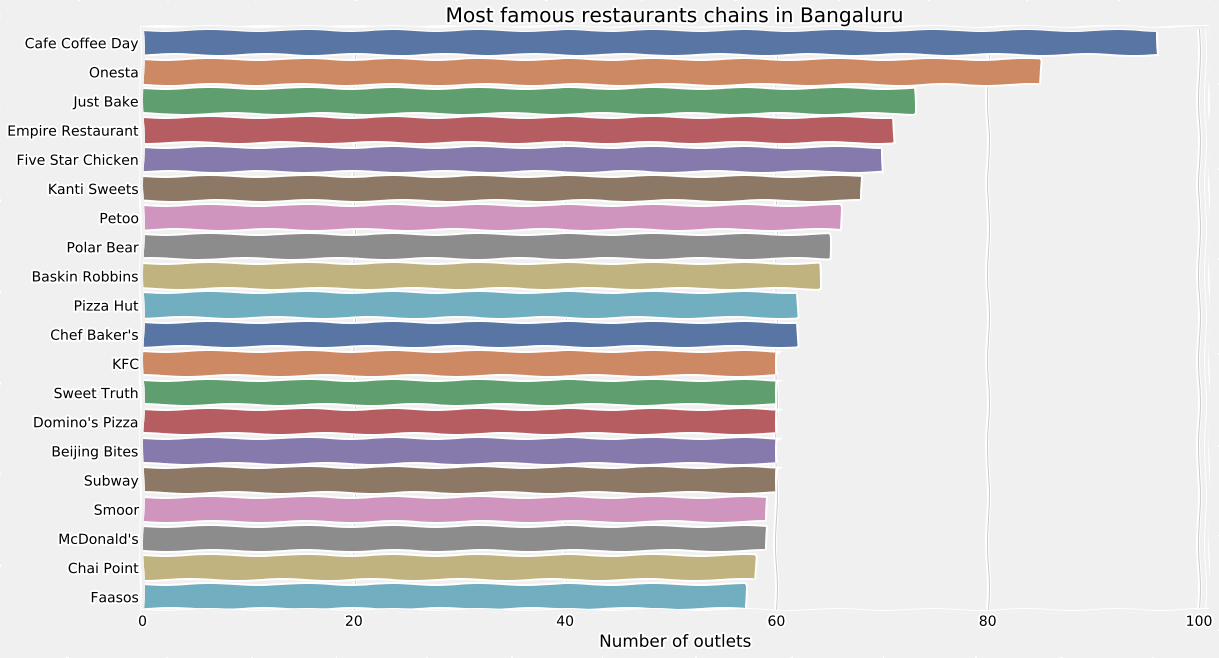

In [0]:
# Top Restraunt In Bangalore
plt.figure(figsize=(17,10))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")



*  **Insight** -As you can see Cafe coffee day,Onesta,Just Bake has the most number of outlets in and around bangalore.





**Restaurants delivering Online or not**



Text(0.5, 1.0, 'Restaurants delivering online or Not')

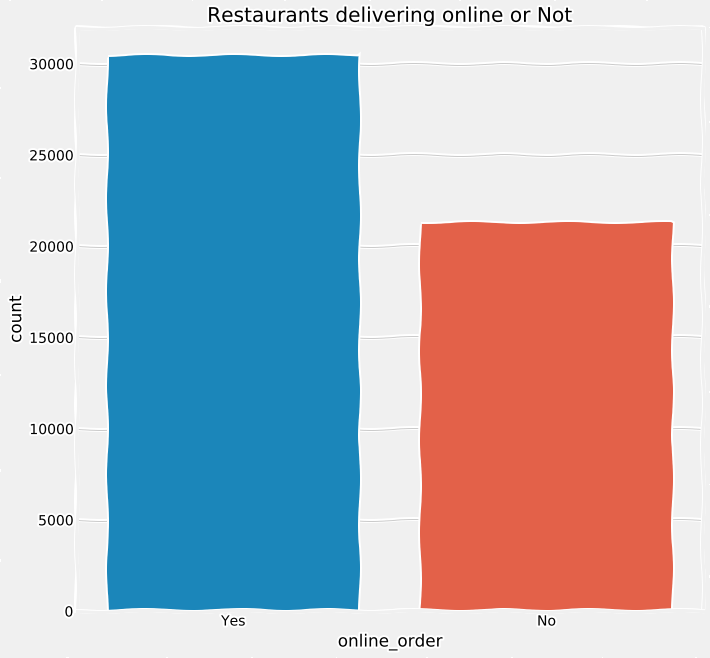

In [0]:
#Restaurants delivering Online or not
sns.countplot(df['online_order'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')




*   **Insight** - We see most of the restraunt provide the option of delivering Online




**Ratio between restaurants that provide table booking**


In [0]:
x=df['book_table'].value_counts()
colors = ['#ff8370', '#4f3fff']

trace=go.Pie(labels=x.index,values=x,textinfo="value",
            marker=dict(colors=colors, 
                           line=dict(color='#001000', width=2)))
layout=go.Layout(title="Table booking",width=600,height=600)
fig=go.Figure(data=[trace],layout=layout)
py.iplot(fig, filename='pie_chart_subplots')


*   **Insight** - Almost 90 percent of restaurants in Banglore do not provide table booking facility.




**Rating distribution**

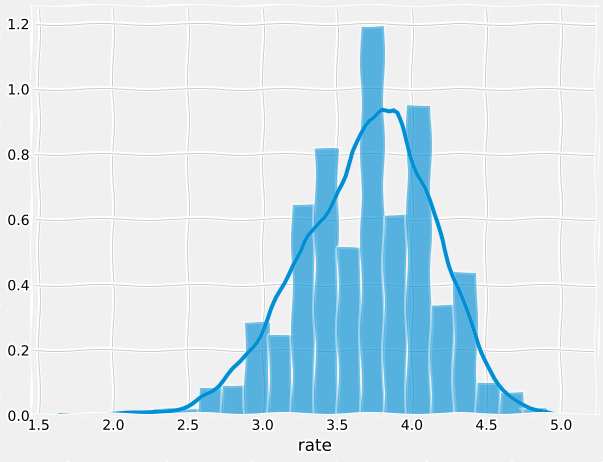

In [0]:
#How ratings are distributed
plt.figure(figsize=(9,7))
rating=df['rate'].dropna().apply(lambda x : float(x.split('/')[0]) if (len(x)>3)  else np.nan ).dropna()
sns.distplot(rating,bins=20)



*  **Insight** - Almost more than 50 percent of restaurants has rating between 3 and 4.




**Type of Services**

Text(0.5, 1.0, 'Type of Service')

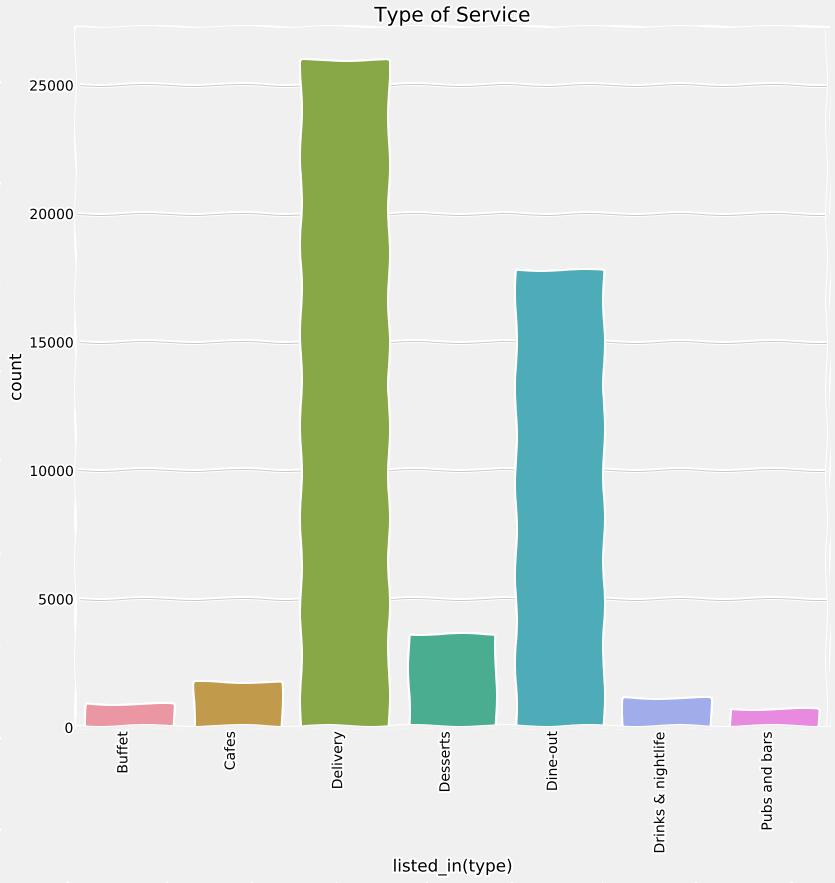

In [0]:
#Types of Services
sns.countplot(df['listed_in(type)'])
sns.countplot(df['listed_in(type)']).set_xticklabels(sns.countplot(df['listed_in(type)']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.title('Type of Service')



*  **Insight** - Delivery and Dine-out are the two most outgoing Delivery Types




**Common Restaurant Types**

Text(0.5, 0, 'count')

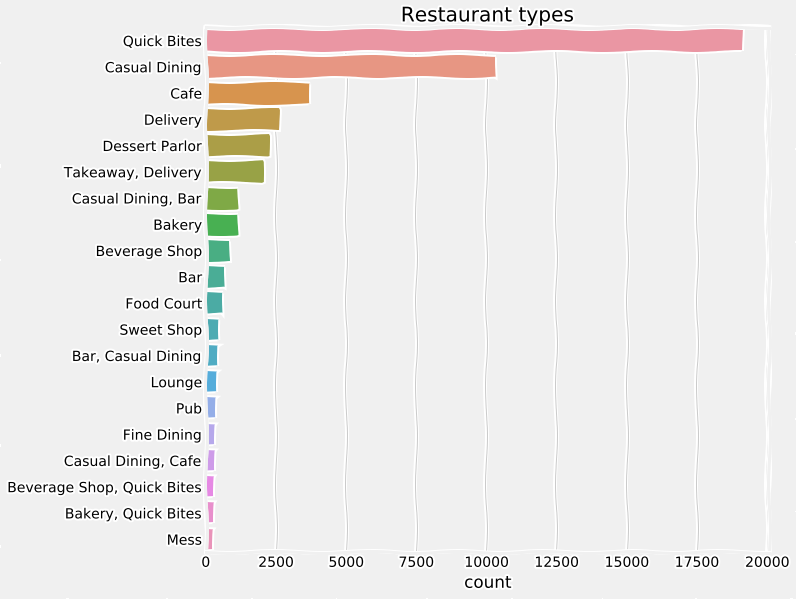

In [0]:
# most common restraunt types
plt.figure(figsize=(9,9))
rest=df['rest_type'].value_counts()[:20]
sns.barplot(rest,rest.index)
plt.title("Restaurant types")
plt.xlabel("count")



*   **Insight** -We can observe tha Quick Bites type restaurants dominates



**Most Foodie Areas**

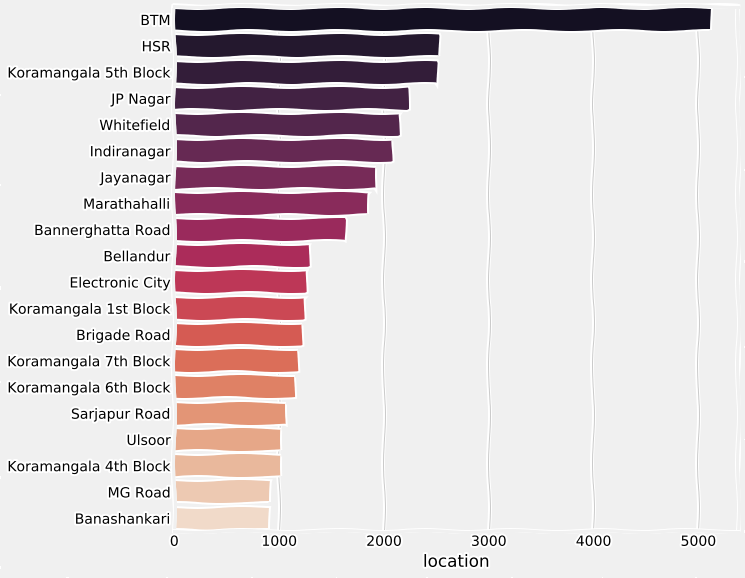

In [0]:
#The highest number of restraunts in a Locality
plt.figure(figsize=(9,9))
Rest_locations=df['location'].value_counts()[:20]
sns.barplot(Rest_locations,Rest_locations.index,palette="rocket")

**Insight** -

*   We can see that BTM,HSR and Koranmangala 5th block has the most number of restaurants.

*   BTM dominates the section by having more than 5000 restaurants.


**Most Popular Cuisines In Bangalore**

Text(0.5, 1.0, 'Most popular cuisines of Bangalore')

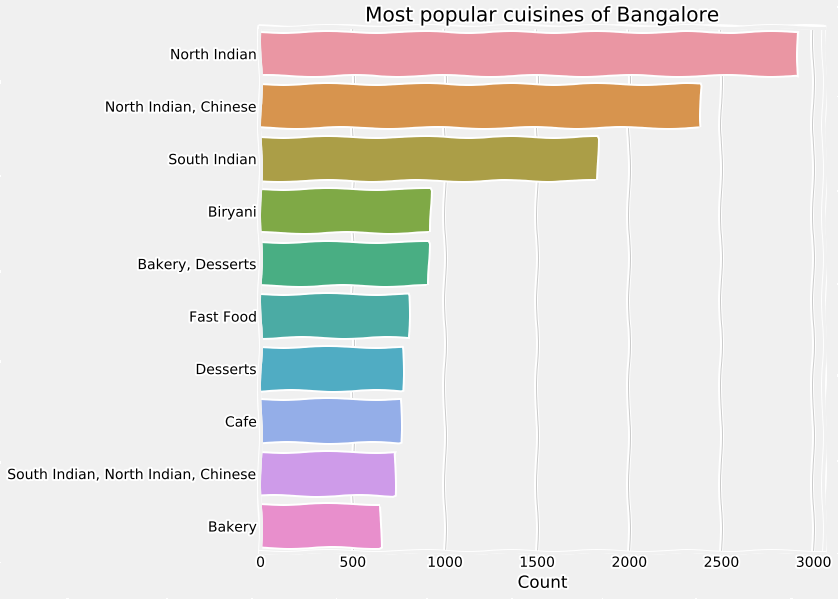

In [0]:
#popular cuisines
plt.figure(figsize=(9,9))
cuisines=df['cuisines'].value_counts()[:10]
sns.barplot(cuisines,cuisines.index)
plt.xlabel('Count')
plt.title("Most popular cuisines of Bangalore")



* **Insight** - We can observe that North Indian,chinese,South Indian and Biriyani are most common.




**Rating Distribution**

**Transformation/Alteration**
*   we need to alter the column "Rate" to remove  /5  and just to display the numerator.




In [0]:
#Removing '/5' from Rates
df['rate'].unique()
df = df.loc[df.rate !='NEW']
df = df.loc[df.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
df.rate = df.rate.apply(remove_slash).str.strip().astype('float')
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

Text(0, 0.5, 'count')

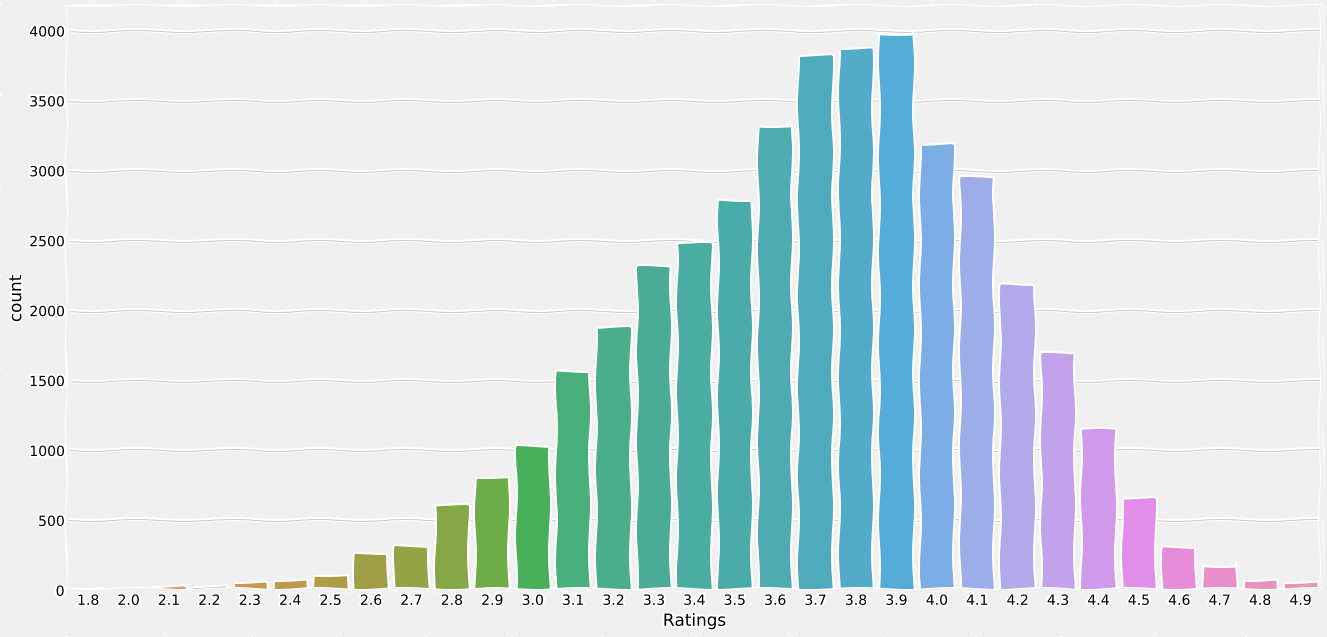

In [0]:
plt.figure(figsize=(20,10))
rating=df['rate'].value_counts()
sns.barplot(x=rating.index,y=rating)
plt.xlabel("Ratings")
plt.ylabel('count')

##**Data Transformations**

**Checking for Null values in the DataFrame**






In [0]:
# check for null values
((df.isna().sum()/df.shape[0])*100).round(2)


name                            0.00
online_order                    0.00
book_table                      0.00
rate                           15.73
votes                           0.00
location                        0.04
rest_type                       0.46
dish_liked                     52.48
cuisines                        0.09
approx_cost(for two people)     0.69
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
listed_in(city)                 0.00
dtype: float64

**Before removing null values**





*     let's check for rate column as it contains 15% of its points as null value






In [0]:
# check for unique values in the rate column
df.rate.unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, nan, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

**Deleting Null values**

*   We are intersted in this analysis for the rate and average_cost relationship , so we'll drop null values in these two columns
*   But first let's have a look on the review list column




**Adjust review list column**


*   This column appears as string instaed of list of tuples
*   extract the review text only from each tuple in each list and clear it

*   make a new column reviews_text






In [0]:
# if we check for each value type
type(df.reviews_list[0])

str

In [0]:
# return to a list of tuples
df.reviews_list = df.reviews_list.apply(lambda x: ast.literal_eval(x))

In [0]:
# check for our work now
type(df.reviews_list[0])

list

In [0]:
# check for the first input
df.reviews_list[0][0]

('Rated 4.0',
 'RATED\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.')



1.   As we can see that each element in our review_list is a tuple the first item is that tuple is the rate inputed by the user whle writting his/her review.
2.   We can make use of this to down the number of missed values in that column.

 3.We are going to extract the rate for the first input restaurant in our data from the review column







In [0]:
# extract the rate for the first input from the review column
x = [float(i[0].replace('Rated','').strip()) for i in df.reviews_list[0]]
round((sum(x)/len(x)),1)

4.1

In [0]:
# first rate column 
df.rate[0]

4.1



*   even if we notice a little difference it will be more valuable than just throw columns

*   let's make our function




In [0]:
def get_rate(x):
    '''
    extract the rate value out of a string inside tuple
    '''
    # ensure that x is not Null and there is more than one rate
    if not x or len(x) <= 1:
        return None
    rate = [float(i[0].replace('Rated','').strip())  for i in x if type(i[0])== str]
    return round((sum(rate)/len(rate)),1)



*   Now, let's make a new column for the rate extracted fom review, we will call it review_rate




In [0]:
# create new column
df['review_rate']  = df.reviews_list.apply(lambda x : get_rate(x))

In [0]:
# compare
df.loc[:,['review_rate','rate']].sample(10,random_state=1)

,review_rate,rate
35234,3.9,3.7
677,3.6,3.7
11645,2.5,NaN
22879,3.5,3.6
21843,4.4,4.4
27542,2.5,3.3
25336,4.5,3.9
43602,3.3,3.8
46884,2.5,NaN
40286,3.5,3.8




*   Now, to replace the missing values in rate column with those from review_column




In [0]:
# get the before number of null values
df.rate.isna().sum()

7775

In [0]:
# apply the changes
nan_index = df.query('rate != rate & review_rate == review_rate').index
for i in nan_index:
    df.loc[i,'rate'] = df.loc[i,'review_rate'] 

In [0]:
# update the number of null values now
df.rate.isna().sum()

6917



*   We save around 850 records




In [0]:
# check now
((df.isna().sum()/df.shape[0])*100).round(2)

name                            0.00
online_order                    0.00
book_table                      0.00
rate                           13.99
votes                           0.00
location                        0.04
rest_type                       0.46
dish_liked                     52.48
cuisines                        0.09
approx_cost(for two people)     0.69
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
listed_in(city)                 0.00
review_rate                    29.32
dtype: float64



*   We see that we have reduced the na percentage of "rate" column


*   We now delete the "review_rate" column







In [0]:
# first let's drop the review_rate column now
df.drop(columns='review_rate',axis=1,inplace=True)

In [0]:
# drop null values
df.dropna(subset=['rate'],inplace=True)

In [0]:
# check for percentage of null values 
((df.isna().sum()/df.shape[0])*100).round(2)

name                            0.00
online_order                    0.00
book_table                      0.00
rate                            0.00
votes                           0.00
location                        0.00
rest_type                       0.35
dish_liked                     44.76
cuisines                        0.03
approx_cost(for two people)     0.65
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
listed_in(city)                 0.00
dtype: float64


**We now see that we have almost cut down all the null values of the DataFrame saving the records as much as possible**

**Analysis of Restaurants based on their Ratings**

In [0]:
print("All unique restaurants ratings:")
df.rate.unique()

All unique restaurants ratings:


array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 1. , 2.6, 3.4, 5. , 4.5, 2.5, 2.7, 2. , 4.7,
       1.8, 2.4, 2.2, 2.3, 4.8, 4.9, 2.1, 1.5, 1.3, 1.4, 1.2, 1.7])

In [0]:
#no. of restaurants between 1.5 and 2 rating
print("no. of restaurants between 1.5 and 2 rating:")
((df.rate>=1.5) & (df.rate<2)).sum()

no. of restaurants between 1.5 and 2 rating:


38

In [0]:
#no. of restaurants between 2.5 and 3 rating
print("no. of restaurants between 2.5 and 3 rating:")
((df.rate>=2.5) & (df.rate<3)).sum()

no. of restaurants between 2.5 and 3 rating:


2162

In [0]:
#no. of restaurants between 2 and 2.5 rating
print("no. of restaurants between 2 and 2.5 rating:")
((df.rate>=2) & (df.rate<2.5)).sum()

no. of restaurants between 2 and 2.5 rating:


289

In [0]:
#no. of restaurants between 3.0 and 3.5 rating
print("no. of restaurants between 3.0 and 3.5 rating:")
((df.rate>=3.0) & (df.rate<3.5)).sum()

no. of restaurants between 3.0 and 3.5 rating:


9417

In [0]:
#no. of restaurants between 3.5 and 4 rating
print("no. of restaurants between 3.5 and 4 rating:")
((df.rate>=3.5) & (df.rate<4)).sum()

no. of restaurants between 3.5 and 4 rating:


17868

In [0]:
#no. of restaurants between 4 and 4.5 rating
print("no. of restaurants between 4 and 4.5 rating:")
((df.rate>=4) & (df.rate<4.5)).sum()

no. of restaurants between 4 and 4.5 rating:


11260

In [0]:
#no. of restaurants between 4.5 and 5 rating
print("no. of restaurants between 4.5 and 5 rating:")
((df.rate>=4.5) & (df.rate<5)).sum()

no. of restaurants between 4.5 and 5 rating:


1307

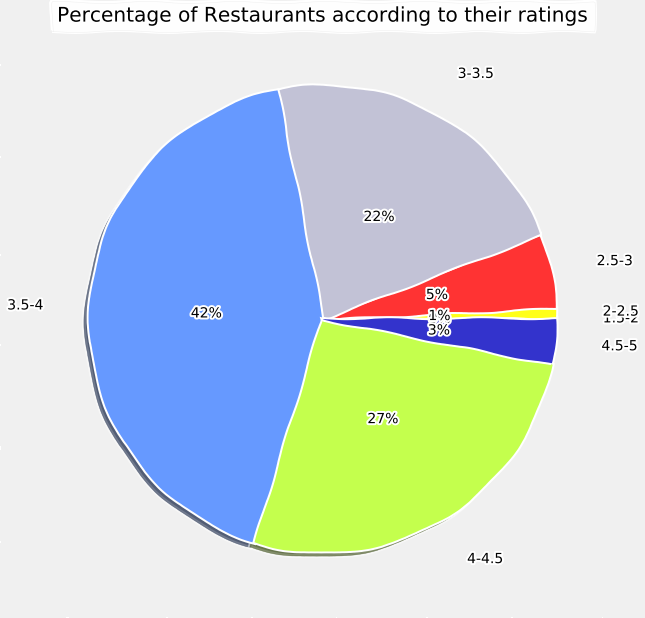

In [0]:
slices=[((df.rate>=1.5) & (df.rate<2)).sum(),
        ((df.rate>=2) & (df.rate<2.5)).sum(),
        ((df.rate>=2.5) & (df.rate<3)).sum(),
        ((df.rate>=3.0) & (df.rate<3.5)).sum(),
        ((df.rate>=3.5) & (df.rate<4)).sum(),
        ((df.rate>=4) & (df.rate<4.5)).sum(),
        ((df.rate>=4.5) & (df.rate<5)).sum()
       ]
labels=['1.5-2','2-2.5','2.5-3','3-3.5','3.5-4','4-4.5','4.5-5']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their ratings", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

**MOST LIKED DISHES IN BANGALORE**

In [0]:
import re
df=df[df['dish_liked'].notnull()]
df.index=range(df.shape[0])
likes=[]
for i in range(df.shape[0]):
    splited_array=re.split(',',df['dish_liked'][i])
    for item in splited_array:
        likes.append(item)

In [0]:
print("Count of Most liked dishes of Bangalore")
favourite_food = pd.Series(likes).value_counts()
favourite_food.head(20)

Count of Most liked dishes of Bangalore


 Pasta              2727
 Pizza              1956
 Cocktails          1909
 Burgers            1762
 Mocktails          1631
 Biryani            1318
 Sandwiches         1296
Burgers             1257
 Nachos             1192
 Coffee             1186
 Fish               1135
 Paratha            1126
 Salads             1059
 Chicken Biryani    1010
 Noodles             893
Cocktails            891
 Fries               889
 Beer                845
 Mutton Biryani      840
 Tea                 820
dtype: int64

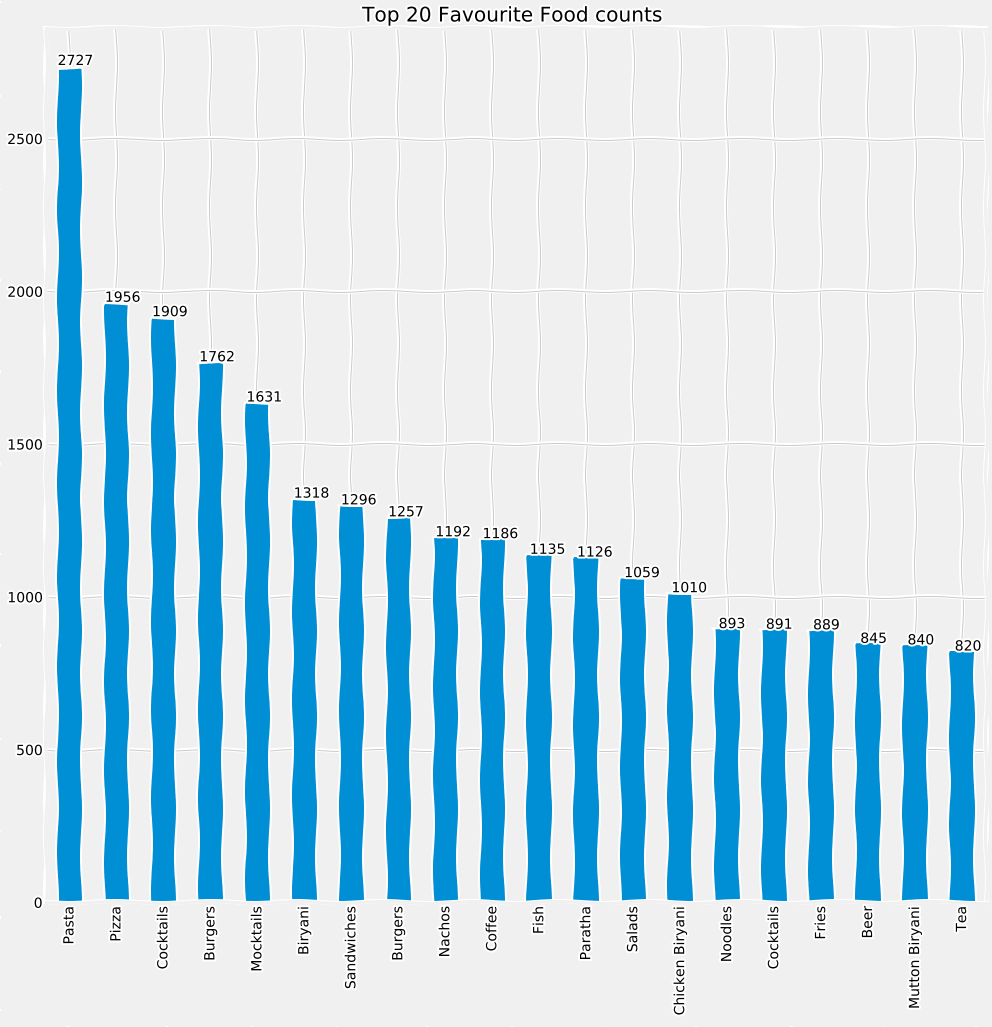

In [0]:
ax = favourite_food.nlargest(n=20, keep='first').plot('bar',figsize=(15,15),title = 'Top 20 Favourite Food counts ')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [0]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[(Rated 4.0, RATED\n A beautiful place to din...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[(Rated 4.0, RATED\n Had been here for dinner...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[(Rated 3.0, RATED\n Ambience is not that goo...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[(Rated 4.0, RATED\n Great food and proper Ka...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[(Rated 4.0, RATED\n Very good restaurant in ...",[],Buffet,Banashankari


In [0]:
# clear the text
def clear_text(t):
    '''
    clear the input text t
    '''
    return ' '.join([i[1].replace("RATED\n  ",'') for i in t]).encode('utf8').decode('ascii',errors='replace').\
           replace('?','').replace('�','').replace('\n','').replace('.',' ').strip().lower()

In [0]:
# make a new column reviews_text
df['reviews_text'] = df.reviews_list.apply(lambda x: clear_text(x))

In [0]:
# check part of reviews text for the first restaurant
df.reviews_text[0][:500]

'a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrange'

In [0]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),reviews_text
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[(Rated 4.0, RATED\n A beautiful place to din...",[],Buffet,Banashankari,a beautiful place to dine in the interiors tak...
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[(Rated 4.0, RATED\n Had been here for dinner...",[],Buffet,Banashankari,had been here for dinner with family turned o...
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[(Rated 3.0, RATED\n Ambience is not that goo...",[],Buffet,Banashankari,ambience is not that good enough and it's not ...
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[(Rated 4.0, RATED\n Great food and proper Ka...",[],Buffet,Banashankari,great food and proper karnataka style full mea...
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[(Rated 4.0, RATED\n Very good restaurant in ...",[],Buffet,Banashankari,very good restaurant in neighbourhood buffet ...


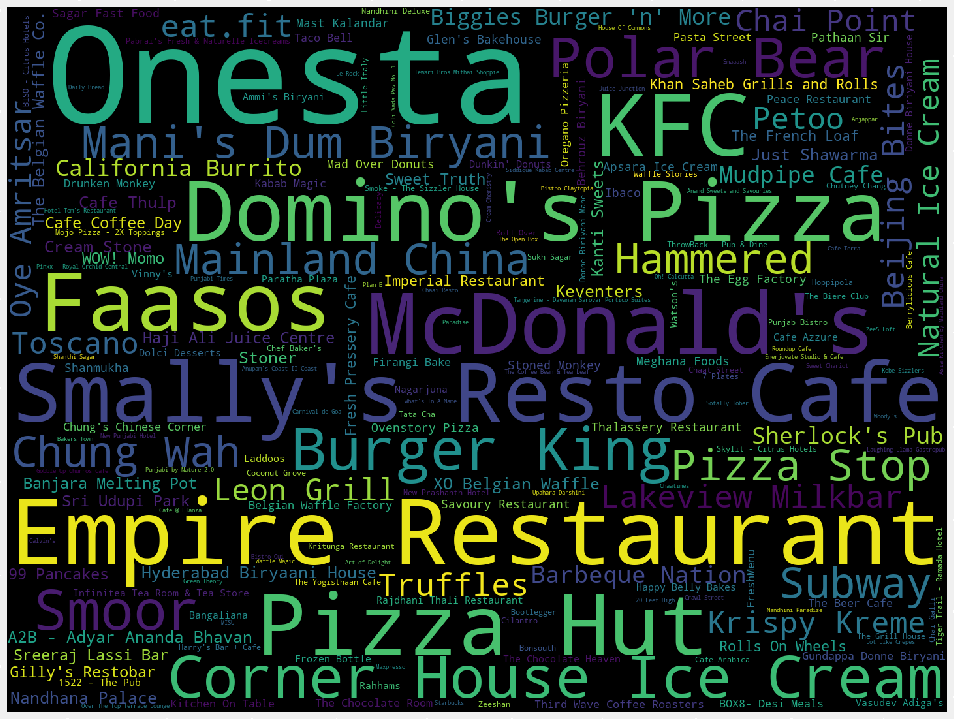

In [0]:
from wordcloud import WordCloud
wordcloud = (WordCloud(width=1440, height=1080).generate_from_frequencies(df.name.value_counts()))


fig = plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off');

**Customer mind**

In [0]:
text = ' '.join(df.reviews_text)

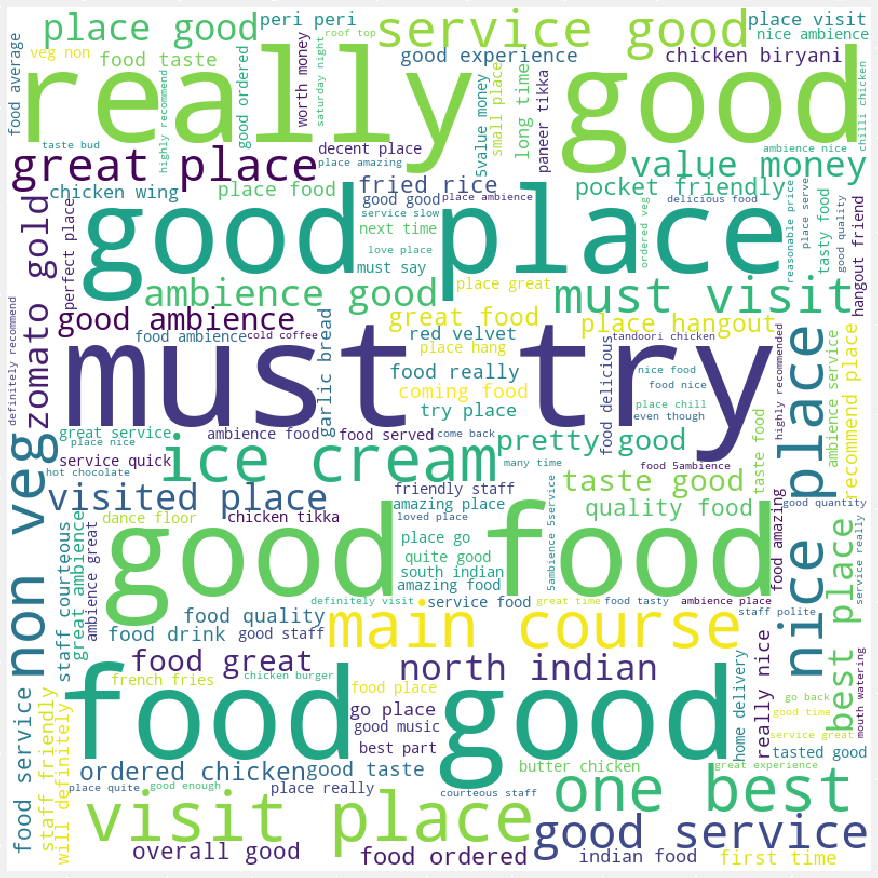

In [0]:
from wordcloud import WordCloud, STOPWORDS 
 
comment_words = ' '
stopwords = set(STOPWORDS) 

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

In [0]:
df.head()


,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),reviews_text
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[(Rated 4.0, RATED\n A beautiful place to din...",[],Buffet,Banashankari,a beautiful place to dine in the interiors tak...
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[(Rated 4.0, RATED\n Had been here for dinner...",[],Buffet,Banashankari,had been here for dinner with family turned o...
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[(Rated 3.0, RATED\n Ambience is not that goo...",[],Buffet,Banashankari,ambience is not that good enough and it's not ...
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[(Rated 4.0, RATED\n Great food and proper Ka...",[],Buffet,Banashankari,great food and proper karnataka style full mea...
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[(Rated 4.0, RATED\n Very good restaurant in ...",[],Buffet,Banashankari,very good restaurant in neighbourhood buffet ...


In [0]:
df=df.drop(['dish_liked'],axis=1)
df.columns


Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)', 'reviews_list',
       'menu_item', 'listed_in(type)', 'listed_in(city)', 'reviews_text'],
      dtype='object')

In [0]:
df.rename({'approx_cost(for two people)': 'approx_cost_for_2_people',
               'listed_in(type)':'listed_in_type',
               'listed_in(city)':'listed_in_city'
              }, axis=1, inplace=True)
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost_for_2_people', 'reviews_list',
       'menu_item', 'listed_in_type', 'listed_in_city', 'reviews_text'],
      dtype='object')

In [0]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost_for_2_people,reviews_list,menu_item,listed_in_type,listed_in_city,reviews_text
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[(Rated 4.0, RATED\n A beautiful place to din...",[],Buffet,Banashankari,a beautiful place to dine in the interiors tak...
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[(Rated 4.0, RATED\n Had been here for dinner...",[],Buffet,Banashankari,had been here for dinner with family turned o...
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[(Rated 3.0, RATED\n Ambience is not that goo...",[],Buffet,Banashankari,ambience is not that good enough and it's not ...
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[(Rated 4.0, RATED\n Great food and proper Ka...",[],Buffet,Banashankari,great food and proper karnataka style full mea...
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[(Rated 4.0, RATED\n Very good restaurant in ...",[],Buffet,Banashankari,very good restaurant in neighbourhood buffet ...


Converting "votes" and "approx_cost_for_2_people" into numeric(int)

In [0]:
remove_comma = lambda x: int(x.replace(',', '')) if type(x) == np.str and x != np.nan else x 
df.votes = df.votes.astype('int')
df['approx_cost_for_2_people'] = df['approx_cost_for_2_people'].apply(remove_comma)

Confirming the data-types of "votes" and "approx_cost_for_2_people"

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23488 entries, 0 to 23487
Data columns (total 14 columns):
name                        23488 non-null object
online_order                23488 non-null object
book_table                  23488 non-null object
rate                        23488 non-null float64
votes                       23488 non-null int64
location                    23488 non-null object
rest_type                   23418 non-null object
cuisines                    23488 non-null object
approx_cost_for_2_people    23352 non-null float64
reviews_list                23488 non-null object
menu_item                   23488 non-null object
listed_in_type              23488 non-null object
listed_in_city              23488 non-null object
reviews_text                23488 non-null object
dtypes: float64(2), int64(1), object(11)
memory usage: 2.5+ MB


In [0]:
df['rate'] = df['rate'].fillna(df['rate'].mean())
df['approx_cost_for_2_people'] = df['approx_cost_for_2_people'].fillna(df['approx_cost_for_2_people'].mean())

In [0]:
df.isna().sum()


name                         0
online_order                 0
book_table                   0
rate                         0
votes                        0
location                     0
rest_type                   70
cuisines                     0
approx_cost_for_2_people     0
reviews_list                 0
menu_item                    0
listed_in_type               0
listed_in_city               0
reviews_text                 0
dtype: int64

In [0]:
df=df.dropna(subset=['rest_type'])

In [0]:
df.isna().sum()

name                        0
online_order                0
book_table                  0
rate                        0
votes                       0
location                    0
rest_type                   0
cuisines                    0
approx_cost_for_2_people    0
reviews_list                0
menu_item                   0
listed_in_type              0
listed_in_city              0
reviews_text                0
dtype: int64

Applying models to predict the Rates of the various Restraunts

**Data PreProcessing**
 Converting the categorical data to numerical data

     1. Assiging the values inplace of categorical data(Manually)
     2. LabelEncoder used for converting categorical data to numerical data(Automatic)

In [0]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()

In [0]:
df.online_order.value_counts()

Yes    16403
No      7015
Name: online_order, dtype: int64

In [0]:
df.online_order[df.online_order == 'Yes'] = 1 
df.online_order[df.online_order == 'No'] = 0

In [0]:
df.online_order = pd.to_numeric(df.online_order)

In [0]:
df.online_order.value_counts()

1    16403
0     7015
Name: online_order, dtype: int64

In [0]:
df.book_table	.value_counts()

No     17343
Yes     6075
Name: book_table, dtype: int64

In [0]:
df.book_table[df.book_table == 'Yes'] = 1 
df.book_table[df.book_table == 'No'] = 0

In [0]:
df.book_table = pd.to_numeric(df.book_table)

In [0]:
df.book_table.value_counts()

0    17343
1     6075
Name: book_table, dtype: int64

In [0]:
df.approx_cost_for_2_people = pd.to_numeric(df.approx_cost_for_2_people)

In [0]:
df.location = labelEncoder.fit_transform(df.location)
labelEncoder.classes_

array(['BTM', 'Banashankari', 'Banaswadi', 'Bannerghatta Road',
       'Basavanagudi', 'Basaveshwara Nagar', 'Bellandur', 'Bommanahalli',
       'Brigade Road', 'Brookefield', 'CV Raman Nagar',
       'Central Bangalore', 'Church Street', 'City Market',
       'Commercial Street', 'Cunningham Road', 'Domlur', 'East Bangalore',
       'Ejipura', 'Electronic City', 'Frazer Town', 'HBR Layout', 'HSR',
       'Hennur', 'Hosur Road', 'ITPL Main Road, Whitefield',
       'Indiranagar', 'Infantry Road', 'JP Nagar', 'Jalahalli',
       'Jayanagar', 'Jeevan Bhima Nagar', 'KR Puram', 'Kaggadasapura',
       'Kalyan Nagar', 'Kammanahalli', 'Kanakapura Road', 'Koramangala',
       'Koramangala 1st Block', 'Koramangala 2nd Block',
       'Koramangala 3rd Block', 'Koramangala 4th Block',
       'Koramangala 5th Block', 'Koramangala 6th Block',
       'Koramangala 7th Block', 'Koramangala 8th Block',
       'Kumaraswamy Layout', 'Langford Town', 'Lavelle Road', 'MG Road',
       'Magadi Road', 'Majes

In [0]:
df.rest_type = labelEncoder.fit_transform(df.rest_type)
labelEncoder.classes_

array(['Bakery', 'Bakery, Cafe', 'Bakery, Dessert Parlor',
       'Bakery, Quick Bites', 'Bar', 'Bar, Casual Dining', 'Bar, Lounge',
       'Bar, Pub', 'Bar, Quick Bites', 'Beverage Shop',
       'Beverage Shop, Cafe', 'Beverage Shop, Dessert Parlor',
       'Beverage Shop, Quick Bites', 'Cafe', 'Cafe, Bakery', 'Cafe, Bar',
       'Cafe, Casual Dining', 'Cafe, Dessert Parlor', 'Cafe, Lounge',
       'Cafe, Quick Bites', 'Casual Dining', 'Casual Dining, Bar',
       'Casual Dining, Cafe', 'Casual Dining, Irani Cafee',
       'Casual Dining, Lounge', 'Casual Dining, Microbrewery',
       'Casual Dining, Pub', 'Club', 'Club, Casual Dining', 'Delivery',
       'Dessert Parlor', 'Dessert Parlor, Bakery',
       'Dessert Parlor, Beverage Shop', 'Dessert Parlor, Cafe',
       'Dessert Parlor, Kiosk', 'Dessert Parlor, Quick Bites', 'Dhaba',
       'Fine Dining', 'Fine Dining, Bar', 'Fine Dining, Lounge',
       'Fine Dining, Microbrewery', 'Food Court',
       'Food Court, Casual Dining', 'Foo

In [0]:
df.cuisines = labelEncoder.fit_transform(df.cuisines)
labelEncoder.classes_

array(['African, Burger',
       'African, Burger, Desserts, Beverages, Fast Food', 'American', ...,
       'Vietnamese', 'Vietnamese, Salad',
       'Vietnamese, Thai, Burmese, Japanese'], dtype=object)

In [0]:
df.menu_item = labelEncoder.fit_transform(df.menu_item)
labelEncoder.classes_

array(['["Baker\'s Basket", \'The Continental Breakfast\', \'The Indian Breakfast\', \'Baked Beans on Toast\', "Baker\'s Basket", \'Cornflakes Cereals\', \'Wheatflakes Cereals\', \'Fruit Loops Cereals\', \'Choco Flakes Cereals\', \'Muesli Cereals\', \'Poori Bhaji\', \'Eggs Cooked to Order\', \'Egg White Omelette\', \'Idly\', \'Masala Dosa\', \'Plain Dosa\', \'Orange Juice [300 ml]\', \'Watermelon Juice [300 ml]\', \'Muskmelon Juice [300 ml]\', \'Pineapple Juice [300 ml]\', \'Sweet Lime Juice [300 ml]\', \'Plain Lassi\', \'Sweet Lassi\', \'Salted Lassi\', \'Masala Lassi\', \'Raisin Pancake\', \'Banana Pancake\']',
       '["Chef\'S Special Chicken Thali", \'Fruit Pop Oatmeal Bowl\', \'Paneer Tikka Super Sub\', \'Lucknowi Veg Biryani\', \'Lucknowi Chicken Biryani\', \'Chicken Keema Parantha Wrap\', \'Tofu Keema Parantha Wrap\', \'Dal Makhani & Lachha Paranthas Meal\', "Chef\'S Special Veg Thali", \'Masala Egg Curry & Vegetable Pulao\', "Chef\'S Special Chicken Thali", \'Fruit Pop Oatmeal

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23418 entries, 0 to 23487
Data columns (total 14 columns):
name                        23418 non-null object
online_order                23418 non-null int64
book_table                  23418 non-null int64
rate                        23418 non-null float64
votes                       23418 non-null int64
location                    23418 non-null int64
rest_type                   23418 non-null int64
cuisines                    23418 non-null int64
approx_cost_for_2_people    23418 non-null float64
reviews_list                23418 non-null object
menu_item                   23418 non-null int64
listed_in_type              23418 non-null object
listed_in_city              23418 non-null object
reviews_text                23418 non-null object
dtypes: float64(2), int64(7), object(5)
memory usage: 2.7+ MB


In [0]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost_for_2_people,reviews_list,menu_item,listed_in_type,listed_in_city,reviews_text
0,Jalsa,1,1,4.1,775,1,20,1391,800.0,"[(Rated 4.0, RATED\n A beautiful place to din...",5053,Buffet,Banashankari,a beautiful place to dine in the interiors tak...
1,Spice Elephant,1,0,4.1,787,1,20,596,800.0,"[(Rated 4.0, RATED\n Had been here for dinner...",5053,Buffet,Banashankari,had been here for dinner with family turned o...
2,San Churro Cafe,1,0,3.8,918,1,16,486,800.0,"[(Rated 3.0, RATED\n Ambience is not that goo...",5053,Buffet,Banashankari,ambience is not that good enough and it's not ...
3,Addhuri Udupi Bhojana,0,0,3.7,88,1,62,1592,300.0,"[(Rated 4.0, RATED\n Great food and proper Ka...",5053,Buffet,Banashankari,great food and proper karnataka style full mea...
4,Grand Village,0,0,3.8,166,4,20,1411,600.0,"[(Rated 4.0, RATED\n Very good restaurant in ...",5053,Buffet,Banashankari,very good restaurant in neighbourhood buffet ...


In [0]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost_for_2_people', 'reviews_list',
       'menu_item', 'listed_in_type', 'listed_in_city', 'reviews_text'],
      dtype='object')

In [0]:
x = df.iloc[:,[1,2,4,5,6,7,8,10]]
y = df['rate']

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)


In [0]:
x_train.head()

,online_order,book_table,votes,location,rest_type,cuisines,approx_cost_for_2_people,menu_item
17409,1,1,300,66,20,918,1000.0,490
13052,0,1,549,42,13,414,900.0,5053
11467,1,0,189,35,62,237,250.0,5053
10523,1,0,212,30,20,924,500.0,5053
21435,1,0,252,52,13,457,400.0,5053


In [0]:
y_train.head()


17409    4.1
13052    4.5
11467    3.8
10523    3.9
21435    3.9
Name: rate, dtype: float64

## Modeling

**Applying linear Regression** 

In [0]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.20942449035901167

 In the above we can see that Linear Regression gives us only 20% accuracy

**Applying DECISION TREE REGRESSION**

In [0]:
from sklearn.tree import DecisionTreeRegressor


In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)


In [0]:
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)


In [0]:
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)

In [0]:
from sklearn.metrics import r2_score


In [0]:
r2_score(y_test,y_predict)

0.8339435337748181

**We see that with our decision tree algorithm we are getting 83% Accuracy**

**Applying RANDOM FOREST REGRESSION**

In [0]:
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=5,random_state=329,min_samples_leaf=.0001)

In [0]:
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)

In [0]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.854204760912105

**With Random Forest Regression we get 85% Accuracy**

## **CONCLUSION**

- **Linear regression Model Accuracy Score - 20%**
- **Decision Tree Model Accuracy Score - 82.9%**
- **Random Forest Model Accuracy Score - 85.**

From the above acuuracy score we can see that Random Forest Model is best model as it gives good accuracy score comparing to other models.

# <center>SUMMARY
## <center>Zomato bangalore Restaurants
#### <right>- Srishti Pramod Avalakki [01095922]


 *Zomato bangalore is a data set such that,it gives us an in detail insight about what are the various restraunts that are located in various areas in bangalore.it also gives us details about the various ratings of the restraunts based on the cusines,cost,location and various other features.
 We start with cleaning the data to reduce or clear the null values and then proceed to transform a few columns with basic calculations.*

*One of the most important aspect before going to any of the restraunts is that we look at the reviews and ratings of the restraunts.Hence we find various aspects in our dataset which are dependent on various features to predict the rate of our dataset*  

*We compare various feature of the data set with our target column and come up with various visual aid to find which all features are highly co-related to our target variable.Based on these co-relation features we then build predictive models to predict the rate of any particular restraunt based on the given set of features.*

## **Why this Dataset?**



*   Popularity of zomato app in India
*   Reliability of the restraunt based on area,cuisine,cost and reviews



## Insights

![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABMMAAAKSCAYAAADf6xxTAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOydd5gUVfaw3+6uruo0gQnkjIAgMLqr%0AAoIEA6AioiiKisIiuMYf6roqggFRdjHnT7KKIIiKGDABuhhZJYlKXAaQIGGY1D2d6/uj5xbdPd09%0APTAIwn2fZ57prqquunXuuafuPXXuuabi4mIdSY3JysoCoKSk5CiX5PhFyvjIkpWVJWV7jCB0HaS+%0AHyvIOvljkHI+usjn7B9PtM6DlP2xhmwTfwxSzscGsh7+WKS8/zjSHeeapDNMIpFIJBKJRCKRSCQS%0AiURyomA+2gWQSCQSiUQikUgkEolEIpFI/iikM0wikUgkEolEIpFIJBKJRHLCoBztAkgkEolEIql9%0ATCYTZnPknZeu64TD4aNcIonkz4vZbMZkMh3RtvRHXCNdou1HKBQ6qmU5XpEylkgkkqOLdIZJJBKJ%0A5ITCYrFgtVpjtgUCgYSDEVVVjcEKQDgcxu/3H/EyHg5WqxVN07BYLDHbw+Ew5eXl6LpMFSqR1ASX%0AyxXTnoLBIG63u1av4XA4YuzS0Wyvqqpit9uN77qu4/F4CAaDtXYNk8mEqqqYTKaE+3VdJxgMHrdO%0AIk3TsNlsxndd13G73cft/UokEsmxiHSGSSQSieSEwWKx4HQ6qwzAVFWlvLw8JhojfnAafY6Kiooj%0AVka73Y7VajUiRAKBQNrXix5glZWVsWHDBgKBAA0aNKBZs2ZYrdZj3pl3omI2m3E4HIbTJRwO4/V6%0ACQQCR7lkfzw2m81wlAiniMfjOSplsVqtWCwWdu7cybZt22jVqhX5+fkoilJrziGz2YzVaqWkpIRf%0Af/2V+vXr07x5c1RVxefz1co1aoKmaQB8//33aJrGqaeeiqZpteoMczqdVRz2iThe24GQ5w8//EBm%0AZibt27dHVdUj+myRSCQSSSzSGSaRSCSSEwZFUTCZTCxcuJAPP/wQgHPOOYcrr7wSTdOMgYgYnO7d%0Au5exY8cCkQH6s88+i6IcuUenxWJBVVX8fj9erxdN09A0jUAgUO1A1Gw2o2kafr+fkSNH8uabbxqO%0Ar7vvvptJkybFRLlJji1ENJ+IDsnIyMBmsx13ToDqEHosnMCqqmKz2bBarUdFFsJxPnv2bO6++25e%0AffVVrrvuuqQRTYdzjRUrVnDOOecwevRonn766Vq9xqGUp1evXjRt2pT169fX+v1aLBZKSkr45z//%0AWWW/pmm0adOGPn360KZNGxwOBxUVFceVI99kMlFWVkbXrl3p1asXS5culfZZIpFI/mCkM0wikUgk%0AJxw//PADkydPBuCzzz7jiiuuwGq1Gs4wVVUBmDVrlnFcZmYmzz77bNJBoRjIpJPrx2QyGeeJPl6c%0AY9asWYwYMYKnn36a0aNHpzVIEtFkr7/+Oq+99hp9+/ZlxIgROJ1OWrZsCWBMuUp2/XQwm83oup5w%0A+tahyCDZuQ6Xw7nHZOeqjfuOzuMWfS6xvU+fPnzzzTeUlpaSkZFRbZnSve7hkOpaye4n3XMmO9+H%0AH37IpZdeyrhx4xg/fnzKNnCoZTic80Tnezqcej9UUrXD+HIeaT2piRyi8Xg8hn1NxqhRo3j55ZcN%0Ax3D8/R6qHanJ7w7lGrVd34fCodaLRCKRnChIZ5hEIpFITliaNGnCli1b+Oqrr+jRo4cRfWK1WtF1%0AnRkzZtC0aVO2bduW8Pcikks4ouBgrhu/3x8TzWUymdA0DavVWmVgHw6HCQaDhhMuHpvNhqZp6LqO%0A1+utEiUm9gMsWrQIgGeffZa2bdvGHKcoSpU8aKK8gUAgJvLGbrcbUXCJHBHhcBifz0coFMJms2Gx%0AWGIG3X6/v8oUL7PZbMgr+pyhUAi/329EfphMJux2e5UpgyKfjqZpMbIS16pOxoFAAJ/Pl3RwarFY%0AsNlsRiLzRI7PQCCAx+MxZCmiDYUsA4EAfr8/JvdPomPF8aFQCF3Xk0YcCoeYkJHVakVRlCr3J+ow%0AOnomug7jdUfklhPlCQaDeL3eGLknq/dAIIDFYomp8+h9fr/fGIArioLNZjPkKZwK0b8T9RIKhXA4%0AHAnlIOpc13VDr1RVrVIGIVOfz5fWtL5EbVjcS6rfx+fUEjoY7XDWNA1FUapMBwyFQoacop0l3bp1%0AY+/evTG5pKKnziarj/i2drjtQMhh+/btxrXFOUW7i3b2xOu/1+utkQOoYcOGbNq0yThHUVERS5cu%0A5bbbbmPy5MlccMEFDBw40Jg2KuorHf2zWCzY7faU+hcMBhPqS7L8i6KcYqEDj8eDrusx9V1duZJx%0AJNpsdDlE+xG2Prp9inPKqZoSieREQTrDJBKJRHLCcs011zBp0iRmzpxJjx49jMG22WxmxYoV/PTT%0AT4wbN45HHnmkym+jHVDBYJAtW7YQCoVo3rx5zLQuj8dTJVfZ3r172bVrF6qq0rhxY1wuV1JHGMRG%0AdzgcDkpLS419iqIY5QDYv38/ALm5uVXOIwZZxcXF7NixA0VRaN68uTFwFuWNdzYJysvL2b59O/n5%0A+eTl5cU4BHw+H1u3bsVut9OkSRNsNhuKohiJxq1WqzEo1XWdbdu2UVZWRqNGjcjOzsZut6OqKm63%0A25CfwGw2Y7fbKS8vNxxW8XUBsQse7Nu3j507d8bIWNxnWVlZQjlHDyqj2bdvH7t376ZJkyZkZWWR%0AlZVl7PN6vWzduhWTyUTLli1RVRVVVfF6vfh8vpg8buFwmM2bN+N2u8nOzqZRo0bVTrsV9yOm7kbX%0AxbZt2zCZTDRr1gyHw4GiKFitVtxud8I6FLpjMpmqOJ1EuRNRVlbG9u3bqVOnDg0aNDD0LRQKsX37%0AdkpLS8nPzzf2qapqJFx3OBwJnYo7duyguLiYli1bGnny4p0U0cS3AUEgEGDz5s34/X5yc3Np0KAB%0AiqIYuledQ0vcczgcZsuWLbjdburXr09+fn7KNhkIBCgsLMRkMtGqVSvjvkXSe5fLZdSd3+9n69at%0A+Hw+GjZsSE5OjuGEc7vdhuNIVVXy8vKMa0S362hE3Yv6EO1FtI9oW7Nnzx52796Npmk0btwYp9Np%0AOG3Ky8uT3h8QUxaz2Vyl3UFEBwoLC9F1nZNOOslwVNUkGbxwfgscDgdDhw5lz549/OMf/2DOnDkM%0AHDjQuDfRZsLhMNu3b6e4uJicnBwaN25s1ENFRQWBQACHw1HFQWQymdi9ezf79++nWbNmuFwuFEUx%0A2qwog2hvBw4cYOfOndSvX9+wq0IfhW0ym82G7UinXSQikS2IbrPCfgpStVlhq7OysmjYsCFw0JbY%0A7XaCwSC6rldpn6qqGi86JBKJ5HhHTk6XSCQSyQlLw4YN6du3L/PmzaO8vNx4Sw4wc+ZMAK6//voq%0AvxO5vLxeL+PHj6d58+a0adOGdu3a0aBBA+6880727dtnOIDEIOb999+noKCAunXrUlBQQLt27cjI%0AyKCgoIDffvsNgCuvvJLbbrsNgDFjxpCbm2v8rVu3LmZ6FmAMwJ5++mlyc3NZtmwZAK1btzZ+J5xn%0A//rXv2jbti116tShQ4cOnHzyydSvX5+RI0eyd+9erFarERkFMGLECHJzc1mzZg233XYbeXl5tG/f%0Anvz8fAYOHEhZWRnhcJgJEyZQt25d2rZtS9OmTTnvvPPYunWr4agT0RkAr7/+On/9619p1qwZHTp0%0AoG7dulx11VWsXbvWGOyKe+rduze5ubmEw+EqkQ9vvPEGubm5xjQrUe6PPvqI0047jfz8/BgZd+rU%0Aia1bt2I2m5NGT4hr5Obm0r17d9avX0+PHj3Iz8+nY8eOTJkyxTj2t99+4/bbb6d+/fqcfPLJtG3b%0AlmbNmvHII4/g9/ux2Ww4HA5sNhs+n48777yTevXq0bp1a0499VSaN29OVlaWUde7d+8mNzeX77//%0AHoBmzZoZ9denTx/julOmTKGgoICMjAxOOeUU2rdvT926dbn66qspLCxEUZSYaKLhw4eTm5vL5s2b%0ADd0R9//111+Tm5vLfffdFyOHfv36kZuby44dOxg6dCg5OTmccsop3HLLLQBs3LiRAQMGkJ2dTYsW%0ALSgoKKBhw4acccYZzJ4923C2iQiZwsJCcnNzGTp0KCtXruT000+ncePGdOjQgQYNGnD//fcTCoWM%0AQfmNN97I0KFDAXj88cdj2sC3334LRBy6119/Pbm5ubRr146CggIaN25Mbm4ukyZNAki4AIZAOMJK%0AS0t56KGHaNmyJa1ataJTp07UrVuX1q1b88knnyT87eTJk2nUqBFt2rShdevWtG/fnvfff9+4bxGR%0A9cUXX9CzZ09cLhdt2rShY8eO5Ofn06dPH5YtW1Zl0YRly5aRm5vL/fffH3O9yy+/nNzcXAoLC7n1%0A1lvJy8vjlFNOoWHDhpx33nls2LDBaGPCubFgwQI6depEvXr1KCgo4OSTTyYjI4NTTz2VXbt2VYle%0AikY45xo1akTnzp1j9r3yyivk5uYya9Yspk+fTqNGjWjdujVt2rTh5JNP5t13363i3EqX6Kg/cX04%0AGKlmNptRFIUdO3Zw+eWXk5OTQ7NmzSgoKKBJkyYUFBQYbVQ4ts1mMyUlJeTm5tK/f3/WrVtHt27d%0AaNCggaF/o0ePNtqscLZbrVb27NnDyJEjqVevHh06dCAvL49+/fqxY8cOGjduzJlnngkcXGQhVbuY%0AM2eOoR/VTXsfNWoUubm5bNiwIabNmkwmli9fTm5ubpVca/379yc3N5dt27Zx/fXXk5OTQ/v27fn7%0A3/8ORPJG5ubmsnz58irnXL9+Pbm5uYwaNcqQs0QikZwIyMgwiUQikZzQDBs2jEWLFvHOO+9w3XXX%0AYbFY8Pl8vPHGG5x99tm0atUq5ngxXSgcDnPppZfy8ccf07ZtW5555hlsNhszZszg6aef5pNPPuH7%0A77/H5XIBsGHDBgYOHEidOnUYO3Ysbdu2JRwOs379et577z2Ki4tp3LgxAwcOxO/3s2DBAnr16sVZ%0AZ51lXFtEJURPQRKfzzjjDO644w6mTZtGYWEhN910kxFBI6IH5s2bR+vWrRkxYgT169dn//79LFy4%0AkKlTp/Ljjz+yfPlyVFU1IhfKy8spKirilltuYdu2bdx33324XC5mz57Ne++9x0033USzZs2YPHky%0AN954I40aNWLhwoUsXryYK6+8ku+++y5mCtqECRMYN24cOTk5PPDAA7Ro0YKPPvqIuXPn8tFHH/HN%0AN9/QoUMH495KSkooKipKWG8+n4+ioiK8Xq+xbfPmzQwYMICsrCzuv/9+Tj75ZHRdZ926dSxcuJAD%0ABw7QrFmzanWiqKiIbdu2cd5555GTk8OECRMwm820adMGgK1bt9K1a1d2797NZZddRt++fQkGg7z2%0A2ms88MAD/PTTT8ydO9dwxowfP56nn36as846iwceeID8/HwOHDjA8uXLWb9+PRBZXe+OO+5g8uTJ%0AbN++nVtuucWIDBJOAYAFCxaQn5/PhAkTaNKkCcXFxXz++efMmTOHr7/+mp9++onMzEwjKkfUYaLp%0AWcFgkKKioiorNZaWllJUVMTgwYMpLCzkH//4B3l5eYYerV+/ntWrVzN8+HA6dOiAoiisW7eOqVOn%0Acs0112AymRgyZIhR/nA4TFFREWvWrOHcc8+lS5cuPPfcc+zbt4+XXnqJxx57jLy8PO644w4ALrjg%0AAsrKypgzZw6dO3fmvPPOM8omZPH3v/+duXPnctFFF3HxxReTlZXFnj17+Prrr1m3bl3K+hXTVsvK%0Ayjj77LNZs2YN7dq141//+hcNGzbkt99+46OPPmLVqlX07ds35rfTp09nxYoVXHvttZxyyimsXLmS%0A6dOnM2jQIH7++Wdat25t1PuyZcsoLi7mH//4ByeddJKxeuCrr77Kl19+yfLlyykoKDCOT1YfZWVl%0AFBUVMWzYMAoLC7nnnnuoU6cO77//PosXL2bAgAH88ssvRv388ssvXHbZZeTl5TFu3DjatGlDOBzm%0A119/5b333qO0tJQGDRoYUZrJKCoqMuyXwOv1UlRUxNSpU/nhhx+49tpr6dixI6tXr2bq1KkMHjzY%0AkGdNV9wUthUiOvPmm28C0L17d+Cgrdu6dSvffPMNV199NZ06dULTNDZt2sTUqVMZNWoUfr8/pv2I%0AqZcbN26kd+/etG/fnmeeeYaSkhImT57Ms88+S2ZmJuPHjzecaD6fjz59+rB69WrOPvtshg0bht/v%0AN6Zt7t27t0p05bp16xK2iylTpnD11VcDxLSLZIg2myiyTuiIiLgViDY7ZMgQtmzZwh133EHdunWN%0AaDO3201RUVHC+giFQhQVFVUbKSiRSCTHG9IZJpFIJJITmgEDBlCnTh1mzpzJddddB8AHH3xAUVER%0Aw4cPT/gbEXnx8ccf06VLF7744gtjgDNq1Ciuuuoq5s2bx3PPPceYMWMAeO211wiHw0yfPp0BAwbE%0AnG/ChAnGwGfIkCFUVFSwYMEC+vTpw+jRo2OOFdNb4r93796d7t27s3jxYgoLC7nrrruqTJVcvHgx%0AderUidk2evRoRo4cybRp0/jqq6/o1atXlYiaXbt2sXbtWiN/1c0330yLFi2YPXs22dnZ/PTTT4aT%0A4rbbbuOMM87g+++/Z/PmzYYzcffu3Tz44IPUqVOHlStX0rRpUyDijHzhhRe47bbbuPvuu42cZ4fC%0A66+/TigUYsqUKVx22WUx+4SM001ovX37dq677jpmzpxZJYJm9OjR7Nq1i5kzZ8ZEDt54443079+f%0At956i7vuusuIqpk+fToNGjTgiy++iJHtTTfdZAxOMzIyGDt2LIsWLWL79u3885//TJhAf9asWVXq%0A8Pbbb+ehhx7i4YcfZuHChVx77bUJp3vWFI/Hw/r166s4RHr06MHmzZurTOu68cYbOe2003juuecY%0AMmRIFT1as2YNzz77LLfffruxbdCgQRQUFPDGG28YzrCBAwcCMGfOHHr06GGs6CooKyvjrbfeonPn%0AzkZEVrQshEyT5WcS5Zo4cSJr1qxh6NChzJw5MyYi5r777qvilILI4hv//e9/adeunbGtSZMmPPTQ%0AQ8yfP5/77rvPkP2tt97K2LFjY8o3atQoLr/8cvr27csrr7zCSy+9lDKCLf6+f/75Z5xOp3GvvXr1%0AYtmyZfz444+cccYZALz66qvous6rr77KBRdcEHOOxx57zGgHh5NYffny5SxfvjzGed2iRQvGjBnD%0AvHnzePDBB9N2hpWUlHDPPfcABx1Xy5YtY+PGjQwZMoSRI0cCEQe4oih06tSJwsLCKlMEb731VgoK%0ACnj22We5+eabq+jnhg0bePDBB3nooYeMbddddx2tW7dm1qxZPPzww0bdvfbaa6xevZqrrrrKiHYE%0AuOGGG+jbty8//fRTlfvo2bNn0nZx6qmnJm0XtUlZWRnr169PufiGRCKRSCLIOFiJRCKRnNDYbDaG%0ADBnC0qVLKSwsBGDGjBk4HA4uv/zypL97++23gchURk3TjATJJpOJhx9+OOaYaOLf6EPEuZYqd5RI%0ASu3xeKr8PhwOp3yj7/V6jaTq8U4Uce0bbrgBiDgBE3HPPfeQkZFBMBgkHA5jt9vp27cvuq4zatQo%0AGjVqRCgUIhQKYTabueSSS4DINDzBe++9Rzgc5oYbbqBp06aEQiEj0fbNN99M3bp1+fzzzykuLk56%0AL+mSSsapEofH88ADD2AymWKS+x84cIAPP/yQv/71r4bzVGA2mw3HzVtvvRWzT9xvPIqipHRKeL1e%0A4w8S1yFEprRC8jo8FO666y5cLpeRqFvIIDMzM6G+tmrVit69e/Pdd9+xd+/eKvtzcnK46aabAIzp%0AcJ06daJDhw78+OOPCetNIJKcA8YqlCLpfjyKohgLDiTCarUSDoeZPXs2ZrOZJ598ErPZjN/vx+Px%0A4PP5CIfDCZP5X3HFFbRr185IXA8RBzZgTFEW9VmnTp2EUxH79OlDkyZNjLpKNl0xnrvuugun00kw%0AGDTa2lVXXRVz7WhStYNEulgTLrvsMjp06JBSDuk6ZMvLy5k0aRKTJk3i8ccfZ9q0aWzYsIGCggKu%0AvPLKmAivYDCYNMdigwYNuPDCC9m4cSObNm2qIlebzcY//vEPAMMONG/enLPOOostW7awc+dO49j3%0A3nsPiEwvFDYgEAigKAp33XVXzHlDoRDhcDjtdpFufR8Kd9xxh2GrD7eOJRKJ5HhHycrKoqSk5GiX%0AQyKRSCSSo8awYcN46aWXeO211xg5ciQff/wx11xzTcq360uWLMFkMtGrVy8AKioq0HUdq9VK27Zt%0AadSoEStWrKC4uJjs7GwuueQSHnvsMa677jreffddLrjgAnr37k3z5s2BgwO9RFEDYnXKZIiV7xIN%0AxPx+vzGYDAQCvPnmm3z22WesXr3aGCyLlcW2b9+e8PydOnUCIo4ZsaJZ/fr1AejYsSOAsZqj3W43%0A9h04cCBGXgDnnnuucbxYldBqtXLOOefw5ptv8tVXX9G/f/+k95qKAQMG8MgjjzB8+HAWLlxoyLhF%0AixbAwZUG06FRo0a0atWKcDhMRUUFVqsVVVX5/PPPCQQCuFwupk2bZjjWxH+RnH/lypXGuS699FJe%0Afvll2rVrx5AhQzjnnHPo0aOHEeEjVnlL5DyIXjlRHLtgwQIWLVrEDz/8YCRsF9dPVoeHQs+ePYGI%0AbofDYcORYjab2bBhA7Nnz+Y///kPO3fuNCKA9uzZA0QS5Ofn58ec74wzzsBqtRoDdbEoQMOGDVm7%0Adi0lJSWGTOIRzjCr1YrL5aJPnz58+umndOjQgSuvvJLevXtz1llnxcgpkdNT5En69ddf2bp1K126%0AdCE/P59QKGSsoieczyaTycj7JxDTln0+H36/H1VVjQTlQt+j6/Gbb77hnXfe4euvv2b//v2Go+z3%0A338nEAgQDofTztHUtWtXoz7MZjNOp7PKtSESWTdp0iSGDBnC/Pnz6devH7179zamCB9uVFh0WVLJ%0AIV2nT/369VmzZo3xXUTAPfDAAwwcOJAnn3ySO++8MyaBfGFhIbNmzeLLL7/kt99+M2zYvn37gEg7%0AaN26dcx1OnbsiMvlMhzTJpMpptzFxcVGhOtXX31l5FjTdZ2KigpDH3r06BFzXrPZbOjaobSL2iRR%0Am61uWqZEIpGcqMhpkhKJRCI54Tn99NNp3749M2fOxGazEQqFGDZsWMrfHDhwAJfLRUZGRowzIhQK%0AoSgK9evXN1bMy87O5owzzuCDDz7gvvvu46233jIihzp27MhDDz3EZZdddkSmz4gBXzAY5Nxzz2XZ%0AsmXUr1+fbt26kZubi91up7S0lBkzZhgDyngyMzMBYu5TON6i9wnEvuhtYoAsHGXCKSUG5WJ7shxh%0A6fCXv/yFDz/8kHvvvZf58+czf/58ADp06MADDzzAFVdcgcPhoKysrNrosOzs7Jh7iF6dD+DLL7/k%0Ayy+/TPr76Gi9J598koyMDKZOncoTTzzBE088gaZpDBgwgEmTJhkO0VSIAe2QIUOYN28eOTk59OjR%0Ag7y8PJxOJ+FwmOeffz5pHR4KQgaijjRNw2w289lnn3HRRRcRDAbp2rUrZ555JtnZ2VgsFj7//HPW%0Arl2bsBxicYp42SfSl2T4fD7sdjtz5szhn//8J2+++Sbjx49n/PjxZGRkMGTIEB599FHy8vLQNK3K%0AqniiHoXTRDg/EjmHEpUnOkqpuvI/88wz3HHHHWiaRo8ePYzFHMxmM7Nnz2bPnj01coYlkl+ia3ft%0A2pWFCxcyZswY5s6dy9y5cwEoKCjg4Ycf5pJLLkm7HRxuWdLBYrHEOIjy8/Np2bIlp59+Os2bN2fs%0A2LHGYgkA3333Heeeey4ej4czzzyT008/nezsbBRFMaaMHo7+6bpOaWkpjRs3xmw2G7oh7J/L5Yqx%0A1WJlyU8//ZT+/fsTDAY566yzYtrFZ599xs8//1yr7TMR8XZLIpFIJMlRZFSYRCKRSE50TCYTw4cP%0A5+677+bRRx+lefPmxhv2ZDidToqLi/H7/TEDIzGwFc/X6EiXCy+8kAsvvJDCwkKWLFnCokWLePfd%0Adxk0aBDvvvuukSupNhHJ6xcsWMCyZcu4/vrrmT59eswA/KeffmLGjBm1fu1ohBzENEgxyBTOCSGv%0A+PxUQIzDQBwfP6gUU5j69etHv3792Lp1K0uXLjUWRxg8eDDz5s3jiiuuQFXVKk6SeOKjWsTgUtzH%0APffcwyOPPJLW7+12O//+97959NFHWb58OUuWLDEcot9//31MPrZEiNUJv/32W+bNm0efPn14//33%0AY6aKHThwgOeffz7pOaKdPclkmOoeRDl0Xefee+9F13VWrlxJQUFBzDHXXHMNa9euTXnew8Hv96Mo%0ACjk5OUydOpUXXniBr7/+miVLljBnzhwmT57M6tWr+eabbxI6w0Q9CnnXNIopXcrKynjwwQdp1KgR%0AK1eurBIN9MknnxiO1dokGAxisVi4+OKLufjii9myZYthaxYsWMDAgQN5//336d+/f1rt4I9ETPk2%0AmUxkZGTQoEED2rRpw9q1a1m9ejXnnHMOAOPGjcPj8bBs2TIjub7g1ltv5ccffzyscphMJurUqWMk%0AnBeRfsLpVVxcXKXtRLeLVatWGdG0gquvvpqff/65RuVI5KBNt80mc4YdyjklEonkeEXmDJNIJBKJ%0AhMgg3mKxUFpayvXXX19ttEaXLl0IhUJ89913mEwmbDYbqqpiNpvZuXMnmzZtolWrVuTl5VX5bfPm%0Azfnb3/7GW2+9ZURtvPHGG8Z+MaAR0VOqqqKqasq8YskQA7nPPvsMiKzCF39vifIN1TZdunSJuZa4%0AH+FI/M9//gNgJJ2Hg44nkX9KyAGo4nARTj9Bs2bNGDZsGHPnzjUixISMDyW5vBhEnn322QB8/PHH%0ARvkT/SWqK0VROOussxg7diyrVq3iwgsvZNu2bTG51eLrXtM0I6JF1OHIkSOr5ExKVoepZJgoCXgy%0ATCYTZrOZAwcOsGLFCrp162Y4wqIjampLl5K1gYyMjBjns81m49xzz+XRRx9l3bp1dOjQwVi8QZQ5%0AGjF98pRTTiEnJ4dvvvkGt4vGAJ0AACAASURBVNttrDAppm46HA4yMjJipkjWhOXLl1NaWsrgwYOr%0AOMJ+//33ale8PFQURYlpBy1atGDEiBHMnz+fWbNmAYfXDo4kYkpf9LQ+4awU08RDoRCLFy+mU6dO%0AVVaZhNqzZb169cLtdvPDDz9gMplwOBxGDrmlS5dWOb6oqIiVK1fSvXt3wxF2qO0iUZsVMqlJm033%0AnEfSeS2RSCTHMtIZJpFIJBIJkeTLX375JZ988gm33XZbtceL1QpffPFFdF1H0zRj4Pziiy8CkVxR%0AYmAq8hHFI1ZbjF65rm7dugD89ttvQGTQarfbcTqdSXMqJUMMyIRDZcuWLTH7vV4vL7/8co3OeShc%0AeumlQGRxArfbjdVqxel0YjKZ+OSTT9i8eTOdO3c2pq0BnHnmmQB8+umnQCTCymKxsG/fPt58880q%0A10hXxocSBSSSZLdq1Yru3buzevVqFi5cmPBYkWNI/C5R9I3JZKJly5Yx5YKqdW+z2QyHTrI6DIVC%0APPfccwnLEi9DTdOwWq14vV6mTZuWxp0fvCc46HTcvn274agS8nznnXdqLWeZkMOOHTuASCSh3W7H%0AbDYnTZyvqipNmjQBSLgSpCAYDKKqKpdffjler5dnnnkGiOhXRkYGDofDiMY7VJLVFcDzzz9/RKex%0A1cTWHEsIZ5hw1r722mvs2LGDrKwsw/Eljtm5c2fMggoQyUsYnXvscBD2avz48UYuR0VRqKio4F//%0A+leV40W72LZtW5V28fbbbxvtOR3EqqDxbdbn8zF16tQa3Ydw4sfbAeFcDoVC/L//9/9qdE6JRCI5%0AXpA5wyQSiURywiOm2HXr1s3YJpJCJ+Oqq67i8ccfZ968eQSDQf7v//4Pm83G9OnTeeWVV8jJyWH0%0A6NHG8SNGjCAQCDBgwAA6dOiApmls2LCBhx56CIDhw4cbx5599tlYrVamTZuGzWajUaNGxspxOTk5%0AmEymtAfTYmB2xRVX8Nxzz3HnnXei6zqnnnoq69atY+LEiSlXo6wt2rRpw7XXXsusWbPo0aMH48aN%0Ao0WLFnz00UdMnDgxZhVOMS3ysssu46mnnmL06NFUVFRQUFDA2rVrefzxx8nKyjLyPgluvPFG3G43%0Al1xyCR07dkTTNDZu3Gic929/+1uMTGqK3+/HZrPx5JNP0rNnT6644gpGjhzJoEGDqFu3Lvv37+eH%0AH35g7ty53HbbbQwdOhSPx0Pbtm0ZOnSokcTc4/GwZMkSJk+eTL169ejXr59xjfPOO493332X4cOH%0Ac8UVV+ByuahXrx6DBg1i0KBB3HPPPUyYMIHs7Gy6du3K9u3beeKJJ/jf//6XsMz9+/dn9OjRTJo0%0ACafTSffu3dm6dStPP/10jVebC4VCZGRkcMEFF/DRRx9x3XXXcdttt2G323nrrbd46qmnaN68ubEq%0A6+Fw+umnk5WVxdy5c8nLy6NZs2ZYLBYGDhzInj17GDx4MNdeey1nn302DRo0oKSkhHfffZdFixZx%0A2mmn0alTp6SJ4gOBAFarlbFjx/LOO+8wduxYfv75Z4YPH06DBg347bffWLRoEW3btuXmm28+pPJ3%0A7tyZxo0bs2DBAsaNG8dll11mOCDnzJlD3bp1j8g0SYDrr78ewLA1VquV9evXG7bmcNtBbVNSUsI9%0A99xjfC8rK2Pt2rVGNNWYMWOM6dNms5lBgwbxxhtvMHjwYO6++26ysrJ47733jPx7taF/Q4YMYcqU%0AKSxatIiOHTsydOhQAoEAM2bMoFGjRlWS0mdmZtKvXz8WLVpUpV08+eSTaZVL13VMJhMXXXQRqqoa%0AuQZ79OjB9u3befrpp1OuuJqIQCCA3W7n/PPPx+VyMWXKFPLz8zn//PP5/fffef7559m1a1dNxSOR%0ASCTHBdIZJpFIJJITnmAwSEVFhTFtKBwOEw6HEzrDdF0nEAjgcDhYvHgxt9xyCwsWLOCdd94xjunV%0AqxfPPvtsTJRTs2bNeOKJJ4wpewKHw8H48eMZNGiQkaA5MzOTV199lcceeywmCqFnz541doYFAgFs%0ANhvdunVj7NixTJw4kWuuucbY3717d954440YR2BtEwqFsFgsTJ06lby8PKZOnWpEXkDEUTZx4kT6%0A9u1LOBzG7XbjdDrp1q0bEyZM4JFHHuGmm24yjr/ppps47bTTGDVqVMx1mjVrxr///e+YuoBIxM+D%0ADz7I4MGD0XX9kPMk+Xw+VFXlzDPPZNmyZYwZM4aXX36Zl156Kea41q1bc9JJJwGRqD6n08mkSZOY%0ANGlSzHFt27Zl5syZOBwOQ0Z/+9vfWLVqFe+8847hIOjcuTODBg2iVatWvPDCC9x1110x996xY0fe%0Af/99Y2VPiOi0yWSiadOmTJkyhdtvv517773X2D9w4EAeeuihGq3c6ff7sdvtPP/88xQWFjJ79mxm%0Az54NRKJXnnzySVavXs2UKVPSPmciQqEQVquV119/nQcffJAnn3wy5l4bNmyI2+3mwQcfrPLbzp07%0A8/rrr2MymZLWcyAQIBgM0qRJE77++mvuvPNO5s6dy5w5c4xjFEU5rDx6iqIwa9YsBg8ezIQJE5gw%0AYQIQSQ7/9ttvM27cuCPmDGvWrBnPPPOMsUiHwOl08thjjzFgwAB0XU+5Qu0fSXl5eZW2Ybfbueii%0Aixg2bJhhGwOBAKqqMmnSJNatW8fChQuN6ExFUXj44YcpLi7m8ccfP6zyCGfpBx98wKRJk3jhhRe4%0A//770TSNq666iqeeeor8/Pwq+Q1feOEFLr744ph2YbPZeOKJJ1i1alW1UV2hUAiTyUSjRo2YNm0a%0At956K2PGjDH2X3zxxYwfPz7GeV4dYpXi7OxsZs2axYgRI3jkkUeMfIfnnnsuM2bMqLJCpkQikZwI%0AmIqLi+VyIxKJRCI5IVBV1Vg9sby8nMzMTFwuF263m2AwWOV4sfLbzp07MZlMNGjQgFAoRHl5OU6n%0A08gLtW3bNr777juCwSCnnXYa7dq1AyKDG+GMAnC73axatYqtW7cSDAZp2rQpXbt2RdM0Y2pdOBw2%0Apg9CJEqirKwMiAykFUVJuAqc3W5HVVX27duH3++nfv36mEwmSktLjRxIEMkZs3TpUsLhMO3ataNT%0Ap06EQiH27NmDzWYjJyfHOGdRURFer9e4bmlpaRUZ5uTkYLPZKCsrw2w243Q68Xg8FBcXx8hXURQj%0AmqKsrIwlS5ZQWlpKixYt6Natm+Hgc7vdxoqcDocDk8nE/v37Wbx4Mbquc8YZZ9CyZcsq1xB4PB5D%0Axn6/35CxqAOPx5M0YXR0fSuKQt26dQkEAjHTysxmMw6Hw3Cc7tixg2+//Ra3201OTg4dO3ZMuDrk%0A9u3bWbt2LXv27EFVVf7617/SunVrTCaTkTg8Ol9SOBxm//79xsA8Ou9USUkJixcvxuv1ctJJJ3H6%0A6adjMpnYtWuXcWwgEMDn8xm65Ha7+eyzz/B4PHTq1IkOHTrg8/nYv38/TqeTrKws4/x79+4lEAgY%0AK3wK/QMMvdd1ne+++46NGzeSm5tL9+7dycrKori4GI/HQ15enuFMDgaDMfrl8/nwer2Gzu7fvx+f%0Az0e9evUwm82Ul5fjcrmMNuB2uyktLUXXdXJzc432snnzZn755ReKiopwOp107tyZpk2bGm0vVcSj%0AyWTC6XQa9bh9+3a+++47KioqaNCgAWeeeWaMTMrLyyktLSU7OxuHw0F5ebkRKRcv+2AwiNlsxmw2%0A4/f7+eKLL/j9999p2LAh3bt3R9M0Q8YNGjQw7jNZfcTLp7S0FLPZTEZGBl6vl6KiIlwul7Gyqyjv%0AqlWr2LZtG8FgkGbNmtGlS5cYW5OsHbhcLiwWCzt37sRisVCvXr0qcsjKysLpdBq2M5Ec4ttONJmZ%0AmYTDYX7//fcq+6xWK9nZ2UZuuOjyRuvfjz/+yC+//EJ2draxOm68XYJIW9q9ezeqqpKXl4ff76ei%0AosLIx3fgwAEqKioMO1deXh6zoEUwGKSkpMRYGfLHH3/k9NNP59prr+X11183nh01bReJyuX3+xO2%0A2Y4dO9KxY0f8fj/79u3D4XAYK0cCCe2+wGw2G+3J6/Xy+eefU1JSQrt27TjttNMIBoPs3bsXu91O%0AnTp1jPYpkUgkxzvSGSaRSCSSE4poJxaQcsBmtVqx2+0xK3R5PB5j8CPyrsQnog6Hw/j9fiMyJdlx%0A4pyhUAiv12tMWzKbzWiahqIoMXmLRFRToogX4YgSx+u6jtfrNaI/FEXBZrNVmzQ7FApRUVFh5OdK%0AdN1oGYqIDZGnyG63xySzj5avcIjFJ5cXUSo+ny/GyWexWLDZbNUuHCAifWoi40TE13c4HMbj8ST8%0Ajcjjk+h64XCYYDBoTLWNr8dU9x2dgD86t1k4HMbn8yVNzh9/fbfbbUw3tdvt1f4mGAzi9XpxOBwx%0AOpTIaSIWi0iVe03ojK7r2Gy2mIT4brcbXderOBajdVbkhkqWu0tMKUt079FtrzpStU2R703Uibhu%0AtL4n0hlxf0Lu1clJRKVGy1TUR3w7jG7T8fUQDAaN/FaH0w6iHdHinjwej1EfNZFDommqQu7RepGs%0ArKIdRduFdPXP7/cTCoWSliveIRodNWqz2RLqmK7rjBw5kmnTpjF37lwGDx5MRUWFMYU63XYRDoeT%0AlstsNmOz2WIWikhETdqsOGd1+hjdPiUSieR4RzrDJBKJRHLCUd3y8zU93mKxGIORcDicdKApVreL%0AHrgkikg7nPJWd6zZbI6ZDhqf7Dn6d6nOVd11Uk3lFDIQx1Qng1Rljr9GIhmHQqEaDe5qIu/4exFT%0AbFMdF38f1ZUjviw1qcPocwmH2OHUezRiYB1938l+ezi6lOyYeJmKRQ4OhWiZJtOZVDqd6r4tFovx%0AW3HemsgpnbaW6DeHYmvSvaeayqG6a8STzu+PlP6JBRRGjRpFZmYmPXv2JC8vj23btvH666/z4Ycf%0A0qZNG1auXInD4TCiFo9EuYTu1Fabrck5JRKJ5HhHOsMkNUY8ME0mk/FZdLbEtmR/0b+P/yyIXoo6%0A0TbxWSyPHr890WfxXXQO0yln/L3WpOzxn+PLUl15Ex2fikT3FV8n0Z/TvZ/o+6hpeROVPx29SLYt%0A0f94GaRT9kT3El9OoVuiIxst22T3Ud09JCpjojfOyb6n0p14HUl0nVQ6kKyMqcqXTt1Xt686UrXX%0A6AFwqjYbf75U95OovGJbsvMm+57O8enUd6qyHY5s0yGVvlen/6lkkGxb9L1Gf462H8kGkunKuTqZ%0Axm+LtgXH0iAx3ToRz4Ho50H0OeJJdY+pdDd+W03twbEk32Q28lD6NTW1+ekel+qZFq+z8fr8ZyNe%0An+OfAdXZoWTnTIc777yTZ555Jkb+NpuNAQMG8OSTT9K4cWPDoRQv41Rt4Filuudssr5DdTKvTp/T%0AbRfJ+p5C5xPJPv74Y4lU4xFI3tcU++JJV47pHpvIbif7nsjuHG1q0odJpcvp9ovTKUui3yXT60Tb%0AkvVPjgY1kWU6fcXo80aT6P6qs+G6rsdMFU95H9IZJkkXkXMADg4O0+1QHAukMiDpdFoOpSOTyIAm%0AcxxGH5PIsEQPyBOd/1glHRmn8znR+dIllQFO1fGI76gcyyQb9FQn32SDqupIJrNE21LpebKH3LEk%0A73i7kazTV93/6khkL5LJVXxP5KgV/xPpQPQ9JWsP8Z//aKrreMc7q2s60Kyp7kY7lFLZsJrYr/jy%0AxF8//jkRXYZ06yXZMy9R2ZLpSm3obryeJbKr8fqW7vM5nbpPZwB0uLY+Hbubjo4civ4m2paODU5H%0ApuJ+4v8fTjkT6XYyXaiJTqTTl4gue6p7EHkRIZKfb926dRw4cACHw0FBQYGRz01MOYXq+3aJdCtR%0A+eOfM/FlTWZDksk9kY6nknl1pJJ9uvWQrl1JdI/p6nqiY8RzL109SuZcS1SmVDoe/zypiY1JJdP4%0AZ2Gy34htNaE6narumZlMzvHfUz2X4uurOrudTL9rwqHamFTb0pV1Kh2P3y7uMTqFQKoXIek+J4G0%0AAgAO5zlZk7/oMtdUh81mc1ovgKQzTJI2JpOJjIyMGE9rqod9dQ+oRP+TUZ3BSWS8jtU3+odLIqOf%0AaHv0NvE5+hzpkEzu6T4kjme5p9sRi/59daTzcI3/O9pvhg6HmnZk4x/A6cpU/E/2OdmbfOBPGUkh%0AqKmdqKldjiZRpztdG5GoXo5l4gc01Q0UEh0Tfa7qSEeGx+Jb+cMhUURK9Od0ZB7/ORWpdDZ+f7ST%0AoibOoWOJVINJsT8dG5HovIlkEW8fqnuuie1H8/mWKpdcMBgkEAgc8mqch9OfqKnsIbH8oz+n0vdE%0Az8o/O6n6GMm2H+rzMdWzMfrz8Tp+qW5skuzlSPT/+M/pUFMZx+v+n5HotAE17ecdzrhQ/I+Xb/T2%0A6OfmH4WmaWnlDk2dTVUiqYbjwVD/2ZAyPzpIudc+UqZHlmj5VpebSpI+uq5LeR5hjpdB97GKtAvV%0AI1Z2jHZ+19agTj77ji7Hg+Pjz4LU9T+OZPlKJamRzjBJ2hwPBi0+UqK6t0NiX6L/8fvjZZPoezqR%0AEYn2/dnlDonDe8X3VNET1dVHouskq4tUco7//md8M5fOm+V03vQn0vFUMk2my6n+/mxE6238lLXq%0A3rQdqTfIkDgs/nggld6mkx8x+jyJ5Co+p6O7x0v0ZXXT0VI9/+LPmep5l459TbTvz96Jr0mUSfR2%0A8Tn6fypS2QbxOVm06/EgY/E/3eidVDqdrn5D+hER6Wz7s5NK/qn6GOnIHhI7qdJ5Jh6vck+m29VF%0AAcUfXxMSPSujP6eqg6MRBVTbpJJz/P6ayL26Pkn8/3hZQ+JUEX8WqrMDyfQOIDMzk1AoxNq1a+nU%0AqRNlZWUxv83IyIjZlq5cpDNMclhE5xBL1XjjpxIk+5+K6jrx0Z/jO/+6Dv5AEI83wIHSCkrKvJR5%0AfHgq/PgCQTwVAdwVfso9Pip8QYLBEMFQ2PjzB0L4/EECgSDBUJhQWCcc1uPKB+bKayqKGYvZjMVs%0AwmIxY7GY0awWXA4Vu2ZF06w4bVY0VcFhV3HYrFgVC1arBZuqYLdZsWtWnHYVl0PDrilYzJF7ShR6%0AGi/3RMazJrKOlnm8/GvaAQqFwvgCIXz+EF5fgNLyCkrdPnz+ID5/kApfAK8/SCAQwh8I4g+E8PqD%0AeH0BQ+7+QGV9BEP4g2FCocjbj1BYJxSOvufY+rCYzaiqgqqYsSoWVFXBqlhQLKaI7G0R2Qt5i/9Z%0AGTayXHYyXRqZTjuaenCFsUQLN6RazEGQro5HyzDRZ/E/Pv+H1xfE7fVT7vZzoNRDeYXfkLGQYYUv%0AQIU3UCnfiIy9lfvC4TCBQIhAKCLfYCgco+MmU8T5o1gif1bFgl2L6KpNtWK3WyOy1Kw47CpOm4pN%0AU3A6VJx2FUfld7tmJcOpoViq5l+qyeC5NmVa3YDKXRGgzOOjqKSMAyUVlHl8uCv8lJR5qfD68QVC%0ABIIh/P4gvkCIYDBKb8M64VCYULiq3TCZTCgWE4rFbMjWqkQ+q1YLmqqgqQqq1YJVsVTK8aCeZjg1%0AsjLsOGxWbJW2xGlXsSpmw1ZEd54SyTR+W/T3mlJdJzGdZMwmk4kKbwC31x/RWW8Ajzdg6HGZx0dx%0AaQVlbh+l5V5K3T48Xn9El33R9jls2INoOVsq9VdTrZW6q+CslJuqRuyvy6Fht1lx2VVysh24HFql%0ALVaxVOptonw+ibbVll1IJa9kzzyvLyK74jIvRSUeSsor8FQEYuysv/L5V+7xRWx05Tbx7AtV2oGw%0AXlV3LWYT5spnnNVixmq1oFgi9tWqWLBpEZvgdKioVgVVsWC3Wcly2XA5VBx2FU09aBNcDjuKparu%0ApmsTauNZV50tiJZz9HefP0hRaQVlbu/B55ovSKDSFpS5fZS5fRH5VtoJry+i18FQ2LAXoVCYQOXz%0A7aD+HpS3ao3YA9Uaka+mKlgVMzbViqZGtmW6bLgqZeu0q9htkb5ElstGdqYroe1NJ/F4Mh2uiXyj%0AZZZI3om2CVn7Kp9bHm+ACp/fsAdl7og99lREbIY/qi9R4TvYlxA6Haj8HAqHCQYjsg7rVe/JbK7U%0AcVNEz61KRO6KUmmbrRasViXynLNFbIimKdi1SN8i0tdTDLtt06w47ZH+XLys0/kTHI5tTlf+8fvE%0Ad13XqfAF8flDlLq9lHsi9eCu8OP2+HF7I/Xg9UXagM8fNPpzPn+QQDDSjwtU9rEjtgUgvv8Wkbm5%0AUu8VxYxisaCpEdlH+slqROfViI3JzrCT4dSwVT43RV/aplmx21ScNisWy8GVVZPVQaq6if9tTeVf%0Akz6I0PtI3y4Q05fz+YOUV+p+qTvyTPR4/RH5hiJ6X+GN2PrItoO2XNcj9jy6zyxsjJC3ufI5aakc%0AzwhZin6csNuiT+e0q2S6bDhsEVuenWknw64aOpOufGvDlkfLPN3nZbyOe7wBw36UuSsMG+Ou1G1/%0AIFg5ronUR8SmR+yTz39wX6hS7olsutkUsSlK5ZhErbQlimKJjFmsERvjsEdsiVUxo1oVHLaDY5Ts%0ATDvZGTbsmhWTKXaMUp3M4+WarozjbUmyffHnPtz+pcBisRAMBqtcOxHpXkc6wyQ1Il75/j1tCaVu%0Av9HpVa2RB5PDHjGadpuVjMqBhKYqqKoFq8WCoojBXqUTqHIAKDodovMdiuqQiw5mtIPE6wtUPpgj%0Ahj/SAQ1Q6vZRUu6lpCxixCp8wcNqfOmg6xDSdULhyIO+tjGbTbgcGhkOtbJTFXn4ZDg0VNWCo/JB%0AJQbLtsoHlWKxVHaelUiHzhwZEEZ3NkS16pUDnlBYj3QagyGj4+j1BSiviAxAyz1+o6NT7vEbA4BA%0AIIzXH3EserwRx0swdHTeROs6kc5vhR/PYZ5LtVrIyog8dDKdNjQ14phwOjRcdpUMp2bI3mFXUa2W%0AykF35L+h45WyFu1Ir+yAC4er33iYBvBVduaFvos/jzcycC0ui+h3cVkFxaUV+AJHdrqLrmM82MUM%0A/OKylD9Jieg0Oe2RgXJEl1VjgCcGcE67ist+cOAs5GpVzIZzQziKI+U8qMOiw+3zRwb8Xn+AQDBc%0AOaiK2Ityt5/yCp/RefdWOgw93ogel5Z7CYWPjO3QdZ1AUCcQrN02YjKBy6GR5bJFnDoODZdDRVUs%0AhsPMXilnm3bQ+W5TlUqHvBVrpQ5bLGbMpoOdyYMd6MggRuhEMBwmEKi0GUHhxIp0zoVNLvf4KjuS%0AIePlgz8QGVhV+AKVLyciDoHaJLGcvYd0LofNSk6WgwynVumoVNBUi+HQiXRaLYZshSPTao0cE/mu%0AGE5l8eLEbI6Vb1jYhcrBZIVX2FW/0eGO6KiP0vLI86608q+i0gkW/8KmNonYLR1CQCBERS2d12Qy%0AkeWykZVhM/RRDGxtqoLToeG0W1GtB22EQ7MaL5IiA4uIvFXFUilfE3DQ9or+ha5XPusqn3MRx0nk%0A2SYG98I5KPRYPO/c3gAVXj/lHr+ht0cK8ZwIh3UCQT/uwxS2o/JFnMuhUSfTTmalnRBOhGh7EP1d%0A6LtVsaBZLYbdNcU918KVzuhIH06PvAgIhQmG9Mr2Hoh54eXxBnBX9ik8Xr/Rlytz+ygqqaCkrAKv%0AP1gLkqwZ4biXFxW+2imDZrVUPvsizz+7vfJZZ1PJdGmV9lqLOHa02BciEZtxUPbRthminQccfGFY%0AORiPvKQJ4fMH8Acjz0Qha483EOWwCh18YSZeWnojjoCScl+t2+dE6EJ3gADAoaVmq4JiMRvOZE21%0AYteETVGxa0rEcaZFHG3iBYgtyukTcYIqxkuVyPNR9KEP9qXDlX1oMYaJPBcj/4UNDwRDleOYIO4K%0An2FzSt0+DpR6KC6L2HP/Ee7bQZSNQSdYadNrA01VyHRqZLhsaJXjkMiL6IhMxThG9PU0Val8WVXp%0A9FcULIoZxXywrxfdj452toUrdT4Y0gmGoseJQTxeP56KAKXlXqPvUer2UlruM4IgxMthry/AER4u%0AHhwv+oNQC7bNYjFTJ9NOTqadrAw7mU4t4kSzWdGswpFZ6RjWIi9OhD2xVtoW1WrB4y5Po+yH55g/%0AHHRdx2w2xzjEaqMMMoG+pEZkZmZSVlZmKN/L835gzcbdR7lUEolEIpFIJBKJRCKRSGrCrH8Nwe/3%0Ap5Vw/mjhcrmwWCysWbOGNm3aEAgEYqb+u1wu3G634aNQFIVgsHpno7naIySSOKKXca2TaTuKJZFI%0AJBKJRCKRSCQSiURyKJhMJmy2Y3tMH+/kip+tJiLHaop0hklqRHw4Yobr2G44EolEIpFIJBKJRCKR%0ASKqSTg6uo43wQVgsFsLhcEJn2KFwVHKGRXvtDmVlG4vFgsVyMKF1MHh4+aCi59sfSnlMJhOKohjn%0AECF5FoslZtuffRUfQbTyZWdIZ5hEIpFIJBKJRCKRSCR/NnRdP+YdYvGRYYqiVNmfLIl/Kv4wZ5jJ%0AZELTNKxWa4wzTNd1AoEAXq+32kKbTCYcDkeVmw+FQpSXV5/0LR5VVbFarTHniyRtDOHz+dKaZ2qz%0A2dA0rdrjdF2nvLy81hxiyWQhyh8MBqvMpa0N4kMQM53V37tEIpFIJBKJRCKRSCSSYwtdh2PcF3bE%0Apkn+Ic4wRVFwOBxGobdv387evXvJz8+ncePGhlPK7XYTCiVfwUI4f3bs2MHHH39MUVERV155JU2b%0ANsVisaT8bTQmkwmn02lEl5WUlFBYWIiqqpx00kmGg8zr9aZMJKeqKpqm4ff7WbhwIVu3bqVTp06c%0Af/75VFRU8N577/Hbb7/RpUsXunfvjtVqrbXEdJqmoShKjMNLURQsFguKoqAoCpqm4fP5ajUZXrzX%0AVSwRLZFIJBKJRCKRSCQSieTPQ1jXMXNse8Oip0mGQqGEzrBDiW474jnDzGaz4QibP38+nTt3pmnT%0ApvTs2ZOmTZty8skn8/bbbxuJ21RVxWazYbfbsdlsRuSTqqooisKuXbs45ZRTmD9/Pps3b8brjSyP%0ArihKzO+EoysRDocDeZYOvAAAIABJREFUi8XChg0buPrqq6lXrx5du3aloKCA3Nxc7rjjDgKBADab%0ADZPJhKqq2O127HY7mqYZ0yrtdjsAgwYNYty4caxfv579+/ej6zrnnXceEydOZOPGjRQVFRmy0DTN%0AKKPVaq1Stuj70DQtqYdTbL/00kux2WyGrHJzc7n88st59dVXCYfDMZFrVqvVOLfdbjeubzKZsFqt%0ARuReNPHb46P3rEpyOUskEolEIpFIJBKJRCI5NgmG/jypnMxmc63OfDviYT3CoTRlyhRuvPFG7r33%0AXt59910aNmxIaWkpc+fO5Z133mHQoEFGRFM08VMQFy9ejNPp5KOPPorx/sWvgKBpGsFgEI/HE+PA%0AEVFfhYWFnHXWWRQUFPDFF1/QuXNnwuEwX331FWPGjMHtdpOdnU1mZmbCexJ4vV4+/PBDli1bRrdu%0A3QDYtWsX33zzDb/88gvt2rUzjlVVtcq5wuEwHo8HiDjp4p1fNpuNQCBgHJOIfv36MWXKFEKhENu3%0Ab+eDDz7g5ptvZu7cuSxcuNBwlsWjqmpCL6rf76eiogKn0xlTHyLvWfTxVkWuwSCRSCQSiUQikUgk%0AEsmfjWAwBGok//nh5GE/kohymc1mAoHAn2OapEgs7/f7uffee/m///s/HnvsMSBS4MzMTEaOHMnQ%0AoUMBCAQCvPvuu3z11Vfs27ePli1bMnToUNq2bQvA+++/z9y5c/H5fEycOBGHw8Ho0aMB2Lp1KzNm%0AzGDTpk20bduWG264gQYNGuBwOHC73UaZRITTxIkTcblcfPDBB9jtdkOAPXv25IsvvjAErOs6X3zx%0ABXPnzsXr9XLBBRdw2WWXYbVa2bRpE9OnT0fXdebOncuXX35JQUEBn332GQAzZ84kKyuLG264gbp1%0A61JaWsobb7zBN998Q25uLsOGDePUU0/F5XIZ5fvll1949dVX2bFjB3/5y18YPnw4derUweFwJHWI%0AORwOGjduDECzZs3o3r07ffr04dxzz+Wjjz5iwIABACxdupRPP/2Ubdu2GRFkPXr0ACIOvBkzZnDz%0AzTeTnZ1NOBxGURQ2b97M3Llzueuuu4xpl9HIyDCJRCKRSCQSiUQikUj+fAQC6aWaOppEO8NqczXJ%0AIxrWI1ZY/PzzzykqKuK6664DoKKigtLSUsrKyggGg0bU0s6dO3n++efJy8vjzDPPZOPGjRQUFLBq%0A1Sogkihf5AXz+/0EAgEAPv/8c9q1a8emTZs47bTT+O9//0vHjh3ZsmVLlWgzkWdr/vz5DB48GLvd%0ATiAQoLS0lNLSUnw+X8xvHnzwQfr164fT6aRFixbcfvvtXHLJJYTDYSP5P0QceX6/30hcH71N13V2%0A7txJp06dmD17Nh07diQUCtGlSxfefvtto2yvvfYaf/nLXygpKeHUU09lwYIFnHHGGRw4cKDKwgOJ%0ACIVCuN1udF2nd+/etGnThlmzZhn7H3nkEXRdp3Pnzui6Tt++fZk+fToA+fn5vPzyy8bxok6eeeYZ%0APvnkEzRNM0ISo5VPU6UzTCKRSCQSiUQikUgkkj8b/uCx7wwTmM3mhDnDgEPKGWYqLi4+YrFwmqZh%0As9l47LHHeOihh4yootLS0pjjzGYzGRkZCafsXXHFFdStW5cXX3wRgBdeeIEXXniBdevWGceccsop%0ADBo0iPHjxwMRz+AFF1xA+/bteeqpp4xpfyaTiczMTLZs2ULLli156623uPzyy/F4PIYDCyKJ2Vwu%0AFwcOHKBu3bpMnjyZ4cOHA7B69WpOPfVUlixZQu/evdmzZw/16tVjzZo1dOzYEYBff/2V9u3b89tv%0Av9GoUSMAbr/9dlasWMF//vMfw6n1+OOPM2vWLFavXo3f76devXo88cQTjBgxAohMSywoKODGG2/k%0A9ttvj0no73A4sFqt9O/fH03TePvtt43plHa7HVVVGTZsGP/973/5+eefDblEy/fpp5/mtddeY+XK%0AlQCMHz+e+fPns3r1akwmEx6Ph4YNG/Liiy9yzTXXGCt+KopiRKl5/SHueHzRIWiHRCKRSCQSiUQi%0AkUgkkqPFpLv607heFmVlZbWaj6s2Ef6Z4uJi9uzZQ8uWLWNm/1ksFjRNM3wU6S6u+IcsBRgKhTCb%0AzUnnoUZHHK1fv57Zs2ezdetWfD4f69atY9euXUnPvWnTJn755ReGDRvG/PnzjfPn5uaydOlSACOZ%0AvnAECcGI7fFlEs6qJUuWEAwGGTJkiLGvoKCADh068PHHH9O7d++0ZfDee+/Rs2dP3nnnHeN6oVCI%0ANWvWUFRUxIoVKyguLsZiscTcR6NGjVi6dCm33357ykUBEhGvBPv27ePVV19lw4YNlJWVsXv3btas%0AWWM4yW644QbGjx/P999/T5cuXZg3bx6KojBo0CB0Xcfv92O1WmMcaopF5gyTSCQSiUQikUgkEonk%0Az8afYZqkQFGUtCLD0p02eUSdYcLJ1aZNG3w+H5s2beKkk05CURSCwSBAzGqHX331Feeccw4jR46k%0AR48euFwuwuEwhYWFSa/x+++/G79dsWJFzL5evXolLE+jRo1wOBysXbuWSy+9FKvVapTHarXicDgA%0AOHDgAE6nE5vNhq7rhEIhFEUhLy/PWCEyXX7//Xc2bNgQMy0S4KqrrkLXdX7//XdMJhMff/xxTEXm%0A5uYaEWfpYDabjSmeq1at4qSTTgJg//79tGvXjq5du3LRRRdRp04dfv75Z7744gvC4TAWi4WGDRsy%0AcOBAXnnlFbp06cLkyZO5/vrrjST+uq5XmaNrNh/by7BKJBKJRCKRSCQSiUQiqUqgcprkoUwz/KOI%0AzxmWaP+hlP+IOsOEg+miiy7Cbrczb948xowZg8PhIBwOx0SLmUwmpk6dysCBA40pkQCLFqWegtei%0ARQtMJhOjR49OGqkV7RkMBoPY7XYuvvhi5s+fz/3334+qqkbUlcViMY5v0aIFbrebPXv2ULduXRRF%0AQdd1/ve//3H++efXSBatWrXivPPOY8KECUn367rOxIkTadGiRcJjqgv1s1qtxgIBP/30EytWrDBy%0AgL399tvY7XYWLlxoKMqUKVOqnOOmm27i4osvZsSIEXz77bfMmDEDiORoE0Qr2jHcZiQSiUQikUgk%0AEolEIpEkwf8niAwT/hkx8y1RAv1DiQw7onPcdF0nGAzicrkYPXo0/5+9d4+WpKru+L9VderZjzvD%0AwBieIag8zMDwA8IjEF5iMIwKGBVNguTnMipB0axgogajJsS4DElEY1ZIoiwNRAguVPyJCCIKPlBE%0ABBwVeQ6CIAMz997uruc5Vb8/zjnV1X37de/cx9yZ/Vkzq6uruuue3rVrn32+59Q5l112Ga655hpw%0Azkvx6bvf/S4uueQSAIDv+3j66adLte8nP/kJrrvuupF/Y5999sHv//7v49JLL8X27dvL/UmS4MEH%0AHwTQFeUAlHODXXLJJfjZz36GCy+8EFu3boVlWbAsC8888wze9KY3YWZmBr/3e7+HdevWlRPPA8Bn%0APvMZPPHEE3j1q189L1v86Z/+KT75yU/ipz/9aY99HnjgAQDAcccdh0MPPRSXXHIJoigqP9Nut/Ho%0Ao48CwETP8G7duhWf/vSn8Qd/8AfYuHEjzj33XADStu12GzMzMwDkSLGPfexjPd8tigKnn3469t9/%0Af7zuda/DqaeeikMOOQR5npc27C8DaWEEQRAEQRAEQRAEsfqIEqmP7MwjwzTDVpNc8PkW5Swj0BO+%0A//3f/z3++q//GhdffDH23XdfHH/88fjN3/xNvOxlL8MBBxwAALjooovwk5/8BBs2bMDpp5+OTZs2%0A4VWvetXYv/Hf//3fEELgoIMOwumnn45TTz0V69evx+c+9zkAvRc2TVPkeY5jjjkGN910E+666y7s%0Au++++J3f+R0cccQR2G+//fDrX/+6nIT+6quvxtVXX40NGzbg+OOPx4UXXoh/+qd/wqGHHjovO7zr%0AXe/COeecg6OPPhonnHACzjzzTOy///748z//87KM119/PTZv3owDDzwQL3vZy3DSSSdh/fr1+Na3%0AvjXnd1T54he/iFqtBtd1sX79enzsYx/DBRdcgDvuuKN85PPcc8/Fvvvui5e85CU488wzcfjhh+Ok%0Ak07qOQ/nHIZh4G1vexuefvppvPWtby1tVmU13CgEQRAEQRAEQRAEQQynHUq9Zmdu48/3MclJR4Yt%0A6WqSGsdx4Ps+ACmO3X777Xjuueewfv16nHDCCWg0GuVnt27dijvvvBOmaeK0005DkiSYmZnBi1/8%0AYgByEvjnn38ehxxySDlaSc+Rdf/99+P++++H7/vYuHFjOV9W/2qRpmmiVqvBNE0URYEf//jH+NnP%0AfgbXdXH00UfjwAMP7Cl/GIa49dZbEUURTj/9dKxfv748xjnHT3/6U7z4xS8uf2Mcx/jFL36Bww47%0ADIwxpGlazov29NNP44477kCe5zj44INx5JFH9kyMXxQFvv/97+Ohhx5Cs9nE0Ucfjf322w+AHCWm%0AH5XUYt1jjz2GVqsFQD4muddee2HPPfcsz5emKQzDgG3biOMYt99+O2ZnZ/G7v/u7WLt2LR599FEc%0AfvjhPc7zqU99Cu95z3vw5JNPwnEctFqt0qEMw0Cj0ehZEfTCf/j/JnEDgiAIgiAIgiAIgiB2Es57%0A+UacffoGxHFcDmTaGZmamkKe57j33ntx1FFH9egRANBsNufsG8eyiGFAd7lLxtgc1ZFzjjRN4ThO%0AKWz1M0jtC8MQnHO4rgvHccpVIDV5niNJkjkjmwAp6ujv9ZdHf49zDs/zynm4NEIIRFEExhhc1y2/%0Ar51HC18ASqeybRuu685ZEbIoCmRZhjiOR5YnjuOhgl4/+rHGLMtKwVCLZ+OYnp7G8ccfj9e//vX4%0A4Ac/iCzLyiVKtd1IDCMIgiAIgiAIgiCI1c0fnHQozn/V0UiSBHEcr3RxhrIUYtiSTqBfRQiBMAxh%0AGAYsyyonzhdClKOOsiyDaZrlJPbVIXB6W4s/1WNJkiBJEliWVR4XQoycY6soCsRxjDiOR36vv8zV%0A40KIcuRVURTl70iSZM6+LMt6fp/+DdVJ8XV5tGCobTDod+R5jlarNUcMq/7NKlEUlb9V/w4tMGrB%0A78ILL8SVV16J4447Dn/5l39Z/pb+8xMEQRAEQRAEQRAEsbrpRHLg0M78mKSmuvjiYrBsYphGT6o/%0AjGHiT/X4MIQQY1dcXMj3RpV5kPg0TJACxv8+ACPtM+h8kzLod2hB0rZtfOQjH8GHP/xhrFmzBoZh%0AIE3TBdmTIAiCIAiCIAiCIIidm9U0gf5is+xiGLHzkaYpbNvG1NQUgO5jojvzM8MEQRAEQRAEQRAE%0AQSycTrh6RoYtNiSGESiKAu12u7wBFutRSMMwUA8c+K4Nx7bK/zXfRbPuoh64aNRc1HwHrsMQeDY8%0A14bNLLgOg2NbsEwTNjNhWfI/Mw2YpgHDMMphkgCQ5wW4yJFxgTQTSFIu/2ccYZQhTjKEcYaZVoxW%0AmKATpUhSjjDO0AkThHGGOOWI4hQZn3y03c6CZRqoBy7qgYOpuo96zUGj5qEROHAcBodJ2we+U9qb%0AWSZsZsFzGRybwbIMWKYJ05A2tpStAQM6NhaFGk2YFxAih8hzZJlAJvSrQJoKhHGKTpQiTjhSLpBl%0AAnHKkSQc7ShBGGVohQlmWrG6NqvH7oYBeA5DPXCxbk2ARs1D4NmlXav/PZeh5jmoBy4C3+6xs7av%0AtnfVp4sCyNVj0lwUyq85OM+RZBydUNo2UrYLowztMEE7TNHqxNKvoxStToJ2lEKI1WFbjWEAgafs%0AaVuoqzhRDxzUfLk91fDguzZch5UxhlmmjDMOg83ke6Zih7Z115cL5IWeYzGXfsoFhCgg1D5t606U%0AIoozRImMJVHC0eok2D4bYvtshFYnKYeYrwYMA2gELqYaHlzHhu/ZWNPwUA9cOLYF27Jg2yY8x4bn%0Asq6NHQs2s+DYDDYz4TALtorTlmXAVPGjx8Z5gYznZWzQcVnH6SjJEMUZ0kyU9k0zoewt43gnSjHT%0AknaO08lHTq80pmnAd6V9A0/Vg4zB92wVdy3UfAeNmovAc+C5rLS5V6k3babtbklfNnRslnWfHo3O%0ARS7rwUwgrdSF2sZxxW9nlc92wgSdOEOrHaMdpcjzXWcqBN9lcLUP20zGkJqjYnP3mtjMgmszBL6N%0AeuDCd+2eepGZJmz1OaZiSXcqi0LFahmnk1SoGCHtnWYcGc/RiVKEcdqTn8T6NcmQpPLaTLfiVRVL%0ANLpe9FyZx3mO9PNGzUXddxD4Dpp1D/VA53sO6r4j7wWHgalYwqzBMUQo+wrRrRPjROZtGVexJeOI%0AYpnr6WNtlWdEiawT2yqer7Y6cRC6TmzUpF0Dz1Z5n4ta0LWtY1tq25Z1IjOVH5sqDzR7/LraFujG%0AFZmPZDxHmqn8OpV5ibZ3mokyL5H5n3zdPhth+2yEmXa8qu3uuwy1wFV+LuvERs2TPh44mKp78L1u%0AG8b3bPiuXeYgliltb6trYCpbV+NJT15S8fMklXVmxkXp40kq82sZQ2SsSTOBMEox207QCmV92e7E%0AiJLVU2/2Y5oGXIehEbjYYyrAmqaPNQ0PzZq0d397JvAc+C4rr4XNLGV/7d/otbeKLzqWC5GXsSRJ%0ABTiX7ZdOlGKmHaMTJmVuItuRMq60wwSz7dVr6+2tCACJYcRuzkJFsPNfebRs9CuhpVFzMVX30Kh5%0AZcK+VOib1rIMWJYJ19kxly4KWfl0Qhn0plsR2mHaI6ZJ4UaopEAlZIlu4MnEl3NRBleRz31s1jQN%0AWUGacj46LfjpgO46UjQMVKDXQpa0q7Rvs+6VSXvg2QMXU1hspLkNWBYA2xrz6ckpigKdKMW0Sph0%0AxaJFhlaYIIxSxKrST9IMcSofb04zKYJyIR9BrpraMKAajkoMUSKfFE1YWZG6tlUm6FMNVcGq482a%0AW4oxU3UPgecsqV/rytqEAVgmHBsA7HFfG4r26UQJEbOdGK1OgjQTsqHQjqW4lkq7RnFXrNDJV5pK%0Av87zHEIJz3lelO/7y2+aBphpKBHKhGOb8F0bgRIMfVc2OqfqrhS3gq5vr2n4WNP0wayl9WfDMGAC%0ApY2DHTxfxgWenw7R6iQI47T0XZ3ExokUgLWQGcbyWCZyCCXkZ5nyYyWIynKiFD+YZcJWQpT2Yd3Q%0ACVTiLRucvbHD92ysbfhoNjx4SihcjoRH+gLAmAUfNlDb8XPqWNEOpUDZChO0OnHZyJUNhRSdKJNx%0AIuHdhkMmVIwWZeLbY2ezK55qYdVVIoijRW5bioE1XwrgWiSpeQ5qqqFfD1zs0fQx1fCWPC7rDgtA%0A2nlH0R1EOvnvisC8FOV1LImTDImKE0LkpW1TVQdmPC8bDJyLUjSq2h3o+jhjWnAyymvAVL3uOTYs%0AZsLXjR3l774StXzVIaEFmD2mAtiLYI9RyPlkDei/Iq/9jp9XiBydOJWdR2GKbbNh2dkx244RRmkp%0AdqaZKG2tRU8uBLiQjTrOBbjKRap5SLVRqAURS4l+WshybAbPYagpoUV3ZtZ9B67LMFX3sG5NDc26%0AjCtLUS+WMQTY4fxOUxRFKdpoYUELCZ0oVfFFN2wzdKIMYZQiU/bUYnPGcyXO5XPyDx1PLJ1zsK6Y%0AqjsYdGevrYRAve0o4bYWOFKk1aJi4JYxXXdcLCVaGHNMnYfsGEVRlD6rOzl0p91sJy4FHdlhIhDF%0AKTphKgXmjJe5dsalz3PRFaL7fVuLfpbqBNPtA20/GcsZXMeC59qlWN6ouWV7pln3yutQ9+cu0rbY%0AaHtX8xLAxlTd26Hz6hxQdpZ282op7kQIo67/Z5W4rTuw41RdFxVrhMiRF3PbjEY1T2HdurTsyDHl%0ANaipQRKuo2wedG3eqHV9vKEGTFiWuST5Smlvc3HFkIwLtLWNlVCmO1V1nao7QqoDOHRdq/fpduSg%0ANqQsf7d9Y5lGT95i27KDR+bddunLvmeXdtX1aODJ44Enb/LlaEsuFos2eGe5VpMkdh36V2rQj1f2%0Ao1V37azV164in8/Z379d/e44dMCsvk76v/r51UbVpv321cf7P9e/v/o6KVVbDbJ59X3/sWHXYDXQ%0A77+D7DrI5oPsrFdG+dGPfoSjjz564CooO+LXq822mqrvTvJfs1ixQ28P82dDJSHV19XEIN8dFa/7%0Atwe9H8UoH66+H3ZM23g12XlU3K1uD/L1/u9XX0cxzH+r76u23BVixTCG2X2S3GSQzSe1f7/NgW4D%0AY5z/r8ZYohlmb+3fg/K9YbYexqA4ol/nk2usVhtXGZWHjIo5+v2g7VEMii3V7VG2X43xu59Jc5FB%0ANm80GsjzHPfffz82btw48Wp3g2LJqHoTwND4vlrprytH5d36db5xpcp82i79x1Zz/Aa6tmq1WvO2%0A23Ixrs20U68mSey6RFE0toG6XCw0+PUzrtGgP1P9bP++/vMNKuew7XFJfLUyWIzfu1AWklANY1Ty%0ANCrx0vsGbQ8q06DG/KjG0nL4dVGMXhVlMa5zf6Kk9/W/H+XX/duD3veXcZSoMiipqTaYlpPFsPEk%0APjssjlS3J4kXoxLAfnEFwJyYsdwsZqyq2q9qc9/3kec5tm3bhnXr1oFzPtLe1fej/Fa/ThKf9fuV%0A9uP+7fkw3zpvlA9PEkOqZZ2vrw+7DvNZXGgxWax7bFjDdpCopl/H2XpU3dhvd72q+8zMDKamppCm%0A6VA/X05bL0UcGRenx+V4g7YniSfDfs8g3x7WcbycLFa+12/vcTnIOB/vfz9pfj1o31LmfUVRzHtR%0AssW81v0xpF+gnE+cr36uWtZR25PE72EdQ8vJYuXb840nC60zR5V9mC8P65hYLRTF4q0kCZAYRswT%0AwzDm3DBpunrmtxgmsgwKUvrzg177tzWjKoNxCfyw7dUWpAYxH1FgXOVcfR30NwYx30ZVVThYykS/%0AmjibprnD13mQf+v9kySY1TL1b+tyVrfHVbjjjq0W+pP2UQ3Tcb46SYN0kA379y9l0r4zMCxGjIrh%0A+jPr1q2DYRiwbTnsfz6Jef++fsF2taHtNajhMyomVF+r59KM8t3qvkEdN7uq7w6LvdVjet9867hR%0AsVe/TjICa5L6zDAMNJtNCCHw2GOPYePGjYjjeL7mWBL67TvK5vNtYI6yefX9JHXcuP2rmVE+PSpu%0AV7+7UNvr7WE+PmqU7UrZfUfzvHExe5SoNZ+ceSE255yD89U5R9ZSsivUZzsj4+4lw5irUUwCiWHE%0ADmEYBmq12sTJrj6umTRgjKoMqtv9lXR/Zb3UjEq0dpRJGhGT2nxShiX0g2ytPzfsmqwEi3XthzWM%0A5+Pno8jzvGy4D/LZUYLAcj5+sJj+Pchu4x6N1Meq55ikvKMSxVHJ+1L78LgGwUKZb5yo7uvfnpRJ%0AfHYSe1fPsRDGJf2L4bfjBJ7qPr3dv6+6fxTjfLJ6/w+LxUvBcvnuoH2D9uv3g14n/S39du3fN8qP%0Alzr+LlXsHTfKXE+Doe0xX9sOK/ukdl3Jx+tWIj4Pujb6O9Xvz5dx9V9137Dt5czpltL2+nVcmwUY%0APF1D/7nGocue5zmCQE4qyBgrj/XHnJXI7arlHPZ+EIwxtNvtpSoSQQwkz/OJ5jYzjMnEMRLDiHkx%0AKDha1tJO4rkYFEUOkSYQcYisM42sPQsetSGSEHmWQiQReNyBiDsQaYxCcOSCoxAchRDIeYo8S5Dz%0ATO7Lc6Do72E1ANOEYZowTAbDstS2BcO0YNoOmFeD5fgwHReWG6h9ASzXh2HZMJkN03ZhuT4sx4Pl%0ABWB+HabtwrDYqprYEFANR8Gl7bIEIo3BOy3wqCXfZynyJILIUhQ8Rc4zaetUflbaPUXOUxRCoBCZ%0AvAa5QJHn8jrkQga7ogBQDXoGDMuCyRwYTNmWOTAZg2EymLYj7ewFsBxpb1PZ3a41wWpN2EETzG/A%0AdNxydMVS4DgONmzYAEDOLbEQRBJLH47aSNvTEHGna+MskXZMY4g0gki71yNPE2nfPFf25dK+gvf5%0AuCH92ZK+bVo2TMeD5fpdny3/B2CuD9PxpM8rH7ccT+7z6zCZvaJC6aQUeQ4ed8DDFtLWdmTt7eBR%0ABzwOwTuzMoZUfTdLZfwo44VQ/irmxg3DkPHBYqVtTYsBptWNBbZb+q/lBl0bOx5Y0IAdNOU1UDGF%0AeQEMtvST/S4l2pcLLmOzSCIIFUN41EHWmQYP2+ChjCUiDpVPx8iFkDEhz1HGgx47y1fLdmG5Hkxb%0AxVkvkPHBcaXPuj4srwansRbMr0vb+zWYFls9dV4Sgcchss4MstZ2ZKW/ZjIeqLggP9dWMULFA8GR%0AK99FkQ/1XRiyjjMZk3WYig+GZcs6TMVY03ZgWjYs1werNZWNgzIOM78O5tWkr69C3xVpLG0ctrqx%0ANotR8AwiS8GjFnjY7sZinsr4myUyx8iSSj3He/0XhrK3Ke3IHBkfHA+m7cK0mNp2VFxoSn+23TL2%0AMjeQdVptqif2jvJlxhgOOuggAAuvlxaLoihknZXEEGmIPIkhsgQi6kjbxmGvb/NU2j6NZU7HU+nP%0AgqPgGfJcqNhcyef6G02GzudMwDBVDmFLP7ed7rWwXZXHBbJOVLFY1nduN247HiwVW1ajjwPd+jDP%0AEmRhCyLqIOepyj064Ekkr4Oyu8wzEuRqW+fVZS5dFMr2QE/+ZhgwDFPm1Ea3bpR2d5VdfZjMlfb2%0AarBrU2BBvaw3dV5iOq7M8bxA1q9Yns7xfhzHwSGHHAIAqNUmW02mKAqIJASPOsqvVfzI0jIv4VEb%0AWXsaIomQiwwF56Xfy3ykkocoP5c+X82ZuzFG+rsF07LK+rJrQx+WLWPNfqe/XsYZ01yxx9KJ3Qt9%0A3xZFMVDoWuh9TWIYMW96nC8X+OlVH+w2ipnTTQRUo435NVhuTQoKzFHJMisTCYOpBNrsVnxFkQN5%0AjiIXZUKeZ6pC5SnytJtMlhVuEiNXDX0etZB1ZsE7M1L0SuO5ic7iW0Y1wgQKZIt/esME82tSSHA8%0AMC9QSW+tK+wLFsVGAAAgAElEQVT0NZZLEU0JQbLBbXUbMYYU8KBWI0NRKNsru/NMVq6CI0+TnspX%0A213ua5eN/zxLpKiYRKWwuDIUKASHEBxIduxMBnNgq4YECxpdYdOrqevQkImCbvgxu6fxLRNo5eMq%0A6dBlRFGUyWGepRBZXPp3KQbqBlSWlMJt1pkB78wia08j68wgz5b6ceWiFHWQAQIAOjMLPptuAFte%0ADSZzwGoNMK8Oy+kmsZZqYGhBzbQdKWRayrZa3DCtrk17fJij4FzGijiEyBLp0zp2JBF41BXBdQIv%0AUiXAxCGysAXk85vnY2LUtV/8e8SQsaLWhOWoGKzsbHm+jBmOB8t2pBjk+koYcpXI6XZ9WMUKqB7q%0AQifQBZRIomKeEMi1WM15aUMdE6pxo+AcPJGNJ53giyQuOyeKxbb3ADsv1OKW68NWAplpu2U9Vvqz%0A48Fgdmlb03ZUDHZUTHZK35WNDSke6Xhc2jfPkeuOGO2XlbiqRSwRd5CFLfBwVr22SgFxbofNIqJs%0AClla5IsVfgxDdkLUmtKWFpPxwHFh2p7KJ5QArzqMLMeHadvd+s5SwhxzKvUdAGgfVvmFahQWOUee%0AZd0GfBp3O8e0qK2FFVXf8SQs7a/9dunQ9UQOITgEwh06m7Yf82uw62vAgmaZL1iOC9PpxgOrFBS8%0AXiGO2YCpVqU1DGjbAlKIlR1VeWlfHSfyLOt2xCgBUCQRRNQpY7KMHbHM41q6ftvBSnwhFDkKkaNQ%0A4ShPF+dRUdN2yrpP52xaTNNCcTXXkx0iKndWnXmGHgVaic1ANT8vup2FuZCdXIJ384lqR4OyuxRw%0AE5k3qftA5iRJWR/ycHbx4/MgigJFoTo2ACBLsBh/VefDBnOkYOaomOIF3XvA9UvxjPk1Kf44Xhm/%0AZR5S6Vwp8zqgm0vnStTuy6U5h0iquUg3rog4lJ1sFb/PwhYKvhxT0XRjTOnvY77ROOAQrNtwImzb%0ARpKswP1J7LbkeT5U+FrIyFkSw4h50e98RZEj2vrkCpVmN6PIZYMybK10SXY7Cp4inXkO6cxzK12U%0AXYaywY6tK12UXZACPGqDR/T4wmLT9VtiSSgK2QjcAaGdGI324aw9jWjrUytdnN2OPEuRZtuA2W0r%0AXZTdjm4HabTgDhFCEm/79UoXgdjNqIr+w+YM638/iTi2OsfpEivGHMeiobEEQRAEQRAEQRC7BZbr%0Ar3QRiN0UIcTQR80XMjKMxDBiXswVw5ZhuDRBEARBEARBEASx4liuXAxgIeIDQSyE6mIUi7maJIlh%0AxLzod7ScL8HcWARBEARBEARBEMROBwvkoho0eT6xXGgxTAgBxtiiiWE0Z9gywhiD4zhgjJUXjHOO%0ANE3B+fI9vW7bdqmoZlk27yWye5YW5jRpIkEQBEEQBEEQxO6AfkySRoYRy0VVDLMsa6wYNunqkiSG%0ALQOGYSAIAjAmzV0UBeI4huu6sG0btm0jyzKE4Y6tEDQJnufBdd3yveu6aLUmn5B9zgT6NDKMIAiC%0AIAiCIAhit4D5dQAkhhHLz6g5wxYCPSa5DGgh7IknnsDFF1+MPfbYA77vY/369firv/or/PrXv4Zt%0A2wiCAIZhgDFW/nccB47jwLKsOec1TROO45SiWj/6+67rlufQQthHPvIR/PznP4dpmvA8r3Sq6nds%0A2x67MsPSLidOEARBEARBEARB7Cw49TUASAwjlo+lmjOMRoYtMfqxyC1btuDYY4/FQQcdhOuuuw6H%0AH3447rnnHlx66aW4/vrr8YMf/AB77bXXQFFLwzlHGIYwDAO+75cjzTRFUSBJEnDO4fv+QAFN8w//%0A8A849NBDceihh8J13Z7RYv3nTNMUcRwDmOtoIu7MxxwEQRAEQRAEQRDEKsXyagBIDCOWDy2Gcc7h%0AOM5AMWwhc9iRGLbEaHHrve99L5rNJm677TYEgVyB4xWveAVOPPFEHHbYYbjssstwxRVXAADuuOMO%0A7LXXXvB9H1/4whfgui7OPvts7LvvvqjX5bBU0zQxMzODG264Ab/61a9wzDHH4GUvexk8zyv/9kMP%0APYRbbrkF27Ztw957743TTz8dBx10EL72ta8hyzLcddddKIoCruvirLPOAucc3/nOd/CjH/0IYRji%0AqKOOwhlnnFEKZXEczxXDkqV/tJMgCIIgCIIgCIJYWUzbhTFgZA5BLCXznTNsUugxySVEP/IYRRFu%0AvPFGXHDBBQiCAFmWodVqgXOOtWvX4nWvex0+//nPl2rmpZdeir/4i7/AGWecgbvvvhtXXnkljjji%0ACDz11FMwTROmaeLrX/869ttvP3z2s5/Fo48+ire85S146UtfijSVjy1+5StfweGHH45vfvOb2Lp1%0AK2688UZcdtllAIAvf/nL4JzjzjvvxLXXXosvfelLAIBrr70WF154IR544AE88sgjePOb34xTTjkF%0AaZrCcZyBE9HlKU2gTxAEQRAEQRAEsaujV5IkMYxYTqqPSQ4Tw6pM6p80MmwJ0fNw3X///eh0Ojjp%0ApJMAAGmaIs9zpGkKxhh+7/d+D5/4xCewZcsW/NZv/Vb5nQceeADr1q1DlmV4yUtegquuugqXXnop%0AhBB44xvfiPe+97143/veBwCYnp7Gb//2b+O6667D+eefj6uuugpvfetby9FmgFRSAeDf/u3f8JnP%0AfAbvfve7cc4555THzz33XPzxH/9x6Uzbt2/HwQcfjK9//es466yzelbBLM9JI8MIgiAIgiAIgiB2%0AefTk+Qt5JI0gFkp1ZNigCfRpzrCdGD3fln48Ul8o/er7cnnaKIrK75x77rlYt24dAPmo5XHHHYdH%0AHnkEAPDtb38bTz/9NE455RRs3ry5PM+xxx6Lm2++Geeffz72228/fPnLX8aJJ56IM844A3vsscfI%0AOcQAoFar4Ze//CVuvfVWPP300xBCoNFo4Lvf/S7OOuus0vGqjlZk8Y4ZhyAIgiAIgiAIgtjpMW1n%0ApYtA7MYMm0AfWNhoRRLDlhB9Qfbff38AwCOPPIJjjz0WlmWVz7sCwKOPPgrTNLHPPvuU391zzz17%0AzuX7PtrtNgDg8ccfh2EYuOiii+b8TT367O/+7u+Q5zne+c534te//jVOPPFEXH755TjuuOPmfEc7%0A1ec+9zm8+c1vxqZNm/DCF74Qvu/DNM2eyfP7hyDyJJpzPoIgCIIgCIIgCGLXQoth9JgksZxoDaIo%0AiqGrSVahxyR3AvI8R57nOOigg3DEEUfgxhtvxBve8AZ4ngfGWLka5I033ojTTjsNa9asmei8e++9%0AN4qiwG233VaOHuun2Wzi4x//OK644gps3rwZf/u3f4tzzjkHv/rVr3qcCeg+zvnhD38Y73vf+/A3%0Af/M35Xk+//nP95y3fwhi1to+oTUIgiAIgiAIgiCI1YppuytdBGI3pLqapGVZyLJszvGep9cmFMNo%0AAv0lRl+ot7/97bjuuutw/fXXA+iuMvlf//VfuO222/D2t7994nOedtpp2GuvvfCRj3xkzkWfnp4G%0AgPLVMAxs2LABF1xwAZ5//vmyPOvWrcOzzz7bc944jstyAXJVywceeGDO368+I54+96uJy00QBEEQ%0ABEEQBEGsTixHTu9DI8OI5USLYVmWwXGcgSPDFjKPHY0MW2L0SoxvfvObsWXLFvzJn/wJLr/8chx+%0A+OG455578OCDD+Lyyy/vmch+HLZt47Of/Sxe85rX4Nvf/jaOPfZYdDod3HHHHXjnO9+Jiy66CGed%0AdRZ838eRRx6JKIpw/fXX421vexscRw5tff3rX493v/vd+PznP4/169fjmmuuwZve9CZ84AMfwEMP%0APQTOOb71rW/hiCOOGFkWkXR2yD4EQRAEQRAEQRDEzo/leABIDCOWFz3yK8/zOY9E7tB5p6enyZOX%0AGNu2y8nzn332Wfzf//0fnnnmGey///543eteh7Vr16IoivLCfuMb38D69euxYcOG8hx33303OOc4%0A4YQTyn3T09O44YYb8PDDD2NqagrHHHMMTjnlFDDG8Mgjj+Cb3/wmHnvsMdTrdZxwwgk4+eSTex6R%0AvO+++/Doo4/CsiycffbZKIoCN998M+666y7sueeeOO+88/Dzn/8czWYTRx55JOI4huM4aLVaZRke%0AvvIvl8OEBEEQBEEQBEEQxAqy94mvwj4nvgpxHCNJkpUuDrEbYBgGms0mOOd44IEHsHHjxh49wjAM%0A1Ov1nn0Tn5vEsOWBMQbP8wau6Mg5RxzHMAwDQRCUglWe54iiqGdfURSIogiO45Rzjk2K/i4gJ+Sf%0Aj6qqy+J5XjmRP/IcD//Xu+dVBoIgCIIgCIIgCGL1ccDL/hh7/T+nIYoipGm60sUhdgNM00Sj0UAc%0Ax3jooYfwkpe8pKtHqONBEJT7TNOc+JFJekxymeCco91uw7IsWJZVDvXjnPdcrHa7XU5oL4RAURRo%0AtVqliKb3ZVkG0zTBGCtFLSFEebz6dwApZlUnmsuyrDxuGEb5PcZYuUKD/q/PPWflhkIsqc0IgiAI%0AgiAIgiCInQPLqwGgxySJ5aN/8vxB84Ut1B9JDFtmtGA1DL0CZRUtmg367DBFftzf0Z/pp39lhipz%0ARpLlJIYRBEEQBEEQBEHsDlienPqHxDBiuagO7hkmho16PwpaTZKYmDlLloq5Ah1BEARBEARBEASx%0A62HZLgASw4jlo/oUnH6Crv941R/1k2+TQGIYMTH9jpZn9Jw4QRAEQRAEQRDE7oAxYP5rglhKqmIY%0AY2zOU3SDxLBJocckiYmZMzIsS2CYFopV97ikAcvzYdouTOaA+XVYXgDm1cD8Giw3gF1rwnQ8WI4H%0A0/FgMhuGyWDaNkzmyPcWg2EyGHpuNtMEoG6+ogCKHEWeo8g58ixDLjiKnAN5jlxw5FkKEXfA4xAi%0AjZAnEUSWQCQRRNRB2t6OrD0DHrUg4nBFLTY/DLCgDhY0YTkuLMcHqzXB/Lqymw2Tsa59bUe+MgcG%0AU/a1GAzmwLRtGIYFwzRhmOYcGxdFjoJzFCJDzlOILEGepfI/T5EnsbQtzyCSCHkay+00gkhj5FkC%0AEYfIOrPgYQt5topWxTFMWK4Hy/FhuX5pP8v1YTnSty0vkP7tBsrWrvJpedy0HRgWg8ls5eMWYJow%0ADNlPUhS5snOBQnAUgiPX9s5S5DyBSGJp2ywGD9tI29PgUVv5dgcijsCjFnjUAYrJJrNcDZiOB8t2%0AZXywHViutLX25+o1MW0HzA1g+bXyOpi2I+OHacn7QcUUGGY31qoYgkLHjET6bRKXvl6ITMaQJEJR%0AvQfSWMYY5ec8aiPrzKyyWKIxYDpuGY8t24Xl+ip212B5PuygKbfVMcuryWtguzAZk3HHsgbGEORC%0AxmfBUeQCOc+Qp9LWhYrVOU9lbFZxRCib8nBW3gOlv4ersE6cS1knBo3Slsyvg/kNWU9W/FhfF8Oy%0AYJpM1Y2mfNX/DROo9NRK/y5Kmxe5UPElkz7LUxRZNVZLnxZpDJGE8jUOkbankbWnwTuzq9rupuOB%0AeTXp57YH0/Vg+w2wQPq4HTRhuT4MxmAy5ePK5oZpqVcmfd1kKo4bffGkmpdoP5e+LOtQrnw8VD6f%0AIc8S9V/dA3GILGxBxG2IVN4DeRqvtPkWjmHCtF2woA6nvhZ2fQp2bUra3ZHxw7AsWUequG45st41%0AmA3TspXtpX8DRo+9dXwpcpWv5EL5ssz3Ci7jOo874GELPO4oP5c2F0ko40rURha2Vq2tTduB3dhD%0A2tYLpB3dAKzWhB00ZN2pcm3TslUu2M0X++P3IBvnQqDgGXKRlbGkmwfKXFDmKqncVrlJ1plB1pJx%0AZPXFEEPl0m6ZUzO/JuN0oGK1V4MdNGQeqOMGc2Cp/M8wtf92Y3QZL1CoeCF9V9sZ2HVyOWJ1oHOH%0ALMvAGBs7Z5hR9eURTE1N0WqSxOR4ntczT5nrunBdV1Y+PEWeJcjClkyOlNCTdWYh4hAii8vGRZ4l%0AyHmGgqfIOZdJL8/KRKEQQm3nc+clMwwYhlkmgDAtmJYtRQE3KBNz5jfAag3ZAPVqsGtNsKAOuyYT%0AHcNaXTpwzjOkrW1SZEgi8FAKZNLussErBQjVSEgi5FnS07grRCYrsTwHoG97o0yatSiikw7TdmSF%0A6XiqElV29euqkekoe/sygQyaMnFk9rwU+Z2Joihk8hm1kSfSpjxqq0Zup2wM8yREnspGgkhCiCxF%0AoQU4nsng22fnsnGoGi5dMUqKJZZqWGoRy/KCMilkqnFv2i6YX4NdXwu71pQJzCpCJJFK9pXdkkgl%0AqXEljqRK9EmUPVMUQpRxQvoyL8Whrp/nA+wOaB+XAqutEj8LpmVJn7dd+d9i3cZO2eBRopbrywTe%0AkYKA3VgLk9krZcYdosiFislJKbrzqNON10lUsXUqRSLOS1Gi4FLU1+KFjteoJhyVRmFXEJGx2lQC%0AuYwfrmoYBTCZDcurgXmBFAaCBpzmHjKuOG4p0O7sFEWh6rqop/FV8KwUy3TDVwsP0ubVBpyM12V9%0AqPy7P55ANWJK37aYiiOu9HPGpM3VMZOpeOLVVDxxYLk+bL8By6+V8Ud3XKwmiqJQOUWmxIVQCpRR%0AW9pax5NMiwxReR/kWdIVhbjuuJJ15SDfLjvCVCeNYVqlMKjjeo9QyBzp20G9rE/tWgOWK/3d8mqr%0ALpZrpN2lb+v6Unfy8c6sFNZ0LOFZGVdEqu2edOO+tnu/zYFK7lcRWE2rpyPHtF1Zd6r8hHk1JTB6%0A3Y6hsqOoDhbU5X2yivKVnGcyXifdWFJ2qqpOEV2H5qqTME/TSvzOVJ3KuwLHwMaiyg1V55ih60vV%0AWWmqjiDmBVIwV0IL86VddQec5erj81vBfiUoirzsHM06M+DqVdeJpXisbax9WvBu51QuyhgyNAdU%0A7ZcyZthuGbdlDLF744mys7al9GOvrEuXO3bEcYwsy3oWWSOIpcbzPLiui1/+8pdgjGHNmjU986YP%0A0ig452PnTycxjJgX/Y7meR4cx9npK7hB6OGV1VUzR/3XDHo/CdpGVVtp1br6XHP1valEKv26msiV%0AMDHMltXXQduD3o+i377D7DrsmLbxarJzv92G2XSQr/d/v/o6imH+W31fteWg/7sKw+w+ztcHHevf%0AHsYgmwMo508Y5/+rMZZohtlbT6bKGMNzzz0Hxhh835+TrM/HvyeNJ7uyn1ftO65uHFUvzjeG6+35%0A2H41xu9+Js1FhsX56nkmZVAscV0Xtm3j+eefh23b8H0fQoieWLMr+Xt/XTnI3/s/N9+4UmVcTjJJ%0ATrgaGRVLqvv1Z6uv/dujGBa7q9vVff159mqz76B4MMrO/Z9dqP+SCEYsN1oM27JlCzzPQ7PZHCmG%0AeZ6HLMvGimEAPSZJzIP+4Yacc8RxXB4D0FNZ91feo8SJ6t/o/5tV+gPwKFFlWIUwqgHTn2wMaxwN%0AKlt/+QaVdVxSq8s86PODktCqLYcdG/ZbRpV5VAI4qELtT2b6GdeQGfSZQWUe9huG7Rsn/OjfI4SY%0AU/48z0eWu3//oDIMSxyqfpgkCUzThGmac3xWf7b/fdVP+v9ev59U9w8r8zC/Hucrw3x1lB9Xzz3s%0AWo8r20Lvy/n6+qAyV7cH+e6gfVWq74fFs2o5xpWtKIoe/50kSR3WsB1W9kni9UJ/1yh7V2N2tRzV%0AcluWBUvNX7LHHnuUn3Vdd+jfH2XT/n39DeRJmTROj4p3w7ZH1YODXvvPM6y8g/6eVZkbZpJrPOj6%0ATXLNB/n7QhjmK9V91e1xPj7qd4/yq/mUtbrdfw8O+1vD/BgYnUdU51kZ5NP6favVQq1WA2Ns5Crj%0A1fJXY0i/uDCfOD/J7+9Hx4lh9eKwMle3GettEs3nPpvU16v7F8q4WDJJ/J60zpzP79d+N8z/loMd%0AjSGD6phxcWJcntJfnnH1Yf/vWKpYuRCW++8RhKaa/5imOccX++P/oHplGCSGERPT71S2baNWq80R%0AEgYlX8OC93wbb6Mqpep70zTBGJuTCC814xKMHWFcI2LSCnMhyfqgxnN/0qs/N+yarASLde0H+fKO%0A2jwIAti2jSeffBJr166F67plD/ygZKtfzFqJHs3F9O9Bdhs3YlMfq55jkvKOSmAH/R+WCC824xqA%0AC2US3xxke855z/GF/JZxsWA+jbj5MmiFof7zLYbfDqrTRjV4++NH9VzjGGVDYG5MXg6/rZZr2PuF%0AshBRYVTjfJJe4UE+2x9vq9vDYsZSslSxt9+XtfgZBAF834dpmj3L2A9rhPfH8HFln49dh4kNS81K%0AxOdB10Z/p//782Fc/VfdN2x7lK9zzhFF0TwtsfMxyo8Xgs7zHn300TLP0/UsQRCTo+OREKKnTuo/%0APm7fIEgMIybGMAav1GCtglVF8iJHkqXoJCFmolnMRLNoxR1EWYQkSxFmMTpJB50kRJwl4DkHF0K+%0A5gIZz5DwBKnIwHMhRwv0TQZuwIBpGDBNC8y0YJmWFOUMue0wGzW3Bt924douAseHyxwEToDA8WBb%0ANmyLwWEOAseHZ7uoOQHqbg2u7YKp860miqIAFxwJT5HwFHEWYzZuoxW3kWQpEp4gymIkPEXGM6Qi%0AQyYyxFmCOJP2TnmClEu7c8GRiQwizyEKeR1EURGoKnNFGTBgmSYc5vTY1rYYLNOStrd9BK4Pz/bg%0A6/+Oh6bXQNNvoOnX0fDq8Jhbjt5abF74whcuynmiLEYnCdGOO5iOZtBJQml3ZeeUZ4h5jCiNEfMU%0AibJxzBNkPIMoBDLBwQWHyIX084qPG5BJMDMtMJPBtpi0m+PCZS58x0dge/AcD4HjI3B8+LbcrrkB%0AfNtTdnZR9+qwLbaiQumk5HmOThJiNm5jeziN7Z0ZtJMOOmmI2aiFKI2RiBRcZEh4hpSnpc+nIoNQ%0A8YIXc+OGYRiwdLww5Agn25QivmPZcJkLlzmwmfTfql19x0PdrWPKb8B3PHhMxpTADeBY9qqLFVW0%0AL6c8Q5RF0sY8QcJT5d+zaMVttOIOWnEbYRohzqRfC8EhCjWaS8WDHjsr//WYA6/Pbi6TNq+5gfRb%0AJ8AetTWouTUEjo+6G4BZbNXUeVEaqzqvhe3hNGaiFsI0UrFWxQaRIkpjtJOO9NksQSIyCCHrPqHi%0AQF4Uc33XMGEaprSpJWOCbcr4als2PFvGhZrjl7HXd3w0vTrqbg2+qgN9x0PDraHmBrBXqe/GWYJt%0AnWlZt6m6LuEJMsGRZClaSRvtuINYxeKUp4izBAlPwHNR1oEiF8hy3uu/6IoQriXjgaPs6zIHzGLw%0AmAvXduAxDw2/jrobwFW+7auY3PQaWBNM9cTeYb68fv36ZbPdJBRFgYSniLIYURrJvCFL0U46Mh4n%0AIcI0kjmE8u+UV3OJVPqzEMhUHlfWc7lAjrkCk2nIOt80TJiGAduSdmcWg8scOMyRcVrlczXHh2u7%0AZb0nr4+KL46s/3QMX40+Dqj6MA2RZIm6FgleuP43V0VMXAnGNeAJgpiMScSwQRrFJJAYRkxMv6P9%0Az/c+j58883PUnKBMequJgW601d0aaq5fJg/MZGCWpRIJmSDbFoNpWlJMMswy+RZKABFFXjbeM5HJ%0ApF0lk1pMiTPd0E/QituYjVqYiVpoJR3EWbzklVCBAqIoIESOTIx/rGC+mIaJuivFMc/2ELgyua27%0AQSmg6STMd7wyEWMWg2PZsC0blikbLpZpleKGaRgw0B1+mhdSYJLCkxafBOIsKQWAdhKqZF8KjLoB%0AIK9Ngk4SlQkrX6HVeQoUUkBLIwA71mPpWDam/Cam/AYaXh2uLUXMmhuoa1JH4HhSEFL3QbXxbasE%0AWttaB+lCJeBdwTUtG/2pElNSJSQmWYpUpAhVw3UmamE2msV0OIvpaBYpT8f8ih2jgLwfRS6QQP2t%0AaHbB5/MdXzWAfTiWg4YvfVk36nzbR831lZhWK8VjbVdmMTDV8LaM7ujEQT6cihRhEnUbp5XY0Uk6%0AaCfd5D4uk/wInTRCK2pBLNEqmFos5mJxe4oNGKi7AZp+A77toebVUHcC2MwuRR4dH6Qvy9jhKuHY%0AtR0VL5Soj+6ogFJ0LoC84hMiF2W8yESGKE0QZZESt1O04jbaSaeM4Z00QifuIBHS16MskY1ZnkIs%0AcswYZOeZBZ7Ld3zsEUyh7tXLOs21bHhK0PEdD8xkpW1dVec5TIoXDnOkYGQxJSwrG1dW/StQyPpP%0AcCQiK32zk4SqjpNCgN43G7dkJ0PUxmzcUv4bz+mwWUyKogAvBAABiAxYpCrPMAxMqc4Iz3ZVJ4YL%0AjzlwbRd1N0DgSMFXijwBfMdT4rGj4oKMuTazZYwwTMDoiko6v5AjQKQgkopMCqoqz2gnHSWyJsqn%0AOeIsRjsJ0VYCbJTGaKdh6bdLha4nciFjGnbwT2kRsu4GWBNMoek1yvtfijkufMcrxXhfCTmuEn+0%0AbXXcNfrqtVyJ0ToOd2NEXtZnWgjUgrfOKcI0LnO5VtLBdEeKuDFf/pWe8yJHLrr3ULxIq007zEHD%0ArSFwA9QcvxSMA8dH02+onFnmer7tyVxZ+bKt/NtUE/9XYzNQGbmHouwsFGVHIi9F8Exk0oeVrXXd%0A1xVwE/VedVqmscz/4vac+Pz3Z/819t9jH1iWNdFIzN2J/gY8QRALY9y9NEgMm7TTgcQwYmL6HW0m%0AbmFbZxrbOtMrWKrdh7zIMRu3MRu3V7ooux2pyLC1/Ty2tp9f6aLsMkSpFEzRWumS7HoUKNBKOmgl%0AnZUuyi5HlEZ4Kl39jwPtrBRFgelICvzE0qBj73Q4gye3P73SxdntSHmK53mK5zvbV7ooi8Kzreew%0A/x77rIqR3iuFEAKmaZJYSBA7yKh7qV8MmzQmrc5xusROwVKMfiIIgiAIgiAIYucnTEMAyzeX22qk%0AKAqyD0EsAvO5l0gMI5aEquqaLPFjWQRBEARBEARB7Jy0ExLDhlF9fHXQCngEQUzGuHtpR+YMIzFs%0AN6K66t9C6P/uYs2fQBAEQRAEQRDE6iJUj42TGDYcGhlGEIvDUowMoznDJsA0TbiuW6qOSZLs8LK7%0A1ZXphjU77lMAACAASURBVC2zaxgGXNedMwFcURRyRZwsm6iXwbIs1Gq10imyLEMYhjtUfgBIVmBC%0AU4IgCIIgCIIgVh4Sw4ZTLiqR5zQyjCB2gHH30qD4Q2LYIlKr1XoEKdu2MTu78MldXdeF53nleyEE%0A2u25k6L7vg/btoeex/M8RFGELBs9d5fneTAMA1u2bMGaNWswNTUFxthQEW4UVedbidV9CIIgCIIg%0ACIJYefRTIiSGDYdGhhHE4jDqXqLHJJcIPYLr8ccfx6ZNm/DQQw/BMAwwxgYu2dn/KKL+LGMMliWX%0AQnYcBwBwww034KmnnoJlWeW+KoxJrfK1r30tNm3ahE2bNuGVr3wl3vKWt+DLX/4yACmY6SVG+/9W%0AtQwA8NKXvhTXXnttWc7q76tiWdaccwyif3llgiAIgiAIgiB2D+IsBkBi2ChIDCOIxYEm0F9BWq0W%0AbrrpJszMzACQo8UajQaazSYcx4HjOGg2m+U+3/cRBAGazSZqtRpqtRrq9TqazWYpPr3xjW/ED3/4%0AQwBS1Go2m6UAVuWWW26B67o488wzcdppp0EIgbPPPhv//M//DMMwes5d/VuNRmOgyAZIoU2XV5c5%0ACAI0Gg3U6/WJzsFpiWCCIAiCIAiC2C2hxbQIgtgZocckl5gwDPHEE0/g4IMPLh95FELg4YcfxoEH%0AHljua7VauPvuu7Ft2zbsvffeOOqoo+D7Ph5++GHkeY4nn3wSP//5z8EYw4te9CJ4njfwkcmTTz4Z%0AF198cfmec46rrroKl1xyCQzDgGVZ2Lp1K370ox+h3W5j48aNeNGLXgTf9weW37ZtFEWBX/ziF6jV%0Aath3333LRzLvu+8+PPLIIzjssMNw2GGHwff9gZPv83z+j1kSBEEQBEEQBLH6SegxyaFUV8Aj+xDE%0Awhl3L+3I/UVi2AK59957cdJJJyGOY7iuCwCYnp7GYYcdhvvuuw9HHHEE7r77brz85S/H3nvvjb33%0A3huPP/44jj32WFxzzTW46KKLEMcxPvrRj+LKK6/EXnvthdtuu23ii5mmKdauXVu+v/XWW3HOOedg%0Aw4YNsCwL9957LzZt2oTrrrtu4OOOQgi84x3vwM0334yvfvWrAICnnnoKr3nNa/Dwww/j4IMPxubN%0Am3HqqafiuuuuK39jlQI0ESRBEARBEARB7I7QnGGTQfYhiMVhkntJL3o4CSSGLSH/8i//grPPPhuf%0A/vSny33PPfccAOBrX/sa6vU6Pv7xj+Pss88uj4shjx7efPPNmJmZAeccP/3pT3HPPffgf/7nf8rj%0ARxxxBJ555hk0Gg0AwJYtW3DUUUfh5ptvxqZNm3rOFYYh3vCGN+Cpp57C9773PbzgBS8AAPzZn/0Z%0A1q5diy1btiAIAjz77LM47rjj8J//+Z94xzveMadMBgwSxAiCIAiCIAhiN4Qek5wMWkmSIBaHSe6l%0A+YzGpDnDlhDP87B582Y88MAD5YXbc889h34+TVNEUTTw2LZt2/DYY49hy5YteO6552CaZjl/GQC8%0A4AUvgOu6+P73v48vfOEL+MEPfoADDzwQt99+e895nn32WZx22mngnOOb3/xmKYQ9++yz+NrXvob3%0Av//98DwPQgisW7cO559/Pr74xS8CmOt8lkHuQxAEQRAEQRC7I1zIKVNo5NNcSAAjiMVh3L20I/ca%0AjQxbQj70oQ/hTW96EzZu3Ijf+I3fwCte8QpceumlOOCAA+Z8ttPpgPPhc3D90R/9Ed71rneV7//1%0AX/8V5513Hh5//HHstdde+P73v48//MM/RKPRwMEHHwzf97F161a0Wq2e8/zjP/4jgiDALbfcgnq9%0AXu5/8MEHkec5TjnllDkV2mGHHTawTJZp0iT6BEEQBEEQBLEbktH8wWOZzyNbBEEMZz73Eo0MW2L0%0Aqo9ZlpX7+oWnAw44AF//+tfx7LPP4oorrsC9996Ll7/85QPP53leOYH9JJx88skIwxD33XcfAOD9%0A738/zjzzTPzsZz/Dl770JVx77bV40YteNOd7H/jAB3DwwQdj06ZNmJ2dLfdPTU0BAH784x8jSZKe%0A/z/+8Y8HlsGyJi8vQRAEQRAEQRC7DpmQ7SAaGUYQxGqExLAFst9++wEANm/eXO676aabej6T5zkA%0A+Wjka1/7WnzoQx/Cgw8+iDSVz9c3m83yUUfLshAEQbkK5Tj0448HHnggAODpp5/GwQcfXB7/5S9/%0Aie9973tzvrdmzRrccsstsG0bZ5xxBrZt2wYAOPzww3HQQQf1zG/W/zv6cUgMIwiCIAiCIIjdEp7T%0AEyLjoJFhBLE4LMW9RI9JTki/4ffdd1+89KUvxfnnn4+3vOUteOKJJ3DXXXf1fOZVr3oVDjzwQBx5%0A5JGIogj/8R//gbPPPhuO4wAATj/9dHzwgx/ED3/4Q6xbtw4f+MAHYNs24jie8/evvvpq3HPPPcjz%0AHFu2bMF3vvMdXHzxxeXor1e+8pX46Ec/CsMwYFkWrrzyyoGPYwJAvV7HTTfdhFe/+tU47bTTcOut%0At2L9+vW44oor8JrXvAaPP/44Tj31VAghcNddd+GFL3whLrvsMgC9TugwEsMIgiAIgiAIYnekGNJh%0ATnQn8dZtJxLFCGJhjLuX+vfNZwJ9EsNGYNs2fN8HgHIEV3UC/BtuuAGXX345fvCDH2DDhg34yle+%0Agk9+8pPlpPTvete7cPPNN+OrX/0qGo0GLr74YlxwwQXl9z/1qU/hhhtuwKOPPjpwRJi+kO95z3uQ%0AJN2li08++WT8+7//O4444ojysx/60Iewzz774M4778SaNWvwv//7v3jsscd6znvxxRfj6KOPBgD4%0Avo8vfvGLuOKKK3D77bfjvPPOwyte8Qps3rwZn/3sZ/GNb3wDQRDgqKOOwnnnnTfQPjQyjCAIgiAI%0AgiB2T3JaVX4shmEMfcqGIIjJmc+9NPHcYtPT0xTFBmAYBhqNRqkyvvOd78Q111yDZ555BrZtI8uy%0Aec3xVUULW67rDjymR4Z5njfwM5o8zxHHMQzDKEW7SSiKAlmWlSPUJoFzDsYYZmdnS+f65Lc/g188%0A+8jE5yAIgiAIgiAIYtfAgIGr/t+PAUDPKveEfBLHsizcf//9OOSQQ5CmKYliBLEAxt1L9XodnU6n%0A1Ci0hlOdH30YNDJsCJZlwTAM3HnnnTj33HMxOzuLT3ziE6UQFoYhGGNgjME0zdL4eZ6jKApwzmFZ%0AFizLKo/neY4sy8qLl6ZpeVx/tzohfxzHEEKUxzX6XNXVJznnsG0blmX1lEUf049P6rLpv2VZFgBA%0ACFEKXtXfpP+OEAJTU1M9QxDrbrAUpicIgiAIgiAIYienoJFhYzFNk0QwglgERt1LC35McmpqipT8%0AAWhjHnLIIbj66qtxzDHHYM8990RRFOXILc55jyDVT7+4Nej4uOA46vv959IjzobRX9ZB5R/3m6qO%0AFTiTTfZPEARBEARBEASxu6DbkroBTytuEsTCGHcv9Ytf85mbj5EQNhg9Umr9+vV4+ctfXu6LoojU%0AfcUaf2qli0AQBEEQBEEQBLFToRvklmWVT98QBDF/xt1L/eJXURQTC2J0V46g0+mUj0tOMoprV6co%0ACpimCSHkMso1ekySIAiCIAiCIHZL9GgMWiVxLtomjDEIIRY81zRB7O6Mu5f6NYp5jQxbvGLummij%0AEnM5+cXH4/gXHYNMZEh5ipRniLIYYRohyVK0kjamwxm04g46aYhOEiJMI7TiNjpJiLzYdcRFz3bh%0AMReu7cJhDmqOj7pbg8sceLYH3/HgWDZsy4bDbASOj7pXg8c8eLYDhzmwTAuWacG2GGzLBjMtmIZZ%0APgOdFzly9coFR8JTxFmMKIuRZAlSkSETHJ0kRJTGSEWGhCdIeIokS9Tn5Ws7bmMmaqGThittunlj%0AwIBrS7tqu/u2h7pXQ80NEDg+ml4DNTeAyxwEjo+aG8C3Pbi2C9tksC0Gy2IwDQMGuolcXuQQyr48%0A5xB5jkxkiLMEcZaA5xwpT5HwDLHydWnTBO24g5m4hTiN0UkjdJIOOmkEka/+GFJzAtTcAA2vrmzs%0Aoe7W0fBqqDmB9G/mwGVOaWdmWmAmU35tgpkMzGI9fl1NoouiKG0uCgEuuPThLEHCM2QiK+2d8hQx%0AT+Q1SCLEPEEnCTEdzmI6nMFM3FrVdvdsFzW3Bo85cG3p3w2vjoYrfbzpN+DbnoonDgJH3gtde1vS%0A/n32rsaToiiQo0Ceix4/T3iCTHBkohvPU54pv09VTMmQcXk9ZuMW2kmnjPlxNvpx/Z0Z0zDhMgd1%0Ar4Y9gjWYCpqY8ptoeHXp18wBsyzYlg3PduHbPnzbhWd7sJkt44oh/d1QsaXH3iq+5IXsXBNFjpSn%0AiNIYCU/Bc44kS9BJQ8xGsp6Ms1jZPUWYRugkIdpJB7Nxa9Xa2mEO9qitwRq/iZoTwHM81BwfTb+B%0AhldH3a3Bt13YliPrQ2Vb21KvZm/8HmRjLnjpxyIXyERWxu0oi1X8jqX9lZ+3VL24PZzBdDiz6mKI%0AAQOeLfMQ6Z8yjjS8OppeHTW3Vto5cHz4tgfP9uAwW/q2yWCZJkzTgqnsWrVtgULmILkAz4XMRZRt%0AdQ7Ic5mbdJIIYRpiNmqhk0bK7gnSLEGiPt+K22jFbSQ8XWnTLRjHstHwG5jyG1gbTMk6UtWXgeNL%0A+1o2bMZkruJ4Kr+Tfs0q8do05PzABQrIf9LeIheqbhRIuczrdE4SZwnaSQdhGiFKVT7IE0RZgjAJ%0AyxgS81TmiDwFX2S/1uUmhkOPSRLE4jCfe4lGhhFLQtX5mMlQc2sLPleUxrIRxZNKRS4buDqJ1UJO%0AzBPZIBMZhGok689wwZHlHGkmGwxZzpEXOYpcikfVyT0NGDANA0wl1j0NddOCaztwmWxUerYrE0bV%0A0PRsr0wg9f6GW8fa2hrY1tLeSoZhyEaWeu8yZ1FG5olclAJDJwmxPZxBO+mgk8gkNswiZMruqbI1%0AFxyRalBwIRM0kefIVLKWF3lPAKo2CnUDXYp+NjwlnmghpeYG8B0fjmWj5gZK0HLR9OpYV1+LpteA%0AaztLknwZhgETJhikfReDoiikaKOSVN34SkWGMA3RSaRoNhu3ywZZlEbIlJ0zwZGKVNk5B8+5bITk%0AeenXBgyYpgnLMGGaphL75GIaHnPhKqGVVRqTeru0s+MrUcUvBS+XOep4DQ5b2t5M3ehyzMWzu0z8%0AZcOhUxERWnG7FNQS1YALswhhEpaiQ5wlSLIEmciUXysBY4Bv69hhmiZMw4RlWnCVPzuWDdd24FiO%0AFHCZbHjW3AB1twbP9lBzpXirRduaE8xZNGWx0fY2AcCUUcWHh6bf2KHzFkWBTGToJCFaSQftuF3a%0AfjZqSWFNSGEzExkyzpEIHePTnoayji055g5118JeV/CTjXjt0/oaBFoEZw5qrq8ERrdifxe2ZaPu%0A1dBwa7BMa0kaK117m4uadGWCy4aw6mhqq8ZvJw0RpmEpsiU8VfaWdWqoxKBMcGRc+nieC4g+/y7L%0Ar+pN07RgKR+3LKvs4JGdPm7ZEVHWj0rYkmKtV8aXwPEX3c79Nt7RGJ4XOcI0wkzUwkw4g5mohdm4%0AVYrDmeBlh4jOTXQ+ovMVkQsVx7OeXETHbLvSWeAyV4lSbpmHOEz6c7nNbHjMQ+D6ytZ11L06PKbF%0AL29JYke148ICAIth+Drn8yfPc3TSsOw8jbJIdqImYdnZF2lROFP5ohJ4hIoTXPlvngtp6z57y5hh%0AwDBMmIbR02HgqDzEU51lzGLwHR9rg6by4TrqblDmKfo66U62RfdlGFB9dLAAlV8unsW54F0bKtt2%0A68QErbiDmWgW7SSUHa0qZuhO1VTl2UIIvPgFB+FVG39/0cq2q1F9tIsGVxDEwhl3Lw2aM2xSMcyY%0Anp6mca3ERDSbTcRxjDSVvXi2bZeT7etkSTtimZiaZs+x/v+7CmXPaWUVi/7/ev+g49Vj/dvDGGRz%0AAGUy3H8thl2b1cgwe+tHmfWqrv2fHWTrYfTbdZw9d2U/r9p3kG8PuhbV7w7aHkXVZsNs3f9+UMxZ%0ArYyy8TibL8TewFw7D9o3KNbsSv5etaGeGmHSOF7dPymj7DzIpoP8fDUyKpZU9+vPVl/7t0cxiT9X%0A92mbrtYYMigejLJz/2eLooDruvA8D08++SQsy8LatWuHLs40SZwe5scAVq2dq/T7bTUHqR4ftF19%0AHccgWw/K+cbFjv5zLRZ5niNN07ELee1uzOd+IghiOOPuJdd1ZUe40ihc1wVjDJ1OZ+y5aWQYMTH9%0AqqveV32dL+OSpWGVef9nBr32b+9omfvPNSg5GZWwT9qQHSXiDDrfjjKsYTtIVKv+1kE2GLQ9yA79%0A7/ttN6yM1ffD/GHQ3xr1OsjO1QbEYswV+P+z9+ZxllTlHfev6tSp7d7bPQsDM9MMy6gMiwODTJAw%0AYUCUxQwYhJclGlEYRSPB5UUWt7yCiCiSIIoYZZGAyBIIQfkQIzHwQRESlohhEUURZoBhmenuu9Vy%0Aqur949Sprnv7bt19e4Pn+/ncvrfr1q069dRTz3nOr06d08q/OecwTROjo6PQdR2O4zR0/e3VxpOx%0Ab7tkuJ2Pt7J3J1/t9bt2TFbQaXc8rQSEdo23Vt+12uZky9brtdFsp3bnrNNvJkK/4gnQaG9gfKN3%0AInE+v16+rK322c5eneJnN59tFhP6yVTrT6A3Mb5T/dpqe+3K2avvdxILOwlhc82+zXGjlzjRLU/p%0AtTydfL5TPQZ0vhnUa32maVrXdfsVp9X+mvOPbrG6W/3fT5s3L+tWx3VbPlH6aWuge/3XKma38vUk%0ASeD7ftYAJVrTy/VEEER3Ol1LvcTwVpAYRkyI5uSjVCr13PhtlQj0mpx1azQ1V+bNd3ibt9F8LP2i%0AW3I2FTrZdSLJV7sGeKtup822am4U5Jep9ToJKPltzQT9Ote9NOK62bzZ7kooqNVqEEKAcw7f97s2%0AsJobC+2Ehumgn/7dym7Nd9Mn6svdaBYbW/lnnm42naoNpuvamGicyC9r/twrneJrflu9xIpudpjo%0A+ehV9OmF5jiglnWzZ/Oy/PJOtBMBWsXkdrF4qkzUflPZ70TrtXZ2zr93o5XNmnvb5D+3e/XKZOwz%0AXbG32ZfVcReLRYRhCMbkI7GTtW27svdq1371HpuqzaeynWZ6ySHy50b9Jv/7iaJs2KrHGjF9KBsz%0AxhCG4YzmvwTxeqLbtZQkScMwAROJcSSGET2TJOOfx53usW36RRLHEL6PsFqFPzwCf2QEQbkMUa8j%0A8n2EtTrCahVhtQpR9xCLELGIkAiBOBKIghCR7yMOAsSRQBLJMcka0DRoug5N16EbBjTGoDEdOmPQ%0AmAFmmuDFAgzbgWFbMFwXhiXfuetA5xw652CWBe44MBwbhluAWSyC2RZ0w5g39lYkSYJYCES+D+H7%0AiOoe/PIogtEyIt9H5AfZOYjCAFEQIg4Cua7nIQoC+V0QIhZCvsIQSRQhidKxs6IIUEEvH/g0DTpj%0A0E0TLLOtKe3MGJhlwXAccNeF4Tjpy4bhOLAGBmAODsIaKMEslcBsORbLdNh/6dKl2WfLmvy4IKIu%0AfTioVOBtG0ZYraY2Tl9BAFH3ILw6Is+H8HwIz0Pke4gCadM4TO0cSd9v8PHUv3XDkC/OYdg2DMcG%0As+3UZ50xmxZcGLYNXijI/10n9X0bvFQE43xeJIZJHCOoVBGUy/C2boW3bRuCShWiWoU/OgpRq0k/%0ADaXvRn6AWAiILF5ESOIYSau4oWnQDQadpfHCYNANDp3p0LkpfdQyoZvSb7nrpv4q/dQslWAODIC7%0ADphly+8Lrlx/nsWKPMqXoyCEqNcQ1uqZHweVCvxhGb+DchnBaBlhrYbI8yB8T8bt1OZZPGiys24Y%0AYLa8/g3LhuE64IUCmGlmPquW2YsWwSwWpW2LBflbxjofwBwgiWOE9TrCag3+yAi8rVsb/DUOQgjf%0Ay2JwWKnIuJvGikQIxCJCHEVALP12nO8yBuiyjlMxQecGdGZA54a83l0ZD5hlyZiRxldeLGTLDceG%0AWSxJ+3I+L31XeB68rdsQlGXdJjwPwvMQhzJ3CMoVBJUyIs9P67Ugjb++rCMDH3EQIk7jcLP/apoG%0AjelgpgXd5GBc+qq0qwFmWZktrZK0L7OsrH7jBRfmwCCsBYMNsbedLw8ODmaf58IMeEmSSLvW6xC1%0AOoRXlzldGpvDai0Xi9M4HIZpnechDoM0hxir55Ioku/Kt5saTpquQ2M6NC3N6ziXsdUwYFhWmk+Y%0AWT7HCwW53JGx2LDTujHLMWxwV8aW2fLxkZGRWdnvGxXVGDcMA/V6fV7GNoKYC3S7llppFCSGEX2n%0A2dHCWg0//9wXZQJgywYFM82xBCxNAMxiQTY0LAvMNGWybEhxiJlWlkArIUnT9Sw5kclKJAUpP4Dw%0A6ohTYSoK08Z93UuTz7pMlDxfNpJGRqXoVSlD1L1xic40GGhMpAnDvm9e03XwYjEVx2zwgps2Koqy%0AEec6UpBQiZdtw7BtaAaTtuamTOwYk40YTYemS4ED6rwmSaPdw1A28oVA5HsIK1IACCvVLJEPq9Ws%0AARCFISLPk4lpvZYKi6LvtuiJVIiLhcBUS6CbJqzBQViDA1IcsyzwQgFmoQBeLMAslaTN04afzs2x%0AxrfBpI8bqY9rWqO9kwSJSAXXwJdCVSqkROqVa6SGNdlw9UekqOsPj8AfHkY03Y8ppP4dRRGi9Dn9%0AqYx8YbiObAAXXDDTgjlQAi8WYdiqUSeFHSVCZA1qxqApQS4VnaU/t/JhgTiUDU0pmKQ+GgTST1MR%0AIKxUIfw0lnieFAdqdYS1KoLRshRcp4MkQRzKMvYVTYNZLMAcGEyFhiJ4oQDdNDPBzLAdMMtsEDIz%0AwcK2MtFYYyyLEeqxGBVLMzuncS8KQ9nQDMPMhkoM8EfLUnBJBYKwWkVYqWQ+LtevIfKD/tu7lZ0n%0A2SY0XAf2wkUwS8WsTmOmmYqTRRiOA93gmW1Vnce4KYVj04Ru8FT4HPNhFRuUfZM4Rpxea0oEUA1+%0AFXtF3UNQrSAYLSMYHYWfvou6rAvH3bDpJ2l8BYC+7kXTZKwdGJA3gTiXAoNtgVk2zGIBhutmNueF%0AgrRrKh5nYpzJpehjGDI+pNvWNG0sv1CxQgjpg95YDAiqUvAWnsw14lDI5ZUKgnIFolZDWK/JG2jV%0A2vTGX1VPxLH04e5DoHTEcOW1bhaLsBYsgDUwIG1oSRsrsV3Z3bCdse+5FOaZyaGlcVfVaSo/THLi%0AaT4+xFEkb3Z5fiYYxkGQirbVMaGrXofwPHkDYts2+COjiDyvD4acGOME4D6VgZkmeEnWfbxQkPE3%0AvWlkDpSyeG2WSpngyUwub5RwA1oul8jHZiDXayxfD6Z1oc6MsRhDzAiqJx7nnHqGEcQU6HYtNc8w%0AOZHZW0kMI3pmXE8ww5A9JbZunb1CvYFI4hjB6CiC0dHZLsobjjgIUH/lFdRfeWW2i/K6QdRkw4eY%0ABpJE9kQpV2a7JK87RK2OSm3zbBfj9UuSwB8ehj88PNsled2iYq+/bRjl5zfNdnHecERBgOi11+C9%0A9tqM7nfd+f8frKVLEYYhjV81Qyg7m6aJIAioZxhBTJJu11Icx5N+TJKuSqJnmnuGge5wEARBEARB%0AEMScJgpC2LZNvZNmkPyjXUIIsj1BTJJu19JUHpMkMYzomXFiGCC7yRMEQRAEQRAEMScR9RqAmZ3E%0AiJBtJ8ZYy0mqCILonYlcS/lJubpBYhgxIZorUTM3yCpBEARBEARBEHMLNSwBiWEzixpiRs3mSfYn%0AiMkxXddSxzHDdF0H7zDjVxzHCKZp0FDOedadN0kSeJ6HsE+Dkrc6LqUg9msf+X0BmHfP57cqt+pu%0AmB+A01qwAD6NGUYQBEEQBEEQcxJRJzFsNqHeYQTRHzpdS3mNYsqzSeq6jmKx2DVoGoaBWq3W084m%0AguM42b41TYPjOH0RqjRN63hcSnibqsjHGEOhUMj2I4RAtTrFKYBmAF3XUSgUGsSwSqXS8Oxt3tGc%0AJdth9A9/mLXyEgRBEARBEATRHlGf+Rk5ibEGuWrA67pOohhBTIJu15IazqmVXtGJtmKYYcgpeH/x%0Ai1/g9ttvb7nORRddBMNo3MS46X3bLGtG1/VMcNHSaYI3bdqEXXbZBU888QR222036Lqe9VRS6zQP%0AkJbfTisYY9A0DY888ghuuOGGbPn222+Pt7/97Vi/fj0cx0GSJA3iW7v9tfvesixomobf//73GBwc%0AxJIlS7LpQHvd5kRo7snV67bVevlZGnRdx/PPPw9d1zE0NATTNOH7foNzKZwl202p3ARBEARBEARB%0ATB/Ck2IY9QybWeI4BmMsawMyGmuZICZFt2tpso9OdnxMEgAeffRRXHrppTj55JPHfaeEq8EW40bl%0AH6/LCzWe5yFJEjiO03KKWSEEfN8HALiui5NPPhkDAwMAgFKp1LIMURQhSZJMwAOAKIoQBMG4Hl7q%0A+6eeegqXXHIJPvKRj0DXdTzxxBM499xzsXHjRnz/+9+HZVkIwxCcc5im2SD6qTIKIWBZViYgteLE%0AE0/ECSecgHPOOQeu62ZlzpdFbTMIAkRRBNd1wRhDkiQIggC+72fL8r9vt8/mge7ztnBdt8FO+d+E%0AYQjTNAEAZ599NlzXxVVXXQXbtmGaZibk5X9rLVjYsgwEQRAEQRAEQcw+Udq2IjFsZmmeBa+5EwlB%0AEL3R7Vpq1j96jXU9XZG2bePqq6/uaYPPP/88AGDFihVZwZ577jk4joMlS5ZkglAe3/fx7LPPYtmy%0AZRgYGMgObtGiRW33W61W8dxzz2HlypWwLCvbzh//+EcsXrwYS5YsgeM4YIyhnj4n34pvfetb2e+/%0A/vWv49xzz8WXvvQlDA0NoVAoZGUZHR3F5s2bseOOO6JUKo07Aa+++iq2bNmCRYsWYenSpR1PgOqx%0AtXnzZoyMjGCnnXZCsVhs2cvOsiwYhtGgfjZvO45jPPvss3BdN9v31q1b8eKLL2KHHXbAdtttB8dx%0AFBolnQAAIABJREFU4DjOuLK8/PLLqNfrWLFiRSaEtULX9cxOeRHOXEAD6BMEQRAEQRDEXCXq85jI%0ARG+oBjznPOuUQBDExOl2LakB9idKX2aTfO9734sPfvCDOOyww7Dbbrthp512woknnoiXX34Zhxxy%0ACFatWoXtt98ep512WnYglUoFmqbhwgsvxIoVK3DAAQdg+fLl+NrXvpZtd9OmTdA0DU8//TQA4Gc/%0A+xk0TcM//dM/YcmSJVizZg1+/etfI0kSXHTRRdhxxx1xwAEHYGhoCMceeyyGh4dhmiY45z0dx377%0A7ZeJVIBUHqvVKk477TQsXboU69atw9KlS3HWWWdlPd9GR0dx2GGHYfny5TjiiCOwcuVKHHnkkQCA%0ADRs24JFHHsHnPvc5mKYJ0zQxOjqK3/3ud9h5552xatUqHHTQQViyZAlOP/30hude99hjD1x++eUA%0AkAlhxxxzDD7xiU9k66xYsQKf+9znsNdee2GPPfbAl770JQDAPvvsg+XLl+Md73gHli5dig0bNmBr%0AbpD7M888E0cccQROPfVU7LTTTli5ciX23nvvTMj81Kc+hZtuugnXXHNNVu6HH344+31ejDMoqBME%0AQRAEQRDEnCWixyRnBdVeNAwDURSR/QliknS7lib7mGRPYlgYhrjuuusaXj/5yU8a1rnhhhtw2mmn%0AoVqt4uGHH8att96Kgw46CGeddRZqtRp+8Ytf4Pvf/z7uv//+ht9973vfw/3334+tW7fi+uuvx7nn%0Anou77767Y3luvfVW/OEPf0CtVsM+++yDq6++GhdddBFuv/12bNu2DZs3b8bmzZtxzjnnAEBPYlgU%0ARbj55ptRKBSwatWqbPmnPvUpPPDAA3j88cexdetWPPjgg7j22mtx7bXXAgC++93v4qWXXsIrr7yC%0ATZs2YXR0FBdeeCEA4M4778Tb3vY2XHjhhdljigMDAygWi/iXf/kXjI6O4rXXXsMDDzyAm266Cbfe%0Aemv3k9HEFVdcgcsvvxz1eh3/8A//AAC48MILUS6X8fLLL+P555/Hli1b8NWvfrXhd3fffTd22203%0AVCoVvPLKK9B1HV/5ylcAAJdeeilOPPFEnHLKKVm5lVAINFakLO0tRhAEQRAEQRDE3IPGDJtdGGMQ%0AQpD9CWKKdLqWplUMu/TSSxte119/fcM6hx56KI4//njouo63ve1t2HfffbHXXnvhqKOOgqZpWLdu%0AHfbYY4+GHkaAFJve/OY3Q9M0HHPMMTjiiCNw4403dizPN77xDSxduhSMMViWhe9///v45Cc/iXXr%0A1kHTNCxZsgRf/OIXcfPNNyOKoo7PZ69btw5r167F0NAQ7rzzTtxyyy3ZGGjVahU33HADLrroIuy6%0A664AgLe+9a047bTT8KMf/QiA7OEGIBvnjHOO/fbbr2P5ly1bhv333x+1Wg1PP/00GGM46KCDcNdd%0Ad3X8XSs++MEP4tBDD4Wu61l3wQ0bNiCOY/zhD3/Aa6+9hne/+93jtr1y5Uqcc845MAwDixYtwvve%0A9z489NBDbfejxnsDGh1NN3vrdUcQBEEQBEEQxMyjxgwjZpb8OM/58bQJgpgY3a6l5jHDeqWnMcNc%0A1x0nYjWzcuXKhv8XLFjQctm2bdsalq1evRqAFFt0Xcdb3/pW/OIXv+i4r9133z37nCQJHnroIfzp%0AT3/CjTfemBnK8zwMDw9jZGQEixYtaju95ic+8QlomoZHH30U3/nOdzLBBwCeeOIJ1Go1/N3f/R04%0A59nvh4eHM8Hsox/9KO644w4sX74ca9euxbvf/W58/OMfx5IlS8btSw32tmXLFmzcuBF33303dtxx%0ARxQKBbzwwgs44IADOh53K/bYYw8AUoxTg/5/8pOfxDXXXIMddtgBAwMDGBkZycQ6xZve9KYGh1m0%0AaNG4c6MIgiAbd6153DHdIDGMIAiCIAiCIOYqkS8nFKOeSTOLajsyxib9GBdBEN2vpVY6Ty/0bUqL%0A5gHLNE1ruawZJT6pdT3PywZqb4ca6D0/kNonP/lJnHDCCePWVaJVOwOdeOKJsCwLH/jAB+C6LjZu%0A3IhDDjkECxcuzPbzne98B7vttlvD71Rvs6GhITz66KN47LHHcPfdd+Pqq6/GNddcgyeffHKccKR+%0A85WvfAWvvPIKtmzZkpXvlFNOwauvvpqtq2lawxhiAFpOBKDKqLZ900034ZZbbsHjjz+eiZFXXHEF%0AzjvvvIbf9XJuFGoKUyHEONVV5zQrCkEQBEEQBEHMVcJ6DQCJYTNNvgFPY4YRxOTpdi1NtmdYXwbQ%0Anwr58cHiOMbPf/5zrF+/vqffKkMceeSR+OUvf4ldd90VK1eubHjlZ2HsxrnnngvGGC655BIA8pHI%0AoaEhPPzww+O2u9NOO2W/0zQN++yzD84880zcfvvt+NOf/oRnnnkGgOxV1yxiPfHEE1i/fn0mhPm+%0Aj3vuuadhnWXLluHZZ5/N/q9Wq3j00Ufbll2d/Mcffxx77bVXQ6+8//iP/+jZBop8uTVNQ6FQQKFQ%0AaNgXAGg0RTBBEARBEARBzFlElcSw2SDfgKcxwwhi8nS7lprFsF57ivWkZARBkM1UmOeMM87A4sWL%0Ae9pRO2655RYsW7YMa9euxQ9+8AM899xzOOWUU3r6bRiGMAwDn//857F+/Xp84AMfwF//9V+jWCzi%0Asccew1NPPYXLL78cQoietlUsFvGZz3wGF1xwAT796U9j8eLFOO+88/Dxj38c1WoV73znOxHHMR58%0A8EHYto3PfOYzOP/882HbNt7+9rdD13VcddVVWLZsGd70pjcBANauXYvrr78eixcvhuM4OPnkk7Fu%0A3Tp897vfxf7774/BwUFcdtll4x5jPProo/H3f//32HPPPbFkyRJcfvnlHcc+U4+Zrlu3DhdffDEu%0Av/xy7LXXXrjtttvw4IMP9mTPPGvXrsXnP/95XHLJJRgcHMRf/dVfYcmSJeO7JU5iClOCIAiCIAiC%0AIGYGf3QUCT2mN+NQzzCC6A8T7RnWNzHsLW95C9773vfiySefHPedEnDWrVuHhQsXNnx38MEHY+ed%0Ad25Yduihh2KvvfZqWHbFFVfg1ltvxbXXXou3vOUtuO+++7JeTY7j4IQTTkCxWAQA7LDDDtmjkEmS%0AIAgCWJaFtWvX4qGHHsJ3vvMdnHvuuQCAVatW4aSTTsrWbWannXbCCSecAF3XkSQJfN8H5xynn346%0Afv3rX+PBBx/EX/7lX2Ljxo3Ydddd8b3vfQ+33347bNvGPvvsg4997GMAgH333RfXXHMNrrvuOhiG%0AgTVr1uCee+7JHpE8//zzsWzZMjz00EPwPA/ve9/78NnPfhae5+HCCy+Ebdv44Ac/iOOPPx4vvfRS%0AVr7TTz8do6Oj+O53vwvHcfDpT38azzzzDLbbbrtsnaOPPhq77LILACnmMcawYcMGfPOb38R1110H%0Az/OwYcMG/PM//zNuvvnm7Hf77LNPw3YAOebbhg0bsv8//OEPAwD+53/+B9VqFe94xzsyMazhEUsK%0A6gRBEARBEAQxZ0miCGGtBrNYbDuOMjF9qHGOCIKYGp2upcmIzdrw8HDLaKjrOoppwJwIapD4bssq%0AlQpKpRJ+9atfjRs4Pooi6Lrecd9hGKJWq2WzKHZ6HLJarWa9wzRNQ6lUati2EALVahWO42RjcE2V%0AKIoQRdGktjdOcOpCkiSoVCpgjMFxnAmdM9/3YZpmT7+J4zibnXN0dDRb/sszPtXz/giCIAiCIAiC%0AmFne8Q/fgLPdYoyOjpIYNoMMDg5CCIHf/OY3WLNmTUMbiiCI3ul2LQ0MDEz4+mrbMyyOY9RqNXDe%0AfrZAFUiVkCKEQBiGME0zE6fUwOtqmaZpbbepfh8EATRNg2VZ2d0LJahpmoY4jhEEQVbOSqUCzjk4%0A55mIpISbIAgaAn6SJKhWq5lIld9WvV5vEKLCMEQURdm21XHGcQwhBIQQ4JyDMdaw3zAMEYYhAPmI%0AqWEY2fdJkmSCkrKROkYloAVBAMZYgx11XUcURdm+dV3PthkEAeI4zo7ZsqyGbSvbqnWUMKn2pc6Z%0AKr/v+9B1vcGe+Z54BEEQBEEQBEHMH4JyGc52i7M2BTFz6LpOPcMIog/0+1rq+JikEnwmihKX2i0b%0AGBgA5xxnnHEGli5dCgAol8sNB5YkSTbTZL487cgLUN2IoqjlzIwAxo3dpcre6pjard+8r1YVTrey%0AdipjJ+I47vq75n232pcSxZqhO0kEQRAEQRAEMb8IKhUANIj+bKA6PpDtCWJq9PtampWpAIUQsCwL%0Al112GQBkPZYIgiAIgiAIgiCI/hK1ubFPEATxRmVWxLBarQbTNLPB69v1uiLmHtQzjCAIgiAIgiDm%0AF2G1CoB6hhEEQShmRQwDWj9KScx9ZkMMM2wbzLbBLAvMMsELBZjFIphpwnBsGI4LZnLonIOZFgzX%0AgVkswnBsMMsGs0zojEFjTK7DOTTDgJZO0pAkCZI4RhLHQBwjFgLC9xHVPQivDuH5iIIAcRgirNYg%0A6jVEQYjI9xH5vlzX9xF5HoTvIyxX4I+MZEnHvELTYFgWmGNLu1s2uGODl0rghQK468IcGIBZLIBZ%0AFgzHSZc7YJYF3eDQTS7tretjs40qG0cRYiHkK4oQhyFE3UPk+4jDEFEQIAoCiHodolaH8DwIz0NY%0AqcAfHYWo1xFWawirVYTVKpLXwZgXvFCQPl0qgRcLMBwHZqkEs1QEL8j/mWWl/u7AsC3ozIBmGNCN%0A1K+ZAZ0b0FO/hqZlyW6SJECSZDbPzkEQjPl2ECCs1xF5XubT8hzUIOoewloN3rZh+MPb4I+Mzmu7%0AG7YNXiyAWTYM2xpnb3NwUPo+55mPG44NjeXsbRjZK7N3Lp4gF1Na+XkchghT+yqfj/wAke/J9zCA%0AqNbgl8sIKxUIz0dYLkM0DR0wn9B0HcyyYJaKsBcugrVgENbgIMyBEgzbkXHaMKBzDsO2YbiufHfs%0AsbjNDGgsnVwn9fEGe0dRavcEcSTG/NoPEAsZs8NKFf5oGWG1ksXsyA8gajUElSrCSgXB6Oi8tTUz%0ATdiLF8FasADcdbMYbQ6UYA0MgBeL0r/TOlPZVs+/cvG7lY1jIX06CkMZS9LYLeppzE7jt1oW1moI%0AymUEIyPwtm2Dt214/sUQTUtzEUv6pW2DF4swS8quBXBX2pm7LgzXkX5tyjiiGUZm15a2zcWMRERI%0A4qjBttKHhfThmqwDg9FRmZOkNo98P4snwWgZQbmMqMtQHnMZ3TRhDZRgDQ7CWrhQ1pEFN805CjLH%0AUz5s2+CuI/03jSO6srmK0wCQ5rBJU06SRFFqZx+iLvOOyPMQVKoQtRrCuqwLI5WTVGsIq5V0PR9R%0AGCAO5PUwlyExjCAIopFZE8OI+UlHMSxtEGaJCGtsODLLBLNt6IzJBmaaLEpBywF3HLm8UJACTLEE%0Ae9FCsA6TOPQDTdOgMQakkw4wywIvFKa83TiKpJjg+QirFXjbhmVDq1JFMDqCsFZHHASyQREEaeIr%0A0gZFHXGYEy/CUH6O4yyZSwufNQyzxrnB0oa8bEgyMxURi0Vwx4FucpiFInjBBbNtmAMlOIsXwxwY%0AgGFZY0ljP0l9A4YB1qdJGJIkkYlpXTYEwnodUeAjDsJULJPJqj9azoSdsFbL7KwaGSoRViJdg42V%0AyJFOkqHzsSR7TGg1xpar7ziHbpqp0OWCmRa462SCF7MsMC7PCTOn37+haWCmifZz7vZOkiTSb1NB%0AOKxJWwfltPHl+YgCKTBEgY+wJgVMucxPRSEvFYVE5tetfDsvOGm6Ln3btGBYFvS0kclMMxWtpK/z%0AgguzWJJxxXVlQ1U1oAqF6fHvHJlQk+6HAYDjwBoYmNJ2kySRIlqliqBSRlCuZH4u44kU6bOYohrR%0Ang/he2MNZX/M58fZXB7AWBxX9lc3EkwTGmMwLGlnJdTygitFljR28lIRhmXLWJMKBlo6gU6/abC3%0AMT6lcSa53SgMEVYqMo6k4sPY/9VM3Ix8P4vhkR8grNekqByGsnEchpkoOs7W8gDG/JuxtPHOwLgp%0AbZ76trwRkQotjguzVJQ3fVx37PvSAAx3YjNK90KzjdkUQ3gSxwhrNfgjI/CHR+CPjEhhp1ZDHEiR%0ATXieFIuVfdN4oQTjOBoTi1rF7HwO0hAnbCv7XzdNGJYJZsp4Yti2vAHhurBKJenHqfBlOM60xI7M%0AtkCWg6CP8xQlcYywWoW3bRhBpQxRqyMolxFWq1ksDpUve/LGRxajRYQkEun7WJxWAl56ADKHyt8U%0AaMr75E0ce0zsdhzYCxekNyHSOtFU58jMcjBjgrOj90S6vczefc4vYyFSG9ZTUa0u68T0JlNYrsAb%0AHkZYrY7dUK2nN139sRuvKvdrVzcCSOOGluYgPL0hlsaMVLhVnw3bxoI3rcQOa/dLN0Fi2GxBT9gQ%0ARH/o17VEYhgxIVo53l/+8zXTvk/1av6/eXmr75vL3cvFo6kETyUd6buaXTO/vHk9TdOkcMJYluxh%0AyXYY3GWqlpgZ2tlbjesXq2QY3W3djma7drNnu5eRCqjAwv4ZYBZIkgS1Wg2u6yIMw44+3s6Xe60U%0A8klwO1s3/5/3a03T0l6aFlAqwsHiKR//TNLKtu1e+fXV5/x2eqVVLGll6/z3ytb5FzNNsEUm7EXz%0Az9/zdlXjhPYax/PLOzE4OIg4jvHYY49hn332Qblc7imeNH+n67q8obBwIeyF88vWambqVv6ct7la%0AN//e/LkTvfhzfpnyZ/VuFqWYVxoa6s+BTzOtfLWVD+fryon6b55e4nQ7PwZy8UPXx/KQeUZzrMjn%0AIOr7TnF6KnViq5yvW+wAAN0wYA0MTPnmx3Qy2cnRiKlBg+cTRH/o97VEYhjRVzol191Eq1bLZ2ti%0AhWbRYbK0a9i2EtXUe/OyTp+by9hs9062zn8305NYTLaB0IqJCmhqnfx7u8/t7NvtXX1u13jKf68a%0A8L/97W+x7777TmoW2YkwWUGnmVYCcLeGcavvWm2zUzm7NX56Ebhmmn7uuzmG5GOL+r75vdXn/Paa%0Ay9rpcy/xu7mxOpN2bydGTIZusaSX+N0uxuTL225ZN79ud2NiJphqDG+OG73EiWb/bWXjTv472dgx%0AleOcLP2K08B4P+4lVjPGkCQJhBAwWvS47JSH5Jd1snWzmNhu/emmn7YGutd/rWJ2p7jR6v9ecpNW%0Avh0EwazVg290koTEMILoB/2+lkgMIyZMc0U6MjIySyWZOO2S71bJuFq/1XvzZ0WnpKqXRnq7BGa+%0AJy/dhKpW6zQva/Xeah95uolW7Xqn5JdPp0ioyhzHMTRN60ujp9m/1fJexKl8mZo/AxMTW1sJIvPV%0An9s13Nv1FG1e1rwtRbsGjfrcS4O9nQ/PdzoJJO1iOCDFwX333ReapmFwcBDAxES95mX5Xinz0bbK%0AXt0a4P3y3VY+3EuseD34brvYm/9OLZtoHddrbAA6996OehirTdM0DAwMQAiB//u//8t6Wc4FWl3v%0Ak8klmj+3+r8XwUm99xpHWm2XeH3T7zyPIN6odLuWJnt9kRhGTIhWjlcoFLomu62St/y63eiUwOc/%0ANydIzQnodNNNLJsKExHTutm8V9ol9K1srdZrd05mg36d+07CQ79sru6+t/LZToJAcyN3Oumnf09W%0AQJuIXbs1itoJKu2W95tujbHJMtE4kV/W/LlXevHZXuyd38ZkaPXbfvttq8cNu9mzeVl+eSe6+WT+%0A+m8Xi6eDmfLdVstaLVf/t3rv9Via7dq8rJMfT3f8na7Y2+7RWbUfJSgre0xG0GlV9l7tOpP1W6dy%0At/p/svSSQ3QS0EhMmb/MZj5MEK8nermWehXHSAwjpgxj/RiWe3pJ4gRBIODVA1TKHioVD/WqD98P%0AEQQRfC+EVw9QrwUIAgEhIsRRjChKEEUxRBhly6MoRhwnSOKmC0wDdE2DrmtgTIfOdOi6Bp3pYLoO%0AgzM4rgnLMsBNA7ZtgpsMts1h2RyGwWBwBs4ZLJvDtAzYjgnHNWGahtzmNA/+3W+SJEEkYgShQBgI%0ABL5AteqjVvURBgJhEMH3Q4SpbcNwzNaBH8plQYQwlOdDpOdCPtaZpK8YSZImiPlTogFM18E5AzMY%0ADK6DcwOGIc+NsrNtm7BsA6bFYVkGLIujULRRKFpwixbcggXTNLLeFdMB5xyrV68GAJQmObaL74fw%0AatKHy+U6vHqIIBCZncNQ2t/303OR2jgIosymQsSIRIQoln7f4OMaMt9mTIdhMJipvaQ/8zG/tTls%0AR/qt7ZiwnbHvLJPDKZgwjOkZUL3fxHGCel36bHmkjvJoHfVaAK8eoFrxU/+NIIS0YxhGqS+ndk3j%0ARRSPjxuaBhkf0ljBmA5mMOi6Ju1rMnDTyGKDsrFlcVi2Ace1UCha0rZpTLEdDoOzeRcr8ihfDoWM%0Azb4XZj5cqwWolj3U0jhSq/rwvBCBL31axmdpaxUP8nZmurz+pe8ame/ajgnOWRZ3LZvDcUyUBh04%0ArgnbNuE4Jpihz5s6z/NlvVYtexgdraNa8eDXQ4SprwaBgAiljVXdF4YRQmXHKEaU+myctPDddABv%0ApmsyxhpN/puLBQaX31s2R6Fgy7rQ5uAmg2VxuK4F2zVlfJ6Hvhv4AqOjtbRuizJ/lHWYQL0WoFb1%0AM5uHYZTF3ziKc3lHAhFFDf4LTfXw08A5g2Gw1Fel/RjTYZrSl03LQKFgwXFNcG7AcngWNwpFG8WS%0A3RB7O/myYRhYuXIlgMnXS/0iSZIsX/C9MIu79VqAWs2HVw9knAhzcTiXS4RhnPl0lsdF8Vg+lyRo%0AbjNpurS5rmnQUp82OIPBdHDTkOeCM5imIXMJR8Zh05I2Ny1DfpeeA9PkWV3YTx+fT09nvJGJ43he%0AxjaCmGv0+1oiMYyYMHmVNY4TXPmtn2WNYpUYqArfsrhsSDhS+OHcgMF06IYUI5Q4oRJolXSo5Fsl%0AK1GcZGKKCCMEYfruiywp8v1QJpd+hFrNR7XiyUZTLUDgh+MSnf4bBrLMcQIh+v9onaZrcFJxzEob%0AbG4+6U0TXtuWoo5pycRMN3TwNIkbE+fSO6+pzZFqEkkiG1FxLO0uxFjiGPoC9bpM6JVNwyDKlklB%0AK0aYio6qgRpFszPuGxJI34liAOGUNmVwhmLRRqFkwXUt2YB2TDiO9G/HtRrsb3AGpqciB5NJNDP0%0A1NYaMg0oFfGiKJYN1CAaE7CUqKKErCCCCAW8tOFarXiolKWPV8oewrD74y9TIgHiKEEcRQgRAQiB%0AKTw5Y9kcbhobDM5QKFpwHAumxTJ/th1TNqZd+c5NQza8U9FI2Vf2HkiLmfNhEcWIRIwwFPBTcVAJ%0AVSp2KGFLCYUyhkg7e6lvx83Cd59IEiASsox9RQMcx0ShaEvRzJFxwjAYbEc12mRDWjXkrLRhbRgM%0A3JICHEvjhZb6bHaXLW2nJypGx0nWyFQxI0hFLCFkQ79W9cduNoQRPE8Kt1J8kcKA54UIQ4E46q+9%0AW9m5WpnctiybozTgwC3IuKvqNdMy4LoWLNsAYyyz7ZgYL8UhzhkMxqAbeiYsM13G4rx9YxUXwghh%0A6quywS8QBFJECVL/rVV9VCs+alUP1aqPwBPw/HD8DZs+kqTxFREgAMDvz4Dcmob0ZoSd+WMm9JgG%0AHJfDss3czQwO0+bghrS5iguGIW9AqZtIGpCJSpm4l9bX2Q2v9Pr3AwGvFmQ3FKRfy+/rtQD1mhRg%0AlYioRJhpQ9UTcZL68NTqM8vm4JzBcS2UBmy4BSu7/k3TgJmLB6YpczszFY65wcC4zClU3NXSHEIJ%0AbIm6UZX2boqj9GZA7sZiEAiEvkAo4uxmpBK5fE/FZh/lUVnHBcHMD/iexKnN0/+DPvk45wxOwcqE%0AYtseE8kKRRuOY8J2TbiumQme3Eh92xi7eaJpaf5GzGmy6yJJeu6pQhDEeLpdS5O9vkgMIyZEs6PF%0AcYKXX6K7UjNBEidZTwhiZhFhhOFtVQxvq852UV43qB4/ANm07yRIG+3BbJfkdceY3xLTQZJA9t4u%0Ae7NdlNctyocrZQ+vbKH8baYJwwjhcA2jfdjW577y/8CyLPg+5YVzFdWAj6Iom5iCIIiJ0+1aatYo%0AehXHqL8mMSWm884zQRAEQRAEQRCtsW17totA9AA9JkkQ/aHf1xJdlcSEaNUzjCAIgiAIgiCImYN6%0AGc19VG8Wmk2SIKZGt2tpVh+TNAyj7UDImqbBMOTg03Ecw/O8bMaw6YBzns0+I8fiiRBF0YwHH8ZY%0AZhc1K4wQApqmwbZt6LqOJEng+z6EEON+a1lWZjPf9ztOh21ZVrYvIQQ8b/oeL2i2I4lhBEEQBEEQ%0ABEEQrUmShHqGEUQf6Pe1NGUxzHVdcM57WpcxBsYYyuUpjLrcBtM0MwGpGSWKqdnglMAUBP0fT8Uw%0ADNi23XKGHjXgWx7GGEZHG0cOcF03O45uNuOcN3SRVs/QTtf4Ac2q66wNjk4QBEEQBEEQb1QSZBMg%0AEXOT/DhHqiMEQRATp9u11GrMsF6YkhimaRo45xgeHsatt9467vsVK1bg8MMPx9NPP433vOc9+NWv%0AfoWFCxf2vZso5xyO4wAA7rvvPtx333149dVXscMOO2Dt2rU46KCDYJpmgyhm2zbCMOxrOUzTzMqx%0AZcsW3HzzzXj22WdRLBZx4IEH4l3vehcYY6hWqzjwwANx/fXXY/Xq1WCMZT2/5PTZOjZv3ox3vvOd%0A+M///E8MDQ21tZkS3S644AJs27YNl1xyybRO+97sWH2fBY0gCIIgCIIgiI7EcQKmkxo2l8k/2kUD%0A6BPE5Ol2LfUqfjUzZTEMAF588UV8+MMfxl577YVSqZR9v27dOhx++OHQdT0TwQCgWCwiiqLs8T8l%0ATuUfHdQ0DaZpZsJOHMcIw7BljyfVM+rUU0/FD3/4Q2zYsAFDQ0O4//77ccEFF+Cuu+7CX/zFX2Dr%0A1q3Ybrvt8Mgjj2DffffFwMAAhBCZUVVvLLWvIAiyxxrz3yvjB0GQPZLIGINt24jjGGeffTaJKmPm%0AAAAgAElEQVS++c1vYvXq1dh///3x4osv4oorrsDKlSvxwAMPII5jPPbYY6jVapk91GOUqreapmkN%0ANlPCo2maDeVQnzdv3oxXXnmlwSac8+wRzSAIwBiDaZrZNtX+oijKjlHZWx2jEGLcY5rUM4wgCIIg%0ACIIgZo84jsFo+Od5AQ2gTxD9odO1NGtjhimuvPJKHHDAAeOWv/nNb8avfvWr7H/1uCJjDJVKBYVC%0AoeGgDGOsWEmSIEmSTKjhnKNarWYHq0Sq3/zmN7jmmmvw4x//GEcddVT2+0ql0nG8rU77UsJRs9Ko%0AHne0LAtCCAghsnX/8R//Ed/85jdx++23Y8OGDdlv6vU6vvWtb7UsgxK1TNPMHjldvnx5g83yNlLl%0AbOcIzY+tKrsplBNxzjs+4qoEOMMwUKvVsjHP8o4mwva2JQiCIAiCIAii/0Rxgt4GqiFmCxpAnyD6%0Aw3QNoD8jEvVvf/tb7Lnnnti2bRvK5TL22Wcf3HPPPdB1HY7jQNd1PProo9hrr73w0ksvAQBefvll%0AfPSjH8XChQvBOcdhhx2Ghx9+GIyx7FFEYMwwf/rTnwAAe++9d8O+i8UiBgcHAQAHHnggAODYY4/F%0AnnvuiZNOOgkA8NOf/hRr166FZVngnOOggw7KyqdpGnzfx5577ombb74ZBx98MEzTxKWXXgoAmSCl%0AemF9+9vfxqmnnooNGzYgSRIEQYAwDOE4Ds4+++yGsv3hD3/AwQcfDM45dt11V9x6663Z8WzatAl7%0A7rknNm3alO3nkUcewXvf+144jgPOOdasWYMnnniipc2fffZZrF+/Hl/72tcyx/jJT36CAw88EIZh%0AYMmSJTj33HMbetq9853vxFVXXYUTTjgBtm1jhx12wMUXXwxN0zKbNzuaVw+7nX6CIAiCIAiCIPpI%0AJMaGWCHmJvmncQzDIDGMICZJt2tpTohhjz/+OB588MHsNTIyAgDwfR9PPvkkoihCqVTCLrvsgiuv%0AvBLAWC+ma665BosXL8bSpUshhMDhhx+OZ599Fvfddx+ee+457L333jj88MMxPDyczRgJIJuZcr/9%0A9oPrunj/+9+P2267DVu2bBlXvuuvvx4AcOmll+KOO+7AxRdfLI2g67jggguwadMmPPvsszjwwANx%0A9NFHZ4PWJ0mCJ598EmeeeSb+9m//Fk8//TSOP/747DvGGDRNw2OPPYY//vGPeM973gNA9gar1+uo%0A1WqoVqvjZo384he/iM985jN45plncMIJJ+Dkk0/Gq6++CgAIwxBPPvkkwlCKTX/84x9x8MEHo1Qq%0A4X//93/x0ksv4fzzz2/ZO+yRRx7Bn//5n+Pggw/G2WefDU3T8LOf/QzHHnssTj75ZGzatAk//vGP%0Acdttt+ELX/hC9rvf//73OOecc3DkkUfi6aefxoUXXoizzz4b//3f/w1d1xtmx1TUSQwjCIIgCIIg%0AiBmFxu2d++QH/SYxjCAmT7draU6IYWeccQYOO+yw7PXII4+0XO9DH/oQbrvttmwWxSAIcMMNN+BD%0AH/oQAODee+/Fk08+iZtuugmrV6/G0NAQLr74YgwMDOCOO+4AMPZ4oxpra9myZbjzzjtRr9dx3HHH%0AYenSpdh7771x5ZVXZoZZuXIlAGCnnXbCm9/8ZqxYsQIAcNhhh+HII4/E9ttvj6GhIXzlK19BoVDA%0A3Xff3VDu008/HSeddBJWrlyJHXfcMdt3vjcXAOy6664A0PB4phAC1Wq1YXtnnnkmjj76aOy88874%0A8pe/DCEEHn744ZY2u/rqqzE0NISrr74au+++O5YsWYL3vOc92H333RvWu+uuu3DooYfivPPOw5e/%0A/OWsbJdddhk2btyIj33sY1i+fDkOOOAAfO1rX8MPfvCDhnKecMIJOPXUU7Hzzjtj48aNWL16Ne67%0A7z4AyES/PEFAYhhBEARBEARBzCRhSD3D5jr5R7toNkmCmDzdrqVWw1r1Ql/HDPv5z3/ecsywZjZs%0A2ADXdXHLLbdg48aNmYilelvde++94Jxn4pg6mHK5nD0WmO8RVa/XUSgUcMghh+Chhx7Ciy++iPvv%0Avx8//OEP8ZGPfAS+7+P0008fV44oisAYwzPPPIPPfvazuOeee/Daa6/BMAwEQYDNmzc3rL/ffvsB%0AADzPgxAiE5FU+dRA/kr0aj4pzeNzrV69OvtsmiYWL16Ml19+uaXN7rvvPhx00EEwDANCCNRqtYZZ%0ANAHg/vvvx+23346bbroJxx13XMPv7733XqxcuRLHHHNMVt6RkRG8+uqr2cybwPjHTJcuXZqVSR1P%0A3rmCgMYMIwiCIAiCIIiZJAxE95WIOQENoE8Q/WFOD6CvUAVpd6fCNE28//3vx7XXXouNGzfi2muv%0AxXHHHZfNRBlFERYtWoSPfOQjDb877bTTsl5X+YPNPzYJAMuWLcNxxx2HY489FoceeihuvPHGlmKY%0Amjnxb/7mb7BixQo89NBDGBoaAmMMu+yyyziDuq4LAA1CGDD2qKYad+zee+/Fn/3Zn8GyLHiel425%0ApfaXL3eeqd7Zectb3oLtt98e3/ve9/Dud787Ky8gbXrQQQfhyCOPbPjNWWedlY2p1kuZxvUM86gi%0AJgiCIAiCIIiZJKQxw+Y8+Ue7qGcYQUyebtfSZOPgtIhh1Wo1K6gSuJr50Ic+hMsuuwwPPvgg7rzz%0ATvz0pz/Nvlu/fj2+/vWvY82aNRgaGmr5ezWWlq7rsG07m+Exj6ZpGBwcxAsvvAAAsCyr4bfq8wMP%0APIAvf/nL2GmnnQDIxx2ff/75no83SRIIITA4OIijjjoKV111FT7+8Y/Ddd0GcWnTpk3Ycccde95u%0AnvXr1+Omm27KBo0bGBgYt86SJUvwr//6rzjyyCOxYcMG3HHHHZn9169fj61btzbMcDkZmp/HrdX8%0ADmsTBEEQBEEQBNFvfE+2Z0gMm7vkH+1ijJEYRhCTpNu11KxR9HqtzVp/zTVr1mDvvffGSSedhOXL%0Al+OQQw7JvnvXu96Ft771rTjmmGNw33334dVXX8VTTz2FSy+9FI899hiAMYOoHmH//u//juOOOw63%0A3XYbfv/73+Pxxx/HV7/6Vdxxxx34wAc+AEDOLLnjjjviqquuwr333otf//rX4Jxj1apVuPLKK/Hi%0Aiy/iN7/5Dd7//vdnwlmvKIHtG9/4BoaHh7Fu3Tpcf/31+N3vfoeHHnoI5513Hg4++OBJ2+vUU0/F%0ACy+8gFNOOQVPPvkkXn75Zfzbv/0bnnrqqYb1Fi1ahLvvvhtRFOGII47A8PAwADk+2Y033ojzzjsP%0AzzzzDF555RX8/Oc/x0UXXTShcui6nvWEA4BXXxqd9DERBEEQBEEQBDFxSAyb+6h2ahAE4JyTGEYQ%0Ak6TbtdSsUcyoGGZZFlavXt3wWF4e27axevXq7DHBIAigaRrOOOMMlEolfOITn4Cu6wiCAL7vgzGG%0Au+++G+vWrcPxxx+PJUuWYN26dfiv//qvhkf6gLED3WOPPVAqlXDWWWdh1apV2H///fGjH/0I3/72%0Atxsekbzhhhvwwgsv4FOf+hS+/vWvAwCuu+46PPXUU1ixYgWOOuoonHLKKTjiiCOwePFiALKS6XR8%0A6piEENhll13wyCOP4KijjsIXvvAFrFq1CoceeigeeOABXHHFFQDkyVq9enXDeF/qGBYsWABAPq64%0AevXqrGfZLrvsgnvvvRflchlr1qzB8uXLcf7552fHPzQ0lPVsGxgYwF133YWhoSF8+tOfRhAEeNe7%0A3oW77roLv/zlL7H77rtj2bJlOP300xscZffdd8fChQsbyrTrrrti6dKlDbbO/+a11yptbUIQBEEQ%0ABEEQRP/xfTlUCYlhcxfVW0U92UNiGEFMjl6upclcX9rw8PCUrsqBgYGGIJwkSTZLZKvv4zhGtVpF%0AsVgc9zv1eGXz44XNA6VFUYRKZUyEKRaLDeNxxXEMTdMaBnxXKmKnwQtbPWrZap388eXRNA2u62Yz%0AXbYqe6vtqSlCO5HfTrcx2brRy+/DMBw3fli9Xodt2w3Hf/nXfzapMhAEQRAEQRAEMTkOPXI1Djho%0AFer1OoIgmO3iEE1omoaBgQEIIfDYY49hzZo1KJfLs10sgph3dLuWNE1DqVRqq9F0YspjhlWrVViW%0AlQ1k5vt+2+/jOIbneYjjGLVaDZZlZSpfEATZoPS1Wg2GYcA0TRiGkW07iiIIIcbto1KpZOsyxhrW%0Aj6IIvu8jjmP4vg/TNLN1ACkyJUmS7UeR/72u622PL48S9AzDAOe8ZdmFEOPsFUURbNvOnn/N71OV%0AO4oimKYJ0zSzcqptapqWiYFCCHiel62rjjEMQ+i63iAIxnGclUnZTp2LMAxh23amvKr1GrsfTspl%0ACIIgCIIgCIKYAtQzbG6TH/CbeoURxOTpdi1pmtagUTSPH9aJKYthURShVqtN+HslrrSj2/fNBEHQ%0A9a5INzGrX3Qreyt71Ov1rtvt5Ri7rdvu+POTCig8z2v4v3k2zDimoE4QBEEQBEEQM00YkBg2l8k3%0A4GnwfIKYPN2upVaTKM75AfSJ+UfzwHQijGaxNARBEARBEATxxkSIuPtKxKxBg+cTRH+Y6OD5vd4g%0AGBwcJDGM6J1mlVV1zyYIgiAIgiAIYuagnmFzG3Ve1DjM+cY6QRC90+1aatYoJhITp/yYJPHGodnR%0A8j3DTMuAacqXwRlsx4Tjmtkyy+YwOINh6ODcgO3wse8tAwY3wHQNOtNhGHI9xnRoupbtN4kTxOm7%0AiGKEgUDgC/h+iCAQEGEEIWJ49QC+F0KEEcIwQhAIuW4QIfBDhGGEWtVHteLBq49/PHTOoyGzq2nx%0A1L4GHNeC45iwHQ63YMFxTXCefueYsGwObhpghrQxYzp0TQPSeJEkkDaOY4goRhTFiKMYQsQIUhtH%0AIkao7OqF8P0Qvi/tW68FqFY8+H4Irx6iXgvgeQHiaP7fCbMdDscx4RYs2KktlY0z23IGzhlMW54T%0AxvTspesadEOHwVjOr9EwyUeSILN5HCeIRIRQRAgDgTCQn30vROALeQ4CAd8L4aXLvHqASrmOctlD%0AteLNa7ublvRZnsYHyzJSe0sfLxQtWDYHM6TNLZvDtFKb6zp0psnPOT/XNDTGk0TaPY6T1M+j1LYC%0AIpT/+34I3wsz+4dpLFHXgO+FqFZ81GsBwkCgVvMRzOObBJquweQMTsFCacBBsWSjWLLhupb0a87A%0ADGlXyzJgWTw9Pxwsje9Ml/6upbGlwd5pfFFxPIoTiEBkMUTFda8eSLvWA3lOUpt79QBePZCxpjp/%0Abc05Q2nQRbFkw3Y4LIvDdjgKRTuLK6ZlgBtMxurUtob6P60f9Q42jtLYLUSEKIplPAmkT8t6U8aP%0AMBRp/AhRq/molj2UR+sol+vzL4ZogGUaadzgsCwDjivjtltQ9aMJt2jBtnkWN7jBZN3IdOhszH+1%0AJtsikTmIihlxnKR2lvFABNLWYShQr4fw6gFqFR+eF2S5ShhECEMZ02s1H7WqjzCYv73sDc5QKFgo%0AlGyUBhy4rgXb4bDTXMS0uPRjroOrXNBgMJgOxlkas7WsXgQAJEACjNk7knaO4hgiiBCkPivzkgj1%0Amt9QFwa+QBCM5SFBmisKEUGE8hzNV3SmoVBI40aaVwMkhs1V1HmJ43jcUDMEQfROt2tpsmLYyMgI%0AiWFE7zQ72qLFJfzt/3skSoMODGN6g7ymadCYlnVl5AAcx5zyduMolglUIODVApRH66irxlbFg++J%0AsUQ3jNJJC+IssY1EKhrFsfwcx0jipGFyAU2TfzQNYEwKIjrTYKQJuGUb4NwA5wyOa2bJouOasG0T%0A3DJQKFgYWOCiULBgmsZY0thHNA2AroFBB++6dm/ICRkEAk+MCQupLT0vkA2GrGErk1fPCzK7quRV%0AiDhr4EVpIwTKxhqk2JQ2whnTYaRJtmka4KacMEM1JpmRa1hyliXuSlRRjSZuykaS45pZwjldqIaX%0ArjOgD/tKkkSKwWkDWIkItVqQNr5EQ6NMCpgBgiBKhWORCcyZQJcKGM2+PSb4ycaMrmup3Q3ZAEp9%0AWwlbPBXLXdeCaUlhXCX3dtpY1afBv/MoewMaGAPAGSxwFIpT266cbCSGVwtkQ7fmS59OxR3fCxCG%0AcerTUebfqrGmRE4RRhCp3bOGeEP5pXA1Fk90sDSmGFz6OzcZHCcVVUwDjsPhuBa4KW3uulZ288Jx%0A5fnQmTYtjarM3ml8aaBgTXq7QkRSdK8H8DwZS+r1ILN5XnwQIs5s7Xv5GygRIiFjipxQp9UBALqm%0AjcUZNhZnDIOBc+nbts0bhBbXteAULFi2FAztNL5YNu+7nZttPNUYnsQJPC9EpeKhUq6jVhm7gSR9%0AN85idhhGDUJDkMYXVS8KESFOxsdsVRfqup75ommmsSL9X95kkHHcMFgaM8zMlk7BkgJYKspOR+zI%0Ax4vpeJwijpPsZkatKm/m1apSRPO9NB6nwk8YiGx5GIixOjFSPpzeNGyyt6ZpDTcF5E2DtF7k8oaD%0AaRnZjTLL5igN2GM3IVwzOxeGyWByA7ZrwrKM/seM7B5dau8+t1QiEUsbpoKa7wuEvkCQ1of1mo9K%0A2cuENJHe+AhyN0PyuV+rulEdg6ZpY7E6FbINpmf1oaor1Y1h2x6rB22Hp3mhFHPVjeXprh+J/qGu%0ADTVRGfUMI4jJ0e1amkrPMG14eHie3fojZgvbthHHcTYwv23bsCzZkEnS5Es5Yv7/5uWtvs9/1/y5%0AHTJBHWu8qXf1XHF+efN6miYT8Pl6N62dvVVwULOkNq/bytbtaLZrN3t2es138vZt5dutzkX+t60+%0Aq+vnueeeg2VZGBgYyK6tvM3a2br5/2a/ns9272TjbjafaBxRtIolrWyd/z5v69eDv+dtGMdxS39v%0AXm+icSVPJzu3smkrP5+PdIol+eVq3fx78+dO9OLP+WXKpvM1hrSKB53s3LzuZP1Xfe6lTsz/br7a%0AOU+z3+ZzkPz3rT7n37vRytatcr5usaN5W/ON5pirfEgIgWq1OsulI5rplOcRBNE73a6lZo3CNM2e%0ArzXqGUb0TLPqGkURyuXyrN3paBYdJku7hm0rUU29t0qq2n1uLmNzo6aTgNiqcTpTTLaB0IqJCmhq%0Anfx7u8/t7NvtXX1utnUrIXE6UOWP4xi6rvckoE12H60EhF5Etvw2mrfZqZzdGj+9CFwzTT/33RxD%0Amhu9vYpu+e01l7XT5062VsubG6uzYfd+xBhN0+A4Djjn2LJlCxzHyZKiXgTO/Hvz5+Zydip7O19u%0Ad2NiJpiqfZvjRi9xotl/W9m4k/9ONnZM5TgnS7/iNDC+TuwlVnfz2055SH5Zs7ii6zoqlUrao9qA%0AEKLruZlu+mlroHv91ypmd4obrf7vJTeZSP7XapuapoFzTo/gzVE65XkEQfROt2upWaOYyE0PEsOI%0AnmlV0c+3Lr/tEvtuCeZEG02tGjydEp1ekqP5jjqGbnZT50B9Vu95moNefrutGgCd3ptfjLFxDdjp%0AQJUziqK+JUmt/Fst70X4yper+TPQu6/2+t18oZ0o0K4XavOy5m0pOjWWJioGzFfbtqOT+NJ8HlRD%0AcLvttht3ToDOQm03n23uWTTfUPbq1rjvt+/mP/cSD+arffO0i73579SydrZuZ/tmH+6UR3TqGd4t%0AZ3NdF7quY8uWLViwYAFs24YQc2dsvmb7drJ5N5+eqpjV6oZCN19vtd2pkCQJ9TSaw0xHnkcQb0S6%0AXUvd4nknSAwjeqZZgDBNE4VCAVEU9Zzsqu8VvSbAnRL4/OfmBKk5AZ1uuollU6GXRkSvNu+Vdgl9%0AK1ur9dqdk9mgX+e+XcN4In7ermxRFMEwDCRJMs5mnew6G4809dO/W9mtU+NiMr7crVHU6tXuu+lg%0AKpV3JyYaJ/LLmj/3Si8+24u989uYKO16R/Tbb1s9ytjNns3L8ss70c0n89d/u1g8HcyU77Za1mq5%0A+r/Ve6/H0mzX5mWd/Hi64+90xd5mX1bHXSgU4DgONE2KzZO1bbuy92rX2XyUdDp9fHR0tC/bIuY2%0ArfI8giAmTrdrqVmjUHVZL5AYRvRMs6Mpx5wP3bOTOEYQ+PDrNVTKI6iVR1GvVeB7dYSBD9+rw6vX%0A4NWqCH0PUSQQCYEoihBHAiIMEYY+RBgiioRMIJvvsGrpALU6A2MMOmPQdfnOdAbDNGE7LkzLgWlZ%0AsGwX3DRh2S5M24HBDRgGh2FasGwHpmnDdlzYbgHcssCYMaGLey6QJAkiIRCGPsIgQOB7qFXKqFfL%0ACIMAYeAj8D2EgQ8hQogwkLZOl6vPQoTp+RCIRCgF2DhGHEeNyXw+OGqatDs35WylBgfnJpjBoTOW%0A2t6R9rdsmLYDy7Jh2jbc4kD6KsEtlMBNK+td0W922223vmwn8D14tSrqtSqqo8Pw6tXMxmHgIwwD%0AhL4P35c+H/o524ch4jiCENK+cRxlNs5IGyaMGdAZg2FwaTfLBrekz1qWA9O2YdkuLMeFaVmwnQIs%0Ax5Xfpes6hSIMo/+DiE8HcRxLu1YrKI9uQ2VkGF6tAq9eQ60yCt+rS78VAiIMEAYBokiM2TWKUj+N%0AxsUNTdNkfGAGtNS2zJDXucFNcG6CmxYMzsEMDstxYdtO5q+OW4RbHIBlO9k5sJ0CDM7nXazIo3xZ%0AhCF8ry7jdCj92KtVUS2PoFatoF4to14pw/fqmS+r+BzHcRYP8nbWdTmJBjfHfNdO/ZVzU/7vFKQt%0AXRfFgYVw3CIsR9qWGca8qfN834NXr6JaHkVlZFujv4YhgsCHCAL4fl3WfYGM02EYIE7rwDiO0pmc%0AW/iuztJJMxiYwWEYRhZfDcMAt2xpR9uFYZoyZtgO3EIJTqEA03LATQuWbcN2i7DdAgxjfvpu4Huo%0AjAyjVi1nMTfwPVn/BT7qtQrq1UoWi0VaH4ZhkNaRAUQYII6izIez+iwnDMn6zMziLzdNMMOAadow%0ATBOmZcMtlGTekOYXqp5zSyUUSoMNsbedLy9dunSmTNcTSZJkNvW9OgLPQxj6WWz26tUG3w7Vu+/J%0AXEKkuZuIxj5Hqp5rvKGr0LIelfKdGVzGYmaAmxZ46tM8zedsxwU3LZiWDcuROZz6zkrj9uCi7eZF%0AvUf0h3wDfj7UGwQxV+l2LbXTKHqBxDBiQuQd7Sc3fA+vvPAcLKeQijuObMClYo5sAKdJriOFHyMV%0AIxiT4pASJ2QDkKViki6FjiQZSwyjCGHoI/D9rMEp3z34ngcR+PDTpCf0fdSqZdQqo6iWR+HVKgh8%0Ab/rvyCRyFifEMSIR9n3zmq7DcQuw3SJM04LluHCLA3DcAgyuhB1HJmFKeDAtaWtupg3kMZFOS22t%0AaxqQBo0kSVKRKc6EJyFCxCJCEPjw6lXUKuXMpmEQwKtXsyRfiBCh78Or1xD4MmGNoll6xCJJ5DFE%0AAr43tU0ZnKNQHIRbGoBbKGXCpu0UYLsF2Vi2HZi2A9txYBimtDOTwmjm45qeNWxUGZMkkbOUpo2h%0AIG1I5ZP6MG20hmEghdtaBdXyKGqVUVRGR1Atj0CE0/yoRHo9xlEEAPABVMsjk96cFBtkbDBMUzaQ%0A3f+fvTcPl6Oq8//ftVd19703m4kh/EgwCZAMkgwEMOAwSgIiyKLRCIgMooMbPqMOj+I4PjMwjMwj%0Ay7g94zKMM4rKV8ZxAWVRkQzgIAKDCMgSHQkGEiCQ5N5eaj+/P6rO6dN1q/fue3NvPq/n6dvd1XWr%0AT3/qcz7nfN51zqkSDMuCwf3ZSUQK2ykmdjWsVGjWhSgh+3NSTNmHA5FoerUaAt9FGCSile+58L0a%0AatWKEAL8NIbwhMutVVErjw9tOjgXi6NBT0NSFDiFIgqlUZiWncQNJ40TTmJX00ziAxfReLzQdUMI%0AcDxeyCM1uOjM0vILsS+KUkE7QBQGwoY8JtQqE6hVK6lAENQvPnC/d114bjUVYqKBmiPfzr2NzLBs%0AB6WxRCDjbZphmDBtG06hBNN26sly6suargvxQjfNRPTkwmd6sURJR8Bw+ybtXyhdNEj8kQt/dRGr%0AimplArXyOKrlCVQrE4ktvdrkCzYDhKXxFREABOg7yKYoiiIuRpiWlVzEMJN+hWnasAsFWHYhbfPs%0AVHR3oBtG2t7pqb116IZZjw/JwRMb8zsApgJflF7wqtf/pK3zalUEqZAShiECz0UtFV88typihFer%0ADjf+8nYijhGFIbxata/DWbYD3bTgFIoojoyJOGGYJkwzuSDE4wHvz5mWBd1I4oKuG4lt5VFbUrvG%0A428s7BuJOBEG3J/r7Ry3o58K3/w81CpllMf3oDKxF4HvDcKSXcHi5A7hggH4+Ef+8UtQZqDYS/QH%0An9oVDbhtI4j9jVZ1KSuGZQWyZpAYRnRM1qkm9ryEib27MbF39zSWav+BxXGS7JQnprso+x1hEGDv%0A7l3Yu3vXdBdl1sBH/PQupxFNYQy1SjIShRgs3G+J4cAYQ2Vib19CO9Ea7sOV8T3YtfPZ6S7OfoNu%0AmECHyRkxO8iOZtmX1t8jiJlEu7qUNzKsUzGMLk8QHZMdcuhPw5U6giAIgiAIgphJOMVSx8kZMbtg%0AjM3I6d8Esa8xjLpENZPoCrkRjwK6wkEQBEEQBEEQrbCdAoDh3aGa2PeQl28gIZQgeqddXWq2rRNm%0AxTRJvpCaPH+ULzYKNN5metCYpim+PwiClkNgNU1rKNNMnzseBjQyjCAIgiAIgiBaYZEYtt8SxzHd%0AOIEgBkCndYnrQJ1oLTNaDNN1HYVCQRgljmOUy2UYhgHbthtUxFqthiDofVFzXddhWRYURUnuLua6%0A4ns4pmmiXC5PMrxt2zBNc9LJY4whDEPUarUpbRwVRYHjOEKY830fvt/94q/92JMgCIIgCIIg9gcs%0A2wFAYtj+ColhBDEYBl2XZrQYxgWmhx9+GCMjI3jVq16FkZERMVTuvvvug2VZWLt2LSzL6lm8URSl%0AQXTjI7z4HcauuOIKrFixAmeffTZ0XW8QwwqFAgzDQBzHuPfee7F161YAwMqVK3HUUQDd3EwAACAA%0ASURBVEfBsiwhrk0VjuPAMIyG91F6i+lWZJ1v4HdAIwiCIAiCIIhZBk2T3P/ITu0iCKI32tWlTrfl%0AMaPFMD6y6cILL8T69evxxS9+EYqiIIoivO9978N//ud/4pZbbgGQCFiFQkH8TxRFYlqjqqowzeQ2%0A0bquC5GLMSYENEVR8Ktf/QrnnXceHnvsMRiGIaZH3n///eJ/ZHRdh2EY2LFjB04//XQ8/vjjOPLI%0AI6EoCn79619j7dq1uOuuu2BZlhjKFwRBcktwXRcjx6IoEuWLogi+74sy8zLEcQzf9xumaRqGAcMw%0AoKpqehv05H+5EHbyySfjggsuwLnnnotSqQTP8xBFEXRdF8eV/28y1KATBEEQBEEQRCssm8Sw/RkS%0AwwhiMHQ6TXK/EMPy8H0f559/Pn7+859jy5YtWLt2rfhMHg2laRpM0xRimHxnAi4EAYmgxanVamJk%0Al8wPf/hD8Vo+jmmaAIArr7wSL730Ep5++mm84hWvAAB4nocHH3ywoWzZaZfyMeT9svvwMhuGgSAI%0A4LouCoVCw+/gv8WyLPH+6aefxt699duXy5+1+j+OoqhgbLIISBAEQRAEQRBEQqE0AoDEsP0VOu8E%0AMRg6qUvd1LdZdTfJWq2GN7/5zfif//kf3H333Q1C2M9//nNs3rwZhx9+OI444gh8+MMfxo4dO6Dr%0AOlRVxXPPPYdNmzbhkUcewTvf+U4cfvjhOOuss/DEE08AAJ555hl86lOfAgBs3rwZmzZtwr/8y78A%0AAP7+7/8e3/rWtwCgYYQYVyQfeughHHfccUIIAxLh6bjjjgMAPPvss9i0aRNeeuklAMkJPP/883H5%0A5ZeL/e+77z68853vFCe3UqngM5/5DI455hgcfvjhuOSSS/DCCy/AMAyMjIxA0zQ8+uijePe7343V%0Aq1fjhBNOwNe//nXx/5/4xCfw3HPP4Stf+Qo2bdqETZs2gTGG8fFx/PVf/zWOPvpoHHbYYTjppJPE%0A6LqsY2n6rNNSCYIgCIIgCGKg2IUiABJF9ifkc03nnSB6p11dytvW6ciwWSOGjY+P441vfCO2bt2K%0Ae+65B4ceeqiYdggATzzxBE488UR8+ctfxpVXXomHH34Yp556qjBeuVzG9773PZx77rk49thjcdVV%0AV6FareKMM85AGIaYO3cuTjnlFADA+eefjwsuuADHH388AOCee+7BY489NqlMXBhbs2YNfvSjH+GG%0AG25oGInFWbx4MbZs2YI777wTAPDkk0/ihhtuwLXXXivW8fre976H559/XkwDPfXUU/Gd73wHl156%0AKa699lo88sgj2Lhxo5gm+dBDD+GYY45BqVTCF77wBbzrXe/CJZdcgn/+538GAJx22mkYHR3F+vXr%0AccEFF+CCCy4AAHzkIx/B3Xffjcsvvxxf//rXcf7556NSqeTanMQwgiAIgiAIgmiN7ZAYtr9CUyQJ%0AYjAMoy7NGjXj+uuvh6Zp+O1vf4uDDjoIjDFUKhUx/fADH/hAw/7r16/H/Pnz8fjjj2P16tVi+0c/%0A+lG8613vAgAcdthheNWrXoWtW7di1apVQvx605ve1DDlshlBEMA0TVx22WXYtm0bzj33XCiKgle/%0A+tU488wzcckll2B0dBSqquL1r3897rjjDrz1rW/FHXfcgVNPPRUPPPAAHnzwQRxzzDG444478La3%0AvQ0AsGXLFtx///3Ytm2bGG22fv16HHjggbjrrrtw4okn4qqrrsIZZ5yBz33uc6I8iqLgsssuw0c+%0A8hG89rWvRalUwhFHHIHTTz9d7PPQQw/h3HPPxRvf+EYAwLHHHtv09+m6CQ/VtnYgCIIgCIIgiP0V%0Ap1gCgNw1honZDb+xG0EQ/dFNXdrv1gw7/fTT8cgjj+D888/H7bffjrGxMdi2LQy2Y8cOXH311bjv%0Avvvw4osvirsR/P73v28Qw7jgBQBLly4V/7tq1aquyxSGIXzfx/z583HzzTfj2WefxZ133oktW7bg%0Aqquuwve//3088MADsCwLJ554ohi1dccdd2Djxo2YM2cO7rjjDqxYsQL/+7//iy9/+csAgNtuuw0j%0AIyO49tprGxzCsizcf//9OPHEE3Hbbbdh3bp1+MQnPiH22blzJ55++mm89NJLWLBgQW6ZzzrrLHzy%0Ak5/EAw88gI0bN+K0007D4sWLxeeyEzrFIioTe7q2C0EQBEEQBEHsL5hWst4viSL7DzzXVFUVcRyT%0AKEYQPdKuLvHP+bZu7uA6a6ZJHnTQQbjzzjuxc+dOnHLKKRgfH4dpmrAsC4wxnHrqqXjqqafwD//w%0AD/jhD3+IW2+9Fbqui2mIHHlxelVVoShK06s42f/Nkj0JS5YswXnnnYfrrrsOP/jBD/Doo4+KqZEb%0ANmzA7373O/zhD3/AnXfeiQ0bNmDDhg342c9+hi1btmBsbAx/+qd/CgCoVqsoFAqYP38+FixYIB4f%0A+9jHcMIJJ4h95s6d27DP4Ycfjquuuip3AX4+vfJTn/oUbrnlFixYsABXXXUVli5diuuuuy739xWK%0AIy1/P0EQBEEQBEHs7xhG/k2qiNkLT8w1TUMURTRdkiB6pF1dyorM3Yhhs2ZkGAAsW7YMW7Zswete%0A9zq84Q1vwO23347R0VFs27YNv/71r/Htb39bjPB68sknxXpincLvLBlFEQzDmHS3xiyWZU26GySH%0Al4Mvmn/IIYdgyZIluPrqq+E4DlatWoWxsTFcdNFFWLp0KV7/+teL7zvyyCNxww034IMf/CAcx8k9%0A/pFHHomFCxfikksuafl7uKDHf5uiKEKIY4zhE5/4BC677DK85z3vEZ9zhyuMjLX8/QRBEARBEASx%0Av6Ony6vQyKD9B36uVVUlMYwg+qBdXcqODAP2wwX0OVwQ27FjhxghtnDhQhiGgZ/85CdgjOHll1/G%0AxRdf3HVQ4tMmf/zjH2PXrl1NF5bncPHq0ksvxXe/+12xeP7OnTtx6aWXwrIsnHzyyQDqItRXv/pV%0AbNiwAYqiYMmSJVi2bBmuv/56bNiwQRz3rW99K3Rdx3ve8x7s3r0bAOB5Hm6++WZs374dAPCBD3wA%0AX/nKV3DjjTcKwWvHjh248cYbG37Pf//3f+O5557Dyy+/DMYYvvnNb+Lll18GkIwW2717NxYuXCj+%0AR7ZZaWxOV/YjCIIgCIIgiP0NuunU/gdPzPngAxLDCKI32tWl7EiwbtZmnBVimK7rUNX6T+GC2M6d%0AO3HGGWcgjmN88YtfxMc//nEsWLAABx10EE4//XTMmTOnwXB6TkOl67rY58ADD8QVV1yBD3/4wzjg%0AgAPw0Y9+FEAiesnfzxEjqAoFXHzxxZgzZw5s28bixYvxm9/8Bt/73vfEAvgAsHHjxoZnADjppJMA%0AQIhhjDGMjY3hpz/9KZ577jksWLAACxcuRKlUwsc//nEx3fEd73gHrrnmGlxyySUoFotYsGABli1b%0AhjvuuEMc+7LLLsP//d//4ZBDDsGiRYsAANdddx0WLFiAxYsXY+7cubjnnnvw1a9+VfyP/DtLIySG%0AEQRBEARBEEQruBhGI8P2H+QEPggCEsMIokfa1SXGWING0c00SWXPnj0zNio7jjNpGqLrutB1PVfY%0AqlQq2L59Ow488EAUi8Wmx2WMTTJqp1SrVTH90jAMFAoFccydO3diz549WLx4McbGxsR6ZLVaDYVC%0Aoe1Ji+MY5XIZxWJRjDp74YUXsGvXLixcuLBhUXzuBHEc4/e//z0YY1i6dCksq/2aBePj49i+fTvm%0AzZuHRYsWQVEURFEEVVXhui583wcAPPf0U7j1/+WvJ0YQBEEQBEEQBPChyz4Pw7TELBFi9mPbNizL%0AwrZt22DbNsbGxuB53nQXiyBmHO3qkm3biONYaBS2bcMwDExMTLQ99owes+u6LlRVFcJQGIbwPA+e%0A5wmhTFYGi8UiDj300IZjxHEs9uFzTV3XRRzHcBwHqqqCMQbP8xBFESzLgqZpYn8OYwxBEDSsQxYE%0AASqVCkzThK7rWLx4sbgzIz+m53niOy3LEmXwPA+qqsIwjAbRjDGGcrks1iNbuHChmMYYxzHCMITr%0AulAUBZZlwTAMrFy5UpQpiiL4vo8gCGBZlhhVJ/+W0dFRcYdNuZylUqlhv0JpdCDnkSAIgiAIgiBm%0AK0oPF9iJmQ2fqmUYBo0MI4g+aFeX+B0mOfvNAvqMsabrdtVqNdRqtUnb+S05O6FcLk/aVq1Wuypj%0AGIZi6qIsuGWHSfu+L9RMGdd1c4/LBapmx2SMCRvwEW7Z393s2M2OyW9pyuG3iSYIgiAIgiAIIh9F%0AITFsf4PnUIZhoFwukxhGED3Sri4xxhpubNjNmmEzWgzrhW6MM2jyRLCpOGa3v7nTcmqa0dVxCYIg%0ACIIgCGJ/g4SQ/Q+eS2maNmnkCkEQndOuLmV1i270FrpMQXSF7HyqpMASBEEQBEEQBDEZEkL2X7qZ%0AlUQQRHNa1aVsjO14muTY2Bgt5kh0RHadNMO08CdHrUfg+/A9F4HvoVatoDKxF16tu+mk+wSKAtO0%0AYFg2TMuCaVowLQdOsQTbKcJyHBSKI7ALRRjpZ3ahAMt2YJgWNE2HbhhQNR2qogCprRhjYHGMOI4R%0ARQGiMEIcRwiDAIHvwvc8RFGI0PcRBD58rwbPrcH3PASeC7daQaU8Dt9z4dWqcGsVuLUq4iiaZoP1%0Aj+UUYDtFFIol2IUiTNuBUyjVbW7b0E0LhmHCTM+LqunQND1Zu0/VoGkaND3ZpqTr3ymy7RlDFIWI%0Aoyg5B2GIMPQReB6CwEcYBPDdGnzPRRj48H0PvsvPgQu3VkVlfA/KE3tRLY/PaLublg3bKcKwLBim%0ABcuy4RRHUnsXUBgZhWk5yU1IDBOW7cC0bGiaDlXToGrc3kbyXkntndqd25sxhjiOEEcRojBIfNn3%0AEIZB8t514bpVhKn9A99LHz7CMIBXq6JamYBbrSDwPNSqZfhe/rTumYCiqjAME06xhNLYXJRGxlAo%0AjaJQGoFp2TBMC6qmQdeNxM9Tu1uWDU03kriiavX1HTNT2Xl8YSx5jqMIYeDDS+NyFIYIfA9urYJa%0AeQJurSLOSeD78Nwq3GoFtWoFtcrEjLW1bpgYmTMXxZEx2E4hidFOAYXSSOLnhRJMy4JumIlddR2a%0AYUDXDfFejt95No6iEFEYIAwDxGGEMAySuO268H03iSVuLY3lLrxaDdXKBKrlcZT37kF5Ys/MiyGT%0A2kYbdqGIQnEEhVLSJlp2YmfLKcCyEv/VDUP4tqppUNX6eqsNSzEwhpjFYHGMKIrS5xBhGIh2MY6i%0A1IerSXwoj8OtVUW8DnwfYZDsW6tMoFYpI/Bn7kLVumGgUBxFYWQUpdE5KBRH0vayAMspCPvqemJj%0Ay3bqPq0b0HQdato+irWqGANLn2OWxIkoikS8CHwPvuemscFFrVqB51bT9tAVn/N+CN8vDAKEQYAo%0ACqfTZH2hapqwMe/TGaYJ07RhWBZ03YBuWjAtS/i3aTuwbAe6YcIwTRiGmfRF9Hq8VlVV9AVJDNv/%0A4KNTVFVFFEXkAwTRI+3qUnaNsG5Ghu130ySJ/siODHvDWy/I3S+OokRM8F241SrK47vhVit1YcdN%0AhIcwDBAGfiJQRGGSUHg1RGGIOE46avw1S2920FCWtFOtpQIJTygNy0qSTMOEYVqwC0lipBsm7EIi%0AwBimhUJpBCNj85Kk1LSGssCpoiiAqkIDYMBsu38nMMYQ+J4QbDy3JoQFt1ZJOqvVCqqVCfiuC8+t%0AJvuEIaIwTeYCP0ns0s5wFIWJ2s5tnK4Rlzw00cnTNA2GacMwzcTempRQSq/tQhG2UxCiSpKMFqAb%0AFnTDgFMoQTeGO9WWJ12qagID+CrGWNrxT5IuLxUma5UyapUyfN8VyVvg+/DdGtxaFUGQiA6B58L3%0APURhkJyHKAJLk8BJ6/Olgp+qJsmMqmnCn3mSaRgmdNMUvm45hTTht2E7BTilEdip4Gg5hZ7ukNsN%0AshCpaVpqcweFUn/HZYwhDIM0hiS2dmtVuGlSLPs/F9wC328Q2YLAR+j7iKIAcRTlTgfnwh6PJ5qu%0Apb5vJAKKpkI3LSG0GKaZ2LdQgmlaif2LpfQcmXAKRTiFEtT0piuDRtg7jS+DQtg6FR7cWgVutSr8%0AnV/84OJlGAQIAq8uKoehiOuJiBTld0wUBaqiQOGJo6aJiwpJkm/CsOy60JImn06xBKdQSsVaB5aT%0AxBfLdgZu56yN+43hLI7hujVUJ/aiMrEXlXIilHm1at2Wvgu3xn3aF3E7ER580S5GYYA4FZPSwqY3%0AFdKFcG0YFvQ0UeciuGGYiY2NJOHnIqyVCi2F1L6mZadtqTOU2CHHC+7Bg2wR4jiGV6uiPL4HtWoZ%0AnltDrTKR+LAQd2rpBT0vEX48F0F6gSqOef8jidExi4V4l/6AJFYrqtReatD01I9NE6blwLQsaFoi%0AUFm2g9LomBBnk4trZiKoiP5KEaZlDz5mKAr4EVVogD7Y9jcKw7Sv4SLwXSGg8UetWkZlfG/SJqbx%0Aw/dq9YslaczgfZG8tpH/hoZYnYp/mqanFypTPzctcRHNsgtCTLSdYhKfi0U4xREhJg6zfXRdl+4i%0AuB/CfVfXdRLDCKIP2tUlEsOIaYExBt/3hfPVhYckqXGKyQifsbnAoiUHTXNpO0Me2SK/50MyY6lj%0AJu8rb2uHbK/ss5wcyO/zHkknb2bfxEC2b9aezc6F/L95r1shB8pmts6+l/1aUZQkQTdNOAAwZ16f%0AFphaWtm4nc17sTcw2c5527Kfq9IIP/4wDBPGmImRsbl9WmHqaRwxF+f6O98vu7+8vVNa2Tn7yH6m%0Aqip03UBpdA5Ko3MG8vunCn73Y9M0EYbhJLs3s7X8/53QiT83CD2pP/PnRCQtYv6iAwbzw4dMnq82%0Ai9m8rRyE//LXnbSJ8v/J9ub9kJlGNlbIfRD+eas43WubqKoqisUifN/Hiy++iMWLF4t+XqvYAQCa%0ArqcjXmfencbz+iF8e6vX/diemP3Io1lozTCC6J12dSkv7nYai3WaIkl0Q9b58u7Ymd03m9jyq2/t%0AEoq872yl+maTmmadluxnvMM5VQyyw9StgMb3kZ+bvW5m33bP/HWz5En+fKrpVdDJkicAt0uMm33G%0Ay9HMt/NetxNQWvn8VDPI787GEDm28M+zz3mv5eNly9rqdStb8+3ZZHU6/bxfH+82nnQaY7LlbFX2%0AZr6cjScjIyMIggCPP/441qxZ0/Wdn7uhX/tm40a7OJHdlt2eLVfe615jRz+/s1cGFaeByX7cSaxu%0A57et+iHytla27kR4mQqytpb7Qi+++CIOOOCArkY0tWv/8mJ2q7iR976Tvkk3/b+8YxLEIJATeBoZ%0ARhC9064uMUYjw4gpoFtH459H+9D6KNnOWDKlRGvbEe4lucvrsDXrkHXSictjOkWObmgmHnWbVDfr%0ALDfb1k64a3ZO5EQlTyjNHqdXHx8dTa6gP/jggzjqqKMwPj7e03E4ef7Nt3ci0PH3ea+B3gXnQQlz%0Arc7JMGnmt/0mds2SOv66G9GiX9tmme7Y0kokyovbjDEYhoEjjjgCADA2NiaOlReXW8VZ+X2eaNEv%0AU+nH3F6tfLWdqCwfS/4NMnkiTjfxYFj+NpV+3Kpdk0U47r/y5+1s32lsAFqPYO/E53hdCsPu1wAb%0Atr2z9m3Xl2h28TX7Ou89Y8lIU5reSPRDP/WJIIg63dSlbtoiEsOIrsh2FkqlZPpBp51d/jmnU2dt%0AdSVXfp3tIGWvAg+bdmJZP3SSRHRq805p1qHPszXfr9k5mQ4Gde6bJcbd+HmrMuq6jjiOOx41Kft2%0ANpEdJoP07zy75Y2q6seX24lUeY9mnw2DdslYr3QbJ+Rt2ded0onPdmJv+Ri9kPe/g/bbvCmX7eyZ%0A3SZvb0U7n8yK33n2HwZT5bt52/K28/d5z53+lqxds9ta+fGw4++wYm+z6cOKomD+/PmI41i0T/Ln%0AvfQj5Ned2nUq27e8cpumSWIY0Tfcl/n0rqkS6AlittGqLvXaTpAYRnQMY0x0SuQO07AX5R4EjDFE%0AQYjIDRFWfQRVH6EbIPZDxEGEyI8QuQFCL0QchGARA4tixHHyzKIYcRAhDtMFXWMG5LVlatqJ0xQo%0A/LWqQtEUqLoKzTKgmho0Q4Nm6lANDZqlQzV1qJoKRVOTbaYG1dShWzo024BqaFDUmWFrGcYYYmG7%0ACLEfIawFCF0fcRAjDiNEfog4iMHCKNk3TPfn/xPEYFGEOKqfCxaz5MEYwJ9zzoeiKontNDWxr65C%0A1dVku56eA0uHZkrnw9ShF0zojgHdSZ5VQ7oz1BBYu3YtAGBkZKTnY0R+iMgLEboBwoqH0A1T+yV+%0Ay+0f+dJ2P0IURHWbRjFi6XXWpoqa+nXqq5qpQTW4H6c2NHVopg7N0hM/t9LXpp76vg7NMZLzMY1C%0AaaewmCH0AoQ1H0HZQ1DxRawIaz4iLwQL49R30xiR+nyDr+bFDYXbVG20rZrEC1XX6v6rq8KuiY01%0AaLYBwzETH059V7P0xM9nWKyQ4b6cxIcIsVf32dANEVQ9RLUg8fVakOwbhIkvx2lMiCVDZ+0sx1nJ%0Abtzems192IBZspL3VvJe1eqjevZlGGOIvBCRFyCo+ggqHsJqaqsoAgvjxF5hjMhP4oYcK1gk+Wxe%0AjFXSjmfqt7z9Ev6rqUl9l2zLY4ZeMKFZBjRLE3FYtw1otp6cmxnou1EQIih7CGuBiLVxEIn2L3QD%0ARBkbx37axkUssXlYj70N/gsIH1Z1Lanfmpr0G/hrQxMP3TGh24nNRbywdBiOAb1oNcTeVr588MEH%0AAwCKxeLQ7NYpjLF6G+YldT0O0n6bG6S+HibtV8htHCMOwtTO9b6b/JpF3Lcn9yGWn7UWpQPmwDRN%0A+L4/PT+cmPHw3Ikn8ARB9Ea7usQ/5xpFp/WNxDCia2RHe+bOJ+DtqoiEQtVVIfBoPCm2jaRDZmiJ%0AEKHVxQjVUOudaN6x5sfPJJFxEInOO086Iz9KOjupoMXFrdBNEoCQi15BlC9eDZqYgYGBDWNmqII0%0AYTCEyKA7ZiKW6aokOOipmJaIbooqiUBKPSGUkxkBg2T7VBhJO+gR73imSSgXrKJUFKh3PiNEXiDO%0Ax6RO/RTC4iQh7BdFV2EUzAZxjCfHup36uCQCqboKcPEyFTYSHwcSw8uFTDrkQjTkImBqT5YRtCIv%0ATISY1L+TJDex/7Dhwg7S7wr7WJZJNbXEny0DqqEmtuVxQhIouJ2TGKI2CBqJ6JzGDm5TyYcTYS9G%0AHMSp6FqPH1EqBiaJVFCPIUEqGPqpnWsBMCwfZkiF98EHDM02YBQMqEZdaFA1FaqlQ09FeSH+SGIw%0AF4pUrS7QQanHC3EVjiHxXSlOx/zCQRgL4ZVFiegSyXEjipPk1Q2E4B0FoRAWBx4zBmhn1dRSgcwQ%0A9lP1RJjQbQOaycVLraHN422jqqe21eoXSriNG+wbs+RijOSrclyNUxErcpP4G9YC8Rz5ISI/HG6b%0AJ7cVAGIMyIcVJLGgYCbtl6Ym/QQ9vYjE+xO6CtXQE6HSqPc96nZVpbhbjw8N/QugLj5Fjf2J0A1F%0AXJAF7lASX2I/QugFqVg75Pib+nAUhUCfA5XUVATWLQNGMWnX+DbNSC5wcKFYNTRxESPpr9XFuKS/%0ABiAzopOlcaExPqR9uVSErbd1sYi1ceq33MdDN0BQSdq5OJj65Taef2AbSmfMgWVZJIYRPcNjuqZp%0ACMOQRoYRRI+0q0tZMazTekZiGNExeU7FIgb3pco0lGY/hCFNeILpLsl+Bwtj+OMu/HF3uosya4j9%0ACL4fASCbDoMoHYlCDJbYj+C+PLzF+fd7GITQTwyH2E8vBFR8uC9T/60ZlR17AEzNEhvE7EVO4OmO%0AkgTRO+3qUlan6HRk2Mwbi05MG/LUSI5q7vvTRQiCIAiCIAiiU0i0IAYJTZMkiMHQqi71sr4miWFE%0Ax+SJYXrBnK7iEARBEARBEMTgITGMGAA8d1JVFVEUzcg1EQliX6BdXeLTJDk0MowYGrKjaTbNtCUI%0AgiAIgiBmD6qepEi0vhPRD9x/DMMQ6xwRBNE97epSVgzrFFIy9iFs24Zpmg0nkt/6OgiCjm7vrGma%0AOEYcx3Ddwa3HkztNUic9lSAIgiAIgpg9KBr1b4n+kUez0DRJguiddnUpK4bRAvozDFVVxR1rKpX6%0AgqZjY2PQNE2IXOVyuenJVRQFxWKxUaxSVVSrg1nsN+97FYPWDCMIgiAIgiBmD1wMo5FhRD9kE3ga%0AGUYQvdGuLmVjdaexmy577CPwea+333475s2bJx6O4+CEE07AAw88AFVV4TgOgGSIoOM4KBQKsG0b%0AqqrCMAwoioJf/OIXOPfcc8V+lmVB0xLRyjRN8X+WZU2ab6tpGmzbRqFQgOM4MAxDfJY3MkyzSAwj%0ACIIgCIIgZg8qXewlBoB8BzyaJkkQvdOuLtE0yVnGU089hXnz5uGZZ57B+9//fpx22mn44x//CNM0%0AMTY2Nml/y7LE6x07duCWW24R723bzv0OwzBg2zY8z4PruigUCg3iF5CIZ3Eco1qt5k+TpM4CQRAE%0AQRAEMYugNcOIQSCvc1SpVEgMI4geaVeXGGMNg3xomuQMZ+7cuZg/fz7mz5+PT3/609iwYQN++ctf%0A4oQTTgAA3HXXXfjmN7+Jl156Cccffzze/e53Y2xsDH/4wx9www03oFar4W//9m8BACeccAJOPvlk%0AMMbw05/+FN/+9rdRqVRw0kkn4bzzzhOjxADg5Zdfxte+9jXce++9WLhwId71rnfhmGOOQbFYFOuP%0ANdy2lNZUIAiCIAiCIGYRtCYuMQjk0SxRFJEYRhA90q4u9bpmGEX6GQBfJI6rnZdffjlOP/10LFiw%0AACeeeCL+67/+C6997WtRrVahaRocx4GiKBgdHcXo6KgQui677DKcfvrpWLx4MV7zmtfgyiuvxMaN%0AG+H7PoBECFu3bh1uuOEGnHDCCVAUBevXr8f1118PRVHEqLEG51MpqBMEQRAEge5m5AAAIABJREFU%0AQRCzBz7zgUaGEYOAFtAniMHQqi7RNMlZxM6dO+H7PrZt24ZLL70Ur3zlK3HsscfixRdfxOWXX47b%0AbrsNGzduBABceOGFWLlyJW666SacffbZOOuss/CjH/0IH/vYx8TxJiYm8E//9E/4whe+gIsuuggA%0A8Ja3vAWHHHIIbr31Vpx55pn493//d5TLZfzmN79BqVQCABQKBXzqU5/CeeedJ9YdaxgZRmIYQRAE%0AQRAEMYvQzCRFIjGM6AdaQJ8gBkMnC+j3Ur9oZNg+yqtf/WosWbIEJ598MubOnYtbb70VhmHglltu%0AgaqqePbZZ/GNb3wDX//613HjjTdi0aJF2LJlS9Pj3X333fA8D5s3bxbbDj74YBx99NG47bbbACSL%0A95966qlCCAOAt7/97di2bRuefPJJ4WCNI8MG+7sJgiAIgiAIYjrRrGQ2BIlhRD/QAvoEMRi6XUCf%0A1gyb4Wzbtg0LFiwQUx45u3btgmEYuOuuuxr2X7t2LY4++uimx9u7dy9UVcXo6CgAIAxD6LqOuXPn%0AYnx8XOyzevXqhs/nzJkDAGKfSVBMJwiCIAiCIGYRNE2SGCQ0TZIgBkOndYnEsBlOoVBAoVAAAERR%0ABCBRQg855BC4rotrr702966SQL6TLF++HHEc4w9/+AOWL18OXdfBGMPWrVtx9tlni31+97vfAQB0%0APXGNrVu3QlEULFu2TByLrmoQBEEQBEEQsxXNJDGM6B95alev07gIgmhfl2ia5CxlfHwc5XIZlUoF%0AjDG84Q1vwKJFi/BXf/VX8DxP7Ldjxw48/fTTAIDFixdjYmIC27dvF5+vW7cOS5cuxd/93d8Jce2b%0A3/wmtm7dik2bNgEA3va2t+HWW2/FL37xCwBAtVrFlVdeide97nVYuHCh+D8Z6iIQBEEQBEEQswm+%0AZhhBDAIaGUYQg2HQdYnEsBkCYwxBEMA0Tdx000249957ceCBB+LP/uzPcMQRR+Dggw/GU089BQA4%0A5phjcOqpp2LZsmV4xStegSuuuAKqquJb3/oW7rzzTrzqVa/C2rVr8b73vQ9XXXUV1qxZAwA466yz%0A8MEPfhAbN27EunXrcPDBB2PXrl34yle+AgAIgoACOUEQBEEQBDGrUWlkGDEAuP8oikIjwwiiD9rV%0ApWyspmmSMwx+wk488URs3boVc+fOBWOs4US6rgtN07Bu3To88cQTeOCBB/DMM89g7ty5OOqoo8S0%0ASU3T8OMf/xh79+7Fiy++iLlz5wIAjj/+eDz99NO46667UC6X8drXvhbz588HYwxhGMIwDHz+85/H%0Axz72Mdx///1YuHAh1q9fD1VVEUURPM+DYRhQVdJQCYIgCIIgiNkJrRlGDBKewBME0R+t6lIvYjOJ%0AYfsIURTB930Ui0WsWLECjDG4rtuwD2MMlUoFlmXBNE0cffTRDYvmR1EE13Whqiosy8LY2JgQyOI4%0ARhRF0HUdGzZsEP8ThiFc10UURTAMA5Zl4cADD8SBBx4ovtPzPFEWCuQEQRAEQRDEbIZPk6R+LzEI%0ASAwjiMEw6LpEYtg+RK1Wg+u6UBSl6XRELpLxUWJcAY2iqMExfN+HoijCYeShhZqWXO2K47jhe4Ig%0AQBAEUFVVjP4Kw3DS9xMEQRAEQRDEbIXEMGKQkBhGEIOBxLBZTnZqZCvyFrRvdyw+JbIVWZEs+/8E%0AQRAEQRAEMVuhNcOIYUBrhhHEYBhUXaLFn4iuoE4BQRAEQRAEMZvRLRovQBAEMduhSE90Ra9imGpo%0AUE0NmqFBNTRopg7NNqBbOlRLh+GY0Gwdqs4/06GZOlRDg6KpUDQVqqoAqqQCs7Q8MUMcxWAxA4tj%0AsChG5EeIgwgsihGHMeIwQuxHiPwQcRAhCiJEboCw6iPyI0ReiMgLEHkhWDzzBT/N0qFZOnTHrL+2%0AjcTmtg7VSGyr6mrdzqqS2FpV6q81BYqqJuq7UlfhGWOJ/WNud1a3dRAhDhPbR16IKIjAwhhRECH2%0AQ7Et8kKEFQ9BxUdY82e03VVDS3w29W/V0KE7Rt3mjgHN1BM/Nuo2VzUV4PZWVaipzaEoUBSkz4qw%0AN9LRnixmdVtzP49iYd/E51O/T89HHCbnI6wFiNwAcRghrAWIg9YjTPdplMT2um3AKFkwCib0ggnd%0ANqGa6blQFSi6CtXQoZla3fa62uDvSH1btjePL8n7ut15HGERQxymsaQWIPQCxH5q7yDZL3IDhOnn%0AM9XWqq7CKFnQC1YSs00NmpX4te6YSUwx9cR/de7Hat3Gmfida+M48WEWxnX/5nGbxw4/rNvfCxG6%0AAYKqj6DiIazMzBjC/VTjccNO4rbuGNAsA5qti/ihmYntVT3jv0rqv0qjbQEGxpDYRYrV3LYsTEaB%0Ax0Es2r+wFiBK/TgKMvGjFiCs+YjDmXtXaUVXoTsGjIIJo2glMTq1s2bx2JD0O7S036LqahKf0+ek%0AfazHDAAZe8dgEbd1JOI0tym3deSHDXaOvACRGzbYndeHmYqiKsKXha/rWj0+a2raZmrCv7mvK7ra%0A4Otq6u+8zRTfkemXgLHkKe2X8PPB43IcJLEjckMRmyOf9wGT8xC6AVRT72q2BkEQBDHzIDGM6Iq8%0ATsGCI5ZA1bSGzqTumDBHLOiOmQgtwxgWrAAKFECr3/WnXxhj9U6rlHyxMEkWQi9MEwY/2Yd3aKNE%0AhOOCEOPiXFRPQBqKzjt0ilLv5GmK1BFX6p1vrTG5TMQtQ4gqoqNpqOI8qPpg7NEMIY6pg7M7C1NB%0AJ6iLk7KIIAttsR8lwkNQT5jjIKqfh5gJ4Qiy6RUkyYyW2j49D6qe6Zjr9Q66qmupsGgkvp0RGTXL%0AaOiYDwNu79TjAQCa2f9xGUt8VCQFblBPiqt+IqzJPp0m0fVkTUqqJbsjGybSJL0usqridZJgJr6v%0AWTq0VKjVrEQw1zKvFV0VIqMQAgaM8O80vgyKOIoRuWki7IUIefIrkuNIJM+ykB95Yd2/5fiSZ2uO%0AWvdx/uBJvmqk4qDF40eSfHK7JudB8ntTH7idJ9tY68vUjDHht0HVR1hNRHYuDrMoFiJ8g89GsfBl%0AkTRHMZATs2XxVMQJHju4wKpL29M4olmGsKVuGw3J/zBix6R4oYk/A4HFDJEXJBcy3ACxz0W0sOGC%0AUyxEnhBxkF4YSUUiFsepCNrEj/nFl/TCQDZmqGbiozyeaKaWiFsOv+hjiPOgpOdBTwWZYfVH6vZW%0AAWNwh47TC0txkMYIXxIpg0iIwpFbbyv5eRC+LfdF8tpG/hu4vWXxj/dNDE264KMl58BM40jaHqq6%0AJi4ADdPH88j1+z77hu2WIyEIgiBmNiSGEX2z5LUr2+7Dr65xMY2/5muTxXE86bPs/u1QpJEd2Wf+%0AyL7Pe/CrkgasbsywTyHbN2vPZudC/t+8162Qk4tmts6+5w81HXnGO9iwDWCkbxNMKa1s3M7mIyMj%0AYIzh4Ycfxpo1azA+Pt7Rd2btmrct+zm3dYP9dQ1qSYNRmnn+LtuVr3XYKn70EldkWtk5+8h+pqYj%0A/9SiBaM4s2zNGBM3ack+ZJvzfeXn7OtWdOLP8jYRO9JnPRVB7HnFwfzwIZPnq81iNm8rB+G//HUn%0AbaL8fyJ+qEo6em0AivwUk40Vch+Ef54Xp7u1eZ6tZTtmtzeLHQCSuFEwAcxce7dqA/Ne92P7LHlx%0AJa8tzOuX0KgwYtCQTxHEYBhUXSIxjOiKPMfzPC+389JqIf5hlm0QlaNbAY3vIz83e50tX7MOX7Ok%0AslnyJH8+1fSS+OaRtTfvkMrb5NethJ/sMVuVs13y04nA1S/tbmyRZZDfLdsbaBTN+OfZ57zX8vGy%0AZW31upWt+fZssjqdft6vj3cbTzqNMdlytip7M19udmFiKujXvmNjY2CMYevWrVi5cqW4O3M7W+bZ%0As9O40Wvs6Od39sqg4jQw2Y87idXt/LaZzbPbWtm6E+FlKhikrYH27V9ezG4VN/Ley+XkQlAQBDAM%0AI1f07jReTzd5576TEV95bRtBEAQxuyAxjOiKvI6N67rTUJLe6OSKYKvEqJskNJtEthq10ur1dCX+%0Ag6SdqJi3T3Zb3nPed8g0Sz7biS/yuZoKQZcxNpBOd55/8+2dCIn8fd5rXk75dbMEtNOkaaaQTfiz%0A4mGvCWjWDs3iR54Q2E5omek0ixGtYjhn5cqVUBQFjuMAaC/Atkr088SVmQS3VzuxZFC+m+fDrUZ+%0AzybfbRZ75c/4tm7buGaxoZXPZrd3055xYfmRRx7BkUceiXK53KU1hkPWvq1snrcNSC7gBkHQ9rtm%0Ag08S+w6D6ucRxP7OoOsSiWFEV+R1DEqlUkfJb6vOcjtadeDl19kOUrYDOmzaiWX90EkS0anNO6VZ%0Ahz7P1ny/ZudkOhjUuW8n+vRrc8YYdD0Jx3k+20oQyCa5w2SQ/p1nt3aiD/9MPkYn5W2VKLUSXYbt%0Aw63Ehn7oNk7I27KvO6UTn+3E3vIxeiHvfwftt+1Gycjb+OvsNnl7K9r5pFz/m8XiYTBVvpu3LW87%0Af5/33Olvydo1u62VHw87/g4r9jbzZc7Y2BiAuj26tW2zsndq12G0b7ZtdySGEcQgITGMIAYDiWHE%0AtJPtBGnacBdrHwSMMfi+D9d1UalUUKlUUKvV4Ps+giCA53lwXReu68L3fURRJB5xHCMMQwRBgDAM%0Axba8ziC/Ap99aJoGXddh2zYsy4JhGA3PlmVB13Vomia2maYJy7LgOA4Mw4CmaaJDOlNgLFlrKAgC%0ABEEA3/dRrVZRq9XENs/zGuzLX/u+37Cdnwduf/nRLHnndpdtq2maeM1tzO3N3xcKhYaHYRjiXA4D%0ATdOwZs0aAMkaYr3A/btWq6FcLsN1XWFjbkPf98WD27iZffkaUTLcl/mD20y2nWmaws/5NtnvTdOE%0A4zjQ9cEvyj4M4jiG67qoVqsol8sol8uo1WrwPA+VSkX4r+y73Oe5XbO+yuHJHq/b8mtd12EYBgzD%0AED4s+yqPDYVCoSGW2LYNXddnXKyQ4b7MfZSP5AiCAK7rinPAY4nnecKX5fjAydpZrv+yj3Kbc3+1%0AbRsjIyOwbVs8uO/v6zDGRLtWqVRQLpcn+ascg+V4weOA3NY1813ZtjzOcv/l9rVtW8ReHl/zYsJM%0A9l3f9zExMSHaNjm2BkGAWq3W0O7xeBwEAeI4zrW7DLezHA/k+MBfm6Yp7Cv3L7jdi8ViQ+xt5cuq%0AqmLFihUAem+XBgVjrCEecNtxu3IflmOx3OZxm55++umYP38+DMMgQYyYEnhd4wk8jTYkiN5oV5d6%0ArV8khhF9841vfEN0ungHWE7aHMcRnV5ZjOAdOP5ensrBO988KeedxaxAkk3sedJUq9VQqVREsuT7%0A/pQ0QMNcJ01RFJEw8ARD7vTKdpeTDFkQUhRF2Fq+8sqRrxbzTjnvoPNENCtm8W08EeXngXdYp/Nu%0ATPw3eJ7X13F0XUexWGwQx7gYYds2HMdpsL+cFMriUXZaHVAXDOXkNCsMyts8zxNCABd2y+Vy12uO%0A9QL3b55EVCqVno/F7cd9VfZlWdjJimlZu8pxA8j3YZ7wy8lpngguP7gPV6vVodVpfu6HUUe4UJYV%0AGrg9TdNssDV/z+MyFyWyo0GzI0jkOC3HC17/ub2r1aqws+zHsvjNz9Gg7T1IO1uWhVKpJC5ScFvJ%0AbR0X2+Q2j+/DY4Psv5qmTbKvXNe4r8pxlduMx1/5wW05zDaP23TQKIoi4ixvv3hbJguVfBv35Wx/%0Agrd52fgg9y+4D3O/les/jwuySCVfcOC+zPcbdvwdtA9zW5ZKJWHrvHggi8ayEMdtmzeiU44LvNz8%0AvSwCym2a67rCt/kzv7BTqVQGJlzdf//9OOWUU2CaJolhxJTA60UURTNS6CeIfYV2dSlvxHon/SAS%0Aw4iuyU7zePHFF6exNPsPjDGR7BBTSxiG2Lt3L/bu3TvdRZk18MSeGA58xAQxWMhvhwtjTIj8xHDg%0APlwul7Fr167pLs6Usn37dgAgUYKYcuI4hqqqNDKMIPqkVV3qpX5Ra0B0RVZ1paBOEARBEARB7OtM%0AxQhqgpCRR0ySGEYQvdOuLvW69AqJYUTXyM43FXfaIwiCIAiCIIh+mM5lG4j9E3lq10xYb5Ig9lXa%0A1aXstMhOxTGaJjlg+BogfA2V2YjsaLP1NxIEQRAEQRCzB34BdybcvIWYXfAEnkaGEUR/tKpLtIB+%0AH/A7/WUXtpYX/GwHv0sPhy8KOgj4wtJZ5IXlp4Ks6kpiGEEQBEEQBLGvQ7MZiKkmO5qFxDCC6I12%0AdanXkWE0TTKlUCg03JlMvv264zgolUotjcpvJb5r1y7ceOONiKIIpmkOpGz87j5y2fhD13U4joOR%0AkZEpWRA0awMSwwiCIAiCIIh9HRLDiKmG5020gD5B9Ee7ukRrhvUBvz30448/jle+8pXisXr1arzj%0AHe/AE088AU3T4DgOgGQqpGVZ4vbUQP0EPPnkk3j729+OMAzFLaf57ez57arlk6WqasMt2Pl+8lxY%0ALnJdffXVDeU75JBDsGnTJjz44INQVVWUr1kZZXotU1Z1pcVICYIgCIIgiH0dEiKIqUYezUJ3MSWI%0A3mlXl7IaRafQNEmJMAzx/PPP47rrrsNhhx2G559/HldccQWOO+44PPPMMyiVShgdHc29o2IzUWh0%0AdHTSNsdx4Ps+oihqELCyVCqVhuOWy2UwxvD9738fjDHs3r0bn/vc5/D6178e27Ztw9y5c4V4lV1Y%0AjjEGz/PAGMv9zk7L5Pt+w5W1qZqeSRAEQRAEQRC9whMlWjOMmCrk0Sw0TZIgeqddXSIxbICsWbMG%0A69atAwCsXLkSRxxxBG655RZs3rwZiqJg27Zt+M53voOJiQls3LgRJ5xwQu7oKyAR2O6++27cd999%0AGB8fx5/8yZ/gzDPPRKlUEvvccsstWLZsGcIwxE033YTly5fjnHPOgWEYk0Q227Zx3HHHiferVq3C%0AihUrcO+99+LUU09FoVAAAGzfvh3f+c53sHv3bvz5n/85NmzYANu2+y6TpmkNUyM9z+vT2gRBEARB%0AEARBELOTMAxhWRaJYQTRJ63qUi/1i8ZrtmHevHkAklFZAPDtb38by5cvxz333IPnn38eZ555JjZv%0A3tx0HYK77roLF198MbZt24ZKpYJPf/rTWLNmDXbv3i32+eQnP4mLL74YZ511Fn73u9/hmWeeAdDZ%0AlavHHnsMALB8+XKx7Wtf+xqWL1+Oe++9F3v27MEFF1yAt7zlLaKMd999Nz74wQ+KMl155ZU44ogj%0A8PLLL4tj/O3f/m3TMsmORiPDCIIgCIIgCIIgGqE1wwhiMHSyZhiNDBsw1WoVl112GRRFwYYNGxAE%0AAT70oQ/h4x//OP7xH/8RAPDe974X69atw09+8hOccsopk45x/PHH49FHHxUn0Pd9rF27FjfeeCPe%0A+973iv22bt2KRx99FGNjY2Jb3tTLF154AWeccYaYJvnb3/4WX/3qV3HooYcCAHbv3o33v//9uP76%0A67F582YAibB16KGH4s4778SGDRtw3HHH4bHHHsst0/ve976WZco6GYlhBEEQBEEQBEEQjWTXOSIx%0AjCB6o11dylvGqhNIDMvhda97HTRNw8TEBObNm4d//dd/xdKlS3H33Xfj5ZdfbhCMjjrqKBx77LG4%0A+eabc8Uwy7Kwfft23HzzzXjuuecQBAEURcEvf/nLBjHsbW97G8bGxsT6Y1EU5QpNtm3jpJNOAgBM%0ATEyAMYYvfelLOOOMM7Bo0SLcfPPN0HUdy5Ytw/333y8c4bDDDsPtt9+ODRs25JZJVVX88pe/bPht%0Ab33rWyeVSdf1hlFwExMT/RucIAiCIAiCIIYIT5ZIkCCmCu5zYRjCMAzyPYLokXZ1SVGUnu4YTGJY%0ADl/60pewevVqzJ8/HwceeCB0PTHT888/DwBYvHgxACAIAhiGgcWLF4vPstx2221485vfjDPPPBOr%0AVq3C6OgoCoXCpLW2Fi1aBCBZg6vVOlyjo6P40Ic+JN5fcsklWLFiBT7zmc/gmmuuwR//+EfEcYwP%0Af/jDDf+naRrmz5/ftEyO40z63le+8pWTypR1vlqt1rSsBEEQBEEQBLEvQHfzI6YaeTSLpmk9JesE%0AQbSvS9lpkjQyrA9WrVqFo446CkBiSMYYFEURItizzz6LpUuXikXzn332WbzmNa/JPdbVV1+Niy66%0ACJ/73OfEtp/+9KeT9uMNdLdXDEzTxEEHHYTf/va3AIAlS5ZA0zTcddddQsTLcs011+Av//Iv8fnP%0Af15s+9nPftZRmbLDEmlkGEEQBEEQBLGvQ3eRJKYaeTRL9iZkBEF0Tru61KsYRpdIWlCtVjE+Po7x%0A8XEwxvCa17wGCxcuxBe+8AWxz7333ov7778fZ5xxRu4xoihqOFm//vWv8fOf/3xgZfzVr36FBx54%0AAMcccwwA4KyzzkIcx7jmmmsmLXTPF+3Plunhhx/uqkzyceVF9wmCIAiCIAhiX4RGhhFTDU/g+Wwi%0AmiZJEL3Rri7RAvpDQB5+x+enfulLX8I555yDhx56CIsWLcJNN92Ev/iLv8CGDRtyj3HRRRfhne98%0AJ3bs2AHHcXDPPfdg/fr1PZfpueeew+rVqwEko7KeffZZnHbaafjIRz4CAJgzZw7+4z/+AxdccAF+%0A8IMf4NWvfjX27NmDLVu24Gtf+xre9KY34aKLLsJ5552HnTt39l2mIAh6/i0EQRAEQRAEMRVomgaA%0A1gwjpg6eoPNZRgRB9Maw6hKJYag3ikuXLsVNN92EFStWNGwHANd1oes63vKWt+CZZ57Bd7/7XYyP%0Aj+OjH/0o1q1bJ/ZbtWoVbrrpJjFF8ZxzzsHKlSuxZcsWlEolXHPNNdi5c2fDyKzPfvazWLJkyaTv%0AzJbvnHPOEdM3AaBYLGL58uVYunQpgPrdFTZv3oyTTz4ZP/zhD/HHP/4Ra9euxd/8zd9gzZo1AICz%0Azz4bK1asEGW6+uqr8fzzzzfcvfKzn/0sDjjggIbv71VxJQiCIAiCIIjppNnyIQQxDLJrHBEE0Rvt%0A6lI/GoWyZ88eUjcAFAoFsQYYkIx4qlarDfuoqopCoTDpJMRxDM/zoOt6wzHCMISqqh0Py47jGOVy%0AOXfYX6lUanoc/v2+70NVVTiOk9vgM8YQBAF0Xe+pTPz3l8tlcbx/+7d/6+g4BEEQBEEQBDFdzJ07%0AFxdeeCGiKBJ9WYIYFqqqYmRkBK7rYuvWrVi9ejX5HUH0QLu6lNUouhHH6BJJSrVahaZpwnh5Cxxy%0AYUjTNLFvFEViRJXv+2J7HMdimqUsPslTL/l3aJrW9DuBRHSamJjIFbjk7+HvK5UKVFWFrusNv0c+%0Afi9lyg5JpFFiBEEQBEEQxEyARoYRU4k8miV7AzKCIDqnXV3KahQkhvVIp3f4yApL7Y4hTz/Mo93n%0A3e4HJAKX7/s9Hyvv86xj0e2BCYIgCIIgiJkAn71BogQxFfAEPY5jmiZJEH3Qri71M02SbqtCdEzW%0A0WjxfIIgCIIgCGImQCPDiKmEJ/BhGELXdRpEQBA90q4uZTWKbhbYp1aB6Bg+/ZNTLBZx4YUXwjAM%0AaJompl7K65Hxuz7EcSxG1MVxjDAM4fs+giBAFEUIgkBs4+ufBUGAWq2GarUKz/PgeR5c14XrurOi%0AQbFtG7Ztw3Ec2LYNy7LgOI54b5omDMOAYRjiNZ+iy+3M3/PpufwB1G3Pbc7PQRiGCIJA2NzzPPE+%0ACAJha34uyuUyyuUyqtXqjLa7aZqwbVvY0zTNBnsXi0WYpgld16HrOizLgmmaws6yvbn9ZZtze3N/%0A5/bmvhyGIaIoEvYNw1CcC9/3xXvXdVGr1VCr1UQdaDXKc19HURQYhgHHcTAyMoJisYhisQjHcRr8%0AWtd1cV74g58L2d78mFl7y3aX/ZrHF9d1Ua1W4bquOCfc33lcqVarM9bWuq5jZGQEpVIJlmWJR6FQ%0AQKFQEDGF21TXdWH3vPidZ2Mew7kvc9v6vi8e3Le5n9dqNVQqFRFHZmIM4f7IYwePG9yutm2jUCgI%0Am/O4zW3bKl4AEP4rx2o5PnCby37KY7Tsy2EYolqtitgxU9F1HYVCAcViEaVSqaGNzPqxYRiwLEvE%0AZtnmvF3kyPbm/sxtLfsxj7tyW8i383Mgx3VeH2YqfK2VZv0Obmc5NnNf55/JMYX7u9wXzPZL5AeP%0AJdm+YK1WE+0h93lue34earVaV7MmaGQYMZVwvw+CAIZhkN8RRI+0q0tZjYLEMGIoZFVXnny1+x8g%0AWYNMvrlAP/AbAciCjSwkZBNb3qGVEzneec2KdDJyh04WnXhHXN4mJ5S6rosEiYsqvDPPO43NbnIw%0ASHjS1enNEtrBGGtI0FzXFclutVptENTkZJhv4wmFbG+eBGbV/GwCyf1HToDkDju3ORdYuAggJ1CD%0AskMzZCFSHsJbKBT6Oi63uyyS8aSAizuyT/PX2SSZJ9V5NpfLL/s1X3uQCyU88eQJP/dtwzCE/WUf%0AdxynQcQaJM3s3S9yHJGFsmwSLIsUcjySz4Es1OWR9XHZ3ty3uS9zu3O7ygmp4ziwLGvgds7auN8Y%0AzhgTfssFdtmHuXjM44YsunHBWE6c82K27LvZRF5O3OV4woVybmvuxzzxH0bskG3Ljz+oNhJIBB/X%0AdVGpVETM4OKCLF5yX5Z9W24bZaE5L2bIIp9sf/mCAt9mWRaKxaKwsdwm8njOBZlhxQwAQzmf8oWO%0ArG25uFapVISd8y5Ecb+W7d0sTmdjtWxDWbjlNuXtII/dPI7wOD7s9jFbfpl+/J4xNukCnnxB1XVd%0A0f+YN28eVq5cKf6PIIZN9g545HcE0Rvt6lKv0yTHxsbobpJE59i2LToeQNKB4R03oLPOhTyyI/ss%0Ad5Lk980eM53sqJZmD3lf+X/zXrdCtlkzW2ffy0nOTLd7Kxu3s3kv9gYm21nexhOXvXv3QtM02LYt%0AFoacTf4u2zArgObZuNn2TsnaWX6dZ9M8P5+JtIol2cS6H79u5s/y66xbdLjMAAAgAElEQVTQM5Nj%0ASF48aGXn7L69+i9/3UmbKP/fTLWzTN6ITwBN7dvKr1uRZ+usYNZJ7Mgea6Yh+zCvq7VaDYwxmKYp%0A+nl5MbpX22fJiyvN2sJ+20cuXM7k0ZPEzIAL0Nu3b4emaZgzZ86MHX1OENNJu7qUp1F0EuPHxsZo%0AZBjROYrSOARR7qR2Sr8dpmx5uhHQ+D7yc7PX2fI16/A1SyqzHUX5qnre1d6poFdBJ0vW3tnpa+1E%0ANvkY2WO2Kme75KcTgWuqafXdfGTgnj17xMi1VoFbtjcwOentRKTIHi9b1lavW9mab88mq9Pp5/36%0AeLfxpNMYky1nq7I38+W8eDJVth5E0tss0ZU/56+z27Lbs2XjCX2zeNFN7Ojnd/bKoOI0MNmPO4nV%0A7fy2WazObmtl66yY2Gz/YTNIWwPt27+8mN0qbuS976Rv0s63+WdyvObwUacvvPACbNvGyMjIlIhG%0Aeee+06mnrfqA8nbGklkFM3GqNjEz4T4YRRFNkySIPmhXl7IaRafs3buXxDCic+QEY1+glwSw06uN%0A8v7yc94aGNky5b2Wy9suCWjWkd1XyHZaO+mwthMs8/bJbsv+f7PvaFXWToUdOVkbVsdZDuy6rrc9%0Ax52UJ8+/+fZORMq8fbNlyJZHft3Kv/dVf84jW8ZmAk52fcRmfpk9Vt72Zv+T3V8We2aybdvVq1ZJ%0AbfY88LWh4jhuEIvl78y+bhVn5fd5ws1MQfahPN9s9j/N9m0lhDUTsjoRF2eqfbO0ateyo07bnY9u%0AYm92WzOxvNN6B3TeLk01WfvKsWCmr91GzD729fpEEDOFdnWpWV+7E0gMI7pCdjTTNFEsFtsOoW/V%0AGe60A9wqqZdfZztI2Svhw6abzm63tLJrO3EnLxnshGYd+jxb8/06Ea6mikGd+2aJcTd+3gw+NZKX%0AsxOBUPbtqZwWNUj/zrNb3siyfny5ncDaSpjN2z5osscd1Pd0GyfkbdnXndKJz3Zib/kY3dJs7bhB%0A+23etNN29sxuk7e3op1PZtfsyrP/MJgq383blredv8977vS3ZO2a3dbKj4cdf4cVe7O+zH93sVgU%0ANyZoZeNey96pXbtp38IwRKVS6bhcBDFVyP08giB6p1Vd6lVsJjGM6JhmnZFBLl49LBiLEYU+gsCF%0A704g8MoI/CrC0EMU+YgCD0FQQ+jXEEUe4jgCiyPpOUAUBojjINnGYiCn0imKmjxULX1WoSjpYvCa%0AAd1woOsWNN2ErttQ02fdsKCqOlRNh6qZ6T4WdMOGYRagaSYUVZtxjWnS2Q4T20U+otCH71cQeBVE%0AUbItDD3EUYA4ChBFYWrrZN9kW2J3fj7iKARjyTlgcZw8g+WfD1WDphlQVR2KqievNR2KokLTTGhG%0AYmNub023oOsWDKsE0yrCMIswrCI0zZx0d6xBwRf07Zcw9BD6NQRBFb47gTCoIQoDRFHdjlHopQ8/%0A8Xtu5zgAi2PEcVj3eRZNsin3bVXVoKq6sFnizxa01JaJTe1ku+Ek743kvaZZMMxCeh6mTyjtFMZi%0ABH4NgV+BVxuH504gDKoIAxe+V0YUeKmPhsLOLA5T/w6En8YsL24oUFQVqogXiV0VRYWq6YnfaYbw%0AYS21I/dXwyzAsIp1W+s2dNOGqhozLlbIcF+O4wBh4CEMXcSpL4d+Db43Ad+vIvArCLwqwtAVfs3S%0A+MyYPAJGtnPqv5oJ3bCgaabwz8TWJnTTSW3pwLJHYUjvVVWfMW1eGHgIgxp8rwyvNo7AryAMXOGv%0APMaGoZu2fX4aqwMwVm//GFhT31WgNMQEReV3JU3jg2FBN5y6D+sWTKsI3SwkfpzGYcMoCPvORN+N%0AQg+eO47Aq9Zja+QjjsLUb6sI/PQz3t6l+7A4Ev0LHocb/ReAoqTtlpHUby21r7BrGiu4fVObJ3E3%0A8W/TKsK0RhpibzNfXrRo0bBN1hWMMdFfiAJP9N1Cv4bAr2LR/7cWWvq7aPQNsa/A6xljDKqqkm8S%0ARI+0q0v9XKAjMYzoCtn5/u+3t2PPi08lnS49SSh4p6zeAbOgGwUYRiL8aJqRdJwVrZ7kaUkHOhGS%0Akg5fksywRPSI0zsPig5mIMSTMBWyks5nPdEP/Cp8rww/Fb2i0Acw/EZIJGFx57f67hhFgWEUYJiO%0AJJQVU2HBqIsRIlk26yKaZkBTdSHO8SQGCh9JwIMGE7+BpcITF0jqHc8KAr+W2DoKEAa1uriVJliJ%0AEJN0WFk8fdMWWBwhHMD3q6oO0y7BtEowzKIQNg3TSZ8LDfZPksLEz5U0MUxEDgXI2BuMIWZRmjQF%0AiLlQFQWJ/aOgIYEKA1ckuL5Xhu9OwPfKiKOpWNclBovi+nd55Z6PxcUcnrQZVhFGGku4UJGIx4kI%0AoRt2Ej8UTUq+NeHPeT4cR5EQphLBxK+LVmESMwK/mvprmmil2xOBwEXgVyYnpgODJYnwEOpIXShL%0AYrBuOtBUPRV+6nYWQmYaM0RiLceL1GfriaY8MidKRWkpXkRhaktPiAFy3IjjEGHgIvCr9VgeeggD%0AVwiIg2VwdtZ0C5YzCsMoCAGCx1/DLEDTLSG2aVKbp6VCmyrE+dR/VQ2qoopYzO3LWFpmXv9TgZDb%0AlYvboV8TFxgCvwLfqwj/zbtAMDhYKpQBiEMMzoOV5EKEVar7o2aI9owLlUkMToU23ZL8VhOisqoZ%0AIgbzYyc2TqcRsiRWxOKCl1/vQwQ1ERe4T8uiVhi4QrQNQ3f48Teta0l75vZ1KC0VIQ3TgWmPwDCT%0AOKFyG6ciJvdZzbAk4c1IL9qlfTbU27R6shJLfbi4LlDHkbBjXSwMJDt6iEJXCF6BX4WXXryMotaL%0Ajhumg1cccDgMw6AFyol9DnkKP0EQvdOqLtE0SWLoZK+4+V4ZnjsOzx2fxlLtRzCWJpQ0DWCqieMQ%0AbnUP3Oqe6S7KrIGL18Du6S7KrCRIk3ZisEShh+rEi9NdjFkME0I/MRx47PW9CVQmXpju4gyEiT3P%0A4RUHHE6CA7FPwRNyPrWLbt5AEL3Rri5lNYpu2gJqNYiOyaqsYdDf1UmCIAiCIAiC6Id4GKPxCaJP%0AeN4Ux/GMmF5PEPsq7epSP9MkSQwjuqJh8V/qfBAEQRAEQRDTCJ+mOhPWoST2Pxhjk0auEATRPa3q%0AEo0Ma0O7xa+HtTh2L2TvCtXvPsMijoe/RhFBEARBEARBNCOagjUzCaJXeAJPEER/DKMuTeuaYaqq%0AwrKsSYJNHMeIoghBEPStoquqimKxKL4jiiJUKhVxXEVRUCwWxZC7OI5RqVS6ntetaRosy2o4Qfy2%0A1UEQIIo6W17WsqyG43ieB9dtnI5o2zYsyxLf4XkePM9r2MdxHJimKfZxXbfvRUWzzpcsSk8QBEEQ%0ABEEQ00McJTMVSHAg9iXkO+CRbxJE77SrS822daIjTetQqEKhANM0oev6/8/emYfJUZX7/1t16lRV%0AbzMJJCFBiEnYEyEQQDYRIrIYNiMIEYFEvYjK4sMiPxQewRVlEyUqoHCvArIL3KvAlQsCokQB2YSE%0A1aBhDSHJ9FbLqarfH6dOTXVPbzPTk2Qy7+dJp6ura6pPvfWe95zzrbPUvEzTRCaTQaFQgGEMT68z%0ATRO6rmP58uV44403wBhLRCIA4JyDMYa3334br732WiLQDZZcLgfOec11cM5hWRby+Tyy2WxH57Es%0AC0EQ4Nlnn0W1Wh0gsGmaBsuyUK1W8eyzzyIIggHp1XUdpmmiVCrh2WefTc7bDdJOFa7HVQIJgiAI%0AgiAIIgjkA2ESHIgNERomSRDdodNhkpqmdVwerNeeYYwxVCoVHHrooTX7tthiCxx77LH4xCc+gWw2%0Ai1KplCylme7BVd/bStM0MMYSI6WX3zzrrLOw2Wab4Wc/+1liHF3XE7HtyiuvxCOPPII//elPA4ZM%0Aqu0wDBv2GFO/+dRTT+HMM89M9m+66abYZZdd8JWvfAXjx4+Hbds1vbwMw4Cmacm1qBvX19eH2bNn%0A4+9//zt22WUXWJYFIQSEEEnaX3rpJey8885YuXIlJkyYANM0EQRBch4AeOKJJzB37txk5QV1HVEU%0AJWluZEfGWM01N+vVNuJLiRMEQRAEQRBEC2ikArEhQz3DCKI7DCYvjQoxDJDDFh966CF86Utfwm67%0A7QbP8/DEE09g3rx5+NWvfoUTTzwR+XweURQ1HE7pOA5834dt2zBNs6MLZ4yhp6en5tjDDz8cH/7w%0AhwFIkapQKDT8W9/3Ua1WGyqSa9aswUMPPYQf/OAH2HTTTfH222/jpz/9Ka6//no8//zzME0TruvC%0AsqwBaQ3DsOkwRjV0Ug25bEQmk0nOo47ZZpttsHjx4uR3ml1TEASoVCrQdR2ZTGaAndVQzHpozjCC%0AIAiCIAhifUIT6BMbMmEYkm8SRBcYiby03sUwxQEHHICjjz46+fzvf/8bN9xwA0488cSkx9Qrr7yC%0Ap556Cp7nYY899sDWW29dM/xQCIFHH30U//73v5HP57Hrrrti6tSpA35L9QZ78cUXEQQBZs6cialT%0Ap2LTTTdNjnnttddgGAYmTJiA//u//wMA7Lvvvhg/fjw0TUO5XG56LcceeyymTZsGANh9991xyCGH%0A4NFHH8V+++2Hnp4eAPJmPvzww1ixYgV22WUXzJo1C7ZtDzjX0qVL8dRTT2HbbbfFbrvt1nC449//%0A/ncsXboUu+yyC2bOnJkc09PTg7322is5buXKlXj33Xexww474NFHH8Xbb7+N3XffHdOnT68Ryl59%0A9VU89dRTcF0XM2bMwG677dYwbdEg51UjCIIgCIIgiG5C03YQGyL109wQBDE02uWlRvt0Xe9ozvYN%0ARgxLE0URisUiZsyYkey79tprcc4552DOnDkQQuALX/gCjjvuOFx77bXJ0MJ9990XfX192HHHHbF2%0A7Vo8//zzeO+99xqe/5JLLsHFF1+Mu+++GwDw05/+FEuWLMEDDzwAADj77LMhhMDLL7+M8ePHY8WK%0AFQiCAEuWLMGWW24JwzAghGh7LVOmTAEAFIvFZN/rr7+OefPm4f3338cOO+yAv/3tbzjooINw8803%0A18xnduWVV+KBBx7ANttsg8ceewzz58/Hr3/965qeW//v//0/PPLII9hiiy3w2GOP4fTTT8fFF18M%0AAHjyySeTYZKapuH222/HxRdfjJ122gnLly+Hrut4/vnncfvtt+OII44AAFx++eU4//zzsffee8O2%0AbTz33HM4//zzcdJJJzW4OhLDCIIgCIIgiPVHFMkGDwkOBEEQBDCKhkkqrr/+ejz++OPwPA9PPvkk%0AXNfFN7/5zeT7Qw89FAsXLkx6dameUKeddhp22WUX/O53v8P777+PV155JekZ1dfXN+B3giDAaaed%0AhnvvvRd//vOfsd122zVN0x/+8Af89a9/xezZs+E4DnbddVcsXrwYP/zhD9uKYVEU4d1338X3vvc9%0AFAqFmh5aZ555JjKZDF566SUUCgW8+OKL2HXXXXHNNdfg1FNPTY574YUXsHTpUmSzWTz77LPYdddd%0AMX/+fBx11FHJMe+99x6WLl0KwzBw//3346CDDsLRRx+dDPmsZ/ny5TjzzDNx2mmnIYoifOUrX8GF%0AF16YiGEXXXQRrrvuOixYsCC5jrSQV4sGgCaDJAiCIAiCINYPajVJgiAIggA6F8PW62qSaRzHQbFY%0ARKVSgWEYWLNmDd58883k+8mTJ6NcLuP+++/H9ddfj7/97W+YNGkSHnroIQByPqxVq1bh7rvvToYw%0AqiGJikqlgk996lP429/+hscee6ylEAYA8+bNw+zZswEAtm3j4x//OJYuXQoAA+bVSjNjxgwwxjB5%0A8mQ8+OCDePDBB5MhmNVqFffccw/OOOOMZGjidttth2OPPRZ33HFHzXlOP/30ZBjoTjvthEMPPRR3%0A3XVXzTFnn312IhAeeOCBmDNnzoBj0uTzeZxyyikApJMceuihWLZsWTIHWqFQwO9//3u89tpryTHK%0AjvXzpGnaBuM+BEEQBEEQxBiEhkkSGyK0eiRBdId2eanR96NODDvppJPws5/9DFdffTUefPBBHHvs%0AsTj22GOTidvvvPNOTJs2DRdccAHuu+8+PPLII3AcB6VSCYDsOfbVr34VX/7ylzFu3Dh87GMfw+9/%0A//ua37jtttvwu9/9Dtdeey0mT56MKIqaTloPAJtttlnN51wuh0qlAqC1gR944AG88MIL+O1vfwvG%0AGK6//vrku3fffReO4yRDQFXvsq222gr//Oc/a84zffp0AEjGu06bNg3Lly8f9DH115QW8nK5HKrV%0AavL5hhtuwAsvvICtttoK06dPx7nnntu0Z5ius6a/QxAEQRAEQRAjTRTJaTtomCSxIaJpGgljBNEF%0ABpOXRp0YVs8ee+yBlStXJgLRueeei7PPPht/+ctfcOONN+Laa6+t6fml6zouuugivPPOO/jLX/6C%0AHXbYAYcffjj+8Y9/JMeccMIJ+MIXvoB58+Zh2bJl0DStZo6ueoZaqE6fPh3bb7895s+fj2uvvRY/%0A+clP8PjjjwMAent7oWkaVq1aBaB/Mv9Vq1Zhk002qTmPOoYxKTqtXr0a48ePH/Qxg7mmvffeG08+%0A+STefPNNXHDBBbj++uvxta99rfG59A1mlC1BEARBEAQxBomoZxixAUNiGEF0hzEjhkVRhD/84Q/I%0AZrPJBPQrV66sWRlyyZIlePXVV5PPqoeVYRjYfffd8ZOf/AScc7zyyivJMbqu4+qrr8anP/1p7Lff%0AfnjuuedG/FrmzZuHffbZBxdccAEAYNy4cdhzzz3xm9/8JrmZjuPgjjvuwCGHHFLzt7feemuyXSwW%0Acc899+DAAw9sesyKFSvw5z//ecAxnRKGYdLDbMqUKVi0aBEWLFiAZcuWNTxeZ3xIv0MQBEEQBEEQ%0A3UD1DCOIDZUoiqjnIkF0gU7z0qibQP+SSy7BTTfdlKzg+Morr+CSSy5Bb28vAGD+/Pk455xz8MYb%0Ab6BYLOLmm2/GtGnTav7+T3/6Ez760Y8im83if//3fzFp0iTsu+++Nb+jaRp+9KMfIZfLYf/998cf%0A/vAH7LrrriNyTZ7nwTRNXHDBBTjooIOwZMkS7LnnnvjOd76DefPmwfM87LbbbrjjjjsghMBpp51W%0A8/dPP/00PvvZz2L27Nm46aabMG7cOCxcuLDmmN///vdYtWoVpk2bhl/+8peYM2cODj300CGlt1Kp%0AYKeddsL8+fMxY8YMvPHGG7jmmmtw+eWXJ8ekFVkaJkkQBEEQBEGsT6jXDbEhohrt1DOMIIZHu7yk%0AvlffDUZ8Zueee+6F3UzsYLAsC5qmoVAoYObMmdhiiy0wbdo0HHroobjssstw0EEHJccecsghyGaz%0AeO6555DL5fDjH/8Y2267LebMmYMtt9wSU6dOheu6WLZsGd566y3MmTMHV111FSZOnJj81o477oit%0AttoKmqbhgAMOwJZbbonly5djzpw5ME0T2267LT70oQ8BAEzTxE477YStttoqSQPnPDkmCAL4vg9A%0A9jgzTROMMUyZMgUf+chHYNs2KpUKTNPEjBkzMHHiRBQKBWy11VaYMWMGFixYgH/961949dVXceCB%0AB+Lqq6/GpEmTkt/q6enBRRddhL6+PjzzzDPYb7/98Itf/CIRB3Vdx8SJE3HZZZfh1VdfxdKlS/HJ%0AT34SP/7xj2HbdnLMlClTsM8++0DTNBiGgenTp9eIfyrN++yzDwzDwAc+8AGsWLECy5Ytg2VZuPDC%0AC3HUUUclzpWeY23Nyhfhu81WmiQIgiAIgiCIkeeD2+4PTdOSuYYJYn2j2rnvvvsuJkyYkIxiIghi%0AcLTLS5Zl1WgUlmUBQMu54RXamjVr1ptUnc1mwXnzoXZBEKBarcIwjETgGS5q0nxlpE6OdxwHtm3X%0AKIyVSiURwwC5SqOatwuQwzbL5TJM00Qmk+not3zfT0SrVsfoul7zW/V4ngfGWMtjHMcB57zlMYoo%0AilCpVJDNZlEqlRCGsjv68hfuxtpVr7X9e4IgCIIgCIIYKT562IUAgLVr167fhBBEjGobPvfcc9hm%0Am23g+37ShiIIonPa5aV8Po9KpZLsy+fz0DSt6SKAadbrMMlKpQLO+YBubFEU1cxfpXphcc6h63pN%0AF7goiiCESEQktVJiGIYQQiAIghphSAiBMAzheV4iOqnfj6Io+c3644UQyfFBECTHKcrlMgzDSLro%0AKaHM87wkDenzGYZRc7zneckNVDZR15I+p/rdZseo8yh7aJqGMAyT30zbRtkgfYyylTpfugdcPTRn%0AGEEQBEEQBEEQRGN0XScRjCC6wEjkpfU+Z1gzoaWeMAzbdn2uF6jS++u/U4JYp+dqd3xaAOvk94UQ%0ATbvLdmKTdsc0Sk99+hsdE4Zhy3OnhUvGu9NbjyAIgiAIgiAIYmNBdd5QnQ5oAn2CGBrt8lL9HGFR%0AFCUdhtqxQa4mSYwODEZiGEEQBEEQBLEeSY3wIIgNBeWPjDESwwhiGLTLS8OJ/SSGER2jVnFQ0DBJ%0AgiAIgiAIYn2iadScITZcaDVJgugOrfJSfc+wTsXn9T5Mkhi9bLbFbIzfdAsEgY9AuBDCRSBcBMKD%0A71fhuyUEwoXvOxBeFcKvIopG/5h5g9sweAbczIGbGTDDAjez4GYWBs/A4BZ0ZoIxDmZYYIYJXWPQ%0A9Pil6dB1Bj31GdBq5q4DIoRhgCgMEEUhwjBAGPgIAg9h4CMMBIRwEAgPQeAjFB6EcCF8B0HgQngO%0APLcI1ynCd0uj2u7MMGHwDJhhgjEztncutnkG3MrBMCzougGdcRjcBmNmYm9d0+W7bsT21qBBAzQ9%0AFVSjeA7CEFEYIAxFbFsPYSDiz9K+yv5B4CX3IwgEAt+B55UhvAqCwIPvVRCI9quYbLBoGhgzwc0s%0ALLsHpp2HaeXBzZz0a8YTuzLDgsGt2N/VvTCk7TU9fmqv1dk7jF8REMk5C8M4lgSBJ31exRKvDN+r%0AIhAewkD6vPAdCL8K36vA98qj1tY647F9CzK2GJaML1auJsYkNtWNAdvKr5vaOAwSPw5j/w4DP47Z%0AXo1vq23fq8BzS3CdPnhOcVTGEOmnpowdhiXjhZmTtuUZGNwGN3NxTLdlrNY5mMGhaf3xuZFtEaVi%0ARpSO0yKOCT6iKEAgfAi/Gtu0LLdjm0t/9hEGPrzYj8Ogs6kjNkR03QC3cjCtPCy7J1Um2kkM1xmP%0AY4Yp4zYzoCmf1hk0XYeuMSARN+JKb2LvQJaNUZiUfUEgy79QePC9KoRwZFkYx5JAeNLunrS9iiFh%0AKBCFjafXGA1omi7LP56Boeoaqt7BTOjMSNVDLBlbDAuM2/F36n6o8lGP/V3WSeRv1NZLZLyOEn+P%0AkpjiIxAyfvheRcZmvwrfLSexWtZRqkl86aavkxhGbIioRrua54h6hhHE0GiXl4YjNpMYRgyKtPNZ%0AmV4Ueid2/LdyQn4Pge/G4pkjK6SBSCpIwq/Cc8tJg0wIB1FQ24CTFeGgRiyqTWNcodP1uIInK9my%0AUdTfyKlpWMaNS4NnwHkmFlWk6GKYGTDGoesc3MyMeI841fBiTAe68FtyQYp+AUfE4qQUESr9gk7c%0AMFMV1kRkixsTstIrEIUpEQPp4KPVCHyyJyEDM3gsDhqJSNhfYedxgzQbCyqyccp5BoYpG1AjXcnt%0Ab+gCAOu3eWcLzjZF2l1IW/vS1lIUduB5JQS+gyAQyb1R/q1EuED4sb/L7xvbHFCNdCVM6UpwZQZ0%0AnUPTdTBmxo19KxYXbXCehW6Y4NyGYWZl/mAchpkBN7Myn4xAxa3f3t29r2Eg4PuVOI4ooayaxJb+%0AhrGPKBRx7PETUTlU9yKOKVEYYqCt1TXoNXFG2p7XND4Nw44bqlLgUoI5U4KXYYNbWTDD7rqdB9iY%0AARhGKImiUPqtW4LnluC7JXhxIzeMRQUpODiyURz4SdxOBPw4XoehaBiz+xvjKmbw2CdN6AZPYrCK%0AHzKGmInYktg3FgIMbo1I7FC2jf91HWnrqnyQ4VUQ+G4sojk14qUSeQLRvz/98KRfbA6B+kqiJn1D%0APhSI47YmH9DojMfCipXEFINbMO1C/0OIuIyU94jHcUSKtt2PGVryJrcMtF8Du3PCUPTHh/ihUlp0%0A970KPKcoy8T44ZM6tt63awT+JnFa2Xtg3cRMPfAxk/LQMGwYpvRxnXFwnpVxI47p60oEqi0nJcO5%0AD1EUIRAOfGV73+1/wJc82EsJmfFnWY/xEaoHJoGPwvgtMHXrfYd7iQQxYui6jiAISAwjiGHSKi/V%0A9wzrFBLDiEGRdrQgCFAul2uGT6rtZi/1ZHI0o1YxDcMw2W70Sh+b/ttG261I27yZres/q5euS1FK%0ANSo5skBm2CZYp7SycTubD8XewEA7N9pX/72ydfrFGAfLcFiZnmFaYd2TtqtabbaZveuPT+/vlFZ2%0Arn/Vf6frUvyzWA8se3TZWq3a28if0zZXx6bf67db0Yk/p/cpf1bvSmzKFSZ158JHmEa+2ixmq5WJ%0AuuG/aruTMjH9d/3xQ49Fp9zwDLAeqI8Vyq7N7NvKr1vRyNZpO9bvbxY75PEGTCsPWPlhXfv6oFE9%0ARO1vtd3K9pZlwbZt/Otf/4Jpmhg3blzLxasaxZVGZWHD+iDPwODdq5B0stAWQaxLVOwzDANCCBLD%0ACGKItMtL9b3F6tvfrTB6e3uxdu3a7qWW2GhptFJDsxUxW9GJiNOswVBfCa7frnf8Tivb7QqoRukw%0AjIFacqtGaqfiTScV16FQb29VYU3vS2+3En7qz9nq2uuvR9O0mvd26U1vpxs6rY5v9NvN3ts1mput%0AUtspaXura5BCGQPnHJVKBYBshKhg3sj2za6znTDSytbt7Fif9vrfamXHTr5rdB3D9fHBxpNOY0x9%0AOoeTxvpzdWLf9L52r0YM1771caOTOFHvv41s3Cpu1H9uFf/ru86n39N2bmfT+n2NxIZGtMuHg6He%0Avp3E6nZ+28zmg01Xs3OkbZdOU338aRUnOqWbtgbal39pn290fDPXJeoAACAASURBVPo9fc5mae40%0ATc3+vl3dQflsen/an1uh/o5z3lHjvdH967TMbFUHbLc//Q4Aruu2XPGdINYHg81PBEE0pl1eqq8j%0Ativr0lDPMGJQ1DtfoVDouPHbqhHS6e+2qpCmP9f3amgkKowE7Rokw6GTBnAnDQ0VIDqpsNZXOhvZ%0As11DrdOlbUeCZg2VwdKsYdyJnwNIekuk4ZyDc45SqQTHcTB58mQ4jtORaJP27XXp493070Z2q+9B%0A0s6ujRrk6X2dCDWDaYR147rTtGtAD5XBxon0vvrt+nM2q2B04rOd2Hs4dmgWa7rtt4167LWzZ/2+%0A9P5Gv6G+0zQtGRLQyHbp/K+204JUI7rhZ+vKdxvta1aHaPbe6e+qa6ivVKvfaBYLOom9w7XPSMXe%0Ael9W587lcnBdF7qugzE2LNum7ZSOH0M5F0GMJpRvM8bgeR6JYQQxRNrlpSiKhtzeJDGMGBRpRxuO%0A461rwiiCJwJUPB99joei66Hs+nBEAE8EqPoCFV+g4vlwRQARhgjCCEEYQYQh/CCEFwTwgxBBGCKM%0AIoR19TcN8VNkTYOha2C63Ga6Dl3TYDIdWZPDNhhMgyHDjeTd5gxc12EwHSaT+6z4u5zJYRlMnm+U%0A2FsRRdJ+ngjgBSFcX6Do+Si7frwvgOMHiW3Vyw0CuEJIu4sQfhD034v43sh7ECEMI0SIEEWom8EM%0A0HUNJmMwdB2c9b90TYNlMNiGIW3NGWyDweYGbIOhYJnI2yYKFk/sr+v6iNh/0qT+YWemaQ75PE7K%0Ah9dWPVR8H56QfpvYXwRwhIAnAriplx9InxZBKH0/imI/7z+/BsT+LH2aMz2xoWno0o8N6csZbvT7%0AsMmRjX3cMuS+vMlhMH1UVAzDKELF9VHyfKytulhbdVH2fFR9gaLrw/EFvCCACEJ4sf8qn/cDacsw%0AsWc0wKbKnipuGLoOXdfAdR2mwWAyBs5kbFB2Vb6aMzkKFocd29rmBrLckD4+ymJFGuXLfhDC8QUc%0AX8ANwpoYXorjSMn1UPVlvHDjOBHG8UGZOm1nFsdkaS+WxNusaYAzBsvQkeXSplnTwLiMhazJk2OM%0AWBzY0AmjCI4vUPUE+lwPa6suiq6HamxXP44HfhyDy54fxwoZM2T51++/UQPf1VUZp0m/NZgu7RP7%0AsSrDZFknv7O5gYLFZVnIDVhMhxX7ctY0wEcozo40rgiwpuqi7HpwY9uqGOAFAcquj3Jcv1D71DFB%0AGMENauNwvf9qmoy/PI4HnOky9rL+eoNpMFgGS+xrxjHDju9BwTLRY5s1sbeZL/f09A8357x786TS%0ASBRiLJHuzdLX1zcqYxtBbAi0y0v1msSgeoZRwUR0Sv3TUk8EuOy+JTWNs6SBnGq05UyOjGnIylpc%0AcWO6DpPpsmKn62BMVqiVmKQq30qQCiIpijhKIIkrjq7oF1McIeD6soJZ8nyUHA99ricroH7QZCrs%0ALtontlEYRRAjsPCargFZs1+cUZXbbGxbm9faXQkPTNfiyjPrFzMSW8dPtVPXoASmIIzgh2EikHhB%0AgIonUHQ9VDwBVwh4IkTF91Fy/eSeqH2OL+9JUK8ariMiAEEYoRoOfihvPZzpSUMiZ3KYBkM2bhyr%0Ae5K2P48bhCx+57psCMoeBKixdxQBQUpwVcJVYs8gTIRDPwilcOv5KMb+3ed4KDoevGBkV/uLACmS%0ABREQhKgOcyEwm8vYkOU8tq9swFmxWGwbLGkwZ824Qc1Y3NCWtjVicUPXG/uwCEOIMIIfSMHbFf2i%0AlRIGy56PiicFQkdIUcXxg0SQKbk+whHquRABEGEE0eUV7TTIWKGEsqxpJHbOcAMZU8YI1YBWwqVl%0AsETEMJgSjrQkRqheR8oaSYyOah8ciLBfxPJD+SCiFMcNJ37YUPV8lD2R+LUjhBRqhBRgukkjOxeH%0AOLWQzRnG2RZyFk/KNB7H31zsr0YswksxU5Z5XJeijxmXf0YqPjBNT2Kxsq98kCB91419s+pJmzqp%0ABwkq/pZcL37342PEgAc23UTF1wARZCjojg9rAAq2iYJlwjT0flHYYLAYS2KBsnmWG7DimCvLO2lb%0AZXMlLqtza6n6RRQhEf5VfULFhYonkpihfNqNxdiyK8XwavxZCuIjF39VOSHrFqIrsddk0l97Yltb%0A8T7L6H8wZDI9jsVG8j2P7SoFdw0a+ss0VT9MHlSpukT8rspA6glGjBVUg5xzTj3DCGIYtMtLw5oz%0ArHvJJMYCadVVB7Cm6mJNlSYsXReEEZLGDrFu8YMQ71ccvF9x1ndSNhqk4BRgFcim3SYCUPZkTxSi%0Auzh+gLf9ClBc3ynZOIkA9DlS5CdGBhV7+xwPb/WV19nvnjl3DibYJnzfH9RTe4IYrajGuGlKvycx%0AjCCGRru8NJyeYdRfk+iY+p5hQARDp8BOEARBEARBNMcTAWzbJkGAGDOo3imMsWTuR4IgBk+7vNRo%0AnttOBTESw4hBUe98m+bs9ZQSgiAIgiAIYjTgCjmUlgQBYiyhGvDpxVAIghg8I5WXSAwjOkaprulu%0AiONsa30lhyAIgiAIghgF+CM8ryVBbIiotpNhGBBCkBhGEEOkXV4a6lBJmjOsAzRNg2maDSdrE0Ig%0AiiJks9lkVR4hBCqVyjpNo2maiQN4npc4gGEYMAx5m4MggO93NoeMOlc7RypY5EIEQRAEQRBEcxzq%0AGUaMQVQDnoZKEsTwaJeXGg2V7ARSMjogm80mglI96Xm0lErJOYdpmvC8dTMBbDabrVn62jRNFItF%0AMMaQy+VqjnUcB67bfMJ7XdeRy+VqxLBSqVSzKkPa+XJm95bcJgiCIAiCIDY+KvGCHiQGEGOJ+ga8%0A6jhBEMTgaJeXBs5t3hkkhnWAYRhwHAdnnnlmsq+npwc77LADFixYAMuSQwWPOuooTJkyBVdddVVX%0Agp2eWoa6VQ8tJdR95StfwfHHH4+9994bhmEkafjNb36DFStW4JxzzoFhGC3FMNXD7OWXX4ZhGJg+%0AfTosy4LjOA3FsCwnFyIIgiAIgiCaQz3DiLGMrusIgqBp5wqCIDqjVV5Kly/UM6zL+L6Pn//85zjs%0AsMOw3XbbYeXKlbj66qvxgx/8AI8//jjy+TyOOOKIpCeWaZowTXPQv5PugVU/7tXzvIZClrrxP//5%0Az7Hbbrth7733rvn+4YcfxjPPPJOIYb29vYiiCEEQoFKpIJPJwDCMGgf6+te/jgkTJuCqq66CZVkw%0ATRNBMLAik+H0hIMgCIIgCIJoTtUXAEgMI8YW9b1ZCIIYGu3yUn3PMBLDRoiFCxfi6KOPBgCcfvrp%0A2HnnnXHbbbfhc5/7HI4//vjkJgRB0HCYJGMMpmmiWq02PH8mk0l6g61YsQJvvfUWJk+ejC233BK2%0AbYMx1tF8ZIZh1IhpaVS6TNNELpcDYwy+7yMMQ1iWBc/zEAQBhBBJOi3LSnqapR3Nou6+BEEQBEEQ%0ARAtcn3qGEWOPdAM+DEPyf4IYIu3y0lCHSdJqksNgp512QiaTwSuvvAIAOP744/HVr34VAPDf//3f%0AGD9+fM0rm81i0aJFAIBJkybVfFcoFJDNZpNzb7vttpg5cyaOOeYYbL311th///2xcuVKcM476mJr%0AmmbT4xYuXIhTTjkFABKB63vf+x4OPPBAAMA555yD//mf/8Gvf/1rTJ48GZMnT8bzzz/f0MEyJump%0ABEEQBEEQRHMcQT3DiLFHerQPTaBPEEOnXV6iCfTXA0uWLEG1WsXMmTMHfDd//nw4jpN8fuihh3DI%0AIYckvcqKxWLyXV9fHz7ykY9ghx12SPZdc8012G+//aDrOt577z0cfvjh+P73v48f/ehH4JxDxJWK%0Aeh566KEBK0a+8MILg7quK664AitWrEiGSSqU4prucZahse8EQRAEQRBEC8o0gT4xBlENcs45fN8n%0A/yeIIdIuL0VRVKNRkBg2Qvz0pz/FPffcg9WrV+O+++7D7rvvjk996lMt/2bZsmWYP38+vvvd7w44%0A1vd9fPrTn0Y+n8d//dd/Jfvnzp2Lvr4+/Otf/0KlUsH++++Pu+++GwBaTs6/ZMkSLF++vGbfyy+/%0AjGnTpg3qOusJggBBEMA0zRrnMxkFdYIgCIIgCKI5a6tyio5mU3gQxMZIemiX4zgkhhHEEGmXl2g1%0AyXXE+PHjMWXKFGy33Xb4whe+gE984hMtxamVK1fi0EMPxbHHHouzzjoLURTBdd1kBcrTTjsNr7zy%0ACpYsWYJMJgMAcF0XJ598Mm655RZMnz4dPT09WLVqFfr6+gC0fqp27rnn4vOf/3zNvpNPPhnPPPPM%0AkK/ZdV04jgPO+YBFAQyq1BAEQRAEQRAtKLpSDCMxgBhL1E/6Tf5PEEOjXV6iYZLriOOOOy4Z6gi0%0ANrTjODjyyCOxzTbbYPHixdA0DWEYwrZtAMCll16KW265BY899hgmTpyY/N1NN92E++67D6+++io2%0A33xzALJH2re//e2O06mcpNETODXWNk2rSfkty0IQBMm1pp2PUVAnCIIgCIIgWuCKYMhP7glitNOo%0A7UUQxOBplZdoAv11SBAEqFQqKBaLA+boAoAwDLFw4UKUSiXceuutyWT2Spy64447cP755+POO+/E%0A9ttvX/O3L730ErbbbrtECAOAe++9d1Dpc123YboAYMqUKXj11VeTz1EU4ZFHHqk5JpfL1Qhk2Ww2%0AEfHSjqZTpYYgCIIgCIJogxeE6zsJBLFOSU/6TWIwQQyddnmpfh/1DBthHMdpOok9APziF7/Arbfe%0AigsuuAC33357sn/GjBnYfvvtcfzxx2Pu3Ll47bXX8NprryXff/7zn8d+++2HH/7wh7jkkkswa9Ys%0A/Pa3v8Wzzz7btbTPnz8fl112Gc4//3zsvPPOuP322/H2229j6tSpyTF77rknzjvvPHznO99BT08P%0AjjvuuJreawqdYjpBEARBEATRBscXsAwGTdM6bqgQxMaArusIw5DEMIIYJt3OSySGdYhhGFi0aBE+%0A+MEPDvhOFej7778/CoUCAGDy5MlYtGgRXn/9dbz++uvJsZ7nYfvtt8eCBQsAAH/6059qzvX5z38e%0ABx98MK699lpcf/31uOuuuzBv3jzceOONNaJa/e9rmoZFixZhm222GfD9XnvthS222CL5vM8+++Dm%0Am2/Gddddh4cffhgnnHACFixYgKVLlybHnHTSSbBtG08++SRee+01zJ8/P/mutmdYc5sRBEEQBEEQ%0ABCDFsN6MRWIYMWagOcMIojt0MmfYUPKXtmbNGiqN2pDL5ZJhjoA0drFYrFniM5vNrrP0eJ6HarWa%0AfM5ms+CcD0gfYwy5XK7mb4UQYIy1dJYwDBvONab2h2GIYrGY7P/Wg08P53IIgiAIgiCIjZyv7rcL%0APrhJD0qlEs2fRIwJNE1DT08PPM/D0qVLseOOO9a0oQiC6Ix2eUnTNOTz+WRfpw9dqGdYB1QqFZim%0AmYxR9Tyvxri+76NSqSSCWaOJ5hWapoEx1nSIZRiGEEKAc56sUqluZhiGCIIAnucNSJ9lWUn6fN9H%0AFEUQQqBcLidCmfpbTdNgWVbL8+u6DsMwoOt6MvG/53lJzzeCIAiCIAiC6BSPBDBijKLaWtQzjCCG%0AR7fzEolhHRBFEVzXbXmM7/tNJ6wfCoN9YtYsfUKIAcJbFEVwHKfl+ZT41Wh/o15jBEEQBEEQBNGM%0Asifro7SyHjFWSE/6HYa0gARBDJV2eWmoE+iTqkEMCgrkBEEQBEEQxGApu/KhMfWOIcYaNE8eQXSH%0AbuclEsOIQUGBnCAIgiAIghgsVZ/EMGLsQm0ogugO3cxLNEySWO9kuIGsaSBvcmRNDpsbyJkcOctA%0AlnPYnMFkDCbTYXMDpsFgaBqYroPpmnxpOgwmP+uaBg39la0oihABEGGIMIwQRBGCMIQfhHBFAC8I%0A4QcBHD+IPwfwRABHBKj6Aq4foOL76HM89Dkeio6HYBQXaJbBkDUNWIzBNBhsLm2fsziy3EDBNmEZ%0ADFzXwQ2GjMFgcQNMi20d293Q0/bWoGv9an0EafcgihCGEfwwhOtL2/pBCBGGcHxpXz/e5wVB6n6E%0AcHyBouuh4gm4IkDZ8+GK0TusQtcAkzHkLI5e20KPbaJgm8hbHLZhwGQ6mK6DMx1WfF9sg8l7wfTY%0A3rq0t4bEx5W9w9jWYRQhioAgCuHFdvRim3siQMUTKLkeKr60qxf7fNUXqHgCZc9HyR29tjaZjnEZ%0ACwXbTOJHhhvIW9LWOZMnNlV2Ve+Getc1aKk4Um/jIPZpEdtVhNLWri/gCOnHyreVn5c8H0XHw1rH%0ARV919MUQDTJ2mAaL/TKO2xZH3jKRNQ1kYztnuAGby2M402EyBkPXoOsamNbYtlFUGzNUnFa29USA%0AIIxqfDXtx64v4Max3AtClF0fJdeDF4ze3syc6chbHAXLRG/GQt7kyMR2zsS+zWO/VTFD+S+P4wmL%0Ay0q18rPyurS9VdnoxbZzlU1FgLInUPUFHCHg+DJeuEKgEt8DdZwfyjgehKPLr9MwTUPe4siYHJnY%0A100mY7BlMBhMh8l0WIb0bzt+z/B+P+esP44wTfq8qpMAA+slURKvlb/L++HHPq/Kvornoxz7fNUX%0Ata84bo8GX6/6cpgkiWHEWEP5PPk+QQyPbuclEsOIQdFIiZ2xaS8MpieVciMWSjhjSQOJM4YMl0JA%0A1uRJpTFncnA2sh0UVcPLZAxgwz9fFEXwY8HGCwJUUpVRJSLIBlmQiBFVT8BNGhq1olAQRnIBg7hy%0AnKQbAIsbNroWv3QtEbF4XDHn8WfLkIJhJhYWLcOIRQCOrCkbT1nTgD7CBbGyNzRNmpsBNoCCNbzz%0ARpEUIJRgU3b9mkaxFB/kfVFChRI23SCAJ8KGdq/3aA2AHgt/SoBiupb4N9M1mLFv24YB09CRiQVc%0A02DIcgM5q9bHcxZPRIBuo+yta1pX+/qKIETZ85MGV8XzUfFkI7jqi0Rk80QAP9V4c4SI80AYN47D%0AROBo1ExWooiyua5pcWOewdB1mIZs6GdSQkuGM2nXWDxPBC/ThM1br5Y7FBrZODOM84VRhKovUFQC%0Au+uhFPuzFIcjuEK08OkQYSQbzn4Q1vixSqfB9MSm6mFCf5zoFwPNOG7wuNEv7WvUCIdKaBmJ2NEf%0AL+R/3a6UhFGEiifQ57ixPwcoKxHNl7FB+bIr5Lbjy3gdxMJnEIYIY+FIiRdpe2uaug75UCD9wMBk%0AOqxY2FbxPMMN9Ngm8paJnCnjsron6n5kTQ7bGAFfrtmQ9ra6UTDGiDCM44MUzRwluMcPOkquj6Lj%0A9ovxcRmpHkT5gfRzKQ41LxsBFTekvevjs63ErES87fftrMmR4UZi57wlY3dmhHy8EelyElCV8aHf%0AhyiK4MQP7pQfV30BV4RJLHFTQr36nNRlRJCIcH4YJnaXr7q0oz9mG3r/QzIlxKYf6sgHD9Kntxxf%0AwC4fmDTkayQIgiCIbkNiGDEoGolhp35052GfU61mGSWNjYGv9LGN0tNpl8l040JLCRRqu9Fn9VKr%0Aa6pKdg4c44d19eueVjZuZ/Oh2BsYaOdG++q/V7ZOv0zGYGYYxmWGqaytB9J2DcMw8XfLshBFEZYv%0AX45p06ahUqkMOF59Hgyt7Fz/qv9OjxuWvRkLvaPM1lEUIQiChv6cjjHq2PR7/XYrOvHn9D7lz+pd%0AiXmTe3LdufARplFsaBaz1dyS3fBftd3OhzVNA+ccURShUqkgm80CkMKg7L3Gh22DdU19rFB2bWbf%0AVn7dika2Tvtt/f5msQMADF1HwTKH/fBjfdCoHqL2t9oeju3raRRXGpWFjV4Z00DG3PCr9Y0WdiKI%0AsQINlSSI7tCtvLThl5rEBkUjxxNCNG1UNms8pb9f1wxV0KmnviGgKqzpfentVsJP/TlbpbNd46cT%0AgWtd083fTtsbqBXN1Pf174220+erT2ur7Va2VvvrG6utrl2JYatWrcK0adO61kgYbqMMaC08dCJw%0Apt/rt+vT2SrtzXy5UTxZVz7ejUZvs4Zu+nu1Xb+vfn99uhptDzV2DOc6h8pQ4nRvby+iKMLSpUux%0A6667oq+vD8BAP+4kVrfz22Y2r9/XytadCC/rgm6ViYp25V+jmN0qbjT6XJ/OZjZOb3cSr9c3je59%0Ap6suthKM2+1v9PcqDZ3avlH66+t/vu/TQkzEmGRDiC8EsTHQ7bxEYhgxKBo5YLlcXg8pGRqdPmVN%0AH9/ovX5b0apR0agBlN7fbHt9iljdolVlfDCCSrOGUrN9rRr89Z/rK+3p+zXSRFHUMP2DpZF/q/2d%0AiLPqc6Ntlc709mAa96PZn5sJV+leM+nj6vfVn0vRrlFZ77/tes+ORts2o1VjvlkMV8fsuuuu0DQN%0Avb29ADoXtRuJ2I18ejSh7NVOgOqW7zby4Ubi08bou81ib/o7tW+wZVy72NCo/FL7h1Ke9fb2IgxD%0APP3005gzZ04iLBMEMTS6Vc8jiLFOt/MSiWHEoGhUWc3n8x01fltVltvRqgKf3q6veNZXQEeadmLZ%0AcOikAdypzTulWYW+ka3Vcc3uyfqgW/e+WcN4MH7eKn1RFMEwZDhu5LOtBIH6Ru5I0k3/bmS3RmLE%0AcHy5XeOzlaDSaH+3aSU2DIfBxon0vvrtTunEZzuxd/ocQ6HR33bbb5s90Ghlz/p96f2taOeT6fzf%0ALBaPBOvKdxvta7RffW703um11Nu1fl8rPx7p+DtSsbfZ0HGFEpSVPQZr23R6NU2jXmHEmCNdzyMx%0AjCCGTru8NNT8RWIYMSg0TaupBGmaBsa6N/nuSBGGEVzPR7nqYXVfFWuLDooVF5WqB9cXqFTld6WK%0Ai6orIEQgV4qLX54fwPUEfF/IyX1DOSF4Gk1DPMm9DsPon3idMR2M6bA4Qz5rImNxWBZHzuawTAPZ%0AjImszcENBs4ZbNNAxubIWBy5jIl81oJtGXJCbH1kFxvoNlEUQYgAjifgegEc10dfyUFf2YXrCbie%0AQNX14XgCvh/A8wU8Xx7vuH5id8+P74eQk4cHgZxHR01w3V+57/9tTZMTK5umnOSeGwymaYAbDAbT%0ApO1taXtlb/XeW7DRm8+gJ2+hJ2fDtoykd8VIYBgGZs+eDQAoFApDOkfV8VGquiiVPazuq6BU9RIb%0AKxtWXR9Vx4/tK23sxN/JISzxinCx36d9XNOQzCVmsHilUUv6qm1yZDJc2tLiyGZM5GwTtmUglzWR%0Ay5jIxp8zFkchZ4GPwOTgI0EYhihVPPSVHby/toLVa6soVlyUqx7WFh1UHQ+uH8AXATxPTsouRMpv%0AwwihWkigLm5omgaDaUnelnaV2yZnsEwDlmnA5AzcYLEd+/20kLPQW8gga3PYcSzJZUyYnI26WJFG%0A+bLnB6g6PiqOn/hxseJiTV8VxbKbxJKK40lfdtPxOUziQdrOLPZfy+Sx7xrIKbuZMv7msxYyNkc+%0AY2KTcVnks5aMxRkThsFGTZlXdTyUqx7WFKXvri1VUan6NXHWi8u/UsWVMTrep8q+II4DaiVVhabF%0AC17EZRxnOjhnMJiMr9xgsC0ZE3JZE2a8EnTG5ujN28hnTWQzJiyzPybksya4MTp913F9rFpbQTEu%0A26qxP/pxLCiWXRTLrrRvHCccV/q1CMIkXgTxhPa1/ttvb5PLeGByaV/LNMANHbbJYZlyX0/eRj62%0AbS5jImPLukRv3sa4nkxN7G3ly4wxbL311gCGXi7Vs3bt2q6chyBGG1EUQdf1QT9oIgiillZ5qV6j%0A6CS/kRhGDIp6pwqjCOf+6PdJpdfkDLbJkc1wZG1ZCSvEDQnLNGCacmUhw+hv7HGDJQ1AtWKiqnwH%0AqQq5qmCmBRLH9VF1Y1HF8eMKqI++sou1JQdri7LRVHXFiBdAUaSWR5cN426j6xryWQuFrAk7Fsp6%0A8jYKWQumyZC1eY24Y1s8FtFYUnnW1QqJTPUqipd919Q1yAZPEEYQQQhfBPBjIcpxBUpV2QAtVTxU%0A44p8qeKhWHZisTCEE4uOFUcKL2I9LfceRXJFRFH1UBnmuUzO0FvIYFzBRk/OhmVKYSKXtZDPmCjk%0ArMT22ViMUI1uFgtH3NATW/c/3YgFw1hw9XwpUrmegBs3WJW/q1fFkQ3XNUXp32uKVazpq8L1u+9z%0AaaIICFRejPetKQ79fFlbNoCleGPEvmwmDTzVgFMihGo4M6bBYNKeyr5M12qeGCkf9mNR2/Vkg9/x%0AfPhCfpaxw0ep7KFUdeG4IokfSoApVz30lRwE9cupdYkoiuCLCL7obh7RNCCftdCbt6Wok5VCg2mw%0ARDDLxHa2rX7x3TaNRJDnBkuEfF2rnUdIhlK5ypzyCRGG8P04ZgglYnnwRZjE5FJF2tnzg+Thg+dL%0Aobzq+vHDCSkIdJPGdnaGdK6szbFJbxaFnBULlQYskyWCTsaSDzaUbZWQybk8Rn1WorJ6cKLrtfYN%0AVVzwBJy4fJNx1UtihPRRF30lWd71xa+qK/23/oFNN5FxKwICAH6AapfOq2kaevM2egt24o+WacCO%0AX7mshVyGw+T9MSJr8cRvjdi2nMtFbqR9NQD9sVfVL6IoLuvicq7q9seFctVDueIl4qDyY1XelR0f%0AVcdDqeIlfjtSqHIiDCP4wkN5mMbOxg/i8lkL43sy6InjhB2L7+l4kP6cFuZNzpK4q9WVa2EsRss6%0AnFyNNQhCGLEIR2IAMRYJw3BUPAAkiA2dbuclEsOIQVFfiYki4F9vrVlPqRlbhGGUNHaIdYvnB1j5%0Afgkr3y+t76RsNFRiwYnoPlGEpCcK0V2k31LvlpEiiiIp8Be7Ja8R9ajYu7qvin+/ve7qb9//6icw%0AedMsTaJPjCnqhziTGEwQQ6NdXhqqQDb6+qIT652hzj9FEARBEARBjD0cT8C2beodQ4xJwjAclUPA%0ACWJDo1VeGoouQbmSGBT1SuxIDR8iCIIgCIIgNg4cV/YEJjGMGEsofw+CgOYMI4hh0C4vNZrXvBM2%0AymGScgJzI1ENwzCEEAJhGCKTySQThvq+D9cd+jASy7JgiNXgjAAAIABJREFUGEZibCEEHKd/CBtj%0AAyfaVav3BEHn80uk01z/G8OFc56s8COE6Ohv0o7W7bluCIIgCIIgiI0Lb4TntSSIDZF0A94wDBLD%0ACGKItMtLQx2GvFGJYbquI5PJwDA6uyzGGIIg6FgEUmiahlwuN0DoYowhiiK4rgvOObLZbNNzBEGA%0AarXaVhSzLAumaQ5Is+8Pf66dXC5XYyvXddsKbfWORpUbgiAIgiAIohVqjkjqGUaMJdIdJkgMI4ih%0A0y4vjfmeYYwx5HI5aJqGUqmE2267DX//+98BALNmzcJRRx2FiRMnAgCOO+447L777jjjjDPAGBu0%0AGGZZFhhjePrpp3HeeefhlVdewSGHHIIf//jHSW80JWDdeuuteOedd5K/nTRpEvbee29sueWWyOVy%0AKJVKLScSVYLbSSedhGnTpuG8884DY2zYYpjqPff+++/jxhtvxKmnngrTNActhrne4GxHEARBEARB%0AjC3KFQ8AiWHE2IKGSRJEdxjsMMlO2WjEsGw2C03TcPPNN+OLX/wiNtlkExx22GHQdR3XXXcdzj77%0AbDzxxBPYfvvt8cYbb2CrrbYCANi2DcuyEAQBXNdNhDHDMGCaZjIMMgzDZAUcy7IAAAsXLsTuu++O%0Ab33rW9h0000BDJy47bLLLsNbb72FHXfcEWEY4p///CdeffVVLF68GCeffDIymQyEEOCcQ9f15EYK%0AIWqGcL711lvI5/MA5M3OZDLgnMulwYMAnueBc54Me0yfI4oiZDIZ6Lo+YMK5d955B6effjpOPfVU%0AaJoGy7IGpCVtm3pHq7okhhEEQRAEQRDNqdKcYcQYhHqGEUR3GGzPsE7ZKMQwJd489dRTOP744/H1%0Ar38d3/rWt2qEn3vvvbehgXzfT3pJGYaBarUKxljSsysMQ1SrVWQymUQEU/uff/55XH755dhtt92S%0A/Y16mc2bNw9XXXUVACmWnXzyyTjvvPPwxS9+MfldoH/oZC6XS4StRqSHTWqaBl3Xk2OjKEKlUoFt%0A2y3P4brugGGegBQHVVocx0E2m03SWCqVBg6TpJ5hBEEQBEEQRAsqDvUMI8Yeyt/VCngkhhHE0GiX%0Al4Yqhm0Uq0kqweeXv/wlttxyy0QIUxPkh2GIT3ziE9hhhx2Sv6lWqzjxxBORyWRQKBTw5S9/GUEQ%0AIJPJwDRNlEolnHHGGdh0002Ry+Uwa9Ys3H777QCAp556CtOnT0cQBPjsZz+LadOm4d577+0orZqm%0AYaeddkKxWExu2Lvvvou5c+cin8+jUChg8803x4UXXthy+OTjjz+OWbNm4Ve/+hUAKYJdddVV2Hbb%0AbZHL5TBp0iR885vfrBHnpk+fjv/8z//EXnvtBdu2cdFFFw0472uvvYa5c+fCtm3k83lssskmiZCn%0ARDvqGUYQBEEQBEF0SpXmDCPGMGEYNuyEQBDE4GiVl8ZszzBlkLvuugvz589PhLBKpQJA9oKyLKum%0AZ9fPf/5zXHzxxbj00kvxzDPP4PDDD8dHP/pRfOYznwEAnHjiiXj99dfxxz/+EVtttRXuuOMOfOYz%0An8HWW2+NWbNm4dFHH8XUqVOxePFi7L333hg/fjyAxjfhnXfewV//+tdkmOSll16Kk046qWa1y5NO%0AOgm33HIL8vk8Hn30URxzzDHYfvvtsWDBggHn+93vfofjjz8eV1xxBRYuXAgAuOaaa3Duuefi17/+%0ANebOnYvnnnsOxxxzDHp6enD22WcDAF5//XV84xvfwOLFi7HPPvsAkD3BlKAGAGeccQY22WQTvPnm%0Amxg/fjxeeuklrF69Ovle1/WaSf8r7vAn8icIgiAIgiA2XmiYJDEWUW29IAiShdYIghg87fJSvUbR%0A8Xm7krr1jOoq9+abb2Lq1KkAaocrRlEEx3Fq9h1wwAE45ZRTMGnSJBx44IE45JBD8OijjwIAVqxY%0AgTvvvBPXXXcddt55ZxQKBSxatAjz5s3DDTfcANM0sfnmmwMAJkyYgM033xyZTAae5zW8Cffddx+O%0APPJIfPKTn8TChQuRzWZx0kknJd9PnjwZxx13HCZNmgTGGPbaay8ce+yxuPvuuwec66qrrsIJJ5yA%0AW265BYsWLUr2L168GN/4xjdwxBFHoFAoYO+998Y3vvGNGqELAE4++WQcddRRmDx5MiZPnoxx48bh%0AxBNPTConb731FmbMmIEJEybAMAzMnDkzEc583x/QBXHl++XObhJBEARBEAQxJimW5Ty4JIYRYwnl%0A777vg3PectQPQRDNaZeX6jWKToXnjaJnWBRF0DQN2WwWpVIJAAZMFM8YS4b5AXKFyTSTJk3Ce++9%0ABwCJKKZ6VCljvvjii01XniyXy02/W7hwYTLU0Pd9fPvb38ZHPvIRvPjii9h8881RrVZx/vnn44Yb%0AbsD777+PXC4Hx3Gw55571pzn5ptvxsqVK7FkyZKaecpWr16Nf/zjH7j55ptx//33J2l+7733sGzZ%0Asppz7LLLLgCQiIOapiUT5zPGcOaZZ2LhwoW466678PGPfxxHHnkkDj744GRusnpHK8WrAxEEQRAE%0AQRBEI95fWwUwsH5OEBsz6RXwaJgkQQyddnlpTE+gr8aO7rfffvjjH/8IQM4jJoRAFEUwTbNm0nkA%0ANcIYMPBJlaZpOOeccwZMQL/JJps0TEOnxuec42tf+xq++93v4p577sF//Md/4Cc/+QnuvPNOPPDA%0AA5g1axY0TcNZZ52FJ554ouZv99lnHzzzzDP44Q9/iBtvvHHANR1zzDEDBLR6MpkMAOlI6V5sYRgi%0An89jwYIFmDt3Lu69917cf//9+OQnP4kvfelLuOKKK2BZ1gBHK1bcAb9BEARBEARBEIq1RSmGUc8w%0AYixRP+n3UIZxEQTRPi+N6Z5hvu+DMYbjjjsOCxcuxF//+lfsscceyOVyyTHFYhGO42DixIltz/fR%0Aj340Mej+++/f9fSuWLECQP/E/4899hgOPvhgfOhDHwIgb96jjz6arOyo2HLLLXHllVfi4x//OI4+%0A+mjceuutsG0b48ePx+zZs7Fy5cohpzctrG222WZYtGgRFi1ahA9/+MO46KKLcMUVVzTsGfYuDZMk%0ACIIgCIIgWuB4IhnJQRBjhfTQLsMw4Ps01zJBDIV2eWlMi2Ge58GyLBx33HG44447cPDBB+PUU0/F%0AEUccAV3XsWTJElx22WW46aabOhLDNt98cyxcuBCf+9zncPnll+PDH/4wKpUKHn74YUydOhWHHXbY%0AoNL38ssv48Ybb0QURXjnnXdw9dVXY/LkyfjUpz4FAJg9ezZ++ctf4vjjj8ekSZPws5/9DMuWLcPO%0AO+884FxTpkzBQw89hIMOOghHHnkk7rzzTmSzWZx77rk44YQTMHHiRBx55JGwLAtPPfUUli9fjrPO%0AOqttGlVPuXPOOQcHHXQQZs6cidWrV+Pee+/FTjvtBKB/OGrauVatqQzKFgRBEARBEMTYw/UEbIu3%0AP5AgNhJUu4mGSRLE8OgkLw1lmORGMXA/iiK4rgtd13Hbbbdh8eLF+POf/4wDDzwQBxxwAG6++Wac%0Ad955yTxbM2fOxBZbbFFzjunTp2PrrbdOPl999dU488wz8b3vfQ8zZ87Exz72Mdxzzz2YMmVKcswe%0Ae+yBnp6elmmbNWsWyuUyrrzySixevBh//OMfccwxx+Dpp59GoVAAIAUoNT/XvvvuCwD4/ve/j5kz%0AZybn2W677fDBD34QADBx4kQ8+OCDyGQy+Na3voUwDLFgwQL89re/xQMPPIDdd98dc+bMwaWXXloj%0A/u2xxx7o7e1takNArrx5yimnYOutt8ZBBx2ECRMmJJPw+75fq7gC8Hzq7ksQBEEQBEG0purQipLE%0A2CE9x5EaXUMQxOBpl5eGOl8YAGhr1qzZaNZ4tSwrmdeqU9SKBGkG2407iiIUi8Wam2DbNizLavl3%0AQgiEYThg7q+RplF6LcsaMCwzje/7cBynZpGCMAJO+f7vRjy9BEEQBEEQxOjmkrMOwwc260WxWKRV%0A9YiNHl3XUSgU4DgOXnrpJcyaNStpQxEE0Tnt8pKu6zUaxWDEsY1imKTCdV14ngfTNME5T1asCcMQ%0AQojkO9W1zvf9ZIilGiYohEh6manzKIOq8wghYJomdF1HFEXwPG+AwR3HAYAB3fjqz6N+U6UriqIk%0A3UKIZHK4VmkOwzCZN63RdQshkv3N0uu6LsIwBOccjLGaa/Y8Lzl/mjDcaHRUgiAIgiAIYgSputQz%0AjBg7pCf8piGSBDF02uWl4fQU26jEMKB/yKTrNl7lUIlUaRodH4YhHMdpeDwAVKvVtmlp9rf1+L4/%0A6AkVG6VZCXmNUMLbcNJR71gBPdUjCIIgCIIgOsD12tdFCWJjIT20S3V4IAhi8LTLS8MZJrlRzBlG%0ArBvqHc0XJIYRBEEQBEEQ7SlW5ANbNYKBIDZmSAwjiO4wWDFsML2PqTQiOqbe0VyPJs8nCIIgCIIg%0A2lMsSzGMhkkSYwHl50IIEsMIYhi0y0vD6Rm20Q2TJEaWtKN1YyXJXMZEPmuikLORz5rI2hyFnI1C%0A1kIuayJjc9imAZOzeJvDYDoMQ4fBdOi6fOfJZw2apiWZJooiRFEEEYQQgZwDzRchPF/A9QRcL4Dn%0AC1QcH47rw/MDOK5A1fVRrnpw4vfVfVWs7qtibclBEIzeHnEZy0Aua8E2DdiWgYwV2ztnIZ810Zu3%0AkbE5uMFgmQYyNkfGkjZnTAfTpe15fA/02NbK7sreYRTPWRdE8EUAx/XhegKeH8AXAaqOj4oT7xMB%0AXE/AcQU8Xx5TqXroK7koVlw4nkCp7KDqjt7hFbquwTINFLIWNunNYlxPBuMKNnpy0t6WacR+zGBb%0ABrK2iYxlJPeCGyy2v/Jv1No7jBCE8j2MIgRBCNcXqDo+XC+AEAEcT6Bc9bC25KBccVF1VR4QqDge%0AShUPpYqLvtLotbXFGTYZl8P4QkbGD4sjlzHRk7fQk7eRz1rIWBwmlzblnIEbOsx42zCYjCMtbCyC%0AEL4I4PtBsu16AaqujCEVx5d2j+1fqXroK7tYW6zi/TiOjLYYommAbfE4bnBkLAP5rCXtmpN2lXa2%0Akc1wZG0TtiXjtvRtBoNp0HUdemzXtG2jCNJvQ+m7QRgiECE8EcDzZXwQQQg39uFy1UNfyYljtOiP%0AJb6A6wcolhz0ld1RPSTL5Aw9eRvjCjbG92TRk5NlYi5jIpexEvumY4aMFTKOqJitykUAkMV3yt5B%0ACBGEcbyQdpZ+LOC4PkoVaeuq46Ea76u68T1IYogsN704P4xWGNPRm5d+nLFNWKaRlJO2aSRlom1x%0AZONyMWNzZDMcpmHAMg1YpowhPCkvtXjVK/kb9fWSMJLbQRhBiP54onzecQWKZRelihvHZhdlJ74n%0AVT/OCy6KZRfuKFnZu1z1AJAYRowtqGcYQXSHVnlpqD3DSAwjOqZRF8Ttp09KKt+qYckNBpMbstKe%0ANWFxIxa5LOSzFqxY3MpnLZh8ZCeUVI0uU9dh8vbHtyOKoqTin26YFcsu+spOIui4nmyUVR0P5YoH%0A1wvg+LIx4bgCvgjiyq8UL8IwGmBbJfoxXYOuaWBMjyvc/Y1Mi8sKuG1xWLHNCznZUFKNU3Uf8hlz%0AxIcmKHvrAMCUzTl6881XKu2EKJKiWqkibV0su4nt15aqqFT9REjzRQBfyIaz4wm4rnxXDWUhAgRB%0AmDRE6tOv61qNwMqY8mkGpst7oIQWy4xtnu23eSHX7+OFrIVCzgJjI7OkdmJvvbvB3BcBSsrGsVBW%0AjhvGsnHsS9t6oqbxVnV8VF0/2SdEIAWOOv/uTz+ga7LByHQtabybXMYTi0vBNpvhiS9nbJ7YNWvL%0Az1lbfp+1edftXG/j1msEtycMI1QcD2uKDtb0VbG2VMXaooOKI33YFyGqrhTRXD+A7wt4IpSCZhxf%0ARCAbz74IEMZikkyrHH6UNMZVzOCqIS9jhlkTQ2S8Vv6rfLiQs5GxZLzJ2nxEYkf6wQUD0IUQXUMY%0AhihVPazpq6JYdlFx/EREU6JPNRbqpajW79tCSFFOBCHCIJRic0q8k+mPY0bqoYDyYW7oMLl6oCAF%0AQW7oyNomxvVk0JOzBpSJKr7nYz/vvi8DQMreRnfLXyEClGMx2HH9mjjheFLYWVOsolzx4HhSqK86%0AXnKM6wUQQRDbvlnZKK9B15CK1bEIZeiJYGXHtsxYXIqFGRM520wERcs0kM+a6MnZsZg4Mj7eiJpy%0AErHfm0OP4FEUoeL0P8BT227s35VYzHSVkOlIEdmPy0TXExBxzPZF0P9QJX7AUp92PY4zsn4S+zuX%0AAqyK30o0N+P4YnKG6Vtsgg9/aGpyHoLY2KFhkgTRHUZyzjBtzZo1lDOJjrBtO1ldUn22rOE1Dft7%0AXYSpXgIDX+lj03/baLsV6QpYuiGmtht97m8M6zXHjEZa2bidzYdib2CgnRvtq/8+bev6ezMaSdsw%0ADMNkNRTGGFavXg1d15HJZJIFLBrdh8HQys6NbNrIz0cjrWJJer86Nv1ev92KTvw5vU/ZdLTGkEbx%0AoJWd648dqv+q7XY+rPKS4zjJ9mi0c5p6v1V2bWbfVn7dika2Tvtt/f5msaP+XKONTsvA+u3h2L6e%0ARnGlWVk4mstHtdhTJws7EcRoRrWT/v3vf4Nzjt7e3qQNRRBE57TLS/UahfH/2Xv3KDuqMv3/qdp1%0AP5fuhAQCCaARkJtcvWMQTVxBSBBwGHUBDs5iVJhhnAmOI/yWX2VmXCxwHNTxskB0ZJgBlHEMDNeF%0AGRcyoqgEUJYBBNSQQGIg6e5zqeve9ftjV1XXqT637nM6nW7ez+qzTvU+derseuvdb+33qV27NK3v%0AcwyNDCP6pqi6xnGMKIo6JpXFjmLaqc9/vreZqaBTpJgI5AWEfkS2/DaK2+xWz17JTz8C195mmL+d%0AtzeAKeJCv6JbfnvFunZb7mbrtLyYrHbad9u2wRjD+Pg4SqUSdF0fWnIwaFIGdE6A2/l0fv1iWX57%0AnerZre6dfLldPNlbPj6MpLdTopv/PF0ulhXLi/VqtzzT2DHIfs6U6cbptC3t2LEDpVIJpVIpE5aL%0A9u0nVvfy2042L5Z1s3VRTOy0/mwzrHNiSq/zX7uY3S1utPu/WM9ONs4v9xOv55p2x57z/m5/7CYY%0A9ypv9/20Dv3avl392x2HMAwzmxPEQidtP5xzWJa1T8QZgpiP9GpLRY1iOpAYRvRNsVPEOYfv+3NU%0Am5nR75XW/Prt3ovLKd0Si3ZJUL680/JcClnDoluHfDqiSqdkqVNZsXNeTHw6JUn5YzRbHfd8YFdV%0AdWiJaNG/0/J+BNp8vYrLQG+BpVuCP5/9uZN4lR85k1+vWFbcVkqvxLIfsWq+27YT3RL64nFgTN7u%0Ad/DBB2fHxHGcbFv9JOxFYaSbT88nUnv1EqGG5bvtfLidALUQfbdT7M1/lpZN9xzXLTYUyzpdKOjn%0AfOY4DnRdx/PPP4/R0VFYlkUjuAhihsxGP48gXo30aku9LqJ1g8Qwom+KqqthGLBtu+/kt1tnuZ/f%0ATt/76cwXb0vKb2M26SWWDUI/CXC/Nu+XTh36drZO1+t0TOaCYR37TonxdPy8U90459A0DXEc9y0Q%0A5n17b956N0z/bme3dmLEIL7cK/nsJsy2Kx82g5y8uzHdOJEvKy73Sz8+24+989uYLqko1qlug2w7%0ApRgH0rJe9iyW5cu70csn8+2/UyyeDfaW77Yra1ee/t/uvd99Kdq1WNbNj2c7/s5W7C36crrfpVIJ%0Atm1DUZTs/JR+N78NgiA6066fRxDE9OnVlooaxXQgMYzom6KjpZ3v+UAcC/DAB/eaCBtjCOsTiNw6%0AuN+ECANw30XkNcC9BnjgIeYRBI8Q8wgx5xBRABH6EFEoy4QA4uIVVgVQVSiqCkXVoDCWLDMoKoOq%0AG9CsEphhQzVMMNNJyhww04bCdKiaDlU3wUwbzLDALAeaXYaqm1CYNm/snRLHMQSPpO1CHzzwEDVq%0AiNya/D8MIHwXPAwQRwFEFEpbB3JdafcAIgoQc46Yh/IYCI5YCHkcBJd+GccA8oFQgcIYVM2AoiW2%0A1QyomgZF1aDqhrSz5YAZ0t5qYne9VIVWqkJ3qtDsClTDzEZXDJsjjjhiKNvhvid92K0jqI+Be41J%0AG4e+tGPggQcueDB5PETgS/sKkdg3kvblUcHHFenPTPq2ynSohgVm2pM+m70caKYN1bCkzyc+zgxL%0AltllqNrwJwifDWIhEHkNRM0agtoehPU9iNwGIq+JqDEhY0jed8NAxo8sXvDEX/nUuKEoMj4wLbOt%0AyjRAZZOxQDcz/2WmM2ljw4LmVKA7VXkMkpiiWQ4UbfYfljGbpL4cRzI2c98FT2JI5DYQNsYQNeuI%0AmjKWcK+Z+LQHwbmMCUIgiwctdpbvTDfBTAuqnsRZy5HxwTClz5o2mFWCUVkEzS5L29slqEzrKLrt%0AS8SxSM5rTYSNcYS1PQgzfw1lPEjiglyvnsSIJB7wCCLxXcSio+9Ckec4VdPkOSyJDwrT5TksibGq%0AbkBlOphpQytVExs7WRzW7DI0qyR9fR76Lg88aeNmbTLWhh7iKAQPA0RuDVGzPhmLo0DG39CXfYzQ%0Az53nolb/hZLYW5V21AwZHwwLqm5CZVqybCRxoSr9WTez2KuZjjynlUZaYm8nX162bFnb8jiO4fv+%0AvLsrgCDmguJoFoIgZkavttROo+gXEsOIaZF3tOf/5wZ4O34vO11pUqwZYElSliZtml0CM0tSUNCM%0ApLOsZZ06RUs60KoqxSRFRRwLQAjEgmcdchH6EKlAEkx2JtMOJfc9iCTRj9wawsYEosa4FL0CLxFL%0AZtU6SRLGESMc/uYVFZpdkkKCYUGznKTTW5oUdgrJciaiJUKQTLjZZBKjSAEPyRPGEMeJ7RO7RyEE%0AlwKgCPxMFEhtKsK0rJ4l/yL0pajou5mwODfEiHkEziNgwH67ohnQk0RCcyqTwqZVSo5DRQpqaeKn%0A6S3Jt6rpmeCRJjZpHRHLeqYJKg+9zL8zMTBNoEI/E27DxjiixgTC+hjCxjhEONuTssaZqIMQ4ADQ%0AGJ/x1tIEmFklqJoBrVSBZpXBDHNSXLOcROApZQm1ompQWWLbVNxQ2aRNW3w4QhxFMlZ4TfDQlz6d%0Axg7fReROiuAiiSc8SAQYr4mwWQNEf/P2TJvk2A+/jSgyVpSqYEYSgxM7M8uWMcOwwHRDikGmnQhD%0AZiJympM+nMQKKPm5hGKZp8diUujjHCIVq6Mos2EaE/JxI44iRH4D3G0kwoCM3+nFiXjY9m5j55la%0AnJk29EQgU3UzO49l/mxYUDQ9s62qG0kMNpKYbGS+qzKWXThJ43FmXyEg0gsxqV/m4moqYnGvgbBZ%0AQ9ScSN5rmYA49YLNEElsCllbiGGFH0WRFyFKVWlLpsl4YJhQdSvpTyQCfHLBiBk2VF2fPN+xRJjT%0AjNz5DgBSH076F3GcXFSJIMIws7MIvMmLY6moHYXZMYiadUR+M7N/6rezR3qeEOA8AkdzoK2l9tPs%0AEvTyKDSnmvUXmGFCNWw4S1egcuiRkzWIYwRBAN/3aXQLQUyT9KFJ/c4BSBBEe7q1JRLDiFmnqLpG%0AtT0Ia7sR1nbPYa1eRcRCJpTN2lzX5FVHHAUIxl9GMP7yXFdlwZAl7Ng111VZgMSI3Doitz7XFVlw%0ATPotMSvEsRzJNoDQTnQn9eGwPgZ31/a26xz2/r/OltORYCSCEcT0yI9mYYzR/HsEMUN6taWZ3iY5%0AMjJCYhjRP0WVNfIac1QTgiAIgiAIYjZgpg0AcF235fH1BEH0T5o3CSHoNkmCGIBebamoUUynvVHL%0AJKZFy+S/Ec0ZQRAEQRAEsZBQDQsAaCQLQQwBIcRAE3wTBCHp1pZmcpvk+Pg4jQxbCKQToOYfp50v%0AT59S14nifbeaNjlRuxACnPO2TicCEsMIgiAIgiAWEqpuzHUVCGLBEMcxjQwjiCHQb1uiOcNeJSiK%0AgnK5nDlFHMdoNpuI4xiO4/QdeIUQaDQa0HUdhjH1KWRxHCOKoimOJaJZmCSeIAiCIAiCmDNUTYph%0ANJKFIGZOmjdROyKIwejVlgZ5Oj2JYfOYVLh65pln8Morr+Btb3sbSqVSNhJs8+bN2LNnD0499VTs%0A2rULv/nNb6ZsY+XKlVi5ciUqlUpW9qtf/QoPP/wwoijCEUccgdNOOw2G0eYqoZjFJ1URBEEQBEEQ%0Aex1V0+e6CgSxoBgkWScIYpJ+2hKNDHuVkB7o66+/Hvfffz+efPLJrPzrX/86PvGJT+D666+Hrut4%0A4IEHcNFFF2HZsmUtDvLJT34SGzZsAABs2bIFF110ER599FG8/e1vh+M4ePzxx6EoCu69916ccMIJ%0AhRrQlQ6CIAiCIIiFRCqG0YgWghgOJIYRxHDopy1N57ZkEsMWIFdffTU++9nP4pZbbsF5553X8tn2%0A7dvbOsju3buxZs0aHH300di6dSsOOuggAHI+sZtvvhk7d+5s80sKSBAjCIIgCIJYQKhsrmtAEAsK%0AEpYJYjj025b6fWgFiWELiDiOccUVV+ArX/kK7rzzTpx++ul9f/fWW2/Frl27cOutt2LJkiUQQkAI%0AAcYYLrroovZfYgzg9KQhgiAIgiCIhQKNYiGIwen1ADOCIPqjV1tqJ3qRGPYqQwiBSy+9FLfccgvu%0Av/9+rFq1CkIIhGEI0zSz9Xbs2NEyMmz//feHqqq4/fbb8c53vhNLliwB5xz1eh2AHGZoWRYYY1Oc%0AkOkGOIlhBEEQBEEQCwdK4AliaPSblBME0Z3ptKV+hWgSwxYIW7ZswZYtW/Dtb38bq1atAgA0m80p%0At0QuX7685f/x8XFUq1U8//zzeN/73gcAiKJJgUsIgWazCQCoVqst31UYTbBKEARBEASxsCAxjCCG%0ABYlhBDEcSAwjOnLEEUfgmGOOweWXX47jjz8eJ510EmzbRhiGLeu9/PLLLQJZ+hRJXdcRBAGAqc6j%0AKErbecZU3ZxSRhAEQRAEQcxf0n4gJfEEMXPSW7uyUCm/AAAgAElEQVTSdkTtiSBmRq+2VGxX07lF%0Auf+p9ol9Gl3Xcdttt+Gd73wn1qxZg82bN4MxBsuyWtZbtGhRyyt1lDe+8Y346U9/mm0rFb8Mw0Cl%0AUkG5XAbQKpQx094bu0YQBEEQBEEQBDHvUFUVQoi5rgZBzHu6taV2g3n62ubAtSL2GQzDwHe/+12c%0AeuqpWLNmDR577LGO605MTGB8fByu6wIAPvShD+HXv/41fv7zn0NRFFQqFYyMjMC27Wz9KU6l0W2S%0ABEEQBEEQC4k4lskGTf5NEIOTH81CEMTMmU5bIjHsVYphGPje976XCWKPP/542/XS4YRhGCKOY6xf%0Avx5r167F+vXrccMNN2D37t1wXRc//elPcfbZZ+OBBx4AUBgZRrdJEgRBEARBLChiGsVCEAOT5lp0%0AeyRBDEavtlQUyOg2yVcZlmVltzECk4LYaaedhnPPPRdPP/00dF2fMgE+IJ3F930wxnDHHXfgb//2%0Ab3Httddiv/32g+M4WLt2LQ444ACceuqpU77LzNKs7hdBEARBEASxlxE0MowgBiVN2lVVBeec2hNB%0AzJBebamdQNZve1PGxsZIqp6nGIaR3caYEoYhhBAwzc6jtjjnqNfrLWWWZWXfEULgj3/8I8IwxEEH%0AHQTGGADpaI1GA5xzAMDuR+7G7sf/d5i7RBAEQRAEQcwhJ3ziq2CmhUaj0fKEcYIg+qdUKkHTNDz1%0A1FNYvnw5VFWl9kQQM6BXWyqVSvA8L9MoSqUS4jhGs9nsuW16muQ8JggCMMagaRoURQHnHK7rIo7j%0ATBDLPwUyLU/nCcvjeR7CMIRhGNB1HcuWLcu+E0URgiCAZVmtt0lazuzvJEEQBEEQBLHXiAUl7AQx%0AKMXRLPmcjCCI/unVltrdJtkvJIbNc9oJW4AUyoIgmNa2UjHNdd3MofLONEUMo6dJEgRBEARBLChi%0AIa+u021dBDFz0hyKMQYhBLUngpghvdpSOzGsX/GZxDCiLf3ce6saJIYRBEEQBEEsJFIxjEayEMTM%0AoTnDCGI4zOacYXSWI6ZF3rFUw5rDmhAEQRAEQRDDRoThXFeBIBYMjLFsLiOCIGZOt7ZEt0kSe4W8%0Ao4287jgs/duvIxZcvngEEYXggQcRBYjDEDxw5f9hABF44IEH7jflu9dEUB9DWB9D1JjIrkTOR1TD%0AgmaVoBommG5BNS3odgWaUwazStCdKphpQ9E0qJoJZtpghgWFMSgqS941qJoGRdUAVZW2VtTJx8jG%0AMRALxEIgFhwiCqVNQx8xDyGiCNx3wf2mtHcUQoR+8gogogDcayJs1sC9OnjgI3LrEIE31+abOYoK%0AVTehOWUY5UXQyyPQSyPS7oYNVTehMAZV06EaVmZ3ZthQNB0q0xPbq4CiAFBa7B3HAhAcsZDLseCJ%0AL7vS7lEEEfqIvAaiZg2R10j8XNqc+01EXgPcrSNs1uatrVXdgF5ZLG1rOdKOpgOtVIXuVKDZZaiG%0AJe3MdGlbTYfCdOnTTIfKGKCq6GRjwTniKITgYRZLRBRA+EncCFxw35V2DVxwz0Xk1hA2xhHWZByZ%0AfzFEkX5pmMm7Bc0uQbMr0JwKNLuUxI8KmOlMxg3NANMNKEyT8UNVAUX6cEu8QJzEC+m7mZ15mMQE%0AHzHn4KEP7jXBvUYSH5qZzbP4EQaI3DqiZg0i9OfacDNG0QzoTgV6aQR6ZVTa2nLALAfMKoElfqxo%0AOphugpmOjNupX2cxW5M2BwDEQCzfU1vHPJqMF2Egz4OBBx56iNxGYuPUp/3snBi5jcm4Hsk4HvP5%0AO3+TojJoTlXa17TBdBOqbmT+rjBNluXjs2mDmTZUzYCarK+w9PzIgNTnIfsjLdM6pOfJOD0WkYzT%0APEIcBeChDxF40pfdhozdjYkkVjezcyj3GvL8GE5vuol9GVU3W/yemfJcmNndLk3aXZPpAY1kIYiZ%0Akx/NQrdJEsTM6dWW2t0m2W97IzGMGAhVN4aynTiOs46/FBcmO6NRsybFhSjIEjPuuzKZSMWeLHkI%0AZadXcEAImWjn1WFFSRJIDYqqJi+Wdbhl53uyAy4TIwPMKiUCiwVmOtBLFTCzlCRRpaRjPntIYUwB%0AoEKRD/eUc7aVqgNtV9o9lAmBW0fk1qXdvWaWIGSiRBRK+0ZBIvb4ENlxCSbtXrS53AEoiiptn77U%0ARKTS9OwYpAmTqhvQrFIiMFpglgPNLkvRQDPArDI0pyyT0lnoXKT2VqACbHhhUkShTIR9mQxHXiOz%0AN08SMZk8+xA8sXsQZKJyan+ZaCcCR9urH4oUVFU1sTtLkkkDKtOkfxsWNMuBlhNaNFvalZlO5uvy%0Ac3vodi7aWNUH214cCyn2NiYQNsYRJe/cdzP/FYE3aeOc0MCTuBILnsUQCIFE4QCgSFsyLROws5ih%0Am0mCn8YQvTWeJHZObSn92JLCuWHPSuyYjBdSjBg2sRDgXgNBfUzGDN+VcdpvToo7qXAZeuCeK4W1%0AwJ8UiTgHYp6Jdal4l+yB9A1VnYwd6UUDpmexWQqDUqhipg29PJr4cEXGDj2J55o8HppdgmoM35dl%0AfZMllQEY0JkLCB5l4pkI/EkbJ+e/qFmXvu41knNlsk6QuxjCI2n7WLQ/N6b7kFyAkfFCl++5mMEM%0A6evSh5MYYdpgdhKvNQPMlgKumoqJe+lWu5bzZFba+cnavYjjOOlrNJILecnFpsDPXdhL+h+JmCbC%0A3DkxDJILVfI1eTFLyPNka+Wl7VVV9k8Yg6oyKNkxYFIEz/xen+yvaLo8DpYjRS67JGOSaYEZDphp%0AyQtD0/D7Xbt2Idi+HUuWLJmx/Qji1Q6JYQQxHKYrhk0HEsOIaZF3NCEExsfHp5QryeiE/HK7/9OX%0AmoyCUpOEEnYZRnW/vbhXgxPHcd+v/Prpcn47/VK0a7uy4ueprVvsrxswdANGZdGAVtj75O0qhIAQ%0AoqO9i+vny/ulm52Lr+JnqqpC1XQYlVGgMjqU/d9bxHEMznlbf87bPF03/15c7kY//pwvy2JH8q7Z%0AZWh2GfaSg4az47NMO19t58OpnfPfSZenQz9xupMfA7n4oapScHIqgxlgDijGitSunezbza+70c7W%0AeTsWyzvFDgBSjCpVoQ948WMuKMaITrZtF6Nnavsi7eJKu3Nhu5dmSZFpIdAuZhdfjDGYpgkhBN3W%0ARRBDgjGGKJq/I3wJYl+hW1ui2ySJWSffOQc6J7sz7bCmv5H/rbTDWvz9bolDURmeTp17CSjdBK69%0AzTB/O29voFU0Sz8vvrdbzm+vWNduy91snZYXk9W5sPugSRkwaS9d12FZFiYmJhBFEUZGRhBFUU9b%0A59+Ly8V6dqt7J19OE6XiOnuDYSS9nRLd/OfpcrGsWF6sV7vlmcaOQfZzpgwrTgNThZx+YnUvv+3V%0Akelka0VRoGkams0mPM9DtVqF7/tdj81sM0xbA73Pf+1idre40e7/Yj07+XN+uZ94Pde0O/b9Cj3d%0ABONe5e3ei9st1rHd/72OQ75sWOdKGslCEIOTtj1qTwQxGL3aUtoXLK7fDySGEfsUxQ7esK9M9ntF%0AOF13EBGiXee2U+LQT7IxmxQ70cOmW+LQ6ap9sazde7vfyNMuYSi+t7Nz/sr5sG2Sbjf17SiKsGfP%0AHlQqFXjeYHOKtfPvtLzTMciLGOnn7ZbTuhf3I7/czb/3hj/P1jHrJLIV/bQoCOXf89vK17dY/+K+%0A5Mu7iWtzIVzO5m91i8mdjoNlWbAsC4qioFQqtdS1uNwtzhaFhb1t23bM9PdT+/QSy/oRcvrx3XY+%0A3E88mGv7dqLdfnWiU+zNf5aW9bJx8SmO/cYGAB0vaPQTG9PvpZMUU/JOEDOH2hNBDIdebaldn6Tf%0A9kZiGDEt8h20OI5RqVSm1dlNP89vo59OZrcOfH652PFsl5zOJr3EskHoJ4no1+b90qlD387W6Xqd%0AjslcMKxj3ykxno6ft9smAGiahiiKuiZS3QSBYpI7mwzTv9vZrd2IhkF8uVfy2UsIn20f7iaUDcJ0%0A40S+rLjcL/34bD/2zm9juhQFhGLdBtl2SjEOpGW97Fksy5d3o5dP5tt/p1g8G+wt321X1q48/b/d%0Ae7/7UrRrsaybH892/J2t2Fv05RTbtuG6LlRVhaZpPX2ZIIip5Pt5YRh2PEcRBNGdXm0pjuMpGkW/%0AkBhGTIvileH5EthFLOCHARp+E+PuBMbdCdS8BtzQhR8GaIYeGn4DDb8JL/QRiQgR5/JdcIRRCD/y%0AEfAQkeByzpnCBLgKFKiKAlVl0FQGpjLZkVTksqHpKJkl2LoJUzfhGDZMzYBjOHAMCzrToTMNhmbA%0AMWxYuomS4aBslmDqJrRke/OJOI4R8Qh+FMCPAnihhwmvjppXhx8G8CMfbujBjwKEUYiAhwh5CC/0%0A4YXS3kHkI4ik3SMeIeQhuBDgsTwOPM4JVJgMfgoUMFWFoRktttWZBqYyaXvdhmPasHQLdvoyLFSt%0ACqp2BVW7jIpVhqWZ2eiKYVOtVlGtVrPlmeKGHhp+E3WvgTF3HA2/Ke2e2DmIQniRBzfw4EUB/MTG%0AXuQjjELwmCPkESIegQsu/Tzn4wpksq2pDJqqQWeatJthwtRM2IYNR7dgGRYcw4Zj2LB1uVwyHdi6%0AldjZRNkqQ2favLhKKoRAw29iwqtjT3MMexrjqPsNNIImJtwa3MCDzwNEPIQfhQiiIPP5gIfgSbyI%0A4qlxQ1EUsDReKAyMMeiqBlVVYTAdpmbC1AzomvTfvF1tw0LZLGPErsA2LFiajCmO6cBg+ryLFXlS%0AXw6iEG7oShtHPvwoSPx7AjWvjprXQM2roxm48ELp15xH4HEyJ1gSD1rsnPivpRmwCnYzNWnzkulI%0AvzUcLC6NomSW4Bg2yqYDjWlgbPgPJRg2IhZwAy8559WwpzmGcbeGZuAmsTaJDTyAG3io+w3ps6EP%0An4fgXJ77eBIHRBxP9V1Fhaqo0qZMxgRdlfFVZzosXcaFkmFnsdc2bFStMspmCXZyDrQNCxWzhJLp%0AQJ+nvuuFPnY3xuS5LTnX+ZGPkEfwwwA1v46614CXxOIgCuCFPvzIRyR4dg7kgiMUUav/YlLsNJmM%0AB0ZiX1MzoDENlmbC1A1YmoWKXUbZdGAmvm0nMblqVTDqjLTE3k6+bNs2li9fDgBTRln6vg/fn79P%0AlCWIvUV6gU/XdYRhOC/6PASxL9KrLRVvnSQxjJg18o4mhMCG730WJcPJOr0G0zOhJ03aymYJJVN2%0Aeg3NgKZq0BiDoRkwmOwg60yDqjIpJilq1vnmiQDCY5El7yEPZac96UymYooXpom+j5pXx4Rbw7hb%0AQ81vwAu9Wb+KGSMGj2NwLhDycOjbVxUVZVOKY5ZuwTFl57ZsOpmAlooPtmElHWUTGtNgMB0608FU%0AmbgwlWXihqooUJJnb8VJwsNjkQhPqfjE4YV+JgDU/WbS2ZcCY5oAyGPjo+G7cAMXbughEnMzCW+M%0AWApogQvAHWhbBtMxYlcxYldQscowdSlilkwnOSZlOIYlBaGkHeSTb53p0JiW2TptRzGkiDcpuAZZ%0A0h8kYkqQCIl+GCDgAZpJ4jru1jDhTmCsOYExdwJBFAzBap2JIdsjFxw+kt9yJ2a8PduwkwTYhsEM%0AVGzpy2lSZ+s2SqadiGmlTDxO7aoxDVqSeDNlckRMOx8OeICm704mp7nY0fAbqPtN+Mn/abkbuGgE%0ALmpuDbz45LchkYrFER/uxLoKFJRNB1W7Alu3ULJKKBsOdE3PRJ40PkhflrHDTIRjUzeSeJGI+pgc%0A/ZKJzjEgcj7BBc/iRchDuIEPN3QTcTtAzauj7jeyGN4IXDS8Bnwufd0NfTQDF0EUgA85ZrSz8/gM%0At2UbNhY7Iyhb5eycZjIdViLo2IYFTdUy25rJOc/QpHhhaIYUjJiWCMuJjRMfTu0r4hicR/B5mPlm%0Aw28m5zgPfhhkZRNeTV5kcOuY8GqJ/3pTLtgMkziOEcUcAAd4CAzplKcoCkaSixGWbiYXMUxYmgFT%0AN1E2HTiGFHylyOPANqxEPDaSuCBjrq7pMkYoKuTDMqUPp/0LOTJKCv8BD6WgmvQz6n4jEVn9xKcj%0AeKGHut9EPRFg3cBDPWhmfjtbpOcJwWVMw4A/lYqQZdPBqDOCqlXJ2r+pm7B1EwcvXo6jDjx8sg5x%0AjCAIWubiIwiiO2lbodskCWIwerWlOJ46Z1jft0mOjIxkTwQkiG60cywv8LC7MTZHNXp1IWKBCa+O%0ACa8+11V51RHwELvqr2BX/ZW5rsqCwQ2kYIraXNdk4REjRs1voOY35roqCw43cLE9GExcJzoTxzHG%0AXCnwE7NDGnvHmuPYtueltuv87ZqPZsvpSDASwQhi+sRxDF3X6emsBDEg02lL07mVf/6NRSfmlOLc%0AGAeNLpvD2hAEQRAEQRDDxDYsAPIBL0EQkBBGEDMkHUjAGMvmhyUIYvr005ZmcqsktUhi2uQdbVl1%0A/zmsCUEQBEEQBDFMLF2KYTTPEUEMRn6uoyAIqD0RxAzp1ZaK84b1+2R5daHfIpkqiJqmzRs1vtcT%0Ai2YjkBqGAcuyYJpmx+2nCmvejkvL+w29LgRBEARBEMTcYGoGANBIFoIYkDR30nWd2hNBDECvtlR8%0AsF+/YtiCnUCfMQbLsqBprbsYxzGiKILneX0baVjoug5d1wEAnPMpT+PRNA2O4/QldnHO0Ww2p70P%0A+ToIIeB5HmzbhmEY2TqGYaBW6zyRT75+i53Raf0+QRAEQRAEse9iMNlPDIIAjuPMcW0IYv5SHM2S%0Az7cIguifXm1ppk+UXJBiWF5UGh8fx1NPPYXx8XGsWLECr3/966Hr8tHd9frem4g8rVNKKkjlBTHL%0AsqAoCl588cWuB9CyLOy3334wDAOe5/VdB8ZY205NWpdPf/rTuOiii3DkkUdmT2vIk9Yp72hlswSC%0AIAiCIAhiYaAnYhjdJkkQg5HmTpqmIYoiak8EMUN6taV2T5TshwUphtm2DUVRcO211+Kqq66CbdtY%0AvHgx/vCHP8C2bTz77LNYsmQJbNuGECI72WuaBkVRwDlHGIbQdR2MMcRxjDAMIYSAruvZeml5FE0+%0Arl1RFBiGAcYYAKlS5tXLG2+8Ec888wyuvfZaWNbknAxCiGxo3zHHHIOxsc5PaDzzzDNx1113wTTN%0AluGAqqoijmNwzrN9SOujKApM0wQAfP/738d9992Hb37zm1kZAHzxi1/EO9/5Thx55JEol8sIggBR%0AFCEMW5+Znnc0SzdBEARBEARBLAx0bfIuBkreCWLm5BN4ak8EMXN6tSUSwxLSucEeffRR/P3f/z1u%0AvPFG/Pmf/zkURYHnebj77rszYSp9T0WpbliWNcXI6TY452g0GjBNs0VcSsmXPfvss9i8eXPLdg3D%0AQL1ehxACjDH8/ve/zz6/++67cf755+O5557Dfvvtl+1jSjqqq2gDQI46S0fB5dm6dSt+9rOf9dxn%0AwzBa9q/dyDBdXXAuRBAEQRAE8aqFKbLfSCNZCGI4qKpKE+gTxBDo1pboaZKYnNz9xz/+MSzLyoQw%0AQApP73//+1GtVgEAV199NX7yk59k37399tuxYcMGBEEAQI7q+tSnPoWnnnoKgDTwo48+io9//ONY%0Au3YtNmzYgOeffx6MMVSrVZimiSAIcPPNN+Occ87B+vXrcf3112e3Qv7oRz/Cpk2b8Mwzz2DDhg3Y%0AsGEDnnjiCaiqCsYYXNeFEAIjIyPZq1SStyFWq9WWsomJCWzYsAHPPfccPvvZz+KMM87AAw88gP/7%0Av//DNddcAwDZyLGnn34al19+OQDgl7/8JTZu3IiXXnopq0PeBlEU4brrrsO6detw8cUX46mnngJj%0ADLZtZ+vkHU1jU8U4giAIgiAIYn6S9vP29ty6BLHQSBNyxhi1J4IYgF5tqd2gpX5YcGJYaqjDDjsM%0Anufha1/7GlzXbbvuk08+iW9961vZ/1dffTW+9KUv4ZFHHgEA/PrXv8YXvvCFbETWf/7nf2LVqlWo%0AVCo4//zzsWvXLpx00kl47rnnAMjh5OvXr8c//dM/YfXq1Vi3bh2uu+46fPCDHwQAjI6OYnR0FLZt%0AY+XKlVi5cmUmdqXfr9VqGB8fR7PZbFvndJ6zRqORiVY7d+7E+vXrMTo6iscffxw33XRTy3e2bt2K%0AL33pSwCAcrmczTeW1iEVBwE5b9iTTz6J9evXY9u2bVi1ahXq9Tp0XW+rsOoq63QoCIIgCIIgiHlG%0AXgyjkSwEMXPS3ElVVWpPBDEAvdpSUad41d4mGUUR4jjGmWeeiYsvvhiXXXYZLr/8cpx00klYu3Yt%0APvaxj+HAAw8EALz73e/GP/zDPyCOY+zevRtPPvkkzjvvPGzatAmrVq3Cpk2bcNxxx2Hp0qXZKLFr%0ArrkGl112GQDgwx/+ME4//XRcf/31uPbaa3H//ffj4Ycfxm9/+1ssW7YMAHD66adj5cqVePrpp3Hi%0AiSfi5JNPRhzH+Ku/+quszpzzlnnHgM4HsFh+9tln4+qrr87+T4W8Thx55JFYtWoVfvvb37bUIeUd%0A73gHrr/+egDABRdcgP333x8//OEPcfbZZ2fr5J2PkRhGEARBEASxYFAg+3nFBykRBDEzVFWl9kQQ%0AQ6BbW6I5wyB33PM82LaNb37zm7jyyitx33334Sc/+Qmuu+46fOUrX8EjjzyCww8/HKtXr8bFF1+M%0A5557Do8//jhOOukknHvuufjqV7+Kz33uc9i0aRNWr14NAHjsscfw4osvYmxsDN/4xjey32KM4aGH%0AHgIA3HXXXVi2bBk2btyIOI6zg1CtVvHQQw/h9a9//ZT6NpvNKULYdDjzzDNn/N12vOc978mWS6US%0ADjnkEGzbtq1lnbyjqcqCG1xIEARBEATxqiXt5830thOCICT50SzUnghi5vRqSzNtXwtODANa5zh4%0A7Wtfi0suuQSXXHIJtm/fjmOPPRZf+tKX8LWvfQ2vec1rsHLlSvzwhz/EE088gTVr1uDd7343Lrzw%0AQuzZswc//vGPcemllwIAdu/eDQB44YUXsGvXrmz7r3vd63Dqqadm63DO8Zvf/KalPhdeeCEOP/zw%0AKfVs96TG6bJo0SIAcrL8dpP3A92VUc45VFXNnCd/2yYw+cSGTtthJIYRBEEQBEEsOGiOI4IYDumt%0AXQRBDEa/belVOzJMVdUpgk7K8uXL8frXvx7bt2/PylavXo1NmzbhiSeewA033IClS5fiqKOOwhe/%0A+EV4npcJXUceeSQAKWytWrWq7faPOuooPPbYY/jyl7/cUZnMH0BN01CpVBAEQTbJ/nQp/k65XMbE%0AxERL2QsvvNCxDoxN/zZHGhlGEARBEASxMBGxgKrQHEcEMSg0ZxhBDId+5gyjCfQhBSYAuOeee/Dd%0A7343mzw/jmPcd9992Lx5M9asWZOtv3r1atxzzz3Ytm0b3va2t2Vl1113Hd785jejUqkAAA4++GCs%0AXbsWl19+OXbs2JF9/+WXX8Zjjz0GQAplv/vd7/D5z38+E5viOMYvf/lLjI2NAZCC3HPPPZdNhK+q%0AKizLyp6COVPS33vDG96A7du3Z0+I3LlzJ6677rqWdQ866CBs27YNr7zyykC/CUwV4wiCIAiCIIj5%0AS9qnpOSdIAYjn8Bzzqk9EcQM6dWWZjqB/oITw1KCIMAll1yC0dFRHHHEETjwwAOxbt06XHDBBbj4%0A4ouz9d797nej2Wxi1apV2W2Ga9asQbPZzOYLS/nOd76DxYsXY+XKlTj++ONx9NFHY/ny5ZnwtHLl%0AStx+++244YYbsGzZMrzpTW/C8uXLcfrpp2ei3Ac/+EEsWbIE1WoVpVIJGzduBICBxTDOOYQQOPnk%0Ak/GRj3wEp512Go466igcf/zxWLduXcu669atw4knnoglS5agVCrhhhtu6Os3UqfKO186ySpBEARB%0AEAQx/xHxpBhGEMTg0G2SBDEcurWlmYjNytjYWH+y2TxBVdVsNBfnHFu2bMG2bdswMjKCww47DEuX%0ALgUg59jSNA2MMbz00kuwbRujo6MA5Fxef/zjHzE6OgrHcdBoNGAYBnRdBwD84Q9/wJYtW+A4Do47%0A7rjseylCCPziF7/A7t27cdBBB+GYY47JRqyl1Ot1TExMYNGiRbBtG/V6veXJCIwxlMtluK6LPXv2%0A4IADDoCqqpiYmEC1WoUQAjt37sTSpUuhaRomJiZgGAZs20Ycx9iyZQtefPFFnHzyybBtO6tLnnTb%0AIyMjKJVKePHFF7F48WJYlgUhBFRVxR//+Ec4jpPVJd1+/lbMT/z3/xvS0SMIgiAIgiDmkm9ccA1s%0A3cITTzyB4447bsr0GwRB9M/IyAiiKMKvf/1rnHDCCdSeCGKG9GpL1Wp12u1rwc0ZJoRAvV6HaZrQ%0ANA3HHnssjj322Oxzzjl830cYhmCMwXEcHHjggQAmJ7S3LAsHHXQQ4jhGEASIoghRFME0TRiGgUMP%0APRSHHnrolG1yzmGaJnRdx1ve8pbs8ziOEYYhPM/LRLVyuYxyuQxAjmIrPiKUc44gCFrq4nkeAMDz%0AvJbydL6xIAgAAKZp4uijj8bRRx+dbS9d13VdqKqaCWe2bU9ZJ7WP4zjYf//9AQBhGCIMw5b1CYIg%0ACIIgiIUFF50fnEQQxPShkWEEMRyG3ZYWnBgGSCGp2WwCkAZLH8EphGg5sXPOUavVWh4hDUhRSVGU%0AKZ0A3/fh+37XbbquC9d1wRjLtpEXujzPy0Stdr+RJ91Wcb0gCDrWMf0srSPnPJtQLr9uKqDly4vr%0ApLahzhBBEARBEMSrg1QMA2huWIIYBmk+Re2JIAZj2G1pQYpheYQQPdXDdmJPNwGon20WR3r1+7vT%0AWW86dexnG/3YgYQxgiAIgiCIhQtP+o+UuBMEQRALmQU7gT4xO5AYRhAEQRAEsXAJIjntxqAPdyII%0AgiCIfZkFPzKMmH2+cf414DFHxCMEPIQf+vCjECEP0QxceKGPIArgRT680EPTd+FFPhp+E2PNCYw1%0AxzHu1VqG5c83LN1EySzB0gyYuglbt1Cxyu7/690AACAASURBVKiYJZRMB1W7Alu3oDMdhmbAMSxY%0AuglN1cBUBqYyaCqDxjRoKoOqqFAUJXuP41jelosYQnBwIRDyEF7ow498hDxCyEO4oYdm4CKIQgRR%0AAD8K4EfJ8Yjk8Zjwaqj7DfhhgJpfhxf6c22+GaMqKkzNQNkqYbEzihGnihG7iopVhq1bMDUDGmPQ%0AmQ5LN2HrNmzdhKVb0DUdOtPAFAamSjsrUFrtHQvwWEDEcqQljwWCKIAbePCjAJGI4Ic+GkETE24d%0ADb8JL/QSuwdoBi4afhN1v4EJrzZvbW1oBhaXRjFqV1EyHFiGhZJho2pXULHKKJsl2LoJnRnQmZbZ%0AVmfJu6qBMQ1qFxtHPMr8mAuOkIfwoxBe6MENPRk7Ak/aP/HzmlfHuFvDnuY4xprj8y6GKFBg6SZM%0A3Uz8U8aRilVG1SqjZJYyOzuGDVu3YOkWDE2Xvq1qYKoKVWVQE7vmbRsjhohlzIgEh4gFosS2QRQg%0AiELpw1GAhu+iGTQx4dbQCNzE7j6C0IefrF/z6qh5dfhJojwfMZiOil3BiF3BImcEFauMkuGgZDpw%0ADFval+nQNQ2WZsI2ZNzWVOnXWi5eq4oUCmLEkH/S3lxwRCICFxxBFMKPfHjh5KvuN9AMXLiB9G0/%0A8uGGPpp+M4shXhQg4CHCKEA0z/w6D1OZ9GXDgW1YMDUTpmZkfq8zDaaW+r8F27Bg6xYcw4bOdJi6%0AASOJKxpLzpeKnAYifZp1fqqL9DwZ5/w+5BEiEWXnRTf0UPcbk7HZrclYHbhwk/em30TNb2Si0ELA%0A0kyM2BWMlkZRMUuwDRlPnOS9bDqwdRtGEr8BQNM0ughKEEOE2hNBDIdhtSUSw4hp0e4eXduwhrJd%0A2fGXiUMjJyLUvHomqPlJAtcMZWc1FR280Icf+gh5iFBE4CIRMOLWOd0URYGmJoKTqkJVVDCVwdQM%0AmJoBI9f5NnUDliYTz5LpoGyWYOkWSqaNqiWT05LpoGQ4s371NE1yVQBQGQDAhoWqXRlou3EcI+Qh%0AGknHv+7VM9unCULApbAZ8hBhFMHnAfzQl8laLlGOuEz+0kSkWH9VUXOCn0zidabDYHp2DBzTyUSs%0AkmknAqOZs78JnekoWyVUzBKYymblNo5Je6tDDZIhj2Qi7DfRDFzUk+S3ETTRDJqZyOZHQWLvUIpq%0AiRgU8ghhJH1cCA5e8O+s/lCgKgrUJHFkKgNjTCb5TM+SUceY9GXbsDJhy8mSJBsVqwzHsIdu56KN%0ATc0YaHsiFmgGLsbdGsab4xh3a5jwapk4HPIoEdQSsTjx6YhH8CIfQSRFuCgR5EQiJgGJPVVVinqq%0AFE9NzUxEKROmbmT/G0yfXNZ0WJoFx7QTW5dRtsqwcsn/bMSO1LYAwACAaTCHuH0hBBpBE2PNcdS8%0ABtzQRc2T4oIbevBDPxF5ZKxoBq4UNKMAPIkTUeK/QnBp64K9ZcxQoCgqVEVpuWBgaEYiDJrQVSmS%0A2IaNRU418eEyyqYDI43ryXEqJfFl6L4MBYkuAwYkQsLwLB7xaNKGiW0nz4k+al4D4+4E6n4TflLe%0ATI6DPGcG8rzI+aS4Xzw3JvugQoGiylitMz2zb17AkstWFkMcw0bZdOAYjrw4YZZQsUowdROObu+1%0A0UUt50lgYL+P4xjNwE0u6kkxvhm4mbiZHhN5QUSu54c+Aj55MSq9SJjGlPTCiohbp9qQ9ZYxOy+4%0A6kwHY3LZYPIYWHoaawzoScxJ+yNls4SyWYKpG4m4aGfn1H79Pn1IUxzHaDQaA1iQIAiCIPZtSAwj%0ApkW7xHt8fLylk5VPxNLldv9nHddkVE4qSJVRwn57Z3eGRjYSo49Xfv10Ob+dfinatV1Z8fPU1vmX%0AoRkwNAOLSqMDWmHvk7drOk9eJ3sX18+X90s3Oxdfxc9UVYXONCxyRrDIGRnK/u8t0geBtPPnvM3T%0AdfPvxeVu9OPP+bLUn9P3NBFcPrpsODs+y7Tz1XY+nNo5/510eTr0E6c7+THQau+KVUbFKg9mgDmg%0AGCtSu3aybze/7kY7W+ftWCzvFDsAQGMaqnZl4Isfc0ExRnSybbsYPVPbF2kXV9qdC9u9SqYcNbgQ%0AaBeze/VTaM4wghgO1J4IYjgMuy2RGEYMhZkKOkWKiUDaYc2X5Ze7CT/FbXarZ6/kp5+O495mmL+d%0AtzfQKpqlnxff2y3nt1esa7flbrZOy4vJ6lzYfdCkDJiaAJdKJQghsGPHDhx44IEIwzBbL79+sSy/%0AvU717Fb3Tr6cf0Lu3rb1MJLeTolu/vN0uVhWLC/Wq93yTGPHIPs5U4YVp4GpftxPrO7lt51sXizr%0AZGvDMCCEwNatW3HooYdmo1rmwubDtDXQ+/zXLmZ3ixvt/i/Ws5M/55f7iddzTbtj389DjoCpcaJT%0ATOkkIA9q+3b17xVrhnWu3BeOHUEsFKg9EcRwGHZbIjGMmBaznRgXO3j9dlj7pd8rwum6g4gQ7Tq3%0AnRKHfpKN2aTYiR423RKHTlfti2Xt3tv9Rp52CUPxvZ2d81fOh22T/O+kdRZCYOfOnVi2bBlc153x%0Attv5d1re6RjkRYx8nYrLad3b7UevxLjTZ8Nmto5ZJ5Gt6KdFQSj/nt9Wvr7F+hf3JV/eTVybC+Fy%0ANn+rW0zuFMPTdQ499FAoioJyuZzVNV/v4ns3n203qmkumOnvp/bqJZb1I+T047vtfLifeDDX9u1E%0Au/3qRKfYm/8sLetl4+Ktpf3GBgAdL2j0GxvTOsRxDFVV98njQhDzBWpPBDEcerUlRVFm1L5IDCOm%0ARTvHK5VKfXd2i9votwPcrQOfXy52PNslp7NJL7FsEPpJIvq1eb906tC3s3W6XqdjMhcM69h3Soyn%0A4+fdEEJA02Q47iSodBIEiknubDJM/25nt3YjGgaxa6/ks5ug0q582HQTygZhunEiX1Zc7pd+fLYf%0Ae+e3MRPafXfYftvu1uBe9iyW5cu70csn8+2/UyyeDfaW77Yra1ee/t/uvd99Kdq1WNbNj2c7/s5W%0A7O10m3vK6KicPoEx1vL5vipeEsS+ihBiTvvDBLFQ6Lct9SuOkRhGTIt2TpV2kvZlYiEQ+T7CRgP+%0A2Dj88XEEtRoi1wX3fYRNF2GjgbDRQOR6EFEIEXHEUQTBI/AgBPd9iCCA4BFiLhAXr7AqChRVhaKq%0AUDUNCmNQmAqVMShMAzMM6OUSNMuGZpnQHAeaKd91x4aq61B1Hcw0ods2NNuC5pRglMtglglV0+bd%0AY87jOIaIInDfR+T74K4HvzaBYKIG7vvgfpAdAx4G4EEIEQRyXc8DDwL5WRBCRJF8hSFizhFzLjvy%0AnANpxzzvn4oClTGohgGW2daQdmYMzDSh2TZ0x4Fm28nLgmbbMKtVGCMjMKsVGJUKmGVloytmA8Mw%0A8IY3vAEAUKnMbF6gyJU+HNTr8PaMIWw0EhsnryBA5HqIPBfc8xF5PiLPA/c98EDaVISJnbn0/RYf%0AT/xb1TT50nVolgXNtsAsK/FZe9KmJQeaZUEvleT/jp34vgW9UgbT9XnRMYyFQFBvIKjV4O3eDW/P%0AHgT1BqJGA/7EBKJmU/ppKH2X+wFEFCHK4gVHLATidnFDUaBqDCpL4oXGoGo6VKZC1Q3po6YB1ZB+%0AqztO4q/ST41KBUa1Ct2xwUxLfl5y5PrzLFbkSX2ZByEit4mw6WZ+HNTr8Mdk/A5qNQQTNYTNJrjn%0AIfI9GbcTm2fxoGBnVdPALNn+NdOC5tjQSyUww8h8Ni2zFi+GUS5L25ZL8rvz5JwXui7CRhP++Di8%0A3btb/FUEISLfy2JwWK/LuJvEijiKICIOwTkgpN9O8V3GAFWe49KYoOoaVKZB1TXZ3h0ZD5hpypiR%0AxFe9XMrKNduCUa5I++r6vPTdyPPg7d6DoCbPbZHnIfI8iFD2HYJaHUG9Bu75yXktSOKvL8+RgQ8R%0AhBBJHC76r6IoUJgKZphQDR1Ml74q7aqBmWZmS7Mi7ctMMzu/6SUHRnUE5uhIS+zt5suapuG1r30t%0AALSMsvR9H74/P5+MTBBzRRzTnGEEMQyG3ZZIDCOmxZQr20Lgof/v/8mk2LHBDGOyA5Z0woxySSYa%0ApglmGLKzrElxiBlm1oFOhSRFVbOOd8x50iGPks6jC5EIUzxMknvXSzqfLiLXReT5Mkkan5CiV72G%0AyPVahZLZMc6kSJPM+zRMFFWFXi4n4pgFveQkSUVZJnGOLQWJVNyxLGiWBUVj0ta6AYWpMhlkDFBU%0AKKoUOJAGlThutXsYyiQ/isB9D2FdCgBhvZF15MNGI0sAeBiCex7CRhOR20yExWjotuiLRIgTUYRB%0Aa6AaBsyREZgjVSmOmSb0UglGqQS9XIJRqUibJ4mfqhuTybfGpI9riY8rSqu94xhxlAiugS+FqkRI%0A4ekrl6SGTZm4+uNS1PXHxuGPjYEHwcAm60ri35xz8CQRGiQd0hxbJsAlB8wwYVQr0MtlaFaa1Elh%0AJxUhsoSaMSipIJeIztKf2/lwBBHKRFMKJomPBoH000QECOsNRH4SSzxPigNNF2GzgWCiJgXX2SCO%0AIUJZx6GiKDDKJRjVkURoKEMvlaAaRiaYaZYNZhotQmYmWFhmJhorjGUxIrvKlo4OSe2cxD0ehlJQ%0ADcPMhqkY4E/UpOCSCARho4GwXs98XK7fBPeD4du7nZ3HZ7YpzbFhLVoMo1LOzmnMMBJxsgzNtqFq%0Aembb9JzHdEMKx4YBVdMT4XPSh9PYkNo3FgIiaWvc9xOBsImo2cxib+R6CBp1BBM1BBMT8JP3yJXn%0AwikXbIZJEl8BYKi/oigy1lar8iKQrkMzTTDLBDMtGOUSNMfJbK6XStKuiXiciXGGLkUfTZPxIdm2%0AoiiT/Ys0VkSR9EFvMgYEDSl4R57sa4gwkuX1OoJaHVGzidBtygtojebsxt/0PCGE9OEBH/CoObKt%0AG+UyzNFRmNWqtKEpbazZFqoHH4z9jj4qV4UYQRDA930aEUYQ04BukySI4UC3SRL7BFOcTAjUXnhh%0AbirzKiMWAsHEBIKJibmuyqsOEQRwd+2Cu2vXXFdlwRA1XUTNmc+PRnQhjuVIlFp9rmuy4IiaLurN%0A7XNdjYVLHMMfG4M/NjbXNVmwpLHX3zOG2gvb2q7zxsv/JlsWQqBer1MSTxADQCPDCGI4DLstzb+x%0A6MScUlRdZ/XKM0EQBEEQBLFX0SwbALB9+/aWCfkJgpgeadLOOaeRYQQxAL3aUlGj6FcwIzGMmDYt%0AYthc3QJHEARBEARBDB3NtgAAURRR8k4QA5BP4DVNo/ZEEDOkV1ui2yQHRFXVbCLR+XLyVxQFjDEo%0AigIhBPhszWtTIG+b2ZgbiyAIgiAIgpgbmGkCmHlyQRCEJJ/AM8aoPRHEDOnVlua1GOY4DjSttSpx%0AHINzjjAMZ12c0jQNjuNkRhZCoNFoQAx4C6BpmjAMA4qigHOOZrM5rUd9O47T8qSfdPJ6zjmCIIDj%0AOC1PXXJdF8EsT6JddDTuebP6ewRBEARBEMTeg+kGABLDCGJQSAwjiOEwXTFs3twmaZom9OQxz/mX%0AqqrQdR2O46BSqcAwjFmrQypY3Xvvvdi8eTNUVZ0izk0Xxhgsy4KaPCFK0zRYltX39y3LgqZpU2zC%0AGINhGCiXy1BVFc888wxuv/32bD9mm6Kj0QTYBEEQBEEQCwdV1wGAkneCGJA0IQ/DkG6TJIgB6NWW%0AZnrxZs7FsHTk0wUXXIBqtYpqtYrFixfjiCOOwF/8xV/gzjvvBADYtt0i9ui6DsuyYFkW9OSkDUhD%0A6LoOXddhGAZM02xZhzE2pSw17rXXXosf/OAH2fbTbRiGAcuyYJpmy0itbnVJR2zddNNNeM973pOV%0AKYqSbc+yLBiG0Xab6ffXrFmT2WXJkiV44xvfiG984xvZqLWHHnoIl19+ebZvab2LL8MwOn6WCn+p%0A0NbOrnlaxbABn/FNEARBEARB7DMwY7IvS8k7QcwcGhlGEMNhQd8mCchb/I4//nj867/+Kzjn2L59%0AO+666y6cd955OOuss3DbbbdlI6tM02y5PRCQAo3v+zAMY8pn3RBCZOt/7WtfQ6VSASBvnew0OiyK%0AIjQaDei6Dtu2pwzDE0JkYlUYhmg2m9k2q9Vq220GQQDXnTrKqtlsYvXq1fjsZz8Lz/Nw991349JL%0AL4WqqvjYxz6G9evX46STTsrWdxyn733vhziO4bouwmRusKKjBRP1of4eQRAEQRAEMXcoyUVaGslC%0AEIOR5ohRFMG2bWpPBDFDerWleS+GAcDIyAhOOOEEAMDJJ5+Ms846C+eeey7e+9734p577sH69euz%0Anf/5z3+OH/zgB4jjGO973/vw1re+NRPLnnzySWzZsgXvete78O1vfxu7du3CmWeeidNOOw07duzA%0ATTfdhPHxcZx99tl485vfnP3+888/j2XLluHggw8GAPzHf/wH3vKWt+Cll17CXXfdhf322w9/9md/%0AhmXLlmFkZASAFIsefvhh3HnnnVAUBeeeey7e9KY3dRTkgiDA7bffjieeeAKccxx++OH40z/9Uyxe%0AvBi+77edp2y//fbL7PLWt74VDz74IG699VZ87GMfw+7du/H000/jxBNPRBiG+M53vjPl+6Zp4sMf%0A/jDuv/9+bN26dcrnp59+Og4++GD8/ve/x7333otnnnkGtm3jjDPOwCmnnALHcVCv17MJ+mnOMIIg%0ACIIgiAVKknTQyDCCGIz8fNTUnghi5vRqS0UxrN+2Nue3SbZDCJFNNr927VoceeSRuPnmm7PPr7ji%0ACqxatQqvvPIKxsbG8K53vQsbNmzIPt+0aRM2bNiANWvW4LnnnsPWrVuxevVq/Pu//ztWr16N3/3u%0Ad3jqqadwyimn4Be/+EX2vS9+8Yu44447sv8/+clP4uMf/zg2bNiAIAhw22234eSTT0a9Pjka6m/+%0A5m+wevVqjI2N4eWXX8Ypp5yCK6+8Mvt8ZGQEhxxySPb/Bz7wAVx11VXZpP3/8z//g4cffhgA+h7R%0AVqlUslFkP/nJT3DFFVcAkMMGH3nkkZbX1VdfjU996lMAgGeeeabls+9973v46Ec/imeffRYA8Hd/%0A93d48MEHUalUsGvXLpx++um46qqrACATGovOF0xM9FVngiAIgiAIYt8nTTroti6CGAy6TZIghsOC%0Av00yT/oUSU3TYBgGVq1ahR/96EcAgBdeeAHXXHMNbrvtNnzgAx8AAKxduxbnnnsu/vIv/xKHHXYY%0AAGDbtm247bbbcMoppwAAzjnnHHzkIx/BL3/5S5x44okAgPe85z248cYb8aY3valjXaIowiOPPALG%0AGOr1OlasWIGNGzfiggsuwG9/+1t85StfwR133IGzzjoLAPCud70L559/Pi699FKsWLEC5513Hs47%0A7zwAgOd5uOOOO/DII4+0/GZ64Ho9vTIMQ9x333144IEHWgS3FMuycOONN2b/P/DAA7j55pvx/e9/%0AHwBw2WWXZZ/t2bMHb3/723HhhRfitNNOAwDceuutLbeGnnXWWbjwwgtx5ZVXtsyvlne05o4dXetM%0AEARBEARBzCOSpEPX9eyuAIIgpk860CEIAmpPBDEAvdpSccDOvB4ZlpLuhK7r2ZxV9957LyqVSiYw%0AAcDZZ5+NxYsX4+67787KDjrooEwIA4DjjjsOr3vd6zIhDACOP/54/P73v+9ah/POOy+b4L5cLuOo%0Ao47KvnPPPfdg6dKlWL9+fbb+Bz7wAZRKJdxzzz1ZWXqwTNPEIYccgiuuuAIbN27Enj17ALQO+2vH%0At7/97exhAOeccw7OP/98fPKTn+xa7yeffBJ/8id/gn/+53/GunXrWj4LggDvf//7ccABB+Cb3/xm%0Ay5xnP/jBD/C5z30Of/3Xf42NGzdifHwczz77bPY0y6IY1ti5s2s9CIIgCIIgiPlD2i/UNK3nhVqC%0AIDqTn+eI2hNBzJxebWlB3SYJTD4VEgB+85vf4NBDDwUA7Nq1C/vvvz9UVYUQApxzKIqCAw44ALt2%0A7cq+Pzo62rI90zTblgVB0LUe3b6za9cuHHDAAVAUBZxzCCHAGMPSpUuzunieh3q9jiAIoCgKHnjg%0AASxfvhwf/ehHsXTpUrzvfe/DzkRQ6vT0xnPOOQdPPPEEnn32WTSbTfzbv/0byuVyxzq/9NJLOPPM%0AM3HRRRfhsssuQxzH8JK5veI4xkc/+lFs374d//3f/w3TNLPyNWvW4MorrwTnHIcddhiOOOIIAJhi%0Ao7xzebte7mo/giAIgiAIYv7R6UFSBEH0h6IoWb5K7YkgZk4/bWnB3Cap6zo0TYOiKNi6dSt+/OMf%0A46tf/SoAYMWKFXjppZcQhmEmHkVRhO3bt2PFihV7tZ4rVqzAtm3bsntXASkc7dixI6tLelBSNfPw%0Aww/HTTfdhDiO8eijj+JDH/oQrrrqKnz961+HpmnZCLg8ixYtwlFHHZX9zzlHHMdtHaHRaOCss87C%0A8ccfj3/5l3/Jfjud8+vzn/887r77bvzsZz/D4sWLs+89+uijePDBB/HSSy9h2bJlAIDNmzfj05/+%0AdLbOlHtx41i+CIIgCIIgiAVBLASUaTyZnSCIqaS3deXzRIIgpk+vtlS8RXI684fts2c63/dx9913%0A473vfS8OOeQQfPCDHwQAnHHGGQiCANdff3227re+9S3U6/WW2xX3BuvWrcPExETLExy//vWvI4oi%0AnHHGGQCkUAfIq2vNZhOvvPIKAHmQ3vjGN+K4447DRJ+T0EdRhPHx8WykWRHOOc4//3xwznHLLbdM%0AcZZbbrkFn//857Fx40a87nWva/sbzWYz29YXvvCFls+mDD+k+94JgiAIgiAWFHFy+wnd0kUQMycd%0ACJEO4KD2RBAzo1dbmunk+cA+NjJs06ZNeM1rXoMoivDyyy9jdHQUZ555Jv7xH/8RixYtAgAsXboU%0A1113HTZs2IA777wTqqrif//3f/GFL3wBy5cv36v1XbFiBa655hpccskl+K//+i9EUYQHH3wQX/7y%0Al7F06dLs1klFUaAoCnbu3ImjjjoKq1atwsEHH4zf/e532Lx5MzZt2gQAPSdV7BVEH330Udxxxx04%0A9thjswn9Afn0yTvuuAOf+cxnUKlU8JnPfKble9dccw1OOukkrFq1Cu94xzuwevVq/OpXv8IxxxzT%0Asl56a2pK3GYUG0EQBEEQBDF/ScUwevIdQcyc4hxH1J4IYmb0akvpLZT5//ttb8rY2NictkzbtmEY%0ABn71q19l82z9/+y9ebQlVXn//a3aQw3nnNvddIOMAtqKjTKLgv4YIsgiiOBKMGp0vdpoEPDV4LCi%0AMctEk/xioq5MaBYvSnQlzlNURIZFK4ii0RaHBTbIGEK3IA30vWeoYe+qev/YVXXrVJ/p3ntud9/L%0A81nrrFN3V906VU89+6n9fGvvXUIIbNiwAc973vPKbnFaa0RRBN/3YVkWtm/fjmuvvRZZluH888/H%0AYYcdVu7z4Ycfxo4dO3DKKaeUZQ899BAef/zxvrc43n///ZidncWJJ54IwAwLXLNmTdlr6rbbbsPG%0AjRtx0EEHIcsyWJaFn/3sZ1i7dm1fz6r//d//xbXXXgvbtnHBBRfg4IMPRpZl6Ha7pcA1MzMDALjn%0Annvw3//933jyySdx4IEH4txzz8W6deuQJAk6nU65T9/3IYTA1q1b0Wg0sGnTJkRRVM79xTlHo9HA%0Ajh078OCDD+KlL30pZmdnsXXr1t1szDnHGWecgR/+8Ifl/1c5/vjjsX79eiil8K1vfQvbt2/Hcccd%0Ah5e85CX4/ve/jxe96EVotVoIggCMMQRBAABQTz2Fn/zlhya+1gRBEARBEMS+zTn/37+Bex7iOC7b%0AfARBLAwpJTzPwxNPPIHZ2VkceuihVJ8IYhGMq0tSyj6NgjE28Ztb97oYxhhDo9Hoe6NhQZZl0FpD%0AKVXOpcUYg+d5uw0BTJIEYRjCdd1yXTFxfGGgoiwIAriuWwpt46gLcYDppRWGIRzHGXgsQRD0XQTO%0AOTzPG/ibWmv0er0+BZNzvtvvdbvdPtWz2WzusTHocRwjSRLYtl0KauGjj+Jn//fv98jvEwRBEARB%0AEMvP2f92JWSz2fcQliCIhVEk8I899hiiKMIznvEMqk8EsQjG1SUpZZ9GsRAxbK8Pk0ySBHNzc7uJ%0AOlmWDRwWWPSgYoyV/5MkSXnCxTrACEhZliGO493KlFJ9ZUD/5GyWZfX9DQDtdnu3smI/g46litYa%0A7XYbjDHYtl123yuGUg7bvv57VernWgzHXCiFrS3LKl9ckKZpWVasdxynT7BLwmjBv0UQBEEQBEHs%0AuxRzwtKwLoJYPNUODfUJvgmCmJxxdWlVzBk2qXpX3X7Y/wwqn6Ss+nchVFUZVDbuWJay7bDfq++v%0Auv1SKETCYdTH4+qgt6TfIwiCIAiCIPYtUnpBEkEsGZozjCCmw0LnDFsI++zbJIl9j3qvM009wwiC%0AIAiCIFYVaf7GckreCWLxVHuzMMaoPhHEIhlXl+oaxULq2j7TM4zY96l3QTz01FNw+EtORZokyJIE%0AqdZI4xg6jJDEMdI4hgoCJGGIJIqgowg6CKB7PegghOr1ED61C9GupxDNzpXd8lci3HUhmg0wxwV3%0AHXDPg2y1IFtNiEYDcs0acNcFEwLMMeu558JiHDZnsBiDzXn5sWwbsCxYlSG1yDJkaYosTZEmCVKl%0AoANj21QppEpB5fZN4th8ohhJFJpvFUN3e4jabahOBzqMoNpt6BU8f4Fl22COA9lqwl23H5y1a+Cs%0AWQM50wJ3PTBHGpsKAe664L5vvj0XthBgQsBiHBYzdkY+1LjP3kmS2z1Dmuh5v45ipFohiSKoThfR%0AXBuq20EShtBRhCSKoXs9xJ0uVKeDeG5uxdqaSQl3/X5w1q6F8H1wzzN+PdOCMzMD0Wwa/5YCthCl%0Abe3qh7F5vx5g41Qbn06UMrFEKSRxbGJGGOaxIyjLVK+HuN1GPDuL8KmnED61a+XFEMsydnMd45eu%0AC9FsQrYKuzYgfGNn4fvgvmf8Wpo452gkKgAAIABJREFUYnFe2nWgbSsxI9MJsjTps63xYW18uNeD%0A6nYRz81BdXulzZMoKuNJPNdG3G4jiVbugxBbSjgzLThr1sBZtw6y1YJo+BANY2vuuaXvMteF8D3j%0Av3kcsQubF3EaAPL7YtbnzxpZkuR2jqCDEDoMkYQh4k4XuteDCsy9MAnNOtXtQXU7+XYREhUjjU19%0AWKlYjMGZmQFv+BCeD+ZIcw90XbDqPTGPy9zzjJ97funnTMp+21diCTDfCO6LKcW31kiVNrE6NvFa%0AhyHidtv4e6eDeK4N1etBd7tQQQDV7Zpr0W4jyUWh1QBzXThrZuDmfm9sXtjbxHThebClhM3F3j5c%0AgljxFLEpSRISwwhiCYyrS6timCSx71N3NMu2TUN2CvvOsgxpHJeNVdUzjdG4nSdfYYQkNgJDEkdQ%0AvQCq28vLolwUCnNRSBuBLk8CUa0cltUnOFm2DYszMOmAOw7sSuPbiFYumHQgGj5ks2Ua675vEtUi%0AgWo05pOiZaIUavLfYQDgeXDyt5QulizLjIjW6SLutBG3O2UiEM/NQvV6SGJlrk0uuCVxjCSMoKNw%0APlHOk+pCOEI9IOXH3if4MWYSTilhMQbuGDtzzwPLl0WzmZc3IFpNcMeFLQVkLhhYjC1qnrxx9Nmb%0A7x4mvUXuN1EKqtMxiVYuPsz/3S3FzSSKjL1z26qgZ0RlpUxyrFQpiu5ma3MC8/7NWJ68MzBhksrC%0At4Xvzwstng/ZakI2m0Y0LNa3ZsB9b+p2rtuYOUvbX5amUL0eotlZRLtmEc3OGmGn10MaG5FNh6ER%0Aiwv75vGiEIzTZF4s6vPjwn8LUY+x/jjhOvNJu5TgjgSTJp5w14VoNEzcaLWMH+fCF/e8ZYkdpW0B%0AoJiPc4n2rZKlKVS3i/CpXYg7beheUIoLRSxWhS+H5sFHGaN1gizR+fd8nC6EjPwEzByY1YcClQcG%0AzJEmiXfdebHb8+CuW5s/hGiZhxOyuEYyjykNY/Npx4xClAGMvcV0hYRU69yGQS6qBeaemD9kUu0O%0Awl27oLrdMn4YETkqY3SqVPngati9EUAeNyzYLBf/BIfNRUXAcubFK9fECF65FzIpy/jMXAfC95f9%0A/jh/Cv33SQCAs3jHz7IMuheUsbkQ4UvxstdDEpiHH6prBE4dRkiVids6isqHhEVMybIUWZLbv//g%0Ay5hd3h9LAbZYlv0PcxwJJiSYlOC+b9opue9zxwF354Uu5jgL8vuHH34YM7sYxJR9mSCeTtQTeIIg%0AFse4ukRiGLHHqDpaFEXo9cy8YdVGVnUi/2J50N/Fp3ihAHNMIxutJjys34NntXSyohfGBJ/q9sVy%0AdT+TUrfroLL6+sLW1Q+TEmw/CXe/dUu0wp6natfipQ/D7F3fvlo+KaPsXP/U19mFeLxuHdx1K8vW%0AxfyFg/y5avNi2+p3fXkUk/hztazw5+JbNo2Y1zrkkOmc+DIzyFcH+XD1hTLT8N9ieZwPD40ftl2K%0ATiuNeqwo7DrMvqP8ehSDbF21Y718WOwAAJtzODMzS374sTeox4hhth0Uoxdr+zqD4sqge+Ggj3no%0A5S/eAPsQg2J2/VO8Ib3X62HdunXUk4UgpgD1DCOI6TCqLvV12FnAwx8Sw4iJGeVYixV0hv1GXSir%0AllWXRwk/g4572HGOS34mEbj2NNP87aq9gX7RrFhf/x60XN1f/VhHLY+ydVFeT1b3ht2XmpQB8/by%0AfR+MMWzfvh0bNmzoW1//HnYd6sv14xx17MN8uUiU6tvsCaaR9A5LdKvri+V6Wb28flyDlhcbO5Zy%0AnotlWnEa2F3ImSRWj/PbYTavl9VtWLwFeefOnWi1Wn1i16Dt9wTTtDUw/v43KGaPihuD/q4f5zB/%0Ari5PEq/3NoOu/aQvMholGI8rH/Rd32/9GAf9Pe46VMuWeq908p501beJEwSxOIp6TvWJIJbGuLo0%0A7p46ChLDiAWx3IG83sBb6FtGxzHpE+Fi26WIEIMat8MSh0mSjeWk3oieNqMSh2FP7etlg74H/UaV%0AQQlD/XuQnatPzqdtk/r13LVrF9atW4ckSZb8W4P8uygfdg2qIkaxftByceyDzmNcYjxs3bRZrms2%0ATGSr+2ldEKp+V/dVPd768dfPpVo+SlzbG8Llcv7WqJg8yMcBYN26dbtdk+JY68uj4mxdWNjTth3E%0AYn+/sNc4sWwSIWcS3x3kw5PEg71t32EMOq9hDIu91XVF2Tgb27WhpZPGBgBDH2gsJDZmWQbbtqfe%0ABiOIpyNUnwhiOoyqS9X75KCccBgkhhETU3cs13Vh2/aCGrvF+oJJG8CjGvDV5XrDc1ByupyME8uW%0AwiRJxKQ2n5RhDfpBti62G3ZN9gbTuvbDEuOF+PmwY0vTtAzso5LSYYJAPcldTqbp34PsNqhHw1J8%0AeVzyOU4IX24fHiWULYWFxolqWX15Uibx2UnsXd3HQhk2J8u0/XbQ0OBx9qyXVctHMc4nq/V/WCxe%0ADvaU7w4qG1Re/D3oe9Jzqdu1XjbKj5c7/i5X7K37crHvNWvWgOfzZRbtvOJ/q/sgCGI49XaeXsEv%0AQyGIvcm4ulS/Ly7k/kRiGLEgqs5VPG1eCWRphjjWCIMYnXaITidE0I0QRQpxnCAKFcIgRtCLEcca%0AWidIkxRJkiFJUmiVlOVJkiJNM2RpraJZgG1ZsG0LjNmwmQ3btmAzG8y2wQWD50s4DoeQHK4rISSD%0A6wo4rgDnDFwwCMHguALS4XA9Cc+XkJKbfa4QexdkWYZEp4iVhoo14kij243Q60ZQsYaKE0SRgspt%0Aq9S8reNImbI4gVLmeuj8WphhUFn+SZFluW9WL4kFMNuGEAyMM3BhQwgOzs21KezsuhKOyyEdAcfh%0AcByBRtNFo+nAbzrwGw6k5Mvm78cccwwAIy4vhShSCHvGh9vtAGGgEMe6tLNSxv5RlF+L3MZxnJQ2%0A1TpFohMkqfH7Ph+3UPo2YzY4Z5C5vYw/i3m/dQVcz/it60m43vw6Rwp4DQnOl+flB9MmTTMEgfHZ%0A9myA9lyAoBcjDGJ0O1Huvwm0NnZUKsl9ObdrHi+SdPe4YVkw8SGPFYzZYJzBti1jX8kgJC9jQ2Fj%0AxxFwXA7Pd9BoOsa2eUxxPQEu2IqLFVUKX1baxOYoVKUP93oxuu0QvTyO9LoRwlAhjoxPm/hsbF3E%0Ag6qdmW3qv/FdXvqu60kIwcq467gCnifRWuPB8yVcV8LzJBi3V8REyFmaIYzMfa3bDjE3F6DbCREF%0ACir31TjW0MrYuLj3KZVAFXZMUiS5z6bZAN/NJ9tntmViLK/5byUWcGHWO65Ao+Gae6ErICSD4wj4%0AvgPXlyY+r0DfjSONublefm9LSn809zCNoBej141KmyuVlPE3TdJKuyODTpI+/4VV9PCzIAQD5yz3%0AVWM/xmxIaXxZOhyNhgPPlxCCw/FEGTcaTRfNltsXe4f58qGHHgoAkFL2lWdZhiiKEK3gN8oSxJ6m%0ASOAJglgao+oS9Qwjlp26Y11z5c2IImWS3jwp5oLlCfB80ub50iQakhkxgtmwuREjCnGiaEDblgXL%0AtsrGtxGkTIO8EFO0ShCr/DvSZTIaRco0LqMEvV6Ebic0SVMvRhwpLPtDzAzmmNMMWk9/uKFlW/By%0AcczJEza/2ujNG7yua0Qd6ZgE2eY2RJ5Mz4tz+dPs3ObIL22WmSQqTY3dtU5LAVBFGkFgGvSFTVWc%0AlGVG0EqhctGxSFCTZHmGXo4lg/GdJAWglrQrLhiaTReNlgPfd0wC7Ul4nvFvz3f67M8FA7NzkYOZ%0AxJBxO7e1hbIq5SJekqQmQY2TeQGrEFUKIStOoJVGmCeu3U6ITtv4eKcdQqll7n6fAWmSIU0SKCQA%0AFNBe/O4cV8DPYwMXDI2mA89zIB1W+rPrSZNM++ZbSG4S71w0KuxresTkh1nxYZ2kSHQKpTSiXBws%0AhKoidhTCViEUmhhi7Bzmvp3Whe8pkWVAos0xThUL8DyJRtM1opln4gTnDK4n4HoCUppEWkpexmoh%0A80TbMQIcy+OFlfusZVml6Jwh7yWVx+c0MbGiiBlxLmJpbRL9Xjeaf9igEoShEW6N+GKEgTBUUEoj%0ATaZr70F27nYWty/HFWjNePAbJu4W9zXpcPi+A8flYIyVtp0X4404JAQDZww2t0thmdkmFlftmxZx%0AQSVQua+GQYwo1IhjI6LEuf/2uhG6nQi9bohuN0IcaoSR2v2BzRTJ8viKBNAAEE2nx4NlIX8Y4Zb+%0AWAo9ksPzBRxXVh5mCEhXQHBj8yIucG4eQBUPkSygFJVKcS+/X5cPvPL6H8UaYS8uHygYvzbrg16M%0AoGcE2EJEjEK1vPG3uE+kWe7DS7ufOa6AEAye76A148JvOGX9l5JDugIHHLgGRzzrgPlDyDLEcYwo%0AiqhHGEFMSJE3ZVk2H98Jglgw4+rSUh6ukxhGLIiq8821A0SBwtxssBeP6OlDlmZlTwhiz6JVgl1P%0AdbHrqe7ePpRVQ9HjByCbTp0MedIe7+0jWXXM+y2xHGQZTO/tdri3D2XVUvhwpx3i8cdmB27zR//P%0AS+e3z3uCUSJPEIuDeoYRxHSYtGfYQiAxjJiYuuqqYxr7ThAEQRAEsZpwHAEA6PV6UIrEX4JYDNV5%0AjlbCtBAEsa8yri4tZR5TkqmJRZNMeSgLQRAEQRAEsXeRjnlWTm+/I4jpQGIYQUyHSeoSiWFTwLIs%0AMDY/yaht2yP/3tswtrInTCYIgiAIgiD2PkLSwBGCIAhi9bOq7nacc0gpdxOozGTgCeJ4svlTXNeF%0A4zgTbZtlGYIgWJZu5IwxOI4z8nxs20aj0SiFsDRNEYZhObmc1prmeSAIgiAIgiAmQnDzlklqPxLE%0AdNhXOk8QxEpnkrq0kA5Cq6YrkWVZ8H0fQghwzvs+Ukp4nodWqzWRcaSUCMMQP/7xj8vXR8/NzeHH%0AP/5x2TB4/PHH8bOf/QyWZU0snC2URqMx9nx834dt27j33nvxwAMPwLZt+L4Pz/Pg+z6azeayBWCK%0A6wRBEARBEKsLJlZNekAQ+wQkLBPEdJhmXVqzZs3q6RlWDFm87bbb8J73vKcsd10XGzduxOWXX46T%0ATjoJvu+j0zHvVC+GQtq2jTRNobU2r+C2LGzfvh2nnnoqHnroIRx++OG444478Hu/93tIkgSWZeHG%0AG2/EFVdcgZ07d5b7AcwFKpaLHlxViuGVxfqCQdtZloVt27bhTW96U1kupcQRRxyBt7zlLTjjjDPK%0A8g984AOYmZnB1VdfDQD42te+hiOOOAInnXQSPM9DEASl81SHVCZJ0nccgOlhV52orji2uvPZtm1e%0ArU4QBEEQBEGsCqhnGEEsnSzLqEcYQUyBcXWpfq9aSL1bNWJYwa5du/CTn/wEV111FWZmZtDtdvG1%0Ar30Np5xyCn75y1/i6KOPLntbCSH6jJVlWTmUcv/998enP/1prF+/HgDwvOc9D5/+9KfL7U899VR8%0A4hOfAGBEoWazOfB4kiRBr9dDlmXwPA9CiIHbZVmGbrdbCk/F73S7XfzkJz/B3//93+OZz3wmgiDA%0AjTfeiDPPPBO33HJLKYhddtllffv+yEc+ggsuuAAnnXQShBAQQpT7LsS4Aq01giAA5xyu6+7mQFmW%0AIQx3f825bVuguVUJgiAIgiBWDzQHLUFMFxKWCWI6TFKXJhXDZmdnV58YVvCHf/iH2LBhAwDgjW98%0AI9avX4//+q//wtFHHw3f9wEYoermm2/GQw89hGOOOQannnpqOeRRCIGNGzeCc2Miz/OwcePGcv+t%0AVgtHHnlk+ff//M//YG5uDs997nNx/fXXY25uDqeddhqOPPJINJtNZFkG27bR6XTwzW9+E2ma4txz%0Az0W73UYYhjj66KMhpUQQBAPP57zzzsMxxxwDANi8eTO2bt2Kr3zlK6UY9oxnPKMUue666y602208%0A9NBD+MEPfgAAePGLX1yKZQ8//DBuvvlmSClx/vnnY+3atWi1WgCMg91+++3Ytm0bLMvCpk2b8KIX%0AvQiu6+52TIzZUIrUMIIgCIIgiNUCdWYhiOlBvcMIYjpMWpcW8kBn1YphVebm5hBFEQ466KCy7Ne/%0A/jXOP/98CCGwadMmfPCDH8TRRx+N6667Dq7rYseOHTjttNPKYZI///nP+4ZJ3nTTTfizP/sz7Nix%0AAwDwyU9+Etdffz0YY/A8D+12G29961tx44034vTTT4dlWfjVr36Fs88+Gxs2bMDGjRvxV3/1V3jO%0Ac54DKSWuvfbaiS9wEATodDp95/PBD36wHCb52c9+Fo888gi2bNmC+++/HwDwjW98A5xzvPOd78Sn%0APvUpnHbaaeh0Orj00kvx5S9/Geeddx6yLMPrX/963HzzzTj99NORpin+8i//El/96ldxyimn7KbE%0Ack5PDgmCIAiCIFYTlLwTxPQoXmpGEMTSWI66tGrFsPe9733wPA/dbhe33HIL/uiP/give93ryvWb%0AN2/G6aefjmuuuQaMMezatQsnnngirrnmGrztbW9b1G/ecccduP7663HuueciyzK8+tWvxj/8wz/g%0A9NNPBwC8613vwsknn4xvfvOb4JzjnnvuwbHHHotzzjln7L7/7u/+Dhs2bEAQBLjttttw6qmn4vLL%0ALx+47Yc//GF897vfxQUXXIC/+Iu/KMu/+c1v4pprrsFPf/pTbNq0CQDwsY99DJdccgkefvhhPPbY%0AY/jCF76Au+++G0cddRQA03tu2JsyGWcDywmCIAiCIIgVSq6FURJPEEunqEdUnwhiaUxal56Wb5Os%0AI6WE4zjwfR/r16/Htm3b8Nvf/hYAcN999+EnP/kJ3vzmN2Pnzp149NFHEYYhfv/3fx/XXnvton9z%0A06ZNOPfccwGYi3X22WfjnnvuAQC0223ccssteNvb3lYOvTzqqKPK7RdyPgceeCDuvvtuPPzwwws6%0Avs9//vM455xzsN9+++HRRx/Fo48+ile+8pXYvn07fvGLX8DzPEgpcc011+Chhx4CYOYXK4ZI1iev%0AY9QzjCAIgiAIYlVBPcMIYukUyTqJYASxNMbVpbpGsZD6tmp7hv31X/91OWdYlmU488wz8fa3vx3X%0AXXcd7rvvPgDAa1/72t1u+Mcdd9yif/OAAw7o+7vRaJRzgO3cuRNJkuCQQw4BYHpcMcZw8MEH45FH%0AHhm77/e85z3lnGEA8JrXvAabN2/GHXfcMfHx3Xvvvbjvvvtw0kkn9ZUfcsgh6HQ6WLt2Lb785S/j%0AAx/4AD760Y/i2c9+Nt74xjfife9738CJ/4Vcte5DEARBEARBEASxJEgMI4jpMGldelq/TXIQlmXh%0AhBNOwBe/+EUAKEWyW2+9tW9S/Gn8zjA2bNgAxhi2b9+O4447rpzsvphzbKGceOKJ+MpXvlKKaoOo%0AO8v69etxwgkn4Jprrhm63wsvvBAXXnghduzYgW9/+9t497vfjVarhSuuuAJAvxM6Dg2TJAiCIAiC%0AWE1kaQbLtiiJJ4glUNQd27aRpinVJ4JYJOPqUn3o5EKGJT8txrl1u13cfPPN5TxZJ554Io488khc%0AeeWVuxkpDMNlOYZWq4UzzzwTn/jEJ6C1BgDcc889uOGGGxa8ryiKcP311+Ooo44aKoStW7cOTz31%0AVF/ZRRddhK9//eu79UQrzjmKotIeBx98MC655BKccsopeOCBBwDsLvYJ8bTQUgmCIAiCIJ42pCkl%0A7AQxLUgEI4jpsJC6NGnvsFWrZrzmNa+BlBJhGOJXv/oVHMcpe0TZto2rrroKr3rVq3DXXXfhtNNO%0Ag1IKP/zhD3HGGWfggx/84LIc0z/+4z/i7LPPxrHHHouNGzfizjvvxBlnnDHRJG+XXXYZWq0W4jjG%0AXXfdBaUUPve5zw3d/hWveAX+/M//HA8//DA8z8O//du/4U1vehO++tWv4vjjj8cb3vAGPOMZz8B9%0A992HG264Adu3b8cdd9yBzZs34xWveAUOPPBAbNu2Dbfddhv+5m/+BsDuPc2ks2rdhyAIgiAI4mlJ%0AmmVgoLnDCGIp1Oc5ovpEEItjXF0aJJA97cSwwggveMELcOWVV5blUkq8973vxZlnngnXdcvtzjnn%0AHDz44IP44he/iF//+tfwfR+bN2/GBRdcAMAMa7zyyiuxbt06ACi75BWcfPLJ+Nu//dvy7/PPP3+3%0Aubjq2xx77LF48MEH8Y1vfANZluGaa67BpZdeiv3337/vHKrLz3zmM/vOh3OOd73rXTj99NPRarXK%0A8s2bN0NKWf799re/HSeffDLuvPNOhGEIzjkcx8ENN9yA733ve7juuuvw4IMP4tnPfja+8Y1vADDz%0ApX3oQx/C1q1bcd999+GII47AnXfeiY0bNyJN092cz3F2n0eMIAiCIAiCWLmkaQqApsIgiGlg2zaS%0AJCExjCCWyKi6VJ9Af9L6Zu3atWvV9NtsNpsj589SSiEMQ1iWBc/zyrc6TsJnPvMZvP/9759ojq8g%0ACOA4zm49vubm5sAYQ6PRAAD84he/wCmnnIIvfelLuPDCC9Hr9aCUKrdvNBojj1EpBa01XNctL3iW%0AZYjjGFLKgU6wmCcTSZKg1+vB930EQYAkSQAAP739QfzkB/ctaF8EQRAEQRDEvss7/+ICeL5Et9st%0Ap/YgCGJh+L4PIQTuueceHHjggeCcU30iiEUwri75vo8oikqNwvd9KKX6dJVhrJqeYYCZG4xzvpvY%0Ak6YpkiTpm1St2+2CMQbOOWzbRpZlSNMUWmukaQrOeSlabd68GV/5ylfw3ve+F4ARh6IogmVZSJKk%0A3L74O0kSKKXKMsuy4Loutm3bhrPPPhsnnXQSer0efvnLX+J1r3sdXvnKVyLLst0CZLfbhRBi7Plo%0ArUvRrDj+ojdY8fvFuQGAEAKMsbI8SRJorWHbNhhjA9cVVI/FdalnGEEQBEEQxGoiSVMANEySIKYB%0AY2y3EUYEQSycUXWpXva0GyYJzPf+mpRCuBqE1roUmV7/+tfjiiuuwHHHHQcAfb2jCuq/Wz8Wx3Hw%0A4he/GD//+c9x9913I0kSnHTSSTj00EPLfQ4a7zrJ+aRpijiOB57DIIYppWmaIk3Tkb/ZP0xyVbkP%0AQRAEQRDE0540ITGMIJZK9Q14w/JNgiDGM64u1Ue+LWQkHKkZI4jjGJxznH322QBQ9rhaTEALggCu%0A62Ljxo3YuHFjWV70MluIiLevwCXNJ0EQBEEQBLGa0Mq0c0kMI4jFU03gaQJ9glg84+pSvUNRlmUT%0AvaAQIDFsJEoptNvt0vBLUfWL3li2bZcXp+iJtZKoOh/nJIYRBEEQBEGsJuKY5jUiiGlh2/aKy/cI%0AYl9kVF1arNhMYtgYpi1YrUQBrKCYf6zgOc87CO/7mz9EkqRIkxRpmiHRCZROoGINFZvlKFSIIw2l%0ATHkUKoR5WRjE6LQDtNshup0QabJy3+cgHQ7PkxCSQzocjsPhNxx4vgPPk2g0HTiuAOMMQjA4roB0%0AOBizwWwbNrPMMmdgzIZtWbAswLKt8lWyWYZ8frsMaZJC6yS3rYZW5u8oUohCVdrfXIvc/spcj24n%0AQtCLoWKNXi9CHK3chq9lW5CCwWs4aM14aLZcNFsufN+BdAWkYGDc2NVxOBxH5NdHgAkGznP753aG%0AhX57p2Y+wTTLkKUZkjSDjjWiyNhVJylUbHy524kQBLG5JrnNwyBGGMQIejG63ZVrayEYWmt8NFsu%0AXE/AcQRcT6DRdHM/l5AOh+AMnLPStrz4m9ulXw+zcZKk0Nr4cZKkJp7ExqfjyNg8ChWU0nn8UOj1%0AInTbIdpzAdrtYOXFEAtwJM/jhoDjcHi+hN9wjF09CdeT8JsOXFeUcUNwBiFN/LDZvP9aNdsiy5BW%0AYkaaZrmdTTzQsbG1UhpBoBAGMXqdCGEY5zbPY4kyMb3Xi9DrRlDxyh3ywQVDo+Gg0XLRmvHg+w5c%0AT8D1JFxPQDrC+LGwISSH4wrjx8wGEyyP2SZeW3Z+T8yADJi3d2LsnKQpdJwgzn02jhTiOEHQi/ru%0AhXGkEccKYaAQ9GLEsSnTOoFW5hqtVGxmodHI44YrIASHkAyOIyAkB+e5nZ35OuDkvl74uajEcWZb%0A+YNFE0uA+UZw9T5Z3CtNLEkr7ZMEcaTQ68UIezGCIEa3E5rrEZhrEgYxwlAh6EZQauX6eh0pee73%0ALjzfgeMIOC7Pv00dcFwBKU16QD1ZCGLxVHuz0JxhBLF4xtWlQcMkqWcYMXUGzWlm2xZsmwFi6b3E%0AsiyDVvON1UJE6PXiPPnSfUlZFJkGaxwbwSfOP0XikCbzAkb10C0LJplhppeeZVuwbQsyT0i5sE1j%0AXbBS2BKCmYTUdyAdbkSAvHHv5smqbS/vTa5IdAELjAEQDA4EGs2l7de8vCFF2ItNotuLTEKQiztR%0AGEOpFFolJjHLk7MiWStETq0S6NzuZSLed/xGuGLMBmcMNrPBmGWSTMFg2zaEZPC8XFSRHJ4n4PkO%0AhDQ2930HUnJwwYxg4DuwmbUsDYzS3rYFhlpAbTiL3q/WCYJeXCZbRTJW2LwqPmidlraOQlX6t9YJ%0AEm2EjTRNd7O1OQHAtqy8js6LrVwYcUoI49uuK/qEFt934DWcMkFyXQG/YYTcadu5buOlvpIjSzOE%0AoUKnE6LTDtDrROh2QoSByn03RRyZhFeppE9oiPP4kqYmcdY6QZoVCgeMPW0r911j08IXpcxjRf63%0AEKxM+DlnecyQpS29hmMEsFyUXY7YUY0XkzUHFkaaZuXDjF43RhQq9LpGRIvCPB7nwo+KdVmuYm3E%0AicpDlDQ1AlJWs7dlWX0PBcxDA9uIrKIQT7gRW5kNxxVozbjzDyF8WV4LLhmk4HB9CcfZ/UU7S6bU%0AZXJ7T7l1lejU2DAX1KJIQ0UacX4/DHoROu2wFNJ0/uAjrjwMSXRu93TwvbE4B8uy5mN1LmRzZpf3%0Aw+JeKeV8DCnug64nIASD5xsxV+Zi4nLfH8tTqPj9NMiyrBTJ4tgIZVGgyvufETPN32Gg+uJ0eW9M%0A5u+fWTovTmdpf+AuhGw7t70Mj1w2AAAgAElEQVSdt1M4Z+WyEDakI/piTfFdiFl+4fu54Oi4Ihce%0A2cR+v3PnTuzY0cb69eunYkeCeDpDYhhBTIflqEskhhELoup8aZpidnZ24LpqL7JiedDfxce2bViW%0AZZ4ASw74wJq1/h46q+lQPIme5FPdvliu7mdS6nYdVFZfX9i6+hGCQazx0FrjLdEKe56qXYuel8Ps%0AXd++Wj4po+xc/9TX2bZJbFozHlozK8vWxVDxQf5ctXmxbfW7vjyKSfy5Wlb4c/Ht+RKeL7H/ATPT%0AOfFlZpCvDvLhws7V/ymWF8IkcXqYHwNVe1tl77WVRj1WFHYdZt9Rfj2KQbau2rFePix2AADjNhpN%0Ad8kPP/YG9RgxzLaDYvRibV9nUFwZdC8c9CmEvtXAoJhd/TDGIKUsXyJFEMTiqfZmGfSiM4IgJmNc%0AXar3BKMJ9IlloT5MctBkdcPWLfR3qr9XNFjrxzAqcahXgGHHXSwXw4qK72HHNKqs/tuD7DOJKDYq%0AIagzat1Cqdob6BfNBp3fMNtX91c/1kHLiz3WOtX5+Oq/M+p7nBhRH9a81KSsOH4hBDzPw+zsLJRS%0AWLt2LbTWEwmcdRsMssc0/KL+G/UbzSg7TrJuENNIeoclutX11fOr++8gG9f9d1g9r//fqHXV/62W%0AM8bGCrmjPqOYdj2si72Tipj1cx5UNuj46nG6+hvD7DksFleFqWpDalycnpRp2hoYf/8bFLNHxY1B%0Af486zkmuTXV5IfFgmveyQQyKK5POAztKMK6WD7tn1peHlQ3z3/q6QWV1+9bFrrrwOwwhBKSUI19f%0ATxDEZBT1kuoTQSyNcXWpLn6RGEbsMVqt1oIau8X6gkEN4Pp2SZKMFWDqjdN6b5FqpRjWQB2WLCyE%0AcY3fpTBJEjGpzUftv9pYrtukLjBUy4rtRiVr9f0uN9O4psD4p+kLtXnVzlprtNttrFmzBnEcTySG%0AVX272sNk0LlPk2lew0F2q/fMWYwvV/c1iQA2KrmdRMSZVrxY6r6qLDROVMvqy5P8TnHs42L1JPYe%0AFqsLJlk3rnwpdq7HgaJsnD3rZdXyUYwTYqoxeVgsXgiT/s9C7L8QFnpfG2bn6vek51K3a71slB9P%0A49xH7WOa9h4kklXrMQB4noc0TfPezHysLxMEsTtFHaFhkgSxNMbVpaXcj0gMIxZE3fkmnZxub5Ol%0AKeI4QhT00GnPoteeQ9DrIAoDqDhCFAYIgx7CXhcqCpEkGonWSJIEaaKhlYJSEbRSSBJtGpD1J6xW%0APr+NzcAYg80YbNt8M5uBSwnX8yEdD9Jx4Lg+hJRwXB/S9cAFB+cCXDpwXA9SunA9H67fgHAcMMZX%0AjL0LsixDojWUiqDiGHEUotdpI+i2oeIYKo4QRyFUHEFrBa1iY+u8vFjWWuXXQyPRygzXS1OkadLf%0AmK8GQ8sydhcSXHAwLiCEBOMCNmO57T1jf8eFdD04jgvpuvCbM/mnBb/RgpDOwJ5n02D9+vXlvCxC%0ALH7WrDgKEfa6CHpddOd2IQy6pY1VHEGpGCqKEEXG51VUsb1SSNMEWhv7pmlS2rgkT7YZ47AZA+fC%0A2M1xIRzjs47jQbouHNeH4/mQjgPXa8DxfLMu39ZrNMH59OcgWw7SNDV27XbQnnsKndldCHsdhEEP%0Avc4cojAwfqs1tIqh4hhJouftmiS5nya7xQ3Lskx8YBxWblvGTT3nQkIICSEdcCHAuIDj+XBdr/RX%0Az2/Cb87Acb3yGrheA1yIFRcrqhS+rJVCFAYmTivjx2Gvi257Fr1uB0G3jaDTRhQGpS8X8TlN0zIe%0AVO1s28y8xETO+66b+6sQ0vztNYwtfR/NmXXw/CYcz9iWcQ7G9v03KWdpiigKEQZddNtz6Mw+1e+v%0ASiGOI+g4RhQF5t4XmzitVIw0vwemaTHP1QDftVk+5yYD4wKc8zK+cs4hHNfY0fXBpTQxw/XgN1rw%0AGg1Ix4OQDhzXhes34foNcL4yfTeOQnRmd6HXbZcxN45Cc/+LIwS9DoJup4zFOr8fKhXn98gYWsVI%0Ak6T04fJ+VhE7zf1MlvFXSAnGOaR0waWEdFz4jZZpN+Tti+I+57daaLTW9MXeYb7cbDbRbJoxuZzP%0ApwpZliGKIkRRtLwGJYhVQLU3S9HznyCIhTOuLlHPMGKPUH/6qVSMT/7938DxGrm445kELhdzTAKc%0AN3I9I/zwXIxgzIhDhThhEkCWi0m2ETqybL5hmCRQKkIcRWXCab5DRGEIHUeIotA0LqMIvW4bvc4c%0Auu05hL0O4ihc/qeYmZkYF2mKRKup796ybXh+A67fhJQOHM+H35yB5zfARSHseHA8LxfcXAjpGFsL%0AmSfI8yKdldvavN1vfshXlieShfCktUKqE8RxhDDootdplzZVcYww6JaNfK0VVBQhDHqIowBxaITF%0AvUKWmXNINKJwabviQqDRXAO/NQO/0SqFTddrwPUbJll2PUjXg+t54FwaOzMjjJY+btllYlMcY5aZ%0Aubh0ngzFeSJVCoPKCFo6T1KjMEDY66DbnkOvM4fO3Cy67VlotczzUeT1Mc2HFkUAuu3Z0f8zAiM2%0AmNjApTQJst+EcByIwp89I1K4XsPYVTi50MxLUaLqz+Ywqz6sykQzCgKoOIRWRrSKoxBxFCDodUsh%0AIM5jSByFpUAedOaW7Q3AhVicTHtuHsuC5zfgN2cgHdfEDS+PE56xq5QmPhQiWhEvOBelAFfEi3rP%0ALWQZsvz4S7EvSXJBWyHRqrRhEROCbhtBr5sLBGr+4UPh92GIKOzlQsx039432M5zi9qX43porjEC%0AWXFPE0JCui48vwnpemCMl7Y19zheihdcSiN6FsJn/rDEqvRiLu4laaIrDw2MPxbC37yI1UOv20bQ%0AmUOv00av2za2jILdH9hMkSyPr0gAQGHJQTbHsqzyYYR0HPMQQ5p2hZQuXN+H4/r5Pc/NRXcPXIj8%0Afsdze3NwIefjg9m5sXHxAoFc4EvyB17z9d/c66KgBxWFxq+1hopCBLkwHoW9MkZEQW95429xn0hT%0AJFojCnpL2p3jeuDSgec30GitKeOEkBJSmgdCGw48FM989lGVQ8gQxzGiKKIeYQQxIUVdEUJAKUVi%0AGEEsknF1qS5+LaTdTmIYsSDqw4Pas0+hPfvUXjyipw9Zmppkp9Pe24fytEMrhdmndmL2qZ17+1BW%0ADUWPn8XLacRQsgxB1/REIaZL4bfE8pBlGbrt2SUJ7cRoCh/uzu3Czke3D9zmVW/8f+e3z3uCkQhG%0AEAuj2pulOo0AQRALY1xdGtQzbFJIDCMmZvd5MSioEwRBEARBrCYc17ztOMsyhOF0ev0RxNMVmkCf%0AIKbDqLq02PlhV97EDMRehQI5QRAEQRDE6kU6zt4+BIJY8dQn/SYIYnGMq0tL6RlGYhixJBhf/ITf%0ABEEQBEEQxL4FFySGEcQ0yLKMxDCCmALj6lJdAJtUEONr1qzB7CzNzTBNbNuGlLJ8+1w5QbbW0BNM%0AlCylhOu65WS6YRgijpd5cuwJqfcMa7TWYI7mUSIIgiAIglgV8PzNxsXcLDRfGEEsjiKBt22b6hNB%0ALIHlqkvUM2zKuK6LVqsFx3EgRP7WRM7hOA4ajQYajcZE+0jTFLOzs8iyDK7r7oEjn5yqINaYWbMX%0Aj4QgCIIgCIKYJjzv9U/zHBHE0qhO/E31iSAWz7i6VB8qOSmceoVND8dx4DgOgiDAVVddhZtvvhmP%0APfYYNmzYgBNPPBGXX345Dj300PIi1tXM6uvrH3jgATz3uc/FQw89hMMPPxxCCCRJ0tc1cJAiWi8b%0A9LdtGw00qb2+fpjCWpQXTlbdrtlau0hrEQRBEARBEPsaXEgAgNaakneCmAKMMapPBDEFRtWlqkYx%0A8TDJqR7d0xwpTePhVa96Fe68805cccUVOOKII7Bjxw585zvfwdatW3HooYei2WwCmH9LT5qm8Dyv%0AFKkG4fs+AJRDLYthmFmWIY5j2LYNzjksy0KapojjuG+borz6G1mWQWuNJEn6ti1eo805L4+rLqgV%0AuPlxEQRBEARBECuf6kNTSt4JYvFUe7NQfSKIxTOuLi12En0Sw6ZEMYZ127ZtuOmmm3DTTTfh5S9/%0Aebn+T//0T8uLkqYpnnzySaxduxau65ZjYJ944gk0m004tbf4PP7447j77rtx1FFH4YADDgDn5rLV%0At+90OoiiCOvXry+HVla3sW0bv/vd7/Cb3/wGUkqccMIJEEJACIE0TbFz507MzMzAdV1orUshbOfO%0AnWg2mwOHawq5bw3hJAiCIAiCIBZPkVCkaVq2OQmCWDj1t+BRfSKIxTGuLi12An2aM2xKFA2HKIrG%0AbvPYY49h//33x7333ts3bPHII4/E9ddf3/c/n/rUp3DUUUdh8+bNOPzww/GRj3ykXHfuuefin/7p%0An8q/X/va12LDhg149NFHAQC/+93vsGHDBtx9990AgHe84x048sgjcemll+KVr3wlDjnkEFx33XXl%0Asf2f//N/8NGPfhSA6Ylm2zZ+9rOfYf/998cjjzyy23kAgNzH5jMjCIIgCIIgFk9VDKOeLASxdIoE%0AnuoTQSyNUXVpMT3DSAybEkmSIMsyPP/5z8cxxxyDiy66CJdffjm+8IUv4LHHHlv0fm+88UY89NBD%0AuO+++/Cf//mfeO9734utW7cCAM466yxs2bIFAKCUwq233orDDz8c3/3udwEA3/ve97BhwwYcc8wx%0AAICLL74YTz75JO6880789re/xTve8Q5ccsklpUNdeuml+OQnP9k3nPLqq6/GWWedhY0bN5ZOVXU0%0Avzmz6HMjCIIgCIIg9jHydh4N6yKIpUHDJAliOizXMEkSw6ZIHMcQQuDWW2/F5ZdfjltuuQV//Md/%0AjIMOOgh/8Ad/gCeeeGLB+3z/+9+PmRkjOF100UV44QtfiK9+9asAjBj2gx/8AGEY4qc//SnWrVuH%0Aiy++GDfffDMAYMuWLXjZy15WClvHH388tNb41a9+hVtvvRUveMELsGPHDmzbtg0A8MY3vhG/+93v%0AcNNNNwEA2u02Pv/5z+Otb30rAAwUwzy/uRhTEQRBEARBEPsgRTuPJvwmiKVRvPhMCEH1iSCWwLi6%0AVO8tRmLYXiAMQyRJgnXr1uHDH/4wfv3rX+OJJ57AVVddhRtuuAHvete7FrzPo446CsD8mx+f97zn%0AlcMeX/rSlyJNU9x+++347ne/i7POOgtnn302tmzZgizLsGXLFpx11lnlvq688kocfPDBeM1rXoMP%0AfehDuPLKKwEAu3btAgCsW7cOr3vd63D11VcDAL74xS/C931ceOGF5dskgX4xrHjjEEEQBEEQBLF6%0AqL91nCCIxWHbNtUngpgCo+oSTaC/l/E8D4yxvrL99tsPl1xyCX7xi1/g29/+NoD5t/RorcvtkiRB%0AGIa77bPT6QBAud92u41GowHAzOv1kpe8BFu2bMHtt9+Ot7zlLTj55JPx5JNPYsuWLXjggQdKMeyx%0Axx7Du9/9bnz961/H+eefDwDYsWMHDjnkkL7fu+yyy3DKKafgt7/9La6++mpcfPHFkFJCKVUed9XR%0AhOyf7J8gCIIgCIJYuWRpCovmOCKIJVMd2qWUovpEEItkXF0qXki4UKhn2JSwLAtSSrTbbQRBsNv6%0A7du3Y926dQCADRs2QAiBe++9t1z/gx/8AEqp3f7vO9/5Trnc6XTw/e9/Hy972cvKsrPOOgvXXnst%0AfvSjH+FlL3sZhBA444wz8P73vx+HH344nvWsZwEAHnnkESil8OIXv7j830Kcq/LCF74QJ5xwAt7x%0Ajndg69at+JM/+RMAZgjooJ5hwiExjCAIgiAIYrVQDEehOY4IYmnQnGEEMR0WOmdYcR8bB/UMmxKF%0AErlt2zacf/75ePWrX40TTjgBaZri5ptvxre+9S38x3/8BwBzES+66CK8+93vxpNPPonZ2Vl84Qtf%0AgJS7Dzn87Gc/C9u28ZznPAef+MQnMDMzg1e/+tXl+rPOOgsf+MAH8PznPx8HHXQQAODss8/GO9/5%0ATlx88cWlU2zatAkHHXQQLr74YmzevBl33XUXvvSlL/X9ltYanHNcdtllePOb34xzzjkHz3rWs5Cm%0AKbTWcHLhi3qGEQRBEARBrE7SLAWDaRcu5kk7QRCGIoHnnPeNsiEIYmGMq0uLnUCfve997/vg1I7y%0AaY7jONhvv/1w+OGH4/7778ett96K3/zmNzjooIPw8Y9/HK94xSvKbc855xzs3LkTN910E+I4xsc/%0A/nFYloUzzjgDBx54IJIkQRAE+Jd/+Rds2bIF119/PY4//nj8+7//O/bff//SCQ466CA89dRTeO1r%0AX4tjjz0WAHDAAQcgSRK84Q1vwOGHHw7ATDZ33nnnYevWrbjpppvg+z6uuuoqxHGMl7/85dhvv/1g%0AWRYsy8LBBx+Mj33sY/jIRz6CTZs2IYoiJEkCIQQYY8iyrOzFZgH4xe1b9ritCYIgCIIgiOnzojPO%0ABeMcjz/+ONavX484jvf2IRHEisVxHGitsWvXLmzYsIHqE0EsknF1SQhRahS2bU8kiFm7du2aTDYj%0AxuI4DlzXHbo+TVMEQQAhxMBeYJOitUa324XneWP3k6Yput0ufN/fbT6zYfzrv/4rPvrRj+KBBx4A%0A5xztdhtZlpW/lyRJOZdZlqX4939436LPhSAIgiAIgth3uOwD/wjPb2Dbtm147nOfW7b5CIJYGLZt%0Ao9VqIQgC3H///di0aRPVJ4JYBOPqkm3b8H2/LLPzeS/HQcMkp0gURVBKgXMOxljZfa8YZlgolcWy%0AEKJULW3bhtYaWZaVwxUtywLnvFQ10zSFUqqceD8IAmitS5FLKYU0Tfv2W5R1Oh1IKcv9Fl0Jix5f%0Atm3jRz/6ET7zmc/gc5/7HP75n/8ZQoi+ucIGqasWaOw7QRAEQRDEaiHN39RVH3ZCEMTCqM63TC+k%0AIIjFM64u1XUKepvkXiJN04m6v2qt+94mWWfS1+8qpXabeH/Y78dxPHBdkiTwfR+O4+Cwww7Dl770%0AJZx33nnIsgxRFJXbDZpAHxTUCYIgCIIgVg1pOlkblCCIyZh0yBZBEKMZVZcWIzaTGEZAa400TXHi%0AiSfixBNPBGCEr16v19e9kII4QRAEQRDE6kar+Qen1JOFIBYP9QwjiOmw0J5hk0JiGIEsy9DpdCCE%0AKB2sGLJZ3w6ghhFBEARBEMRqRcVmVAC19whiOlDPMIKYDpP2DKNhksSCyLJs0W83eftfX4k0SZCm%0AKRKtoXUMFUVQKoZWCnEYII5CaBUjjiPEYYAoLwuDHrpzu9Bpz6LXmSvnqViJSMeF6zUgHAdCOnAc%0AF16jBa/RhOv58FszkI4Hzjm4kHBcD9JxwRiHzRhsxsAYA+PC/G3Z5g2ftl3O81Z80jRBmiRItEIc%0ARVBxBK2V+TsMEYY96Nz+Ko7yTwytFaKgh163jbDXhYoiBL0O4ijc2+ZbNJZtQwgJr9FEc806NFtr%0A4Ddn4DdbkI4LIR3YjIFzAem4kLndHccF4wJcCNi2mePPsiwgf6tqae80RZqmyDLznSYJtIoRRSFU%0AHCHRGiqOEAZdBJ02wqBbXhMVx4jCHsJeF0Gvi6DbXrG25kKitXYdGq01cD0f0vGMXzdbxs/9JqTj%0AgAtp7Mo5mBDgXJR/24zDHmHjJNFItILWCqlOoLWCUjHiMEQchyaWhIEpi0JEQYBet41eZw6d2V3o%0AtHetvBhiWZDSgXBcSMeBlC5cvwG/0YLfbMH1G3BcY2fH8+E4xn+5EKVv24zBtln5RuCqbZFlSLMU%0AWZoiSZL8W0NrBR3HUCpGmiS5D/dMfOjMIQx6ZbxWcQytzLZBt42g2ymT5ZUIFwJ+YwZ+awbNmbXw%0AG8a2rufD8fzSvpwbGzuuN+/TXIBxDts28doqXu2dZcjy7zQzcSJJkjJeqDhCHIV5bAgR9LqIwl5+%0APwzL9VHQq8SQEFopaKWQJMOnVdjXsRkrbey4HoR0IKSElC6E44BzAS4dSMcp/Vu6HhzXAxcSQkoI%0AIcFy+xfx2rbtcqqGogFcvU9mpd9rJNp8tFJQytg66HYQBl2EvS56nbaJ1UEPURjk16GHoNvp6yW1%0A0hHSQaO1Bs2ZtfAaTWNrxzXtEdfE9OIaAdjt1fUEQSyO4r5MEMTSmHZdIjGMmJhhjieEBMR09m8a%0A/ibpioJu2RgNuh3EcVgmbyqOEYcBwqAHpYzooKIQcRwh0co0fJOkbAxXj92yLNiseMmBSWZsxiCE%0AhJBOmWQKIcGlNIKKkHA8P0/4XbieD6/Zguv5cL0GHM9f9kZjkeQCMC9NEADgwW8ubb/mpQ0KYa+L%0AsNfJEwSTCPQ6c4jCoBTWCsFNxXGfyKZUDB3HSBKFNEnmE/H68ds2GOPmw439jSAlwZgNLp1SaBFS%0AGvv6TUjpGPs3mvk1kvD8Bjy/CZuxZXl6XdrbtjHZe1gno7R1LjyYZKxX+nuci2yFeFkmb4WorDW0%0AipFonYtIyeC6aVmwLQtWkTgyBsZ4JcmXEI47L7TkyafXaMLzm7lY68HxPHgNs37adq7bWGDxb9kF%0AgCxNEYYBeu1ZdNuz6HaMUBYFvXlbxiHCoPDpGDpPko3wECNJkjxxVkhzMSk/WNi5/xbCtRAOeJ6o%0AFyK4ENLYWJiEvxBhnVxo8XP7SscIAdLxliV2VONF4cFTCNMlaZoiCnrozO1C0OsgCgME3bbx4VLc%0AMUJaHEVG+IlCqChCkmikqbFzmpoYnWZpKd7lJ2BitWWXtjfxIvdjKSEdD9JxwJgRqBzXQ3NmTSnO%0Aun7DXAMhy/ju+g1Ix51+zLDmXydjgwF8mtYGEq0Rhb1cOAtLAa34BL0OunOz5p6Yx484CuYfluQx%0Aw9g+HXhvLM6hL1bn4h9jHCIXrIyY5eRCigPH9Usx0fUaJj43GvAarVJM3FOiStXvUfq9s+j9ZVlW%0AimNxFJrlsAcVRYhjI8gXMdsIaWadrtwnk8SIcIlWfQ9WstpbrkoxOxday5jNBWw+v2xiRy6Il/HG%0APGBzvYZ5AOc3IIQD6brlgzchnYn8Po5jSCmRpina7faibUcQRD8khhHEdCAxjNgrDHO82dlZAP1d%0AE6sN0mpvhfrfxafolSOkeQrsAcDa/Zb1fKZN/xPp0Z/q9sVydT+TUrfroLL6+sLW1Y8QEmKNRGvN%0AuiVaYc/T32Ou6MU12N717avlkzLKzvVPfZ1t2+BcoDmzFs2ZtVM5/z1FlmW5wLy7P1dtXmxb/a4v%0Aj2ISf+4TenJ/Lr6NSNrA+mccPJ0TX2YG+eogHy7sXP2fYnkhTBKnh/kx0G9vr9GE11iiGr8XqMeK%0Awq7D7DvKr0cxyNZVO9bLh8UOAGCc5z1eZ5Z07nuDeowYZttBMXqxtq8zKK4MuhcO+ri50LcaGBSz%0AB32klLvZjCCIxUP1iSCmw7TrEolhxMSMa4QuVtCpU08EyuFrGJ68DVo3aJ+jjnNc8jOJwLWnmeZv%0AV+0N9Itmxfr696Dl6v7qxzpqeZSti/J6sro37L7UpAzo991ms4ksy/DII4/gsMMOQxRFY21d/a4v%0A149z1LEP8+W00mNkT9t6GknvsES3ur5YrpfVy+vHNWh5sbFjKee5WKYVp4HdhZxJYvU4vx1m83rZ%0AIBsKIfrqUrfbHbn9cjNNWwPj73+DYvaouDHo7/pxDvPn6vIk8XpvM+jaT/rW7lGC8bjyQd/1/daP%0AcdDf465DtWxfuVcSBEEQxL4OiWHExOytZHjSBuskLORpMND/9L76XV+uH3t9ufh7WNIwSaKx3NQb%0A0dNkVNIwTJhYSFIxrGxQslD/HmTn6lPz5bDHoGv62GOP4bDDDkMYLn5OsUH+XZQPS6KrAkaxftBy%0AcdyDzmFcUjxs3XKwHNdtmMA2KD6Mihn1v8clvwsR1vZG0rucvzdKdBh0Hap2PeSQQwAAjUajPM7q%0AMde/R/nsoB5Ne4vFHENhn3FC2TiRuC5kjhPNqsc7STzYF+w7jEHnNohhsbe6rigbd28bZe9RsQFA%0A31u26vZdjvsZQRAEQaxUSAwjJmZYQ7Do2TJJY7e+n0kbwOMa58MS/HoDdLkZJ5YthUmSiEltPinD%0AGvTDxJRR12RvMK1rPywxXoifj4NzjizLBvrsKEGgnuQuJ9P070F2G9SbYSl2HZd8jhJmB5VPm1FC%0A2VJYaJyoltWXJ2USn53E3tV9LIZB12vafjtoWPA4e9bLquXjzqf4HmS7av0fFouXgz3lu4PKBpUX%0Afw/6nvRc6natl43y4+WOv9P04WKIcK/Xm8hG+6pISRArEapPBDEdplWXSAwjlgxj05xefHnIsgyJ%0A0khCDd2LoXoxdKiQxhqpSpDECZJQQUcaqdLIkgxZkiJNzXeWpEhVglTnkw6nGTCoDtp5w5hZsIpl%0A24bFLNjcBnMEbMnABAOTHLZgYA6HLTlsZsNitimTDLbk4A4HcwVswWDZ871OVgpZliEtbZcgjRPo%0AQEGHMVKVItUJklgjVSkynZhtdb598T8qRZYkSJP5a5GlmflkGVB8D7gelm0Z2zHb2JfbsLltynl+%0ADRwOJivXQ3JwX4J7Atwz37aovL1sGbAsC8cffzwAoNVqLWofSayRRBo6VNDdCDrUuf2M3xb2T+JK%0AeZwgUcm8TZMUaWW5blPLzv0691UmGWxR+HFuQ8nBJAdzuPFzJ1+WPPd9DuYJcz32olA6KVmaQUcK%0AOoihOhFUNy5jhQ5iJJFGptPcd/MYkft8n68OihtWYVO737a2iRc2Z/P+y+3SrsbGDMwVEJ40Ppz7%0ALnO48fMVFiuqFL5s4kOCNJr3WR1qqF6EJFDG1wNltlXa+HKax4S0Yui6natxtmK3wt7MLXxYQDYd%0A87dj/raZvXLueZFGEimoXgzVjaB7ua2SBJlOjb10iiQ2caMaK7Kk4rODYqyVizK53xb3r9J/mW3q%0Ae8W2RczgvgRzBJjDyjjMXQHmcnNtVqDvJkpDdSLoQJWxNlVJef/ToUJSs3Ea5/e4JDM21/Oxt89/%0AgdKHbc5M/Wa2aTcUy3IHnGkAACAASURBVIKVH+5JcNfYvIwXDofwBHjDMduPeDV9QZZlKyJGE8RK%0AgOoTQUyHadclEsOIBVHtfl9wz5d+WiYUNrdLgYcVSbErTINMMCNEsHkxwhb2fCO6aFhb1rzIUUki%0AU5WUjfci6UziBKmaF7QKcUuHJgHQheilksHi1dQNlCFDhmx6IzvnsZAnDKIUGbgnjVjG7YrgwHMx%0AzYhull0Rgaz5hLCazJRkqNg+F0byBnqicsEwT0ILwSrJRQHTwE/zMlVej90a9XuQLDUJ4VKxuA3h%0Ayz5xrEiOuZv7eEUEsrkNFOJlLmwYHweM4asHmSFLKqJhIQLm9sxqglYSaSPE5P5tklxj/+WmEHaQ%0A/5buLX5ftmTGnx0BW9jGtkWcqAgUhZ1NDLH7BA0jOuexo7BpxYeNsJciVWkuus7HjyQXA3WokERq%0APoaoXDCMczsHClguH86QC+/TDxjMFRC+gC3mhQab2bAdDp6L8qX4UxGDC6HIZvMCHaz5eFEm0BmM%0A71bidFo8ONBpKbxmiRFdkmrcSFIj1ISqFLwTpUthceoxY4p2tiXLBTJR2s/mRpjgrgCThXjJ+u55%0Axb3R5rlt2fyDksLGffZNM/MwpuKr1bia5iJWEpr4qwNVfiexRhLr5b3nVe8VAFJMyYctmFjgS3P/%0AYrZpJ/D8IVLRnuA2bMGNUCnm2x7zdrUrcXc+PvS1L4B58Snpb0/oUJdxoSpw61DlMUOb+BGpXKxd%0A5vib+3CSaCBa/G5sbuOYS06nHmEEsYeh+kQQ02HadYnEMGJBDFJjwye6e+lonmZkyBMetbeP5GlH%0AplPEcyHiucXP50X0k8YJ4jgBQDZdDpK8JwoxXdI4QfjkElRgYjQZSqGfmD62Y5r9Cx1CShDE0qH6%0ARBDTYZp1aeX1RSf2OvR0gyD+f/bePE6Oqtz//1SdOlXVy8wkJBMkEJYsQCQEFSGIAQQRyWURBLmC%0AyKIoiryQFyLX/acI7svl3ouKgOwgii8MGgEFiS9QWUIuCCQq3+SymQTINkt3116/P6rOmeqa6mWm%0Aa7bwvF/pdPWpmurqp57z1Hk+deocgiAIgphaaAYH0Lwdlxx8v663IkEQI4bqE0HkQ6u6NNr6RWIY%0AMSIoiBMEQRAEQUw9eEkHgLZmlaQxjggiP6g+EUQ+tFuX2q1v9JjkBKIoCjjncgaoMAzh+z48z5u0%0AotNkPS6CIAiCIAiiMVohEsPaHTOMkneCyAeqTwSRDzSA/g6CYRgwDCPzZIZhCNu2YdsdjJI6RqSn%0AhldIGyMIgiAIgpj0qHo0E2o7j0kGQdDWrJMEQTSG6hNB5EOrujTaxyRJDJsADMOAaZrwfR+/+tWv%0A8Je//AVbtmzBLrvsgoMOOggnnHACDMOA4zj1wtMono9txzHy2oYgCIIgCIKYnKictb1t1uzhBEGM%0ADqpPBJEP7daldrULEsMmAMMwEIYhli1bhlWrVuGDH/wgFixYgP/7v//DhRdeiPnz5+Otb30ruru7%0Ah/2teJQSABhj8kS7rgvLshCGIRhjMAwDmqbJ9Z7nwbZt+be6rkPXdTAWNYyCIIDjOLBtG4ZhQNd1%0AqKqa+d1JxwrHeDZxgiAIgiAIonMYp55hBDGeUH0iiHygnmE7CEKgevjhh/GHP/wBjz76KJYsWSLX%0AO44jBaskQRBg27ZtmD59OjRNk2Xbt2/HtGnTpLDlOA4KhQIAwPM8+Tecc3DOYVkWNE2T+xgYGIDv%0A+5g2bRpM04RpmsO+W+xnxowZYIzB87zkgeVpHoIgCIIgCGIMUHnU9mtHDPN9H4wxSt4JogOoPhFE%0APrSqSzSb5BRBnMhXX30VALDHHnvUrdd1XYpZ69evR29vL2699VbsueeemDlzJubMmYO//vWvuPfe%0AezFnzhzstNNOmD9/Pv72t7+BMYZCoYAgCHDllVdil112waxZs7DLLrvg61//OoIggGma0DQN69at%0Aw3HHHYeenh5Mnz4dS5cuxeOPPy6P44477sDixYtx9dVXY8aMGZg1axY2btw4rFtiGFBQJwiCIAiC%0AmOywUYwZRhDE6KH6RBD50KoujfYxZKqV44zo9XXooYeiVCrhuOOOw3XXXYe///3vwxonQRBg8+bN%0AuOqqq3Dfffdh+/btOOSQQ3DmmWfiO9/5Dh566CFs3boVe++9Ny6++GL5d9dccw2uvPJKXH/99bAs%0ACzfccAO++c1v4kc/+pHc7wknnIBarYZXXnkFW7duxV577YVly5Zh+/btAADbtrF27VqsWLECq1ev%0AxubNmzFz5sxhA+iHHvUMIwiCIAiCmOy0M2ZY8u67pmnUk4UgOoDqE0HkQ6u6lO4Z1q44RmLYOBME%0AATzPw+zZs/HHP/4R06dPxyc/+UksXLgQe+yxB37wgx8gSD16+LWvfQ1vfvOb0dPTgwsuuADr16/H%0A1772Ney9996YPn06PvGJT+DRRx+VDnDTTTfhIx/5CE488UQYhoHjjz8e5513Hm688UYAwBNPPIG1%0Aa9fimmuuwezZszF9+nRcffXVcBwHv/nNb+T3ep6Ha6+9FvPmzcOMGTNgGMbwMcNIDCMIgiAIgpj0%0AqCMYM4we6yKIzqH6RBD5QI9J7kDUajUEQYCDDz4YDzzwALZt24Y//vGPOOqoo/CZz3xG9uAS7LPP%0APnJ5xowZmWW1Wk0OoL969WocdNBBACCFtYMOOgirV69GEARYvXo1enp6sGDBArlNd3c39tlnHzz5%0A5JN1+911110BAP39/ejv70cQBHWOFrgkhhEEQRAEQUx21DYekxRQ8k4Q+UH1iSDyoVldIjFsimAY%0ARt2zruVyGUceeSRuvPFGLF26FHfffXfd9mKwe2BIFRWzQCbLxDJjDK7rAoD8Htd15eyTYr1wmOQ2%0Aye8Sg+kLAUxsXy+GDR/snyAIgiAIgphcsBEOoE+z3xFEZ1B9Ioh8aFWXqGfYFIExBl3XpViVtX60%0AA8AJli5dipUrV9aVrVy5EocddhgURcHSpUtRrVaxatUquX7Tpk34+9//jsMOO6zpvtPHRmIYQRAE%0AQRDE5EflrZv9yUGKqScLQXQG1SeCyIdWdWnYJH9t1jWt9SZEnoheWHfffTeuueYanH766Vi0aBFq%0AtRruuusu/OlPf8Kdd97Z0Xd86lOfwimnnIL9998f733ve/H73/8et912m9zvwoUL8a53vQtnnXUW%0A/vu//xvFYhGf+9znMGfOHBxzzDFN960oSt2YZl7F6ehYCYIgCIIgiLFHZe2PGea6Lrq7uyl5J4gO%0AoPpEEPnQqi6lNYp2ITFsnBEn6ZBDDsGjjz6Ka665Bi+88ALK5TIWLFiAX//613jf+94HACgUCjjq%0AqKPk44pA9EjlUUcdBc65LOvp6cFRRx0lhbaTTjoJd911F77//e/je9/7Hvbee2/84he/wCmnnAIg%0Acpa7774bV155Jc477zw4joPjjz8et912GwqFAgBgl112wTvf+c5hx5/uguhVSQwjCIIgCIKY7Cha%0A+z3DPM+jniwE0SFUnwgiH1rVpdE+Jqls376dauU4UyqV6sbmShOG4fDHEYMAiqLUlWeVNfp7UV6t%0AVsE5h67rmd8dBEHdeGYA4DgOarUagEiMq1arUtR7/ZEXUHlxW5NfSxAEQRAEQUw0+3/sMKicoa+v%0Ar+E25XIZjDE899xz2GuvveD7/qjuthMEQfWJIPKiVV1KaxTtimPUM2wCqFQq4JxD07S6McKCIIDn%0AeXAcB4qiyIH2gyCAbdtQFAW6rjctsywLAKDrOjjn0hE8z4Nt23LZdV3oui4H4g+CAI7jyEH0dV2H%0AoijwfV/uE8jqGZY99hlBEARBEAQxiVBbj0mbHqTY87yxPiqC2GGh+kQQ+dCqLqU1ChozbJLjum7D%0AQfSB6ASK3lhJ2i2zbRu2bTfcv+d5DQNys3VpR3P6hn83QRAEQRAEMbloZ36m5KMonPOmbUmCIJpD%0A9Ykg8qFVXaLZJIkJIXRoNkmCIAiCIIhJTxtqmEgoxFAcBEGMHqpPBJEPY1WXSAwj2oaCOEEQBEEQ%0AxI5JctiO9PixBEGMDKpPBJEPrepSJxoFPSZJtM1oux9ORlTOwEwNjDOonEHlGrQCh2ZyMJNDK3Aw%0AXYPCVKhcBdO1aDumAqoCRVWgqCpUpkJhCqAo0Q3XeEKDMAyBEEAYIgxDhEGIwAsQuD4C10foBwj8%0AAIHjwbe9aJ0XIPCi9YHnI/AC+LYHr+bCt1wEng+v5iJwp3BvPCWyvWZy8LIBXtShFXVopg5Vj8+F%0AqkDRVKhcA9PZkO01FQpTY9sr8g530t5hGAJBGH8esrvveLHdQwSeD99y4dVceLaLwInt7Ubb+ZYL%0AL14/VW2taip42YBWNKAZGlSdgRmRX2sFHZqpQdW1yH814cfqkI2ZClVV5PgymTYOIh8OvWDIvz0f%0AgePDd/3Itx1vyP62B89y4VYduBUbXsVBGEy9eCL8lIm4YWqRTQsczOBgpibjB9Mj26tayn+V2H+V%0AetsCIcIQkV2CyK5J24ZegCAIIl+13aH4EPux76biR82FV3MQeFN3sF5FU6EVOHhRBy8ZUYyO7cwM%0AERsYFKZG50SPba2q8l1RFRmnJXX2DhD6wta+jNPCpsLWvuPV2dm3XfiWV2d3UR+mKoqqSF+Wvq6x%0AofjM1PiayaR/C19XNLXO19XY38U1U35HfB7qrpOI/D70A3k+RFwO3Ch2+JYnY7PvePF5SZwfy53S%0Avp5G5QxaUQcv6dBMDlVPXBN1LY7tGlQtcU44g5L0+8T1UsaeJiTHZKGZ7wiiM6g+EUQ+tKpLaY1i%0AJJoFiWFE26QdS1VV7PeRd8ZJQdQwTYoIUvyJE2TPdqOGbfw5cP0omfbj5CEME0mh+FJEjToWNeJE%0Aw1rVUg3zRGNQ1RiYESWkKmfQjChZZYYWv3hdw3ysbAUl+gHim1j2BJ4jIgyjZEEmBZY7lBRXnUhY%0A8yNhLYyFisBLJsmJpDphd6TjRZykR0lkIokXgomqRA1vQwPj2tCyycFSy4qmSpGxncb4aBD2VqAA%0ALL/9Bn4A34oTLduDJ5JfmRz7MnkO/SFB07e9If/2hnx8mH8nUYd8XLxEkq/yWByM/ZoZUfIp7Bqd%0Ah4Tf61rudh5uY9aRqcMwlH7rVh14VQdezZHicOgHsRDh1fusH0hflkmzHwApAUL6rrCliBMidgiB%0AVUuUx3GEGVzaUjN5XfI/FrFjWLxg8r9cCIMQvu3CrTjwLBeBI0Q0TwrFMkYIm7uRyCNEojAIYhG0%0AgR8rkCKfomBYzFD1yEdFPGE6i8StQnwDwuTyPCjxedBiQWZMeiXX2VsFeH67DvxgyIZO4noXxwoh%0ACvvW0LVSnAfp2/6QGJp5bRS/Qdg7Kf4xpU4ckf4ei1bMiIQUZmjR9TK+ATSWPp5Fpt/z0ft9GIaR%0Ab9uxaOkM+ffQ54SQKdaJm1FxHBexPHkzq7HtI6FV3iDT1LrlSESMBSsRb5gq2yMihotzxYwhAT1v%0Av7csq+V4RckxWTRNo+SdIDqA6hNB5EOrutRJhx0Sw4i2yVJdNZMDJge6JvDARkEoGrltvJLbi+Xk%0AftpFUYaEoOR7o2UgEhxFuXipGoNaZuBlo0MrjD9JuwZB1Mulkb3T2yfL26WZndOv9Do17vmnlgzw%0A0tSydRiG8H0/05+TNhfbJt/Ty81ox5+TZcKfxbsWiyDmTqV8fvgYk+WrWT4s7Jz8G7E8EpLJcDs+%0A3DB+qErcey0HRX6cSccKYdekfVVVhWmaqFar2LRpE3bffXdUq1W5vh2ybJ20Y7q8UewAEMWNog5g%0A6tq71TUwK0Y3iykjISuuZF0Ls16RkJ2jsjmBZMXssWyjAMPvvhMEMXqoPhFEPrSqS9QzjBg30o7V%0A398PYCgREA3WZFlyuZnwI0h+btSoa9YAbFfgGm/y/O6kvYF60UysT79nLSf3lz7WZsvNbC3K02LA%0ARNi906QMaC48tCNwJt/Ty+njbHbsjXxZJErpbcaDPJLeRolucr1YTpely9PHlbU82tjRye8cLZ0k%0AtWmGieptxOpWftvI5umyZrZuR3hphaZFTRnHcepE4JGQp62B1te/rJjdLG5kfU4fZyMbJ5fbidcT%0ATda59/32HllvJhi3Ks96T+83fYxZn1udh2TZZLlWpqHHuggiP6g+EUQ+NKtLo61fJIYRbdNMdRXv%0A7TZYJwpFUcAYa0vcENtnvaeXBc0SqmaJSDvJS9a+RCN6spOXmNQoUWlUlpWApN+z7JxM0JNiU55w%0AzlEsFrFlyxb09fVht912Q61W62ifWcKSKG9HmBafs5aB1sJSM/9utm6y+7GwUTp2JHsMJbdLl6X3%0AJWiVUI9ErGuVSE+WJLtdmol2aR8X56G7uxvd3d1QFAU9PT1yX+0IFY18Nkusa4fJYm9hnyybNYsJ%0AyffkvgSthDix3G48yMteWccxXjSKvVnrRnqNazc2AGh4g6SdWCu+l5J3gugcqk8EkQ+t6lKWRtEu%0AJIYRbZPVMO7p6Rl2J75VQ7dRo66d7243wU8/jpV1/GNBK7GsE9pJItq1ebu0atAny8R2jc7JRJDX%0AuW+UGI/EzxsdW3JmlHYFwqRvp3uYjCV5+neW3bJ6SHTiy61EqmbCbFZ53jQTGzphpHEiWZZebpd2%0AfLYdeyf3MVIazdaVt99mPWrcyp7psmR5M1r5ZLL+N4rFY8F4+W5WWVa5+Jz13u5vSds1XdbMj8c6%0A/ubpw+Kx42q1mplQiG0m8tpNEDsCVJ8IIh9a1aVO6heJYcSIyFJdp8Jz8GEYwnEcWJaFSqWCSqWC%0AWq0Gx3Hgui5s24ZlWbAsSz5qI15BEMDzPLiuC8/zZFlWQ1vcgU+/GGPQNA2macIwDHDO694Nw4Cm%0AaWCMyTJd12EYBgqFAjjnYIxNuamZwzAau8p1XbiuC8dxUK1WUavVZJlt23X2FcuO49SVi/Mg7J98%0ANUrehd2TtmWMyWVhY2Fv8blYLNa9OOfyXOZNb28vent7AQC6PvoxhoR/12o1DA4OwrIsaWNhQ8dx%0A5EvYuJF9hcidRPiyeAmbJW2n67r0c1GW9Htd11EoFKBp+Q/yPxYEQQDLslCtVjE4OIjBwUHUajXY%0Ato1KpSL9N+m7wueFXdO+KhAChqjbyWVN08A5B+dc+nDSV0VsKBaLdbHENE1omjblYkUS4cvCR23b%0Aln5sWZY8ByKW2LYtfTkZHwRpOyfrf9JHhc2Fv5qmia6uLpimKV/C9yc7YRjK61qlUsHg4OAwf03G%0A4GS8EHEgea1r5LtJ24o4K/xX2Nc0TRl7RXzNiglT2Xcdx8HAwIC8tiVjq+u6qNVqddc9EY9d10UQ%0ABJl2TyLsnIwHyfgglnVdl/ZNti+E3UulkrRxM7EwDMOW2xAE0R5UnwgiH5rVpdHWLxLDiLZJJ66v%0Avvoqfv/739c1ukQDOJm0FQoF2ehNihGiASc+Jx/lEI1vkZSLxmJaIEkn9iJpqtVqqFQqMllyHGdc%0ALkLpJCxPFEWRCYNIMJKN3qTdk0lGUhBSFEXaOtmbQJDsoSMa5aKBLhLRtJglykQiKs6DSFAn8tFZ%0A8RtazaDVCk3TUCqV6sQxIUaYpolCoVBn/2RSmBSP0o/VAUOCYTI5TQuDyTLbtqUQIITdwcFBeJ7X%0A0W9sB+HfrusCACqVyqj3JewnfDXpy0lhJy2mpe2ajBtAtg+LhD+ZnGaJ4MmX8OFqtTpmdVqc+7Go%0AI0IoSwsNwp66rtfZWnwWcVkkzOneoOleOck4nYwXov4Le1erVWnnpB8nxW9xjvK2d552NgwD5XJZ%0A3qQQtkpe64TYlrzmiW1EbEj6b/LxW2HfZF0TvpqMq8JmIv4mX8KWY3nNEzbNG0VRZJwV1y9xLUsK%0AlaJM+HK6PSGueen4kGxfCB8Wfpus/yIuJEWq5A0H4ctiu7GOv3n5sKZp+PSnP93QN9I9lil5J4jR%0AQ/WJIPKhVV2inmHEuJBsqAPRNN0DAwMYGBiYwKN64xCGoUx2iPHF8zz09fWhr69vog9lh0Ek9sTY%0AIHqiEPlCfju2hGEoRX4if0zTBND4DrpIKDzPozGOCKJDqD4RRD60qktpjWIkTL2+6MSEknQ00TuE%0AIAiCIAiCmNy0EsMEQRBMiceBCWIqQPWJIPKhWV0iMYwYc9KqK90dJwiCIAiCmBqUy2UAaPgosrj7%0ATrPfEUTnUH0iiHxoVZc66Rn2hnpMUozLAWDY+A7JwbHbGfdJjL2UZKzG0GgHRVHkWCVisPj0b1QU%0ABaZpymdthZilKErbvzn9mCRBEARBEAQx+SkWiwBaPyZJyTtBdA7VJ4LIBxLDOkRRFJRKpTrxKgxD%0ADA4OIggCOfh1EjHoehaMMZRKpczB2pKz5zX6+7FADOYr0DRN/j5BsViEpg2d8uT2AORg0o1I/17q%0AGUYQBEEQBDE1EG3ddsQwGvCbIDqD6hNB5EOrutTJAPpviMckxexN69evx/Lly/HYY4/JXlKMMei6%0Ajm3btmH58uW49957AWCYOJaEcw5FUbBq1SosX74cy5cvx4oVK/DYY4/BdV1omoZCoYByudzRyRkJ%0AQug79dRT8eCDD2b2XBOfjznmGDzxxBMAItFv+fLlcF236W8GhnqQCQYHB/P8CQRBEARBEMQYkb4J%0AmiaZcGiaRsk7QXQA1SeCyIdWdSmtUYyEN0zPMABYsWIFLrroIsycORP/+te/6hoF119/PT772c+i%0At7cXr732mvwbMZ138hFK0bvqBz/4AZYvX4699toLvu9j06ZN8DwPxxxzDL71rW9hwYIFKBaLqFQq%0Aclp1IUiJ3mOu68rp18UU6+JkimnVHceBoihy+vDksYjpwAWPPPII3v/+98vPyeMXv+mhhx7C1q1b%0AAQDbtm3DSSedhO3bt6Onp6duKnhgqKebOIYkNFMZQRAEQRDE1EC0e9t9THK0yQVBEFSfCCIvWtWl%0AtEYxks5Ib4ieYUlmzJiBcrmMe++9F4qigHOOMAxxww034OCDD5bbqaqKrq4uFAoFKUCpqlr3mCEA%0AHHrooXj22Wexdu1abN68Gffddx9eeeUVLF26FJs2bYKmaejq6kKpVJKilKqq4JyjWCyiu7sbxWKx%0AToBKflehUECpVEK5XIZpmsOOxTRNlMtlKZAlKRaLdcffDuJYxHeInnNi0NVkAyo9JhlBEARBEAQx%0AOTEMA0DrWbfCMOxoDBaCIIag+kQQ+dCsLiXL2hXDenp63nhimKqqOPvss3HjjTfKslWrVuGVV17B%0ASSedNGzbxx57DKeddhp23nlnzJ49GyeffDL6+/sb7vud73wnVqxYge3bt+Pmm2+W5Vu2bMHFF1+M%0AOXPmYPbs2fjEJz6BDRs2yJO1fPlynHHGGbjvvvtw4IEHYvbs2TjttNPw2muvSTFr9erVOPHEEzFn%0AzhzMnDkT//Zv/4aHH364qdC1fv16nHrqqejt7cXBBx+MlStXNrVPX18fPv7xj2Pu3LmYMWMGFi9e%0AjBtuuAHAcMeaqMkCCIIgCIIgiJHRaswwgUg4CILoHKpPBJEPedelvr6+N8ZjkmnOOussLFy4EK+/%0A/jp6e3txww034N///d/lLDuCxx9/HIcddhg++tGP4re//S0Mw8ADDzyQOTC+67qoVqsol8uYOXMm%0A3vOe9+AXv/gFLrvsMoRhiOOPPx6VSgW33HILOOe49NJL8e53vxtPP/00dF3Hxo0bcc8992Djxo34%0A7ne/C1VV8clPfhKXXHIJbr31VgDA1q1bcdJJJ+Eb3/gGfN/HTTfdhGOPPRYvvPACent7hx2TZVl4%0Az3vegwULFuC+++7D1q1b8elPf7quR1dXVxcuv/xyebfw85//PJ5++mnccccd6O3txbp16xqODUZi%0AGEEQBEEQxNSg1ZhhAkreCSI/qD4RRD60W5dGUt/ekGLY3Llz8Y53vAO33347zj//fNxxxx1YsWKF%0AHFRecNVVV+Hwww/Hj3/8Y1m2ePHipvv2PA+MMeyzzz5YtWoVAGD16tV49NFH8cwzz2DRokUAgDvv%0AvBNz587FH//4Rxx77LEAojG4br/9duyyyy4AgM997nO47LLL5L6PPvrouu/6/ve/jxUrVmDFihU4%0A55xzhh3LAw88gA0bNuDxxx/HjBkzAADf/OY3cdxxx8lturq68OUvf1l+/sc//oF3vetdWLJkibRV%0AEnpMkiAIgiAIYurR7phh9FgXQXQO1SeCyIdWdSldRmOGtcG5556LG2+8EcuXL8esWbPwjne8Y9g2%0ASaHKdV0MDg7Ctu2m+xXGr9VqsrfVI488ghkzZkghDAB23313zJ07F4888ogs23XXXaUQBgBz5szB%0Aa6+9JgeJ27p1Ky655BIsWrQIM2fOxE477YR169bhxRdfzDyWv/zlL3jzm98shTAAWLp0ad02juPA%0AsizpQGeeeSa+973v4YgjjsAVV1yBp59+uuFvdV23qS0IgiAIgiCIyQE9JkkQ4w/VJ4LIh7HoGfaG%0AFcNOOeUUPP/88/jKV76Cc845J9NoYqZHIJq5MQiCho8GitkixfYrV67EQQcdBGBoGlAgOolC3OKc%0A1/WuEuKZID0W2Cc/+Uk8/vjjuP7667FmzRq89NJLOOCAAxrOTpL83uR3pn+jbdvyUchzzz0Xzzzz%0ADI455hg8+OCDeOtb34ovfelLmfunnmEEQRAEQRBTAxLDCGL8ofpEEPlAYliOlMtlnHnmmXjttdfw%0A4Q9/OHObd7zjHfjzn/8MIBKqxMyPWSiKgkKhAEVRsGLFCqxdu1bu98ADD8Srr76Kl19+GYqiQFVV%0AbN26FevWrcPb3/72to/5/vvvx6c+9SksWbIEs2bNgqIoeP755xtu/9a3vhV///vfUalUpLC2evXq%0AzG1FAwkA3vzmN+OLX/wiHnroIfzXf/0X/vM//zPT+WiKYIIgCIIgiKlBqzHD0o+iEAQxeqg+EUQ+%0AtKpL6TISw9rkJz/5CbZt24bddtstc/0FF1yAu+66C1dddRX6+/thWRZ+97vfoa+vT26zbds2PPLI%0AI1i5ciVuv/12viGniAAAIABJREFUfOhDH8JJJ52EM888EyeccAKA6NHEefPm4WMf+xg2bdqEzZs3%0A4/zzz0dPT498DLMd5s+fj7vvvhuVSgVbtmzBxz/+8aaPbS5btgyapuGSSy5Bf38/Xn755boxyJKI%0AHmQ/+tGPsGbNGgRBgEqlgmeeeQZ77LFHplORGEYQBEEQBDE1SD6lQBAEQRBvdN5QYlipVMLOO+8s%0APwdBUNcgSK9ftmwZbr31VlxzzTXo6elBsVjEZZddJh+VnDZtGjZs2IDTTjsNZ511Fr773e9i1qxZ%0AuP/++3HzzTfL3liMMaxYsQKKomD27Nno7e3F5s2bcd9996FcLgMAisUiZs2aVXe8uq7XjSH24x//%0AGE8++SS6urqw++67Y968eTjuuOPQ1dUlt9l5551RKBQAAD09Pbjnnnvw5z//GT09PVi8eDE+/vGP%0AY86cOcMeyRQ8/vjjOPjgg6HrOrq6uvDUU0/h9ttvH5W9CYIgCIIgiMmBEMPagXqyEER+UH0iiHxo%0Apy6lh5pqur/t27fv8LeHGGNSdBJ4nodKpQIgahyUSqVhf5ecsWDbtm3QdX3YfhoRhiEsy4LjOCiX%0Ay2CMAQAGBgYQBAF6enoa/q3neQ0bLGEYoq+vD6VSqe0psoMgwLZt29DT0zNsv/39/QjDEIZhwDRN%0Auf2WLVvQ3d0tRTPf98EYq+sVd91117X1/QRBEARBEMTEctFFF4FzXteWSyLapqtWrcLb3/72htsR%0ABNEaqk8EkQ+t6lJPT09dWVdXFwYGBtrad/u3iKYwvu/DsixwzqEoCoIgQK1Wk+s9z2u4Xtd16LqO%0AnXbaCUAkFHmeB0VRpMAlCMMQvu/D87y6mRYHBwflfkQvriAI4DgObNuGYRjyu33fR61Wg6ZpMAxD%0AHo9t2+Ccg3OOadOm1X2vGNhfjEcWhiEcx4HrujAMA7qu180oKWxi27bsGSeWOedgjKG3t3fYcTYT%0A8AiCIAiCIIjJy0jultOjlASRH1SfCCIf8q5LbwgxDIjEnmbjazVab1kWLMuSPcRGi+M4cByn7e92%0AXbdOUAMi0a5Wq43oWEZy/MljzNo+/Zkx1nB2TYIgCIIgCGLy0OrxEhromyDyg+oTQeRDq7qU1iho%0AAP0xYDIp+qM5lpH+TTvbj+QOI0EQBEEQBDFxtJsgdHoDmCCIIag+EUQ+jEVdIjWDGDUjGYiVIAiC%0AIAiCmPxQ8k4Q+UH1iSDyYSR1qd1OO6RmECMi6YSGYdSNvTaV0HUdpmmCcy7HcysUCigUCjBNE6VS%0ACbquQ9M0OX6brutQVRWMMfkullVVhaIo8hWGoXwFQSDHdRNjuXmeJ8dts20bnufJseYcx5GfLctC%0ArVZDrVaD67qo1WoNH7edCiiKAs45CoUCurq6UCqVUCqVUCgUoOu6HLNO0zR5XsRLnIukvcU+0/ZO%0A2t3zPNi2Ddd14fs+XNeFZVmoVqtykgvxWLJt2/LR4mq1OmVtrWkaurq6UC6XYRiGfBWLRRSLRZim%0AWWdTTdOk3cW7sDOQbWPf9+UYiWJZ+K94Cd8Wfl6r1VCpVDA4OIjBwUEEQTDBlho5wh9F7BBxQ9jV%0ANE0Ui0VpczHWo7Bts3gBDM1y7Pt+nQ+L+CBsnvRT27alzYUve56HarUqY8dURdM0FItFlEollMtl%0AGaPFpC9JP+acwzAMGZuTNmeM1fWKSdpb+LOwddKPRdwVPpwsF+cgGddFfZiqqKpaFyOE/4plYedk%0AbBa+LtYlY4rw92SjVJyHZEwRLxFLRDzxPA+O46BWq8nrofB5YXtxHmq1GjzPmyjT5Q7nvM7vha3F%0Au6gHwu7ivCTjt/D79HWzEeJRFBGXKIkniNFD9Ykg8qFVXUqXjeQRZRLDiLZJB/AzzzwTQRDIpEAk%0Au9VqVSZkojErEglRJhIK0egVCUkyKQQgJypINuQYY3UNbtEITDYETdOsazyKxr1oQI71I56iwgKo%0Am2ihWCx2tN8wDIeJZCIpEOJOMiETy+kkWSTVWTZPHr9IKsU5SApSIvEUCb9hGCgUCuCcS/uL8yQE%0Ag3Ya46Ohkb07JSk6JIWydBKcFCmEqCb8W5yDpFCXRdrHk/YWvi18Wdhd2DWZkBYKBTn5Rp6kbdzu%0AbLaNEDPuVqtVDA4Oolqt1vmwEI9F3EiKbkIwTibOaWEtLVinE/lk4p6MJ0IoF7YWfiwS/7GIHUnb%0Aiv13at8kQRDAsixUKhUZM4S4kBQvhS8nfVvYNhkvsvxYJNzityTtn7yhIMoMw0CpVJI2FjcnkjFd%0ACDJjFTOAsXncP3mjI21bIa5VKhVp56Rgn4wnvu/X2btRnE7H6rQ4knxPXgdF7BZxRMTx8RoCIen3%0Agk78PgzDOrsnl4Vfi/aHiOfJa6KI1SK2tPL3pMgk/F1cH9M3dZI3HkQbJRnDkzFenKu8/V5cx9pB%0AVVUEQUDJO0HkANUngsiHkdQlVVXbujlJYhgxIpLOJ+78FgoFdHd3T/CRjYysO9KNXsntxXJyP+2S%0AbPgn3xstAxjWg0T0rOKcy5lJpxJZPeYa2Tu9fbK8XZrZOf1KrxNiVLlcRrlczuX3jxeih0WWP6cT%0A6078uh1/Tgs9SdFEJILp2W4nK1m+muXDws7JvxHLIyGZDLfjw43ih+jt06kYPxGkY4Wwa9K+ojfY%0AunXrsOuuu8LzvLr17ZBl67Rg1k7sACKxeKrbu9U1MCtGN4spIyErrmRdC7NeonfmjkBWzB7LNkpy%0A+3aTCIIgGkP1iSDyoVVdop5hxIRQq9VkwpEUEFolxlnrkiQ/N2rUNWsAtitwjTd5fnfS3kC9aCbW%0Ap9+zlpP7Sx9rs+VmthblaTFgIuzeaVIGNBce2hE4k+/p5fRxNjv2Rr6c7LUw3rbOI+ltlOgm14vl%0AdFm6PH1cWcujjR2d/M7R0klSmyZt33ZidSu/bWTzdFkzW7cjvLTCMAwAUc+XRr2oWpGnrYHW17+s%0AmN0sbmR9Th9nIxsnl9uJ1xNN1rlvN5FsJhi3Ks96T+83fYxZn1udh2TZZLlWplFVdVIcB0HsCFB9%0AIoh8GEldIjGMGBfSDbzJfudDURQ5hkYrcUNsn/WeXhY0S6iaJSLtJC9Z+5oqYy7lJSY1SlQalWUl%0AIOn3LDsnE+pmjzZ2QqlUgqZpWLNmDfbYYw+EYdhx/ckSlkR5O8K0+Jy1DLQWlpr5d7N1k92PhY3S%0AsSPZYyi5XbosvS9Bq4R6JGJdq0R6siTZ7dJMtEv7uDgP++6777BzAoxM0E+XZYl17TBZ7C3sk2Wz%0AZjEh+Z7cl6CVECeW240Hedkr6zjGi0axN2vdSK9xrWIDAPk4aCeI/SnK0LgsBEGMDqpPBJEPrepS%0AVpuExDBiTEg6lng0ZSSNXbFe0G4DuFlSn1xONzzTDf6xppVY1gntJBHt2rxdWjXok2Viu0bnZCLI%0A69w3SoxH4ufNjlE8/96uQJj07XQPk7EkT//OsltWD4lOfLmVSNVMmM0qz5tmYkMnjDROJMvSy+3S%0Ajs+2Y+/kPkZKo/EC8/bbrEeNW9kzXZYsb0Yrn0yP05Zl/7FgvHw3qyyrXHzOem/3t6Ttmi5r5sdj%0AHX/b8WFFUXKbLCN5XSIIojOoPhFEPjSrS6Ntl5AYRowa0fieCoRhAN9z4LoWHGsArj0I16nC82z4%0AvgPfteG6NXhODb5vIwh8hIGfeHfhey6CwI3KwgDIaGgrihq9VBa/q1CUeAIAxqHxAjTNANN0aJoJ%0ANX7XuAFV1aAyDSrT420MaNwE14tgTIeisiljb0GUOHqR7XwHvufAcSpw7Qp8PyrzPBuB7yLwXfi+%0AF9s62jYqi+wuzkfgewjD6ByEQRC9I8w+HyoDYxyqqkFRtWiZaVAUFYzpYDyysbA30wxomgFulKEb%0AJXC9BG6UwJg+bEa0vFi4cGEu+/E8G55Tg+tW4VgD8NwafM+F7w/Z0ffs+OVEfi/sHLgIgwBB4A35%0AfOgPs6nwbVVlUFVN2izyZwMstmVkUzMq54XoM48+M2aA68X4PEz+hmEYBnCdGlynArvWD9sagOdW%0A4bkWHHsQvmvHPupJO4eBF/u3K/00CLPihgJFVaHKeBHZVVFUqEyL/I5x6cMstqPwV64XwY3SkK01%0AE5puQlX5lIsVSYQvB4ELz7XheRaC2Jc9pwbHHoDjVOE6Fbh2FZ5nSb8O4/gchsnehkk7x/7LdGjc%0AAGO69M/I1jo0vRDbsgDD7AZPfFZVLddJOsaKMAwi27k1OPYg7Fo/XKcCz7Wkv4oY63lWfO1z4ljt%0AIgyHrn8hwoa+q0CpiwmKKmYyjOMDN6DxwpAPawZ0owRNL0Z+HMdhzovSvlPRd33Phm31w7WrQ7HV%0AdxD4Xuy3VbhOvE5c7+JtwsCX7QsRh+v9F4CixNctHtVvFtuXaYCiYt+3vh9mYRoYY7n00Bd336fi%0AuSCIyQbVJ4LIh7GoSySGESMimby+/P8ewWuvrI4aulqUUESNXT1OfCORR+NFcB4JP4zxqOGssKEk%0Aj0UN6EhIihp8UTITRqJHEM82KRuYrhRPvFjIihqfQ4m+61Th2INwYtHL9xwAY//YhEzCgjGY3l1R%0AwHkRXC8khLJSLCzwITFCJsv6kIjGOJiqSXFOJDFQRE8CcV5D+RvCWHgSAolIRF2nAtepRbb2XXhu%0AbUjcihOsSIix4Xk2wmDiHp0NAx9eDt+vqhp0swzdKIPrJSlscr0Qvxfr7B8lhZGfK3FiGIkcCpCy%0AN8IQQejHSZOLQAhVvhvZ33frEijPtWSC69iDcKwBOPYgAj+fHgHNCMMAoR8MfZc9OOp9CTFHJMrc%0AKIHHsUQIFZF4HIkQGjej+KGwRPLNpD9n+XDg+1KYigQTZ0i08qKY4TrV2F8jYVaURwKBBdepDE9M%0AcyOMEuExqCNDQlkUgzW9AKZqsfAzZGcpZMYxQ8RwNRkvYp8VjRARS4didBCJJyJe+F5sS1uKAcm4%0AEQQePNeC61SHYrlnw3MtKSDmS352ZpoBo9ANzouxDbmMv1wvgmmGFNtY4prHYqFNleJ87L8qg6qo%0AMhYL+4ZhfMyi/scCobCrELc9pyZvMLhOBY5dkf6bdYMgP8JYKAMQeMjPg5XoRoRRHvJHxuX1TAiV%0AUQyOhTbNSPgtk6KyyriMwWLfkY3jR9/DKFYE8oaXM9SGcGsyLgifTopanmtJ0dbzrLGPv3Fdi65n%0A1rDVG198Envt+27ouo5ardbB10Q+I2bsmgrCL0FMVqg+EUQ+tKpL6cci6TFJYsxIOhbjJmyrH7bV%0AP4FH9AYiDOOEsjLRR/KGIwg8WNXtsKrbJ/pQdhiEeA1sm+hD2SFx46SdyBffs1EdeH2iD2MHJpRC%0AP9E+1YHXAOTzGDAQzRbu+z50Xe/42AjijQrVJ4LIh1Z1qRMxjPprEiMi6Vgan3rTxhMEQRAEQexI%0AqIwD6HziAPH3jDF4njclHmUniMkK1SeCyIdWdYnEMGLcqOsZxowJPBKCIAiCIAiCafm0x9J33yl5%0AJ4jRQ/WJIPKhVV2ixyTHEMaYNKbv+9K4uq7L8T0cxxnV3ThN06Bp0SnwPA+eN3ycqfQsRSOd5UtV%0AVXDO5ewLjuOM+DjTxyP3Hd+JJAiCIAiCICYG3SgBgJyRd7Qkx2WhniwE0RlUnwgiH1rVpfSg+iSG%0AdYiqqjAMQ4pISTzPkwKWgHOOwcGRjW+haRpKpZL8bBgGKpVKnSBmmiYMY/jdvjAM4bouLMtqKYyV%0ASqU652CMtRxcVdd1cB4JXb7vw7KiwVrTtiAxjCAIgiAIYmLReAFAvo9JOo5DyTtBdADVJ4LIh1Z1%0AqZNrHz0mmULTNJTLZTkw2xNPPIG7774bK1euxMDAgBTCNm/ejAsvvBCvv/56Xe+xdhFi080334yb%0Ab765rgwYEuRqtRr++c9/ytfWrVsBRIJVV1dX06lFGWNQVRXPPfccLr744mHf0ej3FwoF2WvNMIw6%0AQY56hhEEQRAEQUweGI0ZRhCTDqpPBJEPNGbYOKGqKorFIhRFwS233IK9994bRxxxBL785S/j9NNP%0Ax84774yvfOUrAICBgQFcffXV6O+PZlIsl8soFAp1YhNjDIZhoFgsolQqoVgsDpv94MEHH8SDDz44%0A7FjECXzyySexzz77YN9998W+++6LGTNmYN68efjNb34DRVFQKBSgKAoMw0CpVEKpVIJpmnUC3Ysv%0Avoif/OQncr+maaJQKKBcLstjE38jhK+rr74al1xyCYCoh5ppmnXHBQAqo1lRCIIgCIIgJhKNm7ns%0AJzkui+d5TW+4EgTRHKpPBJEPrepSWvwayZABak9PTz5HuQNgGIYUws466yycc8452LhxI5599lls%0A2LABDz30ENavX5/5t6qqQtf1OnGpXC7DNE1wzqFpGjjnKBQK6OrqkqLYz372M/zsZz8DEIlnjfjH%0AP/4B3/exceNGHHDAAfjABz6Abdu2QdM0dHd3wzTNut5cQpwDgGOPPbbuMU7DMKDrOhhj8tjE34ie%0Aby+88ALWrFkzzDZJ51OUxsdLEARBEARBjD1Mi8SwTnuGiQRC13V6rIsgOoTqE0HkQ6u6FATBsDHD%0A2oUk6gScc4RhiK997Ws4++yz8cUvfhE9PT3yBCxZskQ+0ijo6+vDpZdeine9610477zz8PLLL0tx%0AqVar4bvf/S7e97734Z3vfCc+/OEP409/+lPdyUo+JtlKxVQUBW9605vw9a9/HbZt46GHHgIQjet1%0A0003YdmyZTjyyCPx7W9/G319ffJ7nnvuOXz605+W+/nDH/6Ayy+/HE8//TROP/10HH300bjiiivk%0A4Pr33Xcffv/73+PZZ5/F+eefj/PPPx9PPfWUPAZBh20ugiAIgiAIokNEz7C8HpMUd98peSeI0UP1%0AiSDyoVVdosckc0A8Vrh69WqsW7cOH/zgBwEAtVoNAwMD6O/vh23bw7rlnXPOOSgUCvjoRz+KNWvW%0A4Nhjj4Xv+wCiccWeeuopvP/978ell16KN73pTTj66KPx8MMPy79fuXIlVq5cCaD9Rozo5SUeXbzg%0Aggtw8cUX49hjj8XZZ5+NG2+8EUcddZQUt15++WVcf/318u+feeYZ/M///A8+8pGP4PDDD8dJJ52E%0AH/7wh/jqV78KAJg9ezZ22WUXTJs2DUuWLMGSJUswffp0AMMH0YdCLkQQBEEQBDFR5DWbJBC1RRlj%0AueyLIN7oUH0iiHwYSV0Kw7BtXUXr6+vr9Nh2CITItXbtWgDAAQccAABwXVduY1kWHMdBV1eXLDvv%0AvPNw0UUXAQAOPfRQzJ8/H2vXrsWiRYswZ84c3HbbbXLbk08+GZs3b8aNN96Iww47bETH949//AO1%0AWg3/+te/8IUvfAEzZ87EUUcdhddeew3XXnstfvWrX+Hkk08GABx55JGYP38+7r//fpxwwgmZ+9u6%0AdSsee+wx7LXXXvK3XXPNNfjGN76BxYsXY//99wcAfOQjH6n7u7QYxvUiXHtkM2kSBEEQBEEQ+aAb%0AUbu0055hAtEmpgSeIDqH6hNB5EOzujTanpdaR0e0AyIM2ahBkTb0kUceKZfnzp0Lxhg2bNiARYsW%0AAYgGyL/lllvw4osvwrZtvPLKK5gzZ86Ij+sDH/gAVFXFzJkz8fa3vx233norTNPEPffcAwA47rjj%0A5LZ77LEHDjjgADzwwAMNxbA999xTCmEAsPfee2PDhg0Nv79SqcjJBRRFkfYxCtNJDCMIgiAIgpgA%0AmGZAZVpuQph4vETcgVdVlZJ4ghglVJ8IIh9a1SWxXlwL2+4ZNiZHOwURxhQ9op588knMnj0buq7D%0Atm05C2N6NshisSiXxQkSj0n+9re/xQc+8AF89atfxYc//GGUy2Vce+21ePbZZ0d8fH/729+wYMGC%0AYeWVSgWGYcjxznzfh6ZpKJfLqFQqDfeXPG4gegZXHHca13XheV7d7xQOVijuhMHtL4/49xAEQRAE%0AQRCdweKZvfMSw0SSwTmnQb8JokOoPhFEPrSqS0EQ1GkU7YrONOBTjO/7CMMQ+++/PxYuXIhbb70V%0AQDQuV3d3N7q7u6Hret1jk624/fbbceqpp+I//uM/8O53vxtLliypm9VxtHieJ49j3333hWVZePHF%0AF6EoihxY7p///Cf23XffUX+HqqpSHOOc1z0amnQ+vUCzkRIEQRAEQUwEXI9mDs+zZxjQeAp7giDa%0Ah+oTQeRDq7qUNYh+O1CNTOC6LhRFwZVXXolf/vKX+MxnPoMNGzZAURR4nocVK1bg1FNPbXt/vb29%0AePbZZ1Gr1QBEj0z+6le/6ugYBwYGUKlUUK1WEYYhlixZgj333BOXXXYZHMdBGIb43ve+h9dffx2n%0AnHLKqL9nzpw5+Oc//4ktW7YAiMQx4WBJ5xPjVBAEQRAEQRDji25G7bC8Hr1KTmEv2sUEQYwOqk8E%0AkQ+t6pLoOZbevhUkhiWwLAthGOLkk0/G8uXL8ec//xlz5szBLrvsgu7ubpxzzjl1Y4S14jOf+Qz6%0A+vqw2267Yd68ebjwwgtx7rnn5na8rutCVVX88pe/xN/+9jf09vZi1113xQ9+8APceOONdWOCjZQz%0AzjgDc+bMwaxZs6AoCpYvXy7XJZ2PMaOj30AQBEEQBEGMDq5HM0nm1TNMkBz2gyCIzqD6RBD50Kwu%0AjaZnmLJ9+/Z8r55THMYYSqWSNOa6devwr3/9C9OnT8fChQuhadEwa0EQYGBgAOVyGaqqIgxDqKqK%0Avr4+FItFcM4BALZt49lnn4Wqqli8eLEcf6tcLgMAqtUqgGgML8uyYNs2gOhkdnd3w/M8VCoV+T39%0A/f3yWBVFQalUAmMMYRji6aefRq1Ww9ve9jYYxpBI5bouqtUqenp65DGJWTGFipreRiC+P/mbksdp%0ADW7EP/735/meBIIgCIIgCKIls/c4CPP3Pw62bcOyrI73ZxgGTNPEK6+8AlVVsdNOO8k2H0EQI4Pq%0AE0HkQ6u6JLQPUWYYRlt1jQbQT+H7PgYGBuSg9PPmzcO8efMARAqj67oIwxCcc/T09CAMQ1iWhSAI%0AUCgUZJnjOACirnwHHnig3D9jTO4LGBrI3vM8+TdivWVZMAyj7nuShGEoB9DXdR1vectb6o7Tsizo%0Aug5d1+U+xDEZhoEgCFCpVOq2CYIAtVoNjDHoug5N0+TfCuEsqbqqrH5CAYIgCIIgCGJ8ULV822Gi%0ArcgYg+d59FgXQXQA1SeCyIdWdUl0TEpv3woSwzIQwpNlWVL8EWKQQIwDlmRgYGBYmRCWAIy4e6xt%0A2y0VzeSxiu8JgkA6gFjXjKxtPM8b9t2iN1sSRSUXIgiCIAiCmAjynk0ymXDQ7HcE0RlUnwgiH1rV%0ApfQ1kMSwnMhjQNLxekZ8rL9HOFVdzzASwwiCIAiCICYETYseDcl7zDBVVXMblJ8g3uhQfSKIfGhW%0Al2g2SWJcIDGMIAiCIAhi4mE8XzEseffd933qyUIQHUD1iSDyoVVdCsNwVPWLlAyibTIbWsrY6alM%0A06HxApimgzEdTDPA9RK4XgTXC+BGCZpmQFU1qIxD4yYY06GoDIrKoCpq9K5qUZmiQIECKEOPvgIh%0AwjBEGAYIAx9B4MH3HPi+g8D34s82PNdC4LsIfA++L9a78H0PvmvBcSrwnCp834HrVOF7TsvfN2lR%0AFDCmg+tFGGY3dLMM3SiD6yUwzQBjXNqVaQY0bkTl8lxoke0VFVAUAErK3kH8CoEwQBAEkS09O7Jr%0A4CPwHLhuDa5TgevU4HsOAt+B77vwXAueW4PrVOE6lSlra5Xx2L5d0LgJTTOg8civIz8v1NtU1YYt%0AC79uaOPAl34cxP4d+C48z478POHbYtl1qnDsQdhWPxxrAGE49e5kRn6qR7FDM6J4oZci2/ICNG6C%0A66XI7twE03SoKgfTOBSFxXZVM22LMBEzQh9hGES29b04JrgIQx++58Jza7FNK9FybPPIn10Evgsn%0A9uPAdyfabKNGVTVwowTdKMMwu8H1IrTYziKGq4zHMUOP4jbToAifVhkUVYWqsMQ1Jb7eSHv7CILI%0A3r7vIojjtOfZUbxwavA8C55ryVjie05kdyeyvYghQeAhDKburF6KokbXP16AphnSvsLvVaaBic+a%0AEcUWzQDjZrxOnA9xfVRjf1cBKPF3RO/J6yRivw8CH6GMKS58L4ofrlONYrNbg2tXZKz2PDtRF6pT%0A2tfTMKaDG2UYZhe4XgTjsa21OKbrhdjf+VBMis+RjDOJeDN0HlAfc+K4HsUZL7J7HLfFOcsL0dZT%0AVZWSd4LoEKpPBJEPreoSPSZJjDlZj0mKxrOqslSDjoFpHCrTwZgWv/NEg53HCWkxFlSi5JTzAjQ9%0ASqCUMRTahn6HEuk1YACLZsuE0eSP2iAaX86D59TgutUoQXCiRMBxBuG7Fvy4MSuFCt+VIpzvRUmy%0AWC+FI6QrdZSkC2FKje0fiSUciqqCMT1O9o1YXDTBeRGqpoNzE5pejBrojEPTC+B6MRIDxuBiPWTv%0AfM9r4Htw3WqceAmhrCaTr6HE2EUYeFEy7LvwPCsWJeJzESfaYRBguK3FbxhKGhVViK28LvnUNDNO%0AVKNkKBJvi2BC8NJMcKMIppm523mYjRkAPvr9hWEQ+a09CMcehGsPwomT3CAWFSLBwZLJWehHSbIQ%0AjKPEORLi0sKaoqiJZFzEjDhpZDpUjUdxQ+UyfkQxRJdii7RvLARo3BiT2CFsG//LncjWNdjWQCSo%0Au3Ysoll14qUQeXxvqDwMhkS5IbE5ANINAZFsQwGUOG4rLBJFGI+TeEPGFI0b0M2uoZsQvDB0DhiP%0A40gk2uYfMxT5Fi1pYDnuPQi8ofjgOdKWQjBznSocawCeW4tjsyu3Tft2ncDfIE4Le0f+HsXrIcFW%0ArxNvo9hhRkIKN6EyDs6LUdyIY/pYXx/l0dddJyM6OQ9hGML3LLjC9q4tY7EQ5OuEzPhzdCPKRSBu%0AmAhRMwwb+7u4RiYEp8jXtTq/j+xvyDguhFsh5nK9CE0vRLbXDCl4qUwf08Q2K+aw1KRFYobywcHB%0A3IfKoMcFa2DDAAAgAElEQVS6CCI/qD4RRD7k/ZgkiWHEiKmfTZLj8OP/vzH5nlD2CGj9Sm4vlpP7%0AaZeo4Vx/Zzxdll4vJllIvhjjYAUOo9DdoRXGn6RdgyCQEzJk2Tu9fbK8XZrZOf1Kr1PVSPwzWDcM%0Ac2rZOjlDq0hmuru74ThOnc3Ftsn39HIz2vHnZJnwZ/EuxKZS16x8fvgYk+WrWT6cnBQlD/8Vy618%0AuHH8UGPRqdSZASaAdKwQdm1k32Z+3YwsW4syxhhM04TjOBgYGMD06dPlncMs31dVDbpRBozhE8NM%0AdoSNW10Ds2L0aG2fJiuuZF0Ls16RkF0YvQEmEclYMl5tlOQ7kM/YtkmSd9+DIKCeLATRAVSfCCIf%0AWtUlekySmDAaNepaJT/tCFzjTZ7fnRRsgHrRTKxPv2ctJ/eXPtZmy81sLcrTyepE2L3TpAxoLjy0%0AI3Am39PL6eNsduyNfDk5w2uyXFEUdHd3w/M8vPzyy9hvv/1aziA7UvJIehslusn1Yjldli5PH1fW%0A8mhjRye/c7SMNqnNIm1fYfPkuqztkn+ftc9mx9eOrdsRXsaDZrb2fR+maSIIAmzYsAHTp09HtVpt%0Aur9GNhWfs2J2s7iR9Tl9nI1snFxuJ15PNFnnvt2eSc0E41blWe/p/aaPMetzq/OQLJss18r0sY31%0AdzDGKHkniA6h+kQQ+dCqLo32ukhiGNE2wsnSyVV/f/9EHdKIaffudXL7rPf0sqBZstYoyckSSrK2%0An8o0S3JGIlQ1SoIalWUlN+K9WeKZTP7Ho1t7Xt3ns/xblDdL+hv5dSsBdiSiyVT250aCoBC6RyuW%0AtErW2xWnprJtG9FMJGkUwwHAMAwsWrQIiqKgp6cHwMhuFiTLfN/P9OmphLBXK2EvL9/N8uFW8SDd%0AE3aq0ij2JteJspFc4yzLyv0mSTvQY10EkR9UnwgiH+gxSWLCyHK8MAxRLpfbSn6bNZZb0awBn1xO%0ANzzTDdCxppVY1gnN7NrM9qI8uZ92adSgz7K12K7ROZkI8jr37YoQI7W5KE/aNctnmwkC6SR3LMnT%0AvxslxY3WjcaXWyWfzYTZrPK8aSY2dMJI40SyLL3cLu34bDv2Tu5jNGT9bd5+m/UYcyt7psuS5c1o%0A5ZPNYsdYxoTx8t2ssqxy8Tnrvd3fkrZruqyZH4+lrQ3DGFcxLHldop4sBNEZVJ8IIh9a1aVGN+la%0AQWIY0TbCqdLOx1iewxqPDUEYwvF8VB0X/ZaDAdtBxXZheT4cz0fN9VB1PVQdF7bnwwsC+EEIPwjh%0ABQFcP4Dj+3D9AH4QIAhDBKk6piC+C68o0FQFTI2WmapCVRToTEVR5zA1Bl1jKHBNvpucgasqNKZC%0AZ1GZEa8r6RyGxqL9qeMzaHJehGFkP8fz4fgBbNfDgOOiYrtxmQ/L9aVtxcv2fdieF9ndC+D6/tC5%0AiM9NdA5CBEEYz7SFuqGrFQCqqkBnDJqqgrOhl6ooMDQGU9MiW3MGU2MwuQZTY+gydJRNHV0Gl/YX%0AvSvGAk3TsHjxYgBAV1fXqPZhJXy4r+ag6rpwvMhvpf09H5bnwfF82ImX60c+7flB5PthGPv50P4V%0AIPbnyKc5U6UNdU2N/FiLfLnAtSEf1jmKsY8bWlRW1jk0pk6JRmEQhqjaLgYdF301G301GxXHRc31%0AMGC7sFwPju/D8wM4sf8Kn3f9yJaBtGc4zKbCniJuaKoKVVXAVRW6xqAzBs6i2CDsKny1pHN0GRxm%0AbGuTayhyLfLxKRYrkghfdv0AluvBcj3YflAXwwfjODJoO6i5Ubyw4zgRxPFBmDppZxbH5MheTMbb%0Aoq6BMwZDU1HkkU2LuoZpBQNFncttNFWdMtc8y/VQczz02w76ajYGbAe12K5uHA/cOAZXHDeOFVHM%0AiK5/Q/4bZviuKq5xSuS3GlMj+8R+LK5h0bUuWmdyDV0Gj66FXIPBVBixLxd1DXwM4+xYYns+ttds%0AVGwHdmxbEQMc30fFdlGJ2xeiTGzjByFsvz4OC/+9YOkBmN87bdwFMSBqz0z13noEMVmg+kQQ+dCs%0ALo0mryAxjGibRo733QdXyeRMJsiJpK2kcxR0DTpj0OOkjqkqdKaCs0gEYixqUAsxSTS+hSDlh5Eo%0AYgmBJG442t6QmGJ5Hmw3amAOOi4GLQf9thM1QF2/wfyAOdontlEQhvDGoCe0qgBFfUicKXANXYaO%0AYmxbk9fbXQgPTFViEYgNiRnS1vHd7sRvEAKTH4Rwg0AKJI7vo+p4GLAdVB0PtufB8QJUXReDtivP%0AiSiz3Oic+GnVcJwIAfhBiFrgdbwvzlR0GTq6TR0lnUPXGIpxcizOSdL+PE4IWfzO1SgRjHoQoM7e%0AYQj4CcFVCFfSnn4ghUPXDyLh1nExEPt3v+VgwHLg+GPb/T4EIpHMDwE/QM3tbH8mj2JDkfPYvlGC%0AbMRisakxmTAX9TihZixOtCPbarG4oarZPuwFAbwghOtHgrftDYlWQhisOC6qTiQQWl4kqliuLwWZ%0AQdtFMEYN2BCAF4TwgnxngVMQxQohlBV1Tdq5wDUU9ChG6GxImDc0BkNjUsTQmBCOFBkjRANEWEPG%0A6LD+xoEXDIlYbhDdiBiM44YV32yoOS4qjif92vK8SKjxIgEmT7LsPDBKXcHkDNNMAyWDy2saj+Nv%0AKfZXLRbhIzEzuuZxNRJ99Pj6pyXiA1NUGYuFfaMbCZHv2rFv1pzIplbiRoKIv4O2E7+78TbesBs2%0AeSLiq48QUSjIx4cVAF2mji5Dh66pQ6KwxmAwJmOBsHmRazDimBtd7yLbCpsLcVnsW0m0L8IQUvgX%0A7QkRF6qOJ2OG8Gk7FmMrdiSG1+LPkSA+NvH3/r+/gPm9b4Gu6ySGEcQUhuoTQeRD3nWJxDCibRo5%0A3sb+yjgfyRuTIIRMdojxxfUDbK1a2Fq1JvpQdhgiwcnHFpBN8yYEUHGinihEvliuj01uFRiY6CPZ%0AMQkB9FuRyE8A6zf3ARifYR7SiIRjKvTgJYjJDtUngsiHvOvS1OuLThAEQRAEQRA7OJQ3EwRBEMTY%0AQWIY0TbUvZcgCIIgCGJ8UEkNIwiCIIgxg8Qwom1oSmCCIAiCIIjxgceTNUzkzUi6EUoQ+UH1iSDy%0AIa+6RGOGjROcc5im2fD5Vt/3Ua1WJ32QnOzHRxAEQRAEsSPA2cTds6bxjQgiP6g+EUQ+5F2XqGfY%0AOFEoFKDK2eSGvzRNg2EYE32YLSExjCAIgiAIYuwRYthEtL0oeSeI/KD6RBD5QGLYFESIYGvXrgVj%0AbNjrxBNPBAAwxmQPskKhANM0weIu8gLGGHRdh2maME0Tuq4PcwghrIl9cM7rttE0TX5H1t+nj4Fz%0AXreeBDGCIAiCIIixxdTG/wEO0SYMgiD3KewJ4o0G1SeCyIdWdWm09YsekxxngiDALbfcggMOOECW%0AdXV1AYhEKi3V8DEMA77vo1arwTCMYcIUEPU6s20bjuOgWCwOE9CASMCybRu6rkNV1cy/9zxP9mDL%0AOu5KpTJMjaWQThAEQRAEkT/6BPQME228MAwz24MEQbQP1SeCyIdWdSnduaddcYzEsAlg/vz52H//%0A/YeV+76P+++/Hw8//DBef/117LnnnjjjjDMwd+5clMtlAMCmTZvw61//Gs888wyCIMDhhx+O97//%0A/TAMQz5m+dxzz+HnP/85Nm3ahGnTpuGII47A8ccfD9M0AQBr1qzBLbfcgq1bt+Lwww/HqaeeWvf3%0Af/nLX3DPPfdg8+bN2HnnnbFs2TIsXboUhmEMcyoSwwiCIAiCIPJHm8Axw3zfh6qq1JOFIHKA6hNB%0A5EOzujSa+kUS9STitddewxe+8AWEYYi5c+fiiSeewKJFi/DUU0/JbX7605/iwQcfxOzZs7HTTjvh%0A85//PI4//nh58levXo0DDzwQGzduxD777APGGK6//nr597fffjv2339/vPTSS+jt7cUXvvAFHHHE%0AEbAsCwCwfPlyvPvd70atVsPChQtRqVRw2223AchWWCmmEwRBEARB5I8+gbNJUk8WgsgPqk8EkQ/t%0A1qV2xxWjnmETwJlnnolSqSQ/X3PNNTjkkEOw884743//93/rTt5pp52Gn/70p/jRj34EAPjSl75U%0A5wCf+tSnsPvuu2PNmjXYb7/98Lvf/Q6HHHIIrrvuumHfGwQBLr30Unz2s5/Ft771LQDAJz7xCSxY%0AsAB33nknzj77bNx999340Ic+hKuuuirz79OCGGlhBEEQBEEQ+aNr4y+G0RhHBJEfVJ8IIh9ozLAd%0AiLPOOgsLFiyQn/fcc08A0UD7L730Eu644w689NJLsCwL69evx4svvii3VRQF9957Lx555BG8+uqr%0ACMMQhmHgySefxH777YdFixbh8ssvlz3GDj74YDnO2NNPP42NGzfi7LPPlvvbbbfdcPTRR+N3v/sd%0Azj77bCxatAhXXHEF5s6di2OPPRZvectbpPjmed6wMcsCCuoEQRAEQRC5Y2jDx4AdL6gnC0HkB9Un%0AgsiHvOsS1coJ4JhjjsHpp58uX29605sAAE8++ST23ntvPPfcc9hnn31w2GGHYe7cuXAcR/7tBRdc%0AgI997GNQVRUHH3wwDj/8cBiGAdd1AQDve9/7cNNNN2HVqlU4+uijMWvWLPzwhz8EAGzduhUA0Nvb%0ACyASt8TnLVu2AAAuvvhiXHHFFVixYgWWLFmC3XbbDXfeeScAyDHFkqoriWEEQRAEQRD502VENyCD%0AIBi370zefacxjgiiM6g+EUQ+tKpL1DNsCmJZFoIggGmaUFUV1157LY455hjcfPPNcpvHH38czz//%0APACgVqvhuuuuw29/+1u8973vBQDYto3zzjtPbq8oihTZLMvCtddei4suugjHHXccdt99dwDACy+8%0AgJkzZ8qZK1944QXstddeAKIZLS+88EJceOGF6O/vx+WXX46zzjoLJ554IgqFAhzHqXM0N6CgThAE%0AQRAEkTdFPRLDJuIxSd/3wRij5J0gOoDqE0HkQ6u6NFoxjHqGTSCe58F1Xdmri3OOLVu2yBO5fv16%0AOXg9EAlViqLIHl5hGOLb3/627OEl/sb3fQCAaZpYtmwZgEg0W7BgAfbbbz985zvfkdv89a9/xcqV%0AK3HyyScDAJ5//nn5/d3d3Tj66KPheV7ddyQdzfb8fI1CEARBEARBQI9nk5wIMczzPGiaRsk7QXQA%0A1SeCyIdWdSkthtEA+lMIIUydf/75OPTQQ/G2t70Nu+22G5566im85z3vwbp16wBEYtnFF1+Mc889%0AF3fccQc2bdqE6dOnY9ddd5X7+v73v4+77roLS5YsAeccf/rTn3DGGWdgv/32A/D/t3fvYU5UaeLH%0Av1WVyr2bBgEvqPTI/arCINcRkWVURFREXQHXERFlhR33WVtl+eHoqLheYBxvgLrio47irK6uIwoy%0AtDoozIqiogKiAioLCghN00k6SV1+fyRVnaSTTgMNAv1+nqdJSCpVJyfnnDr11qlT8OSTT3LBBRfQ%0Aq1cvTjrpJJYvX86kSZM4//zzAZg6dSpffvklffv2JZlM8vbbbzN9+nRKSkrcdGYHww7d0H0hhBBC%0AiOYioB/6brqMZBGi6Uh9EqJpHKyRYUpVVZXUyoNMURRKS0uJxWJ8+umn9OjRg5KSEvbu3evOAxEO%0Ah9E0jR9++IFly5YBMGLECAzDYOfOnfTu3dtd34oVK1i3bh3t27dn2LBhrFmzhnbt2tG2bVsSiQQf%0Afvgh69evR9M0evbsSd++fbPSE4vFePPNN9m1axdDhgyha9eu7nuRSIQPPviAr7/+mmAwSN++fd33%0AI5EIuq5jmqY7j9nGqgjPrv7qoOafEEIIIURzM3lQL7oe24pIJJI1Qv9g8vv9+Hw+tmzZgqZplJWV%0AZc1dK4RoPKlPQjSNYnXJ7/djWZb7mqZp7kCehkgw7BBxfkBHIpEgFou5/1cUhWAw6M7jlcu2bZLJ%0AJLquN3rYn8OyLOLxOMlkkkAgUP+OkOn3PR5Pvfec92OxGIZhEAwGsy7t/Hz7Hl7+fNM+pUcIIYQQ%0AQjTst0NPp32rUmpqahrVqW8KgUAAr9fL5s2bCQaDhMNht88nhNg3Up+EaBrF6lIgEHCnoAJQVbVR%0AN5+RyyQPkdraWuLxuHv3g9wfx7ZtIpEIqqqiaalbaTsdH0VR3OexWMydO8xZT+ZzSEVCnVuOWpaV%0A1YGKRqMoiuIG3TLfTyQSKIqCpmlZd2xoqAMWO0RnKoUQQgghmpMSnxf4+e4mKZd1CXFgpD4J0TSK%0A1aV9HSzkkGDYIWTbdtEze5ZlFe30FBsqb5pmg9txRpkVeq+h9edejytzhgkhhBBCNL1SfyoY9nMc%0AQDu3rxdCHDipT0I0jYbqktxNUhwSmQWtNikjw4QQQgghmpJf1/Bo6iEPhGVOUuxczSCE2D9Sn4Ro%0AGsXq0v5OoC8jw8Q+yS1oe+PZI8x8Ho2g14NP0/B6NPy6h7BXJ+TTCeoeSvxefB4NXVXRPRoBj4ZP%0A96ApCpqqoKkqmqrgST+qioKCgqrUbdsmPcrOtrEsm6RlEU+aJEyTpGlhWBa1SZNY0iCZfi1hmsQN%0Ak4RpkTQtapMGe+MJogmDuGESSSSJG4dmPo6DQVXAq2mEfDot/D5K/V5K/F7CPh2/x4NXU9FUFV1T%0A8aV/F79HS/0WmprObzWV3wooZOe3lc5ry7axbTBti0Q6HxPpPE8YJtGEQU08QTSZyteEkfpdYkmD%0AaMIgkkhSEz9y89qrqZQFfJT4vQR1Hb+uEdA9hH2pvA55dTdPnXx1Hj3Oo6qgKErBPDbTZdpI56th%0ApfI6njSoNVLl2CnbTjmvSSTZW5tgT22c6lgC8wjrbCmk2g6vR0uXSw9Br4ewTyfs8xL0egim8zmg%0Ae/DrqWV0TcWraXhUBVVV0JT8eWvb2W2GaduYGXmbMExMy84qq5nlOJ40iJsWSTPVhkTiSWriCRLm%0AkTsyVtdUwj6dEp+XFgEfYa9OIJ3PgXTZ1tPl1mkznPKrp9uTVLutoqZHpjulLjO/DcvCSuetU47j%0A6XIcSRjEkga1hkFtMtVexA2DaPo3cJZLWql23LSOrHKdSVMUwj6dgFcnkC7rXi3VBvs8qaCHV1Px%0AeVLl259+DOh15VzX6toRTUmVeTVd3qGuo5i5n0y11055T/0eyXSZd/Z90USSSLrMx5JG9l+63T6S%0Ay3oun0dLl3svIW9qH+lL57XfoxH06vjT7bjTLqXadc3N98z8d/6A7DaHdB/FtEg6+W6axJMmtYaR%0A3j+m9qNO2+687/RPnHUeSpkHHB6P55BeoinE0UbqkxBNo1hdyo1RNHbfKcEwsU9yr8f9dbf2nN+r%0AAwFdJ+j1uB3Cg7l9JfUEDUADP1Dia/BjRdl2KtBjpQ/gbCvVkXU6tIqiZB34KRmd30xmOmBkWla9%0AA++kaaUO/NIBpIRhup3khGGmOs7pg5dUQCq1flUhfbCkEdQ9hHy6e2AUSgcanSBAU3PyW1WUJh1H%0AapoWcdNMBXxsG9NM5Zdp29i2nQqAqgoqqQkQNfegAzdo5/xfTX/3fL+Hkc5fJ7CUMC1My8KySf8m%0AJkmrbu49wP2+TnDWoyrpoK4Xv641eT7ny+PAAazPsm0Shpk+uDLSAeJU2Urll+rmWyq4kcpfxfnO%0AGd89N09NKxWQMNMH1XHTJGlYbrDCSL/vPNrp39MiVZ6dA37ngNMJBPj1g9N21LUXqX+aeodn2zaG%0AZafLVOog2IkIqemDZScwp6TzPPN7ugFQOztfLTt1AB03TDegb1g2cSN10JxMB+aSpkXctCAj0Kco%0AEPKmgoghb6pddtqLVABGdQ/2m7wsZz1J5bcv1VI3CdNK1WfLst3Am0pde6woSt722QnMmenfKjPw%0AGTdSQeVoMum2ydFEKkAXN1JBidqkiWmlfg9NTZVfb1bwNhVICegegl6dgO5x8zns0/Gm3z/Y+0dH%0A5n4SnI7e/v8OTodSyclTp7xbdt1+zkyX51TAzaLWSAXU4hknRvbWJqhJJNP7w7qgXCSRxDAt9/fz%0AqJntsJr+f91JHSdA5U2ffNA1Nf07pPaLoXTZ9zsngNK/y8HYVzpy2xxU8HoOrA6oqkppaan7f6dd%0AdZ7nvmZZVr3X3ba4EQfiuWffD9XE/Y2hOCc80mlUVbXea5mP+V7LXFfuujPlHkjly3PnMfev2OtH%0Asty8d17L95f5XuZn9zfvneeF8tkp34WW+TkcaH0qlI/OX2YdaGj5Qut17G+eO/932p3c945Excp1%0AsbxuTHuTrz0o1rbna8+PpLzOl4e5bXhDeezo1q1bwf14SUkJkMqr6urqRqVLgmFinyiKQjgcTgUs%0AFIVS6neQcx8LVV7n/cydV+56MrfrPDamkcpXoTLTk9uAFOu02OCOttmXRkdR0gEdwKsohLwqqt+f%0AN/35vmeh93M11EAW66Q19J1yt5uv0crXIcqX1tx0eLDxaEoq4Ji+9jt/58XENuvSZ9o2ZgNpLvQ9%0ANCCopA5OUmlTURStwTKV+30L5aWT37n5nu87ZSotLUVRFD799FO6d+9OLBYrWo7z/Qa5eexRIKgp%0ABDW9wbTYtoVtmWClAwaA0ch8VRQFL+BTFRRNRfFqBfOxUOfY+X9DHYDcMu20F7ntSKE0Zm4v37YL%0A5We+vC30O+dLu5Xz/8bmqUYqbOFVFEK6guLVC6a9UEc4N+355H6P3HwtVoYbaqNz09GY9rlQe5H5%0A3LbtVLw4I41mnra8MfmsA15NQfF4UAI6ihIomG5nbgrnsVje5tPY9qHQ80Idw8zfP7ctzlxPsTKb%0AexCZme7GyMwTLV2OAx6FMl1HCXoLprlQeTmYCuWJ816+75T5WmY5yG3H8uVjsf1w5nYbW34zt5/v%0AtWL1LTO9hcpaOBxG13VM09yvdOamt6G0F/rLLCvF8rQxdWl/v0Ox9AN5y0VD7XJD3yHzt8lN64Gm%0Au1gaCz3Pt89uTLobKu9N+R0Upe4GYIWWccp3Y8oS1G8XD6Rt1DQNj8eDaZp58zlzP5PbnhfKx8w+%0ASWag+0DSm5vuzOeFyo1z87fcepsvH3PT19B+aX/Ly760h7n11lGsfhZK74G26YXSn/l/VVWzyomj%0AoWO/A01jZroaSmuh4Jaac5zXUNtRrDw0NaWqqurICCeKw0JpaWlWpLWhnX1DHbFCj4UUa3DyNbD5%0AOrpHg2INeUMdmsx1NEahfG9sY3s053uxP+czmZ8vpjE714Z2HkeaxuRfofec94tpTJuRr8Ob24k7%0AEu1rO7Gv7XKmfJ3uxrYR+X6Xw1nugUqxA4V8y2Suq5jG5OHRdFYe8o86yXzemDzPfd6Qhsps7vuZ%0AB/v5TuYdCZx8KXYyoFgbkW+9+fIit30otl9zXj+S928NOZD+xL7mPeTP/8znDZX3fPvKI11DfYxC%0Ar+/v/rGhfWPm86P1+KXYsUmx0Z2Z69kX+5rHuWX/SJQZJNvXft6BHBc6j7n5m/l65n7zcCMjw8QB%0AORoa6iON5PnPQ/K96UmeHlyZ+Xs4Xep0pLPt4neGFgfmaDnoPlxJu/Dzkn3fz+toCHwcKaSsHzq5%0AIwRF40gwTOyTo6FBK3R9fb6zN5n/39cGPfeMRuZZkHyKjaw40hU6O5H7vm3XDWN3/u88NvQbNWbb%0AmXnf0NmQQmdLD3fFzvzkK9fO4750DnPP6OW+nruNo6E85ztLXKiswr6PGMnXXmT+fs62MhU6I3c0%0AaOxIqswROvtSdp3RXfnWmbnuIz1v850hdl6H4qOu92U7udvLfD1Xvu0c6Z34xnz3Yvu2xpbhxoxU%0AybedIz2PoeHL+fLlX26/YX8DIYVGteRrmzPXn28feKRrbD2HA29bMtdfLO+P1n50obxuqH2FAxu5%0Amrnu3KkCCm1zX/fHh7Ni+zTn+x1om55vO7ZtF21bjtS+SUP7r3z1N/fy34aEw2Fqamr2PU1ymaTY%0AF6qqout18xBlFtJCFTdfI1HovYY0ZmeQ2UgdjWc+nQO4fMEkR6FG+EAOcDKfFwpkHc0H5lA3/Bga%0APuhoKO+Laczw5Xw73iO1jDeUp9A0+drYoIrz2tHSocsM9hQLwDfUkdvXbeZ7zPc8XyBkX7epaRqa%0Alpqc3DTNrHqgKAq6rrv7pWQy2SSBgNw2uDEHwoVe25d2oVjgw1nfkXrZXqbcstvYPN7f/HW26Tw2%0AlNdNUW4PB04e55ZlyH/i6UDy1tle7vOGDoYy2+Ijdf/WkGJ9udw+1P70J/JtszGPhbZ3pJb1fJx8%0Azz2hl6uhsr+/7Uvm9vMtl/nbHw3B62L9PCh8snt/25vMbRULvBwt5TuzPc/U2Hzd1+OUzOeNCWwV%0Aa8c1TXPTb1kWhmHUW8bj8eDxpMZxmaZJMpmst4zT73OWybeeet9JgmGisfx+Pz5f/ds2JhIJYrHY%0Az5AiIQ5vqqoSDAbdA/ZMtm1TW1tLIpFAURQCgQC6rhdcRghRx+fz4U/fjMQRi8VIJBL4/X68Xm+9%0ATqHsq4TI5ux38h1ARaNRFEXB7/fXC6ibpkk0Gj0qDtaFOFAej4dAIJD3xJOz3ynUH7Qsi9ra2rwH%0A9kIczZxjH4/H02B/TdM0AoFA3roTi8UwDKNgHTRNk1gs1mAwToJholECgQBer5dkMslzzz3HJ598%0AQo8ePbjqqqvw+Xwkk0mi0ejPnUwhDivhcBhN09i6dSuLFi1i7dq1lJSUMGjQIM455xwURaG2thZd%0A19E0jd27d/P444+zbds2RowYwciRI1EUxT3IF0KkOkbhcBjDMFiwYAHBYJDx48e7ZwF9Ph+GYbBw%0A4UJWrVpFly5duPrqqwkEArKvEiItFArh8XhIJBK8+OKLfPjhh4RCIYYNG8aIESOyll2xYgUvv/wy%0AJSUlXHvttbRr1w7LsqipqTmiR1MIcaA0TSMUCqEoCitXrmTJkiXs3buXrl27Mm7cOEKhEIZhuCN3%0AtmzZwhNPPEFNTQ1jx45l4MCBAEQikUaNYhHiaOEMsjEMg/Xr1/Pxxx8TiUSYOHEiuq5TXV2NqqqE%0Awy8fch0AAB+OSURBVGEUReGrr75iwYIFGIbBhAkT6N27tztowO/3oygKa9as4bnnnsPj8XD11VfT%0AqVMnbNumpqam4Mmbwhf/CpGmaRper5dIJEL//v2588478fl8zJ49m9NPP52qqir3YF4IUcc5Q1Fe%0AXs4f/vAH9uzZw9q1a7ngggu4/PLLsW0bv9+PpmmsXbuWDh068Prrr6OqKuPHj2fcuHHuMkKIlEAg%0AAMCcOXO4/vrrmTFjBpDaV/l8Pmpra/nVr37F9OnT8fl8PPbYY/Tq1YudO3ei67o7zF6I5srn8+Hx%0AePj666/p2rUrM2bMIBaLsXHjRn73u99lLTtjxgzOPvtsYrEYH330ER06dKCyshJVVfNeLSBEc+Lz%0A+VAUhXvvvZdf/epXfPXVVwDce++99OzZkz179uDxeFBVlb/+9a907NiRjz/+mGg0yrBhw5g5cyaA%0A9PNEs+PEDYYPH06vXr244YYbmDJlCvF43B0p5gS5Fi5cSPfu3dm4cSM7d+6kb9++PPTQQ+7oMkVR%0AePjhh+nbty87duxg06ZNdO/enYULF7ojnAuRkWGiKCdyO3v2bO666y42btxIy5YtqampoXPnzkye%0APJnbb7+deDxObW3tz51cIQ4bpaWlKIrCe++9x+DBg93G/ZVXXmHMmDH8/e9/p3///gCMHj2avXv3%0AsmzZMlRV5ZNPPuH000+nsrKSYcOGEY1GZRi9aPacyyO//PJLzjzzTEaPHs3SpUvZvHmzu8zcuXOp%0AqKhg48aNtG3bltraWrp168bYsWO5//775XJJ0eyVlJSgqioDBw6krKyM1157zb1M37Is90TOxo0b%0A6dixI//1X//FJZdcAsDEiRP54IMP+Pzzz7Esi7179/5s30OIn1tpaSkALVu2ZMqUKdxzzz0AbN++%0AnXbt2vHII49w3XXXAdC9e3cGDRrEk08+CcBLL73E5ZdfzjfffEN5eTk1NTVH5Rx5QuQTDAbRdZ1V%0Aq1Zx8skns2LFCsaMGUN1dTUlJSXuo2matGvXjkmTJnH33XcD8Oijj1JRUcHWrVspKyujqqqKE044%0AgXvvvZdp06YBMHPmTObPn8/WrVvRNI3q6uq86ZCRYaIoJ3K7dOlSRo0aRcuWLYHUJWBjxoxh6dKl%0AAHK2XYgczqWNQ4YMAeomuh8+fDiQOtAAMAyDyspKxo8f7x6EnHbaafTs2dOtXzLyUjR3qqri9/ux%0ALItrrrmGO+64g3bt2tVbbunSpZxzzjm0bdsWSJ3QufTSS6UuCUHdRMUbNmzg73//O3fffXfWfJWZ%0Ac65UVlZSUlLCBRdc4L525ZVX8sUXX7Bt27asybGFaK6cm7ScfPLJ7mutW7cmFAq5JzG3bNnCunXr%0AmDBhgrvM6NGjCYVCVFZWArJvEs1LIpHAtm369evHscceW+99TdPcSx+3b9+eVXeuuOIK4vE477//%0APpC6lD8ej3PFFVe4y1x55ZXs2LGDTz/9FEVRCtYv2YOJopzCs2rVKrp37w7U3eq0W7dufPjhh1ln%0AEoUQKbW1tUQiESKRCHv37nXnVlm0aBGqqjJgwAAA1q9fTyQSyVu/Vq1aBUgnSYhgMAikzggqisLk%0AyZPzLvfhhx/mrUufffYZtbW1UpdEs5Z5gtPv9/PZZ5/RrVs32rRpw6WXXsrnn3/uLrtq1So6duyI%0A1+vNqkvOe1D4brVCNAemaaKqKjfffDMPPPAAS5Ys4dNPP+XGG2+krKyMf/zHfwRS+yUga9/k9Xrp%0A2LGj9PNEs2QYBjU1NcTj8bzvZ8YfFEWhS5cu7l1WW7VqxXHHHefWnVWrVtG2bVtat27t3hm0U6dO%0AaJpWtH7JUB7RaFVVVZSVlQF1w+hbtmzpXnISCoV+5hQKcfhxJkR1Jiv+5ptvmDZtGhUVFfziF78A%0AUnULqFe/WrVq5Y4eE6I58/l8aJrGpk2buP3223nvvfcKHoTv3r07b11yLuly5qCQib9Fc+Rcrv/D%0ADz9gGAZ33nknDz30EGVlZdx2220MGzaMb775htLSUnbv3u1eDZBZl6Buv5V7FzAhmhOn/P/2t79l%0A5cqVnHvuuaiqSigU4k9/+hOtW7cGUvsloF59atmypVuXhGhuLMtyb3xUyO7du2nRogWqqmLbttt3%0Ay6w7mTEK531VVSkrK3PrXqF9lZzOEY3m9XrdOcGcAuXMu+L1en+2dAlxuHMCYd9//z0jRoxgxIgR%0A7nXvUFd/cutXNBqVCYqFIFVHbNtm0qRJ3Hjjje7olELL5qtLznuABMJEs6frOoZh8Ic//IGRI0cy%0AaNAgXnjhBXbt2sWrr74KpOqL088rVJeEaM5UVcUwDIYPH46iKGzbto14PM4TTzzBmDFjePPNN4G6%0A+pJbn2KxmNQlIRqQ2aeD/HUnt9+XuYxzHFWo3yfBMFGUMzS+c+fObN26Fagbarht2zZOOeUUdF0v%0AeMtSIZqzYDCIx+Nh69atnH322Zx22mk888wzaJrm1pmOHTsC5K1fXbp0AZD6JZotRVFQVZWtW7dS%0AWVnJG2+8wdChQxk6dCgLFixg27ZtDB06lLfffhuALl265K1Lxx57LKWlpRIIE81a7uWOzmVbAG3a%0AtKFNmzbuiORCdcl5L3N9QjQ3zpxGn3zyCatXr+buu+/muOOOw+PxcPnll3PWWWexYMECoK6+SD9P%0AiDqKomTNWZnJqSNdunShtraW3bt3u/1B0zT58ccf3brTuXNntm/fjmEYqKqKoihUV1cTjUbdZSQY%0AJvabM+n3kCFDeOutt7IK0+LFixk8eHDWckKIlEAggK7r/PDDDwwbNoyuXbuycOFCt+F3LvNq1aoV%0APXr04K233nI/G4lE3LtQgtQv0Xw5+5yysjIef/xxJk6cyIQJE5gwYQK9e/cmHA4zYcIE2rdvD8Dg%0AwYPr7auWLFni3tHVuXRZiOYos08H8NVXX7nv7dq1i507d3LKKae4y2zevDlrmSVLlhAOh+nVqxe2%0Abcu+STR7zr4m9y7FzihKgFNPPZVQKJTVz/vyyy/ZvHmz9PNEs6SqKiUlJQVHRjrHSoMGDUJRlKy6%0A8/777xOJRNy6M2TIEKLRqDuhPqT2VYqiMHDgQICCfT/t1ltvvb0pvpA4ejlR25NOOolZs2YRi8Xo%0A0KEDjz76KM8++yzz5s3jxBNPJJFISEMuRIZgMEgymWTgwIHs3LmTqVOnsn79etasWcOaNWvw+Xzu%0AfBIej4dZs2bRvn17/H4/06ZNY8eOHcydOxefz0dtba2MaBHNlqZp+P1++vbtm/W3YcMG1q1bx7PP%0APuvOxVJeXs59993Hzp076dy5M0899RTz58/n0Ucfpby8XPZVolmzbRuv10tpaSkbNmzg6aef5tRT%0AT2Xv3r1MmzaNn376yd3vnHzyybz66qssXryYX/7yl3z00UfcdNNNXHfddfz617/GNE33bnlCNDe2%0AbePz+Tj++ON54YUXqKyspEePHsTjcebOncszzzzD3XffTdeuXdE0jd27d/PII4/Qs2dPYrEY1113%0AHccccwx33XUXiqLUC6YJcTTzer3ous4HH3xAZWUlK1as4H//938pLy9n7dq1tGrVihYtWhAIBPjm%0Am29YsGABp512Gjt27GDKlCn07t2bG2+8EUVROOaYY1i5ciV//vOf6du3L19//TXTpk1j1KhRjBs3%0ADtM0SSQSedMhE+iLopLJJJZl0bt3b5YsWcKtt97KnDlz6NGjB6+//joDBgzAsqyChUyI5kpRFJLJ%0AJIFAgPbt2zN37tys92+66Sa6du0KwLXXXott28ycOZNt27YxYsQIKisrKS0tdeugEM1VNBrF4/G4%0A80D4/X5UVeX444+nZ8+e7nKWZdG5c2eWLl3KLbfcQrdu3ejSpQuvvPIKZ511luyrhCA1P2UwGOSJ%0AJ55g1qxZXHzxxUQiEX7961+zbNkySkpKgFQQ+o033mD69OkMGDCA0tJSfvvb31JRUQFQ8C5gQjQX%0AiUQCn8/H4sWLmT59OpdeeinV1dV07NiRBQsWcOGFF7rLzpo1ixYtWvCb3/yGvXv3ctlllzFr1iw0%0ATZO6JJodpz/37rvvsnDhQgD69OnD/PnzATj55JM56aSTAJg7dy533XUXF198Mclkkquuuorf//73%0AKIri3ozihRde4LbbbmP48OHous7kyZOZOXMm0PC+SqmqqpKhBqIo584o+e7eZVkW0WhUzrQLkSMc%0ADjfqVtnxeByv15v3TiemaRKJRGRUmBAZPB5PvTsYJ5NJamtrC+6rbNsmEonIvkoIUgHlQjdocfY7%0AzpyX+dTW1soBvBDU3SQpH9u2icViqKqK3+/Pu0wymcy6pFKI5kDXdYLBYIPL2LaNYRgF5xVLJBLE%0AYjECgUDByy3j8XjWBPy5JBgmGk1RFHw+H7quu7elTyaTxONxOVAXIg+n85PvwBxSjXwikSCZTKKq%0AKj6fzx394oxgkVEsQuTnDLFXFAXTNLMuJfb5fG6AWfZVQuSnaZq73wHy7nd0Xcfn87n7McMwiMfj%0AElQWIoOzP3Im77YsC9M0icfj7sj+3PrmXLollxqL5irzuCeXbdvE43EMw3CnynAGGDh1K3MeMI/H%0Ag8/ny1qmtra26L5KgmFCCCGEEEIIIYQQotmQu0kKIYQQQgghhBBCiGahRYsWEgwTQgghhBBCCCGE%0AEM2HBMOEEEIIIYQQQgghRLOwZ88e8t/6QgghhBBC7Ddncn9ITUyeOdGrqqpZk5ZnvnewKYpCMBjM%0AmmQ2Go0e9jcX0HUdr9frTlDt3BihobtEHWx+v9/9nS3Lora29pD+lkIIIYTYfxIME0IIIYRoQuFw%0A2A02OZxbgKuqSjgczrp7kvPeoeD3+91AHKTuwOT3+w/Z9vdHMBisd2t15w7Xpmke1LuxeTweAoEA%0Aqqq6AbhYLObeGc6haRrBYJDq6upGrdfv97t3PHUCaXJXOSGEEOLQkcskhRBCCCGaiKqqaJrGtm3b%0AmD17NrNnz6aqqgqv14umae5IonfeeYfZs2cTj8frBXoOdvoARowYwfDhw7NeOxzpuo6u6/z4449c%0AccUVtGvXjkAgwL333gsc/LQ7gTBIBeC8Xi+6rrvBzieffJJAIMD//d//oShK3lvE53JuAe8sq6oq%0AgUDg4H0JIYQQQtQjI8OEEEIIIZqIE+D4/vvvuemmmwDYtWsXd999N36/H9M0AfjLX/7CnDlzmDRp%0AEj6fD4/H437WNE0sywLqgmuQuqTSNM2sZZ1lnBFGyWQS27bxeDxomlbvdUcikXC34YwOs20bwzDc%0ANGZSVTXr0s/cEVmZ6bRtG1VV3SBSMpnMu05HZnApM63OJZ0AFRUVvPXWW9x///20bduWLl26uNvK%0AJze9hmHUu1Q181JRJy8URcm6hFVVVQzDQNd1brvtNu644w78fr+7vGmaBS/VLPS9nPU/8sgjTJs2%0AjW3btnHccce5I90Mw0BRFHRdd/PQtm33ktrD/ZJWIYQQ4kggwTAhhBBCiIMkHA7z4IMPMnXqVI4/%0A/viCI4dCoZD73LZtIpGIGwxqzGgjR6ERRn6/v8H5tTIv+TMMg1gshmVZKIpCIBDIO3rNubzPtu0G%0A0+nz+YhEIvXm0/L5fFkjpDLTahhG1qWm77//Pueffz4TJ07MWjb30kJnlFXmpaDOtizLIhaLZQXZ%0AIJXfzrxpoVCoaH5nBvryybwEMvd1J5hZ6HOZacqXDtu2icVickmlEEIIcYAkGCaEEEIIcZBMnTqV%0A2bNnc9ddd/Hoo4/Wm0ss05///Gfatm3LWWed5Y5qUhSFv/71r1RXVzNmzBgAampqePHFFxk8eDBe%0Ar5dnn32WnTt30r9/f6644go0TWPDhg08//zz7NixgxEjRjB69Oi8gbJoNMozzzzDZ599Rrt27bj2%0A2mtp06YNoVCIaDRKMBhEVVV3m6tXryYUCjF27Fj69euXFVRatGgRtm0zYsQInn/+eVavXs2AAQMY%0AP348Ho8nKxjm9/vx+XzYts0777zDa6+9RjKZZMiQIVx88cV4vV4AvvrqK/72t7/xww8/8O233/Kf%0A//mfAIwfP94dzeZQFIVQKISqquzatYvnnnuOdevW0aZNGyZMmEDnzp2zgo7/8z//g9/v55xzzsHr%0A9brBv+XLl/P9998zbtw4ampqeP755wFYvXq1u/3OnTvzq1/9ql5+hkIhNE3DsiyWLl3K4sWLSSQS%0ADB06lIsuusgNKq5atYoVK1YA8Pzzz9OiRQsARo8eTZs2bUgmk7z00kt88sknVFdXc+yxx9K/f3/O%0APfdc/H6/BMOEEEKIA6RUVVXJWGshhBBCiCagaRrhcJgPPviA/v37M3/+fD777DPmzZvHl19+ySmn%0AnALAv/3bvzFnzhyqqqrcQEiHDh0YMGAAf/rTn0gkEu6lcmPGjGHDhg18/vnnAHz77beUl5czceJE%0AXnnlFTp16kQkEuGLL75gypQpXHTRRVx22WV069aN3bt38+WXXzJ9+nRmzZrlpnPo0KHU1NSgKArV%0A1dV0796dZcuWYds2ixcvZsiQIe6yy5Yt45JLLkFVVX75y1/y008/sXr1aiZOnMiTTz7pjmAaOnQo%0A0WgUXdf55ptv6NSpE/3792f27NlZNwlw8igWizFq1CgqKyvp168fpaWlvP3225SXl7Ns2TLKy8t5%0A4403uOOOO/joo49o1aoVv/jFLwBYsmQJZWVlVFdXuwExZ6L9xYsXc8kll6BpGmeeeSZr165l06ZN%0A9fKgX79+tG7dmjfffNO9hNHr9TJp0iQWLVrEtm3b2LZtGxdeeCGrVq3ihBNO4MQTTwRSQasZM2Yw%0Af/58rr/+erZs2UK7du0A+OGHHzjvvPP4/PPPOeOMM/D5fKxcuZJTTjmFd955hzZt2vDoo49y3333%0A8d1333Haaae5wb+nn36aDh060K9fP9avX8+QIUMoKyvj+++/56OPPqK6uppQKMSePXuauOQKIYQQ%0AzYuMDBNCCCGEOIj+3//7fyxYsIDbbruN5557rsnW+8ILL/Duu+/Sr18/bNvmmmuuYd68eSxZsoTl%0Ay5fTq1cvLMvisssu48EHH+SWW25xA2+QGuk0ZcoUHn74YTRNY8eOHQwaNIirrrqKr7/+GkVR2LNn%0AD2PHjqVv3768/PLLlJWVAfDEE08wefJkLr74YkaNGuWu88MPP+Taa6/l3XffRdd1N1CVOWeYE/i5%0A//77qays5LnnnmP8+PEAfPzxxwwePJgbbriBRYsWMXLkSEaOHMkxxxzDmDFjmDdvnrsey7Lc9Ttz%0AfcViMcaNG0eHDh145513aNWqFYZh8M///M/cc889nHvuuZx55pmNzuPjjz+eFStWoOs6kyZN4o47%0A7ij6mcmTJ/Pdd9/x8ccf07NnTwDWrVvHgAEDmDlzJvPmzeOGG27Atm2mTZvGm2++yXHHHed+/uWX%0AX2bNmjUsX748Kyi5bds2dzSdEEIIIQ7M4Xv7ICGEEEKIo8Cxxx7LjTfeyPPPP8+aNWuabL1XXXUV%0A/fr1A1LBoAkTJmDbNmPHjqVXr15Aan6rCRMmEIvF+Oqrr7I+r+s6v//979E0Ddu2adOmDTfffDMb%0AN27k448/BuDVV1+lqqqKhx9+2A2EAUyaNIkuXbrw4osvZq0zGAzywAMPoOs6pmli2zbJZDLrsj5n%0AzqyFCxdyxhlnMG7cOCA1H9bpp5/O1VdfzZIlS9i1a1fB755MJolEIlnrVBSFpUuXsnv3bm6//XZa%0AtWrlTlg/a9YsvF5vvfTuD2fy/Hx+/PFHFi1axC233OIGwgC6devGtddey0svvVRv7rRcheZ2O/74%0A4/F4PMTj8f1LuBBCCCFcMjJMCCGEEOIgq6ioYO7cucyYMYO//OUvTbLO7t27A6k7Q3q9Xlq3bp33%0A9TZt2gCwffv2rM+fcsoptG7dGsuyiEajhMNhN7i2cuVK+vTpQ2VlJYqiMHv2bPdzzsikvXv38sUX%0AX2Sts0OHDpSWlmKaJjU1NXnTraoqe/bsYd26dUybNg1FUUgkEpimSSAQYMCAATz22GN88MEHnHvu%0AufU+H4/H6wWMnLnYVq5cCUD//v2B1PxqoVCI1q1b06lTJ95///0G87QxEokEtm3nnYPtb3/7G5Zl%0AUVlZyYYNG7Bt282vdevW8dNPP7F9+3ZOOOGEep+NRCKEQiHOO+88TjzxRM466yyGDRvG8OHDGTly%0AJL169XLnkRNCCCHEgZGRYUIIIYQQB1mLFi249dZbef3113nvvff26bOFLotz7gDpvO/c4bDQ67nr%0AcSaTzwzYOK85o4+cOcDC4bD7V1JSQklJCWPHjuXSSy+t9z0bSrMTyHHWHw6H3eWdEVfOa/szAirf%0Aep20hMPhRq3zQC5DjEajAJSUlBAKhbLy64wzzuBf/uVfsu7cmck0TZLJJK1atWLNmjXcc889GIbB%0A7bffzqmnnsro0aOJx+P4fL4G72YphBBCiOJkZJgQQgghxCEwdepUHnzwQaZPn+6OwMrk8XjcS/+c%0Auw4CbN269aCk59tvv8WyLDRNw+/3A7B582YAysvLgdTosUQiwYwZM2jbtu0Bb9MJTrVq1YqSkhI2%0AbtwIpL6vM7rLec2ZLL+x6838zKZNmzjttNPw+/2oqoplWWzatIm+ffu6n/F4PO7oNefSTUjNzdXQ%0ANnw+X8FLJZ0bJIwcOZKrr756n9Lu9/vd371ly5ZUVFRQUVFBNBplzpw5zJw5k2effZZJkybh8XhI%0AJBKNWr8QQggh6pPTSkIIIYQQB5lzWd3vfvc73nvvPZYsWVJvma5du7J69WoMw3Avh1u/fj2rV68+%0AKGn66aef3Es2nSDMggUL0HWdf/iHfwBwJ7Z/4IEH8q4jc2L8xjJNE4/Hw/nnn89rr73Gjz/+iKqq%0AeDweDMPgqaeeory83J33rDGcebguuOACIDXBP6Qm61cUhddee43t27dz4YUXup/p2rUrX3zxBdFo%0A1M3vLVu28O6772at2+PxUFZW5s5hpiiKG7jLNXjwYNq3b8+DDz6YN1iVmV/OZa0//fSTm9bcZSA1%0AD9v1118PwJYtW9w0CCGEEGL/ycgwIYQQQoiDzJm/6+qrr+aBBx5g7dq19ZYZO3Ysr732GpdffjlX%0AXHEFW7ZsYc6cOZx00kkHJU3HHXccU6ZMYfPmzfTq1YsXX3yRF154gYqKCkpLSwHo3bs3kyZN4v77%0A7+e7777jwgsvpHXr1nz77be88cYbDBw4kIqKin3abjKZxOPxcPPNN/Pqq68ybNgw/v3f/53S0lL+%0A+Mc/snbtWp5++ul9CviYpollWZSXl/Ob3/yGxx57DNu2ueiii/j000+ZNWsWnTp1cifrB7j00kt5%0A+umnGTNmDNdccw3bt29n9uzZnHDCCfXmOzvzzDN59tlnCQaDHHPMMZx66ql55zNTVZXZs2dz2WWX%0A0a9fP6ZOnUp5eTm7du3ivffeY9OmTbz++usADBgwAF3XmTx5MiNHjsTr9fJP//RPPP3006xatYpR%0Ao0ZRXl7Onj17mDdvHoqiuJelNjSJvxBCCCGKk2CYEEIIIUQTCwaD9OnTxx3948wH5fV6ue+++7jz%0AzjsBsuZ+Gj9+PN9//z0PPfQQ//3f/023bt2YO3cub7/9Nt999527nNfrzVq3w+/306dPH1q2bJn1%0AeigUok+fPm6AC6Bz58507NiRSy65hIqKCtauXUvbtm35j//4D2666SagLoA3f/58Bg0axFNPPcWE%0ACROwLItjjz2WIUOGcPbZZ2etszFBGme9p59+OsuXL+eee+5h4sSJGIbBwIEDeeWVV7jooouwbdsN%0AiJ166qmcfPLJDa63traWYDDI448/To8ePZg3bx5z586lrKyMK6+8kunTp1NSUoJhGGiaxnnnnccf%0A//hH7r//fi677DI6dOjAPffcw4YNG+rN6zZ//nzuvfdePvroI6qqqkgkEpx77rm0bt2aPn36ZF3W%0Aeskll7B8+XIefvhhbrzxRqLRqPsbTJo0yV2uvLycRYsW8fjjj7No0SISiQSjRo2iX79+LF26lH/9%0A139lz549hMNh+vbty1tvvUWPHj2wLCvr7pxCCCGE2HdKVVXV/s8SKoQQQgghspSWltYb1bR3715s%0A26akpKTee6Zpkkgk3LsT2rbtXkrYGM4dEzPXa9u2e3fCxoywcgJEzrKxWMwNWvn9fvd1y7IwTTMr%0A+JNPvjs+ZlJVlVAo5AYDLcvCsiz3O9u2TTQaxev11ttWNBotGAzy+Xzu/GdQNwrNSX8ymXRvChAI%0ABNzXDcPIm9/Odop9X+c7RKNRgsFg1k0Lkskkuq6727Jtm3g8jtfrbXAi/HyfdbaxP5enCiGEEKKO%0ABMOEEEIIIZqQpmnuHf9s2yaRSLhBlcz3IBXcqK2tdSey9/l8bvDGsix38nfnzxldlrvuQtv0eDz1%0Altc0DU3TUFXVfV1RFGzbxjAM4vF4VrBFVVV0XUfXdVRVddPmpCeZTOLz+dx5tEzTbDAQlsnr9brp%0Ac9abSCRIJBJuuvx+P5qmZaWvIaqquvnofD/DMEgkEu7cYpnLOcGmzPx2ApK1tbXYto3H48n6/rZt%0Au8s6n3V+R+d7OTcFcJa3LMtNh/M5r9frLpMZLHPKSuZnk8mkmy9CCCGEODASDBNCCCGEEEIIIYQQ%0AzYbcTVIIIYQQQgghhBBCNBsSDBNCCCGEEEIIIYQQzYYEw4QQQgghhBBCCCFEsyHBMCGEEEIIIYQQ%0AQgjRbEgwTAghhBBCCCGEEEI0GxIME0IIIYQQQgghhBDNhgTDhBBCCCGEEEIIIUSzIcGwtBYtWrh/%0A4ucnv0XTkzxtepKfh4aU3aYneXroSD4felK+fz7Snz70JK8PLSnfTU/ajUNL8rrO/wdu8r/1I/d6%0APwAAAABJRU5ErkJggg==)



*   **observation - As you can see Cafe coffee day,Onesta,Just Bake has the most number of outlets in and around bangalore.**



![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAsYAAAKSCAYAAADRdx1UAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOydeXgURfrHv33NlUkCSQANCIKAhlMQ%0AOUQBheCFoOJ6ywZU1l2PH7Kyux6IB+q6IKgLeC0IKHiwIoKgEAERA8ohC6JcgtxiBHJP5uz+/TFW%0A0dPpORImMyR5P88zz8z01HRXv1Vd9e2336oSiouLNUQhPT0dAFBSUhItKREHyN6JIz09neycQKhu%0Axx+yaWIgOycPsn1iaej2FmIRxgRBEARBEARR3xGTnQGCIAiCIAiCOBMgYUwQBEEQBEEQAORkZ4Ag%0ACKI+IooiZFmGIAjQNA0+nw+aVv3ItXD7URQFohj0bQQCAfj9/nifQo2QJAmyHOxaVFWFz+dLco4S%0Ah75M/H4/AoFA3OoBQRCJgYQxQdQQQRBgt9t5R2iEiQK/35/QjlCSJAiCACAomBpqJywIAiRJAgBo%0AmoZAIJCwY4uiCKfTycsBAKxWK8rKyqq1H0mSkJKSErIfi8WCQCAAi8USkrayshJer/f0Mn6aKIoC%0Ah8MRss3n88HlciUpR4nD4XBAUZSQbW63G1artUo9KC8vbzDXpSzLVWzg8/ng8Xj4d1EUYbPZeFuq%0AqircbjdUVa328URRDNlPTfZBNGxIGBNEDbHb7VU6Qj2SJEFRFGiaBrfbnRDRYrPZYLVa+XdN0+By%0Auc4Yb2KiMBOmiRRoiqJAEASsXr0aBQUFuPXWW9G2bVtIklQtgc728/nnn2PTpk0YMWIEWrZsyQX/%0A888/j4yMDNx3332wWCxnhDAGgLlz5+LgwYN45JFHQupjfUaWZbjdbkyePBktW7bEiBEjYLPZAADr%0A16/HypUrMWzYMHTu3BmSJDWYa9LhcIRch0CwbdQ0jddXu93OnzKw3wVBQEVFRbWOZXZj5na7Q0Q4%0AQUSDYowJooYwcdK/f3+cd955Ia8LL7wQo0ePxpIlSwAEG36jh682sFgs8Hg8WLhwIdauXQtBEBJy%0A3DMNi8UCQRCwefNmLFy4EEVFRSGPuRNFfn4+xo8fj927dwNAFYEQK59++inGjx+PgwcPhmx/6qmn%0A8Oqrr552PuMFO7+ZM2di/Pjx8Hg8NT7nuoYgCPB4PBg/fjxmzpwZ8tvXX3+N8ePHY9u2bTxtQ0AU%0ARQiCgL179/K28fbbbweAkBsm1pZ26NABHTp0CNlWHVhbt2LFCixatChkG0HECnmMCeI0OXjwIPbv%0A34+LLroIVqsVgUAAR44cwVtvvYW33noLd9xxB9555x1YrVZTj54gCCExiIFAIOzjPxYewASepmlQ%0AVRWBQACCIEAQBJSVlWH48OG4/PLLsWrVKgiCEPJokcH2ow+7COfNNPu/8TdN0/jjYZYX9h9RFLkX%0AiMVZhjufcKEnelGrqipkWQ6JsdXnnW2fNm0aZs+ejU2bNuGiiy7ina3+PPT2Z3mIVAbhkCSJ71/v%0A/YpEdcrejC5duqBly5b8u1lZGIlUlvpzUFXV1KsZqWzZebdt2xYlJSUhZWb8n77+hTuWPs/6+sPS%0A6vdXHfR1J9Kx9WmMZVWdEKkmTZqga9euaNy4cdj9m51jpP0b09ekzjJisUe0azpSfn0+H/bt2wcA%0A2LdvH+677z7069cPVqs1xJv7888/n1Y+Wd194IEHcPDgQbjd7rDtH0GEg4QxQcSJhQsXhoiUpUuX%0A4vrrr8e8efPw8MMP46KLLoKiKFwUSpIEq9UaIsoYgUAAbrebN/wsBi9c6IamaWG9ULIsIzU1FQC4%0AiDY7Jvvd6/XyzkpRFNjt9hDRyEIzBEFASkpKiGfH6/VCVVX+CDkSrHM1Oxe/3x8SY5iSkhJVbDKb%0ACYIQ1k7sMSt7jKsfKGaWP7fbHXXwmKIosFqt1fJwsbI3y6ff74fH44npUfumTZtC9snKGQiWRWVl%0AJf8uy3LIY219iI/VaoXFYqlSHsxOHo8HmqbBarXGVLZGj2ksT0yMdQ+IXu/1/62oqIgqfGI9T6Ot%0AzGA3eG63O6pAzsvLQ15eHv8uSVLIdVWd/bOYXbN6y66bWMN1wtnDWBYWiwU2my1iflVVjRo7nZqa%0AirKyMjz66KP4+uuvwzoLYs2nvtyMccwMQRBC2r9Y6gnRsCFhTBBxhgm+a6+9FrfccgvmzZuHBQsW%0AcI+lz+eDxWKB3W4HEBw0tWzZMhw6dAiNGjXCkCFDkJWVhZSUFC7MUlJSIIoiKisrsXbtWuzYsQOa%0ApqFp06a48MILkZOTAwA4fvw4f1xbVlaGLVu28HydffbZOOussyCKIjRNw48//ogtW7agsLAQDocD%0A/fv3xwUXXACbzQZZllFRUcE7w//973+wWq3IycmB1WqF3++HxWKBJEk4fPgwfvvtN7Rt25Z3QD6f%0AD9u3b4fT6US7du1QWFiI/Px8FBYWYsiQIWjXrh1EUURRURHWr1+Pffv2IRAIoF27dhg0aBAsFgvP%0AAxvVX1hYiCNHjqBly5bIzMzEli1b8M033wAArr76apx77rlISUnh57t161acOHECALBz507eqUqS%0AhC5duvBHuSUlJVizZg327t0LSZJw9tlno0ePHmjdujUcDgfKysrCdqR6obh3714sX74ckiShT58+%0A6NKli+l/9GXvcrmwbNkyHD58GI0bN8aQIUOQmZnJ41WjoS8XANi/fz+Kiopw3nnnIS0tDV6vl4sk%0AJsS+//57+P1+XHjhhVywMlG/Y8cOfPXVV/B4POjSpQv69+/PBXxFRQUXMj/88APS0tJw3nnn4dix%0AY/jiiy/w22+/YdiwYWjTpg327NmD8vJydOnSBZIkwWKxoKKiArt370ZmZiZatmyJAwcOYOXKlSgv%0AL8cll1yCHj168PrmdrtDBh5WVlZi0aJFKCwsRJs2bTB48GAIgoAffvgB6enpaNOmDaxWa8iNgBH9%0AzdWPP/6Ir776Cn6/H127dsWll14acp4sH99//z0AoHPnzqioqMDnn3+Ow4cPo1WrVrjmmmu47aLF%0Awv766684evQoWrVqhYyMDF73tm3bBlEU0alTJ5SXl/P9t2nTBldffTXff3l5OYDQMQQlJSVYunQp%0ACgsL0bRpU1x33XVITU1FSkoKKisrI97QGW9qN23ahA0bNkDTNPTq1YuXhb7cAWDLli2w2WzIycnB%0AyZMnkZ+fj19++QUDBw5E586dIctyxON26tQJaWlpWL58OT799FNcd911UWPQ9eW2Y8cOrFmzBj6f%0AD127dsVll13GRTOrJzt37uQ31fr2j9XXaPWEIEgYE0Scqaio4INJzjnnHAChS2vKsgy73Q5VVfHs%0As8/ilVdeQVFREf/dYrFg9OjRmDJlCu8IBUHA4sWLMWLECNNlOidNmoRHHnkE//3vf/HnP/8ZQLCz%0A6969O0/z/PPP49FHH4XP50P79u2xf//+Kvvp3bs33n//fbRq1SrEA9OzZ0+0bdsWP/74I9/G3qdM%0AmYKpU6di5cqVuOKKKwAAxcXF6N69O6644grccsstePDBB7lnKCMjA+3atcPEiRMxYcKEKqKzcePG%0AmDx5MkaNGgWHw8H/N2/ePIwdOxavv/46Vq9ejQ8++ID/RxAEjBkzBlOmTOHb+vbtywXLnXfeGbL/%0AkydPAgBee+01PPzww6aDcxYuXIgbbrgBkiSZCmNZlmGz2eDz+fDggw/iP//5T4inLi8vD02bNg35%0Aj6IofFaJp556CtOmTUNxcTH/3Wq14s9//jMmTZoEm80W1fOnLxcAWLZsGe6//348+eSTePrpp2Gx%0AWFBZWcnDFn7++Wd06dIFPXr0wMaNGwEEbxR++OEH/OUvf8FXX30Vsv/zzz8fM2fORN++fblILSws%0ARPfu3XH11VfjmmuuwcMPP8y929nZ2WjTpg3uuecefPXVVyguLubLy27btg2XXHIJRo8ejXPPPRdP%0APPFEiF1zc3OxaNEiOBwO+P1+LuQ//PBDPPjggygsLORpW7dujenTp+Oaa67B0KFD8cknn0T0ZrLr%0A8eeff8aoUaPw5ZdfhvzesWNHvPbaa7jssstCPMW5ublQVRULFy7E8OHDQ/KQnZ2NpUuX4sILL4zq%0ARZ87dy7+9re/4d1338Udd9zBt19++eWw2WyYP38+brrpJhw/fpz/1qJFC3z22Wfo1KkTrFYr99h7%0APB6MGzcOM2fODBlM6nQ6MW7cOIwfPx52uz1iaIXD4YAkSdi2bRvuueceXhcYF198Mf7zn/+gS5cu%0AcDgc/Ga6e/fu6NKlCx5//HGMHDmSH3/y5Mno3LlzTLHTzz//PJYvX47HHnuM31yEg5XbgQMHMGrU%0AKKxatSrk95ycHLz22mvo378/AGDPnj0hbZ7+85AhQ7BkyZIGE99N1BwafEcQcSY1NZV7ONij7vPO%0AOw9A8NEf60THjRuHp556Cp07d8aSJUtw5MgRFBQUIDc3F9OmTcOjjz4KICj6XC4XRo0aBVEUMW/e%0APBw4cACFhYX47rvvMGnSJJx99tkAgBtuuAGfffYZgGCnsH79ev4aMWIEz0Pr1q3x9ttvY/v27Thy%0A5Ag2bNiAP/3pT/jmm29w2223AYjPoJXt27dj7NixGDduHDZt2oR169ahV69eAACPx4PHH38ca9eu%0AxaFDh7Br1y7MmjULNpsN99xzDzZv3sy9xXqeffZZ7NmzB//973+xc+dOvP/++2jSpAmmTp0a0nGu%0AWrUK11xzDQDg7bff5nZYvnw5gGBs+EMPPYSzzz4bS5YsweHDh3Hs2DGsX78eEyZMCAlLMIN5uh5/%0A/HG88cYb6N69O1atWoVjx45h3rx5yM/Px9tvvx3yH2bTMWPGYOLEiejWrRuWLl2KI0eOYO3atRgw%0AYABefvllPPnkkwCqPwDp1ltvhcViwdy5c6GqKg9BYMedO3cuAIQ81j948CD69euHDRs24Omnn8YP%0AP/yAgwcPYvr06Th27BiuueYaHDhwoMpj7O+++w6PPvooHn/8cWzatAkFBQUhQiQcS5cuxbRp0zB9%0A+nTs3LkTX3zxBbp164b8/Hy8/PLLAMCfkGzatAm33XYbPB4Ppk+fjqNHj2Lr1q3o1asX/vjHP8Zk%0AE1EUYbFYUF5ejkGDBuHLL79EXl4evv/+e+zduxfjx4/Hzp07cdVVV2H37t0hMe8AUF5ejhtuuAF3%0A3XUXNm/ejE2bNmH06NE4evQo7r33XgCIGuoRiZKSEgwfPhyjRo3Cd999h40bN2LUqFE4fPgwRo8e%0ADeBUKIOmabjjjjvw73//G7m5uVi5ciWOHj2K/Px8dO7cGRMmTMC0adMgCEJYTywLH/r1118xcOBA%0AbNy4EWPGjMGuXbuwc+dOPPTQQ9i4cSMGDhyIY8eOVbn+Dh06hFGjRuG+++7DN998gw0bNiA3Nzfm%0A8+3evTtuvvlmbN++He+9915I7LIeNnC4oqICubm5WLVqFUaMGIFt27Zh3759mDBhAvbs2YOrr74a%0AO3bsABBsZ9evX48WLVpAUZSQ9m/SpEkA0GCmySNqDnmMCSJOsAFggUAAhw4dwuuvv44vvvgC6enp%0AuOuuuwAEG2VJknDkyBFMnToVHTp0wPLly7lYzs7Oxscff4yuXbvitddewzPPPAOHw4ENGzbgxIkT%0AeOSRR/iobiA4qKdbt278e7NmzdCjRw8AQHp6Onr37l0lnxaLpYrnJTs7GxdffDFKSkrw/vvv81Hk%0Ap0thYWEVLxnj2WefrbKtffv2aNeuHS677DLMnz8fF110UZWOWdM0fPnll1y4nn/++VBVFbfffjsW%0AL17MvdY9e/bkHtvOnTvjoosuCtlPfn4+/H4//v73v2PIkCF8e7NmzULsFm4gEgv1ePXVV9G0aVPk%0A5+dz7+jtt9+OCy64oMoxgWC4w7Rp09C1a1d89tlnXMBkZ2fjk08+QefOnTF9+nQ8+eSTMcXz6snI%0AyMCwYcOwYMECrF27Fv3794fFYoGiKFBVFXPmzIHFYsGtt97K//Piiy/i5MmTePvtt0ME81/+8hdk%0AZGTgtttuw6xZs/D000+HHOvXX3/FggULcNNNN1Urj0eOHMH27dvRsWNHAMHy+/DDD9G+fXssXrwY%0Ajz32GE/78ssvQ1VVzJw5E8OHDwcQDAmaP38+F4bRYKL1/fffx759+3DHHXeE3LA888wzSE1Nxd/+%0A9je8/PLLmDFjRsj/Kysr8cQTT4Tk6/XXX8eGDRuwadMmHD16FNnZ2dWygZ6KigpMmDAB48aN49ve%0AeustfPvtt1i/fj0PlQCAb7/9Fh999BEGDhyIhQsXcgHPwn/at2+PKVOm4IEHHoCiKKYhA8web775%0AJo4fP45HHnmEi0YAeOWVVyBJEqZOnYq33noL48ePD/l/UVERpk6dijFjxoRs1w+qjcazzz6Ljz76%0ACOPHj8fNN98c8SZ8wYIF2LNnD2655RbMnj2bi+innnoK6enpGDt2LKZOnYo333wTKSkp6N27N59f%0A3tj+aZpGU7cRUSGPMUHEiTZt2vCBMW3btsXkyZPRt29frFq1Cs2aNeMD1oBgY69pGh544IEq4kdR%0AFNx5551wuVzcu9mkSRMAwFdffYXffvvN9PjhGvxAIIDy8nKUlZVV6SgDgQB++eUX7N+/H/v37+ci%0AOxbBEQtOpxN/+MMfAAQFQEVFhWnsbHFxMQ4cOID9+/cjOzsbNpsNX3zxhek+b731VqSmpsLv9/NH%0AuexR6nfffRcxPy6Xi9uJ2XTFihU8htMsvZmHiYn1/Px8eDwe3HjjjUhPT4ff70d5eTlUVUX37t3R%0AtWvXKv/98MMPAQAPPfRQFa+e1WrF7bffjtLS0hqXARO3s2fPBgAeL/v111/j559/xtChQ5GZmQkg%0AKPoXLFiArKwsUw/szTffDIfDgY8++qjKb40aNcL1118PTdN42cbCJZdcgo4dO/LBWkBwFosWLVrg%0Au+++4/b2+/1YtmwZUlNTMXToUGiahvLycj4FnNnNlhmsrD7++GMA4F5et9vN68/dd98NQRCwaNEi%0A0/CDUaNGAQiKZHYd9+vXDwBC4lhrgiiKGDlyJADwga2iKPL9b926lad9//33AQB//etfq3jwGzVq%0AhBtuuAH79+/H//73v5AFbvQwYWy0R2VlJW8fmKeapTHmlz19crlcKC8vR2VlJcrKymL2xrZv3x6j%0ARo3C/v378eabb0ZMq88niz9n5TZy5EiIoohPPvkkbNgRqzfl5eUoLS2lgXdEVMhjTBBx4qabboLT%0A6YTb7cbWrVuxY8cOlJWVcW8Pm6IKANauXQsgKJDXrFnDOxT2zuJ/9+7dCyA4v+dVV12Fzz//HOec%0Acw769++PAQMG4Nprr+WxfeFmV9Cv+saE2Lp16/Diiy9izZo1pjHLbNDa6dK5c2ceU8s8r8wGJSUl%0AmDhxIpYsWYJdu3bFnIcLLrgAQHCAH/NQMZEbbQEPlg+LxYLBgwejU6dO+Pjjj5GdnY0rrrgCAwYM%0AwJAhQ9C2bVsACDuYiIkSFirTp08fnif9MS655JIQYQOcKvv58+djxYoVVcpeP61VdWBTig0ePBhn%0AnXUW/vvf/2LatGl8QOKcOXMAhIZR7N69G7/99huysrJw2223hQgb/dR7Znm58MILIcsy/H4/L1u/%0A3x919hBWfmzJ5EAgAEmS0KRJExw6dIjPmnLkyBEUFRWhX79+UBSFp2extj179ozJLqysNm/eDEEQ%0AeFmxGyRVVZGRkYGOHTti+/btOHr0KFq0aMH/37hxY5x11ll8BgR2rcVa56KRlZWFrKwsvlImCx8y%0A2z+LAZ8xYwbmzJlTpe6wWPO9e/eiW7dupiEKoigiEAhgy5YtyMrKQrt27UIW27DZbDj//PP5AFdj%0AmZ533nnIyMgIWe67JqtKPvnkk5g7dy4mTpyIvLw8OJ1O03TsGrvkkksABGdbYW1ao0aN0LlzZ2zd%0AuhWHDh3Cueeea7qPRK56SdR9SBgTRJx46aWX+HRtmqZh4sSJePLJJ3HTTTehoKCAr4IHgC8NXFpa%0Aatpo2+129OvXD2eddRYA8MF3r7/+Ot5//3188cUXWLFiBR577DH07dsXc+fORZs2bSLmjy1wsWXL%0AFgwYMAApKSm488470a1bNzRu3BhWqxVfffUV/vWvf8XNq8JmX9ALLovFAk3TMGzYMKxZswa5ubm4%0A7777cNZZZ/HV6m6//faweWCdtH6f1RlQwx752mw2rF+/HlOnTsXChQvxySef4JNPPsHDDz+MoUOH%0AYtasWcjMzITf768ijtnxmIeNdeoszyxv+lkyGKWlpfzdTHSnpKSgX79+VQbuxXJegUAAiqLgrrvu%0AwqRJk7Bw4ULcddddqKiowIIFC9CsWTNceeWVVfKiaRp++eUX0/3q53/WY1a2sWAsP70A18OEWrhY%0A2Vhj4PVlZbFYeP1jsFlkWBkan6qY1Tez/NaUcDcSZvtn7UZRUREvOz2ZmZno168fGjVqFDGP7KaA%0AXW/6a03TNG6PEydOwO12h4jWmpa7kRYtWuDBBx/E5MmT8corr+Dxxx83TVdZWckHLOvn52bv4cqN%0AIGoKCWOCiDPMA/bEE0/g888/x7p16zBnzhyMGjWKd1RZWVkAgH/+858YNGhQTPtVFAUPPvggHnzw%0AQZSWluLLL7/E9OnTsWLFCuTl5VWZUcDs/0BwFgmfz4ePPvqIx+MyDhw4YPpfQRDCisPqeMzYBP3f%0Afvst1qxZgxtvvLHKY3qv1wu3220qKuOF2+2GoihwOp0YP348xo8fj+PHjyM/Px9TpkzB4sWL8cgj%0Aj+Dtt9+GxWKpcu6sU2blePToUQDgS/0yLyXbrod5Al966SVcdtllcT0vr9cLRVHwxz/+EZMmTcLs%0A2bNx11134eOPP0ZZWRn+9Kc/QZblEC8tEHy0vWbNmrjm5XRp1qwZRFHkT0300+0BsXvU2RzfmZmZ%0A+Pnnn3H8+HFkZWVBFEX+FEfTNBw+fBgAeJjJmUiTJk2wZ88ezJ49mz/VCIf+SZFxu91uh91uR2Fh%0AIXw+X4g4FwQBXq8XhYWFsFqttXIdsjL5xz/+gTfffBP/+te/cN9995mmzcrKQlFREX799VdeJ/Rz%0AoB85cgTAmV1uRN2CYowJIs6wOFpBEDB58mQAwNNPPx0ykf3QoUMBIGTKseqQlpaGoUOHYunSpWje%0AvDkKCgq4F4gJB/adLVbAhDGb55jFMOo9P2xGCyOZmZk4evQoF1Rs/ltN06IKcj1MTLM8sNhgPatX%0Ar45p0v9YMNoiJSUFTqcTaWlpVbxpLJxg5cqVkCQJq1evBoAqsZzAqUezAwcOBHAqJpvNHiDLMlRV%0A5fvQw8qexYvGE7/fD1VV0bFjR/To0QOrV6/GwYMHeRgFiyNmi0a0adMGHTp0wDfffGM6fV8ySUtL%0AQ9++fbFv3z7s3r2bezGZx3LZsmUx7YeVFZs5gcWu2+12PjXbrl27cPjwYfTo0QMZGRm1cDbxoTrt%0Ahqqqpk9d2CqZgwYNgsvlwrp16yAIAhwOB7dHQUEBKisr+XzR8YaFG2VmZmLcuHEoLS3FP//5T9O0%0A4cpNFEXs2bMH+/fvx4UXXhjyhIXNF8/Ci9i50fLQRCyQMCaIWsDj8UBVVfTp0we5ubk4ePBgyEj4%0AYcOGISMjA3Pnzq0yQwRjy5YtXNDt27cvZA5VhsvlgsvlgtPp5F6f9PR0ZGRkYPfu3SEr2DFY/CSb%0Ay5V1fPn5+Vi6dKlpXgYMGACXy4UFCxYAOPUY+9133+VTJVUHlgejcCwvL8cTTzxR7f2Fg4WX/PDD%0ADwBOLaMLBOMx2aNpPSdOnODxi4D5I2O2/G2PHj3QokULLFmyBN9++y1EUeTzP8+YMcM0POHGG29E%0AWloaZs2axeONjWzevDmmle/MYN7tvLw8aJqG559/HitXrkSPHj3QqVMnvpQui5cdNWoUHwhq9jja%0A5XLxhS4SDRtgN3r0aPz22298CeLly5dHHbTFYPZgg0AnTpyI0tJSyLIMRVEQCAT41IjVnWEj0dx5%0A551QFAUvvfSSaZlomoYNGzYACB9GweoVs8f48ePh8XigKAoURYHb7eYzUdSmPdgg3DFjxqBp06aY%0ANm2a6Q0xy+dzzz2HkpKSmMrtvPPOg6qqvG1i5xbLCowEQaEUBFFLeDwe2O12TJgwAfn5+XjuueeQ%0Al5cHq9UKu92O+fPn44YbbsCgQYNwxRVX8BXfDh06hDVr1mDLli0oKSmB1WrFunXrcPfdd2PQoEHo%0A1asXMjIyUFhYiPfffx9FRUV49tlnueATRRHXX389Zs2ahfPPPx+dOnWCxWLBHXfcgeHDh2P06NFY%0AtmwZbrzxRtx7771o1aoVvv76ayxcuBCDBw/mM2EAp+IvR44ciffeew8jRozAF198gXPPPRdr1qzB%0AunXrcPnll5t6Rs1ggjI3NxfnnnsuFi1ahGuuuQaDBg3iU4Y1b94cjRs3jksZDB06FOPHj8f999+P%0A9957D+np6UhNTcXcuXOxYMECTJ48GVdeeSUuuugipKam4tChQ3jnnXcAAH//+995ns1gKxhOnz4d%0A119/Pfr164eRI0eiQ4cOWLVqFT799FNceuml+Prrr0P+53Q6MX/+fAwfPhwDBgzAwIEDMXDgQMiy%0AjEOHDuHLL7/E1q1b4Xa7ow5kM4Mt8Xzrrbdi7NixeOONNwCcGnTHhCJL99BDD2HVqlVYunQpWrdu%0AjT/84Q8477zzUF5ejm3btmH58uUYOXIkn2M4kdxzzz1YtmwZFi9ejFatWqFfv34oLCzEli1b8Pe/%0A/x0vvviiqUdfD6tzAwcOxB133IF58+bh/PPPx9133w2n04m5c+dix44d6N69Ox566KEEnVnNaN68%0AOd58803cfffduOiii3D11VfzcJyff/4ZK1euRGFhIV/AxgxW7rfffjveeecd5Ofn44ILLsDIkSMh%0ACAJmzpyJAwcOIDc3F3fccUfE5eZPh0AgAJ/PB6fTiSeeeMLU9pqmoX///vjjH/+IOXPm4Pzzz8c9%0A99wDp9OJd955Bz/++CO6du2Khx9+GMCpwZ833HADli5dissuuww9e/aEw+FAjx498Nhjj0GW5bg9%0AkSLqJySMCeI0adu2LV+hSXrOg5QAACAASURBVA/rgPr27Yvbb78dW7Zsweeff45hw4YBAK688kps%0A3rwZM2bMwHvvvccfxyuKgm7dumHixIlwOBwAgK5du2LIkCH4+uuv+SNkQRDQrVs3vPrqq7j//vsB%0ABMW41WrFK6+8gnbt2uGLL77A/v37oaoqn+Vh2LBheO211zBp0iS+Ulzbtm0xa9YsNG3aFAcPHuSx%0Asz6fD4qiIDc3F++++y4mTpyImTNnAgB69OiBVatW4csvv8SxY8d4XoHgo8ycnBy0atUqxCZs4JvF%0AYsHnn3+OMWPGYPny5fjss89gt9tx6623YvLkyRg2bFgVwZORkYGcnBw+V7CRnJwctG7dGsCpx8Wd%0AOnXCihUr8O6772Lr1q04duwY/3///v3x7bffYuXKlTzOWZIk9O7dG1OnTsUtt9wScd5TFqc8dOhQ%0ArFixAk888QQXoRdccAEWLVqEPXv24MSJEyEDhKxWK6699lps2rQJr732Gt577z3k5+cDCHriu3fv%0AjhdeeCHEy3/WWWchJyeHhxHoz5kN+GSoqopAIIDMzEzcfffd+PLLLyGKIp+7mIkCVVXhdrths9nw%0AySefYO7cuZg7dy6mTZsWctxrr702ZO5sWZaRk5PDV3U0o1WrVsjJyQkpQ7vdjpycHL4YjZHWrVuH%0AxKuzvH388cdYtGgR3njjDfz6669o06YN/vnPf6JZs2Z48cUXeXmGGwymaRrcbjfsdjvmzJmDvn37%0AYsaMGXjuuecABMXmM888g4ceegh2ux1er5fHwrdv3z7sINCsrCzk5OSELAQjiqJpvc/MzEROTg7S%0A0tJCtrdv3z7s4MImTZogJyeH1x232w2r1Yq8vDx06NABr7/+OhYsWIDFixcDCM4m0bNnTy4wI9nD%0A4/HAZrNh8eLFmDZtGl5//XVMmDABQNDbOmnSJDzwwAOQJImXAxCsb9EG+ZphsViQk5NTZdYIdvM3%0AevRofPjhhzhx4gS3h6ZpqKyshMPhwMyZM9GnTx9Mnz6dl1t2djaeeuop/N///R9fIdPj8cDpdGLk%0AyJGQJAmffPIJ9u3bB5/PxwcyE0Q0hOLiYloGhiBqgD5ul6GqasjjeYvFUkXMAKdEFfPyBgIBnDhx%0AAqqqIisrK6KnsKSkBGVlZdz7CZzq/L1eL19GOhqapuHXX3+F3W43jbkFwOemZbGHmqahsLCQ/8ds%0An0DVx7gejydk/mKn08nPvaysDBUVFWHPO5zHqqysDKqqhuyL4fV64fV6eSxiNDsUFRXB5XIhIyOD%0AC3xN0/i8suGQJClkydyTJ09CkiSkp6dXybOmaSgrK+Mxj7GUvX6QkX4/+qn/9OfMQiEURQm5UWH4%0A/f4q8w1brdaQ5b8rKipQXFwMp9MZchNilhcgWJfZzYNZ3WNxnkZ7VFZWwuv1mj7eDgQCUQdgvvzy%0Ay3j44YfxxhtvYPTo0SH5MEN/npqmobi4GD6fjw/EA07Z0Oza9vl8cLlckGU55gFpLCbfiJktI+2f%0A1R1RFEPqtN/vx/HjxyEIApo0acK3M1EZacENfVmxuqtpGjIyMvh+2HUb7hqLZSYIs7ZF3x6EC29g%0AdZXF7RvLLTMzk+fJWPfZcuJmRKsnBEHCmCBqiCAIsNlsvHFm4tQ4EtxqtYZ0sj6fLyT2V1EUyLLM%0AG3ImfNg0YYFAAFarFbIs8xhLBptL1Ov1hni2JEniwluf3uv1wu/38zzpj8ne2WcmLoFTy+paLBb+%0AH9a5q6rK/+fxePg8s6xzDQQCph0o25/efmyqKGZDVVVRWVnJ7cQ6R6/Xyzt9URRhs9lMjycIArev%0AXogwG7OYY72N2MAgdi7RYEvXWiyWEGHCpsFi56XPc3XLntUfZmNVVaucMxtQxzDWO7M0DFEUoShK%0AyDmw47F5ir1eLyRJCilbv99fZcEWu93Oy5R5pfWx12b/M/sPewpz5MgRNG/ePOQYR48exSWXXIID%0ABw7g8OHDaN68Ob9RigSrx2zqQnaO7Bpi9U4QBL56GstTZWUltx0rb/Z/9l+zesiOp6+7fr8/4v6N%0AZW5Wd9i1Y1Z3jO1BJHuYtQWsjWL7MLvGwtUlI5IkcWGrt4seNmCVweqA/vixlJv+vFj7p6/PZvWV%0AIIyQMCaIMwSjSI2W9nTnEa3uMeN97NreZ3WPD5z+3Kw13U+8jh8vkl0ewKmnCp06dUKjRo3Qp08f%0ApKamYseOHVi8eDFcLhcee+wxPPfcc3x1x+pwptm8piS77iaaupJPou5CwrgasEc6QNXJ6ZlXKNZX%0AMhAEAaIo8sea4V769Gbvxs+MmpyX2ePmSJ/N7GjcpvfSnQno7RfO3pG2GfcT6Rh6woU1GO0SqS7r%0AF6wws/mZtLyqWf1m2yOVgf7/xv3piVSfqmPjcHY+k9oKPcxORtsyT1w4O+vf9ftiRIqB1e9v4sSJ%0AWLBgAXbv3s09yYMGDUJeXh5uuOGGmGxvtHu47ZHa80QSqT2I1Ibr/88wy3us52NWjrG0H+y9Ov1j%0AbcDspbcZ227WJoQ7Z+P3cDaI9pte1Mfa9pxO26L/HK6fjBfh2l79b2xbOFuHs73Rvsa6ZvzMYDf4%0A+nfjkxvT/5Ewjg39ykh6A9eUcALDWGHZ7+GOFakS6iuj8VixdALhhGmsmF3c+s40UoMU6fdYMdrW%0AzK6ROkf9xcTybsxTuAbX7MKOdrxIn/X7MW6LRqTGJ5JoNDvfcIRrdMOdb7j6HWt9MMub8fix2Ddc%0Ap14dm0azY6TfYyGSkIhUX4wdQk3zz/bFyjRS2UZ6j9Wm7LOiKNwRwfbDlovWb9PfnFXXtrFiPM9w%0ANmC/m9k7lusu3PH03/XHNmvLo1HdusvabOONULyJ1j6y78ZzCXed6f8frc6atRdmxwuHWV8Xrv+K%0AdPNeG3U3GtHaQX1/yDBrr6O1u9H6PuNxw1HdviLcix2Ljc0JOQYJ49hgAzf0y3DG2tiFu0CM7+GI%0A1gmaVUBjQ1BfCNdoR2rk2Wf9PmIhnN0jvYzp6gvVaXBqavNYBJ/xdaY9HagO1RHQZp1mrDZl7+E+%0Amz0VMAqGZMHmrGWxoqxDU1WVx92GK/vqthPVbZf1mAmJWNuIcCLwTIXZM5ooMf6mT6PfVzRisWGk%0AG5W6SCQPazRBfbp9XaQbCL2tgdAbirqE3lZ2uz1kQHJ6ejpN1xYrZqNm68MFWNcgmycHsnv8IZtG%0Ahw38qwl6+5otjUzUDE0zX2qaiB/JviGt7+iFvvHmoaSkhIRxrOhd73WZcI9rzM6tJo+Uwh3T7D0S%0Adc2LEo1YbcAu1HAeqHjlgR0jUj7Ye12xf3VsbPxck3OsjverLtpTTziPFBA/e+qPZXac+lRXoxGu%0AXrHPRptX97wj1V19+1PXbRtLm2B2rvE6XrhjGo9TV+2rJ1p7GM++raZ2NrvhMPsfCeMYCWf0mnSO%0AkT5HO351Oguziy0ZF2C8hB0QuYM2Hs/se00vQP3nSI0r+xwuD8ls/OIlAmMRKGbbYzmG2f5jreOJ%0AtvHpXkux2JQdR/9u3B7tGNE+s30ZBVGyOu543gjGejMej3ONZN9ogiyebVYsnE551rTPM34/nXZB%0A/zmS8ElGmxCP4yVKVxj3H+2Yka6TutJGOJ1OlJeXm95kMkgYV4NwFSURleFMEFZnAokW9rXdQdUV%0AEmH3hlbHE2lT4+eGALUVtUOy7FqfbWqEbFx7GAWx2TlHXhKKqEJNAtsJgiAIgiCI5MKejjHMdBwJ%0A42qiX0WHhDFBEARBEETdQNO0EB1nFndMwjhGGsIjBoIgCIIgiPpKLFqOhHE1oVAKgiAIgiCIuocx%0AlIJijOOA3gVPEARBEARB1A2MoRQkjOMAeYkJgiAIgiDqHuQxJgiCIAiCIIgYIWEcI+yugjzGBEEQ%0ABEEQdQ/yGBMEQRAEQRAEYltBlIRxNSGPMUEQBEEQRN0kmo4jYRwjFEpBEARBEARRd1FVNUTH0QIf%0Ap4GZMKZFPwiCIAiCIOoO5DGOE+QxJgiCIAiCqLvQ4Ls4Qh5jgiAIgiCIugsJ4zhCIpggCIIgCKJ+%0AQ8K4mpDHmCAIgiAIou5BHuM4QiKYIAiCIAiifkPCOEZIGBMEQRAEQdRvSBjHCAljgiAIgiCI+g0J%0A4xghYUwQRKIRRWqiCYIgEgm1ujFCwpggiERisVhgt9uTnQ2CIIgGhZzsDNQV6qMwFkURgiCEvIzb%0AAIR9N35m6G3FPpu961/6baqq8ve6itGukezM0uvfjZ8ZxnpotHU4+5r9xj7XZTszmD3N6jQQal/9%0Adv1vxs9AeHuHs2ms26Nhs9lgtVrh8/mqYwaCIAjiNCFhHCNnmngwdub6jp+JA6Cq+NVvS1TeTgej%0AUI4m8iK9R8tvOBFlti3SqzYx7j9exwsnpGMRe/p9VIdIdZi9RxK6ibB5Iuyt/w4Asizz49THG3KC%0AIIgzGRLGdYz09PS47MflDeBomRu/lntQ4vah3BNAiduH4y4vjld4UVzpQ7k3ALc/AI9fDb4CKjz+%0AANx+Fd6ACl9AQ0DVoO+6RQGQBAGSKMAiibDKwZciBt/tioRUi4QUq4xUi4xUqwy7IsJplZFulZHh%0AsKCp04qznFY0S7XCIomQJCku55wIVE1DucePCl8AFd4Ayj1+FFX6cMLlxQmXF8VuP0oqg3Yu9fhR%0A5vaj3OuH26/C5QvAF1DhU4N2VTUNqs64ogAIECCJgCQKUETxdzsLsMoS7LIImyLBIolwKBLSbTLS%0AbQoyHRY0ssnc5nYlWA52RUKmw4JMhwKHItXZeNZKXwDHK7worPDgWJkHJ11elLj9KHb7UOL2o+J3%0A+3r8Kiq8fpR5/LwOe/xBe/tYfWYrXAIQdPaWRRGKFLS5XQnaN8Uiw2mR4LDIaGxXkGaTkWaV4bTI%0ASLFIcFpkpNtkNLIrSLEE09tkETZZglWO7eaUhDFBEERiSbowZh6faI8ZRVE87TSxHIulMfMQnwmd%0AlM/QmQc7/ABcvgDKvQGUuv044fKixO1DmcePk5U+nHQFP5d7/CjxBL+Xevy1kj9VC4pDn6rB7VcB%0AT833JQBIs8lommJFU6cVWSkWNEmxIM0qw6ZIsEoinFYJaVYFduWU4LBKIhyWoPBTdAJdEgWIv4sR%0AVdPgVzV4f7elX1Xh8gZQ6Q++u3x+uHwBVPpUuP0B/pv7d8Fb7A7a8KTLi5MuH8q9wfRlHn+ImI0n%0Awf1qCAQABDRUIn5PMUQBSLcpaOa0IsOhINUqI9NhQbpNQerv4i/VKsGhSL+LbgVOq4wURQoKRkmE%0AIgqQfxfrkgiIgvC7wBR+F/kaAir4Z19Ag09V4fWrqPSrKPMERazHr8Ib0FDm8ePXcg9O/G7jokov%0AKv0qKn0BuH3BOl/sDgrdeKMB0HT29gYCQByjGhRRQJotKKKd1qDATrHI3L79Wmfg+o5nn3FPqgiC%0AIOo7SRHGkiTBZrNBkqQQr4mqqvB4PPB6vQCCHarNZoOiKDxdIBCA2+2G3x/sDEVR5GkYfr8fbrcb%0AgUCAH89qtYak8fl88Hg8IWlsNhtkOWgSTdP4fljnpKpqrT8qj4TVaoUkCrhgyuqk5SGRaABK3H6U%0AuP3Yc6Ii2dmp16gaUFTpQ1ElxbQmAp+q4YTLhxMuc3v3btkYwJlxM04QBFFfYM7RSCT82akgCEhJ%0ASYEsy9A0DYcOHcKPP/6I0tJSiKIIu90Oh8MBURSRmpoKi8UCn8+HnTt34uTJk5AkCSkpKUGRKElw%0AOp1QFAWVlZXYsWMHSkpKIMsynE4nLBYLZFlGSkoKFEVBeXk5duzYgfLyciiKwvNhsVjgdDohyzJK%0ASkqwY8cOuN1uKIoCp9PJH+UbjZlokWyz2ZA8WU4QRKJwWMzbHIIgCCJ+mOm4hAtj5iVeu3YtMjIy%0A0LJlS3Ts2BHp6em47rrrcOzYMSiKgtTUVAiCgEWLFqFt27a4+OKLkZ2djf/7v/+D3++HzWaD0+mE%0AIAiYM2cOzj33XPTq1QvNmzfHhAkToGka7HY7UlJSIAgCpk6dihYtWqBXr15o0aIFXnnlFS7S7XY7%0ANE3Dk08+iezsbPTq1Qvnnnsu5s6dC0EQ4HA4AJwZnVQyPdYEQSQGu1w3470JgiDOZGLRUAlvfZm4%0AbN68OT7++GOUlpbC7/djw4YN2LJlC/72t7/xtPv27cMtt9yC0aNHo6SkBAUFBXj33XcxefJknmbj%0Axo0YOXIknn32WZSUlGDJkiX417/+hdmzZ/M0S5cuxSOPPIJZs2ahtLQUs2bNwtixY/HZZ5/xNLNm%0AzcKkSZOwdOlSlJSU4JlnnkFeXh42bdoEURR5GMaZII4JgqjfpNmovSEIgqgNos5UVVxcnPCWNzU1%0A1XQEPBOrO3bsAAC88MILeOWVV3D06FGefty4cVi2bBl++OEHAMCYMWOwevVqbN26le/nrrvuwpEj%0AR7Bq1SoAwK233oqTJ09ixYoVPE1ubi6aNGmC+fPnAwAGDBiAli1bYu7cuTxN586dkZubiylTpvC4%0AZ0mSUF5eDiAY35zIwTFsRooWL+Qn7JgEQSSeFaN6o0OzVJSVlSV9AF64Oc5ZmxxtekPjvhjVmZNb%0Avy2WKQXrOpGmKDSbwjDS3NzR5pWPNB2j2RSZdQlmL7N548PNbX46ddesDscyv3xdta+eSGsg6KeI%0AjWTrcLaPtW0AwOusfru+PkuSBLvdHlHHJWXwXXl5OdLS0kK2FRUVYdWqVejfvz/ftm7dOlx22WUh%0AIrpfv36YPHkyioqK0LhxY6xbtw79+vUL2Ve/fv0wZswY+P1+yLKMdevWYfTo0VXS/Oc//wEQHIi3%0AYcMG3HnnnSFp+vfvj4KCAgBBQRwIBEIKSBAEOJ3OmCs++50R68UQ6YIkCKL+YVeCMcYs9Cxc+xGJ%0AmszHHe632iAZc3Kb/a7fZvwcK9HmQI/V3vp9xItwgrkmGMUy2xbNnsZt+u2x5D2c7fRiLJz4qg0S%0AVXfNtpltZ9/N3mM9F6Ndjdsi1ePaDvGMdx1mky6EIynCmGVMkiQMGzYMu3fvxv79+3Hbbbfh5Zdf%0A5ukOHDiASy+9FAB4+iZNmgAADh06hMaNG+PAgQMYMmRIlTQulwsnTpxAVlYWDh06xP+nT3Po0CFo%0Amobjx4+jsrLSNM3BgwcBnCoMY2VL9By7tTUVGEEQZw52JdgxsfENySQQCCAQCMDr9cLn88Hn8yEQ%0ACMDn88Hv90NVVS6WmPOAbTPz3hgJ5wEVxeAc5ux3SZKqvBRFgSzLPK0sy/w/dRVN0+Dz+bj99DZm%0Adme2Zy/2m1G0MsyEpJk99XZkIYQWi6VKuroAs4nf7+d11+/3h9RRZjO23Vhvwzm1gKqC0liPjTZj%0AaWRZhqIoITaXZblO111WZ71eb4hdjfXWbLu+vdDfeBnR25m99HYNZ0t9XWa/RbtpSNo8xixj999/%0AP06cOIHNmzdjxowZ6NmzJ+677z4A4G5vfXo2nRqbro2JWH0aFg+s9/Dqp2FjafQFAsD0WOw4+u0M%0Av9+P77//vkrDwgqDbdMXkv4C0heq2V2X8RGAxWKBn5QxQdR7rFKwc2Qz8ejbF8BcTDL0HblesJp1%0ASqzD0n/Xf/b7/dA0jYtQi8XCO3WLxQKHw1GlbdO/onmWInl3jfnVi0Qm1NkYFaPAEQSBd4TGNlgv%0ApNm7Ubywz9G8YWaPavX2jSQM9OLXWD76/Br7FkVR+NSieoGlLweg6rz9xnzqy9oovtlUpvobIVYX%0A2ExOehsaBbWZcDF+N9ZjM9sa7aN/6fPORC/LK+v7WZ5YvdWXPbOdWd7N+mX9u5nn1ijsjPnW12E2%0A5azxWgsEAiEizij69Pk0u6HR59sstMFoXzM7szzq64T+d/abPs9Mq7GbKLO6waboZfk0XnNG73+4%0Aa83sGtO3Fyx/TKTr8+rz+dC4cWNkZ2eHvaaBJAljthAHAAwePBgAcNtttyErKwt//etfcffdd0NR%0AFDRt2hQnT54EcEq0njhxAgDQrFkz/m6WRpIkZGRkQJZlZGRk8P/p02RlZfF0kiSZ7ocdx+yuUVEU%0AtG3b1vSuXu9lMd6NmnlUwt3ls5csy+jcuTMCJIwJot6j/C6MS0pKTD2zZo+09Ri9WEbhpO9UzUSY%0A/jf90zJje2UmEFgnxKjOI3P9Z33bp/9u9CobfwPAhadR/LO2mnWa4cRLrLG1ZvnRewaNolFRlCrO%0AE/13vbCN9OjcWA+MYX7R7Ky3FcuX8TG62Y0N8wyaef+YIDEKb6NQDFePzPJqFNlmNtNPt6q/UdDX%0ABaMnMpxNzdLEgpl4NrNtpHqrz6/X6w17I2t8SmAUsOHOJ1Ke9TYOZ2smfJnX1egADFdf2WfmgNRv%0AZyENsdrczM6snjI7m9lUn47VYeM+9SRcGLN5iM0y07ZtW7hcLhQXF6NJkybo3bs3Fi5cCOBU5jdv%0A3oxzzjkHzZs3BwD07t0bmzdvDkmzadMmdOvWDTabLWKa3r17AwDsdju6du2KzZs3Y8SIESFp+vTp%0AAwDcC6EvOE0LLgISrfEOd9epfzd+Nh6H4QnQSlgEUd+RxGBb0KJFi4jtB0MvpvSYCQDj93DeL+Y5%0ATATh2ruaom939QLfaEuz7+yzcX/h8qv/Hk4UmNmZCQW9Rzke5x6Jmog+PUZnjXFbJFsaPZfhPpvl%0AM1pdZZ+ZaK9tOxo5XbvqMdZd49OLSPXX7N342Syf1Wkb9C+v15tQW8fDzuxpRyQSLoyZqv/+++/R%0Arl07Ll6Lioowffp0dO/eHVlZWQCAoUOH4oUXXsDnn3+Oq666CkVFRZg9ezaGDh3K93fddddh+PDh%0A2LRpE3r06IFffvkFH3zwAR544AGeZujQoRg7diz27NmDdu3aYc+ePVi6dGlIPPPQoUMxY8YM/OMf%0A/8DZZ5+NjRs3oqCgAOPGjQNwKmTDWCCscattBEFAWloa3P7IQeMEQdR9mDB2uVxJzkndJJqnl6gZ%0AZNfah2xcuxgdnGYkXBizO5fp06fjnXfewfnnnw9N07Br1y5kZmZi4cKFPE3v3r3x5JNPYtiwYbjs%0Assvw/fffo3Xr1njmmWf4/oYNG4b77rsPl156Kfr164eNGzeiZ8+e+Otf/8rTjBo1CqtXr0a3bt3Q%0At29fFBQUYOjQoRg5ciRP88gjj6CgoAAdO3ZEjx498NVXX+HPf/4zhgwZwu9EzYRxomA28fjJY0wQ%0A9R3J5IkaQRAEcXoIghDVoZnweYwtFgvsdjv8fj++++477Ny5Ez6fDx06dEDPnj35tGgej4ePyP7p%0Ap5+wdu1anHPOORg4cCAEQeBxd3a7HQCwfft2bNy4Ee3atUPfvn0hCAI8Hg80TeNe6Y0bN2L79u3o%0A3LkzevToAQBwu90QRREWiwWapuHrr7/GTz/9hIsvvhidOnUCAFRWVsLr9cLhcPBHNcCpKdwSAVsi%0A+4dfy3DlrG8SckyCIJLD4UdzAQRjjAmCIIj4wPRnJB2XlAU+bDYbLBaLadyLz+eD2+2GpgVHv7KR%0AjPo0Ho+Hx76xEbr6mBFN0+B2u/miHBaLBVarNSSNqqrweDw8jdVqhdVqDcmTqqpwu93cgEZhnMgF%0APiRJgtPpxPqDJ/GHeZsTckyCIJIDCWOCIIj4E4uOS8qsFG63G263O2T6ITaQTY/f70d5eTlPx0Y8%0A68MZ2AmywRVm+/F6vfB6vRHTMLEdKU0ssSm1BRPsLi/FGBMEQRAEQVSXMzLGWA+bfiQe6YwitrbS%0AJDso3k0xxgRR71E1DSLFGRMEQcSdaDqu7i2xkkSiTXmSiGPT4DuCqP/QoHSCIIj4E4uOI2FcDczm%0AMU7ksQHA5aNQCoKo76ikjAmCIOJOLDqOhHE1iGWaj9qmkoQxQdR7AiSMCYIg4k4sOo6EcR2BeYzL%0APNHjpAmCqNv4AiSMCYIgkgEJ4xhJ5owU7PgAUOImYUwQ9R02lsAYD0cQBEHUjFh1HAnjGDEaNNEd%0A1ilh7EvocQmCSDzeAA2yJQiCiCex6jgSxjFypgjjYhLGBFHvIY8xQRBEfCFhHGeS3UFxYVxJwpgg%0A6js0yJYgCCK+xKrjSBjHyJkSY1xKg+8Iot5T7g1e58m+IScIgqgvUIxxnDlThDHFGBNE/afi96Xf%0ASRgTBEHEBxLGceZMiTEuolAKgqj30EI+BEEQ8YVijONMMhf3EAQBgiCgzOOHl+Y3JYh6D3mMCYIg%0A4kusOo6EcR2AdY7HK7xJzglBEImAYowJgiCSAwnjGElmjDGFURBEw6LUTcKYIAginsQcY5yenp6A%0A7NR9jB1UIkUyzWFMEA2LUk/wWidhTBAEER9i1XHkMY6RM8FjXErCmCAaBMWV5DEmCIKIJzF7jEtK%0AShKQnbpPsqdrA2ikOkE0FNi0jCSMCYIg4gNN11YL6A2ajFAKly85s2IQBJFYaOU7giCI+EPCuJ7A%0AhHGFl1a9I4iGQNHvHmNRpCaaIAgikVCrGyNGF3xSBt/RrBQE0SA44aJQCoIgiHhCoRT1CD6PsYvm%0AMSaIhkAFzWNMEASRFEgYx0gyOyjyGBNEwyK4yqVKwpggCCJOxNqekjCuBsmero1mpSCIhoGqnVrp%0AksQxQRBEfKBQinqGN5Dc6eIIgkgcNGUbQRBE7RGubSVhXAcgjzFBNDzKPBRnTBAEUVuQMD5NzoQY%0A43IPTddGEA0FdiNMwpggCOL0MbalJIzrATTpP0E0HOgJEUEQRO0Rbp54EsZ1AHZX41cpxpggGgoV%0AHvIYEwRBJBoSxjGSrBkp9ATOgDwQBJEYKiiUgiAIIm4YdRyFUtQDAuQxJogGg8dPoRQEQRC1BQnj%0AegAJY4JoONDgO4IgiNqDhHE9gEIpCKLhUO4lYUwQBJFoSBhXg2R1UOy45DAmiIZDOc1jTBAEETc0%0ATQtpT8ljTBAEUYegecsJgiASDwnjGkJeHIIgapNS8hgTBEHEDZqVIs4YXfDJgLpHgmg40JLQBEEQ%0A8SWW9pSEcTWIJTalNmB3OSJ1kATRYHD7VQAkjAmCIOKB0cEZbn0KEsZ1CFmkDpIgGgq0JDRBEET8%0AMAphTdNMl4UmYVwNU6lkVAAAIABJREFU9AZMhhdHlkgYE0RDoZLmMSYIgogbRiEcLkSWhHEdgN3l%0AWCUqLoJoKHgDarKzQBAEUa8hj/FpkmzPjVWm4iKIhoI3ELwhTna7QxAEUR8wizEmj/FpkMzOiXmM%0AU61y0vJAEERi8ZHHmCAIIm6YxRiTMD4NkjldGyvMFAsJY4JoKARoqUuCIIi4YtRxJIxPA0EQkv5I%0AM408xgTRYPCrFEpBEAQRLyiUohZIvsdYSsrxCYJIPOQvJgiCiB80j3EtEItBawM+KwUNviMIgiAI%0Agqg2qqqG6DjjdwYprWpgNq1HIrHQdG0EQRAEQRDVRlXVKvMYm0FKK0aMMcbJ8BjbFQqlIAiCIAiC%0AqC4UY1wLJFsY03RtBEEQBEEQp4+ZjktPTydhXB2SPfgu064k5fgEQSQe8ffmJpE34QRBEA0J8hjH%0AgWSIY9YxNnFaE35sgiCSg0jTtBEEQcSdSE//S0pKSBjHCjOe3qCJGoynqsEVsJo6LQk5HkEQyUck%0AXUwQBBFXYlmsjYRxNUmmx/jsVFvCj00QRHKQSBkTBEHEFeMUbWahaiSMq4neoIkSyazgMijGmCAa%0ADDQ9I0EQRHyJZZEPanmrSTLmMmYF56CV7wiiwcCEMQ2+IwiCiA+apkWdy5iEcTVJ5swUsihCocer%0ABNEgII8xQRBEfKFQijhiNvguGcfPcFA4BUE0BGwyeYwJgiDiDQnjOJNsYdzITjNTEERDgEKnCIIg%0A4gvFGNcjWOExLxJBEPWbFEtwpUvyGBMEQcQHY3tKwvg0SHYoBSOFvEgE0SBgs9CQMCYIgogP5DGO%0AI2bCOJEd1qkp2yiUgiAaAo1IGBMEQcQVEsa1QLKFcbpNTtgxCYJIHo1JGBMEQcQVWvkujiQ7lIId%0An0IpCKJhkOUIPh1iS8ITBEEQpw95jONMsj3GjSmUgiAaBGk2GnxHEAQRTyiUIo4ku3OiUAqCaFik%0A2yiUgiAIItGQMI6RZHdOfFlohUIpCKIhkGoljzFBEESiIWEcI8nunNjxnVbyGBNEQ6AReYwJgiAS%0ADgnjOgKFUhBEwyKdYowJgiASDgnjGDlTOicKpSCIhgGbs/xMaXsIgiAaAiSMYyTZUyaxzlERqcgI%0Aor6TZpXhsEgkigmCIBIMqawYOVM6KJtMRUYQ9R0KoyAIgkgOpLJiJNkdFDu+lYQxQdR7UiwkjAmC%0AIJIBqawYYR1UsjsqWaIiI4j6ThpN1UYQBBF3BEGI2q6SyooRM0MmY3loi5icJakJgkgctOodQRBE%0A7WOm40gYV4NkdlLs2BYKpSCIek/K77PPkDAmCIJILEmZFFcQBFgsFsiyDPH3WRY0TYPP54PX64Wm%0AaVAUBYqimKp5VVXh8Xigqirfl6IoEEURqqrC5/PB4/GEHM9qtfL9qaoKr9cLr9cbksZms0GW5bBp%0ANE1LekelUCgFQdR7UmghH4IgiLgTSyhFwltfSZKQkpJiKnglSYLFYoHH44Hdbo+6n8rKSjgcDi6u%0A2Xa2n4qKCoiiCIfDEXI8SZJgt9t5GlmWYbfbTdMoigKXy8VFsd6gsRg43khJCN8gCCKxUIwxQRBE%0A/DHqNjMdl3D3o8VigSAI+PTTTzF06FCcffbZaNKkCfr374/8/HyIoshF8ZIlS9CnT58qL7fbDUmS%0AuCheuXIl+vTpg/T0dAwYMADr16+HKIpISUnhonjRokXo1q0bGjVqhGuuuQbbtm2DJElwOp38eHPm%0AzEFOTg4aNWqEm2++GT/99BMXzWcKFGJMEPUfJ81KQRAEkRQSLoyZV3b+/Plo27Yt3n77bSxYsACt%0AWrXClVdeiW+++Yan/e2337Br1y7ce++9IS9ZDnYaoihi48aNuPLKKzFw4ECsX78eXbt2xRVXXIFd%0Au3ZBFEUIgoBly5Zh+PDhuPPOO1FQUIDMzEz0798fx44d42lmz56NP/3pTxg7dizWrFkDl8uFyy+/%0AHOXl5TxM40wIpUjGgD+CIBJLioVijAmCIOJNLE/6heLi4oS2vDabDVarFX6/nwtcIBg33L59e+Tm%0A5uK1114DAMyaNQtPPfUUDh48GHZ/I0aMwN69e1FQUAAg2JF07NgRgwcPxssvvwwAGDx4MJxOJxYu%0AXAgA8Pv9yM7OxtixY/GPf/wDANClSxdceumlmDFjBgCgtLQUTZs2xeuvv468vDxUVlby/LpcLgDg%0AMc2JIj09HQDQ4oX8hB2TIIjEM+Xajri5SzZcLhd8Pl9S8yIIAgRB4E4E/Xf2uz6dcZtxXwxj56T/%0ArndC6N9jedUH9HY22tdYDsZ0LC3DaFfju9F2+u+qqtZp2zJ76W3Gths/x6PumtXhcLatb3XXWC+B%0AUzZjv7Ft4Wwdzvaxtg0AeJ3Vb9fXZ1mWYbFYIuq4hMcYe71eyLIMSZLg9/vh8/lgt9t5CIUkSSHp%0A/X4/Vq1aBbfbjV69eiEzMzPk94KCAowcOZJ/FwQBV111FdauXQsACAQCWL9+PaZMmcLTyLKMQYMG%0AcTFdXFyM7du347nnnuNp0tLS0LdvXxQUFCAvL4/nS19ALH451opv/H+sF0OkC5IgiPoHm65NFEVI%0AkhS2/YhEtI4onLCKJLjiSSThcTrE0gaH22b8HCvh7Kv/HIu99fuIF+EEc00wimW2LZo9jdv022PJ%0Aezjb6cVYOPFVGySq7pptM9vOvpu9x3ouRrsat0Wqx7X9JDvedVjvbDDbX8KFsaqqKC8v5xlKSUkB%0AEIwn3r59O958882Q9IWFhbj77rtx8uRJuFwu3Hvvvfj3v/8NSZLg9Xqxb98+ZGdnAwiKYEmSkJ2d%0AjR07dgAAjhw5gvLyctM0ixYtAgDs3r0bmqZF3I/ZXYUgCFWEfG2jki4miHoPm67NZrMlOSfB9jAQ%0ACMDr9cLn88Hn8yEQCMDn88Hv90NVVS6WAoEAF0/67UB4wRnOA8puCtjvbGC1/qUoCp/dSJIk7nTR%0AD8iua7COm9lPb2Nmd2Z79mK/GUUrw0xImtlTb0dRFKEoCiwWS5V0dQFmE7/fz+uu3+8PqaPMZmy7%0Asd6Gc2oBVQWlsR4bbcbSyLIMRVFCbC7Lcp2uu6zOer3eELsa663Zdn17ob/xMqK3M3vp7RrOlvq6%0AzH6LRtLmBGKiWJIkfP/997jrrrvwxBNPoE+fPjzNlVdeiRMnTiA9PR2apmHOnDkYOXIkevbsiby8%0APD4lm8PhAHCq4qakpPDf2DsT4JHSGPfjcDjgdrtD8q0vMLfbjb1791ZpWFhhsG36QtJfQPpCNbvr%0AMj4CsFgsUMljTBD1HtvvwrikpAQAQtoXwFxMMvQduV6wmnVKrMPSf9d/9vv90DSNi1A2NSab+cfh%0AcFRp2/SvaJ6lSN5dY371IpEJ9dLS0hBRwz4LgsA7QmMbrBfS7N0oXtjnaN4ws0e1evtGEgZ68Wss%0AH31+jX2Loih8alG9wNKXA3BKSJjZVp8/Vs76vHg8nhARrq8L7FG03oZGQW0mXIzfjfXYzLZG++hf%0A+rwz0cvyygQXyxOrt/qyZ7Yzy7tZv6x/N/PcGoWdMd/6Oux2u0PqMjuPQCAQIuKMok+fT7MbGn2+%0AzUIbjPY1szPLo75O6H9nv+nzrKoqbxP0+dGXu81mC7nOjNec0fsf7lozu8b07QXLHxPp+rz6fD5k%0AZWWhadOmYa9pIInCmIniHTt2YNCgQbjzzjvxzDPPAAAqKipgt9vRvHlzAME7P1EUkZeXh/feew8f%0AfPAB8vLy4HA4IMsyiouLAZxy/xcVFfF4XPZeVFQUNY1xP8XFxWjUqBHPsyAIIV5jm82Gtm3bmt7V%0A670sxrtRM49KuLt89pJlGZ07d4afXMYEUe+x/76QT1lZGVwuVxXPrNkjbT1GL5ZROOk7VTMRpv+N%0AdarGY4Z7tMs6IUZ1w8WMwo55eMJ5lY2/AeDC0yj+WVvNOs1w4iXW2Fqz/Og9g0bRyAZy650n+u96%0AYRvp0bmxHjAhGKud9bZi+TI+Rje7sWGeQTPvHxMkRuFtFIrh6pFZXo0i28xmFosFTqezyo2Cvi4Y%0APZHhbGqWJhbMxLOZbSPVW31+vV5v2BtZ41MCo4ANdz6R8qy3cThbM+HLvK5GB2C4+so+M+2k3x4I%0ABKqUR3XtzOops7OZTfXpAISsc2FGUoQxE8W7du3CFVdcgeuuuw6vvvoqz7TVag1pHHw+H6xWKwCg%0AUaNGOHr0KICgF6Vbt27YuXMngFMX9K5du9CjRw8AQNOmTXHOOedETJOTkwOHw4GdO3eiT58+PM3O%0AnTtx9dVXAwC/k9MXHKt00RrvcHed+nfjZ/1x9J89/sQN9iMIIjk4fvcYN2vWLGL7wdC3l3rMBIDx%0AezjvF/McJoJw7V1N0be7eoFvtKXZd/bZuL9w+dV/DycKzOzMhILeoxyPc49ETUSfHqOzxrgtki2N%0Anstwn83yGa2uss9MtNe2HY2crl31GOuu8elFpPpr9m78bJbP6rQN+hdbkC1RxMPONpst6v8TLozZ%0AI6CffvoJV1xxBQYPHow333wzxHXOLriKigqkpKRwUbx//36sWLECY8aM4WkHDhyIefPm4YUXXoDd%0AbkdJSQk+/fRTPProozzNoEGD8MEHH+Bvf/sbJEnC0aNHsXr1asyaNQsAoCgK+vfvj/feew95eXkQ%0ABAHbt2/Htm3b8NJLLwEwF8YAQjzItYkgCEhLS0OlP5CQ4xEEkTzY0u+VlZX/z969h8lR1fnjf9el%0A73NJMkmAJCAEkqAbyC9cBIIEBEFEiIIRjbhecEFlWWBBQRbddXVV3F0f9YvsIrqy+7j7IAisikCi%0AiwFWQe4iyILGEBIMSUgmc+lLdVVX1e+PnlPp6enOVJjuOjV13q/nmSczPTVT1V2TU5/69Od8TuQX%0A+SSYLNNLrw9f1+7ja9xd4p2PvW4Tdbu2QqEA0zRx6qmnYv369TjllFPGFfMfd9xxQXeI448/HrNm%0AzcLixYuxa9cu/PjHP8YBBxyAX/7yl5gzZw4AYOfOnTjuuOPQ09ODd7/73bj11luRyWTwyCOPoKen%0AB0A9oD7uuONw6KGH4m1vextuueUWHHzwwfjFL36BVCoFAHjmmWdw0kkn4fjjj8exxx6Lb3/72zjp%0ApJOCFm+jo6PI5XLBHSkQbbs2XdfR29uLjYMlrPz2w5Hsk4jk+M1lJ2N2IY2RkRFeJImIOiSfz08a%0Ax0UeGOfzeaRSKfzwhz/Etm3bJnz/DW94A1atWgUAeOihh7B+/Xps2bIFmUwGJ598Ms4+++zgiQEI%0Almy++eab8fzzz2P58uW48MILkclkYNt2UAczNDSEf/3Xf8WmTZuwYsUKXHDBBTBNE9VqNaiT2bFj%0AB/7lX/4Fr776Kk4//XScd9550HUdlUoFtm0HE/ZE/ZyMwPh320fx9u/9evIfIKJp6/+ufCt6M2Yw%0A+Y6IiKYun88Hc7+AmATGqVQq6P7wetm2jUqlAgDI5XJIp9Ntt9E0DblcLsgMC6I+xrIsaJoWTORr%0A3qZarY7rbCErMBbLVz+2ZTfO+88nItknEcnx+6tORT5tMDAmIuqgMHFc5DXGjuOgWCzutReimGXZ%0AOINXFNk3F9ZXKhVUq9Vg28Y2OEA9uC2Xy0F7FtFZorFo3Pd9lEqlYLalpmktJ0M016ZE+RanKJ4v%0A2awxJkq6adjKlIgo9sLEcVK6Uoi2I5MJuxSq53mTzp4Os0/RBqWd5jsLGbV/nHxHlHym3t2VpIiI%0AVBQmjmNeYh/JmggT9N9juzaixDM0BsZERN0wWRzHwDik5j6AsjAwJkq+uIw3RERJEXZcZWAckqhN%0Abvw66v0DgMXAmIiIiGifhI3jGBiHFJcMjsUaY6LEY+9iIqLOmmxFS4GBcUjNBduyMsYjVvvJgUSU%0ADB7jYiKijgrbYpeBcUhhlhHsJrFk9mslW9oxEFE0PGaMiYg6qjmOY8Z4isK+oN3cPwAMW+Fa2BHR%0A9FVjypiIqKPCJjgZGIckO2O8JzBmKQVR0jkuJ9kSEXUSA+MuiENgPFhhKQVR0omMcVwm/RIRJQED%0A4w6SuRy02D8ADJZZSkGUdDYzxkREHRU2jmNgHJLszI3Y/xBrjIkSTyzkI3vcISJKCi7w0WEya4w1%0ATYOmaRit1rjyHZECHE6+IyLqKNYYd5jswBgABsusLyZSAUspiIg6K3Rg3N/fH8HhJIPMGmMAKDlc%0A9Y5IBZbDUgoiok5jjXEHyZx8Jy6OuyusLyZSQcmut2VkYExE1BmhJ98NDw9HdUz0OolV73Zx1Tsi%0AJRRtvjtERCQDM8YhxaHGeKTKxT2IVGDV6oExM8ZERJ3ByXcJZLHGmEgJFf5fJyKSgoHxNCCyRhW2%0AaiNSgsU+xkREUjAwDikOFygxIYeIks3iTTARUUdxgY8EESezzLdXiZQwMrbCZRxuyImIkqjd+MrA%0AeBoQJ49ZJCI1DFts10ZEJAMD45BkdaRoxAk5RGoYrNRbM4pWjURENDXNcRwzxtNY0K7NYo0xkQrE%0AYj7MGBMRRYuB8TQgLo5FTr4jUkKZC3wQEXUVM8ZT5Pu+9OwNa4yJ1CBWvpM95hARJUVzHGcYRsvt%0AGBiHFLY2pRvEvqoMjImUMFplKQURUSeFnSvGwDik5jsNGYExJ98RqWG0yowxEVEnhX3nn4FxSHEo%0ApWCNMZEayo4bizGHiCgpwiY4GRiH5Pv+uNZJLKUgom4qcQIeEVHHNMdx7TAw3geyszeOJ7+XMhFF%0AY0epCoC9jImIOqE5Y9yu5pgjbkhxeFvTZWBMpIxto/XAWPa4Q0SUBJ7nsca4k8Km4LtBnEgvBqvv%0AEVE0BscW+WDGmIho6prjOM9rXZ7KEXcaYcKYSB3FKifbEhF1Ctu1dUGY2hQiok4QgTFLKYiIOoOl%0AFB2kaRovUEQUmREGxkREHdNq8l2rUjUGxvtA1gVKZKcNXiCJlCH6ljMwJiKaulaBcavxlYFxSM0v%0AnoxSCp3XRyJlDFUYGBMRdUqruI2B8RTEoZRCZ2RMpAyWUhARdQ4zxl0ge/Jd2uDpIlKFVePKd0RE%0A3cIFPqZIZsZYnLy0wcwRkSrKY0tCM2NMRNQZzeMpJ99NgXgxZV6kUswYEymj5DAwJiLqpObyCZZS%0AdMBkL2g3pVhjTKSMks0FPoiIOqldXXEjBsYhtXohowqMRSmFyaVhiZRh1erLlTJjTETUGWHmhzHS%0ACikOpRSsMSZSR83l6ppERJ3GUooOk1FKIe5wCmkzkv0RkXyOx4wxEVEnsZSiC2RcpERg3JthYEyk%0AiprHjDERUSe16mXcjIFxSHEopcilDGn7JqJoMTAmIuosBsYJIU5cxuTpIlKFx8CYiKijOPmuC2Rm%0AjHszzBgTqUJkjFljTETUGcwYd4GMi5Q3Nglndj4T+b6JSA7mi4mIOmuywLi/v5+B8b6SOfluRi4V%0A+b6JiIiIkoAZ4w4SL95kL2g39z2LgTERERHR67a3BOfw8DAD430lM2M8kE9Hvm8ikoOVxUREncWM%0AcRfIDIx7OPmOSBn62FgT1TtTRERJx8C4g1q9eFGXUnDlOyJ16EwZExFFjpHWPpKZMS5wgQ8iZRiM%0AjCOn6zo0TQv+bfwAxi/01Ph44/eaPwcmJlHE177vBx/NX4d5fLpr9xq3e533dj4af2cre0tutXud%0APc+b8JqLx5Km8W8fmHhu2p2fxn+FVueg8TUTr6dt27BtuyvPp50wGWMGxtMAu1IQqSdr1m+Ek3gR%0A3htN0/bpOTcHRa0u2nsLdFsFuZ0WJnB4PdoF0I2fNwZyrbZv/DesdjcKjZ+3em2bz0OUWu1vKsfQ%0A6mYl7A2O+Lzx3319HmH+7lv9H2j8XpTnodXNSy6XQyaTQbVajTxA3hsGxiHJLKUQ++rNmNA1gAti%0AESWfqitd9vX1SdmvV7XgjQ7DHd4Nd/dOeKPD8MpFeKUi/HIRnlWBb9vwHRt+tQKvUobv2IDj1B9z%0Aa4Drwq85wFjveWgaAK0+k1LXoRkmYJrQDBNaOgMtk4WezUHL5qBlcjB6eqHle6Dn8tCy+eB7er4H%0Aek9v/fNMDlo6DS2VgZZKTdsFYPyaA3dkGH55FF65DN+24Fet+utsVeA7Dnx77OtKuf56V0rwKqX6%0Aeaha8O0q/JpTf81dF77rAp4LtLo2a3q9PknToOkGYKagmSloKbP+Wmay0LI5GD190Au90Ht6offN%0AgJ4rQC/0QBv7V8/3QO/th57JTtvXvpHv+/CtCtyR3XB374JXHGl6vcvwSqP1r+1q/XWvVuBbFnyn%0ACt9163/7NRe+59b/9pvPgaaNfejQDANaKo3MG5eh9+z3IX3QochkMpEFxu3evWnEwHgfyf6P0J9N%0AYXfFkXoMRNR92bHAWLWMsV9z4LtuPXjR9eCiqmkafM+rX3A9D/C9+tduDX6tVv85u1q/qFuVerDk%0AOPAqJbhDg/VAtzgMrzgKz67Wtx270HulUfiVcheejA/Ar6/W4nnwazWg2sHFWwwTer4ALSeC6LF/%0ARdDd2w+jfyb0Qj2o1tKZetCdydUDu3QGSKXqgbox9nrrev21F0/B8+rPwfPrr3mtVr8REK9v1aoH%0AstXKns+tSv2molyqB1XlIny7Wn/tR4fhVSvwy2XA9zr1SkzO9wB37FPUALs6pfMQBMrZXP3zfKH+%0AumZz0PKF8Tc1Y9/T0mlo6Sy0TKYelKcz0FLpsddcB8b+5kWc4fv11xyeD3hu/bV3a4A4B+Jv364G%0Ar7vviL9tG75THTsHRXjFkfrH2DnyyiX4Vhl+1Zr6azsZ3x/7v+DVj9muovLEL2Fv/iMOuP7fIh/j%0AJovjGBiHJPvi5HkeDMNAf9ZkYEykgHxarTkFmqYhnU7DGx3Bq1f9uezDmR7cGrzRYWB0WMR8FBG/%0AUoJbKfF1nwI9nZV9CC2p+V7d6yA7MBb6s6wzJlJBz1gXmriMPVHIZrP1jBgRJZ6WzQGI3xjHwDgk%0A2SfOG6tZm81FPoiU0JNWa/Jd8PaxVZF8JEQUBT2XBxC/MY6B8TQh/nCYMSZSg2p9y0Vg7FldqPUl%0AotjRMiylmNZk39EEq98pVndIpKp8Ss2MsVcuST4SIoqCCIzjNsYxMA5J9okT+5+ZZ8aYSAViCXjZ%0AY09UWEpBpBaWUkxzsk9csMgHSymIlNCr4OQ7ANG0jyIi6bQsA+NpTUx+ky3HZaGJlKBiuzaANcZE%0AqhBdKeKGgXFIsu9oxP4Lil0siVSlao2xbzFjTKQCnTXGNBXiDyfPjDGREnozapVSMGNMpBaWUkxz%0A4sTJPoEspSBSw8BYz3LZY05UgoxxqSj5SIgoCkZfP4BoxzhN0ybdHwPjKZhsve1OYsaYSC379WYA%0AxGd+Q7eJ8dQdHZZ8JEQUBX3GAIBox7jmuK1VHMfAOCTZGWOx36zJU0akgpm5egca5TLGFfYxJlKB%0A0dMLIPoxrnF/DIynIC4XJ2aMidSg6uQ7rzgi+UiIKAoyFvgI804/A+N94HnepHca3SL2m2NXCqLE%0ASxsa+jKmMkEx0FBKMTQo+UiIqOtME1quEPkYF6bG2IzoWCYwDAOmacIw6oGe53lwXReO40zYLpVK%0AQdd1+L6PWq3Wcpt0Oh08YcdxUKvVxm1jmiZSqdQ+bWPbNlzXDb7v+770C1VK570MUdLN7clA0zRl%0A6ouBPRcsj5PviBLP6J8lbYyLXWCsaRry+TxMs/WuXddFuVyG53nI5XJIp9Pjvp9Op8dtk8/nkUql%0AJmxTq9VQLtfb/rTaX/M2hUIhCNIbt3EcJ9gGmLw2pduM6HdJRBGbPdaRQrXA2LMqgK/OcyZSld43%0AA0D0Y1xzxrhVHBd5YJxKpWCaJrZu3Yrbb78dDz/8MEqlEhYtWoRLLrkEixcvRqFQQK1WQzqdRqlU%0Awo033oj169djwYIF+NSnPoUlS5agUCjAdV2kUikMDQ3h61//Oh599FEsWrQIn/70p3HQQQehUKin%0A6U3TxPbt2/HP//zPePbZZ3HkkUfiU5/6FObOnYt8Pg9N02AYBjZv3ox/+qd/wh/+8Accf/zxuOKK%0AKzBjxgzkcjlUKpWoX6pxxIk0dEbGREnXn1Vr4p0+9k6Yx44URErQ8z0Aoh/jYlljLAbAL33pS/i3%0Af/s3HHbYYTjllFPw9NNPY+nSpfj1r38NXdeDbO3KlStxyy234Nxzz0W1WsWRRx6Jxx57DLquI5VK%0AYWRkBMcccwzuvfderF69Glu2bMHSpUvx+9//PijXePXVV7Fs2TI8+eSTeO9734snnngCRx55JLZt%0A2xaUc7z44otYunQptmzZgtWrV+Oee+7Bsccei9HRUaTTaRiGEY9SCoOlFERJJxb3UEUw8Y6BMZES%0A9Fxeyn7D1BhrQ0NDkUZ6mUwG2WwWr7zyCubPnx8MiLVaDUcddRTe+MY34rbbbgMA3HrrrfjzP/9z%0AbNmyBQcccAAA4KyzzgIA3HvvvQCAr3/96/j7v/97vPLKK+jp6YHv+zjmmGNw5JFH4pZbbgEAfOYz%0An8EPfvAD/OEPf0AqlYLjOFi0aBHWrFmDr3zlKwCAj3zkI3juuefw+OOPQ9M0jI6OYsGCBfjCF76A%0Ayy+/HJZlwTRN1Go1VKtVAPXa5sYa5G7r7++H6/l4w1f/J7J9ElH0PvD/zcc/vuNNsG1b+rtVmqZB%0A0zTouh58Lr4W32/crvmx5t8lNF+cNE2D9cJvsfMfP9O150JE8VBYeSZmfuSycaUU7caNxrGiMUHZ%0A+K/4vLFJgnhcfHieh2w2C9/39xrHRZ6WcBwH6XQaCxYsCCa4pdNpmKaJN77xjdi5c2ew7QMPPIAT%0ATzwxCIoBYPXq1bj88svhui4Mw8ADDzyAt7/97ejpqaflNU3De97zHnz3u98d93tWrVoV1CKnUims%0AWrUKDz744LhtLr744uCE9Pb24swzz8SDDz6Iyy+/PKhRbjxBpmkil8tNOFHtPpp/PmwGuvGPhKUU%0ARMknWrWJMq9248feTBawtvpo971uaPV7fbvalX0RUbyIVm16iIYCjWPFVMcj3/dhWdZet4k8MPY8%0AD8ViEbquw3XRfmYAAAAgAElEQVRdZLP1F2fbtm1Yu3Yt/vZv/zbYVpRXiJ/TdR0LFy5EsVjEhg0b%0AsGTJEvzmN7/BBRdcMGGbl156CcPDw+jr68PTTz+NNWvWTNjmO9/5DgBg9+7dePnll3HooYdO2ObW%0AW28FUD95ze3adF2fMGGPiGiqZmT33MQ3Ty6Omuu6cF0Xtm3DcRw4jhN0EKrVavA8LxgbXdcNMjON%0AjwPtEwG6rmPmzJk45JBD4Ff3fsEiomTQC/Vk5vbt27F9+/ZgrGiOs4TGd6rEh2EYwWOGYUDXdZim%0AGZTIiq9F6a34Xuy6UgAIBtBsNotMJgPLsnD++edjyZIluPTSS4PtisUi+vr6AOwJVsXXxWK9pc/o%0A6OiEbfr7+4NtcrkcbNsOHmvcxrIsuK4b/K5W+xLfAybeqezYsQO7d++GYRjBhzhh4sQ0tqUTb0WK%0AfxtPaqvMTPNbAOl0WnqNMxF13+xCvStFsVgM3h0TYwiACWUNrUoUGi8yIrhtDFjFY47jjPu68fNa%0ArQbf94O2mel0GqlUKmiRmc/nJ4xtjR+TZZ+bg2W/UgYRJZ/oSjFz5kzMmDFj3HjRKovcGAs1jmGN%0AY5zneajVaqjVarBtO/hajGWO42DhwoXjkg2tYippMzwymQwymQxs28bq1auxc+dOPPDAA8hkMsE2%0A+Xw+CEzFgCq+zufzbbcZHR0FAORyuWAQF481biO+J35Xq32J7wmN9TBz5szBwMBA8OI3X3BElkWc%0AmMYMSnNGpVU2pbmeb9myZfAYFxMlXmFsIZ9SqYTh4eEJmdnGoHey7Iq4CW8MYBtv5htv3BsfF98L%0Almpu2merMjFxgWrsER/mZj6TycAwjHq7NiJKPD2bA4Bx61fsS3mY+FeMaWINinblYWI7oD6u7o2U%0AwFhMwHMcB+973/vw4osv4sEHH8TcuXPHbbd06VJs3rwZAIKShc2bNyObzQZlD0cccUTLbebNm4eZ%0AM2dC07S22xxxxBEAgFmzZmH//fff6zYii9x44mzbBlB/0UUNcrvavXaTUtrVzrSrJXSZMSZKPFFj%0APDAwgIGBgdCT2povLK3mPjR/3epxcYMvJqhExStzcQ8iFYga43alE620mmuxr0SThubf2SjywNg0%0AzSAoXrNmDZ555hk8+OCDmDdv3oRtV65ciUsuuQRDQ0OYMaOedv/JT36C448/Plj446STTsI3vvEN%0AVKvVINv8k5/8BCeddFJwsVi5ciXuvvtufPWrXw1qhX/605/izDPPBFC/qKxcuRI/+clPcNVVVwEA%0AqtUq1q5dG3xdq9WQyWTGvYhRN6YWXSmIKNlExliUeyVd0K5tZEjykRBRFLRMPWMse0nolvMeojwg%0AAEFtx2c/+1nceeedOPHEE3HzzTfjc5/7HD73uc/hhhtuCLZ9//vfjwULFuDss8/GPffcg2uvvRZ3%0A3XUX/uZv/ibY5qKLLoKu6zj33HNx33334ZJLLsGjjz6Kq6++Otjmsssuw9atW/HBD34Qa9euxQUX%0AXICtW7fisssuC7b59Kc/jUceeQSXXHIJ7rvvPpx77rkwDAN/8Rd/AQDBW4Oya3xrDIyJEi+tWL/y%0AIDBmxphICZopZ1JxmD7G0kbfAw88EGvWrIHruvjjH/8YfIhyBqBeP/yrX/0KRx99NK699lr89re/%0Axfr163H66acHb/XNmTMHjz76KObPn49rrrkG27dvxyOPPIKjjjoq2ObQQw/FY489Bk3TcPXVV0PX%0AdTz22GNYuHBhUPt7zDHH4JFHHsG2bdtwzTXXYP78+Xj00Ucxe/bsYBa2TOLCYbtcLpUo6UQphewb%0A8agEgXGJgTGRCkQpRRzHuMgX+EilUhMmtLVi23ZQUN3M8zyUy2V4nod8Ph/U9zZvUyqV4Ps+CoVC%0Ay7ZqruuiVCpB0zQUCoWWMyFrtRrK5fpM6Z6enmASX9Q0TUNfXx+2jlh4843/K+UYiCga//vxE3HI%0ArDxGR0cjL9mSoVAowDRN7Pjyp2BveF724RBRl+3/le/C3G9epGOcpmmh4jgpC3yUy+WWwawgujkA%0A9ZrkdDodTHxrXHkOqM8uFL0+xTaO4wQ/D9S7S4hWQyKNLnpyAvU7FrH0s5jZ6Hle0LMTwISJd2HS%0A8Z0UzKa0a5NsSUTTXTZVv0mPYzalm3yX4xuRCrSxeWJRx1Fh4jgpXSkaA87JiJ50U/19YbaxbXtc%0AQN2o1SxwGYFx0U7+RBwi1WVNtRYOCrpqcOU7IiVoqczkG3V6nyHjOLVmeExB1IFwO2WHgTFR0uUU%0AyxgHgXHE7eGISA5trIuYzIxxOwyMQ5IdGIsLR4UZY6LEM3Vt8o0SyHdav2NHRAmjR/+uWKtSilYY%0AGIck6o4bv456/wAwZIUrQSGi6UuPeHyJDdYYE6lBwhjXHMe1w8A4pLhkjEervHAQJZ1qYXFQSqHA%0AYiZEBGmBMUspOijqDHE7lVryWzcRqS4u403kmDEmUoKMMS7sPhkYhxRmGcFu7x8AyqwxJko8T5FJ%0Ad818j+MbkQp8Cf3Zw8ZxDIxDikspRaXGCwdR0im79LsCi5kQEQAJN8EspeiCOATGzBgTJZ+tWMlU%0A8BanovcDRKrxQ65l0fH9MjDuHNk1f2L/u8psZ0SUdM5Yxlj2uBM5X60bAiJljU20jXKMY41xF8Qh%0AYzxYYbs2oqSzWDJFRAnmO3IW82HGuIPiMvlumH2MiRJPLOSjXMaYiJTgVS0A0WeMGRh3kOwL1J7A%0AmO2MiJLOVnXyncZLEpESatHHMs1xHLtSdIDMjLHAyXdEyVdWLGMcjKeKLoVNpBoZGWMAXBI6ScQJ%0AZO0hUfKVbEXfGdIN2UdARBHwrYrsQ2iLgXFIsjM3mqbBdj1YirVxIlKR6Fcue9yJmmYwMCZSgW/X%0AJ9+xK8U0J6t8QpzMnSW2aiNSQcWp3wCrEhiLsVUzU5KPhIiiICMwBtiVIjF0vX6ato3KaW9CRNFS%0AtZRCy2RkHwIRRcCvyi+lYI3xNCZO3vYiA2MiFYh+5eKmOOmCjHGKgTGRCtzREQByxzgGxlMk8y1N%0A9jAmUsvucv3/uiqlFIKWzck+BCKKgFesB8asMabXRZzMIlu1ESmh7Kj1f11kjPVcQfKREFEU/LF2%0AbTIxYzyNiZM3wowxkRKqNTUn3+l5BsZEKvCdejOBOI5xDIxDktWRAmjMGKs5IYdINSWn/n89jheN%0AbvC8+o2A3jdD8pEQURR8CQt8NMdxzBhPY+LklVhKQaSEYlWt/+t7MsY9ko+EiKLgxWCBDwbGCSB6%0AmxJRslUctRb4CALjQq/kIyGiKMjIGDdrGxj39/dHfCi0r/ZkjFlKQaSCXeX41t91QxAY9/F6RKQC%0Ab3QYQEwD44iPY9ryfV/aCQwm31UZGBOp4NWxxXxU62Ns9DIwJlKBu3sngGjHuOY4joFxAlg1llIQ%0AqaDsuCjbrnoZ454+yUdCRFHwqxa8qhXLMY6BcUhh7zS6QeyrolhvUyKVDVfVWeQjWPmOC3wQKcMv%0AFwFEN8aFzhgPDw9HckD0+omTp1rTfyKVDVXUC4x1BsZEyvBKowDiN8YxYxySzIyxYDEwJlLGaFWd%0AXsZBxjjDwJhIFV65DEBexrgdBsYhxWGBj6rLGmMiVYxY6gTGgpbNARovS0Qq8CSUUoTBEWgfyL5A%0AuZ684JyIojWoUCkFMJbN0XVoubzsQyGiCHjFEQBy5mwB7TPIDIxfJxkXK4eBMZEydlcU7WWcyUo+%0AEiKKgleMtsa4VcaYgfEUyOxjLDgspSBSRtFWc/U7dqYgUoNnRVtj3LwvZow7QPYCH0wYE6nDVuxG%0AOMgY97KXMZESak6ku/M8j4FxJ8UhY0xE6rCcemCsyrjD1e+I1OLb0ZaLNcdxzYGywMB4H6hygSIi%0A+UqOWl0pglKKXI/kIyGiKHjVCgC57doYGE+B7/uRrulNRGobVqxdW1BKUWBgTKQCGSvfNcZxHcsY%0AT/YEkjyIN9emRCW4YCT3pSWiJiqtfAdw9Tsi1XilaAPjsDXGZthfmEqlkMvloGkafN9HtVpFtVoN%0Avp9Op5HNZoPv27YNy7Km+DTipfFOQ8aCH4amwZO40AgRRadkq5kx1tJpyUdCRFHwKtGvfNecMW5V%0ACRA6YyyC3k2bNsFxnODrxu/7vo9NmzbBtm1kMpnEDeiyMsZCymApB5EqRLs21Whp9jEmUoFvVaLd%0AX1Pc1i6OCx1piaj60EMPxfPPPz/uMU3ToGkaRkZGcMghh+C5554LHk8K8RxlECcvzcCYSBnqZowz%0Ako+EiKLgWdFOvgtr0lKKfD4P02y9WU/P+EkSjlOviWu3fRLoug7P29NGKcrMcdqI1x8PEXWPVVOr%0AXZvAwJhIDb4T/eqeopxCxHGt7DWCzWQySKVScF03CAB930etVkOtVhu3rWVZ+NGPfgQAmDdvXrBt%0AUrQ6cVEHxgZn3xEpQ9UFPhgYEyki4gU+gHBx6V4DYxEMXnLJJbj55puDx4899ti2P/OOd7wDc+bM%0Aged5iQqMBZnZG5ZSEKnDVWypyyAwzrDGmEgFvhf9PIrmThSt4tRQNQ/vfOc7sf/++wMAvvCFL+Di%0Aiy8Ovhby+TwOO+wwrFq1CgDGdaxIAvFCNr6gUc6kBDj5jkglisXFAQbGRIqQlDydLHbba2DsOA7S%0A6TRWrVoVBLxbt27Fddddh4MOOqjtz/m+H9QbJ0WrwDhqKdYYEylDZIxVqTEO+hgzMCZSgxf9PIop%0AZ4xd10WpVIJpmshm64PVd77znUl3rGkaCoUCisXivh5z7Mm4SIkTV0gZke+biORQNGHMGmMiVUjI%0AGLdb1KPRpKUUruvCdV3UarWgC8Urr7yCdevWYfPmzS1n9n3iE5/A/PnzJ535N53IzNqIwLgnk9xu%0AH0SkNtYYE1G3hellHDrSymTqd/Hf+c538MlPfhKu275o+t3vfjfmz58f9ldPCyIwbrVKSlRyzBgT%0AKUONAoqJNIMJACIlSHoHfrJVjENFeZqmwTRNVCoVXHPNNXjzm9+Mp556CpZlwff9CR9HH3108HnS%0AyCylyDMwJlKGGGqSOI62EjxPg+MckRrqg1yUY9xkNcb9/f3hMsZi1bff//732L17N775zW9i+fLl%0Abbf3PA/VajVRA3osSinSzKQQqcJUtG+5lkrJPgQiioKETltT7mPc/IvmzJlT/6Gxle0cx4HjOC1r%0ANvZWajGdTTabsRvEfmbkGBgTqULZ9ow6M8ZEKtAMOTfBHeljLH5w3rx5WLVqFW655RYsX74cqVQK%0AqTZ3947joFwuv55jjjWZpRSzcunI901EcmTNemCcpHfewtAkzuMgouho6XpME6dSiuHh4fCT74RV%0Aq1bhmmuuwaZNm/COd7wDAwMDE4LFt73tbZg5c2aiulLIFATGeb7FSKSKjMnMKREll5aKZ7JvnwPj%0Aiy++GJ7n4e6778bdd9/dcpsnnngCRx999JQPLk5kLvAhAuM+tmsjUkZKj35iShz4TKYQqWGsLDdO%0AGWNgHwJjz/Og6zqeeuqpSbddtGhR2x1Od1JrjLPMGBOpImMqWlLAwJhICZoZfUzT0cDYtm1ks1ks%0AW7Ys1Pau6yYyMJZhTylFPN92IKLOE33LVRtHfceWfQhEFAGxmE/cxrjQKQnRiSL0L07oBAq5XSmY%0AMSZSRVaxjLEYW/2aI/lIiCgKMmqMO5oxNsaarq9cuXLSCXXf/e53cfjhhydq8l2Y9bW7uW/f9zEj%0AayJj6Ki6yXhNiai93kz09XexkNBWn0Q0np7LA4jfGLfPKQnRoq3xo1qt4plnnsGvf/1rGIYhdTGM%0ApBKBObPGRGroH5tTELeLRrcEGWO7KvlIiCgKer4HQPzGuNAZY9d1YZom7r///pbfHx4exoUXXogZ%0AM2Zg8eLFAOL3ZKcz8Vqq9vYqkarESpeqjaOeVZF9CEQUAW26Z4zL5TJs20atVpvw4Xke+vv78d3v%0Afhe33HILHnvsMQB7yi+oc/JpvqZEKsil1LoJDt5pZI0xkRK0dEb2IbQUeuQVyzy3+qjVagCAmTNn%0AYubMmXj66afrvzxBE/Bk39GwZRuRWlQrpRDYlYJIDdO+lCKfz7dd/ln43//9XwwODmL27NkA4vdk%0ApzPxWg6wZRuREmZk1SqlCGqMGRgTKUEvTPPAWLRru/TSSyc8iVqths2bN+PnP/855s+fj7PPPhu+%0A7weZZJo68Zr3cvU7IiXkFa0x9qucfEekAi2bAxC/MW6fo6wf/OAHE1qwaZqGOXPm4OKLL8bVV1+N%0AbDYL27Zj92SnQvZzEftXre6QSFWFtFoLfIiMsVcuSj4SIoqCLmGBjzBd0/ZpSWjDMLBz585Jt63V%0AarAsK+yvnlYaT6CmaZEv8tHPGmMiJeRTak20DQJjdqUgUoJY+S5qk8VxodOPlUoFbsjG65VKRZks%0AR1Q4+Y5ILZmx1ozKjaU11hgTqUCsfBe3MW6f+hiLgy+Xy7j33ntx7733Ytu2bejr68Opp56Kc889%0AF3PmzEGhUECxWIzdk50K2c8l6GPMUgoiJRRSapZS+DYDYyIVaJnoa4w7WkqRTqdhmiY2bdqE008/%0AHRs2bICmaZg7dy4GBwdx22234dOf/jTuuOMOnH766chms6hUkveWmOyLVMZgYEykgtmFeGZTumVP%0AjXFJ8pEQURSMvhkAoh/jJttf6Cgrna4P0pdffjmGhobw/e9/H5VKBdu2bYNlWVi/fj0WLlyID33o%0AQ3AcB6lUKlFLQ4sXsrk2JWoZrnxHpIQ5hXrze9UCY3dkt+QjIaIo6P3RB8bNNcWt4rhQUZamaTAM%0AAzt27MBPf/pT3HDDDfjgBz+ITCYDz/Og6zpOOeUU3HnnnXjttddw3333QdO0oMVbErQKjGXsn4Ex%0AUfJlTB2GHt3k3jgQC0J5I0OSj4SIui6VhqYbkY9xYZomhIpcRUS9detWeJ6Hk08+GUB9kp1t29B1%0AHb29vVi4cCEOPPBAbNmyZdzPJUFsMsZcZpso8WYouOpdkDEeGpR8JETUbXqhF0D0Y1zHMsbil8yb%0ANw+6ruPBBx8EAORyOfT29qK3t/4E//jHP2LLli046KCDxv1cEsQlY5w2k3OzQUStzcqrFxiLjDFL%0AKYiSz+jpAyA/MG4lVMbY9324rou5c+finHPOwV/91V/Btm2cf/75yGazcF0XDz30EK688krMnTsX%0AZ555ZuiV7wzDgK7rwT4aD9g0zZbRvOd541rHaZoW1DR7nodarTaxL52uB7/P8zw4jjPh9+5tG9mB%0AsZDSWUpBlHS9Cq56p2ka/JoDn5PviBJPy+UBTOPAGABs20Yul8M3v/lNnHHGGfjwhz+Mj3zkIxgY%0AGMDQ0BBqtRpmzJiBO+64A6lUaq8r35mmiWw2C13XxwW+vu+jWCzC8zz09PTA2EvZQLVahWVZyGaz%0ASKfTE35PtVpFdWxp0VwuF0webNzGsizYtg1N04Lf08jzPFiWBcdxpF+gxP5Va/pPpKKcYq3agmzx%0A0CCgyHMmUpkmYdU7oAuBcTqdxhve8AY888wzWLdu3YQ+xqtWrcLAwAAA7HXlu3w+D03TUK1W8eyz%0Az2Ljxo1YtGgRli9fjlQqBdd1YRgGXnrpJTz++OMTfv68884LguF0Og3XdXHXXXfh+eefx/Lly3HO%0AOecgm81C0zTouh4E6rfddhteeuklrFixAqeddhpyuVwwSdA0TZTLZfzXf/0XXn31VZx++uk44YQT%0AkM/nUS6XY5MxzqcZGBMlXV82OROXwwjqi3dPvrIqEU1/+ljGWIaOBca6rgcZ3Gw2i3e9611417ve%0A1f4Xm2bLcgXDMKBpGn71q1/hrW99KxzHgaZpuPzyy7F8+XJomhYMkuvXr8fHP/5xLFmyZNzvOOec%0Ac2CaJtLpNIrFIk499VRs3boVZ555Jm688UYsXboU9913HzKZerujHTt2YOXKlXBdFytXrsTXvvY1%0AnHHGGbjtttuQzdbvWjZu3IiVK1di1qxZWL58Ob7yla/gwgsvxI033ohsNotyuQwgBjXG7GNMlHgz%0AxybfeZ4n+UiiEWSMh1lfTKQCfazGOOoxTtf1SVdxDh0YiwDyV7/6FTRNw4oVKwAg6FkMAC+88AI2%0AbNiAs88+G9lstmVgLBxyyCG47777cNRRR+HUU09tu90BBxyA5557ru33v/GNb2DTpk144YUXMGvW%0ALLz66qtYvHgxvve97+GTn/wkAOCLX/wiPM/DM888g3w+j6uvvhpvetOb8OMf/xjnnnsuAOCaa67B%0AgQceiIceegipVAoXXXQRTjrpJFxwwQVYsWJFcFPQGBjLCJLZro0o+QZitLiHSFaI0rfGr8X3G7dr%0Afqz5dwmtnps3OtyV50BE8aL39gMAUqlUEEO2Gzea467md/AbH/M8b8Lj4sPzvAmlFK3GodCBsWma%0AcF0Xq1atwj/8wz9gxYoVQZ2vaZooFAqwLAvnnHMOXnjhBSxZsgSGYUyIzF3Xheu6mDdvHubNmxd2%0A922tXbsW5513HmbNmgWgHkifddZZWLt2bRAYr127Fh/4wAeQz9dT90uWLMFb3vIWrF27Fueeey5c%0A18XPfvYzXH/99cEJestb3oLFixdj3bp1bQNjUSfdfKLafTT/fOPje9P4R8KMMVHy9WXqQ7PoId9u%0A/NibyQLWVh/tvtcNLSdWc+IdkRL0fKH+b4iGAo1jxVTHozBxV6jAWGQKNm7ciMHBQZx22mkA6nXH%0AAIIuEMuWLcPAwAAeffRRLFmypG3KulgsBsH0ZF577TUsW7YM1WoVb3nLW3DZZZfhyCOPBFC/M3ji%0AiSfwgQ98IHjCmqbhiCOOwLe+9S0AwODgIDZs2BD8TOM2v/zlLwEAL774IkZGRiZsc+SRR+LRRx8N%0AXgPxvcbXZW8TBLvB1NmujSjpxDtDmUwmKAmTRSQzbNuG4zhwHAeu68JxHNRqNXieF2RpRGch8Vir%0A7E0zXdcxb9487L///vCtctRPj4gk0FL1d8W2bt2KnTt3BmNF45gxbvuGd6rEhyjNFZ+LzmKmaY77%0AWsw1E9/rWMYYAEql+t286Fvc6sB7e3sxOjoafN1OrVYLJtm1s2DBAlx33XVYunQpBgcH8e1vfxvH%0AH388Hn/8cfzZn/0ZSqUSqtUqZs6cCaA+gJumiVmzZmHXrl0AEPwrMsqtthkcrDeUb/49M2fOxKZN%0Am4LjaR7YX3jhBXieB8Mwgg9xwsSJMQxj3ElqfEuy8aS2ysw0vwWQTqdhMDAmSrycWR8Xi8ViME6K%0AMQTAhLKGViUKjRcZEdw2BqziMcdxxn3d+LlIehiGgVQqhXQ6jVQqBcMwkE6nkc/nJ4xtjR+TZZ/F%0A+CYe98c6CRFRsmnp+g3/7NmzMTAwMG68aJVFboyFGsewxjFOtOut1WqwbTv4WoxljuPgyCOP7Exg%0ALH7wwAMPhGEYWL9+PT7wgQ+gp6cHtVotCPA2btyIl19+GQcffHDbHYYhssxnnHEGzjjjjODxNWvW%0AYOnSpbjhhhtw0003BWUPoi2bGFwtywq+J/4VXTL2tk3z76lWq8H3ml8LAFi0aNG4k9F8wRFZFnFi%0AGjMozRmVVtmU5nq+ZcuWMWNMpID+XH1oLhaLGBkZmZCZbQx6J8uuiJvwxgC28Wa+8ca98XHxvSBo%0AbdpnqzIxcYFq7GEf5jogWmp6FZZSEKlAz/cAQHBzDuxbeZj4V4xpYi2LduVhje2BO7rAx8DAAN75%0Aznfiuuuuw+GHH46jjjoqCBz/9Kc/4eMf/zjmzp2LM844Y9IFPtqVIZimCdu2gyyJ6Decy+WQy+Vw%0Awgkn4Le//S2A+tuM8+fPx7Zt2wAg+H3bt2/HYYcdBqC+Wl82m93rNgsXLgSAvW7T6gJkWVbw4pvm%0AnprAyer3Wv3b/Hm7Oxo9QctsE1FrvWM1xrNnz8bs2bNDT2prHqNazX1o/rrV4+IGvxpRBjc4fpZS%0AEClB1Bg3L+y2N1Ntm6tpGnp6eibdbp8X+Lj++uuxcuVKHH300TjqqKNw0EEHYceOHXjqqadQq9Vw%0A6623IpVK7XVRjGw227ZuzjCMcaUamqYhl8sBqNcUP//881i8eHHwvRNPPBH3338/PvOZzwQ/8z//%0A8z848cQTAQDpdBpvfvObcf/99+OjH/1o8Hvuv/9+XHTRRQCAOXPmYPHixbj//vvxjne8AwBQqVTw%0Ay1/+El/72tcA1E9eY3pfzGyMctZ4f39/LGapE1F39YytfGdZ1qSthZJABMaeVZF8JEQUBS2bi36f%0ATR0p2i32EbrFgcjivvGNb8RvfvMb/N3f/R1s28ZDDz2Ebdu24WMf+xgef/xxrF69OsjytpNOp+E4%0ADu655x7cc889GB4exsaNG3HPPffgoYceCrb76le/ip///Od4+eWX8dRTT+FjH/sYnn76aXziE58I%0Atrn44otx//3346abbsLw8DD+8R//Eb/5zW/wsY99LNjm4x//OG6//Xbcdttt2L17Nz7zmc9g165d%0A+NCHPjRum5tvvhn33nsvdu7cib/8y79EOp3G6tWrAWDCxalbM7Unw7CYKPnE5DvVboT9CjPGRCrQ%0AzOhbUu6tfWSjfZ58l8/nMX/+fHz+85/H5z//+QnbeJ6Hcrm816bNmqahUqng0ksvDR777W9/i0sv%0AvRSHH344Vq5cCQDYsGEDvvzlL2NkZAQAcMIJJ+D222/HKaecAqD+gp522mn4z//8T1x77bX45Cc/%0AiUWLFuG///u/ccwxxwS/e82aNRgaGsJll12GHTt2YNmyZbj33ntxyCGHBNtcccUVqFaruOCCCzA0%0ANIQVK1bgZz/7GQYGBoKSkDhcpGqe/GMgou5SbS5BUEphc/IdkRLM6FfxDbMcNABoQ0ND+xxpmaYZ%0AzEwWfXxFAfXeFvUQent7Q/WuA+rB6Ojo6Li2Rb7vo1QqQdO0YHlp3/dRLpfHfV0qlaDrerD0s+d5%0AqFQqQZs4z/NQKpVgmua4cg3LsoKex57nBe3lUqlUsAKeruuRr9jS39+Pkl3Dkq+tj3S/RBStRy95%0AC+b352WbOpMAACAASURBVDAyMhKLG/Ju6+npgWEY2HbtX6C2favswyGiLtv/n/4d5sDcSMc4sZjI%0AZHHcPmWMBdEO4/Uql8vB4hitiI4OYrZ0X9+epQMdx0G1Wg1eyGKxiEwmg1QqhUKhAN/3Ua1Wg23E%0A78pms0Hv5ObfI8pEMpkMTNNEPp+H53mwbXtcp4rm2pQoif3ZbvIvkkSqy0jIpsgUZIyncF0houlD%0A9DGOdJ8h47jXFRhPleu6QU/kvQkzI1pkgSuV9pM2RHnHZMc02TZxyNzUIs5SE1H00ka4tkJJ44d4%0Ax5GIpj/NrHc0i3qMC7M/ri8cUtjalG6zawyMiZIupdjS70HG2LElHwkRRSLiVYOB8HGcWqPvFMgO%0AjIOFSRgYEyWesv3KXZZSEKlA0xkYT3vNL6isILnKwJgo8VTrSiH4CvRsJiIAEt4VCxvHMTAOSVbf%0A4ub9V10GxkRJZygWGAfjK+dQEClBVsY4DAbGIckupRBsBsZElFQ+xzci6g6WUnSY7MBY3OmMWKzB%0AI0q6ONyEExF1i4wxjoFxF8isMRaB8bDFdkZESecyMCaiJJNUNsUa4w6SPflOBMZFm5NTiJJO2Yop%0AVbtxEKlGQmDMyXcdFpfJdztL7PNJlHSeYhnj4ALVZjVUIkoW34s+ycfJd10QhxrjIZZSECWeo2jK%0AWDOkLMZKRFGT1JqRNcYJwhpjInU4Xn3wlv1OVeRSKdlHQEQR8Gv1RgJxHOMYGIck++TtCYzZlYIo%0A6VRryyiyOJqZlnwkRBQJN/okH0spEmbPktCcfEeUdBWn/v9c9g151LQUA2MiFXh2FUA8xzgGxtNM%0AxVErk0SkItX+nwcZY5ZSECnBr1qyD6FtUM7AeJoQJ3C0ylIKoqQrM2NMRAkmAmOZYxzbtU2R7JWo%0AGBgTqWN3pd6WUZXAeE/GmIExkQq84iiAaMe4sHEcA+NpYs8CHwyMiZJOLP2uSmAsaGkGxkQq8Col%0AAHLHOJZSTHOapsF2PZS48h1R4lm1eo2xKoFxkDHO5iQfCRFFwY/B5DsGxlMUh8U92MOYSA0lxd4Z%0AEuOrXuiTfCREFAXfin7yXXMcx8C4A2Td2QSr3lUYGBOpQNWMsdHXL/lIiCgKviMnY9y4PwbGHRbl%0AyeTiHkRqEYGxKjyv/nz1vhmSj4SIouDbtuxDaIuBcUi+70vPGLMjBZEaRsbKplTLGOv5HslHQkRR%0A8MpFANF3pWDGuIPC1qZ0g9jXzlJ877CIqHNeG/u/rutqDNFBYJzLSz4SIoqCNzIEINoxjjXGXRDm%0ATqOb+93NyXdESnh1VP6M7SgFXSmYMSZSgrt7JwC5NcbtMDAOqTkFH2WXCrFf1WaqE6nqtVI9MFYt%0AY2zMmCX5SIgoCu7wbgDRZ4xZStFBYV/QbtizuAd7GBOpYFixBT7E5Dtj1hzJR0JEUYhDjXE7DIxD%0AikMfY06+I1JDsVpDzfOUCYyB+hirZ7LQcgXZh0JEXeZbFfiuyyWhpzvZF6kiA2MiJfgARlXNGvey%0AlzFR4vm+lGWhw5TE6v39HITCiEO7torDUgoiVYwqWjql5ZkxJlKBXylHuz+WUnRWHEopKoo1/SdS%0A2U62bCOiBHMjbtkWupRieHi4y4eSHLLf0rQZGBMpY1e5HhjLHneiErRsY40xkRK80Xr8GbtSiqgO%0AZrqLQylFiaUURMrYqWhgbPT0ST4SIoqCWOQjqjGOpRQdJrOUQuDkOyJ17FKslEJMvtN7GRgTqcAd%0AlVtK4ft+y32rMeJ2QPMLKGOBj6rLUgoiVYiVLlXJGAsspSBSg1eKtpdxqziu1b4ZGIfkNfUUlZFB%0Arrnys9ZEFA3xDpEqgXEw+Y5dKYiUILpSRDXGtYrjmDGegjjUGDseM8ZEqigrNqdgTx/jGZKPhIii%0A4FetaPfXFMcxYzxFmqZJzxhX2ZWCSBmlsT7GqmWM2ceYSA2eVQEgb4xjV4opEoFx4wmM+mS6Hksp%0AiFQxolgphaBnc7IPgYgiIGPlu+b9sZRiCsQLKTUwjkFnDCKKxrBik++CjHEmK/lIiCgKfsST74Bw%0A88UYGO+jxruLqE6m2A8TxkTqUHXynZZKSz4SIoqCZ0U7+Q5oP+GuEQPjkFpljImIukXUGKtGSzMw%0AJlKBP1ZjHKXmjHErDIxDikNgzJCcSB2VmlqT7wTNSMk+BCKKgG9XAUSfMWYpRYfJuEgFS6Xqal0g%0AiVTmKNa3PLhAGYbcAyGiSPhu9Kv5MjDuoDhkjFMGA2MiVYguNOpljBkYEylhrHe5zK4UrTAwDklm%0AYCzuaDK8YBApQ618cQOd4xyREiR02mLGuIPikLXJmPKPgYioqyaZMU5E9HpNtjhbf38/A+OwWmWM%0Ao1r9Tuwnl2ImhYgSLgZJCCJKLpZSdJjMzHFfxpS2byKKljE21shYfl6mOLw7R0QRGHt3KMoxbrJS%0AiuHhYQbGYckcrMWJm5FlGyMiVZicbEtESWbIT/axxngK4jD5rjcr/4+IiKKRNjg8E1FyaWb0MU1z%0AxrgVjrwhtXoho64xzrPGmEgZKV3NUgrVni+RqrSxjHHUpRR7+xpgYBxaHDLGLKUgUkdK1Yyx78k+%0AAiKKgiknpmHGuMNkdqUYKKQj2R8RyZcxFR2eXQbGRCrQJATG7GPcQXGYfNfPrhREysiZ0c/YjgPf%0Ac2UfAhFFQMtkAMRvjGNgPA0EpRQ5llIQqaKQjr7+TqYg+eA4cg+EiCKhZ3MA4jfGMTCeBryx9cRn%0A5VhKQaSKbErN4dl3qrIPgYgioKXiGdOoOfK+DnFoOt+TYVcKIlWIdm1xy6Z0ixhjfWaMidQwVmMc%0AtzGOgfE0IP5oxFurRJR8qi4B71ll2YdARBHQx2qM44aB8TSwJzBW80JJpKLCWGAct2xKtwQZ4woD%0AYyIVaBnWGNPrJP5oepgxJlJGXtHA2Ktako+EiKKgZbIA4jfGMTCeRgppA/IrnYkoCmlF+xj7Niff%0AEalARh/jMNQceV8HcUcj687G933omsZyCiJF9LBdGxElmJbLA4h2jNM0bdL9MTCegig7VQSr3+Xj%0A2d6EiDprVj6eM7a7haUURGoxevoAyB3jWsVxDIynCdHLeH5/VvKREFEUehXLGAu+zcCYSAUyMsZh%0AMDAOSXYphQiMZzNjTKSEnKKT79iVgkgNWjr6JaFZStFBcbk45VljTKSEnGIr3wWlFKWi5CMhoiiI%0AwFjqMbCU4vVrlTGWUWPcn43nLE4i6ixVM8ZemYExkQpktGtjxrgLZHalAICZDIyJlDBrrGxKucC4%0ANCr5SIgoCjIm3zUHxswYT4Go8ZUdGGcV7W1KpJoDeqOvv5OJgTGRWoxZswEwYzztyS6l6M1y9Tui%0ApEvpGvqzKfi+r15gXC5JPhIi6jrDhJ7viXyMY2DcQbK7Uoj9zmApBVHizcip1cMY4OQ7IpXohV4A%0A0Y9xLKXoINmBsZBPsSsFUdL1ZdTrYbwnMB6RfCRE1G16vgBAfmDcCgPjkGQHxmK/OQbGRIk3U7GM%0AsaZp0DQNXqUM1GqyD4eIukzviUfGuNX+GRiH1CowjvKEin31ZFhjTJR0B/RF38ZIpiBbPDIk+UiI%0AKArGzOgn3gHMGHdUXDLGBWaMiRJPzCUQ3XCSTgTGbpFlFEQqEDXGUY9xYTLGsUg/BkuBtgk6dV2H%0AruvwfR+u6055G8/z2p4MwzDqb+k1bSM7Yyxk2K6NKPF6FXtniK3aiNSi5wpy9jsWJwqxCYw1TUMm%0Ak4FhGEEgCgCu66JcLgcBqWEYyGazMM09h+l5HqrVKmzbDrbJ5XIwDGPcNpZlwXEcAIBpmshms+O2%0AcV0XlmWhNlbPlkqlkM1moet7As9arQbLsuC6bmwC45QeXYs4IpJDdKVQLWPss1UbkRL0nh4A8cwY%0AS0k/FgoFZDIZmKYJ3/fxpz/9CTt37oRhGEin66s9GYaBQqEA0zSxa9cu/OxnP8Pzzz8PXdeRy+WQ%0AzWaRSqXQ09MDwzDw6quvYt26ddiwYQN0XUc+n0cmk0E6nUahUIBhGNi8eTPWrVuHzZs3B78/nU4j%0Ak8kgn89D13Vs2LAB69atw7Zt22CaJnp6eoLjlNlTVOw3zYwxUeKpWjLl25bsQyCiCGiZnLR9x67G%0AWNM0GIaB7du34+STT8aMGTOwYMECXHTRRfUDGsvY5vN5aJqGm266CQcffDAuv/xyHHvssTjvvPNQ%0ALpeDYBYAvvSlL+HQQw/FlVdeiSOOOAIXXngharUastkscrkcfN/HlVdeicWLF+Oqq67CkiVLcNVV%0AV8H3/SDIdhwHH/nIR3DEEUfgyiuvxMKFC/HlL38ZAJDL5UL1votCymBgTJR0ovuMcpPvqgyMiVSg%0ApaNf2bO5jKJdHCctytI0DSeffDK+//3v461vfeu475mmCV3X8eyzz+KSSy7BDTfcgP/7v//D888/%0Aj8cffxxf+MIXgm3vv/9+fPazn8Udd9yB3/3ud3jyySdx11134YYbbgi2ufXWW3HjjTfigQcewHPP%0APYdf/OIX+Na3voUf/OAHwTY33HADfvSjH+HJJ5/E7373O/zwhz/Eddddh/Xr10PXdaRSqVhcpFhJ%0AQZR8/Vm1+hgHpRRWRfKREFEU9EK9lELmqnftAuPIa4zF5Li5c+cGAe6///u/jz+osZriu+66Cwcd%0AdBA+/OEPAwDe8IY34KMf/ShuvfVWXH/99QCAO+64A8cddxzOOussAMCb3vQmnH/++bjzzjvx13/9%0A18E2Z555Jo4//ngAwAknnIC3v/3tuPPOO7FmzZpgm/e9731405veBAB45zvfiWOPPRZ33nkn3vrW%0At8IwjHG1MGFafnSDBkbGREnXF6PAWPQY1nU9+Fx8Lb7fuF3zY82/S2j13Dj5jkgNer4eGGez2UnH%0Ajeaa4OY5X42PeZ434XHxIRorCLEJjAGgVCohnU4jm822/L6YJPfwww/j+OOPH3fwJ5xwAr74xS9i%0Ax44dmDt3Lh555BGccsop437+hBNOwH/8x3/Atm2k02k8/PDDuOKKKyZsI7LK1WoVTz75ZFDOIaxY%0AsQIPPfRQcEy1hsbzuq6jUChMqD1uPhGtvi+ErVlufP7MGBMlXyFVH5rFWPh6Jv9OFrC2+mj3vW5o%0A9Xu9keGu7IuI4kXL1OO/xqYIbbdtGCumOh6Jxg17+11SAmPf91GtVmEYBlKp1ITvi4PdunUrFi1a%0ABKDeIcI0TQwMDATfmzt3LrZu3YrZs2eP22b27NmwbRuDg4OYM2cOtm/f3nKbV199FZ7nYdeuXbBt%0Ae8I2AwMD+NOf/jTuuAXR+i1qsmqbiSg6PZn6xSKXkzdBRXBdF67rwrZtOI4Dx3Hgui4cx0GtVgta%0AW4p3A33fDx5rlb1ppus6DjvsMPT19TFjTKQILVefI/b73/8elmUFY0XjmDFu+4Z3qsSH6GomPtd1%0AHaZpwjTNcV+Lcth0Oh3PUgpZpvqWZHPpRLFYxAsvvBCcAPEhTljj440nqfEtycaT2ioz05ht9jwv%0A6NhBRMlWSNeH5sHBwQnjC4AJZQ2tShQaLzIiuG0MWMVjjuOM+7rx81qtBt/3gyRGOp1GKpUKOgjl%0A8/kJY1vjx2TZZzG+iefFyXdEatDHulIceOCBE8aLVknHxliocQxrHOM8z0OtVkOtVoNt28HXYiyb%0APXs2ZsyYMemxSQ2MW0XrjQHovHnzsHPnTgB76o537doVfK/dNjt37kQmk8GsWbNgGAb222+/ltsc%0AcMAB0HUdAwMDSKfTLfc1f/58ABOzHT09PVi6dGmQMWnMnIiLisiyiBPTmEFpzqi0yqY01/MtW7YM%0Arie/5pCIuis9VjM1MjISjCHN40Xj582a64IbA+vGr5tv3BsfF99rXICpebxqVUYmLkJCmKSEaLuJ%0AmtOJl4+I4m4szhI358C+lYeJf8WYlkql9loeJrazrMlvvqUExqZpIpfLtbwraFzMY8WKFfje974X%0AFE0D9brjww47DHPnzg22eeSRR8b9jocffhjHHHNMkGFtt82KFSsAAJlMBkcffTQeeeQRfPSjH225%0ATfMJq9VqcBwnePHFcber3WtXXN6udqZdLaEbg8k4RNRd5lhbxvnz5+/TpLbmcarV3Ifmr1s9Lm7w%0Aq9Vql55ha8wYE6lBM/YExmG1mmuxL8KWpklp1yZWmNu9ezcGBwdh23ZQE7x79+5gu/e85z3YsmUL%0AbrnlFgDApk2bcMstt2D16tXBNqtXr8Zjjz2Gn/70pwAQtFpr3Oa9730v1q1bh4cffhhAPeBdt27d%0AhG1uv/12/O53vwMA3H333Xj88ceDbVplZhovICJ97zgObNtGtVqFZVmoVCool8solUoolUooFoso%0AFosYHR3F6OgoRkZGgo/h4eHgo/FxsS0A1FwGxkRJlzLqga4YO/Y2bjSOHc2Pi+2LxSJKpRLK5TLK%0A5TIqlQosywpWERW1w43vbkXdRgkAfKsc2T6JSB7NjD4vG7abmJSMscgUH3LIIRge3jMLeWBgAH19%0AfcFjS5cuxU033YQrrrgC119/PV555RWcddZZ+NznPhf8zKmnnoqvfOUrOP/883HQQQfh5Zdfxgc/%0A+EFceumlwTbvf//78dRTT+G0007DIYccgpdeeglXXHEF3ve+9wXbXHrppXjuuedwzDHH4OCDD8bm%0AzZtx/fXX45RTTgnae8hsnSQuHFVXjSViiVSWkjCxNw78iDPURCRJiG4UnRZmOWgA0IaGhiKP9kQ9%0A2Y4dO1rW1YoyCVFCMTg4iKeffhrz58/H4YcfDqDeYq1Wq6FQKAAAtm/fjmeffRYLFy7EwoULAQCW%0AZQWr2wHAli1b8OKLL+Lwww/HggULAACVSgWapgWt4zZu3IiNGzfiiCOOwH777Qff94OV9izLCtL+%0Auq5Husa3pmno6+vDa6Uqlv+/hyLbLxFF75VrTweAcYmDJOvr64OmafjTX74XfqUk+3CIqMsWfO9e%0AANGOcYVCYVwcZ5rmuPkQgpSMsWVZyOVyQQDczPM8VCoVeJ6HXC6HWbNm4bTTTgu+J97+A+rdIbLZ%0ALPbbbz/st99+wTaWZQUF3Z7nIZvN4sADD8SBBx4IoF7XYllW8KKIbRoD61qtFryIzT2XZWWPHZZS%0AEFFSRZhsICK17G3hkEZSAuNarYbR0dG2PeQaD7ZUKgWtPMSM50au647bRszcbt5fsVjc6zaixm5v%0A28ShlMJmKQVR4nm+D13FnuU+xzciFfieB01CyVhsa4yFsIFmqyA16m3C3ml0W7E6Me1PRMlS83yk%0ADfUCY38fZqgT0TTmuUDEgXHYOE7NGR6vUxwyxqM2A2OipFO2XzlLKYiUIOsmOMzkOwbGIcleijko%0ApagpesEkUohqJVPB+MpSCiI1uNEn+Zgx7gKZGWNBtQsmkYpKdj2bIvuGnIioG7yxFeiiHuPCxHEM%0AjEOSfYES+7dqrMEjSrrSWMmU7HGHiKgbxGI+UY5xYffFwHiasRxmjImSbsRSNDBW7fkSKcor1/uV%0Ax3GMY2A8TTBjTKSOXZV6n/Y4XjS6IXh7U5HnS6Q6b7S+sEccxzgGxtOE+OMZYbs2osTbVa4vThTH%0Ai0ZX6dEvE0tE0WNgTFMm/nh2lmzJR0JE3barXP9/rktogC+TZkhtrU9EEXHHAuM4jnHxO6KYkt2R%0AQgTGQ5Yj9TiIqPt2FKsA4plN6QYxvmqplOQjIaIoeMODAKId48LGcQyMpwnxx7O7wsCYKOnE/3NV%0AAmNBS6VlHwIRRcArjgKI5xjHwHiaEG83bButSj4SIuq2sqNWH+MgY5zLSz4SIoqCV5XTxzgMBsbT%0ABEspiNRRsdXqPiMCYz2bk3wkRBQF37ZkH0JbDIynmZJiF0wiFYnuM3HMpnSTlivIPgQiigD7GCeA%0A7/tST6CmafB9P2j8T0TJNapYYMyMMZFa/Er0K9+FjeMYGE8DmqZB0zQMWTW4krtjEFH3WbX6Cpeq%0ABcacfEekBt+R33mn3b4ZGIfUfKchY33v10qceEekAjGXQJXAOGCyjzGRCrxiEYDcjDED42lMnLzB%0AMifeEamgZLuwXU+ZwDjIGGeyko+EiKLgVyvwaw4zxtNZc2NoGRlj0cKJiJKvolDLtj01xmzXRqQK%0A3462nIILfHSBrAuU2G/J5sQ7IlWoNNE2CIx7+yUfCRFFRXSmiBJLKTpI9pLQADPGRCoZtdXpTCHG%0AV6N/puQjIaKoeBF3pgj7zj8D430ge/IdexgTqUOlUgrPq3fhMGbMknwkRBSVqEspmvfVLuHJwDgk%0AmX2MWWNMpB7L8WQfQmSCjPHM2ZKPhIiiEvXqd+xK0WFxKKVQbZlYIpXtrtS70Oh68ofpoMa4p0/y%0AkRBRVLziKIDoxjhOvusC2Rlj0fSfiJJPpV7GbNdGpB6vFH0vY65810FxKKUYqaozS51IdVXFboR9%0A34dmGIDBRT6IVOA7drT745LQySFO5LDFBT6IVFFSqCsFwHIKItX4VgVA/MY4BsYhycwYC6plkIhU%0AJmqMZY87UdkTGPdKPhIiioJXGgEQbbs2Zow7KA6lFKwxJlLHrrKagbGWzkg+EiKKgjc6DICB8bQV%0Ah64UXPmOSB0lR61SCkHnBDwiJXhWvV2brAU+2Md4iuKQMS6yXRuRMlQrnWKNMZFaZE++Y2A8RWFf%0A0G7YExgzY0ykitGqWhnjIDAusMaYSAW+hCWhQwXG/f39kRzQdBeHwLjCle+IlFFUNDBmL2MiNXhW%0ATAPjSI4mIWRfoFR7a5VIZapNtmUpBZFaoi6lACbGca3iOgbGIcnMGAteDCYAElE0qm49MJZ9Qx6V%0APaUUPZKPhIgiMRYYy8wYtwyMh4eHIzmgJJDdmcJVK4FEpDTV3iHa066NpRREKvCd6BctCxPHMWO8%0AD2R3pXCZMSZSRs0bCxRVyxjncpKPhIii4Lvy51GwlKIDGl9EVS5YRBQ9R7G3iNiVgkgxbvQNBZrL%0AJxgYdwADYyKKgsgYq4Yr3xGpQWSMo8bAuMNkBMMik2IwECdShmqTbYPaP8OUeyBEFA0JN//MGHeY%0A7AxxymBgTKQKESfKHneipqXTsg+BiCIR/TyKMMtCMzAOSZw4maUUGZOni0gVauWLG7pSpBgYEylB%0A0rtizBh3SKvAOCrigpFlYExECaexlIKIuqRd7+JGjLRCkhkYC6bO00VECWcyMCai7vA8b9LF2hhp%0AhRSHjLGpq1VrSKQy8d9d9sJCUQlKKcyU5CMhokho9RA06jGOGeMOiUPGOJcypO2biKKlKzbpTtCY%0AMSZSg4RkH0spOigOGeNCmoExkSqUfYeIJWNESpAxn6A5MGYpxRTEITDuSTOTQqSKlKHo8Kwp+ryJ%0AVGNEn+ybLGPc39/PwDisVoFxVHUxYj8zcqy9I1JFxpBTfyeban2biVQlWjNGOcZNNvlueHiYgfG+%0AkhkY92eYMSZSBUuniCjJtExWzn5ZStEZcchicPIdkTrEgj6qZYxVe75EqpKRMebKdx0UhxpjrnxH%0ApA5xI6xcoOh7so+AiCIgMsZs1zZNxSFjzJXviNTRq2rplKfYjQCRovRsPvJ9hgnCGWmFFIfJd8pe%0AKIkUJP6/q5Yx9t2a7EMgogjo+XpgLDNjzFKKaYrt2ojUU1CslCK4WNUcuQdCRJHQMjkA8RvjGBhP%0AIznOUidSRl6xwFjw7arsQyCiCMiqMZ4MA+OQZNYYiz+amexjTKSMgmKlU2KM9RgYEylBy+ZkH0JL%0ADIynAc+rz9KekWVgTKSK/qyiNcZVS/YhEFEE9HwPgPiNcQyMQ4pDV4ocu1IQKaNfscl3Yoz1LQbG%0ARCrQ8wUA8RvjGGlNA+KPJs8aYyJlZE21aoyDwLhakXwkRBQFLZ0BEL8xjoHxNCD+aArsSkGkjBlj%0AcwridtHoNk6+I1KDXugFEL8xjoFxSLJLKXzfR0/aQNqQX9JBRN03U7HAOMgYO7bkIyGiKOg9DIxp%0ACnzfh6ZpOKA3K/tQiCgCPYrVGAu+wz7GRCoQK9/FbYxjYLyPZJ1A0ZmCLduI1DCnkAYQv4tGtwQZ%0AY5ZSEClB75sJINoxTtO0SffHwHgKZJRXcFloIjWoVkohsJSCSA1xKKVoFccxMJ4mxB9OP3sZEyVe%0A1tShh8hsJEmwwEe5KPlIiKjbtHQGmq7HcoxjYLyPZJ1Esd+eDFu2ESWduAGO40WjW3S9fjnyRoYk%0AHwkRdZsmaXGP5lIKZoynoNXJi7KUQuy/j6UURImn4qp3Qca4xIwxUdLFdXEPgIHxPpOeMWYvY6LE%0Ay6fUWtwDYCkFkUq0TL3DluyMcSsMjPeR9MCYGWOixFPxnaEgMB4dkXwkRNRtImMcNZZSJMiejDFr%0AjImSbnahvlSqaNOoAnGBcosMjImSzuibASD6MS5MCSwD43002Z1Gt/WxKwVR4s3Kqzf5bk+N8ajk%0AIyGibtN7+gHIL6VgxngKxAspvZSCGWOixBNzCVQJjDVNg6Zp8CplgH2MiRJPy8lZ9Y41xl0gOzBO%0AGTxlREnXm1Fr8t2e+uJhyUdCRFGQuRw0A+MOkZ0xFgopZoyJkq5PwT7GAOBVLdmHQEQRkNWujRnj%0ALovyhIp95VlKQZR4oiuFKoFxkDHmxDsiJWgSA+PJxLYnUCaTQSqVavkkPM+DZVlwXRe6ro/b1vd9%0A2LaNarUavOC6riObzcI0zXodm+fBcZxx2xiGgez/397dR0lV3ncA/973edtdXhZBoShUBCKvBd+O%0AIggSTIgk64GTEIoSI4QUUFKpGmiLcIIxx0DiIZUmjYJ6SmiMSqV6JNKmSQpGsaVsgKBwYgqIJsDC%0A7s773Jf+cfdeZmZndmdhd+7s3O/nnD27O3N37p1n7j7zu8/8nt8TCECSJHcb53GAiy+e17PEFZHX%0AMkTVLiD76//cXfWulaveEfmBoKje7LctvutIRQbGTpBajCiKCAaDSCaTCIVC7hNtbW1FTU0NNE2D%0AqqqIxWIQRRGhkJ3LYhgG4vE4IpGIG0zHYjHIsoxgMAgA0HUdyWQSkUgEgUDA3cbhdY6xKpW/EgYR%0AxoHkngAAIABJREFUlVdA9mmOcTzWyZZEVA0E1Q6MvU6lKBQkV+SwhCTZbwrPP/88Bg8e3O7LNE1I%0AkuQGxc899xyGDBmCuro6jBo1Cq+//joEQUAkEkEoFIJlWfje976HK664ArW1tfiLv/gL/PrXv4Yo%0AiqipqUEwGIRhGFi7di369u2LmpoaTJkyBQcOHIAkSQgGgwVzjL1405I5+Y6o6gV9OpfASrMiBZEf%0ACGrxwc8e3W9vzzF2Rmq3bduW8+WMLgiCgH/7t3/D4sWL8cQTT6ClpQULFy7EF77wBTQ2NrqP89xz%0Az2H16tV49tlnceHCBUybNg133XUXTp486W7z5JNPYvPmzdi5cyfOnj2LYcOGYdasWWhuboaiXKwd%0A7HVgrIgcMSaqds5cAr+NGFvplMdHQkTlIFbIktCFRowrMpUiWzgcxsyZM4ve/6Mf/QizZ8/GokWL%0AAABr1qzBjh07sG3bNmzatAkA8MMf/tANmAHgu9/9LrZv347t27fj0UcfdR9n2bJlmDFjBgDgmWee%0AQX19PXbu3In77rvvYsftcSqF5rPcQyI/qqQcY6fGsCiK7s/O78792dvl35b/WI5CfamVSvTIcyCi%0AyiKo9uqezif/QPF+I39AMv8T/OzbTNNsd7vzZZpmSSPGFR8Yx+NxbN26Fel0GlOnTsWoUaPc+yzL%0Awr59+/B3f/d37m2CIGDGjBnYu3ev+/cHDhzAww8/7G4jSRKmTZvmbnPq1CmcOHHCDYoBIBKJ4Kab%0AbsLevXvdwDi/MSORiHscxV6I7C/n/uzjLyXQzj5JVKZSEFU9ue2TIWcy8KWkcnUWsBb6KnZfTyj0%0AuBbLtRH5Q9uFtZM625HsvuJy+6NSYq6KD4wzmQy2bduGs2fPYunSpbjnnnvwk5/8BKqqorm5GefO%0AncPAgQMB2JPrJEnCwIEDcfz4cQDAiRMnoOt6wW327NkDAO62HT1OIaW8oN1NYioFUdVzLoCdicNe%0AMgwDhmEgnU4jk8kgk8nAMAxkMhnoug7TNN1RGsMw3JGZ7NuB4gMBoihi6NChqK+vZ44xkU8IbSmq%0AR48eRTqddvuK7D4jZ/usT6qcL2fgwPlZFEXIsgxZlnN+F0URiqK493WmIgNjJ+fjy1/+MpYuXep+%0AZPfGG2/g7rvvxgsvvIAHHngAmUwGgF3aDchKN9A0975i2wQCAei6nrONUwmj0DbZtzsOHDjgvgDO%0Al/OCZd+e/SJlfySZ/aIWGpnJ/whAVVWIPTR6Q0SVw1nhsqmpqV3/AqBdWkOhFIXsNxknuM0OWJ3b%0AMplMzu/ZP+u6DsuyIEkSFEWBqqpQFAWSJEFVVYRCoXZ9W/ZXZ6PPTv/GHGMifxEkOzC++uqr2/UX%0ATj+XLTsWyu7Dsvs40zSh6zp0XXeDbV3X3b5MFMWcrINiaRUVGRg7oxB9+vSBZVnQdR2yLOOzn/0s%0AZsyYgZ07d+KBBx5AbW0tJEnC+fPnAVwcwT1//jz69+8PAKivr3dvy96mqakJ/fr1y9mmqakJw4YN%0AK7gNkBsYi6KIMWPGuMeaPXLivKk4oyzOC5M9gpI/olJoNCU/n2/8+PHd29BEVJGcVIrm5uaCI7PZ%0AQW9noyvORXh2AJsdbGdfuGff7tyXPb8iv78qlEbmvAk5SvnoMhwOQxRFmPFodzQfEVW6tjjLufgG%0AupYe5nx3+jRnLYti6WHOdtmT7XpVYJy/sEf2gSuK4na6mqZhwoQJbgUK528aGxtx0003AQCuvPJK%0ADBkyBI2NjfjsZz+bs80tt9wCABgzZgyCwSAaGxsxadIkt7EaGxvx9a9/HQDcpO1siUTCbXxneL5Y%0A7l6x5PJiuTPFcgn9MkudyM+UtnrlQ4YM6dKktvz+odDch/zfC93uXOA7CxyVi5mMl3V/ROQNoS1m%0A6sqiaaUG0MXIsuxmDwDF85UrMjBWVRWCIODUqVMYMmSIWy7t7bffxp49e7Bx40Z328985jN47rnn%0AsG7dOtTV1eH//u//8NZbb2HLli3uNnfddRdefPFFrFy5EoFAAAcPHsT+/fuxbt06AHawfeedd2Lb%0Atm1YuHAhZFnGnj17cPLkSdx1110A7Bcvf3i/1Mlz3aWurg4Mi4mqn7PCZTzur0DRaktrI6Iq58Ec%0ALaAXT75zovg777wTmqbh2muvxZ/+9Cfs27cPU6dOxf333+9uu2rVKrz++usYO3YsZsyYgX/913/F%0AHXfcgQULFrjbrF+/HrfffjvGjx+Pm2++GS+//DIWLlzoBr2AXcJt2rRpmDx5MsaMGYOXXnoJq1at%0AwsSJE92PMLtzZuSlMkyGxkTVzm9zbN3+NMPJd0S+IJS/wlZ+6kSvGjF2VrZ79dVXsW/fPpw6dQrB%0AYBCbNm3CpEmTIIoiUqkUBEFAXV0d9u/fj1deeQXvv/8+tm/fjlmzZkEQBCSTSciyjCuvvBKHDx/G%0Ajh07cOLECbzxxhu4/fbbAdjpEKqq4rrrrsPx48fxz//8z24QPmnSJABAMpn0LBDOZzCVgqjqVUp/%0AUy7uktAs10bkC170caXusyID41QqBUmSMHr0aIwePTrnPsuykEwm3dw3y7KgqirmzZtXcJtUKoVg%0AMAhVVXHvvfe625imiVQq5ZYgCgaDCIVCWLx4cc42yWQSmUwGmqZVRH5vF9JxiKiXyq7U4CdWkgt8%0AEPmBV31cr02lMAwDra2t7sxop/HyZzsDcANgZ8KeUyEi+8knEgmkUil3hrVpmm6JNsBuqHg87pZZ%0AK7SN15w2SBmMjImqnWFZkH0UGLuTB5lKQeQPpln2PONePWLscEqedcayLKQ7KQxvmuZlbVPKMoLl%0AkMh03h5E1LvppoUKWhW6bKwS+nsiqgKm4UlgXEoc58Ou99J5GRg7VzpxBsZEVU83vL8I94TJ/o3I%0AD6y8T//Ltl8Gxt2nUkaM0zpTKYiqnd5WfcYvecbu82TVHSJ/aLsILmcfxxHjbpbfoOUOkpljTOQf%0Aul8DRIv9G5EfeJE2VWocx8C4RJUycpPiiDFR1UvqTCkgouplpcu7qiZQehzHwLhE+WtsezZizMCY%0AqOo5cwkq5YKciKg7WW0ld8udSlFKHMfAuESV8gbFkSSi6ue3uQTuG5TItyQiP7D08pfDzY/jGBh3%0Ag0rIMc74dbY6kY8k2gLjSrkgLxsPloklovKz0vYql+Xu45hjXIU4YkxU/RJ+TaXgiDGRLzg5xpXY%0Ax7EX6iWck4cLfBBVP7/OJRDkil5zioi6iVVBKwvnY2BcokqpYxxjYExU9fw2Yuz0rYKseHwkRFQO%0AXqRSsI5xlXFOnliagTFRtWtJ2atC+SUwdnDEmMgfzHgcQGX2cQyMewmmUhD5x9lYGkBlvmn0KImB%0AMZEfmC3nAVRmH8fAuESV8uIlfZp7SOQnzUk7/65S+p2e5qZSSJLHR0JE5WDGowDKn0pRCgbGvQQX%0A+CDyj/MJfwXGLuYYE/mCGW0FUJl9HAPjXiaW1r0+BCLqYZ9E7VJGok/KlzkjxmIg6PGREFE5GOfP%0AAajMPq7yjogKcq6qWlMMjImq3cct3hS/94qbShEMe3wkRFQOxvmzACqzj2Ng3Es4J0+UVSmIqt65%0AuD9TKQRV8/oQiKgMzNZmAJXZxzEwLpHXNYydk6clWblFsYmoe7SkMsgYZkV+zNgT3BFjhTnGRH5g%0AxmOwdL2sfVypcZw/et0q4NYxZrk2oqpnWsDZuP9KtonBkNeHQETlYJkwWy8AqLw+joFxL+GcOBcS%0AHDEm8oPmpH8W+TBNu9qOWNvX4yMhonIxY+Uv2VYKBsYlsizL0xdPEATopskcYyKfaPXR6nduVYpw%0AxOMjIaJyMRMxAOXr4/LjuGJpHAyML5EXRakvJFiRgsgv/BgYS5E6j4+EiMrFTFTmstAMjEvk5Yix%0As99zbTmHRFT9nJrllfam0RPcEeMaBsZEfmElEwC8GzEutl8Gxr2AW5GCNYyJfMNPNcsv1jHm5Dsi%0Av7CScU/3z8D4MuWX+fAmlYIT74j8It42n8BXI8ZawOMjIaJyMZPlXciI5dp6gNepFM2sYUzkG+eT%0A/lnkwx0x5pLQRL5hxloBeDPQ2BEGxr0Ac4yJ/Mf5hMhPgbEYrvH4SIioXMxoCwDvBx3zMTAukZeT%0A75ySIn+MpjzZPxGVX2vKP6kUgN3HisEQIPBticgPnBxjrybfFcMeqESlzmbsCc6+muJMpSDyCz9V%0ApcjGWsZE/mB6XJWiGAbGJaqEcm1cDprIPxI++393V78LMTAm8gMrXd5PwUsOjOvqWDeyFJUQGPup%0AfBOR36UMO1D024ixwBFjIl+wMva8KY4Y91JeLwkNMDAm8pOYj8q1ARdHjCUu8kHkC5YH5doYGHej%0AUuvf9QTnhUz67KNVIj9r8dGS0EB2ZQqOGBP5gRmPAajAOsbNzc09fCjVoRJSKRK66cn+iaj8/JZj%0AfLGWMVe/I/IDr3OMiwXKHDEuUSWkUqR0f71REvlZ2mc5xu6IcaTW4yMhonKw9PLWamdg3M1M03Tr%0ACTu/l4ubSsERYyLfSPns/52pFEQ+o5e3BG1+HMfA+DKVeqXRkzKGd3nORFRehunP/3dB1bw+BCIq%0AA8so76fg+XFcsQFOBsa9SMbw1wgSkZ8ZHk749YI7YhwIenwkRFQWZfzkvSsYGHeB17l+Ph1AIvIl%0A5//d636nXNzJd1rA4yMhorKwyj+PguXaeoAXy0I7+zF9NoJERP7DVAoi6in56RSF4jgGxl1QSoP2%0A6P7Lujci8pLY1r14WUO9nDhiTOQzgh2ClrOPM00zJ3aTJKndNgyMu8jLwJiI/EMW/dW/uIGxwhFj%0AIl+Qyh+CcsS4m1mWlVPqo9z89TZJ5G+yh32NlwSNgTGRHwiSXPZ95pdsK8SfPe8lEgTBk1FiZyRF%0A8tkIEpGfKZK//t/dqhRMpSDyB7n8gTHQ+af9DIy7yMv0Cb99tErkZ5pU/vy7iuDBKBIRlZ8gKwDK%0A28eVsooxA+Mu8nLEOCC3TxInouqkeJB/VxF8mkJC5DeCByPGpSzWxh6oC7yebKfJfLmI/ML5hMgv%0AI8bu5DuRAwBEvtD26VC5R4w7UldXx8C4q7wMjhkYE/lHSPVngOjFKBIRlZ+oejOfgKkU3cjryXdB%0ABsZEvlGrlX80pSIwMCbyBSEUBsAc416rUEOW68VkjjGR//QJln9iSiVgKgWRP4jhGgDeplLk/97c%0A3MzAuFROYOxlKoVfP1ol8qM6zZ+BMRH5g+jBiDHAVIpu42Vg7Jw0EQbGRL5RF/BnKoXfni+RX4nh%0ACABvUylYleIyVEIqRUhl7h2RX9T4NcfYMr0+AiIqAzHoTY5xZxgYd5GXqRQcMSbyDyd1yneBscnA%0AmMgPhLZVLr1MpeCI8WWohBFjZwSJiKpfWPHphTADYyJfEDxY/r2zyXcAA+OSVUKOcb+QWvZ9E5E3%0A+gbt/3e/jRhbhuH1IRBRGYiRWgCcfNdreZlC4Zw0zmQcIqp+/cN2VQrTJyOoTh9rZTIeHwkRlYNU%0A2wdA5fVxDIx7AdYxJvKfoE//3y097fUhEFEZCKrm9SEUxMC4RJUwYszJd0T+URfwVx1jd8Q4mfD4%0ASIioHMRQ+cu1lYKBcS/gBsacfEfkG/1CPk2lYGBM5AtijZ1jXGl9HAPjEnk5YuwIyHy5iPxAlQTU%0AanLFjaSUg5lKen0IRNTTZBlCMFyRfRwjrV7AOXH8mnNI5Dd9gyoEQajIN42e4o4YMzAmqnpipK5i%0A+zgGxiWqhBFj1jEm8oeIDxf3cPpYMx71+EiIqKeJgSCAyuzjGBiXyB3N8OBFZI4xkb9EfLj8u9vH%0AJuIeHwkR9TShLTAu+37zRqkLDXoyMC5RocYr1yjyxZXvJIjeD1wTUQ+raatZXomjKT3NSjOVgqja%0AicEwgMpb3ANgYFwyL0eMAXvWpiyKGBDm6ndE1a7Oh4Gxm0qRSnl8JETU08Swd6XaOGLcg8qZd+y8%0AkIMi5V9bnIjKy281jIGswYc0A2OialepNYwBBsYlq4QRYwDoE1Q82T8RlY+fJ9+xjjFR9RM8mnxX%0ASiUMBsa9TIir3xFVvVrNvyPGZmuzx0dCRD1NDHmTY5yPqRTdwKsX0dmvk3tIRNWr1sc5xka0xeMj%0AIaKe5lUqBUeMu5HXqRRuYKwxlYKo2tWo/g2MrRjrGBNVOyEYAuB9YMwR427QWYP29H41LgtNVPX8%0AWK6NC3wQ+YfIwLh6eP1GxcCYqPo5q1x63d94gUtCE1U/wcM6xkyl6Gaep1IEmEpBVO3Civ8m2bqp%0AFJm0x0dCRD1N5Mp3vZ/TkNkNWs4g2dlXLZeFJqp6fhwxFgQBlp5hHWMiHxAClZFKUQijrDaSJEFV%0AVUiSPVKj6zpSqVTFvDE5xxH04UgSkd+EfVbH2K1I0XLB4yMhonIQPaxj3BkGxgACgQA0Tcu5zQmU%0AE4kEMpmMe7vXb1RBhYP8RNVOk/11ASyKdr9mnD/n8ZEQUTkIiurZvplj3AlVVaFpGuLxOL7zne9g%0AwoQJuOWWW/Diiy/CsiyEQiF3FBnwPsc4xBFjoqqnSt6Whyw3tyLFhSaPj4SIykL2Jl0sP5Wi0P59%0AP2LsjBQvWLAA//u//4vvfOc7OHfuHJYvX44TJ05gzZo1CAQC7vZe5Rg7mEpBVP0UyV9jFizVRuQv%0AguxN+Mkc405IkgRRFHH48GHs3LkTv/jFLzBt2jQAQCKRwNq1a/HII49AlmVYltUuN8WLyXeXUq5N%0AgL2UdJ+AgkE1GupDKvqHVIRVCSFVQq2moC4go29QQViVoEoiVEmEIomQRQFBRUJIkRCQL94mie3z%0AdHTThG5ayBiW+7NuWMiYFhIZA83JDFpTOmJpAy1t32NpHc3JDJK6iZRhIpF1X0tKR1M8jVjaQMow%0AL7cJPaFKAkKKhKAiIaLKGBBR0TeoIKRICKsyIqp9X0CWEFBEaJKIiCojol28LSg7r4kATZYgi4L7%0AJYkCRKHw65HSTSR1AyndREo3Ec8YSBsmMoaJRMZEa0pHS0pHa0pHNO18N3AulsafYik0xTM4G08j%0AmtJR6eOWtZqM2oCM/iEVAyMaagMygrJkn+NZ7R/R7N8jqoxw289a27muyW3nvShAkcR2bZoxTGQM%0AC2nDPldjaR3RlH0Ot6YNtCQziKZ1tCR1NCftNm1J6biQyLhtG0vrOJ+wz/eOyAVeT6+IoghRFCFJ%0AEgRBgCiKEATB7Q/zv3cke5tC/Wdw8m3QRo2FlU7DSiVhppL2ZDw9AzMRhxmLwkrG7Z/jURgXmmDF%0AozBTKft7rLXXT94TgmGIoTAEVbO/B0IQNA2iGoBY2wdSXV+INXUQa+og1dRBCIYgBoIQtAAEWQFE%0AKSfosEwTMAxYRgbQ7e9WKgUzEYOVTMJMxOx2a2trM9YKMx6DmYjBaDoLs7XZbu9oM6DrHrZMFwgC%0AhEAIYqQGUp9+kPrUQ6ytgxgMQ1BVCIoGIRCAqAYghMIQwxEIWgCiFoSgqoAkQ5AVCJIEiCIgihDE%0ArE+OTRMwDcA0Yem6PWlUzwCZDCxDh5VJ222bbDtnU0lYehpWMgGj+TzMaAusRNw+v5NxmNFW+7Ze%0Aeu4KwRCkfgMghmsgagEIWeejEAhCqqmDGKmBoAUhqBoELQBI9jlaW1vb/vG6EGvlF0awLKvdl2ma%0AME0ThmGU1k9duHCh0t/zeoyqqggGg/jHf/xHfPOb38TZs2fdtInjx49jxIgR2L9/PyZPngzTNCGK%0AotvQxV44537nZ9M0271I2duZZucBn/NGFIlE8MfWJFbsOoSALKFGswOrgCKhTpMRUu03/Pqwivq2%0AAKEuICOiyRDy9lnoWAodY6HnV6rsNnJ+dnIJnTfWYm+w+V+GaaE1reNszA6ULyQzOJ/I4Fw8jUTG%0ARDSlo7ktyLODbzsQSWcFh7pp2YG7acI0AcOyYFoWzLanJAkCJBGQRAGqZAepWtvFQFiV0DeooD6k%0Aoi6gIKLJCCkS+gUV9A0qbcGtiLBqB2i1mowaTXYDnI7auJSfu+N16KidC7W7c96lDQtnYmmcjadx%0AJpZGPK2jNWWgKZFGc1JHUyKNlqSOaErHhbaLHPsCyQ4kU4aJtG7CsCxYFmBaFiwAogCIggBFEhCQ%0AneBVctvSuSALtn2FFAm1mow+QQWDIhr6h+1zfEBYRUAWc9rW+b/qrH0LdapdbdPO2rHQ/dG0gQtJ%0AO2iOZwxcSNgXIfGMgXjawMrbhkPXdei6XvB/FkCnfUf+awm0///L/z37uWXLPoaO+rSOvpfapoXa%0AN//5OL8XDNItC0jEYbSctwO8eNQNOqxE3A78kgk7WEkmYCbidnCSStoBTSoJK50GDB2WYQCWaT+m%0AZQGCAECwRxsE0Q6cJBmCJEFQFAiKBigqxFAIYiAEKArEQMgOZCO1EDQNgqJBitRACEXsIKEtALaD%0ANg2QpA7P1ez2L9SXl9rOpZ672eeOmYzDvNAEs+WCe9Hitmu0xW7LtsoiViJuf9czbRc6ibY2ztht%0Aq+ttbawDZlsbw25XiCIEWbaDKy1gt2G4JuciQAzat4m1feyLhLq+ECO1EAMhCKEQIIgF26lQexXq%0AL7rr3M3/v8o+Z9ud55YJKxaF0dwEK5m4eD4mkzBTCZjxKKxYFGY6ZZ+7sSisRAxWJu2evzAM++/S%0AKbuNTQOwYJ/HWe0LQbDPX1mGoGh2uwaCbedrbdvFWcC+kJAVu+0jdZBqau2LjlDYbv9wBJCVTvvd%0Azt77Sm3vYn1Dfpt31Adn7yuRSMAwjNx9+DkwdibdLVu2DL/85S9x6NAhGIYBSZKQSqUQCATw3HPP%0A4Stf+YobGDc3N7t/31mn3dEbY6HvxRS7Iir2c6GOoFoU67Q76uSdn7MfoxSlXIl29A9fze1eSufT%0A1TYv1lF21P6FAsbeopT266hjL7VNne/Ffs5/M8sPwnqrrvYTXe2XsxW7eC2ljyj0ulSy7AsS53fn%0AeynvdZfaL3TUhsUC394qv31LjTOc2xyX8l7X2UWv09ZA7gVFb5LdVoX6OF+nUjiNk0gkEIlEAFw8%0AMTRNg6IoiMfj7vb5L341/AP2Nmxzb7Ddux/btGdlt2/+iBBdOsuy2J49rDdfkPYGnY1Q+zowdhol%0AEomgpaUFwMUrNadMW01NTbvte7Ni+YEdfXx0KVfh+Vet2R8jFdLZiEtvV+yKP/9+y7LTdDoaOc2+%0AvSv7zm77jkbFio0aVLrORqsKndfO9846yvz9ALmjOtm35++jGs7nQiPXxc5VoOsjSYX6i+zXz9lX%0Ato5GX3u7UkdYs0fuunLu5o+iF9Jb+4FsnX3a0tknVF3ZT/7+sm/PV2g/vT0YLuW5d/beVuo5XMon%0APMVGu0vh68DYaaSJEydi69atSKfTUFW7tt7vf/979z4AiMfj7fNQhNz8q8467+zvxW4rppSPSrL/%0A2YuNlJTrn69YEHc5Iw3ZH+F1pcPJ/vlygnvne6GgtrM3aefcUBQFUlsOYSaTgZ41mUXTNPc+Xddz%0A6mdfju4YNXMmYAEdd0AdtX1nOvr4NXub/H04z6tcb97dNQrZUZtm7+dy2rUrH2E7bVso2Orptr3U%0Ai75i8vvmjvbZ2UVoV/ZZ6HuhnwsFRZfbX5XiUoKEbPl9cKH3vPz9FLutK/1CZ0GQ83j5F2Tl7hN6%0A4twttY0vtX2dfTrfO2rrjs7bcrb15e4n+/wt9Fi+DoydN7apU6ciGo1i9+7duPvuuwEAP/vZz1Bf%0AX4/rr78ellX4o6Ps23v6o6XeesXenYq9Dj25v0I/X6pgMAhFUdzfVVVFPB5HJpNBKBQqel8lcGb1%0A9qSeCgYqFdu055Szb87eZ/b3atTVPlhRFIRCoZzbTNNELBZDTU1NTtBlGAai0fbl+vz23sdzt+d1%0Adk75q1hmHsMwYJomhg8fjiVLluC+++7DU089hUcffRQbNmzAhg0bIIpizqge0aVyKp48/vjjePzx%0AxwHYwbKTz97U1IQvfelL2L17t7u9IAiQJAmyLBcd5XPuLzYyRkTkBbmtbNwPfvADzJ07F7t374Yo%0AigiFQhAEAUeOHMHcuXNx/vx5t78D7JFSWZZzFtciKhdfV6UALl7RmqaJl156Cdu3b0cwGMSyZcsw%0AZcoUWJaFaDTa6/N/yHtOFZT//u//xs0334yXX34Zc+bMce9fuHAhDh48iP3790PTNLcSSrZMJoNk%0AMglBEBAMBtu9cViWhWQyiXQ6XZbnRERUTDAYhKqqWLRoEZ5//nmMHDkShw4dcgPmX/3qV5g6dSpO%0Anz6NK6+8EvF4HKqquvcDdp+WTqeRTCa9ehrkM75OpQDsQCORSCAQCOCLX/wivvjFL7r3maaJRCLB%0AoJi6RTKZhKIomDRpElavXo0lS5bg1ltvRf/+/fHaa69hx44dePfdd93VGEVRRCaTwb59+5BOp3Hr%0Arbe2S7k4c+YMDh06hFQqheHDh2PEiBEIBoPQdZ3nLRFVjMmTJ+P999/HCy+8gPvvv7/gNk7axblz%0A57B//370798fkydPhqZpkGW5YKoFUXfjZ68A0uk0WltbkUwmkclk3GC5tbWVaRTUrZzyf2vWrMGV%0AV16J5cuX49y5c/ja176Gv/3bv3UnewLAq6++iqFDh+L+++/HypUrMXjwYPzLv/yLe/+zzz6Lq6++%0AGn/913+NdevW4cYbb8S2bdsAgB9BElFFqa+vx6pVq7B27doOR3/Xrl2LP/uzP8OqVavwmc98BmPG%0AjMH7778PSZLcQQOinsTAuI1lWUilUojH44jH4/womnqEYRhIpVJQVRXPP/88Xn75ZUyfPh1XXXUV%0AVq9e7W538uRJzJ8/H+vWrcPx48dx+PBhfO9738OiRYtw4cIFAHZw/cwzz+DAgQN4++23cebMGXzu%0Ac58D4J9JFETUe3zjG99AKpXCli1bCt7/H//xH1i/fj1eeuklHDp0CCdOnMAVV1yBr3zlKwDgVo0i%0A6kkMjInKLJlMwjAMjBs3Do888ggaGxuxdevWnBSJn/70p+6kUGdCyn333Ye+ffvizTffBGDhMa4a%0AAAAPE0lEQVRPbNm/fz+ampoA2PnyAwYMAAB+0kFEFaempgZr1qzBhg0b3LUDsv30pz/FlClTMHv2%0AbAB2asXatWvx9ttv4+TJkzklDol6Cs8wIg+kUikAwKhRowAAI0eOBAC3PFtjYyOOHj0KTdOgqipU%0AVYWmafj4449x+vRpAHYqxeuvv476+npMnjwZTz31lPsRZfbkFSKiSrF06VKEw2Fs3Lix3X3Hjh1z%0A+0Ln4v66665z7wO6tlQ30aXguydRBXFSIGpra3HLLbfg17/+dbttnDeGWbNm4cMPP8Thw4exe/du%0AfPvb38ZHH32E73//+1BVlaPGRFRxNE3D+vXrsXz5cowdOzbnvtraWjQ3NwO4eHHv/F5bW1veAyXf%0A4ogxUQVxCrp//vOfx/79+3H06FH348PsjxGdAuWCIGDMmDF4+OGHsWjRIhw4cAAAR1WIqHL95V/+%0AJYYOHYpvf/vbObfPnDkTb731Vk6axSuvvIL6+npMnDix7Is8kT9xxJiogmQyGQQCAUyfPh2zZ8/G%0A1KlTsWLFCgwbNgyffPIJXnvtNfzTP/0ThgwZgttvvx1z587F8OHD8dFHH2Hbtm3uBD6WaiOiSiVJ%0AEjZs2ICGhoac2xcsWIBNmzbhjjvuwOLFi/H73/8emzZtwqZNmyBJUsWsBErVTXrsscce9/ogiPxG%0AFEU33aFPnz648847IQgCUqkULMuCqqqYN28errvuOvzXf/0X3nnnHSSTSTQ0NGDKlCnu7OyDBw9i%0A7969iEajePjhh936oIlEgpUpiMhTsixDlmWk02mMGDECEydOhK7rEAQBo0aNgizLuOGGGzBjxgxo%0AmoZAIIAFCxYgkUhgz549MAwDGzduxPz582FZFvs1Kgvfr3xH5AVBEBCJRHJmWGcyGbfOsaZp0DSt%0AyykRzpsHR1aIyGuyLCMcDufcFo/H3ZU7sxmGAdM0c6rzOCzLQjwe57wJKgsGxkQeEUURiqJAEASY%0AptmudrYgCFAUxZ2E4uTXOW8OiqJAFEUIggDLstzH4IgKEVUKSZLcPiy7/5JlGZIktev/JEly+zbA%0Ark7BdQWonBgYExERERGBVSmIiIiIiAAwMCYiIiIiAsDAmIioYkmSBEmS3N8FQYAkSVW/LG7+8yYi%0AKhfWMSYiqjCSJCEcDrtVSZyJl9lLfRuGgVgsVlWTLQs971gsxkUdiKhsqnvYgYioF1JVFYIg4PDh%0Awzh48CAEQYAsyzAMA3v37sWpU6dyZvtXC6dEYWNjIw4dOgRBENya3URE5cDAmIiowjgjpqtWrcID%0ADzzg3p5IJHDbbbdh+/btOdtVC+f5fP3rX8eDDz4IAFWfNkJElaW6hhuIiDykKEpODVbDMJDJZNza%0ArZIkuSOgzjZOMOjUcu1oEQNJkvCFL3wBI0aMAHCxFmyhx8vft0OWZSiK4v6daZrIZDJdXhTGGc2V%0AZdmtpW0YBtLptLskuaqqbq1aURRhWZZ7fJlMBul0OucxOsordup6O7W/gYs1bp39aZrm1vbO3186%0AnWY9XCLqFANjIqLLJIoiQqFQu8DOCYR1XUcymczJn83nLGzQUfAWDAbx6quvur8XWiUsf9/pdBqJ%0ARAKCICAcDhc8RkVRYBgG4vG4G2R2RFVVBAKBds9FlmWoqopUKgUACAQCHR5fR/eXsj9JkqBpGlKp%0AVKdpF8FgEKZpcvU0IuoQP6MiIroM2QHn4cOHsXTpUowePRpjx47F6tWr8dFHH0GWZUQiEQiCgN27%0Ad2P+/Pn44x//iPXr12PixIn41Kc+hUcffRTNzc1QVbVowJtMJjF//nzs2rXLve2NN97A/Pnzcfbs%0AWTz++OOYMGECrr/+enzzm99ES0sLVFWFpmmIRCKQJAkffvghHnnkEYwbNw6jRo3C1772NRw5csSd%0A+NYZRVHc5Xx/9rOf4a677sKIESMwdepUbN26FbquIxAIuEHv3//93+Nb3/oWjh49ivnz52PUqFFY%0Au3at+3i7du3CHXfcgZEjR2LevHk4cuRIzv5kWXb3t2vXLnz+85/Hddddh5tvvhmbN29GIpGApmlu%0AUPzggw/iBz/4Ad577z00NDRg5MiR+Id/+AcAYKULIuoUA2MiosvgfHz/y1/+EpMmTcLPf/5z3Hvv%0AvZgzZw5++MMfYuLEifjwww/d7Y8dO4YdO3Zg3rx52LNnDxoaGnDTTTfhqaeewsKFCzvcl67r2LFj%0AB373u9+5t33wwQfYsWMH7rnnHvziF7/APffcg8mTJ+PJJ5/EokWLANgjt6Io4je/+Q3GjRuHV199%0AFQ0NDbj33nuxb98+3HDDDXjvvfcgimKnk92cgPehhx7CvHnzIEkSli9fjquuugpf/epXMW/evJxK%0AGW+99RZefPFF3HbbbbAsC1/60pdw9dVXAwA2b96MOXPmwLIsrFixAv369cP06dPx8ccft9vvsmXL%0AMGfOHKiqiiVLluDGG2/E3/zN32DOnDk5VSt27dqFH//4x5gxYwbq6uowf/58DBw4sMPnRETkYCoF%0AEdFlcEZ3V61ahb59++LAgQOoq6sDACxcuBBjxozBunXrsG3btpy/u+qqq7B9+3Y3N7hv3754+umn%0A0dTUhH79+nX5OIYOHYoXX3zRTTeora3Fli1b0Nzc7B7P0qVLMWzYMLzzzjvuKOw3vvENTJgwAevX%0Ar8drr73mpl8U4tRQ/uCDD7B582YsXrwYP/rRjwDYgfLo0aOxdu1a7NmzBzNnznT/7oMPPsALL7yQ%0AE/gnk0msXr0an/70p/Hmm2+6xz1+/HgsW7YM11xzjbvt3r17sWXLFnz/+9/HQw895N4+a9YsfO5z%0An8OePXswa9Ys9/aDBw/i5z//ec4xAGAaBRF1iiPGRESXSBRFiKKIkydP4r333sPixYtRV1cHwzBg%0AmiZGjRqFu+++G6+99lq7oOzBBx/Mqbhwxx13wDRN/Pa3v72kY3nooYdycnCnT58OwzBw6NAhAMDv%0Afvc7HDx4ECtXrnSDYsDOvV24cCF2796NRCLRYbqBUx5u586dAICHH34YwMWAc+XKlZAkCa+88krO%0A3w0aNAgLFiwAADeH+T//8z8RjUaxYsUKCILgPsZXv/pVRCKRnL//yU9+gnA4jGXLluXcPnv2bAwa%0ANMg9Hsf48ePdoDiVSiGdTiMej7MeMhF1iiPGRESXyAlsjx49CgAYPXo0ADsYcyaGjR49Gjt37sQn%0An3yCIUOGuH87dOhQAEA8HkcoFEKfPn3cv70UnT3e//zP/wAAVq9ejfXr18OyLDflIRqNIp1O48yZ%0AMxg6dKhbZaLY8z1y5AhkWca1114LAIjFYqipqUFtbS0GDx7cLk942LBhEEURuq4jk8kgGAy624wc%0AORKAXYouFApB07Sc0WIAOHDgAFKpFK699lr3uJzvZ8+exalTp3K2//M//3MAduWLZDLZpXYkIn9j%0AYExEdJmyS6Tlc27Lr8frjMw6Ad7l1iQu9fGWL1+O8ePHF7yvvr6+pH0JggDTNGGaZrsRZsMw2j3X%0AQtUnnG0KVcHIb0fLsjBw4EBs3ry54PFcccUVBfdXTasCElF5MDAmIrpETlA3btw4d8U2ADmlxRob%0AGzFo0CAMGjTIs+MEgMmTJwOwJwvefffdRbfLHknO5zzfCRMmYNu2bThy5AjGjx+PSCQCURRx5swZ%0AnD59GvPmzSv6+M5jOMH5oUOHMHLkSITDYYiiiGg0ij/84Q857XXDDTfg3XffxZQpU9yRcCKinsAc%0AYyKiS2SaJgzDwBVXXIEpU6bgxz/+MT7++GN3kYl3330Xb775JhoaGjxfwW3kyJG45ZZb8OSTT+L4%0A8eM591mWhWPHjgHoeIKac19DQwMEQcCGDRtgWZY7avzEE0/AsizMnTu3w8ewLAu33XYb+vfvj40b%0ANyKTybjt8/TTTyORSOT8zaJFi2AYBh566KF2C5HEYjGcPn26xFYgIuoYR4yJiC5DJpOBJEl4+umn%0AMW3aNFx//fVYsGABotEotm/fjuHDh+fU7fXSs88+i5kzZ2Ls2LGYM2cOrrnmGjQ1NWHv3r3o06cP%0A9u3b12FKh2EYMAwDQ4cOxbe+9S2sWbMGx48fx8yZM/Gb3/wGv/rVr7BkyRLceuutHR6HrutQFAWb%0AN2/Gl7/8ZYwbNw4NDQ1obGxEY2Ojm3fsmDhxIp544gmsXr0a77zzDqZNm4ba2locO3YM//7v/44t%0AW7a4k/uIiC6H9Nhjjz3u9UEQEfVWhmFAURRcddVVuO+++6CqKt577z3E43E8+OCDeOaZZ9C/f393%0Ae13XUV9fjxkzZkDTNGQyGaiqCsMwoGkapk+f7m6fTqfxqU99CjfddBMAe2Q3nU5j2rRp7gQ1Xdcx%0AYMAA3HnnnVBVNefxAoEApk+f7pZ/GzBgAB544AFcc801OHLkCI4dOwbLsjBz5kw89thjGDBgAHRd%0A73DU2DRNKIqC22+/HZ/+9Kdx+vRp/Pa3v8XgwYOxcePGdtUxUqkUxo8fj0mTJrnLVBuGAVVVMXbs%0AWMyePRt/+MMfcPToUYwaNQpbt25Fnz59MG7cOEyaNMl93lOmTMHcuXORTCZx6NAhnD59GoMGDcJf%0A/dVfoaGhwa2/nEwmceONN2Ls2LEwDIMl2oioS4QLFy5wdgIR0WUQBAGhUMgtZ5bPqY7grH7n0HXd%0ArejQHakWxR7PNE1Eo1EEg8EOl5EG4JaaK8ayLAiC4NY0LnS/UwkiuywcYFeecGokS5KEUCjU6fNO%0AJBIwTRPBYLDLbRSLxRgYE1GXMDAmIuomkiRBVVWIogjLsmCaJtLptBtoiqIIRVHcqg5OkCgIAhRF%0AgSiKME3TTc9wcnedkc/sx3ZybUt9PGdCnXMMkiS5ZdlM04SmaV16rvF4PGf/lmVB1/WcxUFkWW73%0AHPKpqgpZlt3nAFycAJj/N7Isu88LuJjjreu6O5ItSZJ7LKxbTERdxcCYiMjnBEFAbW0tTp8+jRUr%0AVnS47axZs7BkyRKkUinWCCaiqsPJd0REBMAu5TZu3LgOtxk8eHCZjoaIqPw4YkxERAiHw0VzpPNZ%0AloVYLMZUBSKqOhwxJiIixGKxnPzdjjB/l4iqFQNjIiICgHaLZxAR+Q1XviMiIiIiAgNjIiIiIiIA%0ADIyJiIiIiAAwMHbV1dW5X+Q9vhbdj23a/die5cFzt/uxTcuH7Vx+l3N+/z8kesD8KyYWhgAAAABJ%0ARU5ErkJggg==)



*   **Observation- We see most of the restraunt provide the option of delivering Online**



![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAlsAAAHOCAYAAACvhswcAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOy9eZAkV3Xv/83Mylp6mZ7RLBppRhsj%0ABi0gCQl4ltkFZvUGJsDEDyJs/8DPL2zAOIwd4fDP6/PyniOwecY2BI5f8LD9MyDs503G2CAwYIMx%0ABgkhWRIILaPRaKTZerq7uqpyub8/qk72zduZWaerMqtulc4noruysqoyb37z3nNPnrs5586dU5gj%0AVlZWAACrq6tTTslTD9F+sojek2FlZUU0ngKSvyePaF4dzrw5W4IgCIIgCDbhTjsBgiAIgiAI84w4%0AW4IgCIIgCBVSm3YCbMZxHDiOAwBwXTfZztqv7zNfzWMSSqnM/VmfZ+1XSuX+6Z9nfddGTB1Nbc0/%0A+k3WK5CvHzctJrqWea9ZOsdxnLyP43jkNJVJka5FetNv846pY+o/7PMiHUm3ovxuO7qWrusmf/Se%0AvqN/n3NMnWFa6J9n2Yc4jrfl11nRNw/S13EceJ7HsidZxzAp0iVLZ13PYbbbVvS8a+o2zG5kHYug%0A6+bqnKdvnu2wwfZO1dnatWsXgL5YjuMUOgdFDoWOedOyHCS98GUVtmGZxEyfbqDy0m6mNS/9RWQZ%0AYt1I64Y869r1P1PznVRq5nWY6RpWCCndZoHlkFU5DHMws7azjselyNHLunYy8LrDTufkGF/9fhWl%0Aw0xDWflbKYUoioZqmqUxV9e8/MK9pqK0A9sd3qK8YKZJ3x5mN8zymHWsrEogiqKhGo6qaZa+pq70%0A3vM81Gq13Dyup3+n9non6R527/MefrPKyLC0ZuWNnWi9k7xLdg9ApoOdda/z9M6z1UXp5pSpvDyu%0An8u0W3paAGxLm3l9XE3z0qzv19ObVR/m6bsTXc1ryoL8GfrO2tpa6vOpR7bOnz+fbA8zBFkZgT7L%0Aes0jK0NnZY68ArmTirlMsjLtuN56VkGj/XlPL7StH2Mn6c+qAIuM87R1N9lppZfFKMZup5pnGd9h%0ADwVmZTMpqtYUyI+U6r/fSTqzdAzDsLASnOTT9SiVXBF5dmKY7ly7PCztRfm0yG5Uzbh5N8t5pNes%0APJz1Hf1YnPQW6UV5eBRHuSzKzrtFzrn5nh42xqnrspi6s6VjU4X6VEE0nw6ie/mIptWi60uRTmF8%0AlFKiZ8VMuwkRmLKzNQ+GMesJGeC1M49zTgBYWFiAUgonT57E/v37EQRB7m8m/bRXNdynZqX6zW/1%0Aeh2O4+CRRx7BJZdcgm63W0pUkF4dJ7upT08Hvc6S/vQkDRRrbG6Pco07eUqfVT2JvCdnoDw99XNl%0AnWfe8moRefmKtk3Nd3rdRXmXbIN+nlnVlmN3s661rPPp277vQymFdruNZrOZGbW3ialHtvSMSO9b%0ArRYA4OTJk9i3b1/Sn8Ekz3nhiDyKAcq6gdMMsVL7/6lTp3DhhReO1Jm1yOib58t6P8r5zO2iAkvb%0AeWngnr9Wq8F1XaytrW3Lc6NSlmPBqfSy9nPOkXX8YXl8YWEBnufhzjvvxLXXXovNzc2JNceU0YxI%0A20Xn0V/N/cPOQZAjGkURarXatjxrVrLjVuijUkalB/D1Nc816rUWOd7DKvkybRaHce6nris9FJ49%0Aexa7du3aFvEq47qGNY/pxzEfSMvKS1yKzrewsADXdXHvvfcOtVOjPMgVbY+CVc4WbbuuC8/zcPbs%0AWezduzfpgF4mk840VUBp9zwPYRiO5ERM2lms2ugNO+84WpWdnqrPP2oeJ8Nki1ZcJqkpALRaLXie%0Ah7vuugtXXnllqr/WPDKOvktLSzvWalq2YtLoutZqNXiehyeeeAK7du2CUuWPopuHug/YmU2fhG1Y%0AWlpCu91O7peZHqvm2TJDup7nIY7jsTqlzTOiEx/Rio9oxUN04iNa8RCd+NimlenMmemZurNVJJDr%0AunP9pFgWohMf0YqPaMVDdOIjWvEQnfjYpFWhPzPBdGyD+jUQZmTLdV1EUZTqpCtsITrxEa34iFY8%0ARCc+ohUP0YmPbVrl+TPE1O9kUUdH3/eTtlhhO6ITH9GKj2jFQ3TiI1rxEJ342KaV6WyZWO1s2RQe%0AtBHRiY9oxUe04iE68RGteIhOfGzTaqrOluNsX6KEgynitD1WWxGd+IhWfEQrHqITH9GKh+jExzat%0Aho12LJz6gSaD9DwPnufBdV0o1Z/Ov91u5/6m2Wwm8xoRcRyj2+2i1+tt+35eovUhncJ2RCc+ohUf%0A0YqH6MRHtOIhOvGxTauxIltLS0toNpvwfR+u6yIIAsRxDN/3Ua/XM3+zvLyMer0O13Vx8uRJ3Hnn%0AnTh9+jRc10Wr1cLi4mLyXXOiMT3RgD1tsbYiOvERrfiIVjxEJz6iFQ/RiY9tWo3sbFEk6/7778fr%0AXvc6XHLJJajX6/jZn/3Z/g8zev7TAo7//u//jmuvvRYHDx7ETTfdhH379uFVr3oVHn30UdRqtZSj%0ANiyyFUXR1EW0FdGJj2jFR7TiITrxEa14iE58bNNq7D5b7XYbhw4dwq//+q/jyJEjhd+lE509exY/%0A8iM/gkceeQRBEOCOO+7Avffei5/8yZ8EgMTZMiNbZpunLR3fbEd04iNa8RGteIhOfEQrHqITH5u0%0AKvJncvts0XqEN9xwA97//vcDAN73vvcVnigMQwDAK17xCrziFa9I9l9//fV45zvfiZ//+Z9PluOh%0AhHFGI07bY81DHwBQ9Kd/P+vV3CaKlqvQ31PTrOd5aDQaqeUYzO1JL89TBbp+eXpnfQfoN3O3Wi3U%0AajUsLy+nvpt1Dh1zmYus1yydac3KKpbeqAL9iZG6BPi+v01TfTvrM3qfta2fh7aLdOR8NmlGtVOk%0AkWk7dLuof8/cZx7LTE/We1NDfd+wvzKYtk3PsxHDbLj+e/Na9O0iO6u/121BlrbT1mkYpJeuGe0v%0Asgn6q34sIi/vZuVh+qPfNxoNLC4uJsv8TcsuDItsFXaQ39jYQL1ez+2flXWydruNer2OOI7R6/WS%0A9cNOnDiBiy66CI7jpDKRmbilpaVke2FhARdeeCFc102ciKyMrJ+fI3BRBtG36T1lLH1k5SQKwTBn%0AjPB9H7t37wYANJtN1rE5BrZov36cnV6PqWuW1vS9vHsyKjTYQ0/HqOkflTzDO+xe6L/fSVrzHFB9%0AOyuPLy8vJw7pwsLCWNdclEZzexSydCPHtixdszQD+pF6MvaNRiO3Ui8rDw9LX977UdmpndD3mdvc%0AzsycPFv0oJWV78ui7Hyr2wGi1Wphz549cF0X9Xq90FnWj8VNe552uk3Os8VVME7ebbVaaLVaANL+%0AAzDc+c3bT++zXvMYy9mKogibm5upCmoYQRAgCAIA/YiL53m455578Id/+If4rd/6LQAoLGz6eWq1%0A2o6diEkRxzGiKEIYhuj1egjDEFEUIYoixHGcvKcFV81KgP6GeeFFhoXui/7num4yEpQKjP45LXRK%0ATyezhq4f6R0EQaI7vWb96Z8Nc3jy0J/qzO28+1Cr1eD7fvI6C/orpRJdgyBI8rOpo7mPXrlP8rph%0AJw1NLc0/ysO6zrQ9DZrNJg4fPpxsD4Pyba/XS+ylrrOeR6mFwbQZQP7DZV6kRteX7Ee9Xofv+4jj%0AGJ7nJfmUvlu2touLi7j22msBACsrK6UccxiUl0k/XWPSnbSnv6y8rJPlnOTZY9KRIsT6CP+8utX3%0AfRw4cAAAEkdi2ph1nm4XKI+a9V9RXZenqens5elL39Htqm4TpmEXoihKts3rK3S2xmFxcRG1Wg3H%0Ajx/Ha1/7Wnz/938/fuqnfgpKKXS73cynDqUU7rrrrm2ZVTeopgHQb4p+A7I88SyHx8wQeqWhb5ND%0ARYYRQJKuer2e3FwqXDT9RVY6Ka1ZkR16LfLC6U935ii9ZDxMg01/eiHI0pVGnuYZDbofeWnP0pxe%0AKT30qhs3XW/deTKvjdKtV856BaGnna5F15s+zyvQWU/U5r3QryNPZ/1ebGxsJIaJro30JsOr3wvd%0AcOiGJS/NJmbahjmfdA+o0tHTSOkxnUQz75iOUlFaSVPSVdfTfGDRDTylK+tPdxb0fJFlQ8x0U1nO%0Aiz5l5WH9vFnOf5YNoetQSiXpI2eHHJ+FhYVtNiOvzA2zcWbFllXhUdo2NjbQ6/Vw/vz5lI2gbcdx%0AknJm2mDd7pm2Q3fyOJG9rOhklq02H7LIbpj3gt7r6TXrFt/3E3ttlr2s6E6WxmbdYTp03W435djp%0AeYHsgGljdSfNtF1Z7818XGQX8sqQXtbMMkf5ltJrOuZ6eTPTnlUv59mDLDtr2gf93oZhiE6ns60u%0ApLxL95gG8Jl5Vb8G057p6ebY3ZEjWxz0/hyU4alPzIkTJ3DLLbfg+uuvx0c+8hG4rovNzc0k82dx%0A5ZVXZj596E+DptfMjRaZFZb5ZxZCPQPRzaJCoTtFRc1B9B0ASbMG0I8AcsK+etrNbdd1sbKygjAM%0AceLECRw6dAi9Xi/XATIzim6gSFPdgJGByHrSy7pm/VqLdNczvBnt8X0/aXrOMzp5Bi/riV9Pz8LC%0AAsIwxLe//W0cPXoU6+vryWej3Av9ldJWr9dzI5F6vjGNme5kbmxspAxGluaUl/L0NnXWtcvSttls%0AJg8N9AoAnU4HzWYzlV+LtM6KvuxET/qjfJGnZVYFaEYl9IoijmO02+2Uc1kU5cxKo/lgZ0aJsh4G%0As6JyHNuha+u6buLg7VTTPH3NzxYWFlKVdp6tyHqgo0hH3sPRMLucpXOWvTAfqPSHQzPCqX9f1ztL%0A36yyRc4FV2ddKz3vAlsj97OcZaVUygHT9aJ8ajpzpvNRZI/NtJr1XZZm9XodS0tL25xPPS/o5yQt%0AszTdqS3I0lV/Ne1Cs9lEFEVYW1vDyspK8mBg5t1er5f7cGTaDd02mPlCvx6TWq2G6667LveaCp0t%0AMsJZYc5Go5FkdB0KeT7++OO45ZZbcOTIEXzsYx+D7/sAkPTnyvMMqYmRhHv00Udx6aWXJtGwLGOb%0A9Wpu6wJxKo28SiRvMteqyUq/7rydOnUKhw8fRrfbZR9T11KvdIsqNdrWj2EeMyvN+vu8p23aZ+qv%0APwWWwebmZmLoRmEU42FChncnTgXB0bzI8czTWs/j5MTfe++9uOGGG7C5uTnytQ6jDD2BdH8/fS5A%0Ajq55mhblYaX6UYk4jnHu3Dns2bMH3W43Mz/rEY6dcr4TIoRCDQ4814HvAJ6bTmMMIIqBSAGdMEY3%0AAtqRwnoQYyOIsR4orAUxNkOFIAaCuJ++t1/T75NHXT/yyLIVeTYiz2boZc7Um2MrimyE/gCiO9tl%0A2Yw8xs275gMG0G8ViqIITzzxBA4fPpz5AK3/Vj9W1nZWOouce90mkyNYtY4mXF2bzSaUUnjwwQdx%0Aww03YGNjY9t3zLxrRlmL8m/Wq7mdl14z7YXOVqvVKmzvpM++9KUv4ROf+AR+8zd/E41GA08++SRe%0A9rKX4dJLL8Vf/uVfotFoJL/xPA+tVisxOmaidQcCAE6fPp04W0I2ozoOw54y55FxnKwyMfO5jdii%0AFRddU73vRJWsrKxAKYWHHnoocbbKgiIRJ85H+PB968N/sEP2NPh9WcqwFSsrK4jjGHfeeSee/exn%0A4/z582Mdbx4o0vXEiRM4ePAgOp3OhFM1WwyzU5Os53bt2pX7WWFpc10X586dS0Yk3nHHHXjf+96H%0Aer2Om266KfneXXfdhfe+973J09HHP/5x3HPPPfjMZz6DXbt2Jb+v1+s4d+5cErIcxqwZ+2khOvER%0ArfiIVjyq1Ml1XbQj/Wk5/7tK9f8iBYSxQi9S6IYx2kGM9V6E890I5zohVrt9RzSMJ39vJU/xEJ34%0AzIpWhZEtpRSWl5fxla98Zdtn+qib17/+9Xje856XNCG+8Y1vxPOf//zMYy4vL0Op4o5kxKyIOG1E%0AJz6iFR/RikdVOpGN7IT9iF07iHGuE5ZwXGCl4aEzmeCfcW7JUxxEJz6zolWhs9XtdtFsNnHDDTcU%0AHmTfvn3Yt29f8n7//v3Yv39/7vc7nU5mP7A8OI6ZIDrtBNGKj2jFoyqdeiW3OFO9FMQKkVLwpnB/%0AJU/xEJ342K7VUGeLOudlQX0kqEmQ2kaLmgjpO/qC1IIgCEI23UFzX1zi07tS/QhXLwJalU0AJAgC%0AMbSYcTqXmZ19Z6HzryAIgs0kzYgBjXQq79gxAA/ARhCjVeO3MgiCMBpTm8La9pCfIAiCDXSSyFZ5%0Ax6QHaIqaiT0WhGqZCWdrFjq/2YDoxEe04iNa8ShbJ7KR7UFkK0Z5xyfHrTeFTvKA5CkuohMf27Wy%0Ad3E2QRAEAWtBv1tGVOpUDf1j9aYw/YMgPBVxJ7UYqAknssWdIuKpjujER7TiI1rxqEqnpM9WVH4z%0AIh1rI5xsM6LkKR6iE59Z0crqyNasiDhtRCc+ohUf0YpH1Tp1QmpGLA9ytjbDyQ5mkjzFQ3TiMyta%0Auaurq1NNQFY7q77m16xMWDYNRCc+ohUf0YrHpHSiyJYqMbSlBs2Ik5pFXvIUD9GJj21aDUuDVZEt%0Ac8HHKIpYy/o8VRGd+IhWfEQrHpPQaTNUiAfL8JTaY2twsO6EOshLnuIhOvGxTau8xeyJqY9GLPIE%0A4ziG67pT91htR3TiI1rxEa14VKET2cczA28oKvkeUECrPWhGnFQzjOQpHqITH5u00tNgjbNVhO6I%0A2SKijYhOfEQrPqIVj0notE7TPpTubPWPR9NKVI3kKR6iEx/btBr2wDJ1ZyvLE9TDgztZQ/GphujE%0AR7TiI1rxmIROAfXXKrkeSebZGvSPrzqyJXmKh+jExzatzD5b1kW2irxREnHaHqvtiE58RCs+ohWP%0AKnXqDQ5Z1ZjBcML3VvIUD9GJj01aWelsUaI4kS0bRLQR0YmPaMVHtOJRpU507CAauFmlR7YGy/VE%0Ak21GlDxVjOjExzatZmo0IkEi2tTxzUZEJz6iFR/RisckdEomNC35uNSMOOnRiJKnihGd+NimlbWj%0AEbMiW4RtQzptRXTiI1rxEa14VKkTHXsj6L+PK5oPK5rQQtSSp3iITnxs02om+2zpHqsN4UFbEZ34%0AiFZ8RCsek9CpF/djWqVHtgavk+qzJXmKh+jExzatZtLZIsIwRK1Wm7qItiM68RGt+IhWPKrUKaRD%0Aln3oQVon1GUrQfIUD9GJj01aWelscZoRbWmLtRXRiY9oxUe04jEJnZKpH0r2tuho8YSWRpQ8xUN0%0A4mObVtZ2kM9KFO0z22KnLaKtiE58RCs+ohWPKnWiY/cGHdhL77JV8ZQSJpKneIhOfGzTytoO8kSc%0A8WhFiQzDEL7vT11EWxGd+IhWfEQrHpPQKVDVRrbKXgYoD8lTPEQnPrZp5ThOyp+xxtnKakbMimzZ%0A0PHNVkQnPqIVH9GKxyR0CimkVdEtmNStlTzFQ3TiY5tW1naQ5zhbYRhaIaKtiE58RCs+ohWPSegU%0AVjOnacKk7qzkKR6iEx/btLLW2SKKOsgHQWBFeNBWRCc+ohUf0YrHJHSitQsrmmZrYkie4iE68bFN%0AK6s7yOcljBKtlKp8sr1ZRnTiI1rxEa14VKlT8tQ+qeGCFSN5iofoxGfWtLLO2bJtJW9bEZ34iFZ8%0ARCsek9KJmhFn2eWSPMVDdOJjm1ZZUS2rmhGLFqG2aaIyGxGd+IhWfEQrHpPSKXGyKjr+JOIBkqd4%0AiE58bNMqq7+Wmaap99kiTGfLlrkzbEV04iNa8RGteExKp7jiDvKTaH2RPMVDdOJjm1ZZc2xZ5Wxx%0A1kUUshGd+IhWfEQrHpPSKVm7sOS6hKoGbwLeluQpHqITH9u0GjYSEbDY2aLwYNakp4LotBNEKz6i%0AFY9J6VTZNFuDumASFYDkKR6iEx/btLK6GTFvtlXbhnPaiujER7TiI1rxmJRO1TUf9tPvTaAGkDzF%0AQ3TiY5tWpj+T1bRpbWTLlllhbUV04iNa8RGteMy6TmT46+7kmhFnVatJITrxsU2rrEiWNc5W3rwY%0AtoloK6ITH9GKj2jFY1508gbOVpXpnxetqkZ04mObVjPVQT5rXUQbRhnYiujER7TiI1rxmHWdqG6o%0ATbAZcVa1mhSiEx/btLK+z9awZkQb5s+wFdGJj2jFR7TiMSmdqmrlI8Pf9CbbjCh5Kh/RiY9tWlnt%0AbAHFoWvyWIViRCc+ohUf0YpH1TrR1Axlz9DgDLy4xgT6bBGSp3iITnxs0sraqR+G9dlSSlkRHrQV%0A0YmPaMVHtOIxKZ2oma9slyjpID+YomgSfbYkTxUjOvGxTassf2ZmIltxHFvjsdqM6MRHtOIjWvGo%0AWqc6OVslh7boeP4EmhEJyVM8RCc+NmllbTOimRjpIL8zRCc+ohUf0YpH1TrR8fxBRVJ2ax8dbtJT%0AP0ieykd04mObVlbPID+sGdGWafhtRXTiI1rxEa14TEqn1uDQZRtq8rFa3uSmfpA8VYzoxMc2rWaq%0AGTFrQrC8EYvCFqITH9GKj2jFo2qd6oNOW2U3I7qD4zVrk2tGlDzFQ3TiY5NWZmTLXELIjsbODEhE%0AoRjRiY9oxUe04lGVTmS4GwMLXV0zYrnHLULyFA/RiY+tWmU5f9Y2I9oqoi2ITnxEKz6iFY9J6bTV%0Ap6rsyFb/tTWInE1qNKLkqXxEJz62aWWmwSpnCygu4DaFB21GdOIjWvERrXhUrVNj0Keq9MjWoHJY%0A8idXBUie4iE68bFJq2FpkGbEGUd04iNa8RGteFTdjNiqVeNs0fEaE+xbLHmKh+jEx1atrItsFRHH%0AsZUi2oboxEe04iNa8ahapyWfnK1yz0Ez06/41TcjEpKneIhOfGzVyipna1ifraLvCKLTThCt+IhW%0APKrWiYz14sAZKnvuUUryoj+5ebbMbSGN6MTHNq2s77MlCIIg5LM8cLbcEtsR6Ui+61hRUQnCvCHO%0AliAIwgxAxnq5gmZEctwmOe2DIDyVsMrZyusjYMOogllAdOIjWvERrXhMSqcmjUYs8ZjktjVrkzH/%0Akqd4iE58bNMqa1J2E2ufbWwZzmk7ohMf0YqPaMWjap1ag8hWma19dCyKbE3qPkue4iE68bFVq6w0%0A1Yb9yHVd1Go1eJ6XrK4dhiG63e7Q3zUaDdRq/VNEUYRer4cwDFmJtVVE2xCd+IhWfEQrHlXr5DkO%0AGq6DbqzgOEAZp9qa9mGy/bUkT/EQnfjMklaFzlaz2USj0dj+o1oNSin0er3M39XrdbRardQ+13Xh%0A+z6CIEC73WYlzqYJy2xGdOIjWvERrXhUvj6iB3TjvuMVlnAOmvZhsVb9ItQmkqd4iE58bNRqx82I%0A9Xod7XYbH/rQh/ATP/ETeOlLX4pf/MVfBIAkYmXieR5arRaiKMLv//7v4+jRo7j44ovxrne9C6dP%0An4bv+2g0GrmTkVEibRPPNkQnPqIVH9GKxyR0ouPSLO9lDUikzvYLE5j2AZA8xUV04mObVpzJVXOd%0ALdd14TgOTpw4gd/6rd/C6dOn8eijj+Luu+8uPGCz2QQA/Nqv/Rp++Zd/Gb/6q7+Kj370o/jCF76A%0AH/iBH4BSKjNalnV+G0S0HdGJj2jFR7TiMQmdaPoHryRva2sR6sl22ZU8xUN04mOrVjvqsxXHMZRS%0AOHLkCL7zne8AAF73utcNPYnneQjDEL/7u7+LX/mVX8Gb3/xmAMCHP/xhXH/99fjyl7+Mm2++eVvo%0Aj7bpveu6yeywNooJ9NNMTmnRn/79rFdzm9Cv29SAvn/FFVfA8zw0m81EP/pu1ra+b1bR9cvT2/wO%0AABw5cgS1Wg2Li4vbvpN3Dh1dy7zXLJ2pLCmlEMdxCQpUB6WZugp4Xn89F1PbrHtgfkbvs7b1c9F2%0AkY6czybJOHaKNDJtB/WJ1bV0XRcrrR689Rh+zUGI2DyYnqh0Gs13gx21mgvXdbHUqMH3fcRxDM/z%0AKtPWBpueZyOG2XD99+b16NtFdlZ/r9sCUwMbdBoG6aVrRvuLbIL+qh+LyNMiy0bo+y666CI4jpPk%0A42nZBU5TZmGfrc3NTTSbzcQIDMPzPDiOg7vuugtra2t49atfnXz2rGc9C4cOHcIXv/hF3Hzzzdt+%0Au7CwkNxAALj88suTjvlZIhbdjGEUZRB9m95TuvT0TWIywGHOGADs2rULAJJKkUueYR1WsdF+/Tg7%0AvR5T1yyt6Xt592QUlpaWRv6tnu5x732e4R12L/Tf7yStRQ6oWeFQWb/22msBgBWFHhVO/uaSpRs5%0AtmXpmnX/l5eX4ThO0q2iqFIfNQ8ns8i7KB6WaFZm5rvBDm9wrxcGztYwdmon9H06ZMs5cPJs0YNW%0AVr4vi7LzLdkBKnuXXHJJUpeaeZi2zX36fk7a87TTbXKeLa6CIkesiAMHDgBAbj7eab2Wp7P+OiqF%0AzlYQBAiCAAsLC6xCSZnlnnvuAQAcOnQIQH8koud5OHToUPIZsF1Q3albXl5mXsJ0iOMYURQhDMNk%0AlGUURYiiCHEcJ+/DMNxWqcZxnPwN88KLDIvnedv+aPSoXnnqn+sjS7lOtE3o+pHeQRAkutNr1p/+%0A2TCHJw/9qc7czrsPtVq/UqPXWdBfKZXoGgRBkp9NHc199Mp5kgfSzh5paGpp/lEe1nXWR0tPkssv%0Av3zHv6F82+v1Ehur60za1ut11Ot1rK2G2GxHWOv0cLatjQJXgEK2pgDgDBws/dVxHDSWGnB8D8G6%0AwunTnWSgk+d5ST6le1Cmttdcc83YxxgFysukq64x6U7a019WXtbJck7y7DHpSIPE6vX6tu/p7N69%0Ae2La7ASzztPtApV1s/4rquvyNM2LOJqa0Xd0u6rbhEnbhWFO+NCpH0ah0+kAQNJcQ6IuLi7mThlx%0A7NgxnDt3LmVI9UpJ36+LqN8U/QZkeeJZDo+ZIfRKQ98mh4oMI7A1LUa9Xk9uLhWuZrOZm05Ka1Zk%0Ah16LvHD60505Si8ZDz2D65/phSBLV9/3Mys7vSI0w8hFTz/6dVB66FU3brreuvNkXhulW6+c9QpC%0ATztdi643fZ5XoLOeqM17oV9Hns76vdjY2EgME10b6U2GV78XuuHQDUtemk3MtA1zPukeUKWjp5HS%0AYzqJZt4xHaWitJKmpKuup6imtuMAACAASURBVPnAoht4SlfWHzWF6fnXTDOl10w3leW86FNWHtbP%0Am+X8Z9kQug6lVJK+er2epLNer2NhYWFbJX3BZgfNtTaWvTpQX+gnyun/M+++ov9Ks3nJdcSAAhp1%0AD77nYrHVgO/XEm17vR7Onz+fshG07ThOUs5MG6zbPdN26A8inMheVnQyy1abD1lkN8x7Qe/19Jp1%0Ai+/7ib02y15WdCcviqrfa9Oh63a7KcdOzwtkB0wbqztppu3Kem/m4yK7kFeG9LJmljnKt5Re0zHX%0Ay5uZ9qx6Oc8eZNlZ0z7o9zYMQ3Q6nW11IeVduse1Wi2VH810ZtV3erqH2V1Ta5NSnC3zhq+srAAA%0Azp07h7179yb7z549i6NHjya/0xN86NAhHD58OBHMzKz606DpNXOjRWaFZf6ZhVDPQHSzqFDoTlFR%0Ac5AuvB5CD4JgR2FJ02tuNptoNps4fvw49uzZk4Toixwg8zPdQJGmugEjA5H1pJd1zfq1FumuZ3gz%0A2uP7PlqtVqHRyTN4WeF1pVTiDB87dgx79uwBgMTQEaPcC/2V0lav13MjkXq+MY2Z7mRubGykDEaW%0A5nrzQlb6TJ117bK0bTabiU5mHidDm6ev6YxQOrm6ZuVPyhd5WmZVgGZUQq8o4jhGu91OOZdFUc6s%0ANJoPdnplnBc9zorKcWyHTt0BYqWgVMyepzBLXzj9P8d14bgOFuo+ms1GKs+Src6zFVkPdBTpyHs4%0AGmaXs3TOshfmA5X+cGhGOPXv63pn5d2sskV5nqutrpWed4GtFpssh56ibqbjqOdT05kznY8ie2ym%0A1azvsjSr1+tYWlra5nzqeUE/J2mZpelObUGWrvorpanRaMDzPJw+fRoXXHABPK/f5zDLRsRxjF6v%0Al/twZNoN3TaY+UK/Hp0rr7xyaOtfobPlOA4ajUbmQfSnATMMetNNNwEA7r//ftx8881wXRdBEODB%0ABx/ET/7kTyYC6FBhbbVa8H0fjz32GHbt2pV0fCsytlmv5nZWxTqsAsmqRLhzhJWNmX56v7m5iYWF%0ABTQaDQRBsKNj6lrqlW5RpUbb+jHMY2alWX+fFSnI0p726U+Bo0D9abrdLoIgQKPR2Jb/dsIoxsOE%0ADO9OnAqCo3levs76TDcmFMX69re/jb17946Ur3ZKGXoC6f5+FDUC8pvi6TP9ldAr6Ky00vna7XZS%0AqetOqamxHuHY6fXUnP6xRu0xk6R5K8QFpQAPKlWhF5FlK/JsRNZ7x3ESO06fZabReD/MPpu2BNhq%0A7trpA+0ojJt3dX2ou87JkyexvLyc1H3692jb3KfvN7ez0ln0kKrbZHIEq9bRZJiu5HecPXsWrusW%0A2ikz75pR1qL8m/VqblM6dd/A/BwY4myR45MHdZ49deoUvvrVr+L5z38+lpeXcfnll+OKK67ARz/6%0A0aQz/Kc+9Smsrq7iJS95SZK4rASTuJ1OJ2liyZs8VUBi5LNu7jCGPWXOG+NoVTbjOHuTwCatuOia%0AUlN/VbRaLdTrdTz++OPYtWsXFhcXS7dTVDabg8lHy5tnq/9a38GYmnFsBWn10EMPVabVrJL1MLSx%0AsQHP80QnBhw7NYl6rtVqDbWVhc4WRaze+MY3YmNjA1/96lcBAK997WuxsLCAW2+9FQDwta99Da9+%0A9atx11134ZnPfCYcx8F73/tevOENb8C5c+dw8cUX4/d///fxrne9C1deeWXy5JGVODKYtVq/L8Es%0AGftJIjrxEa34iFY8JqnTopeeEmJcqKeX72ZH78pG8hQP0YmPbVrpUds8WH22XvjCF6Lb7eKlL31p%0Aso9C9ABw9OhR/M7v/A4OHjyY7PvBH/xB3HXXXfjABz6AJ554Ap/4xCfwyle+EkC/6UsP+etQwfd9%0A3woRbUV04iNa8RGteExSp8bASpcV2UqmgJjQrZU8xUN04mObVlktdSZDp35oNBp4xzveUXiQyy+/%0AHD/7sz8LAMnIgFarhauvvhrve9/7Uglqt9sIwzDp2JiVaABJ8+G0RbQV0YmPaMVHtOIxCZ2SCmXg%0AFZXsa8Gb0EwZkqd4iE58bNNKKZXpz+gUOls0nDLvINQcSJ0lqUMdAKyvrycjGRzH2dZhMS9xusd6%0A/vz5oRfwVEV04iNa8RGteExSpzrVI6U1I/bxJ3RvJU/xEJ342KbV2M4WANZQ47xRADSSIQuzjZPE%0Ao7ZY3/et8FhtRXTiI1rxEa14TFIn6ltV9hkmVT1JnuIhOvGxTas8f0Znau6g6QmaIzLq9TqCIJi6%0AiLYiOvERrfiIVjwmqZNXsrNFSfUn3GdL8lQxohMf27TK82d0pupsZb2nYZqe583c0PNJIjrxEa34%0AiFY8JqkTdWQv+wyT7LMleWo4ohMf27Qqmo+PmGpDZ55AJCL19Zq2kLYiOvERrfiIVjwmpVNipEs+%0A/CTvq+QpHqITn1nTaqrOlhl6M2dttmUODVsRnfiIVnxEKx6T0smZg37Skqd4iE58bNMqz58hrCrG%0AprNlS4jQVkQnPqIVH9GKx6R08uZAf8lTPEQnPrZpZTYdmukpZSHqcSia2JRENNdeFPqITnxEKz6i%0AFY9Z1ylSqhJHTl/izayAFhYWkghA1pJVT6Xlw7KY9Tw1SWzTatjEplY5W9vCboN1j2ghYSEb0YmP%0AaMVHtOIxczopAA6gYgAV10+mTac15MapGGl+x3lm5vLUFLFJqyJ/Zuqp40S2hGxEJz6iFR/Risek%0AdCo72jPwtRCi2grgf33jPFwHaHgOdjVrWKrX0GuHWG5uYqlZQ8PtTz/hew7qroO6159TzHP6IyV9%0A14WL/nc8d6uucF0XynHgOU7uPI6zipQ9PrZpZXVky3Gcoc4WZ4HHpyqiEx/Rio9oxWNSOkXbW9vK%0AOW7FLXZnujGCuH8SdyOG4wTodSO43iY810M8hhP5/zxnN+axhU3KHh/btLLa2cqDRKTw4LRFtBXR%0AiY9oxUe04jEpncjXKiPA5TrARgT0IoWT7QhP21VNFaCUShyt05sBap4Hv+ah0w3geR4avguoGA5o%0AklUHrjOY3cJx+vsHx8qStWpHcVpI2eNjm1bDItBTj2wNWx/RhtlhbUV04iNa8RGteExKp7Ici7rr%0A4KunQ9x7dhUA8JF7z+P6fQ1ctcfHCw428MILfVy25MJxHMRK4Y4zEW57pIO7zgR49r46fvraBbRq%0AvGvcCGiSaqAbKgRxjJ5ysRkoqG4PjaaLeISmn4NLdbgOEMXUGDpfSNnjY5tWw9ZHnHpka1gzYqfT%0AmbqItiI68RGt+IhWPCalE0WIxvG5mjUXtz/WxaPr6bVu7zzVxZ2nuvjYt9YBAJct13Dpso9vnevh%0A8faWM/SPj7Rx28NtvPfmPXje/vxqgzRYDfrxuMh42ncdB4FSI7tJdDTSZN6QssfHNq2GNSNObZ6t%0AIg/QtvkzbEV04iNa8RGteExKp3GdrQXfw988vLnN0cri4bUQX3hsM+VoEd883cMr/u4kfubf1nC+%0AV9yRrDv4OflEapB6x3GAIZVSEaR5b07bEaXs8bFNq2HNiFNztkiYopWyqS1WKEZ04iNa8RGteFSt%0AU0hmcYROW02/hj/91jrOdcvrZf//3nMe33Pb6cJjrg8iW9sqIMcpZXTloJVy6hVsVUjZ42OTVkX+%0AzNSaEbOcLULv+DYsNPdURnTiI1rxEa14TEqneMTIVsv38GffWkNo+ETfd8USjuxy8X2XLyJSwL+e%0A6OBzj3Xwpcc76GoRoyXfxXcdbOJfTmxiM0yf/b5zPbz3m2382k1Lqf2kwebgpGZrn4PxprKg4wXD%0Ag3QziZQ9PrZpNZOjEQmaZXjaItqO6MRHtOIjWvGoSic6XpA0xfFp+R5ufWBjm6P1piuXsKcOAA4W%0Aag6u21vHf9nn4aefuYDNUOErp0Kc3Ixx5S4Pz9ztoe45APbgS08E+K+fP4NH1ra8nD+9fw2/cP0i%0Amhmd5qmV0Uyz4zr9fSNK1a9gHXTnfKZ5KXt8ZkUrq5oRCdvaYm1FdOIjWvERrXhMSqduSCP7eA5G%0Aq+bibx5qo61FoxwAb33GElQcQZETF2v9qAC0ag5efNDHG69o4Ma9tYGj1efmAz4+/337U/vOdGL8%0A7bFeZho6g3Mnc2lRsx8cKBVj3JGE4VOgg7yUvWJs08raDvJFfbZsmxnWVkQnPqIVH9GKx6R02oy2%0AplEYRrPm4pPHOjhr9Kd689EldIModZzODjuZ7264+K/X7krt+4NvrqWcwKQZMSJnC4Nzbjl2YzUj%0ADl5NR3FekLLHxzatTGdrWx/0SSeI4BQSKpjzVqDKRnTiI1rxEa14VKXTsP5PJi3fw9890sETm+mK%0A54eOLCEMt/ZRtGm9t3On50ePtlIxqTtOdfGvT2zvQNXL6WfWH404elxrVEdx1pCyx2dWtJqas0UU%0ARbbyVoYX+ohOfEQrPqIVj0nplNf/iXAchR48/O/71nGmk3a0vu+KRbhx2hkip21zsA7QTiqppy17%0A+P6nLab2/fF97W3fC6K0Ld9K7NY0EKMwjqM4C0jZ42ObVnMR2RKKEZ34iFZ8RCseVesUJVGi7edo%0A1lx842yMv/rO+rbPXnXZIlrY3peFHBZzhCGXn7g67Wz97YPrON1JO249mmdr26+dsWZnHcdRnCWk%0A7PGZFa2sdraA8le8n1dEJz6iFR/RikcVOpGN7BgThBKNmou/fXgT/3km3Undc4A3Pn0Ju9woc2FB%0Act7WgtH6PX3X/hqu6g9pBACEMfBXj6TT0CUHMaPts4zI1qiO4iwhZY/PLGhltbNVNGJR2EJ04iNa%0A8RGteFSt03pGny3PAf79yWBbR/hDizW85egSEGU7WsDWWotrwWjRIcdx8Oanp6Nbf3Z/OrJGfarM%0AyFZyphG1GtdRnBWk7PGZFa3clZWVaadBEARByKEdGNMoQOHBDYV7z6ajSbccXsCLDtaxGRSPzKLj%0A0GLRo/BDlzdSndy/9mQX/3kuTCo8mt+r7IDDuI6iIEwLqyNbxCyECG1AdOIjWvERrXiUrRPZyG60%0A5WwppbAWefjy453Ud285vIC9frxt4ecsKELWixTr+1kcXvTwsksWUvtufbCbbEfDhk6OeN4yHMVZ%0AQsoeH9u1cldXV6dyYo6zZbt4tiA68RGt+IhWPKrWKVmIWgG1mo9PPryR+vy6vQ0caOxs6Huk+v3U%0Az4+xZuKbr0w7W3/+rfVkslGa+sE8+rhKleEozgJS9vjMilZTn/qhiFmYO8MGRCc+ohUf0YpH1Tp1%0AB62Cdc/Fx769lvrssmUfz9rjDZ2Dy4QqqHY0et+nVx/2sVzfqkJObIT4wol+dCtKmhHNhCk4Y84e%0AX4ajaDtS9vjMilZWNiPSZ7Mi4rQQnfiIVnxEKx5V62ROanrvapRyqpZ9Fy++uJ5EvnYC/aQTjJ6+%0AhZqL1xtzbt32yGb/+LRju6817ko9pTiKtiJlj49tWg1Lw9QjW1lLPeif0YreQj6iEx/Rio9oxaNq%0AnTqRQqyAfz2xmdr/+iOL6ASjRXcorZ0xJ4N87aXN1PtPPdyGUltNfFmKOHDGak4sw1G0HSl7fGzS%0AqsifsTKyRczCSt42IDrxEa34iFY8qtSJHJdPHUs7WjceaKLdHd3bIBeLWuJGTf93H0gvWP2d8wHu%0AXw1z+7/Haoy1egaU5SjajJQ9PrOi1dQjW1nows3K7LDTQHTiI1rxEa14TEKn1SDGRujgPmOah2ft%0AqY1VwVBSu+F4DsuS7+Ilh1qpfZ99rJu9JiJtw8E4XeXLchRtRMoeH9u0srYZUW9vzSOOY7iulf6g%0AVYhOfEQrPqIVjyp0Ivt4sh3hr42leF556cLQubSGQbO4d0tY0PmlF6ebEm9/dDPnm+h7eWNHtvqv%0A4zqKNiNlj49NWlnZjEhkJY5eoyiypi3WRkQnPqIVH9GKxyR0uvWBTTyxueVYNT0H+xvjH5f6PbUH%0Aa1SPEx16yUV+6v3njre3z6M1OLyCguO4Y80BUaajaBtS9vjYptWw6JpVzhahi1ir1aYuoq2ITnxE%0AKz6iFY+qdTq+EeF/feNcat9rLl9ErwQnI3G2ovGjQ1eteDi44CXvNwIF5WRXLSpWcMds9ivTUbQN%0AKXt8bNPKdLZmKrIVhqEVItqK6MRHtOIjWvGoWqf//h+rqZnS9zRcNJ1yms4orb0SFnR2HGdbv63T%0AnXQ6aW6tWMVj968p01G0DSl7fGzTylpnixI1LLJlQ3jQVkQnPqIVH9GKR5U6PbAW4c/uO5/a95rL%0AFpIZ2sclmYm9pE7mL7wo3bb57dVe5veUAuCMN/VDmY6ibUjZ42ObVtY6W0SRs2WLx2orohMf0YqP%0AaMWjSp3+xx1r0FsLj6z46AVhacentI4yIWoWzz+Q7rf19Se76M8WP4AGRMUxXLecZsSyHEWbkLLH%0AxzatrHe2sqBE0iiDaYtoK6ITH9GKj2jFoyqdHjgf4ePfSo9AfOmhVqlOBaW0LGfrsiUXlyzVkvfd%0ASCFWzraRh4qW6xlDq7IdRZuQssfHNq3M8mmdszVs6gfP83I/F/qITnxEKz6iFY+ydfrdb26kmtmu%0A3lNHHI031YMJHb+s2RMcx8ELL0732zrbU9tneVDjR6LKdhRtRMoeH5u0snI0YlGfLZozI4oieJ43%0AdY/VVkQnPqIVH9GKRxU63b8a4f+7P73Y9EsPt6BKbiqjpHYGnczLiJp914X11PuHzgdJ8yGNQIyV%0AgjNmM2LZjqJNSNnjY5tWZnTN6sgWbVMigyCA7/uI53hZhnEQnfiIVnxEKx5V6PQ/71xPLTZ9dE8d%0AvqNKr0gopSMurZjJ8/bVUu+/caoL10i3imO4jpvMlTUKVTiKtiBlj49tWpl9tsyJVq2MbOmjDGwJ%0AD9qI6MRHtOIjWvEoW6f7VyP8xQPpvlpvOLIEx3FQeovZwO6WOXvC0RUPexpbVcpqL0bDH+gy8IfK%0AiGxV4SjagpQ9PrZpZX0H+aLIli0d32xFdOIjWvERrXiUrdP/uHM9Fe+5bl8De/z+nrjke0CHK9Nf%0AcR0H33Uw3W8rVFTh0BTy1EF+jBNV4CjagpQ9PrZpZa2zlRXZympGrNVqUw8P2oroxEe04iNa8ShT%0ApwfWIvylEdX6hZt2Ixw4KVVVI1HJFdTNB9PzbT3W7nfsp2onjsef1LQKR9EWpOzxsU0rq5frUSq7%0ALwIl2pbwoK2ITnxEKz6iFY8ydfqje9rbolrfe2kz6QRe9kM7Ha7s477ImNz0jie7g8Wn+9M9qBKa%0AEYmyHUUbkLLHx0atrI1scWaPn6fOj2UiOvERrfiIVjzK1OmJzRgfuS89AvHd16/AcRxEFU9vUPbR%0Ar7+ghpX6VrVyuhOhVe93nFdKDUJc5YxGnDdfS8oeH9u0yopqWetsZa2LaMNwTlsRnfiIVnxEKx5l%0A6vTH922mFpe+bLmG113R7/tE0ZtZuQs118FLDy+k9nXirWkfXMdFWVczK5pwkbLHxzathvXXAizo%0AIE+YzpZNE5XZiOjER7TiI1rxKEunjSDGh+5Jr4H4zut2wR80tdHyf1VVJmXHA5RSePkl6U7yD68F%0A9OHUIxA2I2WPj21aDZs9HgBq2/ZMEM60D9P2WG1FdOIjWvGZV60cx0kZwLztrPdZkIF3HAe7d+8e%0AWadbH+rhbHerY++ehosfvmKr31PSZ2uko+eTjBGswPd5odFJ/hunurhyd73fX8sZcySixry5bfNa%0A9qrANq2yIltmmljOluM4qNfrySRdYRgiCIKhv/F9PzFKcRwjDENE2rIT4myNjujER7TiM49a1Wq1%0AyiIqSinUan0z6vs+oihij4pSSuGDd6f7ar3tml1Y9LcaHJJO4BV5W14FuhzZ5eHCBQ8nByMR26FC%0A3XPR7ZXTOb5KR3GazGPZqwrbtOI0Iw51thqNBhqNRurH9XodURSh3W5nGpas3xBBEKDdbucmzra2%0AWFsRnfiIVnzmUSuyNV8/HaAbxuhGCu0QaEcxeqFCL+6vsxfECmHcn5k8iPvzOMXoOzxKbfk7DgDP%0AdVHzXKgwxEXNGN/rB7io2Y94cZ2tf30ixH+e7SXvay7wY0fTTXAV+1ooaWBg+tiOg+ccaOK2hzaS%0AfZ0whlIxHIw37UP/BP2XKhzFaTKPZa8qbNNq7MhWvV5Hs9lEHMf42Mc+httuuw379u3DO97xDjzt%0AaU/D4uIi1tfXUwf1fR/NZhNRFOETn/gE/vmf/xmbm5u47rrr8La3vQ3Ly8totfoGpUggWzxW2xGd%0A+IhWfOZFKzLKJ9sx/uKBjSHf5qHQ7+wdxAphFOOBNYU/uXcVP3fDrh0d54/va6fe/8AVS7hoId2N%0AtjL1B7rUSvZXKL8850Aj5Ww9shbgQr/fjDjuNVXpKNrAvJS9SWCTVsOcrcIO8s1mE0opvOlNb8I7%0A3vEOHD16FI899hiuuuoqfP7zn4frumg00u3z9P5tb3sb3v72t2NpaQlHjhzBH/3RH+HZz342Op0O%0AfN/fljg9kYBdItqI6MRHtOIzr1ptBErbjrDWjbDajXCuE+LMZojT7QCn2gGebAd4YiPA4xsBHl/v%0A4cRa/+8x4+/ERoiT7QhPbPRG6jz0xGaMv30wPYnp//2MhZxvl0/VDsvzDqQXpb7jyS4Qx+XMsVWR%0Aozht5rXsVYFtWo0V2aJ+Dv/yL/+CT3ziE/jKV76C5z73uQCAN7/5zfj5n/95fOlLX0r6K9AJPM/D%0AmTNn8JGPfAQf+MAH8Pa3vx0A8Ja3vAVXXHEFbrvtNvzQD/1Q7myruoi+709dxCIcx0nm+Cj607+f%0A9WpuE1mz65vs2bMHwNb90qfUyNrOm99sltD1y9Nbf6V+gxdccAE8z4PnefB9P/M+mOfQMVc9yHrN%0A0jmO4+T9tGc5HoY+yocenChvmbrr21mf6cczt4Ht+btIR85nRTT7z3cIY4XVTlT8ZQZq8BdG/RnR%0A3R00aTmOg794uJt0fgeAay6o45bLlrflZc/t593a4AF121n08xo6bHun7fCc/kK5vuem7Owo2mZx%0A5S4Pe5seTg+0Xg9iNOt1bIbx2BNkjeIo5tmIYTZc/z2RZZeL7Kz+XrcFefMy2Vz3kV66ZrS/yCbo%0Ar/qxCPNaTV1pm/7Ipi8uLiZpqtVqU6vnHMdJ2fYd9dkiJ+r222/H0572NDznOc9JPvvhH/5hvP71%0Ar8fa2hqWl5e3OU70W3IE9G2KagFpIX3fx8LC1pPd3r17k4qR1j3Ky8j68TgCF2UQfZveU8bSJ0+r%0AqsNtVjqLzkdNsgBSju8w8iqtYRUb7dePs9PrMXXN0pq+l3dPRqHZbI78Wz3d4977PMM77F7ov99J%0AWrOMXl6FQ0bs8OHDY10jB07+5pKlGxk/13Wx3Og7RJ6DfnRljCkVdOeKKh7fdZLy53lebt6lv796%0A8HTqmD927Z5trQT9H2+dk5GwrJ9uvdN2eO5g4FPNS2xyvZ6ORhE7tROe56HlK1xzQR1feGxz6ziO%0AC9fZmd7JdWtpdx0XruOgpj00mQ9PWfm+LMrOt2QHaADanj174Hleyp5n2QKzvhvFLuTZ36z6rso6%0Ar8gRK2JlZSXZzsq/O63X8nTWX/PSn+cwErm1M934//iP/8DTn/70xHNzXRdPf/rTEccx7rzzTrzg%0ABS+A67qIoijJOLt27cLP/dzP4Rd+4RfgOA5WVlbwe7/3e/ju7/5uvOpVr8pNLJ0TQMrx2okTMSni%0AOEYURQjDEL1eLxlpSaOR6H0Yhtsq1TiOk79hXnjeExdVjOYfefi6g6h/XqvVku/pes8Kun6kdxAE%0Aie70mvWnfzbM4clDf6ozt/PuQ61Wg+/7yess6K+USnQNgiDJz6aO5j565TzJA2lnjzQ0tTT/KA/r%0AOtN2Hvs8D57rwnGBMs3JQqsJz/OwWPdynRWT4+e7+LfHN1P7XnZBF4888khiL5aXl6GUQndzEzGA%0A1XMbiE0NFaAyekAlFeTAwdJfSe9GzcWS0wRqAc6ePQulFMIwTPIp3QOOtlnsdX1ctstPOVtnQwcX%0ADB54xpkZyXcBx3XR0BzFIigvU54ljSm/BkGQ5HH6y8rLOlnOSZ49Jh1dtx9FrNfr276ns7S0tHWt%0AjOubFGadp9sFKutm/VdU1+VpmhdxNDXTI1pkV3WbMGreHZUwDFPXwna26MLPnz+PAwcOANhaXXv3%0A7t0AgNXV1dR3gS0n7W1vexs++9nP4i1veQuazSbq9Tr+5E/+JGWQ9MQ89thjOHv2bMqQ6pWSvl8X%0A0XwqN2+STpbDY2YIvdLQt8mhogqIrrVWq6Feryc3lwpXs9nMTSelNSuyQ69FXjj96c4cpZeMh57B%0A9c/0QpClq+/7mZWdXhGaYeSipx/9Oig99KobN11v3Xkyr43SrVfOegWhp52uRdebPs8r0FlRIPNe%0A6NeRp7N+LzY2NhLDRNdGepPh1e+Fbjh0w5KXZhMzbcOcT7oHVOnoaaT0mE6imXdMR6koraQp6arr%0AaT6w6Aae0pX1R5Mb6vmX0ry0tNRPRxwijIEoCKAcZ+CEDCrNVATFSUWFlL6ltDIJBc91EIWAFwNr%0Aa2vJ/c6yIXQdn1tbgs5N+xvY58eo1epYWFiA53nJaO5GI4YCsLy8Na9XXjq30rrVZNhPJ23HSfob%0AtX6ZWKj371UYhtjc3MT58+dTNoK2KXpE91y3bbrdc10XrVYLMYC9jXQl941TXbzoYrewydVMf6xU%0Af01FKKh4cC0uENZqcMIYZ86cQRiGSRkzbQa919Nr1i00qMustHUbTdrredesT/R7bTp03W435djR%0Ad5RSiR0wbazupJm2K+s9kHb+tmmb8aBqliG9rJlljqKWlF7TMddthJn2rHo5zx5k2VnTPuj3NgxD%0AdDqdbXUh5V26x9QdwrRV+jWY9kxPN8fuEhSc0sl1tuiHzWYTGxsbKXHoPTXL0Hfphq+uruL5z38+%0A3vCGN+Dzn/88fN/Hrbfeite85jW4/fbb8aIXvShpGiQuvvhiHDp0KBHMzKz0p0eR9IqOEy0yKyzz%0AzyyEegaim0WFQneKT0KLswAAIABJREFUipqDdH108YMgYIV99bTr2wsLC2g2mzh27Bj27duXZNgi%0AB8j8jBwb3ajqjg4ZiKwnvaxr1q+1SHc9w5vRHt/30Wq1Co1OnsHLCq8rpdBsNuG6Lh5++GHs27cP%0AABJDR4xyL/RXSlu9Xs+NROr5xjRmupO5sbGRMhhZmlNeytPb1FnXLktbeiAy87h53ix9TYeavs/V%0ANSt/Ur4oiuzqv9Gddz1iQQ9GSik0XYV2EKPX7aIXxVvOBzlR+quZRjNK5DhwHBdOvYagpuBECt1u%0AN7di1x9o3n/7SQCrybFffuki9u3bncrHntfv9Os6QKAU4igaeRRfykEbpL3muvBcF0uNOhYXF6GU%0AwsrKSmLD82xF1gMdRTrMyBGCLpqeg85gKaLj6yHibhtn2538tGrNnRSJS0XlXAee7yGKPDQ9lflA%0Arr83bXVW3s0qW+RccLXVtdLzLrBVL2Y92FHUzXzA1B+CTGfOdD6K7LGZVrO+y9KsXq9jaWlpm/Op%0A5wX9nKRllqY7tQVZuuqvlCay6adOncLevXsTfyLLRsRxjF6vlxlYIRtrPthl+RPm9ehcffXV25wt%0A83u5zhYZ82uuuQa33347gK1Zk48fPw4AuPbaawGkw54A8NnPfhYnT57EL/3SLyWRrDe+8Y34jd/4%0ADXz84x/Hi170IgBp8TudfgFcXFyE53l4+OGHcfDgwSQdRcY269XczqpYh1UgWZVIu50erj0p8hyD%0A8+fPY+/evVsGbgfoWuqVblGlRtv6McxjZqVTf2/qmqc97dOfAkeB+sKsr69j//79SaEblVGMhwkZ%0A3p04FQRH87x8nfWZbkyazX6z2N13340rrrhibK04lKEnkO7vR801wFYfqr1LIdZViF3LHnrJAs+O%0A9l+DNDXzsP4rx0HDidFo1LBvpYmVlaXMCkavGLvdLj77aNqGPP9ADd1u1zj9oKIenNRxRu9Xnuiq%0A/d5BP2rUcLceuMgxzSLLVuTZCHIu9iyfxgsudvHpY1tTQIT+AvZesLitf1mezlshuq3PWjUH9bqH%0A5VYdrVYLSqlUPtWd7XHz1DDGzbu6hktLS/A8D48++igOHDiwrfLOquvy7IJpI4aVfX2fbpPJEaxa%0AR5NhupJNP3nyJBYWFgrtlJl3zZaCvGAE17egdK6vr6c+ZztbVPBe8IIX4L3vfS+OHz+OQ4cOAQBu%0Au+02HDlyBAcPHkxORM07juMkRu7MmTNJE2QURTh79mwSDTMTQ9t0Eaurqzh48OBUbvQsQDpRc4/e%0AXswl7wlo3ihDq7Kp2oEZFRu14qJrqjsO9OS+6A0ignGEMBhP/5rvwwHQabeB5i7UVLr5O4/jGxEe%0APL+1+kbdc/DcffmdyGou0I0xnreVAdUVTa/vGA2zAzuxFdTPyEWEK3fX8OljW59983QX1+8Zby07%0A5XqIYwcNN93UPIvoulLZO3PmDPbv349ut/uUsM+jsBM7NYl6jvpYmunTye05RpGE17zmNbj66qvx%0Apje9CV/4whfwgQ98AH/wB3+A97znPcl3/+mf/gm1Wg133303AODlL385Dh06hLe+9a34h3/4B3zx%0Ai1/Ej/3Yj+H48eN4y1veUphoPfQ3qY5ts4joxEe04jPPWrVqRv+sMaAj0KEaTP/hS0+mK4XnHmgm%0A6cqi7mkRrhKhdNcrWMOXKp2G66Dl9qeZIO4720OzNt7V7NRRnBXmueyVjW1aZTlXZr7MTaVSCr1e%0AD/V6HZ/+9Kdx7bXX4s1vfjM+8IEP4IMf/CB+/Md/PPnu3r178YpXvCJpTqzX6/jCF76Aa6+9Fu9+%0A97vx1re+FU888QQ+85nP4IYbbijsb0LEcZwZihPSiE58RCs+86QVXUNrUDmXOZEnHarGPOinjqX7%0AKz3/YMZ0D9hKc92lJozR0peHO0i5X+E07A2vP1v88w6mlyDqqvHOWaWjaAPzVPaqxiatRu6zBfT7%0AUbmui4suuggf/OAHtx14c3MTzWYTN910Ez71qU8l++M4xhVXXIEPf/jD245J/Z4WFxeHJtwGj9V2%0ARCc+ohWfedRqqV5eZItwB3089MWj8whihX98JN1f63sOZztbBDkUZd8J8rE46R4VcuSO7q7jSye2%0ApoB4YDXE05ZGvweTcBSnyTyWvaqwWasdOVsA0G63UavV0Gg0kh7/YRgm7clRFCUjsJTaGpFDw8Wp%0AHxeNrqCOoFlhN32/DZ6qzYhOfEQrPvOsVdMrMUpEHdgHdn65Nly3r54Ksdrb6s+1v+XhxguKwzP9%0AaFzUn4g1Ku+ekJ/CSfdOoVFh5MeZzaT/8UQHV+1a0AYp7IxJOIrTYJ7LXtnYphWnGZE1vR8Njcwi%0AiiJsbm5u20+jGMYhzyET0ohOfEQrPvOiFRk9ioSUWUVTxe97w7X67GO91PtXXLIALyc6Qw5Lk/qZ%0AjbIAYwHJqE1GukeFnKwYwDP3NvDN0/0HbQUgcvpO5ChU6SjawryUvUlgq1bsPls2YKuItiE68RGt%0A+MybVtx+VTvBdfomdIFR8f+90YT40kPFTYgAkuhQVX22OOneKXSs5UHiXQDX7Utf6z1nR38Qn4Sj%0AOG3mrexViY1a7Wg0og3M4xNLFYhOfEQrPvOmVSNjvpxxSaIsQ5q0Ht+M8c3TW5EtzwFedtHwpViS%0ADvKjJzETbrrHYcnf6iPXMBzdO0910RhxVGKVjqItzOM1VYWNWmVN/zI1ZytPIBuFsxHRiY9oxWee%0AtfIHnSZKCXApBQdIFrcumr4BAL54Mh3Jec6BJvY08s0v3YdaBaMRncHxXEa6R4HSvqhFtnoKePb+%0AdHRrIxrt3JNwFKfBPJe9srFNq7wJvHWsza22DOe0HdGJj2jFZ560Svpsld0U5/QdlybDYfmHR9JT%0APrz44ibrHDQasUxnyx14K62Km+GWyNka1DJHl9Pn+5cTm3B2uAhR1Y6iDcxT2asaW7USZ2sOEZ34%0AiFZ85lGrejIasZxKmo5iNpGZRLHCp40lel55yfD+WgCwOHAovBIbEpN0V+SsUL5ZIL0HZ9zY2Egc%0AMAA42Y7Q8Ic3pepMylGcJvNY9qpilrSythmRRLSx85sNiE58RCs+86yVX2L/JwV9ck2n0Oh/7UyE%0Ac92tPhx7Gi5uGLJkTdIUV6tgIlYaQelW2+epYUTlIqXwksMLqe9880wPO6FqR3GazHPZKxvbtLK+%0AGbFIINd1rV0/ziZEJz6iFZ951MorubO5CwCOg/oQK/oPxqzxLy+Y8sGEZr0vtRlx8NqsODpEy/LQ%0A+RzHwb5m+pxfe7KL1g46yk/KUZwm81j2qsImrXR/xqoO8iam42WLx2o7ohMf0YrPPGpVtm9B2rRq%0ATqFOn3wkPQ/hqy/l9dcCgOagla3UWe8HjkrVzpZ5eAcOOqHC8y5MX/+ZHcwCMSlHcZrMY9mrilnS%0AaqrNiEWzrs5SW+w0EJ34iFZ85lkrmsG5HLOsBh3kHTQLoixPbMa450x6yodbDg7vp7St31OJlQn1%0AoWp41UaHPLN2GVzCVbvT13/7o214zOublKM4Dea57JWNbVpxHD5r+myZ0++7rosoimbCY50GohMf%0A0YrPPGvlJO1ZJRxMDZq0nOLJNT9zIt0n6cYDTewumPLBhKZPKHPNZWrBrLqT+dZVDipGOFAqRjcK%0AceHC1hVtBGpryOIQJuUoToN5LntlY5tWM9VnyxTL87xkRW8hH9GJj2jFZx614kZPuLjo262mm/+E%0A/UljyofvOcxvQgT6ne/9wRwTZSWfnK2qHZasriF9v8vBiy9upT67/fgmq5l3Uo7iNJnHslcVNmml%0Ap8EqZ8sMu1HiTI9VyEZ04iNa8RGt+DiJ05LtrASxwu2Ppvtrveowb8oHneX6YPqHsqasGBynyVoZ%0Atzwcx0FMk7UiTjUFnmxHaKvh1dGkHMVpIGWPj21a5fkzOtY4W2Yzok0eq42ITnxEKz6iFQ+lFBz0%0AO8bnjUb89ydDrAdbo5IOLnh41pApH8xzAFtRnLKmf5hUJ/PMriID3cJY4TWXL6Y+/7sHN9AcMiv8%0AtBzFSSBlj49tWs1Uny1zvy1tsbYiOvERrfjMs1alLrYMLcqS04z4ofvMhadbI+npl7xkDx2Hpmao%0AKjoUDfzM5OiGRnVEuGRpy2uKFHDvuagwPfM8GnGey17Z2KbVTPXZMvE8z4rwoO2ITnxEKz7zqFVU%0A8nQ8jtOPbGX1d39gLcJfPbCe2vfDVy5s/yKDRskjEslJrNphCQb1TVIxas2IABAr4BajD9tXTnbQ%0ArOeHrSblKE6TeSx7VWGTVlZHtoqmfqDJyqbtsdqK6MRHtOIzz1ptVf7lHI+MZ93Zbsv+4J52atW/%0AG/Y18KILd9b2lazp6KbPNy6U1kbFzlYUG0I76IuvadXuhrj5YNrh+uTDm8kC3CaTchSnwTyXvbKx%0ATauZb0a0QURbEZ34iFZ85lmrUgNbSsFxkOqzRdqd7cb4s/vWUl9/13XLI2vpG2sMjgsdpWh+sDII%0AQYOe6LwOlLHwtOM4ePouL+X4nepEOBNkX+ukHMVpMM9lr2xs04pThqxuRrRlGn6bEZ34iFZ85lGr%0AYHA9ZbkWg2m2tjUj/u9vddCNts5y2XIN33dJfeTz1J2y+2wNOpnvbA3oHdMdtO7oE1Bmid8JY/zA%0AFenO8p96eAPN2vbBBJNyFKfJPJa9qrBJq5kZjajvB+zxWG1FdOIjWvGZZ622ddgeE2fwz8OWLdsM%0AFf7gm+dT33v7Ncu5zWJFJKMRa9WMRvSZE4nuFNKCHM5Y2x8rlR2fi0M8XZtZXgG4dzXMnfy6akdx%0AGsxz2Ssb27Sa6WZE6vg2bRFtRXTiI1rxmWetkmBTCdEQhUEzIlw4WgPlxx/q4snNrQ67y3UXbzmy%0As4lMTZZ8crbKvRdVt8R1Q6MZkaZ+yLwOB999YXoOsq+c7KBVT3tVVTuK02Sey17Z2KaV1c2ISim4%0AWoExJzWt1WoIgiD1HWEL0YmPaMVnHrUiQxwMOmyX2vDkAK6K4LouepHC791pRrV27Wh5nizqyWjE%0AsQ6TQMcZMqXV2LQpsqU1I8ZxnLtcUrsX4ruMzvKfP9GB42y/Y3PYZWsuy15V2KZVnj+jM7UUmqE/%0AShy1v/q+jyAIpu6x2oroxEe04jPPWvUGASdzkNwoqHhrOgM1GHr+kW938OD5IPlO3XPw9me0Mn/P%0AOkcyGpE6yJdLVcaf8kwn7OclGpXoui5iFSPvShzHwTN2eSlH6qHzARy3pn2n/1q1ozgN5rnslY1t%0AWuX5MzrW9tmyJTxoK6ITH9GKzzxr1Uu8rBJjWwN9zvdi/PbXVlMf/chVy7hoYXwTW3fL7bNFVH1v%0Ae0a/ZcdxoOKcPlsDNsMYr74s3Vn+bx/aSKJ7xBz6WnNd9srGNq2s7rNlonuCSin4vm/NZGW2Ijrx%0AEa34zKtWQZTuQ1QG1DT22189jVOdLb2WfBfvuW6x4Jd8yp7UdFJ0Y60ZcdDMwunbslJT2KM1vW4E%0ACo+n1/OeOS24zGvZqwKbtbIqskXkrY/oOA48z0MYhlNvj7UV0YmPaMVnXrVKJjUt+biP91z83tfP%0ApPb99PUr2N8sR7f6YAaEWXEvkmbEYMu5Vf0PkmWNipylIFZ4zWXp2fY/c6y9Lbo1j8xr2asCG7XK%0A8meIqaYubzFqvT221+vN7VPMuIhOfEQrPvOmldmHqIw+W8DW0+v//M8oNa/WRYs1/LerxhuBqB9/%0AlGkjOEQVz1HVSSJbSMKJrusiiqOhnmMvCPGMPVtzkykAXTX9yrRq5q3sVYltWpn9tqxztnRvVI9s%0AAX0RbfFYbUR04iNa8ZlXrTaN0XFlECuFv/xOesHpX3rOChZL7MFdH9js0iqTweWXvVYkQelsBzTP%0A1pberusO+m0VX4vjOHjO/vREsP96ogNKfNWO4rSY17JXBbZplefPEFO/k1kGxDaP1VZEJz6iFZ95%0A02orstV/X1Y9HcUxPn0s7WjduL+BN13RyPnFaNQHiy6XZazp8qOK/ZW1YGs0YjL9w2ASSg5xFCcT%0AugLA8Y0QQewMjllyYi1h3speldim1bDJVa10tvQ5NMIwnLqItiI68RGt+MyrVr2Sl+tRjoO7TnVT%0A+37jeSvWTz5K1x+U1Z5qkDi3kdaMOMAdzCLPmTQsUgovOZTuu3XXmWDwWUmJtYx5LXtVYJtWw/oi%0AWu9s2TCs01ZEJz6iFZ951Spp1ioptHXf2SD1/vuuWMLNB8pfR4ZaJEtuRazM2SI6obZcjxbZUoof%0AljrQTF/0Fx9rw0H1aZ8W81r2qsA2rax2toYmznWtENF2RCc+ohWfedGK0r8xqPyjEirquuvg9mMb%0AqX3/7Vm7xj5uFqUbaeqzVbG/QpEtpentDN5zc1S7F+IqraN8rICzPTW3zhYxL2VvEtiklbXOljMY%0ACmyiT1hmy4reNiI68RGt+MyrVubCyOOwqVwE2oGO7vbx0kOjzxZfRNmViELa6ayiktoMFWKlTfsw%0AwHGdHTXjOo6DZ+9Ld5T/0uMdhHPqbM1r2asC27SyOrKVlzDbVvS2FdGJj2jFZ960ovTTjObjtiK6%0ADvC545upfW+/ehHejIwco8vvVDAXJGl9pts/OI0aJAfPQdFi1Nl4Kk71W7vvbA9fPx2kzjcvzFvZ%0AqxLbtBo2Ye/UrUPRekIUHhSKEZ34iFZ85k2rZJ6tMY/jeR5Oa57KSt3F6w9XZ0o5s66Pcrxuhe2I%0A63n94waTmu6EXqzwgovTUcM/uW8j59vzwbyVvSqxSatCf2bSidEZ1oxIyztM22O1FdGJj2jFZ161%0ASiJb4zRBKYUvn0yPQPy/nrGMBa+6KEvZDSR0+d0Km+LylkZyMJrzePmSl3r/dw+tp5ZHmhfmtexV%0AgW1azWQzIuHuYE6WpzKiEx/Ris88aaXUVqfqcVyMZr2GB1a3RiHWXOCVl7ZKjz7pJIP3Spv5vv/a%0ADavrs9UbnMPMPTvts0W0eyGOrGyN9Axj4P88uFnwi9lmnspe1cyKVlNztiiqNSyyZUNbrK2ITnxE%0AKz7zqNVGkB1p2QlKKdxxKj3dw/dcuoiFWrVP1t2S13Sk41QR2SINApp1lE4xeKU+Wztd6NFxHNy0%0APz1Z7J9/a30u8qbOPJa9qrBNK2sjW0VOli6iLUM6bUR04iNa8ZknrSjtqzSb+Rje1kKjhm+cTjch%0AXrOngU6sKjX2vZL6mhHUj4rmwaqCjjHyM4n8JX22dq5Vw0mn998e7+CR9flqSpynslc1tmllRret%0A6bNFawgNm2drFsKD00Z04iNa8Zknrbpx39bwZ3jazrdX0xX7iw+1AAcI4513+t4JQRIdKuccdBia%0AuqLMSiqZ02wQAIyN6NmofbYAoBvFuHF/eoHvv364M9KxbGeeyl7V2KSV1ZGtrN77tnV8sxXRiY9o%0AxWeWtNK7IziOA9d1kz/P85K/zahf0Y86e3yz5uJfTqT7CF21uwag7wxVoZO57E3ZzYhVzlVFSyNt%0A67PlOFBjuLzP3Jueof8j961X6uhOmlkqe9PGNq3MNJj5sjbpBBEcYWzyWG1GdOIjWvGZhla+X+5y%0AN2RntpbqGe04j7bTP7xhfwPdIMZSox8hqjSyNVhAuyzfiJLaqzDNSQuleQrHGctrbLgKvrsVlbvv%0AbA9fORXiv+wvf5mkaSJ2is+saGW1s+UM2ven7bHajujER7TiMw2tqE+Vi7SNiJRCFPeXmAni/sjC%0ASPVnQe9E/TmjurFCN+y/dkKFIAYWfBd7WjXcf446tu+8pm/WXHz2O+l5na7fW0+GCQaRqlSnQOV5%0ALqNBE4z2KuyzlUz9YKTZoX0jahVGwIsPLeDTx9rJvr95uDt3zpbYKT6zopXVzpYgCE8dPM/D+SDG%0A73z9fGnHPLTk49IQODeYZGuU6NDpXtrNufqCOtrdAC2/P/fTZsWLDNKowbIiW3Qcmqaqij5bvSh9%0ArrJQUDi628enj23t+5sHN/Dfb1qUOkWwmqnPIC8IggD0mwM6QcEXBmvtxQqDqFa/31EQK/SiGJ0w%0AxmYQox3EWO9FWOtGSaRs1GbEuufgHx9JR7Wes78Ox3GSY6/3qhkRtzWNwvjTVugk6Q6qa3qhaJwZ%0A2RqXWAF1B2jVthyrY+shvn5mvkYlCvPHTES25qkDZJWITnxEKz6T0CrpDD7whoJY4cmNIs+LBy3R%0A0xmxT8f50EktOH3JUg29IATgJI5bO0wP7CmbbgmTsepspbt/YVVEhJLO93mJHlGraDBH14suXsCn%0ANCf4k8e6uHHv1KqzyhA7xcd2raY+GlEQBIHoRuU6LmRlghGatequg3/S+gYBwIsvbiZj6SYxXxUA%0ArPcoKlfOeZJ0VxgMCo05TcuC7t8zdqf7aP3dQ+2MbwuCPVjtbM1CpzcbEJ34iFZ8pqFVMhlmSbW0%0A5/SXh+nFCjF2VvmvRQ42NUfq4IKHIAqT98movlgl6y6WCWm/GY3e3ywLNWiO7Te/VuMokh5mmvvT%0AmY6ep8hRbHgKNa32+s+zPdx9Nsz51ewhdorPrGhlvbMlDEd04iNa8ZmkVkkzYliuY1Fz+45FGCuE%0AsWJHh5o1F596JB0tueVwC0ql7VakAChgffwWz1y6FXQ2p2OdK9lLpPsY5jbbjncRW44icMvhhdRn%0Atz44PxOcip3iMytaTb2DfJZQVGCVUsmEZcJ2RCc+ohWfaWpV9gSeNddBjH7lHCvecR0ofONMmKQF%0AAC5c8BCG2yMn/WMqrEXlP2HTsbo50yiMA3WSXxssvFh2ZICaEbe5XP3Q1lhXQo7i65+2mNr/1w+2%0AZ75ci53iY5tWNAVFHmxny/M8+L6PWq22o4JJv/N9H57npRKWlVgdGxaXnAVEJz6iFZ9paNUZ+DNl%0AGU53YAAj1Z+XS6nhjkXk1nDHqfQaiK+4ZAFZ6/lRpGwj3L4iRll0k6bV8ioTOtZqSZ3kafZ+eo1J%0Aq4z14sZpRgS2HMVnX+Cj4W0d68HzAf5zdT5GJYqd4mOrVmaahg7f8DwPrVYr5SgppdDr9dDp5Idt%0Aa7Uams1m6ndAX5jNzc2cX6WZlbbYaSM68RGt+ExSKzOKU1aTmesMpouIgQhq6CC4lu/iT+9fT+17%0A0cUtdHpBphbRYFHl9Qo7yXdLnvoB0Oba0pytrCXUzGvO+o4OrXmr0Hd0+zPGbyVcAaOsQW2kva95%0AD8DLL1nAbQ/poxJ7uGb37I9KFDvFZ1a0qq2srGB1dTXzQ8/zsLjYnyzu+PHj+MxnPoN9+/bhla98%0AJRqNBjzPw8bGxrbfNRoNNJv9BUOPHTuGz33uc/A8DzfeeCOe8YxnoNVqJd+VZsTREZ34iFZ8pqnV%0AZsnOVs1xEEMhVAounMHs5chsx/Ic4PMnetD7jB9oeTi84CTNYjqOM5j+QSl04vIjW3Qsmg+rzD5b%0Akep3ML+gVYfneSMvedKLFM71Yqx1FVbDGCvNGoIIONeNB1EnB46LlN796xr9YkiHtV6EV1+WdrY+%0A+u11/MwzWzNR+WYhdoqPbVoNa0as5TlaANBq9TPt+9//frznPe/Bc5/7XDz44INYWVnBJz/5SVxy%0AySWo1+vo9XrJbzzPQ7PZRBiGePe7340PfvCDuOqqq+A4Du6++26cO3cOS0tLLGFmxWOdNqITH9GK%0AzzQjW2X1T0oiW6p/PUVHfbLn4MHz6Z7ur76shc2CSUvpeN0Kl2bbGETNohK9LaX6IzVXexEe23CS%0ACWGzljwKY4WeUuiF/aWR1oMY7TBGJ+qPaNS5+aJ+p/XTnRgLWQGmEipEakbcDIHvv6yJd2trJX7r%0AXICvn4lmfs4tsVN8bNXKdL5yc6TnefA8Dw888AB++qd/Gh/60Ifwoz/6o9jY2MAtt9yCn/mZn8Gt%0At94K3/dTzlaj0QAA/PZv/zb+/M//HF/+8pdx4403AgBOnTqFZrOZSoC+ba5xFEWRFR5rHno/haI/%0A/ftZr+Y2kaeT+b5Wq+HQoUNwHAeNRiP5TCm1bVvfN6vo+uXpnfUdAKjX67jyyivhui6Wl5dT3806%0Ah46uZd5rls5xHCfvZ2HBVLr2OI6xsNCvPH3f36apvp31mX4scxvIzt8B2v0y5XrwPGfLOUo1RSna%0AGJqX6ZQ0ii33666HTx9LNx++5rLFQkcL5MgBiFTxU206TU6m7aAmONLJdV1shgqO48F1AM/3t7fA%0A6ZqaNsJ8p+2o11wcWPQRw8H77zqf/F4lv+ONJiBHNlL9kZ69SMEf9KNK/ZzuAxQcxx2rhzxdZieK%0Asbfp4XsvX8L/+c7Wvfurhzq4ce9S6jd5NmKYDdd/v3X+7fm2yM7q73VbUNSqY2vdR3rpmtH+Ipug%0Av+rHIvLqN1Nr/U8vJ7t37wbQ91umVc8NjWzlflDrf/T3f//3WFlZwVvf+lYAwOLiIn78x38c73zn%0AOxEEQfI9/XdKKfzhH/4h3vOe9ySOFgDs27cPANDtdlGv1wFsd7aWlrYKSaPRwOHDh1NORFZGJrgC%0AF2UQfVu/mXqh1I9RJcOcMcL3fezZswcAkubbYWQ5BkVGokjznV6PqWuW1vS9vHsyKvQQoadj1PSP%0ASp7hHXYv9N/vJK15Dqi+nZXH/3/23jVKlqM6E/0i8lFVXd3n/dIRko6kIyReQkgCgbAw4mXLPDzj%0AMYx5eNZ43Wvsa8/FrOu1xouxL6zLxYM9LK/j8fXjDzZ3ANsMeGGuDQy28Rgs3gZJtgAhIXEkgY50%0AzpHOq7vrlZkR90fEjozMzqqKroo+nU3nt1Z3vSOjvozc8dXeO3Z0u11cddVVAGBEl09Uje+R0PcZ%0AAy/le06E8VrlIkFIiYBzgDEtIlS7TK+IUx+TYEGA//7dotB6xp4YS4Go1ASqf6pelKSoZKjEaBzH%0AZiKY9KPAFaNRakTd1M+VJ7PyI1uXgeGypRiM5ed7pAUjCUipqVSCSppbJazUfePYIm9TJpDa5TFY%0AKWdLSJXL5QjznVnhSXDGkDGOKIrw+muWCmLrYw+t4n0vOYQoKIpXX3C1yy4o2wFqL4oiHDx4sDCm%0Axgk7uy3Xvo8VOgmkAAAgAElEQVQbk7ZNHmeLNwKThNg0kE4AUNAPwHTxO+55elx1O+k7lPWMjYme%0ALQD4yle+ghtuuMGIKMYYbr75ZvR6Pdx777248cYbEQQBsixDEARgjOHuu+/G448/juuuuw6/8Au/%0AgIceegg33HADfvmXfxlXXnmleV/5CzDGCgn1tIrR7k9dIIRAlmVI0xSj0QhpmiLLMmRZBiGEeZym%0A6ZpJVQhh/qap8HG/uIir8h/nHGEYFiZP+/UwDM376Jf0VoLNH/GdJInhnW6r/uzXpgmecbB/1ZXv%0AjzsPYRialby0Krfu/EspDa9JkpjxXOax/BzdrueXPGMMe/bsQRiGOHMhRX8kcWF5qHKn9MRqxj1n%0AYIyb58qv26IiQD55kNhau2BH4s8fKG58vRRxvOiSjqlvNZEnfYwgjsE5Nz8iJ4HG7Wg0QpIka3gm%0A7+fi4iIeW03R7ycYpQJnL5RKG8jqcKuZIJGLQrolnkQcIE1bGI1SZGkGCYkTF4ZqXJKYLPGsWzcc%0AM6Y4tsF5AM7V6xIcim7LpscxIs1R5MBVFThnYJwjk0ps/eTRnVj8nydNbtvjqyn+8UQfr7hcTbw0%0AlmnMEsc0XukcpGlq/qrGchXHtjgZZ4/J7nKu+hvH8Zr3ldFqtUyUyM5x3kyU5zzbLtC1Xp7/Js11%0A4zgd53Esc0bvse2qbXvtue5iwY7ylTFWbNEXP3nyJPbs2QNAGYkwDLF3717zmv1eun344YcBAG99%0A61vxpje9CW94wxvwwQ9+EB/4wAdwzz334LLLLjPHsQkfDof43ve+t2awEnlVgsE+KfYJqFLiVYKn%0APCDsScO+T4KKDCMA0684js3JpYur3W6P7Sf1tcqzUxahkzwetpij/pLxsAe4/Zp9EVTxGkXRGuFg%0AGw06H+P6XsU53VJ/6NY2bjbftngqfzfqN/3ZJUns5+h5e2zYr4+7oKu8QOVzYX+PcTzb52J1ddUY%0AJvpuxDcZXvtc2IbDNizj+lxGuW/TxCedA5p07D6WS7fY3Ntjxx4fk/i1OSVeSVxIKcEfeRIxE4gT%0AhjTLAONVERCZgEwlJCSksK5lKQCZhziMAOMco1EIGTDthRGqTY0oCPDnDywXuOtGDK+/ZglDa3Vh%0A4Z60rkmoyvFZEKE3GGF5edmc7yobQteflNLwGsex4TaOYywsLBR4/0GWoN1aAQsldiIP5SpBubaI%0AQtm7J2Uux6TmSUqJMCCu8s9maYpEipxb5GOdQZ9LzsGAIs+W6E3TCIxzfRwBIeTUPk/qv5BSey31%0AOQfAA4Y0CHBhVeDMGSWkXnekjT/7bl6E9sP3nsa+Mw+asW7b4vLcEkWRsdfla6/Ku1Nli8tzR1nQ%0ADYfDgrCzxwLZgbKNtUVa2XZVPQaK4m8NtxU/VMu2lfpVtlckqGy7Zdtd225V9b1qXh5nD6rsrM2x%0A3V+yX4PBYM1cSPMKnWMqW1W2VfZ3KNszu98udncmzxZ9iHNuxAV9mIr7jfM20fve+MY34tixYwCA%0AN7/5zThy5Ag+8IEP4J3vfOea4wAqBHb06NHKXx/2r8Gyanb1FpUnrPJf+SK0BxCdLLoobFE0KRxk%0Af0c7XydJEie3b5lT+34cx+h2uzh79iyCIMDOnTuRZdlYAVQeKCRs7F8ittAhA1H1S6/qO5fP5zje%0A7QFf9vZEUWRKjYwzOuMMXpV7nW7p3J0+fRpZlmH37t0YDvNaSrOcC/uW+hbH8VhPpD1uysbMFpmr%0Aq6sFg1HFuS1QqvpX5tnmrorbdrttfjTQLfWLPNfj+C0LauqnK6+MMZMT1k/yGF8YhPQGdWNxns/Y%0AzCwulMSPnpiFFHqsqHcKIZGlGTIh0I5C/On9RaG1GDG85tIQJ04/ubaPZS8RUx62LAyQhEB/qK4X%0AmjzLE7v9g8bFdtCYWU6EWk2ZCWOH14sCZ7rv0B4sHnBwHW6jBVE5v7kwUsJLiV7iloSbkBIQAomU%0ASNMM4AKQEqkAhsMBhJAYjYbU0MTFD8Qv3VdCzvLKcQYeBsjiNhIhDc//6goUxNYnvz/CH778mWhF%0AxShK1diturbs8e7CrW1XyabZ3i+6LdsE8rqVf2DaP4LKYq4sPibZ43Jfy/NdOdJB1//i4uIa8WnP%0AG/YxicsqTtdrC6p4tW9tbun+6uoqGMtTjarmudFoVOlYIRtrz3G29iiPC/v7lHHppZeadJ4qTBVb%0Al19+Oe6//34Aubg6ffq0eQ1QFyl5HADgiiuuAAD8yI/8iGmv2+3ixhtvxF133VV5HCJFSolWq4Vu%0At4snn3wSYRhix44dBRExTh3bt+X79nFcJo1xk0ivtzkbnlb1n7CysmImzEluzDJsLu1JdxzP0zgu%0APy73s+rCLLvpqwyG/StwVtDYHQwGCMNw4kUzDbMYjzLI8NrGY9wfsH7OJwnPcVzbBoYxhscffxxh%0AGGLXrl3rGlfrBR2/lwhkUucGqZoK62qHJmZAh3uhxQ7X45erHyitkOHD37lQaL0dMLzhmh0YZhJ7%0AW508bFYew4V7DHHA0IoZeBxg9+7dBS+A/d1sD4cLyJYOUyVq5llWYcap9VUE095YQZ4jTBVzRvhw%0AhhBFIQwo6qO4hYgDQZCAM2ChswAJYLHbLeZvlT0DE3ku9j3iQByHYKGqASmlxCuviLC7dRZn9bLQ%0ApwYZ/v6RC3jJoeKG1b4xry2wr3PbY3T27Fm02210Op3KH9D2Z+22qu5X9XPSj1TbJpMQnMfWzQIX%0AXukaOXPmzEQ7VZ7nypGCcc4IV21h99OuPers2aIL78UvfjH+9E//FKurq+h21fYIn//857F3715c%0Ae+215kvbcdHrr78eO3bswKlTpwptnjp1CjfffLPpHCl7G7b3Z3l5GUtLS+aENyjC9jSS0VkPxv0C%0A+mHEvFz5hj3O64bN4mp5znpSUlrhM+TGWugdqIUE2lzio99dMaUCALV/4r892sXKYH2CMggCSB5g%0AlCQYJCh4h30hL2jq9xxQc1RGYVJoL//MWn7LSNIMPGTgTPHNZQZBId4gwMrqKqIoRBiEM18DLGAQ%0AgmOUMvMjjIkUr7uyi//2ndxb+clHBxsutuZF2QZTjvK5c+ewtLSEIAiauW8MXO3UxZrnyn0oi62x%0AmWMUKnzta1+LKIrwG7/xG0iSBPfffz9+//d/H29605tMY1//+tfxspe9DMePHwegjNBb3vIWHDt2%0ADA8//DCklPjgBz+Ie+65B29605sKx6ny2NjuP87rt/y1Lmh4ckfDlTsuNld0vJ7Ok6peAzg/Isbw%0AmUf7WE2K7b/xmkX0k/WH6BjLS1NUFT2dBybcrNvdqFOQZH47TuItZLRSs+QVkCr/a1IocRqIi6Q0%0AX7zm8uJK7E8+3PO6xdHFQGOn3FE3rqqcRzbGerYoZrxv3z584hOfwC/+4i/i/e9/P4bDId74xjfi%0Ave99r3nvmTNn8LnPfa5QTf5973sf+v0+rrnmGuW6b7XwO7/zO7j99tsnhsSo0wBMku5mk1hXNDy5%0Ao+HKHZvFVbIBXhxyxoQc+MrJAZ7oFUXVG5++iOEMQqvQvpRIpH/vE6BqSQHzhRGrQH2ldQC+ep4J%0AFQYOOCAzVVTWrshPEY15QM2NsmKvbzsYoRsxI6ZPrKa492yG5+7ZOgVOGzvljrpxVRZbzmFEAOj3%0A++h2u3jZy16Gb3/723jwwQexe/duHDx4EIBK8o2iCK961asKCbtJkmBhYQF/8id/gt/+7d/GqVOn%0AcPXVV5uCpr1ezyRjVgkvCkmORiNEUTRzYugPOxqe3NFw5Y6LzRUZpWXybHm0mRIqUfuBcwm+e64Y%0AJvzJK7vI0jm+m/ZsqYTx+QTEOGxUGJF6Sx45X62TJy5mDCuQeWoWTYxi/mKd9NmkpEDbIcMrLlvA%0A//e9/Ef/3/xguKXEVmOn3FE3rsrj2jmMCCjv1srKCobDIYIgwHXXXYeDBw8iyzL0ej30ej0MBoPC%0A6oR+v49+v49er4csy7B//34861nPQqvVMsuiKUQJTA4jpmlqkpkbrEXDkzsartyxWVytbsAegKmQ%0A+MiDK/jGqUHh+duftoAY8xlnswoSEoL5zcNbE0b01nKxfd/hz1SXZwgDAFJ5toBc3ElRnau7HtBH%0Aq8bJT1xerEn1yYf7Mx9nM9DYKXfUjavyuC7X95oq+aWUGAwGGAwGRrnZDQ6Hw8oVNpTUTtn9VUSM%0AS1yj91NdrwbVaHhyR8OVOzaLK9pnz1fOlpQSn36kj398rDjhPm9/CwdiqSrKzwNjXNXKxI3ASJBn%0Ay2+7JIIoEuerfZOzxTkAkRfmYHm5FsY5MIcXIs+TW9vpVx6OTHI+APzLU0M8upLh8sV6FcUeh8ZO%0AuaOOXM3s2SpjluXy5PGqer6qY6QGKQ7boBoNT+5ouHLHZnJF2xD6mPillOjLAP/jkdXC88/cE+OZ%0Au8K55Zyd8L2mjIFHUF6S70TvQPeZxJyv9infPiSPFkPOj4d8LRtVPd7T4rj1kqJ36+9ObI3VfI2d%0AckfduKoKIZY9W5u6X8ik5HjKB9ts12Bd0fDkjoYrd2wGV3RMSgb3Me+zIMQnHy4Krat2Rnj+/hiZ%0AD12hNQPVJNuo5FzaMsh366G2/OQd8tV+qnmIdPvc0lamFuMGJzLfcVlxVeKnH9mc2ojrRWOn3FE3%0ArqYlxwObLLZsgsqFwygOu9krDOqKhid3NFy5YzO56qd+vCytKMBHHyxuLH1JN8Sthzp+hJYFElvc%0As3Mrz6namDBioDucZn7bp/5Ggbbn1mvE1Ubjx5/WKjz+xxN9s29indHYKXfUjatyqlS54CxQI89W%0AOYxIinWzSawrGp7c0XDljs3giq598uLMkyDfiQJ85LtFobWrxfGvruximElvoojqR5ktgfw0uwZ5%0AHptfhJqIkfTr2aKwZ1uLrYDlW/4I6bce0rhTedUSx1U78mKmiQDuPJmOeXd90Ngpd9SNq/K4LocQ%0AgRqJrTLqoljrjoYndzRcuWMzuBqk4/d7dEEn5PjL471CSYCYM/zHG3ebtCHvfhW9uo5tEE1mP2zP%0A5yEyNYq0mPO0BHSUqWUHrYD2A7S2khJSTUpejjQejDH8+BULhec+/ehgzLvrh8ZOuaNOXNU6jDgp%0AZ6suVWHrioYndzRcuWMzueqTZ2uGz0ac4e9PDHFhVPz0f7h+F/a1A3AOta+fL7VVaijYIEtKGsh7%0AGFHnFFMxfV+es5EOpbQDAEzlbNGYkoAXtVsq3VWJn7isGEr8m0frX02+sVPuqBtXVTlbtQkjTir7%0AACjFWoeqsHVFw5M7Gq7csRlczZufJKXE8VWJH6wUQ0U/c80Sdsbqfsg4lN7y69uSOowYbFAqUrZB%0A/Mfa40Tt+zrPJowYKr4D2J4tAcY8JMjrJoMJauuW/SGW4nx6O9XP8M9n6l0gtLFT7qgbV7VOkB+3%0Aa7atWOtAYl3R8OSOhit3bCZXZuJf5+cWWiG+9HixltZrjnSRpYnaAogBsfbkVKRSzATbejEG7wny%0ABKLf/2pERUTqOScsFQCY2hsRKHqffGzVA+TchxPOZcQZXnlZMZT49yfWt9H4xUZjp9xRN65cxnVt%0Aw4h12e+ormh4ckfDlTs2kysxg7BgkPjC48WiyjceaKPLMzDGkAidQ8SVT8uXwTOhMakKmk7yssyD%0AjWI/MqUf9HE8rkZkUOLWLrGljqG275lnE2ogb3TauXxlaVXinY/XO2+rsVPuqBtXtfZsAW5iq0E1%0AGp7c0XDljs3kapZk8DCM8ND5vGglZ8BzdgemOjx5bmj13UaUHmDwX/pho0F8mNWOnuYqCVXYNGAM%0AIS8KLgmpwohzglqY5NkCgFsPRIXHX3q8vyanr05o7JQ76sbVlhRbhLoo1rqj4ckdDVfu2AqeLc6A%0Az/6gWLDyxy7vom8tRxQqioiAq0mfwYNnxYaUAM8rpm+VsUV1sIgqn8njFA6O9TE4eQGFNPd9YFpb%0Al3c5ju7ceiUgGjvljjpxVWuxZaMqZ2sjKzNvdTQ8uaPhyh2byZVJBnc8ZMYCnOzlSc/tgGFvXPyw%0ACWvpwqPeJnvdjHIQMbTDreXaogR5Elk+xRZ5E7sh1dpSz5vViH6iiCZ0O26MMsZwR6kExJdO1jdv%0Aq7FT7qgbV1Xiqtyn2nq2pJSVhcEaFNHw5I6GK3dsBlfr0VoRZ/gfpW1YfuJI16yGI4x0Haw40Dlb%0AnjUR5YG1tlgcMTBiSz32OVcN9TlYjFR4x+SzSellNSiNyo5D9OjFB+PC46+erHfeFtDYqfWgTlzV%0A1rPlshqxDvUz6oqGJ3c0XLljM7laz5H6khe2YNnTDtDC2qX9Qidlh1zXfPLQTwUKkalHLT3x++Zr%0AozRcRNv1bECFesoDWwiLeXISEvDghaD24mlJWwBu2hcWHt91eljbrXsaO+WOunG1JVcjEsympQ0m%0AouHJHQ1X7qg3VxJfOFEs9fBjl1Xve5gJJYtCznSBTb89YToDvOsw8c/UfunWF1omZ8t/GJG8ZQtx%0AUZBKKb18D2qvzfN2x2F/m+Ppu/K8LSGBb56rd72tel979UKduNoynq3y81STZbMVa13R8OSOhit3%0AbCZXrhNxK4pwqp9PmDtiDimqJ9DMeLYYOGPgYF7qKVBfub5HewH692yx4gE9INSLBUaZOscC8Fpj%0AgjholWttST+rQYmThcitrRv3F0tA3HumnknyjZ1yR924ajxb2wANT+5ouHLHZnDlqivuO5sUHr/0%0A0s7Y0gWJkOBgaHEltDxUHihAhSYZOhuUIM/9ay3EnIODoa+5EZ6jauS/okUD3DwvvXwR4qSj90ia%0ANtE+Z0+xBMS9Z5Ix76wHGjvljjpxVfZslcdlWP7AxcI0zxatMmhQjYYndzRcuWMzuQoYmxrOaoUc%0AXz+1WnhuVwQMxjgrMi0kAt85W5qbI7taeM4lHVy1K0QQBOCcQzioF9sQ0/2qMITZBogxb1nstI9j%0AkklwBgjPpVPpexRztmh7Nn+eLVeB+9y9RbH1jycGAHbM3Q/faOyUO+rGVe09W9NQBxK3Ahqe3NFw%0A5Y6LzRUZo0mH7Yviizfsa2GQjhc3Uv8F1opEXzGzgAGX7WzpOl7rCyPSRrWMMXDOwTlHEATmj54L%0AOVfhT4/nImQMjAGZkEbD+QzD0NmgvDC75z6+BbWx4Ci2btobmppfAPDwhQQn+/VMkic0dsoddeWq%0ANp6tBg0aNLARcKiZeqwXR+LOUmL8s/bESNLJOTiZ9qgshAypLqzpY4Pnw90QLQ6c7qU4dvcKWkHu%0AmbMdUlRNnYNWRartfTqBWlHX5ir/qBNwdELVz0OLMboRN7LQ54QSh0rkDVKJgPmrHk+g9pb0hpQb%0AsigBeWHWaUKxEzI8d18L/2SVffjm2QwHO7X2NTT4IUOtxVZdFWvd0PDkjoYrd1xsrmi/PtJcZXSi%0AECd7+YS5FHGIbHqys7SS2FeEnxVxAPC0pQiMpbjvqeEaQWHvPCSkRLHagC0OqhP7r98v0A05HltN%0AsRRxryGIUBd4HQoVRkw8qy1qbVeLViNa5HhMkF+K3Fl57t64ILb++UyClx+OJnxic9HYKXfUkata%0A5Wy5YLNXGGwVNDy5o+HKHReLK1pR1A44ziMbOx8/uFwUJi8+3EEmXfOjGLohw0rir3ZVyBg4B84O%0ABfZ3OE72UiRpsY9M/1O3Koypq0WAQxllqmxPtwzAMFVii4SRz/kk5AwcqsZWyNmaQrC+sEOLoULX%0APYwpCtkuRu6h2+ftKwqrr5wcAs9eGPPuzUdjp9xRR66klPURW+MIIsPbYDIantzRcOWOzeSKSlVV%0AHb0TcXzxe8XE+INthv6UhWWMqTBiwPMtdbx8OylVwVTAhAirUsGk/if1Z8a8Yw3ODTPsaYeIglyg%0A+QIlyAuofvucrAp8V4ktD6D0q12xu2frBfuLYusLJ/pIxC5T3LUOaOyUO+rGVdU1VKvteqahjoq1%0Ajmh4ckfDlTsuNlc08ZVNqJQS3zpb9Bhdv6+F3mh6CDFgDJkEYp7n+Pgy0hR9o30Gvdp+0za8t90q%0AlUzwmSoeMFVKIuZAi8pWWH2fd0SZfC3OCknv03B0iePgQr6/Ty+VuPdsfYubNnbKHXXlasuIrTqp%0A1jqj4ckdDVfu2AyujNgqHXshDvH1U8U97W7cG7ktt9ar7mLOEDEGCX9hRKmlQz7p+zP6FNnrVKzo%0AmxfEM1WoEB5ztjhTvMScIeJFRnzsi0j7LC6sMybDGMNtl3QKz325pptSN3bKHXXmqlwCptZiq66K%0AtU5oeHJHw5U7LiZXdBzy4thiSEqJr54qToq3XtJGL3HzSnDybAUM3agiYXsOEDuxEUT+DD+tllzQ%0AoTifpR+ovxkVwvB4mjljEJrvgJfCiAyYV5DS2FgI3Qqa2njRoWIl+S/VWGw1dsoNdeZqS3m26haX%0ArSMantzRcOWOzeAqDtd6ttpxhO+cLU6KR5fc3RoBUwngccCwqEspePNsaVtq6kl5DSOqxjqh/7Yp%0AjEiCzmcwLdDewzhgCFiFtJpzXsy36ln/1PXC/cVx88XH+173hPSFxk65o85c1UZsjSOIOlhnxVoH%0ANDy5o+HKHZvJ1YIWAblRkrrad45XXraAQeouD5gubRBzePVsUbFU6K2A1D1/MJ6t0H+SOS1EyGgT%0Aao9hRCqRFnPrPFLulscwYjd0X4lIeMauALtb+eg6NxT4do02pW7slDvqxlVZz1StRqy9Z6vBZDQ8%0AuaPhyh2bEUakPBza6iwOQzyynC83jDhwqLO+CZvqSIWMYSnmACTWkVc9ESb8uQF5VbSFDuVs+Vw0%0AF1LOlj69Ps8z9TNktA+lLIQR5z0WzWedGU4iZww/criYt/WVU/XbJ7GxU+6oM1e1EVtlJWjv4g3A%0A7DFWR/dgHdDw5I6GK3dsJlctK/eJM+CzPyhWi3/lZV0MJ2zNUwXGqJ4U0CUvkZfvJFWxe7ANCSOS%0AZ6vjs1yFxkZWO2A6dBjy3AtFoUOmQ4zz8E99bzlWjy/j1oPFvK0v1ihvq7FT7qgbV41naxug4ckd%0ADVfu2AyuWkYMAZIFeKKXh3haAcPeeP39YWCmeCeFnnyJDVpsRJEpr2FEvQfkol41wD0qJAqj0mpK%0An2eZQoXhuP568my1gsnvG4dbDxbrbd35WL92NqGxU+6oM1e1EVvljpQ9W3VOfKsDGp7c0XDljs3g%0Aio5JoiVkwKce6RXe8xNXLGA4Q6VzzlQZhYhrD5T05NmSuj4Vy5O1fVKVaiW3R6uKwKOUC4zDaTbv%0A0CSQxjLFQmUu6lievDUzqI3WjLHgZ+8KsMMqhvrkIKtN3lZjp9xRN67K11DVNbWpnq1JBHHOkWX1%0AuAjqjIYndzRcuWMzuGrrZK0f9CRWrM0Ed7c4Onw2QUB1tiIOtMNyAv58IO1HuWaBR4NP+xXublPp%0AB29Nm+1uyKXl0y/AmdJSEa+YcDx4Iajr7RlKPwDqu99Wytv6wsl65W01dsoddeLK1jPlGltAjTxb%0A5efrEoutKxqe3NFw5Y7N5KodqYn60w+vFJ7/8cu7SGdeMafyhCLOvCXGE1K9qfXOVgDoPQx9IdOl%0AH5Y2wGtGTcmNUFtgYEzxnYnyK/N70YjjWRLkCS89XMzb+lxpxetmobFT7qgbV1vKs1UmKwiCWpBY%0AdzQ8uaPhyh0XkyuzGjFguPdMAsuphcuXQmTZ7J4HKkXAWL4noK+vlGjX1o4NKDzKdPiTsdxj5qv5%0Acj+95myx/Lb8255xnSA/V0h0vjAiANxWytv63GN9DNL65P00dsoddeJqWh9qsxrRfh6ol3uwjmh4%0AckfDlTs2k6vvnE/x2e8Xc7V+9HAb8yT50CcD5tfYSSlVqI8x7NT1u3yGERkAIVWZipYOU9ZhQpkG%0Apv8ClodZqXAoA4OU8+3ESBQEc5zMa3cGuLSbFzjtpxJfOT19n82NRmOn3FE3rsp6ZsuFEeuQ+FZX%0ANDy5o+HKHZvJ1e/+84XC4+fsbWHosNn0JFC5gYAxr99FIs+r2tP2u8oRUP1Opep3i/vNNTPeJ0/t%0AFdtm4IwhYAxJecKhuhDztK9vo3mS7BnDj12xUHju7x4bzt6gJzR2yh1148olPF6bMGIZFIttMBkN%0AT+5ouHLHxebqwfMpPvnwauG5m/ZFc8fOjGdrAyydlEo7tAKGmKuu+rL5DCqxP+C2Z8tP24SNqLfF%0AkIdsKRxM0xD3kCBPcwatdpy1vVdeWszb+syjvdqUEGjslDvqxNWWDiPWJRZbRzQ8uaPhyh2bxdUf%0AfWu58PjZe1tYndOrBdhhrY2px5NkEhzWSkdPfKkwouo3CQtvxlrTQH31eYYZVD8DxpCYCvX5ixKY%0ASzXSJ8MZ62wRbjsYmsr/APDQ+QTfPLu54ajGTrmjblxVFTUto7ZFTetCYt3R8OSOhit3XEyuzo4k%0APvidYgjx+QdaXo5N3qaQYc3qOB9tZ1D5SZ3Qb4kGU/me5fsjeitsqpsJN+Dc2nybPRepgjw8eLb0%0AbcTnm7oWI45XXFYMJf7Fw/VYldjYKXdsJa5q7dmqQ+JbXdHw5I6GK3dsBlcfeKCPnrUa7HA3BJf+%0Ajs2g90gse1rmgW4kySSYFFjagCT5REhwBixQ5XtPPijSQL5XZxK4LoNBfIt8vx5/FeQ99PkNVxXr%0Abf33767MUWJkfjR2yh1146rWnq1pYqtOSzrriIYndzRcueNic9VLBf7w3qJX65WXL3g9LjWVbUBu%0AR2r2MPRffJQm/rbnzajNOab2PJ9japf2saR5hzMGIaUXyegjB+9Vl0Z6c3KFJ3oZPn8y3TT70Ngp%0Ad9SNK5ck/VqvRqwDiXVFw5M7Gq7ccbG5+tCDQzw5yH+Z7og5dsfMb80qPb2T88yLY0u3QqHJWM/+%0A89WQKoL62wn9FjYl5433XDANqlA/0LUfqPSDrmrqKTw8fxsLIcdPX71YeO4jD/YQhiGiKDJ/YRgi%0ADEMEQYAgCMA5N39Mr3K1/2ZFY6fcUTeual3U1MWzlaab9yuj7mh4ckfDlTsuJlfDTOK//kvRq/Wz%0A1y0B8KLIuB8AACAASURBVOtsIU/LgFbHeUyUF1LlIUU6Ydtnv0mkhCbc56dx8sa1dXjS9ymmXLBe%0AQmIL+ji8Niv+CP/26nbh8V8dX8WZQYaRtQ8niSgSWCS6giAwQsz+s4Wa/RcEk7P6Gzvljrpx5eLZ%0ACie+uoEYF+Ok2yiKkCTJppNYVzQ8uaPhyh0Xk6uPHB/ixGq+4nAhZPjJIx18+pG+11+B5Gmhjay9%0ABBMpH4kBWZYh5uTZ8ofcAwWvbZM3jkSR7zNM4pbqkKkxxcA5U8v0a3T53bIvxNU7Izx0Xu1SMMwk%0A/vyhHk6spIg4w0KoPGALEUc3ZOgEakPzVqBKfrRDbp4LuKr/FXGGMFBJ/C1dBsMWawCQJGt3RWjs%0AlDvqxpVLzlZtxVYQBMiybNNJrCsantzRcOWOi8VVJiT+n5JX6+eftRO7W3Ou6a9AoEsO5DlE83tX%0AbHslhEQU+PcSCSnNvo6AP41CIdDQs4gjUO1SsyBBHy/3bM1/RF+FLBljePPTF/HufzprnvvzB1bw%0Ao4fbSITE+RFwfpRBrTudH+9+wa6xiygaO+WOunFV6wR5YLJbvC6Jb3VHw5M7Gq7csdFc/c1jCR48%0An/+6jzjwvz9nCS3ytng8bqjFSl+LLZ8LzjLJICGxEPjfH5H62fIcosyMx8w/10DO97DENxU19XE0%0An0sd3nBlq9Cnu08PATCMMoFTqwme7CU4009xbpDhwjDDyijDapKhlwgMUoFRJjDK1PZNqZDIhOJ4%0AVk3f2Cl31ImrLRtGrFNl2Dqi4ckdDVfuuBhcSSnxu/cWi5j+zDVLuGQhwKNChRW9rerThUGFBPo6%0AYulTbAkJZFKiFfr1PkG3KyTQCvyudMw0ATElyPucp6QScUICK6WcLVXUtF45WwDwtG6Al1+2UNiX%0A8/hyikNtZpWCmK/fhxdjgKkQ7rjUrcZOuaNuXNXeszVpRWJdSKwzGp7c0XDljo3m6vNPpPjayWIB%0AyV96piowOc+ed1WQUGFEIfMcIm9tS+VhEULl7wD+vE8SamIWMl/p6EvKmZwt4zHzR7qE8mwJCVM7%0ATUjl5vFR1JQ0j+8CtT93bbfw+O+/3/MaX6VvnU35+o2dckfduJo2ttcltny76sa1RyqRCpbVwUVY%0ARzQ8uaPhyh0byZWUEu+563zhuVcf6eIZu5STPQ78h7Y4V5tRD3XajZh3wrewkV4iIfXei9pK+2qb%0ARKepTO+nWQPKkRuYMKI02/SwObdNchUt68WrLo1waCF3Oa0kAv0NqJU5TRY0dsodW42rqdcZYwzt%0Adhs7duzAjh07sHPnTnS7XYShWwSy1WphaWkJO3bswNLSElqtfAPQsuuN7tetYFld0fDkjoYrd2wk%0AV393IsHXTw0Lz/3H5+a1jvwng6t8MCGlydnypbUkpMrNYWp1Gpg/kSh1+0JKBJ6H6ppiqR7VloRa%0A/SmkzDeilvQKjNialyffvoyIM/yvz9xReO7OEwNvpSqMSJziXW3slDvqxtU4PUOYeJkxxrC4uGgE%0A0uOPP46VlRWEYYhut1sQTlWI4xjtdtsUf+Ocm8dVHSp3ri41NOqOhid3NFy5wzdXQkr857uKKxB/%0A8qounrsn/+EWbIDYChhDJu0im57a1nlVknHEXK2y89lvlQ+W74noq3Uqlhp6bhfIw7aZBEZU+sF6%0A3Xi2Zjykq2iZBT93bdeU2QCA4xcSdOLIS9vUW9dQdmOn3FEnrmYWW51OB5xzfPWrX8XNN9+MSy+9%0AFHv37sWv/MqvYDgcot1ujy3UxhhDp9OBlBJveMMbsGPHDnzsYx8DgMJnphU2rcO+R3VFw5M7Gq7c%0AsVFcffZEgnueLHm1ri9W8PbtxYGUa3OIPCVpK8+T8rLQcn5vwkVKlRMmgdhvypbZtqhliqX6aRcA%0AIKVJkO/ZqxElHWu+wqbrFS3rwcGFAG98etG79Y0nh368W7qNdEpTjZ1yR924muaxHSu2OOeIogjn%0Azp3Dq1/9ajzvec/DysoKvvSlL+FjH/sY3vWudwHAWO9Wp6M2+fzoRz+K++67D8vLy0jTtPK9VZ2m%0APtTBPVhXNDy5o+HKHRvBlZQS/+Weolfrp69exLN2F9MR6JFPD1EcMGRSYnmkJn9fXhGd9w0hAQ5d%0A0sBjgryARCYl9EJHb7lVKSXIb8B2PRRGzKTEgFZ/WnwzzFnnzFG0zIr/47lLhVP4radGWGjNv2if%0Auksh3En5ykBjp1xQN66mjeuxo4hysv76r/8ay8vLOHbsGBYWFnDTTTfhbW97G44dO4b3vve9lblb%0AtD3B6dOn8fa3vx0f//jHceutt1YeZ6LbrSYkjgOFRqv2x6raK4vul2/L9wn2yavae4k+c/jwYcRx%0AbLaSsMtolO/bz21V2PyN47v8HvKmXnHFFYiiaCr3k87HpNsqnoUQ5nFdVs64II5jMMYQhuEabqvO%0AQfk1egwAH33gwppcrV+/ZT927FDbpRBXqRAmzSAIgtwHZV8L9KycbuBodVwmgb5ZHbcOEqa0LSEh%0AwRAyJSRcLRVj6gPGE8ZynxhjDIzsCg/QDgN9XSvbWmrI6lDJRpQf0Uo+xsA4QysKAMYQBHll8/Vw%0AOw4cQJoJsxChEEbUixU42ExlIKpEi0s/x9kI24ZzzvHsA228/LIuPvv9VfPZB85nuGpnbHXCHoul%0Ae3QjS9+Oqf0+M5kfb1K/6zr3EU/2vEfPT7IJ9q3dFmHc3oLlOdD+ozG7e/dus33SZs9zk+aVsWKL%0AJqcvfvGLuPnmm7G0tGReu/322/GOd7wDDz30EI4ePVpYfknhQwB429vehp/92Z/FjTfe6NS5KIrQ%0A6XQKIoL2n+KcVxJZdTKmYdIAse/TY/tiHDdwNgLTBAHBPjdrjPEYVAmDKm5dOF/v9ynzWsU1vW/c%0AOZkV7XZ7+pvGwNe5t4XXtPMwK+fjOKx6rjzh0GtXXnnlXN+TcHaQ4e2fP1l47l9fvYQbDnTW9De2%0Ajs+n7CVXgJncclEhpARjXIe1GIZCqsKaViL7LAaZhBJ5tcBDtEIlXDhX/WYojRPt9lI3DuOHqYkk%0AkwyhXVZi0mfLk1n5kX4ik0oWRoHiOuABgknOmwpu14gJzWOk9qbBuaQotKSUWowySCng6k8zHJov%0Ao0SLYIHZb3CciJr1en3hJe2C2Pry4308Y3eMIf1Osu1y+V65u/QqD8A4IIMI7Xbb2KGyHaB598CB%0AA8ZpQcJs3I87wix2YZz9rZrvNnLOmyTEpuHAgQNjX1vvvDaOZ/t20rEm9XvsJUYfOn78uPkyWZYh%0ACALz+Pjx42vEFomlT3ziE/ja176GP/7jPx7bdvk+UMzn6nbz2ieuqx8vFoQQyLIMaZpiNBohTVNk%0AWYYsyyCEMI/TNF0zqQohzN80FT7Oe0PemvIf59yIU7pgyhun2jvXbzXY/BHfSZIY3um26s9+bZrg%0AGQf7V135/rjzQJvT0u1W4F9KaXhNksSM5zKP5efo1ub3Dx/fiSd6eQpBwIB/v/8cvv71kwXDvm/f%0APnDO0e8PwRjDyvLAeATMuOcMjHHzXPl1W1QEUJ6UKOAA5xgJgHGOIIjAPewKxDiDlEAYx2jHyvsX%0AMFawYdXcCkghIaSAENYYpLEJiXYWQ0YBzi+vIB5JDAYDCCFw5syK1RAqvUNmgoTlPdO3jDEso410%0AdwAxyvR5Fej3R/mY1mLS5rnM7bgppRWp62E5Vd45CCCKc6/QovXDcJZTwAIlWkhsuYDGMo1Zssk0%0AXpMkQZIkaLfb6r2DAW4+0MbXT+W14I6fH6I1ygvxMosIwy+rHptgDIs8Bg85VvoDDIfqs7a9KGPn%0Azp3mvuv33GiU5zzbLtC1Xp7/Js11ZTs77gfguPmO3mPbVdv22nPdxcKk3LGpYitNU3OyiZxYXzzl%0AzTTpS589exa/9Eu/hA996ENYWFjAcFgMH3Q6nYInjLCysoIHHnhgzaRF5FUJBvuk2CegSolXCZ7y%0AgLAnDfs+CSqagACYfsVxbE4uTbrtdntsP6mvVZ6d8i/uSR4PW8xRf8l42APcfs2+CKp4jaJojXCg%0AvtrnY1zfqzinW+oP3aZpav5svm3xVP5u1G/6C4LACBn7OXreHhv26+Mu6CovUPlc2N9jHM/2uVhd%0AXTWGib4b8R3HccFAUL+rDMu4PpdR7ts08UnngCYdu4/Un7JILI8de3zY/b3vbIL/985HCv17x/P3%0A4bW37De8En90P249CUggijNA6jpNUkBkAjJVgTsprGtZCkDmIQ4jwDjHImshy2I8udzHKM0gJDAa%0AjZRoUzOkupYLHpRimnshVCTzcZAkAcKQoT9KkIXq2pJSorfaz69T6iuUyLLtHucBOGfgjKv+cI4o%0ADMAYRxiHiEKOsNXC0mKIVkvZ0N27orH9zPta7YGSmiehz9lSK1Q1yCTT/EokWghS3+ncMOhxxzkY%0AUOTZEhZpuwUpBFaHiotMjzMScFV9ntR/KohKPKZBiCDguLCyinPBAL1ez9g72+7Z9kIIUbDF5bkl%0AipS3aWFhQdnAlsQLD8mC2PrcYwP83DP3Ke/WGC+q3U8akzQO0kwgY8DZ5VU8xXu4cOECer0epJTG%0ADpRtrB3VKduuqsdA0TO1htuKH6pl20pzRNlekaCy7ZZtd227VdX3qnm5bGMn2VlbzJXPbZqmGAwG%0Aa+ZCmlfoHFM6RNlW2d+hbM+qvP6T+J3Js0VffP/+/XjqqacA5F6nM2fOmNcAGJIpWf43f/M3cckl%0Al2AwGOBTn/qUEWV33303nva0p+G2225Dq9Va0+lOp4OjR49W/vqgP9uLZE90Lt6i8oRV/itfhPYA%0AopNFF4UtiiaFg2wu7XydJEnWFcKo8gbGcYxut4tz586Bc45du3aZJbBVAqg8UGwDRZzaQmc4HK4R%0AdOULYNqvlSre7QFf9vZQKHmS0bEvzknuYLs/ND6feuopJEmCPXv2YDDIjeks58K+pb5RnlPVnz1u%0AysbMFpmrq6sFg1HFOY2lcXyXeba5q+K23W6bHw10S+c8DEMjJKr4LQtq018p8b/9w1MmIRsAjuyI%0A8B+ujXHhwoVCfwE1nlVbDIwBIcW2jKemOqzEoPOniB9rwmuHHADDUwM1WSTaMJOAM96h8m2Z07KX%0AiDG0ZBtBK0RvMEIaBXmldE7eDeUdYkDBI2f6TpMxHYR4pKmcMaRCHYvadl1kVOi7zRlTXKVSeYk6%0AYYAB4+i025CyzC+zuqo23La9ctR/ISUgBBIpITK1MuxCX43v/mCECxd6+Tgdw2+ZZ7rPWM47YwyD%0AoIUgDrEyTCAlL0z4Za+97eFX9I4PGwkhTM5PJoAQAtftjvGdsyPqNo5fSLA/Hh+BMP3mDKE9tTKG%0AKA4QhxztxUUcOtTFoUOHjB2zf+DY8xj9CCp7jcriY5I9LvexPN9VcRbHMRYXF9d4jOx5wz4mcVnF%0AadV7XFBlY4HcocMYM/d7PbXNUrvdhhCicp4bjUaVjhWysfYcZ2uPss21v08ZBw4cwMGDB8d+p7Fi%0AK8syRFGEW265Be9973vNL11AiaZ2u43nPve5AHJPl03UhQsX8Pa3v918WQD44Ac/iPvvvx+33Xbb%0AGhLpfVJKRFGEbreL8+fPI8sy7NmzpyAixqnjcnv2fZsgl0lj3CRCJ/Zio6r/5GEj78ni4uIaL+Ik%0AlF20NOmO43kax+XH5UFZdWHag5meK/NPF8B6LtZxEEIYkTVre7MYjzJoErCNx7g/YP2cTxKe47im%0AMZ4kCaIowpkzZ7C6uorDhw+j3++v+zt++MEBvvxEcVue//v5O9EOi/23f4ykGXkIij9OXGBPeJxz%0AcHC0ohAB5xhKHYYAx+JiUBBr+f9CY9S5Yl+tewtxgHbEEbfa6HRCxGEPUgrEkf2uXGQIkTkX45TK%0AFYZUkLCefazZQofaToVEkkl0AoZemgFCTF2laYSPLSbscQmg044RRqESGJFAm4XYxVt5rhr1pewB%0AmMCzfdNuccQhR9hewOJix4gN+weIHR6c5RpNhQQYwy0Hc7EFAJ/7QQ9vuWYBw4ry9VLKwikqC0qR%0AMQgO9IYJBoOBmfjt65yiI61WCysrK0jTFEtLS5U/oOl2nF0o24hp1779nG2TSQj6sL3rgYuNJa2w%0Auro60U6V57lypGCcM8JVW9j9LEf7bIwVW/QL6o477sCv/uqv4uMf/zhe//rXYzQa4f3vfz9e8YpX%0AGJH1ve99Dx/5yEfw8z//89i/fz/e97734X3ve59pi2pyHTt2DG984xsB5Plf5U7ThUL3z549i127%0Adq1LRGwX0AkOwxBJkqw7Nj3uF9API+blyjfWKyQuJoibebg6PRD4ja+eLTz3E0e6eM1l8ZhPKCSW%0AIFgv7AlPWspCSol+JgApkWViJu9QFdIAQMQxSlP0+4muu+VnxSmt5PO5tZDd9ihTfV2KGZ4aqjy6%0AaaxU8rumceX56osMUgikWYY0SZVACyOMkgTD4QCL3cWZzkMWhhAc6I+KXmGfyDTn/WG6xrvVExwB%0A1l/Tic5jWvEDtGyDW60WkiTBk08+icXFxYIHvkEOV5t+seY58gqOw1grSoP4uuuuw3ve8x68+c1v%0Axmtf+1pcf/31ePTRR3Hs2DHz3gcffBC//uu/jpMnT675/DiQeKr6VU6fo/DFpDjodkbDkzsartzh%0Ag6v33rOK86P8+u9GDL/1/KWpbfmWoLSf4FDP65NCWOuFCngCAnpvNp87F2v43nCZMMwEMgHs0BVT%0AA08bL1IzVGPLzHGSXmcQQo7PsJ+CcaLFJ0zTjOGm/cXJ884TfczjZUym6LTGTrmjblyRp5JQFngT%0Af7L2+yrR8z/9p/+Ee++9F6961avwrne9C/fffz+OHj1q3nfTTTfhs5/9LI4cOQIAuHDhAlZWVrC8%0AvGxcfZ/97Gdx++23AwBWV/NltZM6F4ZhLSrD1h0NT+5ouHLHrFzdcybFB+4rFjD9P2/ejcsXp68/%0ASygXbd1HrQbXs/rItOvPIJsfh8i9If7aVnokk1K37bPfqrBpJqXJaeOeJioqlNrTKrGsFVWe0vwK%0Acppo8YUsy7Bk7eFzqp+hFa1/ZTwNj2RKUVNCY6fcUSeuJuqZSR9M0xS9Xg/tdhvXXnstrr32WvPa%0AaDTCYDBAp9PB3r178fKXv9w8bx+EQoj0OiWjTVoeTZ9njK1Riw1yNDy5o+HKHfNwlQmJX/3yuYJY%0AunZXjP/l6W71zciT401s0eSfFpPPfUCn9iARQJIpdeRLcwnotiVgtInHtlMhkUhgQZthT44tI9qo%0AgKxJF7NztSQwq3hcr2iZ6RjWfSGBlz6tg78+njsIvnU2xdHF9R2XTuHAcSPqxk5NR924mhaqnCrR%0A0zQ1m09zrgqL2iHCXq9XWCFWDh0Oh0MkSWKIIAValXRWBh2vwWQ0PLmj4cods3D1oYeG+EapUvz7%0AXrQLkeNsbnKPPZ0jysXvJ6LYvgdIKcGhQlupr7L0VtuAEq+etZZKfBYSmZBY1F4bX54tOs3JmE2/%0A1crR2b+Jq2jxid2lMld3nRrg2bu6GKTuHjqTQO04ABs75Y46cTVRz7g2YhcyKwsqe1lqFexlli6d%0AqptirSsantzRcOWOWbk6OxR499eLSfH/+upFvOTQ9KKMpiSGIA+UH5Bna0Cmx6NNFlAiJZXKu0XP%0A+WqbgcJ9PoOIedgzFUA7ZLqkhp+2SbQNctVceJ1+lM96uPWKFh8YpALPP1j0zD4xWN/xaVyM9Dgc%0Ad001dsoddeNqmuDbtCVZVZ6tNQllNVKsdUbDkzsartyxXq7ec88qzgyKSfH/+ealCZ9YC5qMfDku%0AmO7/SPhf3SeFBGfAKJPop+Prns3eNkMipPc8NilULalESMR6KyBfE4HxJGo+1pzHOedDV9EyD6pa%0AfGZpw/TP/aDv7K0FFOdAzss0NHbKHXXiauYE+Y2Ey0VCv4IaTEbDkzsartyxHq7uOZPiT75dTIr/%0AtRt345KF9ZmYkaj2iMwKsjN5bSR/k3MmVUL4KIPZN8/XyMqkCskNhUQiKPzmr20BiaGQCJnfNZRk%0A1smTuLbPbK4vsl7RMgsoyd/mpT9McWRH7qEdCYnROqZPGn6rmVuuWWOn3LFVuKq12AL8/VL8YUfD%0AkzsartzhwpWUEu/46vk1SfG/cO36N/2m8JCvU0TOhxG167n0A2cqJDfMPHu2oIRLJuzaY/7aFlK1%0ATQvtfHmIXMLB85yD9YqWWUBjptA0Y3jRoVbhfV96fOB8Tuhdo3WEPxs75Y6twFWtxZZLEn2Dhqf1%0AoOHKHa5cfflUuqZS/H950S60gvVzbITFuj9ZDZOwTZ4nzwnyIWfIZO7J8RX+lFIiYKrtqorl87Yt%0ApBIucUgJ8n7apjXmtGCgzLc5zIzX3yyiZb0YK0CzDAvW7gePraZYiN3KQOS5Zm59aOyUO7YKV7UW%0AWw0aNKg/fv/bq4XHd1yxgB91SIq3QfZgMC7XZ0aQlUk9J94DSkgE2rM1GLP6bp62yWs28syJlCp3%0ALZMSkWczTGY9Nd44v+2vV7TMAspjK1OTSeAlhzuF5x5ZceuIKVmxBTwwDTYGjdhq0KDBzHjgfIZP%0AP1wUW7/ynMWZ2+sb0eI3ZyuVKrnaq9gCEDAGIe06Xv7a5rpulwmBeg4jSgmT5O0tjKhvhfS/GwCw%0AsaKF+I2Mp2Ttew51ilPmnSf6iB3cgtRbIaH2/2yw7bAlxNZWiMfWAQ1P7mi4csckrv6g5NW6+UAL%0At+xbf4Xt3LNFx1x3E5UIWV7qQAr/nhaKlPYpIdzjASh13beQA1RJCdWozn3y1C5nrMj3uF7PyNPF%0AEC0hhRErXlsdpXj6rnwLn0wCQ8dplDyTgyZva0NQd642dzfeKZBSNh4wBzQ8uaPhyh3TuHq8J/Bn%0ADywXnnvbc6bvfzgJI9/b9XC1+i0TQAbpXWwxqlCf+A0jArmQWy5VY/cBqomYoTpkNiu4XjYpZDXf%0AEph7D8lZRMt6EFWsRiQwxnDT/mKi/BceH8BlxJIY6Dn0u7FT7tgqXNXas1V3pVoXNDy5o+HKHdO4%0A+uMH+ibxHACu3hnh1U8bv+u9C3LR4uc8aa2lwlrS72pEIDegPe2R8ym2qCDr8oj2GfTXOGUa+d7T%0AcS3fZcx/vPWIlvWCMYaIcrbGzVEiLSTKP76aouOwXyJdKuSpdCns3WA6tgpX6/f3X2RsBcVaBzQ8%0AuaPhyh3juOqnEh+4r+TVun4HghmXtdFxVvVElHlSLRwMEhIC0usm1AT6vgOTgO/P8HPdVt9z8r1q%0Aq+gt88UMY4pvWSm06E3zHUNATVwjoY7HebXPwB67rtvDMcYQcw7OmBG7ZWQSeMmlC/jMI3kI/dFV%0Agf1TfmcoUcCcV5c2dsodW4ErvnPnzk05MJFTpUrt17ZKwbLNQMOTOxqu3OHC1V8+MsRTg3wl1q4W%0Ax09fMZ9XC8jLHPhKrqYkc/PnqV2CcnDIvPSDR0VEW98MTXV6b01DmCKsntUW8n5W9lcWbmZsX6IV%0AMrSjAJxzhGGIIAjW/HHOzR9jrHJCTjOJlZHAqX6GJ3oZTvYzs5Bi0n6Rh9rF175womeKoY7vtz7m%0AhDHS2Cl31I2raX2olWer3NmtEovdbDQ8uaPhyh3juJJS4v33rRSe+7nrltCNZs9KoOOMPNfDovkv%0A00LLf4K89mxlEuB+V+BR2xsRosw3t964TJJx3Z03Z0tKIOYMp/sZzg0yDDOBYSYxTAUSAaRSIslU%0AYdWBkEgyiVGmqs6vZhKjTL+u640RrtgR43A3xEMXEvRSObEU2OooxVU7I3zvfAJA1XGTjCMP0Fb0%0AW98OHQZJY6fcUVeuynomPH/+/CZ2ZzLqSmLd0PDkjoYrd4zj6p4zGe46PTSPGYB///TOmvfNAlNn%0Ay0trZPDUBE3RG5+/gomeYQYE3K/njITiRmxNQyLDFAfdAM9WFd9SyrmPFQcMe9ohRhnwZw8uz53f%0Ap8pgSIz0LgCxLibLMX6sMMbwggMtI7YA4K4nR7h+Fx9rX4jzVZ3oOGkcNnbKHVuFq03zbLmEEYUQ%0Atdpksm5oeHJHw5U7pnH1Zw/2C4/vuGIBVywG8AHj2fLoxqHEcp+bUAM6X0ivvhsIiS78es7MPoOp%0A39AqkHMx8ukuo7Yr+Db23tyf/bhCApd0QwipGWFAPxGGezouJehLKVVoUEi9LyQAuTavLObAoW6I%0AKGAQUpp6W+MQQOiiturx/WdHeOGBLvpJ9ZmifvXT8d+9sVPuqBtXWzqMKITYEop1s9Hw5I6GK3dU%0AcTXMJP7ioWII8d89vevleFLKiXvqzd4wta8fzzfXF0BlAgYp0G35FUQh5WxlG8dJklGP/VwTUqq2%0AGRvDt4cJkRZPkE6UAjjbT+dud6TVWSdQ3lDO2cSxkmQSt17SwZ0n8h8fZ0ZAZwyV9NXJmzjJDjV2%0Ayh115aqsZza9zlbj2ZodDU/uaLhyxySu/v5EgrNW0sm+doCXH17f1jzjsJoUV8j5Qj7P+2041M68%0AYSaQwX+/KYxotgLy6IWSFP707tmS1Xyz/FXG5ou3ZgUVB186EcNU9b0dMr035fTPXLWj6NH94oSa%0AW3TVTOK8sVPuqBtX0zxbtRZbWZYhCIJNJ7GuaHhyR8OVOyZx9RfHiyHE1x/tGu/OvMc7r8Mvvms/%0AUWu+M59iziGkKs0gAWTS7xFost8Yz5ZqzXfFfu3YAkc131LMX4CDwnYZSqJrToz0eWxHHAKTVyMS%0ABkmK3a18Gj0zyNAeU3NLGs6ni63GTk1H3biqrdia1KmyYm1QjYYndzRcuWMcVxdGYs0+iP/mSj+J%0A8YBKMgf8rrqTUnmEmJVb4wshV8Y1SSWE8NtvoLTSEX5zzqipvOaTn7ZFiW9mnE9Wztac4px4yPR4%0A8RVBGmYCQkgsBDpB3sFMSMnwI6XNqR9arl6RSOHP1QlFTRs75Y66cTUtlLnpPbRFV7nwXJZlCMNw%0A0xVrXdHw5I6GK3eM4+rvTiSFLVKuWApx014/ifEAsJJQPSmPyfFSGk+Lh4VwBYSMQQJIpdBJ1/7a%0AWjPLhQAAIABJREFUDpgSEYlQpQo2YhNtABhQzpanxjPNd6BXgZb5llKAsflCPrQnYuq5alomVeGG%0AiDNV1BRu42VPVHzXlx+v3pyaPH2unq3GTk1G3bgqe7bK4qtWYotQN/dgXdHw5I6GK3eM4+ovSyHE%0An7666yUxldqgEgd+K6XrsBZX9xmbv84TIQ5VjfeBzvXJ4K/tiCshN8xULSgp/LUN5CIiXzjnp20h%0AoMUW8c1Uv2k1opDgWqTOfAx9m1Ci+Vw9LmKkhRBtRh2w6VNkP83wjD15QV8hgaTicyZBXkz3bDV2%0AajrqxtWWFFuEupBYdzQ8uaPhyh02V+eGAn/zaDGE+Lor2l6PN/LrZAGQ53+RF8qnYKEJ2eRUeRxT%0AtD/fUOcR+dwXEYBRKKlZ/emn/VTmYkUiT/InqDpb84YRi7c+xVai+x/rc+sanbphX3H3hLtPj9a8%0AhxieVEGe0Ngpd9SJq1rmbBGmebbqsMqgrmh4ckfDlTuquPrMY6PCptPX7Ipw/W5/IUTAqifl8dxk%0AQoe1aPL0ODNTqCzTWeHCY358qD1bI5Ov5a9tID/HiU4v8tV8qvmmrWvWhhF1Aco5znGeZeZ/uT8J%0A55YeMC4rEgGAC1F47wPnRuhExeuD+j0pd7CxU+6oG1dbKkGenrMT3+qiWOuIhid3NFy5o4qrTz4y%0AKLzn31zlJ4RoH28jNlxOdLJTTJ4tj/NzaHmHBDzX2OIMkMrTorWcV4S6RQpp+bocUuI7YIX9BYl2%0AH9W+/ab0F5HoUHYuFt36mgiJFx4qJspbxeUVKLF/wkBp7JQ76sZVeVzXLowoKn4Oml9dSYIoijad%0AxLqi4ckdDVfuKHO1Msrw2e/3Cu959WUt78c1E7/HNilkEwbVYa15EGnvxygVAPxuhEvlNKgcgc8a%0AW0B+jilX21frVJQ25hS2LR5PSF0TaZ4jSv+inGDGC62iXMd4uWpHseTDl5/oF8aEqXA/oY3GTrmj%0Ablwxxgp6pnZia1IYMU3TWijWuqLhyR0NV+4oc/WpRwdrViE+23MIEcgTnn2eG5OzxVUSkd+cLS2I%0AzOTvr9+UD5bqDH/fNcJIdCaea3hReYOAq0bX5Gx5qLNFnc18xm01aJjzGcRWkqZYsjZjP9nL0I3X%0A1tyaVEeusVPuqBtXtU2QL2xMWnqubks664qGJ3c0XLmjzNWHHihuz/NTHkOI9vFGVGfLW8sqZCMx%0Am6diGkIdKks2oD5YzPVKR9O23/FK4b3M2GE/7dqlHwCLb30rpVQ1keY4HrVJwmgjPKGm/+v4rJDA%0ArZcUF42cHlrzG9065mw1dmoy6sbVlhdbdUh8qysantyxXblijJk/zrn5C4LA/IVhiDAMEUURoigy%0AXO3YsQNPDIB/+EGx5MObrlnYkL7SNiY+N6Gm1XHRBiTIU6gv2YCio3YYUbXtreli+2KtHZ4H1E/y%0Ae+Z0s/w4UxKJp4HmsGRDVq+qW1qFuN4J8mCn+IkvPzFAudDFpP5uVzs1C+rGVe0T5KeFEesQi60r%0AGp7csR24IrFk/5GQCsOwILBs4UVijGAnnv7Zd4terZsPtPHMPS1EUeS9arOplO6xTfJUUCkFn+vX%0ACmHE+RbYrQH1l8SQb7EVlsWcp3aN2NJDg5U8RCpna76zkHvl1GOfvJOnj4qSrteDu57te6qwHeyU%0AL9SNqzUbT5fso/so8Awp5VhyqNN13c27Lmh4csd24irNJAaZRC+T6KUSw0wiFRJDAawmAv1UVSUf%0AColBKrGaqtuRUO9jwQpSIXH+QoJPPV6sF/TCQ21891yCa3ZFCIKgcoHLemGMJnkqPNpMEhNtLV4C%0Aj+c+MKJUPfYpiIznaQPKYQB5SYPU9N1P+yNTOkEdwEw3utyDsvnznQPqu+8QKJDnnIVGLK63BYZb%0ADnXwmUfymnSnBxKLjimO28lOzYu6c1Xu06aKrSrUbb+juqLhyR3bjav/6xvn5pr4A1MGPMLDF/JJ%0AI+YMERP4b/ev4D237J6/oyVkG7C8bFSqmzSvV8UGY6oYqP807dwzlG6AoAByz5Zp31O7tBqxim+J%0A+cs+AJZny4QRfYad1W20ztIPNg62i5/56skBXnZJHp4fNwS3m52aB3XjatJuAIRNE1tVyWR2DZY6%0AVYWtIxqe3LHduIoYw1BKSKkmU6nvS+iNgvVjAfWjJ9N1ooiWIAQykeHJflFG3Ha4AwnmNe/JhgmZ%0AeW1TgAFoa8+Cr74zpnkQ0vDmc9IPmJrmKVTmW9CR52mUKT+Tr4V9qV5tSDlyDChs1aOuxfl4onNI%0AVfV9Xs1UYiOaIowmYZCk2NXiODdUpD41yNCNO+jrlRTjmtxudmoe1I2rKj1TG7E1Loxox2HrsMKg%0Armh4csd24yoKgKEATvaSdddnYlz/lpcSX3y8WMj0sq6aQTfKYW88FR7PjwkjhhxgQOCr90x5WKSU%0AEJBga9Kg5wNN8hlF3TwP2djKCWvxyeUI1gPKkYsDpjnKX5NSgrP5ViICeRjRjO0NyNkyOX4zDBcJ%0AhhccbONvH81r051NJGidIh/T6HazU/OgblxNW4kIbHKdrarOlRVrg2o0PLlju3EVl/NlZkAUcKym%0A+fV5aCFAb5SqdjcoP8I4VzzaTcpJCrWnyGfXtb8GQpJA9dc2cSyk1FrLc85WaSWl7zBirEW7PVZ8%0AVI8H8ly5TNIZ8Aca8iZBfsZ2DpVWJd5zemTO4bjrcrvZqXlQN65cPFu1EVtl1MU9WHc0PLnjh50r%0A+l5dkww+e1vfX8kKj2852Abj84u4STAJzx7bzD0t8C62uPY4Sf8OljxUJjfEsYWQJisKxXk6gO3Z%0AKvMtpDRjaB6EemAnOvbpM9WPriGTID+j3ErSzIRqAeCR5QQLelXitBSjH3Y75RN14mrLe7bqQGId%0A0fDkju3GVUfPFLNMbAwMrYDhH35Q3J5nV5xPOxuVj7oRp0VCheICxqAjiV4EFzPTsG+fE7WPYjkJ%0A3wnyJFg8F03NdC5gxFVOG0cuHKUUKtw657EoeT0v/eCPHIFirtasYyWTwAsOFgucrmqum5yt+VE3%0ArmodRnRZjVjH5Zx1QcOTO7YLV3RNxZQMPmM7T/bTwtx+7e4Y/VFqZp6NYnCjzKWpnWTCqx6/gSnE%0A7K9JQE32DEq4bIRnywiWDajjRXly3Yg8rKS24IUoCoH6rhEGwBAdz+MW1jiyVEyJ/uYZVUYlGnNh%0Abhc75QN148qlD7XxbFW9VoeqsHVHw5M7tgtXeXLv+o1QwIB/KG06/YIDMcByz9a4yaKuoEm5Q+FV%0An/2f0wMyteHSXV8tc6a8WdnUd68fiV7p0ColmfvK9SehOKkw9qwQJow4e4I8IcuywgKB+86MwFgu%0AFsdhu9gpH6gTV7XO2apCuX5GHUisIxqe3LHduGrPkdzLOcdykvsK9ncCjNK00N60yaJuGOrJf0GH%0AV710v6QgqElfQUWm29TF6b22Hel8qiGVfZB+g6EU3otKOX6+EuQp34yGqVfPFqNjzN9UKiRuPlAM%0AJZ4dSuPpK9uh7Wan5kHduKq1Z2vcPkJ128m7rmh4csd24Yq+l5nk1jlhSCnxT6eGhed+9NIFSFn8%0AlT9usqgraMXdQuQ3jEjfnmFjQqvUpm+vWaRXCg4yAcb8lX0gkHfIrOgznigd8pk3Z0uHyRPdzHrL%0Am0yEWY2obuel/uqdUeHxN58ambbL2C52ygfqxpVLztam1dkCJhtrIQSiKBr7egOFhid3bBeuohlX%0AQnfjEN85m++FyBmwEEgMtOvgaYsRrtvbxt52YJZbz+OpoOuf2uKMed+WBsjzkdoBwwr8iRfyOnFs%0AkNiiwprw670JuQpxJKkAh/+FCcR3HDCkQubiVs62aKOMWMeBKVzpU2sR53Hop5xAKItn7q7TA/zM%0AlI3ct4ud8oE6cVXbBPlpnq26rDKoKxqe3LHduKIwy3rrYX2/V5wYXnxJx+Q7MQBHdrawEHIseEra%0AKuc1cMbAGfMyIdugbxV5yMMhUPI6oLakUd9l/nbXHAT+hVyss++Hovg9fIGurnKtKl+lH9qmICu1%0AO3eTBnQOw1wfzoVhJvCMPbF5LCTwRK8612y72al5UDeuau3ZKneO7teNxLqi4ckd242rWbRQO+T4%0A3PHVwnNXLgUm32lfJ0QrZDg/Evj8Yz3842M9ZEIizdRWP5m1JRCBVtRxxlQJAF16IeIq7ytgDDEH%0AbjjQQcQZVhKBVqCLKnC1vYsP0Oluh7PnspXBtBcugDQlDnyLIjqNvlPkQq7aHmVCJcp73pOS+F6T%0AIC8FGONz54eZ6veZRBgyr2FQ8sJFHkl/9p4Y953JN3S/7+yo8n3bzU7Ng7pxNW77QRubKrYmPZ9l%0AWS0S3+qKhid3bDeuWlRny3G+kFLi2+cyk9gMAEd3RuiPUnAdsjm8GIEDePD8CKuJQDtgyiMyKRVA%0Av2Qmw4ILJf/cpX2BgAHnR1pszZ/WU+qHaqw9xxYs1e0qgRVorxbbkCIN84Vqq2A2cpZ6UvDael7Y%0A1OTIkdjS+ybOCxNGFGp1gs/QM/U1YP7a7JYikl95YqDDq0VsNzs1D+rGlcs1uqliS1i7n1Z5tsIw%0ALLynQY6GJ3dsF67oGmppK+7q4OrEEb5+fLnw3PP3BRDWPnZULmF5pJKcL4wyrCYZZGEj5rVg1h0G%0AmBISDPmKu+VRih2tEIzl3rCNKLplxJaPxpjedJkpT53ZoNvj0CL7bZwsnjiJuBKHI6G8crLskpwT%0AqR4QSxGt/lQiVELnbM1xrICpv0RIZLrbPodKLrb0Ex4m8X7FxtRfPTXCC/cXp9/tYqd8oG5clfVM%0A7XK2Jj1flz2P6oqGJ3dsN67WUyOIM+BvS3W1br2kg/MrPTCWm4ckU8IiDjg4U5tGC0FlA8ZPePSa%0AlOq9QkgVfhQSSSYxyiSGmUSSCQQzb44yGeRZW/Ba1JSZjbNDrsKkPh1QlHxPgtQnqPRDQqUfPLdv%0AL0gA1oYR50GsPZ+9TJpx6FNtea3BpiHB8PxSNfnPfH+w5n3bzU7Ng7pxVdYzVWHE2hQ1LXeMarJs%0Atnuw7mh4csd24aq1jqKmQwR4opeXtow4cN2eVl7bSXM10iGgmOdFMX1BCBWC40yH5DzLCxJFi3rN%0Ava/thgSUAOV6axqfkJCKE1gV2D0h0CHPVKiaT94vhzU5csVs83muv1agpPIwEbpGmN/OE9d5eRM/%0A7R7qFAXBXx9fGfPO7WOnfKBOXNV2NeI0+CqA98OOhid3bBeuKEF+2jdthxyfLBn91161hGEm9WSf%0AIxVq8g91YrtPGoUk0aLDiGy+CbkMamlRE+Or6yrnSa1co7776rfUbZvQqse26fxlkirJbwzfCyS2%0AjNaaP2cr0gsoBloo+vbKhUZsqce+2k/TtLBw5bvnEnz3fFr53u1ip3ygzlzVyrM1CXUmsU5oeHLH%0ADztXdHGHTm4WiW+dy2AVi8fhbmgmSMjirzNhCwtG1c39TNCpVHk9EdObF/s+Rbq9buhZbOkaUiaM%0A6NEjJzQnhTw2Twi4KrGRSp2z5bFtIBcoRtxaOWfzXn+BFp6ZzjcTUnoVipEe/743uc4kcPOBTuG5%0AT31/WPneH3Y75RNbiava1tmqk3uwjmh4csd244r00iQjlCDEN04V80Ze8bSOlexe5CgVEpwxxAEJ%0AIn8Gjlavhdy/sABUmBIAOpSP7KHvDPmEHG6ASBSa/0CHV30KOa059Tn1H4qj64uEu9mux4Osi7RQ%0AHAnyJM7dZAHk2aI8P5/NP2NPsfjmX5VKrWw3OzUP6sZVVR9mKv0QhiHiODZLLNM0xWg0GvsFgyBA%0AFEUIgsB0IssyjEYj51UDW0mxbiYantyxXbgyxTvHvN6OQnz0/uLqw1sv6aA/ShDHeQFGuwEqbtrS%0A+UnSI49Sh7M4B7j0XxyURNCCZ89WopO0WyHDMPUcWtViQtXw8qtAQ30OE6HCcr6nKRLiOd9W5+f8%0AHuS1HWnuE8+TLBVipVZ9TuI7Shsufv3UED9YzfC0Um2I7WKnfKCuXM2UIL+wsIBut2vEUxiGaLfb%0AWFpaQhiu1WrtdhuLi4totVoIw9B8ptVqYXFxEe12u+Ioa1FXEuuGhid3bBeuggliqxNx/MVDxTyt%0AQwsBruyWdqmXxRYo5BQGDBx+hUUqVS5PyLgufOr3HJkcomiyCF0vEl36IeZM52x59PYRJ1yLUG8t%0A6/AklPeG8w3YrkffdolvK4w4L/uRFoojHcL1nrOlk7Uy7W31Wu+VAc/b3yo89VePri1wul3slA9s%0AJa4mXsPtdhtRFOHMmTP4tV/7NTz72c/GS1/6Unzyk58EYwwLCwvg1tIexhharRaWl5dx7Ngx3HHH%0AHXjGM56B22+/HceOHcNoNEKr1UIURVNLP2wlEjcDDU/u2G5cjbuoo4Dhfz42RC/NZ5CIAz9+WUcX%0AiISZGcvJzEJv7WJXgveFlLxmQd6+LzCoOV7Vw/IothgzE3EUMO8V5KntYAPKSpjkbwnveyMy5Ase%0A2iVPor8EeWCUqXHis7wSQ754YKgX6PoSW/S9y2LrE8fzsivbzU7Ng7pxVdUHZ88WYwxxHCPLMrzq%0AVa/C3/7t3+K3fuu3cMcdd+Cnfuqn8OEPf9iIK9OYtpLf/OY38Ud/9Ed40YtehHe/+9145StfiXe+%0A851461vfCgCFzzRo0MAvaDJlhecY7jmT4vsrxRVQbzi6hF6SYRoorycO/U/+FArqmDpY/sB0Xk/A%0AWN6up76T94PqSfn0bBm+fQpEDQrF5XlJ/tSWzbcJjnnsfEQ5VUJvou257wFXfR9kfnO2aGjsaxfJ%0A+NrJAb63PP36a7D14JyzFYYhGGP4zGc+g2984xs4fvw4jhw5gte85jU4ceIEfvM3fxNvectbCqFE%0Ayse64YYbcN999xWKjS0tLeHtb387fvd3fxe7d+926mwdFOskMMbAOQdtqDvuz35/1W35PmFSHTLC%0A0aNHwRgz4Vlprc6pum8/t1Vh8zeO7yqOr732WjDGsLi4OPY95WPYsLkcd1vFsxDCPL4YlY5NYUb9%0AFQIGfOt8hm89VQxZvOZIF0lavfycMaaqvVMOi+Z2IeQAYwg4wINAF94s5+Sw4sO80eJBaNcIHoJx%0AjoUowHIKBAEQhprP0nsBa4J1KFlAAigOgDnraa4BnclOqcSBCxS/VsiU5cFTxlQCG+OK7wxAGAYI%0Aq8qxFkK/pQTd8iPyxIUBGNf1zPR5ph/K6+G2Clx7/OIAiLT5nzgG1olIC9tUMkRYn+eJODePS9yH%0AAUMccLRDjkQCjHPwAIgiNpbnNfesVYx21wKmuOmGHLcd7uDOE33z2seOD/Br13fX9rWGoDnPnvfo%0A+Sq7TI/tW7stwrjk8vIcWJ6/Dh8+DMYYoigaa383A1U5W2PFFgmlO++8E895znNw5MgR89rrXvc6%0A/N7v/R5Onz6N/fv3m4allBgOh+h0OpBSYjQaIQxDcM5x+PBhCCGQjjHuO3bsKHTummuuAQDT1jgi%0Aq06GCxF06zJYaGDRrd3GRmKaGAOAXbt2AVi/t3Acp5ME2jjO1/t9yrxWcU3vG3dOZsHS0hIAzFxx%0A2Ne5t4XXtPMwL+chZ7jvfIZ/ebK4zPxFhzpYCiUkU1yUvTJ79uxVnw/1CirtzlqM1aKXAGz+ys10%0ATH0TWx4ixtdZ591MbrmoEFIiDNSYiQKOiPprjaNZDDJ9NpMSnHF0AiVAOVMClL5SlQhl+vjTIPSm%0ARu2QYTWVpgzElI4VH5YfkfjmzPRF2bVgshCt4LYsJkiABLooWMT5mmKss1w3rDRGokDZByGlUs+M%0AmYVY9lctZP45HjfgQMg5ooDhgt5aR1Z93rbL5XsVXmVAhesZ51hshfh3z9xVEFsfvn8F77plv3lM%0Ac22r1Rr7w7n8nP38JEz6oQoUbfI4W7wRmCTEJuHw4cMAVG55FdY7r43j2b6dFWPFFv3Suffee3H5%0A5ZcDyEvjX3bZZQBUuPD2228H5xxZplyhg8EAw+EQUkpEUYQ4jiGEwB/8wR/gJS95Cfbv3w8hRCHX%0Aq3xMANi5cycAFFdH1QhCCGRZZlZmpmmKLMuQZZkRlfR6eVIVQpi/aSp8kscsCII1f5xzI3DpgrFf%0Ap0UL9Otkq8Hmj/hOksTwTrdVf/Zr0wTPONi/6sr3x52HMAwRRZG53Wj+hRAIgmUAEvedF7j7dFFo%0A3XSgjaO748leAYsbIQTAASEytEMgSzNISPRWe2rSK/OnJ2UJi0tZHfJhYNghOhjt5AhFiiRJMRql%0AWF4eGO8at8c9Z2CMm+fKrxdEBVSCOeMcsV4hzThXz0fRmr6sF1JIhFGEECpvJOBuAlRKASkkhBQQ%0AwhqDNDYhsdJaQLrAwGWGJMkw6I9wdqVXHJvjOKUJEpb3TN8yxpAcCJAiRKbt1GA4hBAyH9PkdbN4%0ALnM7biqMuLpG4jBAq9UCs8Y4CfhoDpseR4EWO9Qv5X2aCBrLFfdte9IKGNLdHOkIOLMyxHCY4NyF%0AHpYHyRqemUWE4ZdVj00whk4UIA0jMMHwk1d08SshM7mT319J8bkTQ/zYETUm9+3bBwDOi8kuFspz%0AXpIkZp4jHsvz36S5rmxny8Ku/GO8PNfRe2y7attee6672KiaR8aKLfri/X4fBw4cMA0AMGGYXq9X%0AeK99oDAM0emoIm7veMc7cPfdd+NrX/saAJhEeRt33XWXIak8aZWft0m0T4p9AqqUeJXgKQ8Ie9K2%0A75OgookdgOlXHMfm5NKk2263x/aT+lrl2Sn/4p7k8bDFHPWXxIc9wO3X7IugitcoitYIB+qrfT7+%0Af/a+M0yu4kr7rbr3dpqogIQkBAIlRBBCEgKBJBYBBgy2AbNehJZgguUAXmMvwRgMXsICu8YYbHDg%0Aw4BtFht71/AQJYIxYESyiUaBLEBZkzvcVN+Puqf69u3umZ6eGk2rmfd5pJ5OdavPPXXqrXNOnSrX%0A91Iyp8fw5C2ELCFC/8LyDpOn6G+jftM/KjNCsg/3nX5LWN70frkBXcr1Hb0X4d9RTs7he9HT06MM%0AE/02kncsFiswEOGyKVHDUq7PpSB8H0+vz+Lvmwtrac3aKY6pTUAmm5WHSAef9UOTPf0eIjeccbCY%0ACc8XiLHgbEQh9d8omljkJA2EvDulPA0hz0gixRGLWWjlJsyeLOLgSCQAX/iAoMKVPnzPh3AlmZMH%0AYAf3I/gcyUYRMM4hYgZsHgM8B5lMRo1d13XyYTSEPHvRviISKhJ5PchxDuH7SJpyIvI9H5lMFiI8%0AsVBfIUkWhZHJo8RJvlz21zINMMZhBnrREDPR6TIkExwtPLSxqEQ/830t7YESgZxiMQuGESIF1DdP%0AwAmIIPVd6QICvQs8jgVyDt1/bnF4ZgxcyHGsxg7tsOhjr2kp7yRCcoQXg/Dlob+eK+Ti3nGVHtPv%0AJUJLhF/JmEhaKIzKA5IcixlIWBZSiRiQAWIxhqYmE2ZKhEQe1t3y/SSdVJOu8OF5Ppibg9PVhuN3%0AT+Lutfnk+Ftf2YxJuY+L7FTYroVtV6nnQKFnqki2JRaqUdtKc0TUXhGhCtutsN0N261SfS81L0dt%0AbG92Nkzmwv0lYpfNZovmQppXOOeqr+GFcbSfpea7cL8rsbtReYdRlmyFiVVnZ6e6kQDUcwrL0GRG%0AQjFNE6lUCowxXHPNNbjllluwYsUKTJ06FZ7nIZfLFZGtWbNmKcGFH6MCDnuRwhNDJd6i6IQV/Rcl%0AeGEFoptF9cbCpKi3cFBYluF8nbAhqgThm8uYzDtijOHtt9/GHnvsgVwuV/Qbw89LvUfEJrwSCROd%0AXC5XROiiA6Cv1UopuYcVPurtsSwLyWSyV6MTHpy9uYPp72QyCcYYVq9ejalTp6Knp6eor9Xci/Aj%0A9S0WixWRt1Ju+agxC5PMnp6eAoNRSuakS9F+jx49GgLAq1sEXtxYSLT2Gx3DHnEHmSxkKA3IT/LU%0AP85gcEOt2MlLFTcAzg0kYwbiloGcJxCLWRBR74oIJrp+yNNzTQhfyBwfIVS/TDJPJOeQzEPMTe04%0AzE+2+QnPCDw1PJA56XFPT1qRj7AnrjcPXNSLgbgFz0siYUmvHwv6wDhXYT/GeF7OLO81yssqdDXS%0AWQj5J5NFZKEm6+oSqQtkxoINCCGdtEwLpmmVkC8LdVXA90WBV4767wsB+D4cIcm46zJ4ro2uLge2%0AbcPzPLS1d+d/cy9p5yRf+pvIOv3teQl4Pg/aYADjMExTyZqHPi8JofoxdHGFqOxNgwWlTYC0Ixcg%0AtuOo3bJ9ypj6HdbdQNZxiyMWM9DaFMfOO7finJlp3L32Q/WRBz/M4L/nj8OoGApIhOu6RV6jKPno%0AzR5H+xid76KRDprjGhsbizxG4XkjfE2SpZJpxKHR29zQqzxLPFKfyKavX78eu+yyi0pPKrVw9n1f%0A6WHUsUI2NjzHhblH1OaGf08Ys2fPLnqtYrJFxnz//ffHPffcAyBPtt555x0wxrDffvsBKIyX+r6v%0Afuj111+Pq6++Go888ggOOuggAFBMM4ru7m4wxtDU1KRIxO67745cLld28urtpkT/LjWx9jZBR5+T%0AoMmbt71Rjhh0dnZCCJkf119EXbRUQ62cnPuScfR5VNlKDcywMtNrUfnTAOjPYA2DPKw9PT0FRKVa%0AVGM8oiDiRcajnI5XI/Nv/2UjHv9oW8Fn9hsdx8xRMXgilAeS/1LwXMA0TIAxbNu2FSNGjIDrSCMW%0AYxyu74OBw2JARhmggeUxAIAnZP9p5x0YlFeiPwhPeJxzcHBYlvQWxWMWYokYTLMHpmmiuZliTyz0%0Af0Fj8jGqw6FvpSwOwQ00p+JojLnIeALJRKKgIrv6DUISsko1z5PuGVXtvX8JbIVQehp+EAIBW4If%0AEKi+oIhPCSJMXUxaBuJxjlQigaaWBOJxaZdGIh54yFD0Paj+hJ5G/woekvE4TJNLYmVwGKYB5hcn%0A9/shL2KlEMKAAVlINhecXl5pC9J7Fe5/5PdwwPcZhO8hm81iTqvAniNiWNUm5eP6wK/fdfCBP9MS%0AAAAgAElEQVSD+WPw/vvvY9ddd4Vt273a36iHpTcb0RspKudREkLAcZx+OwZ0oC8bSzZ9/fr1GDNm%0ATK/zcnSei0YKyjkjKuUW5foZ1b+yZMt1XcTjcRx22GH4j//4D7z++uvYd999AQD33nsv9t9/f5VX%0A1dHRgTVr1mDvvfdWxOuGG27AFVdcgQcffBALFy5U7VLITYjiMvt0gxlj6OrqghBiQJNsPYPkRDKM%0AyrLSNj4NstUhK90YrF2Jt63J4ca/FxKtqa0x7N1qIOeU3pwShjBC83qBiFhwcDFT9ao49BzUS+Qk%0AWWr3Wj8QnvBUoEcEydTCh+N6QbhUKBJZLUxLeoIyORsc8SCR3QeCPKyBgvofV6UfBsC2IqCW+pvJ%0AUkq+UfgG8Tgfds6RJRqCsHJb2zaMaB1RdpNUhZ0IPGsBUfT1yBuQ/M/gDAaTdbyCy2lrGwgdEs8Y%0AzprRiAv+mh+rP321DRfNHY22tjbssssuvZ7S8mlHf2z69pjnyElUynlDKDveiOQceuihOOqoo/DZ%0Az34WN910E5YtW4bf/OY3uPrqq9Vnn3/+ecybNw/vvvsuAODZZ5/Fd77zHey+++644447cPrpp6t/%0AH3zwQUnPVpQpcs6Vl2wY5TEsp8pR77K6/0MbFzy7peC1sSkDB+5kqvMHK0XYiMnn8iw9g+Urgxua%0AxEiTJR1crLNeFRUbtThDBdGgfoExeWyMyYHmmOy7bpkkTZKJnnaBPNkajHHAIftqcYZcoVOqSKeq%0Aaj+YOoig67ylHPL+WZwh5/fPs1VJ2wCQMPJz38l7xNESyz/fmvVwxz/a695O6UQty6riMCIA5HI5%0AJBIJ3H///fjVr36FBx98EKNHj8bf/vY3zJw5U31u0qRJuOiii9QuilGjRuGiiy4q2aYV7AIqx0bp%0AeXiH4zCKMSynyvFpkNWzGx2c9eTmgsmn0eI4epckMm5/frPMhYmOTQ55FqDFWb6uFGXKDxA0oaWC%0ADYI6T+tjjLxxgOP76D1jqD8Q4AjIFgOaLFli09Atk4pOr+0ngnlJEUONjIUxeZajxQHbDeQd6JEO%0Aj3I+qqp/cmUB0bI4kHUBUFK+prYBIBHcTyEEmiyOs/dqwg9f6VCf++HftuLgOfVrp3Sh1mx6lM+U%0Ailz0SbYYk1Xily1bhmXLlqn3KH8plUph2rRpuPbaa9V7e+65Z8HzKCoRDud82IVaAYblVDnqVVar%0AOzyc8tgWOKHxbTDg9BlN2Nzd/1w+oHgyY0ye12dxIG7IlHRdG6oZk2fcxbgReBXkcS86bhUlqhuM%0AKfno0gDGGJwgr4oIqC6vHP32uDEYni29fQ2DM1lvzGAMTtSzpYEgUZf5IBDFGJc9dDwRhJv1NU+y%0AtiI38pw9U7jptQ6lm+92OHi2uwHT6tBODQZq1aaX6lOf66ZsNgvbttUuPMqjchwHgExspwRfIYTa%0A1l7OrUdJd9EiZOEdZuHntegerAUMy6ly1LOsPuz2cOKjW9BhF66kztm7BbwaGyQdWwALdiJKXqUq%0AgxuhnC1dcmRMHuocM4C4yZCz5fU8DUZUelpkRXOa/LWwOCHbdX3p2cqTrYE3DeQ9W43q8Gx9Oku/%0A3tTFlkOgvKeYAWToyBuSd0SnqoEqdTsIYzgW3EM6PkpnViV1N2UW9nvnJMfSaU24Y1WXeu2X7/o4%0AfWZthsZqBbVm06PkqpRnq6Lh5vs+stks0uk0MpmMIlp0Edu2kcvl1PZKel7qXzjprzcBMcYGLYm4%0AnjAsp8pRb7LamvVx4vKt+LinMOH4sgNGImFoCJiFvs6YrJgeM/JnAeoybxzy2BWTMXn2ndDbNmOy%0Abd8X0d3/AwOj0GoQRhT6vEWUs9UU5PQMxlySr/CuzzNAOVsmYzKMKCLcdqCXIs/WAJspBTp30QlI%0Aoq/RY0L9pQ0P4cn53L0bCvT91S02Hv+4sBDxMEqjlmx6X4SvZkuI1wpjrXUMy6ly1JOs2nM+Tnps%0AG97ucApeX7ZPC5ZMkduiBzJVMBROCByA7weESKYnafPiMCYPdTY5EA987Trb5ozB5CgKaw0U0vsG%0AmAxImHpJkRvIvlVz4r2EbJs8WzqblvKWbXsReUd1qqr2Q9eBhvbCIHmoShka26b+xkvcyCnNBr6w%0AR+HZiDe82lkXdmqwsSPZ9CEjW+UEFE58qxXGWosYllPlqDdZddo+Tn6iregYni9NbcR/HdQKX9Dq%0AufprMFaYps5YcNYgl+fT6QSFDGMGC5U60Ne2weS5izm3dCHYasEgvX2WwUCbyvRJhsEVQNLiiGsO%0AUVK1q3xdM427P5msJB8zmKpVVbAbUdN19JJPiXjAtrLKs6WvbfJ4pqzSHf/Wvo0Fz//ySQbPb6ou%0A3/LTgFqz6VE+U8rG1AzZor+pk6ZpwvO8HYKxDgWG5VQ56klWW7M+TlixDSs3FFaHP2JiCj89uAUG%0AZ8ip3XD9ny0KcyH8gmRqX0jSQmknukJmLKjhZTAGi0KUGtuWtZOYmkS1pGwJEXAUBkMImJoJqJSJ%0AGJQcOfr9Zqhemi4wSHJrMIZcsA/KL6NTA0FMcygbACw+eGSLfrNVIowIALNGmjh8YmEe8/V/79TX%0AgTpDrdn0HYpshV8HAMMw4LrukAuxVjEsp8pRL7Ja1+Ph2Ee24uVNhR6tQ8YlceehLWoCygxgsijw%0AQoQaYJA7Bo3Aa6EVQRiRs3zejLbdd0H+EGdA2tE3idI+AtmWzGUDNNauCskkpTv5niaqwbD+AdHi%0ATJbFkNcL3oroVDUQgdeWCL/OoUw1vKgmna+1JoZ86G3oXDS7teD5ox/24O9bB1Z8t15RazZ9hyZb%0AtcJYaxXDcqoc9SCrd7s8HP3gFnW8B2He2AT+Z3ErGqz8uYvZIFw2kHmN0ZZqklUQRuRMnpMI6Jvo%0AZDhOkgkqmKrPayYnOM7kjkdAY+kHAH7QzziXQtGWawbZX86ApKHXA0V6kdBM4oB8AVnOgG6nMGxb%0ApFNVgAiQbm8fkN8woHL79HMt9OYAXbBzHAvGJwteu+6VrjKf/nSj1mx6JXljNUu2qFjZUAuxVjEs%0Ap8qxo8vqjTYXRz24uWjX4RETU/jjkSNU9XIChRGr2o1YpgAlgzy/jTMgHrgAtNXZgvSCcISryOtr%0Am8o/5BPktcQRgwcBBh+m0cfn+wlFQAHtoVUqqZFQhEVLs7ItyPAkB5D2Cq+no6gpRcgHJYwYCMLW%0AGG4mUD/NPnp8+UE7FTx/5MM0Xh72bhWh1mx6zXu2envdMIyaLcNfCxiWU+XYkWX1/GYHxz28GZsz%0AhYWAT5jciN/8U2tQubwQOQ3nuqldPvQcgWcLoV1sGsUovThMu2cLCCZ/lk+Q15aLw/LhxKRBuxH1%0A9dsLZEKlNrQlyAe/X5E4zdXYOZP3L0paojpVDWgsxwaBKJJe51z9pR8IRi83UQiBwyc24OCdEwWv%0AX/W34dytKGrNpleyiKhZz1atxGJrFcNyqhw7qqye3uDg+Ec2oz1XuNvmjD2b8P8WNqswEIF+V25A%0AOVvkhSgeo35QRyqumViEQ2ZNmksdFIa1dOZsiYCAMjBfwBrgIdpRSJkgyNnSe2YkeZpo56fuMKIZ%0AyDsXqVdVSqf6C6+IKOoDbRjI+fr0hKDCiL10mGRz0X6FOxOf/CiDv250ynzr04las+k179nqK2fL%0Add2Sh1YPY1hO/cGOKKunNzj40orNyLiFg/Zb+7XgRwc19TrxDiRBnsBZsKU6n7KlcrbImabNvDGZ%0AlMwZ0GBq9hCx/OSfHgSPBaVS00StUyaUIJ8IiJwuUhQ4+NAwCAd/S3nLvkZzB6M6VQ3yni11OW1Q%0AZCta+V4Hgo72lrNF1zt0fBz/NL7Qu3XFy501eSzNUKHWbHpN52z5vl8gIKqVQY+xWAy2bQ85Y61V%0ADMupcuxosnqr3S1JtL5/wAhcvn9D2f7T6z0DIBW0W4xzDl/4CLMtH3ISNQahyJHrS09RwyAkbRtM%0A/or85D/wSUvJiTEI34cxCKbUDUJuCc0ElHbb5UO2WppVMJgMTCoPUTD+inSqCpCPdzAS5CmMqPRE%0AW8t59KYlYTv19d0L0wZe2JjFA+uG624Ras2ml+MzYdSMZ4uYapSxDrUQaxXDcqocO5Ksuh0fX/5z%0AWxHRum7+SHx7n1RFfU87AycVVCwwfDUhgrAc8S+d+UlBV+Oak8GBfJ6MOohao4NAQOYhmZrDiAAQ%0A1ATVfjwSVafPy1pTwwEoxBcN25bSqf7C82k3YtCmxr6Th4+G3mA4knrT67CdmmJ24/jJheHEK1/u%0AUDtqP+2oNZte02HE3iCEUIlvwyiPYTlVjh1BVr4Q+PqznUXlHf7zoJFYtmeyzLfyoMGeHmgiOG3P%0Aj3yf2tMeRkR+EiUvjk7DRI44W3PpBwCKqahJX6NQfEWKUHiNAbcrH1WtKo2dZsgnr1NdM88XZXWq%0Av1BlKyhvUHPfgeJjhrYnwnbq6oPHFNzzNe0Ofvfu8JmJhB3BpocxpGSrNzZKLrkdRZBDhWE5VY5a%0Al9UNb2Rw/3s9Ba+dtmcTvjajb6IVRjrYKe4NYGmuTnQITTn0t8FpotMHuspgHMNCIacBk9ASoKa0%0A5j0FUGUONMubiG1qEMKIPAjZZlwBXwgIUVgoFxhY6Q2SiTkIXjmSA5HcofIhkZ2a3mrhjD2bC967%0A5m8dRV7vTzNqyabXbM4Wobcje4i1DnXyW61iWE6Vo9Zl9dgnNq56qa3gtVmj4/jPuY1lvlEatify%0AxTurtMkFk6MIj0v5+mBIjtqmBGKdkyiFEbMBCfU1h2JU/SjNfIvIsu7q9CpnS+1y1NIsgHxh0Gje%0AUzmd6i+ICCU1F9aVbcnG8qddbX9SE7VTF85qLDi8+pMeF3e9nS339U8Vas2mlzuCkDDkM06pzhFL%0AtSyrJpLfahXDcqoctSyrj3s8fOWprQWvjU4Y+M3iEWrHWKVot+Xv9Aay0AsXDPQ9RSKi3ifdEhTQ%0Ab5BY0Kbn+9o9FirPlLFAv/RKxPNlXxOaSZHyDg1C7DOfrxU59LuMTvUXtJBImlQiRH8Y0aU6ddpa%0AzqMvb3PUTk1oMPH1fQq9Wz98pUPJ99OMWrPp0XpfOwTZqrVtnbWKYTlVjlqVlecLfP3ZDmzL5o2n%0AwYBfHz4KuzRUXpacxg4lJQ8khBhuU/hC5cVQSEhtX9do2wQorUevwaTJv8PWXzsJCCrUg8HzPO3G%0AlMJwcc0J8tHcO52eLQrZtuWI9BcKPKpT/QV55RoHIQRKqqfGziCwLdEHRyplp87dK6XOxwSATRkP%0Av1w97N2qNZte054txlhJAYW3dTqOM+SMtVYxLKfKUauy+slbGTz1cabgtcvnjcT8MVZV7XVp2IlI%0A3+WGEWzVz2MwIivUpjcIbZuscPLXWWPLD0ozCMbhuHo9DULIEJwnQnlsmsOIFuWCaRwLRLY6IzsR%0Ae9Op/oCq0jcPQo0waklEHnWA1M7po9FSdmpUguPcfVsKPnfjqx1osz/duVu1ZtP7CmUOGdkiwfQm%0AIMMw4Hle2feHITEsp8pRS7J6dZuLKyN5WkdMTOHcGYky3ygPGkeOxnPdeOCFoPYE8uf16YQAnQUo%0AtBduJM+HzhpbYTAmw4j2APPkopCePgFPCO27PykUF9d8wDVQQt5F7+d1qhoQ2WoMSvbrDCNSrwYU%0Agu+j7UpLN0Tt1Df2SmJEPH+nOmwfP3srrbOLOyxqyab3uulvO/ajAL2RrVo7ZLJWMSynylFrsup2%0AfJz1520IO0RGJwz85JCWAa3WqUq6ljmfBXJjLD8RDfC4lVKgqgCOr3+io54quejciSjyB0brJnFC%0ASK+Q44c8UJraJhlzJvust4A87fwkeYvoB5ROVQOq7t4Y0x9GJCX3ByF+SGLI9uG+LWenWmIc589q%0ALfjsT1/vxPr0pzd3q9Zsel9V5GuabBFjHWoh1iqG5VQ5ak1Wl/+tB293FJ539pOFI7FzcmBDMqPj%0ASBp1lh0PFRuWbw1GXm7+nEGhwiy6uAtNxjYVNNXTLIAgjMgAHwy25xeQ0oFCBAUSfCHyRWQ1te1D%0AwIe0vflK7HraJgIXPYS6lE5VA9dHQd8Z09d3tWNST3ORtoNcSp/kUPoqvdmps6bGsVMyn8fZ7fj4%0AzvOf3mN8as2m1zzZKoVaO9G7VjEsp8pRS7J6cr2D//ePzoLXztmrGUfvEqu6Tfo9GU+ePacjEZxK%0AGjDkJwvdHpz8taSHyNNcL4e8hBmXdsdpbR6cMfiCqTwo3Xk+ngDYIGxIcHwBTwBxdTySnsapzIY6%0AnzPyflinqoGAgOPJGl66+046Ppikq6+crd7sVIPFcfHsQu/WQ+/34M63P52FTmvJpof7Uw5DTrb6%0AKmxaC8XKah3DcqocQy2rD7o9nPXnLQWvTW+N4QdzGrS0n3YEOJgWUhQt+E0hM90raZmzxSBE6KgU%0ATW1TvmpuELbzK6cNC9Xu0iSbsENoMHLkqKi7RXZYU9tGEbktlIeGIvLwhCSKKc3naKo6coMwafc3%0AH6ycnfry1DgOHleY0/m957fho55Pr/0fapseRk17tobDiNVjWE6VoxZklXZ9nPZkW0GZB86AWxaN%0AQMoc2FCk3xNsuhuQZ4tW+DLkI1eMAsFEKfTnVQkhYATeOBKNLkJHO+Yzg5AgL4S8fwJM5eJoCyMK%0AoUiRbggh4PkCvgDipnxNF2GhMKIbCduW0qlqICBDlELkD9LWlSSvdkwGz3WaCNJn35c2yLKskv8M%0AQ4YJk8kkGhoawDkveD8ei+Hnh45GUyxvL3ocgfOf6xiyivdDhVqw6dH+1DTZCiN6GHWtJL7VKobl%0AVDmGWlZCCPz78914dUuhy/+KA0ZgzihTyzUYY/ncJB2eLSC0G5HyqoCc5rwqQIafPCFUArQuPkcT%0AcVrlsmlqGEHNMcbgC8icLc3tA4OzIYHa9YRAnHK2NLVLXqFsmV2xYZ2qBkLIExJ8AbVA0X1mpBL3%0AYNgIBmzIePiox8WmjIetWQ/ttodu20fGFci5PtzASxMNjXlCwPUExqUM/Me8kQXNrliXxi9WZ2FZ%0A1qdmHhhqm16uP+We67HyA8BwGHHgGJZT5RgqWd2+Noe713QVvHbC5Eact1f/zj0kFBXM4xycczXJ%0A6fiF5NFS12CSEDmaCZEvZC0pVwC5MuGnakFiGoxDqIUQ4EGumZ0/40VL2zTxD8YxeH6QC+aKfNFX%0AqU8DvxgRH0Wai8KIA99EIPsv1IHXug6jplvIuSw+yqFXx0ckDHCD46MuB394u7v0BxmDEVTZt3M2%0AEolNpe2VEDhgbAIvbswXN736pTZ8cY8kdqo+9XOHRC3Nf73xmSEjW5WWfqiFxLdaxbCcKsdQyuov%0AGxxc/FzhcTwzRshwQEzTCKRietHwTVUIZwgH9Q38IGTmivw1dDEXX8ijY2xPyHCfpgR/IO9p6VHH%0Ax+hpF5BEgjMZurW9fN6ZnrbloyJxeriQatvzBWxPyJwtpjOMSDlbEXJbQqeqQQFR1LyT0vYEYAEW%0AGGwIrY4tXwAxzsAZk7IJ7qcn6BQCCaKiRCBLEUlZ845h/tg43tpmq6N7Om0f//rYFvzpqFFI1MYB%0AGYOKWpv/+gojDjnZCiMaRqyVXQa1imE5VY7tKatw2398P4tlf95SUDKhKcbx6yPHwhM+um0ZQjOY%0APAaHo3hseEJA+HInk+MLZD2Zc+ME+VO+DzQm5Cq8wx54JjjJijEe5NrIhHuDyQmJA7JekjYvjoAR%0AFAbN0GHRmogFVV9XYUQ9zQKQhIUzBtcHHN8PZKIHVJ3e9vUXevWDBHPbFyrvSVdSOLWS8wUMhBP9%0Ai3WqGvhC9t/2BCxDNqNrJNOOUha4tLgmbx+A/PjxhQr1d9seOnPFxTitWAye56GrqwctLRZcxyn6%0ADOFzkxrwP2vzHvOVG7JY9nQ7bl/YonaG1itqbf4bDiN+CjAsp8rRH1lZVnVH5hBuebMbFzy7pej1%0AXx42BiPiHNf9vUObq2XO2CRiXK6aEwaD0DBRSCdEPhzEAkJERlxfMrgkRY4vggrb+owmD9rKaU5g%0AB2S/zcDbl3b15mzl65qJgCDqm/hFEPZ0fIFGiwNg+jxbwaPjCRgGg4j0O6xT1SBMFNVOSk19pzMR%0A8ylb+vRQBN5buViSh5b3JoZK5eR5TlE48b53e3BFo4kr5zQOvOM7AGpp/tthPVu14h6sVQzLqXJU%0AIyvbE+psuv54nbKuj1+81YMfvdJe1ObFc0Zg71Fx9IRKx6uoSh9dkuEDesyTh3DdIoo6aUmQD9fZ%0ACvro+AIxXwY+dHlcBADOGTyRL9Gga9cg3S7yLOp0EglQYj+QVR45fTLJ1x4Lvaipbaqzpd2zFbTj%0A+gCMUqUfBlhnS8gyG44vkDSlHurqO40dQ6NHixDWlVwFXtbK5cSw30gD3XYMb7XZ6tWbX+vAHs0m%0Avjy1/0d/7SiotfmvZj1bldTZIoUbRu8YllPlqFRWnHO0Oz5ueLWzz8+GIcDw6IdprAoZPgCwOHDW%0AXi1IGAwdtg865izn+thKsbMBIOsKWDEqrqnJ6ISakZMFJYPrnf19IeXj+vqLj9JELD0h+hLvgXxi%0Av+MLZH0fANeas8UQVEwnAq2n6eAYIAHXhyohYOhSGUVupR4W9XmA1xEICKjIn+2oLYwYsC0jGJs6%0Ao3Dh+2lXQvz7cW3XB47eNYl228f6nrwt+fdnt2JK0xgs3HlgHvpaRy3NfztM6YdSn6kVIdYyhuVU%0AOSqVlWEYaqVbEYTAe10ebnq1vYhoNVgMZ+/VjDgHTC49ZjnPl6UU+tf9sqDRVOlBtxW3GjTnC8AM%0A8pMymkNmKmfLk55BprFtmu6dQQgj+kKGVB1fwA7mOK05W0GOnOv7WquZ+0LADRLkG0wZaNXmFQgE%0AEA3J5TGwxDbaiej6QDw4uUZX12nsUFI61yh12kwhveXkseqDbVUoJz+oyXbezBblqQQkIf2XFZvx%0AxPryOV/9xVB7j0phR5n/hjxnqzcoV2oN3uBawrCcKkclsqL3yPi6vsCmntIGK2YwdHsMT3yUQadd%0ATJ1GxDk+PymFrWkHMYNh5wZTJbgD+jw4FFbUWYGdUbuMwQ9yteyADOkkRL4QMLksDJpPZNdrPHXn%0AggHBuYWcIesKpD3p2dIVRvSFPAkg6wl1T/WVIZBkK+sJNOiuwt6HHoZ1qhr4QX0w2xNojEs6pKvv%0AucBjS14+rtEVQQuKrCfUDtNew4ioXE6+IrYCdx4+Fic9skG9l3YFvrR8E37xT6Nx4m5x+bkybZaK%0ANpV6zeklYX8osKPMf0MeRhzGMGoVaSefHB5F0uL4KC3w5/fSZT1gR+2awug4kHFkIhLlf9megOBE%0AWPTl+Mi+ykcGpm23oGxX7qaSdbzIS6SnfU9I0mp7Al229OJ4Wj104TpY+uAJWX4g5wmkA8+Wrn57%0AAsoTYvsBTdSkKxSGsz2BuMG0eraohxRpHgw99Hyph7Gg2rquvtMmCuJYOo/t8QTUYiUXLFgGUtw1%0A2jYgy5sct3sDrj14NC7+a35jjusDZz2xBelDd8KXp+s5FmwY/UdNe7aGMYyhhNrBFko6T8VMvNHm%0A4uVNPWW/t0eLhYXj4sjYHpzQzm7y4LgC8Dy9uUnUziBwCtUuhfogfJU0rwNhuWQ0V3qn+VJ5WjTK%0Ahwio40N75XsZdpIy0b2TUhIW6TFLUBV2TW2TfAdrb5gn8qUfEkZhjaqBQoXgNVfVB/K64op8gV2d%0AugLkN5d8a78WJAzg/Ke3hI5LAs59ajPacx7+ZY8kXDBVNsYRAjlfIO346PEEcq4INvtIz1i34yPt%0A+EWHYA+jf9ghPFs7Qjy2FjAsp8rRm6zy5wzKz3hCIGEZeGGTjVVtZSo/AxidMLB4lyS47yFjF9fP%0AEcHq1vOFqumjy+CK0B/atUAIlZ/kCsBVOwa1NQ+TSa9Qlo690dN0wS7NvE9OD0RAQD0hKkt67m/b%0APJDJIJSVEKA6YXq1pWI9rFJQVPrBFbKUAqCvgjwlyJsIdsgOQukHzxf5gq+ViKCCD9FO4Z0bTHi+%0Aj8ueb4MvBL66bwt++WYHQhufcenKbXhmfQP2bDH7zSZrPVRX6/NfTXu2av3m1gqG5VQ5+iOrtCuT%0AlFd1ePjLx5myn5vaamHemARc14XwvYqIQrmz4waCaChRR3s0kcnJIkKINPadanelXb0hFjoeRojB%0AOdSZ8nsyngAMvR4dStDudkhXNIbjIuRQ66HLdI0S3Q3rVFVth4ii2kGpqe9ukGhuGvK8S90m1aRz%0AOntJTyBUI6ddGi1kQ2u8OAe+uk8rfvFGh/KmAcAjH/Rg3cgYDtslAd8XSqZUMDb6fGRS0oSsByRr%0AkDHsKPNfDYoujx1FiEONYTlVjv7I6rWtDn6zuhubM8VeKgA4cOcE9mwxkbFdOG5l5RvoylkV79OU%0AsxXyJHjaJmVRMJHRZEEbAXTlm9GxK1Ro0+QDPz8vDP1yyYMHfc+6QMzQRxKB/GSvjhrS1nKeFA5G%0ALlvv8hYDJkfR+pXaSj/4su8mk33XvVWfKWLuw2R9He3UPzlRUz2KmAPru+Wu6CVTG/C/76bRFTrG%0A4s1tNjakPXxutyTSTmn7RqBc0y7HR9I0Ku/UdsKOMv/xlpaWIe1AqdUaCY4KldW6e3CoMCynytEf%0AWWU8gXOe2ooL/7q1iGhxBizeJYXTpzditxSTye9VDPQMrW77/c3SEBCq7pO2+V4UPKiwTafd98q8%0AP4gHnoQe11fn9ukENafbs0V33fd95HScSVkGPcoToq9NCmPnfL2TlBBCeYVK9jeiU9XADfQun4Sv%0AB64v+x4bBM+W3F2YL1vRZ0i7n3KisZh2iy1KxvFwwu5JTGstPKF6a9bDHau7kRW81x2dNB67cvKx%0AVohNrc1/ffWhpnK2ols4hRDqgN1hFGNYTpWjUll92O3h1Cfb8OqWXNF7s3eKY58RJrKur3YY9hdk%0A1Hoob0PjjiQR1GainWzVErmwrMLjlMI2XbbeMKLF5bjPukIdzKsTZAB1O3FiJocQAk6ip1sAACAA%0ASURBVLZHIRe97ZO820nemnf1AWEPqx7IkG2xvMvpVDUgopivi6UHbnAOZSyo9G5prGoaM6SOOz4l%0A+Zf+XLVyojm+J3oAeICs62POKAPjG5L4cyQl4v73erB7s4VF4+Il7ZrUFYbOEkRuKFFr81/0fkXJ%0AF+/o6NjefSpAb0zQ8zxwzoecsdY6huVUOXqT1crNDg5/YHMR0TI58M9TGjG5kalk5WpBSbfUTvUH%0AlxSCci9MxgLCwgY8qeUNvpQV5VVRDpGusBzncrKgkgQC+s+lA/KTv662rSDcmXF9eMifH6kLNNkT%0A2RIa5zqSScatbtHQW7siIPtEnMMyiepUNSBPi6MSzgbQ4RBsT46hhCk9W5zp0xWTy7BhLjgCrC9d%0AqVZOmV7skyeAMTGBk6YUn5n4XqeDX6/phg2j6DQBIobdQRiyVjxbhFqa/3rrw9DTwRCiN7FWGGut%0AY1hOlaOUrIQQuOvtLD730KaisOH0ETF8ec8mMN/TYmSCGpLKo6DLW+EK2ZbB8x4uHaAkXYNJY+H4%0Acpu4Tp+CwRh8yHIEIkjQ1QURyIUx/buVaAJ1A6Kre91PjhWaQHXSIrqDtmZ3nEAgbwTyLqEiA909%0ASKTZpRCoJl0XkPIwGIPFiSjqadvkUi6O70sdr+A7/ZET6bbTVzibMXDfk2kQTYXH+PgC+NO73Xhy%0AvY2EZag2fdX20JOZUqjV+S86Xwx5D4dztqrHsJwqRzlZddo+lj3TiW8+vRVOZLY8arcGHLNrUlWW%0A1gHyDumuJ+UHGfKUs8UGUoAo+J6qYE15LBBIe5IQaRSJXEkLmYvji/KTdHUQauZRstbUdsyQnq2s%0AJydP4evsd55sUf0krcM7aCurjhnS03ERJCNx0kOgoBhWWKeqBU3+g7HhgY51inFaZOjzbEHIcxFV%0AyLlU01XKiTzmmTJhxCgyjof5Y0wcN6m4yOmGtIe7Vnfjo4yswyYiulIrnq1am//66sOQka1KBFOr%0AjLXWMCynyhGW1evbXBz2wBb8/u3i2lmXHjASn9lFHm8xGDvMiMDpatkLkm4NynvU0WiIO8QNDggg%0A5/hqS7guYkG7Dx0/SLDW0yyAfCIyx2B4tuSj7flqq7xOqEO0NesKAAilh9Sqntb9wGfGQXoYURIN%0AakO3Mb840jf5k8c5EbigDU15WzHOJTF3/WATQR/y7qecqJ89/ajJ5gsgxX2cPr0JuzQWp28/tyGL%0Ae95Oo8OV/cnqXGFpxI4y/w15D/vybNVKLLYWMSynyhGWlWAMN73ahiMe2IR3OgrP+WqwGH5z5Bh8%0Ad/9mVQxQZ4FNBrkip9wkXfCC0ITBNe5wDOWVWOTFCUJ9Os0u5T7ZnmxX1y5HQE4oMgdMykXnopwH%0ANbzyBVP1jj8iW4Ox05EFbEuFhnR5WAPSrzZoRLmWhrw26qqtOd8MAHLBoE9oPjPSMhAsKEjHe/98%0Af+VEn8yqgqmV39CM42LBWAsnTm6EFWEEti/wh7e78b/v9eCdTq+m5pham/+inq0dKozoeR4Mwxhy%0AIdYqhuVUOUhWL2yysfRFA995enNoVS8xc1QcT31+LE7YPQVAf+FRCjvZHrQX2aQ6WwbPJyhXi3wh%0AU6EMiBFENDxfPyFSnq0gX0unGisSGtQ10hkAiQU5W3YQRtS+GzGwzjkVctZ3Ac5lW/ncQT1wQ6Rf%0AiPwEU0qnqoXybA2CuaMcNosR2dKXlygQ1PIS5clQtXIiXclUabN8AZjCw5IpDZg3NlH0/oddLq54%0AYRuOfWgTXt1aGwdR19r8V7NhREIpJkiPruvCNM0hF2KtYlhOlePjHg9nLv8En3lwM/6+xS56/+y9%0AmvHoZ0dhSnO+aF9a8yRHeRs5NTnru1+uytniA67STaAdUwIh75OaLAbcvAJtuiKviE4t9n2oXDbp%0A4dJHtyRJlIVYdZNnIG+cbc3eJyCfi0R1mXTdTz+4gWagN1Fxh3WqWrDgiCHKZdMpF8rZMo38xhAd%0AoLHvVKjj/ZUT3c+MKoBbnVCyro/dUsCp05uwc6q4gOlTH2ew4P/W4+y/dODdLv2exf6g1ua/vjxb%0AQ15BftizVT2G5dQ33uv2cPMbafx6dWdRAjwANMc4blwwEifuFi96j0IsusRqBjsFnWA3n25SIYSA%0AqUjFABoL1/oJXGQqwXcQiKIZGCkVjtMoGFfIsKfJ5ZmOGksnweAyj831BQT0Vr0H8hO97Qk0mExr%0AmFIROUq+19Qu1aoyeaCH9EYJnaoW9G0ioTrlTrmU8YBn6NIX0nEa+2WJeZVy4mp3qXw+EOLPGEPO%0AcXHYuBjSPscD7/cU1aj7wzvd+L93u3Hy1Cb82z4NmNay/SvL19r8V7Nkqzc3aa0JsVZRb3KKejZL%0AFYmLwvd9+JHzO9psgcc+tvGn9zN4+IOesobnn6c04qq5TRibLHbwesHOOECfMTfD3iForggeDt9A%0AT26SED4Yk/EgKjxq02Qx8OYVjEAu9Bt0kgo36K/JGYSna8+dBMlalX7QPP4o6ZlIxeCcRan36CXK%0AkeNl9DCsUwMFbRzQyc5pgUWeIq5JY8xQzlYlC4r+yonuJ6VG6JCIJ4A483H69Eas7vDw7PpM0fu/%0AXdOF367pwuJdUjh1WgqHj7PQEjDVgdrxvlBr8x9jrNffUFOeLfo77B6MxWJDLsRaRS3KqdQAK/W3%0ArnCOYRjI+AyvbbXx4iYbj67L4JlPMr1WC99rZAw3LhyN+TuZJQ2BYRjosT2AFZ/DNhAU7kjSOzl7%0AgRGPBblJA8kPIIn4voBpFibI215AFDXKhYfywSj3TBfoaJSYwSDs/FmGOkBnRarQkMb7Sb1U5TCg%0AVy7kNaNQnC4iR+TWYjwgDMF4D94P61S1UGUOqO8Daq0QVJ1eqYkmdcnnbFFNttICr1ZORA6JbA10%0AfI6IGzA5g8mBmMHx+ZFxHDOpAX9Y24VXSpyu8cRHaTzxURoWBxaOT+G4SSksnhDHlOZiG1uy/4YB%0AwzDgeV7FpKvW5j9tx/VYlgXDkIzVdV24FRy8axgGTNNUjM9xnIoEEt5lUAuMtVZRq3Iyzco5vBAC%0AWU8ectqVE+h0fXQ7PhxfIOvK7ca2J9Djyn85D+h0BLblPGxOe1jb7mBtu13RRLRHi4V/26cRp05v%0ARCoeg+eVzznodgQ4GDwMPKGXYAWedic4g03WIdITHqIVuWVQ9WtWddvKOIqgGCiEysGRRRkBwTSG%0AtILL0TEmgumXS4wzVfdJV9tEQIlg6LyflPDs+6EdlZraBsJlJfTaDJJ33JD95jxymkFIp6qFCq+q%0AnXcD6nIB8qRT76KQzhV1/d51vFo50RhS+X0D7LbJGfYenYDBGTgDmmMG4gbDt0+agD++m8bVL27D%0Aqrbi3FfHzxMvANgpaWC/0XFMbrEwLmWg2WJgTNo/25cla3ZOcSwan8CEBhOGYfSbbNXK/NeXB6/P%0AWdE0TSSTyYI6FvF4HJ7nIZ1OlxQMYwypVKpo0k0kEshms7BtWwmmNwHRls5h9I5akpMQQiUs0vPn%0ANmTxSdpDlyPP7kq7PjKuJFm2J+AKeWaY4wv5uivQafvosH205zxsznhFOwf7g31HxXHKnk3Yf3QS%0AW9o78eCHWXjIIeP4sH0B1xdq4JscmDYygazrI+sJdWSHjoFMO+JcFf3QZxzsYMWcNPTtohIQMpSB%0A0GQROgdQ1+TPA7nQLdZpMslbRuRFa85W0G+V26ev6byukEw0zyOqYKrmvpO8yesXtUphnaoWFDLL%0AagyZEZyIZ0uXVTUYgvtZGUGsVk6upsjq5oyLlzemsd+YJBLB4FnTbiPt+nA9ga/t04SPuj08/nEW%0Af9uU7aUdD4+tS+OxdfnXGi2OGSNjmNRkYmTCwJasj3c6unDp3BFV9bXW5j9Cv8iWYRhIpVJgjOGl%0Al17CPffcg2QyibPOOguTJk1CQ0MDuru7iyaNhoYGGIaBrVu34pe//CU2btyIo446CkcddRSSyWRB%0Ap/rK2aqF+hm1ikrlJIT0CrXbAp2O/NftCHQ5AmlXoMcRyHgCOU+eSC/PqBNq4MYNphJGfQFFjAC5%0AY08SJ/n9LsdHp+0j6wq02z7asp72w24rwbTWGOaMiWNsUsplc9rDinU9yGYdWBaC6szF/WqNG3A8%0AgQ1pD5uzPnZK6BvERFgq3ZHUH1B5gITJglIHA29T+PkcJzNIH7ErnCz6A4qWUJkG3aUfgHwYR2ed%0ALZKxCvNp7DiFhfI5PnrHEJ27qLusBJEJqitVdASbP/C8ORqRWV9/sVeSA1eeLT3tKi9MhSHh/srJ%0AUJ6zfJmWgaLL9vHi+jQW7CKrzHsCeGmjJFYkp0Xj4lg0Lo5P0j5e3pQtqltYCt2Ojxc3ZvHixvxr%0AFgce+ziHxbskccT4GPYfaSh7WQ61xhMGlCCfTCbBGMM111yDK664AmeccQbee+89TJs2Df/7v/+L%0A4447DolEAplMPnEuHo/DMAy89tprWLRoEWbNmoVZs2bhS1/6Ek444QTceeedSCQSKoTTW86W53kw%0ATbPfiXOfFuQ8gXe7cnipO470+za2ZH1szXrYlvWxJethQ9rDhh4XmwboGap1MACTWyxMbo1hQoOB%0AFosp74vtyWrNTEgT15mxkRAGfCFfl2UMZO0omesk0GWb8qBooX/XHYC+dyRVAQoHJSyZFzYgzxZF%0AMgC5I0rkJ38qz6BzRFIeladyn/S1TTI2ENkdpwGq30LuRtSbwC4fKUSpe/QSUaRFk76cLflIm0HU%0AUqWETlULmoTtIJPF1yh4yrnX6QEFShHzMh+sUk6mup+AYeizWzlP4K0tWcyf0Ih4aN25LePCF/lD%0AtSGAOaNMHDI2BlswfNDl4vWttjq8ui84PgIClsV1LwNNMY5F45M4brcEDh8Xw5gSm5hqjSdUTbY4%0A5zAMA+vXr8fll1+O2267DaeffjoA4N/+7d9w3nnn4dhjj4VlWQVky7Lk4ZYXXngh5s2bh0cffRSM%0AMZxyyik48MADcc4552DBggUlr1mKbHHOe82tGUqQjDjnYIwpVyZjTP2j532h1GfowFJPSKPr+AI2%0AeZBsH1u2OOiwPZhNI+DnfMRMH41xDkd4sEyOEQkTuzZZ6LB9dNk+OnIetmQ9dNn+Dke+GiyGnZIm%0AxjcYGJ8yMb7RxJTWGJImh8UZDCZDGAmTI2Yw9c/iDEmTy88ZDDE+CnGDw+TSaFucwQzyEgwm22Gs%0ANFkh+Tu+gBPcB8eXByjnPBkeTTs+0q5ANvg76/potz105DyMSZkwOZNJuEIvqcgFR8Y0BMvagXnV%0AGVImQyJlYWxrAiPiHHuNTiBpcjQnTHAWvG9yJIzIo8nU/bAM+lsm2kZl6gYhXAap48dN8ZBxBXKe%0Aj7QjAlnKfz22lGWP46Pb8WQo2hHIOh46bb/sIbk0uRkcgNBbZ4u8ZV4/wsKcAQ0WR2vCxMikgVEJ%0AEw0WR2PMQEvMQNJkiBkcKYtjRJyDM4bPTWlBypQ6SzrKS8iUJj83yAkkm0GLjqznI+fKHaUpU46P%0AMQ0Wcp5AW9ZFe9ZDW85Dj+Mj5/rosT10O/2zFfkEeRaRNwtk5IOBwRfVT4zR/KS+WkqZHA0WRyx4%0ATFoMcYMjYXA0x+S9aI5xNMflPRidMmAyBhbYBM5Q4GUJy9nzpTcv50l9Jd3tduQCN+cJdNs+xjWY%0A8ITAxqyPrRkPjuuhw/ZUqYY8qpMTDy3kEobeMiT5I4w4RiYMJE2OXZvkrsOURXZV2tm4wZCypJzj%0ABiuwzzx4JB02IjKVUZX8HJcL2dj1noywpEyGlpi0KzTfjh8/HvF4HK7ryhNChKhqd+NAUXXOFiXD%0AP/XUUzAMAyeddJJ679RTT8VNN92Et99+G1OnTgXnXP0wzjls28ZTTz2Fn//85+qC8+bNw7Rp07Bi%0AxQosWLBAvd7Y2KjKQEQxffp0WJalCBwJUQS1c+gfvUfvl8JfNji4c00ajRbD6ISBEcG/JkvewKbA%0A2DVYUlmaYkYwWQMml0aP88JSkeFrhq8d7V+pkGklOWtRMMYQAxAD0GwxTLAQKBwvIHilSihE/3m+%0AQIftY1NGkq+2nIctGQ+bMy7SjkCn7aE956PD9tCRk0nrkqT5Kq9K5lpJ4kGhR3XIKqAGVJzLCWan%0ApJR5o8XRFOMYl7Kwc4OBlriB5hhHyuRoicv34gZHjDMkTCJL8pFWiL3JuPTfXqHMfQBBbSoP+fBH%0AJeCMIQ4gwRjAAWYwwCI587JyJ1LuCqA9J8lDp+0j68mwa5ftSUNte+hxPKRd+XfOF3BcAcf3g/wy%0AAccLjD5kyEHmUAl05DwkTIYmi6NlZAIWR0AoEegzGUe5yyhhMjn5x+WE0xo30BznQXV0UTSuhLBK%0AyFdACB9CuPK5F8jYyYcdK9HtBgCNnIEZDCxOemyAMbOkDoflnPVkOLzHkfLstqXumlzKoi3rYWyD%0Ag6TJ0O146M5JXXY8X+qxB9i+H5DnPGFhEIp8G0waecuQMpvQaCJmMMzZOYmYwTG+wVSTTDwgn3GD%0AIRGSc1NMBqiidqNQl6VyisBjkAhk2V9dJXsBAEnG0GIAzCyU286jjeC5VaCj4c8IAFkP6Mh5akFB%0AC7aMK2WdcaXcDQbs0mihOS6wIeNjVIJhdNKAIwDXZ0i4cSRTFlzXg4f8iQEi+JsWPYxByVotmCwO%0AkzPs1hTDpJYYxjXKX2cZTNkHi0sSSc9jwUKqlF2g52H5+74NkRNKxpXoL2cMSQCpAt0tXngzxrBw%0AXEKRBM65sgGdttwIZAcLum67CWkX6HE8OL5ALsh1tT0fjidz7TKOh6wrv9ca59iSceVCiwFjkiZy%0AMR4UmRWKOJqGlGsiIPQJgyNOBN9kaAjmwaYYR0tc2uqUJd8Ly663eRgQ8H0ZThSegKBQNSo/PDzB%0AGBJA3r6SLMHgOww55Oe3ZDKpkuQpV7icsyM675aaR8rNLX2Rt7BnK3x9Qp9k68UXX8Ruu+2GhoYG%0AlYg2Y8YM9d7UqVPVDgLDkAP3zTffRDabxV577aU6Sd978cUXCwTQ2dlZ0NnoREW7HktNWuXqMpUi%0Absc1A8dNG9WrwAv/DiYQT8B1i5VrKFCKrA2EvZsAJpgMzGJgjQyMmeBcGrByk1pfpR0q6X9lih4i%0AR8GA7RkiuUdRDVGOIsEYkoxhZCIsZ6tPUkHoTeZfC/WzEl3P/3PhezZyPQLZ7SxrHTKNM4ZEwYRn%0A5OXXwrFg51hZ2QKV6XEpOR4+IVHweuGiK0RCbaAru/1W26XsxUDQyBiaDAZmMvAGDqBQxlE78c9T%0Am9Tz/OOYqvve20RI+qtecwDHFhWT/YFgoLqbZJKIs1hYTrTAiJW0AaVscvj1vvrb20I1T6Y8CE/A%0AcwU6h8geRP+uFsQZgNI8g56HuUU1c11TU5Pqc3RuLku2qNH29na0trYCkBM7Y3KnoWVZaGtrK9kB%0Aej38Pc45Ro4ciVWrVqnPRYU4lETm04phmQ8NhuWuH8MyHVyE5VurqR07IoQQw/IcZAxFPhdF5Ahl%0AyRYNqlgshmxW7kAgtuc4DhzHQTweL/gsIRaT3pHw9wAgnU6r90p9b0dEOS9bb8y8Gg9ZlF2HmXgp%0A9LUy3NFRbmUSfV+IwjpZpTwT4df7c+2w7HvzqpZbSdY6yq3wSul4+Hkpj1pf1wEKV5/h16PXqAd9%0ALuVhK6erAAq8ZZW2X+pa9JyuFUY5D1I9oFJPUDhi0B/dpYhLqTbDbe/osu3LK9yXJ70/14leL/x6%0AFKWuM9QJ845TuDOzT7I1bdo0/PGPf4QQQoUWN26UezanT58OAEilUgWDd9q0aQCATz75BPvss4/6%0A3vr167HnnnsCkCsjx3EQi8VUsdOwwtJWzqiBoL6VuoH9NfB9uQnDClRuRTeYN5QxBtM0lfx831dJ%0AgIRyKyLTNFX8mmRdqv0oWYxCh6zD14v+XY4o9WX4o9enCsSkN1REtzdYllXyd5Ocy0HH6p5zXtY4%0AV6rnfaG30EP0uqV0PCrzaJFi13W1TBi6vCW9yTR8nYHIta9Ju5xsARRUxx7syVZ3GCZqmyu5ZrmF%0ATX+uWeqx1N+lJtqB2qtKEG63v3MBbbCKzjO92eJKHvtCbwuo6PWiJH97kkSyNVH0ZZ8Badupqnw4%0AWT7KK8LQJd9yKEu26McsWLAAmzdvxiuvvIL9998fAPDII48gFoth7ty56vPhzo8ZMwZTp07F8uXL%0A8ZnPfAYA0NHRgeeeew5nnXUWABQkvieTSWSzWeRyOWVw6ZFzjsbGxl5jpZlMBrZdXM22N9T6yiKZ%0ATJYlA7ZtI5vNluy/YRhIJpOKoBF830cmkylQUiG2r/ta9wQA5GvBlZoAfN9HNpstSboaGxuLZBSG%0A4zhIp9Na+lgK22O3TNRIxGIxJBKJsgYsqh8ExpjSxzASiQRyuRxyueLjO4YCumRKqRLlTkJwHAeZ%0ATKboWslkssBzX6p/peoS7ggI24rebEZ0XNFvLoV4PI54PF6kj7ZtI5PJDBpBqgVYloVUKlXwGv3u%0Avj4XhhACPT09/bLjtT73McbQ2NjYa6HSXC6nImdhWJaFRCJR9F0qwt7XAnwwUZZseZ5MUJ47dy4O%0AOuggLFu2DD//+c+xZcsWXHHFFTjnnHNUgdK3334bc+fOxT333IOjjz4aAPDNb34TF198MebMmYPZ%0As2fjoosuwpgxY3DiiScCAN5880288MILYIzhjDPOQCwWK2m0iXA888wzeOONNwrea2lpwZIlSxCL%0AxfpNtmoZ8XgcsVgMmUwGK1aswMqVK5HL5TBjxgwsWbIEDQ0N4Jyjp6en4HucczQ0NIAxhnfeeQe3%0A3347bNvG0qVLMWvWLKRSqX4PzFoHEa333nsPDz30ENasWYORI0di8eLFWLhwIVKpVNEgIy/Y+++/%0Aj0ceeaSozaVLl6KpqalgxVwPSCQScF0XDz/8MF555RVs3rwZY8aMwTHHHIO5c+eW1Q8iHp2dnfjl%0AL3+JdevW4dBDD8Xxxx+PRCIBADVDuHTAsiyYpokPPvgAy5cvx+rVq+H7PqZOnYpTTjkFLS0tYIwV%0AjT/LsuC6Lm677baiNg899FDMmDEDpmkOqcEfTNAi74033sAzzzyDgw46CLNmzYJlWUX2OZFIqJNI%0Afv/732PlypWYMmUKzjrrLDWmo/KtF9DiBQDuuecetLe34+yzzy4qowTk837+9Kc/YcOGDQXvTZky%0ABUcccYSaK+oFpmmCc47XX38dzz77bNH7X/3qVwvSm8LfI2K6cuVK3HvvvWhsbMTZZ5+NiRMnli3C%0Avr3A2tvby145Ho8jkUhg48aNuPTSS3H33XcjmUziG9/4Br773e8qQ/vBBx/gxBNPxI033oiFCxcC%0AkOz5lltuwfXXX4+NGzfi6KOPxvXXX49p06bhoYcewrHHHovGxkYkEgls3rwZvu+jq6urqA80KM87%0A7zzcfffd2HvvvdV7EydOxG9/+1t4nld29bQjglbIS5cuxaOPPorFixejsbERjzzyCAzDwF//+ldM%0AnDgRPT09BZ4I2rjwhz/8AUuWLMGJJ56IxsZG3HXXXbj++utx/vnnw3XdujFijDE0Nzdj69atGD16%0ANPbff3/MmTMHGzZswIMPPohzzz0XN910U5FumaaJhoYG3H///Tj++OOL6r7de++9GDt2LDo7O+uG%0AbJGsPvnkE8ydOxfz58/HmDFjsHbtWjzxxBO4+uqr8d3vfrdIP2hl/e6772L+/PmYNGkSFixYgDvv%0AvBPz58/HfffdB8YYurq66kZWZPe+973vYcWKFdhnn30AAI8//jjS6TReeOEF7L777kXjr6WlBZlM%0ABqlUCjNnzkRLS4t678ILL8Rxxx035KvrwQKNqUwmg1mzZmHt2rW47rrrcMEFFxRFHiha4TgOjjzy%0ASKxduxZLly7F8uXL0d7ejpUrV2LcuHFF8q0XkJ2+7777cOKJJyqvciKRQEdHR8FnGxoaYJomFixY%0AgHXr1mG33XZT7x1++OG4/PLLS3rEdmTEYjEkk0ncfPPNuOiii4oiaE899RSEEAWVDIC8V/X73/8+%0ArrvuOpx55pn45JNP8Oijj+L+++/HZz7zmbIese2BXskWkFeMUsjlcrAsq8BlJ4RALpcr6R4mPP/8%0A85g2bRpuv/12XHvttRWTrQ8//BD33Xdf0WfqTdmIbL344ouYOXOm2oiwdetWzJgxA6effjr+67/+%0Aq+h3Nzc3w/d97LLLLjjttNNw3XXXAQB+9rOf4fzzz8dHH32EUaNG1RWJaG5uRiaTwapVqzB79mz1%0A+i233IJzzz0X7777LiZNmoSuri4V9gmTrZNPPrlkuLCcPu7IaG5uVvkK4bF5ySWX4KabbsK2bdtg%0AWVaBESNjv3TpUqxZswYrV66EYRhYu3Ytpk+fjj/96U/4/Oc/X1ckggim53kFIbGuri5MmzYNS5cu%0AxX//938XGe4w2XrmmWdwyCGHFLQrhEB3d/eQJ+4OBpqamsA5x0UXXYT169fj4YcfxoUXXliSbBGZ%0AveOOO/DVr34V77zzDiZMmADbtrHvvvviM5/5DG6++ea6s+tAXrfa2towc+ZMnHTSSbjxxhsrIltH%0AHnkkLr/88qI2q0mjqWWEydatt96Kf/zjH0WfiS4KOedoamrCBx98gD322AN33303/uVf/gUAsGzZ%0AMjz11FNYtWrVkNr1PutMp9NppNNplQwrhIDjOOju7kY2m1VG1vM8uK6LdDqNXC6H7u5u2LatEhU9%0Az1MKceCBB2LEiOoOnSyFegphAFAHdR9wwAFqAwEAjBo1Cvvvvz/eeecdAIV5cpRo+cYbb2DDhg04%0A9dRT1Xsnn3wyHMfBM888AwBlc1F2RLiui1QqhdmzZxfk7Bx++OEQQuD9998HUHktMEK96RQgjXJ0%0Axx8ATJ06tayxNgwDQgisWLECp5xyiiIfU6dOxUEHHYQVK1YAqC+dot3W0Zy+pqYmjBs3rmpSGU6Q%0ArydQjsyLL76Iu+66CzfccEOvnye5rlixAosXL8aECRMAyEn25JNPrkudAgrDPW3jogAAEoVJREFU%0Ah9/5znfwxS9+EQceeOCA260nolUpovaZdOXJJ59EMpnE8ccfr9479dRTsXr1aqxbt65gE832RkVX%0AdRwHPT096OzsRGdnJ9LpdEGyZDqdRnd3d4Hbl1yjXV1d6OzsRHd3t3perbF66qmnMGbMGEyYMAFn%0AnXUW1q5dCwAqnFkvoLAoyZVkvWXLFqxcuVKFvcKGmwzYSy+9BABq16fv+2htbcX48eNVQdlaOSFd%0AB2gx0NPTUxCPf/DBB5FKpTBr1iwA5XeNZrNZTJo0CaNHj8axxx6L5cuXA0CvntkdFY7jKCO1du1a%0APPPMM7jzzjtx+eWX43vf+x5isViBnIiYffjhh9i8eXNBkWIABUWK60mnAKlXtLB87rnn8Pjjj+Pb%0A3/42PvroI3z9618H0Hui+JIlSzBixAgccMAB+MlPfqLOb6s3AmEYBuLxOGzbxplnnokf/vCHGD16%0AdJ/fAWRR7FI6tXr1anR2dtadTtHmlEcffRSPP/44rrrqqn59/9Zbb8WoUaMwZcoUXHDBBdi2bZtq%0At17x3nvvYcKECRg7diy+9KUv4YUXXgBQ/JvDOjV58mTE4/ECnaL3wp/d3tjuI5+2bZYLTZbD/Pnz%0AMW/ePEyaNAkffPABrr32WhxyyCFYtWoVRo4cWXBkUD2AvDS0g8x1XZx22mmYOHEivvY1WSO81Iqm%0Ara0NTU1NME2zYNfJyJEj0d7eDqD/Xp5ah+M4YIyhoaEBhmHg5ZdfxqWXXor//M//RGtra9kSBePH%0Aj8ePfvQj7Lfffujq6sLtt9+Oo48+Go899hgWL15cMrF3Rwfd+xtuuAG/+93v0NbWhoULF+KMM84A%0AUJo0kd5EixSPGDGibGHjHR0Uau3q6sIXvvAF5am/+uqrMXXqVAClCTznHJdccgkWLVoEwzDw+OOP%0A4/zzz8eGDRtw1VVXIRaL1VUeEnlqrrnmGkycOBFLliwp+Rkq7xNGtGA26RS919zcXDebVEzTRCwW%0AQ2dnJ77yla/gZz/7GRobG4s+V26z10knnYSJEydip512wuuvv44rr7wSf/nLX7By5cqSyeL1gOnT%0Ap+PGG2/EjBkzsHnzZtx0001YtGgR/va3v2GvvfaCaZpFY6mtrU3pEOkU6RjZsaFCzS+zXNdFPB7H%0AKaecol5buHAhjjjiCOy+++747W9/i/POOw+WZdVd6Idi157n4ctf/jLefPNNPP3000gmkypEW+o7%0ApcpCRAvK1hPCROsf//gHjjnmGJxzzjn45je/CSFEkSEi8jV37tyC5Mtjjz0WBx98MH784x/XLdki%0Anbn11ltx6623YsuWLfjqV7+KhQsXYtWqVUilUkUTXLkixZlMRuUT1huoPs/IkSOxadMmCCHw9NNP%0A4wtf+AJyuRy+//3vF+0CI1t19dVXq9eOOOIIcM7x05/+FJdddlldjUHLsmAYBl577TX8+Mc/xiuv%0AvFKWdCeTyaLcyGjBbABKnvWmV/R7Lr74YixYsADHHHNMyc+RvSevqeu6ME0T3/rWt9RnFi1ahL33%0A3huHHXYY/vrXv+KQQw4pSTx2VNDvoLJRhM9+9rPYc8898bOf/Qw33XST2v0bRnhMkk6Rjg312Nvu%0AflrOeckfzTlXbvbGxkY0NzejqampwAPmeZ4S3M4774w99thDHf9TbytrIlq+7+Occ87BE088gSee%0AeAK77rorAKhNCE1NTWhublYrzOnTp8NxHGzduhWMMXVu5caNG1UR2nryAAJyE4dhGFi9ejUWL16M%0AE044ATfeeCMYY4pYpVIppVOpVKqgWB/pFOccBx10UN3qFJU0CGP06NG49tprsW7dOjz//PMAZCJ9%0Ac3OzWnlPmjQJlmXhk08+AZB3w69fv74udYpya6KFMxctWoTTTjsN9957LwA5Rmn8NTQ0FBDUXC6n%0AZHLwwQejvb0dGzdu7LWA8I4G8oLec889MAwDp512Gg499FAceuihaG9vx6233oovfOELAKTu0fij%0A702bNq2kTrW2tmKnnXaq+XpQ/QH9vrvuugtvvPGGktMPfvADAMCRRx6Ju+66CwDU/BetNeU4jlr8%0AzZ8/HwDq0laFi6lSOhIgiejs2bPVbw6PP+IU06dPL6lT9B61ORTYrp4tqoNRTjEaGhoKnjPGCogZ%0A1UcCZP7Se++9h7PPPhtAfRW+M01TEa1ly5bh4Ycfxp///GdMnjxZfYYOvIzioIMOAuccy5cvV97A%0AlStXorOzU+2Oqqc6W7RbZ+3atVi8eDE++9nP4tZbb1U6Fi6eCxRWwqbnFP8XQuDll19Wcq4nneKc%0Aly2OuGnTJgCF4y88RpPJJObMmYPly5erMJFt23jyySfV7qh60qlEIlF2Fbxx48YCOZIuRUls2DPz%0A0ksvobGxse4IBOGEE07A7rvvXvDayy+/jNmzZyuyBRRX3V+wYAF+9atfqXAPIAtmH3zwweCc142n%0ABsgfG3bzzTcX/K4XXngBq1atwpIlS7Dvvvuq12mhHM4vCtuxl19+GQDq0laFi5JyzpUjwbZtvPba%0AazjqqKPUZ6NpDwsWLMAll1yCt956S+VqPfLIIyp/d3sX8g5ju5ItKlD6xBNP4OOPP8ZLL72EbDaL%0AX//61wCAz33uc2htbUU6ncb48eNxww034Mwzz4QQAl/5yldw/PHHY/z48fjwww9x1VVXIR6P41//%0A9V8BoK4GJhn6Sy+9FLfddhsuvvhivPDCCyo5cMyYMUrh/vjHP+Kss87CW2+9hXHjxqGlpQWnn346%0ALrnkEowbNw5NTU34xje+gcWLF2PvvfceUmXTDTrOqK2tDYsXL4Zpmli0aBF++9vfqs8sWrRI1aY5%0A6qijMHbsWLWCvOqqqzBp0iTstdde6OzsxO23345nnnkGDz30EID60ikiA/fffz/WrFmD+fPnI5FI%0A4B//+AeuuOIKzJkzBwcccAAAYNu2bdhjjz1wyy23KML+zW9+E6effjoWLFigVuSMMSxduhRAfcmK%0AJrgLL7wQc+fOxdSpU9HV1YUHHngAv/vd73DHHXeoz1577bW45ZZb8OGHHwIAfv/732P9+vWYN28e%0AOOd47LHHcM011+Dcc89FMpmsKznR+bgHHHCA0h3CJZdcggMPPLBgV/SiRYuw55574he/+AUAqIT6%0Ac889F//+7/+OBx54AA888AAefPBBAPWlU7ZtI5FI4Mtf/nLB601NTbjttttw5plnqkXfc889h2OO%0AOQaPP/445syZg1WrVuHOO+/EkUceidbWVrz++uu47LLLMHPmTCxatAhCiLqSFY2/Cy64AAceeCCm%0ATJmCTZs24Uc/+hHWrVuHZcuWqc9efvnl+J//+R+sWbMGAHDIIYdg//33x9lnn41bbrkF69evx9VX%0AX42vfe1rJcOO2xPblWzRqua+++5TZQimTZuGG2+8EYB0jba2toIxhsmTJ6O5uVl9d8OGDTj77LOx%0AadMmjBgxAkcddRR+9atfYaeddoLrunVDIMLo7OzE7NmzsXz5crVLDgBmzZqlyFZjYyMmT55csLL+%0AyU9+gquuugpf/OIXYds2TjvtNFx55ZVgjNVVIiXpU2dnJ8aMGQMAuPnmmws+s/POOyuyNWHChIKd%0AUkIIXHHFFfjggw9gWRYOOeQQ/N///R+OOeYYCCHqKl+LVr6jRo3C/fffjyuvvBI9PT3Yddddceyx%0Ax+Kyyy5T8uScY/LkyQXe0yVLlsC2bVx11VX4xje+gUMPPRRPPvlkXY4/kpVpmrj00kvx3nvvwbIs%0AzJs3D3fccQdOO+009dkRI0YUeHUaGhpwxx134JJLLoFt29hrr71w5ZVX4vzzzwdQXyVFqGZR2PaQ%0A12/mzJkYO3ZswecnTpyoxikgw9NPPPEELrzwQsyYMQNTpkzB7373Oxx99NF1N/5yuRxc11WemFgs%0ABtM0MWLECMyePbvA45dIJNSOOkDKdOXKlfj5z3+Ojo4OTJgwAZ///Odx2WWXgXNeVzoVRk9PD77z%0Ane/g448/RiqVwmGHHYbHHnsM++23n/rMqFGjMGnSJPWcc44HHngA3/ve9zB//nw0NjbivPPOw0UX%0AXQRgaMdfn0VNdYKK2emE53no6empKzdqtXKiw5fLJZcO9nl/Q4FwDoguCCFUbbl6AWNMHUFUDlRb%0AKirPbDZbthRGPY4/ypcsByoJ0d+EWzr/tZ5Rqgh2tDgsULogNqEex18UVIQzDN/3+53TV482va/5%0Az/d95SkMg/Jzy1U6GOrxt13JFiBZe/ik8zCILNAgJKMGQL1G3/M8ryBhsN7Qm5woFOh5HmKxGBhj%0A6tBl3/dV7RtacXqep1ZW9Qb6reUIF62Qw/kPJDvaTUUyJv2jorL1BsaY0guSF4UgXNeF4zjgnKuc%0ACZIdvU7fJX2zbbtuxx9t1Y/qh+u6aidwLBZTqRFkj0inwvKlIqn15P0rB8qBpGK4NJ6SyaSSieu6%0AatKLx+NF9j6Xy9Xl+IvCsqwi+00byKiU0f9v735Cmv7jOI4/v2tt34W5SjMoJIigDAlR6CIEthhI%0AQaOOBkYEnWLhKTubHbxEl6Lo0CWyU5hGVhiFFCR1GETSKWEEdqiYm2tz+35/B3/fT/NX/kJxttnr%0AAYL78/0Ov27jxefP+53P5/H7/Qu+v7zvf+99tRZ5a21LP39e4XTv+/m/nz9vF753Xb3r5b3f/vTn%0Ab9XDloiIiMjfZG2V6BURERGpMApbIiIiImWksCUiIiJSRgpbIiIiImVU8b0RRURWQigUMruXvDYg%0Aa3GHrohUHo1siciaV7rNHha2ARERKTeFLRGpeD6fz9Te8Wpg2baNbdum9tf69evNfaV15uBHC5DL%0Aly9jWRbpdNrUNCp9nteP1TvPUguXioj8iqYRRaSi/a6B/WIdE+BHtenFnuONbhUKBRzHMdOMpWzb%0AJpfLrfnq7yJSPgpbIlLRvAD0+PFjMpkMR48e5e7du0xMTNDS0sLp06dJpVKMjo7y5s0bvn37xvbt%0A2zl+/DjNzc2mrcfLly+ZmJgA4Pbt2+b+EydOsGnTJmC+/cnQ0BDPnz/Hsiw6OzuJRqPYtr3meouK%0AyOpRBXkRqWhev70jR44wNTXFtm3bSCQS7Nmzh+bmZq5fv05XVxcjIyO0trYSCoV49+4dU1NT9Pf3%0A09vbC8DAwABXr14lmUzS1tZmphbv3bvHzp07mZycpLOzk+npaQ4cOECxWOTVq1e0t7fz6NEjQqEQ%0A6XT6j7f9EJHqo7AlIhWtNGw9fPiQrq4ubt26RTAYxHVdLMsikUiwd+9es8aqUCgQj8e5ceMGnz9/%0AZvPmzcD8mq2LFy8yMzNDTU2NeQ3XdWlpaWF2dpaxsTEaGxsBePHiBYcOHaKvr48LFy6Qy+U0uiUi%0AS6YF8iJSNfx+P1euXCEYDOI4jllftX///gWL2f1+Pz09PRQKBZ48efLb8759+5ZEIsGlS5dM0AI4%0AePAgsViMwcFBYH5KU0RkqbRmS0SqRmNjI/X19TiOw8zMjNl5mEwm6evr4+nTp3z8+HHBVN+nT58W%0APd/379+xbZuxsTFgfkpxdHQUmB/tApicnOTDhw8Aiy7SFxH5PwpbIlI1wuEw8CMIBQIBHMchGo2S%0ATqfp7e1l37591NbW8vXrVyKRCI7jLHo+LzzNzs6a85dOLwJEIhEikUg5/hwR+UsobIlIVfLqa42P%0Aj/P+/Xvu37/PsWPHzOOvX79e9FgvrHnTgrt27QLg5MmTdHR0LHqcFseLyHJozZaIVDWv5Y63u9Bz%0A7dq1n567detWAL58+QLMF0sFiMVibNiwgYGBARPESnkhS2FLRJZDI1siUpW84NPW1kZDQwPxeJxU%0AKkV9fT137txhfHz8p2Pa29uxLIvu7m4OHz5MIBDgzJkzbNmyhf7+fs6fP09HRwenTp1ix44dTE9P%0A8+zZM3w+Hzdv3tSaLRFZFo1siUhV2L17N01NTea267rMzc1RW1vLgwcPqKuro7u7m1gsRiaTYXh4%0AmNbWVhoaGswxTU1NDA0NUVdXx/DwMIODg6RSKQDi8TgjIyNs3LiRs2fPEo1GOXfuHMlkklgsZl5T%0ARGSpVGdLRCpaMBg01d49+XyebDaLZVnU1NSY6cBisYjP5/vlCFQ2mzWV4H/Fq9nl/T43N7egnITr%0AumQyGU0lisiSKWyJSMWzbdusyXIch2w2+9Pjfr/fhC6Y32lYLBZNcMrn86bR9Lp167AsC8uycByH%0AXC5neiMGAgET2FzXpVgsUigUyOfzGtkSkWVR2BIREREpI63ZEhERESkjhS0RERGRMlLYEhERESkj%0AhS0RERGRMlLYEhERESkjhS0RERGRMlLYEhERESkjha1/hcNh8yN/nv4XK0/XdOXpeq4OvXdXnq7p%0A6gmHw/wDyLjTshB6h34AAAAASUVORK5CYII=)



*   **observation - Almost more than 50 percent of restaurants has rating between 3 and 4.**



![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA0MAAANzCAYAAABrusNCAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOzdeZgU1b038G+t3T09MxgYWYQgm7tG%0AQcU1xsQV3ANuxBhc4h69JtFXojEqMdeYxBhuYm40QjbFhSsxblFzXUGvQQEloAb3DVBQmL27uqre%0AP8ZTnKmp6q5muqema76f55mnu6truk6fPnXq/OqcOqVs3LjRBRERERER0QCjxp0AIiIiIiKiODAY%0AIiIiIiKiAYnBEBERERERDUh63AkgIqLKUhSl7P9x3YFx+aiqqjAMA5qmeflk2zZyuVzJPFBVFZqm%0Aea8dx4Ft21VN75ZIpVLQ9a7Du+M4yOVycBwn5lQREfVPDIaIiBJCVVVks1moavmd/o7joK2tLdGN%0A5kwmA9M0eyzXdR2qqqK9vT3w/1KpFEzTDMxX13XhOA7y+Tzy+XzF01yuVCqFdDrdbZmmaWhtbY0p%0ARURE/RuDISKihEilUlBVFWvWrEFnZ2fk/6urq8OwYcNgmmZZ/1dLREDT3NyMefPm4YknnsCmTZtQ%0AX1+PBx98sFuPj6AoCrLZrPfe2rVrsWjRIjQ3NyObzWLcuHHYbbfdkE6nkclkACD2gEik9bLLLsOS%0AJUtw3333YfDgwVAUZcD0/hERlYPBEBFRQoieixkzZuCpp56K/H/HHXcc/vrXv25Rj1KtME0Truti%0A6tSpWLx4MbbddluMGjWq6DC3TCYDTdOwcuVKnH/++Xj22WcDP/fcc8/FnDlzoOt67MGQ8Morr+Dp%0Ap5+GZVlxJ4WIqF9jMERElBDizP9JJ52EPffcs9t7zzzzDJYsWYIDDzwQ++yzT7f3dtllFwCAYRgw%0ADCOwAS2GkgHwAgjRCyG2q+u61wNh23bRwEDXdRiG0e26Hcuyyh6mpyiKN4RNbLtQKHT7Dul0Gqqq%0AYtWqVVi8eDGOPvpo3H///d2CP39QpGkaDMPAxo0b8ZWvfAUbNmzAlClTMGPGDIwaNQodHR1Yvnw5%0A7r//frzyyiteWmTi+iQ5bZZloVAo9MgLkRbXdaEoindNk6ZpsG0bhUIBjuP0+F8A3fJR/CbTpk3D%0Abrvthrq6Ou9z5TwLum5KbMfPNE1vXfHbWpbFniYiSgQGQ0RECVEoFGAYBs4///we782aNQtLlizB%0AUUcdhSuuuCL0M+rq6mBZVrfrZ8KutSkllUqhs7OzW2BimqY3nE9mGAbS6TQsy0JHR0fJhraiKEin%0A090CAXkbjuOgs7PTC/AA4F//+hcAYPLkyT22n8vleqQHAG677TZs2LABM2bMwB133NFtnSlTpmDW%0ArFn46KOPAMAL5FRV9dLmJ9LW0dGBQqEQKW9FUCXSKQ9lzGaz3mQJsnPOOSfwszKZTGCeic+3bRvt%0A7e1wHAfpdBqmaQZOyJFOp5HP5xM7rJKIBg4GQ0RECZHP5+E4TrfGsaZpgY3lQqEA27aRSqUAAPfe%0Aey/eeecdnH766Rg2bJjXI6GqKkzTRGtrK377299i6623xsyZMwEAf/vb3/D666/jjDPOwLp163D7%0A7bfjzTffRFNTE8477zzsvffeqKurQ3t7OyzLQjqd9ra3atUqzJ07F6tXr0YqlcKUKVNw8skno66u%0ADqqqlrzgX1zLk8vl8D//8z944IEH0NbWhnHjxuGss87q1ivS3t6O3/zmN1i2bBkA4LnnnsPPfvYz%0AAMBXvvIVTJ482fu+ggiWnn/+eQBdPS1AVw+LCBRF79Y222wD13WRz+e7TWLR1taGu+++G4899hja%0A29uxww474KyzzsKOO+6IbDaL9vZ2GIYBx3Hwi1/8AkOHDsXpp5+ORx55BAsXLsSaNWtwwQUX4IMP%0APsCmTZtw8cUXwzRNb+Y78dt++OGHuPPOOzFhwgSccMIJ3X7PCy64ANlsttv1T7Zt4/HHH8eCBQuw%0Adu1aZLNZfOlLX8LXv/517LTTTkin01AUBbquw3VdPPHEE5g/fz7Wrl2LpqYmnHzyyTj88MORSqWg%0AKAo6OjqiFlEion6HwRARUYIUCoVuQ53kaZb964nekFQqhbVr1+Lyyy9HLpfDVVddBdM00dHR4fVa%0AzJ8/H5dffjlmzZrlfcYdd9yBe+65BwBw1VVXobGxEUOHDsUDDzyAuXPn4qKLLsKcOXOQyWSgKIrX%0AU3TmmWdi/vz5UBQF22+/PT777DPce++9+MEPfoC///3v2H333ZHJZEIb2eJanhUrVmDKlCn48MMP%0AsdVWW2Ho0KF48MEH8atf/Qrf+ta38Pvf/x66rqOtrQ3XXnut10P1v//7v971P9dffz0mT57cYxui%0AZ6q+vh5A1zU4X//616EoCurq6rxptTs6OuA4DlzXheu6qK+vh6qqeOihh3Daaadh48aN2HrrrTFk%0AyBA89NBD+PnPf47LL78cP/3pT718cRwHl19+OfbYYw8sWbIEv/nNb9DY2AgAOOSQQ/D666/jd7/7%0AHcaNG4dp06bBMAzk83nvt7nttttw7bXX4te//rWX/t///vd47LHHcPrppyObzaKurg6apmHVqlU4%0A7rjj8MYbbyCVSmHs2LFobW3FPffcg3vvvRfLly/3eonef/99HHfccVi2bBkymQzGjBmDp556Cn/4%0Awx+w77774pFHHsFWW23VY1giEVEtSe7VskREVJK4ruf0009HXV0dfv/738O2bW8olWgY33rrrQCA%0As88+u8dn/OAHP8CPf/xjfPjhh1i5ciVWrFiBXXbZBb/+9a9xzz33QFEUb7a1yy67DPPnz8eMGTPw%0A4Ycf4rXXXsNHH32Eu+++Gxs2bMD06dO97QcRacrn8zjhhBPw4Ycf4rrrrsNHH32E119/HStXrsSe%0Ae+6JP/7xj7jpppsAAFtvvTVaW1sxb948AMB1112H1tZWtLa24pJLLgGAHtcqiV4i0SP0k5/8BJdc%0AcgmeffZZ5PN5aJoG0zSRzWaRyWS63b/o1VdfxfTp02EYBh599FGsXbsWr776Kt5++218+ctfxo03%0A3oiFCxf2GH62cuVKLFy4EI888gg+++wzbNy4EWeeeabXE/fHP/4RALwgSPQq/elPf4JpmjjllFNC%0Af2dd19HS0oKpU6fijTfewFVXXYUPP/wQr776Kt5//328//77Xl4AXcGyCIRuvPFGfPzxx1i1ahXW%0Arl2LK664Av/3f/+HSy+9tFt6iIhqEYMhIqIBTFyUP2jQIMyYMQPvvvsuHn/8ca8HRFVVLF26FC++%0A+CIOP/xwjBs3rsdnTJ06FZdddpk3Y9suu+yCP/zhDwC6eiiE5uZm3Hbbbdhxxx0xd+5cjBgxAkDX%0AUL6TTjoJF198Md544w0sWrSoWyAmE5M0PPHEE3jzzTdx7LHH4oc//CEymQxc18VOO+2Eu+++G4qi%0A4NZbby167ZG4R1Aul+sxcYCYIODYY4/F9773PRQKBcyZMwcHHXQQGhoaMHnyZFxzzTVYt24ddF1H%0ANpv17u9zyy23oLOzE7feeisOP/xwb8jd6NGj8ec//xmGYXiBmX+bt956K4488kgoigJFUTBo0CDs%0As88+2GGHHfDwww9j3bp10DTNG8r27LPP4u2338axxx6LIUOGFP2tFy5ciHfffRczZ87E7NmzMWTI%0AEDiOA8dxMGrUKJxxxhneuk8++SSWLVuGmTNn4rLLLvN6yLLZLK6//nrsvffeuPvuu9HW1ub9JkRE%0AtYjBEBHRACd6h8TEC6IXSAyvu+222wAA5557buD/H3/88QCAzs5ONDc3w3Vd7Lnnnthmm23w9NNP%0Ao6WlBUDXNUa5XA7Tp0/3rh2SHXnkkQCAhx56CAAC7/0j0nT//fcDAKZPn95t247jYPz48Zg0aRLe%0AfPNNb9KEILlcDi0tLYGTALiui87OTiiKgp///OdYvnw5fvCDH2DixIlwXRdLlizBtddei2233RZz%0A586FoihQVRWO42DBggVoaGjAMccc0+Nzt912W+y000549NFHewRg2WwWhx12GFzXRUtLCzZt2oRC%0AoQBFUTBz5kzYto0777wTALz8E71FoveomLvuugsA8K1vfQsA0NHRgZaWFrS0tKC1tbVbPojhj9/4%0Axjd6fI6qqjjiiCPQ0dHhTeEe9FsREdUCBkNERAOcmNJ60qRJmDx5Mv72t795M6S1trbijjvuwPDh%0Aw3HMMcd4U1fLdt99dwDwlosG/B577AHLsvDee+8BAFasWAEA+OUvf4mmpiYMGTIEQ4YMweDBgzF4%0A8GB8/etfBwCsW7cOQM+pqoHNExusXr0aALDHHnt430FOw8SJEwEAb7755hbnSz6fR1tbGxzHwZe+%0A9CVcf/31WLp0KZqbm/HII4/g0EMPRS6Xw7e//W288cYbAID169dj7dq1aGtrw7Bhw7zvKH/PlStX%0AIp/PY9OmTd22N2bMGG+2OdGjJQKUb37zm1BV1Qt+AKCtrQ333nsvhg8fjiOOOMKb9jrMq6++CgDe%0ANVLydT62bXfrIRO/1Yknnhj4W/3iF78AUPy3IiKqBZxAgYiIYFkWUqkUzj//fJxxxhmYN28errzy%0AStx1111oaWnBxRdf7N2DyD/0TL5HTtBy0UAXje+pU6dit912C03LrrvuWjK94hqfsB4J/7a3VKFQ%0AQEtLizdznKZpyGQyOPLII3H44YfjoIMOwuLFi3HnnXfi6quv9nrZhg8fjvPOO6/oZ4thdULQsEBx%0A/5+RI0fisMMOw6OPPorly5djjz32wH333YfW1lacf/750HXdy9+wPBF5EfZ7AZuDGvFZ3/72t9HQ%0A0BD6HUQwSkRUqxgMERERcrkcTNPEySefjO9+97u47bbbMGvWLNx6661QFAXf/va3AXT1lvgb7a+9%0A9hr22GMP6LruTS4AdPVEKIqCUaNGAQDGjh0LoOsmrz/84Q9LpilohjIRBI0ePRpA1xTdO++8c49t%0Ar1q1qtt65RJTUauq6vWaiNnt5GmqjzjiCCxevBjvvvsuAGDo0KGoq6tDZ2cnrrjiitCJIMphWRY0%0ATcPMmTPx6KOP4o9//CP22GMPr5dIDHuTZ5gLMn78eLz//vt45ZVXMHny5G432BVTaYv8Gzt2LJYu%0AXYqpU6fi4IMPLpq+oN5CIqJawWFyRETkNWgzmQzOOOMMvPvuu/jpT3+KJUuW4Mgjj8S2224L27YD%0AG70PP/wwgK6eDjG19L///W+8+eab2G+//TB48GAAXdf3iKFeURrPQeuI3g1xPc4DDzzQbduapuHj%0Ajz/G888/jxEjRmDPPffcovwwTROapqFQKHgTJDQ2NqK+vt4LhADg9ddfBwAv4DNNE9OmTcOnn36K%0Av/71r1u0bb98Pg/XdXHcccdh0KBBuOOOO/DWW2/hiSeewN57741ddtnFmwijmBNPPBEAcPfddwPo%0AmqI8m80im82ioaHBuy8TAJx66qkAuk+AEUYe1kdEVGsYDBEREYDNEymI4V1XXnklgM0TJ4j3/e68%0A804sWLAAQNcQrfXr1+Occ84BAJx22mneeiNGjMBJJ52Et99+GzNnzsT69eu7fU5LSwvmzp3rXX8j%0AhnPJRE/GkUceiaFDh+Ivf/mLN6mApmnYsGEDzjjjDNi2jdNPPz3wM6IQ/3fuuefi4osv9m7Yqmka%0ANE1DPp/H7373O9x1111QVbXbTGwXXHABVFXFRRddhCeffLJboOC6Ll588UX86U9/ipwWOVA95ZRT%0A8Mknn+D000+H67rexAlR7vNz0kknYfDgwZgzZw7mzZsH27ah6zp0XUcul8Pjjz/urXv00UdjzJgx%0AuOOOO3DTTTf1mGTio48+wg033NAtr4iIahFrMCIiAtDVE+M4DrbbbjsceuihcF0XI0eOxFFHHQXX%0AdUMb3BdffDFOPPFETJo0CccccwzGjh2Lp59+GkcffTTOOeccuK7r3eD1v//7v/G1r30Nd9xxB0aM%0AGIGDDjoIRx99NPbaay80NTXhrLPOwoYNGwAEX5Qv0pHNZnHXXXchk8ngG9/4BnbddVdMmTIFY8eO%0AxcMPP4yDDz4YV199NYDwIC6KXC6H//qv/8KkSZMwZMgQTJo0Cbvvvjuamppw3nnnwXVd3HjjjRgz%0AZow3TfW+++6LuXPn4rPPPsPXvvY1jB8/HkcffTQOOeQQbLPNNth7773x4IMPlpUOkfci+Fm8eHG3%0AewuV+o62baOpqQn33XcfstkszjzzTGy77bY46qij8JWvfAVDhw7FZZdd5q2fSqXw4IMPYtttt8X3%0Avvc9DBs2DEcccQSmTJmCnXbaCSNHjsSPfvSjsr4DEVF/pF1xxRXXxJ0IIiKqDnHmv6OjA01NTTj4%0A4IMxfvx4WJYVOLmAaZpQVRVr1qzBP/7xD1x66aU45JBDYFmW1yAXEwksWLAAK1euxO23347jjjsO%0Aq1evxltvvYUJEybgpz/9Ka677jpomoZcLodcLgdVVZHNZvHNb34TX/3qVwEA7777LtavX48vfOEL%0AOOaYYzB79mwccMABUBTFC6D8CoUCDMPAuHHjcOaZZ+ILX/gC3nnnHXzyySeYNGkSfvazn+HHP/4x%0AUqmUN0OaaZrI5XJIp9Ml8wCAdxPVo446Cvvttx+GDx8OTdPQ3NwM27ax88474+yzz8avfvUrHHfc%0AcXBdF+3t7bAsC4ZhYI899sBZZ52FESNGYM2aNfjggw9g2zYmTpyICy64AN///veRzWa97X322WfY%0Af//9ceCBB8JxnB6Bp+M4SKVSGDVqFHK5HCZOnIhTTz0VBx98sHdNk/zbtLS0YPz48TjiiCOQSqXQ%0A1tYGwzAwduxYnHPOORg5ciTWrVuHDz74AKqq4pBDDsFll12GsWPHolAowHVdDBs2DOeeey522203%0AtLS04L333kNzczNGjx6Nb3zjG7jpppswfPhwOI7Tq4CTiChOysaNGznQl4gooTRNQzab7dbL4rou%0AWltbvckIgK5rbjRNg67rcF0XEydOxL/+9S+89dZbGD16NFpbW73AIZPJeJMt3HPPPVi5ciV23nnn%0AHtsWPUJyUJNKpZBKpYpOxSzu8VOsga2qKjKZjHffoWLbVhQFDQ0NJfPAL5PJwDCMktNGO46D9vb2%0AbrO11dXVlbz3jrjGx/8dOjs7AwPBVCrVYwY6oGuKbfFZpmkik8n02E5bW5t3I92wPPN/lyjf3//d%0AiYhqDWeTIyJKMNu2vV4BQdxXSBDBjXDvvffi5ZdfxowZMzB69GhveudSxIX04n43uVyux4X1IkAx%0ADAOGYXSb5llMAhDl+hfHcdDW1gZN07zeLEVRvOtrxKQD4rNbW1u7Nez9eRCko6MDnZ2d3ixrmqZ5%0A/y++Y6FQ6DFxgeM4aG1thaZpXk+N+D/HcWDbdrfti/QD8N4Lksvl4DhOtyDLv/18Pg/HcbyAR+5l%0Acl0XbW1tUFXVmyBCpEt8F3nb4vubpgld1yN9dyKiWsNgiIgo4UoFM6JxPXPmTPzrX//C0qVL0djY%0AiGuvvRYAQoer+YkblEYhD7vrDdu2vSmvi3EcJ/L3kIlrlLYkrVGDyHKGmEVJS6kgxXGcHhMihAnq%0A3SMiShIGQ2UwDAOmaXpnPgF4z4OW+d+Pm6Io3tnTYn/y+kGP/udCOd/R///+/y2Wl/735feKvY6L%0AnH9h+e1fx78s6DFoG7Io37nU/xXLf7kXoNj+0FeCyrdYHvQb+N8Tr4OeA8XzU7wnnzmP8jsVK/fi%0AMUrdUql8d13Xu6bn0ksvxYQJE7wGvegZUBTFC5523HFHHHjggd6UzOIxrKz6h6kVywt5ebFhWuXm%0Ac7E8jvLXF8LqiFJ1uPz//u8b9LrY9xG9bFuyf4Tld6n6Qq5TKkHkl5xnYnmxOiHo+5VbdoPWCSvH%0AUbYpf2ZYGZafl3od9aRFVGF1r/yeWFbuMa7Y/ut/7ieX42Ltm7DPKpXH/uNgNesKf/4Wy/NSZTpq%0AWQt6XSrvw+qNUukI2mZYu6+c46K8LXHfOD9eMxRRY2Njt9fFDs5hilX8YT+gKFT+nblYZS52ELkC%0AkrfvP+AU27b8v/5lpQQVeDEUJEpAEPb+lgj7jkF5IR5FvsvfoZxKPijvo+zEQc/lz/EvK6XYASes%0AHAU1urZEUHkXy/2v/YGEvCysQSjnv39b8rKw52GNi1LC8ixoWbH3qyVoP3ccJ7BMA5uniw76HP/n%0AOY7jTS7gX7etra3XeSo/L9VoDWvkVjtvxWNQWfPXHWENgGJpLlZW5d81rP4qptyyK+psue6utrC8%0A9ZffsDQHfU6xY1xQfSG/X0qxsht2zCiW732pWOPRX4bltPqfl6p3Sx375MdiwuoGeVmUv75QLG/D%0AhH2XUnkapS0hXsuP5SiW96XadnGV8aDj3aZNm3qsx2AoIhEMNTc3e8tKHaiLNYaCHsMEVRilGnhB%0AZ+2TIOxAXWwHFM/lz4giLN+jVkRJzvcoB5py8zzs4Fgs/yt9JrkvRcm/YgeRqHkqHsOeiwaMruve%0A/iSuayk2NCqVSnnXpbhu11Cq/nQRfbn1RLn1siyssRGljghrtPRXIj9LNUT978nryJ9VSpQ8DAt2%0AalWpk2xR8tz/vJgogYt4lE9iycFPLZEb8FHrhLA89n9uUF7464eowWItH9+K6U17oty8B7rnv7jW%0AtMf/MxiKJigYIiIiIiKi2sVrhiJSFKXiY2zjENZNGeVsRm+2GfRYTK2dLS0lah64bs+hIL3p1g5L%0Ag9hGsXSIx1rJ/3Ly2P98S4cMRD0LW4v5KSt2VrTSZTVsO0kqq6WElSvxPOhMc7mfX2wbxXpoa0mU%0AOiHou1Zqe2Hb9G+nVvNXVqo+rOSxbUvzOUltOP8yoVg++59v6fb924x67KvE9quFwVAZWlpaeizb%0AkgZRsedhtqSBEFTBxlHpVnIniNJVHfSdw96Lsj3/82IHVPE8LA1xVgSVavhHaZQGLY+yjaDPj1rG%0A+zqPe7svRclTsR350b+81DZKPRef5W8Ex9VYq2TwH/UETCW+a7H8LdUIr2SdFUVvfs8tPeb5X/em%0AXvA3/gR/YzeOOqES2+urdoX/80tts9h+Umt1hKJsHj5b7rYq0Y4Iey3Xxf2lDeffvvy4pcKGwJUK%0AlntTbxX7DAZDvdRXBbM/NKb7g76uCKrdKKkVfZHvA62M92We+p8PBKwrqiOufE1ynvoxj6vPdd0+%0Au8ZxoNQN5eirMj5o0CBs2rTJ21Y6nQ68rUDpsJiIiIiIiKiGhQ2VZDAUEaN5IiIiIqLaEHV4OYMh%0AIiIiIiJKNAZDvRRlBjQiIiIiIqodDIaIiIiIiCjR2DNEREREREQDQtTr/RkMlYFD5YiIiIiIakOU%0AtjuDoS3EwIiIiIiIqDZwmFwvibsCExERERFR/+Zvu4e14xkMERERERFRorFnqMLYS0RERERE1D/5%0Agx/2DFVAlK42IiIiIiKKHydQqDA5Q6NO10dERERERH3Lf80Qh8n1UtSuNiIiIiIiiheHyVUBAyAi%0AIiIiotrAYXIVxKm1iYiIiIhqQ9S2O4MhIiIiIiIakBgMRcSeISIiIiKi2sCeoQpjMEREREREVBsY%0ADFUYgyEiIiIiotrAYKjCHMdhMEREREREVAOitt0ZDEUU9cZNREREREQUP950tYI4TI6IiIiIqDZw%0AmFyF+bva2DNERERERNQ/RR3VxWAoIsdxur1mMERERERE1D/52+oMhnqJw+SIiIiIiGpHlLa73gfp%0AICKqiPr6eqhqtHM44gyQ67ren3jtOA5s24brurBtu2rp7UuapkHTNCiK4uWRoijd/mRBB4hCoYD2%0A9vY+SS8REVF/wGCoTIqieI0q+TkRVZ+qqpF7aMvtyS22L/sDKfm5/Aig7OBK0zQvveL7FQtmgr5X%0ApXqtDcNAY2MjbNtGW1tbRT6TiIgoLmJkV7G2O4OhMjEYIopHfX09FEXBB5+sxD1PzYKiqFBVDaqi%0Aw9BTMPQ0TL0Opp6BaWSQNhuQNuuRMrIwjc+X6xmkzXqkzYbPl6WhaynomgldM0O3LQcbInjpT2zb%0AQltuI3L5VuSsNuQLnbAKncgXOmAVOlCw897rnNWOvNWOnNWGnNXmvTd88HaYvOOJGPaF8f3yOxIR%0AEZVLTIDGYKhCXNeFqqremWFeQ0TUd0RvyaJ//QmWnev+Zi7gH8r+fB1pL3CqQ8qog6FnvECrLjUI%0A2fRgZMwGGEYGhpbqCrT0NAw9DV1PQ1cNqKoOVdGgKqoXsAmu29WD5MKF6zqwHQsF24Jt52E7lhew%0AdAUxnchbXc87863IWa3oyLcgl2+FVcihI9+M9twmWJ8HOK7rFPl2pX3a8gHeXbccFx1/V2+zkoiI%0AqF+I0nZnMFQGTqJAFL/3Pn6lKp/rOAW05zahPbepKp9fCxwnGddPERERAdHa7pxNrgwcEkcUH56I%0AqD7bLcSdBCIiooqJ0nZnMFQmNsiI4sWTEtXDniEiIkoS9gxVGIfJEfUHDIaqxXEZDBERUXIwGKow%0AMSMFEVESiZ4h1nNERJQEDIYqjD1DRPHZPC0mq63qYa8bERElB4OhKpAzlNcuEPU9TTXiTgIRERHV%0AiFJtdwZDZRBzlBNRfOT79hARERGF4WxyFcZhckTxY88QERERRcFhchXGYIgofjqDISIiIoqIwVAF%0A+YMhXjNE1Pc0jcFQtYjJKVi3ERFREkRpuzMYIqKaomtm3ElILAXs+SYiooGFwRAR1ZSUkY07CYnF%0AacuJiGig4ZGvDBwmRxQ/Q8/EnYTEUhkMERFRgnCYXIUx+CGKn85rhqpG5eQUREQ0wDAYIqKaIE5G%0A6Foq5pQkFwNNIiIaaPTYNqzr0HUdmtZ1A0XHcVAoFGBZFgBA0zQYhhE4HZ7jOMjn817jyDAMb13X%0AdZHP51EoFLr9j7yO4ziwLKvHOqZpQtd1b518Pg/btqvx9YloC5kcJlc1vIcTERENNH0eDKmqirq6%0AOi8IkpmmCdu20dHRgWw2W3RecF3X0d7ejmw22+OzDMNAoVBAe3s7FEUJ3J5pmrAsC+3t7dA0DXV1%0AdVBVtcc6+XweHR0dvfjGRFRJabMh7iQkFmfqIyKigabPgyHTNKFpGlasWIH58+djyZIlKBQK2Hnn%0AnfHd734X48ePR319PQBg0bilX5gAACAASURBVKJF+MMf/tDjM37zm98glUp5gdBbb72F//zP/8Sq%0AVaswceJEzJo1CyNHjvQCHFVVsXLlStxwww14++23sf/+++Pyyy9HU1MTstmst86SJUtw4403Ys2a%0ANTj88MPxH//xH2hsbITruujs7ARQ+sZNRFQdoic4bdbHnJLkMvR03EkgIiKqqJI3XR00aFAfJeXz%0ADX7e+zJr1iy8+OKLOOKIIzB9+nQsW7YMX/rSl/Dvf//bW/ff//437r77bjQ2Nnb7E19KBEITJ07E%0Ahg0bcMkll+CNN97ApEmTsHbtWui6DlVV8dJLL2HSpEkwDAPf+c53sGjRIuyzzz5obW311nn88cex%0A3377YeTIkTj//POxYMECfPWrX4VlWTBN09smJ1EgigeDoeoz9bq4k0BERFRRpdruiuu67qZNm/oo%0AOUAmk4Fpmli/fj2ampq85R0dHRg3bhxmzJiBX/ziFwCAuXPn4pprrsF7770X+nkXXnghnnrqKaxY%0AsQKqqsKyLIwbNw4zZ87E7NmzAQDTpk3Dp59+iieffBIA0NLSgm222QY33HADLrzwQgDAAQccgNGj%0AR2P+/PkAgI8++ghf/OIXcc8992DatGlob2+HZVlobGxEc3NzVfKm2hRFgaqqUBSl6J+8ftCj/7kg%0AFzZ/wXNdt8efvDzsubysVsn5F5bf/nX8y4Ieg7Yhk/My7DEonx3H8V47jtPbr18xdXV1MAwDr7//%0ALP66+MdxJyeRth91IE448IdwXder50SZ9Ncd4sRWlLIrFJve1F9/RCmvYWW41oXVEaXqcPn/haB6%0AuVg9K7+W64JazFuRX3KeieVB9bJ4LT/KnyWEld2gMlzsuJaksusvl8DmPBPviWXlHuOi1g3A5uOX%0AvLw/Hs+2hD9/i+V5qTJdrHwDpct4qXZEseVxKNV27/Nhcvl8Hrquo6mpyZvIIJVKIZPJYNSoUYGJ%0AXbduHXK5HEaNGtXjup6nn34axx13nLfcMAwcffTReOaZZwB0ZfwzzzyDq666yvufhoYGHHrooXjm%0AmWdw4YUXoqOjA//85z9x8cUXe+tss8022GefffDMM89g2rRp0HXdm9xBVl9fH7myE+8LUSvAYhW4%0A/Ny/g/groGorFSz1RpSDSNQ8jyqsQg/Ka7Fe2G8Sh0r99mENo3LKeTlpLVapA0B9pqnnB1BFZKTr%0AsRoaGqpahksdjLdUufWEvMz/PKpSDZFSJ0KCyn2lVLJe9tcDYlmp/PQvk5dHSXtY3sl1clhdXA19%0AVXaDlgUtF6+DHqN+F3+++pcVK8fVPs5VugwHHdP874W9lh+3NO1R89UfxPelOOrnoN9G/I/8/+WK%0Akna9L3uFAMC2bbS2tkJRumZsq6vrGpaxdOlSvPTSS7j66qu7rf/+++9j+PDhAIDRo0fj//2//4cL%0ALrgAAFAoFLBq1SpccsklALrOCKiqijFjxuDOO+8EAKxZswbr16/H2LFje6zz8MMPAwBeffVVFAqF%0AwHWWL18OAD2CMCFoIoj+yHEc2LaNQqHgzbZn2zZs2/Zm8hPv+xu9juN4f/7Kwa/Yjq1pWo8/VVW9%0AoYpi55ffFzMOirN7tUbOP5HflmV5+S4eg/7k90oFJGHks6L+52G/g67rMAzDe+xv+V+f/kLcSUis%0ATKoRQPeDtSi3+XwelmV55VfMyCmXUdu2A+sMIDzICOvpEGVUvB9Uf4hyKtaV64ta5bouLMvy8k/O%0AY5HvIu/Fn1xfBOVzUPAQVh+LfFRVFYZheNf5yn+1wH/ME3kml1H/8a/YsS4sT4MarkH5K9aR61W5%0A7q3lsivKbD6fDzyu+Y978nK5vvA3gmVyPos/OV/D8lIuy+I9kce1UpYB9CivcvmW23P++ldeXqwd%0AESSsjMu/gb/OCKpP5Pfl/O9LpYKoWKbWFpkvhr2sW7cO06dPxymnnIKjjz7aW2/y5Ml44YUXsOuu%0Au+LTTz/Fr371K1x44YUYM2YMpk6dio6ODriui4aGrrOZIogZNGgQ2tvbAQBtbW0AurrISq3j/5zG%0AxsZu1zAFWbFiRY8fX/zgQQ16uUDJO3JQ9B8UkARVJnKBF89FwCMqIABeusQU4nLhTafToekUaS3W%0AJVvsLJb4k4MtkV5RSfobVOJPPkgF5athGD12QHknlHfYsDOy/jwXj/7KWW58yPntr+Tl9It0y5WG%0A3ICT0y6+i5zfcoUfdMANOiPt/y3k7xGWz/Jv0dbW5jUcxHcT+S0aRvJvIR/Y5QN/WJqD6oOwgFD+%0AA4CmpibUpbcquk/SlhN529nZidWrV6NQKMB1Xe93Nk3T+71N0/Rm6gw7SJY6g1yqvvCXAbn+yOfz%0AaG5u7lZHiOeKonj7mb8Olus9f90hN6yinPUOOpsZVFcHNQblek+uLxzH6ZZe/7HFMAyvvvbve0G9%0AI2FnXeXjhT/gyuVy3QIvsY7rul494K9j5QZPUGPV/xroHpwF5W1Qneo/1ol6Sq6vRONPrrf8gbN8%0Aosef9qDjsr+OLVbPynns/20LhQI6Ozt7HAtF2ZUb7v6GfqlGp7/BWqreDcpnkUa5TMjvy8dAed8T%0AdULQ8Ve0MeT9zL/P+Xv5wva1oH1Mri9E+kRgJqdV7HMibeKWK2F1gtye89drcu+ZEFY2gvY9UUbl%0A31+u4+TvIZdn/+8uyrG8X/r3waD8LacN4S8n8omvoBMKov4I2mcLhUKPtrHcrpO/T1C+R0l3UP1c%0AKvCN7T5DIhBav349DjvsMGy//faYN28eFEVBZ2cnUqkUdt11127r33jjjVi8eDFuv/12TJ06FZlM%0A1/1GWlpaAGzuvdm0aZPX45TNZgHAG35XbB3/5zQ3N3vvAcFdbRMmTAg8eyefTfWfdYra2+JvUAYV%0Acn+FIwqS2MHFziEHLUFnBYLOgIkGKABYllVW96S/ghCPooL3H7CDAhT/e3IDQuSp3MAQO2DQmdKw%0AMyHFzkD5DyxyACZXRJlMpmijIKxBElbh+JeJYFZO65b8FvKjSJuYHCToTy43/saGHAS2tbX1qND9%0AeS7KUlh++/NZzjv59ZAhQ2DoaZhGHfJWe+Q8oGhSRld9p+s6tttuO29/BYrXHeJ9+aSHEKWshtUX%0Aos6QX/vLqP89AN3Kp/+Ei9xQCmuwFquX/ekOqy/8JzzkkzfyyQR/g0vO77CGlX/fEg2TqPks55VI%0Al3gdFKjIgZUcIPkDVREw+YNBfzqjnJn2H/f8Qa18cq++vr5HcCiXBXmbIi+D8jRonSiC6tigvC1W%0AbuX0igawv+EvByNBgay/XMjfp1ia/Q3noLwWwY7cSJUbsaWOa/IxIOzYVirPw45l4uRHUB3hX08O%0AQOSyLDfWc7lcjxMG/sCw3LrB35YLO3ku98TKJ6+FoHwNa0PI6/iPweWU72J5X+ykV9hyuf3mD1hz%0AuVy3gDus3ojyHeRjyG677VZ03ViCIREIffrppzjssMPQ1NSEhQsXIpXafGd513W9gtvZ2YlMJgNF%0AUTB27Fi88847XYnXdeyyyy7ea1HBvPPOO9h9990BACNGjEBTU1PRdXbccUfouo533nkHkydP7rbO%0AXnvtBQA9ChLQldGFQqHkATssipUf/c+DGr7FKpqwCF70fvW1LW24FyPnpago0ul00Z1QPJc/w/+Z%0AYekMq1TC8l6u4EWjoD/Y0spPJio8+eAepZz7n/tfFwsCwx6BrmtbGAxVnriHk+t23bw6l8v1yXYr%0AXV8E1RXFDtTya/Hc/3lh6ZVfl6qfgxqHcs9RteuM3tYFcp6FHfPkZeK5f5m83P88KJ3Fgm+5ThaN%0A276ueytRxwr+suvvpSxWfoMe/c+D0lmsvBZbns/n+zSvK5XPcmAityHk90qVZfmzwtIZlu4o+S3K%0AdX+5z2W1yrjcpojS+xP0WcXSK5772+7+79HnwVAqlYJhGPjss89w2GGHoaGhAQ888IDXywMA6XTX%0AvS5EQCTea25uxtNPP41p06Z56x500EG4//77MXv2bKhq12xyDz30EL71rW8B6PrSBx10EBYuXOhN%0AkNDS0oJ//OMfuOGGGwB0BWeTJ0/GwoULcdJJJwHomk3uhRdewPe+9z0AXZFsUNet3HtC1VXqTAxV%0AT38p56bZdVNQ3g+nOlJGV295sTPKtYB1RXUwX6uPeVx9ciBNfa+vy7iqqt1GeQVRNm7c2Kd7XTab%0Aha7rOOGEE/DXv/4VZ555pnetDgDsvPPOOOeccwAAxx9/PLbbbjtsv/322LBhA+bNm4ePP/4YS5Ys%0AwYQJEwAAb775JiZNmoRDDz0Up5xyCm6//XYsW7YML7/8sjfxwksvvYT9998fp512Gg4//HDMmTMH%0Aa9aswcsvv+xt+7HHHsPUqVNx0UUXYfLkybjhhhug6zpeeOEF6LqOlpYWqKqKTCaD1tbWrswLiC6J%0AqHrEfcb+9Nh3sObT4tfzUflmHnELhn1hPDo6OpDP5+NODhERUa+oqoq6ujqv7a6qao9AOLZpS/bd%0Ad1+cc8450HUdHR0d3p88LOPYY4/FO++8g9tvvx1///vfccopp2D58uWYMGGCN8Zz/PjxWLp0KQYP%0AHoybb74ZEyZMwEsvvYThw4d7Y2n33HNPvPTSS8jlcpgzZw4OOOAAvPDCC2hoaPDWOfzww/Hcc8/h%0Aww8/xC233IJp06bhySefhGEYXlewP/gJ654jourSNfYMVYO4oa0Yy09ERFTLorTd+7xnKJVKecPg%0AtlShUPCuhclms4GzRIh1FEXxZjzysywL7e3t0DQNdXV1gcPg8vm8N2ZTzDwith0UXRJR9YieoXuf%0AvgpvrVkSd3IS59Lp98PU0+jrWy4QERFVg5iIQrTdNU3rccKvz68ZErN0FJvmTvT6iJlhRBQnz6Qi%0AtLa2ekGKiP7EDG5A19jE1tZWb0YORVG8mYbEOrZto6Wlpcc6YkYXodRFtURUXd51hGZj3ElJnJSR%0AhamnOfSXiIgSI0rbPZbZ5MSML6VEnckoyufl8/mSY+BLrcNrhIj6B3FzUKocMUSOiIgoSUq13Wvv%0AVscxYjBEFC+x/9WlBsWckuQx9bq4k0BERFRRUa4ZYjBUJgZDRPER1+jVZ4bEnJLkEdNqExERJQWD%0AoQrjNUJE8RIVWsosfs8AKl+Kw+SIiChhorTdGQyVgcPkiPoHTTXiTkLimHrXza1ZxxERUZKwZ6iC%0A/MEQGw1EfUvscwyGKk8EQ0REREkRpSODwVAZ2DNEFC+x/5kGG+6VxmFyRESUNLxmqMLYM0QULzGB%0AAi/2rzwOkyMioqRRVZU9Q5UkbsYqsNFA1LfE/mdo6ZhTkjzsbSMioqTxt93ZM0REiaBpvGao0tJG%0A1zA5+aBBRERUyzibXBWwN4goPpsnUNBjTknyiGuGWMcREVGSlLrEhcFQRFHGHBJRdYleC1VhMFRp%0Aps6hh0RElBxBbXcOk+uFKLNREFHfUBRWXZWmaykAHCZHRETJ4G+7h3VssEUREYMhov6D+1/lGXpX%0AMMQecCIiSoKgtjuDoV7gPYaI+g9V0eJOQuKIGfrYM0REREnAYKjC2DNE1H9w/6s8MUMfT/oQEVES%0AMBiqAjYSiPoHXjNUeeKaISIioqRgMFRBHCZH1H9wX6w8/fOeIdu2Y04JERFR7wW13RkM9QKn1ibq%0AT7gvVprC67CIiChB/G13zibXS+wZIuo/uC9Wnsqhh0RElDAcJldB/gxkY4woPo7LoVyVxhn6iIgo%0ASThMrsI4exVR/+G4nP650jgpBRERJUnUtjuPfmVgbxBR/+A67BmqNJ7wISKipInSdmcwFJG/ocDA%0AiKjvaVrXUC7bsWJOCREREfVn7BmqAgZARP2DzWuGKo71GxERJQ17hiqIEygQ9R+OzZ6hSnN5HRYR%0AESVI1JmgGQwRUc1Q1a4qK1/ojDklyePy3k1ERJQgHCZXBewNIoqXCIZyhbaYU5I8DielICKihIky%0AqovBEBHVDC8YyjMYqjTHKcSdBCIioqphMNRLnHaWKH5iP8wXOmJOSfLYblcwJGbsIyIiqmVRZ4Jm%0AMERENcfiNUMVZ7NniIiIEozBEBHVPK9nyGqPOSXJY9t5AOwFJyKiZGIwREQ1j8PkqkfcyJbBEBER%0AJRGDoV7iTHJE8WPPUPWIYXIMhoiIKAn8bXcGQ0SUGJ351riTkDgFDpMjIqIBiMEQEdUM0VBvz22K%0AOSXJI3rbxPTlREREtYw9Q1XAM6ZE/UPO4n2GKo3XYRERUdLIbfewdjyDoS3EwIgoPh255riTkDiF%0AQg4A6zYiIkqGqNf7MxiKSFEUNhKI+onWjg1xJyFxLDsXdxKIiIgqKkrbncHQFmJgRBQP13XRaXEC%0AhUrjBApERJQk/p4hDpOrADYSiOKlKAqsQidc14k7KYlTsDlMjoiIkkU+pnEChQpgI4EoPrquA+BM%0ActUipitnPUdEREngui6HyVUTGwxEfUvTNABAe25jzClJJg49JCKiJOEwuSpgAEQUH7H/iVnPqLLE%0ADH2s54iIKCnYM1RBUbvaiKg6xP7HWc+qg9OVExFRknCYXBUwGCKKjxcMFTpjTkkyMV+JiChJHMdh%0AMFRpDIaI4pez2uNOQiLlCsxXIiJKFgZDFcZgiCg+Yv/Ls9FeFfl8W9xJICIiqhgOkyOiRFHVrupK%0ATAFNlcWeISIiGogYDEXkjy7DbtxERNXFqbWro+tmtpwohoiIkoE9Q1XARgJR/NgzVD35QkfcSSAi%0AIqqIqB0ZDIYiYk8QUbxEhcZgqHraOj8DABiGEXNKiIiIeidq253BUBnENQsAgyOiuHAK6OppbV8P%0AANA0LeaUEBER9Y7jOJHa7gyGIuI1Q0T9g+NYcSchsdrzXTdelQ8eREREScBgqAIUReF1Q0Qxs+xc%0A3ElIrDzv4URERAlTqu3OYCiioGiSgRFR37MKDIaqJWd13WuIdRsRESWBv/0edHxjMFQmefgIGwxE%0Afc+283EnIbFyn/cMcZgcERElgeu6JdvuPOJFxGuEiPoH2ynEnYTEyn/eM0RERJQEUdrvDIYiEpkp%0AR5TsGSLqe45rx52ExOrIt8SdBCIioorxT4DGnqFeEMEQh48Qxcthz1DViAkUeKKHiIiSwD9MLghb%0A9hEF9QwRUd9zXCfuJCQWZ+ojIqIk8fcMBWEwFBGvGSLqHzhMrnosqyPuJBAREfUpBkMRsWeIKF7c%0A96ovX+iMOwlEREQVw56hCmLPEFH/4HKYXNVYBfYMERFRcnA2uQpizxARJZ3FezgREVHCsGeoQhgM%0AEVHScaY+IiJKEsdxGAxVmpyhHDpH1PcUhdVWtTgugyEiIkqWUm13tioicl030kVYRFQdXu8suA9W%0Ai+Nwpj4iIkoOTqBQYf4MZc8QUd9TVS3uJCQWpy0nIqIkidJ2ZzBERDVFVfS4k5BYvKEtERENNAyG%0AysCeIaL4aSqDoWoRw+Q4HJiIiJKAPUMVxuCHKH6Gno47CQnGOo6IiAYWBkNlYDBEFD9dM+NOAhER%0AESUEg6EyOA7H0xPFzTTq4k4CERERJQSDoTKwZ4gofikGQ1XEa4WIiGhgYTBUBgZDRPFLGfVxJyGx%0AxEWmrOuIiGigYDBERDVBNNCz6a1iTklyKQoPCURENLDwyFcGni0lil/aZM9QtagKb2hLREQDC4Oh%0AMjAYIoqP2P/SZkPMKUkuztRHREQDDYOhMjAYIoqPmM2xLsVhctXCYIiIiAYaBkNlUBSFARFRTMS+%0AV5ceFHNKkovBEBERJUmUtjuDoTL4M1PMvERE1Sd6hjJmY8wpSS5DT8edBCIioqoJarszGCKimiCC%0AIdPIxJyS5DJ13sOJiIiSI0rHBYOhMnGYHFE8vGCIDfaq4Q1tiYgoaeS2O3uGesmfgRwmR9R3bNsG%0AAJg6e4aqhcPkiIgoSdgzVAXsGSKKl2lkeHPQKhHBEOs5IiJKCvYMVRgbCUTxcV0XiqJyqFyVpIxs%0A3EkgIiKqGM4mV2GcWpuofzA5nKsqGGQSEVGS+Nvu7BnqpSgZSkTVZ/JC/6owDQ6TIyKi5IgUDA0a%0AxBsYElFtyaR4r6FqMDQGQ0RElFzsGeolDpMj6h/qUjyJUw1iam3Wc0RElAS8ZqjCGAwRxUvsfymj%0APuaUJFNdeisADIaIiCgZ/G13Ve0Z+qibNm3qyzTVNAZDRP1D2mQwVA31mSEANt/TiYiIqJZxAoUK%0A82cgAyOieHACherImF3XYjEYIiKiJOBNVyuMPUNE8RL7n6GZMackmcRNVxkMERFRErBnqAoYDBHF%0AR+x/upaKOSXJo6kGUkaWdRwRESUKJ1CoIA6TI4qX1zPEm65WXDY9mPdOIyKiROEwuQrzd7UxGCKK%0AB3uGKi/7+UxyREREScFhchWmKAocx4k7GUQD1uaeIQZDlZbiDH1ERJQw/rZ74NTafZkgIqLe2DyB%0AAofJVVqKM/QREVHCBY3qYjAUEWeSI4qf2AdNIxNzSpIn/fmNbFnPERFREgS13TlMrheijDkkouoS%0AXd3sGao8TkpBRERJ4m+7q6rKnqHeYDBEFD9eM1Q9abMBAHuGiIgoGYLa7gyGeoHBD1H8OLV29YjZ%0A5BgMERFREkRtuzMYiojXDBHFT+yDqqLFnJLkMfWu67BYzxERURKwZ6jCGAwRxU9cM6SqeswpSR7R%0A28Z6joiIkoDBUIXxmiGi/kNXjbiTkDgGe4aIiChBorbdGQxFxBuuEvUfqsphcpWma10BJoMhIiJK%0AAn/bnT1DRJQYisKqq9I4TI6IiJKMwVAv8ZohIkoyMYECe8CJiCgJeM1QhfnHGTIwIoqP67LBXmm6%0A1nXvJtZtRESUBEHXCDEY6gX2DBH1Hw6DoYrTNRMAe4aIiCgZ2DNUYQyGiPqPgp2POwmJw2uGiIgo%0ASaIGQ7HerENRFGha16xQjuOEnpFUVRWqqsJ1Xdi2vcXraJrmZUSpdYLSI2cgGwxEfU/UF7ZjxZyS%0A5OGNbImIKGn8wVBQrBFLMGQYBlKplNewERzHQS6XQz7fddZX0zSk02nouh66jq7rSKfT3T7LcRx0%0AdnbCsixve+l0Gqq6uSPMtm10dnaiUChEXoeI+gfH4T5Zabx3GhERJV2/6BnSdR11dXUAgJaWFrz4%0A4otoa2vDdttthx122AGZTAaapsGyLNTV1UFRFKxduxb//Oc/MWrUKEyaNMlbp1AoeJ/13nvvYdmy%0AZZgwYQJ22WUX1NXVobOzE67rIpPpmiVp9erVWLVqFXbZZRdMmDAB2WwWHR0dUFUVqVTXxcMrV67E%0AG2+8gUmTJuGLX/wistks2tvbe3StsWeIqO+JBrtVyMWckiRiMERERMkR9RKXPr9mSPTy3HTTTRgy%0AZAimTZuG73znO9hpp50wdepUbNy4EaZpIpvNQlEU3HzzzRg3bhx+9KMf4eCDD8bUqVPR2toK0zRR%0AV1cH13Xxwx/+ENtvvz2uu+46TJ48GTNmzEA+n0c6nUYmk4HjOLjggguw2267Yfbs2dh1111x4YUX%0AwnEcZDIZpFIp5PN5nHrqqZg8eTKuu+46bLfddrj66qu7BVNEFC/Rc2sVOmJOSfKwZ4iIiJIsLDCK%0AbQKFESNG4IknnsD69evx9ttvY+nSpVi0aBF+/vOfe+ssX74cl156KW6//XYsW7YMr732GlauXIlr%0ArrnGW+exxx7D9ddfj4ceeggvvfQSXn75Zfz973/HnDlzvHX+8pe/YO7cuXjuuefw4osv4rnnnsPt%0At9+OO++801vn5ptvxqOPPoqXX34ZL730Eh588EHMnj0b//jHP6AoChsKRP2A2A8LvGao4jhdORER%0AJYm/7R7Wllc2btzYp+O9dF1HNpv1Xruu6yXupJNOwrp16/D0008DAH70ox/hz3/+M958801vnWuu%0AucZbBgDnnnsuVqxYgeeee877zPPOOw+vvPKKt+z444+HoihYuHCht87xxx8PVVVx3333AQD23Xdf%0ATJw4Eb/97W+9dfbbbz9MnDgRt9xyC1zXRXNzczWypM8oigJVVb3gLuxPXj/o0f9cKDaM0HXdHn/y%0A8rDn8rJaJedfWH771/EvC3oM2oZMzsuwx6B8dhzHe93fpllOpVJIp9N4/+MVuPOJ78ednET5/okP%0AQtMMbNq0qdtyUSb9dYfopYtSduXPEoLqCPl5lPIaVoZrXVgdUaoOl/9fCKqXi9Wz8mu5LqjFvBX5%0AJeeZWB5UL4vX8qP8WUJY2Q0qw8WOa0kqu/5yCWzOM/GeWFbuMS5q3QBsPn7Jy/vr8axc/vwtluel%0AynSpIKFUGS/Vjii2vC81NjZ2a7tns1m0tbX1WK/PrxkqFApob2+HruuwbRuO43jD3V5//XXstdde%0A3rrPP/889tlnn24/0r777otrr70W69atw7Bhw/D888/jkEMO6baNfffdF/PmzUMul0MqlcLzzz+P%0ASy+9tMc6N998MwCgs7MTS5cuxXnnnddjnSeffDLwezQ0NABApAIQVhCiVoDFKnD5uX8H8VdA1VYq%0AWOqNKAeRqHkeVViFHpTXYr2w3yQOlfrtwxpG5ZTzctJarFIXw2wtm9cMVVrBsaBphjdEudpluNTB%0AeEuVW0/Iy/zPoyrVECl1IiSo3FdKJetlfz0glpXKT/8yeXmUtIflnVwnh9XF1dBXZTdoWdBy8Tro%0AMep38eerf1mxclzt41yly3DQMc3/Xthr+XFL0x41X/1BfF+Ko34O+m3E/8j/39vtB4llNjnLsmBZ%0AFjRN8w68v/zlL7F69Wrcc8893npr1qzB9ttvD6AriNJ1HUOGDAEAfPTRRxg2bBjWrFnjLZPXyefz%0A+PTTT7H11lvj448/RlNTU4911q1bB8dx8Omnn8KyrMDP+eijjwK/Q9wN3XI5jgPbtlEoFJDP51Eo%0AFGDbtheQiteFQqFHo1dMMx7lLGGxHVvTtB5/qqpC1/VuAZz8vq7r3nryTH+1Qs4/kd+WZXn5Lh6D%0A/uT3SgUkYeSzov7nYb+DruswDMN77I/5X2AwVHFihj559k4AXrnN5/Ne3S3KsagvRLm0bTuwzgDC%0Ag4ywng5RRsX7QfWHzW7d7gAAIABJREFUKKdiXbm+qFWu68KyLC//5DwW+S7yXvzJ9UVQPgcFD2H1%0AschHVVVhGAZM0+yxXi3wH/NEnsll1H/8K3asC8vToIZrUP6KdeR6Va57a7nsijKbz+cDj2v+4568%0AXK4v/I1gmZzP4k/O17C8lMuyeE/kca2UZQA9yqtcvuX2nL/+lZcXa0cECSvj8m/grzOC6hP5fTn/%0A49CvgiGgq1IWs8XdfffduOKKKzB//nzssMMO3dYTCRc/iujmlM9c+NeRXwctk1+X2pZ/KIiwdOlS%0A74f1//j+5fKOKRcoeUcOCq6CApKgykQu8OK5CHhEBSTyTNd1mKbZrVKQpzAPSqdIa7Eu2WJnscSf%0AHGyJ9IpK0t+gEn/yQSooXw3D6LEDyjuhvMOGnZENKgNyhSEe5caHnN/+Sl5Ov0i3XGnIDTg57eK7%0AyPktV/hBB9ygM9L+30L+HmH5LP8WbW1tXsNBfDeR36JhJP8W8oFdPvCHpTlovwsLCP1lfauttkIq%0AlUJnvrXH51DviBvZvv/++2hpafH2P9d1vd/ZNE3v9xaT2PjrjLB9rlQdF1Rf+MuAXH/k83k0Nzd3%0AqyPEc0VRvP3MXwfL9Z6/7pAbVlHOegedzQyqq4Mag3K9J9cXjuN0S6//2CJuA+FvVMu/A7C5fgs7%0A6yofL/wBVy6X6xZ4yWVB1AP+OlZu8AQ1Vv2vge7BWVDeBtWp/mOdqKfk+ko0/uR6yx84yyd6/GkP%0AOi7769hi9aycx/7ftlAoeLfskNcRZVduuPsb+qUanf4Ga6l6NyifRRrlMiG/Lx8D5X1P1AlBx1/R%0AxpD3M/8+5+/lC9vXgvYxub4Q6ROBmZxWsc+JtBmG0aNcBO1z/nItp9Hf8xPWs+Tf90QZlX9/uY6T%0Av4dcnv2/uyjH8n7p3weD8recNoS/nMgnvoJOKIj6I2ifLRQKPdrGcrtO/j5B+R4l3XKZ8ZclEUP4%0AxRIMqaqKbDYLVe26Zuf000/H3LlzMW3aNACbg5BRo0Zh/fr1ADZH8Bs2bAAAjBw5EgAC11m/fj3S%0A6TQGDx4MTdMwYsQIfPLJJz3W2WabbaCqKpqampBKpQK3JbbjN3HixMAC7K8A5V4Y/9mPsDNQgr9B%0AGVTI/RWOKEhiBxc7hxy0BJ0VCDoDJhcay7KK9kD4+SsI8SgqeP8BOyhA8b8nNyBEnsoNDLEDBp0p%0ADTsTUuwMlP/AIgdgckUkpnoPaxSENUjCKhz/MhHMymndkt9CfhRpM00zsMEqf3cAPRobchDY1tbW%0Ao0L357koS2H57c9nOe/8rwEgz9nkKs4qdAIAhgwZ4tWdYn8Fitcd4n35pIcQpayG1ReizpBf+8uo%0A/z0A3cqn/4SL3FAKa7AWq5f96Q6rL/wnPOSTN/LJBH+DS87vsIaVf98SDZOo+SznlUiXeB0UqMiB%0AlRwg+QNVETD5g0F/OqOcmfYf9/xBrXxyr76+vkdwKJcFeZsiL4PyNGidKILq2KC8LVZu5fSKBrC/%0A4S8HI0GBrL9cyN+nWJr9DeegvBbBjtxIlRuxpY5r8jEg7NhWKs/DjmXi5EdQHeFfTw5A5LIsN9Zz%0AuVyPEwb+wLDcusHflgs7eS73xMonr4WgfA1rQ8jr+I/B5ZTvYnlf7KRX2HK5/eYPWHO5XLeAO6ze%0AiPIdFEXBnnvuGfg9/Po8GFIUxQuE7r//fpx66qm45ZZbcNppp3nriIpi//33x6233grX3TzJwqJF%0Ai7D99tt7w972228/LF68uNs2Fi1ahL333humaXqfE7TOAQccAAAwTRN77bUXFi9ejDPPPDNwHb+W%0AlpZuP3CxA3ZYFCs/+p8HNXyLVTRhEXx7e3tg+qttSxvuxch5KSqKdDpddCcUz+XP8H9mWDrDKpWw%0AvJcreNEo6A+2tPKTiQpPPrhHKef+5/7XxYLAoEexn9mf92JQ5difD5NTVdVrIORyfTMcsdL1RVBd%0AUexALb8Wz/2fF5Ze+XWp+jmocSj3HFW7zuhtXRDlmCcvE8/9y+Tl/udB6SwWfMt1smjc9nXdW4k6%0AVvCXXX8vZbHyG/Tofx6UzmLltdjyfD7fp3ldqXyWAxO5DSG/V6osy58Vls6wdEfJb1GuOzr6x4m/%0AapVxuU0Rpfcn6LOKpdev3/QMpVIpqKqKRx55BCeeeCKuuOIKTJkyxbs2R9d1DB06FAAwffp0XHPN%0ANfjtb3+L888/H6tXr8a8efNw9tlne5938skn45ZbbsGCBQswffp0LFu2DAsWLMBPfvKTbuvMmDED%0ATz75JL761a/iySefxOOPP4758+d3W+fKK6/ERRddhIkTJ2LBggVYunSpN8lCUMaWOjNAlcX8jk9Y%0ABdLXDMMAAFgMhirOsju95/3l995SrCuqg/lafczj6pMDaep7fVnGGxsbe2w7SCw9QwDw5z//GZZl%0AYfbs2Zg9e7b3/s4774yVK1cCAHbaaSfMnTsXl156KW644QZ88sknmD59Oq688kpv/YMOOgg33XQT%0AzjjjDHz/+9/HunXrcPbZZ+P888/31pk+fTpeeeUVHHXUURg2bBjWrVuHWbNmecPyAOCCCy7Aa6+9%0Ahv333x/Dhg3Dhg0b8Mtf/hJf/vKX4ThOaPRJRH0vx2uGKi5vdfUis64jIqKBpM/vMyTuE9Le3g7L%0A6nnjRFVV0dDQ4EVviqKgubkZK1aswDbbbIOxY8cCgDeuUEzCsGHDBrz66qsYM2YMRo0aBaBrymzH%0A6Zq6GwDWrVuH1atXY7vttsOwYcMAAO3t7V5XKQB88MEHeOedd7Dzzjtj8ODBcF0X7e3tqKurq/n7%0ADBHVuoaGBqiqir8995949b2n4k5Oonz9y9dgu5H7IZ/P95uhGURERFvKf58hXde7XdPqLe/LRAFA%0APp+HrutegBLEcRzvpkjpdBqNjY3etTuO46Czs9MLpNra2pBOpzFkyBAceOCBALqu2RCztcjrDBs2%0AzAuC/OvYto10Oo1Ro0Z5wZSY9UVc5EdE8RK9Fu2dG2NOSfJYha7rg9gzRERESdRvhsm5rht499cw%0A7e3t3oVVQWM8xWxWxdYpFApobW3tNptIqXWCZmER/0tE8Wrt/DTuJCSOxRn6iIgoQcQEbKXa7rHd%0AZ6gcruuW7J2Jsk6Ui+V4QR1R/9fGYKjiOnJdQwmC7vFBRESUVDzqbSEOJSHqe4qiwLYtdOaj9y5T%0ANO25TQBYtxERUTKETXPux2CoDGwkEMVH3NektWMDAA5XrTR5am0iIqIkiNJ2ZzBUhlI32iKi6tE0%0ADQDQ0rEh5pQkU4H3biIiogQR1wwJYW13BkNEVBNEMMTrharDKnT1DPFEDxERJQGHyVWBfGExGwxE%0AfcubVvvza1uossRNV4mIiJLAdd1IbXcGQ0RUE0QlluPkCVUheoaIiIgGEgZDZWBvEFF8vGDIYjBU%0ADexxIyKiJPFfMxSGwRAR1RTLzsWdhERq6VgfdxKIiIgqptTNVgUGQ2VgzxBR/NgzVB1WoRP5Qifr%0AOSIiSgz2DFWQoihsJBDFSOx/vNC/enL5VgCbZ+4jIiKqVRwmVwUMhojil7c64k5CYnXmWwB0nzmT%0AiIioFjEYqgI5Q6OOQySiysoV2DNULWIIIoMhIiKqdY7jRGq784hXBjYQiOJXKHAChWrp/HyYHOs6%0AIiKqdY7jRDqe8YgXkb+rjT1DRPEoOPm4k5BYHblmABwSTEREtS9q253BUBkYDBHFz7YLcSchsTry%0AXcEQe4aIiChpGAxVAM+WEsXPZs9Q1YjJKVjXERHRQMFgqExsJBDFq2AzGKoW27HiTgIREVFFlWq7%0AMxgqk5yhHEpC1Pdsh8PkqsWyOTkFERElh/+6oaC2O1vzEYlxhuwZIoqX49pxJyGxrEJn3EkgIiKq%0AGP/02kEYDJVJzlAGRkR9R+xvruvEnJLkEjddZd1GRERJ4O8ZCjq+MRiKSPQMcWgcUbwYDFWPCIaI%0AiIiSwHXdkm13tuzLxDOmRJRUYjY5IiKiJOAwuSpgMERESZUvMBgiIqJkYTBUIZxAgai/4D5YLXmr%0APe4kEBERVYz/mqEgDIaIqCZ41+0prLaqxeI9nIiIKEFE26EYtioiYs8QUf+gqXrcSUgshzddJSKi%0ABGHPUAU5TtcMVnKGRok2iaiyNM2IOwmJ5XCmPiIiShB/MBTUdmcwFFFQzxCDIaK+p6tm3ElILE5b%0ATkREScJgqII4TI6of9A0BkPVInqGWM8REVFScJhchbBniKh/0BkMVRHrNCIiSg72DFUQAx+i/oHB%0AEBEREVUKg6GIGAwR9Q+aygkUqofD44iIaGBhMBSRmE2OiOJlaKm4k5BYYigBT/4QEdFAwWAoIjYO%0AiPoH08jEnYTEUhUt7iQQERH1KQZDZWDvEFF8xAmJtNkYc0qSize0JSKigYbBUBnYO0QUv2x6q7iT%0AkFicnIKIiAYaBkNlYDBEFB+x/9UxGKoa3sOJiIgGGgZDZWAwRBQfMUw1bdTHnJLk4jA5IiIaaBgM%0AlYkBEVE8xL5nGnUxpyS5OG05EREliaIoJdvuDIbK4M9M+Y62RFRdmydQYM9QtZh6Ou4kEBERVU1Q%0A253BUBnYK0QUH9u2AQD1mcExpyS5dN7DiYiIBhgGQ2ViQEQUD8uyAAANdUNjTklycQgiERElCYfJ%0AVYGcoRwmR9S3XNeFqaeRMrJxJyWRxBBEnvQhIqIk8AdDHCbXS2wgEPUPdalBcSchkVLsGSIiogRj%0AMNRLrusyICLqB1KcRKEqdI0TKBARUXJEGSbHm0oQUc1J6ezBqIb058MPedJn4NE0rVujQUxYUks0%0ATfO+h6qq3R5lUYa4+9eJuk/I64kTqI7joKOjI9L/E1F1Be3/DIbKxGuGiOKXMnnNUDWkUw0AGAwN%0ARNlsNlIAIJaJhn7Qn+M43Z4Xo2kagK7jqRy8iD8APQKaoGNvtY/HUT8/bD3D6LqHVy6XQy6Xq1i6%0AiKg49gwRUaK4rgtFUZAxG+NOSiKZegYAg6GB7JP2DuiqCkNVkTX0LepViUNnoYA2q4CWvIV2q4C2%0AvIXmvIWWvIUOqwDLcZC3bXQUbLRZny8v2OiwCugo2MjbNgqOC9t14LqA47oQe4Hy+Z+qKtBVFSlN%0Ag6Gq0FUFhqYirWkwNQ11ho6sYaDO0JDSNGQNA/WmgdGN9dhxyCBoquoFf0TUN6LUYQyGyhAluiSi%0A6sukGAxVg8FgaEAyDAOKomBdWzvOeeRZb7muKhicTmFQKoWsqSP7eWM/pWloMA0MSpvI6BrSuo60%0ApnmBQcboCg5MrStw0ERPD7qOo47rwnZdWLYD23WQtx10Fv4/e/ceZElZ3g/825fT5zKzO3sDWWEX%0ASrkoqIWyIhcBAYVFoikUBS+rlolBUUSlEjRRU2V+UjHeIFETSQqJKRIsicAaLzHihYVIVLxkQV1F%0AkFUgIHufM+ecvv7+OPP2vNPTfU7PTr/nPdP9/VRNzcyZ3tl33tPv0+/T76UD+GH/c8cP0Av6H10/%0AwP6eiwM9D92gn7T0j/HR8wPscz3smumiq3BaXzT7EYYR/LD//y/W+049Eacc/hS2LSINODJUICZD%0ARHqJ9sdpcmrUbD50tYpsu98VeORAe97rfhjhiZkunpjp6ihWqTRsjggR6cCttRVgMkSkj2h/jRp3%0Ak1PBNh0AGLrOg8pFdA729lzNJSmvmtlPhti2iEaLyVDBODJEpJfoSLQaqzSXpJycGqfJVZHoHHQ8%0AX3NJyqs5OzLEtkU0WkyGCnawW20SUTHiaXI1TpNTodVYDWB5bqtMB09c2w5mLQzlM9Xoj7qybRGN%0AVp4NFJgMLRITICJ9RPtzanzOkAoT9f6IGzts1cJkSL1Vjf56PLYtotEb1ndnMrQI47qlKFFViGly%0ANauhuSTlY1sOTNPiDZ8Km/E5TU4FxzRhcZo9kRYcGSpYct4hAxvRaIlkyLYczSUpn4azQncRSLMZ%0ArhlSYtKp6S4CUWVxzVDBTNOctxMMkyEiPZgMFY/Pbqou0TnocQqXEivrTIaIdEn23U1zYerDZGiR%0AmAAR6SPan2XyEWlFq9tch1V1XDOkRstmvCLSiWuGCsL1QkT6ibs7JpOhwtVsrsOqOk6TU6POB64S%0AaZHWd+c0uSUwDGPeMBuTIyJ9TIOdi6Jxu3LqcAMFJVo1TpMj0iFv392cmpoaVZmWNSY/ROPDNJkM%0AFU2sGeJU4OriNDk1Vs5uoMC2RTRaeXaSAwBz3759oyjPspdcgMXkiEgf0+CgdtFas88Youpyg3D4%0AQbRoU3Vu+EKkQ9rmCWk3JdijyCm5NR8R6cSbEUWrO/1pcoxz1eWFTIZUaNX6axzZtohGK8+22gCT%0AodzyVigRqcf2Vzzb5FSequPW2mo4Vr+rxbZFNFppfXeODC0BR4aIqMzs2d3kGOeqKwz53qtQt/pr%0AHNm2iEaLyZACDGREVFYNZxIA41yVcZKcGhPcQIFIG06TK1Aym2RQI9KH7a94Ymtt1m31iA4C33s1%0AJrhmiEiLtJEgjgwtAdcoEI2PKOI97KI5dhMAO2xVxndejabNZIhIh7SttZkMLQHXDBGNjzDiQu+i%0A2VZ/+9+QO4oRFao2u4EC2xbRaHE3uYIxGSIaHyFHhgpnmrx7TaSCzWmIRFpwAwUFuGaISC/T7Ies%0AIHA1l6R8uLU2cTK4GjVurU2kDZOhAnEDBSL9xBC3z2SocNbsNDmqHnE9s7g2Vomaya4WkQ6cJkdE%0ApcNkSB0xMhTwwZuVZTIZUkKMDLFtEenHkaEl4JohIv3ENDnX72guSfmYpqW7CKSZaTIZUsE22NUi%0A0iFv350tlIiWDZEM9by25pKUj8EOW+XZHBlSgiNuROOBa4aIaNkT0+Q8v6u5JOVjGhwZqjqLa1uU%0A4Igb0fhI2+KekS8nPnSVaHz4QU93EUqH0+TIZqddCW5MQaRHWt+dI0NEtKzNbaDgaS4JUfk4FhNi%0AIiov7iZHRMsep8mpww1iqGEzGVKBbYtoPERRxJGhpWAwI9IvToYCJkNFi6KF86ipWpocGVIiZP+B%0ASItk353JEBEteyIZ6nkzmktSPmHEZ6BUXcO2dRehlELmQkRjIWtgg8kQES07XfeA7iKUDkeGyLHY%0AJVCBI0NE44HJ0BJFUcQd5YjGRM+d1l2E0glDjgxVleggtGocGVLB540GIi2SfXcmQwVjYkQ0eqLd%0AdTgyVLgg7O/QZ3HdSGWtcGq6i1BK/uw8ObYtotFKJj9pzxgCmAzllswumQwR6cNpcsULQl93EUgz%0Ajgyp4Wd0wIhIrbyzupgMLQITIKLx0OU0ucJ5sw+yZZyrHk6TU6vn96egsm0RjVYyGeLI0BJFUQTT%0AnKsuBjUifbhmqHji2U1ynKNqEB2EFneTU6Ib9JMhti2i0Ur23blmqABMgIjGA9cMFU8kQ4xz1dXk%0AyJASHBki0oPT5BRgICPSxzAMGIaBnteOF/tTcTrufgC8e11FYmRopeNoLkk57Xf78Ypti2i0wjDk%0AbnJFYyAj0kfsxDTT3au5JOXUc9sAeNOnioLZaVxrm3XNJSmnGa+/OQnbFtFoJafJZWHvPqesbJKI%0ARkMkQ5wip4bPDRQqy/P6IxerGkyGVOgFnCZHpEOy757Vl+cE4ZySQYzJEdFoibs7nR6TIRVcvwOA%0AHbYqa9p8Do4KXa4ZItKGa4YKxkBGpI9ofz2PO8mp4Aeu7iKQRmKhcYMPBi2cOzsyRESjldxAgWuG%0Alkgs3iYivcSuZ1QsTpMjgDvKqdAL+htUsG0RjRZ3kysYp8kR6SXaIJMhNbqzGyhQtU0wGSpc2+Pu%0Al0Q65F0zxGRoEXhXh0gf0f7E2hYqVru7BwDjXNU1+eDVwu3t9qegsm0RjRZHhhTIM++QiNQQ7Y+7%0AyalxoPOk7iLQGGhwE4XC7epwNJtoHHBkaIm4ZohoPPA5Q2q0O3t0F4HGwAqnprsIpbO329NdBKLK%0A4siQAkyIiPQQba/LkSEluh7rtcrEHdOVdUdzScpn2vV1F4GosvJMlWMytEhyhTIxIho9bqCghut1%0AEIYB41rFTXIDhcJ1fB9BGLJtEWmQTIbS2iGToSVgYCMaPT/kzkxqROh5/R3lLD5rpnLEyNAEp8kV%0ALgLQ9vqjQ2xbRKOVXCfEZGgJROUxASLSiyND6vS8Gd1FIE1Eh8Gx2C1QoeNzqhyRLpwmVzBOkyPS%0Ay2WHXZmZXn9zCpvbK1fOXDLEkQsVxPbabFtEo8VpcgowASLSywu4M5MqYqc+0+SloarqHBlSYl+v%0AnwyxbRGNFjdQUIDJEJFeYcjpJqq0Z5Mhxrnq4ciQWiIZYtsiGi0mQwXiQ1aJxkMUhbqLUFpimhzv%0AXldXk9O4lODIEJEeefrvbJWLxLs6RHqFTIaUEc9wYpyrnjDst6umzZEhFQ64/V0w2baIRosjQwow%0AkBHpFUaB7iKUFneTqy5x97TOaXJKdDxO7yXSgcmQAkyGiPTiNDl1uG15dYlkyDZ5jVOhG/AmDpEO%0ATIYKJC4UcoVyHRHR6Ii2x2RIHdfvjwzxpk/1zCVD7BaoIEaG2LaIRm9Y351Rb5EYyIiorHoup8lV%0Alegg1Li1thIznCZHpAVHhhRgMkREZdX1DuguAmlW48iQEtOep7sIRJWUJxnStoemaZqwLAuWZcE0%0ATURRBN/34c0GDNu2UavVUv+AMAzR6/XmnovgOPGxURTBdd349wj1eh22bcMwDIRhCM/z5h1jGAYc%0Ax5l3jOu68P3+3Zy0YTVOkyPSwQDAtqeCyw0UKiuYXdNicc2QEjMe1wwRjYO0vruWZKjZbMJxnAWv%0AO46DdruNMAzRarUGZnKWZaHT6aDVasFK7H5j2zaCIEC73YZpmmi1WvP29rcsC7VaDb7vY2ZmBqZp%0AYmJiYt7/J47xPA8zM3MdBI4MEekh7u6Imx5UPJcbKFQe1wyp0fU5TY5Ih7GcJmeaJhzHwb59+/Bv%0A//ZvuOqqq3DRRRfhhhtuANBPZCzLgmEYuOOOO3DRRRct+Oj1erBtGxMTE7AsCz/5yU/wile8As94%0AxjNw6aWX4he/+AUsy8LExEScCN1999244IIL8IxnPANvfvOb8fDDD8e/QyRC//mf/4mzzz4bz3zm%0AM/HOd74Tjz/+OGq1GprNJjtfRGPCNLj1ryo+k6HKs3jDT4lewI1fiMbVyJMhkZ398Ic/xJVXXomf%0A//zn2LZtG7Zv377g2Icffhjf+ta3sGnTpnkfYpTHNE387Gc/w6mnnoq1a9fiM5/5DAzDwCmnnIKd%0AO3fGU/DuuusunHXWWXjWs56FT33qU3jsscdw6qmnYs+ePXHideutt+LCCy/EOeecg2uvvRb33nsv%0AzjrrLPR6PdRqNU6TIxoTlqltdm/pBSHvXlcdZz+o4YdMhoh0SPbVx2KanHjK9Yte9CI8/vjjMAwD%0Az33uczOPn5qawl/8xV9k/vyTn/wkjj/+eFx//fUwDANnnXUWjj32WHz605/GRz7yEQDARz7yEbzk%0AJS/BRz/6UQDAC1/4Qqxfvx433ngj3v3udwMArrnmGmzZsgUf+MAHAAAnnXQS1q9fjy996Ut4zWte%0AEydgy/lCYRgGTNOMpxplfcjHp31Ofi3IJ1jayZf8kF/P+lp+bbmS6y+rvpPHJF9L+5z2f8jkusz6%0AnFbPYRjG34djeAG3LAfwO7qLUUrh7LblybaeFjuSMXHQuSv/LmHQBSoZC+TXhn2UQVaMGBbD5X8v%0ApMXlQXGWk+TUCKXHc4gbrGU6d5PnJTB3HoqfidcWe43LGxuAueuX/Po4X88WI1m/g+p8WDweFJuB%0A7Pictx8x6HUdxm4DhSiK0O12Ua/XcyUWYRjiZz/7GXq9Ho4//njU6/V5P9+2bRsuueSS+HdZloWX%0AvvSl2LZtW/zv77rrLnz4wx+O/02j0cCLX/xibNu2De9+97sxPT2NH//4x3jf+94XH7Nu3Tqceuqp%0A2LZtG17zmtdklm9ycnLoCZB1IuQNgFknd1onG5hrIMkApNqwZGkp8nSA8tZ5XlkBPa2uxXFZ74kO%0ARb338oUkb2d0sXU+LIDLf4Nt1pb099Agc+/VihUrlJ7Dwy7GB2uxcUJ+Lfl1XsM6IsNuhKSd90VZ%0AbFzWGbPKTD6jWq1W+jGLvK5lJQby52HSzln5Rkee81j1OVNk3yKZHA2r00F1fLBlz1uvcp9j1HTE%0A57T3Rvwb+d8vVp6ya5lv0uv10Ov1MDk5uWDzg6RHHnkEJ510ErrdLlatWoV3v/vd+MAHPgDDMOB5%0AHnbs2IENGzYA6O+GY1kWNmzYgBtvvBEA8Oijj2Lv3r2px3z5y18GAPziF79AEASpx4jpe1mVOaz8%0A4yIMQwRBAN/3413ygiBAEAQIwzD+3vf9BZ3eMAzjj2RwSBrUsMXugfKHaZqwbXteAif/XKwhM01z%0A3iYYy4Vcf6K+Pc+L6118TvuQfzYsIcki6k3UbVY9y++D2MlRfB63+ndqLYADQ8qJ91uct2KXTnH+%0Aep4XxwtxXgZBkBozgOwkI2ukQ5yj4udp8UOcp+JYOV4sV1EUwfO8uP7kOhb1LupefMjxIq2e027o%0ApNXnUUcdpeEvrp4nn3xyQexdzueuOGdd1029riWve/LrcrxIdoJlclwQH2KZgxwrknUp4oOIFeJ7%0AYPn03wDMq1e5zYsYIOJ0Mv7Krw/qR6RJJmzJvoT8PshxWD635b6c/H6M2rAkaiwn34tCn3nmmXjg%0AgQfwtKc9DTMzM/i7v/s7vO9978Pxxx+Piy++GN1uf7Hv5OTkvH+3YsWK+GedTid+bdgxab9H/CzL%0A9u3bF7z54g1P69DLJ5TckNOy/7SEJC2YyCe8+FokPCIAAYjLJbYQl0/eRqORWU5R1kFDsoPuYokP%0AOdkS5RVBMtmhEh+ikYdhmFqvtVptQQOUG6HcYLPuyKade3LAEJ/lzodc38kgL5dflFsOGnIHTi67%0A+Fvk+pYDfvI9yRpFSb4X8t+RVc/ye9Fut+POlvjbRH07jjPvIiPKnaz/rLtbaTcVkmXL+li7di0M%0Aw+gnQ6Tc9u1qjAlhAAAgAElEQVTb4fs+oiiK32fxGAPLsuA4TrybZ9ZFctgd5GHxInkOyPHDdV3s%0A379/XowQXxuGEbezZAyW414ydsgdqzx3vdPuZqbF6rTOoBz35HgRhuG88iavLbVaLY7XybaXNlKd%0AdddVvl6IehV/E6l14MCBBddCce7KHfdkR39YpzPZYR0Wd8Xn5DkrJ9nJc1q+BsptT8SEtOuv6GPI%0A7SzZ5uTypnWWB7UxOV6I8onETC6raHOibLVabcENlbQ2J1+v5foFFo78DBvVSyYo8vsvxzj57xDH%0ApvVzRAwQ1+e0RCWtfhfTh0ieJ/KNr2TsDcP+o2/S+hfiuGTfWO7XyX9PWr3nKXfynBF1N8hYJkPi%0AZDj66KMB9P+giYkJvPe978XXv/51fP7zn8fFF1+MZrMJ0zSxb98+AHN3Mvft2xcnNiIJOphj9u7d%0AG/8sy9FHH516906+myqfJFkd06y7eWl3Q5Kd6GRHW+5wi8YhJy1ZowvJIUlxcQQAz/MWdZHMGhoW%0AAT5tiFj+Pu1ncgdC1KncwRANMO1OadadkEF3oJIXFjkBkwNRs9lc8D7IjTirQ5IVcJKviWRWLuvB%0AvBfyZ1E2x3EyR/Lk8yaZHMlJYLvdXhDQk3U+qKOVVs9y3Ynv165dCwCo1yZy/+20OIbRj31RFOGY%0AY46J26t4bdDIZPKmh5DnXM2KFyJmyN8nz9HkzwDMOz+TN1zkjlLazYthcTlZ7qx4kbzhId+8kW8m%0AJDtccn1ndaySbUt0TPLWs1xXyWf6hYuILZSfKb2vRxxxBID0tWFhGMYd4LQ7/MnRwGTSkkwass6L%0AtOtBMulKXteSN1LlTuyw65p8Dci6tg07h7OuZeLmR9bNF/k4OQGRR7rlznqv11twwyCZGC42NiT7%0Aclk3z0VCKSc4IgZm1WtWH0I+JnkNXuxNj0H9iEH1nva63H9LJqy9Xm9ewi3Ht6y/Nc97cOKJJw48%0AVksyZBhG/IYnibVE8gWh1+uh0WgAAJ761Kdi586dAPpB/NnPfjZ+/etfA5hLYn7961/jec97HgDg%0AKU95Cg477DA88MADmcc885nPRL1ex69//Wuccsop844588wzASC+w5/k+/7QC3ZWFit/Tn6d1vEd%0AFGiyMnj5GUmjdLAd90HkuhSBotFoDGyE4mv5dyR/Z1Y5s4LKoDs/AOJGXdTfvVQHG/xkIuDJHac8%0A53ny6+T3g5LArHI7dvOg/w4aTN6pz3Vd9Hq9kfy/RceLtFgx6EItfy++Tv6+rPLK3w+Lz2mdQ3nk%0ASHXMGBYLms0mgjGJW2VjS+fQoOty8txNjlIOOn/TPie/BtLP36zzddDrruuO9DpXxLUMmD/tS+5D%0AyD8bFBcG1W1a+RYTH8Troq8xbHbSqBRV98D8Opb7FHlGf9J+16Dy5i2zlmSo1WrNy3STxANZfd+P%0AO7xAf57tHXfcgTe+8Y3xsWeffTZuvfVWXHPNNbBtG51OB//xH/+Byy+/HEC/os4++2zccssteM97%0A3gPDMLB7927ccccduO666wD0E7DTTjsNt9xyC173utcBAB566CH88Ic/xAc/+EEA/Q5uWpnl0RNS%0Aa9idGFJnHM5z0aG1rYUPbKZimOb8O5DLFWPFwePIkBp5H2bLc1c9efSMRk/HOb5y5cqBP9eSDNm2%0AjXa7jcsuuwwA8Jvf/AZf+9rX8Pvf/x4bN27ENddcAwDYvHkzNm7ciGOPPRa7du3Cv/7rv8KyLFxx%0AxRXx77rqqqtw00034bzzzsOrX/1q3HjjjXAcB29/+9vjY97//vfjBS94AS666CKcd955+MxnPoOn%0AP/3peP3rXx8f81d/9Vc4++yzsWXLFpx88sn45Cc/iTPOOAMXXnhhPKxKRPrxOUPqWNypr/JC9sOV%0AsE3u0kc0rrRtW2KaJjZu3IiNGzfibW97G17xildg48aNOOyww+Jj3va2t8FxHGzbtg0PPvggrr76%0Aavzv//4vNmzYEM8pPOKII3Dffffh5JNPxle/+lWcf/75+MlPfoI1a9bEcw6PP/543H///TjyyCPx%0A9a9/HVu2bME999yDZrMZz1k8/fTTcd9992FiYgLf/OY38Z73vAf/9V//BdM00ev1eKeGaEzU7Ibu%0AIpQWE83qEtPWXd74UyLvyBARjZ6xd+/ekffyW60WarWDvwPpeV48jzJryp3neZiZmYFhGJiYmEhd%0An+S6LjqdDkzTjHdFSur1euh2u7AsK36m0P79+w+67ER0cFasWAHTNHHn/34O3/vZzbqLU0pTE4fh%0ArS/7Z8a5ChLXuCfaHbzla3fqLk7pPGWiiesvOJNti0iDlStXDmx3Wm4DzszMxLtYpRE7e4hdu8Rx%0A8laOQrvdnrcAS95FCOjPTZyenh54TBiGmJ6enredpdjRhduNEo0H0Qab9SnNJSmvml0ffhCVkrjO%0AelxHoUR9GT3ThqhqtM2JcF23kGMAxFPmlnqM2GYxDZMiIr3E8yEmGmt0F6W0HJvPcKoqsVtqz+c0%0AORWaNpMhIh3EluqDcBLrIiQrM2tki4iKJ25ITDaZDKnCnfqqS1zPelwzpITDkSEiLYY9KgFYxMiQ%0AbdvxQ07Fs3/kZ1CIh0+KDCz58zLglpdE+vi+j3q9jhXNdbqLUlqWxd3kqioeGQo4TU6FGjdQINKm%0AsJEhkQjt2bMHQRDED6qSfx5FUebPy4CJEJE+Yo1fi2uGlKlZXDNUdd0h08np4NRtJkNEOuQZGcrd%0AOsU/XrduHe67774Fv9AwDOzfvx9r1qzBT3/608z/cLmTE6Iy/n1E40q0PW6trY5jNwHwxk8VietZ%0A22MypEJjdtdbti2i0cqzZmjoNLlmsxnvwpY0OTkZ/0cA4g0K0raoLgNOkyPSK4oimKYF07QRhuy0%0AFY2JZnWJaXLTbvomQrQ0jZL2i4iWg2EDGQNHhhzHGbgFtmEY8c/CMMQ3v/lNAMD69esX/OdlwZEh%0AIv1azkrdRSgly+SaoaoS17Mud5NTgg9dJdIjOTK06A0UxJ2id7zjHbjhhhsA9JOeU045Jf6Z4Lou%0AgiDAWWedhUMPPRRhGJYuGSrb30O0XDXqKzHd3a27GKXj1Li1dtV1uGZIiVZN25NMiCotz8BFrtZ5%0A5plnolbr3zG89tpr8cpXvhKHHnrovGNarRaOPvpoXHrppTAMo3Q7yQlMiIj0q3ELaCXE5hQhH7xZ%0AWVwzpMbKer8PxbZFNFpLHhkSW9m++tWvxqtf/WoAwKOPPooPf/jDOOqoozL/XRRFuR+YutwwGSLS%0Arza70J+KJUaGGOeqiyNDarS4gQKRFkveQMH3fUxPT6NWq6Fe72+5+oUvfCHXfzwxMYHp6elFFHf8%0A5alQIlKvWeeaIRXE1tqMc9XDNUNq1e3+BgpsW0Sjt6SRIaD/bI8gCOB5Xrx73J49e/DNb34TO3fu%0ATB3y3bJlCw477DCYplm6IWEGMiJ9oiiCYRhoOCt0F6WUajafM1R1be4mp0Sdu8kRabHkaXIyMTJ0%0A00034Y/+6I8Grgk655xzcNhhhy2mrMsSEyMiPRxuAa1EzerXK2NbdbU5TU4JkQyxbRGNVmEbKACA%0Abdvo9Xp417veheOPPx6f/OQncfzxx6PRWNgpabXKOe/cMIzSjXQRLScipjS5tbYSTW6gUHkdj9Pk%0AVOAGCkR6JPvuyd2wgZzJkGmaMAwDv/jFL/Dkk09i69atOPXUUzOPj6II3W63lMmQ/DeV7e8jGnei%0AzTWcSc0lKacVrXUA5h6gTdXT9jhNToW1zf6NY7YtotEqdJocAKxduxYAMDExAaDfqNOmy0VRhCAo%0A390lJkNEeok2V+M0ucKZpo2GM4koinj3uoIMw0DX97m1tgK2YWDSqbFtEWmQ7Lsf9MiQaLxHHHEE%0AzjvvPNx00014znOeA9u2Ydvpv8LzPMzMzBxMuccaEyAifUT7c2oTmktSPk1uSlFZ1ux6lv09jgqp%0AMOnUdBeBqLIKHxkCgDe84Q1417vehUceeQQXXHAB1q5du+AXn3LKKZiamuJW1ERUKE6TU6fOBLOy%0AxE3NaU6RU2KCyRDRWDuoZCgMQ9x000246aabUo/54Q9/iJNOOqlUyVCZ/hai5YrT5NThs5uqS9zQ%0AnOa22kqsYDJEpEVa3/2gp8kB/alypmniO9/5ztBjjz32WADlmlKWNsxWpr+PaDkQbc4y+MyOoq1o%0ArtNdBNJEJEMzXC+khNg8gYhGK88UOQCwp6amsG/fvqG/0HVdNBoNnHHGGbkKEARBqZKFZAUyGSIa%0APbF+0bb4cNCiNer9NUOMa9UTjwwxGVJCjAyxbRGNVlrfPc3CsaIMWRslZEkbhlrOmPwQ6SfaoG05%0AmktSPlwzVF3iet3mNDklWrVFr0ggogLkHhnKMyoEzO028wd/8AdDt4a87rrrcMwxx8A0zdJsI8lk%0AiGh8mCanyRVN7CbHOFc9ooOwr+dqLkk5cWSISI+8S1wWfbvi8ccfX5DgTE9P46GHHkIYhnjOc55T%0AyoeKJZ9gm5VdEpE68ZohkwuSi1azmwDYYauyAxwZUqJh92/esG0RjVay7541ay13MhQEAWzbxg9+%0A8IPUnz/xxBN44xvfiOOOOw7PfOYzAZSr4XNkiEg/EdSYDBWvNrsOi3GuesTNPSZDatQtJkNEOuTt%0Au+dOhjqdDur1ejxdLvmfHXroofj85z+PQw89FG94wxvwvOc9D5ZllWaUiMkQ0fiwTM7BL5p4dhPj%0AXHUd4DQ5JSY5TY5Ii7xrhnLvchCGIXzfh+d5qR8AcMghh2Dt2rX4/ve/3//lJdpEIVmhDGpE+hhG%0AeWLLuKgzGaq8jh/oLkIpTcxuoMC2RTRauTdQyPsLm80mHGfwDk733nsvdu3ahdWrVwMoV8PnyBDR%0A+GAyVDyHa4YqrxswGVKBa4aI9Ch8A4VarT/M++d//ucLfpHv+9i5cye2bt2KQw89FC972cvi18uE%0AgYxoPHADk+I5tRaA/vpQqiaX770SrdlHk7BtEY1eoSNDwsc+9rEFu8kZhoFDDjkEr3zlK/H+978f%0ArVYLnueVKnlg54uIysyxGwB406fKvKAcj8IYNw2b0+SIdEjruy9pZCgMQ1iWBdcdvsAyCAJ0Op28%0Av3rZYCAjGg9si8XjDn3kleS5gOPGNnkzlUiXPNPkck+873Q6uR+gOjMzU7rOCjdQIBofUcROW9HE%0Ag2w5lae6/JDXNRXs2c2k2LaIRqvwDRSCIEAYhjBNE57n4dvf/ja++tWv4v/+7/+wcuVKnHPOOXjp%0AS1+KlStXYmJiAtPT06VKGDhNjmh8RChPbBkXHBmigDcZlODIEJEehU+TcxwHtm3j0UcfxebNm7F9%0A+3YA/V3mOp0O/vEf/xHr1q3DbbfdhtNPPx2NRqN0U+U4MkQ0HsKwXJuzjAPTWPgMOaoWXtbUsEr0%0AmBGi5abQaXJiW+0rr7wSO3fuxKc//Wns3r0bMzMzaLfbuP3227F27Vq85jWvge/7qNVqHE0hokKJ%0AZ5cFoae5JOUjpslRdfEmnxoW+0JEY+OgkyHDMGBZFp588knceuutuO6663D55Zdj9erViKIIrVYL%0AL3/5y3H77bfjkUcewTe+8Q0YhgHbLs9T4pnYEekn2qHn9zSXhKg8RLviJDkiKpNCp8mJX/a73/0O%0AQRDgvPPOA9DfVMF1XZimiRUrVuC4447Dxo0b8dBDD2UWYjnjXTMiveJkKGAyVLQoCvkwWyIFwiiC%0AWbL+ENFyUdg0OfEPDzvsMBiGge9973sA+uuFVqxYgcnJSQDAzp078bvf/Q5PfepTFxSAiGipxDQ5%0Az+9qLkn5hCF3uiJSIWBfiGhsLCkZCsMQhx12GDZv3owrrrgCt912W7y7nGEYuPfee3HppZdi9erV%0AeOlLX4ooiuD7XORMRMWZmyZXrs1ZxkEYMRkiUiHkluVEYy33op5er4dms4lrr70WL37xi3HRRReh%0A2Wxi/fr12LVrF/bt24dWq4Wbb74Z9XodnueVamSobFP+iJYjMTLkMhkqXBD64ObaRMXzwhB1cIMS%0AolErfGtt13XhOA6OPfZY3H///bjtttvwla98BY8//jhOOOEEnHvuubj44otx+OGHAwC6XU5jISI1%0AuIFC8Vy/g4YzCcuy+HDIijIAPsFLga4fYNKpsW0RjYElJUOmacKy+nc2VqxYgS1btmDLli0Djw9D%0A7k1DRMURd3mCwNVckvJxvf5om2ma7LBVTBRF/V1jDQN+iWZ0jIvO7JIBti0i/Zb0nKFGowEA+MlP%0AfoIf/ehH8evyuqAHH3wQ3/3udwH0N1cokzJN+SNa7nw+Z6hwPW8awNxURKoe0+R0cBXa3lwyRESj%0Ak9Z3X1IyZNs2wjDE+eefj23btgHoryNqt9tot9sAgF27duFFL3oRHnzwwXkjSURERRAjQz631i7c%0ATG8fAHbYqszm1upK7Ov1R7LZtoj0iqLo4JMhsWPcQw89hCeeeALnn38+AMDz+ndnfd9HFEXYtGkT%0AVq9ejf/+7/+O/x0RUVH4nCF1Zrr9ZIibxVRXzeI1W4X9s8kQ2xaRXlmzvBYV+fbv3w8AWLVq1YJf%0AKuYcr1q1Cnv37gXAhk9ExRIxpee2NZekfDocGao8m++9EhwZIhoPS0qGxD8+4ogjYJpmPE1uYmIC%0AzWYTk5OTME0TO3fuxMMPP4wNGzYM/E+XI5HsEZF+7e4e3UUonenubgC8iVVldY4MKbGn2x/JZtsi%0AGq1k333JyVAQBDjkkENw/vnn4/3vfz927NgB0zThOA4sy8KuXbvwjne8A6tXr8bmzZv50FUiKpwI%0Aal13WnNJyqfT26+7CKRZw+Y6XxUOuNzwhWgcZO1yvajnDDWbTVxzzTU466yzcMIJJ+CMM87Axo0b%0A8cQTT+B73/se9u/fj8997nOlfOiqyC7F3yR/TUSj1WMyVDjP7z8bjnevq8vhpkdKdP3+dtpsW0Sj%0Aley7Z/XbF/3Q1RNPPBE/+tGP8OlPfxr//u//jrvuugtTU1N4+ctfjssuuwynn346oijiQ1eJSJkZ%0Ad5/uIpSOSIaouiZqubsEtAg9n88WIhpni4p87XYbExMTePrTn45PfOIT+MQnPrHgmDAMMTMzU8oH%0Arsp3dTgyRKQPp3QVr+dxU4qqEndPW0yGlBDPGSKi0cq7ZmhRkS+KIkxPT8O27Xit0NwT4QN4ngfX%0A5ZPhiUitrntAdxFKh8kQtWwmQyrMcP00kRbJ5KeQZEjwfb+SmyNwvi+RPuJ5Zz2vDT/gTZeisU6p%0AyZEhJdyA0+SIdMnTd+c+mgeJiRHRaIlndHCKnBocbaMmd5NTgrvJEemRdzkLk6FFYAJEpI9Ihly/%0Ao7kk5eT6HQSBxzhXQaLD0OA0OSW6fgAvDNm2iDTgyFDBGMiI9OHIkHpewIdDVpFIhmomuwSq9Li9%0ANtHIhYmbEEt66Cot3JGCiEZLJEMzvb2aS1Je4vlNJjvFlSI6CJwmp47YUY5ti2h08vbd2SoXgckQ%0AkT6i/fVc7nqmSs+fAQBYfPhmpcTJEDdQUKYzmwyxbRGNDpOhghmGwTs6RGNATOWi4nk+p8lVWZ0d%0AdWV6AafJEY1aFEXz+u6cJrdEeR/cRERqiPbn+0yGVPG5ZqiSxEPSG5wmpwyTIaLRy7tmiGPiORmG%0AwWSISCPR/ribnDpicwqOgleLuJ61OE1OGbG9NtsW0ehwZKhgTIaIxgOnyanTnd1AgXevqyWYHbWY%0ArNU0l6S8pmeTIbYtotFJ9tWZDBWAQYxIP06TU8cPXd1FIA1EMjTVcNgpUMQNQt1FIKIMjHs5iURI%0AHm5jckQ0ehwZUsf1+rvJMbZVTxRFqJkmp8op0vH7u8mxbRGNVnKqXFobZDK0BAxqRKMTb63tTWsu%0ASXl13AMAGNuqrGEzGVLhAKfJEWmRnBrHZGgJROUxkBHp1ZsdvaDidbr7dBeBNJuqO7qLUEr7e5yC%0ASqRDnmcNMRlaJLlCmRgRjV4QsFOhitipj7GtulY43ERBhY7PrbWJdBnWd2cytEgMZER6+YGnuwil%0AxQ0UqM5nDSnhcQMFIi04MqQAkyEivTy/q7sIpdVz27qLQJqIefUT3EBBibbn6y4CUSUxGSKi0nF9%0ArhlShXVLnCanhthNjohGK89zQZkMLRKfHk2kF6fJqeNzPVZlzY0MMRlSwZ19lhMRjVZya+007Nnn%0AJC4UnCZHpFcY8Q6rKkw0qytOhhxOk1PBC7lmiEgHTpMjotIJQ95hVYU79VWXSIaafM6QEi43UCDS%0AgtPkFJCzyzwVTETFEG0vAtudKgFH3SprLhnibnIqBCHjFpEuw/ruTIZy4jQ5ovEQRbzDqgpH3ajB%0AZEgJn3GLSAtOkyMiotzCkCNDVRXOrmlpcJqcEhwZIhpfTIZy4sgQEZUdpyBWF6fJqcVp9UR6cGSo%0AQGnJEIMb0ejMtUGGLVV406e65kaGmAypIHoLbFtEo5VMhrhmaAmY+BCNByZDKjHOVZW4xtl8lp4S%0AbFlE44tRb5E4MkSkl8lkiEiZGpMhIioRjgwViIkP0XgwTS7wJipaEPR3EnQsTpMjomphMpQTkyGi%0A8WCbNd1FKC0xBZHxrrpsk2taVBCdLbYtovHDZIiIlhWTyZAyBtgRrjqTC/yV4MYJROOLyVBOYqcd%0AItLLMjmNRxVOQSR22tWwOOJGNLaYDOXEoW2i8cAOuzomE83KY5ddDZsbvxCNLbbOnJgMEY0Hi8mQ%0AMrbp6C4CacZpcmrULHa3iMYVW2dOTIaIxoNjt3QXobQcu6m7CESl1OTDbInGFpOhnLhmiGg81GtM%0AhlSxLG5OQaQCR4aI9MizDpKtMycxMiSPEHGhKdHo1eyG7iKUlsO6rbyAsyCUaPD5TUTaDOu7Mxki%0AomVBBDOLW2sr43DUrfJCJkNKNGtc60g0rpgMLQLXDRHpx2ly6tRrE7qLQJoxGVJjgskQkRacJqcA%0AEyIivVqN1bqLUFpiAwXGueoKQr73KjTsfjLEtkU0esPaHZOhRYiiiGuGiDQRm5g0nRWaS1JeXI9V%0AXdbsmhafmwUpwTVDRHoYhsE1Q0VKJkNENDqi7TXrU5pLUl7cWps8JkNKcGttIj2SyVAaJkOLkCe7%0AJCI1RNtrMRlSpjE76sabPtUjrmduEGguSTlNOP2NX9i2iEaLI0MF48gQkT5imhx3PFOn7vQ3UGCc%0Aqx7T7HcHuj6TIRUmakyGiHRgMqQAAxmRHnEyxKlcythWHQDjXBWJDgKTITXqsw9dZdsiGi0mQ0RU%0AGnPJEBf5q9LkNLnKEiNDbc/XXJJymuQ0OSItkskPk6ECMJAR6RHMrmVo1LmbnCqibkMuoq8c0UHo%0Acc2QEitmkyG2LaLR4wYKBWMyRKRPFEWo1yZgGAxdKtTt/pohdtiqi9Pk1GjNPnSVbYtotEzT5DS5%0AoskVysSISI9GbVJ3EUpporEKADtsVSSmyU27nuaSlNOqRn89HtsW0WhxzVDB8uxVTkTqNRwmQyo0%0A6ysBzE1JpOoQHYTd3Z7mkpSTmCbHtkU0WkyGFODIEJF+TIaKZ1t1GIbJuFZx+3uu7iKUjmOZMHkz%0AlUgLJkMFS1YoAxuRHq3Z6VxUHCaY1cYNFNSZnH3GEBGNHpMhBZgAEekj2l+jxh3lilavTeguAo0B%0AbqBQvAnH1l0EokqT++5ifaSMyVBOXC9END6cGh+8WjQ+zJYAJkMqNCwmQ0Q6pPXdOTK0BHmG2Yho%0ANMRCfyoOR4YIAGZ8PnS1aBM1JkNEOuTtuzMZyinPE2yJSK14mpzDaXJFm2isBsCpwFXX8ZgMFW1V%0AwwHAtkU0aml9d44MLQGnyRHpJ9pgzaprLkn5cLSNAKDDaXKFW+E4uotAVEm5R4ampqZGVaZljckQ%0AkX6iDXJ9S/GcWkt3EWgMtPnQ1cK1OE2OSAtOkysY1wwR6RePDNkNzSUpn/psMsSbPtVkGAa8IITP%0A979wIhli2yIardzJ0L59+0ZVpmWPgYxoPNg2p8kVrV7rP2coDEPNJSFd+IwhNcQGCmxbRKOXTIbS%0A+vIcGcqJ0+SI9BOdCY4MFa/h9HeTY5yrHsuyAABuwM66ChMcGSLSIu/IkPaJrIZhxA9ACjLuSlmW%0ABdM0EUURgiBIDSi2bcd/tJ+xNehSjjEMg3d1iDTjBgrq2BYXeVeV6CB0ua22Es5ssklEo5Xsu49V%0AMmSaJur1Omzbnvck2CiKMD09HRfctm00Go34rpU4ptfrodfrAQBqtRoajcaC3yMf4zgO6vX6vGPC%0AMESv14PrugCAer2Oer0+r6LCMES324XneQuyS97hIRq9uWSII0NFs2cTTMa26hHXWO4kp4Zj9fse%0AbFtEo5V3VpeWZKjVasXBd8+ePfjlL3+JVatW4bjjjkO9Xken04Ft25iY6E/beOCBB7Bt2zYcccQR%0AePGLXxwnSL7vo9ns7yp133334fvf/z6OOeYYvPCFL0Sj0YgrodHod5x+8IMfYPv27XjOc56DTZs2%0AodlsxnuO1+t1RFGEbdu24Ve/+hVOPvlkPOtZz0Kr1UKn0+GGCURjgNPk1BF1yg5b9YgbhQe4k5wS%0A9dn+DtsW0WilPWdoLNYMGYYBy7LwyCOP4OlPfzrWrFmDU045Be9973vjnwOIk5y//Mu/xAknnICb%0AbroJW7Zswamnnordu3ejVquh2WwiiiJcfvnl2LRpE26++Wa8/OUvx+bNmzEzM4N6vY5GowHP83DJ%0AJZfg7LPPxhe+8AW86EUvwqWXXgrf99FoNFCv19Fut3H++efjD//wD3HzzTdj06ZNePvb3x4nU1wz%0ARDQ+TFP7DN/SEaNtnA5cPeK62/aYDKnQsPvJENsW0WiN/ZqhZrOJq6++GieddBI++MEPzvtZrVaD%0AaZq455578KEPfQhf+9rXsHnzZuzZswcveMEL8MEPfhCf+tSnAAC33347PvvZz+J//ud/sGnTJjz2%0A2GM48cQT8fGPfxwf+MAHAAA33HADvvKVr+DHP/4xjjnmGPzqV7/CiSeeiM997nN4y1veAgD42Mc+%0Ahp/+9Pcw3LcAACAASURBVKe4//77sX79evzgBz/AKaecgs2bN+NlL3tZvGZpORPrs8RoWNaHfHza%0A5+TXwqBphFEULfiQX8/6Wn5tuZLrL6u+k8ckX0v7nPZ/yOS6zPqcVs9hGMbfj+vF2zS490vRxJqh%0AZHsT52QydojRhDznrvy7hLQYIX+d53zNOoeXu6wYMSyGy/9eSIvLyTqNp8l5XDOkglgzZFlW3Dkr%0A27mbPC+BufNQ/Ey8tthrXN7YAMxdv+TXx/16lleyfgfV+bB4PCg2A9nxOW8/YtDro5SWDKXuOzDK%0AQgGINyZYs2YN/uRP/gRAf02PTATmrVu34rjjjsPmzZsBAKtXr8ab3vQm/MM//EOcDH35y1/GGWec%0AgU2bNgEA1q9fj0suuQRbt26Nk6GtW7fiwgsvxDHHHAMAOOaYY3DhhRdi69atcTK0detWXHrppVi/%0Afj0A4PnPfz5OP/10bN26FS972csWVGCz2YwTpGEnQNaJkDcAZp3caZ1sYK6BJAOQasOSpaXI0wHK%0AW+d5ZQX0tLoWx2W9JzoU9d7LF5K8ndHF1vmwAL7gvTC4ILloptmvUzGirvocHnYxPliLjRPya8mv%0A8xp2zg67EZJ2jhdlMXGZa4bUsGbrvV4fvPHLYq9rWYmB/HmYtHNWvtGR5zxWfZ0rsm+RTI6G1emg%0AOj7YsuetV7nPMWo64nPaeyP+jfzvD+b/FLL+Di0jQ+12G47jxFPhkkQydM899+Ckk04C0P9jDMPA%0ASSedhN/+9rd45JFHcPjhh+Oee+6JkyVxzKZNm/CZz3wG3W4XjUYD99xzD66++uoFx3z0ox8FAHQ6%0AHfz0pz/FlVdeueCYb3zjG3G55Ao1TXPehgzjLgxDBEEA3/fhui5830cQBAiCAGEYxt/7vr+g0xuG%0AYfyRDA5Jgxq2ZVkLPkzTjDfSEI1f/rlt2/Fxy6m+Bbn+RH17nhfXu/ic9iH/bFhCkkXUm6jbrHqW%0A3wfbtlGr1eLP41j/nCZXPMusAehvXCMT563ruvA8Lz5/Pc+L44U4L8Vun8mYAWQnGVkjHeIcFT9P%0Aix/iPBXHyvFiuYqiCJ7nxfUn17God1H34kOOF2n1nHZDR67Ho446Co7joMPd5JSozW6g8PjjjyMM%0AwziuyrF3OZ+74px1XTf1upa87smvy/Ei2QmWyXFBfIiRNjlWJOtSxAcRK+SNu+TNucadXK9ymxcx%0AQMTpZPyVXx/Uj0iTTNiSfQn5fZDjsHxuy305+f0YpWQylDZCqK1H4bpu3NlKEm/AE088gRNOOAFA%0A/4Js2zbWrl0b/+zwww/H448/jjVr1iw4JggC7NmzB4cccgh2794d/zv5mCeffBJBEGD37t0IgiD1%0A9zzxxBOp5b/vvvvi45JvvnjD0zr08gklN+S07D8tIUkLJvIJL74WCY8IQADicjmOMy8oWJaFRqOR%0AWU5R1kFDsoPuYokPOdkS5RVBMtmhEh+ikYdhmFqvYkplWpIlvx9ZZU+rc/E5GZzlzodc38kgL5df%0AlFsOGnIHTi67+Fvk+pYDfvI9yRpFSb4X8t+RVc/ye9Fut+POlvjbRH07jjPvIiPKnaz/rLtbaXdl%0AkmUblhyuX78eFpOhwok6feihh9DpdOL2F0VR/D47jhO/347jxJvhZF0kh91BHhYvkueAHD9c18X+%0A/fvnxQjxtWEYcTtLxmA57iVjh9yxynPXO+1uZlqsTusMynFPjhdhGM4rb/LaInZQlW9WyMck41vW%0AXVf5eiE6hW1Ok1PCNufeE9/30e12F1wLxbkrd9yTHf1hnc5kh3VY3BWfk+esnGQnz2n5Gii3PRET%0A0q6/oo8ht7Nkm5PLm9ZZHtTG5HghyicSM7msos2JstVqtQU3VNLanHy9lutXvKeC3N7kMqe1PZGg%0AyO+/HOPkv0Mcm9bPETFAXJ/TEpW0+l1MHyJ5nsg3vpKxNwz7OzWn9S/Eccm+sdyvk/+etHrPU275%0AnMk7ojXWPQrTNOOOvPiDxLN/RPC2LGvBMd7sIlD5wiD+nXyM3AgBpP5fyW29hRNOOGHBiZvWGZZH%0AYZJ3P4aNtiQ7lGkneTLgiBNJNHDROOSkJWt0ITkkKWfPnuctangyGSDEZxHgkxfstAQl+TO5AyHq%0AVO5giAaYdqc0607IoDtQyQuLnIDJgajZbC54H+RGnNUhyQo4ydfEeSmX9WDeC/mzKJvjOKkdVvlv%0AB7AgOZKTwHa7vSCgJ+tcnEtZ9Z2sZ7nuknULzE3pouKIOl27du28i1We2CF+Lt/0EPKcq1nxQsQM%0A+fvkOZr8GYB552fyhovcUUq7eTEsLifLnRUvkjc85Js38s2EZIdLru+sjlWybWU9fy+rnuW6ku/U%0AcgMFNazZNY4rV67MPG/lc1d0gNPu8CdHA5NJSzJpyHPXP9lxTpuVIZIduZMqd2KHXdfka0DWtW3Y%0AOZx1LRM3P7JuvsjHyQmIPNItd9Z7vd6CGwbJxHCxsSHZl8u6eS4SSjnBkUfr0+o1qw8hH5O8Bi+m%0ADzGo7gfd9Mp6Xe6/JRPWXq83L+GW41vW3zqozCeeeOK849KSJkBzMpSW/Zvm3EYFRx55JH7/+98D%0AmEt+xPcbNmwYeEyr1Yov6hs2bEg9ZsOGDTAMA+vWrUOz2Uw9ZuPGjalln56envcGD7pgZ2Wx8ufk%0A12kd30GBJiuDn5mZSS2/agfbcR9ErksRKJJrG7KSKvl3JH9nVjmzgsqgOz8A5t1RHwcHG/xkIuCJ%0ADl3e8zz5dfL7QUngoJ9R8cQ0OdM04wuQeFabakXHi7RYMehCLX8vvk7+vqzyyt8Pi89pnUN55Ej1%0A+T0sFhzoMRlSQYwM5WlPyXM3OUo56PxN+5z8Gkg/f7PO10Gvu6470phcxLUMmD/tS+5DyD8bFBcG%0A1W1a+RYTH8Troq/R6XSW9LcWpai6B+bXsdynyDP6k/a7BpU378+0JEPibnraHyGPxJx22mm47rrr%0A4qlGAHDnnXfi+OOPx+rVq+Njvv3tb8/7HXfeeSde8IIXxAnKaaedhjvvvHPBMaeffnpcnpNPPhl3%0A3nkn/viP/zg+5rvf/S5e8pKXAMg+4dk5Gx3Wtz7yKKFujUaD54ECYlMKcbd2OWOsODhdbqCghJVy%0A4zcLz1315NEzGr1RnuNTU1Op/3+SlpV69XodhmHg/vvvx/bt27Fv3z7s27cP27dvx/333x8fd8kl%0Al2D37t245pprEIYh7r33Xtxwww14/etfHx/zute9Dtu3b8f111+PKIrw7W9/G7fccgu2bNkSH7Nl%0Ayxbccccd+NKXvgQA+NKXvoRvfetbC4754he/iO985zuIogif/exncf/99+O1r33tCGqEiBYjingR%0AK5rB7corjxsoqMGWRTQ+xmZkSIzynHnmmdi3b1/8+nOf+1ysXLkSu3fvBgA87WlPwxe/+EW8853v%0AxF//9V/D93289a1vxZ/+6Z/G/+b5z38+Pve5z+HP/uzPcNVVVyGKIlx99dV405veFB9z4YUX4uMf%0A/zje/OY3401vehMsy8InPvEJXHDBBfExb37zm/Hwww/jwgsvhGmamJiYwI033ohNmzbNG5kiIv2Y%0ADBUva7oBVQe31laDbYtoPGS1RWPv3r0jH4+dnJwcuqWhyNwMw4DrunjwwQdx6KGHxju+id1YJiYm%0AYBgGOp0OHn74Yaxfvz4eFut0OgjDEK1WC4ZhYHp6Gr/73e9wxBFHYHJyElEUYWZmBqZpxtt879u3%0AD4899hiOPPJINJtNRFGEdruNycnJeYkbEekxNTUFz+/hE7e8XHdRSuXPLvk6DMNgnKsgsbD/LV+9%0AE0/MjMcahTK57ZXnsW0RaTA1NTWv3a1cuRLdbheu6847TsvIUKfTiR9amiYMwziRaTQaqNVqeMYz%0AngGgP59dJEJAfyODRqOBRqMRHyO2rhRz39vtNur1OiYnJ+NjPM+Ldx8Tv7fRaGBqagpTU1OIov6+%0A+d1ud+COLEQ0emHE6TxFi6IQBh9mW2m9EqwXG0dhFMUPXiWi0Unru4/NNLkgCDA9PZ3r2E6ng06n%0AE+8yl/wj5B3Tso4JggAzMzPx7hRZx7Tb7fgYLqwjGj9iRDkIuOtV0cIogAkmQ1UW8LqnRBBFbFlE%0AYyKtf79sFsLkGZ0Zdoy8NfKwY4hofPmBO/wgWpQg5Ghb1fkhZ0CowHolGh9js5vccsRpckT6iam1%0Art/VXJLyiaL5D52m6vG5MYkSobQGmohGJ+2ZT8t6ZGgcMJAR6TWXDOl5mHCZBWE/GeLOmdXFAQw1%0A/NnOF9sW0eilPeg9iS3zIDExIho90e48jgwVzg96uotAmsTXM86AUMINOOJGNA6ylsEwGcopiiIm%0AQESaMRlSR9Qp715XF1MhNboBR12JdEj23TkytETJCmRiRDR6ot113Xy7UVJ+QdjfoY+xrbqYDKnh%0Az44MsW0RjVbamqE0TIYWQQ5kDGpEoyfaXc9ray5J+Xh+f5ocYxtRscTzm9i2iEZPbnecJrdEeYfa%0AiEgd0Qa5vqV4XsBpclUlrmcmO+tK9DhNjkiLvEtc2DJzSlYo7/AQjZ5od9xau3h8kC3ZJq9rKnAD%0ABSI9uGaoYBwJIhofHBkqnhgZ4o2e6rINdglU4DQ5Ij3y9t0Z+RaBgYxoPLh+R3cRSqfn9p/dxDhX%0AXRwZUmPG8wGwbRHpwJGhAnFrbSL9RBuc6e7TXJLyaXf3AOC6hiqrWZbuIpTS3q4LgG2LaNS4Zqhg%0AnCZHND46vf26i1A6XY/blVddjSNDSkx7XI9HpAOnySnAkSGi8dD1DuguQul0mWBWnsORISUOuEyG%0AiHThyFCBOE2OaHzwoavFO9B5EgBv+lRZq2brLkIp7epwcxIiHbibHBGVlsettQt3YOZJ3UUgzRo2%0AR4ZU2NXh7pdEOnCaXMGiKJq3+JFriIj08QNXdxFKZ6bHTSmqzuECfyX29xiviHTI23dn5FuEPENt%0ARKSOYRgIAo/PGVKg57URhD6n8lSQuJ5xzZAabdeDH4ZsW0QjFibaHZOhJeKaISK9rNmOmtgCmooV%0ARSFmunsBzNU1VUuzxvddhRDAvtnRIbYtotHh1toFMwyDI0NEGtl2f3H3dHe35pKUl9iYgs9DqabJ%0AWk13EUprenZHObYtIn04MrREIhmSEyKOFBGNjuhETHd2aS5JefW8NgB22KpGdBAmHSZDqsx4PgC2%0ALSIdhvXd2SoXickQkR6ivXFbbXV63gwAdtiqRiRDExwZUobJEJEeyXVDTIaWQFSeHMiYDBGNjmhv%0A7myHnYrn+v26ZWyrFpEMTdWZDKnS8QMAbFtEo5bcUY7J0BKIymMgI9JDBLPu7FQuKh4TzWoKgn5H%0AfW2zobkk5TXj+7qLQFRJyZGhNEyGFonJEJFeLpMhZVy/A4BxrmpEMrSqUddckvLqziZDbFtEo5Vn%0ARzkmQzlxZIhoPLh+V3cRSqvrHgDAdQ1V48921FfVHc0lKa8D3E2OSAsmQwUSAYzJEJFevs8HrqrS%0A6R3QXQTSJIoi1G0Lrdkt7KlYIhkiotFjMlQwJkNEesQbKPhc16IK1wwRt9dWo+NxzRCRDhwZKhCT%0AIKLx0OOaIWW4mxw1bEt3EUqJu8kR6ZH1oFUZk6Gc0tYM5algIiqWF7i6i1BaHqcgVl7dYrdAhd5s%0AMkREozes786ot0i8q0OkF9cMqeOHTDSrrm5xZEgFNwx1F4GokjhNrkBMgojGg9j+mYrncae+yqtz%0AmpwSXT5niGhsMRlaJCZFRHr5nCanTNed1l0E0kRMHVnBDRSUaHMDBSItODKkGNcMEY1ewKlcyvgB%0ApyBW3QqHzxpSgWuGiPRI9tW5ZmgJ+NBVovEQcu69Mn7AZ6FUleggTPHBq0p4jFtE2nBkqGDcTY5I%0ArzDidBNVgpDJUFWJmwxrmnXNJSknJkNEeiSnyXFkaAk4IkQ0HoKQyZAqYcSpPFUlOgitmq25JOUU%0Ahrx5SjSumAwR0bIgbkhEEe+wqsK6pZrJboEKIWeSEI0tRj0iIgIwlwxxJLx6xMgQkyE1xG0Gti2i%0A8cOoR0REVHEiGWrW+JwhIqoWJkNERAQAMIz+JYGbw1SP2EChZXPNkAqis8W2RTR+mAzlxABGpJdo%0Ag6LDTsUzDY4KVJVIhuo2zwEVTJPT44jGFXsVRLSsMBlSxzTZEa46rhlSw2bcIhpbbJ1EtKxYJqfx%0AqMK6rS4x8mozGVLC5sgQ0dhi1MtJXCg4XY5IL8us6S5CaVmmo7sIpImYJmex065EzWJ3i0gHwzCG%0A9t3ZOpeAW2QSjR6TIXU4MkQmr2tKcMSNaDyk9d3ZOnPiiBDReDA5914ZrhkiE0yGVLCYZBKNLfYq%0AcuI0OaLxwJEhdWp2Q3cRSDPOklOjwV36iLTgNLkCMQkiGg+mxalcqjRqk7qLQJpx+rcaEzXexCEa%0AV0yGckobGeJFg2j0uK5FnYazQncRSDOuGVJj0mEyRKRDcmSIa4aWgNPkiMaDYzd1F6G06s4EAMa5%0AKuN7r8ZErX8Th/VLNFqcJlcgJkNE48GptXQXobQ4MkS8wqnBkSEiPTgyVCBOkyMaDzWrrrsIpVWv%0ATeguAmnGG35qiJEhIhotjgwViCNDRHqJtscdz9Sp2f1Ek3GuukK+9UrUrf5ucmxbRKPFkSEFGMiI%0A9KpzmpwyYj0W41x1BVGouwil1LC5ZohIByZDBQrD/gWCgYxIL65rUafprATAOFdlAd97JVbW+2uG%0A2LaIRovJkAJyhTKoEY2OuCHRrE9pLkl5tRqrAMzVNVWHNTuNy+c8OSWm6g4Ati2iUWMyVCCuGSLS%0AS7S91uzoBRVPbE7BOFddPjvrSnDNEJEe3EChQGnJEIMa0eiI9iaehUPFaziTAIAgCDSXhHThyJAa%0Ak05/zRDbFtFomabJkaGiMBki0ktML+GaIXXEFETf9zWXhEbNNPvdgS7feyVWOP1pcmxbRKOVHBkS%0AsU7GZGgRoihiAkSkibij2uKaISUss4Z6bYIxrqJEB2HGY2e9aLZpYKJms20RacJkqCB5htmISB3R%0A/jgypEazvpJxrcJEB6HNZKhwKx2HbYtIg7S+O6fJLUGeBVhEpE4QBIiiCA1nBSyzprs4pSOeMUTV%0AJDoIXZ9rWorWrNm6i0BUSWk7yTEZWgLDMOZticm7PER6GIaBZp07yhXN4cNsCUCXC/wL17Qt3UUg%0AqqS8fXcmQzlxmhzR+LAtR3cRSqfOZKjSxDWtw2lyhWtxZIhIi2TfPW29EMBkaFE4TY5oPNTshu4i%0AlA7XYlVbnAxxt7PCTdY4rZdIlzwDGUyGcuKaIaLx0WTHvXCNWv8ZQ4xz1cSRIXUmnX4yxLZFNFpc%0AM1QwJkNE46PJ7bUL59S4gQIB00yGCsc1Q0R6pCVDaZgM5ZSsQCZGRKMn2l29NqG5JOVT58hQpYlr%0A3L6eq7kk5TNR48gQkQ551/czGcqJI0NE44NrhorXcJgMER+6qsKE099AgW2LaLTSRobS2iGToZyY%0ADBGND7G+hYojttZmnKu2/S5HhorWspkMEenAaXIKMJAR6SWeF9CocwOFoomph4xz1ba709NdhNIR%0AW2uzbRGNHpOhAnHNEJF+ot3xOUPFq3NkqPKiKELb9XQXo3SYDBHpwTVDCjCQEY0H22QyVDTH7u8m%0AxzhXTYZhoBsECIcfSovU5DQ5Im1yjQxNTXGL2jw4MkQ0PiyLDzEsmlgzJKYiUnXYs531/dxJTonm%0A7MgQ2xbRaKUlP9xAYYmYABHpxWly6jAZqi7L6j8Hh9tqqyGeM8S2RTR6uUaG9u3bN6ryLGt55x0S%0AkXqcJlc82+SzUKpKXN96PjvrKjhW/74z2xbRaHHNkAIMZER6iTbIaXLFs2aTId69rp44GQoCzSUp%0AJ9vsd7XYtohGj88ZKhBHhoj0E0HMNC3NJSkfy7R1F4E0YTKklkiGiGi0uGaIiEpHBDHHamguSfkw%0AwaQZz9ddhFKyeDOVaKwxGSKiZUNMM6nNbgNNxTEMXg6qStw97fhMhlQwmQwRjQ2ODBHRshavGeKU%0ALqLCmLPTuKZdJkNEVF5cM0REpcGttYvHDWKIW2urwbZFNB6iKGIytBQMZkT6BbMLvLmbXPGiiDtd%0AVd206+kuQimF7D8QaZHWd2cyRESlYBpc7F+0IGRHuKrEmqFpj+eACn7IZIhoXDAZIqJSYDJUvDDk%0AtspV1/N5Dqjgc9SVaGwwGSKiUuA20MXzZ0eGLIt1W1U+HwqqhBf065Vti2g8MRkiomWH20AXLwi4%0AeL7qegGTIRU8JplEY4MjQ0sQRVHqk2yJaPS4oUnxwqg/RYpxrrp6AafJqRDMrhli2yIarWTfnbvJ%0AEVGJMBkqmhf0ALDDVmUuR4aUEPXKtkU0npgM5ZTMLhnUiPThYv/ieX4XwNwDOKl6uGZIjY7ff5gt%0A2xbRaHFkiIhKKwh93UUoHdebAcAbPVXG5+Go0fE5BZVoXIQpN32YDOWUzCQZ1IhGT9xZ5TNxiufO%0AjgwxtlUXn4ejRnd2ZIhti2i0kn33rPXGTIYWgYGMSC/RBsVifyqO53cAMM5VWcDn4SjR5cgQkTZy%0Au0sbFQKYDOXG3auIxkcQcGSoaD1Ok6s8DgypMcORISItODKkADdQINJLTJMTO59RcVyfyVBVxe85%0Ab/op0fGYDBHpkqfdMRnKic8ZItJPtEE+ILR4ns+ttauOk+TU6HFrbSItkn13TpNbIk6TI9JPBDWf%0AGygUTmytTUTF6vlc40ikQ96+O5OhReBdHaLxwDVDxfMCJkNEKnQDJkNEunCaXIE4TY5IP7FmqOe1%0ANZekfDgyROwQqNHlyBCRFmkPXU3D2EdEy4YIal13WnNJyqfrHgDAEfAqEh0EvvdqTLv9kWzWL5Fe%0ATIaWiCNDRPqJNih2PqPiTHd26y4CaWbxGqfE7i5HXYl0yNt3ZzKUE5MhIv3ENLl2d6/mkpRPp7df%0AdxFIM8vkNU6FAy7XOBLpwGSoYNxNjmh8iCldVBzWKdkmuwQqMBki0oMPXS0YR4aIxgfXDBXP9Ttw%0A/S7jXIU1bEt3EUqp6wfo+j7bFtGIcWSoYHl3pCAidbiBglrtzi4AQK1W01wS0sGxmAypsqfbf6gx%0A2xbR6HA3uYIxGSIaH37Q012EUhKbKJicLlVJTY4MKbO74wJg2yIaJSZDCnCIm2g8eEyGlGh39wAA%0ALI4QVFKrZusuQmnt7fVjFtsW0WhxmlyBODJEND740FU1RDLEGz/VNMEpXMqIaXJsW0Sjw5EhBZgA%0AEY0H1+NzhlQQ22tzKk+1iGvbqrqjuSTldaDX31GObYtotPL03dkqF4F3dIjGA5MhNTjiVm0TDkeG%0AVGl7vu4iEFEGJkOLJCdETI6IRsswDASBB9fv6C5KKXEtVjWJO6crmAwp4waB7iIQVVJyqlxa353J%0A0CIxGSLSQyw87nrcVlsVz+/qLgJpEIYhAGCK0+SU6TIZItJmWN99bLeOqdVqqNVqqYUOwxDdbjfO%0A9hzHiY+Nogiu68J13fh4wzBQr9dh2zYMw0AYhvA8b8ExjUYDtm3H/4fruvC8+U+OZgJEpIeYa9/p%0AHdBckvISyRDjXLWIkaGpOkeGVOn6/WSIbYtotPI8eHUskyHLstBqtQYeY5omut0uWq3WggWJzWYT%0AjuNgZmYGpmmi1WrNqwjTNGHbNhzHQbvdhm3baDabqcf4vo92m/PoiXQT7bzrMRlShdPkqkmMDK1w%0AODKkSo8jQ0RaLNsNFMR0mFtvvRVnnHHGgo8wDGHbdpwI3XHHHTj99NOxbt06XHDBBfjRj34Ey7Iw%0AMTERJ0K33XYbTjrpJBxyyCF45StfiR07dsCyLExOTqLZbAIA/vmf/xnPetazcOihh+KNb3wjdu7c%0AGSdKQP+ODqfJEekhkiFunqAOH2ZbTSIZ4kNX1XGDUHcRiCprWa8Zeuyxx7Bjxw68/vWvn/ch/hDT%0ANPG9730P559/Ps4991zccccdOPzww3HWWWfhN7/5DUzThGEY2Lp1Ky6++GK89rWvxTe+8Q0AwJln%0Anondu3fHx/zTP/0T3vrWt+LKK6/EV77yFTzyyCM455xz0O124ThO3BFjAkSkh2h77e5ezSUpL99n%0AMlRFcTLEh64qw5EhIj2W7TQ52apVq3DZZZdl/vzaa6/FGWecgQ996EMAgOuvvx533HEHrr/+elxz%0AzTUAgI9//ON41atehauuugoAcNNNN+EpT3kK/uVf/gVXXnllfMxll12Gt7zlLQCAm2++GYcddhhu%0Av/12XHLJJfFaouWcDBmGESd/gz7k49M+J78W5KHI5LBkFEULPuTXs76WX1uu5PrLqu/kMcnX0j6n%0A/R8yuS6zPqfVcxiG8feikzQO5tYM7ddckvJyg4UbKIhzMhk7kjeIBp278u8S0mKE/HWe8zXrHF7u%0AsmLEsBgu/3shLS6n1SkANDgypEzPn0uGarVa6c7d5HkJzJ2H4mfitcVe4/LGBmDu+iW/Po7Xs4OR%0ArN9BdT4sHg+KzUB2fM7bjxj0+qiFYbj8kyHP8/Dd734Xruvi5JNPxtTUVPyzKIpw11134V3velf8%0Ammma2Lx5M+6++24AgOu6+P73v4/rr78+PqbRaOCcc87B3XffjSuvvBK///3vsWPHDvzt3/5tfMy6%0Adevw/Oc/H3fffXdmMmRZFprN5tATIOtEyBsAs07utE62qAP5opkstyoqpxDm6QDlrfO8sgJ6Wl2L%0A47LeEx2Keu/lC0nezuhi63xYAJdf97ittjKeN1e3K1asUHoOD7sYH6zFxgn5teTXeQ3riAy7EZJ2%0A3hdlMXG5adswASzvLuN46kgbKGStiV7sdS0rMZA/D5N2zso3OvKcx6qvc0X2LZLJ0bA6HVTHB1v2%0AvPUq9zlGTUd8TntvxL+R//3BWPbJ0M6dO/G6170Ou3fvRhiGuOKKK/A3f/M3MAwDBw4cwKOPPorD%0ADz8cABAEASzLwuGHH45bbrkFAPCb3/wG3W439ZjvfOc7AICf//znAJB6zM9+9jMA2R1Lsb5p3IVh%0A5Vi2zQAAIABJREFUiCAI4Ps+XNeF7/sIggBBECAMw/h73/cXdHrDMIw/ksEhaVDDtixrwYfYqEJO%0A4OSf27YdH7ccn9wt15+ob8/z4noXn9M+5J8NS0iyiHoTdZtVz/L7YNs2arVa/Hnc6p/PGFJHbKAg%0AX4DFeSt21xTnr+d5cbwQ52UQBKkxA8hOMrJGOsQ5Kn6eFj/EeSqOlePFchVFETzPi+tPrmNR76Lu%0AxYccL9LqOe2GTrIun/a0p8E0DDRrNh8QqoB4zlAURdi1a9eC2Lucz11xzrqum3pdS1735NfleJHs%0ABMvkuCA+LMtaECuSdSnig4gV4ntg+fTfAMyrV7nNixgg4nQy/sqvD+pHpEkmbMm+hPw+yHFYPrfl%0Avpz8foxarzd4CvhYJkPijbnwwgvx2te+FqtWrUIQBPj7v/97XHHFFTj55JPxqle9Ct1uf0qHuMsi%0A/l2r1Yp/lnXMxMREXDnimImJiQXHPP744wDSk6Fer4cHHnhgwZsv3vC0Dr18QskNOS37T0tI0oKJ%0AfMKLr0XCIwIQMH8XPTkoWJYVbyueVk5R1kFDsoPuYokPOdkS5RVBMtmhEh+ikYdhmFqvtVptQQOU%0AG6HcYLPuyKade3LAEJ/lzodc38kgL5dflFsOGnIHTi67+Fvk+pYDfvI9yRpFSb4X8t+RVc/ye9Fu%0At+POlvjbRH07jjPvIiPKnaz/rLtbaXdnkmXL+lizZg1M00TP5e6OqvhB/3EDURThvvvug+/7iKIo%0Afp/FYwwsy4LjOGi1WgtiRlabGxbj0uJF8hyQ44fruti/f/+8GCG+NgwjbmfJGCzHvWTskDtWee56%0Ap93NTIvVaZ1BOe7J8UJsEJQsn6jTWq0Wx+tk20sbqc666ypfL3x/Lvlp2EyGVJDXDB04cGDBtVCc%0Au3LHPdnRH9bpTHZYh8Vd8Tl5zspJdvKclq+BctsTMSHt+iv6GHI7S7Y5ubxpneVBbUyOF6J8IjGT%0AyyranCibeIRLVkyQ+3PJuJa2jlxub3KZ09qeSFDk91+OcfLfIY5N6+eIGCCuz2mJSlr9LqYPkTxP%0A5BtfydgbhiF6vV5q/0Icl+wby/06+e9Jq/c85U6eM8n3Kc1YJkPihD3yyCMBID553/GOd+ALX/gC%0Abr75ZrzqVa/CihUrAAB79/YXVIuTc+/evfF0ulWrVqUes2fPHqxcuXLeMXv27MFRRx2VeowgV6ht%0A2zj66KNT797Jd1PlkySrY5p1Ny/tbkiyE53saMsdbtE45KQla3QhOSQZhnOTJTzPK2RoWAT4tCFi%0A+fu0n8kdCFGncgdDNMC0O6VZd0IG3YFKXljkBEwORM1mc8H7IDfirA5JVsBJviaSWbmsB/NeyJ9F%0A2RzHyRzJk8+bZHIkJ4HtdntBQE/WuTiXsuo7Wc9y3Ynv16xZAwDo+dxNTpUgnHuu2jHHHBO3V2Bw%0A7BA/l296CHnO1ax4IWKG/H3yHE3+DMC88zN5w0XuKKXdvBgWl5PlzooXyRse8s0b+WZCssMl13dW%0AxyrZtkTHJG89y3UlyiVwRzk1/HDu/TniiCMApK8NC8Mw7gCn3eFPjgYmk5Zk0pDnrn+y45w2K0Mk%0AO3InVe7EDruuydeArGvbsHM461ombn5k3XyRj5MTEHmkW+6s93q9BTcMkonhYmNDsi+XdfNcJJRy%0AgiNiYFa9ZvUh5GOS1+DF9CEG1f2gm15Zr8v9t2TC2uv15iXccnzL+luHvQcrV66M84ksY5kMibsF%0AwNxFrV6vAwDWrl2L/fv7C6ibzSZOOOEE7NixA8BcovPLX/4SmzZtAgBs2LAB69atw44dO7B58+bU%0AY5797GejVqthx44deO5znzvvmEsuuQTAXKXLF+0o6o8WDLtgZ2Wxyd+X/N3JrwcFmqwMfmZGT8fx%0AYDvug8h1KQJFo9EY2AjF1/LvSP7OrHJmBZVBd34AxI26qL97qQ42+MlEwBMdp7znefLr5PeDksDk%0A57lAyh3PVJHr2nXdoVMLiv5/k18frLRYMehCLX8vvk7+vqzyyt8Pi89pnUN55Eh1zBgUC8QjJFbW%0AHeAAR1+LJretQdfl5LmbHKUcdP6mfU5+LZdF/j7rfB30uuu6I73OFXEtA+ZP+5L7EPLPBsWFQXWb%0AVr7FxAfxuuhrdDrjMS28qLoH5tex3KfIM/qT9rsGlVd8Ld/cT/sbxjIZqtfrMAwDnU4HzWYzToQe%0AfPBBfOtb38L73ve++Nhzzz0Xt9xyCz70oQ+hVqthz549+NrXvob/9//+H4B+RZ1zzjm4+eab8c53%0AvhOGYeC3v/0t7rrrLlx++eUA+heB0047DTfffDMuueQSGIaBH//4x9ixYwfOPfdcAHOjJMmO3Lh0%0AeKuA9a2PHEh0+f/s3XuYFNWZP/Bv3fsyF5BbACXRIEajRGMUDa7iqmsSE4moSYgGghohgomJMfHn%0AJVFM4jXJrtGwIIokq66yeMV7RI0aTXzACwoElqisooACM9PTXddzfn9Un5qeoWemxzk11dP9fp6n%0An5npqemuqeo6dd5zeY9ovfbKZDwjsshvxEgClRUfX7Nl9L4R6bNKP4302Y1fae8ZGXgD/RlXVbVT%0A0pJBEwyJnpmjjjoK48aNw/jx47F9+3bce++9GDt2LM4999xo24svvhj/8z//g8mTJ+Pkk0/GH//4%0AR3zqU5/C2WefHW0zf/58HHHEETjuuOMwZcoULFq0CEcddRSmTZsWbXPttddiypQp+PrXv47Pfe5z%0A+MMf/oBTTz0V//Iv/0KFEyFVJAi83jcihPQJ5+FaHFmDgiFCSO2opP5elWlLxI5fffXVOOCAA7Bt%0A2zakUiksWrQIq1atwrBhw6I5DKNHj8batWsxbdo0bNq0CRdccAH+/ve/I5PJRONu99tvP2zYsAFH%0AH3003n77bfzyl7/En//8Z+i6Ho0NnTRpEjZu3Ij9998f7733HhYsWIB77rkHiqLAtu0eu+kIIQPH%0A9alnKC6KEt4SqPGnfjVQMBQLUdmia4uQgddb3V3ZtWtX1V2Zuq4jk8l0u/Ou66JQKEBRFKTT6U6T%0AP8ttk8lkOk1AAxCNd7VtO+pC65pmkXMOx3HgOA7S6TRM0wRjDG1tbQDKZ68ghMSjqakJiqJg4Yrv%0AYlfu/aR3pyYpioqffvNRcM6juZmkPjQ2NkJVVfz32v/FXWs3Jb07NUdVFNx36r/RtUVIAhobG3us%0Au1flMDnf99HW1hZl2BBBUddJppxz5PP5KHuaoiidMo6Jbdrb23fbpnTiH2MMuVwuypJSbptyPUMU%0ACBEy8HwaJhcbVaFMYvVK3M/MQbT2ymCi0qASQhLTW929KoMhoGMRL8/rveIj0iL2dxuRzq8cGh5H%0ASHVgjNZAiYum0hCpeiUqCJZWlaPnBz2jzNo5hJDqQFcnIWRQCSgYio2uUTBUr6JgSK/aNtJBjXrc%0ACKleFAxViHqGCKkOpQuDErlUlSrC9c6knqFYaFSHIKRqUalHCBlUGO95uCv5+DQKhupWxzA56sGI%0Ag07D5AipWnR1Voh6hgipDpzTQnlxoZ6h+iWCoRQFQ7HQKYMCIVWLgiFCyKAgGiQoGIqPrplJ7wJJ%0ASBQM6RQMxYGGHxJSvejqrBD1DBFCal3KaEh6F0hCxHIUFAzFI0uL2RJStSgYIoQMMtQwERfLyCa9%0ACyQhNGcoXhmDhqASUq0oGCKEDAqisqYqVGzFRQRDtKB0/aFhcvHKFoMhurYIqT5Uq6hQx3wFKsgI%0ASRJlPItP2mpKehdIQsS9TaOJ/rFoNGk+HiFJUBSl17o7BUP9QPOICBl4Gk3yj03KbARAjT71SMwZ%0A0qjnNRaNZjhniK4tQpJVru5OpR4hZFDRVZqIHJe0RcFQvTMo61ksGigYIqRqUanXR1SQEZIsQ08l%0AvQs1S2STo3Kufmk04iEWDSbNGSIkCTRMTqJyB5KGyREy8CjjWXxEoEkVtvql0n0tFimdgiFCqgEN%0Ak5OACjJCkiXmtRD50qlmAB3zRwghcjQVh8nRtUXIwKKeoRhQMERIsiyTeobi0pDaAwAQBEHCe0KS%0AwugeF4uhKQsAXVuEDLSuwRD1DPUDBUGEJEtcg4ZGc4bikk0NBQD4vp/wnpCkUDAUDxEM0bVFyMCq%0AZEoLBUN91Ft0SQiJV8qiYXJxMPU0DD1FDT91zg1oGJdsKV2DpWt0bRGSAOoZkkgcSCrMCEmGuPay%0A1pCE96Q2pa3mpHeBJEjTNACAT3NapGu2aG00QpJCwZBEFAwRkixx7dGcoXhkUhRkEsBndI+TjYIh%0AQpJFCRQko2CIkGSIa4+yycUjS8FQXROtpQ5N8JduCAVDhCSGeoYkKhcEUWBEyMARKWkzNJwrFlkr%0ATJ5A5Vp9UtWwOmDTBH/phhSTJ9C1RcjAowQKEolCjNYIICQZ4ho0jUzCe1Kb6LjWN1Fh8OgeJ12m%0AuOAqIWTgKYrSqe4uGn5KUTBUIZozREiyRGFm6pRaOw4WBUMEgEfZ5KRLG1rSu0BI3aJFV2NQekAp%0AMCJk4HQEQ1Rpj4PoGaLe7/okWksdCoakyxhhzxBdW4QMvErmDFHfbYXK9QxRMETIwBErt5tGOuE9%0AqU2WEWbpq9VyzTAMqKoKTdOgKMpuQyUqGVfedZtKj1Xp/aP0wRhDEARVtRAnJVCQTwyTq9Vri5Bq%0A1jUYKjdMjoKhCtEwOUKqg6mnASgA6FqUKc5gKJVKRZV/xlj0fW/E2jeKokQBjLiRiefEo1RvP8tS%0A6etWsl3X4176szhm4mHbdt92tA/72O5VT2BWK7KmAYDqD4QkgXqGJBI3IUJIcjjnUBQVpp6G6+eT%0A3p2aElcwpGkaLMuS+pp9Zfsedtjt2GG3Y6fdjp1OHm1OAe2+C8f3YAc+HN+DE3hwggBO4MEOPNi+%0AByfw4QY+PBaE94Hia6pQAAVQFRWGqsHUNOiKCl3VoKkqLE1H1rCQ0S1kDRNNVhqNRgqNZgoNpgVL%0AM9BspTE0lcVQK4OUbnTa59IbdmlLpgiMfN+PektlEO9XoGBIOuoZIqR6UDDUD1SIEVI9MqlmuDkK%0AhmQyiokpZJd1pmlic+tHsH0PGcNEWjdhajp0tRg4KCrU4s2Jcw7GOTwWIOAMXhDAZT4CzuEGPgq+%0Ai4LvwS5+zXsuCr4LJ/BhB14U2LS5NnYUcmh1beQ8GwXfk/o/AQADBzjAeACfBSj0M4ZI6waazDSG%0AWBkMSWUwxMogY5jI6Gbxq4WsEQZWYxqGYGRDE2zbhuM4Uv4fyiYXn5Qe9nBSPYKQgVUu8KFgqJ+6%0AdrNRwUZIMpoyI7Er937Su1FTNFV+63U6nYau69iwcyt+t+oJaa9biwq+h4LvYWu+tddt/+PYb2Nk%0ApknquRIVBJfmDEmnqR3BPiFk4FQyRA6gbHJ9QgUZIckS12AmNSThPak9miZ/XoOY45P3XWmvSQBD%0Ai6+nIefSMDnZTJV6hghJQrlgqFxARMFQH1QSXRJC4hcmUSAyGVo4TE5m+t9oUr4rZygXCVlafKma%0AWyQNuyMdLD2salFqbUIGFvUMxYBadQipDimzIeldqDm6ZvS+UR91ZCijCrZMpip/hLs4V7ts6sWT%0AzVBp0VVCkkLBkESVRpeEkPiIazBlNia8J7VH10wAkJqhTKBhcnKJYXJxnKsdNgWusplaWNWK43wR%0AQrpXru5ermODgqEKUfBDSPJEISYq7kQeXZOf/lqUmznqGZIqpcWX+2gXBUPSWRr1DBGShErr7hQM%0A9QENkyMkWeIaFGviEHm0GIZeCTlX/iKh9UyLYdiVoijwGKNFV2MgsskRQgYeDZOTiHqGCEmeKNTS%0ANEwuBvGVcXmPhsnJJPtM6cVFQXcUHFCTn3xUeyAkGdQzJBmtK0RI9RALhBJ54mzwKdCcIalknyut%0AOIxrR4F68OJAjamEJIOyycWAgiFCkiVS0+q6/PktJD4UDFU3EQztpPlChJAaQwkUJKKeIUKSJ4Ih%0AS6c5Q7JxHs8aKJxztNCcIamY5HuRaC1tcTypr0tCss8XIaQyFfcMNTc3D9Q+DWpdDygFRoQMPBEM%0AmTRMTjrZZZpY6bvdc+AzSiksUxznCgDaPQqG4kD1BUKSUXFq7ZaWloHcr0GLxvwSUj00Sq0tneye%0AITH0qpV6haRjktMciPtbgTLJxSKePldCSG/K1d1pmFw/KIoStUoD1NJDSJLiTANdrxiX23sjgiFK%0Aqy1fwOKpXju0KGgsGKP6AiFJ6Fp3pzlD/UQ9Q4QkT6zgrqlGwntSe2QHQ6LMdALqbZCNxTS/i9YY%0AikdAjaeEJKJr3Z2yyUlAc4YIqQ7UMyQfK87rUVU5twXxOrucvJTXIx1E5VrWuYqGyfkUDMUhKAav%0Ass4XIaRylE2OEFKTFIWKLtlEz5CsXnDxOm00TE46kZBC9oiFgkfD5OIQFIfJ0QgTQpJHwRAhhJCy%0A/EDuWkAdvQ2UoUw2L6bsfHnqGYqFG1AKBUKqBQVD/UDrDBFSPahnSL4gCIMW2T1DTkDBkGxeEE/P%0AECVQiIdXnMBNPUOEDKxydXcKhgghNYEqFfIFLOwVkH1s2z1H6uuRjp4h2efKox6MWPgUDBFSFWjO%0AECGEkG75QRi0yJ7knXMpGJLNLWbok32u/JhSdtc7MUyOEigQUp3oyqwQtegQUj1YTHMm6pnnh4kO%0AZA+To54h+WzJQxoFmtsSD9uPpyePENIzWnSVEFKzeEzrrNQzr5hAQXaFrc2jbHKyiZ4h6cPkqGco%0AFm5Mc7wIIX1HwRAhpCYEkhcIJYDrh+sB0Zyh6icy9FEwNDgUqGeIkKpAc4YIIYOepmkAgEByGmjS%0AMUxONptSa0sXV7pyxihjahxsSllOSNWgYIgQUhMY9QxJJxIoyG69pkn58skeJideh9HyEbFwAsom%0AR0g14JxTMNQftMYQIdVDpIEm8nixBUMUuMrmxDRniMLWeNCcIUKSUWndnYIhQsigISoTAS3kKZ3v%0AxzP00KNgSDrRM0QGB8rSR0h16C44omCIEDJoiHU6xGR/Io8XyE2tLdAwOfniSq1N4mFTzxAhVYGC%0AoX7inFNBRkjCRDDkeBQMyebGdEx9SoMuXd6LpxeP7nDxKHjUk0dIErrW3SkYkowCI0IGHg2Ti4/s%0AbHLRpHzqGZLOkfz5FxUEle5rsRA9Q4SQZFEw1E/UM0RI9QgYBUOyuX48w+QYKPmMbHZM6wzpKlUJ%0A4mDTOkOEJIJ6hgghNUcUaiLzGZGn4LQkvQukQi1uIZbXNVSqrMeh1aF10QipBhQM9VPXA0gtPIQk%0Ax6dFV6Vrd3bF8roqzUSRbpcTz/wuo7ioMZGrhYIhQhJBqbVjQAEQIckS16BPPUPSuZ7c3gaahxKf%0AghfPMFFToypBHAo+JVAgJCk0TI4QUlNEoeZ47QnvSe2RnUBB0GgeinR2TAlEDDpXsRBzhgghyaJg%0AqJ8ogQIhyRPXYLsdz5CueibWGZJNV2nolWyOTz1Dg4lDwRAhiaAECpJ1PaAUGBGSHNtpS3oXag5j%0APvzAlV62GRQMSedzBi/w6VwNEj7n8AJG9QZCBlilHRkUDFWIeoYISZ64Bgtua8J7UpvEwquaxIn0%0AlqZLey3SIe+Hk/LlniuqEsQlX5w3JPN8EUJ6RsGQZBQMEVI9coWPkt6FmiTmYsks6xoMS9prkQ7t%0AXhgMyTxXaYMC17jkvXjWhiKEdI+GyUlGwRAh1aNAw+RiYbs5AHJbr1O6Ke21SIecG87xknGuRAWh%0A0TT6/VqkvJxLPUOEDDTqGZKs0lzlhJD4eX48i07WO7d4XGU2/JhU+YtFIZDf09BsUeAaF5FemxpV%0ACRk4tM6QZNQzREh14JzD9nJJ70ZN8mOoYNOcoXh4gbzKtagwUDAUHy9gACgYImQg0TA5ySgYIiRZ%0AmqZBURTYbhs4Z0nvTk0S6bVlVrDTNEwuFrbEYIix8HpqoGFysbGDML021SMIGTiV1t2pya5CjDGo%0AJQvSiZsHGfwaGho6nVuh6wVUaXer2I5z3unBGEMQBPBraDVyEaCIr10fnHPYto0g6P86G2Ksfbu9%0As9+vRcorFNdvkllhyxgUDMWhxQkz/8kMXDOUQCE2rY78hBeEkJ5VWnenkq9ClXa1kcFHVdWKblCV%0A3sQq2a7r56f0Z8bYboGUeF5cyGKbSpRO2BVBivifxaP0d13/h+7+n0qPR0NDAzjn8DwPhcLHn+sT%0ApdV2KK12XApumJhCZoWt0UxLey3Soc11AMgNhrIUDMWmzaVscoQMtErr7lTykbqWyWSgKApyH/0T%0AbzxyOTjzwQIfjHkA5wCKF44StiwoigpVM6BqJhRVg6IaUFUNqm5CMxugmxnoZhZ6qgmG1QDdaoRu%0ANUDTUzDSzTDSQ2FmhkDTU532o/RiLddLVY1Y4MF38wjcdvhuDoFngwUuAs+GZ7fCd9qQbhqNPcYd%0ABs1IQ9f7V9yI4+L6tozdJ2V4vvxhco0mpdaOg+PLq1yLnts9UnSu4uL4NEyOkGpFwVAfUCFWe0QF%0A/d3XlsOzW7rfsDhHhXOGgPkIvP5lM9OMNIxUE4z0EBjpITDTQ6AZGWhmBrqRgWamoZsN0MwMND0F%0ARdWhagY03YKqm1A0E5puQVE1AB09OpwzgHNwzsB5AM4YOAuKQZ4HFnjgzIuCFha4CNwCAr8A5rtg%0AgQvmOwh8B4GbR+DbCHwbXqEVnr0LgVcA82wEvgPOKhvuN/qAr2L85Dn9Ol5Ax/Xn+vl+vxYpz5WY%0ApY8xBk3TkNZomFwcxKKrMnjFNXCGZ1K9bEk+roLf/6HChJC+ozlDMRDzILp+Twa33EebBvT9Aq+A%0AwCvAbts6oO+bBF/ymkAe9QzFJo4hiDRnKB5trtzrgHOOlK4ja+ho92pnXmO1aHPlBa+EkMqJoXI9%0A1d0Hx3icKlLJXAoy+HQdtkbk8QpyJuWLv6dgKD55R14ChY5scpShLA67JCZQKNVE6bVjsYsSKBCS%0ACMZYr3V3Cob6iIKh2qTqNFY+Lp4jZ00gCobiZ7vy1m8SyT4yBl1bcchJ7hkSKIlCPHLFBAqEkIHV%0ANYkCBUP9JLJwkdqj0ryG2LB+zq8SOuYMUTAUF9lzhgAgQ+sMxaIQxFO5zvQz0Qkpz6Y5Q4Qkomt6%0A7XKoZl+hcimHSe3QqGcoNqzCRAuV8gNH6uuRDkEg71x1LORJQ1Dj4LN4Kte01lA8fFqbkJDE9FZ3%0Ap2CoQiKqpGCotoh5DapBFba4sEDuxGHHa5f6eqRDwOSdK5GueYiVhgoqN2VzJSxkXEqUhTRnKB5u%0AQMEQIUnoOkyuHAqGKkQ9Q7WNEijEh0kaziOuPZnzWkhnvuTAlXMOXdWQpbWGpPMk97gKTSYlvIiD%0ARz1DhCSCgiGJKAiqbZRAIT5c4tArQG7vBeksiKmC3WymY3ndeiZ72JXoGaJhcvGgYIiQZFSyBA4F%0AQxWinqHappuZpHehZnEudziPL3GxSdIZk3yuhGHphlhet54FMQVDWeoZigVjtCYhIUmhniHJKBiq%0ALWKSt241JbwntYtzuZU2mRnPSGeyz5WoYA+nYEg6JnnBb1EWNtOcoVjIPl+EkMrQMDmJyh3ISrre%0ASHUT59DMDE14T2pYsYItqyHB8fNSXofsjks+V0IjZZSTjqFjNXUZop4hGiYXC9HMQA2qhAysrnX1%0AcnV3Cob6iAqy2iIyXpnpIQnvCamUK2ndIjJwGihbY9UTFYQ0rTNECKkxvdXdqdSrEM0Zqk1iaIiZ%0A2SPhPallcq8ZjxZdjZHccyUWuxuSojl5ssm+E4myMKVrkl+ZAHLPVzqdhmF0zO0SgSznvNODMYYg%0ACOD78SRGSYKmaVAUJfpa7iFUUl8r3UYcR8YYcjnKWlorKhkmR8FQhWiYXG3yvDDtMwVD8VGUsANa%0A1vUSMDmpusnuVMnnqmPoFc1DkU32uYoahjQaMBIHtViHkHG+DMPoc6W/p6FCjLHdAinxvPhciG0q%0AoWkdAbUIUFRV3S1g6fp9b/9P3I3R4vU1TUNTUxMFRTWikmFyFAxViHqGahfnHJqRgmakEdAQLPlU%0AuZUr2ZP8SQcRuMoibjqWRhnKZFNjuheZGvUMxUHW+Uqn01AUBbl8gJdeyUFVAUNXYFkqLEOBZaow%0ATQW6piBlqUinVKQtFbre+f1L6zKq5DI6LkHA4fkcrsfhugxewBEEHH4A2A6D6zL4friN43LYDoPj%0AcvgBR8DCbQMWZvbjDOAcKK0WKwrwiREGDt4/i5HDjEFzXEjvqGcoRtQzVFt0q4GCoRgokqcmxpX+%0AmcgPhgRTpQq2bLKDIXE/01Vq8IuDrNMlhset3VjAe1srX2ZA1xWkzI4AKWWpMAwFpq7AMBQYugLT%0AUGEaCnRdgaoAqhYGVZoKaMXvRXyglPR0iaCCszBrHucAY4gCEMZQDFqKj2LAEgQIA5Xi857X8Xu7%0AGMyUPhd3dnLOgfe3edj20S6cOXVEvG9GBgz1DElEPUO1T7ea4OS2J70bNUeRVBHuuPlSz1BcVMlB%0AixhiY+nUMySbJjlwFedK9uuSkC75uH7wYd/WW/N9jpzPkctT+dmbuHpdSXIotbYkFATVPovmDcVC%0AUanNZbDQFLnnqmOYHH0GZNNjGsKjUc9QLGQf14A6yGNDo+PqD92hYmBZFjRN6zQJkTK69KxcRpfu%0A+L6PfF7eWjMi04hu0cKQcVDozjJoyO4ZEteyQcPkpFNj6sHRqOEvFrKPK4t7zFgdo0ug/lAwVKG+%0A9AxZltXt9pTRpXe9vb5hGGhqapIeFKm0FkosVM2S8joiaFUUlYbKxUTX5GZ960jXTMPkZIurt42G%0ACMVDdmKKgIrA2OgaXQP1hoKhmHDG4L71LqCpUFMW1EwKajoNpcvq3oMxowsPAnDXA3c9MMcB93xw%0APwB8H6zgdDzn+eC2A1awwcVzjIXbBgE4YwDjxZQuJQGeqoRNM4oS9iqoavi9rsEc+wmkDz4A+tBm%0A6JIXB9R0CobioOpyK9iaasAPHKmvSUK6pMC1K5OGSkpnxhQMUTUwHrJTllMCp/hoFAzVHbrmXwnc%0AAAAgAElEQVRDVajS3hCR9tL7YDtan/jL7q9j6FBSKajpVDFASkExjfBhhF9Vywx/1nVAU6FoWsf3%0AevH7YuBUmtElCioYD1vOWZjShQcBeMCAgIEHfhS8hAGLFwYmfgDuF593veI2PnjBDoMZEdz4fpgm%0AJk6MQyS85OgYGM0B2Os3wdu+A3t84yTpb6tRz1AsVMkVYV2jYCgumuRzFU3KHyQNPYNJXHOGaH5s%0APAzJ54vmDMWHiqv6Q8GQZKJ3x/9oZ9nfh0FFDqyNFvL6uLr2rvWXaGGTNZyLdKYZaamvp6u0gGdc%0ADF3uuRLXFmUoky8tuceVxCulyx4mRz1DcTF0ahCoNxQMSSZa1ZhNLddxUQy58w+iCpsptyJIQrKD%0AIdk9TaSDKflcCXH1YtSzNM3DGlTSkod10yi5+FAw1L0kk2d1JebW27bd7wRlVKuoUKfhaJVs5/Rt%0ADQBSOdWMJxjSjYzU1yUhzZR7XGVnPCMdLD2ea4B6huTLxNQzRHNR4pGWNKIhqjzSaYqNocsrr3Rd%0ARyaze7lKybP6//pi+2w2C845XNeFbdtlt+vt2FEw1A89HWDqGYqPYoXBkKybdjRMjuYMxUI3swDk%0AnS9Do/MUF8sM08vLrhBThjL5skY4rFf2uaIkZfFoKAZD0u5bUl6FlGMalTV+V0JkQe1qUCbP8jm4%0Ay8AcBm4zMI8DPgf3GFiegdkM3GPgLgezA7D2kueC4rYBBw9QTJ6Fzh9kFWEGF0WBogLQlDCXlqEA%0AugpFBRRThWIqUE0ViqXCGGMhtV8GqqnCMIxug6GuP3c9txQM9RH1DCVPMeNpEZU9nIuEdMk9QwZl%0A/YuNZWRjeV2alC+fCIZko/Vr4pGRPNeVxMcw5JVXQRBEAdFHd34AAFDTKtSMBsVUoVpKWMG3VKiW%0ACsVSoBhhxR+6AqXTQwWKnT6dk2chfDAOzkq+RsFHGIiI4IW5DNzj4B4HfBYGOV7n51k+AMsH4C4v%0APsfibymJXp9HKbQ6SqPyGUMKr+fA2nw0fHFIj/Vz6hmKUU89Q9z1Bnhv6odiyu0ZijJeUTAUC01y%0Az5BJwxljYxWPrezeBhp6JV8mpp6hgNbwikVGcs8QiY/MnqFS/jY3DECIXH1MhV6u7j44+uaqgDhw%0AlV4czKWeobgoutybShQMUY9DLDRdTqVN/H3abOz3PpHyRK+b/KFXVAGQTSy6KutciaE6XtxLJ9Qp%0AqziPQ1Y5SJ2t8RHrDMm6thRFCYeKUSAUC6WX81XJnCEKhuLi0yIAcVFTcltEozlDOqXWjoNuhcGL%0ArPOVKs5rIfKJQFN6bwNVsKVrMuUGrmLYjRvQuYpDo+S5roNkmsmglDLDgyvjXInF4YN2qhPGRU31%0A/3zR5VShvvYMcbr5x0ZNy60ERC1tdHeJhZEeAkDe+dJpPajYZFJyz5XgM6oIyNZsyR3SSMFQvIZY%0A4VxXeeUgdQ3FJWXJC4ZEZjdGwVBs1GzPva5de4bKzWGl2l8fVXxxUDAUG6V4U2GSj7Gq0SKGcdCt%0AsCdH1vnS6TzFJlXsGZJ1rkRFIKB5EtI1mGGjgKxzJYbJFfq5XgcpL1tcH0/etUXBUFxMs7hepIRz%0AJa4rlqc6YVyUYvDa3fmiYXISlesZ6ilDEqfWtdgoxYmosm4qQRC22KgaLWIYB5GYor/nK1oPioKh%0A2Ji6nHPVlUc9Q9KJdYZkB0N5j4KhOKQl37doYdD4iGMr41xFWd9ovlBs1F6CV+oZkqivw+RAwVBs%0AxJwh2RU2hRbzjIVhyeltENdeXOmfCZC2mgDIv7ZomJx8jcU5Q7LOlagg2DTfNRZNptyeIRomFx/L%0A7LmnoS/EdcVsqhPGRUkXhyJSz1D8+jxnKKAbSlyUYjAUSD7Gqko9Q3EwUmEFu7/nS1x7lFo7PmlT%0AzrkSREWAEijI12SGvXiyy0GX7l2xaCwGQ7LOFw2Ti49V7GmQca6iniGbrqu4qOkwlOnufFHPUAxK%0AD2iPgRGNkY+HqkJR1XjWalDocpBNUXUoqib1fNGiq/HQVAOq5HMlbjpOQEOvZNJVDZrkcjBKoECB%0Aq3S6qkg/XzoNZIiFqgKq2ntPQqWoZyhmGqD0cr4q6RmiRVdL6LoejZv2fb9Tl1ulFwattB4vJcZV%0AvOncySdzIVtxPdI6Q/GII8gU5akd0CLUMqV1+b3YUeBKw+SkS+vy71vUMxSPuOZisQIFQ3FQjN4b%0AsbvW7crV9SgYQpjxKJ1OR5mPBM/zUCgUwDnv+5wh6hmKhZgvRAYHMV9IBhEMpSgYioWYLyRTRwWb%0AeoZkEvOFZKI5Q/ERQ+Rk4JxDURRKoBATMV9IlmiYnEPBUBzEELneUM9QL1RVRTabhaIoeOedd3Df%0AffchnU7jW9/6Fpqbm6FpGnK5XN+DIRILkVY7DpxTYSWbSKstgwiGDFpnKBYpQ/5itjRMLh4Nhvxr%0AQJwrSq0tn0irLRMlUIiHacTUM0TBUCzEgqs9oTlDFUin01AUBbfeeismTJiAJ554Arfddhv23ntv%0AvPDCC1BVFZZllQ2GKDAaeEoMNxWBU8Yr6WQOkxPXmyHxNUkHM8bj6jGqYMuU1uNrFMq5NKRRtrQh%0Af4KPRj1DsYirx416huJR6TA56hnqgaqq0HUdH330Ec4//3xcc801+NGPfgTOOWbMmIHZs2fjjTfe%0AgGmaKBQKu/19uYMrurChKFU1VE4xdCiWBTWbhppOQU2noBhG+LxpQLFMqCkr/FnTwkQFmhp+1fVw%0Aro6mhc8pChR19w8gZwxgPAwqGAcY63jO98EdF8z1wD0P3Cl+9XxwxwEPGHgQhD+7bvF5F8x2wD0v%0ASlWuSBxusPv+y6+wKaoOzUhB1VPQjTSMzFAYViNUPQXNSEM301B1C6pmQdVNqJoJzUiHD90Mf6db%0AUFUDiqZD1cwwKYGiQlG18AGlbFpwFnhgvhN+DVwEvg0eeGCBDxY48N08Arc9/Orli18L8Aq74OZ3%0AwrNb4RV2IfAKAD7eZ1kz5aXBFplizDJzWywjC8tsQMZqRkN6GFJGFrqegqmnYOgpGJoF08jC1NPh%0Awwi/GnoKumZCVXXoqgFNM6AqOjRVh9rlmAbMR8B8MObBD1y4XgGuX4Dr5+F4eThue/jVa4fj5uD4%0A4XO22wbHa4fr5+H6NgpOC/zAlXZcZOkuZbmqqlBVFZqmQVEUqKoKRVGi1rWuX8s5Ysyn8eApP4BW%0AkqSEcY6ABfAYA+MMHgvgsQCMcziBD9v3YPseXObDCwK0+w5yroO87yLvOch5Dnba7ci5DuzAQ7vn%0AoM21B30vVNawkDUsWJqGrJFCRjdh6TpSmoFmK409UlmMHzoq2r6paffhjaXnordKgBgGLv5m/+FD%0A4TOOvOfjw4KNFsdF3vPR6rrwWfXc03qiAMgYOhpMA3ukLAxLp9BsmcgYOixNhalpSOnhI2PoaDQN%0AWJqOlK7B0lToavjQVAWqEj60kmPKOEfAORjn8BmDF7DwKwt/dgMG2/eR933kXB9DSkY0pNPp6Jgz%0AxqKvfU3jbFZRMGToCrIZFZahQtcV6LoCQwc0Nfw+ZamwzPB7XQsfhqFAUxVoWtjLpWkKVFWBVkxg%0AUIpxDs4AP+AIAo4gADyfRz/7AYfvc3g+h+0wOG74nOdxuB6H6zHYDkPeZugtQZwRU88Q9/t37SiG%0AAsVSoVoqFFOBYqhQMyrUtArF0qBYChRdgaKr4ba6Em5nquH3mgKoKPm+4zkou5ffnHGAAeA8rMr6%0AHNzj4Kz41WPgPgd3ObjLwAosfN5lYA4Ddxm4y8PvnZLvJSeSEAuu9rhNl/9NLVN/retgSMwRevbZ%0AZ+F5HmbNmgUgPHDnnnsujj76aGzevBnjxo2L/qahoaHTjUPoesPJHDYR3HFLKvQ+uO8DQRggcN8H%0A/ADcDzqCB158iGBKLVZyNQWKXgxcdK0YsBSDGEMvBjRm8XsDaiYMdtRMGoplRgFE1wK4tLeLFwv3%0A8vOjOLjnAl7fesNKj5FiaICRhqpmo98pxZtMuUpV1wdnDPD8TinLxbko/R+6/o9A59zz5W44ajHL%0ADwv8KPuZqupQNDMMUIoBjW41wUg3w7AaoBkZqHoKRqoJRqoxCmg0Iw3dykI3M9DMLBRFK7t/Xfe7%0Ap+8Z52DhaSgu3MbAeQCgshbccB/SUPQMoCO8uQMwSo5vueMuKr2c+fAKO+EWdkXBUeAV4Nkt8J32%0A8KvbjsDNw3dyYIELznww5sNMD61oH0XhJN6z9Dmly34aWgqnHPVzZKwhaEgPQzY1BLpm7Xb+Kzm+%0AnPPwuPocPgCP+wB6r0wrigEdBgyjGQ1mz8ex6/4rigLXz8N2c7DdNni+jYLbiry9C55vw/VtuF4e%0ABbcVjvjq5uD5NgIegAUefOaBieCMB9EQT0VRoSoaVEWFppnQVAOGbiFlNMDQU9A0oxgEpmEZGWSs%0AZlhGFqaRxvDmT0X/X9cKdteKW3ef5Z6+9kZTFIRXi4KsYgKGGd7MyxxX8XO5wIwDyPsudtrtaPdc%0A5DwbrU4BLgvQ7jnIuTYKxUCr4Lto910UPBd24MEN/OLXAD4LEDAGhuL/ibCSrUABFEBFmCFMVzVo%0AigJD02GpOgxNQ9awkNFNGJqGjG6i2Uqj0UwjpekwNR1NZjoMeHQdlqaXBEA6NEXt/rMKRMc/n8+X%0ALct7093nVDx36PAh+MKIoZ3KASC8Hguejx22g12OC9sP4AYBnCBA3gvQ5rpo93z4jMHxA+SLv/eK%0AwUHB92H7AbyAIRBBBGMIWBhUiD1XEZZRuqrCEgGLHgY2GUNHOgpiDDSYBoZYJpotE0NSJhrNMODJ%0AGDpUlL/nlTteHeVF2CAHoFgeVPbZVRUFJgBTHF9dgWKYUBSrY/hhsUFVfGZFY2zpuSg9P6X7V+78%0AjhxuYK/RJlyvIyAIAg7GgICFAUPAihVZ3tGcpSCsXiCsYkBViwGKHgYohq7AMlWYxe/DICUMvixL%0AjX5nGgpMU4FlqFDVjjJC7Gf5ezPb7XlwwPc4/ArrFx33ASUKCDt/ptXdPtulD8/nCBjguhz5AkPB%0AYfC8YvDkczQ1djSCWZa122cH+HjrD6nFtXAUoxigGMWAxlKhpFSoZhjsKKYK1VKgpjWojXoY8Jjd%0Alwndfa5Z8cRzHnQe0VQMcj7OyCZFUcLsbboCJVN67JVoaZLuypXo5wDghWLAVGBgbhggMScMqFg+%0ACH8W23gsDMQCgAccCMKADMXPtVJB8Nq1TlEuGFJ27do1OJp6YpBKpWBZFn72s5/h3nvvxcaNG6NA%0Ap62tDU1NTbjnnntw+umnw7ZtpFIptLS0RH/f7cnG7h+InlpSe8tiVq5A7K2CV+4CrgXlKuzlni99%0ATnxf+hqV6O64V1IQ1fpx7+0h/qb073vTXcW6p+PftTI4mFRy/Lr7nfh9byopM7pWYPp7068WfS0n%0A+loul+pU2eilvCj3u9Lnql1pECp+Fl8rudd93HKhp2PYXbAzWHU9vpXWM8Rzwse51/UUNJYeawCd%0Ayo7BpLRyXGmZ0N0x7vq65Y5F1/Kht/uaeH4w39960p/6RF+PPdD5+Jc2JpWq654hcVA//PBDDB0a%0AtmAHQQBN09DQ0ABd17F9+/Zo+64HuhY/pNWOjnky6LjLR8c0XqXHV/bCpPWMc07HM2aDuRFiMKBy%0AIVlJ3/v0Mqnu6zoYEidD13V4XjjkSESiQRDA930YJRP2a6Hi0t14/3Itm6U/9/XD27V1qms3ZVe9%0AtawOdt21MHX9veiZ7KmHpPT5vrx36bHvqZWlu5aqatdbS1K5z7X42vV49/Y+QOfW29Lnu75HLXye%0Ay7XWdfdZBfreYlyuvCg9f+K9SvXUyzLYVdqTUtpC35fPbtfesnIGazlQqrde1Z7K2Y9Txlbag1Du%0AfQZ7AFTJ/97bva3Sz3AlPQbd9WoNduV6rMT3lfZKdX2+0vft+p5iikF3975y71kN5YhfJmMmBUMA%0A9tlnHzz00EMAOuYRffjhh9HvgLAFoa2trdPfl95QuvtQlLsgu/tdTyrpBi8t4Dnn0b4FQRAVAoyx%0AaDI05xy+78fy4eyu4t6flhhxvMsFE6Xv1d9jXfp+Xb/vLpDprWL2cQsg8bnqzzmS0QomJtEDPd90%0Aejr2venu5tb1PHR9D/F/DWRBq2kaGGOxHVNAznGttFItnit9r9IKdtzH9uMG+t3pWjb39J69NTz0%0A5T3LfS33fbmKsIzyojf9rRh2LYMrqQh191xfyoWeyt/S1+8ahA9UmSDzfFVSryj3nh/3+Ir3FF97%0A+hz39LkdyGPd3/cRx7jSxtn+HFvxfl2/L/dVvG5pWdz1HpNUQFHuf/+497/e6nJd61Ay7g/lPsel%0A6joYEidy8uTJuPjii7F+/Xp85jOfAQA89dRTUFUVkyZN6rRtqdIPatzdrX29ABoaGjotItve3g7f%0A96HrOjKZTPTBYIx1WkepmpUrGOJ+v3Lfx8GyrKjr1vd9KIoC0zSj8+T7PvL5fGLn6eNkO+qruCqA%0AMimKgoaGhugm6vs+XNeNepb7go5pfErLCk3TosYfz/NgGAYMw4CqqgiCAK7rwnX7n92vHo51nGWw%0AaZpIpzvSuzPG0NbWBs45stlsp/uZ67plM7zWgoGsV5S+Z+nXvhLXk6KEo2qCIIiur2q8HsQxHujj%0A2/X7gaRpGnRdj8pBTdNgWRZUVQVj7GPfxz6Oga7LiffsSV2vMyR6RY444gjsv//+uOCCC7B9+3as%0AW7cOV111Fb75zW+ioaGhai/o7oibv1hEFghvNEBYaCmKgocffhhr1qzplNGGJMOyLKRSKei6Dl3X%0Ao8QenudhzZo1aGtrg67raGiQvygm6Rtx01+/fj1aWlqixoXGxkakUqluWxpJMtLpNNLpNEzThGVZ%0AaGhoiCoAYn5oOp1GKrV7unYysMSQ9F//+tdYt25ddG8SIxm2bduG2bNnAyg/5p8MPNM00dTUhEwm%0AE923RHmYzWbR1NTUaaoBSYZhGGhoaEAqlUI6nUZTUxOy2Wx0fYn7WD2Xg3V/53ZdF7qu48EHH4Si%0AKBg5ciQOOuggTJ48GQsWLAAAOI6T8F5WzjTNqNK8ceNGLFq0CEDHxSCCoqVLl+Jvf/tbYvtJOoib%0AxZlnnomHH34YQJiG9bDDDsPEiROx55574sUXX4wWACbJET11d999N8aMGYNzzjkHL7/8MhRFgWVZ%0AUSWAKgDVwTAM+L6Ps88+G1u2bAEAbNu2DV/4whdgWRZOOeUU5PP5KEAiA0/TNDQ2NkYBzsqVK7Ft%0A2zYAQDabRWNjIwCgra0N9957b2L7STor7cl7/vnncfnll+O3v/0tAKClpQVPPvkkOOedevtIMkS9%0AYcGCBXjzzTcBhD2v8+bNw/jx4zFjxgy0tbV1GqFSb+q+9LdtG77vY/z48Xj00UexY8cO7Nq1C4sX%0AL0Zzc/OAdh32l2jl7On3QHgRbN68GcOGDQNQ28M6BgPRSr1s2TJ8/vOfBwDcdddd2LZtG9auXYu5%0Ac+fi8ssvBwCqZCdMdO1fcskl+NOf/oR3330XkyZNwqGHHoqFCxdGvXiidZSC1+SIRWLfeOMNPPro%0Aoxg9ejQA4Nprr4Vt21i+fDn++c9/4pZbbgHQ0XtOBpboUW1ra0Nrayt830d7eztaW1ujx44dO/Dk%0Ak09i1KhwsVm6ZyUvlUqBc47p06fjxBNPxMMPP4xly5YBCHtkv/3tb+P111+HoiidhjiSgadpGmzb%0Axg9+8AOMGDECQNigt3TpUsyePRtvvvkmfv3rXwOo3zpG3QdDQDifplAogDGGoUOHRkPj8vn8oBqX%0ALAqc22+/HRMmTMDMmTPx7LPPYsKECdFj3333xYgRI7Bu3TpMnjwZwODPYjPYKYqC9vZ2uK4b3ewf%0Ae+wxfPOb38T++++Pc889F6+++iqA7ieDk4Hh+z4cx4Gu65g2bRoee+wxbNq0CV/+8pdxxRVXYMyY%0AMZg9ezZWrVoFVVWRSqXQ0NDQ7aRvEh9xzN9//3186lOfin5+6KGHcOGFF2Lq1Kk4//zz8cILLwCg%0Aaysp4rjvu+++aG5uxrPPPouTTjoJzc3N0WPYsGGYN28ezj//fACUEjlpYrj9M888g2eeeQbr1q3D%0AwoULo9+bpoljjz0Wzz//PABQMJQgcX1t2bIFTU1NGDlyJADg3nvvxVlnnYWLLroI11xzDZ588kkA%0A9Xuu6rM/rAwxiba79ISDgdjvz3/+8/jRj36EdevW4amnnsK8efM6bbfHHnvgmGOOwciRI+H7PgVD%0ACeOco7GxEel0Gv/7v/+LcePG4amnnsLSpUsBhMFquVSQJBm2bQPoGHqw9957Y/78+TjssMMwZ84c%0ALFq0CIsWLcLRRx+Nm266CQcddBBSqdSgalipBaI8HDJkCLZu3QrOOd5++21s3LgRxx13HIBwGFZr%0Aa2uSu1n3xHl69NFH4Xke5s6di7PPPjvqJQfCyve4ceOi0QyDaeh6LRIV7KeffhqnnHIKxo0bh61b%0At3baZo899sBHH30EoG8LGBO5xPWVzWbR3t4Oz/Ogqiqefvpp3H777QCA4cOH1/25omCoi8EaCAGI%0AApuJEydi4sSJ2Lp1K0477TQcffTRPf4NSVYQBNB1HdOnT8eXvvQlDB8+HOl0OqqwvfTSS5gwYQIA%0A6sVLWtdscu+++y5uvfVWLF68GK2trZgxYwbmzJmDVCqFn//85/jKV76CzZs3wzAMCoYGmLhWDj74%0AYORyOZx99tnYtGkTJk2ahHHjxgEAXnvtNey9994ABnfZP5g5joN0Oo1DDjkEAPDggw9iyJAhvQ75%0AprIwec3NzVi3bh2A3SvRb775Jg4//HAAdG0lSWQiHjlyJMaNG4cLLrgApmnCcRwce+yxAID169dj%0A7NixAOq3jqE3NzejpaUl6f0gEnDOkcvlojkLo0aNwqhRo7BmzZpoYv7FF1+MQqGAv/3tbzjqqKNg%0AWRZc16XCKkEiiceCBQuwaNEivP/++/jud78bVQZ27tyJuXPnAqDhIUkT2eRWrVqFK6+8Eg8//DA+%0A97nP4ec//zmmT5/eKePfkiVLYFkWWlpaMGTIkAT3uj6JMi2dTuORRx7BtddeizFjxmD+/PnR79et%0AW4ezzjoLQP1WApLmeR48z0NzczOAsLx75513ym6r63qU/GKwzOWtRaIR9Rvf+AYuueQS3H///Z0q%0A07///e/x8ssv44EHHui0PUmGCFTvvPNOXHDBBWhpacGf/vQnZLNZAMCKFSswZcoUAPVbDiqcc07B%0AUO1pbGyEqqq48MILceONN+Kzn/0s2trasGnTJjDGMGHCBCxcuBDHHXcc8vk83VgSJs5Xb+hcJUuk%0AI73mmmuwbt06nHfeeTj88MM7rQflOE50k7nrrrswbdo0mKZJw7ES0NzcjCAIsGPHjmjicCmxkHZj%0AYyMcx4mGQJKBJ66t448/Hk899VTZbYYNGxYtiE71loFnWVa0/p0o8xYuXIh58+Yhk8nA8zyYpolC%0AoYDFixfjO9/5TpQQgyRDURQ0NTXBtm089dRTmDJlSnR/KkesSVlvaMZoDRK549euXYtFixZh1apV%0AUQsNEI73PfHEE/Hcc89FP5PkiJWwOedYtmwZvvrVr2LfffeNUp8vXrwYjz76aLQtSY6YXLrXXnvh%0A1FNPxaRJk6AoChzHQVtbW3QjEZXq6dOnUyt2AhRFidbMeO+993DEEUdEvyvtBb/uuutw1VVXDfj+%0Akd2JFukVK1agvb09erS2tuLll1/GMcccgz/84Q8J72X9EglhxOKqwuzZs7Flyxb85je/wU9+8hNc%0Ae+21eO+99/Cd73wHnHMaHpyw0kQyX/va16K5rmIhdzHahHMeZVeuRyq1rtQeUWFeuXIl/u3f/g0T%0AJ07cbRuaMFc9ROF044034uyzz8b+++8PVVWjCrVpmrjhhhsA0GKDSRM3ikceeSRaryEIAvi+Hy1e%0Ap+s6fN9HLpdDPp9HLpejCsEAE4urllNa3uXz+Wg4Kg0VTpZt2wiCAKlUCplMJno0NjbiC1/4Am67%0A7TbMmzevbitrSRP1iuXLl+Pkk08GAPz1r3/FwoULMWLECJxzzjmYP38+Zs+ejeHDhwOg4XHVQDQy%0AjB07FkOGDMFbb70FANF0CtHApyhKlCWwHlHNqgaJm3pTUxN27NgBYPeAZ+3atdGEVaoEJMswDDDG%0AcN1112HZsmU48cQTsXr16uj3kyZNwo9//GMA9Zv2slqIa+WEE07AXXfdhYsvvhiappUdduB5HvL5%0A/EDvYt3TNA2qqmLDhg2444470NLSgh07duAXv/hFp+3a2tqwdOnSKCVwvY6Vrxa9VcJGjx6N7du3%0AY8eOHRg5cuSgzvw6mKVSKezcuRMA8Pbbb+Ovf/0rZs+eXXZbwzCgaVo0HJUkxzRNXHfddTjzzDNx%0A1VVX4bOf/WzUew6E56qpqQmWZdXlcGEKhmqQ6Pb82te+hu9///u44447cNRRR0W/X7ZsGe677z5c%0AffXVnbYnyRDrDG3ZsqXTeSr9PaWSrQ6i8nXYYYfht7/9Lb7yla/g61//OoYPH96pMnfCCSegsbGR%0AKmwJEOfho48+wtNPPw3btlEoFPD000932q6pqQk//elPccopp4BzTq3YCbMsC5qmIZfLdToXnHN8%0A+OGHuOGGGzBixAiMGDEiypBFBo5oLDjkkEOwevVqnHHGGfjoo4/wzjvv4IILLij7N+eccw4OPPDA%0AqLecJGvevHlwHAcnnnjibr+bOnUq7r///rodik/BUA0xTROWZUWVgaFDh2LhwoU466yz0NTUhNbW%0AVowdOxZbtmzBddddh/Hjx9MaNlWAc45sNovRo0dj1apVOProoztVrP/85z9HQx2p9TpZogL24IMP%0A4p133sE777yDv/71r7tt9/LLL1MwlJAgCMA5x5FHHom//OUv2L59Oy6//HL853/+Z7d/UygU6Dwl%0ATFTCvv71r5dNoDB27Fj813/9FxRFoTl4CWCMIQgCjBkzBo888giWLl2Kbdu2RYmZynplHW4AACAA%0ASURBVKHECdWBMQZVVfHSSy91W86JbI71Wg4qu3btqs//vMaIjCHlbN++Hffffz82bdqEESNG4LTT%0ATsMnP/lJcM6Rz+cpGEqIoihQVRXpdBqapuGqq67C4sWLcf311+N3v/sd5syZg5aWFlx66aW4+eab%0AMWPGDNi2Tb1ECTIMA5lMpuLtaU5mMsR4eEVR8NRTT2Hu3LlYt24dFEWJyjvOORhj8DyPeserQDqd%0Ahmma2Lhx427DqoYNG4axY8dC13UwxpDL5eq20pYkXdc7DQm+99578cwzz+DGG2/s8e9aW1vpfCWo%0AL/etes1YS8FQjdA0DQ0NDXj++edx6aWX4tlnn8XatWvxxBNPdNuF7fs+CoUC9TYkwDAMpNPpTj1A%0Avu/j8ssvx8KFC6Mx2cOHD8dPfvIT/PSnPwUA5HI5Ol8JEymABd/3EQTBbhP2GWM0Vj5BokxcvXo1%0AvvrVr2LLli0AwvPVtWIm1rohyRHnqzeFQgGu6w7AHpGuKl0CoitqFEqWoijRSAXGGF5//XVs3769%0A0zYjRozAwQcfDNd16zLhDw2TqzGmaWLr1q0AgC1btuDxxx/vNhjSdR0NDQ1oa2ujVpsBJtZqeOGF%0AFzBx4kQ0NjZC13VcffXVuPLKK6NMZQceeCAMw4hSlFIglDxRGXj88cfx61//Gs899xy+853vYOnS%0ApXj11Vcxf/58LF++vG6z8lQL0dtzyCGHYMKECViwYAHmzJlTNiOjYRh1u75GtQiCIBrOs2bNGtxy%0Ayy147rnn4HkePv/5z2PmzJk47rjjkEql4Ps+lYUDTCzZsX79ejz44IP45je/ifb2dqxYsaLbv5k2%0AbRrGjx9Pc4YSJqZPPPvsszjjjDPw3nvv7bbNKaecgnvvvZfmDJHBTdwY9ttvP7z//vs444wz4Ps+%0A1q9fj5/97Gdl/+bUU0/F4YcfDl3XqVV0gImK8owZM7B8+XIcfPDBOOigg/Dkk0/iE5/4RJTpr3R7%0AOk/JMwwjqqxNnToVP/nJT3DkkUfi/fffBwAcdNBB+Mtf/oJ169bhgAMOgKZpNAQrIeIa2759Ozjn%0AOO+883Dddddhn332gWEY0XannXYazjnnHGiaRhW2BJmmGc1rOOaYY7D//vvjX//1X2EYBlavXo3j%0Ajz8et9xyC8455xxYllWXrdfV4N1338Vdd92FKVOmYMeOHbjnnnu63XbSpEkYP378AO4dKcc0TXDO%0AMWfOHEyfPh1nnHEGpk+fjpdffhlPPfUULr30UlxxxRUA6nf5jvr8r2uQ6Nlpbm7GY489hgULFuAf%0A//gHWltb8corr5T9mylTpgzgHpJy9thjD7z11ls4+OCD0dLS0mMPnSjQ6jHtZbUQN4rFixfj7LPP%0Axi9/+UvccccdUTCkaRoOPPBArF+/HgcccAD1DlUBwzBw+OGH4/DDDy/7+9GjRw/wHpFyRIB69dVX%0AY9asWViwYEGn6+eWW27B/PnzMWvWLBiGQcHQABMNrscff3ynOsWXvvSlXv+WGoSSoygKFEXBu+++%0Ai40bN+KXv/wlNm/eDM/z0NDQgKlTp6K1tRWXXHIJVqxYUbfnioKhGiFuGpxzHH744TjyyCPxzDPP%0A4Oabb8ayZcu6/TvOed1++JMUBAE0TcMZZ5yB008/HXvttRe2bNmCI488smzLzCGHHIJly5bROkNV%0A4oMPPsDkyZPL/i6fz9Ow0yog0mUPHToU119/fa/bU69QssTwnJdffhn3339/dE8TZeXMmTMxZ84c%0AbNu2DaNHj6ZMjQOsP8eazlPygiBANpuFZVkYPnw4tm3bFl1bEyZMwPr16wH0vt5XraJgqEaIG8lf%0A/vIX/PjHP8aqVaswdOjQKCVzdxzHobHXCXAcB6Zp4oILLsAXv/hFvPHGG7jwwgvx/e9/P0pxWWrU%0AqFEA6KaSNHH8Dz30UDz++OM4//zzO908Nm7ciDfeeANHHnkkAEqFnjTbtqNJ+a2trXjsscewZcsW%0A/OAHP4CiKNi4cSM++clPwrIsurYSJo7/mDFj8Prrr0c9eaIBaO3atTBNs+5TACdFnIdXXnkFS5Ys%0Aqehvvve97+Gggw6iOUMJEmtyjR07FkEQ4L333sOYMWMwcuRI3HzzzZg2bRp+//vfY++99wZQv/cs%0ACoZqTDabRWtrK4BwrHy5NVBKWZYF13XpxjLAGGNob29HOp2OhvCsX78es2fPxpAhQ7r9O7qhJMvz%0APFiWhVmzZuH666/HKaecglGjRuH//u//cMMNN+CGG27AKaecgjFjxkQTwklyRIa/ZcuWYebMmWhq%0AasLWrVtx/vnnQ1VVnHPOOZg1axZmzZoFXdcpS1mCfN+Hpmk499xz8cMf/hBbt27FscceC8uysHr1%0Aalx11VWYMWMGMpkMlYMJyufz2Lx5c0Xb0lDG6hAEAXRdx2WXXYYNGzZg7NixuOGGGzBz5kz88Ic/%0AxIgRI6JEGPV6bVFq7Roh1hnK5XL41Kc+hcMOOwyKouD111/Hl7/85bJ/M2PGDPzLv/xL3eaVrxYN%0ADQ0VD39zHIfmDCVMtExv2LABV1xxBR588EG0t7dj7NixmDVrFi699FKkUim6rhImysR8Po8999wT%0A119/Pc4666zo3GiahhtuuAFr1qzB0qVL6zalbLVQVTXqxbvmmmtw8803R1mvmpubMX36dNxwww3I%0AZrN0bSWgND1zX7W1tVHDUIK6W2col8th8+bN2GeffZBKpep6OQjqGaoRnPNoQtwzzzyDxYsX47XX%0AXkMQBN1+uOlmUh1s20Y2m4Xv+1iyZAkeeOABfPDBB5166yZOnIglS5bQnKGElR7/CRMm4M477wRj%0ADI7jIJVKRRUFx3Ho+kqYOFcvvvgiRo0ahbPPPnu3bUaPHo0nn3wSQP2Ola8WjDHYto1UKoX/9//+%0AH372s5/h7bffhud52HvvvWGaJgC6tpLCOUd7eztM04zOxfPPP4/XXnsNc+fOBRD2Kog5r1deeSVO%0AOukkfOELX4CqqhQMJajr9VIoFLBp0yaYponPfOYz0TSLer6uKBiqIYVCAaqq4sADD8S///u/44UX%0AXsCtt96K2267rce/owQKyRI3lksvvRRLlizBmWeeiZUrV+Kiiy7Cc889h1WrVuG8884DUL9pL6uF%0AOP7Lli1DW1sbTj/9dDQ2NiKdTkfb2LYNx3GS2kVSJBoTTNOE4zjgnO8W8Lz11lsYNmxYErtHynBd%0AF0EQoKGhAaqqor29Hbt27cJ+++0HALQWVMKCIOh0DW3evBl///vfo2Co9P60cuVKHHrooQO+j2R3%0Aoo6xY8cO/OAHP8B9992HfD4PIJyPfN555+Gyyy6Lpk3UY+Ban6sr1SjOOXK5XDSMavLkyb0GQuLv%0ASHJ0XQdjDLfddhuWLVuGX/ziF0ilUrjyyiuxcuVKnHfeed2mRyfJ4Jzjoosuwic+8QnMmDEDK1eu%0AjG4gqVQqWkSXJEecjyOOOAKFQgG33norgI4eoPXr1+PGG2/EqaeeCqB+x8pXmyAIonvYihUrsGDB%0AAgBhoETnKFmmacIwDOTzeezYsQO5XA6O42DHjh3R46OPPsKbb76J9evXU+KfKiHmTs6cOROrV6/G%0AkiVLsG7dOrz22mu4+OKL8Zvf/Aa///3vO21bb2jOUA3SNA0NDQ3YsGEDFi1a1O12p59+OiZNmkTj%0ArxPW3NyMtrY2NDU1RXMWmpqa4DgOFEXBhg0bcPTRR+ODDz6o6zG91UBVVTQ2NgIIh+s8/PDDWLp0%0AKR555BGMGTMGM2fOxMyZM/HpT38anPMomQlJRiaTgWEYuPfee/Htb38bn/70p7Fu3Tp88YtfxMsv%0Av4wvfelLWL58OTRNQ1tbG1XaqoRlWUilUrj66quxZs0a3HnnnTSnqwqI83LJJZfg6quv7nHbY489%0AFk8++SRUVaVyMEFi7uQHH3yA0aNHY/Pmzdhrr706bbNkyRL85je/wRtvvIEgCJDL5RLa2+RQ02UN%0Aa29vx9q1azs9t3PnTqxevRoTJkzA8ccfn9CekVKcc2SzWaRSKbS2tmLkyJEYOnQoXn/9dXzuc5/D%0Ae++9R5W0KsEYQy6Xg2VZME0T06ZNw7Rp07Bt2zbceeeduP3223HVVVdhw4YN2HfffWmsfMJs24Zh%0AGJg2bRo2bNiAu+++G2vWrEFjYyN+/vOf47jjjoOmabBtm64xQnohrpG5c+fitNNOw6OPPooXX3wR%0A8+fP77TdiBEjsOeee0JRFBoynCDTNKMRCqqqIp1OY8yYMQDCe5mYKzR+/Pjo+3pFwVANYoyBc45D%0ADjkEjzzyyG6/37hxI04++WQceOCBAGjicNIYY9A0DZMnT8Zjjz2GGTNm4Lvf/S5OOukkTJkyBY8/%0A/jimTZsWbUuSJVb0Lr1u2trasHPnTrS0tEDTtLq/sVQLwzCi78eNG4eLLrqo7HYUCFUPwzCQSqUA%0AANOmTcNxxx0HoKNi5/s+9RAlxPM8mKaJsWPHYuzYsdhvv/0wZ86cHufd0XDhZKTT6WiuEACMHDkS%0Axx57LG688UZccMEF0T3Ktm387ne/w6xZswCgbpM00TC5GqXrOjKZTLeBzrx58zBq1ChcfvnlNOE7%0AQaZpRpPvW1pawBjD0KFD4boubrnlFrz00ks4+OCDMW/ePFiWRROIEyaGoALhIp7Lli3D0qVL8dxz%0Az+Gggw7CrFmz8O1vfxujRo2iIY1VoKmpCQBw/fXXY8aMGfjEJz6B9vZ2nHvuuVi9ejWmTp2KX/3q%0AV9A0Da2trRQUJSyVSkVzFnbu3Ik333wT++yzT9SaLRQKBVoTKkGlw4U551i/fj3eeuut3eoRRxxx%0ABEaPHo1cLkeJmgZYY2MjVFXF3Llzo/PS3t6Oe+65B5/5zGdw0EEHwXEcvPjii/B9H1dccQXmzZtX%0At/ctCtlrVGma33J27NgRVeqoZygZYvy1INavAcIgae7cuVGWHoECoWSJVs4//vGPmDNnDjKZDM44%0A4wz8x3/8Bw4++ODoWgqCgFqvE6aqKhRFwbp163DNNdfgwgsvBAD89re/xTPPPIMf/vCHuOmmm7D/%0A/vtj5syZUdY5kgxN02BZFmzbxrnnnov//u//hud5WLRoEb73ve/hpptuwtNPP43ly5fDMAwKhqqA%0A4ziYOnUqHn/8cViWtdvk+7vuugujR4+mOkYCxDFvb2/vtDbh6aefHn1vWRamTJkCANE29Rq0UjBU%0AgzRNg6ZpeO+993YbJuc4DlatWoW7774bK1euBFC/H/6kWZYFxhhmzZqFY445BmeddVY0eVG0kP7z%0An//EnDlzcNNNN2HChAkwDIOSXSRA0zQYhhHd7IcOHYo77rgDJ510UqehCEAYsPq+T0MaEyaGgbzz%0AzjvYb7/9ouEfy5cvx8UXX4zzzz8fmUwGTzzxBGbOnElDGxMmrqOrr74ar7zyCl544YVOCYCmTp2K%0An/70p/B9v26H8lQL0Sh055134tVXX8Xq1as7NQZ1RWXhwPN9H4Zh4Pbbb+/z39UjCoZq2Ntvv41r%0Arrmm03OmaeKTn/wk7rvvPhxzzDFgjFHlOgGGYUBRFKxcuRIPPfRQlNZStEyLid/77LMPRo8ejeuv%0Avx633HILBUMJUFUV2Wy2043+a1/7Wrfb67oOXddhGEZdZuWpFmLIWyaTibJZbdu2Da+99hpOOOEE%0AAOFE7w8//BAA9ZAnTVSw77rrLtx888047LDDOi0Nseeee4Ixhm3btmHMmDFQFIWGNSZAUZToXL39%0A9tv46le/ikMOOaTstpxz2LZNwVAC8vk8LMvqUyNPEAR12+NKwVANEgXP5MmTsWnTph63FQtvkYEl%0AWjZXrlyJr3zlK2hqaoLv+50CHdu2kclk8K1vfStadJVaRAeerutQFAWPP/44VqxYgfnz5+PFF1/E%0Ao48+2u3fXHbZZRg1ahRV2BIkysGJEydi8+bNuOaaa7BmzRpMmDAhWsTzH//4RzQfhc5TdbBtO5qP%0AUqqlpQWO43Ra4JgMLJGqXpg0aRJ+9atflV3QGOgInOq1gp00GvZbOQqGaoymachkMhVtyzmnFpuE%0AiBvH9u3bMXr0aAC7D1cU52b06NHYvn17p78jA0cc89bWVrz77rsIgiD6vjsiqKVgKDmcc/i+jyFD%0AhuBPf/oTfvGLX0DTNCxZsiQ6Lw899BC+//3vA6DhwkkLggCqquKEE07A4sWLMWnSpOja45zjd7/7%0AHY488kgMHTo0yphKBo4YKtzS0hKVfePGjcMee+yB733ve5gxY8ZuWeX22msvNDU1QdM0ur5IVaNs%0AcjVGZBB55ZVX8MADD2Ds2LE488wz8c4772Du3Ll49dVXceCBB+L666/H4YcfTgvZJUTMCbrsssvw%0A+uuv48EHHwRjDO3t7WCMQVEUpFIpmKaJu+++GxdffDHeeuutus30kqTSDHJ91dLSInlvSF+UZmvs%0ATVtbGzUOJcgwDGQyGWzYsAFHHHEE9ttvP7S3t2PMmDGwbRsvvPACVqxYgRNPPBGO43SaFE7ip+s6%0Astksli1bhm984xsV/c0DDzyAk08+mbKgJqSvyzz4vl+3jQwUDNUQceN//vnnccwxx6C5uRmFQgHT%0Ap0/HSy+9hD333BMTJ07EY489htbWVmzcuBGmadLK6wkQN5bXXnsNhx56KNavX4/x48cDQKchB0EQ%0A4Nj/396dh0dVnv8ff59zZksyJIRFo0CQqEFlCVL2RWSxKEKhLmhcQFrLoqL9lRaXatVatS4URSqU%0Aii3f1gZQv1ILVnBBWxCoIgIhgiCg7KAs2SYzk5nz+4PvOWWAQFCbSZ3P67pyXWTmnMkzM2Ty3Od+%0Anvvu25du3brx+OOPE41GtbSxjikY+u/lXBwqLi6mZcuWNGjQANu2KSoqYtWqVW4vL9B7VR8Eg0Es%0Ay+Lzzz9nxowZvPHGG1RVVdGlSxfGjRtHx44dsW1bf7OSwPkcDIVCHDx4sFbnZGdnEwgEdKEhCY6u%0AVlsbtm1TUVGRklk8BUPfIs563uuuu46qqipefPFFDhw4QMeOHTnrrLN49913MQyD0tJScnNzeeWV%0AV+jbt6+u2iSJM1EbOHAgxcXFPPDAAwwePJgzzjiDqqoq3nnnHaZMmcKSJUv46KOPyMvL03uVBM4f%0AlRdffJEXXnihVudMnTqV5s2baxKQRE4vlF27dtGqVSv27NlDVlYWRUVF3HjjjfTs2ZMVK1bw9ttv%0A06NHD/WuqQeO7F9zIpWVlSokkwRpaWlu8Z9TEY1GCYVCCmDrkDO/mDt3bq3mDM2bN+eiiy5K2dVC%0A2jP0LeJ8QH366aeMHz8ey7Jo0qQJvXr1cqvvwOFGhBdccAHbtm1LOE/qViQSIRAIMGfOHMaOHcu4%0AceMYPXp0QsW4888/n4ULF5KXl0csFlMglATOH/DMzExyc3NrdY6zyVh//JPH+Vz7+OOPueCCC9w+%0AXs8//zwTJkzgscce47777uOPf/wjPXr0UHGSesDZ72rbNrt27WLPnj0Jv0OWZVFQUIDf71cwlASh%0AUIhQKOQuadyyZQtLly497rGmadKyZUu6du2K1+vFsizKy8v1mVhHnM+/u+++m4qKCvf2ffv2EY/H%0AycjIIBqNuvOQa665hosuuihlWwwoGPoWcf7zO1XIHBkZGcc0QwsEAroKmmThcBjTNGnYsCGzZ89m%0A3759zJ8/n507d5KRkcHFF19MQUEBhmG4+4mk7jnrqAcOHMjAgQNrfZ5t2/rDn0RHLjV1SgFXVVWx%0AZMkSHnjgAQDatm3LBx98kHC8JIff78eyLNavX8/w4cNZu3btMcc0btyYL774Qu9VPfHRRx9xxx13%0AsH//fkzTJCsriwMHDgD/LlvftGlTioqK6NevH4FAICWzDsngfO4dWVH4kUceYdmyZTz99NO0atUK%0A27Z57733uOWWWxg5ciTw7xL3qSY1n3UKOHDgALt37wYOLykoLy93vweVXKwvQqEQ1dXV+P1+mjZt%0AyqhRoxLut22bcDhMOBzWxDpJnEDUyfYceWFhz549LFmyhJycHHr27ElVVRXhcJisrCwtj0sy5/XP%0Az89n7dq1FBcX89577xEIBOjSpQtwuO/QV90PJt8sZxL24x//mKZNm/LRRx/RokWLhCvVR1aXk+Qb%0AMGAArVq14sknn+T666/H5/Nx8OBBfvnLX7Jv3z6mTZvGxIkTGT16NBs3bsTr9SoYqiOhUIi0tDQs%0Ay8IwDMrLy3n44YfZvXu3u3fSNE169erFww8/zAMPPEDfvn1Tcr8QKBj61rr55puPuW3KlCkJ3x89%0A8ZbkiEajRKNRTNN0e9o4Zc+1LK5+iMVixGIxDMPA5/Nh2zbjx49n+vTp+Hw+hg8fTs+ePdm0aRM9%0AevRg7969BAIBldZOong8Tjwep2XLlowZM4Z27doB8NRTT7mB7WuvvUafPn0AldZONifoWbduHUVF%0ARRQUFBz3uHg8rgl1kjlB6V/+8hfOO+88dy5h2zYNGzZk0qRJnH322WzZsoWnnnqKRo0a8cknn9C6%0AdWtM09SFojrgXMQzDIPMzEy++OILotFowhJu530MBALs2LEDSN0MuYKhbxFn0vXb3/62VuWX27Zt%0Am3CeJFc8HtfSxXrO2Tz8yiuv8L//+7988MEHlJSUsGjRIuDw71ROTg4rV66kZ8+emKapSXYSOUuG%0AJ0+ezIQJEzBNk2bNmgGHP/cmTpzoBkm68FA/tGnTxp2YSf3kTJi3b9+Oz+dzb3cm2M5Fo507d9Ku%0AXTuaNWvmzklSdbKdLM5y7RYtWpCXl8e4ceOYPHkyDRs2BGDjxo1MnDiR7373u0DqXhRSMPQtEg6H%0AsSyLXr161focbcoXqT1nk/0rr7zC7bffzoUXXkhJSUnCMbm5uW5TQgVDyeV8thmGQYsWLfj0009Z%0AsmQJPXv2xDAM+vbt6x6rq9XJ5WSGHnnkEUaPHk1mZiZdunQ5Zr9rMBgkLS2N8vLyZAxT+PfvyiWX%0AXMLAgQMZNmwYQ4YMwTRNIpEITz75JDt27KBLly6EQiE+//xzmjdvnnCu1J1IJILf7+cPf/gD3//+%0A9/nLX/5Cbm4u4XCY7du306VLFx588EH32FSkYOhbpLq6mrKyslpXRbJtWxM1ka/oeFc4bdtm27Zt%0AbuUyZV2Ty+mzsWrVKkaNGsXq1auBw5+VpmnSvXt37rnnHr73ve/h9XpTdiJQH1RXV+PxeJg4cSIr%0AV65k0KBBxxyjAgr1QzQaxbZtevfuzW233cbQoUNp1KgRjRs3ZufOncTjcZ577jmys7NZv349P/vZ%0Az8jJySEej+szMQnC4TBer5fu3buzdetWFi9ezOrVq/H7/fTu3ZuOHTtimia2bafsxXH1GRIRqSWn%0AsfGLL77I3XffzbJly3jjjTdYuHAhs2bNYtasWdxxxx3s2rWLtLQ0SktL9cc/iTIzM4nH45xzzjkM%0AGjSIu+++m7y8PEKhEJZl8cADD7Bnzx6mTZuWsv016gPTNElPT8eyLEpKSigtLT3ucR6Ph06dOhGL%0AxZQZSgLDMNx9rT6fz73w+vnnn7No0SK+/PJLzjrrLAYOHOguwzqSU2BG6l5tm7Cmag8vZYZERGop%0AGo2SlpbGsGHD+P3vf0/r1q1p2bIlpaWl9OjRg2XLljF9+nTS0tLcq6eSHE4VpeXLlxOLxXjmmWcw%0ATTMhq5Cfn8/y5csB7WVIBtM0CQaDCa/9BRdccNLztNQqOYLB4HH70OTm5h63aJMjHA4Ti8VScpJd%0AH3i9XgKBALZt88Ybb/D++++7JdAdbdq0YdSoUXg8npR8nxQMiYjUkm3bVFVVEQgEeO211/jrX//K%0AX//6V7744gvOPfdcpk6dSseOHd3jJHmcCXYoFHK7sR9t7969pKWl1fXQ5P/4/X4Mw2Djxo1UVVXR%0Arl07PvnkkxoLAFmWRYcOHVK2MWQyeTweTNNk48aNvPbaa3z/+9+nsrKShQsX1njOkCFDyMvLIxqN%0Aakl+Ejn77saOHctzzz1Hp06daNSoUcJFiMzMTCB1LwopGBIRqSWPx+NWT/J4PFx55ZVceeWVxxxX%0AUVGhq9dJ5ky+unbtyvbt23nvvffo0aOH+8e+vLycGTNm8OMf/zjheKk7zntx++23U1JSwmeffcYt%0At9zCW2+9ddzjtWco+TZv3sz06dPp2rUrX375Jc8991yNx7Zv3568vDy9X0lkGAaWZVFWVsaMGTNY%0AvHgxF198cY3Ha8+QiIjUyOv1kp6eDhxeI19UVMS6deuwbZtzzz2XwsJCzj33XOBwNkKb8ZMvIyMD%0Aj8fDo48+yoMPPsg111zDCy+8wK233sq8efPIyMhgxYoVNGjQgLKyMgWwdSwQCOD3+6moqCAWi5GZ%0AmUl5eXmNganTM0V7huqeaZo0aNDgK52rvZPJ4/zObN++nbPOOotIJFJjZjWV900qGBIROQnDMNyJ%0AwMSJE3nyySfxer1uE8FPPvmEqqoqRo4cycyZMzFNk/Lyck2uk8yyLILBIAB///vfmTVrFmvXrqVB%0AgwYMHTqUsWPHkp2dndKTgGQyDIOMjIxaV0CFw/uFKisrlclLAq/Xi8/nc7MNtaVgKLmysrKwbZuu%0AXbvy6KOP0r9//+MeZ9s2lZWVKZkd0jI5EZGTcJqtvvrqq/zmN7/hySef5Ac/+AHZ2dnA4SVXc+bM%0A4bbbbqN79+6MGTMGn8+nfUNJ5nRbB7jsssu47LLLjjkmGo0qEEoS27YpLy93M3jhcJgFCxYwd+5c%0APv/8c/x+P506deKGG26goKAAOFyRTIFQckSjUXdzfTAYxLIstm7dysyZM9myZcsxleImTpxI586d%0AsSwrJSfY9YlhGAwePJirr76akSNHkp+fnxDQtmzZkoEDB+L1elPyvVJmSETkJNLT0/F6vdxwww0E%0Ag0GmT58O/HufifNH5aGHHuKdd97hrbfe0lKeJHMma7Zt88EHH/DGG29QVlZG48aNGTx4MOeddx5w%0AeIJXWVmZ5NGmLmf56b59++jbty/r1q2jdevWnHfeeYTDYZYtW8ahQ4eYOHEiQnTH1QAAIABJREFU%0Ajz32GPF4vMYCC1I3PB4PGRkZbNmyhYKCAlq0aEGXLl2OKd08duxYCgoKqKioSMkJdn3h9L0777zz%0Aaly+fckll/C73/0uZT8PFQyJiJxEZmYmhmFw+umn88ILLzBgwICEfUHO5ODjjz+moKCAgwcPkp6e%0AzqFDh5I88tTk7EX5+OOPufrqq1m3bh1er5dgMEhpaSmxWIyLLrqIOXPmkJOToz1eSeRcaBg7diwL%0AFy7k5ZdfpmPHju79kUiEmTNncuutt7JkyRJ69OiRsr1Q6gunZ82kSZN48cUXWbp0aY3L5uLxOOXl%0A5Voml0RO5rU2UrUXlOpTioichGEYRCIR9u7d62YUTNPE7/fj9/vdiUDr1q2JRqPs27fPPU/qns/n%0AIxaLMWzYMHw+HwsWLKCsrIz9+/dz8OBB5syZw+eff87IkSOBf5eelbrn8XiIx+PMmzePp59+2i1N%0AH41Gqa6uxufzMW7cOK644grmzZvnniPJF4lEaNOmTY2BkG3bhEIhBUJJdirLgFP1vdIniohILThX%0Ay5zS2sebQJumidfrdf/4GIaRsn9cksXj8WAYBu+//z7bt2/ns88+o0mTJti2jW3bBINBhg8fTps2%0AbWjXrh27d+8mJycH0zRV8KKOOU1w161bx6FDh7jkkksAKCsrc39vnCzEsGHD+M1vfgNwSpv35Zvn%0A/J5cffXVXH755Rw4cMDdP3kkwzBIS0vTssYkO/Ki3LJly3jttdfcC3aOgoICxo0bh8fjScksuYIh%0AEZFTMGXKFLdC2fFoc3dyOVmD119/nYEDB9KkSRNisRgVFRXYto1hGASDQdq0aUP79u1ZtGgRI0aM%0ASNlJQDI5k7Q9e/aQk5PjNsA98kKD8362atWK3bt3J5wnyVVRUUGzZs1o27YtQ4YMoXHjxgn333DD%0ADZx//vl4PB7tGUoi5/fp4Ycf5qGHHqJTp06sXr2aHj168P777+PxeDj77LMBUrahsYIhEZFaMAyD%0A0047jd///vcnPK5Jkya6cp1EzkR58+bNtG/f3r39yKVVzjEdOnRg8+bNCbdJ3XFe80gkklD573hZ%0AV6/Xq2C1ntm3bx+2bZOfn8+GDRuOuX/QoEFJGJUczbnQM2nSJF599VVatWrFkCFDWLhwIYcOHWLo%0A0KGcfvrpQOpmXRUMiYicRDweJxgMsmfPnlqfY9u2ll0lgTPBDoVCbnUry7LchrlHCgQCbuUkBUPJ%0AtWfPHsaOHVvj/Xv37q3D0ciJxGIxbNtmwIABDBgw4ITH2ratbHkSOUtRt23bRlVVFZdccglbt251%0Al3JnZWVx3333cc899zBixIiUfa8UDImInERlZSWBQKDWSwhs21aPoXpg9erVzJ49u8b7N23alFC5%0ATJIjKyuL8847j1WrVp3wOL1X9YPT+NZpwFoT27aJRCLaN5lEzmsfDAbdfZM5OTns3r2bsrIyGjRo%0AQDwe5+DBg0keaXIpGBIROQlnz4n8d5k9e/YJgyHQBDuZnAxDjx49WLFixSmdJ8lVXV2tfUD/BZwA%0A6LTTTqNp06Z8+OGHdOrUiT59+jB8+HAuvfRSnn32WXr16gWQsqsZ1GdIRES+NZweQ+FwuFZ/2D0e%0Aj1sBUHtS6p7H4zlphuFI8XicqqoqZRtEasnp5bVixQqys7PJz89n69at3HnnnaxZs4Zu3boxadIk%0AGjVqlLI9vBQMiYjIt4ZhGKSnp9e6F41t21RXV6dk13WRr8swDDeYdbJFpmmSnp6OaZpEIhEtGU4y%0A0zQJBoMnveAQiUROqSfRt4mCIRERERE5ZQ0aNKhxL2U8Hsc0TcrKylJ2+VV94lwgcpoZe71eDMMg%0AHo8TjUZTMiPkSM2C4iIiIiLylZmmiWma7Nixg1/84hcJ+77mzp3L66+/7h4nyXfkPq9IJEJFRQXl%0A5eUpuzTuSPofKiIiIiIn5fV6SU9PJz09HZ/PBxzOAC1dupR+/frRv39/Jk+ezHXXXUdmZmaSRysn%0Ao5YCh2mZnIiIiIickBMI1aS8vJwrrriCN954g5/+9Kc88cQTAJSWlqrgRZL5/X63oWo0GsWyLHev%0Al23bRKPRlN0vBMoMiYiIiMhJOJmge++91y1Zf2SQM2fOHN5++22uu+465s6dSzgcTso4JZHf7ycQ%0ACOD1et2A1u/3E4/H2bFjB7Zt4/P5yMjISPZQk0bBkIiIiIickGVZxGIxJk+eTEFBAfDvZVbTp09n%0AzJgxPP/88/z5z38mKyuLBQsWANS6sqP8ZzhB7I033uju6yorK6Njx440b96cs88+m08//dRtM5CK%0AFAyJiIiISI0Mw8AwDEpLS6msrCQvL8+9b8qUKYwfP54//elPjBgxAsMwKCgoYP369YAKKCSTYRiY%0ApsmhQ4coKiqiXbt2APz+97/n0KFDrFixgh49evDQQw8BKBgSERERETmabdvYtk3Dhg3Jzs7mf/7n%0AfwiHw9x3331MmDCBoqIiCgsL3eM3bdrkFlDQfqHkcTJ3+/btIzs7293z9dprrzFq1Ci6dOnCbbfd%0AxsqVK4HUDVxT81mLiIiISK1VV1djGAa//vWvGTNmDGlpaUyZMoWsrCz27NlDLBbDtm2mT5/O8uXL%0AGTJkCACxWCzJI09dTiDapEkTDhw4wKFDhygrK2Pp0qX0798fOBwAOcUTUrW6nKrJiYiIiMgJmaZJ%0AMBjEMAw2bNjAhg0b6NmzJ+vXr+d73/selmVhWRa7d+/mV7/6FT//+c+JxWKUl5cne+gpzWmM269f%0AP8rLy/H7/ezYsYONGzdiWRbPPvssr776Kq+//jrV1dVUVFQke8h1TsGQiIiIiJyUZVmkp6cfs5zq%0Aiy++4OWXX+bgwYMMGTKECy64ANu2qaysdBt9SnI41eT279/PpEmTOHToEOPHj6d169YA3HfffbRu%0A3ZobbriBcDhMVVVVkkdc9xQMiYiIiEitWZblLqny+/3HVIyLx+OEQiEFQvVEZmZmrZbAlZWVEY/H%0A62BE9YvqHYqIiIhIrR25D6i6uhrTNPF4PBiGQSwWUxBUjxyZxVu2bBl/+ctfWLNmDT6fj969ezNy%0A5EhatmwJkJKBEKiAgoiIiIh8DfF4nEgkQjgcViBUzwQCAQzDYNq0afTo0YM1a9bQrl07WrVqxQsv%0AvEDbtm358MMPgX/3JEo1WiYnIiIiIqfMMAy3YplhGAnZIVWRqx8yMzMJhUI0a9aMp59+mhEjRrj3%0AxeNxfvCDH7Bv3z4WLFigAgoiIiIiIifj9XpJS0vDMAzi8TjxeDxhHxFANBqlsrIyiaMUj8dDRkYG%0AW7du5YILLqC8vBzTNInH4+7yuaVLlzJy5Eg2bdpEPB6nrKwsyaOue1omJyIiIiK1YhgG6enpxONx%0A9u/f72aEbNtm7ty5TJs2jb1797oBk9Q9r9dLZmYmGRkZADRr1ozMzEw2bdoEJO4jWr16NR07dkzK%0AOOsLZYZEREREpFa8Xi/p6en87W9/46677qK4uBjDMLj33nt5/PHHOf300/F6vaxbt460tLSUrVCW%0ATMFgEMuyWLNmjfvav/3220ydOpUJEyZQUFBAOBxm8eLFzJo1i6KiInr16gXAoUOHkjn0pFA1ORER%0AERGpFSersGbNGi6++GJ3j9D06dP5wx/+wLXXXkv37t3561//yrXXXotlWQqG6pjzHvXs2fOYpre3%0A3XbbMcc/+eST9OrVi2g0Wifjq28UDImIiIjIKamqqnKXwa1atYpDhw4xdOhQLMuiS5cubN68GeCY%0ABq3yn+fs4dq6dWutjvd6ve55qUjBkIiIiIjUilM9Li8vj2nTphGNRikqKqJHjx4Eg0EADh48SF5e%0AXsLxUnecQLVx48andF6qVgBUMCQiIiIiteL0Ebr66qv59a9/TVZWFuFwmFdeecW9f/Hixdx0001A%0A6mYbkqm6upqysjIMwyAzMxOAWbNm1Rjs5ObmMmDAADweT0oulVMBBRERERGplSMn2OXl5bz//vs0%0Ab96cc889F4D9+/czf/58hg8fTiAQUAGFJMvMzMQwDFq3bk04HHZvr6qqYs+ePQSDQQoLC5kxY4b6%0ADImIiIiInIhTTa6kpIS8vDwCgQBAQu+aLVu28MUXX9C5c2cqKircbJLUvYyMDDye4y8E27JlC9df%0Afz1PPPEEPXv2BFKzmpx2tYmIiIjIKfnoo48YMWKEm/Vx9gZt27aNfv36sW/fvmQOT/5PKBSqcXlc%0Aq1at+NnPfsa9994LpO6eIQVDIiIiIlIrTvAzePBgPvnkE372s58BYFkWu3fvpn///vTu3ZtLL700%0A4XhJDo/Hg2VZNd7v9XrZtWtXHY6o/lEBBRERERE5Kcuy3L5CmZmZLFiwgG7dutGiRQtuuOEGBgwY%0AQIcOHXj++ecxTZOqqioFQ0nm9/sBeO+99xIq+8ViMT777DN++ctf0rt3byB1A1ftGRIRERGREwoG%0Ag8fNMBQXF3PRRReRnZ1NmzZteOmll/D5fAApuyG/PnEKKAQCgYQCCgCNGjVi0KBBPP300zRq1IjK%0AykpVkxMREREROZLH4yEjI4OdO3eycuXKY+5fvHgxRUVFTJkyxS2o0LlzZ3JycigvL0/ZvSjJ5hS7%0AAI4JhAzDcINWgEgkQigUqtPx1RcKhkRERESkRk4w9PLLL3PDDTfU6pwXX3yRwYMHq5pckhwZCG3Z%0AsoWPP/6Yc8891y2BDoeLXsRiMSKRSEpmhBwKhkRERESkRqZp0qBBg690rvoMJUeDBg0wTZNx48Yx%0Affp09/ZrrrmGoqIi4PB7c+Q+olSlanIiIiIiUqN4PO4WQzjVybMm23XP4/FgmibLly9n+vTpPP74%0A46xcuZKpU6fy0ksv8fe//x3DMGrsP5Rq9CqIiIiIyAmFw2F334nTyHP//v0UFRWxZcuWY/akjB49%0Amnbt2mFZlpbJ1TGn+e3y5cvp16+fW/68Y8eOvPPOO/zrX/9i0KBBeDwe971J5aBVwZCIiIiI1Ipl%0AWXg8Hnbt2kWHDh0wTZMOHTq4hRMcqboZvz4wDAOAffv2kZubm3Bfbm4ue/fuBcDn87lFFGKxGBUV%0AFSkZFCkYEhEREZFaccprz507l5ycHFasWHFMIORwNuhL8oRCIXbv3u1+X1lZecxtfr+f7Oxs/H4/%0AVVVVyRhmUnmysrI4dOhQsschIiIiIvWck3UoLS2lS5cuJwyEKisrUzLTUJ/MmTOHOXPmHHP7rFmz%0A3H8PHTqUefPmucvrUo0yQyIiIiJSK05luGHDhjF8+HAqKyvdEs5Hchp9lpeX1/UQU54TgI4cOZJe%0AvXqd9PjTTjst4bxUo2BIRERERE6Jz+cjNzeXzp07c/XVV9O4ceOE+y+//HLy8vKwLEtL5epYNBrF%0A7/eTn59Pfn5+rc6xbZtIJPIfHln95NESORERERE5FRs3bmTbtm3A4f1DR2vTpg15eXnusjqpO7Zt%0AU1ZWhmVZtX79Y7FYymaG1HRVRERERE7INE28Xi8ej+eU+tOUlpam7CRb/jtomZyIiIiI1MgwDILB%0AoLI88q2kYEhEREREauQst/rwww95/vnnGT9+PKWlpQkVyY42evRo2rdvr6arUu8pGBIRERGRk6qq%0AqmLnzp2Ew2FCoRA7d+484bEi/w20Z0hEREREamQYBg0aNDjlZXLORn7tGZL6LDW7K4mIiIhIrdi2%0ATUVFRULp5fvuu4/hw4e730ej0YSvSCRCRUWFAiGp9xQMiYiIiMgJxWIxQqEQoVAIgDPOOCNhL5Bh%0AGMf9EqnvFAyJiIiISK04mZ5rr72WkpISFi1aBOCW3Ha+vF4v6enpCoik3lMBBRERERE5Je+//z7x%0AeJyBAwfSokULcnJyMM1/X2N/4okn6N27t6rJSb2nYEhEREREasXJDDVr1owRI0bUeNzpp59eV0MS%0A+VpUTU5EREREasU0TRo0aFCrY+PxOGVlZf/hEYl8PcoMiYiIiMhJGYZBRkaG+/26dev44IMPCIfD%0A5Obm0q9fP3w+H3C44EJFRUWyhipSawqGREREROSk0tPTMU2TFStWMHbsWD766KOE+xs1asT/+3//%0Aj3vuuQfTNDEMQ6W1pd5TNTkREREROSHLsvB4POzZs4dLL72UtLQ05syZw+7duzlw4ADLly/nxhtv%0A5P7772fatGkYhoHf70/2sEVOSpkhERERETkhj+fwlPGll14iJyeHxYsXJwQ7Xbt2pWvXruTk5DBj%0AxgxuvfVW9xyR+kyZIRERERE5ISew+fvf/87111+P3++nurqasrIySktL3WasN910E2vXrmXHjh2Y%0ApplQblukPtL/UBERERE5Iad56vr16+nSpQsA1dXVGIaBaZrEYjEAcnJyaNmyJRs2bEg4T6S+Uv5S%0ARERERE7ICWoqKipIS0sDIBAIHPfY9PR0ysvLE84Tqa8UDImIiIhIrZWUlOD1emu831kyJ/LfQMGQ%0AiIiIiNTa2LFjkz0EkW+MgiEREREROSGnX9A//vEPqqurT3p88+bNE84Tqa+MgwcP6n+piIiIiNTI%0A4/GQnp5+SnuAotEolZWV/8FRiXx9CoZEREREpFZqWyrbtm1lheS/gpbJiYiIiEitxOPxZA9B5Bul%0APkMiInJClmVhWZb7vWmaWJZVr5opHj3G/9Q5RzMMA8uy6n35YOc9ExGRRMoMiYjIcR29R8C2bWKx%0AmNuJHg43XayoqDjpYzmNGeHwleVvavmMZVlkZGQkjLGiosJtAPlNnXM8gUAAv9/vfh8OhwmHw+7z%0APNXH+08wDINgMOiO6as+VxGRb6v6c1lPRETqFb/fj2EYrFq1ipKSEgzDwOPxEAqFWLp0KXv37sXj%0A8SQER8djWRYNGjQgGAwSDAZp0KDBN5alcMa4du1a1q5di2EYCQHK8fh8PgzDoLi4mDVr1tTqnKNZ%0AloXf76eyspJ//etfVFVV4ff7yczMTHieyc6e+Xw+TNNk27ZtrFu3DsMw3IaZIiKiYEhERGrgZE5u%0Auukm7rrrLvf2bdu20atXLxYuXJhwXE2cgGXlypV88MEHXyn4ONkYb731VsaPH1+r8TgByh133MG4%0AceNqdc7RnIDikUce4Qc/+AE+n8+9b8mSJZSUlGCaZsLtyeDs79i+fTsdOnRgw4YNWJaV9HGJiNQX%0AWiYnIiKnJBgMMmzYMFq0aOHe5kywTdN0A4t4PE4sFnM71U+YMIHq6mqWLFmC1+slLS2NeDxOOBzG%0AMAy8Xi9er9c9v7q6mkgkkrBh2zAMfD4fHo/H3a/zVfXs2ZNoNAocDpACgQCGYbhfzs+zbZtoNEok%0AEgEOLx+0LIvt27czadIkZs2alZABuuaaa7jkkkv44x//iN/vd4+PRCLYtp3wnJznc+QyNudnW5aV%0A8H0sFiMSiRyzxM3j8eD1et3XIh6PE41G3a94PE737t3p378/d955J/PmzcPv97vPR0QklSkYEhGR%0AU3LmmWfyyiuvuN8HAoHjLgezLMsNhI7HyU4EAoGESf+R5/v9fsLhMFVVVV+pz8nxOEHDL3/5S/c2%0A0zRPmK3yeDz4fD4qKirccU+bNo1gMMj3v//9Wv085zyv10t5eTm2bZOenn7SZYZHPo7P5yMSiRAK%0AhTAM47jnO697PB6noqKCSCRCIBDgRz/6EVdddRWbNm3inHPOwePx1Kp5pojIt5mWyYmIyCnZtWsX%0AhYWF/POf/wQOBxJlZWU89NBD9OrVi3POOYcOHTpw/fXXs27dOgB+/OMfU1JSwvr16yksLKSwsNBd%0A1uaYP38+Q4cOJT8/n27dujFlyhRCoRB+v5/09HQ3EFqwYAH9+vWjdevWXHXVVe7PqC0ns/KrX/2K%0A+++/37197969FBYWsnjxYl5++WUuvvhizj33XAoLCykuLsayLDf4iMfjzJw5k6uuuioh4CssLGT/%0A/v28++677vN85JFH2LBhg/uamabpZnI8Hg87d+6ksLCQBQsWAPDWW29RWFjItm3buPvuuykoKKBd%0Au3Y88sgjlJeX4/P5CAQCZGRk4PF42LZtG/feey8dOnSgdevWjBo1itWrV2OaJhkZGUSjUWzbZvDg%0AwQSDQWbOnAlwwkBVRCRVKBgSEZFTUlZWxuzZs9m6dat724gRI3j88cfp1q0bEyZMoLCwkNLSUlat%0AWgVAixYtCAQCBAIB8vLyyMvLIzc31z3/9ttvZ8iQIXi9XkaPHk3Xrl2ZOHEil19+OdXV1e7yuWef%0AfZbBgwdTXV3N+PHjadKkCf369WPHjh2n/DwWL17Mm2++6X5fUVHB7Nmzuf/++/nJT35Ct27duPLK%0AK1m4cCF9+vThwIED7vK8NWvWsGfPHnr16pXwmHl5eW7BCOd55uTkcM4557B06VKeeOIJ4HCWyMkU%0AzZw5kzlz5tC2bVsAPv30U2bPns0VV1zBP//5T26++WZ69+7Ngw8+yGWXXUZ1dTV+vx/Lsli9ejXt%0A27fnz3/+M4MHD+amm25izZo1dOnShXfffdcNvGKxGH6/ny5durBo0SKAWmekRES+zfRJKCIiX0tZ%0AWRnz5s3jscceY+LEie7td955p1tCe8KECfztb3+jurqahx9+OOH85cuXM3XqVCZNmsRPfvIT9/ZL%0AL72UQYMGsWjRIgYNGkQ4HObuu+9mwIABLFy40F2ad+GFFzJ27NiEPUxfx+bNmykuLqZhw4YADBgw%0AgEsuuYTXX3+dwsJCd8wABQUFwOFsk2VZPPzww/zxj3+kY8eOxzzPMWPG8Itf/ILt27fTvHlzTNMk%0AFovx3HPPcemll9KyZcuE4zMyMnj77bfd59mpUyd++MMfMm/ePK666ioANyBcuXIlmZmZAPz0pz+l%0AW7du3H///bzzzjt4vV6qq6vxeDx06NCByZMnU1lZSXp6+jfyeomI/DdTZkhERL4WZwnbm2++eUyG%0Apqb9PUcWRSgqKiI9PZ3bbrst4ZjLLruMM888k3nz5gHwj3/8g9LSUsaPH49pmu5+l1GjRrmBwDfh%0ApptuomHDhm4g16dPH7fEuGPXrl0AnHbaaQA19lqKxWLuOH/4wx9imibPP/88cPi1WbRoEZ9//jlj%0Axow55tyjn+eNN95Iw4YNefXVV4HDFeL++c9/cssttyQ8f6/Xy8iRI/nHP/7Bl19+mVBkomnTpti2%0Azd69e90xiIikMgVDIiLytViWxVNPPcU777xD8+bNad++PT/96U9Zs2ZNjefE43F3kv/hhx8SiUTI%0Az8+nZcuWtGzZktzcXHJzc9m3bx/bt28HoKSkBIDWrVsDEAqFiMVi+Hw+WrVq9Y09H2f5XlVVFbZt%0A4/V6CQaDhMNh95hQKATgFl2wbTshwHPEYjG3yWlOTg5XXHEFzz33nLtv6Xe/+x3NmjXj8ssvP+bc%0Ao5+n1+slLy/PfR0++ugjAB599FHOOuushNftwQcfxLZtN2hzgh6nJHhlZWXC7SIiqUrL5ERE5Gv7%0A0Y9+xJAhQ5g/fz5vvfUWM2fOZPLkyfz5z392l5adSNOmTXnmmWdqvA9IKNl9tKPLTX8dTibFyQwd%0A+bMdjRs3BuDgwYNkZWWdNKiIRCKkpaUxbtw45s6dy+uvv06HDh2YP38+P//5z4+7f+fI8tsOJ/g7%0Acnw333wz3bt3P+7PPXrp4P79+wFo0qTJMc9RRCQVKRgSEZFvRE5ODjfffDM333wzpaWlXHjhhTz1%0A1FNuMGRZlptdOXLy37lzZ9577z169epFdnZ2jY/foUMHAIqLizn//PPJyMjANE0qKirYvHmzG6DU%0Ahfz8fAC2bt1Ky5YtE5aiWZblBmc+nw/DMIjH49i2TZ8+fTj//POZMWMGnTt3xrZtbr75ZuBwwHRk%0AM9Ti4mLat29Peno6pmkSCoXYvHkz1157LQAdO3bENE1M02TIkCEnHK8TUG3dupXs7GyaNGmCbdsK%0AhkQk5WmZnIiIfC1lZWXs3r074bZgMEhWVlbCZPuMM87gs88+O6a3zciRI4nH49x+++1uE1RHRUUF%0AO3fuBKBHjx40bdqUJ598kmg06hYWeOaZZ9xlX3XloosuAmDFihXA4QDIyeSceeaZbNmyxX3uXq8X%0Av9/vNnMdN24c8+fP57e//S2DBg2iRYsWxGKxY7JbkyZNIhKJuM/z2WefpaysjGHDhgHQrFkzvvvd%0A7/L0009TXFx8zBg3btwIHG5e6wRrK1asoHfv3m7xBhGRVKfMkIiIfC07d+6kXbt2XHzxxRQUFGBZ%0AFu+++y6rVq3ipZdeco8rLCzkhRdeID8/n7y8PM444wz+9Kc/UVBQwGOPPcadd97Jv/71Ly6++GKy%0AsrLYtGkTb775JlOnTmXEiBF4PB6eeeYZrr32Wtq1a8cVV1zB2rVrWbVqFeeff36dPufGjRvTv39/%0AXnvtNSZOnIjP53ODvOuuu4477riDtm3bcuaZZ/Kd73yHX//618TjcUzTZMSIEdx1113s3r3bLZwQ%0AiUSOydI0atSItm3bcuWVV1JSUsKrr77K0KFDueyyy9xjnn32Wfr370/Hjh0ZMmQIZ599NocOHWLZ%0AsmXEYjHWrVvnZuE2b97Mhg0b+MUvfgGghqsiIoB11113PZDsQYiISP3j9XoxTZNwOMyFF17oLlOL%0Ax+MYhkHfvn0544wzyMjIoGXLlpSWllJSUsLevXtp06YN06dPp3///u7j5efnM3ToUE4//XSysrLI%0Azc11+/T07NmTq6++mnA4THFxMTt27CAnJ4dbbrmFK664wi1U0LZtWwYPHsxnn33G+vXrad26NX/4%0Awx/Izs6mXbt2dOrUiVgsdkyG6ejn5SzZa9u2LZ07dwb+vX+mb9++NGvWjGg06vYVqqqqomfPnm5R%0AAzhc+vqJJ55g1KhRZGdnE41GsSyLrl270rdvX5o2bUpWVhbnnHMO3/nOd7BtG8MwCAQCLFy4ENu2%0AmTp1KoZhEAqF3J5AK1euZP78+bz55ps0atSIJUuWEIlEuO+++3jooYewLIuqqirgcFD2wx/+kPz8%0AfD7++GM++eQTYrEYffv25d577yUnJ8cd7zPPPENxcTHPPfcclmW5RSCT/wOAAAADDUlEQVRERFKZ%0AcfDgQS0YFhGRY/j9fgKBwNd6jHg87i5hc/a+HC0Wi2EYxnHvc0QiESKRSI2PcbSTBUMnY9s2ZWVl%0ABAKBhH08tm0TCoVIS0sjHo/TqVMnLrroIp5++mlisRhVVVWkp6efsKDC1q1bOfvss3nwwQe59957%0AiUQihEIhvF4v6enpzJgxgzFjxvDZZ58lNKZ1fn44HHb3XqWlpSWMryYVFRXk5eVxzz33cMcddxCN%0ARut8aaGISH2kZXIiInJc4XDYXdoFuPtanIyRbdtu0OHxeLAsyz3WKZ19ZFBSVlaGx+NxN/07j3nk%0AYziP7TyG06fH2Y9TVlaGz+dzMzbO7bZtu9kjqF3AA4fLZ9f0vJzAx9lzY9s21dXVboNVv9/PU089%0AxaOPPuo2MY3FYpSWlrqPZRiGW0Rhy5YtfPrppzz88MNkZGRwyy23AIcDvROJxWLYtk0sFiMcDics%0ApwuFQoTDYTfbZRiGW+bbGXcgEOCdd96he/fujBs3Dtu23cySiEiqUzAkIiI1Ol6G5XiT95NN6B0n%0A2qdSXV1dq30sTpboaE4AMnr0aL788ssaz2/WrBlTpkxxg4sjH/d4otHoMa9DVVUVXq+XPn360KdP%0AHwC3YpxzzpH8fj/Tpk3jiSeeIDc3l9mzZ9OoUSM3uDqRioqKE1Z9i8fjCc/jeC6//HK3l5ET5IqI%0AiJbJiYjIt0QwGMSyLCZPnkxpaWmNxzVu3JjbbruNWCxGeXn5V/55pmni9/sxTZN4PE4kEjluYOPz%0A+UhLS3MzXM6ytng8TkVFhRuYeDweMjIy3GyYc9yJnkttHJlJq66uPmngJCKSShQMiYjIt8Kp7nGq%0Aqqqqs8AgPT09YWlfdXU1VVVVx2R80tLS8Hq97nFVVVUn3P8kIiJfj4IhERH51nD2Lp2Mk30REZHU%0Apj1DIiLyrVHbfUciIiIAJ69PKiIiIiIi8i2kYEhERERERFKSgiEREREREUlJCob+T1ZWlvslyaf3%0A4pun1/Sbp9ezbuj/7jdPr2nd0etc9/T/O3n+G+fT/x839sxC3msq8AAAAABJRU5ErkJggg==)



*  **Observation -Delivery and Dine-out are the two most outgoing Delivery Types**



![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAukAAAJCCAYAAAB9H1kmAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOydeZQc1Xn2n+7at15nRhKSsQUyILAB%0As5jFEBBewr5YbAbCchxjYycGvBE+s8VgMBhiiDdM4tjES4IxBGzwgRAMASIMsowMCCxAINA+Mz29%0A1V7V3d8f1VVU1/Q20khTPbq/c+Z0dXV19a33vXPrubfe+95EqVRqgEAgEAgEAoFAIMSG5EwXgEAg%0AEAgEAoFAILRCRDqBQCAQCAQCgRAz6JkuAIEwFRiGAcdxAIBGo4FGo9Gy3et9vV6fmYI3SSQSSCaT%0ASCQSXf/Cx7d7jW77+NfbTzm6fS9qt/C2b8fw+6i940bYfp3sHT2m3Xb4tdNvhOlkj/Cx7WwftXun%0A/e0+m0k/tKvf/v52Poh+5r9vtw1sXf3uVrejr93sOZP29W0UtW0ymQw+Dx8X3Rc9l0+76+jn2hKJ%0ARMtxU/FZN3uHt6N/fpuzo+jURvRqw8Pf9+lVB/stT7vtdu/D5+3X3tFjw/beljrv2ytsM39/tzah%0A13X2Y9N+/1/9+tyr7W9Xpm7/Q/22Ka7rdi4biUknDAocxwUCHegslvqh0w2gmxCK0q2R8Rsk/zX6%0Au+Hfa1eeTg1OdF8v2jUu4Rt7L6Ha6fNudBM1vW4M0ddw49loNNoKwLCNu5W3W5n6vXm1K2c/dLr5%0AdBIBncRAv0TL3qlT1e56wjYPl7+TUAnbP/o/1a4s7ep8u3JMxaa97Njt862lW11q91m7sgOT/x87%0AXVPYj93aq26vvWjXXvQSU53E17bYthv9tpu9OhK9ytytrobt364t78VU665fR6Kdsh1Ju/octW+3%0AdrdXnW3XXkR/oxvd6m60XN0GErZn3Y0SvrZ6vQ7DMFCr1VqOISPphIGBoigAQKVSCfb1uoH0Epv+%0APv/cneglMqPbtVptUqM0E7Rr7Lb1aUKnG0gnO7e7sfTbCHaye/ivVqt1FUtxYGuEfZRuwrOXGKUo%0Aqi+bdxJ80e16vR7YPSpSdhTb26bdPo9+v99ydtqOCpSoINxRbI046sZU2olO7XOn80Y/b1f2bp2m%0Abvu2N9tad8OdI/+9/9rLlu3qcD/l7WXDTiJ8RzHddbfd4E94ux+bR7e74fuUiHTCwNJOSMdJiO0s%0AEJvPDMTu0w+x6fYlbN+o+CBsPf7gBGH7MROhsTQ9WZITkU4YGBKJxMDfUKMjS91G7MLfafca/Txq%0Am3bv+xlJavfZoNsdaLVft1GSdvu6+aPd73TyRTc7R9/H4UnMVOl3ZDp6rP8+fJ7oebvZtJ+R0kGv%0Az+F6Gw5/6DVqGn7tRbfR6PB2dKR/0G3bjm71ttvcgF51N7rdT92dqadV00G7e16v9qDXSHS39iC8%0A3W+b4H8203PW2v0+EemEgcIwjGBbEATQNN31H9F/H36c3O21G70al/B2tFFqNBrQdQOVcgVbtoxh%0AdMsYChNFVCtVaLqOarmKYqmMUrEEVdVgWTYcx4FtO3AcB6ZhQtd1GKYFx7bhurVJIymJhBfWQNMU%0AGIYBwzCgaAoMTYNhGAgCj0w2A0WRIUki0ukURElEOq1ASSngOQ4cz0EURaRSCmRZQiaTRjaXgSSJ%0AYBgGiURi0qP5To/qt8XW4WuK2r9fIei/dxwHhmFCUzWoqoax8QIK4xPQdR26ZqBaVaHrOkzThGFY%0AME0TmqZDraowTcv7zDBhOw5sy4ZlWXAcF26thprrwnW90KboxLZEIhHYneM58BwHQRTAcSwYhoEo%0ACkilFKTSKSiK3PI3PDKE4eEhDA3nMZTPQZTFwHbtJnR1muQ11UfA/dRv/zV8w00mk9BUDaVSBRPF%0AIrZsGkWxVIKuGZ6ddQOGbkBVNVSrKjRN82yseq+mYcJ1XViWBcuy4boubNtpqeOJRAI0TYNhGbAM%0AA47nIMtSUJ9TKa8eK4qMdDqFdDoFWZaQzqSRyaSDOi3LEnL5LFiW7Sniewn86bJpt7rcaDRQqVRR%0AGJ/Axo2bsWnTZhQnSiiVyhgbG0elUoWhm7Asy7OzYcK2beiaV6f9uuo6zqR2I5lMgmFoMCwLmqLA%0AsAw4lgVN0+B5DqIkQhQF8LxXh327+vU0l8tieGQIqZQStCnpTBo8zwVtRVjMt7NpdF/4/VTp1dnu%0ANX/F/1OrKkqlCkzTRKVSRaVSDdqLiWIRWzaPoVCYQGF8AoXCBMrlileXVQ1O086u6wbXELYz06zD%0AkiQ2667UtFsKoiBAkkRkshmkUgoy2TR22WUucrksUukUstk0GIZp+z/v27jXgEB4X3S7m1272avT%0APU9ttgmjW8awceNmjI2Oo1z27GqaFjRVg2F4Np6YKELXvfbCMEw4tgPb9tqCWs0Lr4vWXZqmQVHe%0AK8ex4DgObLN95TivfUillMC2HM8hlVIwNJRHNufZWBQ9P+TzWWSyGXAc21J3fc3RraPbrRM2Fdod%0ATyaOEgaGVCoFTdOCf9R/vPZm/P5/nkImk4bU/GfkBf7dm0XzZpLNZZBJpyFKAgRBAMuxYBkGgui9%0A53kOLMuCpilQFIVkMhnE3DqOC8fxhLKuG1CrGkzTDBoSVdWgVlVougG1qqJarUJTdYwXJjA2Oo7R%0A0TFMFIpQVW3Ge+nbCkVRyOUyyOayTfGTwvBQHtlcFoLAe4IzJDplWYYki2AZBrzAg+d5rwNBM6AZ%0AGslkEhSVbImX9u3uujWvc2Janii2HaiahlKxjPGxAiaKRahVDbque/sKE9A1HZZlQdN0lEplVCsq%0AqlUVtm3PsOW2HUHgMTIyjJGRIeSH8hBFAelMGtlsGtlsxruJpxQoaQXpVAqCwINmaLCMZ2u+efPy%0Abe2P/Pk3e9t2vE6KbkDT9KawNpsdFyMQ2+Eb6ujoOEa3jGHLllGMbhmDrhs9riJepFIKcvksMpk0%0ABEHA0HAeuWwGkiwGHdV0Jo10WkEmm0E6lYIoCWBoxhOzTTHAMDRomg5sGq7Dtm3DsmwYhoFyuQJN%0A9eqoYXhtSbWqolgsoVgsQdN0VKtqsx1RUa1UUSpXMD5W6Jr9IY4kEglPwA/nm21wFplsGgLPI5VO%0AIZNJQ5YliJIASfLabkWRIYqekJIkCTzHgWZoMM22Iiz+wp1Tx3HhOi4c14FlWjAtC5ZpoVpVUalU%0AvTZB1VEoTGBiotgcBLFQKlVQnCjCMLx6X62qKJcrnkB0nJk2YUdSKcUT7vkcRFFo3sf4ptDMQVFk%0AsCwb2FYQeHAcC57nIcuSN1DAss3OrvfKMHTQNvi2rdVqsG0HhuG1CdWKinK5jEqlGrS9Xv0tY3y8%0AgPGxQvDq235QQ3LmzB3By68+2+wgV3p/YSuQZblloqgkSdB1fZJQJyPphIEiXIFHR8exYcMmbNiw%0AaQZLtPNQq9UwNlbA2Fhhpouy02EYJt5+ex3efnvdTBdl1uCPkBKmn0aj4Y00FyZmuiizDlJvtz/D%0Aw0MAtn9cereQHR+ymBFhYIg+bjINc4ZKQiAQCAQCYTYiSe+GF+4oOv0WGUknTJl2k2PCPc52n7ej%0A0Wi0hDlECT+SbxdLp+v61AtPIBAIBAKB0AGef3fBxO1Fu8mv7SAinTAlRNGbQNgOP26y35zMYbyJ%0AlTpc1wVFUZAkqeUclmVN+o6malP6DQKBQCAQCIRuiKKww3+TjKQTthmK8rKGVKtVrFv3bmwsz/NY%0AsGABWJYF4GXTeP3117uea2hoCOl0GmvWrEEymcRee+0FQRBQrVYhiiISiQRee+01uK6LhQsXQhAm%0A/9NUq0SkEwgEAoFAmD4kSQKw/UfS+4GIdELf+JXqySefxMknnwyW9VIV2bYNlmVxySWX4NZbb8Xm%0AzZuxzz77dD3XlVdeiYsuuig4btWqVdh7773B8zySySTWrl2LPffcEwCwYsUKHHDAAZPScunGYGWT%0AIBAIBAKBEG92VEx6P+kaycRRwlazYcMGmKaXn/ff/u3fcPvtt+OBBx7Ae97znpY0Wd/4xjcwb968%0Aln033nhjcJ4999wTd999NwCA47xYsLvvvht77bVX19937PimySIQCAQCgTB4ZLIZAPGYOEpEOmGb%0AYRgG55xzDnK5HF599dUpf//CCy/Ez372syCmvV6v4+6778aFF17Y9XuzIf81gUAgEAiE+JBOKwCI%0ASCfMEmq1Gu69915MTEzgyCOPBIBgBcco9Xod1WprjtePfvSjoCgKjz32GADgqaeegqqqOOGEE1qO%0Ai8ZwWRYR6QQCgUAgEKaPdnPgppuoniETRwnTznvf+14kEgmYpolGo4Fbb70VRx11FABPjPspFHtB%0AURTOP/98/PSnP8Vxxx2Hn/70pzj33HM7ZpHx2ZG9XAKBQCAQCLMfJSUD2LEao9NEUiLSCVvNo48+%0Aimw2C9M08Yc//AFf/epXscsuu+BTn/oUWJad0mpdF1xwAfbdd1+88847uPfee7Fs2bKe3+k3zyiB%0AQCAQCARCP2TSaQA7VqR30ktEpBO2mr322gtDQ97yuQceeCBWrFiBb37zm/jUpz4FiqKmJNL32GMP%0AHHjggTj77LOxxx57YL/99sPq1atbjon+wzAMQ+LSCQQCgUAgTBvyDhhJj56bxKQTtjs0TaNQKADo%0APwdomIsuugjPPvssLrroor6OZxjSxyQQCAQCgTB9CDw/00UIICqHsNVs2bIFrusG4S6/+MUvcMEF%0AFwDo/OimGxdeeCFOPfVUpJuPmnrBsgw0sp4RgUAgEAiEacJfcTQO2V2ISCdsNR/4wAeC7blz5+KS%0ASy7BddddBwCwLAsURU3pfDRNB+Ez/eDnVCcQCAQCgUCYDliO3eG/2UmkJ0qlEpl5R+iLZDIJRVHg%0Aui4sywr2MwwDln23Utu2DcMwwDAMRFGEbdtwXReiKMJ1XWiahlQqhUajAcMwwPM8KIpCpVIJzqEo%0ASsvnfqaYarUaVOZPfPSTeHPN2h1z8QQCgUAgEGY9L7z4NBa8ZxdUKpXtNpquKApUVQ3On0wm20Yg%0AkJF0Qt/U63VYlgWWZSFJ0qTParVaIMgBwHEcOI4TiPh6vR7kTjdNEzzPQ5KkQIyH/xmin/vvw0Tf%0AEwgEAoFAIGwLHB+fkXQi0glTwjTNtosUdULX9bb7bdvumpml3edRUZ5Op/ouB4FAIBAIBEIv/Imj%0AOzK7S6eU0iS7C2FgaDQaLVljcrnMDJaGQCAQCATCbIPusZDidBHWM2QknTArCFfq4074BDLZDHRN%0AR7lcQalUxsREEePjE1Cr6gyWcusRRQG7zJ+HOXOGkcmkISsyMpk0hobyGBrOI5fLQJYl8DwPjufA%0Ac1zLK8uyYFkGFEUhkUgEvXM/HMl1a3AcB6ZpwbIsOLa3bRgGqlUVqqqhWlVRqVRh6N6+SrmC8cIE%0ARreMYfOmLdi8eRSO48y0qaZEIpGALEuQZAly8y+by2Ao79k1k0l7dh7OI51OIZVSAjuLkgCWYUAz%0ADGiaQjKZRDKZbLFto9EI7Ou6LlzX9WxrWTB0A4ZhwrYd6LqOcqmMUqmC8fECSqVyYHNd02EYJgzD%0AQGF8AuOFCeha+ydRg4Ag8BgaymNkzjDmzpuDoXwO6UwamUzKq9uyBF7gwXEcJElEKqWA4zlwLOvV%0AZYYFzdBBfQa8G5n/V6vV4DhuM6zOhWEY0DUdqqpBVTVomo7iRBHlcgWVShXVqgqt+Xm5VEaxWIaq%0AevtMw4RpWgO97gLDMF5dTqegpBSIkghJFCDJEiRJAs9zEEUBsixBUWTvL6UglVLACzwkUYQg8GA5%0AFhzLgWZo0DQFmqaDdtd/9eu9/+e3K5Zlw7ZsmKYJXfdsXSgUUSqWMDFRwvh4AeVyBeVSGZVKFaWS%0Atz0xUYSuGzNpvmlFkiWMjAxh3ry5yOWzgb1TKQWKIiOTzXh25zlIkgRJFiFJIgSeB80wYBgaDE2D%0AomlQVBI0TQfzsvz6H7a9aZqwTAuGaULXjGabUoWm6dB1A9VqFWpVhabq0HQDarWKsfECtmwaxUSx%0ABF3TUalUZ9hq/SOKAlLpFLKZNJSUgnQ6hVw+i1wuC1mWwLKsV6clEZlMGtlsutnuy0G7w4Tac4ry%0AXsO23d5EBx07jaSTiaOEgUGWZRiGgVqtBgAQRRFMhx6vZVkoTpRQKpU9AV8so1gqBTeFalWFruvQ%0ANQOmZcE0TOi6gUqlCk3Vgn1ejL0nvNr94yYSCVAUBZqmQNFew8qwDISmiPZviul0CkNDngBUUgry%0A+Sxy+RxSKRmKoiCVVjA0lEcqpWxVjvkdSb1eR7lcweiWMWzZMoqx0QLGxsZRLlc8sWNZUFUNlXIF%0AumHCNExYlgXbsr2bhmHAdVxYtg3LtFCr1YLGKZFIgKZpsBzr2ZKhITbFgyh5NzL/PS/wEEURYnNb%0AliWkM2mk0ynk8znk89lAmCuKPOVsQ3GgVquhVCpj86ZRTExMoFKpojA+gVKpEtyEvbpsQGva3Bej%0AtuPAdVzYth10IGq1WtCpADx7v3uTSiBJUWBoTxizLAtBFKAocnDj4zgWSkrB3LlzMDSUQy6XRTaX%0AgSgKEAQh8FM2k4GSkmNfl6PYto1y04Z+50lTda+t0A1MFCawZcsYisUSNE2H0WwzdE2HpnudLNuy%0AYTsOaq6LWq0e2NzH7zx7dk+CYVnwHOt1sDkWkih6wlr26rrfqUynU0inU8hkM8hkUhAEAblcBvl8%0AHpLsdXIGsY4DnmDxRHsZalVDpVJFpVyBpnkdrnK5EnS8SqVy8zO/U+t1CPzOgWnZqNdqLXU+jN/J%0ApmkKDMN4fywDnuPAsAxYhgnaE7+jLogCeJ6DwPNIpb1OpicKMxBFMRDgsiJDksSBq/eAd8/csmUM%0AY6PjQce2Uq5A1w0UiyWMjxWgqprX1mgaLMuGrhtQVRWm6d0vDcOA605uY8JtutduewMfouTVb7/t%0AkGQJuVwW+XwWoiiC470OvCxLEEURQ0M5zNtlLmRZ6nE1W49pmi2JMbYXoijCsqygfnaaOEpEOmFg%0AkCQJtm0Ho7gcxwWjC/6Nz7/5DWIjCaBlZDb6F97vHxt+jW53Izoy5tsuvB3e59vUfx00+4Zt5W93%0As3P02KnGJkZHSDrZNmrnqL0Hzc5hovXWt2sn+3ar191oZ+uwHaP729k8av9BpF1dDu/vtL0tto/S%0Arl0J1+Vef7OFdm12v/4Jn6NfOrXnvd5HfTModLOpbzeapkHTNDZv3gxRFMGyLBzHaTlmJhEEwXvi%0A2tQzFEVN6lACJNyFMMD42WY60e9NodvNOioAorT7Z293w4s2IO3K2q4MYZEx1fK0W3a435t4p2PD%0Av92ukWcYLzShWq2CZVnQNN0yotKu/J3i8qLbvQTdVMrdqSMCoO3j/W71Ino9UZv3em3XAYve3Dt1%0AQnt1rvopa6863E+Zo+doV2/97XAoVvSzaNmiZe9VJ6J/tdrkkdRe9BI30Q5Ur3aj13WE34f/V5LJ%0AJDRNaz6po+G6btv/3XCnZ6ZpJzb7tX+3jmyv/e1eo+eNlrHd+051PbrPF4CbNm2CIAjgeR62bc+Y%0AD7a1c+XTrX5HO7z+drvX6Ha/7aC/Ha3T4XrfbyiKX17DMEDTNBiG2SFhLNMNEemEgcEXKz4URUEU%0AxSBcotcNu93NrN9edTdRFN4OCz6/YYsKlu1JL3G2LfQzelGv10FRFAzDgOM4EEUxGL0In6dfoo1/%0Au5GfqI07+WQm6Cbqp0InYdxpn/+d8Pd9eN6LA3/nnXfAcRxSqRRs2+4pOqPbfmdmR476T7V+++sy%0ATIV+24Ttie+jQqHQ4qPZzHQJzR2BX/8dx0EymQTHcQNR7l74HdvZgO+PTiPUM01Uz3SCiHTCwNBp%0ABGQQ4jDr9boX816qYHR0DOOjBUxMFKFW1ObEHhXlUhnlYtmLJ27GtTqO8+7kTt2AaVpwHAe1NrGW%0AiYQXH0/5sZY0DYqmmhPAaAgCj3QmDVmRIEmiN7lMFKCkFCgpGRzHgeM4Lw45JUOSxSAGVpREsCwT%0AiOFejIyMBNszmc++0WjAth0YuhHEbRfGJzAxUfQmdOoG1GZMt2VaXmxlc/KVpmohu5twHAe25cCy%0ArObk0FrTDy7q9UZLHCbQvJEznt0927LBREmaob35CoqMVFrxJjQpEuRm/PfQcB754TzyQznk8llI%0AktjSGZkOdt1112BbEIRtPp+qaigXyygVy9iyZRTlYgW6YQR2NgwDmqp79taMYGKhrukwTQs1t+bN%0AXbC9WHrHcVrquCeMqCCGmOM4SLIIWZYhSgIUxavHsiJBSSm45It/C47nkEi0n5AVZ/zy+nGqM9nR%0AJEyG+Cf+xN1H/bZJRKQTBoZoz/OFP/4ZV1x6DdKZlDe5pDlbXmxmivDEj4RMLoN0OgVB9CansCwL%0AhqXBNyercM1JWxRNBbO8g2wokewRmqrDNM1AMGuqBrWqBRNotKo3uWmiUERhrICxsQKKEyVoqrbd%0AH7U1Go0gs4hlTv/EF4qikMmmkclmAgGfH8ohk81AEHjIqWYGg6bolGQRouRN7uUFLlhZlml2GpLJ%0AJJJUMgh/APxFseqoNWP1LMsOstDomoFSqexNnCyWoKnexL1SqYyJgie6LcuCrhne5L+KClVV4dgz%0Ak4mm0WjAsZ3m729b5gSe5zE0ksfwyBBy+SwEUfAmEjYzpWRzGSjNiWuptPd/QDN0c2IcDZbzMv9Q%0A1LtPePwy1uv1oCNoGmYwIdIwTFimNzHP7+SYholqVUWpWMLYaAHjo+MYHR3H2JYxGEb/6ydsDY1G%0Ao5nNxQX8TCBbOh9/0Ic/hCOXfCQY8RxEEonEQD6i31kg/ok/cfYRGUknzCrq9XrLSCIv8Ni0cTM2%0Abdw8g6XaeajVaiiMT6AwPjHTRdnpME0T69/ZgPXvbJjpogwMG9ZvmukibDXhp4SO48RuFHBnh/gn%0A/sTdR41Go68no2QxI8LAEB1JV1LKDJaGQCDEmXRmcFck9gWGP2F0OsOcCNsO8U/8ibuP+o1Jj1ep%0ACbOebenNRuPKFGX75UolEAiDTSrtifRBi0cH3k1TyTBMLEcBd3aIf+JP3H0U1TOd2ikS7kKYMhRF%0AQRCEYEKWbdtB5gFBEEDTXrWq1WowDAMURYHjuDaxxzXYtt1c+au1KvqzzP2FWPzvhHvDLMfuiMsl%0AEAgDiJKSAQy2SGdZFrZtx24UcGeH+Cf+xN1HUT3TCSLSCVNGFMWWyuUn5WcYb5VCn2Qy2bIiaKPR%0AwNjYGARBgCzLkz6PQlEUWJaFZXkZN6KPh+L2T0cgEOKDJHlP2gZRpEcf1cdtFHBnh/gn/sTdR1E9%0A06mdIiqHMGWSySRUVcXQ0BB+85vfBPt80XzxxRfj9NNPD44vlUr43Oc+B1mWMTIyAkVRsOuuu+JH%0AP/pRcMwll1yCoaEhDA0NYc6cOTjggAPwjW98A7queynr6Pb9SYYh/UwCgTAZSRYBDKZIB7xyxzXH%0AM4H4ZxAYJB+RcBfCtNJoNFAoFNousFGtVlGpVIL3X/rSl/DYY4/hoYcewkEHHQRd1/HUU09BVdXg%0AGFVV8d73vhc/+MEP4DgOVqxYgSuuuAKFQgF33HEHWJZt2xsenjOMjQOcxYFAIGwfsrksgMEW6f5C%0AUX786qBey2yE+Cf+zAYfEZFOmBZ4nu/4OOn+++/H1772NSxZsgQAoCgKzjjjjEnHpdNpHHLIIQCA%0AI444AqtWrcKvf/1r3HHHHS0LFoX/0YaH80SkEwiEFpSUAo5jB+6G3I5BGQncWSH+iT9x9lGvjgMJ%0AdyFMC/4iQO0YHh7GsmXLYBjGlM7p94DDROO4Frx3wdQLSyAQZjXZXAbA4I6iA5OXNSdzcOIF8U/8%0AibuP+plnR0bSCdvEP/7jP+LOO+9s2ffSSy9hv/32C97fcMMNOP/88zFv3jwcccQR+Ku/+it88pOf%0AxKJFi1q+p2kaXnnlFTiOgz/+8Y/493//d1x22WUAEPSCo5X6PbvO316XRiAQBpR0M/1iXFca7Id6%0Avd5coddLIRd+mkiYeYh/4k/cfRRNw9gOItIJ28TBBx+MD33oQy37isViy/uzzjoLBx98MO699148%0A9dRTuOGGG/D1r38d3/3ud/G5z30uOO7555/Hhz70ITiOg0ajgTPPPBM33HADALQs6x2u1HPmjWyP%0AyyIQCAMML/AzXYRtJpqdotPkecLMQPwTf+Luo+igYzvBHq8SEwaO448/viWTCwAsW7YMhUKhZd9u%0Au+2GK664AldccQV0XccFF1yASy+9FOeccw5SKW/Ua8mSJfj9738P13Xxq1/9Cueffz4eeOABfPKT%0AnwRN03AcZ1Ju0ZGRoe1/kQQCYaDID+UAzI5wF4ZhYNs2RFGc4RIRwhD/xJ+4+8if2NqNeAXoEAaW%0A8KJDvRBFEZ/+9Kdh2zbWrl076XOapnHOOefgs5/9LC677DJYlgWGYZBMJif1PJX04C79TSAQtg+Z%0AbBrA4Ie7AF57WKvVYpfneWeH+Cf+xN1H/YS7EJFOmBYcx+ko0u+9915YlhW8bzQaeOihh6AoChYu%0AXNjxnF//+tcxOjqKf/3Xf0UikQDHcZNEuiQJ03cRBAJhViBJ8Rox2xYoiorlYiwED+Kf+BNnHxGR%0ATphxLrvsMsyZMwfHHnssTj/9dCxevBg//vGPccstt0BRlEnHu64L13Wxyy674LOf/SxuuukmmKYZ%0ArE4artQcx+2w6yAQCIOBIHqd99kQ7pJMJgf6icBshfgn/sTdR9FBx3aQmHTClGk0GhAEAb/73e+C%0ASaONRiP4h7jiiitaFjlas2YNnn32Wbz88suwLAtLly7FMcccgzlz5gTHfOUrX4FpmsG5bNsGTdO4%0A9tprceyxx0LXdfA8P6lSczwR6QQCoRVFkQHMDpFOUVRfj8UJOxbin/gTdx/10z4RkU6YMrZtg+M4%0AHHfccQC8ke9arYZGowGWZbH//vsHxzYaDXAchyVLlgSLGfm4rgvHccDzfJCysdFowLIs1Go12LaN%0AXC7X8jt+SiUflmW39+USCIQBI5Xx5qrMFpEex3janR3in/gTdx+RkXTCdsE0Tdi2HUzk9GPR6/U6%0AqtVqIKJ94Z5IJFoWO/K/48K2b8EAACAASURBVD9+8kfNw98BAMMwYFlWy+9QFNVSqRmW2WHXTSAQ%0ABoNUygujmy0iPa7xtDszxD/xJ+4+ior0du0VEemEraJer7eN8Wo0GnBdt+e+KJ0+j/5OtFLTMVuc%0AgEAgzDxKanaFu8RxFHBnh/gn/sTdR0SkE2Ydk5bRpSjccscNUFUVhmGiWq6iVCpD13TomgHdMGCb%0AFjRdR2FsAuNjhVhOIOkFRVFQUjJkWUJuKIe8/5fPIZ1NQ5YliKIASZagpGSk0inIigRRFCGIPBiG%0ACZ5CJBKJ4MmE63ghR7btBK+mYUBTde+JieXAMEzoug5DN2BbNlRVQ3GiCLWqwTBM7083UJwoYvOm%0AUVQr1Zk2V0cYhgYvCEilFMiKBF7gIQg8MtkM0ukUWJ6FLEnIZNPI5bMQJREcx3m2VyRwHAeW48Bx%0ALBiGBk3ToBkayWQysK1vX7+D6TreRGjLsqFpOmzLgq4bUKsaqhU1sK2qaqiUK6iUq7BMC6VSGaVi%0AGWpVxfjYBErF0sCJTpqmkR/KIpVOQUkpkGUJkiwFdTOdTSGbzQT7eYEHx3GQJBFKWoEg8GBZFizL%0AgKJpUFQyeCJXr9fhujUvbM52YNs2HNtp6fDH7aa8NfjxtIR4QvwTf+LsIxLuQphVTI7hauC0M0+a%0A0vd9AVScKHlCUzdQrVZRKpZRGJ9AtaLCsiyYholyuYJqRYWmarAsG67rwrZsWJYF23bgOi5q9Rpq%0Abq2lEaAoCkkqCSpJgWZoMAwDlvUEoiAKEEUBmWwaiiKDF3hIkgiO58HzHFJpBfnhPObOm4PhkTzS%0A6RQkWeq56MFUSCQSnsCk6WlfndG2HZRLZVTKVZSKJWzetAWlUgVqpYpSqQJd02EYZiBIdU2HqmrQ%0ANR2O48Bpdhxcxw1s6pWXAkXRYFgGoiRAkiSk0gpy+WzwNzwyjGw2DUH07KykZCiKAp7ngs7MjsAP%0A8fKXpAYABcDQcH6rz9loNEJ1sgpN01GtqCiMFby6rGpQqyoqlaon9C0blmlC1w0YugHTtFBzvbke%0AjuPAdWuT7Ax4dZeiKTA0DYqmvDrC8xBEASzHQBCEpphmIQg8FEVBfjiHdDqFTC6DOXNHMHfeHOTy%0AWaTSynZbitu3L8exQMitlmXBcRxUq9XY3pj7IZqZYjZ0OGYTxD/xJ+4+IiPphJ0CXdeDih4ezey0%0Ajxd4zBV4zJ03p9tpY4U/Mgt4I4h+Nh1/2z8m+ufv70V0aeKw7drt62TjZDIJlmUwPDKE4RiuBtvO%0AVtH3nWwYtedUR7Xb2Su67XfEojb2//zOx6DU3XAd7cfm4f3R7W5Eb76D9sShG3FNH0fwIP6JP4Ps%0AIyLSCQOP4zhT/k4nEdRLjPr7w6/R/cBkkdBO4PUSJn64xI4QHOHfmI7fS6fTaDQaWL16Nfbaay8Y%0AhtGX0A+/hrfb2bPdX1gQtjtuJpmuMvSqu91s2hIq1pyQHd3fb90N74sK8agftjcz7dvtiR8+FbdR%0AQIIH8U/8GWQfEZFO2CmZKdHmjza3E1Xh/eHj271Gt326ie2pjlxOh8BVVRUAWvLmzwRTFbS9RG47%0A23fzR7fXdnaOPi2JnnO6OlIAsGLFChx00EEol8vbfE6/HkfrcqcOWvQz/327bWBy/e5Ub71wnu6T%0A1QkEAiHuEJFOGHhkWZ5y6ILPVB+n9ys8fJHiv4bPsT3pJeK3hW527RSeIAjCpLJMRWBGbRft4IT3%0A+cd18slMMF2+bzdCPdV63m8Z++m4hOt2u87l9qLf+k1RVNBBJBAIhEGFiHTCwLO9JqZNJ/V6HYZu%0AoFKuYny0gMJoIcjcYegGtKqGcqmCSqkCXdWDbCuO48C1XVim5eWNNy04jouaWwvy0/skEgkkqSRo%0AigLNMs2JoVQwQZQTOKQz3iRUQRKgpBQIIu9l3VAksBwLluMgiDxkRYYkexk20tk0RFEAwzJTmrya%0ASCSwzz77AABSqdS02rNfGo0GHNuBoRtelhpVx0ShiGKhCFM3YRie7Q3DhGVasEwLpmnB0Azomg7T%0AtGA2J126jgvbtmFbtjdhuFaD2/RDo96YFJqUSCRAM96kS5ZjwfFssE0zNASBh5ySvT9ZgqR4GU4k%0AWURu2Mvek81nkc1nIEpiMEI9nSQSCRx44IEAtt1HmqqhUqqgXKxgbMs4yqUKTMOAoXvZf0zDhK7p%0A0FQNumbA0Axomg5D8+q1W6vBDk3I9m0cLitFexNxGYYGy3EQZRGyLEKQRPACB47j8P9u+hoyucxA%0Ax6ESCAQCQEQ6YRbwqb8+H6IkQk55KfJESfRS5qVkSIqETCbtpXMTBfACB5ZlQbOeePKzVDAcC7qZ%0AkcW/uddr9SC9m+u6MHRzknDTVU90GLoJTdUCAVKcKGFibAKFMU+M66q+3QVDo9HwxLtbg2VNf3gJ%0ARVFIZ1NIZ9IQZRGptIJsPot0Ng1e4CArMmRFhtK0uySJECQBDMOA4zlwPPdup4GhPdHVtLk/Kurb%0AvVarwbEdWJYnih3HgaEZKJcqKBaKnk01L3VhpVT1RLdhwrJsGJqOSrkKter5w7GnPmdhOvA7CNPx%0A+xzPYWg4j/xIDplcBoIoIJVWkMqkkMqkkMmmPfunPPt7tvYy4dA0BZbjwLJMYOvwwmJ+mkjT9DIa%0AGZqfDcbruJiG5XVydBOmaUKtqCiXKiiMFry0pqPjGB8twDTMbb7ObjQajUC8GwCAKjA6+biDDj8Q%0AZ16wFAzDwLKs7VqmHclsjrufDRD/xJ9B9BER6YSB5/VX35jpIuwU1Go1TIwXMTFenOmi7HRYpoUN%0A6zZiw7qNM12U2LN2zdsAZkeOdKC/pcMJMwfxT/wZZB9N77NTQltmMi52e/729jh3r/MN6j8agUDY%0AMcyG1UbDDLLA2Bkg/ok/g+yjriPpFEWBZVkkEgnU63VYloVGo9Gyn8yk70wymYQkvbsIjeu60DRt%0AyudhGC++uF0lq9VqsCwriFdtNBpBHKcoisFCKvV6HbquT4pjjpJIJMBx3KTY13q9GYLQTHcoSRJo%0Amg4+0zRtm8I5+i2rX+d8ZsuNmEAgTA+zRaSHQ8Ci7R5h5iH+iT9x91E/Zeoo0hOJBCRJahGGNE3D%0AsiyIothyLMMwUFWVTNKJ4IvdsbExsCyLdDoNlmWnlI6OYZhJ9o5+znFci5984c4wDKrVKnRdx5w5%0Ac8BxHHRd7/p7oigG4rsdvlinaRqVSgWmaWJkZAQcx8EwjL6vKwxNeytyapqGSqWCefPmgef5rerQ%0AEAiEnRtR8trLuN2Qt4VBHQXcWSD+iT+D4KN2or1juAtFUUgkEli+fDmWLl2KSqUCiqIgiiIajQZu%0AuukmnHfeediyZcu7E8CSSdA03TbbRjgdGkVRLSPD4e9FDRkOqfC/Fx7ljZ6r5eKa5+30efT3O2VO%0AiP5uuzL6x4Sv3T/unHPOwbe+9a22v9numsP4gvn73/8+li5d2vL31a9+teWcjz76KDZs2NBcKpsD%0AAPzwhz/E8ccfD6D7iHz49yzLavmdM888E5dffjmeffZZJJPJYMT7jjvuwGmnnRZcTyd79bKpf9w9%0A99yDQw45pOV83XIoA7PrRkwgELadVHpmMgltL+r1+rRn9SFMH8Q/8WeQfdRz4ujmzZtx//3340c/%0A+hEA72L/7u/+Dj//+c/x0EMPYc4cb3lqjuNaBGqj0YBte1kZBEHoO01eo9GA67owTRMc52Xi6BfH%0AcWAYRjC6HHWKf16KosDzfFuxWq/XYRgGXNcFwzDgeb6tc/1yJhKJSSPPfmhQu/PzPD9p5Nsvu2ma%0AHZ9GrFixAq+//jrOOOOMYN/cuXNbjjn33HPx/e9/H2eddVZHe0uSFNhC1/W2Irder+P+++/HOeec%0Ag/333x+2bWPFihU4/PDD8Z//+Z8466yzJn3HD5NhWbbFXv6ovuM4SCQS4HkeDMP01asNh8D49alW%0Aq7WGu9SJSCcQCO+ipBUAg9+B99tIP5520K9ntkH8E3/i7qNomdqVcUrZXRzHwUUXXYRHHnkETzzx%0ARJBfF/BGRguFApYvX45MJoMPf/jD4DguGNEdHR0FRVFIpVJ4/vnn0Wg0cMQRR6DR8JYOf/PNNyFJ%0AEg477DCwLBuIM03TUCgUsOuuu+KVV17BunXrcOCBB2JoaAgAsGrVKmzevBkHHHAAstls8D0AWL9+%0APVatWgUAOOyww5BKpSDLXryi67pYv3495s+fj/Hxcbz44otYuHAh9thjD0iSBMdxgnOtWbMGr732%0AGj7wgQ9g7ty52LBhAxYsWBB8rqoqVq5ciVKphMWLF2P33XcPFnHpxGuvvYY33ngDoiji8MMPB8uy%0AwQIcnSrSBz/4QVx99dVtP1u/fj1qtRpGR0exdu1aJJNJ7LrrrsHnjUYDf/7zn1EoFLD//vsjn89D%0AlmVUq9WOZTzppJNw9tlnB+8/9rGP4V/+5V/ainSKooKOwYsvvoj169dj3333xYIFCyCKImzbDkbO%0Aa7UannvuORSLRey2227Ya6+9Jol2f4S9UqlgYmICu+yySxBSE7ZPrxh7AoGwcyGnvIGIuN2Qp4rf%0AJtZqNVAUNfDXM9sg/ok/cffRNsWkRzFNE3/7t3+L5cuX46mnnsLee+/d8gjh+uuvx7e+9S0sXLgQ%0AW7ZsQT6fx3333RcsZvKFL3wBtVoNq1evhq7rWLRoER577DGccMIJ+NOf/oSFCxdi/fr1ME0T9957%0AL44++mgAwO9+9ztcfPHFOOecc/Dggw8ikUigVCrh8ccfx/e+9z08+eSTwYTGJ598EnvvvTcA4Lrr%0ArsM//dM/YfHixahUKnjrrbdw22234Qtf+AIAYOPGjVi4cCGuuuoq/OhHP8LQ0BBWr16Nr3/96/jG%0AN74BhmHQaDTwxS9+EXfddRf22WcfbNy4Eeeccw6+853vYMOGDdhll12wcuVKfOQjH8Fuu+0Gnuex%0AatUqHHPMMbjvvvuCDkqU0047Dc8++yx22203bNy4Eaqq4p577sHHPvYxcBwH02yfb9i2baxcuRI8%0Az2PPPfdsEbaf/vSnUS6XceONN+K73/0u0uk0li9fDsDrkJxxxhn44x//iFqthmq1it/97nc4/PDD%0AwXFc37mEG41GsJR4OzZv3oxPfvKTWLVqFRYuXIjVq1fjvPPOw5133hk8EXnkkUfwmc98Bo7j4H3v%0Aex9ee+01XH311bj88ssnnW/lypU44YQTcP755+Ob3/xm28pcc4lIJxAI7yLNspj0QX5UvzNA/BN/%0ABsVHbcO2+/3y0qVL8dJLL+GZZ57B3nvvHYQxAMDTTz+Na665Br/85S/x8ssvY926ddh1111xwQUX%0AtJzjgQcewK233oq33noL//3f/w0AuPXWW7Fp0yY8++yzePvtt3HhhRdOEmylUgmyLGPdunVYu3Yt%0AjjjiCBx77LFYtGgR3n77baxduxZ77bUXbrnlluA75557LsbHx/Hcc8/h1Vdfxc9+9jN86UtfQqVS%0AaTn3H/7wB7z55pt45ZVX8POf/xw33ngjNm/eDMATlD/4wQ/w5JNP4k9/+hPWrFmD5557ruX7CxYs%0AwJtvvomXXnoJy5cvxxtvvIGVK1fiV7/6VUdb3nTTTcE1v/XWW/jc5z6HSy+9FABangRE+fWvf41D%0ADz00GK1/8MEHg88effRR5HI53H777XjttdcCgQ54I9tHHnkk3nrrLaxduxZLlizBtddeCwBdJ4k+%0A+OCDuPnmm3H99dfj1FNPxZtvvomrrrqq4/GXX345qtUq3nzzTaxcuRJPP/00fvazn+Huu+8GAIyP%0Aj+P000/HmWeeiQ0bNuAPf/gDtmzZ0hLC4/PYY49hyZIluOqqq3DTTTchmUzCMIxJPU8ykk4gEMKI%0A8uwaSY9rZoqdHeKf+BN3H/VTpr5F+uuvv4758+djZGQEwLuPDwDgV7/6FQ499FCccsopALy462uv%0AvRYrVqzAmjVrgnMcffTROO6444LCAcDee++NsbExPP3003j44Yex6667YuXKlZiYmGj5/WuuuSaY%0AoHn88cdDVVVceeWVSCQSYBgGxx9/PF5++eXg+Pe///2wLAvPPfccHnrooWBU+//+7/9aznvllVcG%0AITBLly5FvV7H6tWrAQD/9V//hU984hM47LDDAHjx3F/+8pdbvj80NITh4WG8/PLLeOSRR7BixQrs%0AueeeePzxxzvacvHixSgUCnjmmWfw8MMPY8GCBXjllVewefNmJJPJlt6U78DPf/7z2LJlC0zTxIYN%0AG3DQQQfhjDPOwLp16zr+js/IyAi++MUvBvZbunRpEAbUrXe5du1avPDCC3jxxRexdu1apNPpIAVj%0AFNM08Zvf/AZf/epXkc/nAQAHHXQQTj/99KDDct9994FlWdx4442gKCrIErNgwYKWc/30pz/FGWec%0AgbvvvhuXXHIJGo0GNE0L4trDuGQknUAghMhkvad9cbshby2NRmMgRgF3Voh/4s+g+KjdSHrf4S4P%0APfQQTj/9dJx44ol46KGHggmIgCfg99hjDwBeaAVN09hzzz2Dz3bffXcAwG677QYALfHJl19+Oe66%0A6y7st99+yOfzweh8pVJBLpcDAGQymZbfk2UZIyMjLaPOsixDVdXg/U9+8hNcfvnleN/73of58+eD%0AZVk0Go1JI+nz588PtlmWBc/zQZz22rVrsWjRIgDvdkoWLlzY8v3XXnsNp556KiqVCvbee2+Iooi3%0A3nqra1jIFVdcge9973vBNfvCt1KpYO7cuS29K8dxwLIsDjrooOD7u+yyC+6++24MDQ3hnnvuwVe+%0A8pVJvxHuRM2fP7/F+YqiBNfYbQLnpZdeGsSkNxoNfPnLX8app56KtWvXTgrl2bRpE3RdD/wergfL%0Ali0DALz66qt4//vfD47jUKvVoKpqMJnUD4cZHR3FRRddhG9/+9s4+eSTAXgdAD8Pv58L3memlnwn%0AEAjxQ07JYDl2Vgj0cDxttN0jzDzEP/En7j6a1pj0PfbYA08++SSOPvponHTSSXjooYeC/N2pVArl%0Actk7YTN8olQqBZ8FP9b8zE/X+MILL+D222/HK6+8gsWLFwMAnnvuOTz22GOTLqTdxXXCMAxcdtll%0A+Od//ucg5MZxnLb5xrudJ5/PY2xsLCgz4IVshLnhhhuwcOFC/Pa3vw16ameffXbHXOirVq3CLbfc%0Agj//+c/Yd999AXix148++mjb48Mj667rwnVd8DwPQRCQy+UmlcenXSrIbSGRSOCYY47Bd77zHaxZ%0AsyaI/fdRFC+jgu/3cD3w60AmkwmekPgLYvmvPiMjI7j66qtx6aWXYs8998RJJ50EnudRq9Xahrb0%0AG09PIBBmP7NpFD38qD6Ok952doh/4k/cfdQunXeUKY3/+0L9L3/5C0488cRgYZyPf/zj+P3vf49i%0AsRgce9999yGTyeDggw/uWLD169eD47hgtBrwQky2lWq1ikqlEkxaBYCHH354yquiHnvssXjkkUew%0AadMmAF7D/5Of/KTlmHXr1mGfffYJBHq5XO4a6rJ+/fqWJw0AcP/993c8nud51Ot11Ot10DQNnucB%0AAM8++yzWr1+Pww8/PDhWUZRJTwqmk2eeeQYsywZpN8MMDQ3hQx/6UMu1OI6DBx98EJ/4xCcAACee%0AeCLeeOMNPPvsswAAQRDaptj8zGc+g7vuugtnnnkmfv3rXyORSECW5SCnfPgfzSUj6QQCoUmqmX5x%0ANi2sNyiT3nZWiH/iT5x9FE3BGGVKKRgBT6g/8cQTWLJkCU466ST89re/xdlnn43bbrsNS5YswcUX%0AX4x33nkHt912G26++ea2EyF9gx166KHgeR5nn302TjnlFDz33HN48sknp1qkSQwPD+PAAw/EZz/7%0AWfz93/893nnnHfzHf/xHS8hMP5x99tm48847cfDBB+Pkk0/GX/7yl8CI/uvxxx+P66+/HiMjI5Bl%0AGXfeeWcQptOOgw8+GOl0GmeeeSaWLl2K5cuX4/e//33H45PJJKrVKg488ECceOKJmDdvHt58803c%0Afffd+MhHPhIsVAQARx11FG666SasXr0a6XS6Y7rGfrnrrrvw+OOPw3VdvP7661i2bBmuueaaIOY8%0AyjXXXIOlS5cCAA444ADcc889KJfLQUadAw88EOeeey6OO+44XHrppdh9993xyiuv4P3vfz8+/elP%0At5zrvPPOgyAIOO+882CaJs477zxIkoR6vd5SqU2z/9VbCQTC7IYX+JkuwrQR90lvOzvEP/En7j7q%0AVaZ0Og3qH/7hH65r92EymQTLsqjX65BlGR/96EfBsixqtRqGh4dx4oknYnR0FACwzz774Nxzz4Xr%0Auvif//kfOI6Db3/72zj33HOD8zmOg8WLF2Px4sVBDLaiKDjhhBOwcuVKLF++HHvssQduu+02sCyL%0Aj370oxAEAbVaDel0OkjJCHjxRfl8HkceeWSwz3VdjIyM4PDDD0cikcApp5yCDRs24JlnnoEgCPjh%0AD38IWZbxkY98BHPnzg0Mc8wxx7SId9M0cdRRR2F4eBg0TeOCCy7AggULYBgGTjnlFHz84x/HL37x%0AiyBN46GHHopsNov//d//xcaNG/G1r30NRx99NHbbbTfst99+ALwY/H333ReLFi2CIAg48cQT8dJL%0AL+H555/H7rvvju985ztgWTYoSziEw18kql6v44033sCqVatAURQuv/xy3HLLLYGPEokE/vqv/xrD%0Aw8NBrPfRRx8N13Uxb968YCVPwKuwiqJgyZIlwSJB4d/zyzx//nyIoohUKoXDDjsMN998M84888wW%0Am8+fPz94WrLXXnvhhBNOwIoVK/DHP/4RH/7wh/HjH/8Y73nPe4IKecopp2Dx4sV46qmnsGLFCqRS%0AKZx22mkYHh6G67otft17771xyCGHYPny5fjgBz/YkuPeD3158/W38PjDT3Sq4wQCYSdi7/0W4+Mn%0AfjRIyzvI+CtEl0ql4CkqyWYVH4h/4k/cfeSn+vbLRNN0S/l4nkeiVCp1lPGKorQ8IvBXqZQkqa8V%0ARBuNRjDxMbxP0zTU6/W+z+PjOM6kZe3b7Zsqfrxzu9ALwzCChYlqtRrOO+88bN68GU888URwPdMR%0A8x0uS3gCLMdxQYhLFF9gm6YZrGTaDdM0J60Iats2DMMI3odX+WxHvV6HbduTVk0NTwaO4tcbfwXX%0AfuzlOE4wdyF8vY1GA6ZpBjfgx377OL71/27teT4CgTD7+eS5p+L/3fQ1WJbVcb2JQcEPB1y7di0k%0ASQoW2SPEA+Kf+BN3HwmCANd1gzLxPD+p3eoa7qKqarCEe3jEVVVVsCzbMnO20WiAYZhAVLmuGxzv%0ACy5/v99T8M8TjjVOJBLB+fwUfYAnDh3HQTKZDERkt300TbeUPZFIBKESruu2/KbjOMF+fwawLyaX%0ALFmCfD6PfD6PP/3pT1i/fj0eeeQRAAjEYlT4+r/jX2f02v3eXbRsftnDWJYVZEppN4nUj700TTMQ%0AyuGQHP+JQa1WC3zid0ba/Z6u6y2+9Wk0GqjX60Fcf3hFVv/cACZdm23bgR1s2w6+5/vVt7tvl3C5%0AEolES8fJcZxgNN1HU3UQCAQCAIhS95WeB4nwo/o4ZqbY2SH+iT9x91E/E0e7ivRoKESYdvs7PUbw%0ABWW/5+l2znq9PimjR7t93X6zU1nDgtUX+b/4xS+wbNkyFItFnHzyyTjuuOOC2GjbtoOR3W5Ey+E4%0AzpR6c50ym0Txy9SNRqPRMyNKr3P4v9XuPL2uza9T7X4jer5OZQ3/oxm6MelzAoGwc+I/9YzbzXhb%0AiPOkNwLxzyAQZx9NWwrGnQ3TNJFMJrH77rsHed59HMeBYRiz6kYwCCQSiUk9TbWqzVBpCARC3OD4%0AySGLg0rcczzv7BD/xJ+4+2ibR9J3Zur1OlRVDeKi/fAN13Vj5+idBb8Ch+2/+x674bjTPgFdM2Do%0AJmzLhq7rmBgrYmJ8YiBTsVEUBVmRICkSsvkscvksskPeayqTgiRLEEQeoixCVmSk0gokWYIoCeAF%0A3gs7o5JBp8YPvXLdGlzbaT7tcGFb3nwGXdVhmRZs24FpmDA0A4ZhwLYdaFUNpWIZWlWDaZgwTROG%0AbqI0UcLo5jGoFbX3Bc0QNEODF3goKRmSLIEXePACh3QmjVRaAcuxEGUR6Wwa2VwGoiSC5VjIigxJ%0AEcFxHFiOBcexoGkaNEN7oVzJRGBb3771eh2Nutc+uI4Ly7JhaLr3apjQqhrUqhrYVlN1VMtVVCsq%0ALNNCpVRBuVSGWtUwMV5EuVgeuHaGoink8lkoaQWyIkNWJIiSCEmRIIoCUpkU0tk0JFmEJIvgBd7z%0AgShCTsnee5YBy3khkEkqGYx+1et11NxaM37ThWN5oXOuW4OhG6hWVFRKlZYwukEn7jmed3aIf+JP%0A3H00rYsZ7az0G2pC2P6Eb9g+p5x1Ik771Mltj/fCZWxUShWUJkrQqhoMw4RaUVEulTExXoRa1Tyx%0AapiolKvQqio0TYdt2s0Yfge25QlY13EDsRAuQ1hQ0IwXJsU0BaIgesI5nU1DVjyhKEoCOJ4Dx3NQ%0AUgpyQ1nMmTeC/HAeqbQCURan9dFcIpHwRCZNA3z3ycVTxbEdlEsVqJUqSsUKRjeNolKuNG1chaHr%0AMA0r2KdrBjRVg64ZcB0nEF2+bf3yUjQFiqLAsAxEUYAoi1BSMjK5LLL5DLK5DIZG8khn0xBEAYLI%0AB8KQ47mgM7MjSCQS3rwTyusYQABkABjunIq1F41GwxPv5Sqq5SoM3YBaVVEYmwg6TZqqoVpRUa2o%0AsC0LlmnB0E0YugHLtLwMJ7YDx3aa2U5a7Qx4dZeiKdA0DYqiQDMUOJ6DIAhgOG+iNy/w4DgWvMBD%0AViTkhnNQ0goymTSG5w5jzrxhZPJZKCl5SokApgJFefWB5fobKY/bzXhr8NsA27bBMAxZuC1mEP/E%0An7j7KJlMtrTHZCSdMND4vc7wDdi27ZYJteERzkQiAZ7nwM8dxsjc4Zkq9pTxR2aBdychB6O1zWv3%0A94X//P29CDcE4RCip/r1+wAAIABJREFUqA3D2+32JZNJMCyDoZE8hkba586fSdrZKvq+kw2j9pyq%0A6Gtnr+i2fwOJ2jiou4InkAel7obraD82D++PbncjWn8BT8S3W1F6kAk/vaVpeuCz1cw2iH/izyD4%0AiIykE2YN7XqZ/fSMO4mgXmI0/JvdYsei/2TtBF47AdIufKfd77cT0u3KFD1Xu3L1K5Q6HduOcBmT%0AySREUUStVsP4+DhGRkaCTD2dOgTd7NGtTGFB2O64aBmjZe1VF9qVs1N96LSvk9iPljl6LdEOWb/l%0A7mXb6Ha/dTe8LyrEw+/9OhAu23Q/jWxXx+v1eku63EEfSQ/H0rabi0OYWYh/4k/cfdTvPYSIdMLA%0A0O7RkCzLUxopDY9Sh4/tRa9R0ahg8oVKMplsGTHd3vQS8dtCL7uG8ed0DA0NwbKsrp2HbkQFZ1QA%0AhkWhf1wnn8wE3UT9VGgniDuNXLcb/Q9vJ5NJKIoCy7KwevVq7LPPPsECaH5Z2wn+8LZfr6OivB2u%0A60LTtv8Eb/+RNk3Ts0qkz4brmW0Q/8SfuPsokUhM0jPtykhEOmFgaDeaHde0SlHq9TpM3US1XMXE%0A2AQmxiZQ9idk6t7Ewkq5imqpCkPTgxh415/k2Yw3ti07iDGu11onxSYSCSSppBfLzdCgmGacMU03%0AY415KBkv5l0QBW+yXjOWW1IksJw3aY8XeW+ynyRCTitIZRQIogCGZfq2N8MwQVYkRVGm3Z790mg0%0A4DQnxJq6CV3TUSqUUJoow9RNmIYBXdVh6iYs04ZlWU1bG9BVA7ZlBZ85jhffbVs2aq43Ouy/+hNH%0Ao09FaIYGx3sTUFmOBSdwYFkWNEOBFwRIigQ5JUGUJYjNCZWiLCI75E0WzuQzyOQyECShpcM3HXAc%0Ah3333ReAt/z0tqI3J8OWixUURguolipYcuIS0Azd8QY03RiGMWkthUEkLDDiOOFtZ4f4J/7E3Ufd%0Ans6HISKdMDBEe56VYgUXH3cx5LQCUfIED8tzgQD1xU8qk4KS9rJHcAIPhvUmdnICF2SYYFimZQJo%0AvV5HvVYPsnW4jgvT8ESebdqeYDYt6JruiTzDhKbq0Ks6DN1AeaKE4ngRE2Nepg5DM7Z7pplGo+GJ%0ARrcG2+qd636qJKkkUpkUUtkURKk5kTOfQSqbAsd7wr5VdAoQRAE0w4DjWXA8500AZKhgca5kMhlk%0AogEQ2L1Wq8FtZqCxLRuO48LQDFTLFZQKJVSKFeia0ez4VALRbVs2TN1Atax6E1RVHY49MyvM+R2E%0A6fh9jueQG84iO5RDJp/2JnGmFaTSCpSM4mVNCewvg+U50DQFmmFA01RLHUfi3Xj4RqOBRt1b0M0y%0ALViG10HxOibWu/uanRzLbHYoixVMjBe9Dueo1+k0jcnxnrnhHA468iDQNL1DVvoLr18xyEQnvA36%0A9cw2iH/iT9x9FI0M6JQikoh0wsAQFelqRcXopjGMbhqbwVLtPNRrdW8UulCa6aLsdFimhU3rNmPT%0Aus0zXZQp8eZf3sRBRx60Q0OO4jg5bKr49vJXaB7EVLKzGeKf+BN3H0WfLnZ62jgYsQIEAiZXYsuM%0AVzolAoHQij+6HrdJW3En/GRpe6W1JGw9xD/xJ+4+6lekk5H0ASaR8PJf+yPM/gSJaPYG/7Ne5/BT%0AFfkVxQ9JiO6fKaKVuFqqzmBpCARCL0zD60gTkT41fHv5qePiNgq4s0P8E3/i7iMi0mc5fmaTfieS%0A1Wo1mKYJ13W7nqNer0PTNG+1RZZt2V+tzrwoDldiQzNmsCQEAqEXhqbPdBEGmlqtBo6b3gXICNMH%0A8U/8ibOPiEifxfij3CtXrsSyZcvw+c9/HgDw1ltv4Te/+U1w3MjICA4++GAsWrQIkiRB07RAqPvn%0AePHFF/HEE09g//33x1FHHQWe50HTNGq1Gr73ve/hhBNOwKJFi0DTdIvInwlaRLo++LGnBMJsRlM9%0AkU5G0qdG+FF9pwllhJmD+Cf+xN1H7UR5W5GeTqdRLpd3VLkI04RfAZ9++mlceeWVgUhftWoVLrvs%0AMnzsYx8Dy7J4++238eqrr+Lqq6/GddddB57noapqyzmWLVuGyy67DHPmzMGaNWsgSd5y6vV6HZdd%0Adhne8573YNGiRWBZFhznZejwK1itVoNt20HmBoqiwHHcpLAbP+QmnMvYH8Gv1+tedgnLQiKRgCBM%0ATjfXrvJWyzM/sk8gEDrjP+0iIn1qhNPHxVFg7OwQ/8SfuPuoXQpGMnF0J+KXv/wlHn74Ybz00kv4%0A2te+hhtuuAGbN2/20gy2CZERRRE0TeOOO+7oeE5fXANAtVoNYuBFUYQgCGBZFrIsg2GYILzGJ5lM%0AgmEYSJIElmWRTCZhWRY0TUMymQTHcVAUBYqitAh4AEGYTrQSF8eL02EqAoGwnTB1ItK3hrgvxLKz%0AQ/wTf+Luo3Yx6e3i5pNkFH12k0gkcNppp6FWq+HFF18EgLYinWEYXHvttbj55ptRKBQ6nu+iiy5C%0ALpdDKpVCKpXCeeedh2KxCJZlIQgC6vU6rr/+euTzeQiCgL/6q7/C7bffjkMOOSQ4x2OPPYZ99tkH%0AgiBAlmXsu+++eOCBB1pu5O973/vw4x//GIceeigEQcBNN90EoHVEvVKqbLN9CATC9kMn80a2iuhC%0ALIR4QfwTf+LuI5KCkRDgi/Ndd90VQOdl2S+66CLMnTsXN998c8dzHXHEEXjhhRdgWRaef/55/OUv%0Af8GVV14ZfP6Tn/wE3/rWt/Dzn/8cmqbh8ssvx3XXXYeNGzcGx4iiiB/84AeoVqsoFov4m7/5G5x1%0A1lkYHR0Njlm3bh2uuuoqXHHFFdiyZQsuvvjiSWUvk3zdBEKsMchI+jYR10f1BA/in/gTZx/1NZK+%0AIwv0/9k78zApqnP/f7v2rbtnBgaIKCCLjGhEBDWIuBBvuCiaEGNMDEg0N4gm8caY5Ob6S/QSsxhz%0A1XhzY9xXkijRSNyCBpVFI2IARS+JChEji7LNdHft6++Pmiq6e3o2GJgzzPk8Tz/dXVV96vR5T3V/%0Az1vveQ/l4PHLX/4SP/vZz3DFFVfgyiuvxIwZM9DU1NRhOkaO43D99dfjl7/8JbZu3VrzmK985SsY%0AMWIEMpkMjjjiCPz7v/87Fi9enO5/6KGHcOmll+Lcc8+FoiiYNWsWLrjggooypkyZgtNPPx2KooBl%0AWcybNw9Dhw7Fn/70p4rj5s+fj1mzZmHQoEEYMmRIvDpiRbgLFekUCsm4Nk3BuC+QvqR5f4fah3xI%0At1F7nvNqqEg/RFm3bh1ee+01AMDtt9+eZnxxnI4XAPrc5z6HcePG4Yc//GHN/b/+9a/TTDEjRozA%0A1772NXz00UdpZ3vjjTdw/PHHA9g7SkzeJ7z77rs477zzoGkahgwZgpEjR+Kf//wnPvywcjXF5HO2%0AbddM/2hZ9FY6hUIygV/bIUDpGlEUdTnNLuXgQ+1DPn3FRu3lcacpGA9R7r33XjQ2NqbvoyiC4zhw%0AXbfDzzEMg5/85Cc455xzcOWVV1bsW7VqVeo5nz59OliWxZNPPonzzjsvPUYUxXTCaDKSrV6m+9/+%0A7d8wePBgbN68Oa3juHHj2owqZVkGEI+EwzBsM/L0bK9LbUGhUHoH16HX6L6Q/HZGUdRljxvl4EHt%0AQz6k24h60ikAAM/zYFkWSqVSG7HcHp/61KcwdepUXHvttRXbV61ahVGjRuHss89OJ2KsXLmy4pjT%0ATz8dzz33XMW2P//5z23KmT17dirQt23bho0bN3brewF7410pFAqZeK1OARrusm8kzgkKmVD7kE9f%0AsRH1pPdTLMvq9ggyk8ngpz/9KSZPnlyx/fjjj8c777yDhQsXYsqUKXjuuefwwAMPVBxz5ZVX4owz%0AzsD8+fPxyU9+Es8++yz+9re/tSnntttuw9ixY1EoFPDtb397n1YEc+yOQ3coFErv4tNwl/2mLwiM%0A/gy1D/n0BRu1p9OoJ70PkiwYBACmaULTtHRffX09Jk+enOYz7wqDBw/GSSedBCDuKGEY4hOf+AS+%0A9rWvYfLkyWhoaAAAnHHGGbjhhhtwzTXX4IQTTsCSJUtwzz33VIj5KVOmYOXKlWhubsbtt9+OMWPG%0A4Bvf+EZFHe+//37Yto2TTjoJF198Mb761a/i85//PIYOHZoeM3nyZOTz+Q7r7bn0VjqFQjLJImeU%0A7lF9q55CFtQ+5EO6jarr1J5Iz7S0tJAVqEPpEJZloapqauAvfOEL+Oc//4m//OUvbY4Nw7DmhMsE%0AhmGQzWYrtnmeB9/303jwnuDss8/G0KFDcdddd3X7s1EUoVQqIYoiVK+O+9kTzu+xOlIolAPD85uW%0AAgBd2bobJA6Kv/71r5g0aRJtO8Kg9iEf0m1UrWcEQag5Z5CGu/QxOI5DJpPBH//4R9x+++1YsmQJ%0AfvOb3wConGAZhmGnmVzCMIRpmuB5Pv2MbdvpiI7neQCxUHZdF1EUQRRFsCyLTCaTDhR830cUReB5%0AHrZt4/zzz8eMGTPAsiyWLFmCF198ES+//DKAOPwmk8mA5/k0dynDMAjDEGEYwvd9MAyT7kvOWwuW%0AZdtNJ0mhUCiHAqRNeKNUQu1DPn3BRu3VkYr0Pkomk8H48ePx/e9/H1OmTEEURTAMo9ud0fO8mrek%0AXdetOaozTbPdsnK5HHiex1lnnYXVq1fDNE0cd9xxuOmmmzB69GiEYZiW2dkAohbV340XeAQWFekU%0ACuXQovwWfV8QGP0Nah/yId1G1XWiIv0QIfFan3feeWnqwzAM92mCaE/jOA4kScJVV13VZl8QBB0K%0A/H2BF3jYVtcy1lAolIMPibGgfQnafmRD7UM+fcVGVKQfIgRBAMMw0lCUIAiImZzlOA583wfHcWAY%0AJg2h8X0fvu/3+PnGnTAOmUwGdQPqUD+gDtl8FoqmQlIkKKoMNau2blMgKzJEWYzDbFgmDdeJoghh%0AENfR8zz4rg/P8+G5LhzLgWlYcG0HruvBsW1Yhg3bsuC5HkzdRGFPAYZuwrEdOJYN27JR2FPEzg93%0AwigZPf6dewqO5yBKIrScBkVTIMkiRElCrj6HbE6DIAqQVQW5+hzqGvKQFRm8KEDLqlA0BYIopA+W%0AZ8FxXByKxWTStk3bNwwRhVHaD1zHg21YcB0XtmXD0A0YJSNtW9OwoBdK0IsGHNtBqVBCsbkIUzfR%0AvLsZxeZirw9IuwvLsagbUIdsLgu1tQ0VTYaiqZAVGdm6LHJ1OaiaAlmN7SGIAiRFhpZTIckSeIEH%0AL/BgWRYMy6QLdIRhiMAPEPjxb4HnevA9H77nw7Zs6EUdpZYS9JKOUkGHUTJgmzYs00KxpYiW3S1w%0ALBulgo5Cc6FH+y3Jnqy+AIn5nSl7ofYhn75uIyrS+yBBEBAbi32g61Z+wf3ozuv3eyWxTCYDlmPB%0AcixEqftpIDvCcz2UCiXoRR3F5li4lwolGCUDxZYSbNOCbTnQi7EgtQwLpm7CMi14nheLLjd+TnKo%0ApvVlWXA8B1mVoagK1JyKuoY65BvyqGvIo6FxAHL1OciyBEmRoGZVqFkVoiSmA5eDQSaTiXPqs/HA%0AAACQBTCwfp/LjKKoVbzrMIo6LNOCUTLQvKsZheYCTN2EoZvQi/F+13Hh2PGAwDZtOI6Ttq3v+fFA%0At6qdAYBhmbSdWTYeiAiSAEmRIAg8REmCmIhpSYSaVVE/sB5aPhbcA4cMQOOQRuQb8tByWrq2QE/D%0AsnF/gAjI2P8J367jotBchGWYMA0TRsmAXtBRKpRgGhaMoh63rR7vi0W/BUM3YbUOvjzPwzEnHIPZ%0AX5/dA9+w/5Hcqk/m6/R1oXGoQe1DPqTbqKuLLFGRTumzJAOC1Fvb2tmjKGrzSLZ3RvmtsfLJseXP%0A1a9rbWMYBrzAo6GxAQ2NDT33pXuIWm1V/b69Nqxuz/J21bRYjL755psYM2YMPM9rs0hDrfaqfp0M%0AvqrbOHlIsgRJltA4ZOABaZ+epryPdqXNy7dXv+6I6v6bPJc/RFEEwzDYvXs36urq0nKTu1+CKPRo%0Au5bPRaF0jcQmyeR40gRGf4fah3xIt1F1XdoLy6EindKnKL/QXNft8TCa8gunJy7ocnGUZK1JXlfv%0AT963V051nWodW6vO+yoGax3bGeWCL/lhrHVMT7dtR4/k2FrPHb3el0XAqqk1kCmvQ61zJGFiCe2t%0ARFeLrvTfJLPShx9+CEmSEEVRm7tfHbVjV/Yl53cchwr0faAr1xGl96D2IR/SbUQ96ZRDjupFCQRB%0AgKIoFR7K5LjOvMHlZXbHQ9mZF7jcE5yI8c4EeHforIxa+3vqx6mjdk3aMDlXkqOWZdk2bdwd8Vvd%0Adkl71mrr5Lj2bNJdetJe+1tW0oa1vPFd7efVrzmOQxAEaRhOe21Y/V1qlRdFEWybTuLuKdqzEYUM%0AqH3Ih3QbVeuZ9qAindKnSEbFwN5OTtrFV4swDGGbNoyijuadzWjZ2dw6GdKAYzowW+N+9UIJlmFV%0ATP7zPQ+uHU9kdW0njaMOg7ZhJBVx1K2x9iwXvxZlEVo+C1mTISnxxFpJkaBkVSjZeDIoLwqQZBFK%0AVoWkytByGrJ1WUiqDI7nujwH4PDDDz8QzdhtoiiC53pwrHhir2VYKOxuQXFPMZ7oa9qwDBO26cB1%0AHLi2C9d2YZtWGl/tmDZcx4Xv+fBcD57jIfD9eLJmqx2SybHVHvOk3XlRgCDwEFpj2FmOg9jazslE%0AUlmTIWsKFE1BfkAd6gbWIT+gDrn6HCRVTu/E9BRjx47tkXKiKIKu6z1SFiWmXGB4ntetFaQpBx5q%0AH/Ih3UZRFLXRM7Ugq9YUSgdUjzzXLv8r7v/xXVBzWjyBMqumE/vUrAYlF4ufbF0Wak6DqEgQJRG8%0AwIHj+XjSnyRCEHlwVVkzwjBEGIQI/Fah7AdwTLuNcEsmezqmDUuPJ9rZho1icwGFXS1o2dWCYnMR%0AtmF1K2xhX9snyfLhOj0fYsCwDLJ1uVS0azkNuQF5ZOuyseDUYrGf2ENW5VTcC6IAQRLBsgxYngPH%0Asci0is4k2w6AtN3DIIDvxZlgvFaBbJsW9IKOwu4WlFriwYxj2dBbdBSbC7BNG57jxZMYiwbMkgFT%0AN+F7PZ9ZqCtEUZQOtID9y5giSALqBtajrrEeufo8JEWEmtOg5bPQ6jTk6nLpYEttzc7Dciw4gQfH%0AseBFAbwQh7kgszfmP4qiOPNOMhC0HdhmPHhxbSfd5phx5iLHduBaDpSchhlfOgcAYNv2Ae/b/Y1y%0AgZEs8EYhB2of8iHdRtSTTjnkqO7U2fosdm3fhV3bd/VirfoPYRCisLsFhd0tvV2Vfodru9ix5SPs%0A2PJRb1cFAPCJ6VMw40vnIIoiGnN+AEgGPTzPw/M84uJp+zvUPuRDuo2SjDOdQdbQgkLpgOT2UIKS%0AVXuxNhRK/6VlVzMAEJsKtq+TeAFJFRj9HWof8iHdRtV6pj2oJ50gkglb1RPtyhctKSfZzjBMvJBM%0AJpMuylMNz/NpTJbnefudFYXn4/CQTCYDjuPiBVWCoEsLFzEMA0EQ0iwWruu2iceqPsZxnDbH8AK/%0AX9+BQqHsGy07Y5FO2i3kQ4Xy9HFd9bhRDh7UPuRDuo26mkCBinRCkCQJohgvppPcQrZtO807nWy3%0ALAtBEEBV1Zp/kIIgwLKsilvQPM9DUZSKY8qzRHie1+Vb1gzD1Dx3MlAQRRG6rnfoYav+PMdxMIzK%0AmF1N0youquRCK/8cy9PuS6H0Bs079wDoO0tu91WS+TEUMqH2IR+SbdSVlL/UDUIAyQIjlmXh9ddf%0Ah2VZEEURsiyDZVls3boVr7/+OsIwhCzLkCQJDMNg06ZNeO+99wAAv/3tb/GLX/wCANrMYk7e33nn%0AnbjnnnsAxB03WUVRluUuz3xOBPZLL72Eq6++Gpdccgneffdd3HTTTVi0aFHN85eTZKjYtGkTLrnk%0AEjiOU7O+mUwG69evx1e/+tV0W3VMOkdFOoXSKziWA0s3qUg/QJCe47m/Q+1DPqTbqKsTR6lIJwjP%0A8zBx4kQsXrwYQOzxBoDLLrsMEyZMwPr165HJZMDzcZjHpz71Kdx+++0AgNWrV2Pp0qUAYs+5qqqp%0AyE94+eWXsWrVqvT93Llz08+rqgpRFNOUhrIsQ1VVqKqaDgpkOU4Dt2HDBpxxxhlgGAYTJkyApml4%0A8cUXsW7dOgB7w3ZEUYSqqtA0DYqigOf5tFPu2rUL999/fxoak8lkIAhCek4A2LJlCx566KG0vtW3%0ArFiO/NSLFMqhil6I0y6S9ud3KFCd45m2MVlQ+5AP6Tai2V36EMmKf7lcDhMnTsSyZctw0UUXAYgn%0AZq1cuRLHHHMMli1bhgkTJgAAPvjgA/zjH//AGWecUbPMxDudCH0AeOCBByqO2bhxI0aOHJm+lyQJ%0AkiTVLCsJxQGAl156CSNHjsTPf/7zdNtTTz2VvhZFMY0nT2BZNh1c1ELTtE7jW2vFrVMolN6h1FJE%0A49BBFbl+KT1DuReQxHja/g61D/mQbqNqPUPDXQgn8SifccYZWLZsWbr99ddfB8dxuOyyyyq2L1++%0AHCzLYsqUKRXlPPvss5g+fTqmTp2KG264oWIS569//WvcddddAIBbbrkF77zzDh577DHMmTMHc+bM%0AQaFQAADs2LED1113HU4++WRMnToVv/zlL9PJqLfddhvuuOMO7NixA3PmzMGVV14JALjxxhvx8MMP%0AV9Tl8ccfx8yZMzFx4kTMmzcP77zzTrvfn2EYrFmzBp/97Gdx4okn4lvf+labBVKqL7QMQ9ZFR6H0%0AJ/bsoHHpBwrSb9X3d6h9yId0G9Fwlz5G4ok644wz8O6772Lr1q0AgGXLluG0007DGWecgZUrV6YT%0AIJYtW4aJEycil8ulZaxbtw4/+clP8OUvfxlf+MIX8OMf/xi33XZbuv/ll1/GK6+8AgCYNGkS6uvr%0AMXbsWMycORMzZ86EKIrYs2cPTj75ZKxevRrf+973MH/+fNx666244oorAAATJkzAMcccg1wuh5kz%0AZ+Kss84CALzwwgtYu3Zteq7rrrsO8+bNw/Tp03H99dcjDEOcfPLJ2LJlS83vv2HDBpx66qmor6/H%0AD3/4QwiCgG9961sVx9Tq1LxIM7xQKL0BDXc5sERRBJ7n9zsTF+XAQO1DPn3JRnTFUcJJOtGpp54K%0AhmGwfPlyXHTRRVi+fDmmTZuGY445BgCwfv16HH/88Vi2bBk+97nPVZRhWRaefPLJVLhv2rQJixcv%0ATr3d5UydOhWNjY049thjceGFF6bb//d//xeiKOKJJ55Iw1OOOuooTJkyBTfeeCMmT56MVatW4fXX%0AX6/4XDnFYhE33ngjHnvsMZxzTrwq4YwZM7BhwwY8+OCDuOaaa9p85te//jXGjx+Pu+++G5lMBjNm%0AzMAHH3yAxx57rOK4akGQrcthz0e7229YCoVyQHBMGwAV6QeSTCZTcbu+q2nbKAcHah/yIdlGNCa9%0AD1Edl758+XJceOGFWLlyJRYsWACGYTB16lQsW7YMAwcOxKZNm9rEo0+YMKHCsz5q1Cg888wz3arH%0An/70J6iqihtuuCFN0RgEATzPw9q1a/HJT36y0zKWLVsGx3GwatUqrFmzJr0ofN+vmLhazvLlyzFr%0A1qyKTvupT32qQqQn9Sm/0OoH1VORTqH0ArZl93YVDmmS3zqSU8j1Z6h9yId0G1XrmVpQkU4Qvu+D%0AZVmceeaZWLx4MdavX48oinDccccBAE4//XQsX74cjY2NNePRZVmueJ/kFu8OpVIpnSSaZGlhGAY/%0A/OEPMWzYsC6XkWShScoAgHPPPRejRo2q+RnLstL6B0EAlmUrcruXU96p6wbWd+v7USiUnsGxHADU%0Ak36gKF+Mxfd94ryA/R1qH/Ih3UbVIr1W/ahIJ4jyuPQbb7wRv/vd7zB16tQ0jeJpp52GH/3oRxgw%0AYAAmTZqEbDa7X+djWbZNVobx48dj48aN+MEPfrDP5Y4fPx5RFGHWrFn4+Mc/3qXPHHPMMdiwYUNa%0ALwD4v//7v04/p+bUfa4nhULZd6hIP7CQvmJif4fah3xIt1G1IK8l0unEUYJI4tKnTJkClmVx2223%0A4fTTT0/3H3/88fA8Dw8//DDOPPPM/T7fsGHD8Nprr2H37t2wLAtRFGHevHlYsWIFbrnlllTAW5aF%0ARx55pMvlHnvssTj11FNx2WWXpRNFoyjCW2+9hTVr1tT8zIUXXohFixbh5ZdfBgC8/fbbaQ73cqon%0AjypabW87hUI5sNiG2dtV6BeQequeEkPtQz4k26izgQMV6QRRHZduGAZOO+20dB/HcZgyZQoMw0jj%0A0fen4333u9/F9u3bMWTIECiKgp07d+LEE0/E7373O9x2223IZrMYMWIE8vk8fvazn3Wr7EWLFmHw%0A4MEYOXIkDj/8cAwYMABTp05Ns9ZUc+GFF+KKK67AmWeeiaFDh+L000/HV77ylZrHlnfqukYa7kKh%0A9AambgGgnvQDRXUKObouBFlQ+5AP6TaqdjrW+i3NtLS0kBOgQ4EkSRBFEb7vp8I8iiK4rgtJkhAE%0AAcIwTBcrchwn3Z4cn8R0J8cmWVoST33y2YQwDBEEATiOSztJFEV4++23YRgGhg8fjoEDB6bHV5eb%0AlJ2sVlrOrl27sHnzZuRyOYwaNSrdX+ucAPDhhx/iww8/RFNTEwRBQBAE4HkeQRBA13VomgbHcdK8%0A7a8u+QvuvPY2UCiUg8uJnzwZ/3Hb9+F5HkyTetV7GlmWIQgC3nvvPWSzWaiqCtd1e7talFaofciH%0AdBvJsgzf91M9UysEmcakE4Zt22AYJhWvYRjCsqx0UinHcWl8lW3b8Dwv3Z7JZOD7PkzTTFf9LJ88%0Amghkz/Ng2zYEQUgnd/I8jzAM4TgOGIYBz/NoampK6xWGITzPS+uWdCbbtiGKYjqYSP6wBUGAIAgY%0AOHBgKvCT/UA8UEjOmfzBS5KEIUOGYMiQIel5k9tUlmWlZZSLekHeuxIqhUI5eNg0BeMBpXrFRApZ%0AUPuQD+k26srfNormAAAgAElEQVSCRlSkE0h7XqnubLdtG7bdcYq0jo6xLAsMw6QDhY5mRNdaKMB1%0AXbium2aHiaKo04tE1/X0dlR7x1bXQ1KkDsukUCgHBsuwersKhzSkL2ve36H2IR/SbdSVTDNUpFPa%0ApSdGnkmcfU+ds/pC0/LaPteNQqHsO64d3zYm7Y/vUKFW+jgKOVD7kA/pNqKedMohSXmnPvLoUbjn%0AlYXwPR++68GxHFiGBdd24LkeXNuBbdqwzTg0yNItlJqLMHUTjuXE+y0bpeYidn+4G2bJ6MVv1jEc%0Az0GQRKg5FbKqQJRFiJIIrS4LLa+BF3nIqoxsXQ65+hwkVQYv8FCyKhRNAS/yEEQBvMCD5TlwHAuW%0A45BhMmk++yQFVBiGiMIIge/D9wN4jhu3oePCthxYugmzZKRtaxkWjKIOo2jAdVzohRJKLSVYuonC%0ArhaUWkpE5aftCizHIt+Qh5rXoGgqZE2GrMpQNAWSIkPLa9Dqc1BUGbImQ5BECKIASZGg5jQIkghe%0A4MELHBiWBcMyFXeKwiCM+21r3/U9H77vw7EcGEUdeiFuT6Oox21t2bANG6WWEop7WlqPM1BsLvZK%0Av/VbQ9coB4bkeuF5HoZhECcw+jvUPuRDuo2iKOp0MisV6ZQ+RRiGlZNTM0C+Id9j5XuuB72gwyzq%0AKLWUsPuj3dBbSjB1A3qLDtu04NgO9IIBs6TDNm2YugnbtOF7PoJW0RX4QXpXIJPJgOVikcbxPCRF%0AgqzKUHMqcvV55BryyDXkUN/YgGxdFqIiQZRFKFkVqqZAkERoeQ3yQUo3mU4AZuOBgQgA2f3LRx9F%0AEVzbgV40YBZ1WKYNs2SgsKsFxZYiLN2CpZuxKC3p8BwPru3Ctmw4lg3XdhEEQSpmAz9o084AwLAM%0AWDYefLAcA5bjIEgCJFkCJ/AQJRGiLIIX49dKVkV+QB20vIZsXRYNgwdgwOAByDXkoeTUNhOhewqW%0AZcGyLHiB7/zgLuC5HorNRdi6CcuwYOpmq8jXWwdQBsySAbN1cGWWTNimFbe7YcFz3XTAEPhBxYAq%0A7rccOI4DJ/AQRB5HTzoWn/nq+T1Sd0ptyr2AQRAQJzD6O9Q+5EO6jagnnXLIUd2poyhCsVhM35ev%0AcFr+XP261jaGYcALPOob61FPYGrH5AcniqL0Uf2++lG+v7qM7lCrvapfJx6BZOKx7/sIggCCIAAA%0ARFmCKEsYMHjAPrfBwSS9o9BBm3bW1l1p51opuKr7aXU7V7/mBT5u14PctmEYEpUt4VCE1ElvlBhq%0AH/Ih2UbVeqYaKtIpfYpaI8/yjt0TIRXloigRQV0R+uXP5a+r61Qt3mqtOlarTu2du7rs9srtrrBs%0A7/jOYFkWPM/DNE1s374do0aNgmEYNevfkRjtSttWv671nWs9t9dm1dRq9+pz1qpHZ+fvrI2TwUEY%0Ahl3+c+moHasfDMOk3qUoitrcMWivTcvrXZ4KldLzkD7prb9D7UM+pNuIetIphxy1POmapnXbs1z+%0A+Y5EdDLptTMvcnveznKvZ0cCr6doT7z2BB21a6225Xk+TQ1aXpfueDSq26zWoKm6jduzSW/QUzZP%0A2riWZ78zmySfL4dhGGSzWdi2jc2bN6OpqanNQApAtyZ9U3qW8lv1JE566+9Q+5AP6TaiIp3SLzhQ%0AccM9SRiGcEwbZtFAYWczirtaoDcXYbVOYLVKJsyCDqOgwzasvbHXrXHCnuPCsRx4dhw7HAYBwqBS%0A7GYyGWSSmGyeA8uxra9ZsBwLQRKh5DXImgxRkaBkVQiyBCWnQNYUcKIQx2rLEmRNgaRKUPIa1NY4%0AeY7nurVimyzLGDVqFAAgl8v1aHt2lSiK0gnFruXANiyU9hRQ2lOEazlwLBu2bsGxbHi2C9dx4dku%0AHNOGbVht2t13PXiuh8ALEAZBvLCXHyKK4om25WI4mYsgyCI4gQcvChAkAbwopNvlrAIlq0LSFMia%0ADEmVIWkKcgPyyA2sQ7Yhj2xDDqIigWGYbrV/V1BVFccccwyA2jYqFAo9ej5K9yH5Vj2F2qcv0Fds%0ARMNdKH2e6ltWYRDg+llXQ1RlyJoCQRIgKhLkrAolq0DSFGh1WSg5FYIsQpDFNLuJIImpaOKEeIGm%0ATGsGjjAMEQVh2QTFOOuGY1hwbReu5cQTG00LdqvQtvXW12acLaa4u4DizhboLUXYho3oAP9IRFGE%0AyA8QtmZj6WkYloFal4WWz0JsFfC5hhzUuiwEKRacsqZAzqmQ1VhwiorU2tZ7xSlbllWGYRhk2L2e%0A8Kg160mS+cRz3FZR7MMxbRgtOkp7CtBbSrANC67lwCjo0JuLcEwbnuvFg6GCAUs3YesmfK9tHv+D%0AQRRF6WTM/YWXBOQH1sXCvT4HQZGg5FSoeQ1qa5YZWVNiG2RVCFJrW/McWI4DL/LgBL71rgOQaRX7%0AURTFWXw8H64T92vHjCfrypoCdWCOetN7ifJb9V3xuFEOLtQ+5EO6jagnndIPyGDL2+/3diX6BWEQ%0AorS7gNJu6l092Hi2i11bdmDXlh0H7Zzz/+c7OOawCfA8r+aCZZSDQ1/xAvZXqH3Ipy/bqGfvnVIo%0AB5g2t4PIGhhTKIcMjulAEATivE/9heS3LpPJEOkF7O9Q+5AP6TZqL9FBOdST3sdgWTa9dRMEQRyi%0A0doB+4u3i7QLjUI5FHEtGwC93nqb5PedQibUPuRDso1ouAsBMAwDWZbBsiyiKILnebBtu9vliKII%0ASZLa3e95HkzT3J+qUigUCgDAtZ3ergIFZAsMCrVPX6Av24iGuxwEZFlOU9ExDANRFMFx3R8fJYvC%0A/OY3v8H778dx2JZl4f7770dLSwt4nqdeLwqF0iNYpXjAT39Tepe+LDD6A9Q+5NOXbURF+kEgSZs2%0AfPhw/M///A+AWHDzPA+e5yEIAiRJgiiKNRcVSfYn5VxxxRVYu3YtgDhF2iWXXIJt27ZVlCsIQup5%0AT8rleR6SJEGSpDaxpsn+zurDcVxFubUGGyzLVhyT1CkpK1mRsrO6CIJQUZeeTj9HoVDaR2/RAVCR%0ATgrUDmRD7UM+fdFGNNzlIKLrerqEdiKIa+H7PgzDSAVqRx2roaEBr7zyCkaMGAEAHYbDVCPLMlzX%0ARRiGHX7O9304jgNZlmsK5TAMYZomwjCEoij7dJdAlmU4Tnx7XRTFmsdIkoRSqdTtsikUSvcp7moG%0AADo4plAolF6CivRe5De/+Q1OOukkbN++HU8//TQaGhpw8cUX42Mf+xjy+TyAeLbv008/jeeffx7D%0Ahg3DJZdcUlGG7/t48803MXbsWCiKgm3btuHpp5/G7NmzsXDhQmzYsAHf/OY3MXDgQCxZsgRr166F%0AaZqYOHEiZs2aBVVV07IeeughTJ48GVu2bMEzzzyDAQMGYO7cuRgyZEgqvN944w0sXboUH3zwAQYO%0AHIjzzz8fRx99NFRVRRRFYBgGO3fuxD333IPdu3dj+vTpOOKII7B27Vp88YtfBBB7/5955hm88cYb%0AcF0XkydPxnnnnVchzu+66y6cffbZWLduHZYvX47p06fjrLPO2qcBAIVC6T7FXS0A+qb3iUKhUA4F%0AqIukF/nOd76D+fPn46qrroLjOHj44YcxceLECm/x5Zdfji9+8YvwfR/r16/HtGnT4Hleur9YLGLe%0AvHnYvn07AOCdd97BvHnzcPbZZ+OJJ56A67rQdR1/+MMfcOutt8LzPPA8jx//+MeYPHkyLMtKy7r6%0A6qtx2WWX4dvf/jZc18Vvf/tbnHjiiely4QBw8cUXY8OGDchms3jzzTcxfvx4PP7442m8/caNG9HU%0A1IQnnngCHMfhmmuuwSWXXILvfe97aRn33Xcf7r33XgCxAPjud7+Ls846q2LRlHnz5uGiiy7CggUL%0AYNs2WlqoYKBQDiaFnfE1Rz3pFAqF0jtQt2Qv47ouXn31VXAcB8MwcPjhh2Px4sWYM2cO3nnnHdxx%0Axx1YunQpPvnJTwIAbr31Vnzzm9/stNx/+Zd/wTXXXJO+Hzt2LObMmZO+v/baazFmzBg8++yz+Mxn%0APpNuD8MQr776KliWRalUwtChQ/HEE0+kXvA1a9ZUeLMXLFiAm266CbNmzQIA3HDDDRgzZgxWrFgB%0AjuPgeR4mTZpUUbevf/3rFd/hP//zPzFixAisWrUKU6ZMSbfLsowXXnihIi6ern5IoRwcCq3hLnRg%0ATAZ9deJbf4Hah3z6oo2oSO9lLrjgglT0qqqKo48+Gps3bwYALFmyBEOHDsW0adPS4+fOndslkT53%0A7lwAsehmGAYcx2H9+vVYsmQJtm/fjiAIwHEcXnvttQqRfsEFF6SiOJvNoqmpKa0PADiOg4ULF+Ld%0Ad99FqVTC5s2b8dprr6X7n3vuOXzrW99KvxPP87jgggtw1113pcdwHIfVq1fjhRdewIcffpjGxL/2%0A2msVIn327NlgWRZBECAMQ3ieR0U6hXKQcC0HtmFBUuXergqFQqH0S+h9zF6mvr6+4r0oiunk0p07%0Ad2LQoEHIZDIIggBRFCGfz6epGDti8ODBAJAucHTHHXfglFNOwebNm3H44YejqakJqqqm5+pKfVpa%0AWtDU1IR77rkHsizjqKOOwrBhwyrKaGlpQUNDA4C9Xu/kfcKPf/xjTJ8+Hdu3b8ewYcPQ1NQESZLa%0A1CX5DrZtwzTNijAfCoVy4DFohpdeh8SVEil7ofYhn75sI+pJJ5ihQ4di69atCMMw9W7v2LGjjZit%0ARdIhE4/2zTffjAULFuDqq69Oj0nSQXaV3//+9wCAZcuWpfW5++67K44ZOXIkNm7cCADpMZs2bUr3%0AR1GEm266CbfeeisuvvhiALG3/9prr233O/TFW1QUyqGAUShhwNBGMAxD72L1En1ZYPQHqH3Ipy/b%0AiHrSCebss8/Gzp07sWjRonRbd4V1OeWrkT7xxBN4++23u12G67rpIEHXdfzqV7+q2H/++efjrrvu%0AwnvvvQcgnsj6wAMPdFiX++67D7t37+7S+RmGqRTtVL9TKAeMlh17AFBPem9Q7qToy4uxHKpQ+5AP%0A6TbqSp2oJ51ghg0bhgULFuDiiy/Gww8/jFKpBIZhKtImdkYQBGAYBldeeSW++c1vYu3atfA8Dxs3%0AbsTEiRO7VZ9Zs2ZhwYIFmDhxIk444QT85S9/wYknnojXX389Pebqq6/GX//6VzQ1NeHII4+Eruv4%0A3Oc+h+eeew5A3CmTurzwwgsoFArYuXMnxo4d26U6VIsF0i46CuVQwijQcJfeImnz5DecQhbUPuRD%0Auo2qf1driXYq0g8CSaP/4Q9/SBcdAoBHHnkEo0ePTo/JZDK46aab0hzpAPCDH/wAn/70p/Hiiy9i%0A2LBhmDlzJl5++WWMGzcOQBxDvnTpUgwfPhwAMH78eCxdujT1ONu2DY7j8LWvfQ0nnngiXn31VQwc%0AOBDnnnsuNm7cWCH4H330URx11FEV9bnlllvSmPKBAwfirbfewh//+EeUSiX8x3/8B4YOHYp58+al%0AZSiKgj/+8Y94++23sXv3bkyYMAELFizAkUcemR7zX//1X5g2bRpef/11HHbYYZg5cybWr1+fxqAD%0AwNKlSzFhwoSK9gPaduIoDPfFJBQKpQu4VrzAGBXpvUcy+Z86JMiE2od8SLZRR/oGADItLS3k1foQ%0AQxAEyHL7GRKSFT0VRUn/DMMwhOM4EEVxn0eAtm3DcRxwHNfuaqHdqU8Yhp0uJuR5HtasWYOTTz4Z%0AmUwGr732GqZPn44FCxbgG9/4BsIwRCaT6fKfvud5FaExgiBAEAToeuzhC1wf/3n6ZV0qi0KhdI/z%0Avz0Hn7r007Asq0tzYSg9B8uy0DQNpmnivffew9ixYyvWrKD0LtQ+5EO6jViWhSzLqZ5hGAZhleOR%0AetIPAq7rwvO8VCQHQZAu/pO8B5CGs5Rvc10XHMelo8DEgMlrhmHS0Vf5+zAM0xGZ7/solUo1y+lu%0AfRiGAcuybc4RRRGy2SyCIMA555yT1sW2bcydOxfz588HABiGkYr9zupSvS+hfKQZ+HQyG4VyoHCo%0AJ73XKL9VX75WBIUMqH3Ih3QbVXvOa/3OUpF+kIiiqCI7QvX79rYBe9Mo1qJaxNYStV0pp6v1STzq%0AtQiCAJIkYefOnfjggw9gWRaOOOKINKTGtu30s92tS0L1LSvfpWkZKZQDBb2+ep9EYJB4q55C7dMX%0AINlGVKRTDhqGYUCWZXAcl8bIA7EgT+4m7C/VI0+W5/CJT58O13Lg2i5cy4beXELzR7thlcwOSupd%0AWI6DIAtQsiokTYYgiRBkEWpeg5LXwAs8JFWGWpdFtiEHUZHACzzkrAJJU8ALPHhRAC/yYDkWLMeB%0A5VhkmAzQGk6UtFUUhojCCIEfIPB9eI4Hx7TjZ8uGrVuwdBOOacfvDQtm0YBVNOA6LoyCDqOlBFu3%0AUNxdgNFSIvLHriMYjkWuIQ8lp8ZtqMrxQ1MgKhLUvAa1ToOsKZAUGYIsgBMFSIoEOatCkARwAg9e%0A4MGwDBiWQab1LlMUhgiCEIHnI/B8+J4P3/UR+D4cy4FVMmAUdJhFI27XkgnXsuGYNvSWEkp7inBt%0AB2bBgN5SJKrfJneqqCf94FPtBexr19yhDrUP+ZBuI5rdhXJQiaIojR+vEIkH8MLQ6rK45KffqLnP%0Adz0YBR1WyYTeEgt3s/W9UdDhmHarONJhlmKRausmbNOOBZcfwG99TiaoZjIZMCwLhmPA8RxERYKk%0AypCzKrINOWTrc9Aacsg31kPNZyEqIkRZhKwpkLMqeFGAWqcdtFUcM5kMMiwLsPGABhAhZ/evzCiK%0A4NkujKIOq2jCMWORX9xdgN5chKVbsfAvGTBLBjzHg+e4cXtbDlzHRegH8N1Y0IZB23YG0CqG2dZB%0ASPzgRQGiLIETOAiyCEESwYk8BEmEnFWQG5CHktOg1WVRN6gB9UMGQGvIQckqYA7Q7c4My4JhWfAC%0A3yPlea4HvbkIx4gHTFbJhFnUYRQNOIYFs2TALJqwDRNWyUwHWLZuwTYseI6XDhbC1kXQEhiWActz%0AYDkOvMCBEwSwHBO3a2tfFhUJoiJh5PijcPK5p/XId6J0n/L5QKROeuvPUPuQD+k2qpXdpRoq0ikH%0AhAMlzpNY+HJc1007dzI4YBgGnMAj31iPfGN9raJ6lfJY/vK2Kn9f/SjfX11GdyifuNve62QuQqbM%0AK1/+EOTY818/eMD+NMNBI5nf0FGbdtbWXWnn8h/Z6natfgBI55CUv+YFnqh29X2frvbbC5CePq6/%0AQ+1DPqTbiMakUw45qlc+jKIIlmW1e3y5KEpEUC1hWr2t/Ln8dbVQa09QlwvCWsf1Jj1Vh/bEJ8/z%0A4DgOpmnGgl4Q0vN11LbVr2u1dfVz9bZqIV5thwNNRXrQ/Thne6K+I8Ff/b68rFp1ymQyCFo97eVZ%0ABcrbz3XdDue5UA4c5V5AEm/V93eofciHdBtRkU45JOmsU1cfmxxPwrLmmUwmzY7T0aP8+FrP1a8T%0AOhKJ3fUYdzawaG87wzDgOA67du2CKIrI5XK9nr6vqyK3/JjqbbWea52jnPbuenTmxS8fXByIfitJ%0AEkRRxNatW4mxEaU2vu9DFEXiBAYlhtqHfEi2ERXplEOK6pEnwzDQNK3bISMJ3Q1j6CxUpDp0oTyc%0AobMBRU/QmYjfHzpq1/K2TVJd8TwPQRDa1KU7P5TVbVfrbkh1G3fmWT6Y9JTta90Z6MwWQPvZnso9%0ATCTGalKojUiH2od8SLdRtZ6pBRXplD5FtdhJ8raTThiGcC0HVsFAaVczSrtaYDTHGVNcy4ZTsuIJ%0ArAUdrmnDd/dO/gs8H77jwW3NyBK0TggMg0oBlslkkGnNPBJPDmT3TrzkOfCSADkfT1oVFAlyVgGv%0AiJCzKiRNASfy4AQegiLGWU9UGXJOhVKnQVQksDzXrbi+j33sY+nrjhbzOpBEUQTf8+O2sxw4hg19%0ATwFGcwmuFU9kdXQLruXAs114jguvNUuQY9jxNsuB57ixHVwfvuMi8OP2D4MAoR+HjERhpUDOZDJg%0AOBa8LIIXeHAiD14SwIsCGI6FIMftLGUVSJoMUYuzzoiaDG1AHtkBeagN8URkQZHAMEy34yoLhULN%0A7dWxmqT9eVGojUiH2od8SLdRR6GJCVSkU/oc5d7B53/9B7y9fB1EVYakyeAlIRWgUmt6Q6VOg5xT%0AIcgS+NZUeoloFWQRnBCLU4ZlYpHbGp8bBWGctrA184hrOXANC57jpqLOMWw4hgnXcmDrViz4zDgN%0ApL67AH1XC4yWEhzDQhQe2B+IKIoQ+bFo9J2en+jHsAyUvAalLgtRlSDnVKgNeSh1GgRJhJSVW0Vn%0A3O6iKkFoFfe8KICXhHgAwXFgWtNFMkzc5mnMfxh7i8PWdvddLx2YuKYNs6DD2FOE0VKCa8Qi2yzo%0AMJqLcC0nHcxYRSPO1KNbCLz2c/IfSKIoStMy2vtZFi8JyA6sg9Yq3AVZjAdQeQ1yXoNal61of17k%0AIedUMELbFeyAvX8Gvu+D53ni/rwo1EakQ+1DPqTbKJOpTIRBRTrlkKD8Qtu5eTs+fOefvVib/kMY%0AhND3FKHvKfZ2Vfodnu1iz5Yd2LNlR5c/85/P/wqiKsJ13TZ/TuUeJpZl6eRQAqE2IhtqH/Ih3UZd%0AmThKXk4aCqUTyjt1cfvuXqwJhUIuLMdCkqSa+8o9TCRmPaBQG5EOtQ/5kG6jzkR6Pp+nIp00WJaF%0ALMtQFAWSJPXqpDcSqe7UO97b2ou1oVDIhRPjxZVq/TElvyue5xF5G5hCbUQ61D7kQ7qN6MTRPkYm%0Ak4GqqhXCnOM46Lrei7Uih1od2jX2N9qXQjk04TpYATW5lqIooo4AQqE2IhtqH/Lp6zYqFArUk04S%0ASf7s1atX49xzz0WxWEwzlyT5tTmOa5PNJEn1V0319kwmA47japYBVKa3S46p1bGTenAc127HT44p%0AT0VYfa6kjFp1L/9c+XEVIp2wUTGFQhKZdjLBVMdpUsiD2ohsqH3Ih3Qb1XI60omjfYSPPvoITz31%0AVLq4SDabbSNkk9UAywV3GIYwDANhGEJRFPB8+5605HjHcRAEQRsPfvV5HMeBJEngeb7NcZ7nwbIs%0ARFEEQRAgimJN4R1FURobVr0/DEPYto0oiqAoSrt1KZ/4ER7gbCkUSl+mvQF0eZwmx3HE3QKmUBuR%0ADrUP+ZBuo1rx6LXqSEV6H4BhGOi6jjVr1mDXrl0YPXo0jjvuOIiiCADYtWsXDMPA8OHDIctyGn+1%0AZ88etLS0YOTIkQCAPXv2YO3atSgWi/j4xz+OMWPGVOSv3rx5M/L5PHiex8qVK5HNZnHSSSdBFMX0%0AXEEQ4M0338R7772HXC6HqVOnQhAEsCwL3/fTxWvWrFmDrVu34qSTToKmadi+fTvGjBmTDhx27NiB%0AdevWwTRNnHDCCRg+fDgURUnrsmnTJjQ2NsL3fbzyyisYPnw4jj322Ip2iQhYQZRCIZUM07FIJzV3%0AMIXaiHSofciHdBvVypFORXof5f3338e4ceMwZswYaJqGN998E+PGjcOSJUuQz+exevVqfPazn8XW%0ArVsxYMCA1Et9ySWXIJvNYuHChVixYgVmzJiBcePGgeM4vPHGG5g+fToWLVqUCudzzjkHkydPxvPP%0AP4+6ujr84x//QFNTE1asWJGK9KlTp2Lbtm0YPnw43n//fei6jsWLF+PUU0+FIAhwHAfnn38+li1b%0AhuOOOw6bN2/GueeeiwcffBCWZQEAHn/8ccyZMycV3evWrcNFF12Ee++9N+24kydPxqxZs/D4449j%0AyJAh+PSnP41jjz22cjVFn6x0ShRKX6B8FT4SbwNTqI1Ih9qHfEi3UVfSLwJUpPcJBgwYgI0bN6Yr%0AOBYKBUyZMgV33nknvvOd72D69Ok47LDD8OCDD+Kqq64CwzDYsmULnnrqKSxbtgwA0NTUhK1bt6Ku%0Arg4A8MEHH2DixIl48skn8dnPfjY915NPPolVq1bhyCOPxLZt29DU1ISHH34Yc+fOBQA88MADGD16%0AdJqE/6qrrsJ3v/td/OUvfwEA3H777XjllVfw1ltvYcSIEdi1axcmT55c8X1OPvlkfPTRR1BVFQDw%0A97//HZMmTcKll16KqVOnpsc9/fTTeO211zB8+PCKZecTXMvpyWamUA4p2pssVX0bmLTcwRRqI9Kh%0A9iEf0m3U1XAXOnG0D6BpGoYMGYLXX38dTz75JP785z9j1KhRePHFFwHEkzQvu+wy3HnnnamR7733%0AXowdOxannnoqAGDQoEHQNA2rV6/G4sWL8eqrr+LII49My0iYO3cujjzySADAYYcdhk984hPYsGFD%0Aun/MmDH44IMP8Oc//xl/+MMfMGjQIKxatSr1ki9evBgXXXQRRowYAQAYOHAgLr/88opzHHbYYeA4%0ADqtWrcLjjz+Ot956C0cccUSbusybNw/Dhw8HsDcevfxCc0rmfrUrhXIo094Kt6SnJaNQG5EOtQ/5%0AkG6j6tVG2wvJoZ70PsAHH3yAc845B3v27MH48eOhaRo2bdqE+vr69JhLL70U1157LV566SWccsop%0AuPvuu3H11VenHXXdunWYNWsWeJ5HU1MTFEXBRx99hFKpVHGuww47rOJ9NptNU0BGUYRLL70Ujz76%0AKE488UQMGDAApVIJURTBMAzIsoz3338f55xzDoC9s6oToZ2wfPlyfOELX0BDQwNGjx4NWZbR0tLS%0Api6J0DdNE57nQVXVSk+6SdMvUijtEXg+WK7tbd7qrAek/XlRqI1Ih9qHfEi3US3PORXpfZSbb74Z%0A2WwW69atS2Orvv71r+ONN95Ij2lsbMQFF1yAO+64A8ViETt37sTFF1+c7r/uuuswZcoULFy4MO28%0AM2bMaHOujnKJrly5EgsXLsSmTZswbNgwAMDzzz+PZ599tqIeO3fuBIC0rjt2VC5l/r3vfQ8XXngh%0AfvGLX6TbJk2a1OZ8HFfZPavrZtMc6RRKu3iOC0EW2419JPXPi0JtRDrUPuRDuo1ouMshxLZt2zB6%0A9OhU9BBlPdUAACAASURBVFqWhaeeeqrNcZdffjkeffRR3Hjjjfj85z9f4Wnftm0bxo4dm3bcDz/8%0AECtXrux2PTRNw9ChQ9Ntjz76aMUxM2bMwCOPPJJ6xV3XxQMPPNCmnLFjx6bv33333YoBR3tUd2JH%0At7pVfwqlP+FZbs3tpGc9oFAbkQ61D/mQbiOagrEPU22omTNn4itf+QqGDx+OwYMH4/7774emaen+%0ApBOecsopOOqoo7BixQr89Kc/bVPGzTffDEmSIAgCbr/9dhx++OHdqtdpp52GIAhw4YUX4l//9V+x%0AYsUKrF27tuKYK6+8Er/73e9wwgkn4Mwzz8Tq1asxePDgCi/4zJkzsWDBAjiOA8/zcMcdd+CII47o%0AdtsYewrdqj+F0p9IwsE68qSTmD+YQm1EOtQ+5EO6jahI72MIgpDmLC8UCmAYJs3EMnv2bHAch6ee%0AegqbN2/GggULIMsyNm3aBAAV6YWmTZuGKIowefJkRFEE0zShqiq+//3vY9CgQVi+fDmy2Szuu+8+%0AbNu2rUI8z58/v03YyQUXXJAOCA477DC89NJL+NWvfoVnn30WkydPxo9+9CPcfffdad0bGhrwxhtv%0AYNGiRdiyZQsuvvhi/O1vf8Pbb7+dlnnzzTdj5MiRePnllzFw4EA89thjWL9+PQYNGpQec/XVV6cp%0AGpOOW92JaUw6hdI+rrVXpNciGdxTyIXaiGyofciHZBt1JQVjpqWlhazhRT+EZdlUCAdBgAsuuAAb%0AN27E+vXrAbSfSq0a0zQxevRoXHvttZg/fz4cx4Ft2xAEAZIkdamM5Hy2bVcsdNQddF1Pv49pmpg2%0AbRqOO+443Hnnnd0uKwxD6LqOKIqQy+VgmiZ83wcArLjzj3j5gT/tUx0plEOdefdfi5GTjoau6wjK%0AFv5SVRUcx+Gdd97B4MGDwbJsxX5K70NtRDbUPuRDuo1UVYXjOKmeURQFruum7xO4fD6PQoGGDfQm%0AySjvkUceweWXXw7LsrBo0SIAgOM4cBwHgiBUjAajKEIURZAkCQDw7W9/G0uXLkU+n09zmruumz77%0Avg+e5ysmUCRl+L6PTCaT7vN9H2EYpreJgDjXaBAE4HkeHMdVeLWT1IjJiqGjR4/GpEmTIMsyVq1a%0ABY7jcM011wCIRXsYhuB5viJOrLwuDMOk+zzPqxht0ph0CqVr+E58/bc3OA/DkFgPEyWG2ohsqH3I%0Ah2Qb0XCXPsbJJ5+M3/72tzjllFOQy+UQRREcx0mfa5EI7+OPPx7HHXcczj33XMiyDNd1K3JwhmHY%0AbhkJ1SO4IAjajDw9z4PneTU/n8yiXrZsGdasWQNd1zFv3jyceeaZ4DgOvu+nn+1oRNvRvvJObBaM%0ADr8PhdKfcbs4cZS0RT4o1EakQ+1DPqTbqMsrjlIveu/jeR6CIMCIESPS3OC+78OyrE4nO7iuC1mW%0AMXv27IryksWFDiaWZUFRFDQ1NaGpqSndHkURXNft8TrZRSrSKZT2aM+TXr1cNml/XhRqI9Kh9iEf%0A0m1US5RTTzrB6LoOlmWRyWQQBEGXZyK7rluRBzQIgl7rjEEQoFQqgWVZMAyTrqjVne/TGeXl+G5t%0Aj35nsBwLXhYhZRVIqgxeFsFLAtS6LOScCk7gIaoylDoNan0OgiKBF3lImgJRk8GJPHiBByfyYDkO%0ADMeC5VhkGAbIxBdfMkqOwghRGCLwA4R+AM9x4ZoOfNeFazmwdQu2bsI1bbiWA8ewYRUN2EUDnuPC%0ALBgwW0pwDAv67gLMFp24WeqdwXAstIYc5JyatqGoShBVBaIiQs5rUOuyENV4Oy+J4EQeoiJByioQ%0AZBEsz4ETeDBca99i4h+4KIwQBgECP0Dg+fBdD4HnI/ADuKYDu2TALBiwS0bcriUTruXANW2YBR36%0AngI8y4VVNGC0lGD3sVVseVlEbmAdso11yA6sgzYwDyWfhZRVoA3Id/jZZK5LX+tP/QlqI7Kh9iEf%0Akm1U7Umvpd2oSCeIfZ3UUCsspTc5WPURNQWNRx4GOadCrc9Crc9BbcghO7AOap0GXpYgJGJck8FL%0AApS8BlHdtwmx3SWTySDDZgCWAcvHl5qUVfarzCiK4Nluq+A04JgO7JIJfXcBRksJjm7CNizYRRNW%0AyYTvuPAcF57lwLUceLaLMAhTMRsGYauo9SuWkWdYBgzLxqK4dRDCi0IsmAUOghQPbDhRgCAJqSiU%0AcyqUOg25QQ3ID26A2pCDnFXBsAcmJjDDZsCwDDiB75HyfNeD0RwPihzDhq2bsIqxwHcMC3bJhFUy%0A4OhWPMAqxQMs27DgGBZ8p3WQ0Nq25T/CTGs/YDgWnMCDE3iwHJsOSERVhqC09llNhqjGfVZo7ce8%0ALELJa8gNqodSp+13X+7qhHRK70FtRDbUPuTTV2zU3iCCinRKn6H6Qrvktu/u04SQ6smqtd5XP8r3%0AV5fR3e+QfI/2XiffKdlW/RBkEYIsIj+4odvfvTeIoghhGHbYpp21dVfaubx/VLdr9QNAeren/DUn%0A8H2mXYG9bZO0bxiGcR8RhHY/k3znvvLn1R+hNiIbah/yId1G1XWiIp1ySFCd6SUJpSl/lAvC5Lhq%0AEdibtCccq0Vkcmz5M1CZN76a/fl+tc5R/b6jAUsYhhDFeBn6jRs3YsSIETBN86C1eXtZgICuifb2%0Ajqne1x6d/RG01w7V9a7Vn6v3JX28PXzfT7MttVcvkm8DU2KojciG2od8SLZRV+pERTqlz1JLfFTE%0Ag3fgpU3orpe2M094tWe23Ft7MEbzPXWOWpMNO2q/Wm1Y3iYdCeiu1KO6XdvziHdkk96mvXp0pX61%0ABqC1RHsSZpZkYeL59sOASPUwUfZCbUQ21D7k01dsRD3plEMOkgRYZ0RhGE8ULRgwdrVA39UCq1mH%0Ao5vwLAdOyYRdMGAXdLimjcD1EHhBGt/sOy4804HvuAi8AGEQIAqqJplkMq2x5AwYngPLsXvjynkW%0AvCRCyqsQWmOfxawCXolj9kVNASvGcdK8IkLUFAiqBCmnQq7TwCtSHE/dxfCi0aNHAwCy2WxPN2W3%0AiKIIgefDMx14lg3XsGHsKcJqLsGz7LjtdQue5cC3PfiOC9924bYe69txPH8aa+568B0PoR/bIAxC%0AhH6QThJG+Q9tJhPHnMtCHIMuCuAkAZwYT4Dl5bidpawCQZMhtMahC5oMdUAe6oA8lIYc5IYsBEVK%0A1w9oD8/zYJp7J75alpWuc1CLJDSGQi7URmRD7UM+fcVGVKRTDjluPeUyiKoMKadCUKU484okpAJU%0AzMaZROQ6DWJOhSCL4KR44iPLc3EWkVYBxQp8KnAzDIMoDFMBFnh+nJnFcmLh5sSZWXzbhWvYcA0r%0AFXuubsE1bVjNJRi7CzB2tcBq0eEaVsXEzANCFMXi0Q8AZ98y33REhmUg5zXIdRoEVYaUU6A05CHV%0AaeAlIW1vMatC1GQIqpSKe07kwUkCGDaehMpwLDJMBhkmbnMk8YOt2XDC8mwtrQLZNW3YBQPmnmLa%0Apl7rwMdsLqZi2jNt2EUjtUfg+Z18swNE6wAh8Hx0vEJB53CSAHVgHuqAOigNWfCyiCHHHIkT554N%0AoK1Aj08frxxcTa1wKgpZUBuRDbUP+ZBuIxqTTjnkcUsm3JKJ0oe7e7sq/YIoCGHuKcLcU+ztqvQ7%0AfNtFYctOFLbsTLcNOXYkgNhTVC3QE1zXBcuyB6WOFAqFQtk32hPpZK6VSqF0BQJHxxTKwUKpi0OJ%0AOltJmKT0rBQKhUJpC/WkHwQYhqmIAfV9P83MkMlkwHFceoujN3KbcxwHURTTJXJt296nOsiyDI7j%0AEEURfN+veUu9M3ieTzOBhGGYrgpW630QBDVXX2V5FoHbS6EMFEovI2TjHOndXbysr0yk6s9QG5EN%0AtQ/5kG6j9jKoVUNFeg/BsixUVW2Txk7XdYRhCFVV29x2tiwLruv2eF0ymUzF+YIggGmaUBSlIiOG%0AoigolUrdKluSpIoczCzLIggCeF7XY6AzmQxkWa6oSzm13tfqwKzAUZFO6beIWpxicV9Ti5Galoyy%0AF2ojsqH2IZ++YiMa7nKASbzkL774In7+85/jueeeQyaTgSiK4HkeLMtiw4YN+PnPf46HHnoIANqk%0AR9vXUV/15wRBAMuyKBaLKBaLYFkWkiQhk8ng73//O4444gjs2LGj02wRtcpOjp89ezZ+9KMfAUCn%0AMa+1yshkMli7di2OOOIIWJYFAHj66adx7LHHpsfdddddmDp1arvn4DpYsIVCOdRJVq+lIv3QhdqI%0AbKh9yKev24h60nuIRIg+9dRTuOWWW3DkkUdi48aNqUAHgBtuuAELFy7EpEmTMGfOHLAsm4aOJOI3%0ADEP4vg/HcZDJZCBJUhr2UU0QBKngTUJPXNeFJEkAgK9//esAgAcffDAdEPi+jy1btqS3yLPZbPrZ%0ARCyLogiO49J6l5edsGvXLhQKhfR4URQRBAEcx4HneWloTXndE497EmLjui62bNmSXkCWZWHbtm3p%0AORobGzF+/PiK9i2HFXtmKXgKpS/CSfs/SCV5oQ9KDLUR2VD7kE9fsBENdzmIHHfccdiyZQteeukl%0ATJ06NfVqP/roo5g2bRqKxTg7Riazd/luXdfheR7q6uogCAJ4nq+ZoqdUKkEQhFS8e56HQqGAuro6%0A8Dzf4eIl1URRhGKxiFwulw4mynOPu66LYrGI+vr6Dsu2LAsMw0AURSiKgjAM00FHFEVobm6GIAg1%0AQ3464jOf+Qw+85nPANgb8lJ+oXFUpFP6MQy3dxDdHZLriPQ/rf4MtRHZUPuQD+k26urAgYa7HAAE%0AQcBFF12E+++/P932+9//HuPGjcPHP/7ximP/9Kc/YfTo0chms2hoaMDRRx+NRx99tEKgDxkyBHfc%0AcQcmTpyIfD6P//7v/0ZzczOmTp0KRVHQ2NiIxsZGXHXVVfD9OEb7uuuuw6JFi7Bo0SIMGTIEQ4YM%0AwV//+te0zBUrVmDkyJGoq6vDxz72MTzzzDOpV37btm34xCc+kZY9ePBg/L//9//aTFCzLAuzZ8+G%0ApmlQVRVf+tKX4LpuKtCvv/56NDY2oqGhAdlsFmeeeSb+9re/dbkd77jjDkybNg1A7QwVgiZ3uSwK%0A5VCD5ffPx9LeXA8KOVAbkQ21D/n0FRvRmPSDzJe//GUsWrQIhmEAAO677z58+ctf/v/snXmYFNW5%0A/z+19zYLmyAqIuCCImpEo/EKGhdQo2jMRSPREFwwglETvUZFk2i43txcTYiCV25MSER5otEfamIS%0AjSJo3IjRuCGoSEARBIaZ6bW6tt8fPVV09/QMMyxyBs7nefqZXqpPnTrf6qnvOfWe97TbrrGxkXnz%0A5mHbNplMhssvv5wLLriAzz77LNpm3bp1/OhHP+K2225j06ZNTJkyBSiFs6xfvx7HcXjyySeZP38+%0Av/rVrwC4/vrrGT9+POPHj+fdd9/l3XffjUJHAO644w4WLFhAc3MzX/va15g0aVKUpUVRFK6//nqa%0AmpooFov8/ve/Z/bs2Tz88MMVdb/vvvv40pe+xMaNG3n++ed5/PHH+c1vfhN9PmLECF566SU8z2PN%0AmjX079+fiy66qMttmMvl2LixMgd6eeclVp/sclkSya5GOJLeXcKLQZjlSeQMCLsrUiOxkfqIj+ga%0AdTX7jDTpO4gjjjiCIUOG8Oijj7J8+XKWLFnC17/+9XbbHXvssRxzzDHouk6hUGDixIkMHDiQP//5%0AzxXbTZ06lTPOOIPGxkb69etHr169OO+882hsbCSfzzNs2DDOO+88Hn/8cQASiUQUK967d2969+5d%0AEa4yY8YMDjvsMBoaGrjxxhtZv349H374IQB77rkn55xzDnV1deTzeQ455BDOOeecqOyQMWPGcMUV%0AV9DY2Mixxx7LmWeeyUsvvRR9fs4557D//vvjeR6apnHttdfy97//vSLufFsw4tZ2KUci6YmE4V5b%0AO0oUXrwk4iI1Ehupj/j0dI1kTPoOQlEUJk2axNy5c3nvvfc466yz6NOnT7vtli5dyjXXXMNzzz1H%0APB4nFouxYcMG1q1bV7HdyJEjgVKcuGmaFAoFbrjhBubOnYvjOKRSKbLZLAcddFDN+pTHiQMV2/Xr%0A1w8gGrXOZDJcd911PPjgg1H6yEwmwzHHHFNR5vDhwyte9+vXj48++ih6/dhjj3HTTTfx/vvvU19f%0AH+3/s88+Y+DAgZ03YA2qe56WHEmX7MZo5tbNyQhNfbgmgWgjTBKpkehIfcRHdI2q/UxH9ZMj6TuQ%0AiRMn8sILLzBnzpyaoS4Al1xyCX369GHt2rVs2rSJTz/9lCFDhrQbHQsztoQTL++9914eeeQRXnzx%0ARTKZDGvXruXqq6/uOK6pKtVi+aJL1SfHnXfeybPPPss//vEP0uk0a9euZfLkye3KLi+jupwNGzZw%0A/vnnc8UVV5DJZFi/fj1LliwBtn7krxpLxqRLdmO2lD61I8Lfn6ZpQl68JFIj0ZH6iI/oGnV1MSNp%0A0ncge+yxB5dddhmHHnooY8eObfd5EAQsWbKE888/n8bGRgA+/vhjVqxY0WGZ4Ym2ZMkSxowZE41m%0AB0HA4sWLK7aNxWJbXDK8FkuWLOGUU05h6NChQGkU/vnnn+9WGe+88w6FQoHJkydHYTaLFi3qdl3K%0Aqe55ynAXyW7NNl50RM16INmM1EhspD7iI7JGMiZdAO666y6effbZdqPOUBLoC1/4AjNnzuStt97i%0AhRdeYMKECcTjHY8QhyfbF77wBZ588kn+8pe/8Pbbb/O9732PN998s2LbkSNH8txzz3H//ffzxBNP%0A0NTU1KU6f+ELX+DRRx9l4cKFvPnmm3z7299m5cqVXT9oSqEwsViMH/3oRyxfvpyHH344Wvxoe2Ek%0AY9u1PImkJ6GoW2fSRZ9QJZEaiY7UR3xE16i649BR/WRM+nZm6NChUUYXIEqJGJr0oUOHRosGQWmh%0AoWnTpvHlL3+ZgQMHcuONN/Lss8+yzz77RNuMGTOGXr16AaWY9Hg8zrRp0/joo4+45JJLUBSFr33t%0Aa/zsZz+rmLh5ySWX0NTUxO9+9zsymQxDhgwhmUwyZsyYKD87lE6OMWPG0NDQAJQyw6xZs4ZvfOMb%0AGIbBxIkTuf3221m+fHn0nZEjR7LffvtVHPuwYcNIJEqrIO6xxx489NBDTJ8+nV/+8peMHDmSX//6%0A19x4442kUikA6uvrGTNmTHTbvl+/fhx33HFReXvvvTejRo2KXlePpMfqE11QRCKR1EJVVTzPE+7i%0AJdmM1EhspD7iI7JGXamT0tzcLOZ9gB6Gruskk5UTGW3bjtIaGoYRGditpXoxo23F93183685yt8d%0AwsmsOxLbtlFVtWLl009fe5/Hv/PzHbpfiURUrnvztyiqGq3821UsyyIWi7Fq1SpM06SxsXGrwuIk%0AOw6pkdhIfcRHdI0syyIIgsjPaJpWcz0YOZK+nXBdl3w+j67rKIqC53mRQQdwHKfd57Ztt1tdNLw1%0A43kenuehqmqUjN+27eiv53mYphlNJA1Ho13XjfataRqGYUSLFIXbhOY8LC8Wi1XsQ1VVTNOMtg8/%0AC+sEpRMqCILINHueFx1b+F64Kmq46lf4WXh84fbVrz3PizoP5W0Zi8WqsrvIkXTJ7kvgByhbEbAY%0A3mY1DAPXdYUcYdrdkRqJjdRHfETXqKt50qVJ344Ui8WoV9TVz23b3qreneu6UShNR5Sb6s4oD78J%0Av+c4TrfqU+vYqsut9Z3uvK4+qc2UjEmX7L54jrtVCxqVZz0oFovCXbwkUiPRkfqIj+gaBUHQpQxd%0AcuKopMdQnevdSsmRdMnui1fsvJPeEeUjTI7jbHUqR8mOQ2okNlIf8RFdo66adDmSLukxhCE+IXrC%0Aon5gX6xkHD1uYsQs4o0prPokumlgJmPEG1MketVjJCx0y8RKxTFTcXTLQDcNNMtE0zXUtoeiqqXM%0Adm3hOUEQEPgBge/jux6+6+HaDsVcAa/o4ORt7EweO5PDyRVw8jbFbIFCa5ZCaw7XLlJoyZJvzlDM%0A5slubCHfnAFBU0J1hKprJHrXE6tPRm1oJmOYyThmIkasIVVq+2TpfT1moVsGRsIiVpdEj5vohoFm%0A6pvbuS07SeAH+F6pbT3HxSs6eI6H77o4OZtCOkehJYOdzlFozWKn86V2zhUotGTINrXi5m0KraV2%0AttO5ndxa3cOIWyT7NpDq10iybyPJvg3EGlJYdQmMmIkRt6KHbpnoMRMzbqEapVH07qYYC1ffMwxD%0AyBEmidRIdKQ+4iO6RtUZZzr6Hy5NuqTHUN3zVHWNy5/asRNHFUVB0RTQVDSj9HOx6iBJw1aXGQQB%0AbqHYZjhzFHMF7HSe3MYWcs1pipk8djaP3ZrDTpeMvmuXOgRO3sYtFPE9D6/o4jlu6XmbqQ38zT90%0ARVNRtbADoqLpesk4xy0008CImZGZ1mMmVl2CZJ+SEY83pkjt0Zu6/r1J9K7DqkuiajtmJELRlFLZ%0AW7mCZjVu0SG/KU0xW6CYzWNn8m2dpizFbAE7XWr3Uucqj50udbDsbJ5itoBnO6XOguPie35Fh0pp%0AOw9UXSt18kwDVVfRLRMzEcNMxjASMcy41daRibcz2rGGFKk9Gok31hFrSGIlu78oV6FQIG/b5Fu6%0AHyoXXgxM08RxHOEuXhKpkehIfcRHdI2q/Yw06ZIeT60VusKY+/CzIAg6fJR/Xv2d7hBOgu3sefjj%0AK580W/4IDVtd/97dboedQRAE+L7faZuGj3g8ju/7fPjhh+y///5kMpmK7Tuj1jLJHbUhEE2KLn+u%0Am0aPaVfY3H5h+5a3c/nn4fPyv9uyvzCbgGgXL4nUSHSkPuIjukZdXXFUmnRJj6L6h5bNZj/31cS6%0AajhrEWbZKf9b/TzcrvxvR2VtqZ5b+qz6b7URDzMBhbcOu0KY1SebzeJ5Xrfaq3y7bdG1I2Nf3dZd%0Aae+u3JLs6Lvh9uFE7+q23Vkr4YUXrzB7ksir8u2uSI3ERuojPruCRtKkS3ocYZpKIMpN39nIbq2R%0A35DujvBuaRS9elS3fKT38+7Jb4vBr0Vn7Vqrbevr6/E8r13+1+78k6xuu1oGu7qNO9Jke9DdssLt%0ANU0jlxMnVj7UQNf1KD1ZT7t47epIjcRG6iM+omsUhryEfqZW/aRJl/Qoat0i2tbFmD4PAt/HydnY%0ArVly65vJb2ih0JymmM6VYs0z+dLkyJYsTrY0KdV3XHynbTKlXcQN49EdD9/zCLyq0W1FaYtDV1Hb%0A4qZVTUM1SnHpeszEakhhpOIYCQuzLokRtzDrEph1cbS2ibSl9+IYyRhmfZJYYwojESuV2Y0Z8kOH%0ADgVKizbsLIIgwCu6uG3x/E42T6GplXxTutSeeZtiJl96bhfxCm3x/7lCSQe7iJOz8exiKe6/6LRp%0AU9LA93wC14smGFdMCFYUVF3jzN/exB4jh2GaZqcpWj9PytOTiXgrWCI1Eh2pj/iIrlG1n5EmXbJL%0AUP5De+OXf+Bff3kVIxnHrIuXsl8kLKy6JGZ9AiMZJxZmfElY6DGzNNnP0EqTJmMmmtU2AVBTUTQV%0ARVUJfJ/A86OMI77rlYxetoBbKEamzskWcDL5yGgXs/lSRpKmVvIbW8lvaKbQnMHJ5ismde4QgoDA%0A9fBcD8/uXp77rqBoaqktG1IYyRhWfZJYn3piDSn0cKJkXaL0SMUxErHI3GsxA90yoyw6qq6B2nan%0AQVNB2ZzpJfB8Ai/snDht2V5c3JyN3ZIhv7GVQkumpEW+9F6hKY2Tt/HaDHaxNUsxk6eYyeM7W5eq%0AcJsJAnzH5Z/3/ZFTZl4ltEkPF0WTiIPUSGykPuIjukZBsOUFjaRJl/Qoqk9qRVVoWr56J9Zo9yHw%0A/FLHY2Przq5Kj2LdG+8Dn3+4U1dQVTVa7VciJlIjsZH6iI/IGtVKllCOWNndJZItUG3SzXq5oJFE%0AbDRr+6SW3J5UjzBJxENqJDZSH/ERXaMeN5JePgEMNqd929XQdR3DKF24Pc8T5hZ4LcpvD1VPEtyR%0AKIqCaZqoqkoQBBSLxYrJFSFGqvs5piWSzxM9VorJF23CEpR+39WLakjEQGokNlIf8RFdox5j0hVF%0AIZVK1ZyUFgQBruti27aQPaHuomkaiUSi3S0O2+7eoiSqqhKLxSITa9s2rutiWVZFByCfz29VPQ3D%0AIB6P1zyBPM/Dtm0cZ/vHPYckEomKW1OGYZBOp9sZHas+ucPqIJFsD3SBR9LD28CiXbwkUiPRkfqI%0Aj+gadWXgRgiTHo6Yrlq1irVr10bvNzQ0sO+++xKLxdB1Pcq73JMJc3Y+/vjjLFmyhNtuuw1d17tt%0A0hOJRMUot6ZpFAoFYrFYxXtBEFAoFLpdT8uyUBSF119/PTLj8XicQYMG0dDQQCKRwLbtrSq7K4R6%0AX3bZZfz4xz9mv/32i1IVlXfmZLiLRHRUvfQ7FXEk3TAMIVfjk0iNREfqIz6iaxSmYOwMIUx62HAz%0AZ87k5z//Ob169SIIAlpaWkilUsyYMYOpU6cSj8fJ5/MYhhGZ3SAIopAR3/ejUBJVVSvS7nieh+M4%0AuK6LYRjoul5zm2KxGHUEFEXBMAwMw4j25TgOxWIRRVGwLAtVVdF1PQrFCLcBou+Fx+d5XjTK/e67%0A7/LnP/85MumpVKqijlDqvIT1hNJCM+HnoUEfMWIE9957L8cddxzxeCn0Y9asWbz00kvMmzcvMtue%0A50XHW6vdOtLktNNOo7W1lUQiQS6Xo1AoMHHiRO69914SiUT0/bCdwpF913UpFovR7ZzyNg/bovxY%0Aw/YKtQVwHIcHH3yQ733ve+y3337t6gagxXdeej+JpCvoAp6j5beBC4WCcBcvidRIdKQ+4iO6Rj0m%0A3KWc4cOH8/bbbwNQLBa55ZZbuOqqqxg/fjx77703qVSq3Xd0XceyLIrFYmSMyz+DkkimabYbia21%0ATT6fx/f9dmEp5fuqLqN8VLujGcSd9Zg0TYv2XywWKwxt+TahyQ9ZunQp2Wy24r3169fzr3/9K3pt%0AF/O8RAAAIABJREFUmmbNfYbHks/nO42Lv/nmm7nhhhsIgoA//OEPnH322RxzzDFMnToVy7Kiutcq%0Au1gsYppmu3YMj9VxHPL5fLvwlo7wfb/yDoIp3CkskVRg1pXu9og4ki5q/mCJ1Eh0pD7iI7pGXbkm%0ACJ3dxTRNJk6ciOd5FaZz5syZjBs3jkMOOYQxY8Ywe/ZsPM+LzOCCBQu44YYbWLRoEaeeeipHHnkk%0A1113Hfl8PjK+c+bM4c477+TRRx9lzJgxfPGLX+T222/H8zzi8TjJZBJFUfjrX//KV7/6VUaMGMFX%0Av/pVXnjhhaiMjRs3MmHCBF5//XUuvvhiRo4cyRNPPAHAiy++yFe+8hUOO+wwrrjiChYvXsx5553X%0A7hhr1TEM//nnP//J5MmTOfLIIxk5ciTf/va3+eCDD6LvXnLJJfi+z49//GMmTJjAlVdeyZ/+9Cce%0Afvhhli5dyoQJE5gwYQLPP/88AHfddVdFu82aNSs63q7kD1UUhTPPPJODDz6YxYsXRxppmsb777/P%0AlClTOPTQQznppJN44IEHgM1hM8899xwXXHABhx9+OEcccQTXXnsta9euxTAM6uvr0XWdVatWcfHF%0AF3PooYfy7//+7xXHGlLd81QNadIlYiOiSQ8JYzUl4iI1Ehupj/iIrFF1spRqhHU4QRCwYcMGZs2a%0ARb9+/Rg5cmT02Xvvvce3vvUt9txzT9577z1uvvlmmpubufHGG6PPf/nLX7Jo0SKuvvpqbNvm2muv%0ARVVVfvKTnwDw2muv8Yc//IERI0Zw9dVXs3btWq699lp69erF5ZdfDsDcuXOZNm0aN998M1OnTuWF%0AF17g5JNPZuHChRx77LHk83kefvhh/vGPfzBp0iTGjx/PsGHDeOONNzjhhBO49NJLueaaa3j55ZeZ%0AOHEia9asqTjGlStXcsMNN3RYx6VLlzJ8+HC+8Y1vYNs2c+bMYfTo0axYsYJYLMY555zDr371K048%0A8UQOP/xwkskkQ4cOZcSIEfi+z9e//nUABg8eHJU3adIkBg4cyLJly5g+fTqbNm1i+vTp0R2ELZHN%0AZlmzZg0nn3xy9N7HH3/MF7/4RY4//nj++7//m2XLlnHJJZewcuVKbrrpJgDefvttjjvuOKZMmUJz%0AczP/8z//w1e+8hWWLFmCoihkMhnGjBnDkCFD+OlPf8rq1auZOHFizTpUTLrVhO5nSiSYyVIYmkgm%0AvXxCVVduuUo+f6RGYiP1ER/RNeqR4S7vvPNORaV79erF73//e+rq6qL37rnnnuj56NGjUVWVO+64%0AIzLpAOl0mkcffZQBAwYA8OmnnzJ37tzIAEOpgRYsWBDFcr/11ls8/vjjXH755QRBwI9+9CNmzJjB%0AVVddBcBJJ53EqlWrmD17Nscee2xUzmWXXcZ//Md/RK+nTp3KMcccw6xZs6Lvffzxx8yZM6fiWLdU%0Ax/PPP79i+5NPPpk999yTZ599ltNPP50zzjgDRVE47rjjOPXUU6Pthg8fzpo1azjnnHMqvj979uyK%0AdtM0jZ/85CdMnz6901CTxYsXYxgGmUyGJ554gng8zne+853o81//+tfU1dXx+9//HsMwOO2003Ac%0Ah//+7//m+uuvR9d1pk2bVlHmv/3bv9G3b1/ee+89hg8fzuOPP05TUxP//Oc/qa+vB8B1Xa644oqK%0A71XHz4eT8iQSUQnThIpk0kPCydiiXbwkm5EaiY3UR3x6skbCmfT999+fp59+GoDW1lbmz5/P+PHj%0A+dvf/haNpr/88sv84he/4P333yeTyZDJZFi3bl1FOcOGDYvML8CQIUP49NNPK7b5whe+EBn0cJuX%0AXnoJgGXLlrFy5Ureeustpk+fHl1gV69ezcqVKyvKOeGEEypev/DCC4wfP77dNtUmfUt1bG1tZebM%0AmSxcuJB169bh+z7pdLpmGEhXeOWVV7jrrrtYvnw56XQ6GhWHzldDXLVqFS+++CIbN27kjTfe4I47%0A7qiYyLlw4UJOOumkinj5sWPH8h//8R+8/fbbHH744axdu5Y777yTV155hfXr10c9yA8++IDhw4ez%0AePFijj766MigAxWj9SHtVhwVbJlfiaQaM1XKuCSSSRc9VlMiNRIdqY/4iK5RjxxJN02TfffdN3o9%0AYsQIHn74Yf73f/+X2bNn8/777zN69GhuuOEGvvOd79CrVy+ee+65diOu5eYbNiez7+o2mUwGKI3k%0Al4/in3TSSRVGEkqpImFzg9dafrbWSPWW6jh58mRWr17NzTffHKWiPPXUUzuMrfI8r8PY8g8//JDj%0Ajz+e73//+0ybNo1evXqxePFiLrvsMqBzk/6Nb3yDG264AYAFCxZwzjnncMQRRzBmzBgAbNsmkUhU%0A1CE8Ntu2CYKAM844gwEDBjB9+nQGDhyIYRiMGDEiOpZCoRB9J5zcG5ZZTruTWhXrRyeRVGMkxVtw%0AS/SV+CRSI9GR+oiP6BpV+5keFZNeju/7NDc3A/DEE08wbNgwfvSjH0WfP/roo9t9nwceeCDxeJxR%0Ao0bVnPDZUT01TePII4/k1VdfrfhsyZIl3dq/7/v8v//3/3jiiSc4/fTTgVJ4TPXdgPKTLzTotU7I%0AJ554giFDhnDrrbdG7z322GPdqhPA2WefzVlnncV1113HK6+8gqIojBgxgrfeequiDm+99Ra6rnPg%0AgQeyatUq/vGPf/Duu+8yfPhwAJYvX16xGNKIESO45557KrLvhGV2ivToEsGJ9y114kVcPTlMxyra%0ACJNkM1IjsZH6iE9P1ki4WXe2bfPBBx/wwQcf8Nprr3HdddexYsUKJkyYAMDAgQNZtWoVy5cvB+D1%0A119n5syZ270edXV1XHjhhVx//fW8/vrrQKmXs3z5cv7617/W/E6Y83vSpEk8+eSTzJw5k1WrVvHQ%0AQw8xd+7cbu1fVdUo/tz3fQqFAldeeWW7VIn77rsvCxcuZMOGDaTT6ei9ZcuWsWzZMpqbmykWi+y1%0A116sXr2a9957D4A33niDn//8592qU2gyfvjDH7JkyRKefPJJACZOnMjixYuZN28eQRCwZs0abrnl%0AFr7yla/Q2NhI3759MQyDZ555BoCWlpaKmHaAr371q6xatYqZM2cSBAFNTU388Ic/bFeHnvpDk+y+%0AxPtsvtMmCuUTqkTsPEikRqIj9REf0TXqyki6UCZdURQ+/PBDDjjgAA444ABOPPFEFi5cyG9/+9so%0Axvvcc8/l5JNP5uCDD6Z///6MHz+e73znO+2MWy0jVxHLXLbIUEfb/OxnP+OMM85g9OjR9O7dm969%0AezNq1Kiog1C9veM4BEHAiSeeyLx585g9ezYHHXQQc+bM4cYbb8SyrA73Veu9WbNmMWfOHPbYYw/6%0A9u1L7969K7LcANxxxx0sWLCAgQMHcsQRRwDw7//+74wZM4Zjjz2W3r178/DDD3POOecwduxYDjnk%0AEPr3789ZZ53FlVdeuUXDW/55uHDREUccwfjx47n11lsJgoDRo0dz11138d3vfpdevXoxaNAg9ttv%0AP+69914AkskkM2fO5Hvf+x79+/dnr732YuzYsRVhQ0OGDGHu3LnMmDGD3r17M3jwYM477zxpyCU9%0Annjv0nkukkkPCUeYJOIiNRIbqY/49GSNlObm5p1ec9M028VnVxMEQRROEgQBn376Kel0mmHDhnWa%0A47uzOO2ubpPL5fjoo4+wLIvBgwfXjC8PgoDW1lbq6upqLlo0ffp0Fi5cyN/+9rdu7T+fz7Ny5Ur6%0A9+9P7969Oz2OLVHebkOHDq04Ds/zojh8KBnr6uPM5XIoitKhVuFdkD59+kQTYsMZ1YqikE6nWb16%0ANfvss09FnH852WyWlStXMmjQoIptgiAgnU4TBAH19fW0trZGnz30pWm1ipJIhOCbr87BTMZpaWnZ%0A2VWpoKGhAd/3+cc//sGRRx5Z8ZuSiIHUSGykPuIjukbVfqYaIWLSwxU2a5lf3/ejJeZ938c0TSzL%0AYuDAgTW3hc2jv57nkc/nMQwjWugo7E2F27iuSz6fx7KsaGVO3/fJ5XKoqoplWSQSCQ455BCAaMl7%0A3/fRdT0qs1AoVNRlxowZnHTSSSSTSRYtWsTPfvYz7rzzzujzsB616uj7PrZtR52XMI67/LvFYpFi%0AsYhlWVE9ytur1oqlQRDUbLewDuWEEznDMhzHiWLIVVWtaCvHcaIVRMN2Co+hWCyiaRqxWIy6ujoO%0APvjgdpoVi0UcxyEWi5FMJqMyyrcJJ6BKJD0JLWZiJGLCnrvh/w15x0pcpEZiI/URn56skRAmHUqj%0AtF0hNKfh6GxX4oxs28a27U63KRQK7Yx2aHjLQ2O6Gte0cuVKJk2aRDqdZsiQIdx9991MmjSJIAjI%0AZDLtyqlVx3JTHARBzQt9VxYgKqer7VY9sl5OrbYKqVVXz/PIZrPRvjs6lnCkvrNtJJKeRKJvQ5f/%0AT0kkEolEUo4wJr27fJ4mrjv7chwHy7L4v//7v5rl5PP5bl+wt+cFfke3W2d17cq+pTmX7EpY9UlA%0AzHj0ckSvn0RqJDpSH/HpiRr1WJMuKoVCAc/zMAwDVVWjUeHykB3J7ouia8R712PVJzBTCYxUHCMZ%0Aw0zFMeIxrIYkVmOq9DoZQ49ZaJaBkYhh1iXQYyaaaaCZOoqmoWgqSluu+MAPCDwP3/HwHBffcdv+%0Aerj5AsV0jkJLlmI6h92SxcnkcPI2Ts7Gbk6Tb2rFzRcptmYpNGcoprt2d0sU9LhJom8j8X6NJPo2%0AEO/bSKytLfW4tfkRMzc/4hZGIoYeN9EtE9XQS+2pbG5TgoDA9/GKLp5dxHfb2tf18ApFiukcxXSe%0AYiZHYVMauyWL3ZLBbs2hGqW5JqJeHEStl2QzUiOxkfqIT0/WSJr0HUB5/LZkx3PBszOx0zncXIFi%0AOk9+YwuFTWmK2TxOpoCdzlJszeEVHdxCETdvlx62Q+B6eMWSofXbDK7vuiVz1oaiqaiahqprKLqK%0AqmvoVsngaabRZvZK5lmPW5ipOPE+DZj1SWKNKZL9e5Hs35tY7zrMuiSqtmOSKimaApqKZhoYW958%0Ai3hFh8KmNE62gJMtUMzksFuzJYOfK1BszWGncziZkkEtpvM4uQJONo+TLeDZTtRZ8D0fgqo2NXRU%0AXUMzdTTTRNVVNMvESFgYyXjpbyJWep4sGWkjMtulDk1yj15YjSmshiTmDlg0SNHCGEYNzTQgtXX7%0AEPUiIVOaio/USGykPuLTkzWSJl3So6j1Q0v2702y/7Zlvvm8CLMUhWE95eE91e9Vv1/9vDOq042G%0Af2s9gOiuT/lzzTR6TLvC5rYJ27e8ncs/D5939F5ndKddVVWtmFwuEmHde/LFa1dHaiQ2Uh/xEV2j%0ArtRJmnRJj6La8CiKQmtra4dGqdqMdvS3s+fVBqsrRq/aiIevYbMJ7sjYdWQEO6tjrbrWqndHnYBw%0AIa7OTGt1O3bWxmGq1PIVZDtq0+rntTotnX1W3rY7ms7atxaKorRbH0EkgiCIJntLxERqJDZSH/ER%0AWaNqP1NdR2nSJT2eZDK5RQPXkfns7sh0LaNa/jx8rWlaO9P9efTkt2Tit4VaJr+8ncu3SSQSOI7D%0AypUrGTZsWEWmoO78o6xuu/IOTmj+O+rYuK67xaxOO5ogaJ+eVSTCdQwk4iI1Ehupj/j0ZI2kSZf0%0AKGr90La0WJUIBL6Pm7dLkzLXN1PY0IzdnMZJ5/HyhVJcd0uGYksWN5uPYrmDcAJoWyy9ZxfxHY/A%0A8wi8qknIilKaSFoW7620xdKruoYWtzDrk+ipOHrbRFQtbmHUJTHq4mimiWYZpfdSCfRkDLM+idmY%0AQk/ESmXWWKirI0zT5IADDgCoWF3286JYLH7u++wpVHdqRBxh2t2RGomN1Ed8RNdIhrtIdjmqf2iB%0A6/H0uTegJ2MYqQRazECPxzDqkxh1CYxkHLMxhVmfRItb6DEL1dRRDR0tZqHHTVTTQDONyOAqqkrg%0A+wSej+96JbPseqXJptk8nu3g5gt4BQc3l8fJ5PHyNk4mj5PN4+UK2JvSFDa2UNjQQrE5jZPNg7+D%0A/0EEAYHrEbgevr39Jy4rmorZkCqZ9mQcsz6J1bsesyFVypKSimOkEhj1CfRkHCMZR09Ypba2TLSY%0AGXUaFF1DURUUtdTmYTYV/FImlbDd/aKDZzv4jluaGNySxW5qodicwckV8PI2xZYM9qZWvIKD2ZDk%0A6NuvIAgCOXm7C5SHI0nERGokNlIf8RFZIxnuItmlqI4r8x2XluWrdmKNdh8Cz8duasVuEmtZ5XJ6%0AHTIE2L5rC+yKhCM4nucJG6u5uyM1Ehupj/iIrlFXRvfF7FpIJB3QbiS96O7E2khEo9ia3dlV6BGU%0AX7x0XRfu4iWRGomO1Ed8RNeoViKMauRI+m5CeSo4z/OiiY3lmT12BJqmRbeZXNfd5h9J9Unt5Xfu%0AxECJWDiZ0gJMPXWS0OdF+eRaES9eEqmR6Eh9xEd0jaRJ7+FYloVpmu2E832/WyuYJhIJDKPj5W1s%0A294hGShM0yQe37z4i+/7ZDKZbfqhSJMu6Qw3kxc2J65IiH4bWCI1Eh2pj/iIrlFXTLoMdxEUVVWJ%0AxWI1c2prmoZlWaRSKXS9836WoigYhkFraytz5swhnU4DsGbNGubMmUMQBJimuUOOISx3/vz5vPfe%0Ae9HiLttC9Q/NzeS3qTzJrkU4yVea9M4RfYRJIjUSHamP+IiukTTpPZgwROSPf/wjsVgsejQ2NjJq%0A1Cjuv/9+FEWpGKkOzXssFsOyrIr80evXr2fKlCk0NTUBsHz5cqZMmRKNOoZmPtxP+P3ysk3TxDTN%0Ain1Um25FUTBNk1gsFqVGvOmmm3jhhRcAMAwD0zQrvqfrOqZpYhgGiqJEry3LqthXrRPYLcg0e5JK%0A3Jy8u7Ilwt9SmPVAtIuXRGokOlIf8RFdo2pPI8NdeiC+72PbNs8//zy9evUim83yu9/9josuuoh9%0A992X0aNHY1kWhmG0yxcei8XwPK9L+6mVxzoWi+E4Dp7nEYvFOvyu53lks1l0XScej3c6imkYRhR6%0A4zgOvu93eUVG0zTbLT7kZeVIuqQSN1/AbEgKmRdXNHzf7zQUTrLzkRqJjdRHfETWaEvXKGnSewgH%0AHXQQffv2BeCoo47i17/+NYsWLWL06NGRgf7000+ZN28eK1euZMSIEUycOLHLi8jk83mefPJJXn31%0AVdLpNIceeijnnXcevXv3jk7u+fPnc/DBB5PNZnnkkUdIpVJceOGFDBs2LNpPEAT86U9/4sknn2TA%0AgAFceumlFftpbm7mgQce4Jvf/CapVCp6f9asWZx11lnss88+rF+/noceeogLL7yQ+fPn8+abbzJt%0A2jSGDx/ebgl4Jy1NuqQSN1eaXyFNeseEd8nCSeSyncRDaiQ2Uh/xEV0jVVUrBlJluMsuwtKlS2lp%0AaeHggw+O3nv66acZOnQoL7/8Mn369OH+++/n8MMPZ/369V0qc/HixfzsZz9DVVX69u3L3LlzOeyw%0Aw9i4cWO0zYwZM5g2bRrTpk1D0zQWLlzIkUceydq1a6Ntrr/+es4991w0TWPdunWMGTOmYkn4zz77%0AjGnTptHc3Fyx/2nTprF8+XIAVq9ezbRp0zj99NP54x//iGVZ5HKbs3aU/9Byn3Tt+CS7D/bGUh53%0AGZfeMWHbOI6DYRgyr7yASI3ERuojPqJrVO1nai24JEfSewhnnnkmhmGQzWZZunQp06dP55xzzgFK%0Ao9eXX3453//+97nlllsA+MEPfsAxxxzDnDlzuOmmm7ZY/sknn8zYsWOj1zfffDOHH344v//975ky%0AZUr0fiaT4dVXX8UwDFzXZejQocyfP59rrrmGtWvX8j//8z888sgjUd3mz5/PBRdcsFXHfOKJJ3Lb%0AbbdFr8OTufykLjZn2n1Psntjb5ImfUuUZz2oDpOTiIHUSGykPuIjukYyBeMuxIUXXkhdXR2FQoGX%0AX36Zu+66i7Fjx/KlL32JN998kxUrVjBo0CCefvrpSPRhw4bx17/+tUsmXdM0li5dyoIFC/jkk09w%0AXRfbtvn73/9eYdLHjx8fhb/ous7IkSP517/+BZRG8xOJBOPHj4+2nzBhApMmTdqqYw7Nveu6+L5P%0AsVgkmUxWmvSW9FaVLdl1cdvSckqT3jHVE6q6OndF8vkhNRIbqY/4iK6RNOm7EBMmTIhi0i+99FI2%0AbdrEtddey4svvsinn34KwIMPPtgu28rIkSO7VP5DDz3EN7/5Tb71rW9x4IEHkkgkeP311ykWK7On%0ANDY2Vry2LCvaZsOGDfTp0wdVVaPbSpqm0adPn0733VGc2B577AFALpeLtqk+qbOr13Xp+CS7D540%0A6Vuk/Dawrus4jrOTaySpRmokNlIf8RFdo67Mm5ImvYey995787e//Q2AwYMHA/DTn/6Uww47bKvK%0AmzlzJldffTW333579N7999/frTIGDRrEunXrKBaLUY70fD7PZ599Fm0TpowMY8yBDuPma6Unqs7u%0Akv+0qVt1lOz6OG2586VJ75jq1Ycl4iE1Ehupj/j0BI1knvRdkGXLlvHII4/wb//2b0Ap88uRRx7J%0AzTffXLFyqOu6rF69uktlappGS0tL9Hrx4sU8//zz3arXySefDMA999wTvXfXXXdV3GIaOHAgyWSS%0AZ555BiidoDNnzuxS+e3ynAYBvsyTLqnClavQdkr1KnyyMyMeUiOxkfqIj+ga1RpFl+EuPZhDDjkE%0ATdMoFAps2rSJE044gTvuuCP6/Le//S3jx49n//335+ijj6ZYLPLKK69w9dVXc+ONN26x/Kuuuorz%0AzjuP999/H9M0WbZsGSeccEK36tjQ0MDMmTO58sor+cMf/hDleN9rr72ibTRN4+abb+bKK69kwYIF%0ArF+/vsuj/+1Oal+sdEoSMfDsUsdNtH/KolC+Cp+IackkUiPRkfqIj+gadSUevaGhQZp0UQnF+9KX%0AvsTixYuj903TZNCgQey5554A0Sj1wQcfzLJly1i0aBHvvvsuyWSSH//4x1FM+sCBA1m8eDH9+/cH%0A4PDDD2fx4sXRiXHuuefy1ltv8cILL1BXV8fpp58exbqH/OY3v2HAgAFR/RRF4bbbbqtYJGDKlCmc%0Acsop/OUvf2HPPffktNNO480332SfffaJtrn++us54YQTeOONN9h///058cQTmTx5MoceeigABxxw%0AAIsXL6aurq4ivKU6PVEgWDoliRjIuyudUz6ZStRbwLs7UiOxkfqIj+gadWW1UQClublZrO6FJCKZ%0ATLabCBoSZjux7dKt/Xg8jmEY7YQOzXRnOI6Dpmk1c3TWwvM88vk8yWSy4odQKBSwLKvDH4TruhSL%0ARWKxWJf3VSgUomO0LAtd18lms6V95myeOfWaLpUj2X0YfPYYRt12GcVikXxeLnZVja7rJJNJ0uk0%0An3zyCcOGDYt+UxIxkBqJjdRHfETXSNd1LMuK6qRpGolEgnR6c8Y6OZIuONlstmYsVfWqm1CaoJnP%0A59F1PYrd9n0/GmkPywnfD1+Xl6VpWnRbyPO8ipguRVEqygVobW2NDHm4n9DwV5dT/r1wpnWYBcb3%0A/S3WLTyG8td+UayZ2hIxCFccldSmOnewaLeBJVIj0ZH6iI/oGnUl3KWlpUWadNHp7gpZrut2qZxa%0A5Xqe12Ee0dBw1/pOd8rZUj07qhu0P6k9OUFQUgO3IFMwdobosZoSqZHoSH3ER3SNapn0WnWUJl3S%0Aoyg/iZMD+zHuj3fg5m2c1hzF1kzb3yxOJoebt/FyBezmDHZTK16hSLE1S7E5jZPOdbIX8dDiFrG+%0AjcT6NRLr00CsbyNmYwojlUCPmWhxCz1hocUsNMsovY5b6IkYWsxEs0xUQ0dRFQjNq1+K9w98H7/o%0A4NkOgevhOy6+6+HZRZzWHE6m9LA3ZSi2ZHBaMhRbs7h5G3tTGntDM4WNLXiCxIIHrlgLVoiKqCNM%0Aks1IjcRG6iM+ImskTbpkl6L6JNZMg9igAVtVlld0KG5K42QLuLk8TjqP05otmc9cnmJrDiedw83m%0AcdIlk+rmbJxsHjebx7Odkpl1XALPh/Ifm6aWDLGuoZkGqmmgamrJLCdiGIkYevhIxUt/4yZaPFYy%0A1nELoyFJvF8vzMYUZkMKIxnf5vZrh6ZQsuulehqprS8qCALcXAG7KY3d1IK9sYXCxtZSe2Xy0d9i%0AOouTyePlC/iOh190cAtFfNvBs4t4hSK+61W0J4oSdS5UXUPRVBRNQ9U1NKutfQ0dzTLpd9Rwhn79%0AlLavyZH0Woh+G1giNRIdqY/4iK6RHEmX7HJUn8S+70eTLBRFqfkAKuL6w+eaaRDv35sdYH13CGGW%0AmzBOP/wbtkf1847e64xyUxs+76hdyx9hmxrJOEYyTmqfPbbrsW8Nnue1Wy1XUqL84mUYhnAXL4nU%0ASHSkPuIjukbhvLvy17WQJl3Soyj/oZVPRt0aOjL1nRn+6tflZXVUx/LnW/pH0WEaprb3yzPn1Nq2%0Ao32X77/8UV2vWs9rTVTuiHg8jmmafPbZZ8TjcSzLiiYG12rLWn9rHVutY6l+Hta3WCx2Oudhd6f8%0A4hWLxYS7eEmkRqIj9REf0TWqNXIuR9IlPZpq42YYBslkEs/zaprLzkxpSFeNfrVJ7+h59Yh99Sj+%0AjqYzo7utdNau5RmCoPSPMcwu5Lpup52Hzqg28GF7dtTWqqpucdLy7k75xavdKr4SIZAaiY3UR3xE%0A16jWQJ806ZIeTUcpi0RcqKCawPdx8zZuOkNxQzP2xmacljRuJoeXt/GyOZzWDE5rFi+bx3ccgrYJ%0AnIHjluK18za+XSRwXQLPK8XCl6MoKKqKoqsouo6q66X4bV1D0XW0mIlen0JPxkvx73VJtJiFXpdA%0ATyZQLQPVNEvvpRKl+Pn6JEZDHVo8hmLoXe5ohIttfd4Ui0Xh/hmLRvnFS9d12V4CIjUSG6mP+Iiu%0AUS0/U2vAUJp0SY+i/KR+/865bHrxDYy6JFoijp4qGc3QgOqpkvk0GlIlQxovZT9RDQPFKJl+wccI%0AAAAgAElEQVRWNWa1TTw0SuZWLT0C3y892rKdBK6Hly/g5Qr4dhGvYJeMc9tEUr9g42bzuNmS6XY2%0AtVJsaqHY1IzTnMbN5cHfwf8kgqDNvHtgO2zv8WRFU9Hr60rtmYih16cwe9VjNKRQrZKxjx7JOFoi%0AjpaIoRo6qmWiWmZpUq1emlSLopQ6EapamXHG9wm8tiwzRSfqmHg5G6c1Q3FTC05LBi+Xx8vbqKbB%0AfhefSxAE0cJXko6pHmGSiIfUSGykPuIjukZy4qhkl6T8JLbXN2Gv24i9buNOrNHuQ+D5OJtacDa1%0A7OyqVND7mMMAooWxJF0jXC5bhgeJi9RIbKQ+4iOyRl0x6eJ1LySSTig/iZ2m1p1YE4kohCvPinY7%0AU1RET00mkRqJjtRHfETXqCsrjoI06dtEOFmtJ/N5HUP5BMrthdua3a7lSXomXr4AyLzoXSVsJ9/3%0Ae/z/r10VqZHYSH3ER3SNtpSdLUSGu9RAVVUsy+r0oq/revR5EATkcrltTvumaRqqqkZZMXYkiqKQ%0ATCajSZe+75PNZrcqXEBRFAzDwDCM6Mfg+z6u6+J5HvF4PHrf8zzy+Xw027q7bVaRJ70g448l4KZl%0AZ21rCFNjijbCJNmM1EhspD7iI7JGMiZ9K0kmk13qeTU3N7Nx40aGDh2KZVnbZNKTySS6vlkO27Yp%0AFApbXd6WMAwDTdNYv349uVyOfffdF8uyyOfz3SrHNE1isVi7Do2qqhXH8/HHH2MYBv379yeV2ry0%0Ape/7ZDKZrfoBufkd1z6SnoObyQFyJL27BEEg5AiTZDNSI7GR+ohPT9JIxqR3gTDX8kcffcSpp55a%0A8/H3v/8dgEceeYSTTz45+l6IpmkYhlFhUqvRdT3aRtM0dF1n48aNzJ8/n2KxiGVZUZlhnRRFQdf1%0AilH88veqT8TyPN3V24Tfv/vuuznvvPM6PYaOzI9pmsTjpTU7//znP/O1r32NwYMHM3jwYM444wx+%0A97vfRSPzU6dO5T//8z+j7z755JO899570V2L8mPs6BiqP/PlipISwM3mCYJAmvQuUn4HUCImUiOx%0AkfqIj+gayXCXbSSTyfD0009zzTXXMGjQoIrP+vbtW/M7pmlWmGsgWgGxUCigKAqxWAzDMGoK9NFH%0AH3HBBRfQ3NyMaZrU1dV1u96u61IoFIjFYh12EsKFZgDGjRvHiBEjgJIxtywL0zTbGX7XdcnlctFJ%0AFB5LEARceumlPPDAA3zrW9/if//3f9E0jVdeeYWrrrqKvffem+OOO46LL76Y+vr6qLzrr7+eyZMn%0Ac9BBB2FZFpZlRe1l2za2bUfvd3irypWZPCQQtKXIVA3576y7yI6N+EiNxEbqIz49RSNp0reCCy64%0AgFGjRm1xO1VVo1HlDz/8kNdee43+/ftz/PHHY1lWNCIdxpy/8MILfPLJJ+y111588YtfBOCDDz4A%0A4J133qGuro6GhgYGDRrEihUrSCQSpFIpFi1aRDKZ5IQTTgBKnYlnnnmGIAj48pe/TH19fRROsmHD%0ABpqamth///156aWX+Oyzzxg1ahR77713FIs+ZMgQ+vfvD2w23gBLly7lzTffpL6+nmOPPZbGxkbi%0A8Ti5XCm0IOxoLFiwgPvuu4+nnnqKU045JWqPU045hW9/+9tR3uqRI0dimiYAK1asoFAosGbNGt56%0A6y0Ahg4dyocffsgBBxxALBbD8zwsy8JxHJYtW8awYcOi9o0QtIcs+fzx8gVUI7XlDSUV9JSL1+6M%0A1EhspD7i0xM06qiO0qRvR/L5PBdddBFPPfUUhx12GCtXrqSuro4//elP0Wj8K6+8wvnnn0+hUODg%0Agw/mX//6F2PGjOHWW2/lBz/4AQDf/va30TSNcePG8Z//+Z9ccskl9OnTh1dffZVevXpx6KGHcsIJ%0AJ/DQQw9x6aWXss8++6BpGhdeeCGzZs3ioosuAmD+/PncddddHHzwwSxfvhwojdYvWLCAsWPHAjB7%0A9myee+45Fi1aBJSM/YQJE1iyZAmHH344+XyepqYmVqxYUbGyp2EYAMybN49Ro0ZxyimnEAQB+Xwp%0A9MA0Tfr06RNtf9VVVzF48GBmzpzJf/3Xf7F69WoefPBBnnnmGQAWLVrESSedxO23387FF19MPB5H%0AURTmz5/PNddcwyeffNK+wRVFGnUJAF7BxqhPCTtBSFRkW4mP1EhspD7i0xM06ihphzTpW+AXv/gF%0AAwYMqHjvhz/8IYlEot22//Vf/8Xrr7/O8uXL6d+/P8Vika9+9at8//vf58EHH8R1Xc4991zGjBnD%0Ar3/9a0zTJAgC1q1bx4ABA3jggQc46qijWLx4MQ0NDRVlP/HEE7z88sscfvjhALS0tDBp0iSuvfZa%0Abr31VgBmzJjBpZdeyrhx49hjjz0AeP/997nyyitZsGABQRDwrW99ix/84AeRSa/m6quvZu3atSxf%0Avjxa2n3t2rVA5YkeGvZnnnmGKVOmAKUl2R2nlLPadV10XSeZTLbbx5w5c3jppZeYPHky11xzTfT+%0A5MmTmTNnDhdffHEUbjNnzhwuuuii9qPogKJrBM62ZdSR7Bp42c1pGHvCP+SdiYzfFx+pkdhIfcRH%0AdI2qr1MdXbfkxNEtsGnTJtavX1/x6Kgx582bxxVXXEFjYyOFQgHf97n00kt5/PHH8X2f5557jk8+%0A+YQ777wT0zSjNIvVnYBanH322ZFBB/jTn/6E7/t8//vfj9679tprMU2TJ554InqvsbGRqVOnAiUD%0Ac9ZZZ7F06dKa+8jlcjz66KPcdNNN7LnnngRBgO/7DBgwoOaS60EQ0NraSmNjY/S6HNd1I9PeFaZM%0AmcKSJUt44403AHj77bd58cUXo05ANWrM6nLZkl2bYtsqqCL/UxYN2aERH6mR2Eh9xKenaNRRHeVI%0A+hb4wQ9+0KWY9GKxyIoVK7jxxhu55ZZb2n2ezWZZvnw5jY2N9O/fnyAIyGQyQCl0pNbIfLhSFsC+%0A++5b8dmKFSsYOHAgiUQC3/cJggDLshg0aBAffvhhtN2AAQMqJoHW1dVF+63m448/Jp/Pc+CBB0Z1%0A9jwvymlefhKFaY369+8fhaKU70dRFEzTjMJiOiOfz2OaJvvttx/jxo3j//7v/5g1axZz5szh+OOP%0AZ/jw4VGu03I0y8STObIlgNNcWn1WmvSu01MuXrszUiOxkfqIT0/XSI6kbydCoz179mwymUy7R11d%0AHb1796a1tRXbtlEUBcuyiMfjNQ06UBEDHmZqCU+2xsZGmpqaIrMcLnvb1NQUjWxD90xL7969gVJc%0AOoBlWcRiMRKJBIlEosKEh3cBzjrrLJ588skoDj0ej2NZFqlUKpqEuiXC+HOAK664gnnz5rFhwwbu%0Av//+ilCaatS4HEmXlPDypbs80qRvmfIMTaLfEt5dkRqJjdRHfETXSIa7fM4oisLZZ5/Nfffd1261%0A0PD1uHHj0HWduXPnAhCLxaKMJ0AUh97S0tLhfsKyxo4dS0tLC0899VT02aJFi1i7di2nnXbaVh1D%0A3759Oe6447jvvvsIggDDMLAsK8rjXm66wzCWyZMn89FHH/HTn/40MuqxWAxVVXnllVdYtmxZzX01%0ANDRUHGfYATjttNPo1asX5513Hpqmce6550ZpLKHShOmp2p0bye6HNOndJ8w0JREXqZHYSH3ER2SN%0Ayq9XHU4crTZLkkquu+46evXqVfHe5Zdfzqmnntpu21tvvZXjjz+eY489lnPPPZdkMsk///lP1q1b%0Ax+OPP05jYyMzZsxg6tSpvPbaaxx22GGsWrUKXdeZMWMGgwcPZr/99mPChAmMGjWKo446im9+85sV%0A+3BdF1VVGTp0KBdffDETJkzgqquuQtM0fv7zn/P1r389ynu+NfzkJz/h1FNP5bTTTmPs2LHk83le%0AeeUVHnvssYqRfcdx8H2fo48+mnvvvZepU6fywAMPcNZZZ6HrOi+//DILFy5kyZIlNfdz8sknc/fd%0Ad7NmzRpisRh33HFHtArqZZddxk033cR3v/tdYrEYjuPUXonL3HIojWT3wM2VVsqVJr3rlI8w9eTb%0AwbsyUiOxkfqIT0/XSMakd0D//v358Y9/XPOzcDGjI488ku9973vR+0OHDuWdd97hd7/7HYsXLwbg%0AoIMO4sorr4y2ufbaaxk9ejTz5s1j0aJF7LPPPkyYMAEohcy8+uqrPPbYY6xbty4aWZ88eTJ77713%0AVEahUCCRSDBnzhzOOussHn30UXzf57777mP8+PGRUTnmmGMqRurDOt52223R65NOOolhw4ZFr487%0A7jjee+89fvWrX/Hyyy/T0NAQdRSqe3q5XI5kMsmll17K2Wefzbx586LVWEePHs0999zD4MGDAZg4%0AcWJFGM4tt9zCUUcdxdKlS6Pwn5AxY8YAcNlllwGVoS7lPzQZ7iIJ8fOFnV2FHkP1bWCJeEiNxEbq%0AIz6ia9TVjoMSBEEgR9IrSaVSFaPGXcG2bVRV7XCipO/7FIvFmqt5hp8HQdDpfsPJpr7vR2El1SOH%0AYWiIaZoVnxUKhQ73Xb5NOJpdi2w2i+tWpjzUNI14PN7l9gqCAMdxOlx1FUqdko8//pinnnoK3/dJ%0Ap9MA1NfXR8cPsOqO37D+qRe7tF/Jrs0+F5zB/t+5ENu2KRSkYe+MZDKJruu88847DB48mCAI2oXo%0ASXYuUiOxkfqIj+gaJZNJ8vl85Gcsy2qXQQ/kSHpNMpkMhmF0aGhDsTVNQ1EUPM+LzGto1MPv+r5f%0A8blt2xiGEa1AGn4exnhrmoaqqlFGldDIBkGA67qRoGFO8nJTHZYTGvVwH+H+i8ViZI7D/YbbuK6L%0A53nYto2madExhMfaUciJ53lkMpmaxx2WGca0lx9DoVCI9h3mQH/wwQf5zW9+w3PPPcfzzz8fHWc5%0AFTHpDXXdlVayi+LbXU/1KSmhaRq+73facZfsXKRGYiP1ER+RNSr3Mx2mYJSj6LXpSn7vWr0y3/dr%0A9oaqy+6ofM/zutzbK59QWase1Z/V2r7W97tTh/L9dXTctcoLR9ShdKLGYjGGDRvG+eefzy9+8QsO%0APPDAmmVWmPT69gslSXZP/LZFrWRM+paJwsVUNUqxKhELqZHYSH3ER3SNqjPOyDzpEmFxHAfLsjj6%0A6KM5+uijgZKxz+VyFdtVn9R9xxyFlUziZnN4+QJe3sZpSeNsasUr2LjpLE5zGjdTWY7oqDELq28j%0AZp/Sw+rdiN6QQk8l0GJW6RG3UGMWqmWixUy0WAwtUfpMtUwUXUdRFQjby2/Lc+/7+I6DbzsErofv%0AugSui2c7uOksbiaHm82V2q01g9OaxU1n8PI2xeZWihtbKG5sxrdrdw53FoErV57tKuHFIBxhkh0b%0A8ZAaiY3UR3xE16iraSGlSZfsdMK48zAXfBiKsyWSg/ei1wH7bbn8olMynbk8Xq5QMqLpLE46g5ct%0A4GayuOkcbi5f+izTZvqzedxcAb9YJHBcfMcl8Hwo6/EqmloyxLqGahqopoGiaWiWiRa30BJxtEQM%0ALR5DT7Y9LzPZWjyGUZ/E6tsbvSGFUZ9CT8a3vjE7QlMo/Tso1ZNtuAkRBAFeroDT3EpxUyvFphaK%0ATc2l9mp7eNl8yfRnc3h5u9QhKDp4BRu/6ETPA9eraE8UJepcKJpWeugqiqajWgaqoZcelhl1SBoP%0AO4iB47+8jQ20+1A9wiTaxUsiNRIdqY/4iK5RV/OkS5MuEYLy8JfOKP+heZ5HPp9HUZTofVVV2z1X%0ATQNrj970lFww4equ4WTi8G/4I65+3tF7nVHejuHzsB07e4Rtqifj6Mk48b36b9dj3xbK53ZItoym%0AaUJNpJK0R2okNlIf8RFZIzmSLtmlqBXD1VVTVstwdvR+rc+qyyqvQ0fPqw10R4a62pR/HnRU7+4Q%0AGvbQvAPRpOhsNouqqpimWaFb9d/q57XqU6uu1e1XLBaF/UcsGuUjTCLeBpZIjURH6iM+omskw10k%0AkjLKjfHOpHw0unp0ulanoDvmFjo33+Udgi11GmptX02HK6TpOi0tLfi+T79+/WRKRMEQ/eIlkRqJ%0AjtRHfETXSJp0yS5H9UmtKAoNDQ14ntepuaxlSsvL7E54SK2R9vLn7UJtysJvPo9/Elsy8dtCZ+1a%0A/g8RIB6PUywWozbY2pH76rbrqEMTPu8sc5KkEk3T2q17IBELqZHYSH3ER2SNZHYXyS5FRymLurvw%0A1M4g8H28QgEvk6XYtAl3UzNuSxo3l8Mv2HjZLF4605ZJpUDgOARu22RV18UvFvELNr5dJHBdAs+D%0A6pFsRUFRVdBUVF1H0XXQSpMuFV1DtSz0uhRaIo4ai6GnkqXJq8kkWjKBahgoZmlCppZMoMbj6Kkk%0Aen0daiyGYuhdTmPVq1ev6Hn1qrc7inDtAEnniD7CJJEaiY7UR3xE10iOpEt2Oap7ms6mZt68/Lto%0AqRRaPFYylqaJGo+VjGcqiZaIo9fVodclUa0YasxEMQxUXUe12tIVmiaqoYOmoagqiqoS+H7p4Xol%0AU+y6+LaNl8tXGGY/ny+9V7Dxcrm25wWcllbcTc04m5pxW9N4+Tz4OzjcJghK5t3z8Io7wKyqKnp9%0AXWT0tVQSo7EBra6ulG0lmURPJtCSCbREoqRDPIail7KxqKZZamNdK3UcVAXa2ntzqsi2dvf8UrsX%0Ai/iOQ+C4pU5OOoPT3ILbmkGvS9Lny6OBUhrPfD6//Y95F6S8cyti1gOJ1Eh0pD7iI7pGXb2jLE26%0ApMcQBEHFqLliWRTXb4T1G3dirXYjfB+3uQW3WYwF0Pqdfkpk0qtz6ks6Jrw46LqO4zjCLfIhkRqJ%0AjtRHfETXKAiCijp1ZNrFqrVE0gntbg/1gDAXyY7DbWkFurY6sGQz4YRfwzBwHEe4ESaJ1Eh0pD7i%0AI7pG1SE42xSTrus6mqYRBAGu60YHH74PpRzFogbn72wMw8CyLBRFwfd9CoXCVqeLU1UVTdOiHpjr%0Aut0qS1GULd5mMQyjXa8zXGAo1D4Wi2EYRlSHbQ01sCwril0O859X19PzvMr4ZlWsH53k88Wz7Z1d%0AhR6J6LeBJVIj0ZH6iI/oGm23mHTTNInHN6+AGAQB2WwW0zTbTQizbVumW6tCURTi8XhFdopEIkE6%0Ane5WObquE4/Ha96yyeVyWxxNNE2TWCwWmfRCoUCx2H5p92QyGa38WQvHcfA8D8vavDSQaZr4vo+9%0AlaZJ13VisVj0OswGUm38200cBdRkAj8rQx12R4K2uHvR/vn2BIIgwDAMmVteYKRGYiP1EZ+epNFW%0Aj6SHo6X33Xcfe+21F+PGjSOVSgHQ0tLCPffcw7Bhw/ja175WYe66MmJba5sd9b2ulLslulo3qJxZ%0ArCgKr776KmeeeSarVq2qMLhdLTc0+qtXr+a1115j6dKl7LvvvlxwwQXR7ZzO6huLxfA8j3Xr1tG/%0Af39isVg7k64oSpTj+u67747e13WdQYMGccYZZ1BfXx+dE9OnT2fVqlX89re/bZdhpTs6hh2Pu+++%0Am8cee4ynn366ZsaW0KRXHNegvcktXd7pfiS7Jl6+NCAgTXr3CX93YXqyMAOCRBykRmIj9RGfnqBR%0AuZ+p5Zu2aNLDC+Ds2bM59thjGTduHADr169n7NixBEHAX/7yF6BkSMtHYoOgtCKkbdtomoZlWR2m%0Ay/N9PzJrYViNbdv4vk8ikUDTtHYX4zA/tqqq0eir53lROIllWRiGEe0z/DxM1RaPx9H19mnlwlHh%0A0MSapollWTW3c10X13UxTbOijr7vV6yC6DgOn332WfTd6n2XH3N1ry/MNb127VoGDRpEXV0dmqYx%0AatQoLrjggortwmMuLzes0+rVqxkyZAgffvghQ4YMoaGhIcqKUX5itLS0MH36dMaMGcOAAQOwbZtZ%0As2YxdepU/j975x0nRXn/8ffM7Gy/xiG9Kb2KFBHxaFKkqFiQRAQVoyRgASP8TDTWIBiNMWhEExVj%0AKMYWJSqKBQE1Kk2lI9KOcpSDa9t3Z35/7M24u7cLB4LMwfN+vfZ1t7OzzzzzfGZ3v893vt/vs2TJ%0AEjp27AhAeXk5paU/JhGqqordbk+rv/HBSKeJ0T+/38+hQ4fM9pxOJw6Hw1yJ0/DUJ17IjsYNhZF+%0AhhKrqDjVXaixGN+3qqqa9ewF1kJoZG2EPtbH6hoZcelHMtKPK3F0165d9O7dG7fbzeLFi6lTp455%0AAJvNht/vZ9++fei6jt1uJysryzS0Ezu3b98+0xCWZZny8nL27t2LpmmoqorX6yU7OxubzZY0uIcO%0AHcLv96MoivnaoUOHiEaj2Gw2PB4P2dnZOJ1OFEUhGAyyZ88ewuEwNpsNt9tNTk4Odrs9yfD2+XyU%0Al5cjyzIulwuXy4Xb7TbDTA4dOkRFgmFgLHvudrux2Wzouk5RURElJSXIsozT6cTj8aQdQ+PYFRUV%0A7N27l1gsZp6z4ak2MBaLycvLY9OmTZSUlDB8+PCkfSRJwuPxmJOJsrIyioqKjjprNOLl03Hvvffy%0Ayiuv8J///IfNmzeTm5vLX//614ztGOOQqr9xTl6v19TE6F8mb7sxqTPGWVEUM+wqUTN73TpHPD/B%0A6UusMszJal+8NQHjc6eqqulhElgLoZG1EfpYH6trlFrhJd1v2TH3eMuWLVx00UU0adKEDz74gNzc%0AXPO10tJSbrzxRvLy8qhfvz6tWrVi/vz55usbN26kVq1avPzyyzRu3Jh69erx3nvv8d1339GuXTty%0Ac3Np3LgxDRo04NFHH006bs+ePXn44Yfp3bs3+fn55ObmMmPGDHbu3MmFF15Ifn4+WVlZPPvss2ZI%0AhM/n48ILL8Tr9dK0aVNq1arFzTffnBQ3f9tttzFu3DjGjx9PTk4O2dnZDBw4kJKSEux2O6qqsm/f%0APoYNG0Z+fj75+flcd911jB07lkmTJpnt3HvvveTl5dGkSRPy8vK46KKLWLduXcZxXL9+PR06dCAn%0AJ4fGjRtTv359/vjHP6LrelIOgEE4HMbhcNCqVau0F5pxl2LVqlV06NCBvLw8zjnnHLKysnjppZco%0AKyujc+fOAJx33nnUqlWLq666CqBaF67T6aRRo0ZHzDkoKytj3Lhx1KpVi/r169OyZUvmzp2LJEnm%0AJG316tUMHDjQ1Do/P5/33nsvbXuFhYV069aNW2+91by7kBqXbjsr/6h9F5yexPyBaiffCJJJrHxg%0ARQ+TQGhkdYQ+1sfqGlVnkaVjMtI3btxIQUEB3bp1Y8GCBXg8nqSQjgkTJrBs2TJWrVqF3+/nN7/5%0ADaNHj2b58uVAPDzl8OHDPPHEE7zzzjv4fD769++Py+XimWeeIRAIEAwGefHFF7n//vtZtmyZeeyy%0AsjL+/Oc/M3XqVAKBAM888wy///3vueaaa3jooYcIBAI8+uij3HHHHezbtw+Iz0omT57M4cOHCYfD%0AfPHFF3z00UdJ8dY+n485c+bQrFkzDh8+zKZNm9i4cSNPPPGEuc+vfvUrioqK2LlzJ2VlZebkI7E2%0Ac48ePVizZg2hUIiDBw/StGlTbrjhhoxj6XA4mDlzJn6/n1AoxJw5c3jkkUf45JNPkCSpijc9GAxS%0AXl6eMQHCCDG59dZbKSgowOfz4fP5WL9+Peeddx5ZWVl8/vnnAHz22Wfs3LmTOXPmAJkTFlauXMmH%0AH37IO++8w+9+9ztWrlzJ+PHjM57TxIkT+fTTT1mxYgWBQIDbbruN6667ji+//BKAgwcPMmDAAM46%0A6yzzzsZnn31Go0aNqrT17bffcsEFFzBgwABmzpyJoihJ4S7meWdnZeyP4PTGWGTKal+8NYHEGsJR%0AMYaWRGhkbYQ+1sfqGlXHyXRMRvqnn37KgQMHuOeee3A4HGacsKIolJeX88YbbzBt2jTat2+P0+nk%0AzjvvpGvXrrz88stJ7Tz88MOcd955uN1usrOzadmyJX379kVRFIqLi+ncuTMFBQW88847Se/75S9/%0AyfDhw3E6ndx00014vV4uuugiBg4ciNPpZOLEicRiMb777jsA3G43I0eOxOv1cujQIWrXrs0111xT%0Apd127dpx9913k5WVRatWrfjFL37BV199BcDhw4dZuHAh06dPp3HjxjgcDu69994qhuWll15KkyZN%0AzInGhAkTWLFiBUVFRWnHsnnz5vTv3x9VVSkuLqZDhw7069fP7Fu62H2jDOKRKC4uJj8/3yz52KxZ%0AM84991wzHAbiFVy8Xi8ul8uM4U/HzJkzmThxIrfffjtPPPEEl112Ge3bt0+7r8/n4/XXX+ePf/wj%0AHTp0wOFwMGnSJHr06MG//vUvAF599VUUReGFF16gXr16SJJE+/bt6dSpU1JbH374IX379uX3v/89%0AM2bMQJZlAoEAoVCoykUtu5wIzly0oCjDeDwk/nhZsTyZQGhkdYQ+1sfqGp1wI/2GG25g0KBBDBo0%0AiDVr1iBJEllZcU/mhg0bCIVCdOnSBcAckK5du7Jy5cqkdozEQyMefe/evVx99dV4PB46dOhAz549%0A+eKLL5ISLQFatWpl/i9JErm5uUnbbDYbOTk5FBcXm+1PnjyZnJwcWrRoQc+ePfnHP/5Rpd3WrVsn%0ADVTt2rXNNjZu3EgsFjP7bCQidOjQIamNV199lVatWpGfn8/555/PqFGjgHiCbTr279/PqFGjcLvd%0AtGvXjp49e7JkyRKzb8d6MRnG+3333cfjjz9OkyZNuP7661mwYEFGT3l5eTkVFRUZX//nP//J5s2b%0A2bp1K/v27aOoqIgrr7wy7b4bN24kGAzStWvXpP4k6v/VV1/RuXNnc3JQWlqKz+dLipv//vvvGTp0%0AKNOnT2fixIlAPKHUuFZSL2oppQyo4MzCMNKt9uVbU5Bl2ZI/XoIfERpZG6GP9bGyRifUSHc6nbz5%0A5pt069aN/v37s3btWvO1xIVt4EdPcCQSqRK6YdTENva555572L9/P4WFhRw4cICdO3cycODAKsZj%0AujJ/6bYZzJ49m3//+998/fXXHD58mJ07dzJlypRqtWtgxIcboS1G/LbP5zP32bdvHyYd+yEAACAA%0ASURBVGPGjOHuu++moqKC3bt3s3TpUiBzKMl9993Hzp072bFjBwcPHmTnzp0MHTr0iGULbTZbldr0%0AQNL4jh49mr179/L4449js9kYNWoUd999d8b2qnvR5ubmMmbMGJYsWZJUgSW1D0YpyHT6J5aKNLRL%0AXJgJoFmzZlx99dU89thj7NixA4gn2SaWtkwy0lOuLcGZRayylr4Vv3ytTOJCH1YrSSaIIzSyNkIf%0A62N1jU64Jx3iBvZ//vOfKoZ6+/btyc3NZfHixea+sViMJUuW0Lt377RtGZ1btWoVw4YN46yzzgIg%0AEAiY4SY/hVWrVnHBBRfQpk0bc9uSJUuOqY0OHTqQn5/Pu+++a247ePBgUv/WrVtHOBzmuuuuM43T%0Aox1n1apVDB06lLp16wLxhaD+97//Zdzf4XBkrBQDJBnveXl5jBo1ihdeeIF77rmHBQsWAD9Ojozw%0AFpfLRVZW1hEXL0pk69atqKpaZdIF0LZtW/Ly8o6o/8UXX8zy5cs5cOAAsiyb1V4SUVWVOXPm0KdP%0AHwoKCtiyZQs2mw2v15u+Pr5avb4LTk+iJfESoMJIPzYS13GoTvKS4OdHaGRthD7Wx+oaVWftnuOy%0AcAxD/YorrqB///4sXryY9u3bM378eO655x6ys7Np3bo1Tz/9NEVFRRkTKI3QkW7dujF79mx69uyJ%0A3W5n2rRpaVfDPFa6d+/OpEmTePPNNzn77LOZO3cuy5cvN0tGVgebzcbUqVOZOnUqxcXFNGjQgL//%0A/e+mcQ2YMfj33nsvY8eOZfXq1UyfPv2ofXv55ZcpKCjA5XIxY8aMpETUVAzD+B//+Ac+n48NGzZQ%0AVlbGk08+iSRJ3HHHHQCMGzeOESNG0KpVKw4cOMCCBQvo3r07AHXr1qVu3brMmDGDYcOGUb9+fXr3%0A7o3dbjfvgCSyYMECvv/+eyKRCOvXr+fFF1/k5ptvNkOcUvv361//mj/84Q/k5ubSunVrZs2axa5d%0Au7jxxhsBuPzyy3nwwQcZOnQoDz30EI0bN+abb76hYcOG9OvXz2xLURSef/55br/9dnr37s1HH31E%0Au3bt8Hg8VW5ZSdWcYAhOTyKlZYAw0o8X4zawwLoIjayN0Mf6WFmjpFXU0xjtR7VwjDeleqQNQ33i%0AxInMmDGDWbNmMW3aNOrXr89jjz3G/v37ufDCC1m6dCnNmzcH4gmLAwcONL2+kUgEm83Go48+yqRJ%0Ak7juuuvIysri17/+NQUFBUmdv/DCC2nSpElS3woKCmjYsGHStr59+1KvXj0AbrzxRn744QemTp2K%0ApmmMGDGCWbNmmYsvQdzATp0QNGvWjB49epjPp0yZQosWLZgzZw5btmzhscceY8aMGWRnZwNx4/eN%0AN97g/vvvZ+7cuZx77rnMmTOHe++911ydNTc3l4EDB5rnNG3aNHw+H9dffz0ej4ebb76ZgoICs4JJ%0AKsb7PvnkE4qLi6lVqxa1atXivffeQ5Zl00jPysrigQceYPfu3dSuXZtBgwbx4IMPAvEL9Z133mHW%0ArFnMnj2bzp07p73L4XQ6GThwIBs3bmTjxo0oikLDhg2ZP38+V1xxhblf69atk0pwPvzww9SrV4/H%0AH3+c/fv307NnT5YuXUqLFi2AeCLv0qVLeeyxx7jtttvw+Xy0bdvWLLfZrFkzLrjgArOvTz31FGed%0AdRbTpk1j1qxZZGdnV40ry7A4luDMQMSkHx+JHiZRxtKaCI2sjdDH+lhdo+r0SSopKTmiv91Y9TER%0AYyGhTIvgpJK4mqhBLBajoqICl8uVNs76SMRisaQ4cl3X0TQt42qm1SUcDlerLwcOHKBFixb861//%0A4rLLLvtJx8xEIBBImjwczzglEolEzEWBUgkGg+bkICsr64h1041VW1NDZNJpnPiaz+fD6XSmDZXJ%0AdJzUi9eoJmSz2X7MCYhE+H7Mb6rVpuD0o8nEX1Fn+OAqnxfBkVEUBa/XS0VFBYWFhbRs2TIpz0Zw%0A6hEaWRuhj/WxukaKouB0Os0+GWE5iRzVkx4MBtF13TTuotEokUiESCSCpmlJS8AbxrOiKEiShKZp%0ARCIRwuEwsiybZQETl3gPBAJEo1FzBU7jWEa5QcNzahiA4XCYaDSK0+lM2haLxczVNo1tuq6bi/wY%0AA6DrOtFo1FxqPvG8jLYNQ9Iwat99913mzp3L+eefT2lpKf/85z9p3rw5gwcPRtd1fD4fqqomJWLK%0AsmwexxgXY0wMQzPTORt9SSQQCFRZnSoRTdPMiYpxLGPyYpwXxGPXjdchPuFJ9N77fD5Tp0QMfSOR%0AiLmSqKG90YahcTr9IT65M87bGHdN04hGo+i6XqW9xERZXdcJh8NJfQeQLLaCmODnJeYXq44eD1aP%0A1RQIjayO0Mf6WF2j6njSqxXQmykEIxwOV9t7pWkagcpKDKkYRv+xkK62d7ptR4rzPlpfjFlY165d%0AWbNmDWvXrkWSJB544AGuuuoqHA4HoVDInEwc73Gqy5FW+6wuR9PrSDqltpPaVnXeG41G08a/p+tb%0Aun2rTFKEkX5GI+qkHx+JP15WLU12piM0sjZCH+tjdY1SY9CPKyb9TMbwHNerVy9tGcNwOHxCDGdB%0A9akyG7bYh07w86IllPQUHDvpbq8KrIXQyNoIfayPlTU6IZ70MxkjRCOxnrcRxmFV0U9nUm8P6YC3%0AQ1u0UJhYRQXRsnJivmO7e3KqkR0O1Fq5qLXyUPNyUfNyUbKzUDxuFIcD2elANv7a7eb/isuJ7HAg%0A2e3Iqi0+YTHGpvLa1GMaeiSCFomgR6OVjxhaOEyswkfM7yfm8xMpKydWXkG0vIJYRQVaMESktIzI%0A4RKih0vQQtaM99aj1szYtzpWT6gSCI2sjtDH+lhdoyr2jPCkHx9HCtEQnHraPPZQ0nMtHCFaVkYs%0AEETzB4j5/UQrfMTKK4gFgsR8vkoDNWAaqbFAkJjfjxYIooXDPxq0MQ0SPziyjKzakBQFSVWR7Soo%0ACrLdHjeaXa74X6cTxe1CcbmSjWynE1uWFzU/D1tWFrYsL4rbdeIHpTLmX1IUsKv8lJRqXdfRAkGi%0ApWVESkqJlJQSPVzy4/j5A/GHz0fM50cLhtBjUbRwBC0UQg/HJwnx7bHk8aycWEiyFO+rrCApMpLN%0AhmxXkVS18n975TjaK8fUiad1C2r16fXTxukMx8oeJkEcoZG1EfpYn5qskTDSBTWKdDNNYwIly3I8%0AydiuYq+d/3N37bjRdd1M8k38a5xr6v+Zth2JpGTbyv8lSTrqwxhTxe1Ccbtw1K+b6RCnDDGJPn6M%0ABHOreZgEPyI0sjZCH+tTkzUSRrqgxpOupFI6gzPT9nSvpbZlkGgQp/6fakCnM6jTkdqXxDKZiX1L%0A7Uu6L5xM/UvtV6b+GhOEdPsbBntitaVMY2mz2cyKPA6HI6kv6SoHHe0c0o2lCDsTCAQCwemMMNIF%0ANR6v15vR6MxklBoczYA2SDXkM/2fWILTeKQzsE8WRzPifwpHGlfDUDaeG+U0t2zZQvv27SkvL09q%0Ap7qkm6RIkiQ85wKBQCA47RFGuqBGkc7A+6mLWP0c6JqGForHw0dLDhMtKSFaUYbm96OFQmh+PzGf%0AkbQZiCd6xqJQGRuvhcOV8d1h9Fg0Htud6kGWJJBlJFlBssXj5lGUePy8oiA7HCgeL3JlTLfi9iA5%0AnChuN7Lbjaza43H2Dmf8udOJ4vGieLOQnc54bPgxlLyUJIn27dsDmKvznijKysqOydgXHBkxltZH%0AaGRthD7WpyZqJIx0QY3nh9//FtnpQnG545VOKg1Q2e1GcblRvFkoHg+SI57AKdkqkxEd8WopkmpH%0AUm1IslJp5Mromgaahh6LVSaQRuPGdDCAXmkwa+Fw3KAOVBragQCxgB89GCRaXka0tJRoSQmxijK0%0AQBD0kxyWoesQi8X7HDkJ1VhkOT6W3ixklxPF7cWWkx1/bneY4y17PPEEWqfLNO4l1Y5stydMGmyV%0ACaNyvNa94fXXjXHX4uMeCZuVabRgEC0YQHa6sNWtd8zrDAgEAoFAUJMQRrqgxhPaueNUd+HMQNOI%0AlZUSKys9pd2oN3YcWY0am6sHC46fmppMdSYhNLI2Qh/rU5M1Ess1CgSCGkUsEEBV1RoR5mR1auLt%0A3zMNoZG1EfpYn5qskfCkHwepxkFi4tyRkGUZu91u1uwMhUIn7eJxOBwoimJW2IjFjn3Rl8QqHgaJ%0A1T9OJpIk4XA4zLEKh8PmaqM1+QMn+OnoodCp7kKNx/AqGVV7xGfKegiNrI3Qx/pYXaPq2DPCSD8G%0AJEnC6/VmTJ6LRqMEg8GMBrHX60265aIoStrygT8Vp9OJw+Ewn6uqSkVFxTGVqlNVFZfLlfYWkTHB%0ACIdP3iqUbrfbrBBi9CexQoiJxT50gpNPzFcBcExJrIL0GBNfgXURGlkboY/1qSkapTPaxa/cMWB4%0Awbdu3cqyZcvMx3fffYfP58Nms+HxeJKMSwNFUZAkiXXr1jFy5EhisdhJu11vHP/2229n0aJFVWpv%0AVweHw4EkSXz11VfmeS5fvpwDBw4gyzIulwuX6ySslFmJzWYjFAoxcuRINm/ejCzLac/B+h87wYkm%0AWlYG/DwlLU93anKs5pmC0MjaCH2sT03WSHjSjwFD5L/97W/89a9/pU6dOui6TklJCTabjYceeojJ%0AkyfjdrsJh8PIsmwu6mJ4/UpKSvjkk0/M9iRJwm63Y7PZksJLotGo6bFWVRVbQvk7TdOIRqNJnmyb%0AzWZOIgxj9v3336ddu3bmsYxwG8OIN8JI0iXfGed69dVXU1JSQlZWFn6/n9LSUq688kpeeuklsrKy%0AzFAaVVVRVTWp/4khKna7HUVRks4hEokkVehQVdU8B4BYLMbrr7/Ob3/726R+Jc00hSf9jEMLBU91%0AF2o8Vr8NLBAaWR2hj/WxukbVCXcRnvTjpE2bNuzZs4e9e/dSUVHBpEmTuOuuuygsLDTjqVVVrRLX%0A3atXL4qLi01D2uv14nQ6sdlsprddkiRUVcXhcJCdnY3L5TIT5RRFMUNRjNAbl8uFx+M5YjKd0+kk%0AKyvLjFU32vF4PHg8niOe61133cWePXsoKSnh448/ZsGCBTz33HNA/O6C1+vF7XYn9dHhcJjnlpWV%0AhdPprHIObrcbj8eDJEl4PB4zxOWYwhgs9qETnHz0yoldTfWMWIma7GE6UxAaWRuhj/WpKRql66Mw%0A0k8AiqJwzTXXoGkaO3fuBCAQCDBixAg+//xzbrrpJtq2bcucOXNYu3YtI0aMMOPWZVnmww8/pH//%0A/rRt25YJEyawaNEirr32WrP9DRs2cOONN3LuuefSqlUrRo8ezapVq1AUhaysLOx2O6WlpUyZMoU2%0AbdrQt29fFi1alNRHSZIIBAL8+c9/5vzzz6dNmzZMnDiRXbt2YbPZqh260r9/fzp16sTnn38OYHrI%0AN23axE033UTr1q3p1asXzz//PLqum2EzixcvZuTIkbRr14527doxceJECgsLsdlsZGdnY7PZ2LFj%0AB9dffz2tW7fm0ksvZd26dVWOX2XmqR17QqygZqMF4570mvCla1WMsYvFYpb0MAmERlZH6GN9rK6R%0ASBw9iSRWZykuLubJJ5+kbt26nHvuuUA83OPtt99m9erV3HzzzYwcOZJGjRpRXFzM22+/bbbz2Wef%0AMWTIEKZMmcLQoUNZunQp119/PX6/39xn+/bttG3blhtvvBFN05gzZw59+/Zl69at1K5dG4BrrrmG%0AHTt28NhjjyFJElOnTqWoqMhsQ9d1rrzySnbv3s39999PrVq1eOqpp+jTpw9r167F5XIRDAaPesH4%0A/X4KCwvp2bOnuW337t307NmT3r1787e//Y0ffviByZMns23bNqZNmwbA999/z4ABA5g8eTJlZWX8%0A+c9/ZsiQIaxZswZJkvD5fPTr149zzjmHZ555hj179jB27Ngqx0+9qPWIqJN9phE7CcnWZxqJP15G%0ASJ7AWgiNrI3Qx/pYXaNUeyad40kY6cfJhg0bcDqd5vO8vDxef/11vF5v0n5jxozh3nvvNZ8vWbIk%0A6fXnnnuOSy65hOnTpwNQUFDA5s2beeutt8x9hgwZwpAhQ8znffr0YdmyZbzzzjvccMMNbN68mUWL%0AFrFy5Uq6dOkCQKNGjTjvvPPM9yxfvpxFixaxY8cOGjVqBMCFF15I06ZNef/997niiiuw2WxpV3Fc%0AunQp06ZNw+fzsXDhQhwOB3feeaf5+ssvv4zX6+XVV1/FbrczYMAAQqEQf/jDH7j//vux2+3ccsst%0ASW326tWL3Nxcvv32Wzp37sy7777LgQMHWL16NTk5OUD8g3XjjTcmva/KbFisOnnGoQXiE1jhST9+%0AEn+8jFKtAmshNLI2Qh/rY3WNhCf9JNKqVSs+/fRTAMrKypg/fz6XXnopn3/+OZ07dzb36927N0DG%0Aai5ffPEF48ePT9rWu3fvJCPd5/Px17/+lffff5+ioiJisRh79uxh69atQNyIzsnJMQ10gM6dO5OX%0Al2c+/+CDD8jKymLmzJnAj8X9VVVl+fLlXHHFFRljwfft28eaNWs4dOgQ69at48EHH+Scc84xX//0%0A00/p27cvdrvd3DZo0CDuuOMOvvnmG84//3z27t3LY489xv/+9z8OHDiAruvous7WrVvp3LkzS5cu%0ApWvXrqaBDvHQmlRSL2qRRHjmoQX8NSbG0KpY/cdLIDSyOkIf62N1jYQn/SSiqir169cHoH79+jzw%0AwAPMnz+fZ599lmeffdbczzA6w+Fw2rhvI1YqkVRj/o477mD58uVMnz6dc845B5fLxVVXXWXGtYdC%0AIdOrbwguSVKSp9/v9+Nyucw+G9x555107dr1iOc6cuRI7r//fgAWLVrE4MGDOe+887jkkkvMczOO%0AZXwYjHM1QoIuu+wy6taty/Tp02nYsCGqqtKuXbu056BpGrIsJ/XfoIqRLkIfzjj0aBRiUSSbeqq7%0AUmMxfgwikYglbwMLhEZWR+hjfayukfCk/4zouk4kEkm/4M4R6N69O19//XXSttTnb7/9Nk888QRD%0Ahw4F4gbt9u3bzdc7derEvn372LdvH3Xr1gVg//79STHpXbt25cknn2TcuHFJ3upE0pViTGXQoEGM%0AGjWKqVOnMmjQIGRZplOnTnz55ZfAjxOMb775BkVRaNeuHXv37mXFihV8++23dOrUCYCtW7cSCASS%0AzuH9999PuuOwZs2aKseXJClpUSbNL4z0MxEtFEIRRvpxY/VYTYHQyOoIfayP1TVKtWdEdZcTSDAY%0AZP369axfv57//e9/3HHHHWzbto1f/vKXx9TOuHHjeOONN5g5cyY//PADL774Iq+99lrSPk2aNGHR%0AokVEIhFCoRC//e1vOXz4sPl6z549adKkCZMmTSIYDBIMBpk0aVKS4MOHD+ess85i7Nix7Nu3D4h7%0AwBcuXMiWLVuq1VfjYrrvvvtYu3Ytb775JgCjR4/m66+/5tlnnyUWi1FYWMg999zDsGHDyM/Pp3bt%0A2jidThYuXIiu6xw+fJgJEyYk9e+KK67gwIEDPPLII8RiMQ4ePMgf/vCHKn2o4kkvL6tW3wWnF1ow%0ABIi49OPFGLdoNIqqqpb78RIIjayO0Mf6WF2j6oS7CCP9OLDZbOzatYsuXbrQpUsXLr30UpYvX84r%0Ar7zC8OHDzf2M8oOJGDXUDYYMGcI///lPZs2aRdeuXVmwYAF333130j5PPvkkixYtIi8vj7y8PKLR%0AKAMGDDAXJbLZbLzxxht8++235OTkkJ+fT6NGjWjbtq3plXY6nXz00UeEw2EaNmxIfn4+Ho+HO++8%0AM22yaOI5GG0YixO1a9eOa6+9lkcffRRN0zj//PN58cUXefjhh8nKyuLss8+mRYsWPP/880C8TOOz%0Azz7Lgw8+SF5eHo0bN2bw4MHUq1fPDPVp1KgR8+bN45lnniE7O5tzzjmH0aNHVxnDKkZ6MIDgzMPQ%0AXRjpx4cxbkZomdV+vARCI6sj9LE+VteoOuEuUklJibV6bWHsdvtR64mnS2jTdZ2KigqysrKqdZzb%0AbruNLVu2sHDhQnNbJBKhsLCQWrVqkZubm/Z9mqaZZRkz7QNw6NAhDhw4YHq5jfcmhup4PB5zEmBg%0AlIV0u91p241EIuzYsYPc3Nykdo0FmgKBALt376ZBgwYZ2wgGgxQWFtKwYcMq+5SVleHxeAgEAmYs%0Ae/nbb1C26L2M5yo4PWl6z4N42ranoqLCvBYE1cf4fG/evJm6deuiKIoYR4shNLI2Qh/rY3WNPB4P%0AwWDQ7JPD4SAUCiXtI2LSj4FwOGyulpmKpmlEo1FCoRCKouB0Os2ZWygUQtM0AoGA6RnWNM30UN97%0A771ccsklOBwOPvroI5577jlefvll85iSJGGz2ZIqqsCPcfDBYBCHw4HdbqdFixZV+mXsY7fbsdvt%0A1KpVi1q1aiX1OxhMrpISCARwu92mpzsSiZge91AoZK6mqmla0rgYx4/FYoTDYfM1p9OJy+VK279w%0AOEwkEsHpdOJwOGjZsmWVfYwE1NSZZ6RoTzWUE5xuxCrDnIQn/fgwPtfhcBhVVS31wyWIIzSyNkIf%0A62N1jVK9+6K6ywkgEAgkJTymIxqNUlFRUWW7YbQaZGdnI0kSe/fuZcKECVRUVNCyZUvmzp3LyJEj%0A0XU9aYEhQ9B0t0eMWPQj7WMc3/BsZ9oP4oZxunNIPFYqgUAg7fFjsRi+yiossiwnJUokYnjqj7RP%0AVSN9b9r9BKc3Iib9p5EYq5lpfQTBqUVoZG2EPtbH6hql2jPpymALI/0UEg6HcTgcvPDCC1Ve03Ud%0Av9+fHH+dwXBNpDr7HMk4/6kc7fgn4hwS+x49sL96HROcVuiR+GRXGOnHh3EXzKh6ILAeQiNrI/Sx%0APjVBI+FJtzBGLJKqqsiybF5Q0WiUcDhsuSSHU02VxA9djz9qEJLDgS0nD1tubvyRk4fi9aK43ch2%0AB5LDiexwIDscSHY7st2O7HAiO51Idgey3Y5ks4EkxR8AugY66JqGHonEH7EoejSKHouhh8PE/D40%0Av59YwE+svIxYRQUxXwUxnw8tFCRWXka0pIRoaQl6wt0eq6LHjl4uVJAew1uTaYE1walHaGRthD7W%0Ax+oapQt1EZ50C5IY6y04MlVuDSkKbWbPJ1ZehhYMogUCxAJ+NMP4DAaI+XzE/H60QPwR8/vNfbVg%0AAC0SiRuz0ShosWSjX5aRbDYkxYak2pBUO5Isxw1lpxPF6UJ2OuNGtMuN7HJWGtqO+DaHA8XrxZZb%0ACyUrC8XjRTlK4vHxDYxS+UeBNPkSx4Ku62jBSqO9rJRYaQnR0tL4uAYClQ8/MX98XPVQKD4RiITR%0AwmH0cDg+puH49qTxNCYWkoykyEiyAoqCpCjIqoqkqvHxVu3mJMUYY8luj09aVDvOpmfj7XzeTzrP%0AM5nEBT5UVa3W3S3Bz4vQyNoIfayP1TWqTvlFEEa6oAaRrvC/rKrItfJPYa+ODSPUSNO0pL/GhzX1%0A/0zbjkRqyUrj79Eext0cxeVCcbmw16l7Qs/9RKLrOtFo1HKJQDWB1DhNccfOegiNrI3Qx/pYXaN0%0A9kyqoZ6TkyOMdEHNId3todLS0rQGp/F6dV5LJPF54rFS/081oDMZ1KlGeaIxnM5ATu1TYn9T+5du%0A5p2pz6n9Sde3xH2qa+hnet1oL1050qP1tzoTlkgkYrkv3ZpCYsUmKy7wIRAaWR2hj/Wxukap9ky6%0AUBcQnnRBDSP1os7JySEWi2U0jjN5qxPbOxbvdDpDP/H/VKPb+JvYxsnkaEb8TyGTkZ84hrIsY7fb%0AKSkpIRwOk5eXZ5bPTGynuhjjabVblacDVvUwCX5EaGRthD7Wx8oaHS3cpbS0VBjpgppDphguKyaF%0ApKJrGlo4FI/lLjtMrKyUmK88HisfDqEF/fE4en8FWihQmfRZGSsfi6JFwuihEFokArEouhaDVMM1%0AMd5bscXjveV4zDeKgqw6kD1eZIcrnpzq8iDbHchuN7LTXRkTriLbncguV3w/twfF40V2OEGxZZzt%0Ap5KXl2f+b7fbf/L4lZaW/uQ2BHGsvgqfQGhkdYQ+1sfqGqWzZ0R1F0GNJtWj6t/wLUVvzUF2e8zk%0AzXjSoZHI6UZ2ulA8WSguD5I9nowo2VQkxRZPALU74s9tKpIix41cWUbXNNC1eFJkZVKpFgrFDehI%0AGC0ciidJhoJowQB6OBRPRA0G4tVSKsqIlZfGH77y+DL2J/tLQtdBj6FrMfSTkYwsyyhuL7InC9np%0ARHF5ULKykd1Z8So0rrixb4x7PHnWaSaDGom3KLb4xEGS4s8lOaFSjQ6aFj+HaBQ9Gom/Xzr68smC%0A6mH1WE2B0MjqCH2sj9U1SheTng5hpAtqDKkXsRbwES0phpLiU9SjMwxNi08+Ksp+1sM2umsajjoN%0ACIfDIuzlBJDoYVIUxXI/XgKhkdUR+lgfq2tU3XDU6t27FggsQKo3VfOVn8LeCH4uNH8FDoej2qE2%0AgiNj/DgY9YOt9uMlEBpZHaGP9bG6RqIEo0VQFMW8QKLR6M96ociybK6yFY1GT6gX8kS3LUkStsqw%0Ahlgslra0XhUj3e/7SccU1Axi5XHPvVhd9MSQ+uMlsB5CI2sj9LE+VtfohBjpTqfTTPrSNI1AIEAs%0AFsPlciVtD4fDhEKhE9X30wa73Y4rYfEaTdOoqKg4JkNdVVWcTucRDRSjXrSRHBEOh5EkCY/HY75P%0A13X8fj/R6JFXasx0PGOSEa5cjTK1bZ/Pd9w1q2VZxuv1Jh3T7/dXWeQp9aLWfRXHdTxBzSLmj+ss%0AjPQTi1U9TIIfERpZG6GP9bGyRtUx0jPeP7bZbDgcDjPjVFEU3G43Ho8nqVqDLMs4nU5xKzoNxjj9%0A61//Yu3atUne5+ricrnS1tVOfBiGtd1ux+Fw4PF4UFUVSZL49NNPWbhwobnf8R7PKK3n9XpNg/rj%0Ajz9m0aJFSJL0kyp4GB70r776ijfffBOgWn3VwmJieCagBQOAMNJPFImxmiIhP0Y0kAAAIABJREFU%0A15oIjayN0Mf6WF2jo61zYpDRsjaM7qeeeoqsrCxzm81mY9u2bbRo0YKBAwdSUVFhvuZwOHC5XDid%0AziRjVFEU04B0OBw4nU6cTieqqpqTgXTvM4w/u91uvscwRo3wiMRtiSiKktSu8R4DVVWT+uRyudLG%0AvSqKgtPpNNtxOBzY7Xazn4bxauyTro2HHnqIzz//3Dyn1HPOZJAaBvLu3buRZTnt4+mnnwYgGAwy%0Abtw4tm7damoB8Oqrr/L8888DmP1MHYtEzSVJYsOGDUnHcDqdtGrViunTpyd5y+fNm8c///nPpDYM%0ATYyxSHccY1Jh7GOc/7vvvsuTTz5pnrsxtsZ4V/GkR8Jpx01weqGLydhJQdd14VyxOEIjayP0sT5W%0A1uiExaQnNrR+/XoGDhxIt27d+Pe//43T6QTi4Q+JOBwOYrEY0WjUNBirg8PhQNM0gsEgLpcrY8cT%0Aw0gS3xsIBHA6nWljkJxOJ8FgELvdnjFGydgnHA7jdruP2fNttBGJRNL2PV2/4cdwosRwFGORmDp1%0A6vDdd98l7b9gwQLuvfdeLrvsMiAe8jJ79mzGjx/POeeck7FvhhYOhwO/358xREXXdV599VXOO+88%0AgsEgn3zyCZMnT+ass87iV7/6VZX9bTYbWVlZVT4MTqeTUChkjvvRQncMZFk2J4eJfUpEC/iP2o6g%0A5mOEu1j1i7amkVo/+GghcIKfH6GRtRH6WB+ra1TdO8PHZIGuXLmSwYMHc8kllzB79uwkD3B5eTnz%0A5s1jxYoVNGjQgBtuuIGzzz7bNIbnzZtHy5Yt8fv9vPnmm7Ru3ZoJEybwxRdf8OGHH7Jz505q167N%0AyJEj6datG263G4AVK1awadMm+vTpw3PPPUdxcTGXX345gwcPZvv27Tz//POUl5dz9dVXU1BQYE4W%0ANm/ezIIFC9i8eTMOh4NLLrmEIUOGmEbyrl27eO2117jlllv4xz/+waZNm+jQoQM333yz6Z0H2L9/%0AP8899xy7du2ioKCAXr16sWDBAu644w4gvsjK22+/zYoVKwgEAnTp0oVf/OIXSYu5pPLll1+yaNEi%0AduzYQX5+PldddRU9evTA7XZTUVGRlIQZCoVwOBx06NAhqY277rqLgQMH0qRJEwBmzZoFwPz58/ni%0Aiy+oU6cOo0ePNvf//vvveeGFFwgEAlx66aUMGDAAj8dDeXl5xttAjRs3pkWLFgB06NCBOXPmsGzZ%0AsrRGumFArV+/nn/9618UFxdTUFDAyJEjzTsQEP/AfPLJJyxYsAC/30+7du0YM2YMtWvXTtve66+/%0ATnl5Oddff32VBQn0oDDSzwRiFfEqPiLc5cRi/HgJrIvQyNoIfayPlTX6STHpqSxbtoz+/ftzzTXX%0A8PLLL6OqqjkzKS4u5rzzzuOpp56iYcOGfPPNN7Rp04aPPvrIfP9f/vIXJkyYwMSJE5M863feeSeH%0ADh2idevWHDx4kF69ejFv3jzz9cWLF/O73/2OIUOGEAgE8Pv9DB06lOeee45hw4YRCoU4cOAA/fr1%0AY/ny5eb7HnnkEdavX0/z5s2x2+2MHTuWO++803x969at3HnnnQwbNoxvv/2WnJwcHnzwQW666SZz%0An927d9OpUycWLlxIkyZNeOWVV7j66quZMmWKuc/ChQuZP38+tWvXpkmTJjz//PN0797dDANKx5Qp%0AUzh48CCtW7fm8OHD9OnTh5deeiltbHcoFKK8vJzy8nICgXhs7s6dO1m0aFFSX/fv329qUVRUxMGD%0AB83XNm/ezIgRI9A0jdLSUgYNGsS77757TLHke/bs4YcffqgyWUhk3rx5dOzYkcLCQurVq8d9991H%0AQUGB2W9N0xg1ahRXXHEFAM2bN+eLL75g8eLFVdrSNI3Jkydz5513cv7556ddMUwLBqvVd0HNRoS7%0AnFgSE76tGKspEBpZHaGP9bG6RifUkx4IBBg8eDA33HADf/vb35AkiWAwaMZXz5o1C7/fzzfffIPX%0A60XXdUaPHs3vfvc7BgwYYLZTXFzMunXrkkI+vvjii6RZTsuWLZk5cybXXnutuW3Xrl288847dOrU%0ACYDDhw9z6623sm7dOlq1agVAUVERL730Et27dwfgxRdfTGp3+PDhDBs2jEceecT00gNce+213HLL%0ALQBcdNFFXHbZZTz77LN4PB6efvpp8vLyWLJkCaqqous6w4YNY82aNeb7r7nmGn7xi1+Yz6dMmUKr%0AVq147733uOaaa9KO55IlS5L61rZtW2bOnMkNN9yAqqoEU4xPI+zFuCvx0ksvkZeXx+WXX27uc//9%0A9/P4449z66230qNHj6T3b9u2jc2bN9OgQQMAIpEI//jHPxg2bNgRSxPddNNNZGVlEQwG2bRpE9df%0Afz2333572n01TWPKlCncddddPProowD8+te/pkWLFsyfP59x48bx/vvv85///IdVq1aZWhrnl0gw%0AGGTMmDF8//33fPnllzRo0CCpeo15TL+o7nImYKyeKjzpJxYre5gEcYRG1kboY32srFGqJz3dRKJa%0ARrqqqnTo0IEPPviAXbt20bhxYzORD+C9997jyiuvxOv1mgcbO3YsQ4YMYf/+/dSpUweAESNG4HK5%0AkgatrKyMuXPnsnnzZsrLy9m9ezcrV65MOv4555yTZNS1a9eO7du3mwY6xMMxtm3bZj6PRqO8/vrr%0ArF69muLiYsLhMIFAgI0bN9KlSxdzP8OrC9C5c2d0XWfXrl20bt2aDz/8kBEjRphhPZIkcfXVVyfd%0AIZBlma+++op3332XvXv3mjW+V65cmdFILy8vZ+7cuWzatIny8nL27t3L6tWrj1rPU1VVNE1j9uzZ%0AXHfddTgcDnPJ2yNxwQUXmAa6cZ7z5883+5+JX/7yl7Rs2ZJIJMKaNWt45pln6NOnD7/85S+r7Ltm%0AzRr27NnD2LFjzW0NGjRg4MCBLFy4kHHjxvGf//yHgoICOnXqhK7rhEIhbDZbUv9LSkoYMGAAbreb%0ApUuXkp2dTTQaxefzkZOTk3RMPSw86WcCWiiuszDSTwypVQ8E1kNoZG2EPtbH6hqd0BVHbTYbixYt%0AIj8/n759+1JYWIjNZjMNykOHDpkxxUYIzFlnnWW+ZmBsM5IVjTCXBQsWcPbZZ9O7d286depUJcA/%0AOzs76bndbk+7zairres6AwYMYMaMGeTn59OrVy8uuugigCq1txMNPyP0w9inrKyM3NzcpD4bzw2e%0AfvppBg4cSCAQoFu3bvTt25datWpVOY5BaWkpbdu25c0336RZs2YUFBTQuXPnpGOkw6jIsnjxYrZv%0A3864ceMAzLrlqSS2lWrcJo7VkRgwYACjRo3iuuuu49FHH2XixIncfvvtaWd7hs6GxonXQXFxMQAH%0ADhygbt265uuhUAifz5d0DgcOHGD16tUMHjzY1DjTOSKWiD8j0AJi0aqThRV/vATJCI2sjdDH+tQU%0AjY7bkw5x43TRokUMHDiQfv36sXjxYho3bgxA06ZN2b59e7zBSq/otm3bsNlsSR5cY6AM4/61117D%0A4XCwcOFC06P797///ThOLZlvv/2WZcuWsXv3bvP4qdVRqkOrVq3YtGlTUp+N5wZPPfUUDz74IJMn%0ATza3TZ8+PWObb775Jrqu88EHH5htppYxTIfhzX/hhRfo2rUr5557LpqmmcZ2YvxVYn9PJPXq1ePg%0AwYNUVFRUqbxiJLBu27aNOnXqJF0HTZs2BeJ3RJYsWWKej1E9J/ED1LJlS6ZNm8awYcOIRCLcfffd%0AuN1u/P40SaIWizETnBxilVV8asoXrUAgEAgEJ4JjCtQxDPXc3Fz69evHrl27gHjIyOuvv873338P%0AxGPY//KXvzBgwIAqHu9EVFXF7/ebBlhJSQkzZ8483nNJahfiXlmIe20feeSRY25n5MiRvPLKK3z9%0A9ddAPNnUqKKSeKzEJM3XXnuNjRs3HrFvwWAQny/uHSwrKzNrg2fCqE9/+PBh3nzzTTNhNPHOgdvt%0Axu12m5OlE82OHTuYPXs2Xbp0McOaEmnevDkdO3bkT3/6k+nF//LLL1m8eDFXXnklEA+fWbVqFf/+%0A978BzDj/0tLSpLYKCgr46KOP+NOf/sR9991nnp/gzEQLBszkH8GJRYyp9REaWRuhj/WpCRplikk/%0A5mj6vLw8PvzwQ3Jzc+nbty+7du1i3LhxXHzxxXTt2pVLLrmEtm3bsmfPnowGtxEKceWVV5Kbm0vH%0Ajh0ZMWIEHTt2pFu3bsfapSq0a9eO4cOH07dvX0aMGEH79u2reH6rw5gxY7jpppvo1asXDRs25MIL%0AL+Taa69NiqGeMmUKjz76KAMGDKBfv3489NBD9OzZM2Obl19+OXXr1jXPuUOHDma4SyaMSce8efOQ%0AJMmMCTfCQGKxGJIkMWnSJMaOHUvLli1Nw/inMHjwYGrXrk1OTg7NmjXD4XDw4osvZrzgn3/+eZYt%0AW0b79u0ZNGgQ/fv356abbmL48OEAdO/enRkzZjB27Fh69OjBiBEjOPvss3nvvfeqtHX++eezePFi%0AZs2axdSpU9NnZls0GURwgolFofIaF5xYrFbxQFAVoZG1EfpYn5qgkVEgJBWppKQkbe+NcISioiIK%0ACwvp3r07mqYRi8VQVZWysjI2bNhA3bp1adasGQCrV69m5cqVNGjQgEGDBiUZs2vXrqVWrVo0aNAA%0Av9+PqqqoqorP5+ODDz6grKyMgoICateuzcaNG80KJXv27KG4uJiOHTuabe3atYuysjLatWtnbtux%0AYweBQIA2bdoA8WSBjz/+mMLCQjp06EDXrl1ZsWIF7du3x+v1mv3v3r27+eMfjUZZtWoVHTt2TPLc%0AFhUVsW/fPlq3bs3TTz/Nyy+/nBQ+s379er7++mvy8/MZOHAgO3bswOl0mmEe33zzDfXr1zfjsf1+%0APx988AGlpaX06tWLevXqsX79erMvZWVlSVoYdca3bNlCMBikQ4cOZjIlxEOMjPrw+/bto7CwEIfD%0AQceOHdm2bRuRSIRWrVqZ3siioiL2799vxv8b7UiSRHZ2NoFAIOn8FEWhcePG1KlTJ8lQ2rp1K5qm%0AmbXUIV6ZZeHChRw6dIiLLrqI1q1bA3GvvxHacvDgQd5//31CoRDt27c3Syym03XPnj0UFhaamiR6%0A3Q88dDtEjx5bL6j5nD397yhub5W7LoJjJzs7G0mSWLFiBV27dq3yfSM49QiNrI3Qx/pYXaPs7Oyk%0APmVnZxOJRMyS1QYZjXQAr9drxjbruk4gECASieByuY5aX1vXdSKRCJFIBLfbbRp3sVgMn8+HruvV%0AaiexvUAggMPhqNInp9NpxrTrum5WPKmu5y0QCCBJkrmAUSKLFi2ib9++qKrK8uXLGTFiBOPHj+f+%0A++83PdjVLe8Ti8XQNC1pEah0fUlNlJRlGY/Hk3SOPp8vKTlUVdWkcUhF0zT8fj8ulytp/Px+f1Ki%0AbuLCQ+naCIfDRCKRpP4YbTscjirnZqweG4lEUBQl6fiZMPrlcDiSJnq6ridd1AcengQRUUP7TKDZ%0Ag09hy82nrKysRnhFrEzij1eXLl0oLy8/1V0SpCA0sjZCH+tjdY3SGenhcLhKCe4jJo5WVFQgyzKS%0AJKFpmvnjGAgECIVCZgyNsUJmomEcjUbN/cvKylAUJWnfxHYMo804RuLxjOMbBmkkEqnWNkmSUBTF%0A7KNRZzu13cTzCofD5j5ZWVlIksRdd93Fxo0bUVUVWZa59tprmTp1qtl/o2yiYbAahnviuaaeu1Ff%0APtM5p6JpGuXl5VXOMRFjQpQ4aTBKDyW+J1HTdO0Eg0FCoVAVYz+1b0Z/jNcgfocg9dwSjxGLxczj%0AJ04UjElCar+i0ai5Tdf1KrHwkqqiCyP9jMBYuMqKi1LUVET4kPURGlkboY/1qUkaaWkq1h21uku6%0AN2Xanlo6MZFM5QU1Tct4jEzHqc62ROMvXR/StWEY8xA/F1VV+e677ygpKaG8vJyzzjrL9LaHQiFz%0AX6M2eiZSXzPuMhwrRxqndOdgPD/WdlLbOJb+VOfcMmle3W0Gks2GMNfODLRg/BZgTfrCtTpiwmN9%0AhEbWRuhjfWqSRj+pBOOZhhEaYrPZyM3NJTc31zT8jZAPwc9LqoEmKZnDhk4lkt2BLTsXJTsXJTsH%0AW1YusseL4nQj2R3IdgeS3YFktyOr9h+3OZzIdjuSakdSbCBJ8QfEy03qOugaejSCFolALIYei6LH%0AYuiRMFrAjxbwEwv60SrKifkr0Pw+Yn4fejhErKKMaHkJsbJS9EiG2vMWRQuKMownGuPHqyb9iJ1p%0ACI2sjdDH+tQkjYSRfowYAfypNcgFp47ED1qty0ahlRxGC/jiBmowgBb0owUCaKEgWigQL98XjaBH%0Ao+ixaHwBpEQdZRlJsSEpCpJNRbKpoMhx49nhRK58SHYnstMVf6h2JMePxrbi9qLk5KF4vChuL7LT%0AdTJOvPKfeD/lqukT1UbXdfRQkFhFWaXhXkqsvLRy/BIelUa/Fg5BLBqfHITD8fGMhNHCYdBiyeNp%0ATCwkCUlWQFaQFBlJVuKTD5stPt7GGKr2+Pg6nPFxVe1IqopcOd6Sw4G9TgMcjc/+ScMn+BHjB6sm%0A/GidqQiNrI3Qx/pYXaPUiUOm6i7CSK8GVhRYAFmdL6h20u7PifFhM+L4jb/pPoxH2nYkEj3Kxv/G%0AF9KRHkaMvzHhUGvXPaHnfrIw7mKJz+KJw6o/XoIfERpZG6GP9alJGgkjXVDjSfzAhUIhc1vqI3V7%0AahsGiR+K1P9TDehMBnWqUX60/huGcur/6fqbeC6pfU8X+pHpfIznqROGTH3MdKzq9sNIWs7Up6NN%0AWBJfS5dfIjh+jPE1kuRr0o/YmYLQyNoIfayP1TUSnnTBaY/dbkdRFGKxWNIFnmiIpj4gszF+JFIN%0A/8T/DWM7sbqR6bGu/JvYxsnkaMbzTyHdhCR1bO12O7Iss3PnTurXr080Gq0yebHSF+WZjNV+tARV%0AERpZG6GP9alJGgkjXVCjyfRBO1rddSug6xpaOBRP7KwojT/8FWihAHo4HI+fD/jij3AwIYa+Mjk0%0AEkGLhNAjkYTY+tTKNxLIlbHgipIQE66YMeGyy1MZY+9AdrqRVUc89MXhMmPyJbsd2eGKx4W7PPGH%0A3QGKrdrhRc0qFzjLVHO/OoiFi04OxucoMaFKYC2ERtZG6GN9rK5Rujvd6RBGuqBGkfhBK170GqFN%0Aq00jUna44omHhgHqiBufituD7HQjqY6qyYuqPW6YKjYkWY4nkkoyuq6BpqFrMfRYDGKxuJEcClYm%0AUIbiCZThYDxJNRx/TQsF0CIhNF85MV88MTPmr0APB5MTLE8KOmg6uqZBNHLiy1NKMrLbg+LyxsfY%0A5UHxZKG4PPEJgKMysdbpjifaVibcxpNy4wmhkiybkwikyrsMsgwkVrHREhJlBScLWZbNdR0E1kRo%0AZG2EPtbHyhol9ilTuWlhpAtqLJLNRqzsMLGyw6e6K2cGuobmK0fznfyV2xrd+RgOh4NwOFxjblXW%0AFFJjNRNX9RVYA6GRtRH6WB+ra1RdT7r1SmMIBEcgKeba4T6FPRGcTPRoxFw4THByUBQlKcFXYD2E%0ARtZG6GN9rKxRdfokjPSfAVmWT1mpwJN57BPdtpFoebR9zP8dwog7balc8daKX6w1nUQPU3VWFhb8%0A/AiNrI3Qx/pYXaPUOPnjCnex2WzY7XYkSULTNEKhkHnbwNiu6/Fl4MUKnFWRZRmPx2ManrFYDJ/P%0Ad9y3741xNxIlNU0zV0A1DObEcnUej8e8xaPrOj6f76gXqyzLOByOKsaypmnEYjFTZ4/HY/ajum0f%0AidS++v3+o5bdk9TjT0oUWBstHDzVXThtSfzxsmJClUBoZHWEPtbH6hpV1w605eTkpK2iIEkSbrc7%0A6cQURSESqXob2mazmUac4EcMY3fr1q24XC7q16+PqqqEw8e+JLvb7UZV1aRtRtm/VD1isRjhcBib%0Azcb+/fspLS2lZcuWOBwO/H7/UY9zpGopTqeTWCyGoijs27eP8vJyWrRoUa22M2Gz2bDZbBw6dIh9%0A+/bRtm1bHA5HFSM99YMmWSzGTHDi0AI+4Md4QsGJR4yt9REaWRuhj/WxskY/KdxFURQkSeKLL76g%0Ab9++lJaWoiiKaaTdddddXH755ezbt88MU1AUBVVVk+pFmweq9PQahqWqqqa31nifqqoZ3ydJkvm+%0ARCMyta3UczDaTX09sYa1sV8m4zTxuKm1r40+GvskJicY+4wfP56ZM2cmbTtS31IxDPR9+/bxf//3%0AfzRr1ox69epx8cUXs3XrVnO/V155hW3btpk6Abz00kv84he/AKjW8RRFIRQK0bdvX/Nx8cUXM3bs%0AWN555x1zPAD+/ve/c/311yedV+p4pSNRS5vtx7J+b731FoMHDzbH1Pibsda4zX7EcRPUXGKVyalW%0A836cDqRb5ENgLYRG1kboY32srlGq0zFjCcaj1SIuLi5myZIlZphDJBJh7NixfPzxx3zwwQfUrRtf%0AVtzpdFYx/sLhMOFwGLfbfUyxy9FolEAggNPprOI9rs77VFXF4XBUESUWixEMBpOM2FR0XScQCBCJ%0ARLDb7WlDPxLbSxdHres6oVAo7UXhdDrTHtvoe+qMzzBmDxw4QI8ePWjcuDGPP/44eXl5rFixgmDw%0Ax7CAW2+9lb/97W+cffbZGS9It9tt9t3v96edYWqaxpIlS7jllls4//zziUQirFy5kksvvZQXXniB%0AcePGVXmPJEk4nU4zDCqxrVAoZIbkHIumiSEwRluJyHZhpJ+uGJ50q32xnk5Y9cdL8CNCI2sj9LE+%0ANV2jY4oXCAQCjBw5km+//ZalS5fSpk0b8zVZltm+fTuff/45ubm5DBw4ELvdjr3SkPrhhx+w2WzU%0Arl2bjz/+GEVRGDZsGOFwmBUrVvDDDz/g9Xq5+OKLyc7OJisrC4DDhw+zY8cOzj33XD7//HN27tzJ%0AhRdeSLNmzdA0jc8++4yioiJ69epFw4YNzffpus53333HunXrAOjTpw8NGjTA4/EA8QnEmjVraN++%0APTt27GDlypWcc8459OjRA7fbTTQaNQ3ElStXsmHDBjp37kyLFi1Yt24dHTt2NM+tqKiIr776itLS%0AUtq0aUP37t2PWJkiEomwYsUKtmzZgsfj4eKLLyYnJwev10tFRUWSMWoYtI888gg2m42PP/7YPO7F%0AF19s7rd27Vqi0Shbt25l5cqVKIpC586dzddjsRhLlizh4MGD9OjRg6ZNm+LxeKioqMg4g+vXr5/p%0AhQfYvXs3c+bMSWukK4piZlF/+umn7Nq1iy5dutC+fXtcLpcZ0iJJEoFAgI8//phDhw7RvHlzLrjg%0Agiped8ODvnfvXvbs2UOHDh2qTryEJ/20RQvFJ5819YvVyiR6mI4n9E5w8hEaWRuhj/Wxuka6ric5%0AeH/yYkbl5eWMHDmSXbt28dlnn9G0aVM0TTOD8idPnsxzzz1H9+7d2b17N4FAgLfffpvu3bsDcPfd%0Ad+Pz+di0aRO5ubk0a9aMYcOGMWjQIPbv38/ZZ59NYWEho0eP5tVXX2X48OEAfPTRR9xyyy0MGTKE%0AtWvXArBp0ybef/99nnjiCXbt2kU4HKawsJBPP/2ULl26mMebO3cuHTt2pLy8nLFjx/LAAw9wzz33%0AAHHDulu3btx222289dZbNG3alK+//toMTTHi7MeMGcNbb71Fz5492bZtG3369GH27Nns3r2bBg0a%0AsGLFCvr160eXLl1wOp0sX76cNm3a8OGHH5oTglSGDRvGzp07ad68Obt372b06NHMmzePK664AofD%0AQSAQMPdVVRVd13nrrbf49a9/zeHDh1mzZg1NmzalZcuW5n4PPfQQFRUVvPDCC7z99ttkZ2ezaNEi%0AAEKhEIMHD+bQoUNEIhG2bNnCf//7XwYMGIDdbicUCh1Vf13XKSsro2HDhhn32b59O0OGDDEnK7/5%0AzW8YPHgw8+fPNycWr776KuPHj6dOnTo0b96cDRs2MH78eO6+++4q7S1btowrrriCu+++my5duqSJ%0ASa/+XRZBzUKPHP2aFBwfxo+BlUuTnekIjayN0Mf6WF2j6iazVttIHz58OIqisGzZMurVq0c0GiUS%0AieByufjoo4/461//yuLFi+nbty/RaJSrr76acePGsWbNGrONDz74gGXLlnHhhRea2+bOnWsafrqu%0AM23aNP7v//7PNNIBSkpK6NChA/PmzUPXda666iqGDx/OI488wh133IGmaQwZMoTHH3+cefPmAXD7%0A7bczY8YMcxA+/PBDhg4dyoQJE8jLyzPb3rFjB1u2bMFut/Pf//6Xyy+/nKlTp9KoUSPefvttXnvt%0ANVauXEnHjh0Jh8MMHTo0aVxatmzJ3r178Xq9Zl+7dOnCK6+8wk033ZR2LGfPnp1k7P7pT39i6tSp%0AjBgxAlVVTSNdkiQkSWLv3r1s376dlStX8vDDD1O/fn127NhB//79ee2118jKyuLVV1+ldu3aTJs2%0AjVGjRiUdb926dUyZMoXrr78eXde57rrrePjhhxkwYACqqmY00ufOncuqVasIh8OsWrUKn8/HAw88%0AkHZfgMmTJ+P1elm+fDler5eNGzfStWtXnn/+eSZMmEBRURFjxozhnnvu4Q9/+INZHejQoUNV2nrt%0Atdf41a9+xXPPPWd686skJisicfR0RQvEk5BPVenS0xmrx2oKhEZWR+hjfayu0QlfzOjw4cNmrLfR%0AoBGi8MYbb1BQUEDfvn2BeBz173//e9auXcumTZvMNv6fvTOPk6I4//+7r7n2BJZD7tMACggqh4BR%0AAQWJMaKARxA0XjExHvmaGI0mUYKGGL9GQ4zGA8QDUUTUeIJy/LxQPBD5EhAQQa7lWJbdubv798ds%0AFzOzM8siVy3U+/Wa185211RX16dn+qnq53lqyJAhGQY6QKtWrVi1ahUvvfQS06ZNA2D58uWUl5eL%0AMpqmcdNNN4n3Q4YMwbZtfvnLX6ZOQtc544wzWLFiRUa9W7Zs4bXXXmNEfwdtAAAgAElEQVTatGls%0A2LABXdd57733Mo7/61//WszyjhgxAoCVK1cC8PLLL3PWWWfRo0cPAHw+H9dff33G50tKSvD5fCxY%0AsICnn36al156iVatWjF//vy8fdmqVSu+/vpr5syZw9SpU3Ech6+//pqNGzcKw9w7V4Dq6pR/7rx5%0A8/j8889ZtWoVy5Yt48MPP2Ty5Ml5j+NxzDHHcOmll4o6R44cKfqqrgs3Go1SVVUl/PwrKir47rvv%0AcpYNh8O8/vrr3HTTTWLA0rVrV8aMGcOsWbMAeOGFFyguLubWW29F0zSRvaVJkyaiHtd1ue+++7j6%0A6qt5+eWXufDCC3Fdl6qqqtpL+/pUCsYjFTusAkcPFukzTMlkUvWxhCiN5EbpIz+ya3TAZ9L/85//%0AMHr0aIYNG8bbb7+dMRv9zTff0LFjRwDhy92pUycA1q5dyw9+8AMA2rVrB6T8wT1f6wkTJjBnzhwG%0ADx5MkyZNRBq/6upqmjZtCqQM4XQf71AoRFlZWYYfc0FBQUYKwPvvv5/bb7+dvn370qpVK2GIewav%0Ahxf4Coh0hl49GzZsEC4lXtrB1q1bZ3x+6dKlnH322TRu3JjjjjuOUCjEtm3bRNtzceWVV/L888+L%0Ac/aCP722eTPM3kVWXFwMwEUXXUTnzp0BOPbYYxk7dixz5szhrrvuqnUMr70ALVq0yLgY0vuqrovk%0AZz/7WYZP+u23387YsWPZsGEDwWAwo+yWLVuIxWI5r4MFCxYA8PXXX9OpUydM0xQ54yEVTOsN/srL%0Ay7n55pu5++67+eEPfwikBgu2bdfy4VIz6Ucubly5uxwsvN8Vy7JIJBLS3bwUSiPZUfrIj+wa1Tu7%0AS30rbNOmjXBnOfPMM3n77bcpLS0FoFGjRmzfvj1VYU2w5bZt2wBo3LixqMMzGr0AwsWLFzN9+nTW%0ArFlD+/btAXj//fd5/vnnM46dq3Pr6vDq6mpuu+02pk6dyujRo4HUwOCJJ57Yp3patGjB5s2bM9ru%0A/e8xadIkBgwYwMyZM0Vdo0ePzpsz/vPPP+fRRx9l1apVwuBesmQJzz33XK2yruviOA7NmjWjbdu2%0Awlj3KC4upqqqqtZn0tu7t3PcF/r168fEiRNZvXo1xx9/fMY+71rIdR1410CTJk3YunWraJ/f7xep%0AKD2aNWvG3/72Ny699FJatmzJT3/6UwKBAI7j1B55SvalUxw43GQqm5RsP6xHAum/EbWeTimkQGkk%0AN0of+ZFdo/oa6fvk8NmmTRvmz5/Pjh07GDZsGBUVFUDKTWTevHkZBuwzzzxD06ZNOfHEE/PWV15e%0AjmVZtGjRIuNz+0skEiEcDtOmTRuxbebMmfuc0P7ss8/m9ddfF7nIbdvmX//6V0aZ8vJy2rRpIzp7%0A69atImAzF+Xl5RiGwTHHHCO2Pf3003nLe8a+9wTDOwfHcZg7dy6nnnqqKFtSUiI0OdC4rssbb7xB%0AMBis9TQBUgO1fv36ZegXiUR48cUXGT58OAA/+clPWLt2LXPnzgXIm45x9OjRPP/881x11VU8+uij%0AaJomgnAzv2hyfekUBw6nJnBUth/WIwlZA6oUe1AayY3SR35k1uiAurt4eDPqp59+OmeeeSZvvfUW%0AY8aM4YEHHmDQoEFMmDCBdevW8fjjj/PII4/kXNDGtm10XeeUU06htLSUH/3oR4wcOZKPPvqIVatW%0A7WuTalFWVsbgwYOZMGECV155Jd9++y3z5s0TvtL1ZfTo0UybNo2TTz6ZYcOGsXLlSuGy43XuqFGj%0A+J//+R/8fj+FhYU8+eST4qlALvr160fz5s0ZOXIk5557Lp988kmGL302iUQCy7K444476Nu3L0OG%0ADOGMM85g7ty5rF27lqeeekqUPeuss7jzzjtZvHgxpaWl3Hfffft0vtncd999PP/88ySTSVatWsWq%0AVauYPHmymDXPZuLEiZx99tnEYjH69OnDCy+8ACBiB3r06MG1117LOeecwxVXXEGnTp1Yvnw5PXv2%0AFGU8fvSjHzFnzhzOO+88IpEI1113nXCJ8ajforqKhogXOKo48GQHVCnkQ2kkN0of+ZFdo/rOpBu3%0A3HLLH3Pt0DQNn8+HYRi0adOGgQMHYlkWtm3TqFEjzjvvPFHpsccey7hx42jUqBGffvopxcXFTJky%0AhZEjR4r6/H4/PXv2pFOnTiSTSVzXpaCggAsuuIDvvvuONWvWMGDAACZNmkSzZs0YNGgQgUAA0zRp%0A27Yt/fr1E3WZpkn79u056aSTMrZ17NhRpGAcNWoU8Xic5cuX06pVK6ZMmUKLFi045ZRTKCsrQ9M0%0AGjduzKBBgzL8q0OhEIMGDaJx48bous4ll1xC7969CQaDjB8/nj59+vDcc8/xpz/9CdM0Ofnkk+nc%0AuTPLli0jHo/zxz/+kdNOO41u3bqJPPKBQIDevXvTrl07/H4/o0ePZuPGjaxevZqTTz6ZyZMn07Rp%0AU9GW9GwrjuNgmiaNGjXiiiuuYOfOnaxYsYK+ffvy73//W/j+AwwfPpyuXbvi8/lo3Lgx/fr1w7Is%0AOnfuTK9evfaIXuNb379/f1zXzcgh6hnCRUVFHHfccbRu3Vqky/zb3/4mZsUh5evVpUsXevbsCUDH%0Ajh258MILWbduHWvWrOGss87i4YcfzvDPP/vssxk8eDDLli3jm2++oUOHDowePZrS0tJaunbq1Ikh%0AQ4awevVqunTpIgZZ6f0T+2Q+uPJ9ARX7ia5Tckpq9VkZc9w2dLw1BzZu3EjLli3rlYZVcWhRGsmN%0A0kd+ZNfI5/Pt9f6mVVRU5J2QLCoqygjUSyQShMPhWitB5sNxHLFypzdicF2X6upqHMchFArVqx6P%0AeDyesYx8vm37SjKZxLbtWjO1ADt27BA+1bFYjAsuuIBEIsEbb7whzmdfHqPsrXwymawV3KppGsFg%0AMKdrSDKZJBwOi9VR66o7EonUWkE1FotlrFoaDAZFkG0ubNsmHo8TCAQyjhWLxTBNM+eTE++6sSyL%0AYDBYr/7KpauXlz99ldxd0/6CU7Ftr/UpGhiGSbtbpwBQWVl5mBtz5OH9tn/66af07NmTcDicdyZH%0AcXhQGsmN0kd+ZNeoqKiI3bt311mmTgu5qqpKBHm6rksikQrmqq6uxrIsYWx5mTcsyxKLG9m2Lcon%0AEglhvCWTSfHowavHMAxxDEAECXoZSjRNw3EckUbHM1br2uYFJGbX67Uh/ZheO5PJpGh/IBBA13WG%0ADBlCIBCgcePGLF26FNd1ee2114BU1hEvU41hGOI4XmYWz588+9zTV9/MPmevLem4rks4HK51TolE%0AQhwjFosJwzaXEWzbttDEK+P1VTqRSCRnuiIviNU7XvqKrF7dQMa5eYM0r98TiYRw3/E+67quGCTV%0Apat3nMLCwox+MwpLlJF+JGInwbHRVAafg0KuhT5kunkplEayo/SRH9k18iZtvTblal+dd8B8RiOQ%0Ac3u+RwnpRlyuevIdA6jlS5TtnpFvW13HzFUvkGGwmqaJz+fj7bffZvHixezYsYP/+Z//YfDgwSKF%0AoHe+e3tckd2OZDJZyziuD3s7p7r02pcye9sPqf7Ldd71Obd8mu9N1/T88cLfrCi3f7yi4eMmE8pI%0AP8jImkNYsQelkdwofeRHZo32y0g/monFYui6TllZWcYqo57hmO4iojg0pF/IHkaw4HA1B83yYRSW%0A1LyKMQpL0IMF6IEguuVDs/xoPj+66UOzLLSabbrPX/PeShmhmobIVOO6gAuOg2sncZMJXNvGtW1w%0AbNxEHCcaxolFcGIR7HAVTiSME6lObY/HcMK7sasqsat2iVSGDRG3ZkAq2+zHkYDs6ckUSiPZUfrI%0Aj+wa1cddWhnpeXAch+rqanRdR9d1YSh4rj2Kw0OtUWaT5phNmuPGomkGbRIch4z8L5qOZhhgGGiG%0AhWaaaLpRYzz70f2BlEHtC9S8D6QZ2j50y48eLMAoKsEIFqaMcX+AA473hdUNNNMCf7Du8nXgui5u%0APIYd3o1dvRunuhK7qhInFk0Z+fEobiyCE615JWKpgUAygZuIp/4mkziJONg2mfl0tFRbNQ1N11Pt%0A1fVU/5qpwYdmmHv617TQ/IHUAMX0pcpYPjTLh+4PovtSfW2ECtELijEKi9EDof3qSkV+sjMf7Ets%0AkOLQoDSSG6WP/MiuUX1sSblaLCGO40iZvudoJn3kWXTSaTQeMOywtMOLPfDiCby/2bEJ3vt82+oi%0A/VzT3X329vIGlro/NeiwGuVfAVdW0uM6FAcH7+Yl2wyTYg9KI7lR+siPzBrluseno4x0RYMi+/GQ%0AF8zqGafp5MtBmv0+24DOZ1BnG+WHgnzt3hc8g90z3iG3oe9tz/U3+32u9qS7I2maRjweF8dM77N8%0AA5dcL8XBQfbHwAqlkewofeRHdo2Uu4viiCP7orZtu0HFB6TPctf1Si+f62/2e4+6jPp8hnC2AZ3P%0AeK4vfr+fQCDAli1bsCyL0tJS6fLTHu14Twcty5I2oOpoR2kkN0of+ZFdo/rM7isjXdGgyDbSNU2j%0AsLCwTuMy1wx5en374naSPeucywUF9sxee3/T6ziY7M2I3x/q6tf0vvVm6wOBgNBrb7PwisODruvK%0ApUhylEZyo/SRH5k1Uka64ogi1+OhXAsoyYbrOjiJeCpAM7wbO7wbJ1qdCt5MxHHiUZG1xU3EUpld%0AvIwudjL18oI5HTsVGFtrpVUNdE0EyWq6kXqvGyKgU/eHRHYZ3ResCdwMoPmCacGePnRfTSCtP4ge%0ACKFbftCNfVo0LH2l2eyFwtIXpFIcetIfAycSCelmmBRKI9lR+siP7BqlT2rlQxnpigZFtpGe3L2T%0ALS8/XJPaMJDK2iKytQTRfX70QAG6P2WQiswjNdlTNMsnjFM0HXQNTdNxXQcct8YgtnFr0h+6iVgq%0A40myxmCOx3ASKUPbjcf2GN3RauxwlTDG3USsJr3iQe0dcFygJn3jga5e01MGeyBU08fBVKabQKhm%0AAFCTFccXrMmU409lx/H62rRSgwaz9sq5ikNL+s0rGo1Kd/NSKI1kR+kjP7JrpHzSFUcctUaehkli%0A+6bD16CjCdfBiVThRKr2q5pWV03E7/crP/XDiHfzMk2TRCKxT09IFIcGpZHcKH3kR3aN6mOky9Vi%0AhWIvZAdauLoaZzY4NJ1A4CDkmFfUGy+gyjRNKQOqFEoj2VH6yI/sGtWyZ3I8bVcWTj3w+XxiUSMv%0AG0YymdyvQIRAIIBlpR7727ZNJBKRLpjOsqxaI0/v3A92Wy3Lwu/3i/R90WhUHDfji6apcWaDQ5fr%0Ah/JoxjRNaQOqFCmURnKj9JEfmTVSRvp+YFkWwWAw7+grmUxSXV39vepND6RLN0RlIRQKiUFENq7r%0AEo/HD2p70/vdMAyCwSC7d++uXVDZew0QJdrhJj2nvayLfBztKI3kRukjP7JrpFYc3Q9M0yQUSi1L%0A/s477zBnzhw2btxIcXExvXr14vzzz6dVq1biMQrsGRHtreO9pWknTZrEvHnzmDdvXkaGkvrWo2na%0AAZnRzlWPN/K88847xbbCwkK6dOnCyJEjxSx3OBzepzbV59xM00TTNJYvX84pp5zCqlWraNq0qag7%0A84sm15dOoWhIeE8HFfKiNJIbpY/8yKyRChz9nngz3bfffjuTJ0/mkksuoW/fvmzfvp0nn3wS27a5%0A8cYbRS5owzBEZzuOQzweJxaL4fP5hEGbTefOnUkkEsCeQYFnoELKkE0kEkSjUQzDIBAI1Eo36Lou%0AyWSSaDSKaZr4/X4xaoxEImiaRiAQELP1sGdBnex6otEo8XhclHEchzvvvJOBAwfSqVMnKisrufPO%0AO2ndujUffPABpaWlIg+43+/PaHsymSQWi5FMJrEsC5/PV6uPEokEsVhMBIMGAoGMOhzHYdeuXRlf%0ALu8cRLv3VVjF4cd1QbIZjaMN2WeYFEoj2VH6yI/sGqmZ9P3ANE2qq6v529/+xt13381NN92Usd+b%0AQfaM5kQiwaZNmwiFQpSVlREIBITBnE4sFmPLli20bNmSMWPGZOyzLAvHcdi0aROu69KyZUt8Ph+W%0AZdWqJ5lMsmnTJpo2bZrh3+7huYikL6aTK594NBply5YttGrVikAgIIz0dK655hp++tOfArBixQq6%0AdevGs88+y89//nNCoZA4htcHTZo0oaCgANM0M2a+vTb7/X6aNWsmDPtYLCbcW6LRKOXl5RxzzDF5%0AtZHti6bYR1wHFbMuBzLPMClSKI3kRukjPzJrtDefdHWnzIHXaZFIhEgkQvPmzWuV8VxhAG644QZK%0ASko47rjjaNasGQMGDGD58uWinldeeYUWLVrw8MMPU1ZWRrt27fjvf//LxIkTGTFihKhn6tSpNG3a%0AlC5dutCuXTu6dOnCyy+/LOrZunUrhYWFPPjgg7Ru3ZouXbrQunVrHn30UVHH22+/TaNGjQDEzPU3%0A33xDYWEh33zzDQCzZ8+mdevWTJkyhbKyMtq3b8/q1atzzrBn07VrVxo1asSaNWvEMQDuvfdeWrVq%0ARefOnWnatCk///nPM/KS/v73v6e0tJTu3bvTokULTjrpJD799FMMwyAUCqFpGo8++mjGeb3zzju1%0Aji/rF01Rf1wnexEmxeHiQLnMKQ4eSiO5UfrIT0PWSBnpOfAyuJSVldG3b1+uv/56/vjHP/Luu+/W%0A8sEGGDZsGGvXrmX37t3s2LGD9u3bc9VVV4n9tm2zdetWXnzxRb766isikQidOnUiHo8TiUREuS5d%0AuvDhhx9SVVVFOBzmiiuu4OKLLxbBqa7rUl1dzf3338/8+fOprq7mnnvu4corr+Tjjz8Wx8oOZvU+%0A512ktm2zadMmXn31Vf7v//6PcDhMu3btMpZ3z8eiRYvYuXMnJ5xwgtg2a9YsbrnlFqZMmUIkEmHR%0AokW8+OKL3H777aLMoEGDWLlyJbt372bXrl306tWLCRMmiP2ffPIJV155Jffccw/V1dW8++67/P3v%0Af9+bVIqGiCNnlP3RSkO9eR1NKI3kRukjPw1VI2Wk58Fz+3jllVe44IILmDJlCmeccQZNmjRh/Pjx%0A7NixQ5QdOXIkzZo1o6Kigp07dzJ+/Hjee+89du7cKcq4rsuDDz5I27ZtCQQCOfNEDxw4kC5duhAO%0Ah9m4caNwh1m4cGFGuZtvvpmuXbtiGAZXXHEF/fv3Z8aMGft0fo7jMGXKFNq0aUMwGBSuLrku5D//%0A+c+cfvrpnHjiiQwdOpQbbriBCy+8UOyfPn06o0aNYvTo0RiGwYknnsjNN9/M9OnThQ/58OHDOeaY%0AY9i1axfbtm3jsssu48svv+Tbb78F4Nlnn2XAgAFcccUVGIZBt27duPnmm/fpnBQNA9fODLRWHD48%0ADZQW8qI0khulj/w0ZI2UT3oeYrEYpmnSrFkz/vWvf/HPf/6TlStXMmfOHO666y4qKiqYM2cOAE88%0A8QR33HEHlZWVNG7cWBi627ZtE64nPp+Pzp07i7rTUzB6LFq0iF/96lesWLGCpk2b4vf7iUajbN26%0ANaNcr169gJShres6vXr14vPPP9+n8wsGg3To0AGAXbt21fk4aODAgfTv359Nmzaxfv164vF4hn/7%0A559/zjXXXAOkZukNw6BPnz5s2bKFzZs307JlS2bMmMHvfvc7tm3bRllZmfiylJeX07ZtW7744ouc%0A55VNQx0NK/bgJhOHuwkKhUKhUEiPMtLz4GUj8dB1na5du9K1a1ei0Sh//vOfSSQSbNy4kSuuuIKZ%0AM2cyatQoNE3jq6++4vjjj69Vnxe8kMvQtG2bSy+9lLFjx/LRRx/h8/lwXZeSkpJaZb1Zfs9/PB6P%0A4/P5gD1RzOkBm7nymXtBrV5b6jJ+TzvtNBE4OmzYMAYMGMDw4cM555xzxLl5bfL6zFvy3efzUV5e%0AzoQJE3jooYcYP348uq7z7bff0q5dO3EMy7JynpfiyMOtcXdpyH6CCoVCoVAcbJS7Sx4CgQC2bYsU%0AiekkEgmRKnDZsmXous55550njOJcAY97o7Kykm+++YZRo0YJg3vJkiU5F/CZP3++eG/bNgsXLmTQ%0AoEEANG/eHNu22bhxoyjz0Ucf7XN78tG/f3/Gjh3LbbfdJlxZBg8eXOuc582bR7du3SgrK2PFihXE%0AYjHGjh0rDPDs8oMGDWLhwoUZq4K9++67B6zdCnlwE2rwJRtqsCQ/SiO5UfrIT0PUSM2k50DTNDRN%0AY8eOHfTr14/x48fTv39/TNPko48+4t577+Xqq6/GNE169eqFYRj87ne/Y+zYsXz88cfcf//9+3zM%0A0tJSunTpwl133cUdd9zBd999xx133JGRRcbjscce45hjjqFnz548/PDDbNmyhXHjxgHQvXt32rVr%0Axy9+8QtuvPFGVq1axf/+7//ud59AKoWiaZrcfvvt9OjRg9mzZ3P++efz85//nFNOOYXrr79ePAl4%0A4IEHeOCBB0SbCgsL+e1vf8uECRNYunQpf/nLXzLqHjduHPfccw9XXHEFV199NUuXLuXxxx8/IO1W%0AyIUTTQVfp+fuVxweai8OppANpZHcKH3kpyFrpGbSc+C5pJSWlnLdddfx8ccf88tf/pKrr76auXPn%0A8sADD3DvvfcC0Lp1a2bNmsXChQs5//zzefvtt5kxYwYjR44UBnbz5s0ZPny4qN/LaZ4+qtM0jdmz%0AZ2PbNmPGjOHvf/87//jHPxg9ejStW7fOaN8///lPXn/9dS688EI2b97M/Pnzadu2LZByL5kzZw7h%0AcJjLLruM119/nWnTpjFy5EiCwSAALVq04Mwzz6zVhmw0TWPkyJG0atUKSLmfOI7Dcccdx6233ioy%0Aypx88sm8++67rF27losuuohZs2Yxbdo04afepEkTXnrpJT777DMuuOACXnrpJZ599llGjhwp3Hna%0Atm3L/Pnz2bx5MxdeeCGvv/46Tz31FCNHjhRPFhRHBk6kCmiYQTxHGg1xZuloQ2kkN0of+WnIGmkV%0AFRUNt/UHEb/fnzMDi4e30qdhGHvNLZ6P6667jo0bNzJr1qx6ld+yZQstWrRg6dKl9OjRI2Of4ziE%0Aw2GCwWDORYvykUgkcqaV9BYj8nBdl6qqKpHXvD64ritWXd1bH3nBovmwbZuqqpRxV1xcTGVlpdi3%0A++lJ9WqPQg5KB/2Ywp4DiUQiKu7gMFJSUoJt23zxxRf07t074zulkAOlkdwofeRHdo2y7ZlslLtL%0AHrwl7U3TxDRNYUA6joNt22JWWdM0sXKmNzOo6zqJRALXdUW2Ey9IzufzEQ6HmTx5Ms888wx33XWX%0AOJ7ruuJYrutiGAbJZCpdXbrBnE4ymSSRSAhjp6qqSrTHa3O+9jiOIwI8swmHw/j9ftGWRCKB4zhi%0AMOA9DfD89k3TxLIsUT6ZTIpzisfjOfsomUyKNjiOI1ZX9VYw9VYxTW+nCjZs+DiJPVoqDg9e33uP%0AgdV3Sj6URnKj9JEf2TWqT5uUkV4Htm1j23ZeQxZS4ufKnpIPn88nFje67777GDdunDBk8xnNmqZR%0AXFxMIBDg8ssvF2kdd+/endOnNxaL1dnm+lDXeSUSiVoBtfF4PO+saH37qK468qHMvIaHChyVh4bs%0Aq3m0oDSSG6WP/DQUjXIZ7cpIP8Qkk0mKior45z//CaQunkgkUmcAnTcDXlJSwmOPPQYgZrUVco2M%0AFXvHTaaM9Ibwo3mk01BuXkczSiO5UfrIT0PWSBnph5hwOIzP5xPuJp7Lx96orq4Wvt2O4xy1vry1%0ARprf4/GVZlrooWKMgiKMUBF6qAjdH0L3B9BMC830oVu+mvep/zXTQrP8aJaFZlhohgGahpjLd13A%0ABdfFtZO4ySQ4Nq73SiZwY1GceM0rWo0TDePEIjixCG4ijhOpwo5U4YR3HxkL/ugGui+A5gug+4Po%0Alg9ME83ck9NfcXjw+t6LBZHtMbBCaSQ7Sh/5kV0j5e4iIV4w5aH63BGPphHo0B3d9KP5Ui/dM6wt%0AX8rgDoQwCorRA6GUMe6rvdrrgWiHeGuYsB8JaVzXzTTaI1XY4SrceBQnEUv9jcdSxn08ipuM4zpO%0AaiCQTKQGCXYy5VbiOGQ+bdBSbdU0NF0HTQddR9MNNMNMtd0wUgMRy4dmmuiWPzVAMa1UGTO1T/cF%0AavrZwggUogcLavo/1ffoRp2GuDLSDz9eXI1CXpRGcqP0kZ+GopFyd1E0eLJHw7phUjZi/D7V4aXY%0A9FZm9f6mr76avRJrrm11kf6D4L33gmHrenlBs7rPj+7zY5Y02adzk4n0DEjpq+B656g4fMg+w6RQ%0AGsmO0kd+ZNdIzaQrjjhyXdRe5pp8BnW2UX4oSD9Odj789Ow12a9037l8f9Prquu4+crlKpOrvel9%0Al709e3/6yzAMCgoKqKysZPPmzXTs2DEjzaeu6yJzkOLw4F0TXrYn2W5eCqWR7Ch95Ed2jZSRrjji%0AyGWoeiPkfMalh2cUZhuk+zIz7hnT+d6np5jMnjU+FLPH9TlGrjL1+Vw+ozy779NTfxYUFNSqx3Ec%0AIpHIXo+nOHhkzzAp5ENpJDdKH/mRXaP63HeVka5oUGSPPDVN26fFmw4XruviJOK48Sh2tCoVOBqL%0ApHzMkwncRMrH3PF8zG1bBJ7i2DXBqDX+5o4NrpM7aFb4mOugGcLvXNP1VMCsLyD8y3UrIAJidZ8f%0ATTehxuc85YfuQ7dSQZ+aaaUCQffhh66oqIiioqKjNshZZtJnmEzTlG6GSaE0kh2lj/zIrlEueyYb%0AZaQrGhTZF3WychvlC+fWZGTx1wQ2+lIBjFYgZWj6gynj1KjJ1qIbqaBGLxDSMGu21Ri03jFcBxyn%0AJkOLF5gZx7XTAjSTcdwaQ9tJpL2PhbGj1cIYd5Px75WJZp9xHbAdXLvm3wNZt6ah+4I1RnsqcFQP%0AhNB9QRCGfY3Bb/rQDBMjVAz+2rPpisOL7I+BFUoj2VH6yI/sGikjXXHE4aWu9HDjUZIV5YexRUcR%0ArosTC+PEwnsvW0PZiJ8Jlx/ZfiAV8t68FHtQGsmN0kd+ZNZob2hpI0UAACAASURBVG2Sz0lHoaiD%0AWsbekZBP/AhGM0xMU80FyEb6DJOMWQ8USiPZUfrIj+waqcBRRZ14vtxe5hMPL+ARUgEXXiYO13WJ%0Ax+PYtn1Y2uu1LR03oXLHy4xmqJ8YGUkPqJJ1huloR2kkN0of+ZFdo/pkbFN30KOUgoKCjBnOaDRK%0ALBbDsixCoVDez1mWxe7duw/bxZ7t7uJEqg5LOxT1Q5Mwol6x52aQSCQoLi6W7ualUBrJjtJHfmTX%0AKNueyWWkqzvoUYhhGJimyZYtW5g3bx7JZBK/P7UKp/d30aJFrF27VnzmvPPO47PPPsuYZT9cZKRQ%0AjCojXWq0PU9rFPLg3Qy8xaaUPvKhNJIbpY/8yK5RfQJHlZF+FOJdCAsXLmTo0KGEw+FaubxHjx7N%0AM888Iz7zyiuvUF6eCtA0TZNgMEhhYSFFRUUUFhYSDAbFzLxhGBn7Q6EQlmVltMGyLAoKCsTnA4GA%0AMP79fj+hUIiioiJKSkpEPcFgsNZF7cZUvm2ZUTPpciJ7ajKF0kh2lD7yI7tGKruL4qAQCARqbTMM%0AA5/Pl3PRAF3XsSyLZDJJJBIhFArVym3ufT59MZz0fYDYn35RO2omXW4OwQJOin0nO6AqmUwe5hYp%0AslEayY3SR35k16g+gaNqmkuxzziOw1//+ldOOukk2rZtS+/evfnzn/8MpAzyWCzG5MmT6dWrF506%0AdeLqq69m7dq1mKZJUVERhmGwbNkyLrnkEjp06MDJJ5/MQw89lGGg33777TzyyCP85S9/oUePHowe%0APVocP/2itnfvPLQnr9g3lJEuJemPgS3Lkm6GSaE0kh2lj/zIrlG2kZ7LlVjNpCv2mWnTpnHvvffy%0A8MMP06lTJzZt2sTKlSvF/quuuoq33nqL+++/n2bNmjFp0iQGDRrEsmXLaNSoEevWreOUU07h7LPP%0A5sknn2TlypXceOONrF+/nkmTJgHw8ccf8/DDDzNs2DD++te/5py9ByCpsrtIjabmAWTEuzk4jlOv%0ApakVhx6lkdwofeSnoWmk3F0UB4Qvv/ySE088kZ/85CcA9OjRgzPPPBOAbdu28dRTT/HCCy9w3nnn%0AAdCnTx/atm3Liy++yM9+9jOmTp1KWVkZTz31FKZpMnjwYKqrq/nDH/7An/70J+G/3rRpU6ZPn37Y%0AA1UViiOJ9LRk6rslJ0ojuVH6yI/sGuUyyLO3lZSUKHcXRe7MG3U9Fjr33HOZN28eAwYM4K677uKT%0ATz4R5T/44AMcx2Ho0KGifElJCX379mXBggVAKnPMaaedlpECcujQoVRUVLB06VKxbeDAgei6jm3b%0AhMNhqqurM4MsDuyi9wrFUYHsS2UrlEayo/SRH9k1yhU0mm2k79q1SxnpRzM+nw+AyspKIBWg6S1a%0AtGvXLpGOMZsf/vCHfPXVV5xzzjnMnz+f/v37c8kll4jFjgAxG+4tfOT3+8W+eDwu6k7f7+3zKC4u%0ABlL+ZIlEolbQKJJ96RQ5UBpJR7qfpowZDxRKI9lR+siP7BrVJ7MLqMDRoxIveX7Pnj0B+OKLLwAo%0ALCwEYNWqVcRiMXr16pW3js6dO3Prrbcyb9483nzzTZ599lnWrFnDCSecAMDnn38OpAz/ZDLJ0qVL%0A6d27NwAnnHACn376qdgP8Omnn2JZFt27d897zFqR0K6Tt6xCEiT7YVTUnmFSyIfSSG6UPvIju0b1%0AmUkHZaQflTiOg+M4dOjQgcGDB/Pb3/6WJUuWEI/HWbVqFddccw1t2rThtNNOy/n52bNns2zZMjGz%0AvWbNGkzTpKysjE6dOjFgwABuuukmNm/eTCwW44477mDLli2MGTMGgEsuuYTFixczZcoUkskkq1ev%0A5vbbb+cnP/kJJSUldbY946K25UqnpMiBGkhJi6yPgRV7UBrJjdJHfmTWSM2kK/LiuZXMmDGD4447%0AjoEDB+L3++natSuWZfH6669nLEDkpU4EWLp0Kf369ROLDP3xj3/kmWeeEQb2c889R2lpKa1ataKw%0AsJAXX3yRWbNm0aFDBwD69evH1KlT+ctf/kIoFKJr166ccMIJ/Otf/xLHC4VCtdxtai1kpAxA6XEd%0A+3A3QZGF7L6aCqWR7Ch95Ed2jerr7qJVVFTI1XLFISN9JdDq6mq2bt1K48aNhbFt2zaapuWMjLZt%0Am40bN+Lz+WjWrFnGBeddbNu3byccDtO6dWs0TcNxHGKxGIFAAE3TsG2bDRs2UFpaWucMejgcJpFI%0A4PP5MAyDSCS1yqgW3U31u08f0D5RHFianfsLjGAhlZWV0v1IHq34fD6CwSDl5eVUVVXRqlUr8Z1S%0AyIHSSG6UPvIju0bZ9oxlWQSDQREj6KFSMB7FhMNhfD4flmVRUFAgZrpt2yaRSBCLxTAMg2AwKAJK%0AvZdhGLRp0wZABIzGYjEcx8Hn8+Hz+WjSpAlNmjTBdV1isRixWAzXdUkmk/j9fizLol27duKYsViM%0AZDJJMBgUgR5e0Cjk8El31Ey67Li2mkmXFW/xMDV4khelkdwofeRHZo3q45OujPSjnHg8LlxfvAsk%0AY0VP26aqqirnZ3OVT68z337HcYhEIkQikZxlwuFwncfb07hEneemkIAad5f6LH+sODRk5w9WusiH%0A0khulD7yI7tG9V1cSRnpCsG+XsR7K1+f+vblmJ7LjPhsIl5HaYUMKJ90+UhPTSajr6ZCaSQ7Sh/5%0AkV2j+vqkKyNd0WCoNRtr7zHSNcNCDxagBwoxggXogQJ0XxDN50czLDTTQjctNMMEw0IzzdRnTB+a%0At103IP2L4h3LdXAdG9dOgpN6j+Pg2kmcRBQ3EcOJx3DiEdxYBCcexYlHce0ETjSME63GjlbDkZCN%0ARjfQLR+a5Uf3BdBMH5phpPoyEELzBdENC83ypfrfTMU8NIQlmY82HMfJCA5XyIfSSG6UPvIjs0bK%0ASFccUWQb6b4W7Sk45xp0XwDdyr3w0n4esOaNnjLi9+MYruviJuM4sQhOtFoY704yhpuI4yTS/sZj%0AuHYc13HATuJmvcg1O61pNS8dTdNBT/1NDUoMNN1AM8yaAYuZMq5NX822mpfpQ7NqBi2mhe4PpV6W%0AV9aqqbd+BnckEiGpaVTv2vW9+01x4JE964FCaSQ7Sh/5kV0jNZOuOOLIvqhNfwizZoTsBbQ6jpPx%0A1yuf/T7ftr0dP/u9F+xR10uvMWx1y58aTBSWHoDeODyk9633f/p7wzAwDIPy8nKCwaCaQZcQ2W9e%0ACqWR7Ch95Ed2jXIZ6bnaqIx0RYMlkUgQiUQO2ZcvM0f79zumYRjoui5euYx97/+6yLe/vnEAuQYs%0A6fvSBzne4lf1oaCgAIAdO3bQokULKVd6O9pJv3nJGFClUBrJjtJHfmTXSAWOKo44sgNHfT4fgUAg%0AIzUkkPF/9svb75G+fW/H9v7W9d77X8yeZxniB5v6HOP7tqOufvX60MupHwwG8fl8uK6LrdIwSkX6%0Azcs0zXoPwBSHDqWR3Ch95Ed2jbLtGeXuojjiyLfQkoy4rouTTKSCTGMRnHgYJx7DTcZx7QRuMoGT%0AiKV80pMJcOzUiqqOjet4gasJsGu2u86ewNZ0PL90Xc/wT0fT0QwD3fLv8UU3/WiGucfnXDegxndd%0At1I+6FqNi45mWqDp9e7vtm3bive7d++W7gfyaCb7MbDSRj6URnKj9JEf2TXKNsqVu4uiwZN9EVd8%0A/AZubDe66RfBjnuCI1NBkLppoVmBPUanUWOIiqBKMxVUqRug6VAzG+66bsoIrsnsgpvK5uImE7h2%0AymB2HTv1fzIu9jl2HDeZxI1HceIRnFh4j+HNIXjc5rrg2iL1YfYR92tOW9NqjPZATbYcH7o/iGb5%0AReCp7gWkmhaabqAHC1MDBYV0uK6r8tdLjtJIbpQ+8iOzRipwVHFE4yajqQwpVB/uphwduC5uPIod%0Aj9b7I40HjsKy/BnBpgo58G5eCnlRGsmN0kd+GpJGue6RaopL0WBxJXt8paiNppv4/QchPaZiv2lI%0AN6+jFaWR3Ch95Keha6Rm0g8yXko6SK18dSj9ojRNE0n8bds+oAF8uq5jmuYBqzu9rY7jkEzmXvgn%0AY6SpVrOUH5XdRTq8G5bMj4GPdpRGcqP0kR/ZNcrVpn32Sff7/fj9fhGFGo1GSSQSBAIBMTvmuq5I%0AhafIxLIsQqGQ+N91XaqqqvbLUPcymngCJ5NJIpEIPp9PpBlKJBK4rkthYWHGCDISiRCPx+uoHUzT%0AJBgM1goQdBwH27aJx+M4jlOr7nA4TCKR+F7npGkahYWFGceMRqPEYrE6P+ceCSt4HuEof3R5aegz%0ATEcDSiO5UfrIT0PRKN9AIu8dVNd1kd4umUyiaRrBYJBQKITf7xezna7r4vP5xKyqYg/ezPDzzz/P%0AokWLMmaLvw+eAQ17ZuUty6K4uJhAIIDP58Pv91NQUIBlWWiaxuLFi5k+fXpGe+rCW4AmmUyKl5dn%0A1LIsCgoKKCoqQtM0PvjgA5599tl6113Xeem6zpdffskjjzxS//rUTLr81Bjpss1iKBrOzetoRmkk%0AN0of+WnoGtVppAP85z//wbIstm/fLozMrVu3cuKJJ9K3b1+2b98uyvv9foLBIIFAIMPIMgxDGJCB%0AQIBAICDyKJumKT4XDAaFcQmpkUWuz/n9fuFukV5XuhCGYWTUm73fsiwxK51eb/biK4ZhiP1eWZ/P%0AJ85P13VRj1cmu45HHnmE1157TZxT9jlnty0fnoH+m9/8BsuyuPXWWzP2X3PNNXz44YdomkYgEABg%0A/vz53H///cAeI7+u4+m6TjQaxbKsjFfLli254YYbqK7eE6Q5d+5c/vGPf4jz8o6RrVM2lmVl9JfX%0Alx9//DETJ04U9Xn6e/1dq83KJ116tAaSIvNoIvsxsEI+lEZyo/SRH9k1ytWmA5KCcf369QwbNoyy%0AsjJeffVVSktTS5x7BmQ6juOQSCTqbYQCYgGUaDSa18gDhBGavc1z/cg1sx8MBonFYhiGUefMfzwe%0AJxKJEAqFvtcMsd/vF08fcu3LFUjntT2fy0ggEEDXdT766CNmzJhBq1atapV54YUXOP300+nfv3/e%0Atvl8vnodD+DBBx/kxz/+MfF4nCVLlnDFFVcQDAa5++67a5U1DIPCwsJaA5RAIEAikSAcDmNZVr2X%0Aitc0TczY50cZ6QqFQqFQKBo++22kr1q1iqFDh9KtWzdefPHFDH/rSCTCjBkzWLhwIaWlpYwbN44+%0AffoIg/Sll14iGAzSqFEjnnrqKUpLS7nzzjtZsmQJr776KmvWrKGgoIAf//jHnHXWWcLoX7FiBW++%0A+SaXXHIJDz74IOvXr+e0005j3LhxbNmyhSlTprBlyxaGDx/OqFGjRJu++eYbXnzxRZYtWwbA6aef%0AzpgxY0R7Kisreeihh7jssst44YUX+OSTT+jYsSPXXXcdJSUlwpitqKjgX//6FytWrOCEE05gzJgx%0ATJ8+nWuvvZaioiLC4TCzZ8/mww8/pKKigm7dujFu3DjatGmTtx8/++wzXn31Vb7++mtCoRDnnHMO%0AI0aMIBQKUV1dXSto0nsqEIvFuPzyy/n73//ObbfdllHm3//+N+FwmDlz5vDNN98QCAS4/vrrxf4N%0AGzYwZcoUtm/fzumnn86FF15IMBjEtu28PvJlZWViUZrOnTsza9Ys3n///ZxlNU3DMAy+/vprnnji%0ACTZs2ECfPn0YP348paWllJSUAKmL8P/9v//H888/z86dO+nYsSPjx4+nQ4cOteqD1JOc1atXc/XV%0AV6ssIQ0R5ZMuNTLOMCkyURrJjdJHfhqCRvvsk57Nl19+yeDBg+nbty8vv/wyoVBIGJPRaJTBgwcz%0AceJEOnbsyO7duznppJN47LHHxOeffvppfvOb3/DTn/6UUChEUVERAJMmTWL79u307t2bYDDI2LFj%0AhcuDd9zbbruNESNGUFVVRWlpKVdeeSWTJk3irLPOIhqNEggEGDNmDDNnzhSfe/TRR1m6dCnHH388%0Abdu25fbbb+f8888X+ysqKrjllls499xzee+992jXrh1PPvkkw4cPFx1VWVlJ3759mTFjBt26deOL%0AL77g7LPP5pZbbmH37t0AfPHFFzzxxBM0b96cXr16sWDBAnr16sX69evz9uU999zD1q1b6d27N4WF%0AhVx88cXccccdwJ6Z7nS8AcvEiRP5wQ9+wKhRo2qVqa6uFk8gqqqqMtxSysvLGTFiBI7jUFBQwGWX%0AXcaDDz6Ipmn1Nnx37tzJZ599Rs+ePfOWmTt3Lt27d2fFihV07dqVadOm0bNnTzZv3izKXH/99Qwd%0AOhTbtunduzffffcdr776aq26XNfl7rvvZsKECZx88snKQG+oNIAfR4VCoVAoZKTeM+k/+tGPGDZs%0AGM8++yymaRKLxXBdF9M0mTlzJsuXL2f16tUcc8wxABxzzDH87ne/Y8KECcIFYt26daxevZomTZqI%0Ael944YWMUU7//v355S9/ya233io+V11dzV133cXw4cOBlAH3+9//noULFzJ48GAglV3kiSeeYMyY%0AMQDcddddGfVedtlltG/fnjVr1tCxY0exfejQodx1110AXHDBBRx//PH83//9H927d+fpp59mx44d%0ALFmyRAwqrrvuOr744ouM9s6dO1f8/+tf/5qBAwfy9NNPc8stt+TsyxkzZmS0bdCgQVx++eX84Q9/%0AqOWG4/m4f/bZZzz00EMsXbo0Z5033HADEydOZOzYsYwdOzZj34YNG/jPf/5Djx49ACgsLOSxxx7j%0AV7/6VS33lHRuueUWJk+eTDweZ82aNZx11lk5XV08fv/73zN69GieeuopNE3j+uuvp2vXrvzjH/9g%0A4sSJLFu2jAcffJC33nqLYcOGic9ljx6TySTXXXcdb731Fu+99x7HHnustH5lCkVDRgX0yo/SSG6U%0APvLTEDRyXXf/3F369+/PwoULWbp0KX369ME0TVHh66+/zpAhQ4SBDvDTn/6UiRMnsmTJEvr27QvA%0AGWecQZMmTTIMrurqap566imWLVtGRUUFlZWVbN26lc2bNwu/a8uyMoy6bt26UVJSwqBBg8S24447%0Ajg8//FD8b9s2L730Eu+//z7l5eW4rotlWXz++ecZRvq5556bUa9pmqxfv57u3bszb948zjzzTGGg%0AA4waNUoES0LqEcUXX3zBCy+8wIYNG0gkEpSXl/PZZ5/l7ctwOMzTTz/Nl19+yc6dO6mqqmLHjh2s%0AX7+eDh06iMceXjBuIpHg8ssv589//jMtW7asp2J76NSpkzDQAXr27MmUKVMA8vr8e+c6ePBgbNvm%0A66+/5t577+WBBx6oFbAKqZn2jz76iDvuuENoGwqFGDVqFG+88QYTJ05k9uzZdOjQQWgZjUYxDCPD%0A7z8Wi3HeeeexZcsWPvjgA5o1a4Zt21RXV2foAKRmaRvAl0+hkAk14JUfpZHcKH3kR3aNchnk+2Wk%0AT58+nV/84hcMHTqUuXPn0qdPH7Fv586dNG/eHEjNgpqmSVlZGQA7duwQ5Zo2bZpRJpFI0KdPH5o1%0Aa8bo0aNp0qQJW7du5ZVXXskIaMwOSLQsq1ZQoWVZGb7c48aN45NPPuHyyy/nhBNOwOfzMXv27FqB%0AksXFxeK9l2bQK1NZWSkMetu2MQxD+FZ7zJ49m4suuohrr72WQYMGEQqF2Lx5c96AzGQySd++fSkp%0AKWHs2LE0adKEHTt2MGfOHPEZz0j3ZtWfeuopNmzYQCAQEOkUd+3axbJly5g+fTrjxo2rdRyvvdnn%0ACCmXmvrkNO/bty/nnXee+L9x48Zce+21XH311RlPQyDlPgSI7enXgXcNbN++nWbNmon2eXnQ0/Pu%0ARyIRPvnkE84991xxDXl532uhG6BypUuOC8j7Q3k0I+MCH4pMlEZyo/SRn4ak0X4Z6T6fj+eee44x%0AY8YwdOhQ5s2bR+/evQFo3749y5cvT1VYY1iuWbMGICMg0DOqDcNA0zTeeecdvvnmG7744gvhd/3m%0Am29+n3PLYPv27cyYMYP333+fAQMGACkjMhwO71M9Xbt2Fe4lnsG7YsWKjDIPPfQQ11xzDffdd5/Y%0ANm3atLx1Lly4kP/+979UVFRQWFgIpNIk1oXf76djx47885//FNt27NjBp59+yvbt24WR7i06ld7e%0AA4k3q71x48ZaRnrz5s3x+/2sXbuWfv36ZVwH3jXQuXNnnnnmGWHAFxQUiGvBo7S0lLlz5zJkyBCu%0AuuoqHn744ZyZfCC15Lxa0EhyXFfZ6JLSkG5eRytKI7lR+shPQ9IoVxKPfUq94PP5mDlzJqeeeipD%0AhgwRLh3nn38+ixYtYsGCBUBqFvXuu+/muOOO4wc/+EHe+rxUhdu2bQNSs6j33HPPvjQpb72aprFp%0A0yYgNTr505/+tM/1jB49mgULFjBr1ixc12Xz5s212hcIBNi8ebO4CBYtWsTbb7+dt85AIIBt22zd%0AuhVIuXxMmjQpZ1nbTi3Wc/HFF/PRRx9lvDp06MCll16a4eLTvHlzMTg60Hz33Xf8/e9/p2XLljk1%0ADYVCjBgxgvvuu08Era5cuZKZM2eKQNcLLriAXbt2cc8992Q8KfBy7Xsce+yxLFq0iHfeeYdLL72U%0AZDIpVlnNeHxlfv8FlBSHiAby43g04f1WeTcvmR8JH60ojeRG6SM/smuU3aZ8Pun7nB/NM9QHDx7M%0A0KFD+fzzzxk6dCi/+tWvGD58OD/84Q/p2rUrH3zwAY8//njOOmzbxnVdBg8ezODBg+nduzcjR47k%0ABz/4AV27dt3XJtWisLCQG2+8kYsuuogRI0Zw/PHHs2nTJho3brxP9QwePJi//vWvjB8/nrKyMrp3%0A7y6CMj0D86abbmLOnDn07duX008/ncsuu4wRI0bkrbNfv34MGTKEk046SZxz586dc5a1bZtwOJyx%0A+mdd3HDDDdx55520adMmwx3p+3LZZZdRXFxMKBSidevWbNu2jRkzZuTMQAPwv//7v1RWVnLsscdy%0AxhlncOKJJ3LmmWdy5ZVXAtCiRQuefPJJ/vrXv9K9e3dGjhxJp06dePTRR2vV1b59exYtWsSSJUsY%0AO3Ys8Xi8Vhndyj3DrpAHV60KKy26ruM4jnQ3L8UelEZyo/SRn4akUS4jXauoqMg51eUtTrNr1y7W%0ArFlDjx49MAyDeDyO3+8nHo/z1VdfUVxcTKdOnYBUbvJFixbRuHFjhg0blmHMrV27FsMwaNu2LdFo%0AVKT/SyaTvPPOO2zdupWTTjqJDh06sHz5crp3747f72fnzp2sX78+I/Xf9u3b2bRpE8cff7zYVl5e%0ATnl5Od27dxfbFi9ezMqVK+nUqRP9+/dn2bJltG7dmkaNGon2d+vWTfhDa5rG559/TocOHTJ8zysr%0AK9mwYQMdOnTglVde4ZprrqG8vFy4lKxfv57333+fYDDIkCFD2LFjB4lEQvize/nQvaBP27Z59913%0A2bx5M3369KFz584Zbdm9e3fexzMFBQWYpsny5cspKSmhVatWxONxsSJnZWUl69evx7ZtevbsyZYt%0AW9i5cyddu3YVI7eKigrWrVtHr169sG2bqqoqUX9xcTGu62ZksNF1nZYtW1JWVpZxoW/evFkY5R6O%0A4zB//nyRJ93TKJFIYJommqYRDod566232LVrF126dKFfv34YhpFT14qKCtauXUuHDh0oLS1l9+7d%0A4pFQcuUH2Du+y9lPCjloctpFGP4QlZWVDeaR45GOF+Pz5Zdf0rlzZ5LJZN61EhSHB6WR3Ch95Ed2%0AjQoLCwmHw6JNBQUFGamzPfIa6UCtFTej0SixWAy/35/XTzideDxOPB4nFAqJLCKO41BVVYXrugQC%0AgXqvRuq6bq3VRPNtSyQSuZeRz0MsFsO27ZyrYb755psMGDCAoqIivvzyS8aMGcPAgQN57LHHcBwH%0A13Xr7f9t2za2bdfZtlgsRjQazVuHaZqEQiHxeS/zia7rBIPBvG1xXZfq6mr8fr/Q1Ou/9CBSn88n%0AXEty1ZGuqXcs13UJh8OYpllLT8dxiMVixONxdF0nEAjsdRVXr12WZdUqm26k218vJrnt2zrrUhxe%0Ampw6BiNYpIx0ifBuXl999RUdOnSoc0EzxeFBaSQ3Sh/5kV2jbCM9FArljJusM3A0HA4LP+B0fxnP%0A6PKMsfRgRV3XcV1XuLRAyrBKN9I9PKPfCx50HEc8lvCO5x3f+1wikahVV65tkUikVnty1Zt+Xl49%0AruuKoMaHH36YkSNHYpomuq5z/vnnc++994r2e58xDCPjOOltyW6bl3ow3znXRTKZpLKyslad3ox4%0Aut+24zi1yqVrmuuCjcfjJBKJWkZ6dtuqqqpq1Z1MJmvp6fnVe+W846cPqjw3nrp0BUSgrcDYpwVz%0AFYcBt0bLhhS8c6Qju6+mQmkkO0of+ZFdo+z7Yb4BxF6tnHyGY67t3kxxLvI1IN1IS99W13Fy1ZVr%0AW3Z79lZvej3JZBLDMHjxxReJRqPs2rWL0tJS4RrjGbPeZ9KPv7f27u2c60Nd/ZleV65yexsM1Gew%0AUFfde/Od95521Ke+7G3pXzTtIGSwURxglE+6tHgDadluXoo9KI3kRukjPzJrVJ82qanIPESjUVzX%0AFe4fgUBAGKDpBrriMKKnGemGieELovtD6P7UX83yo5s+NMMULwwTTTdq/rcy92l61jL2birNN24q%0AANK2cV0HHAfXdXDtJG4yjpuM4yTjuPEYTiKGm6j5aydxElGcWAQnFj4yDFZNRzN96KaFZvlr+jDV%0An7ovULMt1be6FUj1K/X7MVIcWtIXTVPIidJIbpQ+8tPQNTJLSkrYtWvX4W6HlMRiMbHgjnpcLwfp%0Axl6ofU/Mjj2FMX4QjiZyfGu6sV9DWtd1ce0EbjyKE4/ixCM4sQhuMpEy8JMJXDuOm6gx+O0kuA6u%0AbeM6ydQAwbHF9tpN1Wraq6F5gw1dTw1IdKPmvZk2KLHQTBNNN8Ew9uwzLTF40X0BdF+wZtuegcy+%0AxHrEHYe4+n2RCu93zMt6cDDWVFDsH0ojuVH6yI/sGuVKaptdFgAAIABJREFUwZgLNZNeT5SBLgcZ%0A7i6WH6Mmg5DnouMF83p/Pd2y3+fbVu9j17z3/Pvreul6yrDVTR+YPoxQcb5DSE9633r/p783DAPD%0AMNi2bRt+v1+6H0bFnmvdNE1s286bUlVx+FAayY3SR35k10gZ6YojkvSLOplMCrekQ0F2TMP3wQtm%0A9l65jH3v/7rIt78+7co3YEnflz7IyY65qItAIIBhGFRXV2PbNsXFDXdAcqTiaW0YBslkUrkiSYjS%0ASG6UPvIju0b1NtKVq4uioZB9Ueu6TmFhoTAmsw3NXC9vf3qd+zKLnm1I5zOyxex5liF+sKnPMb5v%0AO3L1ZSKRyFhoKnv2QrYfRoXSqCGgNJIbpY/8yK5RfTPOqJl0RYMie+TZUIJBUj7pSZxkAjcRTQWW%0AJuMpP3Xbrtnn/Z8UwanUvFynJlDV8ba51ES1ZlLjm67pNX7png+5VuOfblppvule0GfK5xzdQPP8%0A2EVQrYVm+lKZdDS9Vn97MRvp5wmpQYqMsxcKpVFDQGkkN0of+ZFdo2z7Rbm7KI447EgVFf/9f2iG%0ATxib6Eaa4VkTAGn6aoxTQxiiwmhN3yYCL2uChF03ZSB7f73ATacmiLPmf7HNTgqj20mmZXnxAkEP%0ABTXGu2unpQQ9YJVraKaFESqmuOuAOlOJeqsTy/bDqFAaNQSURnKj9JEf2TWqr8usMtIVDYZaj4d0%0AHSceBfKv0Ko4kLi4yT0/drnWRJDdD1ChNGoIKI3kRukjP7JrVF+f9IbhK6BQkOOi1tUY83CgmakF%0AvfItZgUpP8BkMtlg3JGOJpRG8qM0khulj/zIrlF9fdLlarVCkYWXDcUjw4cLuUbGRwuaaQG5R/6e%0A4e7z+aR8xKhQGjUElEZyo/SRH9k1chwnw57Jl0FNTUU2IHRdx+/3C2EdxyEWiwlxvfR3kDKg4vG4%0A8Bk2TRPLsjBNU/hcO45DIpEgkUjkNLj8fj+mmXmJeOn44vH4QU19aJomoVBIfLGSyWS9Ay0UBxdN%0A33ONZZM9eyHbD6NCadQQUBrJjdJHfmTXSOVJPwIJhUK1FocxDIOqqioCgQB+vz9jn2maVFdXEwwG%0Aa33OSw9omiaBQIBwOJwRBOjz+QgEAnnb4vf7iUQiJBKJA3BmuevXNI1ly5bRtGlTmjdvnueLpnEg%0AQyMVe6eumXRvu2EY9c6trjj0KI3kR2kkN0of+TkSNFLuLg0Ib5GYU045hVNOOYV169ZhGAamaeLz%0A+XAch5EjR3LKKafw/vvvo2kahYWFGIbB119/zW9/+1u6dOlCSUkJbdu25fzzz+c///kPkBoApOPN%0AoN96663ieKeeeioXX3wxs2bNAqhl/Ou6jmVZWJaV0//LMAyxP3uGPruMt//CCy/kueeeE/uzjXTN%0AlGsVsaMBzdj72D79aY9CTpRG8qM0khulj/zIrJHyST8CcRyHDz74gC+//JLp06cDKWNZ0zQWLFjA%0AwoUL+eCDD6ioqBCfeeedd+jZsyeLFy/mT3/6E++88w6PPvoo7du358ILL2Tr1q0ZC/Gks3LlSqqr%0Aq/n5z3/OhAkTKCoq4oILLuC+++5D0zR8Ph+GYVBYWEhRURGhUIhQKERRUREFBQXouo7P56OoqIjC%0AwkKxv6CggOLiYrFUr7cwkVcmF97MbXo7NX/usoqDh2bsfSYdEDMYsgXsKJRGDQGlkdwofeRHdo2y%0AXV5y2WDK3aWBMnr0aKZNm8Ztt90mLrypU6cyZswYHn/8cVHOtm3Gjx/POeecw4wZMzIugjPPPJPr%0ArruOwsJCIL/R1bp1a8aNGwfA5ZdfzubNm3n88cf59a9/jc/nw7IsNE1jy5YtvPXWWxiGwYgRI2jU%0AqBFFRUWinpUrV7JkyRLC4TAnnngivXr1ErPxXh2bNm3izTffpGnTpgwbNiyjHelGunjvD0L1zv3t%0ATsU+4M2k57tevB9Dy7KkDNhRKI0aAkojuVH6yI/sGjmOk2nPpL33kGtYoag355xzDjt27OD9998H%0AYPfu3bzwwgtMmDAho9yiRYvYsGEDN910U84LoH379hQUFOzTsZs3b051dbX4X9M0HnjgAdq1a8cj%0AjzzC/fffT6tWrXj66adFmeeee46BAwcyffp0Zs2axamnnsq5556Lbdv4fD40TWPGjBl06NCBf//7%0A30yePJkf/vCHRKO1c6Cnf9F0K7hPbVfsP3sz0mVPfaVQGjUElEZyo/SRH9k1qs9MulwtVtQbv9/P%0AxRdfzNSpUwGYOXMmXbt2pWfPnhnl5s+fTygU4uSTTwbq9oHKdwE7jkMymSQcDvPuu+8yc+ZMRo4c%0AKfZ/++233Hjjjdx///0sWrSIxYsXc/PNN3PllVdSWVkJwNChQ9m0aROvvfYar732GsuXL2fhwoXM%0Anz8fgGg0ytVXX83vfvc73nvvPRYsWMCYMWNYvXq1OE76Mr8CKzNYVnHw0fS9z6RDKvg4kUhIN3uh%0AUBo1BJRGcqP0kR/ZNaqPC44y0hswEyZM4LnnniMcDjN16tRas+gAVVVVwjfcY+HChbRs2VK8Zs+e%0ADVArA4zHG2+8gWVZFBQUcMYZZ3DWWWdx3333if2vvPIKjRo14sorrxTbfvOb3xCPx3njjTcAaNKk%0ACdXV1bz22ms89thjvPbaazRv3pyFCxcCsGDBAiorK7nppptEHb/4xS8IBmvPlGeuOqo8tg41Wj1n%0AIwzDyLkqqUIelEbyozSSG6WP/Mis0d4GDsrCacD06dOHdu3aMXnyZBYvXiyM7XSOOeYYdu7cSXV1%0AtXBr6dGjBzNnziSZTHL66acTiUTqPM5pp53G1KlTCYfDPPnkk9x///0sXbpUzM6vW7eOdu3aiS+C%0ApmkUFBTQrFkz1q1bB8Brr73GxRdfTM+ePenUqRPBYJBIJCLcZtatW0dZWRlFRUW4rovruvh8Plq2%0AbFmrPRmPh5SRfuipI096+nZd18X1oJALpZH8KI3kRukjP7JrVJ9VR9VMegNG0zQuu+wy7rzzTs45%0A5xzKyspqlTn33HNJJpO8+eabYlujRo0YNGgQgwYNqtdxQqEQ7dq1o1u3btx9990MGTKEa6+9VnwB%0AGjduzLZt24A9K4Tats2OHTto0qQJAHfccQfXXnstC/9/e2ceHkWVLfBfVe9ZSAhbQEAgYUdEQAGD%0A4DKIooiAqCjhiegwzqC4gcBTEBF9uIwz6AiiwowbghsjoyMERFBGFFAEXEeCiIBEJMGsnV7q/dHU%0ApbvTnXQQoQLn9339dXfV7bq3z6m6dercc89du5aFCxfy5JNPRrS3QYMGFBUVqVzouq5jGAY///yz%0AKhMru4tpMArHDk2rvtsIn1FvxY5REB3VBURH1kb0Y32sriMx0k8CcnNzmTVrFnfffXfM/dnZ2Vxw%0AwQVMnTqVPXv2ROw70hU7H3jgATZu3MiyZcsAuPjii/n+++9V6ArAq6++itfrZeDAgQAcOHCAzMxM%0Atf+zzz7js88+U9/PP/98DMPg1VdfVdveeeediFSSsTAsNhHkpKCGTiU67ZXVOkZBdFQXEB1ZG9GP%0A9bG6jhKxwSRWoI7TqFEjpkyZUm2ZF198kaFDh9K6dWsuueQSOnToQElJCWvWrKFBgwa0bdsWqPmE%0AMWdHd+3alWHDhnHvvfcyePBgunbtSm5uLpdddhnjxo3D6/Uyb9487rzzTk455RQArrjiCqZPn85P%0AP/2Ez+dj8eLFql4IefcnTZrE9ddfz8aNG7Hb7bz22ms0bdpUlTHDYCIutBq8usJvwCGZ13S+6Lpu%0AyQUkhMOIjqyP6MjaiH6sj5V1JDHpJxCGYeByufjLX/5Cx44dAfB6vcp49Xg8uN3uiP2GYdCkSRPW%0ArVvHxo0bee2119i3bx9paWlMnjyZyy67jOTkZILBYMTECtMAGzNmDH6/HwjNRPb5fHg8HmbPns1b%0Ab72lQlr+/ve/s3z5ct58801sNhvLly+nX79+6ngPPvggHTt2ZP369TRs2JCVK1eybds2MjIyVJlZ%0As2bRt29fli5dSqNGjVi1ahVr166lS5cuqk1ipB9/aupUrD7EKIiO6gKiI2sj+rE+VtdRIuEuWlFR%0A0ZHFPAjHHI/Ho1bohNBCRSUlJTXud7lcuFyuuCeDz+ejoqIi4knTbreTlJSkfmMYBmVlZfj9fpKT%0Ak7HbI5/vYp1shmFQXl6Opmm43e649RuGQWVlpcqXHotgMKgy1QSDQcrKygDQCeL7+oOYvxF+G+r3%0AHISm2zh48GDM/eYKtAcPHuTHH38kKysrIq++cPwRHVkf0ZG1Ef1YH6vryGaz4XK5DtszMTz+4kmv%0AQ5SXl+Pz+dSkStPDXdN+r9eL1+vF4XBgs9nUokZm/vNYw0B+v5+SkhJljIeXKy0tVSuEGoah8o+a%0AxzcMg0AggM/niziew+FQbTNf4ccOb6O5LxgMqv8S05OOtZ6MTw4Sk7mVhxiFEKIj6yM6sjaiH+tj%0AZR1JuMsJRrRhXpv9Pp8vwnCuiWAwSGVlZdxjhWN6w6s7ltfrrba+mo5hlolM/i9G+jEnwXAXs2O0%0A2hCjIDqqC4iOrI3ox/pYXUeJhLuIkS7UKapMVtR16p95qbkXDAOMIEYwGHo3DAgGMYwAht+HEfBj%0ABHwY/kqCfl9om9+HEfSHtvm8BH0VYNGn7lqh6Wg2e+hld6Dp9tBCRLod3eFEszlC+/TQft3hUuXQ%0A9VCqRT008oKm12icm1h9Rr0gOqoLiI6sjejH+lhdR9H2TKxkDGKkC3WK6CfPyO/aIce6De1XpE8P%0AGfYBgj5vmOHuPWzgB/xVPoceDgIYgQCGEQw9GAQDYMQy9g+1U9MA/ZARrKHptpBhreshI/mQUa3Z%0A7KDb0XTboX220Geb49C7Dc3uDBnZNvuh/fbQMY9yp1RRUVHjiIiJlYcYhRCiI+sjOrI2oh/rY2Ud%0AiSddOKGI9eQZawJjxKqkhz5rh4zW6l66HjKaNZsdm80OJP+m/+e3xJx3YMosfB6AuS98e/S28Pfa%0A1gvWHWIUREd1AdGRtRH9WB+r60g86cIJRyIxXGa5WJ9rgzLYDxnvENvQN7fHeo/+HKs9sdoaz7CO%0AtS/WywqYE4sF6yI6sj6iI2sj+rE+VtaReNKFE4pjeaH9FsNjEd76al4m4Q8H4e/Rn02qeziJZ8zX%0A9PlIDX8rd4xCCNGR9REdWRvRj/WpyzoSI12oU8S60FJSUqo1LmMZpeHHS+TijQ6ZiffZ/G4a4uZ7%0A+DF+S2oy4n8t4bIqLS2NWAArVlsSHfkQjg+iI+sjOrI2oh/rU5d1JEa6UKeIZVDbbL9ilugxwjAM%0AjGBATTgNmplmgoHDE06D/kPvgcOZaQ5lrAllqzk0KdU4lMUmJuakVB2N0ITU0ARVLTQJVWV4OTT5%0A9NALmy2UzUULZXXRbLawCap2NM1WZSKqVSfiCIIgCMKJgBjpQp0ilpFesnPrYWNT19E0W1Uj0zRO%0ADxmhoWwq4d/1Q5lhtLChMUMZxIZK7RhQKR5DWVxCRrURDP8cZowfygBDML7H+ShLCAxCBn3VPb8a%0AzeYgtc0Zlop9FwRBEIQTETHShTpPsLL8eDfhpEE7NGpRGy+6GPPWR3RkfURH1kb0Y33qoo70mosI%0AgnWoixfZCcWhBPSJ6KGuxgCeTIiOrI/oyNqIfqxPXdaReNJrgcPhiFqS/nC+ab/ff5xaVRW73Y7b%0A7UbXdQzDoKKiAp/Pd9Tr0TSNpKQkbDYbhmHg8/moqKg4Ksd2Op24XC40TSMYDFJeXl7tJEXh2KDZ%0AQl2GGOknBqIj6yM6sjaiH+tTl3UkRnqCuN1uXC5X3P2BQMAyhmRSUlJERhGPx/ObGOlutxu73a7q%0AcblcBAKBX12Xrut4PB713Waz4fF4KCkpqdOplE4E9ASMdPPcMxePEH1ZD9GR9REdWRvRj/Wxuo4S%0AaZMY6QnicDgAmDlzJmVlZUDImMzMzOTiiy8mOzub5ORkSkpKVLyumZKvpvhd80SKpyzTIx5vf3g9%0A5ue9e/eSlZXFpk2b6NixI3a7Pa633/xNTZMBo9tpjiqcd955XHjhhUyZMqXKSEO8dlaHafgvX76c%0AYcOGUVpaGve4dfThuM6SiCc9/Dyp7nwQjh+iI+sjOrI2oh/rY3UdRXv3YxntYqTXkr/85S9kZ2fT%0AtWtX/H4/K1eu5NZbb+X555/nmmuuwePxYBgGdrs94gQJBAJUVFRgGAYej0cZouEEg0EVmuJyuXA4%0AHBHpBYPBIJWVlXi9XuW5djqdEYoOV3B5ebn6npwcWt7e7/dTUVFBMBhUdYSfvIFAAK/Xi9/vV+2M%0APpHMdpiY5SFkuCcnJ2O329UQU/jDg9lGn8+H1+tVXvNYF1BmZiZXXnklQNz/KBxjtJCeEtFBIBBQ%0AD5iCNREdWR/RkbUR/VgfK+tIPOm/ASNGjODOO+9U3y+//HIeeughrrnmGmV8G4bB3r17KSkpoWXL%0AlrhcLlJSUqocyzAMdu3aRVpaGmlpaSQlJUXET5WVlbF7927q1atHkyZNcLvdOBwOtVBOMBhk3759%0AFBcX06xZM2WMh+Pz+fjhhx9o1qwZLpeL5OTkCKP3wIED7N+/n8zMTOrVq0dSUlLM/11QUIBhGDRu%0A3Bi32x2zjNPpVJ/DF/YJBALs2rULwzA49dRTcTqd6n9Et3XXrl00atSI008/nYULF8asR9XB0Ukt%0AKCSGptcuJt2K3gvhMKIj6yM6sjaiH+tTV3QUy5Nu/VbXAU455ZSIEI5NmzbRsmVLsrOz6d69O40b%0AN2b69OkRwj/ttNO455576NWrF9nZ2aSnp3PdddcprzPAyJEjqV+/Pr1796ZZs2b07duX/Px8bDYb%0Auq6zefNmOnbsSJs2bcjJySEtLY1HHnkkom1r166lZcuWtG/fnnr16vHUU0+p4xcVFdGlSxeaNm1K%0Ar169aNSoEbm5uZSXH05pmJuby+jRoxkxYgTNmzcnMzOTfv36UVhYGFceS5YsoWHDhrzxxhsAPPPM%0AM2RkZNCtWzc6dOhA69atef3111U79u3bh9PpZM6cObRo0YJ27dqxePFi3nnnnSoPNlaMKzuZ0BJY%0AOMrqcYCC6KguIDqyNqIf62N1HSXSJjHSj4CtW7fyxhtv8MorrzBjxgyee+45Jk6cqPanp6ezdOlS%0AiouL+eWXX1i6dCkPP/wwa9euVWV8Ph+PP/44Dz74IBUVFfznP//hhRde4O2331ZlcnNz+emnn/j5%0A55/Zv38/GRkZTJgwQe2fOHEi55xzDgcPHqSgoICCggIuuuiiiLY+9dRTvP/++1RUVDBr1ixuvfVW%0A9u/fD4QmZP75z3+mpKSEwsJCtm7dyrp165g7d676fSAQ4KWXXuJ3v/sdpaWlfPfdd+zYsYM5c+ZU%0AkYthGDz66KPcdNNNvP766wwdOhSAzp07s2XLFoqKiigrK2PChAnk5uZSWloaIY+5c+eSl5dHZWUl%0AI0eOVGEx5rGF44+m1y4FY13wXpzMiI6sj+jI2oh+rE9d1lHdbPVxZuXKlcycOZNZs2bxxBNPcNpp%0Ap9GtWze1Pysrix49elBRUUF+fj7NmjXjrLPOijDAAUaPHs0FF1yAruv06dOH3r17s3HjRrV/0KBB%0ApKSk8OOPP1JQUMAVV1zBihUrlOFaXFwcEbOekZFBly5dIuqYNm0a2dnZ6LrOzTffjNfr5fPPPwcg%0ANTWVCy+8EMMw2LlzJ4ZhcPHFF1dpZ69evRg3bhwOh4NTTz2V4cOHR7QTQsb8hAkTmDNnDu+//z79%0A+vVT+/r06UPLli0pKipi+/btDBo0CIA1a9ZEHGPq1KmcdtppKq49FlWePMV4P7YkYKSHey+sGgd4%0AsiM6sj6iI2sj+rE+VtdRtD0TK02kxKQfAbfddpuKSQ8EAkycOJHzzz+f7du3U69ePXbu3Mnvf/97%0A3nvvPZo1a4bH42H37t1kZWVFHCc7Ozvie0ZGRkQYycMPP8yDDz6I3W4nIyODyspKKisrKSkpoX79%0A+syYMYORI0eyePFi+vfvz+WXX05ubm7EpNTwOsx4dLOO0tJSxo8fz6JFi2jUqBGpqan8/PPPNG3a%0AtMZ2btq0KWLbY489hs/n46uvvqJly5Zqsqzdbmf16tXcfPPN7Ny5kyZNmuByufB6vcqjb9KxY0cg%0ANBE1XrrLqsND1rroTnQS8aSbHU0gEFA59AVrITqyPqIjayP6sT5W15GEuxwDbDYbubm57N+/nw0b%0ANgAwZcoUAPbv38+OHTv44osvOOecc2L+Npzwp6hPPvmEyZMn8+abb1JQUMBXX33FggULIsoPHDiQ%0APXv2sHjxYtq1a8ftt9/ODTfckHAd8+bNY+3atWzfvp1du3bxxRdf8Ic//KFW7TS55ppraNWqFePH%0Aj6eiogJN07Db7QQCAa677jqGDh1KYWEh3377Ldu2bYvIg25iGubVpWis8uRpJL48vfDr0fSas7uY%0A54ff71dZfgRrITqyPqIjayP6sT5W11EinnQx0o8CX331FQD16tUDQjHrAwYMIDU1FQiFpaxfv75W%0Ax9y6dSuNGjWib9++alteXl6Vcm63m4EDB/Lwww9z//33s2LFilrVcdZZZ3HKKacAIcNr5cqVtWqn%0ASbNmzVizZg27du1iyJAhKpf8wYMH+f777xk8eLDy8H/88ceUlJQcUT1Vw13ESD+21NxlWN17IYiO%0A6gKiI2sj+rE+VteRhLv8Rrz33nsYhkEwGGTnzp08//zznH/++fTs2ROAs88+m3nz5tG5c2fsdrsK%0AWakNZ511Fj/99BP33nsvAwcOZO3atbzwwgsRZUaPHs3vfvc7OnXqRGFhIc8//zw5OTkJ19GnTx/u%0AuOMOXnrpJVq0aMHf//53tm/fTmZmZq3aatKoUSPeffddLrroIgYNGsSyZcuoX78+7du3Z9q0adxz%0Azz3s3r2bmTNnxk3zWBNVFkOqYWEk4ehSG0+6VTtGQXRUFxAdWRvRj/Wxuo4SWtzxGLXlhOGSSy6h%0ApKSEDz/8EE3TaNKkCXPnzuXqq69WJ8RDDz3EXXfdxR133EFaWhp/+MMfOHDgQEQO8QEDBtCmTZuI%0AY/fu3ZvGjRsDofjsJUuW8Oijj/Lyyy+Tk5PDkiVLmD17tlr9tH379ixcuJDvv/+ejIwMzj//fKZO%0AnQqEPOxDhw5V3nyTwYMHq5jzG264gX379jF79mw0TWP48OE8+eSTfPDBB6r8mWeeqeoz6dChAxUV%0AFep7//796dChAwD169cnLy+P2267jXnz5nHnnXeydOlSJk+ezPXXX0/r1q2ZP38+CxYsoGXLlkAo%0AzGXo0KFqJMKkSZMmDBkyJGJbVU967FVUhd+IBJZ4DR9idDqdlusYBdFRXUB0ZG1EP9bH6jpKJCZd%0AKyoqslarLUpSUlIVYzUcwzCorKxE07QIY7wmzDSDtflNbQkGgwQCgWrbnwjVTegMr+vXpDoKBoOU%0AlJSQmpoaMfTj8/koKysjKSkJn8+nMtzYvAcJHvzxiOsTakdKmzPQbQ5++eWXuJ2Lea3k5+eTlpaG%0A2+1WK9IK1kB0ZH1ER9ZG9GN9rK6jaHvG6XRGrOYO4klPmLKyMlwuV5VJlMFgkGAwiM/nU0aL3+/H%0A4XAoY9VcGTQQCBAIBNA0TQ29+Hw+/H6/yoRiGAZ+vx+/36/q0zRNvfx+vzqWzWZT+yE0pOPz+QgE%0AArhcLlVvZWUlwWBQHc98oIDQSWH+JzNFkdlOwzDUPr/fr9pqrhQaCAQAqvwXp9OpwnvMoZzwdtps%0ANvU//H6/WpzJbKthGJSWluJ0OtVwkNfrBWI8eUq4yzFFI6TDRDwSv/aBTfjtER1ZH9GRtRH9WB8r%0A60hi0o8ipqFYE+FPRoliplcMJzykJF498Yj121jtD19dNBHMB4jqiPVfqiPW/wgEAnHbFn5SG2Kk%0AH1tqEe4SCAQsmZtWEB3VBURH1kb0Y32sriPJ7iKccFT1pNfuYUj4tdTOSLdi2itBdFQXEB1ZG9GP%0A9bG6jiS7i3DCEX0SezKzsOk6GAaGEQSMw58NAyPgxwgGQq+AHyPoD70H/GAEMQJ+gn4fRsD326dz%0A1HQ0mx3d7kSz2dFsjtDiQLqOptvQdHtou66HymraIc+1Fiqn6Yeyq4S2x7qgDcM4tAqroVZjNTAO%0ArflkyubQfkDT9MPecbMutJAtfuh7rf9mlPfCDIs6nphtCg8dC3/FKhO9LdZ7rDrCMTvg6t6jXxAa%0AnjW/1zT7/0j4rXSkaRq6rseUbSwdRO8Lb1v0Z4gaRQuTVyw5JrLPysTyAtrt9gj5mUP4iZy70ceF%0AqmFr1ck3fFtNrxOBeH2EKXdT9q1atcLtdqv94b83iZZr9Ht152x4X1AXZRsur9r0CeHv4ccyiXfu%0Ahm83ddS0aVNcLpcK47XKuVvd/zMRI12oU2iaRkpKCoZhVL2gsVX302oJGbdBjICPoN+PEQgZ7kYw%0AiGEEDsW+GxjBwwZuqG7TyNUOG9e6HjLATYNct0HYSp3RHa+5PRjeWQTN7aaBFojZCSUir+jP4Td2%0ATQuGdY5GzE7TfIUbkMnJyXFvLuYxXC4Xdru9SnjUkbQ/vO3RHbq5Lbzd0Z/NehM14sK3R7f51+gh%0A3gNB9HdzDkf4fwOq3LBrMk6j2xzdHnORD3PSeywZxpOr2bbwNkYbF4nK/UjkGu9cjbUtnhFQmzYn%0AItea2lhdu+Odu126dFF1mfo338ONjlgyPFKZVtf26IeEWMZXLNlWd82Fb4v+nCiJnLM1yTtW26Pb%0AC6HrsKKiQumitLS0VrJO5NwNl2v4/LYjlWcsuf6atsbqk6P74vA6o/uu8GvNlOmRtjG8vlhtdrlc%0AEX1cTY6E6HYcaR+WSP9glomuX5WR7C5CXaJevXr88ssv6nt1HW0iN+lYN5ZYVNfZxbto67oHJB6x%0AbtSxtodvMz+HHyMR4sk9EQP1RJd7TS/zN+G/r4mabuyx5B39wFmXqI3xFsuQS1Sm5nu8z/EeDqD6%0AFZitTm37idr2y+HEMuwS7SN+zcPB8SCeQZzove4CToqYAAAgAElEQVRI+4XqZBjLgVCXqcn5k4jM%0Aoz9XR/gDn0laWpp40oW6zYnQGdQ1RObHB5H70Udk+tsSLl8rhL2dKBiGIfL8jTkeD8ex0mSLkS7U%0AKU6EG2q84eHqhviOxDsR/TQfPtQXi5o8UXWdeJ6Q6P2GYUQMQ/6aoeLoY4fLvjpvYTzPldWpyYsX%0A67w23xMdIg4/XnQ4UHWyDP9cV+QZTiyPfrxzFagSTpDI8WPVZX436wqnOq90XSdRz3P4iEdtzt3o%0A0YVY1NV+IJyaRqFqGrmrTT3R9YVvjyZWPcd71CpWpjsJdxHqFDabTc3SNnPUh9+wa7qRhL/H2xaP%0ARIazwjueuu5B0jQtIk+/3+/HMIyEY1DN7+H7orcl0oboz/EM7BPZYAAiJqtFyyDeUHT4/kSobog8%0A+j08TKOunuPRMo2mJsOhtkZZdf1G+Pfo2HM43PdpmlZlbQ4Tu92urllz3YzjRbgRWpNjoKYH4trU%0AGes91udYBpopO9NTHd4Gu92u1v+IJ9tEyjgcjoj1R2q7uE54qEu8h6fw/1VdH1ybfiGRUKTwPuFo%0A9b3mejCx6jLvSSaJyNbpdEasCVNTGfMaTETGRyrf6hAjXagTaJpGUlKS6gBNDMOgoqKiVnnZheqx%0A2Wx4PJ6YHWNZWZm68TgcDjweT5XOy+/3U1ZWhmEYuFwuXC5XlTI+n4/y8nIMw8DtdquFq8KprKys%0AdR7/kwFN0/B4PHFXEA6XWyKy9Xg8MVc89nq9VFRUxK3PMAy8Xm/C60ecTGiaRnJycsxrCA7LPxHZ%0AJtL36bqOx+OpUsac4Hg8jfW6QCx9matfm/KPtZChKdt4fWYwGKS8vFxN0PZ4PFUeWMw1Qerqg+5v%0AicvlUplzYmEYBiUlJer8jyXbsrIygsEgDocDt9tdpYzf76e8vJxgMIjT6cTtdld7TzvWiJEu1AlS%0AUlKw2WwcOHCAp59+mr1793LhhRdy8cUXo2ka5eXlYqgfJUxZl5WVsXnzZr744gsyMjIYNmwYfr+f%0A0tJSHA4HSUlJGIbBqlWreOutt2jYsCE33ngjjRs3VqvHut1uDMPgzTffZPXq1TRv3pwbb7yRtLQ0%0A5cUwU2MtXryYjz76iLZt23L99deTlJSk6hMOY964SktLWb58ORs2bMDv99OpUydGjhyJ2+3G5/Op%0AVYb9fj+LFi1i48aNdOjQgTFjxqgyEHrY8nq9/OMf/+Dzzz/njDPO4Nprr8XhcCgD0G63U1JSwrPP%0APkt+fj45OTlcccUV6LpORUWFGOpRmDr65ptvyMvLY/v27dhsNjp16sTVV1+Nx+PB5/OhaRp2u53i%0A4mKeeeYZdu7cyTnnnMPQoUPRdR2v16u84z///DPz58+noKCAgQMHMnDgQDRNo6KiQnn+9uzZw9NP%0AP83BgwcZNmwYffv2BaC0tNRSy6FbDfNBdevWraxbt46zzz6brl27Rsh2165dPPPMM5SUlDBixAh6%0A9+4NhBYENA27//73vyxcuBC/309ubi6nnXaaepgyy3z22We8+OKLOBwOxowZQ3Z2tjI2j3e4hdVI%0ATU1F13UWLlxYpY/p2bMnPXv2xOfzqRGmTZs28fLLL+NyuRg7diytW7dW8vd4PACsXbuWpUuXkp6e%0Azo033kjTpk2r3K/+/e9/s2LFCpo2bcqNN95IRkYGgUCAkpKSYy4DWcxIsDxOpxObzcbnn39OVlYW%0Ab731FpqmMXLkSK699lrljRWODqaBnpqaSt++fZkwYQIPPfRQRBlT3jfddBOXX345gUCA1atXk5WV%0AxcaNG9F1XXV4w4YNY8yYMdhsNl577TWys7P573//i81mU6mxzjvvPO68806cTidPP/00nTp14scf%0Af4wYPhZCmN66a665hptuuokdO3awf/9+7rrrLjp37kxBQQEOhwOXy0VFRQV9+/Zl6tSpuFwunnji%0ACbp06cL+/ftxOBw4HA4KCwvp1q0bjz76KC6XixkzZtCrVy9KS0txOp3Y7XZ++OEHOnTowD/+8Q+c%0ATie33HILF154oXrISjSDwcmC6a37v//7PxYtWsQvv/xCQUEBkydPplOnThQWFuJwOLDb7Xz33Xe0%0Aa9eOl156Cbvdzk033cSll16qHrJsNhtbtmwhKyuL5cuXYxgGV155JWPGjAFQ3sH33nuPrKwsPv74%0AY7xeLwMGDOCuu+4CUAaKUBW73Y7T6aSsrIxhw4bxxz/+kVWrVgGHZZuXl0fbtm3ZvHkzZWVl9O/f%0An+nTpwOo0cRFixbRqVMnduzYwU8//UT37t3529/+pkZLNE3jr3/9Kz179mT//v1s376djh07smTJ%0AEjRNk3tYNdxxxx389a9/5aWXXlKvbdu2ASEng6ZpPPTQQ/Tp04eioiK+/vpr2rdvz9KlS5X8Ae68%0A804GDhxIZWUlH374IVlZWbz//vsR96vc3FxGjhyJpmm8/fbbZGVlsW3bNmw2W8wRx98a8aQLlic5%0AORm73c7gwYMpLS1l5cqV6LrOJ598Qo8ePVi9ejXnnntuRCiGcOTUq1ePQCDA+vXr6datG5MmTeKT%0ATz5h/fr1+P1+vF4vycnJVeRvGAZDhw6lsLCQNWvWAPD2229zySWX8Pnnn9OpUyeCwSB9+/alRYsW%0ALF68GIAFCxbwpz/9ie3bt9OsWTMqKyvp0qULF110EXPmzJGwlyhMr99HH31E9+7dVajE3r176dCh%0AA7fffrsyIObOncvEiRPJz8+ncePGlJeX06lTJ0aMGKEevKZPn87TTz/NN998Q0pKCoWFhbRp04Z7%0A7rmH22+/HYBx48bxwQcfsHnzZhwOB7t27SIrK4u///3vXHPNNTKSFYXpSQ8EAhEhED/++COtW7fm%0AgQce4LbbbgPgf/7nf9i6dSsff/wxdrud/Px82rZty5IlSxg+fDgAF110EcFgkOXLl6NpGh999BG9%0Ae/fmgw8+ICcnB4Bu3brRtWtXnnvuOQDefPNNLr/8cr7++mvatm1LSUmJhFTEwPTW3nHHHRQVFfH6%0A668zbdo0pR+ADh060K9fP+bPnw/AkiVLGDlyJPn5+Zx66qn4fD6aNWvGH/7wB2bOnAnAnDlzmDJl%0ACnv27CEtLY3CwkJOOeUUHn74Yf70pz8BMHXqVJ599ll2796NzWaLSC8sHNZNRkYG8+bN48orr4xZ%0ArqCggBYtWvDkk08yduxYIGTYL1myhJ07d6LrOl9++SWdOnXiX//6F5dccgmGYTBq1Ci+/vprNm7c%0ACMCaNWs499xz2bBhAz179sQwDAYMGIDL5eKtt946LiO74kkXLI/NZsPv9/Puu+9y7bXXKi9V9+7d%0A6dy5M3l5eaqc8OuprKzEbrfTt29fUlJSquw35ZyXl0fz5s3p378/EIrrzM3NZd26daojy8vLo0eP%0AHnTq1AkIeRivvfZaVq5cqYZ28/LyuOCCC2jWrBkQGjm56qqrlF7Fkx6JOWGwV69e2O129WDatGlT%0AOnfuTH5+viqbl5fHwIEDady4MRAy8K+44golW7PM0KFDla7r16/P4MGDq5S5+uqr1QNBixYtOPfc%0Ac0VHcaisrMTv91fpk5o0aUK9evWUzgzDIC8vj5EjRyoZtmnThpycHCXbyspK3nvvPUaNGqVGLM46%0A6yzatm2ryhQUFPDZZ58xatQoVdegQYNIT09XXmHpH6tiesrXr1/Pyy+/zMMPP1ylzK5du/j6668j%0AZDtkyBCSkpJYvXo1AJs3b2b//v3k5uaqMubD63/+8x8A1q1bh9frZeTIkapMbm4uBQUFbN26VU3U%0AF2rP2rVr1QiTSW5uLj/88ANff/01AKtWraJBgwZcdNFFwOH71aZNmzhw4AAQ6uc6dOhAz549VZlR%0Ao0axevVqNffgWCNGumBpzFnsX375JWVlZcrYMw28jh07smHDBkBuQkeLioqKar1uppw3bNhAx44d%0AVbYJCOkjEAiwefNmVSaWzg4cOMCOHTsA2LhxY8wyX331FcXFxXEzQ5ysmN6csrIyiouLlcx2797N%0Ap59+qjyrEF/+W7Zswev1EgwG2bRpU7XX1c8//8yOHTuqLSM6isQwDMrKyoBQPPiHH37IihUruO66%0A60hKSmL06NFAaPRj79691cp227ZteL3eiDKapkWUMT2B4WXsdjvt2rWT/jEOZrid1+vl+uuv57HH%0AHiMjI6NKOVN+4bJ1uVxkZWVFyN9ms9G2bVuVEaRhw4Y0btxYldmwYQOZmZlkZGSojCHt2rVD0zTR%0AUQLcfvvt1K9fn65du/Lggw9GxKhv2LCBFi1akJqaqq6hDh06qH3me/v27bHZbBHXGRy+fuLdi8rL%0Ay/niiy8iMhYdK8T9IVga03NUVFQEQHp6OhC6gHRdp379+nz33XfHq3knLOakzlg3jXCdmDe1cH0A%0AFBYWqjKxdBZeprCwsEoZ87gHDx4kNTU1ImWaENJPIBBQ2XO8Xi/XXnstXbp04brrrlPlCgsLlbzD%0AZRsMBikuLsbj8VBZWRlTR+E6hNjXnllGYtKrYsrku+++Y8iQIRw8eBCbzcbjjz9OZmYmcPgaiHX+%0Am3I3y8TS4zfffAOIjo6EpKQkAGbOnEl2djYjRoyIWS4R2Zp9mOmwMPuqaD2aOjRT+tlsNtLT01UZ%0AITbjx4+nV69eJCUlsW7dOu6//36++eYbFi5cCETeZ8z0nW63G4/HU+t70SmnnBJRxrwXmTo61teR%0AGOlCncCcsFFRUQEcvlDKy8txuVzHrV0nI+YNyOl0xtQHoHRypGVML+TxmKhTVzDjnn0+H9dccw17%0A9uxhzZo1ETJzOp1K3rFka4avVHddybV3ZJjGmjmZNxgMsmzZMjUkP3bs2LiyLSsrU/vM91h6jC5T%0AUVFBSkpKhI7CjRchhMPhQNd1Pv30U5588km2bNkS1/iqTrbV9WFQVUfROjRHXKSfi00gEEDXde67%0A7z617bzzziMjI4MJEyYwe/ZsGjduHCF/EzNFZriOzOwsdeleJGOUgqUxh5zatm0LwJ49e4DDw4J7%0A9+6lffv2EWWFX4+u6zE7Jbvdrob72rVrF1MfgNJJvDI2m402bdqosrHK1K9fn4YNG55wixIdDUwD%0A3e/3M2rUKD799FNWrVpF06ZNgcMGWTzZZmZmkpqaitPppFWrVtVeV02bNiU5OVmuvVpg5tYON9h0%0AXWfIkCEMHjyYJUuWANCyZUtcLle1sm3Xrh1Qfd+XSBm5hg5jymfRokXYbDauvfZa+vfvT//+/Sku%0ALuaJJ55g2LBhQGKybd++PaWlpfzyyy8qJMLv91NQUBBRZt++fcrw1DSNoqIivF6vXEdxCE8bas7z%0AADj77LPx+/1s374dCOlo7969GIahFqQqKCjAMIwa70VAhI7ilTHPg2OtIzHSBUtjxvdlZGTQqVMn%0AVqxYofaVlJREZDeQzAVHB4fDoUJMYmF2Xn379uXTTz/lp59+UvveeecdmjdvTsuWLVWZNWvWRHg5%0Ali9fzhlnnEFycjKAmiQX3vktX76cs88+G13XRa9RmItyBAIBRo8ezfr163n33Xdp0aKFKmPqrm/f%0AvqxYsSLCQFu+fDk5OTlVypgYhsE777yjriu73U6fPn0iygQCAVauXCnXXhziLTZlGAb79u1T577L%0A5eLMM8+MkK3P5+Pdd99Vsm3SpAlt27aNKHPw4EHWr1+vynTu3Jm0tLSIMjt27OCbb75RZSRP+mHM%0A62H48OE88MADjBo1Sr2cTic9evRQmXXOOOMMkpKSImT71Vdf8f333yvZnn322QARZT744APKy8tV%0Amb59+1JaWqomkgIqW0+fPn0AuY7CCU+dCKh0sIBK83vqqacCIdkWFhaq2HII3YvsdjtnnXWWKmPq%0AzWT58uVkZGQoIz0nJ4cPP/yQ4uLiiDIdOnSgQYMGEaFMxwrb5MmT7z2mNQpCLTGXBbbZbDz44IO0%0AatUKt9vN+PHj2b9/P3PnzlU5ocVb9OsxV2775z//yYYNG1i1ahV79uwhIyODLVu20LlzZ3Rdp02b%0ANrzwwgu8//779OjRg7Vr1zJ16lQmTpyobkxZWVnMnTuXrVu3cvrpp7Ns2TLuv/9+Zs2axemnnw5A%0A69ateeSRR9i7dy8dO3bk+eef5/HHH2fOnDlkZ2dTWVkpN68w3G43NpuNCRMmsGDBAm699VaKi4vZ%0AsmULW7ZsYf/+/WqUolWrVsyePZsDBw7Qvn17nn32WebPn8+TTz5Jq1atgJCnfMaMGdjtdlq0aMFD%0ADz3EsmXLmD9/Pk2aNAFC8dDTp0+nUaNGZGRkMGXKFDZt2sQzzzxDvXr11CRUIYSZF/uPf/wjPp+P%0AiooKvvzySx544AGWLl3KnDlzyMrKAkJp5mbMmEHTpk1JT09n4sSJfPHFFzzzzDMR2ZVmz55NmzZt%0AcDgc/PGPf6S4uJi//e1varGd4uJi5syZQ6dOnaisrGTcuHGkpKQwe/ZsteiREMIwDJxOJ82bN6dH%0Ajx4Rr0ceeYRRo0bx+9//HgjdfwoLC3niiSfo3LkzZWVljBs3jkaNGjFz5kw1avLtt9+ycOFCunXr%0ARkFBATfddBPdu3dnwoQJADRs2JB169bxyiuv0LNnT7799ltuueUWhgwZwtVXX00gEJA0pmGY6zjk%0A5eXxyiuvALBv3z5effVVpkyZwmWXXcb1118PQGZmJqtWrWLp0qX07NmTL774gltvvZWrrrpKjYi0%0AatWKV199lZUrV9KjRw/Wr1/PXXfdxc0338x5550HQHZ2Ns8++ywbNmzgjDPOYMWKFdx7771MmzZN%0ALZx0rB92JSZdsDxerxeHw8G4ceMAuPvuu9m7dy8DBgxg9erVKqWZGAlHB9PD+txzz6lJuenp6fzl%0AL38BYMSIEdjtdtxuNytXruSuu+6ie/fuNGjQgBkzZnDLLbeoh6UGDRqwevVqJk2aRJcuXWjRogXz%0A5s1j1KhRqkzr1q1ZtWoVkyZNomPHjmRnZ7NkyRIGDhyIYRhy44rC1E9paSndu3dn2bJlEftzcnK4%0A4IILgNAQramjDh060L59e9544w369++v5N+nTx/+9a9/8b//+7/cd999dOvWjeXLl6vVEgEGDx7M%0ASy+9xL333sttt91GTk6OWkHW7/eLlzYKc2Kg3+/ntttuY9euXXg8HnJycnjjjTcYMGCAKjtixAi8%0AXi/33Xcf48ePp1+/fqxevZomTZoo+Y8fPx5d17nrrrvYt28fF110EatWrSI5OVlNcJsxYwYpKSnc%0AeOONHDx4kOHDh/P8889jt9vxer3iwAjDnDgdnjrUnEh6+umnq5Slph4feOAB0tPTue666yguLuaq%0Aq65i1qxZ6Lqu5D9v3jxmzpzJ5Zdfjt/v57rrrlOx1GaZl19+mWnTpnH++eere9rdd98NIKv2RmGe%0ArykpKbzxxhvMmjWL8vJysrOzueWWW5gyZQpwWLavv/46d999N/369cPtdnPTTTcxdepUVcbhcPDO%0AO+8wZcoUzjzzTNLT05k0aRJ33HGHqi81NZV3332XSZMmcfrpp5OZmcmjjz7KuHHjMAzjuOhIFjMS%0A6gQOh0N5p6IJBAKUlpbKTegoYS6WUx3BYFCleYtFeXk5Pp+P5OTkmBliDMOgvLycQCBAcnJyzLRW%0A5qQqMQAjcbvdCU3YNPP6xpOtmcs+OTk55nUVDAYpLS1F1/Uq8dXhZUpKSuTai6ImHYWnaIwnW7Nf%0As9vtNfZ9Tqcz7oqVx2MBlrqIuWheOCUlJcohEQufz0dZWVm1+jYXY0tKSooZAgUhA11GOiLRNK3a%0AsEs4LLdEZBtLvyaJ3q+Ox2KJYqQLdQZd13G5XNjtdpXqqrKyUjytRxlziep4OXvNWfPBYBCn06mG%0A2w3DIBAIqH0m0WXMVUvDy7hcLpVxwTAMfD6feP+qwdRPrBtYuB4gJFun06nSWEbLVtM0JX+zjHld%0AhZdxu90R1555HCE25nB9uJ7M1Ka1lW0ifZ+Z99s0RILBIF6vV1ZhTpDwfs+8Tkz5RsvWDE0Jl63d%0Absflcql+MxAI4PV6I5wM0WXMvlDC+WJj9k3hCQvMe0h0GKTD4cDpdFYrW4fDgcvlUseKVSaR+9Wx%0ARIx0QRAEQRAEQbAYkt1FEARBEARBECyGGOmCIAiCIAiCYDHESBcEQRAEQRAEiyEpGAVBEATL4Xa7%0A1WRWc7Ky1TL91IU2CoJQdxEjXRAEQbAUZhYME5vNhsfjiVgJ8Fi2xVzgy8z6UV5erjJ+hLcxKSmJ%0AX3755Zi3URCEExMJdxEEQRAshZki7c9//jMej4eSkpKY+d6PBaaBDqGUcE6nU6ULBXj22WfxeDz8%0A8MMPaJpWbV5nQRCE2iBGuiAIgmBJ/H5/zEVezLzhbrdbhZzEw1yMJl5Z02tv7jdzyofXFQwG0TSN%0AadOmAahy5v5Yi6SYBn28ejVNU7nU7XZ7tWUFQTg5kXAXQRAEoU6g63pcI9ZcvMdcgMbpdEYsXBKO%0AuUiJuThQNG63G5/PF9d7r+u62jdmzBjGjBkTsT8pKSnmsQ3DUHHrKSkp1Xrdg8Eg5eXlEuMuCCcx%0AYqQLgiAIdYLk5GR0Xae0tJRFixbx6aefkpqaypVXXkn37t3xeDzA4dUjAbZu3corr7xCQUEBjRo1%0A4txzz+W8887D4XBgGAabNm1i9erV5OfnY7fbOeecc7j00kvVsUpKSli0aBEAn376Kc8++ywAbdu2%0ApV+/fnz11VesW7eOq666ipSUFFJSUtB1nYqKCpYsWcJHH31EUlISw4YNo3fv3ng8HgzDQNM0Nm3a%0AxObNm7n++utZuXIl//73vwEYPnw4OTk5JCUlUVpaKitSCsJJioS7CIIgCHUCXdfZtGkTrVq1Yvz4%0A8eTn57Ns2TJ69OjB6NGjCQaDeDwe3G43lZWVXHHFFXTt2pUXX3yRvXv3snz5cgYMGMC+ffuAkAHf%0As2dPnnvuOX744Qc++eQTRo4cyemnn05BQQEQMtKffvppAD755BPmz5/P/PnzWbNmDQBr167lhhtu%0AoLCwULXxyy+/JCsri7Fjx/Ltt9+Sl5fH2WefzdChQ/H5fMqD/s9//pMbbriByZMnc9VVV7Fp0yYW%0AL15M3759mTNnjloWXRCEkxPxpAuCIAh1AsMwyM3Nxel08s0339CyZUsMw2DmzJlMnz6dAQMGkJub%0AC8Ds2bN57bXXmDt3Lr///e9VeMquXbtIT08HoHnz5uTn59O6dWtVx5YtW8jJyeHxxx9n5syZZGZm%0Asn79emw2G2PHjuW+++6rsZ1jx46lvLycbdu20b59ewzD4PHHH2fChAnMmzePm2++OaL8xx9/zI4d%0AO0hLS6O8vJxzzz2Xhx56iJtvvjlmvLsgCCcH4kkXBEEQ6gRbt27lyy+/5M4771QGuqZpTJ48mczM%0ATF5++WUgZMwvXLiQc845h3HjxqHrOj6fj0AgQIsWLVQoS0ZGRoSBDtC1a1cGDhzI22+/HbcdwWAw%0A7r6dO3fy4YcfMn78eGWga5rG+PHjadu2rWpjOA8//DBpaWlAKJvM6NGj2b17Nzt27EDTtOOW2UYQ%0AhOOLXPmCIAhCneA///kPAL169QKgrKwMv9+P0+mke/furFu3Dgh5y3fs2EG/fv3QNA2v10tZWRkl%0AJSUUFxdTVlaGYRgYhsGCBQs477zz1EROTdN47bXX2Lt3b9x2VFZWUlZWFnPf+vXrAejduzcA5eXl%0AahLqmWeeyYcffljFyO/cubP6PwBNmjQBkJzrgnCSI0a6IAiCUCcwM7ekpKQAIY+2YRhqm9frBUKG%0AMUBqaiqAKmP+xmazoWka//jHPxg7dizZ2dksXryYjz76iM2bNzN48OBqveXVYbYhXhvNBZHCMePO%0AzXLiORcEASQmXRAEQagjtGrVCoD8/Hy6du2K2+1WMdvhseXNmzfH7Xbz3//+FwilYwwEAui6rvKS%0AA8yfP58+ffqoiaEm8TzYphHtcrniGvFmG/Lz8+nXrx8ulwubzaa2NW3aVCaDCoKQEPK4LgiCINQJ%0Afve73+HxeHj66acxDAOHw4GmaXzyySds3LiRIUOGAKFUjZdccgmLFi1i9+7d6LpOcnIyHo8nYiKm%0A3+9XBrTJtm3beP/99yO26bpO/fr1+fnnn4FQisfo35n06dOHBg0a8Mwzz6g26rrOt99+y7vvvqva%0AKAiCUBNipAuCIAh1gqSkJCZNmsTbb7/NyJEj+fe//828efMYPHgwDRs2ZPz48arsjBkzsNls5OTk%0A8Nhjj7Fy5UpeeOEFhg8fzo8//gjAoEGD+OCDD5g4cSKrVq3iySefZNCgQcpjH06/fv148cUXmTRp%0AErNnz1Y5zaOx2+3cc889rFu3jiFDhvDWW2+xYMECLrzwQpKTk7n99tt/E9kIgnDiYU9LS+PgwYPH%0Aux2CIAiCEEGTJk3o3r17RIz29OnTad68OY8//jiDBg0iKSmJK6+8kqlTp3LKKaeohX86d+7MRx99%0AxCOPPMK0adMoKSkhPT2d888/X8WLT5kyhaKiIhYsWMAjjzxC+/btefDBB9mxYwdr166NaMtTTz3F%0A7Nmz2bRpE0VFRVRUVHDxxRfTsGFDunfvHrEK6oQJE2jUqBGPPfYYl156KS6Xi2HDhjF16lTatm2r%0AyjVt2pTu3btX+d/p6ekRizMJgnByohmGYYiRLgiCIFgFm82mDGmTQCCA1+vF4/GoxYDMcBXzeyAQ%0AoLS0FAiFvJghKeZkTTM8JhrDMAgEAjFzkpuTPMON8HgEg0EqKipqbGNlZWUVA9xse2pqakQbDcOQ%0ALC+CcJIiRrogCIJgOZxOpzKqTeM3GAyi67rap+u6MrArKyurZE1xOBw4nU5lJJtlfT4flZWV2O12%0ANbHTrEfXdZWRJRAIUFFRgWEY2O12Vad5LLOs+Vuv10sgEFArhVbXxnj/z2xT9DEFQTj50IqKioya%0AiwmCIAiCIAiCcKyQiaOCIAiCIAiCYDHESBcEQRAEQRAEiyFGuiAIgiAIgiBYDDHSBUEQBEEQBMFi%0AiJEuCIIgCIIgCBZDjHRBEARBEARBsBhipE+08JcAAAA0SURBVAuCIAiCIAiCxRAj/RBpaWnqJRx/%0ARBdHH5Hp0UfkeWyQc/foIzI9doicjz0nyvn9/0SwBalwcjn/AAAAAElFTkSuQmCC)

*   **We can see that BTM,HSR and Koranmangala 5th block has the most number of restaurants.**

*   **BTM dominates the section by having more than 5000 restaurants.**

![alt text](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA0YAAAJXCAYAAAC32USSAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz%0AAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0%0AdHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOydeXgUVdaHf7V1dXc6YRECIi7sCYgg%0AIIooMDiKIiI7KiLgEFE+FUTc0GFUVMBdHEU0KqCDDC7ogOKOoqIICiiCCyggKGsgJL3X8v1RfW+q%0A907SLInnfZ5+urq66t5bp07dOucu5woHDx40QRAEQRAEQRAE8RdGPNoFIAiCIAiCIAiCONqQY0QQ%0ABEEQBEEQxF8ecowIgiAIgiAIgvjLIx/tAhAEQRCVQxAESJLEf+u6DtNMPF1UkiQIggAAME0Tuq4f%0AkTL+lREEAS6Xi98jwzAQCARqlewVRYGqqly3wuEwAoFAxufLsgyn08nP1zQNfr//sJT1WEIURSiK%0AAlmWIYpW27RpmgiHwwgGgwnPsT/Ddv4Kz7PT6YSiKACs6w2FQgiFQke5VERthhwjgiCIGoTD4YDL%0A5YrbHwgE4gwrj8cT5UABlpFeXl6e1JHKBk6nE6IoQhAE7hQczvyONezGHGAZw263G2VlZUexVNlD%0AEAS43e6ofaqqQtd1hMPhjNJwu91Rxr7D4YBhGEmdg9qAoihwuVwJnRxJkqDrOjRN4/sEQYDH4+EO%0AVCKYcxQKhTKWfU2BOd92XC4XNE2DYRhHqVREbYeG0hEEQdQgmKHw0Ucf4b333sN7772HUCgU1XrP%0AjpMkCb/88gs/bvPmzbzF+nDhdDqhqipvFXc4HHFGdG2HGbKXXnopmjRpAr/fn9K4rWmwa/n888/R%0ApEkT3H333QAQ54SnOl8QBGzevBlNmjTBddddF5VubYT1IgLAyy+/jAsuuAAnnXQSmjRpgqeffhpA%0A/PU7HA6IooiffvqJP8Ps8/777+Prr79GKBSCLMtwu9217jlj8njooYfQpEkTvP/++1H7CSLb1KlT%0Ah3qMCIIgahLM+Rk0aBAOHToEAFi8eDEGDBgARVH4MBOHwwEAGDt2LFasWAEAmDp1Ku65556ELdbZ%0AQpat18o111yDX3/9FR988EHGBnNtY9++ffjzzz9rbW9ZKBTCn3/+yfWwsui6jj///BMHDhzIcsmO%0APRwOBwRBwKuvvoqRI0eiSZMm+Nvf/gan04nmzZsnPIc9p8XFxXj44YcTHuN2uzFgwADMmjULxx13%0AHBwOR60balZWVoY///yzVvcmEscO5BgRBEHUYJxOJ+bOnYsBAwZwo4jNX9iyZQtWrFgBt9sNn8+X%0A8HxBEOBwOCDLMjfE2NCc2PkLgiDEzY8ArOF5mqZB13XuBK1atQrfffcdP8/lcvFhP8mG/MiyzMth%0AmiYEQYAgCDwvTdMQCoUSDqNJdB2JjpckCYqiJM0j0bUrisLneRiGgVAoxJ0dURS50cvmiqRCEAR+%0AnaznhOUbDoejhlIBlkHNZMrytM85yWTOBSuj/Tx2z8LhML+voijCNE1omhZVDnsZDMPgsmnTpg3m%0AzJmD9u3bR5XPPo/GPr+N5cnSbtSoEebMmYMWLVrwvGJ1gKWX6v7YZasoCr+/qeSaTJd1XefnZOLQ%0AZpInm08FAP/5z38AWD2+BQUFUWnFljGWK664An379gVg3fdt27Zh7ty5WLBgAUpKSrBs2TKoqsr1%0Agckydp5hOByOu77Y5wLIXO6SJMXpiGma/PliebJzK1OudMTmzfTX/oza80x2fZqm8TlymaZJ1D5K%0AS0vJMSIIgqipiKKIQYMGYdGiRdizZw/y8/OjhsrNmzcPADBkyBDMnz8/7nyn08mNejvMMNA0DT6f%0AD6ZpQpZluFyuhMNYmFGVCtaDBQB+vz/OmJckCTk5OSnTYOUKhUJRE/1dLleUYWo/XlVVfh2CICAn%0AJydljxnLIxwOw+fzJZzTJcsyvF4vnwMSO1cmlQzsAQcS5WsYBnw+H3Rd58MSU8EczkQOGZsLxHrx%0AYvNTFCVheVRVhdfrhaZpUFWVG/UMZsCfcMIJuOaaa/h+0zTTlpnpFQDUrVs36nxFUVLKj5Wb6YA9%0AWEM6XdZ1HT6fD4ZhpJ3rY5dBqrksye6nPc9wOBwlv19//RUA0Lp166hzDMNIO2+mc+fOGDFiRNS+%0A6667Dq1atcK7776LX375Ba1ateKOWLKeWvZ/MBhEMBjkz15lnguG2+2Oe/YT5etwOODz+TIqVyAQ%0ASOvsp9JtWZa5gxgIBKAoStphhpIk8bQSlY+lyWRG1F5ooCZBEEQNZvTo0dA0DQsWLAAAPr/HMAzM%0AmzcP7du3x+mnnx53ntvt5sbDggULcP7556N169bo2rUrZsyYgb1790KWZR7Awe12QxRFfPjhh7j6%0A6qvRvn17tGzZEl26dMHIkSOxZMkSAMCuXbtQVFSE33//HQBQVFTEP48++igAJDVmAODVV19FUVER%0AfvjhB3zxxRcYMmQI2rZti65du2L27Nl8PhVzVtxuNxwOBwKBAObOnYvevXujdevWOOuss/DII4+g%0ApKQEsiwjJyeHtxgvX74cRUVF+PTTT/HDDz/gqquuwqmnnoqOHTti+vTpOHToEBRF4ecAwKOPPoqi%0AoiKUlZVFGVCCIGDt2rUoKirC//73P94DlQin0wnTNLF06VKMHz8eZ599Nlq1aoWOHTvipptuwrp1%0A6yCKInJycqIc3FtvvRUTJkyAaZp48cUXcf7556NNmzZ48MEHeTliYU6bLMvYv38/Zs2ahR49evD8%0ArrrqKixbtoyXdcuWLSgqKsLLL78cdT/Y97Rp01BUVATDMPi+H3/8EUVFRVi0aBEAy0lTVRWBQABP%0APvkk+vbti9atW6NNmzbo1asXbr75Zvz222/8fKYrzz77LC8zALz44osoKirCtm3bsGrVKgwbNgxt%0A27bFGWecgYcffhjl5eVwOBzcAWP56rqO//3vfxgwYAAKCgrQoUMH3Hbbbfj111+58c+cIgBYsmQJ%0ARo4cibZt26Jly5bo2rUrxowZg48//pj3siWD6aBpmli2bBkGDhyIgoICdOzYEbfeeivPkzlFCxcu%0ARFFREbZv3w4AGDduHIqKivj8qsoMb2W9F4DV69auXTsAwJ9//snLJkkSfv75Z0ybNg0XXXQRCgsL%0AUVBQgIEDB2LhwoXQNI07sey5eOutt1BUVIRvv/0WmzZtwqhRo/hzcffdd2Pfvn1R8mPyLCkpwb33%0A3osOHTrg1FNPxVVXXYUffvgBn376KX/OWKOEJEn4/vvvMXXqVFxwwQUoKChAYWEhhg0bhsWLF8M0%0ATbhcrpSyt+v23r17MWPGDHTt2hWtW7fG+eefjwULFvB6wu48FRcXo6ioCDt27MAnn3yCIUOGoF27%0AdhgyZAgA6zmSJAnbtm3DP//5T3Tp0gWtW7dG37598dprr/HGitiGAqJ2QY4RQRBEDaZ379448cQT%0AMXfuXAAVcxmWL1+O7du3Y8yYMXFGFxv6c+DAAXTr1g0jRozAunXrUFhYiPLyctxxxx1o1aoVVq1a%0ABVEUea/I3LlzueGRn5+PTp06oU6dOliyZAmeeOIJAEAwGMQ333zDW/O/+eYb/vn555+TXgcr46pV%0Aq1BcXIzZs2ejR48e+Omnn9C2bVts27YN48ePxznnnMMNY9ZavXv3bnTu3BljxozBpk2bUFhYiJKS%0AEkyePBlt2rTB+vXrIUkSN+g2bdqE4uJivPzyyzjjjDPwxRdfoKCgAKWlpZgyZQo6dOiAP/74A7Is%0Ac+fknXfeQXFxMW8ttst027ZtKC4uxrfffpvyXgmCAK/Xi0suuQQLFiyAw+FAu3btIEkSHn/8cXTu%0A3BmvvPIKBEGIMr5eeeUVzJ8/H9dddx2uvvpq7Nq1C/Xr18f+/fuT5sUc2Y8//hjNmzfHhAkTsHXr%0AVrRt2xYNGjTA//73P9x+++38+D179qC4uBhffPFFwvvy5ptvori4OGoo0R9//IHi4mJ89dVXfJ9p%0Amrj44otx44034vvvv0dBQQHat2+P8vJyPP7443y+G2ANWykuLsbHH38cleeKFStQXFyM4uJidO/e%0AHevWrUN+fj42b96MW265Bf3794dhGFBVFQ6HAw6HAwcPHkSPHj1w6aWX4rPPPkOrVq2Ql5eHBx98%0AEG3btsWyZct4dEBBEPDII4+gf//+WLx4MU488UR06tQJbrcbr776apyjFosoirwnctCgQejbty/e%0Af/99tGzZEqqq4qGHHkKbNm24wwgAO3bswDfffMN7OtkzkU5nEsGCmgCA1+vF5s2bIQgCWrZsGVXu%0AKVOm4O6778auXbvQunVrNGnSBMuXL8fll1+OAQMGQNd1qKrKe4G/+eYbFBcXY+HChejSpQs++eQT%0A5Ofn448//sA999yDnj17wu/3855GWZaxdetWtG/fHv/6179QXl6OgoICrFy5EmeccQZefvllFBcX%0AY9OmTVHlnzBhAqZPn46SkhIUFBSgUaNGeOeddzBo0CCMHDmS9zwmkz/ruV61ahVatWqFO+64A2Vl%0AZSgsLMS6deswYsQIdOvWDQcOHIjqhVy+fDmKi4sxa9Ys9O7dG6tXr0b9+vWj5rjNmzcPLVq0wH33%0A3QdZltG2bVt88803GDp0KPr164dwOBwlM6L2QUPpCIIgajCSJOGqq67C/fffj3Xr1qFjx44ArFZ3%0AWZYxYsQIvPLKK3HnAMAtt9yCtWvX4sorr8Ts2bPh8XhgGAaeffZZXHfddRg2bBg2b97MnYNp06ah%0Abt26+O6773DiiSfy9MLhMNavXw8AOPnkk/Htt9+iQ4cO+O677/Dtt9/GGTiZhNp96qmn8Mwzz+Ca%0Aa67hDsXYsWOxcOFC3HfffZgxYwYv14033ohNmzZh3LhxeOyxx+ByuaDrOh5//HFMnjwZl112GX74%0A4Yc4Y6a4uBhTpkzBPffcA1mWEQ6Hceedd+Khhx7CxIkTowzbbKEoCt544w3069cvagjSmjVr8Pe/%0A/x0TJkzAsGHD4nrVDh48iKVLl2LNmjXo3LkzgAo5xspTFEXemj548GD4fD7Mnz8fV1xxBb/3oVAI%0An3/+edavb+XKlfj4448xePBgLFq0KErmu3fvhtfrzTithx9+GG+++SYuvvhiCIKA/fv3o2fPnli+%0AfDlWr16NM888kzu748ePx5dffonbbrsN9957LzeG169fj549e+LKK6/Ejh074HK5EA6HMX36dDRt%0A2hRr165FgwYNeJ6BQCDOkI+FNT48+eSTeOutt3DOOefg9ddfR35+PgDgvffew4ABAzB69Gh0794d%0AJ5xwAiZPnozJkyejXbt2+PHHH+McokzWI2I9aIB1/7Zv346nnnoK+/btw4QJE9CkSRM+R0qSJBQV%0AFeHpp5/m5QIsZ3TEiBF4++238fbbb6N///5xuvbII4/gueeew+jRoyGKInfmly9fjqVLl2Lo0KG8%0At+7666/njtOdd97Jw47PnDkTd955Z8LrmDRpEl577TXUr1+f79u3bx8GDx6MBQsWYPz48ejevXvC%0AnmXAcvw0TcPw4cNRWlqKOXPmYOzYsRBFEeXl5Rg3bhwWLFiAyZMn4/nnn487//HHH8eCBQswbNgw%0AiKLIn5/169dj7NixPAIemwMWCoVw3XXX4YUXXsC///1v3HTTTbyXmqh9kMtLEARRwxk1ahSAijlF%0ApaWleOONN9C3b98oo8hOIBDAf//7X9SpUwfPPPMMPB4PdF2HIAi49tpr0bdvX2zfvp238Jumie3b%0At6N58+ZRThFgGftdunRJWUa2RkswGMzIoPjb3/6GcePG8XNzcnLwzDPPQFVVLFiwgPdcHDp0CG++%0A+SYaN26MJ554gjtFkiRh0qRJOOecc/Djjz9izZo1cXm0aNEC9957L2RZhq7rUBQFDzzwAE488US8%0A9dZbWV93iA1fGjhwYNy8jC5duuCGG27A3r17sXLlyoRD8mbOnInOnTvzIBaCIPAJ63aYU7Bo0SIc%0APHgQN954I0aOHAlRFHlQAEVR0Lt376xeHwA+VOycc86Jc0QbNWqUNAJbIsaNG4d+/foBsPTvuOOO%0Aw0033QQAPHQzYBnVixYtQpcuXfDAAw9EDcPq0KED7rjjDpSUlOC9994DAJSXl6OkpIT3ntlxOp04%0A/fTT+WKiiWD3js3be+GFF5Cfn88XWu7Tpw+uv/56+P1+vP766ymvkQU1SBYcxc6sWbNw1lln4ayz%0AzkKPHj1w5ZVX4uuvv8bUqVP5MFUAXB/69OkT9/zXqVMHs2bNAmBFswTiw19feumluPrqq3kwjpyc%0AHNxxxx0AouVeUlKCd999F61bt8Zdd90FSZKgaRokScIdd9yBtm3bxl0rAPTr1y/KKQKABg0a8Mh7%0ArFypolmuWLEC27ZtQ79+/Xjjia7r8Hg8mDNnDvLy8rBo0aKEdc2YMWNw2WWX8XPY9RcXF0PTNMyZ%0AMycqMIbD4cDjjz+OunXr8uAZh3PJA+LoQj1GBEEQNZxWrVqhe/fuePnllzFz5kwsWrQIfr8fo0eP%0ATnrOihUrUF5ejoEDByInJweapsHr9fLJ9pdccgneeecdLFmyBOeddx4EQUDnzp2xatUqPqSrU6dO%0AUcZLKBTi4/RjKS8vr9Q1sehbbLKzx+NBnTp1cPbZZ2P58uXYsGED2rdvj/fffx+hUAh9+vSBqqp8%0AcjibP9G/f398/vnnWLJkCbp27RqVR58+fSBJEp/Iz4bmXXDBBXj++efx8ccf49JLL61UuVOh6zpv%0ABd++fTuWL1+OzZs38+F5GzZs4N/nnntu3PkXXXQRAEuWqXrdmPxfe+01AMBll10GwAp6wYxmFh1P%0AFMWszpno2LEjBEHA/fffD0VR0L9//zhH2u/3J1ykOJaLL76YH28YBjweDw9asGPHDn7cW2+9BV3X%0A0bt3bxw8eJA7zez71FNPBQB8+OGHGDBgAOrVq4fmzZvj/fffxy233IIRI0bgtNNOi3IQgsFgwl4c%0AFslsx44dWLduHdq0aYNWrVrxhZPZfLb+/fvj4YcfxpIlS3DjjTcmvD7TNCv1XAwePBjnn38+AKuX%0AcNeuXVi6dCnuvfdebNy4ES+//HJcAAqv14svvvgCq1evxqFDh3i0OKBC32Jhcg8EAgiHw8jNzU0o%0A948++gi6rqNPnz4QRZE/R2yOUJ8+fbBx40Z+vD1q5aFDh/DZZ5/h22+/5QtOMycmWbnsLF26FABw%0AySWXAKioJ3JycuDxeNC7d2+8+eab+OSTT3DhhRcmvD72POTl5QGwnhdVVdGpUyeUlJTE6VHbtm2x%0AcuVKHDhwAPXq1YuKcEfUHsgxIgiCqAWMGTMGY8eOxbJly/Diiy+iQYMG3ABIBGvZLywsBFARaYx9%0As9ZedhwAzJkzB4MHD8YzzzyDZ555Bnl5eTj//PMxYsQIHi48W7Rp0wZARSsza4kuKCjA8uXLsW3b%0ANrRv356Xj7Xw2o9XVTXhdaTKQ1EUvj/ROdWBRbUaO3YsD3Kgqirq1asHh8PBjeREw81yc3NRv359%0AHvY6FczAZxHQTjvtNACI6llikeyyvcZUYWEhHnvsMdx66624/vrrcf3116NFixbo168fxo8fj9at%0AW2fkFAFAvXr1AFSEfwbAo4vZQ1tv3rwZAPDggw/ygBSJKCkp4dvz58/H8OHD8fDDD+Phhx9G/fr1%0A0adPH4waNQp9+vSB0+nkvZx2mNORTO/YN3uusqlDZ599Nu9FZdx9990YNGgQXnvtNXTr1g2TJk3i%0AMvrvf/+La665BocOHYIgCKhXr15U9LlkwxqZ3FkPGJBY7izYwymnnMKPt383a9YsKl1WPzz33HOY%0AMGECX/i4Xr16cLvdPK9Mhlsmq79Y40NhYSHefPPNhPJnjjorJxuqu2vXLgBA48aNU+ZNjlHthhwj%0AgiCIWsDQoUNxww034O6778a6deswYcKElI4KM4jtxoH9m+23G84dOnTAxo0b8cknn2DZsmX4+OOP%0A8frrr+P111/HVVddxYfyZYNEayjZ98eG1k02RyP2+EzyYI5Hpk5DJnOmGM8//zxefvllDBkyBNOm%0ATYsasjN37lyMGTMm4XlVcWDYOcxJrI4hl8k1smFJEyZMwGWXXYalS5fio48+wkcffYQnnngCs2fP%0AxhtvvJHSYbdjX+MmE6677jr07Nkz6f/2nqvu3bvjl19+wUcffYR3330XH330EV555RW88soruPnm%0Am/Hwww/D5XIlHU5ZHb2rLvbhkLIsY9SoUXjzzTexePFiTJo0CQCwf/9+jBkzBnXr1sXChQtx3nnn%0A8frAHlkwEZlGyGPzjFhPT2wdkmgY29atW3HttdfilFNOwXPPPYcePXrwspSUlOC4447LKO9k9Rcj%0AUf0Ve24iGjVqxAPJJKNhw4YAMtdLomZBjhFBEEQtIC8vD4MHD+Y9EamG0QHW8DsAWLt2LYD48Mxs%0AcnjseisOhwMXXHABLrjgAgDADz/8gL59+2L+/Pm45ZZb+LAlhn0RVfY7E9avX48BAwZAURRomsbL%0AtW7duqjys/Kx/bIsIxgM8jkA7DrY8bF5ANZ8AbYwrj0t+7Uzo/LQoUNo0KABH4oGWNHZMuWll16C%0AIAh45pln4oxA+7Cj6mAYBkRRRNu2bfHbb79h1apV6N27N79OIHrBSyD6+gDwxWfZPBPWmp4K+1C0%0ARo0a4R//+Af+8Y9/QNd1FBcX49prr8U///nPjB2jTGG9BqqqYvjw4Rmf53K50K9fPz6PafXq1bjo%0AoovwyCOPYPLkyWjcuHGcM8kcxBYtWkAURaxbt46v8wVUzD1hz1UivasubJFd+5pLAKLu0euvvw6/%0A34/77ruPD8Fk/PTTT1kx6jt06AAA+PrrrwGAP6tMBixQhJ1XXnkFhmFg6tSpcXPc0gW9sMOezbVr%0A16JXr16QZTmqnmDyj62/EmGaJtxuN5o2bYrdu3fj/PPPj5sDFUtlF6Ilag4UfIEgCKKWMGHCBIwb%0ANw633XYbj06XjG7duqFhw4ZYsWIF9uzZA0mSkJeXB1VVYZomn58yYMCAlOm0a9eOG15bt27l+9nQ%0Am9LSUgCW45aXl4fc3NyMQt2+9dZbME0TDocDeXl5fF7HmjVrUFhYiBYtWgCwwpXn5ubigw8+sFYt%0Al2Xk5eXxBTbZ5PdE1/Huu+/C7/fzc9jCrR988AE8Hg969OjBj2WhkJkzlZuby2X16quvpr0eBnM8%0A2HAyZlwFg8FKpZMKNqyIzS1iodxdLhdyc3ORm5uLnJwcHu4asIY9iaKI9evXwzRNKIqC3NxcCIKA%0Azz//PCPHKNkaTpIk4ZprroHb7Y7SkWwxcOBAuN1uvPTSS1y+VeGMM85Ar169AFgR4ID4wAQs8EWD%0ABg1wzjnnYMeOHfj6668hCALy8vL4fWX3Mt3zUxVUVYXH4+H3js23YUMmgXg9s8MCCFSXrl27Ij8/%0AHx988AF27twJSZL4umd//vknD3Zhh/XAJSoXa9TJBDb377XXXoNpmlBVFXl5eZAkCbt27cKKFSvQ%0AsGFDnH322WnTCofDEAQBV155JcLhMIqLi9Oek0kUQaJmQo4RQRBELcAwDHTp0gXPPPMMZsyYwfcl%0Ag4XzDQQCGDp0KF8LpbS0FBMnTsRXX32Fzp0782hze/fuxfjx47FmzZqodDdu3Ii3334bTqcTZ5xx%0ABt9/5plnArBC/27ZsgW7du1CSUkJXwMmHd9//z0mTpyIsrIyCIKALVu2YPjw4TAMA2PHjuXHqaqK%0A0aNHo7S0FMOHD8e2bdsgCAJKSkpw7bXXYsOGDejZs2fUkDXG/v37MWrUKOzZsweCIGDXrl0YOXIk%0A328fisicv6lTp/J5C/v27cPkyZOj1vFJR48ePWCaJu666y5ukO3YsQNXXnkldu7cmXE6qWC9QgMH%0ADkSzZs3w0ksv4fbbb8eePXt48IDffvsNzz33HD+nfv36OPPMM/HDDz/gscce44bfp59+GieLVCxY%0AsACzZs3i808Ay4h89tln4fP5opzNbJGbm4vx48dj//79uOiii7Bq1aqoifMbN27ElClTeC/Czz//%0AjMmTJ+P777+PavVfvXo1li9fjvr16/O5aYmeIeZ4svk+I0eO5M5RMBjEY489hhdffBGNGjXijlE2%0AehdYuO5Vq1Zh5cqVeP311zF69Gg8/fTTAICJEyfyY5mcZ82axfU1FArh2WefxWOPPVbtsgCW03jr%0ArbfC5/PhvPPOw+uvv45t27Zh8eLFOO+88+DxeOLOYeV66KGHsHv3bgBWEIRHHnmEO/CZ0LlzZ3Tu%0A3BkrV67EpEmTUFpaCkEQ8Msvv2Do0KEIBoMoKirKaAgqm3t37bXXok6dOvjnP/+JJ554AgcPHuTH%0AlJWV4dVXX8Xdd98NoGpDW4maATlGBEEQNRwW3SoQCPDoTD6fj0c7i4UZdlOnTsXQoUOxYsUKtGnT%0ABi1atMAJJ5yAWbNmoU2bNnj11Vd5D4CmaZg9ezbOOOMM1K1bF4WFhTjppJPQrl07/PHHH3jwwQfR%0AqFEjnse4cePQoEED3H///WjZsiWOP/54DBs2DEB8K3wi7r33XsybNw8nnHACCgoK0KZNG6xcuRLD%0Ahw/HjTfeGBXFasaMGbj44ovx3nvvoWXLlmjZsiWaNm2K4uJinHbaaViwYAGAeCP3lltuwZdffomT%0ATz4ZhYWFOOWUU7B48WL06NGDO5c+n4+HYO7Tpw82bNiAk08+GY0bN0aTJk2waNEiTJ8+PeN7NXny%0AZDRo0ACPPfYYGjZsiIKCAjRr1gyrV6/mRld1YaGmc3Jy8M4776B169aYOXMmmjZtyu9F8+bN8e9/%0A/zvqvOnTp0NVVdx8883Iy8tDfn4+evXqhWHDhsUNkUzG77//ztfUadq0KQ+Jfe2116JJkyaYOXNm%0AVq6Rwe7pAw88wNcyOuuss9C4cWO0atUKdevWRbt27TB9+nTuMAYCATzyyCM47bTTuBN0wgknoGvX%0ArigrK8OsWbOQm5ubdLhUMBiEaZq4/PLLcdttt2Hz5s0488wz0axZMzRu3BiTJk1CgwYNsHjxYtSt%0AWxfhcLhS89CSYQ/X3b17dwwZMgTz5s1DkyZNsGDBApx77rk86twZZ5yBwYMH48cff0SLFi3QqlUr%0ANG7cGOPHj8cTTzxR7XDTLG93NGEAACAASURBVCDGpEmTcNddd2H79u0YMmQITjnlFAwaNAiFhYWY%0APHkyAEQ1hJx//vno3bs31qxZg5NOOglt2rTB8ccfjylTpuCpp57KKG8Wqv7VV19FmzZt8Pjjj+OE%0AE05AixYtUFBQgM8//xxDhw7F1KlTeVlToWkaNE3DySefjGXLliE/Px8TJ05Eo0aN0KpVK5x00kmo%0AU6cOhg0bVqUFeYmaBc0xIgiCqEGwOTsPPfRQXJSxWEeIGT+9evXCk08+yXt02ORtp9OJRYsWYd26%0AdZg7dy62bduGOnXqYPDgwejbt2/UuiSNGzfGt99+i08++QQbNmzAvn37oKoqbrjhBvTv3x9t2rSB%0AaZrwer1wuVwoLCzE77//ji+++AKbN29GOBxG06ZNeVnT0blzZ3z//fd47rnnsHHjRnTr1g1jxozh%0ALc7MCRQEAW63G0uXLsXq1asxb9487Ny5Ez179sTQoUNxwQUXQBRFaJqGcDgcNYTnpJNOwrp16/Dc%0Ac89h7dq16NSpE4YPH45LLrkEgiAgFAohHA7zkNZLlizBW2+9hcWLFyMcDqNTp04oKipCaWkpHA5H%0AXDjwm266CZdffjkUReHR5Fq0aIHvv/8e8+fPx5dffomcnBxcd911GDVqFHbv3o28vDx07949Kp1p%0A06bxe51pz4Pf7+dR/DZu3IgPP/wQr732Gvbs2YO8vDx06NABgwYNAmAZhqIoomfPnti0aROKi4ux%0AceNGNGzYEMOGDcPf//53nH766di7d2/UULnWrVvjySefjBq2ecMNN6B9+/ZYuXIltmzZAq/Xi7PP%0APhu9evVC//79kZeXx+dA5efn48knn4ybhzNixAh07tw5Lsw3YAVQePLJJ/m8Iua8OJ1OPPXUU5gy%0AZQr+85//YO3atfD7/ejVqxc6duyIiy66iK+hdOqpp+Krr77Cp59+io0bN6KkpAQ5OTk488wzceml%0Al6JZs2ZRjncspmnysNQzZszAuHHj8Pzzz2PTpk1QVRV9+vTBsGHD4HK5YBgGDwUPAHfeeScOHDiQ%0A0T1k93rAgAE4+eST4/73eDzo1KkT2rdvz+dCeb1eSJIEl8uF//73v3jzzTfx1ltvwev1onnz5rjy%0AyivRoUMHhEIh1KlTJyq9iy++GPn5+VFD8pij5fF48OSTT0ZFdDMMA6qqYtq0abjxxhvx7rvvQtd1%0AnH766ejQoQN3jE444QR+jiRJWLZsGV577TW8/fbbCAaDGDRoEEaNGoXmzZvD5/Ph+OOPT1gu5pwH%0AAgGoqopmzZrhhx9+wDvvvIM33ngDBw8exCWXXILRo0dznQwEAhBFEQ6HA6NGjUK3bt3QpEmTOFn6%0AfD54PB5069YNv/32Gz788EMsXrwYu3fvhqqqaNmyJc4991w+L4qG0tVehIMHD9LsMYIgiBoCW5/H%0ATrJFUwVBgMfjieqhYb1LhmHA4XBAVdWEPTis1yEQCECWZbjd7pTRqgzDgM/n4625LpcranK/Ha/X%0AGxcGmV3X5MmT8cgjj+C9997jAR5i8wkGg1GLb2Z6HQ6HAy6XC08//TT+7//+D7Nnz8a1116b8BzW%0A88ZQVZVHdksFOzd2bSBWBrfbnVGkMsMwEA6H4+41cwgzxeVyQVGUpOXWdZ0vLup2uzMaIpRovSo2%0A9ybdtYXDYe4o2I9lcouVMVtfCwBycnLizvF6vTxfp9OZsvwsaEEyvWToug6/35/W+E2Vp2ma0DQN%0Afr+fz5WLnVeTbrFjURTh8Xgy0rlwOIxgMMh7RzLVV1aO2PWPdF3n4ePZ+l52vF5vSnmHw2EUFBRg%0A165d2L9/P1RVRVlZGZ/Xlkm5mAOUrFxOpzNpWvZ6QpKkqDDlQLReMQRBgNPpTPm8MFn7/f605Sdq%0AJtRjRBAEUYMIBAK8hR+wDIBYJ4PBnCBmCDJjjbVEh0IhhEIhHvaXHaPretQwIk3TcOjQIUiSxBcF%0AtYfP1jQtyog0TRM+nw+CIECSpCiHRdO0Sg0rYi3TrFx2h4iR6XUkwy4XwzAQCoXizmFGlsPh4NfP%0AZM+CDtjTYT1tQPQ9Yi36iqLwiG/MYE+Ujn2toVT3Ohl+vx+BQACKokCSJJ4+S8t+35iusHvMZMh6%0AeGLLwAxI+3EsWh/Ly/6//d57vV6eD1ChF+FwmDs/7PoZXq83ymi1p6dpGsrLy7lsY/NmHwYrI7uX%0AyWSSCpZnrMwS6VAoFIqKJJfJvWSLxjJZxmLXnViYvtrvOzvWNE0udyaXYDAYV08wfD5f3L0yTROS%0AJGHv3r146aWXcPnll/Oeno0bN+Kee+7Br7/+ipEjR8LpdPJzmGOfablYtMhE5UqUFjvGrjfMmWJ6%0AlUz2rCcw0fNi12GKRle7IceIIAgoisJbpu0ro7PtdL+zMX6+OrCwwswYSvaxH5/oO3abkemLMPbc%0A2PNi5WbfZnK0/46VN6MyxnGscZmIcDic9hgAccalXX52Q9gub/s3M5qT/Z+I2J4Jl8uV9H7Y02CR%0A1VjPTap7aDeG7aGXE92HTHtrYmWV6X+JjmWOiSAIUY5BrBwT/Wak0vFUsrH3FMTKN1Eayb6ZExIr%0AT2YQs+OYU5GMdHqaqWzZPY+tO2RZ5oEmksk5Vhaxv1mUNDuZ1CGxocErc89S1S1AxZwg+1pd9ro7%0AXT2RbKFbv9+Pm2++GTfffDPq168PURSxb98+AEDPnj3x+OOPA6gICMJkyfTavs9eh9id22RySCYD%0ASZIyCvASm16qexqbXzp5x26zb/tixYnq9kxhemvXXbY/VZ2Q7jrTPdf2cqcrO9PnVOVLVIZE5Ygt%0AS6L3Z+ynso1IDHKMCOIvDhtywchkiEMyYiumRIa+/bhEpKrY7WurxFbmsfmx/bFlYPvt58buS0ei%0ACp21dGbiHMReQyYyT+UwpXsZx37bX1imacY5lex60r1gk5Urk/32MgEVw+G6du2Kq6++ms9LKC8v%0AT2roJnvhJ3MSmHFeUFCAq6++mkeqUxQlo8no6XQrlfztMreXP7aMiXQ89pnKVO6JypGORDJMti/R%0A/7HPZmXJVJcSXY8939jnMdk12e+jvWcy02cpExLVF+kM2GQGbybGbVXI9Nm1O2+maaJp06ZYuXIl%0APv/8c2zfvh3hcBiNGzfGoEGD+Fwl0zThcrl4o0YyXTUMI+5eVEbWldVd5qjbdSWT9DM5NlMS6bN9%0AO129G1sH2esHAHH1RaI8UpFKd2PLleo9Yt9X2XxT7UuE/drYHL/KzAmjOUYE8ReHjfW3r/+R7oWc%0AyjBK9J2MdIZ9ohdoIkenNpDopZ1ov30f27ankQnJ5J7qE3tctmFroNgxDIOve5INEs3ZME2TzzVI%0AZfhXR+bJjOxU8o81DGsSmcgv2X/s/3RkUmckcyKB9JHKjmUqW09Utl62k8iYZnIUBCHpMD92XCgU%0A4lH8jnViHft0jlaiY+xppSOTejZZ42JNJVGDm307E5nHbqfCNK3hm5mMiGBQjxFB/MVJNnG4plfA%0ANY2/usx1XefzTlirdKohVVXBMIyoeSqmaQ0foghT2eWvrsuHG7t8jwXdtc8pA8B73ao6lOlowcpN%0AHD6ORoNEJsFuoo4/TOUgCKKGYB8aUZNJ1l2f6NqqMqQgWZ6JvlORqHW7JpOpDGKH4bB99m+2nkh1%0AysDysJeDtVKyQAxsYnxNkX9lZBy7XZVrrEzrd03X52Qt0kD25GnPK1E+6e7nsS7byjy3yfTK7lQx%0AqnLdqXTXXv/UFNkmI5M6IdG1Ziu/ZHnG5nMsyLeyzhg5RgRBRIUelSQpKkIWIxPjKNV2MqpiLCSq%0AbI9GBVzVFw4LO/zzzz+jUaNGkCSJR/QCMnvhxP6uigERu53q5cq2k5XhaL780pXB6XRClmX8/vvv%0AUfIGUhvG6dLP9Jqrq+NHWsbVfZZcLhckSeLrMiVrfKmOXNMZ2Pa0Yg3io2W4Zes+xuos62X1+Xxx%0Ac+Wyca2p5JvOIM9mnZUJ1bmfmb7z2H72nmT52suQaX6x+di37enEGvdHo07IRn5VtSuqU4bKHk+O%0AEUEQSY2WI1HpZqs160hFpUvmkCUyZpNtszwMw+BDGY+0Y5cNAyXZePBkY/FTjc+3fyfKI1HZU33b%0AP2weBluP5UgbxtXV8UT6zfanG6NvTyPRdmy5EultKv1O9B+LJFhaWoq8vDyYZvaHKGVLfxPJNnYy%0AfirdtaeVrDyp5Gvfl+6TKA2gwhH99ddfoxZgzRbZdGaS1RHp6nD7+anKlUymsfuSBeXJ5Po8Hg8k%0AScKmTZu4vKsyRKw69QKT19GOSpepDseeWxkSyTuZfns8nqhgCzk5OXydtkwhx4ggiKiKyul0xoXV%0AZcekM5Ts6WVS+aWqzO3b7HeiiF2pWpyyRaYtXJWloKCAyyldhLNMZJ4psbLLNCqdfftIyD0ZVb33%0ATZs2jfqdzEiqjJ5XpqzpnEW7bscaPIeTbOq3XSYnnXQSVFVNK9/Y89LJNROZpjLAD7cOpzI8q0My%0A+bH069WrB4fDEdeTUVnDP1HZ09UF6eRtTyNbZFtvE0XCS6WnrCfaLu/YY9KVPZns7M9/srr4cHC4%0AdBeIdrLYYuCVQdd1iKKY9rxUDROZQI4RQfzFSVQR2hfkPJYxTRNmOAwjGILh9cPw+WEEgjBDYZia%0ABjMYghkMwQiGrH26DhgGYBgwdQOmpsPUNEDTYRo6YJhAokpUFABBhCCJgCgCggBBtLYFWYLoVCE4%0AFAiKDMHhiHwr1rYsQZAkCLIMQVUgKAoE1WGdo8hWGoKQdAX5YxHTNGHqluzMsPUx/AGY/oD1W9Mq%0A7oGmw9R0QNetexXSAD1ynqZX3At+b0yYplFxLxLeD9GSpywCTLaSZO2PyF5UHZasHRUf0eW0Pm4n%0ABKcTgiLzVtdjFSMUhhkMwggEYXj9lk4zGdu/QyF+L8xwuEK+plEhZ8MAdCNepkyXJdHSVaa/XH6O%0AiEzt2w4IqqPiOEWB6FKt+xAhJyfnCEsrc0zDsOoNfwCG1wej3AcjGLTqC1+gQn/1iP5qmqWnEZlb%0A+hmRaWy9IQiAKEAQJavuEMWIfgoV8pVlCLIESFKFLCPyFp2qpaO8LnFAVB2ALKXU1caNGx8ByVUd%0ApsumplvyDVXoshEIwfD5YfoD1j0JBCt0PRyukLO9ZyZGzoIkcl0UFNmSqeqwZK3IlpwdDghOB6Qc%0ANwSnWiH7mPXSMqFZs2ZZllB6TNO03mdBS16G12fJKxiy3mORetbU9Ip3X1iz9Deiw7wuSFTHCoJN%0ArhXvOF6/Mhk7FAiqav0nS7x+FZwqRIcDkGWIDsX67XRY9bTNuatqD1tlHbWq9MaRY0QQRFTlUbr0%0AI5iHyvmLWnQoAHuxOByWce9QIKpq5BjrJQ9JhCBKEBQp8luyHAlBtCpZITLOP/JyM5mDwl58ESfF%0A1CIVeyhc8V9k22AvTZ8fZiBoVfjVHNqREYYJwHrpcJnZ/q7WoBVBiLw8VP4yF11O67csVxj2tvvB%0AHSpmXAkR4yvitLEXW0VhIy8/w4wYx5axZxqGJV9mDAaDluOiaZYhzmTMnBrmYIbC0QbKkcYwLKOq%0AukHrZAmiywXRbTlMlvPqgOh0QFDVCodXdURe9lKFsSCKgBwxeNnLWoiRecThszuQ3BHX7M6NDjMU%0A4sah/QPtCETJYs+iFq3XVUFgxhAzSJkuM2dAjdQd7LiI8W93IOwNEFymUTqsW7LVtArDj+l0KGzp%0AaiAIMxCKOImWQ8503QxZDpH1XB8GTBPQTcsIZbuylLTgVC1djThQ3DhVHZHGgIicFaWiIUaRuUMG%0AqUKHIcCqfwTbHDDTtAprr6N1Ju+KesCqEzQYgUCFnDXduh+BYEV9zmQecc6zSoycrSsIVCkpwaFA%0AzHFbzr0sW++8SP3L6wFJ5LIFb/CSIjKWALFCd6Ma0ezyZe8/3qARthzyiN5W7AtVOImRD697D+c7%0Ajz9ngBl5s2UrN9HtwnGjBle659Le+8lGs6Q6trrDPckxIggiCsMfhFnuA8orNy6XqCKmCdMfgO6v%0A2gudqAaaDqOsHEZZ+dEuSa2BGW81d5WgYxszEIQeCB7tYtQ6zFAYeqgU+oGjXZLai+h2Aqh6yO4j%0A1WN07I4fIAji6FCJhdAIgiAIgiDSEllPqKrz3AzDyKjHqLqQY0QQf3HiosbUsEX5CIIgCII4thHk%0AigisVSHTHqOqBiVikGNEEEQ0R3PuCEEQBEEQtQ5Brt7sHRpKRxDE0UEnx4ggCIIgiOwhKFUbSlcd%0AyDEiCKLSxLXAkGNEEARBEEQWERQFQNXnGGXSYxT7PzlGBEEQBEEQBEEcUwiqA0D1eowqO5SuKsEY%0AyDEiCIIgCIIgCOKwIWbBMarsuVUJDU6OEUH8xYmraKTqh7skCIIgCIJgVDX4QmWcodhjaSgdQRDV%0AR6BqgSAIgiCI7CE4qjbHiJ8vCEckcANZQARBRCNRtUAQBEEQRPbIxhyjykI9RgRBVBtBko52EQiC%0AIAiCqEUcjR6jquRVvdWWCKKWI4oiZFmGIAjQNA26rh/R/BVFgSiKMAwDuq5DkiT+OxwOZy2fqApH%0AoWqBIAiCIIjsUdVGVxamm9kpqRyk2P+r4kyRBUQc8wiCALfbDVmuWBwsEAggFArB6XTC4XBAEAQY%0AhoFAIFBlh0FVVUiSBNM0EQqFYJomPB5PVLhHn8+XNn1FUeB0OiGKIk8rEAhUujxutxtKJO5/IkKh%0AEPx+f6XTTYcgSThyHd0EQRAEQdR2qrvAK7PzKgMNpSNqJaqqQpZlBAIBeL1eGIYBl8sFRVGgqip0%0AXYfX64UgCHA6nVXKw+12w+l0QlEUOBwO5OTkcIfrs88+w/z58wEADocjbVoulwuCIMDr9ULXdaiq%0AClGs/KOmKAq8Xi+mT5+OvXv3AgB+//13TJ8+Hbqup3SaqoOQwTUSBEEQBEFkSnV6jADwxuZUaxPF%0AOkK0jhFRK2FOxYgRI+DxePDQQw8BsBwQAHj//ffh8Xjg9Xr5saIowul0wuVycSeKIUkSVFVN+P+V%0AV16J1atXQxAEqKoKAPj4448xZ84cAIAsy3C5XFBVNeEDx7p7Dxw4AI/Hg7fffhsA4HQ64/J0Op28%0AF8x+rU6nEzk5OQAAr9eLKVOmYPfu3QCAbdu2YcqUKdB1HYIgQBRFOByOqDQlW+Ujy3JcvrHyiK1o%0ABCc5RgRBEARBZJGIfVbVHiM2jSAddnuG5hgRtR6n04mZM2di3LhxqFevXsJjEg1BczgcMAwDmqal%0A7PVZvHgxhg4dmrIM7HxVVeH3+zMauqcoSsIeHlVVoWkavF4vXC5X2h6pLl26YOvWrTyt3NzcpGmy%0A3qpk16DrOnw+H4DoioRNkCQIgiAIgsgG2egxMgwjbY9RlD1Dc4yI2s6FF16I77//HjNnzsSMGTMS%0AHqMoCkpLSzF37lx89dVXyM/Px5gxY9CxY0fueMyfPx9NmzaFaZp45ZVXcMoppyA3NxehUAgLFy7E%0A+vXr4fF4MGnSJJ7u5s2b8dRTT+HAgQP4+9//jhEjRsDlckHX9bStGKFQCDNmzMCoUaOwbNkyfPbZ%0AZzjxxBMxceJENG7cGHXq1AEAlJWVYc6cOfjmm29QWFiIK664IiqdPXv2YN68ebjzzjshSRLKysqw%0AcOFCrFq1CmVlZTj11FMxatQonHTSSbw3as6cOTjttNNw4MABLFq0CB6PB1dffTU6deoEt9sd3/Uc%0A6YkjCIIgCILICrLlGFU1spwkSdA0LW6kTaJjqwMNpSNqFIqi4L777sMTTzyBP/74I+ExBw4cQOfO%0AnfHCCy+gU6dOKCsrQ+fOnbFw4UJ+zNy5czFx4kRMmjQJJ554Iho2bBg1DI99GDt37sTAgQORl5eH%0Ahg0bYuzYsZg9e3bUkLtUhMNh/Otf/8LgwYOxYsUKnHbaafjggw/Qs2dPaJoGwHKeevfujeLiYnTp%0A0gV79uzBwIEDo9LZvn07/vWvf/HoeN988w2WLFmCgoICnH322Vi5ciVOP/30KNk8/fTTuP766zFj%0AxgwUFBRg586d6NatG7Zu3cqH3UXNgXKmvx6CIAiCIIhMEaq4RiJzdmRZ5tMIUh1rt2eqMseIeoyI%0AGsewYcMwc+ZMTJs2DbNnz477/4UXXkBpaSnWrl3Lh5rl5ubirrvuwvDhw/mDcuDAAfz88898rhIA%0A3H777Rg2bBguvfTSqDR37tyJH3/8ES1atABgORJz587F+PHjo+b0pKN79+544oknAACjR4/G8ccf%0Ajy+//BLnnnsulixZgg0bNuC3335D48aNAQB33nknNmzYkDS9nj17olevXvz3DTfcgK5du2LhwoVR%0AvV2iKOKTTz7hXdEFBQVYuHAhbr/99rg0BQrXTRAEQRBENqmCk2Ink6F02YB6jIgahyiKeOCBB/Dc%0Ac8/hl19+ifv/vffew8UXXxw1/+byyy/Hli1bsHnzZr7voosugsvlymgyX2FhIXeKAKB9+/b4/fff%0AAVSuRaJfv358u1GjRsjPz8f27dsBAB9++CHOOecc7hQBwJAhQ1KmJwgCVq5cicmTJ+OKK67A8OHD%0AsXfvXnz33XdRx1188cVRPWKnnnoqL3/cNZBjRBAEQRBENqmiQ2MfSpduLcl0UesygRwjokZy4YUX%0A4uyzz8bUqVPj/jt48CDq168PAHyY2nHHHcf/Y7B9bM2iWOwPYGyQA0VReNqVIVU69nKzvNnvZMyb%0ANw8XXHABnE4n+vbti8svvxzNmjWLCwhRmfJXdYIkQRAEQRBENqls8IXqQk3DRI1EEARMnz4d5557%0ALtq3bx/1X/PmzbFlyxYA4JP0Nm/eDEEQcMopp0SlkShd1oNUmSFy2aBZs2b44IMPovL+9ddfU57z%0A7LPPYuLEibjvvvv4vkcffbRS+ca1sMjkGBEEQRAEkT2q25OT6QKv1GNE/GXp3r07+vXrhwcffDBq%0A/+DBg/H2229j9erVAAC/348ZM2agZ8+eaNiwYcK0WCvD8ccfn3B43pFgwIABWLNmDd5//30AVk9W%0A7LXF4na7sW3bNl7+d955B1988UWl86ahdARBEARBHC6q2ptjH0pX2XDdVYEsIKJGwpT//vvvR4cO%0AHaL+Gzx4MK6++mr07NkTp59+OrZu3Qq3242lS5cmTU/XdYiiiFtuuQU33ngjHn30UTRt2hRr1qw5%0A3JfC6dq1K26//Xb0798fXbp0wY4dO3DhhRemPOe2227DJZdcgg0bNsDpdKK0tBR9+/atVL5xFQmt%0AY0QQBEEQRDYxTECqvNNij0rn9/ujo+gmOLbaPVMHDx6s/oA8gjiMOJ1OqKqK33//HYIgoGnTpggG%0Ag1AUBaIo4pdffkE4HEZBQUHUA/Pbb7/h66+/Rn5+Pnr06BE1NI45S/n5+fD7/dA0DR6PB4IgwOfz%0AYefOnTBNE61bt8bevXtRXl6OZs2awTAMiKKI0tJS7Nq1C23atIGu6ygvL+dp5+XlwTAM/PTTTzjx%0AxBORm5sLwzDw448/4pRTToHb7ebp/Pzzz8jPz0fdunX5+T/99BPWr1+PgoICtG3bFj///DOaN28O%0Ap9MJn8+HrVu3orCwkD/8O3fuxKpVq5Cbm4sePXpg//79MAwDTZs2BQBs2bIFdevWxXHHHcfz3bFj%0AB0RRRJMmTRAMBiGKIl/sVTQMBBa+fVjvKUEQBEEQfx0aXHM5BElCaWlppc6TJAkejwelpaXYvXs3%0AmjdvDq/Xm/RYVVUr7JnIvKTKQI4RccwjiiJycnK402MYBrxeLwRBQE5ODncQTNNEIBCAaZpQVTXK%0AETJNE+FwGKFQCG63m6el6zq8Xi9M04QkSXA6nUkXDzMMAz6fD6qqQlEUnq7P54sKZOBwOOB0OpO2%0AWgSDQWiaBrfbzY8Jh8MIh8NwOp0pW0Ps1xMKhSDLcsZzoTRNg9/vj5Klruvw+Xxwu93cuRMABBcs%0AyShNgiAIgiCIdDQYexkERa60YyQIAvLy8uD3+7Flyxa0bdsWZWVlSY/Nycnh9kxVHCMaSkcc8xiG%0AgbKysijHiHHo0KGE+8PhMCRJgiiKME0Tuq7z7liWlmmaUWNemZMEICpNQRCiJv35fL64fXZCoRBC%0AoVBcHrG/Wdnt++zlNgyD58+OSZSvfTFa++Jn7JjYPBLJ8nCvC0AQBEEQxF8X09AhVMHtsA+l0zSt%0AUnOMqjKviRwjosaQzOtPtl/X9aQx79O1INj/j3Wgku1Ll0eiPBPtiy23PZ9E+TIHKtHxlcmXnw8A%0AoghUspWFIAiCIAgiEaamAyp4Y2+lzo2M6km3jlGi8yoLRaUjCCKuBUZwO49SSQiCIAiCqG2YIWt9%0AxaqMUDFNE6Io8hEzh3OUCzlGBEEAiK6sBBc5RgRBEARBZAczbM3Fro5Tk2mvUXXyIMeIIIi4cbli%0Abs5RLA1BEARBELUJMxyu+rm2tYzY8iqpjo2yZzIIaGWHHCOCIBI4Rp6jWBqCIAiCIGoTZiAEoGq9%0AOWxetKIoCIfDKdOo7lA7cowIggAQM5Qux3UUS0IQBEEQRG3CCAYBVH2OEVC1yHSVzY8cI4Ig+MKv%0ADJpjRBAEQRBEtqjOHCPmGCmKwpdDSXVsZYfP2SHHiCCIuBYWOJSjVxiCIAiCIGoXkaAJ1RlKJ8ty%0A1HqNyY6loXQEQVSLOMdIoSXOCIIgCILIDmYl1yBKhCRJaYfSARSVjiCIahLnGEnS0SsMQRAEQRC1%0AimwMpRNFMeUC9exYcowIgqgWcatDS1Q1EARBEASRHYxA9YMvSJKUdqhcnD1TScj6IQgivoWlGhMX%0ACYIgCIIg7Jghax2j6jpG6eYYVbfHiCYSEAQR3wLjUNBg3BVAZJ8gCFbFxD6GWfHbMGBqGsxQGGZY%0Ag2kY1ncwCMMfgBkIwQxH/tM0GMGw9V8gCNMfrNaib0cVWYLkyYHodkFQHRAcCkTVAdHlhOByQnSq%0AEBQZgiwDkghBkiDIEiBJ1rYkWQ6omELGhgHoOkxNr9gOa5Y8Q9a3EQxZ/4fDMIMhGP6A9fH6YHj9%0AQJphB8cigkOxZKdEx8sdJwAAIABJREFUvp0qRJfTkq3qqJBzRO6CokCQpQpZiyIgiIAAQBCiZQtE%0Ay9cwbLLVYWqatS+sWbKNyNQMWnpshMKAZumyqekReQcBTTuqMqsWshSRrwtijitKzoLqqJCvJFn3%0Aw+GI6LLI9VgQRaun2V6PRMnbgKlH5K3Z9DhSNxiBoCXjkG1fyNJpMxisOF6znoeaqNccUYzRX6ue%0A4Poe0WVL1krk44DoUAD7f6JUoe+iENWgxerzijoFAJje64BuwGR1C6u/A0FL5wNW3c303wyFK56F%0AQADQqj9X5FhBUGSIbkvvBacTIqtPInIXnSoEh2LV2+z+sHskipE6XIQgCpbui2K07K2NijonInN7%0AXW5E3p3QIjofCvH3pRkKR+pzf8VzEKpB70xZitQjqlVnVBG7Y1TZcN2V7UEix4ggiIQtLEJMr5Eg%0ACBVGj2TZnFnJW9crjKJgqOLFzF7KNqfK/kIxIgYUdxx0HTBsjkUiRAEQIi8x9kKzG3yKYhmELtUy%0A/hzWNns5cgPF5bS2q9EqlYhsy9g0TUumPn/kE6gw8nVLltaLOGw5BBE5mhEZQ9NgGqYlYyZfO6II%0AQbIZB3LEYGCyjGyDyVeWLVk7InJ2OCDY5cvOOww9llGyBbKqwwCsBgEma38QZigUZ+xzp4o5XUzu%0AuhHtpCXTY3YNkQ9zRgQpIntm1EmiJXOHYhl9zFF3qhVGNzOumXGeZV3m5WVIEoQsBrs0dR1mMGwz%0ALNlHtwxMf8C6F8FQtNEZZkYo02nD0nEzlcwRkbfNGZTEaOfdJn9RjdQTTtWSryxZzr3TWeHsHKFe%0A+cR6X3XTzzRNS29ZQ0GQGfKRetpWZ1fU4Zol64jum7pRofemwZ2G5LKvqGcsnZcqfstShSPDGp9Y%0APeRgjSiqZZjbHE3LyZQPj97z4gsV1wFYss9CYCNT12F4/bwuj3KmWINkKPLOtMneCNnel5qWWOa2%0AOp03NoliXJ0uyHJFA2BMvQ9ZhuhSIXnc1u9kcqnMNVejx4gcI4IgKk2iiqS0tDSjc9l5QqRl3r4d%0A+4n9TxQtI0PKcQM57ixf1eHFNE3oum4ZCjEfwzD4NjvW/s3Iy8tDKBTCpk2b0L59e5SVlcXlY5cb%0A+04mZ8CanMplKwgQnZbjgfp1D48gskysLAFEyTNWzvZz2HYiBEHg8v7xxx9x6qmnoqysLG4hwHQ6%0AHHs/mJwFUbQMhRq4BhiTJZMzk2sy+abTayCxvMvLy6P+j9Xb2P3J6g4AlhHslgA4UdNCxcTWEclk%0AG7udSvZ2eaeqTxiJ6hWuy2k+ouoAVMdhkMyRJ1GdnehjP5aRm5uLUCiEn376Ce3atUspb0ay+jzd%0A76h7I0mQ8jyQ8jxZlcXhwC5D0dabVlXYHKN00FA6giCqRXVaWNIZpJmQycuYHWc/PnafPb1k5UxV%0A9mQvRfbSjD0mG7AoO8kq8urKN+GLNZmxmWBf7P7YciXaTmdEpzM+Dgf2qEb2Fsdk11EV4gxImyGQ%0AzqFl+xOlmap8mcg6EyM82ySSdzZlDSSXKftt1/lEx9u/7Wkmuo7Y35k4MLH/2R3NbGOXdybruCS6%0A93qG4ZRTNR6k25/oOzbd2DIm+p3uPtj3JWpEyWb9nUn46GTlriqp9Du2kYFtJ/qO3U7meCeTc6xO%0AJ5K5HVmWIVUh6m1l9Ls69gxAjhFBEMcA2XxR1TQyCT9aHVK9pP6KHE55/5X1OBkk7yPL4a5PgOwZ%0A97WBIyHvRJimmbEjeyyhaRq0aszHPBLyptBTBEEQRxHWkl7dIQZEZpC8jywk7yMLyfvIQvI+shwJ%0AeYt16tQ5bIkTBEEQBEEQBEHUBKjHiCAIgiAIgiCIvzw0x4ggiBpPphGV7Mcn+o7dZqSaNJ5JBKNk%0AE7RrOqkmW1cmYEayydjJ9mU6QTiZrFVVreolHxUS6Tfbnyr4QDK9TjXJvTLBBNLJ+VgnWWAS++R1%0A+3Gx+2LTYqQLGpCJvtZ02SYjVbCGVHW4/XxGJsEYYmVX3TkuRO2HHCOCIBLi8XgyMoQSTcTN9EWe%0AysCzb7PfsaGo7WkcTtI5TtWlY8eOME0TOTk5GRuhbD+jMoZTrOwSGd2ZRFQ7WlTn3guCgPbt2wOw%0AwqWzwBSZGqaVlXk64zqZcRgbcepwkk39TmSMnnzyyTBNE6qqZkWumcg0lQF+uHU4ldNUHTJ1mo47%0A7jiYpglZlpM20GRKJjqbibztaWSLqugtWyA029QWx7WmcDjlLWe6VglBEH8tqhJS80hjmgaMUAB6%0AsBya7wA03wHo/jIYIS8MLQgj6IUeLIceKIMR9sPUNZh6GKahRbZDMMIBmFrI2mfogBkb8UaIrGYu%0AQZAiq80LkUVhRRmCrEJSPRAdboiKE5KaA0G2vkWHG6LsgCApEBQnJIcbouKC5PRAcuZCUFwQRBmy%0AbLVRse9jHdM0YephGOEgDC0AI+SH7i+F5i+FqQVhhAMwQj4YWhCmFqr4DgdghP0wtBBMLWB9s3ui%0Ahyz5GzpMU7cWOmWLP8L+EhQgiBIERYUgOSBKCgRZhSA7IIgSRNkJUXVDckTk73BBdLghOdyQXHUh%0Au+tCctWB5MqDqLggiiLvITgW0UM+GIFy6MEyaN4SS5cjMjbDwci235I3k2/Ib/0fkakl3wq9j9Zx%0AARAjuizJECWFy0xUnBC5HN0Rnc6B5HBBVD38t+hwWXrtyrPuR4zB2rBhQwCA03nsrPFkGjr0oBea%0A/xC08n1ctlZdcjBSh4SsukGz5Mx03pKrZulq5BMlU0G0dFSUbbJVrH2yA6KsQlScls5KDptcLX2V%0AXHmQXXUj98AFUc2BpHqsc9PoqiAIaNasGQAgJyfncIqw0jBdNvQQjKA3UkcEYISD0ANl0Hwl0P2H%0AInXJIeseMF02wpHFj3Xw+iBKzhH9VZwVdbEjB6LTA1FSAFFCw7NGQna4IQhC1gxrCrxwZDkS8q4Z%0Ab2GCIA4riSqa3xZOqDCQZAcExWW9aFTrBS45cyGqOZYhqqiRF7/lKIiyCkFWrH2CFHEsRJimEVlp%0AXo+86HRuzDHD2fqOGHdaxMAO+WGE/dD8h6D7D0LzHuDOTrwjk21MywCCDlMPZT95QYTkzLXkyZwm%0AVx3rt6xyw5Q7WorLMqqkiKwlR8T4ihgIggBBsFYuByL31bScDNMwLLlrYRh6CDA0GOGAZZT4Sy2Z%0AhvwwtQD0QDn0QCk3BK3jyiP3w2cZhkcF0zLwgxoAL6oTsFaQHZDd9SxnyVnHMqrUHOt+qB7L0He4%0Aud6LssMywESZG7mWjkeMVfYNEzDNiNMXtBzIcACGFrA5ihX7TS0IPeSzDHPfAWi+g9C8JdB8B2Bq%0AwWrKKx0mYGiWTDXAAADfgSqnJjoi8nN6IMgqZKbLiivSiBCpQ9QcSGpFHSKIkYaHSD0CSbbkymRq%0A1+GIo2doQct4DlfIlTmJeqDM0lfuKEb2h3wwguXQ/KURI/swYBowdauc2UWwZOuuazmnzjyrUUZ2%0AcOeJ1w+sIcbhtuQrK9Y9YPW0KAGCYDkX3FGw9BamGamjtYhjHYKpWY0XOnv+WZ3gPwQ9cMiSsR6G%0AwRqiIjquh/yWE6QFgWzXGQnknOqOuhsXIq91DyiKglAoO3U5OUZHFnKMCII4IiRqQQvu33p0CvNX%0AwzSg+0uh+6n3/khjaiGED+1G+NDuo12UWoPVyu9F+NDRLkltxIQesBwRovKEy/YAyM6QPpYGW2yU%0AhtIdXioj7+rej2N3/ABBEEcRquQJgiCI2oOoWkMLs+3EUI/RkaWy8q7s8eQYEQQRP1n4KJWDIAiC%0AIA4HkuoBkF3HyDCMY3qOYm3jSMib7iZBEBBFMfplcdjn7RAEQRDEkUP2NABgGdfVhTUmsjkvNJTu%0A8FIZecf+Tz1GBEFUCXKMCIIgiNqK5MwFkJ0eI2Zs67oOSZLIMTrMVEbeNMeIIIhqE9uiYh6uaE0E%0AQRAEcRSQHNmfY0RD6Y4sVZE39RgRBFFp4lpYqMeIIAiCqEVIzuzNMaKodEcWikpHEMQRJa5FxaQe%0AI4IgCKJ2IDpyIEhK1h0Y0zSpx+gIUhV5U48RQRCVJi74gn60Fu8kCIIgiOwie44DkJ3AC0D0nJe4%0A9yeRdSojb+oxIggi65h6dlYFJwiCIIijjfT/7N15tBxlnT/+d+3V3XfJcsmeQBIWs0BkCQHMwYSM%0AICCgYRFnAA0GUIMzA36PByQo+QFKFImjckYQBMQIoiAuzAgqAk48g2EnQjLsIUGBLHfrpfbfH9VV%0A6e7bd6lenntv8n6dc8/ttbr63dXVz6fqqafMNgCNO76otGsXB19oviR59zn9CPcYEVFSlVtYAu4x%0AIiKivYSsGQAaf3JXDr4g1lDzrnW47vb2dhZGRFStMOIeIyIi2jvIqtHQ6XHwBbFEDb7Q1dXFwoiI%0A+q5IfKtnGOeGiIiocSS1sXuMooa667pQVZWFUZMlybveE7yqtc0iiaRpGhRFARBWy7Ydbs2XZRma%0ApkGSJHieB8dxan4NSZLihSlaoNLpNFQ1XERc10UulxvSdHRdj6dl23ZNKwxd12EYRtk8RbtPfd9H%0ALpdr2EGUQxW9t+izCIIgzt0wDOi6PuD8pVIpaJoGIDyAMJfLjaiVKQsjIiLaG8l6GkDjCyPP82Ca%0A5oj6Ld8bJcmbhdFezjAMmKZZdpumacjn82hpaSn7wC3LQqFQqOk1oiIkmk4QBHEjPnpNwzBgWdaA%0A08pkMnHhED2vt7c30fxIkoRUKlV2vZSiKEilUshms4mmW6tofkrzKFU6r0D1+VNVNS6couumaSKf%0AzzdnphPqc4JXZ2TMFxERUb3UJg6+wFHpmi9J3hx8YS8X7bG56aabcPnll2Pr1q1QVRWpVAqSJGHD%0Ahg24+uqrAaCs4S5JEmRZHnSBkGUZpmnC8zy88MILyOfzMAwjLm4++9nP4vzzz4/nZaCD3mRZhqIo%0A2LZtGy6//HJs374diqL0ec5A05AkKX7Pf/3rX6GqalxYrV+/Hvvtt1+faciyPKSD8YaSRzWZTAaa%0ApiGXy+HHP/4xzjnnHJx00km48MILcf/998PzwnP+3H777TjwwAMBoM/7jvJcu3YtDjvssD7vIXrv%0Ag2Uz0Huo9/6yPUZO8gKbiIhoJJL1cAMmB18Y3WoZfCEp7jEa4aJG7Pr16/HMM8+gs7MTP/rRj+Li%0A4fnnn8d//ud/4tprrwUQFi+GYcT3A+GuR8uy4Hke0ul02R6dyO7du7FgwQI899xzWLBgQVxk+b4f%0AdwlTVRWtra1xF7n+9k699957WLduHT796U9j6tSpaG1trfo413WRz+fj4RdN0yyb72jeI7NmzcIF%0AF1wAICwqoq5+UUZBEMB13XivViqVqvpeozyG0vUwmsZzzz2Hk08+GYqi4Pzzz8fUqVPxxhtv4Itf%0A/CI2btyIG264Ie5aB4SfW5SV67pxhoceeijOOeecOM+2tra+e2sq8o321pW+l+h9uq4bd+MrXVmU%0ATkPX9bIugNHzC4UCPM+Lu1GWzYPNPUZERLR3kJTqPT5qnh7PYyRU0vMYDXR9MCyMRpGjjjoKd911%0AF/7f//t/mDt3bp/7ZVlGJpMBAPT29uKtt97C5MmTMW7cOKTT6fhx0QIVBAHeeOMNpFKpuCApPcao%0AcmF655134DgOZsyYAcMwIMvykI47Kl2AC4UC3nrrLcyYMQPpdBotLS2wLCvuytfV1YV33nkHM2fO%0A7DOdY445Bsccc0x8XdM0eJ6HN998E4VCAQceeGBcFJYWS0BY4L322mvo6OiI88jlcoMWR5qmwXVd%0ALF++HPPnz8dvfvObsq6N1157Lf7yl7/0ed7u3buxY8cOzJw5s2xP3sknn4yTTz65Tz6SJGH79u1w%0AXbcs3yAI4i54XV1d2LZtG2bMmIHW1tY+ReS7776L9957D+PHj8fkyZPjLpKRnTt34h//+AdmzpwZ%0AZ5/L5eJirvRz8gpdA+ZCREQ0Wsha+LvN8xiNTknPY8QTvO4jli5dihNOOCHuOleN7/u46qqrMHny%0AZHzoQx/C5MmTsWLFirICZvbs2bjiiiswf/58zJs3D6tXr8a0adMAAAsXLoRpmliyZEn8eMuycNZZ%0AZ+HAAw/ErFmzcNRRR+H999+Hpml9GufVvPTSS5BlGbfccgumTJmCI488EmPHjsXdd98NSZJgmiYk%0AScLatWsxZcoULF68GNOnT8fvf//7sumsX78eU6dOja//7ne/Q0dHB44++mgsXrwYkyZNwo033lhW%0A0I0ZMwbXXXcdPvCBD+CII47A+PHj8e///u8A0OfYrUrRwBaPPfYY3njjDdxwww0wTROO4yCfz8Nx%0AHKTTafzTP/1T2fOuvfZaTJ06FfPnz8e0adOwcePG+L61a9di0aJF8fXPfOYzOOecc7B8+XIcdNBB%0AmDVrFo4++mjs2LEDmqZB13X09PRgxYoVmDRpEj784Q9j0qRJ+PKXvxzvhdq9ezeWLFmCGTNm4NRT%0AT8Xs2bNx6qmnxq/x/vvv46yzzsKUKVNw/PHHY8qUKbjhhhsAhHvESge1iFg73xowGyIiotFCanBh%0AFP1u2rYNTdNYGDVZkrxlWS5rz/AYo73c17/+dTzwwAP461//WvX+u+66C9/+9rfx4IMPYvfu3Xjm%0AmWfw3//937jmmmvKHveDH/wA3/ve95DL5XDzzTdj+/btAICnnnoKlmXh8ccfjx/7y1/+EieeeCJ6%0Ae3vxzjvvoLOzE9/+9rcBoN8BCaq55557sHnzZvT29uIrX/kKLr300niAgkcffRRXXnklfvrTn2LH%0Ajh148skncdtttw04vf333x8bN27Ezp07sXv3bvzkJz/BlVdeiZdeeqnscbfccgt+8YtfoLe3Fw8/%0A/DD+4z/+A3/9618hy/KAhV3U9eyhhx7ChAkTcMQRRyAIAuRyOdi2jVwu12cAiK1bt+Ltt9/Gzp07%0A0d3djaOPPhpf+tKXBnwfDzzwAE455RT09vZi+/bt2LlzJ2666ab4/ksvvRTPP/88tmzZEmfzox/9%0ACOvXrwcA3Hzzzeju7saOHTuwdetWdHd34/rrr4+ff95552HXrl3Ytm0bdu7cif/6r//CmjVr8Pvf%0A/x6SJMUrmdIVjdu1fcB5JiIiGi2acR6jqKs8h+tuvqR5c4/RPmThwoU466yzcOWVV1a9f/369fjU%0Apz6FZcuWQZIkzJs3D5dddhnWr19fVkGfd955WLZsGWRZ7jOqWqWjjjoKF198MWRZxsSJE3H22Wfj%0A6aefBjDwQAqVrrvuOkycOBGSJGHVqlXo7u7Ga6+9BgC49957ceKJJ+KMM86AJEmYNWsWLrvssgGn%0AN2fOHMyePRs7d+7E3/72N0yfPh0HH3wwfve735U97tJLL8WCBQsAACeeeCIOOuigIc1/tJVhx44d%0A8XxXDsFdOYy5LMv4zne+g1QqBcMwcNFFF+Hpp58e8Et69NFHY+XKlZBlGZMmTcJZZ50Vz193dzd+%0A9rOf4Vvf+hZmzJgBAJg/fz5WrlyJe++9FwDiocGjEe40TcPhhx8OAHjrrbfwyCOP4Lvf/W48cMVx%0Axx2HT37yk/Hz+2YQAL7b7/wSERGNJtExRo0oYEqPd6l2jC41VpK8q93HY4z2Addeey3mzZuHP/zh%0AD33ue/HFF/Gxj30MQLgQKYqCBQsW4J133sHu3bsxfvx4AGFRASA+vqdS9FwgHPSg1JgxY9DZ2Zl4%0AvmfPnl02DSDsBgYAmzZtwnHHHQdgz6gjhx566IDTe/7557Fy5Ups3rwZ06ZNQyqVwtatW7Fz585+%0AX7dy/ku/ZJUrzOh6e3s7du3aVXYupUg0aERkypQpZcdzjRkzJj6WqXS47lID5btp0yZYloWVK1eW%0AbSXp7OzEhAkTAACf//zn8dBDD2Hy5MlYuHAhTj75ZKxatQodHR1xgfXxj3+8rN/tzp074+KpsuCT%0AuOWLiIj2IrJa/fe3FqUNde4tar4kefdpz9RwvBELo1HoAx/4AFasWIErrrgCK1asKLvPNM14D0ZU%0A2ETXSxvm0eX+FpjSEcyqDStdi9LpVE6j9Jw+0eMGG9jh3/7t3zBv3jxs2LAhfj9HHnnkgK9b+dqm%0AacaFTXTS1ehLFf0/8cQTcfPNN2Pz5s2YM2cOUqkUHMeJz01UOr1ashroOdH7uv322/sUUFE3xunT%0Ap+O5557DCy+8gD/+8Y+47bbbcNddd+Hll1+On//AAw+gra2t7Pn9HmMVeNVvJyIiGoVkrXHDdZc2%0A1DnwQvMlybveEekAdqUbtb72ta9h06ZN+MUvflF2+5IlS/Dwww+X3fbII49g4cKFVYfNjhawaC/H%0AcJ1w9Pjjj8ejjz5aVulX2yNW6qWXXsKyZcvixv+2bdvwt7/9LfFrd3Z2Yvfu3VAUpWzvmeM4CIIA%0AJ510EiZMmIA1a9bA933ouo5MJgPDMOD7Pp566qnErzlUH/zgBzFp0iRs3LgRBxxwQNlf6UAUkiRh%0AwYIFuPzyy/GLX/wCb7zxBt58800cf/zxSKVSePbZZ/s8f9KkSfHzS3MP3IFP4ktERDSaSMVjjBpR%0AxHDgBbHqGXihlqHUucdolJo+fTpWrVqFm266Ke4eB4TH03zoQx/CJZdcgjPPPBMbNmzAD3/4w/hA%0A/UpBEMD3fWQyGcyZMwdr1qzBaaedhqlTp+KMM84Q9XawYsUK3HTTTbjgggvwmc98Bk899VSfoq/S%0A4sWL8c1vfhMdHR3I5/O47rrr0N7envi1zz//fGSzWTz66KN9zgUUnSfo3nvvxemnn46jjz4aK1as%0AwLRp0/D666/jzjvvxJIlS3DUUUclft2hUFUVa9aswRe/+EV0dXVh6dKl8DwP//u//4v29nZcdtll%0A+OpXv4pMJoOjjz4aAHDbbbdh+vTpmDlzJnRdxxVXXIFVq1Zh27ZtOPbYY5HP5/HnP/8ZhxxySLzH%0AsXTFETiDD8FOREQ0WjTyPEbRXgjHcaBpWp9jj6mxkuRd2XWOXen2QtEHetJJJ2HevHkA9uxOvPLK%0AK/HOO++U7QlauHAhNmzYgJtuugmXXXYZDjjgAPz2t78tO3fOaaedVnbcjeM4MAwDv/nNb/DDH/4Q%0Af/nLXzBr1iycccYZWLRoEVy3/ED8OXPm4MQTT+x3nseOHYtzzz03Po6ora0N5557blnXLUmScO65%0A58YDAuy///74n//5H6xZswaXXXYZjjrqKNx333347ne/G48ct//++5cVa7fccguuvPJKXHHFFZgw%0AYQKuu+46PPPMMzjooIPix5x55pnxUOSRj3zkI2Xngdq2bVv8fiq/cPl8HoqiYOnSpdiyZQvuvPNO%0A/OQnP0F3dzemTZuGlStXYuXKlQDCY4VOO+20sud3dHTg3HPPjQuuyuwWLVrU50s7d+7cstHuLr74%0AYhx44IH44Q9/iF/96ldIp9NYsGBB/FrR+a3Wr18PXddx+OGH47HHHov3pF199dX44Ac/iDvuuAM/%0A/elP0draiiOOOKLsnFBlhRH3GBER0V5EUhrX3K08pw41V5K8G1EYSZ2dndwHOIKZptlncIRsNgtd%0A1/sMlR2N2FFtpLVoOObKPSK9vb3xHqPBzklkWVafY2oKhQIsa09DurW1dcCR3jzPQxAEfV4rGnCh%0AWYIgqDoAwq5duzBr1iy8+uqr6OjoQDab7VMIRiP3DeWcTRHbtqGqaqL3VC3f6CzPtfSTdV0XjuPE%0A54mqJlpmbNuOP0f3vZfx/iPfSPx6REREI9FBK38Kxcigq6v+k5dH7bLt27dDkiSMHTsWtm03YC6p%0AmiR5m6aJIAji9kzUfi5tpw6Ge4xGuEKhUFYlO44D13XjLl6lJ+eMPvioaCod9922bQRBUPYc27bj%0APSTZbBaqqkJV1bgRrSgKPC88ED9qZLuuGxdknuf1WTijoq1yzPnoeuk8Rn0/o/kone/oz3Ec+L4f%0Aj0YSjThiWRY0TYOmafF0ovn1fR+u60KW5fg+x3HgeV68ty06h5EkSfjjH/+Ijo6OONdKvu8jm81C%0AUZR4vqP3E2UgSVJcdEXzJ8tynIXv+/B9Py6uKgvEgfKNzjVUWmhF7yV6fPSeotd3HAeO48TLTJRV%0A6UGM0Wu2traWbVHxneE5zoyIiKgZGrnHKOJ5XtVRfak5hpo3u9LtA/qrjPurgG3bTvwcAP0WBkke%0A4/s+CoVCn+cMZT4Gmu9q0ylt/A9V6fTT6TTGjh2LI488EkEQDDrwhOd5Az6m8r5qWVTOb+X1avlG%0AxWMtn+lQnh89Zs9MsSsdERHtPSS5OV3pajm4n5JJkne1QoiFEdEQ5XK5eO9PtGdsX1TZzc6zeodp%0AToiIiJpAalxX/dKeFyyMmi9J3tWG62ZhRJQAR5MJlXWlyyc/eS8REdFIVev5FweaFk/wKkbSE7xW%0AdqVL2s7jeYyIqGxF4lk9wzgnREREjdXI4qXyhKPUXEnybsSodCyMiKi8MMrXP2oPERHRyNH4vTrs%0ASifWUPPmHiMiqhsLIyIi2ms1sNt85R4MFkbNlSTvWvYQVWJhRERlApfDdRMR0d4j8AcecbemaVac%0AG5Kaq5a8azmOnJ8o0T6ucgtL4CUbAp2IiGgk893wNBSNGIQhmkYQBA3ZQ0EDS5I39xgRUcMFdmHw%0ABxEREY0SvtP43zXf9xs62h0NrJa8uceIiOrmezzBKxER7T18OwegscN2N2N6NLCkedey94iFERGV%0A8xrfF5uIiGi4RCcub0ZXOmquJHlX3s/CiIgagP2liYho7xEUu9Jxj9HoJiJvtemvQESjytRTr0bg%0A5OBZWXi5LnhWL3wnD9/OwXcs+K6FwLXg5bvg5rsRuKP3mCRJ1aGkxkBNj4GaGQ811QbZaIFS/JN1%0AE5JiQFI1yFoKip6GpOiQFBWSqkOS1fBPUQEp2s4UAMWtVEHgA56LwHcR+F6YnVMo5pmH7xTgFXrC%0AjO1cMePwfs/qhVcoZu8UELg2AtdqyuhKwsgq1FR7mK2RhqwakDQTspaCrJmQFB2yZoTX9TQUPQ1Z%0AT0M2MpBVHZJ4+wSEAAAgAElEQVRqhM9RtPBPViHJMiArAMIfzNKtiwh8IAgQIAB8D4HnIvAcBJ4D%0A37MROAV4Th5evhu+1Quv0AM33wnfysKzsvDtLLxCtvhZdCNw955uprJmQkmPLS73rZC1YtbFP8Vs%0AgaJnIKk65NLPKF7uFUBWIMkKJCn8DKTidyDcSlv8HgQ+At9H4FnwXQeBa8N3C+HyHy3vVa/nwnVM%0Adhe8Qk+47rGzwxtaApJqQDEyUIzWcFnXM1BSbeF1PQVZ0fZkG69vUsVlPwVZMcL1iqxAggTIMiRJ%0ALss2CPxweXbt4nIdLt++G64vPDsH3+oNs3Wt4nLdU1zHhH+B54Trm1wn3HxX+J0ZbSQ5zFdPQUm1%0AQ0mPCdcz0bpGT0Mx25ry0hx4Qaykedfy+bAwItrHVa44WvY/MtFWmcD34FnZYgOmO2xM5rv3NPad%0Awp6iyinAt3vhFYsCeA4C34sLB/heWExEP/4AAAmQpLDRVfyTFKVYkGiQVSNszGmpYoNZhWxkoKXH%0AhQ2RYmNE0sJGddQYj34wG78FSora6JCgAIrW0KkHnlNstOdLCtZC3KD08t1wc7vhWb0InDx8x4Zv%0AZ/c0hFwLvucCvhM2WAO/WECUNojCzKPcJblYCCoqJFkLG3N61FA24wadYmTCBopZbOipBhSzFUqq%0AvficdNigFkCSJEBSoncTfg51fBRBEITLdpR98XIQF7LZYhFbvFy8HhYCFnzHKjZe7bAhW8w88L2+%0AjVFJLmavFDNX9nwGxUJcUvQ9DWnVCO9TDciqvuczMNugmK17viNGGoqWhqSZTd3yGk47+h4o4ceg%0AGaj3k/c9J1zP5Drh2Vn4Vi5etj2rF16uK96Q4DsFBL5TXOfkEXg2/Hjjgtd3HSMrkBUVkNViEW6G%0A6xLVCHNWjTBfzQzXKWZbsZjXikVjCrJmQEm1Q8uMh6yn6ny31ZVmG69f9HRDph0EAQLPhlfoLa7L%0Ac3FBGm406IJvZxG4TrHQ6g2Lr2K+ge/FGx4Czwk34pSuY+I3IReLabls41K4/JphjmYrZD2zZ+OJ%0AqocbsowMlNQYaC0dUNJj4oJSkvrvAOW6LhzHQU9PT00H41fLqWwDDDVVkrwr72dhRER1y2azkGUZ%0AkiT1+QP2bJGPHyMrUFNtUFPN2SLXTEEQwPd9+L4fXwb2jGQTBEG8Yq28XPp/MKWNUEmS0NLSAkmS%0A8Nprr2HmzJmwLKtq3qWZx5cVDWp6DJAe04AExIoyjrLsL9vKy/VkDwBtbW2QJAnPPfccDjvsMPT2%0A9pZl29/yXvkX7UncG0SZVn4e/WVeLff+PoMo76effhqHH344enp6+qw/+lvGK6+XfjayokFvmwi0%0ATWxOKA00UKaDLd+l14ciynvTpk2YO3cucrk9Aw30l3F/t8mqAbnFgNYyvpFxNFXlurty2fZ9H67b%0A+D3t7EYnVi15szAiorp5ngfP8xI9p8+Pa7ExU3pftceVPr/aNCPVVm6DFSxDbYSL0F9jsqurC0EQ%0AwLbtRNMbrEFZ2pis9vjS/6XT7G+eS68PpYCpvK+00BxO1ZYHAENe3vtbjodye7X/ldONDLTVc7DP%0AofS2yuyTNrjrVXpOkUZ95wZavqOTPw41+2rrmIH+D7RMV8tcNNu2EQRB4vV3pcE2EFR7TOlzS/9X%0A3g4Mfd0y0LqmdIPWcCldvqn5ROXNwoiIylY4tax8RDe4RrsgCOKGXHRuhiT5Me9k6s27dDql/6m6%0ARuXd37TrbfjvbRqdN9cvA2vm8k19Jck7emw9nwdHpSOiMtFWV2qeaKWtKAo8z2OXjCZj3mIxb7GY%0At1jMW6wkeVcWRLV8NmwBEdGg3dqosaKVtyzL/GEVgHmLxbzFYt5iMW+xkuQd7TGqBwsjon1c5YqE%0AK/nmi1b0qqryh1UA5i0W8xaLeYvFvMVKkjcLIyJqCHafE6t0Re84Dn9Ym4x5i8W8xWLeYjFvsZLk%0AHQRBWXuGo9IRUWKN2MIy3CpHqhpoNKXo8dX+V16O9DeqXHS9v9HYBhsJT1VVuK47agvTgUZjq5bx%0AYCOFVct+oM9jsBHEor8o39bWVkiSBEVR4DhOvW9fmGrLd3R7tc+g8r7oerXLQN/lu78ck9wHjPzl%0Au3Q0u9L8Ske3K31c5W2V04oUCgVYlriTAY+WvPcWzFusJHk3oj3DwohoH1e5IpFlGe3t7fA8b0gN%0AoWoN/qGOajRQA6/0cnQ9asBUDgfebM3qarj//vvHOWmalqgRGt0eSbJlrDK7ao3uoQy5Plxq/ewn%0ATJgQXzYMo2zo34GW73oyH6xxXXm5chkfbct3aVaTJk2C7/vQNC0eKaoRuQ4l0/6K9P42ljSSrutC%0AC6NoeHBN07gHQwDmLVaSvKNR6+rBwohoH1e56zlaCSlKveepb74g8OE6BdhWLwr5XSjkd8EqdMNx%0AsvCcAhwnC9vqgW31wnVy8HwHvuci8F34vgPPteG6BXieDd93wjO3B5XnIJEgSTIkWYEsq5BlNbws%0AhdcV1YButELV0lC1FHQ9A0U1oekZaHoGiqKHf6oJTU9D1dLQ9RboRhtUzYQsa/FejNEiCAL4ngPX%0ALYR/Th5WoRNWoQuuU4DnFuA4uTBb14bvWfA8G66Th+Pk4XkWvOg+34XvOcXPwEUQ+Ah8D37gAUF0%0AnpLShrIU564oGmRFh6oakBW9eLsJTUtDN1qgamloWpi5pqdhmmNhpMaEf2Y7VDUFWZZH9BZfx8mF%0Ay3ChG/n8LjhWTzHzMGfXteC6ebh2Nv4sHCcPz82H+QYefM+G54XLt+87Fcu4VLZsK4oOVUuFy6qa%0ACpdjLQNVT0PTM9D1luJy3gLNaAnv09LQtBR0sw2KoscNE8Mw4lcZact34HuwrCysQhfyufeRz+6E%0AbXXDtnth5Tvh2NlwOfVseK4V/nlOuNx6FnzfKy6nbtl64/iPrsWEyQtgGIaw4qh040rpyYupOZi3%0AWEnyDoKg7nUNCyOifVzl1tl8bif+9NtL4gZQ2Lg3oGomNL2l2FBKQzfaoBstUFQzbJjKGmRFg6Ia%0AUJWwoaooGiRZCQsLSQ4bvYFfbAy7CAIXrhM25jyvWKS4VrFxl4sb2I6dg+fmYRW6UMjvRiG/G7bV%0ADcfJA30KmYYnhCDwEHhhA7PRJEkuZtkWNjiNFhjmmPC6asR5a3pL2DjVUmGDXlGhKEbYEC02bCVZ%0AgQQZkhzmDRR/QKLcAw++5xYbymEh4jp52HYPrHxXnKnnFmBbPWGh4xbgezZcNw/b6oVj5+A6Ofj+%0AcHVFC+D7DnzbQb1zoCgGzNRYGKmxYaGkmcUGfyt0oxWG0RYXuJreAqVYfIVZq8XCTIMkKWHSUlRg%0ARXuiwuLbi4qX4vIdFoZWeN0pwPUsOHZYxIcF/m4UcmGh77nNblwHCHwXnu/CA8JM87VPTdMze9YN%0Aigkj1Q7DaIOipsJ1iJaGbrQWH9caLteqGS/DUcbRxoc407Jl2AkLc8+CY/XGGzfCdUduTzFp9cB1%0A8sXbiv/tbFz8BEHjz4f08nPrMWHyAqF7jUqHM27EFnMaGPMWK0netRxTVImFEdE+rnKPkSQpyGff%0ARz77/jDO1b4jCPzi3pbO4Z6VfY7nWcj2/gPZ3n8M96zsNRw7C8fOItsz3HMyPN5/dxOA4RndMzoB%0AJonBvMUaat6l371aCqWR23+AiIToe4yRNoxzQ0Q0esmy+C6DPK+OWMxbLJ7HiIiEqtw1LQ3DDzsR%0A0d5gODYs8bw6YjFvsXgeIyISqu+uZq4WiIhqIRWPiWrEsQ5DVbpFnce8NB/zFitJ3tVOp5EUW0BE%0A+7g+e4zAlTwRUS1kZfj2GLFrlxjMWyx2pSMioSpXJAEAWdaHb4aIiEYpZZiO0QyCAJqmwXXdYXn9%0AfQ3zFqvWvLnHiIhqUrmFRTdah2lOiIhGr+gYTZFd6eLXLp4YmN27xGDeYg01b+4xIqK6RGefL12Z%0AGKlxwzhHRESjk6IMz972yuMwqLmYt1hJ8q63Ox0LIyICUL6VxWRhRESUmKKaAMTvMSo9CabrutyD%0A0WTMW6wkeVcWRkk/GxZGRNSHprcM9ywQEY06arEwEq204ciuXc3HvMVKknflRgkWRkSUWOUWFk1L%0AD+PcEBGNTooadqUbjmOMAHbtEo15izXUvNmVjojqVn6M0dhhnBMiotFpJBxj5HkeZJnNu2Zi3mIl%0AybvernRqbbNIJF40IgkQnntHxBY5RVGgquHXxHVdeJ7X9NeMSJIETdMgSRJ834fneVBVNb7uOE7D%0AXqtyRaKbYxo2bSKifYWmZwAM3zFG0ZDGhmEIff19DfMWK0ne9Q6+wMKIRjxN02AYBhRFKbs9Kg4K%0AhULdryFJEgzDgCzLCIIAlmVBkiRkMpmyL1g2mx10HH1d12GaJiRJiqdlWVbiecpkMn3ecynLshry%0A3oG+K5Lh2upJRDSaRcdnDldhxK5dYjBvsTgqHVGRaZpIp9NQFAW7du3Cxo0b8eSTT2LHjh2QZRmG%0AYcA06z/YNZPJwDAMaJoGXdfR0tIS76156KGHcN999wEIi7ShzLPv+9i9ezc8z4uLpCRkWYaiKHj3%0A3XexZs0a5HI5AMBLL72EtWvXDnlehqryR1zVUg2bNhHRviI6PnO4CyMOBtBczFusJHnX+91jYUQj%0AlqIoMAwD+XweF154Ifbbbz989KMfxWmnnYb99tsPp59+OgDEXd1UVY0LKdM049uBPXuddF2Pv1DR%0AbdHeqHw+jzPOOANbtmyJ9yABwG9/+1v87Gc/AxDuDUqlUjAMo+oXU5ZlSJKELVu2YNy4cXj66acB%0AhMWSYRhIpVJIpVJV5zF6D9H9APDuu+/immuuqVoYSZIUZ1Q6zdK9TNF7NE0zfkwqlepTVFWuaDgq%0AHRFRcqo+vIURh48Wg3mLVc9w3UmxKx2NWFHj/Xvf+x4eeOABbNiwAccccwwAYOvWrXj88ccBhMVI%0AS0tLn25nhmHExwSV3qfretU+qq7r4te//jW+8pWvDDhfuq7H08/lcoN2rSt9TiXDMOA4DvL5fNWC%0ApdKpp56Kl156CUBYGLW09C1gDMOA67rwfb/f19V1HZ7nIZvNxiuc8lHpMoO+JyIiKmcYbQCG9xij%0AbDbLhnqTMW+xkuQdBEFdg2FwjxGNWNGC/cc//hFLliyJiyIAmDFjBs4//3wAe/acvP7667jiiiuw%0AfPlyXHnllXjjjTegKAoURYHjOFi9ejW2bt0a72UBgG9961vxXp2vf/3rAIAf/OAHWL16NW6++eay%0A+XnmmWdw0UUX4fzzz8fPf/5zSJKEdDo9pBXizp07sXr1avz973/HN77xDZx99tm44oorsHPnTmia%0Ahra2Nmiahvfffx+rV6/GmWeeieuvvz7eUxR57bXXcPvtt8fX33//fdx00034l3/5FyxfvhzXXXcd%0A3nnnHaiqGhdF3/jGN/Dcc8/h7rvvxic/+Ul84QtfwEsvvQRFUeI9U5V7jGSZxxgRESUVjeg5nHuM%0APM9jQ73JmLdYSfLmMUa014q+CDNnzsRf/vIXPPXUU/3+2Dz99NM49NBD8fLLL+OEE07Apk2bcOih%0Ah+LZZ58FAHieh+uvvx7btm0re973v/99vPDCCwCA1tZWAOHxRm1tbWV7YzZt2oTPfvazOPDAAzFh%0AwgR86lOfwn333QdJkvrdK1Oqs7MT119/PU477TS8/fbbOPbYY/Hb3/4Wp5xySvyeurq6cPTRR+P3%0Av/89li1bhq1bt+Izn/lM2XQ2b96Mb3/72/H1J554As8++yyOO+44LFu2DI8++igWLlyIrq6u+DHf%0A+c538OlPfxr3338/jjnmGLz55ps49thjsXPnTqiqGg84UTa8pcydyURESQ3XqHQRDgYgFvMWq5bz%0AGCX9LrL1QyOW67rQdR1XXXUVNmzYgIULF2LKlCk47rjjcPrpp+NTn/pUfIzODTfcgEWLFuHBBx+E%0AJEn4whe+gCVLlmDt2rW49957h/R6X/ziF3HVVVfh/PPPx6JFi8rue/fdd/Haa69h/PjxAIBdu3bh%0A7rvvxjnnnDPgyHGVzjnnHHz5y18GAJx00kmYP38+XnnlFRx88MG4++67kc1m8ac//Snek3PJJZdg%0Ay5Yt/U7vzDPPxJlnnhlfv/jii3HIIYfgN7/5Dc4777z49gMOOAAPPvggAGDVqlWYOnUqfv3rX2PF%0AihVQFIWFERFRA6hqOBgQB1/YuzFvsZIOvsA9RrRXchwHruti+vTpePbZZ/GnP/0JF154Id59911c%0AcMEFOOmkk+JjiB555BGcffbZ8ZdBlmWcc845+N3vfteQeVm0aFFcFAHAvHnz4r1PSfqynnzyyfHl%0AD3zgA5AkCW+//TYA4A9/+AM++tGPxkURAHziE58YcHpBEOChhx7CqlWrsHz5cpx11lno7e3Fpk2b%0A+n1dXddx0EEHlc1/5YpEllgYERElpQ/zcN0cDEAM5i0WB18gKnJdF6qqQlVVLFmyBEuWLAEA3HPP%0APfjnf/5nPPzww/joRz+K7u5ujB07tuw5Y8aMQXd394A/UAPd53levDeocpCD6CRjSUXd9QDExz9F%0A0+nq6sKMGTPKXjt6T/35xje+ge985zv40pe+hKVLlyKVSmHr1q19Tv5a+rpDmn+u5ImIEtOM4SmM%0AIuzaJRbzFquWvNmVjvYa0YlSq4n2gGzduhWyLGPWrFl45ZVXAOwZvvuVV17B7Nmz4+OAVFVFT09P%0APA3HcfDuu+/G16M9P9GXLkkXuUaYPXs2XnvttbLXfvXVVwd8zm233Yavfe1rWLVqFYBwBfCv//qv%0AiV+7765pFkZERMlIUBRjWIqi0q5G9W4xp8Exb7GS5M2udLTXigqcW2+9Fc8991z8xfA8D9///vcB%0AAMcffzwA4KyzzsItt9wSdw/bunUrbr31Vpx99tkAwi/TnDlz8Mtf/hJBECAIAtxwww2wbTt+vXQ6%0AjdbWVmzevFnYeyz1iU98Ag8//DCefPJJAEBPTw/WrVs34HNaW1vjYgoIs3r99dcbMDdcyRMRJaEb%0AbZAkadj2FgHcgyEa8xZLRN4sjGjEe/HFF3HEEUdgypQpOPzwwzF58mSsXbsW3/zmNzF37lwAwFVX%0AXYW5c+dizpw5WLRoEebNm4cFCxbgyiuvjKfz9a9/HXfeeSfmzJmD2bNn45VXXsG0adPi+yVJwurV%0Aq3HJJZdg3LhxWLZsmdD3ecopp+Diiy/Ghz/8YRxzzDE4+OCD+wwCUenqq6/GzTffjCOOOAKHHXYY%0A7rzzzrhYTGI4f8iJiPYGZmoMgOFZn5aej457MJqPeYuVJO/K71/S76PU2dnJFhGNSLquI5VKAQhH%0AgXv++eexe/duTJw4EfPnz0d7e3ufk5Nu2rQJ//d//4dDDjkE8+bNAxB2mVMUBbIsY/v27Xj22Wfj%0AIuutt97CuHHj0NbWFr9uoVDA3//+d6iqiunTp+O9996D53mYPHkyfN+HLMvo7OxEd3c3ZsyYAcdx%0A4vMNSZKE1tZWOI6DrVu3Ytq0aTBNE47j4K233sL+++8f7wmTJAmvvvoqpkyZUjbgwssvv4wtW7bg%0AsMMOw9SpU/H2229j5syZUBQFvb29eO+99zBr1qz48W+//TaeffZZdHR0YNGiRXj33Xeh6zo6OjoA%0AAG+88QY6OjrQ2toaz/+2bduQSqUwfvx45PN52LaNtrY2dHd3x9P9/QOfbPhnSkS0txq33xyc8LF1%0AcF0X2WxW+Ou3t7fD8zw8//zzOPzww8vW59R4zFusJHlXtmeSYGFEI5qu69B1verxPq7rolAowPM8%0AGIYBXdfLRojzfR+WZcG2bciyjHQ63e9xQ47jwLZtmKbZ72N830c2m0UqlYqLmyAIkM1m49HxAMAw%0ADBiGUbZlo/S/ZVnwfR+pVCou6Gzbhuu6ME2z6ih3lVtIoulomjbkY6Ecx4FlWUin0/FrlP6AszAi%0AIqrd5OmL8KF/WlO2sUyk9vZ2+L6PZ599FkcccQQb6k3GvMVKknc9hREHX6ARzbZt2LYNSZLiAiAI%0AAvi+X7Z71LIsWJYFRVHiAqS0WPF9H729vZBlOT54z/O8+HI0rd7eXgDh3hxJksoGJYgek81my+6v%0AFM1L5bQr+8Y6jtPnMdHereg9RK8fPa/ydaPXKX1PlfNb+Ro9PT19HkNERPXR9XD0z+Fcrw73MU77%0AGuYtloi8WRjRqBAEwZCGxy4thqrxfb+sOOnvIL7SQqLal7D0/oFea6Dr/d1W+R5KX6fa61a+p2r3%0AV+KKnIiosRRVBzAy1q885kUs5i1WM/Pm4AtEREREddL0lsEfREQjGgsjIiIiojpFhRGHbyYavVgY%0AEREREdVJ01LDPQtEVCcWRkTE/tFERHVSVBPAyDjGaCTMw76EeYvVzLxZGBERERHVSS3uMWIjmWj0%0AYmFEREREVCdNTw/+oCarPOcdNRfzFktE3iyMiIiIiOqkaRkAw7vHiA11sZi3WEIKo/b29qa+ABGN%0AfNFJYPdgVxAioiQU1QAwPIVR6Um7edLR5mPeYiXJu97Pg3uMiKjKFhiu5ImIklAUfdheO1qHe54H%0AWWbTrtmYt1hJ8q5szyTdwyR3dXUlmzsi2uv02cLCrV9ERImMhMEXfN+v0gOAmoV5izXUvEvvT1wY%0A1TRnRLRXqVxxBOAJComIkpBlDcDwd6VjQ735mLdYSfKu9xgkta5nE9Feo3RFE/jeMM5Jcqqagpka%0ACzMzHobRDk1PQ9XS0PQMNC0N3WiFpqUhqwZUNQVVM6GqKSiqDllWIcsqJFmBLCmQJBmSHP4HolyC%0A8H/gww88eK4N37PheTZctwDXycGxc3DdAjy3AMfOwXGycJ3idScHq9CJQm4nLKun+Jjs8IaWgKIa%0A0PQW6HorND0NTW+BYbZBN9qgaikoigZFMaBqJjS9FbrRClVLQdNSULU0FEWHLGuQZDnMt/gXZYsg%0AgB948H03ztb3XXieDc+14HlWmKndC8fOwfMs2HYvHKsHrpMPPwO3ED7eKaCQ341CoRMIRl+BL0ky%0AND0DVUvDMMfATI2BYbbDMMfEy7GimdDUNFR9z7KtaiYUxYSsqMVlV4r3BAeBj8B34fsufN+B77nw%0AfAeea8F1cvBcu+R6Hp5bgOc7cO0cLKsbrp2D6xXC+90C7EI38rkdI3oZlmQVqmrE6wBFNaEoBnSz%0AFbreCkXRoBbXDYbZDlVLQVZ0aFoGml5cZhWtuOwW1w+yCgkSIEkozReBjwABAj9c3objmJPSrkaK%0Aogh97X0R8xYrSd6V37+khRILIyLqswVGVlR8YMGn4DoFOHYPHDsbNpiKDVXXLcD3HHieBc9zEARe%0AsfEV/i8jyZAgxQ2L6C9seBSvK8aeRrSqQ1EMKKoBRdHDBrnRAsMIG+KKZkIrKXoU1WzqKDVS3AgC%0AAAUyNKjFEznWw/NsFHK7UCh0xg1+x+4NG55WD6x8J1w3D9cpFPMOs3ecXFnBEGZeLDDCOYYkK1Bk%0ALfyvGlBVM8xcNaFpqTBb1YSqmjDM9mKBY0JRdKiqWfwcwvvSmY64i1CjRdlCAhQo4eetNWbI4yAI%0A4Ht2mKXVHRZUxYLUtrqLuefiXG27JyxunVy4TPth8RAWwE68bPuBV1ZwhUXenoJaljXIigpVMaBo%0AYca60QpNzxSLxxQURS8WmxmYqbFIpTtgpsbGBWVUlDeCJEmQJAWQFSgwGjZdAPA9B7bVA7uYaT67%0Ao5hjFrbVE28osK3ecB3i5sMiy80XizQvLNT80kyleCOFrKjFDRkpaHqmWCC2FwvGcdDNVqiqGS7X%0AegaaloGi6nGxKIIkSYCkwCoUYFkWgLyQ1+1P1HDkHgwxmLdYQ82bhRER1aVyC4umpTD/iE8P4xwl%0AE24VD+D7fny52l/pY6PLpdMYqmhFW/o/+hvouizL8WVF0ZFpnYRM66T6A2iygTKtzLW/24aqWrbR%0A//4y7u82RTWQUg2kMh2NCUKAaDkGULY8R5ejx/SX92BKGwmV2VW7baBlWVY0mOlxMNPjGvTuG6e/%0AZbCW9cNoaPRWblEfDfM8mjFvsZLkXe8eWxZGRFRVoVDot2FU7X+kz/FKFSuoasXIYI2S0sZh5W3D%0AoRENJl3XkUqlsHv3bti2jXHjxsFxnLKGJ9B/47X0f+Xl/hp2/eVcmmvp/aX3idLoxmiUn67rMAwD%0A3d3dcBwH7e3t8Dyv7DGlWUe3l/6vvL3afA60/JZeL73s+35Z4dNMtW4M6E9pbuWFvwJN01AoFOD7%0APkzTjF9voOW3Wp7V/kqLxmqP29dE+XEwADGYt1hJ8q53VDoWRkQESZLKGsBBEBS7hVCzRCtry7Jg%0A2zZ834fjOMM8V3ufysZyLpeDbdtoaWlBoVAY5rkb/UqzjQpNADAMA5qmobOzE7ZtY+LEicy7iTh8%0AtFjMW6ykw3XX05WOnyYRcYvXMCjdAsauGM3HvMVi3mIxb7GYt1hJ8mZhREQNUc+KhGrnui5UVeUP%0AqyDMWyzmLRbzFot5izXUvFkYEVFdKrewcCXffOyjLhbzFot5i8W8xWLeYiU9xoiDLxBRXUb7HqLK%0AA7/7+yt9fLX/lZcjAxWNQx3dqvJyZZ/p0fjD2t/oZUMZ7Wyg/9VeIxLlZFlWouPg9oa8RxPmLRbz%0AFot5i5Ukbw6+QEQNUTr4gqZp8ShSSYa5jQx1ZKiBhgguvRxdj4qf6H/pNJppsMKpHrNmzYqzqjbc%0AODC04ZmT/DBXZldZVJbeFj2uv89EtOh1dV2vqTByXReaprEh02TMWyzmLRbzFitJ3pWDSbEwIqKa%0AlK5oZFkeFWfz9gMftlNAwelBT34Xegu7kbO6YTlZ2F4BlpNF3u5B3u6B5eTg+Q483y3+OXA8G45b%0AgOPZ4ck8gyonqIUEWZIhywoUWYUsqeFlKTxhraYYSOmtMLQ0dDUFU8tAV02YWgsMLQNV0aEqGnTV%0AhKFlYKhpmHoL0nobdNWEImvxKDujZXSjIAjgeg4crwDbLcB288gWOpG1uuLbLCdXzNaC69lwPAu2%0Am4ft5hiHvU4AACAASURBVEtyt+LPwvVseIEbDl0dePFnES6XpT+CElYsvRH77zcfuq7Dtu0hzXPp%0AFkdFUYQPQ76vYd5iMW+xmLdYSfKud/AFFkZEBKC8MPrZX/4/dOffg66lYRYb91GjP2zwp5E22mBq%0ALdBVE5piQFE0KLIGTTGgKUZYEMgaZFmBJMmQJRl+4CMI/Lg48X0XtleA7eTheBYcLyxSbCcHy8kV%0Ai5viZTePnNWFXqsTvYVdyFndsN18lUKm4cmEDXXPg+sNrRGehCTJSOttSBltMNQUTL0FGWMM0nob%0ANNWAoWWKuWdgaBnoagq6moJSLMpURS8WampZ1pIkQ0J0bhgffhAWHJ7vwvVsuL4Nz3dhu3nk7R5k%0AC51xAel4hfA2qwuOW4Dr2bDdAvJOT/x5eP5wDS0e4M8v34P997sehmEkLoxc14WiKGVDS1PjMW+x%0AmLdYzFusJHnXUxi1t7ezMCKiviuSt3a8ANvND+Mc7TuCwEfW6kTW6hzuWRk1tu3cDCDZD170WMdx%0AoGkaz9PVZMxbLOYtFvMWK0ne9Q6+MDr6bRBR01RbibAoopFMVXQAyY+rqhz4gpqHeYvFvMVi3mKJ%0Ayrurq4uFEdG+ru8ILzyIlEY2VdESPb6yfzo1F/MWi3mLxbzFSpJ3tQ29PI8RESVSWRgF4EGkNLJp%0AigFg6HuMSvun82SMzce8xWLeYjFvsZLkXe34oqSfDwsjon1c5dYUv+mDGRDVJ+pKN1Q854hYzFss%0A5i0W8xar3nMYsTAiokQqVxx+wNF1aGSTpXDcoKR7jHzfZ9cXAZi3WMxbLOYtVpK86x2qG2BhRLTP%0Aq9wC43iFYZwbosHpqpno8ZVdMXjOkeZi3mIxb7GYt1hJ8mZXOiKqW+VZoi0nO4xzQzQ4Q8sASL7H%0AKBrqlV1fmot5i8W8xWLeYiXJu7I9U0tXRxZGRPu4yi0qNvcY0Qhn1lgYRaMasSHTXMxbLOYtFvMW%0AK0ne1fYQsTAiokQq++Dabm6Y5oRoaAwtDYCF0UjFvMVi3mIxb7GSFkaV11kYEVEilSsOdqWjka6e%0AwoijSDUf8xaLeYvFvMVKOiodjzEiorqVrjhydtcwzgnR4Ay19sKI5x1pPuYtFvMWi3mLlSRvFkZE%0AVLc+xxi5+WGcG6LBRYMvJBVtcSQxmLdYzFss5i3WUPOud7huNfEziCimaVqfcfWDIIDv+3AcBwBg%0AGAYMw4hHS8nn83BddzhmF7IsI51Ox/10bdvu8xjb5eALNLK1mGMAYMjD5EY/jkEQsOuLAMxbLOYt%0AFvMWK0ne1QqhpJ8PCyOiGhmGAdPs/3wqvu/Dtm2YpokgCOKtHalUCj09PQLndI9UKgVFUeB5HiRJ%0AgmEYCIKg/BgjDr5AI1zGHAsg+Q+e7/vcwisQ8xaLeYvFvMUaat71dqVjYURUI1UNvz5r167F22+/%0ADSD8Ek6YMAFLly7F4sWL48Lp8ccfx9KlS6vuCpYkKf7yDvULLMtyvAdqoOdErxVtWY+uT5s2Ddde%0Aey1WrlwJoHxFUnCGp2gjGqqMEe4xqnXwBZ6QsbmYt1jMWyzmLVaSvKsdY5QUCyOiGkVfuPvuuw+e%0A5+GEE06A7/vYuHEjrrnmGqxevRpr1qwBAEyZMgWf//zn4+e2tbX1+4X1PA+5XA6+78M0Tei6XrYr%0AufS1o8dblgXP8+JucpV834dlWXFhtHLlSsyZM6fq6xc4Kh2NcBmjHUDyrnS+70NRFDZkmox5i8W8%0AxWLeYiXJm13piEaIxYsX46abboqvf/nLX8a6detwzTXXQJIkHHjggVi3bl3ZF9zzPOi6jvfeew/b%0At2/H3LlzIUkSdF1HKpWCbdswDAOe58F13bLjlF577TV0d3dj9uzZaG9vRzqdjl/btm3IsgxFUbBl%0Ayxak02lMnz4dqVQqfszq1avjPV5A+YrD9foed0Q0UqiKAV1N1dSvPwiCmrpWUG2Yt1jMWyzmLdZQ%0A867cY5S0cGXnSKImGDduXFmXuSeeeCI+1ggAbr31VsydOxeXXXYZpk+fjsWLF+O+++5DW1sbdu3a%0ABVVV4254n/vc53DqqacCAF588UVMnDgRxxxzDE4//XRMnDgRn/vc58q++IsXL8bll1+Oo446Csce%0AeywOOOAAnHLKKWUDLcyZMwd33HFH1Xl3PKvheRA1Sos5tubGSPTDSmIwb7GYt1jMW6xa8q7ld4KF%0AEVEDbN68GT/+8Y9xxx134Gtf+xpuvPHGeG9Rf15//XX09PSgs7MTXV1dOPfcczFp0iTcfffdAMLj%0Agbq7u3HPPffgkksuARAWXI899hh27NiBbdu2YePGjfj5z3+OBx98sGzaP/rRj7Bu3Trs3r0bmzdv%0Axp///Gfce++9Veejch5tDr5AI1hLceCFJFsBS7uisiHTfMxbLOYtFvMWK0nelfezMCIaJi+99BJu%0Av/123HHHHbj33nvR0dGBQw45ZMDnKIqCdevWIZVKQVVVaJqGSy65BLfcckv8Zb7nnnuQyWRwxhln%0AAACmTp2KefPmYceOHXj++edhWRYWLlyIhx9+uGza5557Lo4//ngAwMEHH4ylS5fimWee6XdeSlce%0AnufUlAGRCNHxRexKN/Ixb7GYt1jMW6xautLVgoURUQMsX74cjz/+OJ544gls2bIFX/rSl3D66afj%0A1Vdf7fc5U6ZMQWtrK3zfR29vLwDgs5/9LF599VVs2LABQNjl7sILL4Su6wCAt99+G0uWLMH++++P%0A8847D6tWrcIzzzyDXbt2lU175syZZdfHjBmDzs7OIb0Xx+N5jGjk0tSwiym70o18zFss5i0W8xaL%0AXemIRrGzzz4bruviscce6/cxUbETnePI8zxMmDABZ511Fm699VY89dRTeOaZZ3DRRRfFz1mzZg1k%0AWcaOHTvw4osv4sknn8QJJ5zQZ9rVhgQfKh5jRCNZSmsFUNsPnu/7bMgIxLzFYt5iMW+xasm7lt8J%0AjkpH1AQvvPACAGD8+PFDfo5t20ilUvj85z+Pj3zkI8jlcjjxxBMxa9as+DGbN2/GkiVL4hHmcrkc%0AnnjiCXzoQx9q2Lz7vtewaRE1WkpPXhiV/piyIdN8zFss5i0W8xYrSd6NOMaIhRFRAzz55JP46le/%0AiiAI8I9//AM///nPcfjhh+NjH/vYkKdh2zZM08TixYtx4IEH4v7778f9999f9pgPf/jDuO222zB3%0A7lxkMhmsW7eu6nmL6uGD52SgkauWwoiIiPY9LIyIBIq+cB/72Mfw5ptv4q233gIAdHR04Oabb8Y5%0A55wDTdMAABMnTsQFF1wQP/fggw/GJz7xibLpqaoab+34+Mc/jp07d+K0005DEATI5/NIp9O4+uqr%0AIUkSvve97yGdTuOiiy6C67ro6emJp3PKKadg/vz5ZdNevHhx2ZaU5cuX46CDDqr6viRICMBGJ41M%0AaaMNAAsjIiIaGAsjIoFc14WqqlizZk3V+4MggG3b0DQNc+bMwV133RXft2zZMixbtiyejmEY8XmL%0AfN/Hr371K1xyySXQNA2O48BxHBQKBZimieuuuw7XXXddv/N1zTXXlL2+YRi4+OKLyx5z4403xo+p%0AJEsKvMAdehBEAhlaBkCyHzweJC0W8xaLeYvFvMVKknfl7wILIyKBLMtCEAR9urIFQQDf9+E4DoIg%0AgGVZ0HU9PgOz53nx3iHP82DbNjKZsLH3/e9/H4888gj+8Y9/4NJLL41fJ/rvui50XY8HV5BlGb7v%0Aw/d9uK4LSZKgKAqCIIDjOPGgDqoaftWrPSZ67Yii6PBcFkY0Mpk1FEYRDq0rFvMWi3mLxbzFqiVv%0AFkZEgtm2PehjfN9HoVA+BLbbT+HhOA6OPPJI3Hjjjejo6IDruvC8PYMheJ6HfD6faB6jPU5Dpcoa%0ABn9XRMPD1FkYjRbMWyzmLRbzFktU3iyMiEaAqFveZZddFt/meR5yuZzwedFUA6yMaKRSFaOu5/Ok%0AjGIxb7GYt1jMW6ykeXOPEdEoZVkWfN+Pu7h5ntfvXqVmKF3RKLIu7HWJklKk8GerlmOM2IARg3mL%0AxbzFYt5iJcm7EYUqCyOiESJpl7dmMdX0cM8CUb8UufafLVmW2ZARiHmLxbzFYt5i1ZJ3LZ+PnPgZ%0ARLTXKR3xxdRbhnFOiAYm11AYRT+O0WAlHFGquZi3WMxbLOYtVpK8GzFiIAsjIiqjKeZwzwJRv1Ql%0APDdYTVsCiz+sJAbzFot5i8W8xRKVNwsjon1c5RYWU+MeIxq5VFlL/JyoiIqGzOcW3uZi3mIxb7GY%0At1hJ8q5sz9Ty2bAwIqIy0XliiEYiSVIGf1CFeGARRWFDRgDmLRbzFot5i5Uk70ac4JWFEdE+rnIL%0Ai1bncMhEzVRPE4SjSInFvMVi3mIxb7GGmjePMSKihtLV1HDPAlG/JCn5zxYPlhaLeYvFvMVi3mIl%0AHXyhFLvSEVFifY4x0luHcW6ImkeWZXiex4aMIMxbLOYtFvMWa6h5c48REdWlsjBqMcYO49wQNV40%0AkpGqqnBdlw2ZJmPeYjFvsZi3WEnybsQePJ7glWgfV7kiOWDCB/GV5b+C73twfRu2m4fr2bDdAiw3%0AB8vJwnYL4Z+TQ97pRcHuhevZyNs9yNndsJwcslYnclY3gNHVB1uWFGTMMTC1FphaBoaWhq6mYGgZ%0A6KqJlN6KtN4W3q6loSkGVEWHrpowtZbidQ2KrEGWFMiSHHf/CgIffuDB8z14vlP8c+H5LhyvgIKd%0ARd7uQcHpRd7uLck6j7zdg6zVCce1kHd6kLO6YTnZYU4rGU0x0JIah1ZzHFrMcWgxxyKlt8HUMtBU%0AA5pqQldMaKoBVTGgKQZ01YSumtAUE6qi1/S6UfcKTdPYkBGAeYvFvMVi3mIlybsR5zFiYUS0j+sz%0AvCUk6Gp0LqMMgNr3IAVBAMezULB7UXB6YbsFFJwssoXdYcO+WGgVnGxYXPkOHM+CUyy8XM+GH3hw%0Ai0WE7/vh/8BDEOw5n4EkyZAlBYqshsWIrEBTwoa2KmvFywZUWYemGjC0DFqMsTD1FqSNNrSmxqMt%0A1YGMMQamloEsJx/5bCgkSYEMBaoCAPUfy+V6dpyj7ebjHPN2L2w3h4KdRcHpheXkUHCycaEV5p6D%0A69txYeb7HkqLWEmSocgaFFmBImtQFR2ypEBTdOhqquzP0NIw1BQ01YyLGa1YRLamxiOttyGlt8LQ%0A0nW930KhgO5sd+LnlY5qZNs2GzJNxrzFYt5iMW+xkuQdBAFkub7OcCyMiPZxvu9D07Sy611dXQDC%0AvrrRSqi/y9FKKLqt8i/a4t+GDpFvq2ZBEMD3fQRBUPYX3TfQ7ZWX+6OqKjKZDDo7O9HZ2Ylp06Yh%0An8/3myEQ5lx5WVV0tKVHR67AnmyifEtzLr0/utzfbbW8LhBucezu7q77h5MGxrzFYt5iMW+xkuTN%0AwoiI6uZ5HnR9Txel0jNLD6WRPxT9NfirFQD9/R/ocn/nLhiocV1Z/FQ20puptM90LpeLT1xXi4Fy%0AHMp9ldOKlOZQeblaoTjQfVG2wyXKVtM0buEVgHmLxbzFYt5iJcm78tCAWn53WBgR7eMqt7A0owEr%0AquAYLaIsdF2H4zh1/bAy28E1Mm8aHPMWi3mLxbzFSpJ3I9oz3P9HtI9rxJmiKZmomFEUhcO9CsC8%0AxWLeYjFvsZi3WEnybkR7hoUREQ3YpYqaI1rRS5LEH1cBmLdYzFss5i0W8xZLZN4sjIgIAMp2P/Ng%0A0uaLtmTxXBhiMG+xmLdYzFss5i1Wkrwru9Ml/WzY+iEidp8bBqVDkHKLY/Mxb7GYt1jMWyzmLVaS%0AvCvbM0k/Gw6+QEQAylcesizD87xhnJtkJEmKh7AebNS76PHV/ldejvQ3Qlt0PckQ3pWPi1b0itKc%0Acyc101BHwCt9TOVt1f5Xe41IoVCAZVmJ53VvyHs0Yd5iMW+xmLdYSfIOgvpO8srCiIj6rEgURYFh%0AGIOew6e/c8wMdaS0wc6R1N+5fErP6SNiS91ghVM9Dj744H6HEB8o++j2SJK9fpXZVRaVpbdFjxts%0AqG9RdF2vqTCKREW/qvLnTwTmLRbzFot5izXUvOv5zeYnSUR9CiNJkkbFFjA/CFBwbfTaeewq9GK3%0AlUW3lUPWtVBwbeQcCz1OHj12AXnXguN7cHwPbvHP9lwUPAeW58D1PXiBD79yNzwAWZKhSDJUWYEq%0Ah5cVWYYqKTAUDS26ibRqIKXqyGgmTFVDRjOR0QzosgpdUWEoGjKagZRqoEUz0aankFJ1qLIS94ce%0ALcd2BUEAx/dQcG1YnoOcY6PLzqLLyqHg2ih4DnKOhYLnwPZcWMX/ec9G3rVhew4Kbnhb+Jm48ecS%0AfgY+PN+Hj2IhWHzdGxafh8P2OwCGYSQujiq3OFJzMW+xmLdYzFusJHlzjxERNUTpimTj31/BT1/d%0AEDf0dUWNL2c0A2nVQJueQouegqloMBQNmqJAlcNCwVA06LIKTVGgSDJkSYYsSfCDAH7gw/X9YiPY%0AQ8F1kIsay8UGdM61kC82rHOuhZwTNqi77Bw6owLIziHv2PAx9D0ltQgAeIEPL/Bh+27Dpy9LEtr0%0ANFqLhVKrZqLdyKBNT8FQNKQ1AxnNQEYLi6+0qsNUdWiyAl1RoStasWiToUgKZEkq/smIPlEfAfwg%0AgFfM3fZdOMWipODZ6LHz6LRy6LHzyLsWCq6DHicfFjqeA8dzkXdt9DoFZB0LOdeC64tvDPx0859x%0A2H4H1LTXqPSHtfIkgNR4zFss5i0W8xYrSd4sjIiobpXdsDRFxRvd7w3T3Oxb/CBAp5VFp5Ud7lkZ%0A8V7c8RaA2rozRst41BWDDZnmYt5iMW+xmLdYSfKudzCp0dFvg4iayvf9sm5cLao5jHNDVJ0i1969%0AM/qx1DSNw+sKwLzFYt5iMW+xkuRdOVx3UiyMiAhA+VZ4Q+HOZBp5TEWr+bkcXlcs5i0W8xaLeYuV%0AdLjuej4PFkZEBN/3y65rdWyZJ2oWTQ4L9lq6SrAhIxbzFot5i8W8xarnPEZJsTAioj5bWDSJhRGN%0APHoDRkocbefoGu2Yt1jMWyzmLdZQ8y5tzyQtlFgYERGAihO8Slw10MhjFLvS1bPHSJblurta0OCY%0At1jMWyzmLVaSvNmVjojqVtmVTmFhRCOQ3oBj32RZ5vC6AjFvsZi3WMxbLBF5s/VDRH22sChcydMI%0ApBS7ePIYo5GPeYvFvMVi3mJx8AUiEqpyRSKBK3kaeUy1caPSUXMxb7GYt1jMW6wkeVe2Z3iMERHV%0AjWURjUQZ1QBQ36hDkiTxmACBmLdYzFss5i2WiLxZGBERV+w0KmS08MTD9Q6+UHlMHTUe8xaLeYvF%0AvMVKkjf3GBER0T4hrTVujxGJwbzFYt5iMW+xROTN09vTkFXuUahl4dR1PV6wHccZkSuUerY0EFHz%0ApFUdQP3fS36vxWLeYjFvsZi3WCyMaNj9/+zdeXhU9b0/8PfZZ8lCAggKIpa9uAFilU1QwRWtVqvF%0AHaXWavXaRa389Fpv79Wqt1Ur1WsvUrW9vVZrK2KrFrV6taC2oMiioEhBUSkBkkxm5uy/PybndGYS%0AQk5m8s0E3q/nyZNk1jPvZM6cz/luhmHAMIx2CyPXdWGaJhzH2ePjJJNJqOo//+V0XUcqlSr79nZV%0APB6HpmltXqfneXAcB47jwLbtHtq6PZMkCYZhhPP8m6bJJn7aq5SrxSj/O3Uv5i0W8xaLeYslIm92%0ApaMOSZKEWCwGx3Hw+eefh187d+4EAKiqimQyCcMw9vhYqqqiubkZN910Ez7//HMoigJZrox/QUVR%0AoOs6TNMMX+O2bduQTqchyzJ0XUcikUBVVVXF7gCDv4OmadB1HVVVVT29SURllVD3vJ8hIiLqqso4%0AKqWKFRQB7733HgYOHBh+1dfXo7a2Ftdddx1M00QsFoMsy1BVFbFYDIlEAolEArFYDIqihI/T0tKC%0A22+/Hdu3bw8fX9d1xGIxGIYBRcmtU6LrOuLxeMFjALmBd4ZhhM8Rj8dRXV2N2trasMUnkH/b/Mvb%0AExRoixcvDl/jgAEDkEwmMXr0aFx33XXYsGEDFEVBMpkM76eqaridxc9f/Dri8XjYohPctzir/BY1%0ARVEKrtd1PbxO0zTEYrHwsZPJJBRFQSqVwsknn4z169dDkiQkEglomtbmsTqTCVGl6WPk3nvlaAll%0A9xexmLdYzFss5i1Wd+bNrnQUyauvvorx48cjm81i6dKluOCCCzB8+HBcddVVqK6ubvc+hmHstqtd%0AMpnsVAtM8Bj5RVYxXdeh6zqy2Swsy0IymSxokbIsC5lMphOvEvj888+RSCTQ2NiIV155Bffffz9+%0A/vOf45VXXsGECRMQj8ehKEpYsOVvQ9C9MCgWi8VisQ5fZ9Bdr7hwCYohz/PaPG/AcRw899xzaGpq%0ACu/TUQHkOA5aWlp2ez1RJamL5QqjUj4UeQAjFvMWi3mLxbzFEpE3CyOKJB6PI5lMIplM4txzz8Wd%0Ad96JFStWhNe/9957+OUvf4nVq1fD930ce+yxuOyyy1BbW9vu40mShDfffBNPPvkkvvnNb2Lo0KHw%0AfR8vvPACfvWrX2Hnzp2YNm0a5s2bhz59+gAA3nrrLfzpT3/Cueeeix//+MfYtGkTrrvuOvz5z3/G%0AbbfdFo6HkmUZL7/8Mt544w3ceOONBa0xexK8xqqqKsyZMwdf+cpXMGHCBPzgBz/A4sWLw9abDz74%0AAA899BDWrl2LoUOH4sorr8TYsWORSCQA5ArJRx55BJ9++ilqa2sxffp0XHHFFQCAzZs346c//Sne%0Af/99KIqCL37xi/je974Xvs7t27dj4cKFeO2111BfX49LLrkEM2bMCIuiu+66C5MmTcKHH36IxYsX%0AY9KkSdi8eTMA4L777sPAgQMxePBgXHPNNdixYwfuv/9+vP3223AcB8OHD8c111yDoUOHcoE66jVq%0AjfIURpXaHXZvxLzFYt5iMW+xROTNrnTUZe+++y7ef/99HHXUUeFlixcvRktLC84880zMnDkTjzzy%0ACE466aTdHsgsXrwYs2bNwtixYzF06FAAwA033IDzzz8fI0eOxOmnn47Fixdj2rRpyGaz4fPedddd%0AOO2001BfX4/jjjsOBx10EO666y68+OKL4SQEAHDTTTdh27ZtANClg//m5mbYtg3DMHDxxRfjj3/8%0AIxoaGgDkip7DDz8cDQ0NOOuss+B5HiZOnIjly5cDAN544w3MmjUL+++/Py688EJMmjQJb731FgDA%0ANE1MmTIFGzduxDnnnIPTTz8d27ZtC7f1448/xuGHH46XX34Zp59+OoYOHYrZs2dj4cKF4bYtXLgQ%0Al112GR577DFMmTIFBx10EAYOHAgA6NevHw444AD0798fAHDmmWdi6dKlmD17Ns455xz4vo8PPvgA%0AQK445Y6deoNaPXfCoStd6YL/cR7IiMG8xWLeYjFvsaLkXerfgy1GFMlpp50GwzCQzWaxbds2XHPN%0ANZg3b154/fXXX19w+/POOw8DBgzAu+++i8MOO6zgugULFuD//b//hyeeeAIzZ84EkCsI7rrrLrz+%0A+uuYNGkSAOD888/H8OHD8eyzz+IrX/kKAGDXrl146qmnMGPGjPDxzj77bDz00EPhY61atQrLly/H%0AokWLAOS60kXleR4sy4KmaZg4cSIcx8HGjRvRt29f3HTTTZg3bx7uueceAMDcuXPhOA5+8pOf4PHH%0AH8crr7yC8ePH44c//GGbx/3ggw+wZcsWvP3226ivrwcAXHrppeH1d911F4YNG4Y//OEPYXe8QYMG%0A4fbbb8fcuXPDN36fPn3w/PPPh7fZtWsXvv/972POnDk48sgjAQC2bePVV1/FX/7yFxxzzDEAgAsv%0AvDB8Ltd126wNwM4BVGkMRUVc1csyVXcwcyN1P+YtFvMWi3mL1dm886+PuvYRCyOK5LbbbsPo0aNh%0A2zZWrVqFW2+9FWPGjME3vvENAEA2m8Vjjz2G119/Hdu2bYPv+1BVFWvWrCkojP71X/8Vy5Ytw5//%0A/Gccfvjh4eXPPvss4vE41qxZgzVr1oT/zH379sWrr74aFkbJZBLTp08HkCteZFnGlVdeiRkzZuDz%0Azz/HgAED8NBDD+HYY4/F6NGjwym3y6WhoQGvv/46jjrqKPz85z8HkHsjWpaFV199FQBw9NFH48Yb%0Ab8QFF1yA0047DSeccAL69esHADj44IMxcOBAnHLKKbjgggswc+ZMjBw5Mix4nnnmGRxxxBFhC5Hv%0A+9i6dSs+/PBDbN26FYMGDQIAnHrqqeFK0Lub4S8o6i699FLMnTsXxx9/PMaNGxfenme8qDeoM3Iz%0AQpY68YLnefx/F4h5i8W8xWLeYonIm4URRTJ+/PiwJeL4449HQ0MDvv/97+OKK66AJEmYM2cONmzY%0AgG9961sYNGgQdF3HX/7ylzZFyUcffYSqqqqwUAg0NDRAVVWsXLmy4PKpU6cWdNmrq6sLD5Kam5tR%0AU1ODyZMnY/To0Vi0aBGuueYaPPbYY3jwwQcBIOwOF5xpsG27U13rgqm6AeCvf/0rVFXFF77whXC6%0A8i1btoRd/AAgkUhgzpw5AIBp06bh1VdfxcMPP4zrr78en3zyCa666irce++9SCQSePPNN7FgwQIs%0AXLgQ3/rWtzBp0iT8/ve/R//+/dHQ0ICGhoY2OVx55ZUFkynU1dUByLWGtTepg+M4UFUVL7zwAhYs%0AWICnn34a8+fPx7Bhw/C73/0OY8aMCSeMyOezzYgqTF0sN/18Vwuj/A9Trlbf/Zi3WMxbLOYtVpS8%0A2ZWOelRNTQ127dqFbDYL0zTxu9/9rqAb3K5du8IZ0vItXLgQP/rRjzBt2jS89NJLOOiggwAAo0eP%0ARiaTwZ133tnhOjzF//iWZcEwDHzzm9/E3Xffjf322w+apuGss86C7/tQFKXdxWX3dJAVzLRnWRYe%0AffRRnHTSSejbt284RfYZZ5yBCy64YLf3nzJlCqZMmQLf97FkyRKcfvrpuPjiizFhwgQceOCBuOOO%0AzKR9GwAAIABJREFUO3DHHXfg73//OyZPnowHHngAt9xyC0aPHo1x48aF3fQ6m0PQChS8ruA19+nT%0AB/Pnz8f8+fPR0NCAU045BT/84Q/xq1/9CqqqwvO8oq503MlTZQnGF5V6ANJR6yqVH/MWi3mLxbzF%0A6mzepXSl41+TInEcB7Zto6WlBcuWLcMDDzyA6dOnh+vpaJqG9957D0Bu7MoNN9zQ7uNomoZf/vKX%0AOPbYYzF16tRwIoBTTz0Vffv2xbe+9a2ClphNmzZh06ZNu92uYPzQBRdcgG3btuH666/HJZdcUjDN%0ANwDMmzcPS5YsgSRJHc5SZ9s2LMvCP/7xDzz55JOYOXMmPvzwQ9xyyy0AcrPzzZkzB7feeis++uij%0A8H4tLS3hBAsrV64Mi0JJkvCFL3wBQK5Y+fjjj/Hhhx+G9xswYACqqqrCbbrsssvw0EMP4fXXXy/I%0APv/3fL7vw/d9VFdXo6qqCqtXrw6va25uxooVK8IdQ11dHerr68Pnaq/PrlOGdWKIyslQcy2lXS2M%0AgpMIrutyTIAAzFss5i0W8xYrSt6ltuCxMKJIjjnmGOi6jqqqKkybNg1HHHFEOLmBruu47bbb8PWv%0Afx0TJ07EQQcdBNd1sf/++7f7WIqi4L//+78xe/ZsTJs2DWvXroVhGFiyZAneeOMNHHDAAfjSl76E%0AUaNGYcyYMeFU1O3xPA+e56G6uhoXXHABGhoa8PWvfx0AwnWBHMfBokWLOiywAnV1dTAMA/vttx9u%0AuOEGHHrooVixYgUmTpwY3ubuu+/GuHHjMHbsWBx++OEYP348+vXrh8cffxwA8NRTT6F///6YMGEC%0AjjnmGEycOBHXXHMNDjvsMGzatAmjRo3CqFGjMGXKFAwZMgS1tbXhWK3LL78cV199NU488USMGjUK%0AX/rSl9CvXz/Mnz9/t9scTKJw66234sorr0RVVRVmzJiBVCqFY445BkOHDsXUqVMxdOhQrF+/Hjff%0AfHPB/fJ3JLbP6bupslRpua6i5SiMVFXlgUw3Y95iMW+xmLdYUfIuPp6J2rVO2rVrF/+atFuSJKGm%0ApgaWZeGzzz4LL1dVFQMGDGh3odEPP/wQ69evx8EHH4zRo0fjk08+QZ8+fZBMJuG6Lj755BMMHDgw%0AHLvj+z62bNmCRCIRjjnyfR/vvPMOtmzZgvr6eowbNy5cGyiVSqGxsRGDBg2C4zjIZDJIJBLhtlx5%0A5ZV4//338dJLL8HzPGQyGSSTSbzxxhs4+eST8dFHH6G2thapVCocW6MoCqqqqtDS0hJOxy3LMqqr%0Aq1FTU1Pwpkyn0zAMI9z+rVu3YuXKldB1HWPHjsUBBxwQZrF58+awBW3MmDE48MADw+saGxvxzjvv%0AoLm5GQceeCAOPfTQNm/gpqYmLF++HI7jYMSIERg+fHh4m61bt6K6uhrV1dVoaWmB7/vhgrm2bWPb%0Atm1QFAUDBw5EOp3GO++8g4aGBgwYMADjxo2DqqpwXRepVAqxWAySJIUL4DZYKVz92qLo/zBE3eS8%0AUVNw0Renh912o9I0DYlEAg0NDWhsbMTgwYM7veAzRce8xWLeYjFvsaLkrWkaVFUNr1dVNdLkW2pt%0AbS0aGxvLsuG09/F9H9lsFoZhYMiQIW2uc10XlmXBsiyoqop4PI5hw4Zh2LBh4e2CGdSAXLExZMiQ%0A8HE9z0M8Hg8f2/f9cMKAI444AkcccUR436Blo6qqClVVVQXbpigKbNvGu+++i0ceeQS/+c1vAOS6%0A2AX9Ubds2YLbb78dtbW1bSZfCF5HsLBrPs/zYNt22I0QADKZDFzXha7rOOCAAwqKoWDWFN/3MWTI%0AkILcXNeF67pQFAW1tbWYNm1am6xN04SqqjAMAzU1NZg1a1abzGVZDp8z2DYg15UvFotB07SC3BOJ%0ARDhVd/A4lmWFO47iMyxZ1wZRJanW4wDYla63YN5iMW+xmLdYpXSli9pixMkXaI9M04Rpmm3+uYr/%0AMR3HQXNzM2RZDv9xg2Im//Ztum3ZdpvbALlWnOC2+ZMDFN82KHwmT56Mt99+G1//+tdx6qmnhgf/%0AQUvS2WefXfCaimUyGWQymYLX2dGbLygIg9cL/LNLX6Cj6yRJgizL4WvML9Qcx4HjOJAkKdz+9u5f%0AvI2u66KlpaXN9R09V7Cd+WdU0k70NZ+IulNNmQqj4MQLD2S6F/MWi3mLxbzFipI3CyMSprNv/OID%0A+OL7tfc47V22u+m0i28bPNdrr70GRVHCQiKTyYQtUOl0Opzm2rKsDqfqjrqDK369nb2uvQKlvdvs%0Argk4ygJnnXmufCZbjKjCJMs0xiiY1YgHMt2LeYvFvMVi3mJFybvkwojd6Ki3M00TiqJA1/WwADBN%0AM+z2BuRapfJ/p0LFO5KMyxYjqixJzQBQnum689cCo+7FvMVi3mIxb7E6m3cpnxNsMaJez/M8pFKp%0Ant6MXq24MGqxow9uJ+pOpbYYBV1agzF+PMPbvZi3WMxbLOYtVpS8ZVku6CETtcWI03UTUZvC6PMM%0AW5Kpsuhyaefxgg9H27ahadoeF3em0jBvsZi3WMxbrCh5Fx/PRF2Al4UREQEoPBPfZHHaUaosauuH%0AWzlmpWtvmQEqL+YtFvMWi3mLFSXvUscYsTAiIgCFB5zNNgsjqiyqXNrBBwdLi8W8xWLeYjFvsURO%0AvsDCiIja7Eg+bdnZg1tD1Fa5CiPbtqGqKru+dDPmLRbzFot5ixUl7+LjmahYGBHt44KdSP6O5B+Z%0Aph7cIqK2gjFGpXSlC2atZNeX7se8xWLeYjFvsaLmzRYjIuqy4mZpH4Dptb92ElFP0UpoMSpeNT3q%0AByVFw7zFYt5iMW+xouTdXmsRCyMiiqR4R+KDfaWp8shS1z+u8ldN59S63Y95i8W8xWLeYkXJu9Tx%0ARQALI6J9XvFUlh538lSJSjgpmz9wl91euh/zFot5i8W8xYqSd3EhxMKIiCIrPsPi+BxESpVHKqEy%0AKp7qlWd4uxfzFot5i8W8xYqSd3stRlH+PrW1tShtxTwi6vWKxxjFNR0PHH8Fso6FtGOixTaRdSxk%0AXRsZx0LKyiJlZ2G5NprtLJqtDNK2iZ1mC5qtdK/riKdIMvoYSVRpMSQ0AwnNQFzVkVBz36v1GKr1%0ABBKqjrhqIKao0BQVcVVHUovBUDRosgJNVqHIMmRJgtx6EO/Bh+d5cHwPjufC9hzYngvX85B1bbS0%0A5peys0hZWaQdE1knl3OzlcEuswWmayNlZ9FkpdFimz2cVjSGoqE+VoX6WBXqjCrUxZKo1uOtuamI%0AKTpiqgZD0aArKgxFQ0zREQ8vy2UrSaWURTyQEY15i8W8xWLeYpVaGEXFwohoH1e8I1FlBQdV9e/S%0AY/m+D9N1kLIzaLFNZBwLaTuLnWYLmloLqFyxlUXKNmG7DkzXRta1YTo2TM+G6wVFhAu3taBwPQ9e%0AXsklSxIUSYYqK1AkGYokQ1dUxFQdmqzAUAoPtpOaERY/NXocfePV6BevQa2eQFKPQSlh/EpHFEhQ%0AFBlamR7Pdh00WmlkHAsZx2rNMVdUZRwLKTuLFjuLtG2ixTGRDv4GTu675TpwPDeXqe8VFLGyJEGT%0AFSiSAk1WoCtqQa4JVUdM1QuKRkPREFO1sMCp0uLoG69CtR5HtRZHQjPK8rqz2SxMs+tFIccEiMW8%0AxWLeYjFvsUodYxTl79PY2MjCiIgKp7b0fR/Nzc25s/StO6T8n4MxScFlxV8xNXew3C8u/nV0he/n%0AWnWCKcvzpy4vvqz48uKfO5J/5krXdcRiMezYsQOO46Curg6O47TJufhnTVHRL15T1tffnYJsgnzz%0Ac86/Pvh5d5eVC8/wisW8xWLeYjFvsTqbdymFEcAWI6J9Xns7jlIXq9td0VT8Fdy2ve8d/Vy8vZ05%0AuC4ufooP0rtbe8+TzWbheR5c14VlWZ16nI5y7Mx1xY/V3vYV/9xeodjRdUG2lYJdX8Ri3mIxb7GY%0At1gixxgBLIyI9nmlrhLdHpEFR2+Uv6PXNC1SVsw2ulLypuiYt1jMWyzmLVaUvCVJKjixy1npiKhL%0AuGMXi2ccxWLeYjFvsZi3WMxbrFJajIDoxzcsjIj2cVy1W7zilbz5wdq9mLdYzFss5i0W8xYrSt7t%0AdRdnYUREkXRHVzrqWP6OXlVV5t/NmLdYzFss5i0W8xYrSt4cY0REZbG7gfe9hSRJ4cxte5rsIbh9%0Ae9+Lfw50lE/Umet83y9YyTuY5a836mjih4DrunBdt6c2EUDbM47UvZi3WMxbLOYtVpS8WRgRUVnk%0A7zji8TgURYHrunucunp3UytHncJ6d1ODFx9oB8VP/lTWIroC7qlw6qrRo0fvdta8PWUfXB6IsvMv%0Azq64qMy/LLjdnma42x3HcdDS0tLpbetOnueF/9vU/Zi3WMxbLOYtVmfzZmFERCUr3pEAgKIoPbU5%0Aneb5PrKOjZRlYUc2g13ZLBpNE2nbQtZ1kLZtNFsWmi0TGceB7bpwPA+O78HxPJiuC9NxYLoOHM+D%0A6/vwinaiEvIXlM19yZIEVZahyDIMRUG1riPRun5TUtcQU1QkNR1JTYOuKNAUpfUyDXFVQ5Wuo1o3%0AEFdVqK0FSG/IO+D7Pmwvl13WcZFxbOwyc9mbjgPLy+U86+Bh0BWlx7trFg/edRynx7ZlX8C8xWLe%0AYjFvsaLk3V6LUVQsjIiowLVL/4CUbSPZerCfaD24j6sakpqGpKYjoWmo0Q1U6ToMRYWhKtBkBaos%0AI6YoMFQVmqxAU2QoUq6QkCUJXmvh4XheayHiIes4yDh2XpGSO9BO27mCJW3bSNs2Mq6NJtPErmwW%0AO7MZNFkmMrYDD917wO0DcH0fru/C8sp/ZlCWJNToBqp1PSyaao0YanQDhqog0Zp5UtOQUDXENa21%0AoFKgKwoMRflnoZaXtSxJCD4SPORyd71c9rbnwmotEjOOg5RlYpeZRbNlIWPbyLoOmi0LjWa2tdDx%0AwgK0xbaRdmw4nVjrqj4Wx+TBQ6BpWqfXaeoOe0vXxd6CeYvFvMVi3mJFyXtPXeE7g4URERXsOBot%0AEzuyWfwjk+7BLdp3eL6PXWYWu8xsT29K2W3ctROTBw+pmJkPPc/r8darfQnzFot5i8W8xeps3qV2%0ApWOpS0QFMuwWQGVitfYFr5TCyPd9nuEViHmLxbzFYt5idTVvFkZEFEnxQavj7rmLFFFnWF5lFNnB%0A/zjP7IrBvMVi3mIxb7Gi5F2OrnQsjIiogOOzMKLyMCusxQiorG3ZFzBvsZi3WMxbrK7kzcKIiErC%0Ac2BULtkK7JbJAxmxmLdYzFss5i1W1Ly78vdhYUREBbibp3LJ2DaAyjp4YPcXsZi3WMxbLOYtVtS8%0AvU7MnlqMhRERFVAq6CCWerdK6UrHgxexmLdYzFss5i1WlLyLb9uVvxULIyIqYKicxZ/Kw3Qrqysd%0Ap9YVi3mLxbzFYt5idSVvFkZEFFnxjsNQlB7aEtrbVEqLUYAHMmIxb7GYt1jMWyxRebMwIqICMYUt%0ARlQeThf6d3eH4MM0+GCtlEJtb8W8xWLeYjFvsaLkza50RFQW+TuahKb34JbQ3sT2KqvFSJblLg3G%0Apa5h3mIxb7GYt1idzTv/84aTLxBRyXSu5E1lYlfYYsE8wysW8xaLeYvFvMUSlTePgIioYEcT4+QL%0AVCaV2pWOuhfzFot5i8W8xYqSdzkKJx4B0T5HVVWoqtrum8f3fViWVXLzuNI6gYHbOvi8PZqmQVGU%0AdrfD8zxYltUtO91EIhG+/va2r1rTyv6ctG9y/dz7qKfPqAbvI1mW4bpuj2/P3o55i8W8xWLeYkXJ%0AuxxjjFgY0T5FURQkEokO31i6rqO5ublLbyhFUZBMJsPH9zwPqVSqzWNpmoZEItHhYwXbUU66rkPT%0ANNi2Dc/zYBhGmzMs1bpR1uekfZdXYWdTFUWB53mQ2V1UCOYtFvMWi3mL1dm8849nWBgR7UHQUvLb%0A3/4Wzz//fJvrr7jiCkyYMAGKosBxnLDlx/O8dt9gsiyHzbue50HXdUiShHXr1iEWi+Hggw+Grusw%0ATbPgflprq8yCBQvwzjvvtHncW265BYMHDw4HGwbPs7vtkCQJsiyH29EeWZahtnaTu/nmm7FixQq8%0A8MIL4f0DVZx8gcrE9SqjMCo+48gDme7FvMVi3mIxb7Gi5F18opeFEdEeBG+YN998E0888QQuvvji%0AguuDQiiZTLa5r+M4yGazcF0Xuq7DMIzdvkG/973vYcSIEfjJT36CWCwGwzCQzWZhWVbB7V544QW8%0A++67OP300wsuDx7XMAyoqlrwPPnbIcsyYrFYQddAz/Ng2zay2Wz4GLqud7gzyd+RJNmVjsrEQ2UV%0ARsEZR3Z96V7MWyzmLRbzFitK3hxjRFSCAQMG4J577tnt9el0Gu+//z5s28ahhx6KeDyOZDIJz/PC%0AAmrz5s3YunUrampqMGLECGiahkwmA8dxYFlW2BUumUwiFou1KYwA4NBDD93tduh6rvVm48aN2L59%0AO8aOHYtkMolkMgnLssIWKtM0sWrVKlRXV2PUqFFhQeV5Xtg6tW7dOti2jbFjx3aYS4KFEZVJ/qDZ%0AStgOjgkQg3mLxbzFYt5iiR5jxPY/onb84he/QN++ffGVr3wFX/7ylzFgwADcd999kCQJiqIgnU5j%0A1qxZGDNmDObOnYvjjjsOY8aMAQB85zvfwYsvvoiFCxdi6NChGDp0KD788MOwu1sUH3/8MY499liM%0AGTMGZ555JgYNGoS7774bkiTBMAxIkoSHH34YgwcPxmmnnYbx48fjyCOPxLp166AoCjRNw44dO3D8%0A8cfjiCOOwOzZs3H44Ydj69atBc9TsI6RysKIyqMy2ov+SVGUDidEofJi3mIxb7GYt1idzZstRkRd%0AtGPHDtx3333h71VVVZg7dy4AYOLEidiyZQv69esHAHjqqadwzjnn4JxzzsH++++P//3f/8X69evx%0A6aefoqamBr7v47333gMA/OxnP8PmzZvDrnSB3Y3/2bhxY8F2DB48GGeddRYA4PLLL0c6ncann36K%0A+vp6PP744zjvvPNw5JFHYvr06VizZg3mzZuHe+65B1dffTUymQzOOOMMnHfeeXj77bchSRJuvPFG%0AfPLJJ9i8eTMGDBiAP/zhDzjttNNwwgknhM+ZvyMxWlvDiPYW+Wcc2fWl+zFvsZi3WMxbrCh5l6Mr%0AHVuMaJ+VSqXwzDPPhF9/+tOfwuvGjh2Luro6fPTRR1i+fDkGDhyI/v37Y+nSpQBy43xM08THH38M%0AIFdYBC1G7XFdF+l0ut3rPvvss4LtWLZsGQBg+/bt+NOf/oQf/OAHqK+vBwCce+65mDx5Mn79618D%0AAJ544gkMGzYMV199NSRJQiKRwB133IFVq1Zh3bp1cF0Xv/3tb3H99ddjwIABAIBTTjkFxx9/fPj8%0AxU3NMRZGtJfhgYxYzFss5i0W8xYramFUKrYY0T5ryJAhBcVQvhdffBHz5s1DJpPBkCFDYBgGmpqa%0AsGPHDgDAnDlz8PTTT2Ps2LEYNmwYZs2ahWuvvRajRo1q81imaYYTIbRn0qRJePrpp9tcvn79enie%0AF44JchwHqqrikEMOwZo1awDkxg198YtfhCRJ4fXB7deuXYv6+nrs2LEjLNpc14WiKBgzZkzYwgUU%0AthjpMgsjKo/gv6pSFkEMZpskMZi3WMxbLOYtVmfzLnVWOrYY0T7P933Ytg3btsPfv/GNb2DOnDnY%0AunUr3njjDbz66quoq6sL71NVVYVnn30WH3/8MW655Ra89957OPLII/HZZ5+1efxg7aA9CWaTC7rb%0ABesctbS0AEA41XYqlQqvSyQSba4Pfk8kEojH4wWXBZNGpFKpgufO35FoLIyoTJQKmcaWZ3jFYt5i%0AMW+xmLdY7EpHJJjneUin02FXN8/zsHHjRkyZMiV8g61cubLNhAUAMGjQIFx00UV45plnkEqlsHr1%0AagC5WeiCYiTo4tbeFOD5gu52weKyhx56KPr164dnn302vE02m8WLL74YdoU77rjjsGzZMjQ0NIS3%0AefbZZ6HrOqZMmYLa2lqMGzcOzz33XHi9bdt48cUXw9/bdKVTWRhReRhKZXRKyJ/ulbNIdT/mLRbz%0AFot5ixUlb3alIyqzoKvZtGnTcNNNNyGTyaChoQH/+Z//ib59+4a3u/POO7Ft2zZMnjwZhmHgqaee%0AQt++fTFu3DgAwNFHH41///d/x6BBg1BVVYVLL70U9fX14WKwe+I4DjRNw/e+9z3cfPPNcBwHw4cP%0Ax4MPPggA4fpLZ555Jv7t3/4NJ598Mr797W/js88+wy233IJvfvObqKmpAZCbJe/iiy9GdXU1Djvs%0AMCxcuLDNzC75s+UZbDGiMtGV3P9VT3elC55fVVXYts0FGbsZ8xaLeYvFvMWKkrfv+wXXc4FXoj0I%0A3iRHHXVUuEZQPtu2oSgKfv3rX+PWW2/FXXfdhQMPPBCPPfYYlixZEo7fmTZtGh5++GH8+Mc/BgB8%0A8YtfxOuvvx4WT1dffTXq6uqwcuVKfPzxx+2uXwQAM2fObPdy0zShqmq4UOzDDz+MxYsXY/LkyfjF%0AL34RTqRQVVWF1157Dffffz/uu+8+VFdXY8GCBTj//PPDxzr//PNRXV2N+++/Hy+//DLOO+88XHrp%0Apdi8eXN4m/wzMArPflGZVMp4taB7qqZpsG2bZ3i7GfMWi3mLxbzFipJ3cVe7rhRG0q5duypjVCyR%0AAIqiIJlMFrxxiidHSCQSnRoT1B7XdWHbNmKxWLvXBWN7NE0LxwkF0ul0OM4puE08Hm93J+A4DtLp%0ANOLxeLvb6vs+stksPM9DIpHocEdimiY0TQsXo4UEnP/Ckk69XqKODKmpxc9mnVbwv99TamtrYVkW%0A1q5di8MPPxxNTU09uj17O+YtFvMWi3mLFSXv6urq8Hims7108rHFiPYpwTgeVVUhSRJc123TmpNO%0Ap6FpGlRVhSzLYdOs67rwfR+O40CWZSiKEjbZep4Hx3HCwsa27fD+kiTB87yC57FtG+l0OpwMISio%0A8tm2DcdxoOt6OLFCMEFDMDNL8Bi6rofb4jgOLMsKdwbNzc0FjxHsKFzXheu68DyvsPXMB5Kahpai%0A7SGKqpIm8vB9H5qmcUFGQZi3WMxbLOYtVlfzZlc6ok5wHGePUz7mz1LXFcWFUFefw/d9mKYJ0zR3%0AexvXdZHJZLr8GEHxln9mZUh1Ldbt2N7hthHtiSrnWip7eoxRsA3BCY3g5EZ7Cy5TeTBvsZi3WMxb%0ArKh55x/PRG014ogxon1c/s4jMChZ3VObQ3uRSpmVDijsp25ZFscFdDPmLRbzFot5ixUl7+JxRlH/%0ANiyMiPZx+WsEBAbsYWpxos5IarkumpXSYgTkPliDM47UfZi3WMxbLOYtVpS8i2emY2FERJEVL4rW%0Av3VhWKJSJPXcxCCVUBjxDK9YzFss5i0W8xarlBajqFgYERGAwrMqNbrRg1tCe4uEWjmFUf5aGI7j%0A8ECmmzFvsZi3WMxbrCh5F5/ojYqFERG12ZHEK2hsCPVeCa0yCyOuVt/9mLdYzFss5i1WlLxZGBFR%0AyYp3JLrCXQOVrpJajALB1Ps8kBGDeYvFvMVi3mJ1Nm8WRkRUkuLCSJMqZ/0Z6r0SXVwouTsExZmi%0AKJxWVwDmLRbzFot5ixUlb7YYEVHJis/oq5xhh8qgTywGABVx4JA/+2Kpg3Npz5i3WMxbLOYtVpS8%0AS+2hwKMfImpzhoWFEZVDHyM3u2EldqUjMZi3WMxbLOYtVmfzzj+eifr5w6MfImpTGCk8+0Vl0MfI%0AzW5YCYVR/hnHUrta0J4xb7GYt1jMW6woebMrHRGVrPjAlYURlUOVnlvgtRK60gWCrhgkBvMWi3mL%0AxbzFEpE35+QlojZnWOQyFUaKJKHWiKFK15HUNCRUDfHW7zFVRbVuoFrXkdA0xFUNhqJCV2TEVA1V%0AmgZDVaHJMlRZgSJLkCUJMnLb5sGH5/lwfA+O58F2PTieC8f3kXUctNgWmi0LLbaFlGUhbdvIOg4y%0Aro1m00KjmYXpOkhZFposEy22XZbXLIqhKKiPxVEXfsVQrRtItuYWU1QYqgpDUVq/VMTU3FcuZwWa%0ALEOSJAR/bQ8+4AOe78P2PFiuG+breh5M10WLncuyxbbQZJpotiykbBMpy0LWcdFoZrHTzKLJzEKV%0AK2cSD44JEIt5i8W8xWLeYkUdY1TK34OFERG1aTGSAcRVFbIkQ5Ul6IqCmKJCyzvI1hQFMUVBQtPR%0Ap7X4qdEN9I3H0TeeQK0RQ1LXoEjd0zCtQIKiABrKc/Btuy4aLRMZ20bGcZC2LaSCospx0NJaZKUd%0Au7UwsJFt/TnjOLkiwmstInwP+YnKkgRNlqFIMjRFhi4rkGUZRmuucU1DvLVoSaitRaKauy6m5gqc%0Aak1HfTyBGl1HlW50y4xvCiRAAhQAmqJU1Kxypcr/YOX0ut2PeYvFvMVi3mJFybv4eCZqV24WRkTU%0A5gyMLEl44svnlvy4vu/D8zz4vl/wFVzX0eXFP3ckf9uDnyVJavcLyO1ci3/WFAX94gkgXvLLFiLI%0AJsg3P+f864Ofd3dZR6Lkmv8VZCpJUkWML8rHri9iMW+xmLdYzFuszubNFiMiKklx0/PuDqp3d11x%0A8VN8kC5i+9v7OardFVIdFVnFv+c/1p62LxhImkqlUFVVBdu2OywQ87MVoRy5yhUywyEHS4vFvMVi%0A3mIxb7FKmXyBLUZEVBZNTU09vQnCiSzmAKC2tha+72P9+vUYP348MpmMsOcWpdLOpvIMr1jMWyzm%0ALRbzFktE3pVxKo+IelSldXfalwTdzXjGUQzmLRbzFot5i8W8xRKRNwsjIiIiIiLa57EwIiIiIiKi%0AfR4LIyJiV7oKwL+BWMxbLOYtFvMWi3mL1Z15c/IFIur1iqeI7mgWueD27X0v/jnQ0exsUacdL75d%0Ab5af397ymoiIaN/FwoiI2lVVVbXHdYd2ty5O1PWH2pv+Ov/n4jWH8tchEjHodU+FU6mOOOKBskjZ%0AAAAgAElEQVQIAEAymYy85lMgSlFSnF1xUZl/WXC7PU1P7jgOWlpaIr920ThQWizmLRbzFot5iyUi%0AbxZGRNQuRVF6ehP2yPN9ZB0XLZaDHVkLu7IWmiwbaduF6bhosV2kbAcpy0bGdmF7PhzPg+P5cDwf%0Alusi63qwXA+O58H1fXhF9YWE3IK3iiRBlSUocu5nRZagShJ0VUG1riKuKoirChKaipgqI6mpSGgq%0AdFmGpkiIqQoSqoq4piCpqeF9VFmCquZ2xcH3Suf7PmzPg+l4yDou+sb1XvH/ArDLi2jMWyzmLRbz%0AFktE3r3jU5iIulXQFSrfdUtXIKaqSGoKdEVGTM0d0Cc1BXFVRbWhokpTEVNz12uyDFWWYCgKDFWG%0ALstQlVwRIbd+eb4Pz/fhthYmju/DdFxkHBem68F0XFiuh4zjIu3kipu04yJj527TZNrYZdphAZS1%0AXXT3ChI+ANf34fo+rG54MlkCqnUtLJSqdBW1hoZqXYOuBAVWLvu4poQFmCrL0JXcV36hJkkSZClX%0AzAXn1TzkikgvKAg9D7brwfZyhWXKctBoWmi2HGQcN7ysybKRdTzYnhdelrYdpB0XTl4F+d+nTETf%0AuNHu/1GlCM4y+r4fLhJI3Yd5i8W8xWLeYkXJu9TPIRZGRNSGD2BTY7qnN2Of4PlAo2mj0bR7elO6%0A7NNUFn3jBmRZhuu6Pb05HfI8j11fBGLeYjFvsZi3WF3JO2qhxFnpiIioJE2tRV1vOEDgmACxmLdY%0AzFss5i2WiLxZGBFRmzMq7BRAUWRbW4kq+QCBXV/EYt5iMW+xmLdYIrvSsTAioja4i6coTCc3+KqS%0AC6MAz/CKxbzFYt5iMW+xupJ31NuzMCKiNmdY3O6e0YD2KmnHAVDZhVGwba7r8gyvAMxbLOYtFvMW%0AK0rebDEiopIV70hs7uQpgqDFqJLlf7CqqsoDmW7GvMVi3mIxb7Gi5F18PMMWIyKKrPgMjO1V/oEu%0AVQ7LrfyudPkfrIqi8ECmmzFvsZi3WMxbrCh5s8WIiEpWvCPJ9oIWAKocZi/oe8kDGbGYt1jMWyzm%0ALVYphRFbjIgosuIdSYtT2WvRUGWxetGsdLZts+uLAMxbLOYtFvMWK0rebDEiopK1KYxsFkbUeb2h%0AhZFneMVi3mIxb7GYt1hsMSIioYp3JI2W04NbQ71Nxuk9LUaO40DTNB7IdDPmLRbzFot5ixUl75IL%0Ao9ra2q5tJRHtNYp3JBl2paMIelNXOs/zOL2uAMxbLOYtFvMWK0repXalU7t8T6K9VPHB3b6ww2vT%0AYmTaPbg11Ntw8gUqxrzFYt5iMW+xRHalY2FE1MowDBiG0W5h5DgOHMeBZVk9tHV7JkkSDMMIdxqW%0AZcFxOtclrnhHsjWV7a7NpL2Q2Qum65blXM9xy7KgaRpcl62i3Yl5i8W8xWLeYkXJu7hFKXJh1NjY%0A2LWtJNqLSJKEWCwGy7Lw+eefh5cnk0n06dMHmqZB0zQYhoF0Ol2RO8F4PA5N08LfVVVFKpWC14k1%0AidoURi1mt2wj7Z2cXrDuVX4fdVVVYdtsFe1OzFss5i0W8xYrSt7FxzNBUdVZbDEiwj/fdO+//z4O%0AO+ywgusGDBiAE088EfPmzcOUKVOQTCbDgkNRFOi6XvCmzW9V0jQNqqoW9I8NWp9UVYWqquGbNmiZ%0ACt7wsixD1/Xwetd1YVkWfN8P7ytJUnh2JCiKvvrVr2LevHmYOXMmkskkTNOE67rQNA2yLEOSJHie%0AB9d1Ydt2uAPJ35FsS7Mwos5zvNz/TiW3GOX/36sqP/q6G/MWi3mLxbzFipo3u9IRldmyZcswfvx4%0AZDIZLF++HAsXLsS0adPwP//zPzjvvPMQi8UgSVKbN6imaYjFYshms9B1HYqitHlswzB2+7y6rsN1%0AXbiuC13X2zy2YRhhQbY7r732GmbPng0gV1zF4/Hd3jZoAcvfifitX0SdZVX4GKP8kwsdvXeoPJi3%0AWMxbLOYtVpS82+tGxxYjojJQVRW6rkPXdZx44omYNWsWzj77bMyfPx/nnntu2DqzdetW/Nd//ReW%0AL1+Ovn374vLLL8dxxx0XFiPvvPMOFixYgE2bNiEej+Pwww/HLbfcAlVVsX37dtx7771YuXIlHMfB%0A8OHDcd1112HYsGFQFAXNzc145JFH8Mc//hGqquKrX/0qvva1r4U7hoULF6K2thaGYeCRRx7BwIED%0AceCBB6KxsRG//OUv8be//Q26ruPOO+9EOp3GggUL8Prrr6OlpQUHHXQQrrjiCkycOLHN1JcuqyKK%0AyPUq+58mf3FATdM61b2Uuo55i8W8xWLeYkXJu9SJFwAWRkQdamlpgaqqMAwDl19+OU455RS88cYb%0AOProo7FhwwYcc8wxmD59Os4//3xs2rQJs2fPxgMPPICLLroIn3zyCaZMmYJLL70U8+bNQ0tLC15+%0A+WVYlgVVVXHWWWdBURRcdtll0DQNK1euxKZNmzBs2DCkUilMnjwZiUQCl19+OTKZDK6//nq8+eab%0AuPfeewEAS5YswerVq1FXV4cLLrggLJJUVcXAgQMxcuTIsEXr2muvxfLly/Ev//IvqK2txbp167Bu%0A3TpMnDgxbKIOWBV+kEuVx/Uruytdcf90ziDVvZi3WMxbLOYtVpS8i49nJEliVzqicvJ9H6ZpwjAM%0ATJgwAUBuHNLRRx+NO+64A1/60pfwxBNPhG+8Pn364M4778RFF12EFStWQFVV3HPPPWFT7iWXXAIg%0A9wZ/7bXX8H//93+YPHkyAODcc88Nn/fRRx9FU1MTli9fjkQiAQCYMGECZsyYgdtuuw3B+mOpVArv%0AvPNOeBsA+Pa3v40TTjgBF154YXjZK6+8ghtvvBFz585t8xqDdQECXMOIonIr/MAg+P8OzjjyQKZ7%0AMW+xmLdYzFusKHkXd6WL2o0OYGFE1GnBmy14oz3zzDOYPn06fvazn4XXb9myBWvWrMHOnTsxbtw4%0A2LaNmTNn4uyzz8bMmTMxfPhwALmuepMmTcJFF12ESy+9FMcffzyOOuqosJvcM888gwEDBuAXv/gF%0AfN+H7/vh5AtvvfUWTjjhBADAjBkzkEgk2hQ3xaZOnYobbrgB69evxwknnICpU6cWjHXK35FkK3y8%0ACFUer5e0MvIMr1jMWyzmLRbzFquzeZfalS56KUW0Dwmm8QaAt956CwAwevRoAMCuXbvQ2NiIDRs2%0AYMOGDfjggw9g2zauvfZayLKMwYMHY8WKFRg3bhwefPBBjBgxAieffDIymQwA4I9//COuvPJKvPTS%0AS5gxYwZGjhyJVatWhY9tWRbWr18fPvZHH32Ea6+9FgMHDgy3r66uDkDuTEp7/W6DGe4efPBB/Md/%0A/AdWr16Ns846C4MHD8bzzz8PAG3OwLAwoqi8Cp+ug6vUi8W8xWLeYjFvsaLk3d4YI3alIyqjZDIJ%0AIHcG4uc//zlGjBiBI488EgAwZswYjB8/Hrfffvtu7z9y5EjcfffdAIC1a9di4sSJeOKJJ3DRRReh%0Auroa3/3ud/Hd734XjY2NOPXUU/HDH/4Qv/nNbzBmzBhs2bIF99xzT4fb194bXpblsEgKJonQNA3z%0A5s3DvHnzYJom5s6di+uvvx4nnnhimx1Ji82udBRN8O/DMUYEMG/RmLdYzFusUscYRcUWI6J2ZDIZ%0ApFIpbNu2DYsXL8aXv/xlLFmyBD/60Y/CN9rll1+On/70p/jLX/4S3s80TbzyyisAgHXr1mHLli3h%0Adfvttx9UVUUsFkNzczOWLVsWvsGrq6tRXV0dtk5ddtllWLp0KRYtWhTexvM8LF26dLc7heDyQYMG%0AYeXKlQU7hxdffDFclFbXdfTt2zd8rmJsMaKoKv2wIP+Mo6IoPJDpZsxbLOYtFvMWK0re5Tg5xxYj%0AonZMmzYt/Hnw4ME4+eSTsWzZMhx11FHh5VdddRU2b96ME088Efvttx+qq6uxYcMGzJw5E8ceeyze%0AfvttXHjhhRg2bBhqamrw3nvv4aSTTsKZZ56JnTt34oQTTkBNTQ2GDBmCLVu2oLq6GgsWLAAATJ48%0AGQ899BBuvPFGzJ8/H/vvvz82bdqEZDKJTZs2tfvmdxwHiqJg/vz5uPTSS7FgwQL06dMH//jHP3Dx%0AxRcjnU5j+PDh2L59OzKZDJ588kkACMcwBZpNp7tiJeoRwfslWAeDBzLdi3mLxbzFYt5iRcm7HNN1%0AS7t27eJflPZ5kiShpqYGtm2joaEhvLyqqgrJZLLgjEU6nYaiKOFaRalUCm+99RY8z8PIkSNx4IEH%0AhvffuXMn1qxZA9M0MWzYMAwdOjS8zjRNrFmzBtu3b8eAAQNwyCGHtFm8zLZtvPXWW0ilUjjooIMw%0AcuTIcFt27twJRVFQU1ODbDYLy7JQVVUV9sHduXMnbNvGgAED4Lou1q1bh08++QT9+vXDIYccEi4W%0A63keTNOE4+QKoqc/+gd+9+Fn3ZIz7b1+95UpAIDGxsYe3pK2kskkVFXFhg0b0L9/f2iaFv6/U/kx%0Ab7GYt1jMW6woeSeTyYLjmUQiAU3TOv25VFtbyxYjIiDXapLNZmEYRsHkBsF1tm2HX0DuzIXneTAM%0AA1VVVZgxY0Z4+/wubHV1dZgyZUrBdbZtQ1EUGIaB8ePHFzyPaZrIZrOQZRmxWCycvS7/No7jQJbl%0AcOIFx3FgWRZ830dLS0t4v/r6+vB+iqLgkEMOwSGHHBJeZts2MpkMkslkwRmWJos7eIomOCdX6WdO%0AeYZXLOYtFvMWi3mL1dm8ucArUZmYpgnTNAveSB29AR3HgeM4kCQpnCrb9/02A/9kWQ4HBBbPHKco%0ASrvXBS1THd0/2M78bQzu1971siyHrUnBeKN2c+Aq3hSRIlfmpAuB/Bbf4q4WVH7MWyzmLRbzFitK%0A3u0VQlH/PiyMiIpEfRN1VGjsqQjp6LrOPPae7puvvcIMaNsn1+LkCxSRofSOeXx834csy3t831F5%0AMG+xmLdYzFuszuZdSotRY2MjZ6UjokItNrvSUTS68s8W00rEdUfEYt5iMW+xmLdYUdcxKhULI6J9%0AXHGLUdpmixFFo8m946Mk+GAlMZi3WMxbLOYtVmfzLnWMEf+iRFQgzdl1KCKjdTbFSj1zmj/ejmMC%0Auh/zFot5i8W8xYqSN1uMiKgs8nc0LTb7S1M0mlLZky8EeIZXLOYtFvMWi3mL1dUWo6iFK/+iRPu4%0A4jMspsPCiKJR5d4zxqgcZxSpY8xbLOYtFvMWK0rebDEiorJzKvPYlipYb5mVDijPByd1HvMWi3mL%0AxbzF6krebDEiopKwLqKoElpu5YdKbTEiIiLqDBZGRERUkqRW2ZMv5OMZXrGYt1jMWyzmLVbUvDnG%0AiIhKpvT0BlCv05tajHrDNu5NmLdYzFss5i1W1Lx932dhRETRFO80ZJlnwCiauFrZLUaVul17K+Yt%0AFvMWi3mLFSXv9m7LwoiISiKzawBFVOmFUb7esI17E+YtFvMWi3mL1ZW8o95HjfwMRLRX02QJZgcz%0AdiuShFpDQ1JXkdQUxFUVcVVBQlMQUxVU6SqqdRWJ1ssNVYYmy4ipCpKaGv6uyRJkWYIsSeEZGg+A%0A5/lwfB+O58F2c99d30fWcdFiu0hZdut3B2nHgel4yDgumi0bjaYNy/WQshw0WTbSvWxNJkORURfT%0AURfT0SemoS6m57LUVBiKDENVEFNkGIoCXZFhqLmf42rr74oMVZYhSUBQ3noA4AOe78P2PFhuLk/H%0Ay31Zbi7XtO0gbbtosmykLAfNloMW20HWcdFk2tiVtbCzNd9iSi9pZeR4ALGYt1jMWyzmLVZX8/a8%0Atp9ZHWFhREQFjhnUDwDQJ6YjqamoNlT0jRnoG9dR01oQKd30gaAAUBQJWvhbaWzXQ5NlI2O7yDgu%0A0raLlO2gxXKQcRy02C5aWguCtO0g7bjItt4u47iwXQ+O58HxfLi+XzBjnyzl1u9RJQmqIkOXZSgS%0AoCsKYqqMuJorFGOtRWNcVWAouUIx1vq9StdQ31r8VOsq4lr5d8kKAEiAAgmaIiOhdf2x/NYCtdF0%0A0Gha2GXaqNZVjKivLtfmdiuuUi8W8xaLeYvFvMXqat5sMSKiSIrPwlw5fniHZ2Z834fneeGgxvzB%0AjcWXFV9e/HNntyv4WZKkdr8AQJblNj9rioy+cQOIdzaNnhVkE+Sbn3P+9cHPu7usI1Fyzf8KMo1r%0AuQJuYFWsYLsdx4HrVnYLXfDBygMaMZi3WMxbLOYtVlfzZmFERJHl72hs2waANsVP8UF6d8t/nlKe%0Ac3eFVEdFVvHv+Y+1p+3bXaGY/7thGJBlGRs3bsSQIUOQyWQiN/d3VTlyDYqkIA/Hccqybd0l+DDl%0AAYwYzFss5i0W8xYrSt7FhVNXjllYGBFRgWw2u1ft7EUWc51lGAYAoLm5OSw4exNRRVy58UBGLOYt%0AFvMWi3mLJaorHWelI6J2u1dR9wl21LIsw/M8Zt7NmLdYzFss5i0W8xYrSt5Bi1H+7yyMiKgk3MmL%0AwzOOYjFvsZi3WMxbLOYtFluMiEiI4p0GC6PuF2SeP5iUug/zFot5i8W8xWLeYkXJu/h4piuFFMcY%0AEVGv37Hnz5rW0Vf+7dv7XvxzoKMJC6LOxJd/f0VR4Lpur86/N501lWW51+fdmzBvsZi3WMxbrM7m%0AnX99V8bDsjAiogK6riOZTMJ13T1Oxb27A/6oU3K3NyNc/s/F03DnT80t4kOpu8ZgjR49OsypvSnQ%0AO8o+uDwQpTgpzq64qMy/LLjd7v4mnuehubm5yxmIUNxHXVX50dedmLdYzFss5i1WlLzZYkREZdHe%0Awb6ilL7AanfzfR+W48G0fKSzHtKmi4yZu8xxfJi2D9P2kLV82I4P18t9eR5yP7uA7fpwXB+e58Pz%0Agfb2o7IESBKgyBJkOZeXIgOyJEFVAEOXoasSNFWCoclQVQmGJkHXZKhy66K1igRdk6CpMmKahJgu%0AQ1PzHq8X5B3w/VyOitx2SvNKpigKB0sLxLzFYt5iMW+xOpt3qX8PFkZEVLAjWff3NFZ+YMHQcgf7%0AuiZBVXIH/bom5w741dyBvaG3XqdIUBQJspwrFFRFgirnLpOkoLDIdbnyfMDzEBYituPDdjw4eUWK%0A7fiwbA+O68NyfFh27rKM5SGT9dBieshaHmzbh4hOXJ4PwM8VUznFz9r1hU0lCYjpMmJ6LuOYJiNu%0AyIjpMtTWYkrXpPDvobV+KXIue0XJFWhya6EmtRZxct5ng49cwRfk7rQWhZ7nw3Z9ZC0PGTNXQFqO%0AD8fxkbU9ZE0PtuvDbf2bZO3c38VycsXl12fvB02t/IOC/DOOlb4I7d6AeYvFvMVi3mJFybt4DBK7%0A0hFRyRQZSGU8pDK9c62a3sb3gYzpIWP29JZEZ9oeNFWp+HFG+R+sHCzd/Zi3WMxbLOYtVpS8y/E5%0AxFnpiPZxxTsaReZOnjrHsv85W1BvEPRRJzGYt1jMWyzmLVZn8y7184iFEREVFUY9uCHUq2Ss3IdU%0ApRdGXJBRLOYtFvMWi3mLVeoCr1HxEIhoH1e841B7zxwA1MMyZu8ojAI8kBGLeYvFvMVi3mKJypuF%0AEREV7GhUhTt56hzH6R1d6ThYWizmLRbzFot5i1XK5AtsMSKiyIp3JGwxos6y3d5VGHF6XTGYt1jM%0AWyzmLVaUvMsxGQYLI6J9XPEZFZl7Beqk3jL5AscEiMW8xWLeYjFvsaKOMero987gIRDRPq74DIvG%0AvQJ1kuNW7hTd+fLPODqOwwOZbsa8xWLeYjFvsaLkzRYjIipZ8Y6ELUbUWU4v60qnaRps26747e3t%0AmLdYzFss5i1WlLw5xoiISla8I5HQO1oBqOf1xhYj13V5INPNmLdYzFss5i1WlLxZGBFRybhjp67q%0ALS1GAQ6WFot5i8W8xWLeYnU2b3alI6KStO2T2ztaAajn2b2sxYgr1YvBvMVi3mIxb7Gi5M0WIyLq%0AFgr3DNQJdi9ZxwjIfUDyQEYc5i0W8xaLeYsVJe+uFEP51JLuTURlI0kSNE2DqqrhgabnebBtG47j%0AdOoxFEVBLBaDoijhY9i2jXQ6vdv7tDeLS9KQ0JTpHa0B1HN6U1e64IM1WCRQkqSSP0Bp95i3WMxb%0ALOYtlsi8WRgRVQDDMGAYRrsHmLquw3VdpNPpDs+WKIqCZDIZ7jCampqg6zpisVg4m0tH8nc08biM%0ApgxX9KaOOU7vORBob5FAHsh0H+YtFvMWi3mLFSXv4GRvcH3Uvw07zBD1sFgshlgsBs/z8Ic//AHn%0AnXcejjrqKEyfPh033ngjNm7cCEVREI/HAeT62SqKAkVRCh4nHo9DkiTce++9qK2tRZ8+ffCjH/0o%0AvI8kSVAUBXLRfNz5O49A0qj8FgDqeb2pxSjAtUfEYt5iMW+xmLdYnc27YKbdiH8bthgR9SBVVWEY%0ABjKZDE499VT89a9/xYUXXojTTz8dzc3NeO655zBu3Dg0NjZCVVXU1NS0GVho23ZYLDU1NeE73/kO%0AnnzySZxxxhnhbYPiK+B5HizLgmma7RZGMY07edoztxd1r+cUu2Ixb7GYt1jMW6xSpuyOioURUQ/S%0AdR0AcNttt2HFihX429/+hhEjRoTXX3HFFXj11VcL7rNp0yb8/e9/R319PQ455JDwMbLZLN599124%0ArosRI0agoaEBffr0garm3uaNjY1YtWoV+vXrhzFjxoRjkdLpdJtmZk3lTp72zPV6T4tR8cxGwfuC%0AugfzFot5i8W8xYqSd6ldGtmVjqgHqaoKz/Pw6KOP4pJLLsGIESPgeR4ymQwymQw8z8O0adPC20+d%0AOhXjx4/HVVddhSlTpmD06NFYu3YtAODpp5/GGWecAQCYMWMGDj30UGzcuBGe5+GGG27AgQceiLlz%0A5+Loo4/G5MmT8emnn0LTtLCwyj+41dliRJ3Qm1qMAsEHa28o5vYGzFss5i0W8xars3mX0pWOhRFR%0ADwnG/axevRpbt27FrFmzAORafizLgmVZSKVSyGaz4X1+8pOfYPv27Vi9ejU+//xzjBs3Dtdffz0A%0A4Nxzz8Wf//xnAMCqVavw6aefYuTIkXjooYewcOFCvP7669iwYQO2bt2KZDKJ6667DgCgaVqbpue4%0Azp087Znn9Z7Bxuz6IhbzFot5i8W8xRLZlY6FEVEPCd64O3bsAAD0798fAApmnvN9H6ZphpdNnDgR%0Au3btwt/+9jcsW7YMEyZMwNKlSztsOl60aBGuvvpqHHrooQCAZDKJG2+8EYsXL4ZpmlAUpc2OxGBh%0ARJ0Q1EW94aAgeA9pmsbB0gIwb7GYt1jMW6woeZfagsdOkUQ9JChm+vbtCwDYtm0bAITz9AO5A07D%0AMCDLMnzfx9VXX41FixZh1KhRqKurQ3NzM0zTRDabDWetK/b2229j9erVuO+++8LndF0XmUwGO3bs%0AwP7779+mMNKUdh+KqEBvnJ42//1F3Y95i8W8xWLeYnU2bxZGRL2Q53nwfR9jx47F4MGD8fzzz+PU%0AU09FLBaDJEmQJAm6rofTa7/00kt4+OGHsWbNGnzhC18AACxZsgSzZ8/u8HkSiQRuvvlmzJs3r811%0AyWQSQNumZ1Xh2S/as9606Ht+VwzbtnmGt5sxb7GYt1jMW6woeQeLwXYVu9IR9aBgqu1LLrkEixYt%0Awtq1ayHLMuLxOGKxGGRZxgsvvAAA2LhxI/r164eDDz44vP+SJUv2+ByzZ8/G73//eySTSVRXVxd8%0ABTuPNi1GPGVCndCb2os4JkAs5i0W8xaLeYvF6bqJ9hGWZUHXdcyfPx9//etfceSRR+JrX/saJk2a%0AFK5j9Oabb2LHjh2YOnUqPvvsM1xzzTWYMWMGXnzxRSxdunSPzzF//nxMmjQJJ510EubMmYOamhq8%0A++67WLt2LR5//HG4rtvmDAu70lFn+L1ojFHwwaqqanhCgroP8xaLeYvFvMWKkjcnXyDqxVzXhWma%0AiMViePbZZ/Hss8/CdV08+uijeP755zFp0iS8++67AIDRo0fjueeewyeffIL7778f/fv3x9NPP42r%0ArroKipKrZOrr63HVVVchkUgAyHXXGzVqFFatWoWpU6fi0UcfxU9/+lNs3boVl112WXib4sGKcuUf%0A5xJFEgzeVVWVg6UFYN5iMW+xmLdYUfIuPp6JOhZW2rVrV2/qDUG0VzIMA4Zh7PbN3pUzII7jIJ1O%0AI5FI7HYxNN/30dLSAlmWYRgGUqlU7nJI+NVLmWgvgvZJV505AEBuAeFKJssyqqurkclk8OGHH2LM%0AmDHh/zuVH/MWi3mLxbzFipK3LMtIJBLh9ZIkRSqO2JWOqAKYpgnTNKHrOlRVDd/InufBtu2wT62u%0A61AUpaBIcl0XnufBcRxomhbe17KssPBRFAWapoUtS57nwXVd2Lbd7kBFnvuivU3wwShJEhdkFIB5%0Ai8W8xWLeYkXJu9TZUlkYEVWQYGHX9gRrGnVkd9e7rtvhFJel9smlfdv/Z++846Qo0v//6e7pSRtB%0AWIIECYtEATkPBCQaSQIiIoIJ1AP1PPyJeGc+z4je6SkKx/E9FPVEMCEgiIgIqEcQBIniCghI0A1s%0AmNDT3b8/ZqvoiTuzoWBnn/frtTsz3TXV1Z+qqa6nwlO1yW03c31PiIH0FgvpLRbSWyyJ6k1rjAiC%0AqBJGhN9lquiJiqlN642ph1cspLdYSG+xkN5iETliVIseawRB1CRUsRPJotbC/a6oh1cspLdYSG+x%0AkN5iqcyIUbL5Q4YRQRBUsROVQil3X1ibyk+yC3GJqkF6i4X0FgvpLRYRepNhRBAEQVQKpZbud0UN%0AGbGQ3mIhvcVCeouFDCOCIAjirMSm1M4RI+srUbOQ3mIhvcVCeotFhN5kGBEEUasatsTZg60WrjEi%0ACIIgiFiQYUQQBEFUClmqfSNGBEEQBBELMowIgiCISmGz1d4RIzLmxEJ6i4X0FgvpLZaa1JsMI4Ig%0ACKJSOGy1b8SINjMWC+ktFtJbLKS3WEToTYYRQRAEUSnsau00jAhxkN5iIb3FQnqLRVW265sAACAA%0ASURBVITeZBgRBEEQlUKthSNGAHmQEg3pLRbSWyykt1hqWm9bjcZOEEStIN6mabIEuBwyHKoEuyrD%0ArkpQbRLsNgmqTYbTLsFpl8s/S7ApwT/VJsGuBt8rcvBPlgFJAli1ZgIwDUA3TRgGoBsmdAMwDBMB%0A3YRPM+HzG6dfAyYCARNawITXb8DjMxDQTXi14Ge/Vrsa6DYFcDsVpDlluB0y3E45qGW5bqoSqqlV%0AW1WRoCgSlHJNGWb5P9MM6hko19NguhpBXf1aUC+P34DPH9TPp53WtsxroMynI6DHTr9cixoEksVR%0ABG3KWPOQ3mIhvcVCeoslGb2rmh9kGBEEEYEkSRh/6Tlw2WXY7VKNNYAlAFAABdUTv64HG/pawIQ/%0AEGz8M6Mq+NmEr9wgYOd52IAJXT9tmBlh9aokAYocNAYUGVCUoC6KgnJDUQ4aLNxoDDVibDYJTlVG%0AmkuGwy7DWW5oVjcS/xdMo70KcZlm0FDylBuhZd7gqz9gIitNQbOcqsR+ZqA1AWIhvcVCeouF9BZL%0AZfRO1lAiw4ggiKjUywhWD6ZpwjAMmKYZ8sfOxTse/j4e1srOuolbtD8AkGU54r2iSEh3KdWkgBhM%0A00RZWRncbjf8fn9cHWMdi0cyulr/mKbBUUIZWWnR4w8EAggEApW+f9FQQ0YspLdYSG+xkN5iEaE3%0AGUYEQUT0qEiShOLi4oSNmurAep2qXDOWIRXPyAr/bI2rovTFMhTjnTMMA5IkISMjAz6fD3l5eejY%0AsSO8Xm+l7zsW1aErM5KYwcTiCgQCtWYKCctLwzAgy3KtSXdthfQWC+ktFtJbLMnoTVPpCIKoEQzD%0AONNJqBQijbmqYK3oz/Yex9paFqJRG/ROJUhvsZDeYiG9xVIZvZM1lMgrHUEQ1ON1BqAeR7GQ3mIh%0AvcVCeouF9BaLyBEjMowIgog6lY6oWZjGuq5DURR6sNYwpLdYSG+xkN5iIb3FkozeZBgRBFFlyBAS%0AT3gPGFGzkN5iIb3FQnqLhfQWSzJ6V7U9Q7lJEASNGJ0BrD1gNpuNehxrGNJbLKS3WEhvsZDeYklG%0A76q2Z8j5AkEQtX6DOqt76Xh/1vDRXsPfM+J5dkvWZTl7T1MxxEJ6i4X0FgvpLRbSWyxVmUpHhhFB%0AEEkjSVKI5zFZlpGenl7hnkWx9tRJdu+iaK6zre/D9yuy7mEkYnSrIsOpKuTk5HCtWIWfzH5RjGQe%0AzOHahRuV7Fh4WMMw4PF4qnK7ZxxqyIiF9BYL6S0W0lssiepN7roJgqgS4T0ssixDUc7+jVJN04Su%0AGdB9JrQyAwGPgYDXgO43YQRM6H4TAZ8B3WdA10yYOmAaJkwDMHUThm7C0EwYluOIVp9KgCQDkiyF%0AvQKyTYLikKGoEmRVgmKXINsk2BwyZDX4XlIAxSZBtgfDKY7T5yX5tBFyts9Vr81GEU19EQvpLRbS%0AWyykt1iSnUpXlS0myDAiCCJiFKTwgA/5O0uDjXi7BFk53egP/smnG/e2041/SZbKPwOSEvyeJCNo%0AWDDjywRMAzD0oCFiBMqNk0D5n27C8JvQtdPGjaEFDZuA10TAY0DzGNC9wWNRDZnqxkTQqNLN0wdC%0A0CsftwTYHBJszqChpDhk2JwybM6gflxvuwTZLnEDjGuthBpsALjmIek3g6+GbpYbhUFj0NBMBHxB%0AXZkBaWgmdF/QqFQcElr0zYRpmtA0rfL3eYaxLt6lHt6ah/QWC+ktFtJbLMnoHW+j9kQgw4ggiIge%0AFn+RAW9+4AymqA5hImjweatgXNUg6U1UAMEHUm1++LOHo6ZpyMzMrNX3UhsgvcVCeouF9BZLMnqH%0At2eSNYzO7nkbBEEIw1rRBLyVH4YmUgtDS40HPns4BgIB6uEVAOktFtJbLKS3WJLRu6rOF8gwIggi%0AoiIJeKiSJ4IE/KlRFmhNgFhIb7GQ3mIhvcUi0l03GUYEQZBhRMTE8AdHD2v73lbWB6ssy9SQqWFI%0Ab7GQ3mIhvcWSjN5V3X6EDCOCIACETqXzFdFUOiKI7g/dd6m2Yp2KoaoqNWRqGNJbLKS3WEhvsSSj%0AdzQvu8lAhhFBEBGYtdf5GFHNmEbwLxUMI9M0YRhGrb+X2gDpLRbSWyykt1iqojdNpSMIIimoUicq%0AwgjU7t5Qq6vXs32vqFSA9BYL6S0W0lssyegdrT2TTBsnKysLclZWVnIpJAgipYicj0uGEhEKM4xq%0AqxFtnZ9OHqRqHtJbLKS3WEhvsSSjdzTHCzRiRBBEUkQYRrS8iAjD8KeGYRQIBMiDlABIb7GQ3mIh%0AvcWSjN5V9UhXVFREhhFB1HUiDCOzdjZ+iZpD89Zuz3ThPY5EzUJ6i4X0FgvpLZZk9K6WEaOioqLk%0AU0kQREphrUhMGjEiwgjUcsOIQVNfxEJ6i4X0FgvpLZZE9a7KiBFAU+kIos4T3sNi6mcwMcRZiaGl%0AxlQ6asiIgfQWC+ktFtJbLFVdY5QstkQDyrLMvUEYhgHDqPluZZvNBpstmERN06DribXY2NBZVdIo%0AyzJUVeXxsN12JUmCruvQNLH+jNmGVuEFItbx6sBut/P4NU1LWM/q0F9RFKiqCiA4rxRApcpCdRPr%0Ad6CqKh/ijZU+FsY0TQQCgTN2D+FEVBw0YkSEkSrOF8i1rhhIb7GQ3mIhvcWSjN7VkR8VGkYOhwMO%0AhyPiYqZpwu/3w+v1VjkRiqLwaxiGAZ/PB0VR4Ha7eRi73Y7S0tIKG5Mulwt2u52n0ev1wu/3J52m%0AtLS0uG4BvV4vfD5f0vEmS7j+hmGgtLQUkiTB7XbzNOq6jtLS0koZSKqqciNQ13V4vd4QHYGg/sXF%0AxXHjkSQJaWlp3EAwTTOhPAtHURSkpaXxe3Y4HCHnEy0L1Yndbofdbo+Y38oMI2tZiZY+h8MBp9PJ%0AP5umiZKSEiEdDBURMWJ05pNEnGXotXzEiGGaJu1SLxDSWyykt1hIb7EkqneNeqVLS0vjjbndu3dj%0A2bJl+PTTT3Hw4EEAwcaetfFcWdLS0qCqKmw2G+x2O/8MAK+99ho++OADSJLERwxi3ows80bp/v37%0Aoet6SGM0UWw2G2RZxo4dO3Dffffx46tXr8Zzzz3Hw9Q0kiTB4XBA0zTs378fR44cgSzLcLlccDgc%0AkGUZhw8fxsmTJ6EoSqXyghmgTH+HwwGXy8X1nzZtGnbt2gVZlitc9MZGRH799VccOnSIpz9ZmJH2%0A3nvvYe7cufz4a6+9ho8++iihslBdMGPP5XJBURQcPXoUy5cvx/Lly3Ho0KGQEaSXX34ZS5cujZo+%0ApufTTz+NtWvXCr2Hiojo9NCpkidCYVPpaivh+2BQQ6ZmIb3FQnqLhfQWSzJ6V0fnXUzDiDWUjxw5%0Agn79+qFr16647777MHXqVLRq1Qo333wzgNMGgt1uh9vt5o1Idpw1jp1OZ8jIh91uh9Pp5CMDP/74%0AIy655BLk5+fzaWwAsGTJEqxfvx4A4HQ64Xa7o45gAad77deuXYvc3Fz89ttvkCQJLpcLLpcL6enp%0AUdNovWd2HgB++uknzJ49m5/funUr3nnnHX5fqqrye4gWJ7tvdj4tLQ1utzthA4ZZunl5ecjNzcX5%0A55+P48ePh0wxHDt2LP72t7+FhHc4HCH3yQwads6qRXp6OgDg3XffxY033sjzhuk7a9Ysbgiz78RK%0AP9P/6aefxpAhQ7imTqcz5JputxtOpzNklMWabmZMffnll1i6dCkP89FHH2HDhg38Wna7HS6Xi+tq%0AjVOW5Yh7jZXv8WDhf/zxRwwfPhzNmzfHXXfdhXvuuQetWrXCgAEDcOzYMQDA+++/j2+++QZA7LL6%0A1ltv4bvvvgOQePkIz1On0xlipCqKwq/H7tEahyzLIdeJpr21otGTH2AlUhxmLNfWESOru1daE1Dz%0AkN5iIb3FQnqLJRm9a3SNEWtYPfzwwzh+/DgOHDiApk2bAgCOHz/OG3eKoiAjIyNi2pndboeu65Bl%0AOSRhzAc5M3wYZWVlWL9+fYVrd9i0L4fDgbKyMr7+JB7WRqK1QWm32+H3++Hz+eB2uyscEZk2bRru%0AueceHo91qp81zvA1MdHugY1sJfODkmUZTz75JP75z39GzWwWb/g5liZFUULOWe/36NGj+PbbbytM%0AA9M/mfRbR43C9fd6vTAMA263u8IC/PHHH4cY1rGu5fP5oKpqSJmMlu8ejyfu9dg6p5MnT6Jfv37I%0Azc3Ftm3b0KVLFwDAiRMn8OSTT+Knn35C48aNI75vLass3Vu3bo0w3qJ9j+nLOhCssJE9NkU0nhaB%0AQCDiPPu+z+eD1+uNnEpX8U+KqGMYKVImDMOIePYQNQfpLRbSWyykt1gS1bvGvNKxyDZs2IChQ4dy%0AowgAGjVqhMsvvzwYQflUoi+//BI33HAD+vfvj2nTpiEvL483xI8dO4YpU6agsLAQNpsNqqrCNE1M%0AmTIFe/fuRVFREZ544gkAwP33348pU6Zgzpw5Iel5//33MXToUFx99dVYvHgxHwlKhD179mDKlCk4%0AevQopkyZgsGDB2PatGkoLCyE3W5HRkYGFEXBzp07ceONN2LQoEF4/PHHI9ZPff7555g5c2ZIvPfd%0Adx8uu+wyDBw4EA899BB++eUXPqLj9/sxZcoU7Ny5E48//jgGDRqEm266CXv37uW9/Mkwffp0zJ49%0AGz/99FPU86zB/eGHH2LUqFEYMGAAHn30UZw4cYI7jsjLy8OUKVNw8OBB3HnnnRgwYAD+9a9/YdGi%0ARVyfKVOm4IsvvuDx+v1+PPPMMxg8eDBuuOEGbN++HYqiJKz/hx9+iBdffBHffPMNxo4diyuvvBIv%0AvvgiDMPgIz6SJGHp0qUYOnQohgwZgrfeeisintmzZ2PJkiX888qVKzF58mQMGDAAV111FWbNmgW/%0A38+nGe7YsQN33303fv75Z9x+++0YPHgwpk+fjlOnTvE1Q/FgP8C5c+eiuLgYH3zwAbp06QLTNGEY%0ABnJycvDSSy+hZ8+eId975513MGTIEIwaNYpP/WM8/fTT+PLLL/nnO++8E9u2bcPTTz+NwYMHY8KE%0ACdixYwcURUFmZiacTif8fj/mz5+PYcOGYdCgQZg5cyaKi4v5PRQVFeHRRx/FlVdeiQEDBuCWW27B%0Atm3b+KhaWVkZXnvtNVx55ZW47LLL8Morr8Dn8/GpsJEjRtT7RYRipMiIEXmREgPpLRbSWyykt1hE%0Ae6WLaRixiNu3b48PP/wQX331VcyF4gsXLsTAgQPRqFEj3HHHHdi3bx8uvPBC7N+/HwBQWFiI2bNn%0Ao6ysLOR7s2fPxtGjR6GqKjp27AgAuOCCC9CjRw+0adOGh1uyZAnmzJmDMWPGoH379rj22muxZs0a%0A3vCriCNHjmD27NkYNWoUWrZsifHjx2P58uWYMGECD7N371707NkTmqbhD3/4A3755Rfcf//9IfF8%0A9913WLx4Mf+8fv16qKqK22+/HZMmTcL69evRr18/PmKk6zpmz56NMWPGoLCwEDfffDOOHTuGgQMH%0AwuPxRB3dicfw4cPxu9/9Do899ljMME899RTGjRuHHj16YNKkSVixYgV69eqFwsJCAMHRvtmzZ2PY%0AsGGoX78+brzxRrRs2RLNmjWD0+lEjx490KNHD+Tk5PA477//fvz888+46aabUFJSgv79+6OoqChi%0AVCYWGzduxAsvvIC7774bgwcPxuDBg/HQQw/hn//8Jw/zxhtvYOTIkejRowcmTpyIf//73/joo49C%0A4lm2bBmfqgYAn3zyCdq3b4977rkHw4YNw8yZM3HnnXfy8wcPHsRrr72G0aNHIzc3F9dffz3ee+89%0ATJo0CUDskRYGM4wWLlyIK6+8EvXq1YOu6zh16hSKi4tRWlrK57wyFi5ciAULFmDs2LFo1aoVRo4c%0Aia+//pqff/fdd7Fjxw7+ec6cORg3bhyOHDmCm266CadOnUL//v1x6tQpAMEekjFjxuCpp57CsGHD%0AcMstt+Ddd9/FkCFD+O/xlltuwcqVK3HjjTdi2rRpaNu2LTee/X4/LrvsMvzrX//Ctddei/Hjx2PW%0ArFkYP348APDRrBDDyEuVPBFKqqwxooaMGEhvsZDeYiG9xVJVwyjZ/Ik5lU7TNNhsNsycOROjR49G%0Anz59kJ2djd69e+Oaa67BTTfdxKcnPfXUU/jDH/6Av//97wCA6667Dp07d8arr77Kj8XD7Xbjmmuu%0AweOPP44JEyagUaNGIedVVcWyZcv41LRt27Zh0aJFGDhwYEINc8ZDDz2E4cOHAwBatGiByy+/HGVl%0AZXC73Zg1axY6deqEt99+G5IkYezYsRg5ciQ+++yzmPFNnjw55PM111yDRo0aYd26dRg4cCA/fvXV%0AV+OZZ54BAIwYMQINGjTAhg0bcOmll0JRlISmAwLBDH766acxcOBATJ8+HZ07dw457/f7MXPmTDzz%0AzDP405/+xK/XsmVL/Pe//8WUKVN42D/96U/cQACCzjV27twZcU8AMHjwYMyaNQsAcO211yInJwer%0AV6/G6NGjoShKQp7V8vPzsWXLFm5w/frrr1i0aBGmTZsGAHjmmWcwffp0/PWvfwUAjBw5Ei1btowb%0A54svvhjyuXPnzhgyZAj++c9/8tEsXdfx9NNP49JLLwUA5OTkYNSoUbx8x4P9oHbv3o2xY8cCQMhU%0Az0AggOLiYqSlpfG40tPT8fHHH/NyuXnzZixevBgXX3xxzOtceumleOWVVwAAY8aMQU5ODj7//HOM%0AHDkSX331FVauXIn9+/ejefPmAICrrroKLVu2xP/+9z9cfPHFWL9+PV599VWMGTMGQLC8MZYsWYI9%0Ae/Zg//79qFevHgBgwIABaNOmDfLy8tC6deuI/DNoxIgIo7Z7pbM+WGmxdM1DeouF9BYL6S2WZPSu%0AUXfdfr8fdrsd7dq1w/bt27Fp0yasWbMGq1evxqRJk/DRRx/hww8/xG+//Ybt27eHTDFTFAXDhw/H%0AJ598UuUEAkC/fv1CGrHt2rXDzz//DABJGUaDBg0KiQMIrq1p27Yt1qxZg2uuuSZE1KFDh8Y1jDwe%0AD/7v//4PX3zxBY4fPw7DMKBpGvbs2RNiGFmvm52djUaNGuHo0aMAks/E/v3744orrsCDDz4YMaKy%0AZcsWFBUVhTSMs7KyMHDgQKxatSrEMLriiisSvqY1/S6XC82bN8eRI0eSSn+XLl1CRqHatWuHhQsX%0AAgiOYu3evTtk+qTL5cKgQYPirgM6evQoZs2ahe3bt6OgoAA+nw9lZWU4fPgwcnNzefr69+8fcl3D%0AMHDixAmce+65CfUmVBTGqsGAAQNCymS7du14XsfCqq/b7UazZs24vkuXLkWDBg2wePHikDRkZmZi%0A/fr1uPjiizFw4EDceeed2LRpEwYPHoz+/fvztUtLly5Fw4YNMX/+/JDvu91ubNiwAa1btwaAEONI%0A85C/biIUM0X2MWL70Z0NbvJTGdJbLKS3WEhvsSSjd/gemtXqfIHtaaMoCmRZRs+ePdGzZ0888MAD%0AeOWVV3D33Xdj+/btyM7OBgBkZGQACPai22w2ZGRkoLS0NOaFKypI7NoAuJc4nmibrVJ72FjjYYYW%0Ai6e0tJTfA7s2+xyLSZMm4fvvv8d9992HFi1awOl0YsyYMREjQPHS73A4eFoCgUBCG8c+9dRT6NGj%0AR8gULXYPQPS8OH78eEhYlm9erzdirVO404zq0D9eHOHptuofyzDy+Xzo1asXfve73+HWW29Fw4YN%0AcfLkSYwePTpEf7vdHrJYLzzf2cgS25fLel/MZ37nzp25YwpVVfn+VczjntUQqoxW8b5TVFQEWZbx%0Ayy+/hISZOHEiLrzwQgDAggUL8Prrr+Pjjz/G7Nmz4XA48O6772LAgAEoKioCgIjvT506lXcOhFcc%0AetW3JiNSDLbBa20lfCoGNWRqFtJbLKS3WEhvsSSjd3h7plqn0sXbo6hPnz4Ago2tDh06ICMjA7t2%0A7cLFF1/MG567d+9G+/btAZxu8BYVFXEnDocOHQqJ07pRKRDqRUwE559/Pvbu3Rty7T179sQMHwgE%0AsHDhQixbtgxXXnklgGAD/+TJk0ldV1EUfj22UL4i46h79+4YO3Ys/vznP4dkOGvo7t69G5dccklI%0AXvTu3TskjvDCI8vyGdP+3HPPRVpaGvbu3Ytu3bqF6F+/fv2o31m3bh2OHDmCffv2ccPu008/Tfra%0AVqNJVdWQTVc1TYPD4cC4cePw+OOP48SJE8jJyUFmZiaA0xpqmlZjnmk6deqE999/H08++WTMa9jt%0Adtx222247bbb4PV6MX78eDz88MNYt24dOnXqhH379uHZZ5+N23NiLUcG7WNEhFHbnS8wTNOs1IOS%0AqBykt1hIb7GQ3mJJVO8ac77AGtWPPfYYNm7cyBuLRUVFmDlzJjIyMnDxxRfDbrdj9OjRmDlzJh+V%0A2LBhAxYvXoxx48YBAJo0aYKGDRtiwYIFAIK9/X/5y19CrsemNW3atOmMFLIxY8bg7bff5m7I8/Ly%0AIjzjWVEUBfXq1cOWLVsABA26+++/n7tQToYHHngAL730EoDEN4594oknsH79ep5eILhuqnfv3njk%0AkUf4KMx///tfbN68medFOCxfmzVrhsOHD1c47asmcDgcGDFiBJ555hkUFBQACE4BY/tXRaNBgwYw%0ADIPff35+Ph555JGkr11WVoZrr70Wq1evhiRJIUYhM1AnT56MnJwcDBs2jO+jxDz83XTTTdi8eXPS%0A102UcePGoaysDNOnT+dlyzRNbNy4kU/fXL58OTdqrfuJAcBNN92EH374AU8++SQPYxgGvvjiCxQX%0AF0e9ppn8YCyR4qRKmWAPVkIMpLdYSG+xkN5iqazeydoUFS7QycvLQ9++fZGdnY3mzZujQYMG+Oab%0Ab/Dmm28iKysLAPD888+jRYsWOO+889CmTRtceumlmDp1Kvf6JssyXnrpJbzwwgto1qwZGjVqhB49%0AeoRcJzs7Gw8//DDGjRsHRVH4QnJR3HzzzRg7diwuuuginH/++ejVq1dMYwIINoyff/55/PWvf0W7%0Adu3QuHFjeDwePkqWDEuXLo07OhWOaZrIzc3FpEmTIqaazZ8/H6dOnULjxo1x3nnn4Y477sDzzz8f%0Ac/G/ruswTRNDhw5Fnz590Lx5cyiKgldffTXp+6gKL7zwAlRVRfPmzZGbm4sZM2ZwhwfR6Nq1KyZN%0AmoS+ffuiU6dOaNu2LXeskQzFxcVYvHgxN8is6LoOTdNQr149rFu3Drm5uRg8eDAaNmyInJwc5Obm%0Aori4mK9nqgkaNGiApUuX4tNPP0WDBg3QuXNnNGrUCMOGDUNJSQlM08TEiRNxzjnnoFu3bjj33HPx%0A9ddf8zV/ubm5WLx4Mf7v//6Pf79BgwaYOHFizJFJk0aMiDAMI7VGjAgxkN5iIb3FQnqLRZTeUmFh%0AYdRWkMPh4FOUysrKsGfPHpSUlKBp06Y477zz+EathmHwXvYff/wRR44cQceOHdGgQQMAwdEh5pb6%0A119/xd69e9GqVSs0adIEhYWFSE9PD5kiZJomTp06BUVRkJ6ejuLiYr6ZKnONXFZWBsMwkJ6ezjep%0ABIIGWEZGBjRNQ0lJCbKysiDLMv9cr149GIbBh+KKioqQmZkZMkqQl5eHo0ePomvXrnA4HCgtLeXe%0AvLxeL/x+P59KBQQ3+dy3bx+aNWuG8847D0VFRVw70zRRWFiIjIwMvmBMlmUUFRXB6XTC4XCgsLAQ%0AOTk52LFjB84///yIqXSZmZkwDAOnTp3i+y15vV64XC74/X6UlpbC4XCEbDZrmiZ27tyJgoICdOvW%0ALWStFPOklp2dDdM0UVxczNNiPe9yueB0OlFQUMDziKWf7QPkdDpRWlrK1/TY7Xa4XC5+D8xw9ng8%0ACAQCyMjI4HH4fD54PB6+1oml+9tvv4VpmujWrRv8fj/PZwAhZYGxf/9+HDt2DB07dkR2dnZInjJ9%0ArPnOtGRl48MPP8T/+3//D3v27IHNZkNxcXFE74LV61xBQQF27doFAOjQoUPIVL/i4mLYbDa4XC5+%0An2wTXHYP1vLB4gvXNzwM02b37t18Ol/79u1Dpp/+8MMPOHbsGBo0aID27dvz9FqHnpmTiqZNmyI3%0AN5evI2R5yvh5uR9aKRlHxGlsTgldJjSEYRgxRxrPZjIzMyFJErZu3YouXbrEXf9KVB3SWyykt1hI%0Ab7Eko3dmZmZIe4a1O5PJo5iGEQC+gWT4mhPTNKFpGrxeL0zThN1u55tqMnRdh9frRSAQgCzLcLvd%0AUdeumKYJn88HXdfhcDj4prDhBAIB7lrbuoCeNTwZTqczZNNK1jBkjWKPxwNZluF0OnkYdh/hC+mt%0AaeSClcfDDL5Y98TiZq8+nw+BQAButzvkGt999x0++ugjPPLII9B1HSUlJRF5YE2rz+eDz+cLuU+r%0APtZNO63aeb1e2Gy2kH1rPB4PN8JYXludLljvx+/3w+/3Iy0tjbtLZNe0YjUi2DQ9awOepVFV1ZA8%0AURSFpy2W/tZ7Zet/YuWXVf9o+c544403kJmZiZEjR8Lv98d09qCqKux2e8RUR13XuZMLVhY0TYPH%0A4wkpq+HpYrDP0fRlv7Foeco6JZi+4efYd4Hgb4LpHS1MRkZGSEVyYIkPhi+qDEQdRXFIuGBi7TeM%0Avv32W3Tt2jWiniWqF9JbLKS3WEhvsSSjd7hhlJmZGbWtGo+4C1pYY02SJN4AtTbIwsOxBlp4GMMw%0AUFJSwuOJFgeAhPbzqcjq83q9vEFY0b2Fo2kavwfDMCqcl2jVJtY9hcMaFbIsIz09HV27dkXXrl0B%0AgHs7C79GtLTGuk92nDXSrfeh63rUa8S7Tqz0xyIRq9zj8UQYIIFAAD6fj6c7Ea931jKXSH6x7wBB%0AQ8ftduPGG28EAG4gx0LTNGiaFvJbqOialelFiqYvy9NYvy8Acc8xvZm2FZXVVFlPQlQfZnlxqe3T%0ARmjqi1hIb7GQ3mIhvcUiSu+EVvqbpplQQ7UiwyDReM4kybpdrOw9saE9NhLAgPUCGgAAIABJREFU%0AGt7VxdmucyySTXdl3WRqmoaysjKoqspHbBIxrM5kGY53r4noECvdESOE5HmUCMM0avfUSlbGqSEj%0ABtJbLKS3WEhvsSSjd7xZR4mSmAs0okbQdT3uBqZEzVLdxmjKQIYREU7ttosIgiCIOkq1e6UjCIIg%0A6japtE0H9fCKhfQWC+ktFtJbLMnqXZl9psgwIgiCIOJT/lyhRgBBEASRypBhRBAEQdQZaJd6sZDe%0AYiG9xUJ6iyVZvZl36mQgw4gg6jgRlQYNChApBjVexEJ6i4X0FgvpLZZk9I4WlgwjgiCqhBS5NRdB%0ApASVmW9OVB7SWyykt1hIb7FUVm8yjAiCqBKyjYaMiOjU9kYANWTEQnqLhfQWC+ktlsrqney2LmQY%0AEUQdR5KkkEX1iv0MJoY4K5Fq+ZOCPUzZg5WcSNQspLdYSG+xkN5iSUbv8PO0xoggiCqjOKhaIEJJ%0AlVFEWZZhGAY1ZARBeouF9BYL6S2WyupNhhFBEElDI0ZEPCTl9M7jtRGWblmWoev6GU5N6kN6i4X0%0AFgvpLZZk9A4fMUp2Gh1AhhFBEGFIKTI6QFQftX0qHUOW5Vpr3NVGSG+xkN5iIb3FUhm9K5M/tqS/%0AQRBEShFecTQ434n650mQVRmyDZAVCbIqQbEHP0uKBFmRAAmQJJx2720CpgmYhglTD33VAyZ0vwnd%0AZ0L3G/zVCJjQteDxgCf4OeA3oXsN6P7a9cCRbYDNrUB1yVDdMmwuGTYH000K/qnSaU1DjgX/JBmh%0A7tLLJTBNwNRNGExXI/hqlOtq+IN6BrwmAj6LvpqJgNeA5jGglRkwK9m5yQyj2toIoDUBYiG9xUJ6%0Ai4X0Fkuya4ysVGbEiAwjgiBCKpr0pnbYbJWoGqTyNr0iAWrV02TowUa9oZUbT34Tui9oMOnlhoDu%0AN4Pnre/L/0zdYqCF141SsLEvyRJkJWjsSfJpI1BWJSjlBotil0OMF9kGyKoEm6PcAHLIUMoNoGpH%0AsrwoEqriSd00zXJD6bSxFPAw3cp1LTdSdS2ou2kAaQ1VNOzkqoabOfNIkkRrAgRCeouF9BYL6S2W%0ARPWuan6QYUQQRAiapsHv9/OeF6tXl0Q9vFgrJvaeeb8L/wOCQ+Th72VFgj2t9myqxLQxDCPkNZp2%0ADocDNpsNeXl5aNiwIWRZRiAQqPAayehq/WOaKnYZih1wZCavq2EY8Pv9SX/vbIL1OMpyiswNPMsh%0AvcVCeouF9BaLKL3JMCIIImKxYiKN9HhYjaeqTL+KZUjFM7LCP1vjqih90QyZeAai1QBKBrs96OEi%0AEAhA1/WEK/rq0JUZScxgAuLrbJomfD5flcvEmcS6eNcwDChK7TG4ayOkt1hIb7GQ3mJJRu9o7rqT%0AhQwjgiCijkScDVRmD4LaALsnm80GXde5oSSCysy5ru2cSb3rIqS3WEhvsZDeYklG7+owjGj8jyCI%0As8oYqguwylpRFAQCAdK/hiG9xUJ6i4X0FgvpLZZk9CbDiCCIKkNedcQT3gNG+tcspLdYSG+xkN5i%0AIb3Fkoze1dGeIcOIIAiq2AUTvmEd6V+zkN5iIb3FQnqLhfQWSzJ60xojgiCqndq4psfqeS3enzV8%0AtNfw94x4Tg+sjhgqctYQ/n1FUeD3++nBWsNYp2KQ3jUP6S0W0lsspLdYktG7OtovZBgRRB0n2tBz%0ARkZGzIZ+PEPAGmcybr2jeZWzvo9w5W1x7y3ioVRTzilycnJCKv2KjKyKNCeiQ2sCxEJ6i4X0Fgvp%0ALRbRa4zIMCKIOk60iqS27MtgmiYMvw7Tp8Mo1aCXajC9ARg+HaZmwPTrMLwBmF4dpl8v3/TVAIzg%0ABrAIGDDZn24ChglEq0dlAJIESZEAWYIkW15VGbLTBsmuQFJlyI7gq+SwQbYrgE2CpMjlxxTIqgLJ%0AqQS/o8qAEjT8RLh8LSoqqvFrnI1Y56gHAoFaU75rK6S3WEhvsZDeYklG7+pYY0SGEUEQIRWNoRs4%0AOW87ZIcNkl0ONvhtMiRVCTb6y/9kpy34XpWD520yNxQkmwxJkSDZZECSAPn0njgwUG6YlBsomgFD%0AM4JGilZupPj1oMFTbtyYfgOmpsPwBGCUaTBKAzA8AZiaHt2QqW4MACg3phB5Sb0qcUuA7LJBKjeU%0AZKcNstsW1NcWNKYke7n2doUbYFxfpjsz1CRwzTl1fDCJuSi32+009UUApLdYSG+xkN5iSUZvwzBC%0A2zOV2J6CDCOCqOOEjxCZMGEUazCKtTOYqjqECRhlAaCsZjdQbfiHrnA4HPD5fDV6nbOR8B5HasjU%0ALKS3WEhvsZDeYklGb3LXTRBElYk69Ez1fMph6iacTmedfYibpglFUerkBrdnAtJbLKS3WEhvsYjU%0AmwwjgqjjRDOMJBcNJqccAXqAs5FRasyIgfQWC+ktFtJbLInqTfsYEQRRJdhQs7UykbPUM5UcooYw%0Ajch8rktYPRuFz0Mnqh/SWyykt1hIb7Eko3d4Z2+yzzzKSYKo40Q3jBxnKjlEDWFqdbtXk/UyqqpK%0AC6YFQHqLhfQWC+ktlmT0NgyDDCOCICpPVMMow36mkkPUEIY36NyhrvZskotdsZDeYiG9xUJ6i6Uq%0ALrvJMCIIIilYhWOtaKR0WmOUahjlXu/qas+m1eWrpml1VgdRkN5iIb3FQnqLJRm9qzq1kQwjgqjj%0ARBsxkuxUNaQaprduG0YMRVGg61XaeYpIAtJbLKS3WEhvsSSqd1Wec9T6IQgCQFhFolLVkGqY/uDD%0ApK4aRtaRUV3X66wOoiC9xUJ6i4X0FksyekfdgiQJqPVDEHWcqCNGZBilHHXd+YLVqxE1ZGoe0lss%0ApLdYSG+xJKM3GUYEQVSJqDtD26iSTzXI+UKou1dqyNQspLdYSG+xkN5iSUbvqG2aJKibT0iCIDim%0AaUb2sChUyacahofWGAFBw5A2ZBQH6S0W0lsspLdYEtWbRowIIkU4U43WSMOIqoZUg6bS0dQXkZDe%0AYiG9xUJ6i0XkVDryyUsQVUBVVdhsoT8j0zRhGAY0TUtoSFeSJLjdbh6PrusoLS2t8nBwMkRci+yi%0AlMPUg4ZRXX2A02JpsZDeYiG9xUJ6iyVZ5wvxPlcEGUYEUUnsdjtcLlfM806nE36/H16vt8J4bDYb%0AiouLYRgGsrKy4HA4KvxedRLRw0J1fMrBRozq+gOcpr6IhfQWC+ktFtJbLCKm0pFhRBCVRFEUAMA/%0A/vEPbNy4kR8/55xz0KtXL1x33XVwOBwwDAN+v59/R5IkmKbJffGzH/D06dPx22+/YdGiRXyBPDtn%0A7fGQZZkfD/fnz+KWJInHYRhG1B4TFpbFH7IoX67bjedUxPTW7b02rD2OtFi65iG9xUJ6i4X0Fksy%0AetNUOoI4Q7Af3vr16/H9999j4sSJME0TR44cwdSpU/Hee+/hgw8+gMvlgs1mg81mC/mxsul20X7A%0AkiQhPT2dG1+maULTNMiyHDJ1zzRN+P1+BAIBuFyuuB7H/H4/PB4PFEWB2+2GLMswTROBQCBy6Jnq%0A+JTDoH2MAJAXKVGQ3mIhvcVCeoulKl7paCodQZwBcnNz8dBDD/HPF110ESZPnozjx4+jUaNGUFUV%0AgUAAu3btwrFjx9CsWTN06NABDocjanzM+CkoKIDH40GTJk1gt9sBAPn5+di6dSsaNGiACy64AA6H%0Ag8dz/PhxZGRkQJIkbN68GQ0bNkRWVhaysrLgdrsRCATgcDggyzKOHz+OtLQ0pKenxzTQiNTB9OtV%0A7klLBWjqi1hIb7GQ3mIhvcVCXukIopaiqipkWYbT6QQAeDweNG7cGMOHD8eMGTPQs2dP9OzZEydO%0AnIgZx0cffYRWrVrhs88+gyRJ0HUd06ZNQ8uWLXH33Xdj8ODB+P3vf4/Dhw/z71x00UW4//770bp1%0Aa0ycOBGvvfYaJkyYgHvvvRdAcN2Toig4dOgQmjZtiu+++w5AlB4WiHP8QAhCNwGj7hpGNPVFLKS3%0AWEhvsZDeYkl2Kl28zxVBhhFBVAN5eXn4xz/+gb///e+47777MGPGDDz22GPIysoCEBwB+uKLL3Dw%0A4EFs3boVhw8fhqIoeP7556PGN2vWLNx8881YtGgRbrzxRgDA7Nmz8dZbb2HTpk3YtWsXDh8+jJyc%0AHEybNi3ku++88w5Wr16NAwcO4B//+AemTp2Kt956CyUlJXyq3bx589ChQwf07t2br3eiij31qesu%0Au4HQtXVEzUN6i4X0FgvpLZZE9aY1RgRxhsnPz8eXX34J0zRRUFAARVGQkZHBpy6pqorOnTvj0KFD%0AOHDgADweDy644AJ89tlnIfEYhoEZM2bgzTffxBdffIGuXbvyc/Pnz8edd96J9u3bAwiO/kyfPh1X%0AXXUVfD4fn0536623omPHjgCCvSsjRoxARkYG3nnnHUyePBmBQADz5s3DjBkzIEkSfD4fVex1BFMz%0AAGfdfpjX5Xs/E5DeYiG9xUJ6i0WE3mQYEUQ18Lvf/Q4ffPAB//y///0PvXr1QocOHXDFFVfg1KlT%0AGDt2LL766it06dIFmZmZOHz4MMrKykLi+eSTT+DxeLB27doQowgAtm/fju3bt2PmzJm8YjAMA16v%0AF/n5+WjSpAkAoE2bNgCC0/dsNhtUVcVtt92GOXPmYPLkyfjkk0+Qn5+PiRMnAgg6ZYjntIFIHUzt%0AtAOGuvowt3puJGoe0lsspLdYSG+xiNCbWkMEUQP07NkTWVlZWLt2LYDg1LUffvgBR44cwYYNG/DJ%0AJ59g/PjxEd+78sorceutt+KGG27ADz/8EHIuPT0dzz77LH777Tfk5+cjPz8fhYWF8Hq9aNy4MQ+n%0AqiqA4Lxan88HALjtttuwdetWfPvtt5gzZw6uu+46ZGdnIxAIxHTnTaQeRlkAQN31TEcQBEEQ8SDD%0AiCBqgD179qCoqAjnnnsuAODAgQPIzc1FRkYGgKDRsmTJkojvKYqCuXPn4uqrr0a/fv2wa9cufm7E%0AiBFYtGgRVFXlnugcDgfsdnvMhq6u69B1Hc2aNcOIESPw6KOP4pNPPsHtt98OAHx/JTKM6gaGhwwj%0AgiAIgogFTaUjiGrg+++/x1133QXTNJGfn4/ly5ejY8eOfLraFVdcgVdeeQWPPfYY2rZti4ULF+LX%0AX3+NGpcsy3j55ZfhdrvRv39/rFq1Ct26dcODDz6I3r17Y9CgQbj++uuRlZWFHTt2YPfu3Xj//fdj%0Aps3v98PlcmHKlCm4/PLL0aVLF/Tq1YvvjUTUHZjzBTKMqDNANKS3WEhvsZDeYqlJvckwIohKwn6Y%0Aw4cPR8uWLfnxDh064JprrsHVV1/Np7UNGTIEb7/9Nt555x1s2bIFI0aMwJ///GesWbOGf2/w4MF8%0AzZEkSXj22WfRunVrfPzxx+jUqRPatm2LHTt24PXXX8cHH3wAwzDQrl073HXXXTyOyZMno1OnTvyz%0ALMt8k9j+/fvD4XDgjjvu4E4Xwu+FSG2sa4zqKrQeQCykt1hIb7GQ3mIRobdUWFhILSKCqASqqsLt%0Adsc8b5om/H4/AoEA3G53Uj9mTdO4UVUZTNNESUkJ0tLSuGOFhQsX4vbbb8ehQ4eQlZWF4uJivlGa%0AJEnIyMjAqVOneBze/+yv9PWJs5P0Puci7aLG8Hq9IYZxXSErKwu6ruO7775D9+7dQ8o7Uf2Q3mIh%0AvcVCeoslGb0zMzMrnR80YkQQlUTTNJSWlsJmC/0ZmaYJwzAQCAT4SExxcTHsdjsfvWHh2B5Cpmny%0AeAKBAAKBABRFgc1mgyRJMAwDmqZBlmW+eSyLg4W32WxQFIVPkZNlGbIs4/vvv8eLL76I9957DzNm%0AzEBWVhZ3usCoy17K6hJsxKguwjom2OaAVN5rFtJbLKS3WEhvsSSjd1XzgwwjgqgCzCipCKuHuHhx%0AWWGOEyo6xtA0LWTNEKtIXC4XcnNzMX/+fAwfPhwA4PV646aFJgakJmYg+LCoi1M/2D2bpknu6QVA%0AeouF9BYL6S2WZPQOf74layiRYUQQKYqu6zAMA23atMGMGTMABCuVsrKyqMZVSMVBnV8piRkwKg6U%0A4ui6DlmWqYdXEKS3WEhvsZDeYklUbxoxIggiKiUlJVBVlU/Hs07viwvV8SkJM4zq4ogRg3p4xUJ6%0Ai4X0FgvpLZbK6E0jRgRBcJgDiIqIqDjIMEpJmLvuugitCRAL6S0W0lsspLdYRK4xIjOXIIgIJKrj%0AUxLTT+66qYdXLKS3WEhvsZDeYhGhN+UmQRCRPSwGWUapSF2eSmftcaQ1ATUP6S0W0lsspLdYktE7%0AvD2T7POODCOCICIqElOnSj4VqcvOF9jDUdd17taeqDlIb7GQ3mIhvcWSjN40lY4giCoTUZHU4bUo%0AqQyNGIHv+UUNmZqF9BYL6S0W0lssyehNI0YEQVSZCMPIT4ZRSlKHRwKph1cspLdYSG+xkN5iqcqI%0AERlGBEEkDRlGdQM2RbIujxhRQ0YMpLdYSG+xkN5ioal0BEEIJWKNkS9yA1giBdDrrsFrnYpBDZma%0Ah/QWC+ktFtJbLMnoTYYRQRBVJnwEwfTV3QZ0KmPWYW+DVq9G1JCpeUhvsZDeYiG9xZKM3uHtmWRn%0ASNAGrwRBRPSw2Oo5gdxsGGUBmAEDpleH4QnwfXBqDTYZSpoKOU2FnGaD7FYhO22QHAokmwxJLf+z%0AyaGfVYUfgyIB1nqVyWSYwalpuhE0OHQTpmEG9fLpMHw6TH+5bt4ADK8O0xeAqRkwPAEYpRr0Mg0I%0ACHyg0rObu3slxEB6i4X0FgvpLZZE9a7KGiMyjAiCABBakThaZSG9XYPIMAEDhjcA028EG/1+PWg0%0A+cqP+QLcIDB95ee1YFjTbwS9ojGDInz0QgKgSJBkCVBkSDYpWKGVGyyyXQkaLXYl+KdaDZvgZ9mp%0AQE63Q3YqkJw2yHal+oVidawsQbIBQOWvYZrmaUOpTINRFnzlejENmaaacdr4ChhAwICpBz9Hdawg%0AAZAkQAbszTKQ3rNp8HAdX2NE+47UPKS3WEhvsZDeYklG76o6XyDDiCCIiIpE13V+HABkWYYkSZBs%0AMpR0+xlJY2UwTROmacIwjJBXdq/h72Mdi4e10mXvJUmq8E9RlOB7uxI04LIc1XrvsTAMAz6fT8i1%0AziasD1abzQbDoOmiNQnpLRbSWyykt1iS0ZsMI4Igqkx4xeH3+2MaBdEa+bGORzsX67ohzh/C3ocb%0ALeGfY1V80YwR63XDX6NpES9t4WmKZXQxg8x6PC0tDZIkYefOnWjTpg03Rtk0gXhaJpr28HT7fD74%0A/f6oWlWGRPPeGibePUTTPl5+xHsN/2PxOBwOKIrC9a4NSJJ0unMiyu/K+j7aOfY52nsgsd9brPId%0A7Zz1GqyH92zUm2kUrq31N2gNF34sPC5GtDrC+j6R8hpP21j3ApzdegORdYX1WHg+RHtuVPTMiKVp%0A+DFrJ1llRnvOtN5ML6tm7Hi8OsH6ao2LEavsRivDidQHldU32v0Ciekd7/4SgQwjgiAgSRLS09N5%0AAzKZio/13MR6+Fd0XfaaSMXOHgTsYRB+vWgjQtEegPEeqInqFf4+mkETq4HFPpumiQ4dOkCSpIh0%0AJvKgiWewJZJ+a9qjaV1R/rDrJlperMdjpb8q9xGvQaBpGiRJQosWLSDLMuz20yOfiWofK82JprEi%0AY9HaOLTqH+v3VpHuldE1lrEb7Vishpf1ffPmzWG32/n0l+rQNRFNE0k/u1b4iLKu63E1rKym8dIe%0AXm9Ea/Ba9Qn/Y+ezs7OhqmpEOQl/nyiJlNlE9A5Pe/h9AMHfYbzR/WTSGistVl1Z/RytbEbT2XqM%0AxetwOGCz2Xj9UtW0RquTw+tiazrC667w53G0cpBoGq3Xi5Vm6/GKOm/C05FMHWaNw2azxe3gk6TT%0AI0bh10/ongsLC2liJEHUcTIzM3Hq1Cn+Od7DLZGGUbSHeTSiNTTivY/2IEgVojWOoh23HmPvrXEk%0AQizdEzEKUl33iv7Yd6zfr4hYjex4+oc3DGsTyTSYozWeE9WUvcZ6H8uIBFCrpz4lW08kWy9bidaY%0ATrSOqIpBdiaIZYQk+qyrbL0QT8NonTa1mYo63BLRPPx9PJiGpaWlCaeRRowIgoggFSrg2gZpfmYg%0A3asf0rRmsep7tk6Zq42Ypkl61jBnokNCVdWkwpNhRBBESjRiYk09iTd9oDK9cOG9VtZpBNGoqMe1%0AthOrxy/8PJsOEW/kxHo8mWtbtY/XKx6rh/Zsp6Le6mjlmr2G613RdQBETFWNp6X1fW3R00q0katY%0AZRVA1KnDFcUf7Vrsc/g0IWvctbGsVkSiIyzWkb1kym74KFo0ams9YKWi0daKRqiTuU749azHw4l2%0AnTM9OqtpWsJhs7KyaCodQRDBhpCqqiHD99ZzFT28ra+xjsUikaFya2V/NveU2my2qAaSaZoIBAIh%0AerB1F9Z59fEecrEebFV52FnfxzJqzrZGmiQFnWiwchmuKwujqioPo2laxMNZlmWeX+Fl3koi2ieS%0A5niv7H34Nc6GMh6ut67rIVqpqhpyH6Zp8nIdXm9EK8+V1TWZKUxM22Qb22cCm83GPVYyvQOBAD/P%0AGv7WPInXuRDNgE2Wisqt9X20RvHZqjUQqbf1z1q2YmlqPZdsXZzoNEdr/XQ2a1kRkiTxOjfas4UR%0AS8/KPOuA4DowSZKg63pCRhIZRgRRx3E6nXA4Il1F+/1+eDyeM5Ci2onL5QpZ0B+OYRgoLi6G3W6H%0A0+mMeAAGAgGUlZXBNE04HA5emVvRNA0ej6dWPxwri6qqcDqdEYanaZooKSnhDQen0wm73R6hnbU8%0Ax8orn88Hr9cLSZLgcrkipmCYZtCzX11wd26z2eB0OrknR4ZpmigtLYWu60hPT484b0XTNJSVlVVL%0AnqQ6seoFIGggl5WVwTAM2Gw2uFyuiN+BNYyqqnC5XHHrmFjXqyt1TCyNgKCWHo8HqqpGfTYyDMNA%0ASUkJFEWpUp54PJ4zPqpS0yiKArfbHbPj0O/3w+v1QpZluFwu2GyhE9oMw4DX64WmaZBlGW63O6Lu%0AMQwDHo8HgUCA50m0MGVlZfG92pFhRBB1F9YY0TQNb775JrZt24ZOnTrhpptugsPh4A0bomIyMzPh%0A9/vxn//8J+Lc4MGDkZubC03T+Mjc6tWrsWzZMjRo0AC33XYbcnJyYBgG/H4/nE4nTNPEkiVLsGbN%0AGjRr1gy33XYbsrKyoOs6SkpKzsAdnjkkSUJGRgYkSUJ+fj62bNmCH3/8EV26dEGfPn3g9Xrh8/m4%0AkR8IBPDf//4XmzdvRvv27XHLLbfA6XTy3kJVVeHz+fD6669j586d6N69O2644Qaoqgq/389Hk0pK%0ASjBv3jz89NNP6N27N8aMGQNZlvn1UpnMzExIkoSioiJ8++232LdvH1q3bo3LLrsMfr8ffr8f6enp%0AOHToEJYvXx7x/euvvx5ZWVm8zFc1T1K5k0ZRFKSnp8MwDHzzzTdYs2YNTpw4gebNm2Ps2LFo0aIF%0ATNOEx+OB2+0GAPzvf//Du+++i7S0NEyePBktWrTge5S5XC4AwOrVq7F06VKcc845uP3226PWMR9/%0A/DE+//xzNGvWDJMnT0Z2dnbK1zGSJCEzMxOmaWLr1q347LPPcPjwYZx77rkYOXIkzj///JDRzrlz%0A50Y0pHv16oVu3brx8g0E82TRokVwu90x8+Tzzz/Hxx9/HJEnxcXFYkUQjNvthqqq2LJlC9auXYuD%0ABw/C7XajR48eGDlyJPc0x0aUjh07hrlz56KgoABXX301+vfvDwDweDxwOByQZRkHDhzAvHnz4PF4%0AcN111+Giiy6CaZrwer3c6N+9ezdef/11AMCNN96Ijh07RnSmhRN9UjxBECmPoiiw2+0oLS1Fz549%0A8cQTT8DhcOCFF15A9+7dUVhYCFVV4/YIE6eRJAllZWWYMmUK5syZg7fffpv/HThwAMDpRaBTpkzB%0AyJEjoes61qxZgzZt2mDz5s2QZZk3WEaPHo1bb70ViqLgvffeQ9u2bfHDDz/wfKtLsKkXa9euxTnn%0AnINhw4bhj3/8IxYtWgTg9PQih8MBr9eLvn374sEHH4TD4cArr7yCLl264Ndff4WqqlBVFQUFBejW%0ArRteeOEFOBwOPP744+jVqxdKS0tht9ths9lw+PBhtG/fHq+//jpUVcUf//hHXH755QgEAlFH81IJ%0ApveePXuQnZ2Nyy+/HPfccw/+/e9/8zDs/nft2oUpU6aElPe3336bN/RUVeV58pe//IXnSefOnUPy%0ApLCwMCJPevbsyfMklesh1ov++uuvY+DAgVi3bh08Hg/eeusttGvXDsuWLYMkSdwoevzxx9GvXz+U%0AlpZi+/btyM3NxcqVK3lvOwBMnToVI0aMgK7rWLt2Ldq0aYNNmzaF1DFjxozBzTffDFmW8f7776Nt%0A27bYt29fytcxrCytXLkSF110EVasWAGfz4ePPvoInTp1wvz580N+33/84x/x8ssvh5Tv3bt3Azhd%0Ap7M8KSkpwY4dO5Cbm4sVK1aE5Mmdd96J4cOH8zxp3bo1Nm7cyOuuVIbped9992H58uXwer04cOAA%0AbrnlFvTr1w+6rvPp5V9//TXatGmD9evXQ9M0XHXVVbjnnnsAgI/MLV26FO3atcPOnTtRXFyMPn36%0A4KmnnuKj/ZIkYf78+bjgggtw+PBhHD16FF27dsXcuXN5mJhppREjgqibsN71F154AX/729+Ql5eH%0AevXqoaSkBO3atcPtt9+Oxx57rM5MZakqWVlZKCgoQP369bFlyxZceOGFUcN9++236NGjB9asWYMB%0AAwbANE2MGjUKBQUFWLt2LQBg+fLlGDp0KHbu3ImOHTvCMAz07dsXzZs3x8KFCxEIBJJyP1rbkWUZ%0AGRkZOHnyJA4fPoxOnTqhV69e6NevH1588UX4fD6Ypgmn04lXX30VM2bMQF5eHho2bAiPx4MOHTrg%0Auuuuw7PPPgsAeOSRRzBv3jzs3bsX6enpKCgoQOvWrfHwww/j3nvvBQBnvWZsAAAYZ0lEQVTccccd%0AWL9+PbZt2wZVVXHo0CG0bdsW8+fPx/jx4+HxeKp1s9yzCdajfurUKezZswcXXHABrrnmGqSnp2Ph%0AwoXw+/3QNA1paWlYsWIFhg0bFrIOJpzXXnsN06dPR15eHnJycuDxeNCxY0dce+21eO655wAAjz76%0AKObOnYt9+/bxPGnTpg0eeugh3HvvvSldD6mqCrfbjX379iE7Oxs5OTkAgtN+hg4dil9++QXbtm0D%0AAPz8889o1aoVFixYgOuvvx5AsKNl9erV2Lt3LyRJwtatW3HhhRdi9erVGDRoEEzTxDXXXIOTJ09i%0A3bp1AIAVK1bgqquuwvfff49OnTrBMAxccsklaNq0KRYtWpTSdQwboTt48CBkWUbz5s0BBKd03Xrr%0ArVi5ciUOHz7MDVaXy4V3330Xw4cPjxofy5M33ngD48ePBxA0TFetWoV9+/bFzJMxY8bgxIkTWLdu%0AXcqP0rHZKbquh3RybNy4ET179sSyZcswZMgQAMHRuBYtWmDhwoWQJAmffvoprrjiCuzYsQOdO3eG%0AaZpo3bo1hg0bhpdffhkA8MYbb2DSpEk4ePAgmjZtCq/XiyZNmuC+++7Dgw8+CACYOXMm/va3v+Ho%0A0aNIS0vDqVOnok4ZpREjgqijsMpp1apVGDZsGOrVqwcASE9Px+jRo7Fq1SoAiJjrS1SNVatWoVmz%0AZnxqgCRJmDBhAjZs2MAbIqtWrUKPHj3QsWNHAEHD4IYbbsBnn30GwzBSuvc8GoZhIBAIoGHDhuje%0AvXvU3mxWTletWoUrrrgCDRs2BBB8IF977bW8PLMwo0aNQnp6OgCgXr16GDZsWESYcePG8R7hFi1a%0AYMCAAXXid8EcVmRmZuL3v/89nE5nleJjecIa/JXJk1Qu88w5SLt27ZCTk8OnbcmyjEGDBiEvL4+H%0AXbNmDRwOB0aNGsWPTZw4ET/88AMOHToEAPjss89w7rnnYuDAgQBO1zFff/01b3yvWrUK3bt3R6dO%0Anfi1JkyYUCfqGOZApGXLlmjevDnf0FeSJAwaNAi//PJLUlM3v/jii6h5sn//fhw8eBBAME+aNm0a%0AM0+YA4hUxefzRS1Xubm5AE57jissLMTGjRsxYcIErsell16KRo0a4bPPPgMA/Pjjjzhw4AAmTpzI%0A4xkzZgxsNhvvXNy8eTMKCwsxYcIEHmbChAk4deoUNm7cCCB2nUKGEUHUUVilsGnTJt4AZ3NuO3To%0AgM2bN8MwjJhuqInYjBo1CvXr10evXr0wZ86ckLnMmzZtQocOHSBJUojeuq7zXuFYeZKfn4+ffvop%0AxCVtXaG0tDRujyrTI5Z23333HX84b9myJWqYTZs2AQB+++03/PTTT3HDpLr+ZWVlKCkpSWgRvq7r%0AaN26NRo0aICrrroKn3zyScj5WHmyffv2hPMklRvqAFBSUsI1Z84PTNPEsmXL0LdvXx5u06ZNaN26%0ANZxOZ4hO7Bx7jVXHbN26lYeJpndhYSF+/PHHlK9jiouLQ/RmLFu2DN26dUNaWlpI+KlTp6JevXro%0A3r07nn/++RDvZps2bUKrVq3gcrmqlCeprDdzegAE69evvvoKS5cuxbhx4/D73/8eV155JYDgjArT%0ANEPKpizLaN++fYiWwGmNDcOA2+1Gy5YtQ8KwY+y31KRJE2RnZ1dYp6RulxdBEAlRWFiI7OxsAKcr%0AoXr16vEFz+EPCCI2qqrioYcewiWXXMKnAEydOhUnT57EQw89BAAoKChAgwYNAJzWu379+gCCecFe%0Ao+UJ+z6Q3O71qYKu6xFTMRhMj1jasQXObMF/eJj69etz/ZnGTHNrPCxMXdCfuYqOt0Fi48aN8fe/%0A/x3du3dHSUkJXn/9dQwZMgQrVqzAFVdcASB+npw6dQputxt+vz9qGJYXqQ4bpVMUBWlpaZAkCc89%0A9xw2btzIG3JAdC2zsrIgSRLXqqCgIGr5Zt9nYbp27RoShpX3ulLGmYczpveCBQuwePFirFmzJiTc%0Avffeiz59+sDpdGLdunV4+OGHkZeXh1dffRVA9DxhzktYnkQLw/KkrtTp7P42bNiASZMm8annCxYs%0A4GusWNmLppW1fLPpkMyVebQ6nJVn1rkjSVJIHR4LW1ZWFoqKiqr59gmCqC3Y7XY+d59VXKwHLZUX%0A4FY3zH3xE088wY9ddtllMAwDL730Eh544AHYbDbY7XauL9Ob9aQxvePlCXuApLo73cpSkXZM4/Aw%0AZWVlIfpbv2eNh34TQdj+Ud26dUO3bt348aFDh/K1X8wwqihPmOEVLUyqL0q3YjWK5s2bh4cffhgf%0Afvghn+4GRNeSrbFjWkULE62OiVa+rWFSvY5hRpEsy1iyZAkmT56M//znP7jkkkv4/nI2mw1PPvkk%0A/86gQYOQnp6OBx98EE899RSys7OrnCd1pYyzkbIRI0bg5MmT0DQNc+bMwZAhQ/D555+jf//+cetn%0A5jCBrVXSNC1kG4DwOjzadMhE6nCZjCKCqJuwSqpdu3Y4evQogNNDy7/88gtat24NVVVTfn+F6sK6%0A+JxNDwKA3r1749dff0V+fj4A4Pzzz4+qNzsHxM4TRVHQunVrAKnfaImGoihRR4usm4zG0q5JkyZI%0AT0+H3W7HeeedFzUM079p06ZIS0uLG6Yu/C4URYk6WsS8xFldGFsbMhdffDH27NnDz8XKk8aNGyMj%0AIyOhPEl1va1G0RtvvIGpU6di4cKFuOqqqwBE1temacasPxKpY2KFURQFbdq0AZDadYzVKFq+fDnG%0Ajh2LV155ha9bYQ5GGD6fj5f33r17w+fzcW+j0fLk2LFjACqu061hUrmMM2+IVlRVxV133YWOHTvi%0A/fffBxDUCUDcuoC9Mv0URYFpmhFhCgoK4PF4IMsyZFmG3+/Hb7/9VqHeqTuhkSCIuLBKvm/fvvj0%0A009DHoIrVqxAnz59QsIRsVEUJaTXj+2zAAQXgWZnZ/Nh/b59+2Lr1q04efIkD79y5Uo0a9YMLVq0%0A4GHWrl0b4oVrxYoV6N69O9LS0vhi4bqEy+XiC/PDsc7Nj1aeV65ciT59+nDjqU+fPvj000/5edM0%0AeRgg6Fjh4osvDgmj6zpWrVpVZ34XDocjpt5A0EmL1QEFa/SYponNmzfzxjUQv45hecLCMMLzJJX1%0AliSJG0VvvfUWJk+ejAULFmDkyJE8DCvjffv2xdGjR7Fr1y5+buXKlXC5XOjevTsPs23bNpw4cSIk%0ATNOmTdGyZUse5ssvvwzpVV+xYgW6du2K9PT0lK9jmFG0cuVKjB49Gi+88AJuu+02ft7pdIa4dHY4%0AHLyRvnnzZthsNu7Nrm/fvvjll1+wc+dOHn7lypVwOp3cOynLk+PHj4eEYXnCpoSlKmwfo3A0TUN+%0Afj53RZ+bm4uGDRuG1AVHjx7F9u3beV1w0UUXwW63h4T57rvvcOLECR6mT58+ME2TO2wAgntIaZpW%0AYZ2iPPDAA49V7XYJgqiNSJIEVVXRvHlzPPXUU/B4PGjTpg1mzZqFBQsWYPbs2WjWrBn8fn9KN0qq%0AA7b3zVtvvYUvv/wShmHg8OHDmDdvHp555hn86U9/wmWXXQYAaN26Nd58802sW7cOPXr0wJdffom/%0A/OUvuP/++9G7d28AQJs2bfDaa6/h+++/R9euXbFkyRI8+eSTePLJJ9G1a1domhbXPXIq4na7oWka%0A3n77bWzfvh3Lli3j5w4dOsR7AVu2bIlnn30WBQUFaNeuHf79739j7ty5mDVrFs477zwAQJMmTfD4%0A44/zxs1zzz2Hjz/+GHPnzuWe07Kzs/HYY4+hYcOGqF+/Pv785z9j69atmDt3LjIzM0NGBVMRt9sN%0ASZLw9ttvY9v/b+/OY6Oq3j+Ov+fO9HZaaIqpWmVpWDQFAVFkkSUEo4YUEpDFBBI0aBBcEUttsUAC%0AWCyLofKHgjUQI9hATJClLcRqtVYEAiZAUSgqCmGNFUjXmc5yf3/wu9cObaHw5Sv5dj6vZP5oOdw5%0AnHs5mWfOOc9z6BC7d++mtrYWr9dLZWWls70rNzeXP//8k1AoRGVlJUuXLmXbtm3k5eXRu3dvALp3%0A786KFSu4dOkSqamprF+/nvz8/Ih70rlz52b3ZMeOHeTn55OcnNyux9s0TWJiYvjqq6+YMmUKY8eO%0AJTU1lSNHjjivfv36YRgGXbt2pbi4mMLCQgYNGsThw4dJT09nxowZTrrjHj16UFBQwPfff89jjz1G%0AeXk52dnZvP32204ih169erFu3TqOHDnCgAEDKCwsJCcnh5ycHKdwaXudYzweD7Gxsfz00088/fTT%0ADBkyhOHDh0eMd69evTBNk6KiIrZv3w7AxYsX2bx5MwsXLmTq1KlOau4uXbpQXFxMUVFRs3sybtw4%0AIPKeDBw4kPLyct555x0yMjIYOXIkwWAwYoWqPbHrBlVVVZGVlYXb7aa2tpZDhw6RkZFBRUUFn3zy%0ACUlJSbhcLvx+P6tXryY1NZVwOMzs2bNxu92sXr0at9uNx+Ph4sWLrFu3jocffpjq6mpefvllUlJS%0AWLRokVMQ/OjRo2zatImBAwdy9uxZXnvtNUaMGMHs2bOdwrst9ld1jESiV0JCAoZh8O233zJ//nwO%0AHTpE3759WbZsGWlpaVFRkft2iI2Nxev18uWXX7JkyRJOnDhBIBCgf//+TJ8+nTlz5uDxeJxDor//%0A/jtZWVkUFRWRlJRERkYGc+bMcb49d7lcVFRUkJmZSWlpKd26dWPBggXMmDED4LpVu9urxMREampq%0AGD16dLM/e+CBB9iyZYvz8w8//EBWVhYHDx4kNTWVnJwcxo8fH3EId9euXWRnZ/PLL7/w6KOPsnz5%0AcqeulN1my5YtLF68mJMnTzJixAhWrlzJoEGD2nWNF5t9eNzeNtTUXXfd5XwTm5uby4YNGzh16hRu%0At5vhw4fzyiuvMGXKlIixbOs9WbBgAT///DOPPPIIy5cv54knnmj3NV5M0yQuLo6NGzfywQcftNhm%0A7969ztmI8+fPs2DBArZs2UKHDh14/fXXmT9/PqZpOnPMyZMnycrKorCwkKSkJObNm8ebb74ZMccc%0APXqUzMxMvvnmG7p27Up2djYvvvgi0L7nGLtuVHFxMYsWLWqxTWFhIffffz9lZWVkZGRw/PhxfD4f%0ADz74IFOnTiUzM9PJDGgYRpvuyR9//EFWVhY7d+4kKSmJ9PR05s6di8vloq6url1/AWnP3y+88AI/%0A/vgjFy9epFOnTowePZqMjAyGDRvmtA2FQuTl5ZGXl8elS5eYMGECy5cvp3v37s5Y+nw+cnNz+fDD%0AD2loaGDatGksW7aM5ORkp011dTVLlixh/fr1To2qxYsXk5iYeN06dAqMRKJY033W17LTa7bnyfp2%0AsQuQtsayLHw+H42NjXTo0KHVGjgNDQ1O4cyWztJYluW0iTYdO3a8YcrmYDDo7Ce/lmVZTjBjb1u6%0AVjgcpq6uDsMwnBWTltq0NY31/7LrPadtYVkW9fX1hMPhVueYm7kn7fVDOvxTcPRG7Po7rWUJ9Pl8%0A+P1+zTE3cKP5uq3sosOtbRODtt+T9los2na9MYJ//p97PJ6ILYxN2V9I2V9EtiQQCDiJGlpLsmBn%0A3G2NAiORKOdyuZzMUC6Xy0kba2fVkbYxDMPZh25/CLTHMhAIRASYpmlimiaGYWBZFqFQCJ/PF/Hh%0A79o2wWCwXW8nuhH78G5rH7DD4XCz7HOtPc8tPfONjY00NjZGtPF6vXg8Hqf2iH2daGD/+1sLRu3U%0A6R6PJ6I4pT1OTccSbs89ac/s7XStpWwOh8POHBETE+MkwACcuUFzTNvZY3i98Q4EAs7z3XRODwaD%0AzbaYt+WexMTEOOdPW7sn7Zn9jBuG4Yy7nV2uaWBoz/V2IGlve2sarNvneu02oVCoWcIMe8ukfU9C%0AoRB+v/+GW0QVGImIiIiISNRTVjoREREREYl6CoxERERERCTqKTASEREREZGod+spZ0RERKRds+ud%0AXXtgOhgMRs2hcRGJHgqMREREJIKdle56mdKCwSANDQ13NECKj493MgeGQiEaGhpUYkBEbpkCIxER%0AEXG43W7i4+MxDINgMMiuXbvYtWsXly9fplOnTgwePJjJkyeTmJhIx44dqampuSMpte30v037HRcX%0A166LwYrIf5fOGImIiAhwdaXIDop27txJSkoK48ePp7S0lMuXL3Pw4EFmzZpFSkoK3333HS6Xy6kl%0AYtcN8Xq9EfVDbG63m5iYmGarUIZhOL+368V4PB7ndzExMXi9Xrxeb0TtGft909PTiY+Pj3iP/6Q4%0ArYhEL80cIiIiAuAU/CwrK+OZZ56hX79+bN26laFDhzoByV9//cXSpUs5ceIEo0ePblZIsSl7e5td%0A3NJmWRa1tbXO6tTN8Hq9TnHZltjXu1GFexGRa6nAq4iIiACQkJCAYRiMHDmSw4cPU1lZSefOnbEs%0Ai1AohMvlcgKg+vr6iKDm1KlTbNy4kbNnz9KzZ0+ef/55kpOTsSzLCao2bNhA//79GTx4MD6fD4/H%0Ag8fjYfv27Xi9XsaMGQPAhQsXKCoqYsyYMdTW1lJQUEBVVRWjRo1i0qRJmKYJQGlpKbm5uZSVlbF2%0A7VqnL9OnT8c0Taqrq/+toRORdkBb6URERAS3241hGJw+fZo9e/Ywbtw4OnfuTCgUorq6mrq6Ompr%0Aa6mrqyMcDkcERXl5efTs2ZO1a9dy5swZVqxYQbdu3fj8888jts3NmjWLrVu3Nnvvd999lzVr1jg/%0A//rrr8ycOZNVq1YxdOhQSkpKKC8vZ9q0aUyePNk50/T1119TUVFBMBgkPz/fefl8vlaTRoiItEZb%0A6URERMQ531NSUgLgrN40NjZGtAsGg9TU1GCaJnFxcRw7dox58+YxceJECgoKiI2NpaamhrFjxzJz%0A5kyeeuopkpOTb6lPBQUF7Nu3jz59+mBZFpmZmbz//vscO3aMhx56iPfeew+fz8e6devYv39/xN9V%0AdjoRuVlaMRIRERFnheXvv/8GcIKZ1tJx24HUF198gWVZrFq1itjYWCzLIiEhwQladuzYcct9euut%0At+jTp4/Tv5deegmA8vLyFttblkUwGCQQCFBfX3/L7ysi0UmBkYiIiDjsLXJ24oLWtqTZgdHevXu5%0A55576NmzJ5ZlUVNTA8CQIUMA2LNnzy33pW/fvhF9sYO1650dqquro76+XgVoReSmKTASERERJ5AY%0AMGAAAPv27QNoMfubXfwVwO/307FjR+Dqio39Mk2T2NhY/H5/q+9pB12t1UHyer0RfbODMRGR/wbN%0AMCIiIkIwGMSyLEaMGEGXLl3Ytm0boVDIOUtkp9xOSEiISL3do0cPzpw5g9/vxzAM4uLicLlcnDt3%0ADr/fT48ePZy2Ho+Huro64GpqcDvD3blz5/6jvtuBlcvlalb4VUSkrRQYiYiICACBQADDMHj11Vf5%0A7bffyM7OdlZ/4uPj8Xq9GIbB/v37KS4uBmD8+PEEAgE+++wzACeVdn5+PgATJkxwrt+7d28OHDgA%0A/LP6U1payoULF265z3fffTc+n88JuOLi4oiPj7/p+kgiIspKJyIiIsDVDHQxMTFkZWVRUVHBypUr%0A2bZtGzNmzKB79+5UVVVRUlLCzp07Wb9+PQBpaWkMHjyYuXPncv78eYYNG0ZJSQmrV68mLS3NOWsE%0A8Oyzz7Jw4UJmzZrFmDFjqKys5KOPPuK+++675T6PGjXKufbIkSPxeDy88cYbzjY8EZG2cs+fP3/x%0Ane6EiIiI3Hn2ljTTNJk0aRLDhw/n3LlzbNiwgc2bN1NWVsa9995LTk4Ozz33nFPwdcqUKTQ2NpKf%0An8/HH3/M6dOnSU9PZ82aNcTExBAIBHC73Tz++OM0NDSwceNGNm3axJUrV/j000+pqqqiS5cupKWl%0AAXDp0iUOHDjAxIkT6datG4FAANM0CQaD7N69myeffNI5C5WSkkJqairHjx/nwIEDVFRUMH36dLxe%0A73XPN4mIXMt15cqVlk88ioiISFQyTROv1xuRkc5eTWqaMME+V2Rvn4Or2/GanvHx+/34fD5iY2Od%0AVRzLsgiFQi0mdriWnemuQ4cOzpmkptc2TbPFzHnhcNjJkCci0hYKjERERKRFdiIDt9uNy+XCsizC%0A4TCBQIDGxkZnhcnj8WCaJh6Px2lnt2laaLWldi6Xi3A4TDgcJhQKEQwGMU0TwzAIh8M0NjYSDAYx%0ADMM549T0+nbCBbuP9vV8Pp9SdovITVFgJCIiIiIiUU9Z6UREREREJOopMBIRERERkainwEhERERE%0ARKKeAiMREREREYl6CoxERERERCTqKTASEREREZGop8BIRERERESingKj/5eYmOi85M7Tvbj9NKa3%0An8bz36Fn9/bTmP57NM7/Pj3fd87/+ufp/wOQBFXH1bl5nwAAAABJRU5ErkJggg==)



*   **Observation-We can observe that North Indian,chinese,South Indian and Biriyani are most common.**



## Conclusion


- **Linear regression Model Accuracy Score - 20%**
- **Decision Tree Model Accuracy Score - 82.9%**
- **Random Forest Model Accuracy Score - 85.42%**
   



*From the above acuuracy score we can see that **Random Forest Model** is best model as it gives good accuracy score comparing to other models.*

## **REFERENCES**



###1.   [https://en.wikipedia.org/wiki/Random_forest](https://en.wikipedia.org/wiki/Random_forest)
###2.   [https://scikit-learn.org/stable/modules/tree.html](https://scikit-learn.org/stable/modules/tree.html)
###3. [https://www.geeksforgeeks.org/generating-word-cloud-python/](https://www.geeksforgeeks.org/generating-word-cloud-python/)
###4. [https://plot.ly/python/](https://plot.ly/python/)
###5. [https://matplotlib.org/](https://matplotlib.org/)
###6. [https://realpython.com/python-data-cleaning-numpy-pandas/](https://realpython.com/python-data-cleaning-numpy-pandas/)

